In [4]:
import numpy as np
import pandas as pd
#import xgboost as xgb
import matplotlib as plt
import scipy
import os
import inspect
import sys
#import hyperopt
#from hyperopt import hp, fmin ,tpe, Trials
#from xgboost import plot_tree
from sklearn import tree

In [5]:
sys.executable

'/media/Data_linux/anaconda3/bin/python'

In [2]:
xgb.XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [3]:
df_train = pd.read_csv('training.csv')
df_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [3]:
df_train.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

In [4]:
df_test = pd.read_csv('test.csv')
df_test.head()
#print(df_test.shape[1])

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [5]:
#seed = int(sys.argv[1])
train_size = df_train.shape[0]
print("Training Shape", train_size)
test_size = df_test.shape[0]
print("Testing Shape", test_size)

Training Shape 250000
Testing Shape 550000


In [6]:
# The formal term for converting variables from object type to a type understandable is "One hot encoding" (see cell 4)

#df_train = df_train.replace(['s','b'],[1,0])
#OR: make 2 columns for either s and b each
df_train=pd.get_dummies(df_train, columns=['Label'], drop_first=True)
df_train.head()
# by dropping first we don't get 2 different columns for Label, rather one just for s (1 if s and 0 if b)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label_s
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0


In [29]:
ncols = df_train.shape[1]

#print(ncols)
label  = df_train.iloc[:,ncols-1]
print(label)
data   = df_train.iloc[:,1:ncols-2]
#print(data)


0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label_s, Length: 250000, dtype: uint8


In [8]:
# to view data types in python
data.dtypes

DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta            float64
PRI_jet_leading_phi      

In [9]:
sum(df_train.iloc[:,ncols-2])

411691.83592984255

In [10]:
weight = df_train.iloc[:,ncols-2] * float(test_size) / len(label)
#weight = df_train.iloc[:,ncols-2]
print(weight)
sum_wpos = sum( weight[i] for i in range(len(label)) if label[i] == 1 )#b and s
sum_wneg = sum( weight[i] for i in range(len(label)) if label[i] == 0 )
#print(label[1])
#print(sum_wpos, sum_wneg)

0          0.005837
1          4.913886
2          5.164256
3         11.982032
4         13.739732
            ...    
249995     9.911184
249996     5.493971
249997     0.040999
249998     3.699545
249999     4.130442
Name: Weight, Length: 250000, dtype: float64


In [11]:
print(weight[0])
#df_train.dtypes

0.0058372849421259995


In [12]:
xgmat = xgb.DMatrix( data, label=label, missing = -999.0, weight=weight )

/media/Data_linux/anaconda3/envs/pytorch_learning/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [13]:
# try to use hyperparam optimise here and then use those values in param dictionary
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [14]:
param = {}
param['objective'] = 'binary:logistic'
# scale weight of positive examples
param['scale_pos_weight'] = sum_wneg/sum_wpos
param['bst:eta'] = 0.15
# param['bst:subsample'] = 0.5
param['bst:max_depth'] = 6
param['eval_metric'] = 'auc'
param['silent'] = 1
param['nthread'] = 1
#param['seed'] = seed
#random.seed(seed)

In [15]:
# you can directly throw param in, though we want to watch multiple metrics here 
plst = list(param.items())+[('eval_metric', 'ams@0.15')]

In [16]:
plst

[('objective', 'binary:logistic'),
 ('scale_pos_weight', 593.9401931493795),
 ('bst:eta', 0.15),
 ('bst:max_depth', 6),
 ('eval_metric', 'auc'),
 ('silent', 1),
 ('nthread', 1),
 ('eval_metric', 'ams@0.15')]

In [17]:
watchlist = [ (xgmat,'train') ]
num_round = 360
print ('loading data end, start to boost trees')

loading data end, start to boost trees


/media/Data_linux/anaconda3/envs/pytorch_learning/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/media/Data_linux/anaconda3/envs/pytorch_learning/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


ValueError: y contains previously unseen labels: [30.0, 30.001, 30.002, 30.003, 30.004, 30.005, 30.006, 30.007, 30.008, 30.009, 30.01, 30.011, 30.012, 30.013, 30.014, 30.015, 30.016, 30.017, 30.018, 30.019, 30.02, 30.021, 30.022, 30.023, 30.024, 30.025, 30.026, 30.027, 30.028, 30.029, 30.03, 30.031, 30.032, 30.033, 30.034, 30.035, 30.036, 30.037, 30.038, 30.039, 30.04, 30.041, 30.042, 30.043, 30.044, 30.045, 30.046, 30.047, 30.048, 30.049, 30.05, 30.051, 30.052, 30.053, 30.054, 30.055, 30.056, 30.057, 30.058, 30.059, 30.06, 30.061, 30.062, 30.063, 30.064, 30.065, 30.066, 30.067, 30.068, 30.069, 30.07, 30.071, 30.072, 30.073, 30.074, 30.075, 30.076, 30.077, 30.078, 30.079, 30.08, 30.081, 30.082, 30.083, 30.084, 30.085, 30.086, 30.087, 30.088, 30.089, 30.09, 30.091, 30.092, 30.093, 30.094, 30.095, 30.096, 30.097, 30.098, 30.099, 30.1, 30.101, 30.102, 30.103, 30.104, 30.105, 30.106, 30.107, 30.108, 30.109, 30.11, 30.111, 30.112, 30.113, 30.114, 30.115, 30.116, 30.117, 30.118, 30.119, 30.12, 30.121, 30.122, 30.123, 30.124, 30.125, 30.126, 30.127, 30.128, 30.129, 30.13, 30.131, 30.132, 30.133, 30.134, 30.135, 30.136, 30.137, 30.138, 30.139, 30.14, 30.141, 30.142, 30.143, 30.144, 30.145, 30.146, 30.147, 30.148, 30.149, 30.15, 30.151, 30.152, 30.153, 30.154, 30.155, 30.156, 30.157, 30.158, 30.159, 30.16, 30.161, 30.162, 30.163, 30.164, 30.165, 30.166, 30.167, 30.168, 30.169, 30.17, 30.171, 30.172, 30.173, 30.174, 30.175, 30.176, 30.177, 30.178, 30.179, 30.18, 30.181, 30.182, 30.183, 30.184, 30.185, 30.186, 30.187, 30.188, 30.189, 30.19, 30.191, 30.192, 30.193, 30.194, 30.195, 30.196, 30.197, 30.198, 30.199, 30.2, 30.201, 30.202, 30.203, 30.204, 30.205, 30.206, 30.207, 30.208, 30.209, 30.21, 30.211, 30.212, 30.213, 30.214, 30.215, 30.216, 30.217, 30.218, 30.219, 30.22, 30.221, 30.222, 30.223, 30.224, 30.225, 30.226, 30.227, 30.228, 30.229, 30.23, 30.231, 30.232, 30.233, 30.234, 30.235, 30.236, 30.237, 30.238, 30.239, 30.24, 30.241, 30.242, 30.243, 30.244, 30.245, 30.246, 30.247, 30.248, 30.249, 30.25, 30.251, 30.252, 30.253, 30.254, 30.255, 30.256, 30.257, 30.258, 30.259, 30.26, 30.261, 30.262, 30.263, 30.264, 30.265, 30.266, 30.267, 30.268, 30.269, 30.27, 30.271, 30.272, 30.273, 30.274, 30.275, 30.276, 30.277, 30.278, 30.279, 30.28, 30.281, 30.282, 30.283, 30.284, 30.285, 30.286, 30.287, 30.288, 30.289, 30.29, 30.291, 30.292, 30.293, 30.294, 30.295, 30.296, 30.297, 30.298, 30.299, 30.3, 30.301, 30.302, 30.303, 30.304, 30.305, 30.306, 30.307, 30.308, 30.309, 30.31, 30.311, 30.312, 30.313, 30.314, 30.315, 30.316, 30.317, 30.318, 30.319, 30.32, 30.321, 30.322, 30.323, 30.324, 30.325, 30.326, 30.327, 30.328, 30.329, 30.33, 30.331, 30.332, 30.333, 30.334, 30.335, 30.336, 30.337, 30.338, 30.339, 30.34, 30.341, 30.342, 30.343, 30.344, 30.345, 30.346, 30.347, 30.348, 30.349, 30.35, 30.351, 30.352, 30.353, 30.354, 30.355, 30.356, 30.357, 30.358, 30.359, 30.36, 30.361, 30.362, 30.363, 30.364, 30.365, 30.366, 30.367, 30.368, 30.369, 30.37, 30.371, 30.372, 30.373, 30.374, 30.375, 30.376, 30.377, 30.378, 30.379, 30.38, 30.381, 30.382, 30.383, 30.384, 30.385, 30.386, 30.387, 30.388, 30.389, 30.39, 30.391, 30.392, 30.393, 30.394, 30.395, 30.396, 30.397, 30.398, 30.399, 30.4, 30.401, 30.402, 30.403, 30.404, 30.405, 30.406, 30.407, 30.408, 30.409, 30.41, 30.411, 30.412, 30.413, 30.414, 30.415, 30.416, 30.417, 30.418, 30.419, 30.42, 30.421, 30.422, 30.423, 30.424, 30.425, 30.426, 30.427, 30.428, 30.429, 30.43, 30.431, 30.432, 30.433, 30.434, 30.435, 30.436, 30.437, 30.438, 30.439, 30.44, 30.441, 30.442, 30.443, 30.444, 30.445, 30.446, 30.447, 30.448, 30.449, 30.45, 30.451, 30.452, 30.453, 30.454, 30.455, 30.456, 30.457, 30.458, 30.459, 30.46, 30.461, 30.462, 30.463, 30.464, 30.465, 30.466, 30.467, 30.468, 30.469, 30.47, 30.471, 30.472, 30.473, 30.474, 30.475, 30.476, 30.477, 30.478, 30.479, 30.48, 30.481, 30.482, 30.483, 30.484, 30.485, 30.486, 30.487, 30.488, 30.489, 30.49, 30.491, 30.492, 30.493, 30.494, 30.495, 30.496, 30.497, 30.498, 30.499, 30.5, 30.501, 30.502, 30.503, 30.504, 30.505, 30.506, 30.507, 30.508, 30.509, 30.51, 30.511, 30.512, 30.513, 30.514, 30.515, 30.516, 30.517, 30.518, 30.519, 30.52, 30.521, 30.522, 30.523, 30.524, 30.525, 30.526, 30.527, 30.528, 30.529, 30.53, 30.531, 30.532, 30.533, 30.534, 30.535, 30.536, 30.537, 30.538, 30.539, 30.54, 30.541, 30.542, 30.543, 30.544, 30.545, 30.546, 30.547, 30.548, 30.549, 30.55, 30.551, 30.552, 30.553, 30.554, 30.555, 30.556, 30.557, 30.558, 30.559, 30.56, 30.561, 30.562, 30.563, 30.564, 30.565, 30.566, 30.567, 30.568, 30.569, 30.57, 30.571, 30.572, 30.573, 30.574, 30.575, 30.576, 30.577, 30.578, 30.579, 30.58, 30.581, 30.582, 30.583, 30.584, 30.585, 30.586, 30.587, 30.588, 30.589, 30.59, 30.591, 30.592, 30.593, 30.594, 30.595, 30.596, 30.597, 30.598, 30.599, 30.6, 30.601, 30.602, 30.603, 30.604, 30.605, 30.606, 30.607, 30.608, 30.609, 30.61, 30.611, 30.612, 30.613, 30.614, 30.615, 30.616, 30.617, 30.618, 30.619, 30.62, 30.621, 30.622, 30.623, 30.624, 30.625, 30.626, 30.627, 30.628, 30.629, 30.63, 30.631, 30.632, 30.633, 30.634, 30.635, 30.636, 30.637, 30.638, 30.639, 30.64, 30.641, 30.642, 30.643, 30.644, 30.645, 30.646, 30.647, 30.648, 30.649, 30.65, 30.651, 30.652, 30.653, 30.654, 30.655, 30.656, 30.657, 30.658, 30.659, 30.66, 30.661, 30.662, 30.663, 30.664, 30.665, 30.666, 30.667, 30.668, 30.669, 30.67, 30.671, 30.672, 30.673, 30.674, 30.675, 30.676, 30.677, 30.678, 30.679, 30.68, 30.681, 30.682, 30.683, 30.684, 30.685, 30.686, 30.687, 30.688, 30.689, 30.69, 30.691, 30.692, 30.693, 30.694, 30.695, 30.696, 30.697, 30.698, 30.699, 30.7, 30.701, 30.702, 30.703, 30.704, 30.706, 30.707, 30.708, 30.709, 30.71, 30.711, 30.712, 30.713, 30.714, 30.715, 30.716, 30.717, 30.718, 30.719, 30.72, 30.721, 30.722, 30.723, 30.724, 30.725, 30.726, 30.727, 30.728, 30.729, 30.73, 30.731, 30.732, 30.733, 30.734, 30.735, 30.736, 30.737, 30.738, 30.739, 30.74, 30.741, 30.742, 30.743, 30.744, 30.745, 30.746, 30.747, 30.748, 30.749, 30.75, 30.751, 30.752, 30.753, 30.754, 30.755, 30.756, 30.757, 30.758, 30.759, 30.76, 30.761, 30.762, 30.763, 30.764, 30.765, 30.766, 30.767, 30.768, 30.769, 30.77, 30.771, 30.772, 30.773, 30.774, 30.775, 30.776, 30.777, 30.778, 30.779, 30.78, 30.781, 30.782, 30.783, 30.784, 30.785, 30.786, 30.787, 30.788, 30.789, 30.79, 30.791, 30.792, 30.793, 30.794, 30.795, 30.796, 30.797, 30.798, 30.799, 30.8, 30.801, 30.802, 30.803, 30.804, 30.805, 30.806, 30.807, 30.808, 30.809, 30.81, 30.811, 30.812, 30.813, 30.814, 30.815, 30.816, 30.817, 30.818, 30.819, 30.82, 30.821, 30.822, 30.823, 30.824, 30.825, 30.826, 30.827, 30.828, 30.829, 30.83, 30.831, 30.832, 30.833, 30.834, 30.835, 30.836, 30.837, 30.838, 30.839, 30.84, 30.841, 30.842, 30.843, 30.844, 30.845, 30.846, 30.847, 30.848, 30.849, 30.85, 30.851, 30.852, 30.853, 30.854, 30.855, 30.856, 30.857, 30.858, 30.859, 30.86, 30.861, 30.862, 30.863, 30.864, 30.865, 30.866, 30.867, 30.868, 30.869, 30.87, 30.871, 30.872, 30.873, 30.874, 30.875, 30.876, 30.877, 30.878, 30.879, 30.88, 30.881, 30.882, 30.883, 30.884, 30.885, 30.886, 30.887, 30.888, 30.889, 30.89, 30.891, 30.892, 30.893, 30.894, 30.895, 30.896, 30.897, 30.898, 30.899, 30.9, 30.901, 30.902, 30.903, 30.904, 30.905, 30.906, 30.907, 30.908, 30.909, 30.91, 30.911, 30.912, 30.913, 30.914, 30.915, 30.916, 30.917, 30.918, 30.919, 30.92, 30.921, 30.922, 30.923, 30.924, 30.925, 30.926, 30.927, 30.928, 30.929, 30.93, 30.931, 30.932, 30.933, 30.934, 30.935, 30.936, 30.937, 30.938, 30.939, 30.94, 30.941, 30.942, 30.943, 30.944, 30.945, 30.946, 30.947, 30.948, 30.949, 30.95, 30.951, 30.952, 30.953, 30.954, 30.955, 30.956, 30.957, 30.958, 30.959, 30.96, 30.961, 30.962, 30.963, 30.964, 30.965, 30.966, 30.967, 30.968, 30.969, 30.97, 30.971, 30.972, 30.973, 30.974, 30.975, 30.976, 30.977, 30.978, 30.979, 30.98, 30.981, 30.982, 30.983, 30.984, 30.985, 30.986, 30.987, 30.988, 30.989, 30.99, 30.991, 30.992, 30.993, 30.994, 30.995, 30.996, 30.997, 30.998, 30.999, 31.0, 31.001, 31.002, 31.003, 31.004, 31.005, 31.006, 31.007, 31.008, 31.009, 31.01, 31.011, 31.012, 31.013, 31.014, 31.015, 31.016, 31.017, 31.018, 31.019, 31.02, 31.021, 31.022, 31.023, 31.024, 31.025, 31.026, 31.027, 31.028, 31.029, 31.03, 31.031, 31.032, 31.033, 31.034, 31.035, 31.036, 31.037, 31.038, 31.039, 31.04, 31.041, 31.042, 31.043, 31.044, 31.045, 31.046, 31.047, 31.048, 31.049, 31.05, 31.051, 31.052, 31.053, 31.054, 31.055, 31.056, 31.057, 31.058, 31.059, 31.06, 31.061, 31.062, 31.063, 31.064, 31.065, 31.066, 31.067, 31.068, 31.069, 31.07, 31.071, 31.072, 31.073, 31.074, 31.075, 31.076, 31.077, 31.078, 31.079, 31.08, 31.081, 31.082, 31.083, 31.084, 31.085, 31.086, 31.087, 31.088, 31.089, 31.09, 31.091, 31.092, 31.093, 31.094, 31.095, 31.096, 31.097, 31.098, 31.099, 31.1, 31.101, 31.102, 31.103, 31.104, 31.105, 31.106, 31.107, 31.108, 31.109, 31.11, 31.111, 31.112, 31.113, 31.114, 31.115, 31.116, 31.117, 31.118, 31.119, 31.12, 31.121, 31.122, 31.123, 31.124, 31.125, 31.126, 31.127, 31.128, 31.129, 31.13, 31.131, 31.132, 31.133, 31.134, 31.135, 31.136, 31.137, 31.138, 31.139, 31.14, 31.141, 31.142, 31.143, 31.144, 31.145, 31.146, 31.147, 31.148, 31.149, 31.15, 31.151, 31.152, 31.153, 31.154, 31.155, 31.156, 31.157, 31.158, 31.159, 31.16, 31.161, 31.162, 31.163, 31.164, 31.165, 31.166, 31.167, 31.168, 31.169, 31.17, 31.171, 31.172, 31.173, 31.174, 31.175, 31.176, 31.177, 31.178, 31.179, 31.18, 31.181, 31.182, 31.183, 31.184, 31.185, 31.186, 31.187, 31.188, 31.189, 31.19, 31.191, 31.192, 31.193, 31.194, 31.195, 31.196, 31.197, 31.198, 31.199, 31.2, 31.201, 31.202, 31.203, 31.204, 31.205, 31.206, 31.207, 31.208, 31.209, 31.21, 31.211, 31.212, 31.213, 31.214, 31.215, 31.216, 31.217, 31.218, 31.219, 31.22, 31.221, 31.222, 31.223, 31.224, 31.225, 31.226, 31.227, 31.228, 31.229, 31.23, 31.231, 31.232, 31.233, 31.234, 31.235, 31.236, 31.237, 31.238, 31.239, 31.24, 31.241, 31.242, 31.243, 31.244, 31.245, 31.246, 31.247, 31.248, 31.249, 31.25, 31.251, 31.252, 31.253, 31.254, 31.255, 31.256, 31.257, 31.258, 31.259, 31.26, 31.261, 31.262, 31.263, 31.264, 31.265, 31.266, 31.267, 31.268, 31.269, 31.27, 31.271, 31.272, 31.273, 31.274, 31.275, 31.276, 31.277, 31.278, 31.279, 31.28, 31.281, 31.282, 31.283, 31.284, 31.285, 31.286, 31.287, 31.288, 31.289, 31.29, 31.291, 31.292, 31.293, 31.294, 31.295, 31.296, 31.297, 31.298, 31.299, 31.3, 31.301, 31.302, 31.303, 31.304, 31.305, 31.306, 31.307, 31.308, 31.309, 31.31, 31.311, 31.312, 31.313, 31.314, 31.315, 31.316, 31.317, 31.318, 31.319, 31.32, 31.321, 31.322, 31.323, 31.324, 31.325, 31.326, 31.327, 31.328, 31.329, 31.33, 31.331, 31.332, 31.333, 31.334, 31.335, 31.336, 31.337, 31.338, 31.339, 31.34, 31.341, 31.342, 31.343, 31.344, 31.345, 31.346, 31.347, 31.348, 31.349, 31.35, 31.351, 31.352, 31.353, 31.354, 31.355, 31.356, 31.357, 31.358, 31.359, 31.36, 31.361, 31.362, 31.363, 31.364, 31.365, 31.366, 31.367, 31.368, 31.369, 31.37, 31.371, 31.372, 31.373, 31.374, 31.375, 31.376, 31.377, 31.378, 31.379, 31.38, 31.381, 31.382, 31.383, 31.384, 31.385, 31.386, 31.387, 31.388, 31.389, 31.39, 31.391, 31.392, 31.393, 31.394, 31.395, 31.396, 31.397, 31.398, 31.399, 31.4, 31.401, 31.402, 31.403, 31.404, 31.405, 31.406, 31.407, 31.408, 31.409, 31.41, 31.411, 31.412, 31.413, 31.414, 31.415, 31.416, 31.417, 31.418, 31.419, 31.42, 31.421, 31.422, 31.423, 31.424, 31.425, 31.426, 31.427, 31.428, 31.429, 31.43, 31.431, 31.432, 31.433, 31.434, 31.435, 31.436, 31.437, 31.438, 31.439, 31.44, 31.441, 31.442, 31.443, 31.444, 31.445, 31.446, 31.447, 31.448, 31.449, 31.45, 31.451, 31.452, 31.453, 31.454, 31.455, 31.456, 31.457, 31.458, 31.459, 31.46, 31.461, 31.462, 31.463, 31.464, 31.465, 31.466, 31.467, 31.468, 31.469, 31.47, 31.471, 31.472, 31.473, 31.474, 31.475, 31.476, 31.477, 31.478, 31.479, 31.48, 31.481, 31.482, 31.483, 31.484, 31.485, 31.486, 31.487, 31.488, 31.489, 31.49, 31.491, 31.492, 31.493, 31.494, 31.495, 31.496, 31.497, 31.498, 31.499, 31.5, 31.501, 31.502, 31.503, 31.504, 31.505, 31.506, 31.507, 31.508, 31.509, 31.51, 31.511, 31.512, 31.513, 31.514, 31.515, 31.516, 31.517, 31.518, 31.519, 31.52, 31.521, 31.522, 31.523, 31.524, 31.525, 31.526, 31.527, 31.528, 31.529, 31.53, 31.531, 31.532, 31.533, 31.534, 31.535, 31.536, 31.537, 31.538, 31.539, 31.54, 31.541, 31.542, 31.543, 31.544, 31.545, 31.546, 31.547, 31.548, 31.549, 31.55, 31.551, 31.552, 31.553, 31.554, 31.555, 31.556, 31.557, 31.558, 31.559, 31.56, 31.561, 31.562, 31.563, 31.564, 31.565, 31.566, 31.567, 31.568, 31.569, 31.57, 31.571, 31.572, 31.573, 31.574, 31.575, 31.576, 31.577, 31.578, 31.579, 31.58, 31.581, 31.582, 31.583, 31.584, 31.585, 31.586, 31.587, 31.588, 31.589, 31.59, 31.591, 31.592, 31.593, 31.594, 31.595, 31.596, 31.597, 31.598, 31.599, 31.6, 31.601, 31.602, 31.603, 31.604, 31.605, 31.606, 31.607, 31.608, 31.609, 31.61, 31.611, 31.612, 31.613, 31.614, 31.615, 31.616, 31.617, 31.618, 31.619, 31.62, 31.621, 31.622, 31.623, 31.624, 31.625, 31.626, 31.627, 31.628, 31.629, 31.63, 31.631, 31.632, 31.633, 31.634, 31.635, 31.636, 31.637, 31.638, 31.639, 31.64, 31.641, 31.642, 31.643, 31.644, 31.645, 31.646, 31.647, 31.648, 31.649, 31.65, 31.651, 31.652, 31.653, 31.654, 31.655, 31.656, 31.657, 31.658, 31.659, 31.66, 31.661, 31.662, 31.663, 31.664, 31.665, 31.666, 31.667, 31.668, 31.669, 31.67, 31.671, 31.672, 31.673, 31.674, 31.675, 31.676, 31.677, 31.678, 31.679, 31.68, 31.681, 31.682, 31.683, 31.684, 31.685, 31.686, 31.687, 31.688, 31.689, 31.69, 31.691, 31.692, 31.693, 31.694, 31.695, 31.696, 31.697, 31.698, 31.699, 31.7, 31.701, 31.702, 31.703, 31.704, 31.705, 31.706, 31.707, 31.708, 31.709, 31.71, 31.711, 31.712, 31.713, 31.714, 31.715, 31.716, 31.717, 31.718, 31.719, 31.72, 31.721, 31.722, 31.723, 31.724, 31.725, 31.726, 31.727, 31.728, 31.729, 31.73, 31.731, 31.732, 31.733, 31.734, 31.735, 31.736, 31.737, 31.738, 31.739, 31.74, 31.741, 31.742, 31.743, 31.744, 31.745, 31.746, 31.747, 31.748, 31.749, 31.75, 31.751, 31.752, 31.753, 31.754, 31.755, 31.756, 31.757, 31.758, 31.759, 31.76, 31.761, 31.762, 31.763, 31.764, 31.765, 31.766, 31.767, 31.768, 31.769, 31.77, 31.771, 31.772, 31.773, 31.774, 31.775, 31.776, 31.777, 31.778, 31.779, 31.78, 31.781, 31.782, 31.783, 31.784, 31.785, 31.786, 31.787, 31.788, 31.789, 31.79, 31.791, 31.792, 31.793, 31.794, 31.795, 31.796, 31.797, 31.798, 31.799, 31.8, 31.801, 31.802, 31.803, 31.804, 31.805, 31.806, 31.807, 31.808, 31.809, 31.81, 31.811, 31.812, 31.813, 31.814, 31.815, 31.816, 31.817, 31.818, 31.819, 31.82, 31.821, 31.822, 31.823, 31.824, 31.825, 31.826, 31.827, 31.828, 31.829, 31.83, 31.831, 31.832, 31.833, 31.834, 31.835, 31.836, 31.837, 31.838, 31.839, 31.84, 31.841, 31.842, 31.843, 31.845, 31.846, 31.847, 31.848, 31.849, 31.85, 31.851, 31.852, 31.853, 31.854, 31.855, 31.856, 31.857, 31.858, 31.859, 31.86, 31.861, 31.862, 31.863, 31.864, 31.865, 31.866, 31.867, 31.868, 31.869, 31.87, 31.871, 31.872, 31.873, 31.874, 31.875, 31.876, 31.877, 31.878, 31.879, 31.88, 31.881, 31.882, 31.883, 31.884, 31.885, 31.886, 31.887, 31.888, 31.889, 31.89, 31.891, 31.892, 31.893, 31.894, 31.895, 31.896, 31.897, 31.898, 31.899, 31.9, 31.901, 31.902, 31.903, 31.904, 31.905, 31.906, 31.907, 31.908, 31.909, 31.91, 31.911, 31.912, 31.913, 31.914, 31.915, 31.916, 31.917, 31.918, 31.919, 31.92, 31.921, 31.922, 31.923, 31.924, 31.925, 31.926, 31.927, 31.928, 31.929, 31.93, 31.931, 31.932, 31.933, 31.934, 31.935, 31.936, 31.937, 31.938, 31.939, 31.94, 31.941, 31.942, 31.943, 31.944, 31.945, 31.946, 31.947, 31.948, 31.949, 31.95, 31.951, 31.952, 31.953, 31.954, 31.955, 31.956, 31.957, 31.958, 31.959, 31.96, 31.961, 31.962, 31.963, 31.964, 31.965, 31.966, 31.967, 31.968, 31.969, 31.97, 31.971, 31.972, 31.973, 31.974, 31.975, 31.976, 31.977, 31.978, 31.979, 31.98, 31.981, 31.982, 31.983, 31.984, 31.985, 31.986, 31.987, 31.988, 31.989, 31.99, 31.991, 31.992, 31.993, 31.994, 31.995, 31.996, 31.997, 31.998, 31.999, 32.0, 32.001, 32.002, 32.003, 32.004, 32.005, 32.006, 32.007, 32.008, 32.009, 32.01, 32.011, 32.012, 32.013, 32.014, 32.015, 32.016, 32.017, 32.018, 32.019, 32.02, 32.021, 32.022, 32.023, 32.024, 32.025, 32.026, 32.027, 32.028, 32.029, 32.03, 32.031, 32.032, 32.033, 32.034, 32.035, 32.036, 32.037, 32.038, 32.039, 32.04, 32.041, 32.042, 32.043, 32.044, 32.045, 32.046, 32.047, 32.048, 32.049, 32.05, 32.051, 32.052, 32.053, 32.054, 32.055, 32.056, 32.057, 32.058, 32.059, 32.06, 32.061, 32.062, 32.063, 32.064, 32.065, 32.066, 32.067, 32.068, 32.069, 32.07, 32.071, 32.072, 32.073, 32.074, 32.076, 32.077, 32.078, 32.079, 32.08, 32.081, 32.082, 32.083, 32.084, 32.085, 32.086, 32.087, 32.088, 32.089, 32.09, 32.091, 32.092, 32.093, 32.094, 32.095, 32.096, 32.097, 32.098, 32.099, 32.1, 32.101, 32.102, 32.103, 32.104, 32.105, 32.106, 32.107, 32.108, 32.109, 32.11, 32.111, 32.112, 32.113, 32.114, 32.115, 32.116, 32.117, 32.118, 32.119, 32.12, 32.121, 32.122, 32.123, 32.124, 32.125, 32.126, 32.127, 32.128, 32.129, 32.13, 32.131, 32.132, 32.133, 32.134, 32.135, 32.136, 32.137, 32.138, 32.139, 32.14, 32.141, 32.142, 32.143, 32.144, 32.145, 32.146, 32.147, 32.148, 32.149, 32.15, 32.151, 32.152, 32.153, 32.154, 32.155, 32.156, 32.157, 32.158, 32.159, 32.16, 32.161, 32.162, 32.163, 32.164, 32.165, 32.166, 32.167, 32.168, 32.169, 32.17, 32.171, 32.172, 32.173, 32.174, 32.175, 32.176, 32.177, 32.178, 32.179, 32.18, 32.181, 32.182, 32.183, 32.184, 32.185, 32.186, 32.187, 32.188, 32.189, 32.19, 32.191, 32.192, 32.193, 32.194, 32.195, 32.196, 32.197, 32.198, 32.199, 32.2, 32.201, 32.202, 32.203, 32.204, 32.205, 32.206, 32.207, 32.208, 32.209, 32.21, 32.211, 32.212, 32.213, 32.214, 32.215, 32.216, 32.217, 32.218, 32.219, 32.22, 32.221, 32.222, 32.223, 32.224, 32.225, 32.226, 32.227, 32.228, 32.229, 32.23, 32.231, 32.232, 32.233, 32.234, 32.235, 32.236, 32.237, 32.238, 32.239, 32.24, 32.241, 32.242, 32.243, 32.244, 32.245, 32.246, 32.247, 32.248, 32.249, 32.25, 32.251, 32.252, 32.253, 32.254, 32.255, 32.256, 32.257, 32.258, 32.259, 32.26, 32.261, 32.262, 32.263, 32.264, 32.265, 32.266, 32.267, 32.268, 32.269, 32.27, 32.271, 32.272, 32.273, 32.274, 32.275, 32.276, 32.277, 32.278, 32.279, 32.28, 32.281, 32.282, 32.283, 32.284, 32.285, 32.286, 32.287, 32.288, 32.289, 32.29, 32.292, 32.293, 32.294, 32.295, 32.296, 32.297, 32.298, 32.299, 32.3, 32.301, 32.302, 32.303, 32.304, 32.305, 32.306, 32.307, 32.308, 32.309, 32.31, 32.311, 32.312, 32.313, 32.314, 32.315, 32.316, 32.317, 32.318, 32.319, 32.32, 32.321, 32.322, 32.323, 32.324, 32.325, 32.326, 32.327, 32.328, 32.329, 32.33, 32.331, 32.332, 32.333, 32.334, 32.335, 32.336, 32.337, 32.338, 32.339, 32.34, 32.341, 32.342, 32.343, 32.344, 32.345, 32.346, 32.347, 32.348, 32.349, 32.35, 32.351, 32.352, 32.353, 32.354, 32.355, 32.356, 32.357, 32.358, 32.359, 32.36, 32.361, 32.362, 32.363, 32.364, 32.365, 32.366, 32.367, 32.368, 32.369, 32.37, 32.371, 32.372, 32.373, 32.374, 32.375, 32.376, 32.377, 32.378, 32.379, 32.38, 32.381, 32.382, 32.383, 32.384, 32.385, 32.386, 32.387, 32.388, 32.389, 32.39, 32.391, 32.392, 32.393, 32.394, 32.395, 32.396, 32.397, 32.398, 32.399, 32.4, 32.401, 32.402, 32.403, 32.404, 32.405, 32.406, 32.407, 32.408, 32.409, 32.41, 32.411, 32.412, 32.413, 32.414, 32.415, 32.416, 32.417, 32.418, 32.419, 32.42, 32.421, 32.422, 32.423, 32.424, 32.425, 32.426, 32.427, 32.428, 32.429, 32.43, 32.431, 32.432, 32.433, 32.434, 32.435, 32.436, 32.437, 32.438, 32.439, 32.44, 32.441, 32.442, 32.443, 32.444, 32.445, 32.446, 32.447, 32.448, 32.449, 32.45, 32.451, 32.452, 32.453, 32.454, 32.455, 32.456, 32.457, 32.458, 32.459, 32.46, 32.461, 32.462, 32.463, 32.464, 32.465, 32.466, 32.467, 32.468, 32.469, 32.47, 32.471, 32.472, 32.473, 32.474, 32.475, 32.476, 32.477, 32.478, 32.479, 32.48, 32.481, 32.482, 32.483, 32.485, 32.486, 32.487, 32.488, 32.489, 32.49, 32.491, 32.492, 32.493, 32.494, 32.495, 32.496, 32.497, 32.498, 32.499, 32.5, 32.501, 32.502, 32.503, 32.504, 32.505, 32.506, 32.507, 32.508, 32.509, 32.51, 32.511, 32.512, 32.513, 32.514, 32.515, 32.516, 32.517, 32.518, 32.519, 32.52, 32.521, 32.522, 32.523, 32.524, 32.525, 32.526, 32.527, 32.528, 32.529, 32.53, 32.531, 32.532, 32.533, 32.534, 32.535, 32.536, 32.537, 32.538, 32.539, 32.54, 32.541, 32.542, 32.543, 32.544, 32.545, 32.546, 32.547, 32.548, 32.549, 32.55, 32.551, 32.552, 32.553, 32.554, 32.555, 32.556, 32.557, 32.558, 32.559, 32.56, 32.561, 32.562, 32.563, 32.564, 32.565, 32.566, 32.567, 32.568, 32.569, 32.57, 32.571, 32.572, 32.573, 32.574, 32.575, 32.576, 32.577, 32.578, 32.579, 32.58, 32.581, 32.582, 32.583, 32.584, 32.585, 32.586, 32.587, 32.588, 32.589, 32.59, 32.591, 32.592, 32.593, 32.594, 32.595, 32.596, 32.597, 32.598, 32.599, 32.6, 32.601, 32.602, 32.603, 32.604, 32.605, 32.606, 32.607, 32.608, 32.609, 32.61, 32.611, 32.612, 32.613, 32.614, 32.615, 32.616, 32.617, 32.618, 32.619, 32.62, 32.621, 32.622, 32.623, 32.624, 32.625, 32.626, 32.627, 32.628, 32.629, 32.63, 32.631, 32.632, 32.633, 32.634, 32.635, 32.636, 32.637, 32.638, 32.639, 32.64, 32.641, 32.642, 32.643, 32.644, 32.645, 32.646, 32.647, 32.648, 32.649, 32.65, 32.651, 32.652, 32.653, 32.654, 32.655, 32.656, 32.657, 32.658, 32.659, 32.66, 32.661, 32.662, 32.663, 32.664, 32.665, 32.666, 32.667, 32.668, 32.669, 32.67, 32.671, 32.672, 32.673, 32.674, 32.675, 32.676, 32.677, 32.678, 32.679, 32.68, 32.681, 32.682, 32.683, 32.684, 32.685, 32.686, 32.687, 32.688, 32.689, 32.69, 32.691, 32.692, 32.693, 32.694, 32.695, 32.696, 32.697, 32.698, 32.699, 32.7, 32.701, 32.702, 32.703, 32.704, 32.705, 32.706, 32.707, 32.708, 32.709, 32.71, 32.711, 32.712, 32.713, 32.714, 32.715, 32.716, 32.717, 32.718, 32.719, 32.72, 32.721, 32.722, 32.723, 32.724, 32.725, 32.726, 32.727, 32.728, 32.729, 32.73, 32.731, 32.732, 32.733, 32.734, 32.735, 32.736, 32.737, 32.738, 32.739, 32.74, 32.741, 32.742, 32.743, 32.744, 32.745, 32.746, 32.747, 32.748, 32.749, 32.75, 32.751, 32.752, 32.753, 32.754, 32.755, 32.756, 32.757, 32.758, 32.759, 32.76, 32.761, 32.762, 32.763, 32.764, 32.765, 32.766, 32.767, 32.768, 32.769, 32.77, 32.771, 32.772, 32.773, 32.774, 32.775, 32.776, 32.777, 32.778, 32.779, 32.78, 32.781, 32.782, 32.783, 32.784, 32.785, 32.786, 32.787, 32.788, 32.789, 32.79, 32.791, 32.792, 32.793, 32.794, 32.795, 32.796, 32.797, 32.798, 32.799, 32.8, 32.801, 32.802, 32.803, 32.804, 32.805, 32.806, 32.807, 32.808, 32.809, 32.81, 32.811, 32.812, 32.813, 32.814, 32.815, 32.816, 32.817, 32.818, 32.819, 32.82, 32.821, 32.822, 32.823, 32.824, 32.825, 32.826, 32.827, 32.828, 32.829, 32.83, 32.831, 32.832, 32.833, 32.834, 32.835, 32.836, 32.837, 32.838, 32.839, 32.84, 32.841, 32.842, 32.843, 32.844, 32.845, 32.846, 32.847, 32.848, 32.849, 32.85, 32.851, 32.852, 32.853, 32.854, 32.855, 32.856, 32.857, 32.858, 32.859, 32.86, 32.861, 32.862, 32.863, 32.864, 32.865, 32.866, 32.867, 32.868, 32.869, 32.87, 32.871, 32.872, 32.873, 32.874, 32.875, 32.876, 32.877, 32.878, 32.879, 32.88, 32.881, 32.882, 32.883, 32.884, 32.885, 32.886, 32.887, 32.888, 32.889, 32.89, 32.891, 32.892, 32.893, 32.894, 32.895, 32.896, 32.897, 32.898, 32.899, 32.9, 32.901, 32.902, 32.903, 32.904, 32.905, 32.906, 32.907, 32.908, 32.909, 32.91, 32.911, 32.912, 32.913, 32.914, 32.915, 32.916, 32.917, 32.918, 32.919, 32.92, 32.921, 32.922, 32.923, 32.924, 32.925, 32.926, 32.927, 32.928, 32.929, 32.93, 32.931, 32.932, 32.933, 32.934, 32.935, 32.936, 32.937, 32.938, 32.939, 32.94, 32.941, 32.942, 32.943, 32.944, 32.945, 32.946, 32.947, 32.948, 32.949, 32.95, 32.951, 32.952, 32.953, 32.954, 32.955, 32.956, 32.957, 32.958, 32.959, 32.96, 32.961, 32.962, 32.963, 32.964, 32.965, 32.966, 32.967, 32.968, 32.969, 32.97, 32.971, 32.972, 32.973, 32.974, 32.975, 32.976, 32.977, 32.978, 32.979, 32.98, 32.981, 32.982, 32.983, 32.984, 32.985, 32.986, 32.987, 32.988, 32.989, 32.99, 32.991, 32.992, 32.993, 32.994, 32.995, 32.996, 32.997, 32.998, 32.999, 33.0, 33.001, 33.002, 33.003, 33.004, 33.005, 33.006, 33.008, 33.009, 33.01, 33.011, 33.012, 33.013, 33.014, 33.015, 33.016, 33.017, 33.018, 33.019, 33.02, 33.021, 33.022, 33.023, 33.024, 33.025, 33.026, 33.027, 33.028, 33.029, 33.03, 33.031, 33.032, 33.033, 33.034, 33.035, 33.036, 33.037, 33.038, 33.039, 33.04, 33.041, 33.042, 33.043, 33.044, 33.045, 33.046, 33.047, 33.048, 33.049, 33.05, 33.051, 33.052, 33.053, 33.054, 33.055, 33.056, 33.057, 33.058, 33.059, 33.06, 33.061, 33.062, 33.063, 33.064, 33.065, 33.066, 33.067, 33.068, 33.069, 33.07, 33.071, 33.072, 33.073, 33.074, 33.075, 33.076, 33.077, 33.078, 33.079, 33.08, 33.081, 33.083, 33.084, 33.085, 33.086, 33.087, 33.088, 33.089, 33.09, 33.091, 33.092, 33.093, 33.094, 33.095, 33.096, 33.097, 33.098, 33.099, 33.1, 33.101, 33.102, 33.103, 33.104, 33.105, 33.106, 33.107, 33.108, 33.109, 33.11, 33.111, 33.112, 33.113, 33.114, 33.115, 33.116, 33.117, 33.118, 33.119, 33.12, 33.121, 33.122, 33.123, 33.125, 33.126, 33.127, 33.128, 33.129, 33.13, 33.131, 33.132, 33.133, 33.134, 33.135, 33.136, 33.137, 33.138, 33.139, 33.14, 33.141, 33.142, 33.143, 33.144, 33.145, 33.146, 33.147, 33.148, 33.149, 33.15, 33.151, 33.152, 33.153, 33.154, 33.155, 33.156, 33.157, 33.158, 33.159, 33.16, 33.161, 33.162, 33.163, 33.164, 33.165, 33.166, 33.167, 33.168, 33.169, 33.17, 33.171, 33.172, 33.173, 33.174, 33.175, 33.176, 33.177, 33.178, 33.179, 33.18, 33.181, 33.182, 33.183, 33.184, 33.185, 33.186, 33.187, 33.188, 33.189, 33.19, 33.191, 33.192, 33.193, 33.194, 33.195, 33.196, 33.197, 33.198, 33.199, 33.2, 33.201, 33.202, 33.203, 33.204, 33.205, 33.206, 33.207, 33.208, 33.209, 33.21, 33.211, 33.212, 33.213, 33.214, 33.215, 33.216, 33.217, 33.218, 33.219, 33.22, 33.221, 33.222, 33.223, 33.224, 33.225, 33.226, 33.227, 33.228, 33.229, 33.23, 33.231, 33.232, 33.233, 33.234, 33.235, 33.236, 33.237, 33.238, 33.239, 33.24, 33.241, 33.242, 33.243, 33.244, 33.245, 33.246, 33.247, 33.248, 33.249, 33.25, 33.251, 33.252, 33.253, 33.254, 33.255, 33.256, 33.257, 33.258, 33.259, 33.26, 33.261, 33.262, 33.263, 33.264, 33.265, 33.266, 33.267, 33.268, 33.269, 33.27, 33.271, 33.272, 33.273, 33.274, 33.275, 33.276, 33.277, 33.278, 33.279, 33.28, 33.281, 33.282, 33.283, 33.284, 33.285, 33.286, 33.287, 33.288, 33.289, 33.29, 33.291, 33.292, 33.293, 33.294, 33.295, 33.296, 33.297, 33.298, 33.299, 33.3, 33.301, 33.302, 33.303, 33.304, 33.305, 33.306, 33.307, 33.308, 33.309, 33.31, 33.311, 33.312, 33.313, 33.314, 33.315, 33.316, 33.317, 33.318, 33.319, 33.32, 33.321, 33.322, 33.323, 33.324, 33.325, 33.326, 33.327, 33.328, 33.329, 33.33, 33.331, 33.332, 33.333, 33.334, 33.335, 33.336, 33.337, 33.338, 33.339, 33.34, 33.341, 33.342, 33.343, 33.344, 33.345, 33.346, 33.347, 33.348, 33.349, 33.35, 33.351, 33.352, 33.353, 33.354, 33.355, 33.356, 33.357, 33.358, 33.359, 33.36, 33.361, 33.362, 33.363, 33.364, 33.365, 33.366, 33.367, 33.368, 33.369, 33.37, 33.371, 33.372, 33.373, 33.374, 33.375, 33.376, 33.377, 33.378, 33.379, 33.38, 33.381, 33.382, 33.383, 33.384, 33.385, 33.386, 33.387, 33.388, 33.389, 33.39, 33.391, 33.392, 33.393, 33.394, 33.395, 33.396, 33.397, 33.398, 33.399, 33.4, 33.401, 33.402, 33.403, 33.404, 33.405, 33.406, 33.407, 33.408, 33.409, 33.41, 33.411, 33.412, 33.413, 33.414, 33.415, 33.416, 33.417, 33.418, 33.419, 33.42, 33.421, 33.422, 33.423, 33.424, 33.425, 33.426, 33.427, 33.428, 33.429, 33.43, 33.431, 33.432, 33.433, 33.434, 33.435, 33.436, 33.437, 33.438, 33.439, 33.44, 33.441, 33.442, 33.443, 33.444, 33.445, 33.446, 33.447, 33.448, 33.449, 33.45, 33.451, 33.452, 33.453, 33.454, 33.455, 33.456, 33.457, 33.458, 33.459, 33.46, 33.461, 33.462, 33.463, 33.464, 33.465, 33.466, 33.467, 33.468, 33.469, 33.47, 33.471, 33.472, 33.473, 33.474, 33.475, 33.476, 33.477, 33.478, 33.479, 33.48, 33.481, 33.482, 33.483, 33.484, 33.485, 33.486, 33.487, 33.488, 33.489, 33.49, 33.491, 33.492, 33.493, 33.494, 33.495, 33.496, 33.497, 33.498, 33.499, 33.5, 33.501, 33.502, 33.503, 33.504, 33.505, 33.506, 33.507, 33.508, 33.509, 33.51, 33.511, 33.512, 33.513, 33.514, 33.515, 33.516, 33.517, 33.518, 33.519, 33.52, 33.521, 33.522, 33.523, 33.524, 33.525, 33.526, 33.527, 33.528, 33.529, 33.53, 33.531, 33.532, 33.533, 33.534, 33.535, 33.536, 33.537, 33.538, 33.539, 33.54, 33.541, 33.542, 33.543, 33.544, 33.545, 33.546, 33.547, 33.548, 33.549, 33.55, 33.551, 33.552, 33.553, 33.554, 33.555, 33.556, 33.557, 33.558, 33.559, 33.56, 33.561, 33.562, 33.563, 33.564, 33.565, 33.566, 33.567, 33.568, 33.569, 33.57, 33.571, 33.572, 33.573, 33.574, 33.575, 33.576, 33.577, 33.578, 33.579, 33.58, 33.581, 33.582, 33.583, 33.584, 33.585, 33.586, 33.587, 33.588, 33.589, 33.59, 33.591, 33.592, 33.593, 33.594, 33.595, 33.596, 33.597, 33.598, 33.599, 33.6, 33.601, 33.602, 33.603, 33.604, 33.605, 33.606, 33.607, 33.608, 33.609, 33.61, 33.611, 33.612, 33.613, 33.614, 33.615, 33.616, 33.617, 33.618, 33.619, 33.62, 33.621, 33.622, 33.623, 33.624, 33.625, 33.626, 33.627, 33.628, 33.629, 33.63, 33.631, 33.632, 33.633, 33.634, 33.635, 33.636, 33.637, 33.638, 33.639, 33.64, 33.641, 33.642, 33.643, 33.644, 33.645, 33.646, 33.647, 33.648, 33.649, 33.65, 33.651, 33.652, 33.653, 33.654, 33.655, 33.656, 33.657, 33.658, 33.659, 33.66, 33.661, 33.662, 33.663, 33.664, 33.665, 33.666, 33.667, 33.668, 33.669, 33.67, 33.671, 33.672, 33.673, 33.674, 33.675, 33.676, 33.677, 33.678, 33.679, 33.68, 33.681, 33.682, 33.683, 33.684, 33.685, 33.686, 33.687, 33.688, 33.689, 33.69, 33.691, 33.692, 33.693, 33.694, 33.695, 33.696, 33.697, 33.698, 33.699, 33.7, 33.701, 33.702, 33.703, 33.704, 33.705, 33.706, 33.707, 33.708, 33.709, 33.71, 33.711, 33.712, 33.713, 33.714, 33.715, 33.716, 33.717, 33.718, 33.719, 33.72, 33.721, 33.722, 33.723, 33.724, 33.725, 33.726, 33.727, 33.728, 33.729, 33.73, 33.731, 33.732, 33.733, 33.734, 33.735, 33.736, 33.737, 33.738, 33.739, 33.74, 33.741, 33.742, 33.743, 33.744, 33.745, 33.746, 33.747, 33.748, 33.749, 33.75, 33.751, 33.752, 33.753, 33.754, 33.755, 33.756, 33.757, 33.758, 33.759, 33.76, 33.761, 33.762, 33.763, 33.764, 33.765, 33.766, 33.767, 33.768, 33.769, 33.77, 33.771, 33.772, 33.773, 33.774, 33.775, 33.776, 33.777, 33.778, 33.779, 33.78, 33.781, 33.782, 33.783, 33.784, 33.785, 33.786, 33.787, 33.788, 33.789, 33.79, 33.791, 33.792, 33.793, 33.794, 33.795, 33.796, 33.797, 33.798, 33.799, 33.8, 33.801, 33.802, 33.803, 33.804, 33.805, 33.806, 33.807, 33.808, 33.809, 33.81, 33.811, 33.812, 33.813, 33.814, 33.815, 33.816, 33.817, 33.818, 33.819, 33.82, 33.821, 33.822, 33.823, 33.824, 33.825, 33.826, 33.827, 33.828, 33.829, 33.83, 33.831, 33.832, 33.833, 33.834, 33.835, 33.836, 33.837, 33.838, 33.839, 33.84, 33.841, 33.842, 33.843, 33.844, 33.845, 33.846, 33.847, 33.848, 33.849, 33.85, 33.851, 33.852, 33.853, 33.854, 33.855, 33.856, 33.857, 33.858, 33.859, 33.86, 33.861, 33.862, 33.863, 33.864, 33.865, 33.866, 33.867, 33.868, 33.869, 33.87, 33.871, 33.872, 33.873, 33.874, 33.875, 33.876, 33.877, 33.878, 33.879, 33.88, 33.881, 33.882, 33.883, 33.884, 33.885, 33.886, 33.887, 33.888, 33.889, 33.89, 33.891, 33.892, 33.893, 33.894, 33.895, 33.896, 33.897, 33.898, 33.899, 33.9, 33.901, 33.902, 33.903, 33.904, 33.905, 33.906, 33.907, 33.908, 33.909, 33.91, 33.911, 33.912, 33.913, 33.914, 33.915, 33.916, 33.917, 33.918, 33.919, 33.92, 33.921, 33.922, 33.923, 33.924, 33.925, 33.926, 33.927, 33.928, 33.929, 33.93, 33.931, 33.932, 33.933, 33.934, 33.935, 33.936, 33.937, 33.938, 33.939, 33.94, 33.941, 33.942, 33.943, 33.944, 33.945, 33.946, 33.947, 33.948, 33.949, 33.95, 33.951, 33.952, 33.953, 33.954, 33.955, 33.956, 33.957, 33.958, 33.959, 33.96, 33.961, 33.962, 33.963, 33.964, 33.965, 33.966, 33.967, 33.968, 33.969, 33.97, 33.971, 33.972, 33.973, 33.974, 33.975, 33.976, 33.977, 33.978, 33.979, 33.98, 33.981, 33.982, 33.983, 33.984, 33.985, 33.986, 33.987, 33.988, 33.989, 33.99, 33.991, 33.992, 33.993, 33.994, 33.995, 33.996, 33.997, 33.998, 33.999, 34.0, 34.001, 34.002, 34.003, 34.004, 34.005, 34.006, 34.007, 34.008, 34.009, 34.01, 34.011, 34.012, 34.013, 34.014, 34.015, 34.016, 34.017, 34.018, 34.019, 34.02, 34.021, 34.022, 34.023, 34.024, 34.025, 34.026, 34.027, 34.028, 34.029, 34.03, 34.031, 34.032, 34.033, 34.034, 34.035, 34.036, 34.037, 34.038, 34.039, 34.04, 34.041, 34.042, 34.043, 34.044, 34.045, 34.046, 34.047, 34.048, 34.049, 34.05, 34.051, 34.052, 34.053, 34.054, 34.055, 34.056, 34.057, 34.058, 34.059, 34.06, 34.061, 34.062, 34.063, 34.064, 34.065, 34.066, 34.067, 34.068, 34.069, 34.07, 34.071, 34.072, 34.073, 34.074, 34.075, 34.076, 34.077, 34.078, 34.079, 34.08, 34.081, 34.082, 34.083, 34.084, 34.085, 34.086, 34.087, 34.088, 34.089, 34.09, 34.091, 34.092, 34.093, 34.094, 34.095, 34.096, 34.097, 34.098, 34.099, 34.1, 34.101, 34.102, 34.103, 34.104, 34.105, 34.106, 34.107, 34.108, 34.109, 34.11, 34.111, 34.112, 34.113, 34.114, 34.115, 34.116, 34.117, 34.118, 34.119, 34.12, 34.121, 34.122, 34.123, 34.124, 34.125, 34.126, 34.127, 34.128, 34.129, 34.13, 34.131, 34.132, 34.133, 34.134, 34.135, 34.136, 34.137, 34.138, 34.139, 34.14, 34.141, 34.142, 34.143, 34.144, 34.145, 34.146, 34.147, 34.148, 34.149, 34.15, 34.151, 34.152, 34.153, 34.154, 34.155, 34.156, 34.157, 34.158, 34.159, 34.16, 34.161, 34.162, 34.163, 34.164, 34.165, 34.166, 34.167, 34.168, 34.169, 34.17, 34.171, 34.172, 34.173, 34.174, 34.175, 34.176, 34.177, 34.178, 34.179, 34.18, 34.181, 34.182, 34.183, 34.184, 34.185, 34.186, 34.187, 34.188, 34.189, 34.19, 34.191, 34.192, 34.193, 34.194, 34.195, 34.196, 34.197, 34.198, 34.199, 34.2, 34.201, 34.202, 34.203, 34.204, 34.205, 34.206, 34.207, 34.208, 34.209, 34.21, 34.211, 34.212, 34.213, 34.214, 34.215, 34.216, 34.217, 34.218, 34.219, 34.22, 34.221, 34.222, 34.223, 34.224, 34.225, 34.226, 34.227, 34.228, 34.229, 34.23, 34.231, 34.232, 34.233, 34.234, 34.235, 34.236, 34.237, 34.238, 34.239, 34.24, 34.241, 34.242, 34.243, 34.244, 34.245, 34.246, 34.247, 34.248, 34.249, 34.25, 34.251, 34.252, 34.253, 34.254, 34.255, 34.256, 34.257, 34.258, 34.259, 34.26, 34.261, 34.262, 34.263, 34.264, 34.265, 34.266, 34.267, 34.268, 34.269, 34.27, 34.271, 34.272, 34.273, 34.274, 34.275, 34.276, 34.277, 34.278, 34.279, 34.28, 34.281, 34.282, 34.283, 34.284, 34.285, 34.286, 34.287, 34.288, 34.289, 34.29, 34.291, 34.292, 34.293, 34.294, 34.295, 34.296, 34.297, 34.298, 34.299, 34.3, 34.301, 34.302, 34.303, 34.304, 34.305, 34.306, 34.307, 34.308, 34.309, 34.31, 34.311, 34.312, 34.313, 34.314, 34.315, 34.316, 34.317, 34.318, 34.319, 34.32, 34.321, 34.322, 34.323, 34.324, 34.325, 34.326, 34.327, 34.328, 34.329, 34.33, 34.331, 34.332, 34.333, 34.334, 34.335, 34.336, 34.337, 34.338, 34.339, 34.34, 34.341, 34.342, 34.343, 34.344, 34.345, 34.346, 34.347, 34.348, 34.349, 34.35, 34.351, 34.352, 34.353, 34.354, 34.355, 34.356, 34.357, 34.358, 34.359, 34.36, 34.361, 34.362, 34.363, 34.364, 34.365, 34.366, 34.367, 34.368, 34.369, 34.37, 34.371, 34.372, 34.373, 34.374, 34.375, 34.376, 34.377, 34.378, 34.379, 34.38, 34.381, 34.382, 34.383, 34.384, 34.385, 34.386, 34.387, 34.388, 34.389, 34.39, 34.391, 34.392, 34.393, 34.394, 34.395, 34.396, 34.397, 34.398, 34.399, 34.4, 34.401, 34.402, 34.403, 34.404, 34.405, 34.406, 34.407, 34.408, 34.409, 34.41, 34.411, 34.412, 34.413, 34.414, 34.415, 34.416, 34.417, 34.418, 34.419, 34.42, 34.421, 34.422, 34.423, 34.424, 34.425, 34.426, 34.427, 34.428, 34.429, 34.43, 34.431, 34.432, 34.433, 34.434, 34.435, 34.436, 34.437, 34.438, 34.439, 34.44, 34.441, 34.442, 34.443, 34.444, 34.445, 34.446, 34.447, 34.448, 34.449, 34.45, 34.451, 34.452, 34.453, 34.454, 34.455, 34.456, 34.457, 34.458, 34.459, 34.46, 34.461, 34.462, 34.463, 34.464, 34.465, 34.466, 34.467, 34.468, 34.469, 34.47, 34.471, 34.472, 34.473, 34.474, 34.475, 34.476, 34.477, 34.478, 34.479, 34.48, 34.481, 34.482, 34.483, 34.484, 34.485, 34.486, 34.487, 34.488, 34.489, 34.49, 34.491, 34.492, 34.493, 34.494, 34.495, 34.496, 34.497, 34.498, 34.499, 34.5, 34.501, 34.502, 34.503, 34.504, 34.505, 34.506, 34.507, 34.508, 34.509, 34.51, 34.511, 34.512, 34.513, 34.514, 34.515, 34.516, 34.517, 34.518, 34.519, 34.52, 34.521, 34.522, 34.523, 34.524, 34.525, 34.526, 34.527, 34.528, 34.529, 34.53, 34.531, 34.532, 34.533, 34.534, 34.535, 34.536, 34.537, 34.538, 34.539, 34.54, 34.541, 34.542, 34.543, 34.544, 34.545, 34.546, 34.547, 34.548, 34.549, 34.55, 34.551, 34.552, 34.553, 34.554, 34.555, 34.556, 34.557, 34.558, 34.559, 34.56, 34.561, 34.562, 34.563, 34.564, 34.565, 34.566, 34.567, 34.568, 34.569, 34.57, 34.571, 34.572, 34.573, 34.574, 34.575, 34.576, 34.577, 34.578, 34.579, 34.58, 34.581, 34.582, 34.583, 34.584, 34.585, 34.586, 34.587, 34.588, 34.589, 34.59, 34.591, 34.592, 34.593, 34.594, 34.595, 34.596, 34.597, 34.598, 34.599, 34.6, 34.601, 34.602, 34.603, 34.604, 34.605, 34.606, 34.607, 34.608, 34.609, 34.61, 34.611, 34.612, 34.613, 34.614, 34.615, 34.616, 34.617, 34.618, 34.619, 34.62, 34.621, 34.622, 34.623, 34.624, 34.625, 34.626, 34.627, 34.628, 34.629, 34.63, 34.631, 34.632, 34.633, 34.634, 34.635, 34.636, 34.637, 34.638, 34.639, 34.64, 34.641, 34.642, 34.643, 34.644, 34.645, 34.646, 34.647, 34.648, 34.649, 34.65, 34.651, 34.652, 34.653, 34.654, 34.655, 34.656, 34.657, 34.658, 34.659, 34.66, 34.661, 34.662, 34.663, 34.664, 34.665, 34.666, 34.667, 34.668, 34.669, 34.67, 34.671, 34.672, 34.673, 34.674, 34.675, 34.676, 34.677, 34.678, 34.679, 34.68, 34.681, 34.682, 34.683, 34.684, 34.685, 34.686, 34.687, 34.688, 34.689, 34.69, 34.691, 34.692, 34.693, 34.694, 34.695, 34.696, 34.697, 34.698, 34.699, 34.7, 34.701, 34.702, 34.703, 34.704, 34.705, 34.706, 34.707, 34.708, 34.709, 34.71, 34.711, 34.712, 34.713, 34.714, 34.715, 34.716, 34.717, 34.718, 34.719, 34.72, 34.721, 34.722, 34.723, 34.724, 34.725, 34.726, 34.727, 34.728, 34.729, 34.73, 34.731, 34.732, 34.733, 34.734, 34.735, 34.736, 34.737, 34.738, 34.739, 34.74, 34.741, 34.742, 34.743, 34.744, 34.745, 34.746, 34.747, 34.748, 34.749, 34.75, 34.751, 34.752, 34.753, 34.754, 34.755, 34.756, 34.757, 34.758, 34.759, 34.76, 34.761, 34.762, 34.763, 34.764, 34.765, 34.766, 34.767, 34.768, 34.769, 34.77, 34.771, 34.772, 34.773, 34.774, 34.775, 34.776, 34.777, 34.778, 34.779, 34.78, 34.781, 34.782, 34.783, 34.784, 34.785, 34.786, 34.787, 34.788, 34.789, 34.79, 34.791, 34.792, 34.793, 34.794, 34.795, 34.796, 34.797, 34.799, 34.8, 34.801, 34.802, 34.803, 34.804, 34.805, 34.806, 34.807, 34.808, 34.809, 34.81, 34.811, 34.812, 34.813, 34.814, 34.815, 34.816, 34.817, 34.818, 34.819, 34.82, 34.821, 34.822, 34.823, 34.824, 34.825, 34.826, 34.827, 34.828, 34.829, 34.83, 34.831, 34.832, 34.833, 34.834, 34.835, 34.836, 34.837, 34.838, 34.839, 34.84, 34.841, 34.842, 34.843, 34.844, 34.845, 34.846, 34.847, 34.848, 34.849, 34.85, 34.851, 34.852, 34.853, 34.854, 34.855, 34.856, 34.857, 34.858, 34.859, 34.86, 34.861, 34.862, 34.863, 34.864, 34.865, 34.866, 34.867, 34.868, 34.869, 34.87, 34.871, 34.872, 34.873, 34.874, 34.875, 34.876, 34.877, 34.878, 34.879, 34.88, 34.881, 34.882, 34.883, 34.884, 34.885, 34.886, 34.887, 34.888, 34.889, 34.89, 34.891, 34.892, 34.893, 34.894, 34.895, 34.896, 34.897, 34.898, 34.899, 34.9, 34.901, 34.902, 34.903, 34.904, 34.905, 34.906, 34.907, 34.908, 34.909, 34.91, 34.911, 34.912, 34.913, 34.914, 34.915, 34.916, 34.917, 34.918, 34.919, 34.92, 34.921, 34.922, 34.923, 34.924, 34.925, 34.926, 34.927, 34.928, 34.929, 34.93, 34.931, 34.932, 34.933, 34.934, 34.935, 34.936, 34.937, 34.938, 34.939, 34.94, 34.941, 34.942, 34.943, 34.944, 34.945, 34.946, 34.947, 34.948, 34.949, 34.95, 34.951, 34.952, 34.953, 34.954, 34.955, 34.956, 34.957, 34.958, 34.959, 34.96, 34.961, 34.962, 34.963, 34.964, 34.965, 34.966, 34.967, 34.968, 34.969, 34.97, 34.971, 34.972, 34.973, 34.974, 34.975, 34.976, 34.977, 34.978, 34.979, 34.98, 34.981, 34.982, 34.983, 34.984, 34.985, 34.986, 34.987, 34.988, 34.989, 34.99, 34.991, 34.992, 34.993, 34.994, 34.995, 34.996, 34.997, 34.998, 34.999, 35.0, 35.001, 35.002, 35.003, 35.004, 35.005, 35.006, 35.007, 35.008, 35.009, 35.01, 35.011, 35.012, 35.013, 35.014, 35.015, 35.016, 35.017, 35.018, 35.019, 35.02, 35.021, 35.022, 35.023, 35.024, 35.025, 35.026, 35.027, 35.028, 35.029, 35.03, 35.031, 35.032, 35.033, 35.034, 35.035, 35.036, 35.037, 35.038, 35.04, 35.041, 35.042, 35.043, 35.044, 35.045, 35.046, 35.047, 35.048, 35.049, 35.05, 35.051, 35.052, 35.053, 35.054, 35.055, 35.056, 35.057, 35.058, 35.059, 35.06, 35.061, 35.062, 35.063, 35.064, 35.065, 35.066, 35.067, 35.068, 35.069, 35.07, 35.071, 35.072, 35.073, 35.074, 35.075, 35.076, 35.077, 35.078, 35.079, 35.08, 35.081, 35.082, 35.083, 35.084, 35.085, 35.086, 35.087, 35.088, 35.089, 35.09, 35.091, 35.092, 35.093, 35.094, 35.095, 35.096, 35.097, 35.098, 35.099, 35.1, 35.101, 35.102, 35.103, 35.104, 35.105, 35.106, 35.107, 35.108, 35.109, 35.11, 35.111, 35.112, 35.113, 35.114, 35.115, 35.116, 35.117, 35.118, 35.119, 35.12, 35.121, 35.122, 35.123, 35.124, 35.125, 35.126, 35.127, 35.128, 35.129, 35.13, 35.131, 35.132, 35.133, 35.134, 35.135, 35.136, 35.137, 35.138, 35.139, 35.14, 35.141, 35.142, 35.144, 35.145, 35.146, 35.147, 35.148, 35.149, 35.15, 35.151, 35.152, 35.153, 35.154, 35.155, 35.156, 35.157, 35.158, 35.159, 35.16, 35.161, 35.162, 35.163, 35.164, 35.165, 35.166, 35.167, 35.168, 35.169, 35.17, 35.171, 35.172, 35.173, 35.174, 35.175, 35.176, 35.177, 35.178, 35.179, 35.18, 35.181, 35.182, 35.183, 35.184, 35.185, 35.186, 35.187, 35.188, 35.189, 35.19, 35.191, 35.192, 35.193, 35.194, 35.195, 35.196, 35.197, 35.198, 35.199, 35.2, 35.201, 35.202, 35.203, 35.204, 35.205, 35.206, 35.207, 35.208, 35.209, 35.21, 35.211, 35.212, 35.213, 35.214, 35.215, 35.216, 35.217, 35.218, 35.219, 35.22, 35.221, 35.222, 35.223, 35.224, 35.225, 35.226, 35.227, 35.228, 35.229, 35.23, 35.231, 35.232, 35.233, 35.234, 35.235, 35.236, 35.237, 35.238, 35.239, 35.24, 35.241, 35.242, 35.243, 35.244, 35.245, 35.246, 35.247, 35.248, 35.249, 35.25, 35.251, 35.252, 35.253, 35.254, 35.255, 35.256, 35.257, 35.258, 35.259, 35.26, 35.261, 35.262, 35.263, 35.264, 35.265, 35.266, 35.267, 35.268, 35.269, 35.27, 35.271, 35.272, 35.273, 35.274, 35.275, 35.276, 35.277, 35.278, 35.279, 35.28, 35.281, 35.282, 35.283, 35.284, 35.285, 35.286, 35.287, 35.288, 35.289, 35.29, 35.291, 35.292, 35.293, 35.294, 35.295, 35.296, 35.297, 35.298, 35.299, 35.3, 35.301, 35.302, 35.303, 35.304, 35.305, 35.306, 35.307, 35.308, 35.309, 35.31, 35.311, 35.312, 35.313, 35.314, 35.315, 35.316, 35.317, 35.318, 35.319, 35.32, 35.321, 35.322, 35.323, 35.324, 35.325, 35.326, 35.327, 35.328, 35.329, 35.33, 35.331, 35.332, 35.333, 35.334, 35.335, 35.336, 35.337, 35.338, 35.339, 35.34, 35.341, 35.342, 35.343, 35.344, 35.345, 35.346, 35.347, 35.348, 35.349, 35.35, 35.351, 35.352, 35.353, 35.354, 35.355, 35.356, 35.357, 35.358, 35.359, 35.36, 35.361, 35.362, 35.363, 35.364, 35.365, 35.366, 35.367, 35.368, 35.369, 35.37, 35.371, 35.372, 35.373, 35.374, 35.375, 35.376, 35.377, 35.378, 35.379, 35.38, 35.381, 35.382, 35.383, 35.384, 35.385, 35.386, 35.387, 35.388, 35.389, 35.39, 35.391, 35.392, 35.393, 35.394, 35.395, 35.396, 35.397, 35.398, 35.399, 35.4, 35.401, 35.402, 35.403, 35.404, 35.405, 35.406, 35.407, 35.408, 35.409, 35.41, 35.411, 35.412, 35.413, 35.414, 35.415, 35.416, 35.417, 35.418, 35.419, 35.42, 35.421, 35.422, 35.423, 35.424, 35.425, 35.426, 35.427, 35.428, 35.429, 35.43, 35.431, 35.432, 35.433, 35.434, 35.435, 35.436, 35.437, 35.438, 35.439, 35.44, 35.441, 35.442, 35.443, 35.444, 35.445, 35.446, 35.447, 35.448, 35.449, 35.45, 35.451, 35.452, 35.453, 35.454, 35.455, 35.456, 35.457, 35.458, 35.459, 35.46, 35.461, 35.462, 35.463, 35.464, 35.465, 35.466, 35.467, 35.468, 35.469, 35.47, 35.471, 35.472, 35.473, 35.474, 35.475, 35.476, 35.477, 35.478, 35.479, 35.48, 35.481, 35.482, 35.483, 35.484, 35.485, 35.486, 35.487, 35.488, 35.489, 35.49, 35.491, 35.492, 35.493, 35.494, 35.495, 35.496, 35.497, 35.498, 35.499, 35.5, 35.501, 35.502, 35.503, 35.504, 35.505, 35.506, 35.507, 35.508, 35.509, 35.51, 35.511, 35.512, 35.513, 35.514, 35.515, 35.516, 35.517, 35.518, 35.519, 35.52, 35.521, 35.522, 35.523, 35.524, 35.525, 35.526, 35.527, 35.528, 35.529, 35.53, 35.531, 35.532, 35.533, 35.534, 35.535, 35.536, 35.537, 35.538, 35.539, 35.54, 35.541, 35.542, 35.543, 35.544, 35.545, 35.546, 35.547, 35.548, 35.549, 35.55, 35.551, 35.552, 35.553, 35.554, 35.555, 35.556, 35.557, 35.558, 35.559, 35.56, 35.561, 35.562, 35.563, 35.564, 35.565, 35.566, 35.567, 35.568, 35.569, 35.57, 35.571, 35.572, 35.573, 35.574, 35.575, 35.576, 35.577, 35.578, 35.579, 35.58, 35.581, 35.582, 35.583, 35.584, 35.585, 35.586, 35.587, 35.588, 35.589, 35.59, 35.591, 35.592, 35.593, 35.594, 35.595, 35.596, 35.597, 35.598, 35.599, 35.6, 35.601, 35.602, 35.603, 35.604, 35.605, 35.606, 35.607, 35.608, 35.609, 35.61, 35.611, 35.612, 35.613, 35.614, 35.615, 35.616, 35.617, 35.618, 35.619, 35.62, 35.621, 35.622, 35.623, 35.624, 35.625, 35.626, 35.627, 35.628, 35.629, 35.63, 35.631, 35.632, 35.633, 35.634, 35.635, 35.636, 35.637, 35.638, 35.639, 35.64, 35.641, 35.642, 35.643, 35.644, 35.645, 35.646, 35.647, 35.648, 35.649, 35.65, 35.651, 35.652, 35.653, 35.654, 35.655, 35.656, 35.657, 35.658, 35.659, 35.66, 35.661, 35.662, 35.663, 35.664, 35.665, 35.666, 35.667, 35.668, 35.669, 35.67, 35.671, 35.672, 35.673, 35.674, 35.675, 35.676, 35.677, 35.678, 35.679, 35.68, 35.681, 35.682, 35.683, 35.684, 35.685, 35.686, 35.687, 35.688, 35.689, 35.69, 35.691, 35.692, 35.693, 35.694, 35.695, 35.696, 35.697, 35.698, 35.699, 35.7, 35.701, 35.702, 35.703, 35.704, 35.705, 35.706, 35.707, 35.708, 35.709, 35.71, 35.711, 35.712, 35.713, 35.714, 35.715, 35.716, 35.717, 35.718, 35.719, 35.72, 35.721, 35.722, 35.723, 35.724, 35.725, 35.726, 35.727, 35.728, 35.729, 35.73, 35.731, 35.732, 35.733, 35.734, 35.735, 35.736, 35.737, 35.738, 35.739, 35.74, 35.741, 35.742, 35.743, 35.744, 35.745, 35.746, 35.747, 35.748, 35.749, 35.75, 35.751, 35.752, 35.753, 35.754, 35.755, 35.756, 35.757, 35.758, 35.759, 35.76, 35.761, 35.762, 35.763, 35.764, 35.765, 35.766, 35.767, 35.768, 35.769, 35.77, 35.771, 35.772, 35.773, 35.774, 35.775, 35.776, 35.777, 35.778, 35.779, 35.78, 35.781, 35.782, 35.783, 35.784, 35.785, 35.786, 35.787, 35.788, 35.789, 35.79, 35.791, 35.792, 35.793, 35.794, 35.795, 35.796, 35.797, 35.798, 35.799, 35.8, 35.801, 35.802, 35.803, 35.804, 35.805, 35.806, 35.807, 35.808, 35.809, 35.81, 35.811, 35.812, 35.813, 35.814, 35.815, 35.816, 35.817, 35.818, 35.819, 35.82, 35.821, 35.822, 35.823, 35.824, 35.825, 35.826, 35.827, 35.828, 35.829, 35.83, 35.831, 35.832, 35.833, 35.834, 35.835, 35.836, 35.838, 35.839, 35.84, 35.841, 35.842, 35.843, 35.844, 35.845, 35.846, 35.847, 35.848, 35.849, 35.85, 35.851, 35.852, 35.853, 35.854, 35.855, 35.856, 35.857, 35.858, 35.859, 35.86, 35.861, 35.862, 35.863, 35.864, 35.865, 35.866, 35.867, 35.868, 35.869, 35.87, 35.871, 35.872, 35.873, 35.874, 35.875, 35.876, 35.877, 35.878, 35.879, 35.88, 35.881, 35.882, 35.883, 35.884, 35.885, 35.886, 35.887, 35.888, 35.889, 35.89, 35.891, 35.892, 35.893, 35.894, 35.895, 35.896, 35.897, 35.898, 35.899, 35.9, 35.901, 35.902, 35.903, 35.904, 35.905, 35.906, 35.907, 35.908, 35.909, 35.91, 35.911, 35.912, 35.913, 35.914, 35.915, 35.916, 35.917, 35.918, 35.919, 35.92, 35.921, 35.922, 35.923, 35.924, 35.925, 35.926, 35.927, 35.928, 35.929, 35.93, 35.931, 35.932, 35.933, 35.934, 35.935, 35.936, 35.937, 35.938, 35.939, 35.94, 35.941, 35.942, 35.943, 35.944, 35.945, 35.946, 35.947, 35.948, 35.949, 35.95, 35.951, 35.952, 35.953, 35.954, 35.955, 35.956, 35.957, 35.958, 35.959, 35.96, 35.961, 35.962, 35.963, 35.964, 35.965, 35.966, 35.967, 35.968, 35.969, 35.97, 35.971, 35.972, 35.973, 35.974, 35.975, 35.976, 35.977, 35.978, 35.979, 35.98, 35.981, 35.982, 35.983, 35.984, 35.985, 35.986, 35.987, 35.988, 35.989, 35.99, 35.991, 35.992, 35.993, 35.994, 35.995, 35.996, 35.997, 35.998, 35.999, 36.0, 36.001, 36.002, 36.003, 36.004, 36.005, 36.006, 36.007, 36.008, 36.009, 36.01, 36.011, 36.012, 36.013, 36.014, 36.015, 36.016, 36.017, 36.018, 36.019, 36.02, 36.021, 36.022, 36.023, 36.024, 36.025, 36.026, 36.027, 36.028, 36.029, 36.03, 36.031, 36.032, 36.033, 36.034, 36.035, 36.036, 36.037, 36.038, 36.039, 36.04, 36.041, 36.042, 36.043, 36.044, 36.045, 36.046, 36.047, 36.048, 36.049, 36.05, 36.051, 36.052, 36.053, 36.054, 36.055, 36.056, 36.057, 36.058, 36.059, 36.06, 36.061, 36.062, 36.063, 36.064, 36.065, 36.066, 36.067, 36.068, 36.069, 36.07, 36.071, 36.072, 36.073, 36.074, 36.075, 36.076, 36.077, 36.078, 36.079, 36.08, 36.081, 36.082, 36.083, 36.084, 36.085, 36.086, 36.087, 36.088, 36.089, 36.09, 36.091, 36.092, 36.093, 36.094, 36.095, 36.096, 36.097, 36.098, 36.099, 36.1, 36.101, 36.102, 36.103, 36.104, 36.105, 36.106, 36.107, 36.108, 36.109, 36.11, 36.111, 36.112, 36.113, 36.114, 36.115, 36.116, 36.117, 36.118, 36.119, 36.12, 36.121, 36.122, 36.123, 36.124, 36.125, 36.126, 36.127, 36.128, 36.129, 36.13, 36.131, 36.132, 36.133, 36.134, 36.135, 36.136, 36.137, 36.138, 36.139, 36.14, 36.141, 36.142, 36.143, 36.144, 36.145, 36.146, 36.147, 36.148, 36.149, 36.15, 36.151, 36.152, 36.153, 36.154, 36.155, 36.156, 36.157, 36.158, 36.159, 36.16, 36.161, 36.162, 36.163, 36.164, 36.165, 36.166, 36.167, 36.168, 36.169, 36.17, 36.171, 36.172, 36.173, 36.174, 36.175, 36.176, 36.177, 36.178, 36.179, 36.18, 36.181, 36.182, 36.183, 36.184, 36.185, 36.186, 36.187, 36.188, 36.189, 36.19, 36.191, 36.192, 36.193, 36.194, 36.195, 36.196, 36.197, 36.198, 36.199, 36.2, 36.201, 36.202, 36.203, 36.204, 36.205, 36.206, 36.207, 36.208, 36.209, 36.21, 36.211, 36.212, 36.213, 36.214, 36.215, 36.216, 36.217, 36.218, 36.219, 36.22, 36.221, 36.222, 36.223, 36.224, 36.225, 36.226, 36.227, 36.228, 36.229, 36.23, 36.231, 36.232, 36.233, 36.234, 36.235, 36.236, 36.237, 36.238, 36.239, 36.24, 36.241, 36.242, 36.243, 36.244, 36.245, 36.246, 36.247, 36.248, 36.249, 36.25, 36.251, 36.252, 36.253, 36.254, 36.255, 36.256, 36.257, 36.258, 36.259, 36.26, 36.261, 36.262, 36.263, 36.264, 36.265, 36.266, 36.267, 36.268, 36.269, 36.27, 36.271, 36.272, 36.273, 36.274, 36.275, 36.276, 36.277, 36.278, 36.279, 36.28, 36.281, 36.282, 36.283, 36.284, 36.285, 36.286, 36.287, 36.288, 36.289, 36.29, 36.291, 36.292, 36.293, 36.294, 36.295, 36.296, 36.297, 36.298, 36.299, 36.3, 36.301, 36.302, 36.303, 36.304, 36.305, 36.306, 36.307, 36.308, 36.309, 36.31, 36.311, 36.312, 36.313, 36.314, 36.315, 36.316, 36.317, 36.318, 36.319, 36.32, 36.321, 36.322, 36.323, 36.324, 36.325, 36.326, 36.327, 36.328, 36.329, 36.33, 36.331, 36.332, 36.333, 36.334, 36.335, 36.336, 36.337, 36.338, 36.339, 36.34, 36.341, 36.342, 36.343, 36.344, 36.345, 36.346, 36.347, 36.348, 36.349, 36.35, 36.351, 36.352, 36.353, 36.354, 36.355, 36.356, 36.357, 36.358, 36.359, 36.36, 36.361, 36.362, 36.363, 36.364, 36.365, 36.366, 36.367, 36.368, 36.369, 36.37, 36.371, 36.372, 36.373, 36.374, 36.375, 36.376, 36.377, 36.378, 36.379, 36.38, 36.381, 36.382, 36.383, 36.384, 36.385, 36.386, 36.387, 36.388, 36.389, 36.39, 36.391, 36.392, 36.393, 36.394, 36.395, 36.396, 36.397, 36.398, 36.399, 36.4, 36.401, 36.402, 36.403, 36.404, 36.405, 36.406, 36.407, 36.408, 36.409, 36.41, 36.411, 36.412, 36.413, 36.414, 36.415, 36.416, 36.417, 36.418, 36.419, 36.42, 36.421, 36.422, 36.423, 36.424, 36.425, 36.426, 36.427, 36.428, 36.429, 36.43, 36.431, 36.432, 36.433, 36.434, 36.435, 36.436, 36.437, 36.438, 36.439, 36.44, 36.441, 36.442, 36.443, 36.444, 36.445, 36.446, 36.447, 36.448, 36.449, 36.45, 36.451, 36.452, 36.453, 36.454, 36.455, 36.456, 36.457, 36.458, 36.459, 36.46, 36.461, 36.462, 36.463, 36.464, 36.465, 36.466, 36.467, 36.468, 36.469, 36.47, 36.471, 36.472, 36.473, 36.474, 36.475, 36.476, 36.477, 36.478, 36.479, 36.48, 36.481, 36.482, 36.483, 36.484, 36.485, 36.486, 36.487, 36.488, 36.489, 36.49, 36.491, 36.492, 36.493, 36.494, 36.495, 36.496, 36.497, 36.498, 36.499, 36.5, 36.501, 36.502, 36.503, 36.504, 36.505, 36.506, 36.507, 36.508, 36.509, 36.51, 36.511, 36.512, 36.513, 36.514, 36.515, 36.516, 36.517, 36.518, 36.519, 36.52, 36.521, 36.522, 36.523, 36.524, 36.525, 36.526, 36.527, 36.528, 36.529, 36.53, 36.531, 36.532, 36.533, 36.534, 36.535, 36.536, 36.537, 36.538, 36.539, 36.54, 36.541, 36.542, 36.543, 36.544, 36.545, 36.546, 36.547, 36.548, 36.549, 36.55, 36.551, 36.552, 36.553, 36.554, 36.555, 36.556, 36.557, 36.558, 36.559, 36.56, 36.561, 36.562, 36.563, 36.564, 36.565, 36.566, 36.567, 36.568, 36.569, 36.57, 36.571, 36.572, 36.573, 36.574, 36.575, 36.576, 36.577, 36.578, 36.579, 36.58, 36.581, 36.582, 36.583, 36.584, 36.585, 36.586, 36.587, 36.588, 36.589, 36.59, 36.591, 36.592, 36.593, 36.594, 36.595, 36.596, 36.597, 36.598, 36.599, 36.6, 36.601, 36.602, 36.603, 36.604, 36.605, 36.606, 36.607, 36.608, 36.609, 36.61, 36.611, 36.612, 36.613, 36.614, 36.615, 36.616, 36.617, 36.618, 36.619, 36.62, 36.621, 36.622, 36.623, 36.624, 36.625, 36.626, 36.627, 36.628, 36.629, 36.63, 36.631, 36.632, 36.633, 36.634, 36.635, 36.636, 36.637, 36.638, 36.639, 36.64, 36.641, 36.642, 36.643, 36.644, 36.645, 36.646, 36.647, 36.648, 36.649, 36.65, 36.651, 36.652, 36.653, 36.654, 36.655, 36.656, 36.657, 36.658, 36.659, 36.66, 36.661, 36.662, 36.663, 36.664, 36.665, 36.666, 36.667, 36.668, 36.669, 36.67, 36.671, 36.672, 36.673, 36.674, 36.675, 36.676, 36.677, 36.678, 36.679, 36.68, 36.681, 36.682, 36.683, 36.684, 36.685, 36.686, 36.687, 36.688, 36.689, 36.69, 36.691, 36.692, 36.693, 36.694, 36.695, 36.696, 36.697, 36.698, 36.699, 36.7, 36.701, 36.702, 36.703, 36.704, 36.705, 36.706, 36.707, 36.708, 36.709, 36.71, 36.711, 36.712, 36.713, 36.714, 36.715, 36.716, 36.717, 36.718, 36.719, 36.72, 36.721, 36.722, 36.723, 36.724, 36.725, 36.726, 36.727, 36.728, 36.729, 36.73, 36.731, 36.732, 36.733, 36.734, 36.735, 36.736, 36.737, 36.738, 36.739, 36.74, 36.741, 36.742, 36.743, 36.744, 36.745, 36.746, 36.747, 36.748, 36.749, 36.75, 36.751, 36.752, 36.753, 36.754, 36.755, 36.756, 36.757, 36.758, 36.759, 36.76, 36.761, 36.762, 36.763, 36.764, 36.765, 36.766, 36.767, 36.768, 36.769, 36.77, 36.771, 36.772, 36.773, 36.774, 36.775, 36.776, 36.777, 36.778, 36.779, 36.78, 36.781, 36.783, 36.784, 36.785, 36.786, 36.787, 36.788, 36.789, 36.79, 36.791, 36.792, 36.793, 36.794, 36.795, 36.796, 36.797, 36.798, 36.799, 36.8, 36.801, 36.802, 36.803, 36.804, 36.805, 36.806, 36.807, 36.808, 36.809, 36.81, 36.811, 36.812, 36.813, 36.814, 36.815, 36.816, 36.817, 36.818, 36.819, 36.82, 36.821, 36.822, 36.823, 36.824, 36.825, 36.826, 36.827, 36.828, 36.829, 36.83, 36.831, 36.832, 36.833, 36.834, 36.835, 36.836, 36.837, 36.838, 36.839, 36.84, 36.841, 36.842, 36.843, 36.844, 36.845, 36.846, 36.847, 36.848, 36.849, 36.85, 36.851, 36.852, 36.853, 36.854, 36.855, 36.856, 36.857, 36.858, 36.859, 36.86, 36.861, 36.862, 36.863, 36.864, 36.865, 36.866, 36.867, 36.868, 36.869, 36.87, 36.871, 36.872, 36.873, 36.874, 36.875, 36.876, 36.877, 36.878, 36.879, 36.88, 36.881, 36.882, 36.883, 36.884, 36.885, 36.886, 36.887, 36.888, 36.889, 36.89, 36.891, 36.892, 36.893, 36.894, 36.895, 36.896, 36.897, 36.898, 36.899, 36.9, 36.901, 36.902, 36.903, 36.904, 36.905, 36.906, 36.907, 36.908, 36.909, 36.91, 36.911, 36.912, 36.914, 36.915, 36.916, 36.917, 36.918, 36.919, 36.92, 36.921, 36.922, 36.923, 36.924, 36.925, 36.926, 36.927, 36.928, 36.929, 36.93, 36.931, 36.932, 36.933, 36.934, 36.935, 36.936, 36.937, 36.938, 36.939, 36.94, 36.941, 36.942, 36.943, 36.944, 36.945, 36.946, 36.947, 36.948, 36.949, 36.95, 36.951, 36.952, 36.953, 36.954, 36.955, 36.956, 36.957, 36.958, 36.959, 36.96, 36.961, 36.962, 36.963, 36.964, 36.965, 36.966, 36.967, 36.968, 36.969, 36.97, 36.971, 36.972, 36.973, 36.974, 36.975, 36.976, 36.977, 36.978, 36.979, 36.98, 36.981, 36.982, 36.983, 36.984, 36.985, 36.986, 36.987, 36.988, 36.989, 36.99, 36.991, 36.992, 36.993, 36.994, 36.995, 36.996, 36.997, 36.998, 36.999, 37.0, 37.001, 37.002, 37.003, 37.004, 37.005, 37.006, 37.007, 37.008, 37.009, 37.01, 37.011, 37.012, 37.013, 37.014, 37.015, 37.016, 37.017, 37.018, 37.019, 37.02, 37.021, 37.022, 37.023, 37.024, 37.025, 37.026, 37.027, 37.028, 37.029, 37.03, 37.031, 37.032, 37.033, 37.034, 37.035, 37.036, 37.037, 37.038, 37.039, 37.04, 37.041, 37.042, 37.043, 37.044, 37.045, 37.046, 37.047, 37.048, 37.049, 37.05, 37.051, 37.052, 37.053, 37.054, 37.055, 37.056, 37.057, 37.058, 37.059, 37.06, 37.061, 37.062, 37.063, 37.064, 37.065, 37.066, 37.067, 37.068, 37.069, 37.07, 37.071, 37.072, 37.073, 37.074, 37.075, 37.076, 37.077, 37.078, 37.079, 37.08, 37.081, 37.082, 37.083, 37.084, 37.085, 37.086, 37.087, 37.088, 37.089, 37.09, 37.091, 37.092, 37.093, 37.094, 37.095, 37.096, 37.097, 37.098, 37.099, 37.1, 37.101, 37.102, 37.103, 37.104, 37.105, 37.106, 37.107, 37.108, 37.109, 37.11, 37.111, 37.112, 37.113, 37.114, 37.115, 37.116, 37.117, 37.118, 37.119, 37.12, 37.121, 37.122, 37.123, 37.124, 37.125, 37.126, 37.127, 37.128, 37.129, 37.13, 37.131, 37.132, 37.133, 37.134, 37.135, 37.136, 37.137, 37.138, 37.139, 37.14, 37.141, 37.142, 37.143, 37.144, 37.145, 37.146, 37.147, 37.148, 37.149, 37.15, 37.151, 37.152, 37.153, 37.154, 37.155, 37.156, 37.157, 37.158, 37.159, 37.16, 37.161, 37.162, 37.163, 37.164, 37.165, 37.166, 37.167, 37.168, 37.169, 37.17, 37.171, 37.172, 37.173, 37.174, 37.175, 37.176, 37.177, 37.178, 37.179, 37.18, 37.181, 37.182, 37.183, 37.184, 37.185, 37.186, 37.187, 37.188, 37.189, 37.19, 37.191, 37.192, 37.193, 37.194, 37.195, 37.196, 37.197, 37.198, 37.199, 37.2, 37.201, 37.202, 37.203, 37.204, 37.205, 37.206, 37.207, 37.208, 37.209, 37.21, 37.211, 37.212, 37.213, 37.214, 37.215, 37.216, 37.217, 37.218, 37.219, 37.22, 37.221, 37.222, 37.223, 37.224, 37.225, 37.226, 37.227, 37.228, 37.229, 37.23, 37.231, 37.232, 37.233, 37.234, 37.235, 37.236, 37.237, 37.238, 37.239, 37.24, 37.241, 37.242, 37.243, 37.244, 37.245, 37.246, 37.247, 37.248, 37.249, 37.25, 37.251, 37.252, 37.253, 37.254, 37.255, 37.256, 37.257, 37.259, 37.26, 37.261, 37.262, 37.263, 37.264, 37.265, 37.266, 37.267, 37.268, 37.269, 37.27, 37.271, 37.272, 37.273, 37.274, 37.275, 37.276, 37.277, 37.278, 37.279, 37.28, 37.281, 37.282, 37.283, 37.284, 37.285, 37.286, 37.287, 37.288, 37.289, 37.29, 37.291, 37.292, 37.293, 37.294, 37.295, 37.296, 37.297, 37.298, 37.299, 37.3, 37.301, 37.302, 37.303, 37.304, 37.305, 37.306, 37.307, 37.308, 37.309, 37.31, 37.311, 37.312, 37.313, 37.314, 37.315, 37.316, 37.317, 37.318, 37.319, 37.32, 37.321, 37.322, 37.323, 37.324, 37.325, 37.326, 37.327, 37.328, 37.329, 37.33, 37.331, 37.332, 37.333, 37.334, 37.335, 37.336, 37.337, 37.338, 37.339, 37.34, 37.341, 37.342, 37.343, 37.344, 37.345, 37.346, 37.347, 37.348, 37.349, 37.35, 37.351, 37.352, 37.353, 37.354, 37.355, 37.356, 37.357, 37.358, 37.359, 37.36, 37.361, 37.362, 37.363, 37.364, 37.365, 37.366, 37.367, 37.368, 37.369, 37.37, 37.371, 37.372, 37.373, 37.374, 37.375, 37.376, 37.377, 37.378, 37.379, 37.38, 37.381, 37.382, 37.383, 37.384, 37.385, 37.386, 37.387, 37.388, 37.389, 37.39, 37.391, 37.392, 37.393, 37.394, 37.395, 37.396, 37.397, 37.398, 37.399, 37.4, 37.401, 37.402, 37.403, 37.404, 37.405, 37.406, 37.407, 37.408, 37.409, 37.41, 37.411, 37.412, 37.413, 37.414, 37.415, 37.416, 37.417, 37.418, 37.419, 37.42, 37.421, 37.422, 37.423, 37.424, 37.425, 37.426, 37.427, 37.428, 37.429, 37.43, 37.431, 37.432, 37.433, 37.434, 37.435, 37.436, 37.437, 37.438, 37.439, 37.44, 37.441, 37.442, 37.443, 37.444, 37.445, 37.446, 37.447, 37.448, 37.449, 37.45, 37.451, 37.452, 37.453, 37.454, 37.455, 37.456, 37.457, 37.458, 37.459, 37.46, 37.461, 37.462, 37.463, 37.464, 37.465, 37.466, 37.467, 37.468, 37.469, 37.47, 37.471, 37.472, 37.473, 37.474, 37.475, 37.476, 37.477, 37.478, 37.479, 37.48, 37.481, 37.482, 37.483, 37.484, 37.485, 37.486, 37.487, 37.488, 37.489, 37.49, 37.491, 37.492, 37.493, 37.494, 37.495, 37.496, 37.497, 37.498, 37.499, 37.5, 37.501, 37.502, 37.503, 37.504, 37.505, 37.506, 37.508, 37.509, 37.51, 37.511, 37.512, 37.513, 37.514, 37.515, 37.516, 37.517, 37.518, 37.519, 37.52, 37.521, 37.522, 37.523, 37.524, 37.525, 37.526, 37.527, 37.528, 37.529, 37.53, 37.531, 37.532, 37.533, 37.534, 37.535, 37.536, 37.537, 37.538, 37.539, 37.54, 37.541, 37.542, 37.543, 37.544, 37.545, 37.546, 37.547, 37.548, 37.549, 37.55, 37.551, 37.552, 37.553, 37.554, 37.555, 37.556, 37.557, 37.558, 37.559, 37.56, 37.561, 37.562, 37.563, 37.564, 37.565, 37.566, 37.567, 37.568, 37.569, 37.57, 37.571, 37.572, 37.573, 37.574, 37.575, 37.576, 37.577, 37.578, 37.579, 37.58, 37.581, 37.582, 37.583, 37.584, 37.585, 37.586, 37.587, 37.588, 37.589, 37.59, 37.591, 37.592, 37.593, 37.594, 37.595, 37.596, 37.597, 37.598, 37.599, 37.6, 37.601, 37.602, 37.603, 37.604, 37.605, 37.606, 37.607, 37.608, 37.609, 37.61, 37.611, 37.612, 37.613, 37.615, 37.616, 37.617, 37.618, 37.619, 37.62, 37.621, 37.622, 37.623, 37.624, 37.625, 37.626, 37.627, 37.628, 37.629, 37.63, 37.631, 37.632, 37.633, 37.634, 37.635, 37.636, 37.637, 37.638, 37.639, 37.64, 37.641, 37.642, 37.643, 37.644, 37.645, 37.646, 37.647, 37.648, 37.649, 37.65, 37.651, 37.652, 37.653, 37.654, 37.655, 37.656, 37.657, 37.658, 37.659, 37.66, 37.661, 37.662, 37.663, 37.664, 37.665, 37.666, 37.667, 37.668, 37.669, 37.67, 37.671, 37.672, 37.673, 37.674, 37.675, 37.676, 37.677, 37.678, 37.679, 37.68, 37.681, 37.682, 37.683, 37.684, 37.685, 37.686, 37.687, 37.688, 37.689, 37.69, 37.691, 37.692, 37.693, 37.694, 37.695, 37.696, 37.697, 37.698, 37.699, 37.7, 37.701, 37.702, 37.703, 37.704, 37.706, 37.707, 37.708, 37.709, 37.71, 37.711, 37.712, 37.713, 37.714, 37.715, 37.716, 37.717, 37.718, 37.719, 37.72, 37.721, 37.722, 37.723, 37.724, 37.725, 37.726, 37.727, 37.728, 37.729, 37.73, 37.731, 37.732, 37.733, 37.734, 37.735, 37.736, 37.737, 37.738, 37.739, 37.74, 37.741, 37.742, 37.743, 37.744, 37.745, 37.746, 37.747, 37.748, 37.749, 37.75, 37.751, 37.752, 37.753, 37.754, 37.755, 37.756, 37.757, 37.758, 37.759, 37.76, 37.761, 37.762, 37.763, 37.764, 37.765, 37.766, 37.767, 37.768, 37.769, 37.77, 37.771, 37.772, 37.773, 37.774, 37.775, 37.776, 37.777, 37.778, 37.779, 37.78, 37.781, 37.782, 37.783, 37.784, 37.785, 37.786, 37.787, 37.788, 37.789, 37.79, 37.791, 37.792, 37.793, 37.794, 37.795, 37.796, 37.797, 37.798, 37.799, 37.8, 37.801, 37.802, 37.803, 37.804, 37.805, 37.806, 37.807, 37.808, 37.809, 37.81, 37.811, 37.812, 37.813, 37.814, 37.815, 37.816, 37.817, 37.818, 37.819, 37.82, 37.821, 37.822, 37.823, 37.824, 37.825, 37.826, 37.827, 37.828, 37.829, 37.83, 37.831, 37.832, 37.833, 37.834, 37.835, 37.836, 37.837, 37.838, 37.839, 37.84, 37.841, 37.842, 37.843, 37.844, 37.845, 37.846, 37.847, 37.848, 37.849, 37.85, 37.851, 37.852, 37.853, 37.854, 37.855, 37.856, 37.857, 37.858, 37.859, 37.86, 37.861, 37.862, 37.863, 37.864, 37.865, 37.866, 37.867, 37.868, 37.869, 37.87, 37.871, 37.872, 37.873, 37.874, 37.875, 37.876, 37.877, 37.878, 37.879, 37.88, 37.881, 37.882, 37.883, 37.884, 37.885, 37.886, 37.887, 37.888, 37.889, 37.89, 37.891, 37.892, 37.893, 37.894, 37.895, 37.896, 37.897, 37.898, 37.899, 37.9, 37.901, 37.902, 37.903, 37.904, 37.905, 37.906, 37.907, 37.908, 37.909, 37.91, 37.911, 37.912, 37.913, 37.914, 37.915, 37.916, 37.917, 37.918, 37.919, 37.92, 37.921, 37.922, 37.923, 37.924, 37.925, 37.926, 37.927, 37.928, 37.929, 37.93, 37.931, 37.932, 37.933, 37.934, 37.935, 37.936, 37.937, 37.938, 37.939, 37.941, 37.942, 37.943, 37.944, 37.945, 37.946, 37.947, 37.948, 37.949, 37.95, 37.951, 37.952, 37.953, 37.954, 37.955, 37.956, 37.957, 37.958, 37.959, 37.96, 37.961, 37.962, 37.963, 37.964, 37.965, 37.966, 37.967, 37.968, 37.969, 37.97, 37.971, 37.972, 37.973, 37.975, 37.976, 37.977, 37.978, 37.979, 37.981, 37.982, 37.983, 37.984, 37.985, 37.986, 37.988, 37.989, 37.99, 37.991, 37.992, 37.993, 37.994, 37.995, 37.996, 37.997, 37.998, 37.999, 38.0, 38.001, 38.002, 38.003, 38.004, 38.005, 38.006, 38.007, 38.008, 38.009, 38.01, 38.011, 38.012, 38.013, 38.014, 38.015, 38.016, 38.017, 38.018, 38.019, 38.02, 38.021, 38.022, 38.023, 38.024, 38.025, 38.026, 38.027, 38.028, 38.029, 38.031, 38.032, 38.033, 38.034, 38.035, 38.036, 38.037, 38.038, 38.039, 38.04, 38.041, 38.042, 38.043, 38.044, 38.045, 38.046, 38.047, 38.048, 38.049, 38.05, 38.051, 38.052, 38.053, 38.054, 38.056, 38.057, 38.058, 38.059, 38.06, 38.061, 38.062, 38.063, 38.064, 38.065, 38.066, 38.067, 38.068, 38.069, 38.07, 38.071, 38.072, 38.073, 38.074, 38.075, 38.076, 38.077, 38.078, 38.079, 38.08, 38.081, 38.082, 38.083, 38.084, 38.085, 38.086, 38.087, 38.088, 38.089, 38.09, 38.091, 38.092, 38.093, 38.094, 38.095, 38.097, 38.098, 38.099, 38.101, 38.102, 38.103, 38.104, 38.105, 38.106, 38.107, 38.108, 38.109, 38.11, 38.111, 38.112, 38.113, 38.114, 38.115, 38.116, 38.117, 38.118, 38.119, 38.12, 38.121, 38.122, 38.123, 38.124, 38.125, 38.126, 38.127, 38.128, 38.129, 38.13, 38.131, 38.132, 38.134, 38.135, 38.136, 38.137, 38.138, 38.139, 38.14, 38.141, 38.142, 38.143, 38.144, 38.145, 38.146, 38.148, 38.149, 38.15, 38.151, 38.152, 38.153, 38.154, 38.155, 38.156, 38.157, 38.158, 38.159, 38.16, 38.161, 38.162, 38.163, 38.164, 38.165, 38.166, 38.167, 38.168, 38.169, 38.17, 38.171, 38.172, 38.173, 38.174, 38.175, 38.176, 38.177, 38.178, 38.179, 38.18, 38.181, 38.182, 38.183, 38.184, 38.185, 38.186, 38.187, 38.188, 38.189, 38.19, 38.191, 38.192, 38.193, 38.194, 38.195, 38.196, 38.197, 38.198, 38.199, 38.2, 38.201, 38.202, 38.203, 38.204, 38.205, 38.206, 38.207, 38.208, 38.209, 38.21, 38.211, 38.212, 38.213, 38.214, 38.215, 38.216, 38.217, 38.218, 38.219, 38.22, 38.221, 38.222, 38.223, 38.224, 38.225, 38.226, 38.227, 38.228, 38.229, 38.23, 38.231, 38.232, 38.233, 38.234, 38.235, 38.236, 38.237, 38.238, 38.239, 38.24, 38.241, 38.242, 38.243, 38.244, 38.245, 38.246, 38.247, 38.248, 38.249, 38.25, 38.251, 38.252, 38.253, 38.254, 38.255, 38.256, 38.257, 38.258, 38.259, 38.26, 38.262, 38.263, 38.264, 38.265, 38.266, 38.267, 38.268, 38.269, 38.27, 38.271, 38.272, 38.273, 38.274, 38.275, 38.276, 38.277, 38.278, 38.279, 38.28, 38.281, 38.282, 38.283, 38.284, 38.285, 38.286, 38.287, 38.288, 38.289, 38.29, 38.291, 38.292, 38.293, 38.294, 38.295, 38.296, 38.297, 38.298, 38.299, 38.3, 38.301, 38.302, 38.303, 38.304, 38.305, 38.306, 38.307, 38.308, 38.309, 38.31, 38.311, 38.312, 38.313, 38.314, 38.315, 38.316, 38.317, 38.318, 38.319, 38.32, 38.321, 38.322, 38.323, 38.324, 38.325, 38.326, 38.327, 38.328, 38.329, 38.33, 38.331, 38.332, 38.333, 38.334, 38.335, 38.336, 38.337, 38.338, 38.339, 38.34, 38.341, 38.342, 38.343, 38.344, 38.345, 38.346, 38.347, 38.348, 38.349, 38.35, 38.351, 38.352, 38.353, 38.354, 38.355, 38.356, 38.357, 38.358, 38.359, 38.36, 38.361, 38.362, 38.363, 38.364, 38.365, 38.366, 38.367, 38.368, 38.369, 38.37, 38.371, 38.372, 38.373, 38.374, 38.375, 38.376, 38.377, 38.378, 38.379, 38.38, 38.381, 38.382, 38.383, 38.384, 38.385, 38.386, 38.387, 38.388, 38.389, 38.39, 38.391, 38.392, 38.393, 38.394, 38.395, 38.396, 38.397, 38.398, 38.399, 38.4, 38.401, 38.402, 38.403, 38.404, 38.405, 38.406, 38.407, 38.408, 38.409, 38.41, 38.411, 38.412, 38.413, 38.414, 38.415, 38.416, 38.417, 38.418, 38.419, 38.42, 38.421, 38.422, 38.423, 38.424, 38.425, 38.426, 38.427, 38.428, 38.429, 38.43, 38.431, 38.432, 38.433, 38.434, 38.435, 38.436, 38.437, 38.438, 38.439, 38.44, 38.441, 38.442, 38.443, 38.444, 38.445, 38.446, 38.447, 38.448, 38.449, 38.45, 38.451, 38.452, 38.453, 38.454, 38.455, 38.456, 38.457, 38.458, 38.459, 38.46, 38.461, 38.462, 38.463, 38.464, 38.465, 38.466, 38.467, 38.468, 38.469, 38.47, 38.471, 38.472, 38.473, 38.474, 38.475, 38.476, 38.477, 38.478, 38.479, 38.48, 38.481, 38.482, 38.483, 38.484, 38.485, 38.487, 38.488, 38.489, 38.49, 38.491, 38.492, 38.493, 38.494, 38.495, 38.496, 38.497, 38.498, 38.499, 38.5, 38.501, 38.502, 38.503, 38.504, 38.505, 38.506, 38.507, 38.508, 38.509, 38.51, 38.511, 38.512, 38.513, 38.514, 38.515, 38.516, 38.517, 38.518, 38.519, 38.52, 38.521, 38.522, 38.523, 38.524, 38.525, 38.526, 38.527, 38.528, 38.529, 38.53, 38.531, 38.532, 38.533, 38.534, 38.535, 38.536, 38.537, 38.538, 38.539, 38.54, 38.541, 38.542, 38.543, 38.544, 38.545, 38.546, 38.547, 38.548, 38.549, 38.55, 38.551, 38.552, 38.553, 38.554, 38.555, 38.556, 38.557, 38.558, 38.559, 38.56, 38.561, 38.562, 38.563, 38.564, 38.565, 38.567, 38.568, 38.569, 38.57, 38.571, 38.572, 38.573, 38.574, 38.575, 38.576, 38.577, 38.578, 38.579, 38.58, 38.581, 38.582, 38.583, 38.584, 38.585, 38.586, 38.587, 38.588, 38.589, 38.59, 38.591, 38.592, 38.593, 38.594, 38.595, 38.596, 38.597, 38.598, 38.599, 38.6, 38.601, 38.602, 38.603, 38.604, 38.605, 38.606, 38.607, 38.608, 38.609, 38.61, 38.611, 38.612, 38.613, 38.614, 38.615, 38.616, 38.617, 38.618, 38.619, 38.62, 38.621, 38.622, 38.624, 38.625, 38.626, 38.627, 38.628, 38.629, 38.63, 38.631, 38.632, 38.633, 38.634, 38.635, 38.636, 38.637, 38.638, 38.639, 38.64, 38.641, 38.642, 38.643, 38.644, 38.645, 38.646, 38.647, 38.648, 38.649, 38.65, 38.651, 38.652, 38.653, 38.654, 38.655, 38.656, 38.657, 38.658, 38.659, 38.66, 38.661, 38.662, 38.663, 38.664, 38.666, 38.667, 38.668, 38.669, 38.67, 38.671, 38.672, 38.673, 38.674, 38.675, 38.676, 38.677, 38.678, 38.679, 38.68, 38.681, 38.682, 38.683, 38.684, 38.685, 38.686, 38.687, 38.688, 38.689, 38.69, 38.691, 38.692, 38.693, 38.694, 38.695, 38.696, 38.697, 38.698, 38.699, 38.7, 38.701, 38.703, 38.704, 38.705, 38.706, 38.707, 38.708, 38.709, 38.71, 38.711, 38.712, 38.713, 38.714, 38.715, 38.716, 38.717, 38.718, 38.719, 38.72, 38.721, 38.722, 38.723, 38.724, 38.725, 38.726, 38.727, 38.728, 38.729, 38.73, 38.731, 38.732, 38.733, 38.734, 38.735, 38.736, 38.737, 38.738, 38.739, 38.74, 38.741, 38.742, 38.743, 38.744, 38.745, 38.746, 38.747, 38.748, 38.749, 38.75, 38.751, 38.752, 38.753, 38.754, 38.755, 38.756, 38.757, 38.758, 38.759, 38.76, 38.761, 38.762, 38.763, 38.764, 38.765, 38.766, 38.767, 38.768, 38.769, 38.77, 38.771, 38.772, 38.773, 38.774, 38.775, 38.776, 38.777, 38.778, 38.779, 38.78, 38.781, 38.782, 38.783, 38.784, 38.785, 38.786, 38.787, 38.788, 38.789, 38.79, 38.791, 38.792, 38.793, 38.794, 38.795, 38.796, 38.797, 38.798, 38.799, 38.8, 38.801, 38.802, 38.803, 38.804, 38.805, 38.806, 38.807, 38.808, 38.809, 38.81, 38.811, 38.812, 38.813, 38.814, 38.815, 38.816, 38.817, 38.818, 38.819, 38.82, 38.821, 38.822, 38.823, 38.824, 38.825, 38.826, 38.827, 38.828, 38.829, 38.83, 38.831, 38.832, 38.833, 38.834, 38.835, 38.836, 38.837, 38.838, 38.839, 38.84, 38.841, 38.842, 38.843, 38.844, 38.845, 38.846, 38.847, 38.849, 38.85, 38.851, 38.852, 38.853, 38.854, 38.855, 38.856, 38.857, 38.858, 38.859, 38.86, 38.861, 38.862, 38.863, 38.864, 38.865, 38.866, 38.867, 38.868, 38.869, 38.87, 38.871, 38.872, 38.873, 38.874, 38.875, 38.876, 38.877, 38.878, 38.879, 38.88, 38.881, 38.882, 38.883, 38.885, 38.886, 38.887, 38.888, 38.889, 38.89, 38.891, 38.892, 38.893, 38.894, 38.895, 38.896, 38.897, 38.898, 38.899, 38.9, 38.901, 38.902, 38.903, 38.904, 38.905, 38.906, 38.907, 38.908, 38.91, 38.911, 38.912, 38.913, 38.914, 38.915, 38.916, 38.917, 38.918, 38.919, 38.92, 38.921, 38.922, 38.923, 38.924, 38.925, 38.926, 38.927, 38.928, 38.929, 38.93, 38.931, 38.932, 38.933, 38.934, 38.935, 38.936, 38.937, 38.938, 38.939, 38.94, 38.941, 38.942, 38.943, 38.944, 38.945, 38.946, 38.947, 38.948, 38.949, 38.95, 38.951, 38.952, 38.953, 38.954, 38.955, 38.956, 38.957, 38.958, 38.959, 38.96, 38.961, 38.962, 38.963, 38.964, 38.965, 38.966, 38.967, 38.968, 38.969, 38.971, 38.972, 38.973, 38.974, 38.975, 38.976, 38.977, 38.978, 38.979, 38.98, 38.981, 38.982, 38.983, 38.985, 38.986, 38.987, 38.988, 38.989, 38.99, 38.991, 38.992, 38.993, 38.994, 38.995, 38.996, 38.997, 38.998, 38.999, 39.0, 39.001, 39.002, 39.003, 39.004, 39.005, 39.006, 39.007, 39.008, 39.009, 39.01, 39.011, 39.012, 39.013, 39.014, 39.015, 39.016, 39.017, 39.018, 39.019, 39.02, 39.021, 39.022, 39.023, 39.024, 39.025, 39.026, 39.027, 39.028, 39.029, 39.03, 39.031, 39.032, 39.033, 39.034, 39.035, 39.036, 39.037, 39.038, 39.039, 39.04, 39.041, 39.042, 39.043, 39.044, 39.045, 39.046, 39.047, 39.048, 39.049, 39.05, 39.051, 39.052, 39.053, 39.054, 39.055, 39.056, 39.057, 39.058, 39.059, 39.06, 39.061, 39.062, 39.063, 39.064, 39.065, 39.066, 39.067, 39.068, 39.069, 39.07, 39.071, 39.072, 39.073, 39.074, 39.075, 39.076, 39.077, 39.078, 39.079, 39.08, 39.081, 39.082, 39.083, 39.084, 39.085, 39.086, 39.087, 39.089, 39.09, 39.091, 39.092, 39.093, 39.094, 39.095, 39.096, 39.097, 39.098, 39.099, 39.1, 39.101, 39.102, 39.103, 39.104, 39.105, 39.106, 39.107, 39.108, 39.109, 39.11, 39.111, 39.112, 39.113, 39.114, 39.115, 39.116, 39.117, 39.118, 39.119, 39.12, 39.121, 39.122, 39.123, 39.124, 39.125, 39.126, 39.127, 39.128, 39.129, 39.13, 39.131, 39.132, 39.133, 39.134, 39.135, 39.136, 39.137, 39.138, 39.139, 39.14, 39.141, 39.142, 39.143, 39.144, 39.145, 39.146, 39.147, 39.148, 39.149, 39.15, 39.151, 39.152, 39.154, 39.155, 39.156, 39.157, 39.158, 39.159, 39.16, 39.161, 39.162, 39.164, 39.165, 39.166, 39.167, 39.168, 39.169, 39.17, 39.171, 39.172, 39.173, 39.174, 39.175, 39.176, 39.178, 39.179, 39.18, 39.181, 39.182, 39.183, 39.184, 39.185, 39.186, 39.187, 39.188, 39.189, 39.19, 39.191, 39.192, 39.193, 39.194, 39.195, 39.196, 39.197, 39.198, 39.199, 39.2, 39.201, 39.202, 39.203, 39.204, 39.205, 39.206, 39.207, 39.208, 39.209, 39.21, 39.211, 39.212, 39.213, 39.214, 39.215, 39.216, 39.217, 39.218, 39.219, 39.221, 39.222, 39.223, 39.224, 39.225, 39.226, 39.227, 39.228, 39.229, 39.23, 39.231, 39.232, 39.233, 39.234, 39.235, 39.236, 39.237, 39.238, 39.239, 39.24, 39.241, 39.242, 39.243, 39.244, 39.245, 39.246, 39.247, 39.248, 39.249, 39.25, 39.251, 39.252, 39.253, 39.254, 39.255, 39.256, 39.257, 39.258, 39.259, 39.26, 39.261, 39.262, 39.263, 39.264, 39.265, 39.266, 39.267, 39.268, 39.269, 39.27, 39.271, 39.272, 39.273, 39.274, 39.275, 39.276, 39.277, 39.278, 39.279, 39.28, 39.281, 39.282, 39.283, 39.284, 39.285, 39.286, 39.287, 39.288, 39.289, 39.29, 39.291, 39.292, 39.293, 39.294, 39.295, 39.296, 39.297, 39.298, 39.299, 39.3, 39.301, 39.302, 39.303, 39.304, 39.305, 39.306, 39.307, 39.308, 39.309, 39.31, 39.311, 39.312, 39.313, 39.314, 39.315, 39.316, 39.317, 39.318, 39.319, 39.32, 39.321, 39.322, 39.323, 39.324, 39.325, 39.326, 39.327, 39.328, 39.329, 39.33, 39.331, 39.332, 39.333, 39.334, 39.335, 39.336, 39.337, 39.338, 39.339, 39.34, 39.341, 39.342, 39.344, 39.345, 39.346, 39.347, 39.348, 39.349, 39.35, 39.351, 39.352, 39.353, 39.354, 39.355, 39.356, 39.357, 39.358, 39.359, 39.36, 39.361, 39.362, 39.363, 39.364, 39.365, 39.366, 39.367, 39.368, 39.369, 39.37, 39.371, 39.372, 39.373, 39.374, 39.375, 39.376, 39.377, 39.378, 39.379, 39.38, 39.381, 39.382, 39.383, 39.384, 39.385, 39.386, 39.387, 39.388, 39.389, 39.39, 39.391, 39.392, 39.393, 39.394, 39.395, 39.396, 39.397, 39.398, 39.399, 39.4, 39.401, 39.402, 39.403, 39.404, 39.405, 39.406, 39.407, 39.408, 39.409, 39.41, 39.411, 39.412, 39.413, 39.414, 39.415, 39.416, 39.417, 39.418, 39.419, 39.42, 39.421, 39.422, 39.423, 39.424, 39.425, 39.426, 39.427, 39.428, 39.429, 39.43, 39.431, 39.432, 39.433, 39.434, 39.435, 39.436, 39.437, 39.438, 39.439, 39.44, 39.441, 39.442, 39.443, 39.444, 39.445, 39.446, 39.447, 39.448, 39.449, 39.45, 39.451, 39.452, 39.453, 39.454, 39.455, 39.456, 39.457, 39.458, 39.459, 39.46, 39.461, 39.462, 39.463, 39.464, 39.465, 39.466, 39.467, 39.468, 39.469, 39.47, 39.471, 39.472, 39.473, 39.474, 39.475, 39.476, 39.477, 39.478, 39.479, 39.48, 39.481, 39.482, 39.483, 39.484, 39.485, 39.486, 39.487, 39.488, 39.489, 39.49, 39.491, 39.492, 39.493, 39.494, 39.495, 39.496, 39.497, 39.498, 39.499, 39.5, 39.501, 39.502, 39.503, 39.504, 39.505, 39.506, 39.507, 39.508, 39.509, 39.511, 39.512, 39.513, 39.514, 39.515, 39.516, 39.517, 39.518, 39.519, 39.52, 39.521, 39.522, 39.523, 39.524, 39.525, 39.526, 39.527, 39.528, 39.529, 39.53, 39.531, 39.532, 39.533, 39.534, 39.535, 39.536, 39.537, 39.538, 39.539, 39.54, 39.541, 39.542, 39.543, 39.544, 39.545, 39.546, 39.547, 39.548, 39.549, 39.55, 39.551, 39.552, 39.553, 39.554, 39.555, 39.556, 39.557, 39.558, 39.559, 39.56, 39.561, 39.562, 39.563, 39.564, 39.565, 39.566, 39.567, 39.568, 39.569, 39.57, 39.571, 39.572, 39.573, 39.574, 39.575, 39.576, 39.578, 39.579, 39.58, 39.581, 39.582, 39.583, 39.584, 39.585, 39.586, 39.587, 39.588, 39.589, 39.59, 39.591, 39.592, 39.593, 39.594, 39.595, 39.596, 39.597, 39.598, 39.599, 39.6, 39.601, 39.602, 39.603, 39.604, 39.605, 39.606, 39.607, 39.608, 39.609, 39.61, 39.611, 39.612, 39.613, 39.614, 39.615, 39.616, 39.617, 39.618, 39.619, 39.62, 39.621, 39.622, 39.623, 39.624, 39.625, 39.626, 39.627, 39.628, 39.629, 39.63, 39.631, 39.632, 39.633, 39.634, 39.635, 39.636, 39.637, 39.638, 39.639, 39.64, 39.641, 39.642, 39.643, 39.644, 39.645, 39.646, 39.647, 39.648, 39.649, 39.65, 39.651, 39.652, 39.653, 39.654, 39.655, 39.656, 39.657, 39.658, 39.659, 39.661, 39.662, 39.663, 39.664, 39.665, 39.666, 39.667, 39.668, 39.669, 39.67, 39.671, 39.672, 39.673, 39.674, 39.675, 39.676, 39.677, 39.678, 39.679, 39.68, 39.681, 39.682, 39.683, 39.684, 39.685, 39.686, 39.687, 39.688, 39.689, 39.69, 39.691, 39.692, 39.693, 39.694, 39.695, 39.696, 39.697, 39.698, 39.699, 39.7, 39.701, 39.702, 39.703, 39.704, 39.705, 39.706, 39.707, 39.708, 39.709, 39.71, 39.711, 39.712, 39.713, 39.714, 39.715, 39.716, 39.717, 39.718, 39.719, 39.72, 39.721, 39.722, 39.723, 39.724, 39.725, 39.726, 39.727, 39.728, 39.729, 39.73, 39.731, 39.732, 39.733, 39.734, 39.735, 39.736, 39.737, 39.738, 39.739, 39.74, 39.741, 39.742, 39.743, 39.744, 39.745, 39.746, 39.747, 39.748, 39.749, 39.75, 39.751, 39.752, 39.753, 39.754, 39.755, 39.756, 39.757, 39.758, 39.759, 39.76, 39.761, 39.762, 39.763, 39.764, 39.765, 39.766, 39.767, 39.768, 39.769, 39.77, 39.771, 39.772, 39.773, 39.775, 39.776, 39.777, 39.778, 39.779, 39.78, 39.781, 39.782, 39.783, 39.784, 39.785, 39.786, 39.787, 39.788, 39.789, 39.79, 39.791, 39.792, 39.793, 39.794, 39.795, 39.796, 39.797, 39.798, 39.799, 39.8, 39.801, 39.802, 39.803, 39.804, 39.805, 39.806, 39.807, 39.808, 39.809, 39.81, 39.811, 39.812, 39.813, 39.814, 39.815, 39.816, 39.817, 39.818, 39.819, 39.82, 39.821, 39.822, 39.823, 39.824, 39.825, 39.826, 39.827, 39.828, 39.829, 39.83, 39.831, 39.832, 39.833, 39.834, 39.835, 39.836, 39.837, 39.838, 39.839, 39.84, 39.841, 39.842, 39.843, 39.844, 39.845, 39.846, 39.847, 39.848, 39.849, 39.85, 39.851, 39.852, 39.853, 39.854, 39.855, 39.856, 39.857, 39.858, 39.859, 39.86, 39.861, 39.862, 39.863, 39.864, 39.865, 39.866, 39.867, 39.868, 39.869, 39.87, 39.871, 39.872, 39.873, 39.874, 39.876, 39.877, 39.878, 39.879, 39.88, 39.881, 39.882, 39.883, 39.884, 39.885, 39.886, 39.887, 39.888, 39.889, 39.89, 39.891, 39.892, 39.893, 39.894, 39.895, 39.896, 39.897, 39.898, 39.899, 39.9, 39.901, 39.902, 39.903, 39.904, 39.905, 39.906, 39.907, 39.908, 39.909, 39.91, 39.911, 39.912, 39.913, 39.914, 39.915, 39.916, 39.917, 39.918, 39.919, 39.92, 39.921, 39.922, 39.923, 39.924, 39.925, 39.926, 39.927, 39.928, 39.929, 39.93, 39.931, 39.932, 39.933, 39.934, 39.935, 39.936, 39.937, 39.938, 39.939, 39.94, 39.941, 39.942, 39.943, 39.944, 39.945, 39.946, 39.947, 39.948, 39.949, 39.95, 39.951, 39.952, 39.953, 39.954, 39.955, 39.956, 39.958, 39.959, 39.96, 39.961, 39.962, 39.963, 39.964, 39.965, 39.966, 39.967, 39.968, 39.969, 39.97, 39.971, 39.972, 39.973, 39.974, 39.975, 39.976, 39.978, 39.979, 39.98, 39.981, 39.982, 39.983, 39.984, 39.985, 39.986, 39.987, 39.988, 39.989, 39.99, 39.991, 39.992, 39.993, 39.994, 39.995, 39.996, 39.997, 39.998, 39.999, 40.0, 40.001, 40.002, 40.003, 40.004, 40.005, 40.006, 40.007, 40.008, 40.009, 40.01, 40.011, 40.012, 40.013, 40.014, 40.015, 40.016, 40.017, 40.018, 40.019, 40.02, 40.021, 40.022, 40.023, 40.024, 40.025, 40.026, 40.027, 40.028, 40.029, 40.03, 40.031, 40.032, 40.033, 40.034, 40.035, 40.036, 40.037, 40.038, 40.039, 40.04, 40.041, 40.042, 40.043, 40.044, 40.045, 40.046, 40.047, 40.048, 40.049, 40.05, 40.051, 40.052, 40.053, 40.054, 40.055, 40.056, 40.057, 40.058, 40.059, 40.06, 40.061, 40.062, 40.063, 40.064, 40.065, 40.066, 40.067, 40.068, 40.069, 40.07, 40.071, 40.072, 40.073, 40.074, 40.075, 40.076, 40.077, 40.078, 40.079, 40.08, 40.081, 40.082, 40.083, 40.084, 40.085, 40.086, 40.087, 40.088, 40.089, 40.091, 40.092, 40.093, 40.094, 40.095, 40.096, 40.097, 40.098, 40.099, 40.1, 40.101, 40.102, 40.103, 40.104, 40.105, 40.106, 40.107, 40.108, 40.109, 40.11, 40.111, 40.112, 40.113, 40.114, 40.115, 40.116, 40.117, 40.118, 40.119, 40.12, 40.121, 40.122, 40.123, 40.124, 40.125, 40.126, 40.127, 40.128, 40.129, 40.13, 40.131, 40.132, 40.133, 40.134, 40.135, 40.136, 40.137, 40.138, 40.139, 40.14, 40.141, 40.142, 40.143, 40.144, 40.145, 40.146, 40.147, 40.149, 40.15, 40.151, 40.152, 40.153, 40.154, 40.155, 40.156, 40.157, 40.158, 40.159, 40.16, 40.161, 40.162, 40.163, 40.164, 40.165, 40.166, 40.167, 40.168, 40.169, 40.17, 40.171, 40.172, 40.173, 40.174, 40.175, 40.176, 40.177, 40.178, 40.179, 40.18, 40.181, 40.182, 40.183, 40.184, 40.185, 40.186, 40.187, 40.188, 40.189, 40.19, 40.191, 40.192, 40.193, 40.194, 40.195, 40.196, 40.197, 40.198, 40.199, 40.2, 40.201, 40.202, 40.203, 40.204, 40.205, 40.206, 40.207, 40.208, 40.209, 40.21, 40.211, 40.212, 40.213, 40.214, 40.215, 40.216, 40.217, 40.218, 40.219, 40.22, 40.221, 40.222, 40.223, 40.224, 40.225, 40.226, 40.227, 40.228, 40.229, 40.23, 40.231, 40.232, 40.233, 40.234, 40.235, 40.236, 40.237, 40.238, 40.239, 40.24, 40.241, 40.242, 40.243, 40.245, 40.246, 40.247, 40.248, 40.249, 40.25, 40.251, 40.252, 40.253, 40.254, 40.255, 40.256, 40.257, 40.258, 40.259, 40.26, 40.261, 40.262, 40.263, 40.264, 40.266, 40.267, 40.268, 40.269, 40.27, 40.271, 40.272, 40.273, 40.274, 40.275, 40.276, 40.277, 40.278, 40.279, 40.28, 40.281, 40.282, 40.284, 40.285, 40.286, 40.287, 40.288, 40.289, 40.29, 40.291, 40.292, 40.293, 40.294, 40.295, 40.296, 40.297, 40.298, 40.299, 40.3, 40.301, 40.302, 40.303, 40.304, 40.305, 40.306, 40.307, 40.308, 40.309, 40.31, 40.311, 40.312, 40.313, 40.314, 40.315, 40.316, 40.317, 40.318, 40.319, 40.32, 40.321, 40.322, 40.323, 40.324, 40.325, 40.326, 40.327, 40.328, 40.329, 40.33, 40.331, 40.332, 40.333, 40.334, 40.335, 40.336, 40.337, 40.338, 40.339, 40.34, 40.341, 40.342, 40.343, 40.344, 40.345, 40.346, 40.347, 40.348, 40.349, 40.35, 40.351, 40.352, 40.353, 40.354, 40.355, 40.356, 40.357, 40.358, 40.359, 40.36, 40.361, 40.362, 40.363, 40.364, 40.365, 40.366, 40.367, 40.368, 40.369, 40.37, 40.371, 40.372, 40.374, 40.375, 40.376, 40.377, 40.378, 40.379, 40.38, 40.381, 40.382, 40.383, 40.384, 40.385, 40.386, 40.387, 40.388, 40.389, 40.39, 40.391, 40.392, 40.393, 40.394, 40.395, 40.396, 40.397, 40.398, 40.399, 40.4, 40.401, 40.402, 40.403, 40.404, 40.405, 40.406, 40.407, 40.408, 40.409, 40.41, 40.411, 40.412, 40.413, 40.414, 40.415, 40.416, 40.417, 40.418, 40.419, 40.42, 40.421, 40.422, 40.423, 40.424, 40.426, 40.427, 40.428, 40.429, 40.43, 40.431, 40.432, 40.433, 40.434, 40.435, 40.436, 40.437, 40.438, 40.439, 40.44, 40.441, 40.442, 40.443, 40.444, 40.445, 40.446, 40.447, 40.448, 40.449, 40.45, 40.451, 40.452, 40.453, 40.454, 40.455, 40.456, 40.457, 40.458, 40.459, 40.46, 40.461, 40.462, 40.463, 40.464, 40.465, 40.466, 40.467, 40.468, 40.469, 40.47, 40.471, 40.472, 40.473, 40.474, 40.475, 40.476, 40.477, 40.478, 40.479, 40.48, 40.481, 40.482, 40.483, 40.484, 40.485, 40.486, 40.487, 40.488, 40.489, 40.49, 40.491, 40.492, 40.493, 40.494, 40.495, 40.496, 40.497, 40.498, 40.499, 40.5, 40.501, 40.502, 40.503, 40.504, 40.505, 40.506, 40.507, 40.508, 40.509, 40.51, 40.511, 40.512, 40.513, 40.514, 40.515, 40.516, 40.517, 40.518, 40.519, 40.52, 40.521, 40.522, 40.523, 40.524, 40.525, 40.526, 40.527, 40.528, 40.529, 40.53, 40.531, 40.532, 40.533, 40.534, 40.535, 40.536, 40.537, 40.538, 40.539, 40.54, 40.541, 40.542, 40.543, 40.544, 40.545, 40.546, 40.547, 40.548, 40.549, 40.55, 40.551, 40.552, 40.553, 40.554, 40.555, 40.556, 40.557, 40.558, 40.559, 40.56, 40.561, 40.562, 40.563, 40.564, 40.565, 40.566, 40.567, 40.568, 40.569, 40.57, 40.571, 40.572, 40.573, 40.574, 40.575, 40.576, 40.577, 40.578, 40.579, 40.58, 40.581, 40.582, 40.583, 40.584, 40.585, 40.586, 40.587, 40.588, 40.589, 40.59, 40.591, 40.592, 40.593, 40.594, 40.595, 40.596, 40.597, 40.598, 40.599, 40.6, 40.601, 40.602, 40.603, 40.604, 40.605, 40.606, 40.607, 40.608, 40.609, 40.61, 40.611, 40.612, 40.613, 40.614, 40.615, 40.616, 40.617, 40.618, 40.619, 40.62, 40.621, 40.622, 40.623, 40.624, 40.626, 40.627, 40.628, 40.629, 40.631, 40.632, 40.634, 40.635, 40.636, 40.637, 40.638, 40.639, 40.64, 40.641, 40.642, 40.643, 40.644, 40.645, 40.646, 40.647, 40.648, 40.649, 40.65, 40.651, 40.652, 40.653, 40.654, 40.655, 40.656, 40.657, 40.658, 40.659, 40.66, 40.661, 40.662, 40.663, 40.664, 40.665, 40.666, 40.667, 40.668, 40.669, 40.67, 40.671, 40.672, 40.673, 40.674, 40.675, 40.677, 40.678, 40.679, 40.68, 40.681, 40.682, 40.683, 40.684, 40.685, 40.686, 40.687, 40.688, 40.689, 40.69, 40.691, 40.692, 40.693, 40.694, 40.695, 40.696, 40.697, 40.698, 40.699, 40.7, 40.701, 40.702, 40.703, 40.704, 40.705, 40.706, 40.707, 40.708, 40.709, 40.71, 40.711, 40.712, 40.713, 40.714, 40.715, 40.716, 40.717, 40.718, 40.719, 40.72, 40.721, 40.722, 40.723, 40.724, 40.726, 40.727, 40.728, 40.729, 40.73, 40.731, 40.732, 40.733, 40.734, 40.735, 40.736, 40.737, 40.738, 40.739, 40.74, 40.741, 40.742, 40.743, 40.744, 40.745, 40.746, 40.747, 40.748, 40.749, 40.75, 40.751, 40.752, 40.753, 40.754, 40.755, 40.756, 40.757, 40.758, 40.759, 40.76, 40.761, 40.762, 40.763, 40.764, 40.765, 40.766, 40.767, 40.768, 40.77, 40.771, 40.772, 40.773, 40.774, 40.775, 40.776, 40.777, 40.778, 40.779, 40.78, 40.781, 40.782, 40.783, 40.784, 40.785, 40.786, 40.787, 40.788, 40.789, 40.79, 40.791, 40.792, 40.793, 40.794, 40.795, 40.796, 40.797, 40.798, 40.799, 40.8, 40.801, 40.802, 40.803, 40.804, 40.805, 40.806, 40.807, 40.808, 40.809, 40.81, 40.811, 40.812, 40.813, 40.814, 40.815, 40.816, 40.817, 40.818, 40.819, 40.82, 40.821, 40.822, 40.823, 40.824, 40.825, 40.826, 40.828, 40.829, 40.83, 40.831, 40.832, 40.833, 40.834, 40.835, 40.836, 40.837, 40.839, 40.84, 40.841, 40.842, 40.843, 40.844, 40.846, 40.847, 40.848, 40.849, 40.85, 40.851, 40.852, 40.853, 40.854, 40.855, 40.856, 40.857, 40.858, 40.859, 40.86, 40.861, 40.862, 40.863, 40.864, 40.865, 40.866, 40.867, 40.868, 40.869, 40.87, 40.871, 40.872, 40.873, 40.874, 40.875, 40.876, 40.877, 40.878, 40.879, 40.88, 40.881, 40.882, 40.883, 40.884, 40.885, 40.886, 40.887, 40.888, 40.889, 40.89, 40.891, 40.892, 40.893, 40.894, 40.895, 40.896, 40.897, 40.898, 40.899, 40.9, 40.901, 40.902, 40.903, 40.904, 40.905, 40.906, 40.907, 40.908, 40.909, 40.91, 40.911, 40.913, 40.914, 40.915, 40.916, 40.917, 40.918, 40.919, 40.92, 40.921, 40.922, 40.923, 40.924, 40.925, 40.926, 40.927, 40.928, 40.929, 40.93, 40.931, 40.932, 40.933, 40.934, 40.935, 40.936, 40.937, 40.938, 40.939, 40.94, 40.941, 40.942, 40.943, 40.944, 40.945, 40.946, 40.947, 40.948, 40.949, 40.95, 40.951, 40.952, 40.953, 40.954, 40.955, 40.956, 40.957, 40.958, 40.959, 40.96, 40.961, 40.962, 40.963, 40.964, 40.965, 40.966, 40.967, 40.968, 40.969, 40.97, 40.971, 40.972, 40.973, 40.974, 40.975, 40.976, 40.977, 40.978, 40.979, 40.98, 40.981, 40.982, 40.983, 40.984, 40.985, 40.986, 40.987, 40.988, 40.989, 40.99, 40.991, 40.992, 40.993, 40.994, 40.995, 40.996, 40.997, 40.998, 40.999, 41.0, 41.001, 41.002, 41.003, 41.004, 41.005, 41.006, 41.007, 41.008, 41.009, 41.01, 41.011, 41.012, 41.013, 41.014, 41.015, 41.016, 41.017, 41.018, 41.019, 41.02, 41.021, 41.022, 41.023, 41.024, 41.025, 41.026, 41.027, 41.028, 41.029, 41.03, 41.031, 41.032, 41.033, 41.034, 41.035, 41.036, 41.037, 41.038, 41.039, 41.04, 41.041, 41.042, 41.043, 41.044, 41.045, 41.046, 41.047, 41.048, 41.049, 41.05, 41.051, 41.052, 41.053, 41.054, 41.055, 41.056, 41.057, 41.058, 41.059, 41.06, 41.061, 41.062, 41.063, 41.064, 41.065, 41.066, 41.067, 41.068, 41.069, 41.07, 41.071, 41.072, 41.073, 41.074, 41.075, 41.076, 41.077, 41.078, 41.079, 41.08, 41.081, 41.082, 41.083, 41.084, 41.085, 41.086, 41.087, 41.088, 41.089, 41.09, 41.091, 41.092, 41.093, 41.094, 41.095, 41.096, 41.097, 41.098, 41.099, 41.1, 41.101, 41.102, 41.103, 41.104, 41.105, 41.106, 41.107, 41.108, 41.109, 41.11, 41.111, 41.112, 41.113, 41.114, 41.115, 41.116, 41.117, 41.118, 41.119, 41.12, 41.121, 41.122, 41.123, 41.124, 41.125, 41.126, 41.127, 41.128, 41.129, 41.13, 41.131, 41.132, 41.133, 41.134, 41.135, 41.136, 41.137, 41.138, 41.139, 41.14, 41.141, 41.142, 41.143, 41.144, 41.145, 41.146, 41.147, 41.148, 41.149, 41.15, 41.151, 41.152, 41.153, 41.154, 41.155, 41.156, 41.157, 41.158, 41.159, 41.16, 41.161, 41.162, 41.163, 41.164, 41.165, 41.166, 41.167, 41.168, 41.169, 41.17, 41.171, 41.172, 41.173, 41.174, 41.175, 41.176, 41.177, 41.178, 41.179, 41.18, 41.181, 41.182, 41.183, 41.184, 41.185, 41.186, 41.187, 41.188, 41.189, 41.19, 41.191, 41.192, 41.193, 41.194, 41.195, 41.196, 41.197, 41.198, 41.199, 41.2, 41.201, 41.202, 41.203, 41.204, 41.205, 41.206, 41.207, 41.208, 41.209, 41.21, 41.211, 41.212, 41.213, 41.214, 41.215, 41.216, 41.217, 41.218, 41.219, 41.22, 41.221, 41.222, 41.223, 41.224, 41.225, 41.226, 41.227, 41.228, 41.229, 41.23, 41.231, 41.232, 41.233, 41.234, 41.235, 41.236, 41.237, 41.238, 41.239, 41.24, 41.241, 41.242, 41.243, 41.244, 41.245, 41.246, 41.247, 41.248, 41.249, 41.25, 41.251, 41.252, 41.253, 41.254, 41.255, 41.256, 41.257, 41.258, 41.259, 41.26, 41.261, 41.262, 41.263, 41.264, 41.265, 41.266, 41.267, 41.268, 41.269, 41.27, 41.271, 41.272, 41.273, 41.274, 41.275, 41.276, 41.277, 41.278, 41.279, 41.28, 41.281, 41.282, 41.283, 41.284, 41.285, 41.286, 41.287, 41.288, 41.289, 41.29, 41.291, 41.292, 41.293, 41.294, 41.295, 41.296, 41.297, 41.298, 41.299, 41.3, 41.301, 41.303, 41.304, 41.305, 41.306, 41.307, 41.308, 41.309, 41.31, 41.311, 41.312, 41.313, 41.314, 41.315, 41.316, 41.317, 41.318, 41.319, 41.32, 41.321, 41.322, 41.323, 41.324, 41.325, 41.326, 41.327, 41.328, 41.329, 41.33, 41.331, 41.333, 41.334, 41.335, 41.336, 41.337, 41.338, 41.339, 41.34, 41.341, 41.342, 41.343, 41.344, 41.345, 41.346, 41.347, 41.348, 41.349, 41.35, 41.351, 41.353, 41.354, 41.355, 41.356, 41.357, 41.358, 41.359, 41.36, 41.361, 41.362, 41.363, 41.364, 41.365, 41.366, 41.367, 41.368, 41.369, 41.37, 41.371, 41.372, 41.373, 41.374, 41.377, 41.378, 41.379, 41.38, 41.381, 41.382, 41.383, 41.384, 41.385, 41.386, 41.387, 41.388, 41.389, 41.39, 41.391, 41.392, 41.393, 41.394, 41.395, 41.396, 41.397, 41.398, 41.399, 41.4, 41.401, 41.402, 41.403, 41.404, 41.405, 41.406, 41.407, 41.408, 41.409, 41.41, 41.411, 41.412, 41.413, 41.414, 41.415, 41.416, 41.417, 41.418, 41.419, 41.42, 41.421, 41.422, 41.423, 41.424, 41.425, 41.426, 41.428, 41.429, 41.43, 41.431, 41.432, 41.433, 41.434, 41.435, 41.436, 41.437, 41.438, 41.439, 41.44, 41.441, 41.442, 41.443, 41.444, 41.445, 41.446, 41.447, 41.448, 41.449, 41.45, 41.451, 41.452, 41.453, 41.454, 41.455, 41.456, 41.457, 41.458, 41.459, 41.46, 41.461, 41.462, 41.463, 41.464, 41.465, 41.466, 41.467, 41.468, 41.469, 41.47, 41.471, 41.472, 41.473, 41.474, 41.475, 41.476, 41.477, 41.478, 41.479, 41.48, 41.481, 41.482, 41.483, 41.484, 41.485, 41.486, 41.487, 41.488, 41.489, 41.49, 41.491, 41.492, 41.493, 41.494, 41.495, 41.496, 41.497, 41.498, 41.499, 41.5, 41.501, 41.502, 41.503, 41.504, 41.505, 41.506, 41.507, 41.508, 41.509, 41.51, 41.511, 41.512, 41.513, 41.514, 41.515, 41.516, 41.517, 41.518, 41.519, 41.52, 41.521, 41.522, 41.523, 41.524, 41.525, 41.526, 41.527, 41.528, 41.529, 41.53, 41.531, 41.532, 41.533, 41.534, 41.535, 41.536, 41.537, 41.538, 41.539, 41.54, 41.541, 41.542, 41.543, 41.544, 41.545, 41.546, 41.547, 41.548, 41.549, 41.55, 41.551, 41.552, 41.553, 41.554, 41.555, 41.556, 41.557, 41.558, 41.559, 41.56, 41.562, 41.563, 41.564, 41.565, 41.566, 41.567, 41.568, 41.569, 41.57, 41.571, 41.572, 41.573, 41.574, 41.575, 41.576, 41.577, 41.578, 41.579, 41.58, 41.581, 41.582, 41.583, 41.584, 41.585, 41.586, 41.587, 41.588, 41.589, 41.59, 41.591, 41.592, 41.593, 41.594, 41.595, 41.596, 41.597, 41.598, 41.599, 41.6, 41.601, 41.602, 41.603, 41.604, 41.605, 41.606, 41.607, 41.608, 41.609, 41.61, 41.611, 41.612, 41.613, 41.614, 41.615, 41.616, 41.617, 41.618, 41.619, 41.62, 41.622, 41.623, 41.624, 41.625, 41.626, 41.627, 41.628, 41.629, 41.63, 41.631, 41.632, 41.633, 41.634, 41.635, 41.636, 41.637, 41.638, 41.639, 41.64, 41.641, 41.642, 41.643, 41.644, 41.645, 41.646, 41.647, 41.648, 41.649, 41.65, 41.651, 41.652, 41.653, 41.654, 41.655, 41.656, 41.657, 41.658, 41.659, 41.66, 41.661, 41.662, 41.663, 41.664, 41.665, 41.666, 41.667, 41.668, 41.669, 41.67, 41.671, 41.672, 41.673, 41.674, 41.675, 41.676, 41.677, 41.678, 41.679, 41.68, 41.681, 41.682, 41.683, 41.684, 41.685, 41.686, 41.687, 41.688, 41.689, 41.69, 41.691, 41.692, 41.693, 41.694, 41.695, 41.696, 41.697, 41.698, 41.699, 41.7, 41.701, 41.702, 41.703, 41.704, 41.705, 41.706, 41.707, 41.708, 41.71, 41.711, 41.712, 41.713, 41.714, 41.715, 41.716, 41.717, 41.718, 41.719, 41.72, 41.721, 41.722, 41.723, 41.724, 41.725, 41.726, 41.727, 41.728, 41.729, 41.73, 41.731, 41.732, 41.733, 41.734, 41.735, 41.736, 41.737, 41.738, 41.739, 41.74, 41.741, 41.742, 41.743, 41.744, 41.745, 41.746, 41.747, 41.748, 41.749, 41.75, 41.751, 41.752, 41.753, 41.754, 41.755, 41.756, 41.757, 41.758, 41.759, 41.76, 41.761, 41.762, 41.763, 41.764, 41.765, 41.766, 41.767, 41.768, 41.769, 41.77, 41.771, 41.772, 41.773, 41.774, 41.775, 41.776, 41.777, 41.778, 41.779, 41.78, 41.781, 41.782, 41.783, 41.784, 41.785, 41.786, 41.787, 41.788, 41.789, 41.79, 41.791, 41.792, 41.793, 41.794, 41.795, 41.796, 41.797, 41.798, 41.799, 41.8, 41.801, 41.802, 41.803, 41.804, 41.805, 41.806, 41.807, 41.808, 41.809, 41.81, 41.811, 41.812, 41.813, 41.814, 41.815, 41.816, 41.817, 41.818, 41.819, 41.82, 41.821, 41.822, 41.823, 41.824, 41.825, 41.826, 41.827, 41.828, 41.829, 41.83, 41.831, 41.832, 41.833, 41.834, 41.835, 41.836, 41.837, 41.839, 41.84, 41.841, 41.842, 41.843, 41.844, 41.845, 41.846, 41.847, 41.848, 41.849, 41.85, 41.851, 41.852, 41.853, 41.854, 41.855, 41.856, 41.857, 41.858, 41.859, 41.86, 41.861, 41.863, 41.864, 41.865, 41.866, 41.867, 41.868, 41.869, 41.87, 41.871, 41.872, 41.873, 41.874, 41.875, 41.876, 41.877, 41.878, 41.879, 41.88, 41.881, 41.882, 41.883, 41.884, 41.885, 41.886, 41.887, 41.888, 41.889, 41.89, 41.891, 41.892, 41.894, 41.895, 41.896, 41.897, 41.898, 41.899, 41.9, 41.901, 41.902, 41.903, 41.904, 41.905, 41.906, 41.907, 41.908, 41.909, 41.91, 41.911, 41.912, 41.913, 41.914, 41.915, 41.916, 41.917, 41.918, 41.919, 41.92, 41.921, 41.922, 41.923, 41.924, 41.925, 41.926, 41.927, 41.928, 41.929, 41.93, 41.931, 41.932, 41.933, 41.934, 41.935, 41.936, 41.937, 41.938, 41.939, 41.94, 41.941, 41.942, 41.943, 41.944, 41.946, 41.947, 41.948, 41.949, 41.95, 41.951, 41.952, 41.953, 41.954, 41.955, 41.957, 41.958, 41.959, 41.96, 41.961, 41.962, 41.963, 41.964, 41.965, 41.966, 41.967, 41.968, 41.969, 41.97, 41.971, 41.972, 41.973, 41.974, 41.975, 41.976, 41.977, 41.978, 41.979, 41.98, 41.981, 41.982, 41.983, 41.985, 41.986, 41.987, 41.988, 41.989, 41.99, 41.991, 41.992, 41.993, 41.994, 41.995, 41.996, 41.997, 41.998, 41.999, 42.0, 42.001, 42.002, 42.003, 42.004, 42.005, 42.006, 42.007, 42.008, 42.009, 42.01, 42.011, 42.012, 42.013, 42.014, 42.015, 42.016, 42.017, 42.018, 42.019, 42.02, 42.021, 42.022, 42.023, 42.024, 42.025, 42.026, 42.027, 42.028, 42.029, 42.03, 42.031, 42.032, 42.033, 42.034, 42.035, 42.036, 42.038, 42.039, 42.04, 42.041, 42.042, 42.043, 42.045, 42.046, 42.047, 42.048, 42.049, 42.05, 42.051, 42.052, 42.053, 42.054, 42.055, 42.056, 42.057, 42.058, 42.059, 42.06, 42.061, 42.062, 42.063, 42.064, 42.065, 42.066, 42.067, 42.068, 42.069, 42.07, 42.071, 42.073, 42.074, 42.075, 42.076, 42.077, 42.078, 42.08, 42.081, 42.082, 42.083, 42.084, 42.085, 42.086, 42.087, 42.088, 42.089, 42.09, 42.091, 42.092, 42.093, 42.094, 42.095, 42.096, 42.097, 42.098, 42.099, 42.1, 42.101, 42.102, 42.103, 42.104, 42.105, 42.106, 42.107, 42.108, 42.109, 42.11, 42.111, 42.112, 42.113, 42.114, 42.115, 42.116, 42.117, 42.118, 42.119, 42.12, 42.121, 42.122, 42.123, 42.124, 42.125, 42.126, 42.127, 42.128, 42.129, 42.13, 42.131, 42.132, 42.133, 42.134, 42.135, 42.136, 42.137, 42.138, 42.139, 42.14, 42.141, 42.142, 42.143, 42.144, 42.145, 42.146, 42.147, 42.148, 42.149, 42.15, 42.151, 42.152, 42.153, 42.154, 42.155, 42.156, 42.158, 42.159, 42.16, 42.161, 42.162, 42.163, 42.164, 42.165, 42.166, 42.167, 42.168, 42.169, 42.17, 42.171, 42.172, 42.173, 42.174, 42.175, 42.176, 42.177, 42.178, 42.18, 42.181, 42.182, 42.183, 42.184, 42.185, 42.186, 42.187, 42.188, 42.189, 42.19, 42.191, 42.192, 42.193, 42.194, 42.195, 42.196, 42.197, 42.198, 42.199, 42.2, 42.201, 42.202, 42.203, 42.204, 42.205, 42.206, 42.208, 42.209, 42.21, 42.211, 42.212, 42.213, 42.214, 42.215, 42.217, 42.218, 42.219, 42.22, 42.221, 42.222, 42.223, 42.224, 42.225, 42.226, 42.227, 42.228, 42.229, 42.23, 42.231, 42.232, 42.233, 42.234, 42.235, 42.236, 42.237, 42.238, 42.239, 42.24, 42.241, 42.242, 42.243, 42.244, 42.245, 42.246, 42.247, 42.248, 42.249, 42.25, 42.251, 42.252, 42.253, 42.254, 42.255, 42.256, 42.257, 42.258, 42.259, 42.26, 42.261, 42.262, 42.263, 42.264, 42.265, 42.266, 42.267, 42.268, 42.269, 42.27, 42.271, 42.272, 42.273, 42.274, 42.275, 42.276, 42.277, 42.278, 42.279, 42.28, 42.281, 42.282, 42.283, 42.284, 42.285, 42.286, 42.287, 42.288, 42.289, 42.29, 42.291, 42.292, 42.293, 42.294, 42.295, 42.296, 42.297, 42.298, 42.299, 42.3, 42.301, 42.302, 42.303, 42.304, 42.305, 42.306, 42.307, 42.308, 42.309, 42.31, 42.311, 42.312, 42.313, 42.314, 42.315, 42.316, 42.317, 42.318, 42.319, 42.32, 42.321, 42.322, 42.323, 42.324, 42.325, 42.326, 42.327, 42.328, 42.329, 42.33, 42.331, 42.332, 42.333, 42.334, 42.335, 42.336, 42.337, 42.338, 42.339, 42.34, 42.341, 42.342, 42.343, 42.344, 42.345, 42.346, 42.347, 42.348, 42.349, 42.35, 42.351, 42.352, 42.353, 42.354, 42.355, 42.356, 42.357, 42.358, 42.359, 42.36, 42.361, 42.362, 42.363, 42.364, 42.365, 42.366, 42.367, 42.368, 42.369, 42.371, 42.372, 42.374, 42.375, 42.376, 42.377, 42.378, 42.379, 42.38, 42.381, 42.382, 42.383, 42.384, 42.385, 42.386, 42.387, 42.388, 42.389, 42.39, 42.391, 42.392, 42.393, 42.394, 42.395, 42.396, 42.397, 42.398, 42.399, 42.4, 42.401, 42.402, 42.403, 42.404, 42.405, 42.406, 42.407, 42.408, 42.409, 42.41, 42.411, 42.412, 42.413, 42.414, 42.415, 42.416, 42.417, 42.418, 42.419, 42.42, 42.421, 42.422, 42.423, 42.424, 42.425, 42.426, 42.427, 42.428, 42.429, 42.43, 42.431, 42.432, 42.433, 42.434, 42.435, 42.436, 42.437, 42.438, 42.439, 42.44, 42.441, 42.442, 42.443, 42.444, 42.445, 42.446, 42.447, 42.448, 42.449, 42.45, 42.452, 42.453, 42.454, 42.455, 42.456, 42.457, 42.458, 42.459, 42.46, 42.461, 42.463, 42.464, 42.465, 42.466, 42.467, 42.468, 42.469, 42.47, 42.471, 42.472, 42.473, 42.474, 42.475, 42.476, 42.477, 42.478, 42.479, 42.48, 42.481, 42.482, 42.483, 42.484, 42.485, 42.486, 42.487, 42.488, 42.489, 42.49, 42.491, 42.492, 42.493, 42.494, 42.495, 42.496, 42.497, 42.498, 42.499, 42.501, 42.502, 42.503, 42.504, 42.505, 42.506, 42.507, 42.508, 42.509, 42.51, 42.511, 42.512, 42.513, 42.514, 42.515, 42.516, 42.518, 42.519, 42.52, 42.521, 42.522, 42.523, 42.524, 42.525, 42.526, 42.527, 42.528, 42.529, 42.53, 42.531, 42.532, 42.533, 42.534, 42.535, 42.536, 42.537, 42.539, 42.54, 42.541, 42.543, 42.544, 42.545, 42.546, 42.547, 42.548, 42.549, 42.55, 42.551, 42.552, 42.553, 42.554, 42.555, 42.556, 42.557, 42.558, 42.559, 42.56, 42.561, 42.562, 42.564, 42.565, 42.566, 42.567, 42.568, 42.569, 42.57, 42.571, 42.572, 42.573, 42.574, 42.575, 42.576, 42.577, 42.579, 42.58, 42.581, 42.582, 42.583, 42.584, 42.585, 42.586, 42.587, 42.588, 42.589, 42.59, 42.591, 42.592, 42.593, 42.594, 42.595, 42.596, 42.597, 42.598, 42.599, 42.6, 42.601, 42.602, 42.603, 42.604, 42.605, 42.606, 42.607, 42.608, 42.609, 42.61, 42.611, 42.612, 42.613, 42.614, 42.615, 42.616, 42.617, 42.618, 42.619, 42.62, 42.621, 42.622, 42.623, 42.624, 42.625, 42.626, 42.627, 42.628, 42.629, 42.63, 42.631, 42.632, 42.633, 42.634, 42.635, 42.636, 42.637, 42.638, 42.639, 42.641, 42.642, 42.643, 42.644, 42.646, 42.647, 42.648, 42.649, 42.65, 42.651, 42.652, 42.653, 42.654, 42.655, 42.656, 42.657, 42.658, 42.659, 42.66, 42.661, 42.663, 42.664, 42.665, 42.666, 42.667, 42.668, 42.669, 42.67, 42.671, 42.672, 42.673, 42.675, 42.676, 42.677, 42.678, 42.679, 42.68, 42.681, 42.682, 42.683, 42.684, 42.685, 42.687, 42.688, 42.689, 42.69, 42.691, 42.692, 42.693, 42.694, 42.695, 42.696, 42.697, 42.698, 42.699, 42.7, 42.701, 42.702, 42.703, 42.704, 42.705, 42.706, 42.707, 42.708, 42.709, 42.71, 42.711, 42.712, 42.713, 42.714, 42.715, 42.716, 42.717, 42.718, 42.719, 42.72, 42.721, 42.722, 42.723, 42.724, 42.725, 42.726, 42.727, 42.728, 42.729, 42.73, 42.731, 42.732, 42.733, 42.734, 42.735, 42.736, 42.737, 42.738, 42.739, 42.74, 42.741, 42.742, 42.743, 42.744, 42.745, 42.747, 42.748, 42.749, 42.75, 42.751, 42.752, 42.753, 42.754, 42.755, 42.756, 42.757, 42.758, 42.759, 42.76, 42.761, 42.762, 42.763, 42.765, 42.766, 42.767, 42.768, 42.769, 42.77, 42.771, 42.772, 42.773, 42.774, 42.775, 42.776, 42.778, 42.779, 42.78, 42.781, 42.782, 42.783, 42.784, 42.785, 42.786, 42.787, 42.788, 42.789, 42.79, 42.791, 42.792, 42.793, 42.794, 42.795, 42.796, 42.797, 42.798, 42.799, 42.8, 42.801, 42.802, 42.803, 42.804, 42.805, 42.806, 42.807, 42.808, 42.809, 42.81, 42.811, 42.812, 42.813, 42.814, 42.815, 42.816, 42.817, 42.818, 42.819, 42.82, 42.821, 42.822, 42.823, 42.824, 42.825, 42.826, 42.827, 42.828, 42.829, 42.83, 42.831, 42.832, 42.833, 42.834, 42.835, 42.836, 42.837, 42.838, 42.839, 42.84, 42.841, 42.842, 42.843, 42.844, 42.845, 42.846, 42.847, 42.848, 42.849, 42.85, 42.851, 42.852, 42.853, 42.854, 42.856, 42.857, 42.858, 42.859, 42.86, 42.861, 42.862, 42.863, 42.864, 42.866, 42.867, 42.868, 42.869, 42.87, 42.871, 42.872, 42.873, 42.874, 42.875, 42.876, 42.877, 42.878, 42.879, 42.88, 42.881, 42.882, 42.883, 42.884, 42.885, 42.886, 42.887, 42.888, 42.889, 42.89, 42.891, 42.893, 42.894, 42.895, 42.896, 42.897, 42.898, 42.899, 42.9, 42.901, 42.902, 42.903, 42.904, 42.905, 42.908, 42.909, 42.91, 42.911, 42.912, 42.913, 42.914, 42.915, 42.916, 42.917, 42.918, 42.919, 42.92, 42.921, 42.922, 42.923, 42.924, 42.925, 42.926, 42.927, 42.928, 42.929, 42.93, 42.931, 42.932, 42.934, 42.935, 42.936, 42.937, 42.938, 42.939, 42.94, 42.941, 42.942, 42.943, 42.944, 42.945, 42.946, 42.947, 42.948, 42.949, 42.95, 42.951, 42.952, 42.953, 42.954, 42.955, 42.956, 42.957, 42.958, 42.959, 42.96, 42.961, 42.962, 42.963, 42.964, 42.965, 42.966, 42.967, 42.968, 42.969, 42.97, 42.971, 42.972, 42.973, 42.974, 42.975, 42.976, 42.977, 42.978, 42.979, 42.98, 42.981, 42.982, 42.983, 42.984, 42.985, 42.986, 42.987, 42.988, 42.989, 42.99, 42.991, 42.992, 42.993, 42.994, 42.995, 42.996, 42.997, 42.998, 42.999, 43.0, 43.001, 43.002, 43.003, 43.004, 43.005, 43.006, 43.007, 43.008, 43.009, 43.01, 43.011, 43.012, 43.013, 43.014, 43.015, 43.017, 43.018, 43.019, 43.02, 43.021, 43.022, 43.023, 43.024, 43.025, 43.026, 43.027, 43.028, 43.029, 43.03, 43.031, 43.032, 43.033, 43.034, 43.035, 43.036, 43.037, 43.038, 43.039, 43.04, 43.041, 43.043, 43.044, 43.045, 43.046, 43.047, 43.048, 43.049, 43.05, 43.051, 43.052, 43.053, 43.055, 43.056, 43.057, 43.058, 43.059, 43.06, 43.061, 43.062, 43.063, 43.064, 43.065, 43.066, 43.067, 43.069, 43.07, 43.071, 43.072, 43.073, 43.074, 43.075, 43.076, 43.077, 43.078, 43.079, 43.081, 43.082, 43.083, 43.084, 43.085, 43.086, 43.087, 43.088, 43.089, 43.09, 43.091, 43.092, 43.093, 43.094, 43.095, 43.096, 43.098, 43.099, 43.1, 43.101, 43.102, 43.104, 43.105, 43.106, 43.107, 43.108, 43.109, 43.11, 43.111, 43.112, 43.113, 43.114, 43.115, 43.116, 43.117, 43.118, 43.119, 43.12, 43.121, 43.122, 43.123, 43.124, 43.125, 43.126, 43.128, 43.129, 43.13, 43.131, 43.132, 43.133, 43.134, 43.136, 43.137, 43.138, 43.139, 43.14, 43.141, 43.142, 43.143, 43.144, 43.145, 43.146, 43.147, 43.148, 43.15, 43.151, 43.152, 43.153, 43.154, 43.155, 43.156, 43.157, 43.158, 43.159, 43.16, 43.161, 43.162, 43.163, 43.164, 43.167, 43.168, 43.169, 43.17, 43.171, 43.172, 43.173, 43.174, 43.175, 43.176, 43.177, 43.178, 43.179, 43.18, 43.181, 43.182, 43.183, 43.184, 43.185, 43.186, 43.187, 43.188, 43.189, 43.19, 43.191, 43.192, 43.193, 43.194, 43.195, 43.196, 43.197, 43.198, 43.199, 43.2, 43.201, 43.202, 43.203, 43.204, 43.205, 43.206, 43.207, 43.208, 43.209, 43.21, 43.211, 43.212, 43.213, 43.214, 43.215, 43.216, 43.217, 43.219, 43.22, 43.221, 43.222, 43.223, 43.224, 43.225, 43.226, 43.227, 43.228, 43.229, 43.23, 43.231, 43.232, 43.233, 43.234, 43.235, 43.236, 43.237, 43.238, 43.239, 43.24, 43.241, 43.242, 43.243, 43.244, 43.245, 43.246, 43.247, 43.248, 43.249, 43.25, 43.251, 43.252, 43.253, 43.254, 43.255, 43.256, 43.257, 43.258, 43.259, 43.26, 43.261, 43.262, 43.263, 43.264, 43.265, 43.266, 43.267, 43.268, 43.269, 43.27, 43.271, 43.272, 43.273, 43.274, 43.275, 43.276, 43.277, 43.278, 43.279, 43.28, 43.281, 43.282, 43.283, 43.284, 43.285, 43.286, 43.287, 43.288, 43.289, 43.29, 43.291, 43.292, 43.293, 43.294, 43.295, 43.296, 43.297, 43.298, 43.299, 43.3, 43.301, 43.302, 43.303, 43.304, 43.305, 43.306, 43.307, 43.308, 43.309, 43.31, 43.311, 43.312, 43.313, 43.314, 43.315, 43.316, 43.317, 43.318, 43.319, 43.32, 43.321, 43.322, 43.323, 43.324, 43.325, 43.326, 43.327, 43.328, 43.329, 43.33, 43.331, 43.332, 43.333, 43.334, 43.335, 43.336, 43.337, 43.338, 43.339, 43.34, 43.341, 43.342, 43.343, 43.344, 43.345, 43.346, 43.347, 43.348, 43.349, 43.35, 43.351, 43.352, 43.353, 43.354, 43.355, 43.356, 43.357, 43.358, 43.359, 43.36, 43.361, 43.362, 43.363, 43.364, 43.365, 43.366, 43.367, 43.368, 43.369, 43.37, 43.371, 43.372, 43.373, 43.374, 43.375, 43.376, 43.377, 43.378, 43.38, 43.381, 43.382, 43.383, 43.384, 43.385, 43.386, 43.387, 43.388, 43.389, 43.39, 43.391, 43.392, 43.393, 43.395, 43.396, 43.397, 43.398, 43.399, 43.4, 43.401, 43.402, 43.403, 43.404, 43.405, 43.406, 43.407, 43.408, 43.409, 43.41, 43.411, 43.412, 43.413, 43.414, 43.415, 43.416, 43.417, 43.418, 43.419, 43.42, 43.421, 43.422, 43.423, 43.424, 43.425, 43.426, 43.427, 43.428, 43.429, 43.43, 43.431, 43.432, 43.433, 43.434, 43.435, 43.436, 43.437, 43.438, 43.439, 43.44, 43.441, 43.442, 43.443, 43.444, 43.445, 43.446, 43.447, 43.448, 43.449, 43.45, 43.451, 43.452, 43.453, 43.454, 43.455, 43.456, 43.457, 43.458, 43.459, 43.46, 43.461, 43.462, 43.463, 43.464, 43.465, 43.466, 43.467, 43.468, 43.469, 43.47, 43.471, 43.472, 43.474, 43.475, 43.476, 43.477, 43.478, 43.479, 43.48, 43.481, 43.482, 43.483, 43.484, 43.485, 43.486, 43.487, 43.488, 43.489, 43.49, 43.491, 43.492, 43.493, 43.494, 43.495, 43.496, 43.497, 43.499, 43.5, 43.501, 43.502, 43.503, 43.504, 43.505, 43.506, 43.507, 43.508, 43.509, 43.51, 43.511, 43.512, 43.513, 43.514, 43.515, 43.517, 43.518, 43.519, 43.52, 43.521, 43.522, 43.523, 43.524, 43.525, 43.526, 43.527, 43.528, 43.529, 43.53, 43.531, 43.532, 43.533, 43.534, 43.535, 43.536, 43.537, 43.538, 43.539, 43.54, 43.541, 43.542, 43.543, 43.544, 43.545, 43.546, 43.547, 43.548, 43.549, 43.55, 43.551, 43.552, 43.553, 43.554, 43.555, 43.556, 43.557, 43.558, 43.559, 43.56, 43.561, 43.562, 43.563, 43.564, 43.565, 43.566, 43.567, 43.568, 43.569, 43.57, 43.571, 43.572, 43.573, 43.574, 43.575, 43.576, 43.577, 43.578, 43.579, 43.58, 43.581, 43.582, 43.583, 43.584, 43.585, 43.586, 43.587, 43.588, 43.589, 43.59, 43.592, 43.593, 43.594, 43.595, 43.596, 43.597, 43.598, 43.599, 43.6, 43.602, 43.603, 43.604, 43.605, 43.606, 43.607, 43.608, 43.609, 43.61, 43.611, 43.612, 43.613, 43.614, 43.615, 43.616, 43.617, 43.618, 43.619, 43.62, 43.621, 43.622, 43.623, 43.624, 43.625, 43.626, 43.627, 43.628, 43.629, 43.63, 43.631, 43.632, 43.633, 43.634, 43.635, 43.636, 43.637, 43.638, 43.639, 43.64, 43.641, 43.642, 43.643, 43.644, 43.645, 43.646, 43.647, 43.648, 43.649, 43.65, 43.651, 43.652, 43.653, 43.654, 43.655, 43.656, 43.657, 43.658, 43.659, 43.66, 43.661, 43.662, 43.663, 43.664, 43.665, 43.666, 43.667, 43.668, 43.669, 43.67, 43.671, 43.672, 43.673, 43.674, 43.675, 43.676, 43.677, 43.678, 43.679, 43.68, 43.681, 43.682, 43.683, 43.684, 43.685, 43.686, 43.687, 43.689, 43.69, 43.691, 43.692, 43.693, 43.694, 43.695, 43.696, 43.697, 43.698, 43.699, 43.7, 43.701, 43.702, 43.703, 43.704, 43.705, 43.706, 43.707, 43.708, 43.709, 43.71, 43.712, 43.713, 43.714, 43.715, 43.716, 43.717, 43.718, 43.719, 43.72, 43.721, 43.722, 43.723, 43.724, 43.725, 43.726, 43.727, 43.728, 43.729, 43.73, 43.732, 43.733, 43.734, 43.735, 43.736, 43.737, 43.738, 43.739, 43.74, 43.741, 43.743, 43.744, 43.745, 43.746, 43.747, 43.748, 43.749, 43.75, 43.751, 43.752, 43.753, 43.754, 43.755, 43.756, 43.758, 43.76, 43.761, 43.762, 43.763, 43.764, 43.765, 43.766, 43.767, 43.768, 43.769, 43.77, 43.771, 43.772, 43.774, 43.777, 43.778, 43.779, 43.78, 43.781, 43.782, 43.783, 43.784, 43.785, 43.786, 43.787, 43.788, 43.789, 43.79, 43.791, 43.792, 43.793, 43.794, 43.795, 43.796, 43.797, 43.798, 43.799, 43.8, 43.801, 43.802, 43.803, 43.804, 43.805, 43.806, 43.807, 43.809, 43.81, 43.811, 43.812, 43.813, 43.814, 43.815, 43.816, 43.817, 43.818, 43.819, 43.82, 43.821, 43.822, 43.823, 43.824, 43.825, 43.826, 43.827, 43.828, 43.829, 43.83, 43.831, 43.832, 43.833, 43.834, 43.835, 43.836, 43.837, 43.838, 43.839, 43.84, 43.841, 43.842, 43.843, 43.844, 43.845, 43.846, 43.847, 43.848, 43.849, 43.85, 43.851, 43.852, 43.854, 43.855, 43.856, 43.857, 43.858, 43.859, 43.86, 43.861, 43.862, 43.863, 43.864, 43.865, 43.866, 43.867, 43.868, 43.869, 43.87, 43.871, 43.872, 43.874, 43.875, 43.876, 43.877, 43.878, 43.879, 43.88, 43.881, 43.882, 43.883, 43.885, 43.886, 43.887, 43.888, 43.889, 43.89, 43.891, 43.892, 43.893, 43.894, 43.895, 43.896, 43.897, 43.898, 43.899, 43.9, 43.901, 43.902, 43.903, 43.904, 43.905, 43.907, 43.908, 43.91, 43.911, 43.912, 43.913, 43.914, 43.915, 43.916, 43.917, 43.918, 43.919, 43.92, 43.921, 43.922, 43.923, 43.924, 43.925, 43.926, 43.927, 43.928, 43.929, 43.93, 43.931, 43.932, 43.933, 43.935, 43.936, 43.937, 43.938, 43.939, 43.941, 43.942, 43.943, 43.944, 43.945, 43.946, 43.947, 43.948, 43.949, 43.95, 43.951, 43.952, 43.953, 43.954, 43.955, 43.956, 43.957, 43.958, 43.96, 43.961, 43.962, 43.963, 43.964, 43.965, 43.966, 43.967, 43.968, 43.969, 43.97, 43.971, 43.972, 43.973, 43.974, 43.975, 43.976, 43.977, 43.978, 43.979, 43.98, 43.981, 43.982, 43.983, 43.984, 43.985, 43.986, 43.987, 43.989, 43.99, 43.991, 43.992, 43.993, 43.994, 43.995, 43.996, 43.997, 43.998, 43.999, 44.0, 44.001, 44.002, 44.003, 44.004, 44.005, 44.006, 44.007, 44.008, 44.009, 44.01, 44.011, 44.012, 44.013, 44.014, 44.015, 44.016, 44.017, 44.018, 44.019, 44.02, 44.021, 44.022, 44.023, 44.024, 44.025, 44.026, 44.027, 44.028, 44.03, 44.031, 44.032, 44.033, 44.034, 44.035, 44.036, 44.038, 44.039, 44.04, 44.041, 44.042, 44.043, 44.044, 44.045, 44.046, 44.047, 44.048, 44.049, 44.05, 44.051, 44.052, 44.053, 44.054, 44.055, 44.056, 44.057, 44.058, 44.059, 44.06, 44.061, 44.062, 44.063, 44.064, 44.065, 44.066, 44.067, 44.068, 44.069, 44.07, 44.071, 44.072, 44.073, 44.074, 44.075, 44.076, 44.077, 44.078, 44.079, 44.08, 44.081, 44.082, 44.083, 44.084, 44.086, 44.087, 44.088, 44.089, 44.09, 44.091, 44.092, 44.093, 44.094, 44.095, 44.096, 44.097, 44.098, 44.099, 44.1, 44.101, 44.102, 44.103, 44.104, 44.105, 44.107, 44.108, 44.109, 44.11, 44.111, 44.113, 44.114, 44.115, 44.116, 44.117, 44.118, 44.119, 44.12, 44.121, 44.122, 44.124, 44.125, 44.126, 44.127, 44.128, 44.129, 44.13, 44.131, 44.132, 44.133, 44.134, 44.135, 44.136, 44.137, 44.138, 44.139, 44.14, 44.141, 44.142, 44.143, 44.144, 44.145, 44.146, 44.147, 44.148, 44.149, 44.15, 44.151, 44.152, 44.153, 44.154, 44.155, 44.156, 44.157, 44.158, 44.159, 44.16, 44.161, 44.162, 44.163, 44.164, 44.165, 44.166, 44.167, 44.168, 44.169, 44.17, 44.171, 44.172, 44.173, 44.174, 44.175, 44.176, 44.177, 44.178, 44.179, 44.181, 44.182, 44.183, 44.184, 44.185, 44.186, 44.187, 44.188, 44.189, 44.19, 44.191, 44.192, 44.193, 44.194, 44.195, 44.196, 44.197, 44.198, 44.199, 44.2, 44.201, 44.202, 44.203, 44.204, 44.205, 44.207, 44.208, 44.209, 44.21, 44.211, 44.212, 44.213, 44.214, 44.215, 44.216, 44.217, 44.219, 44.22, 44.221, 44.222, 44.223, 44.224, 44.225, 44.226, 44.227, 44.228, 44.229, 44.231, 44.232, 44.234, 44.235, 44.236, 44.237, 44.238, 44.239, 44.24, 44.241, 44.243, 44.244, 44.245, 44.246, 44.247, 44.248, 44.249, 44.25, 44.251, 44.252, 44.253, 44.254, 44.255, 44.256, 44.257, 44.258, 44.259, 44.26, 44.261, 44.262, 44.263, 44.264, 44.265, 44.266, 44.267, 44.268, 44.269, 44.27, 44.271, 44.272, 44.273, 44.274, 44.275, 44.276, 44.277, 44.279, 44.28, 44.281, 44.282, 44.283, 44.284, 44.285, 44.286, 44.287, 44.288, 44.289, 44.29, 44.291, 44.292, 44.293, 44.294, 44.295, 44.296, 44.297, 44.298, 44.299, 44.3, 44.301, 44.302, 44.303, 44.304, 44.305, 44.306, 44.307, 44.308, 44.309, 44.31, 44.311, 44.312, 44.313, 44.314, 44.315, 44.316, 44.317, 44.318, 44.319, 44.32, 44.321, 44.322, 44.323, 44.324, 44.325, 44.326, 44.327, 44.328, 44.329, 44.33, 44.331, 44.332, 44.334, 44.335, 44.336, 44.337, 44.338, 44.339, 44.34, 44.341, 44.342, 44.343, 44.344, 44.345, 44.346, 44.347, 44.348, 44.349, 44.35, 44.351, 44.352, 44.353, 44.354, 44.355, 44.356, 44.357, 44.358, 44.359, 44.36, 44.361, 44.362, 44.363, 44.364, 44.366, 44.367, 44.368, 44.369, 44.37, 44.371, 44.372, 44.373, 44.374, 44.375, 44.376, 44.377, 44.378, 44.379, 44.38, 44.381, 44.382, 44.383, 44.384, 44.385, 44.386, 44.387, 44.388, 44.389, 44.39, 44.391, 44.392, 44.393, 44.394, 44.395, 44.396, 44.397, 44.398, 44.399, 44.4, 44.401, 44.402, 44.403, 44.404, 44.405, 44.406, 44.407, 44.408, 44.409, 44.41, 44.411, 44.412, 44.413, 44.414, 44.415, 44.416, 44.417, 44.418, 44.42, 44.421, 44.422, 44.423, 44.424, 44.425, 44.426, 44.427, 44.428, 44.429, 44.43, 44.431, 44.432, 44.433, 44.434, 44.435, 44.436, 44.437, 44.438, 44.439, 44.44, 44.441, 44.442, 44.443, 44.444, 44.445, 44.446, 44.447, 44.448, 44.449, 44.45, 44.451, 44.453, 44.454, 44.455, 44.456, 44.457, 44.458, 44.459, 44.46, 44.462, 44.463, 44.464, 44.465, 44.466, 44.467, 44.468, 44.469, 44.47, 44.471, 44.472, 44.473, 44.474, 44.475, 44.476, 44.477, 44.478, 44.479, 44.48, 44.481, 44.482, 44.483, 44.484, 44.485, 44.486, 44.487, 44.488, 44.489, 44.49, 44.492, 44.493, 44.494, 44.495, 44.496, 44.497, 44.498, 44.499, 44.5, 44.501, 44.502, 44.503, 44.504, 44.505, 44.506, 44.507, 44.508, 44.509, 44.51, 44.511, 44.512, 44.513, 44.514, 44.515, 44.516, 44.517, 44.518, 44.519, 44.52, 44.522, 44.523, 44.524, 44.525, 44.526, 44.527, 44.528, 44.529, 44.532, 44.533, 44.534, 44.535, 44.536, 44.537, 44.539, 44.54, 44.541, 44.542, 44.544, 44.545, 44.546, 44.547, 44.548, 44.549, 44.55, 44.551, 44.552, 44.553, 44.554, 44.555, 44.556, 44.557, 44.558, 44.559, 44.56, 44.562, 44.563, 44.564, 44.565, 44.566, 44.567, 44.568, 44.569, 44.57, 44.571, 44.572, 44.573, 44.574, 44.575, 44.576, 44.577, 44.578, 44.579, 44.58, 44.581, 44.582, 44.583, 44.584, 44.585, 44.586, 44.587, 44.588, 44.589, 44.59, 44.591, 44.592, 44.593, 44.594, 44.595, 44.596, 44.597, 44.598, 44.599, 44.6, 44.601, 44.602, 44.603, 44.604, 44.605, 44.606, 44.607, 44.608, 44.609, 44.61, 44.611, 44.612, 44.613, 44.614, 44.615, 44.616, 44.617, 44.618, 44.619, 44.621, 44.622, 44.623, 44.624, 44.625, 44.626, 44.627, 44.628, 44.629, 44.63, 44.631, 44.632, 44.633, 44.634, 44.635, 44.636, 44.637, 44.638, 44.639, 44.64, 44.641, 44.642, 44.643, 44.645, 44.646, 44.647, 44.648, 44.649, 44.65, 44.651, 44.653, 44.654, 44.655, 44.656, 44.657, 44.659, 44.66, 44.661, 44.662, 44.663, 44.664, 44.665, 44.666, 44.667, 44.668, 44.669, 44.67, 44.671, 44.672, 44.673, 44.674, 44.675, 44.676, 44.677, 44.678, 44.679, 44.68, 44.681, 44.682, 44.683, 44.684, 44.685, 44.686, 44.687, 44.688, 44.689, 44.69, 44.691, 44.692, 44.693, 44.694, 44.695, 44.696, 44.697, 44.698, 44.699, 44.7, 44.701, 44.702, 44.703, 44.704, 44.705, 44.706, 44.707, 44.708, 44.71, 44.711, 44.712, 44.713, 44.714, 44.715, 44.716, 44.717, 44.718, 44.719, 44.72, 44.721, 44.722, 44.723, 44.724, 44.725, 44.726, 44.727, 44.728, 44.729, 44.73, 44.731, 44.732, 44.734, 44.735, 44.736, 44.737, 44.738, 44.739, 44.74, 44.741, 44.742, 44.743, 44.744, 44.745, 44.746, 44.747, 44.748, 44.749, 44.75, 44.751, 44.752, 44.753, 44.754, 44.755, 44.756, 44.757, 44.758, 44.759, 44.76, 44.761, 44.762, 44.763, 44.764, 44.765, 44.766, 44.767, 44.768, 44.769, 44.77, 44.771, 44.772, 44.773, 44.774, 44.775, 44.776, 44.777, 44.778, 44.779, 44.781, 44.782, 44.783, 44.784, 44.785, 44.786, 44.787, 44.788, 44.789, 44.79, 44.791, 44.792, 44.793, 44.794, 44.795, 44.796, 44.797, 44.798, 44.799, 44.8, 44.801, 44.802, 44.803, 44.804, 44.805, 44.806, 44.807, 44.809, 44.81, 44.811, 44.812, 44.813, 44.814, 44.815, 44.817, 44.818, 44.819, 44.82, 44.821, 44.823, 44.824, 44.825, 44.826, 44.827, 44.828, 44.829, 44.83, 44.831, 44.832, 44.833, 44.834, 44.835, 44.836, 44.837, 44.838, 44.839, 44.84, 44.841, 44.843, 44.844, 44.845, 44.846, 44.847, 44.848, 44.849, 44.85, 44.851, 44.852, 44.853, 44.854, 44.855, 44.856, 44.857, 44.858, 44.859, 44.86, 44.862, 44.863, 44.864, 44.865, 44.866, 44.867, 44.868, 44.869, 44.87, 44.871, 44.872, 44.873, 44.874, 44.875, 44.876, 44.877, 44.878, 44.879, 44.88, 44.881, 44.882, 44.883, 44.885, 44.886, 44.887, 44.888, 44.889, 44.89, 44.891, 44.893, 44.894, 44.895, 44.896, 44.897, 44.898, 44.899, 44.9, 44.901, 44.902, 44.904, 44.905, 44.906, 44.907, 44.908, 44.909, 44.91, 44.911, 44.912, 44.913, 44.914, 44.915, 44.916, 44.917, 44.918, 44.919, 44.92, 44.921, 44.922, 44.923, 44.924, 44.926, 44.927, 44.928, 44.929, 44.93, 44.931, 44.932, 44.933, 44.934, 44.935, 44.936, 44.937, 44.938, 44.939, 44.94, 44.941, 44.942, 44.943, 44.944, 44.945, 44.946, 44.947, 44.949, 44.95, 44.951, 44.952, 44.953, 44.954, 44.955, 44.956, 44.957, 44.958, 44.959, 44.96, 44.961, 44.962, 44.963, 44.964, 44.965, 44.967, 44.968, 44.969, 44.97, 44.971, 44.972, 44.973, 44.974, 44.975, 44.976, 44.977, 44.978, 44.979, 44.98, 44.981, 44.982, 44.983, 44.984, 44.985, 44.986, 44.987, 44.988, 44.989, 44.99, 44.991, 44.992, 44.993, 44.994, 44.995, 44.996, 44.997, 44.998, 44.999, 45.0, 45.001, 45.002, 45.003, 45.004, 45.005, 45.006, 45.007, 45.008, 45.009, 45.01, 45.011, 45.012, 45.013, 45.014, 45.015, 45.016, 45.017, 45.018, 45.019, 45.02, 45.021, 45.022, 45.023, 45.024, 45.025, 45.026, 45.027, 45.028, 45.029, 45.03, 45.031, 45.032, 45.033, 45.035, 45.036, 45.037, 45.038, 45.039, 45.04, 45.041, 45.042, 45.043, 45.044, 45.045, 45.046, 45.047, 45.048, 45.049, 45.05, 45.051, 45.052, 45.053, 45.054, 45.055, 45.056, 45.057, 45.058, 45.059, 45.06, 45.062, 45.063, 45.064, 45.065, 45.066, 45.067, 45.068, 45.069, 45.07, 45.072, 45.073, 45.074, 45.075, 45.076, 45.077, 45.078, 45.079, 45.08, 45.081, 45.082, 45.083, 45.085, 45.086, 45.088, 45.09, 45.091, 45.092, 45.093, 45.094, 45.095, 45.096, 45.097, 45.098, 45.099, 45.1, 45.101, 45.102, 45.103, 45.104, 45.105, 45.106, 45.107, 45.108, 45.109, 45.11, 45.111, 45.112, 45.113, 45.114, 45.115, 45.116, 45.117, 45.118, 45.119, 45.12, 45.121, 45.122, 45.123, 45.124, 45.125, 45.126, 45.127, 45.128, 45.129, 45.13, 45.131, 45.132, 45.133, 45.135, 45.136, 45.137, 45.138, 45.139, 45.141, 45.142, 45.143, 45.144, 45.145, 45.146, 45.147, 45.148, 45.149, 45.15, 45.151, 45.152, 45.153, 45.154, 45.155, 45.156, 45.158, 45.159, 45.16, 45.161, 45.162, 45.163, 45.164, 45.165, 45.166, 45.168, 45.17, 45.171, 45.172, 45.173, 45.174, 45.175, 45.176, 45.177, 45.178, 45.179, 45.18, 45.181, 45.182, 45.183, 45.184, 45.185, 45.186, 45.187, 45.188, 45.189, 45.19, 45.191, 45.192, 45.193, 45.194, 45.195, 45.196, 45.197, 45.198, 45.2, 45.201, 45.202, 45.203, 45.204, 45.206, 45.207, 45.208, 45.209, 45.21, 45.211, 45.212, 45.213, 45.214, 45.215, 45.216, 45.217, 45.218, 45.219, 45.22, 45.221, 45.222, 45.223, 45.224, 45.225, 45.226, 45.227, 45.228, 45.229, 45.23, 45.231, 45.232, 45.233, 45.234, 45.235, 45.236, 45.237, 45.238, 45.239, 45.24, 45.242, 45.243, 45.244, 45.245, 45.246, 45.247, 45.248, 45.249, 45.25, 45.251, 45.252, 45.253, 45.254, 45.255, 45.256, 45.257, 45.258, 45.259, 45.26, 45.261, 45.262, 45.263, 45.264, 45.265, 45.266, 45.267, 45.268, 45.269, 45.27, 45.271, 45.272, 45.273, 45.274, 45.275, 45.277, 45.278, 45.279, 45.28, 45.281, 45.282, 45.283, 45.284, 45.285, 45.286, 45.287, 45.288, 45.289, 45.29, 45.291, 45.292, 45.294, 45.295, 45.296, 45.297, 45.298, 45.299, 45.3, 45.301, 45.302, 45.303, 45.304, 45.305, 45.306, 45.307, 45.308, 45.309, 45.31, 45.311, 45.312, 45.313, 45.314, 45.315, 45.316, 45.317, 45.318, 45.319, 45.32, 45.321, 45.322, 45.323, 45.324, 45.325, 45.326, 45.327, 45.328, 45.329, 45.33, 45.331, 45.333, 45.334, 45.335, 45.337, 45.338, 45.339, 45.34, 45.341, 45.342, 45.343, 45.344, 45.345, 45.346, 45.347, 45.348, 45.349, 45.35, 45.351, 45.352, 45.353, 45.354, 45.355, 45.356, 45.357, 45.358, 45.359, 45.36, 45.361, 45.362, 45.363, 45.364, 45.365, 45.366, 45.367, 45.368, 45.369, 45.37, 45.371, 45.373, 45.374, 45.375, 45.377, 45.378, 45.379, 45.38, 45.381, 45.382, 45.383, 45.384, 45.385, 45.386, 45.387, 45.388, 45.389, 45.391, 45.392, 45.393, 45.394, 45.396, 45.397, 45.398, 45.399, 45.4, 45.401, 45.402, 45.403, 45.404, 45.405, 45.406, 45.407, 45.408, 45.409, 45.41, 45.411, 45.412, 45.413, 45.414, 45.415, 45.416, 45.417, 45.418, 45.419, 45.42, 45.421, 45.422, 45.423, 45.424, 45.425, 45.426, 45.427, 45.428, 45.429, 45.43, 45.431, 45.432, 45.433, 45.434, 45.435, 45.436, 45.437, 45.438, 45.439, 45.44, 45.441, 45.442, 45.443, 45.444, 45.445, 45.446, 45.447, 45.448, 45.449, 45.45, 45.451, 45.452, 45.453, 45.454, 45.455, 45.456, 45.457, 45.458, 45.459, 45.46, 45.461, 45.462, 45.463, 45.464, 45.465, 45.466, 45.467, 45.468, 45.469, 45.47, 45.471, 45.472, 45.473, 45.474, 45.475, 45.476, 45.477, 45.478, 45.479, 45.48, 45.481, 45.482, 45.483, 45.484, 45.485, 45.487, 45.488, 45.489, 45.49, 45.491, 45.492, 45.493, 45.494, 45.495, 45.496, 45.497, 45.499, 45.5, 45.501, 45.502, 45.503, 45.504, 45.505, 45.506, 45.507, 45.508, 45.509, 45.51, 45.511, 45.512, 45.513, 45.514, 45.515, 45.516, 45.517, 45.518, 45.519, 45.52, 45.521, 45.522, 45.523, 45.524, 45.525, 45.526, 45.527, 45.528, 45.529, 45.53, 45.531, 45.532, 45.534, 45.535, 45.536, 45.537, 45.538, 45.539, 45.54, 45.541, 45.542, 45.543, 45.544, 45.545, 45.546, 45.547, 45.548, 45.549, 45.55, 45.551, 45.552, 45.553, 45.554, 45.555, 45.556, 45.557, 45.558, 45.559, 45.56, 45.561, 45.562, 45.564, 45.565, 45.566, 45.567, 45.57, 45.571, 45.572, 45.573, 45.574, 45.575, 45.576, 45.577, 45.578, 45.58, 45.581, 45.582, 45.583, 45.584, 45.585, 45.586, 45.587, 45.588, 45.589, 45.59, 45.591, 45.592, 45.593, 45.594, 45.595, 45.596, 45.597, 45.598, 45.599, 45.6, 45.601, 45.602, 45.603, 45.604, 45.605, 45.606, 45.607, 45.608, 45.609, 45.61, 45.611, 45.612, 45.613, 45.614, 45.615, 45.616, 45.617, 45.618, 45.619, 45.62, 45.621, 45.622, 45.623, 45.624, 45.625, 45.626, 45.627, 45.628, 45.629, 45.63, 45.631, 45.632, 45.633, 45.634, 45.635, 45.636, 45.637, 45.638, 45.639, 45.64, 45.641, 45.642, 45.643, 45.644, 45.645, 45.646, 45.647, 45.648, 45.649, 45.65, 45.651, 45.653, 45.654, 45.655, 45.656, 45.657, 45.658, 45.659, 45.66, 45.661, 45.662, 45.663, 45.664, 45.665, 45.666, 45.667, 45.668, 45.669, 45.67, 45.671, 45.672, 45.673, 45.674, 45.675, 45.676, 45.677, 45.679, 45.68, 45.681, 45.682, 45.683, 45.684, 45.685, 45.686, 45.687, 45.688, 45.689, 45.69, 45.691, 45.692, 45.693, 45.694, 45.695, 45.696, 45.697, 45.698, 45.699, 45.7, 45.701, 45.702, 45.703, 45.704, 45.705, 45.706, 45.707, 45.708, 45.709, 45.71, 45.711, 45.712, 45.713, 45.714, 45.715, 45.716, 45.717, 45.718, 45.719, 45.72, 45.721, 45.722, 45.723, 45.724, 45.725, 45.726, 45.727, 45.728, 45.729, 45.73, 45.731, 45.732, 45.733, 45.734, 45.735, 45.736, 45.737, 45.738, 45.739, 45.74, 45.741, 45.742, 45.743, 45.744, 45.745, 45.746, 45.749, 45.75, 45.751, 45.752, 45.753, 45.754, 45.755, 45.757, 45.758, 45.759, 45.761, 45.762, 45.763, 45.764, 45.765, 45.766, 45.767, 45.768, 45.769, 45.771, 45.772, 45.773, 45.774, 45.775, 45.776, 45.777, 45.778, 45.779, 45.78, 45.781, 45.782, 45.783, 45.784, 45.785, 45.786, 45.787, 45.788, 45.789, 45.79, 45.791, 45.792, 45.793, 45.794, 45.795, 45.796, 45.797, 45.798, 45.799, 45.8, 45.801, 45.802, 45.803, 45.804, 45.805, 45.806, 45.807, 45.808, 45.809, 45.81, 45.811, 45.812, 45.813, 45.814, 45.815, 45.816, 45.817, 45.818, 45.819, 45.82, 45.821, 45.822, 45.823, 45.824, 45.825, 45.826, 45.827, 45.828, 45.829, 45.83, 45.831, 45.832, 45.833, 45.834, 45.835, 45.837, 45.838, 45.839, 45.84, 45.841, 45.842, 45.843, 45.844, 45.845, 45.846, 45.847, 45.848, 45.849, 45.85, 45.851, 45.852, 45.853, 45.854, 45.855, 45.856, 45.857, 45.858, 45.859, 45.86, 45.861, 45.862, 45.863, 45.864, 45.865, 45.866, 45.867, 45.868, 45.869, 45.87, 45.871, 45.872, 45.873, 45.874, 45.875, 45.876, 45.878, 45.879, 45.88, 45.881, 45.882, 45.883, 45.884, 45.885, 45.886, 45.887, 45.888, 45.889, 45.89, 45.891, 45.892, 45.893, 45.894, 45.895, 45.896, 45.897, 45.898, 45.899, 45.9, 45.901, 45.902, 45.903, 45.904, 45.905, 45.906, 45.907, 45.908, 45.909, 45.91, 45.911, 45.912, 45.913, 45.914, 45.916, 45.917, 45.918, 45.919, 45.92, 45.921, 45.922, 45.924, 45.925, 45.926, 45.927, 45.928, 45.929, 45.93, 45.932, 45.933, 45.934, 45.935, 45.936, 45.937, 45.938, 45.939, 45.94, 45.941, 45.942, 45.943, 45.944, 45.945, 45.946, 45.947, 45.948, 45.949, 45.95, 45.951, 45.952, 45.953, 45.954, 45.955, 45.956, 45.957, 45.958, 45.959, 45.96, 45.962, 45.963, 45.964, 45.965, 45.966, 45.967, 45.968, 45.969, 45.97, 45.971, 45.972, 45.973, 45.974, 45.975, 45.976, 45.977, 45.978, 45.979, 45.98, 45.981, 45.982, 45.983, 45.984, 45.985, 45.986, 45.987, 45.989, 45.99, 45.992, 45.993, 45.994, 45.995, 45.996, 45.997, 45.998, 45.999, 46.0, 46.001, 46.002, 46.003, 46.004, 46.005, 46.006, 46.007, 46.008, 46.009, 46.01, 46.011, 46.012, 46.013, 46.014, 46.015, 46.016, 46.017, 46.018, 46.019, 46.02, 46.021, 46.022, 46.023, 46.024, 46.025, 46.026, 46.027, 46.028, 46.029, 46.03, 46.031, 46.032, 46.033, 46.034, 46.035, 46.036, 46.037, 46.038, 46.039, 46.04, 46.041, 46.042, 46.043, 46.044, 46.045, 46.047, 46.048, 46.049, 46.05, 46.051, 46.052, 46.053, 46.054, 46.055, 46.056, 46.057, 46.058, 46.059, 46.06, 46.061, 46.062, 46.063, 46.064, 46.065, 46.066, 46.067, 46.068, 46.069, 46.07, 46.071, 46.072, 46.073, 46.074, 46.075, 46.076, 46.077, 46.078, 46.079, 46.08, 46.081, 46.082, 46.084, 46.085, 46.086, 46.087, 46.088, 46.089, 46.09, 46.091, 46.092, 46.093, 46.094, 46.095, 46.096, 46.097, 46.098, 46.099, 46.1, 46.101, 46.102, 46.103, 46.104, 46.105, 46.106, 46.107, 46.108, 46.109, 46.11, 46.111, 46.112, 46.113, 46.114, 46.115, 46.116, 46.117, 46.118, 46.119, 46.12, 46.122, 46.123, 46.124, 46.125, 46.126, 46.127, 46.128, 46.129, 46.13, 46.131, 46.132, 46.133, 46.134, 46.135, 46.136, 46.137, 46.138, 46.139, 46.14, 46.141, 46.142, 46.143, 46.144, 46.145, 46.146, 46.147, 46.148, 46.149, 46.15, 46.151, 46.152, 46.153, 46.154, 46.155, 46.156, 46.158, 46.159, 46.16, 46.161, 46.162, 46.163, 46.164, 46.165, 46.166, 46.167, 46.168, 46.169, 46.17, 46.171, 46.172, 46.173, 46.174, 46.175, 46.176, 46.178, 46.18, 46.181, 46.182, 46.183, 46.184, 46.185, 46.186, 46.187, 46.188, 46.189, 46.19, 46.191, 46.192, 46.193, 46.194, 46.195, 46.196, 46.198, 46.199, 46.2, 46.201, 46.202, 46.203, 46.204, 46.205, 46.206, 46.207, 46.208, 46.209, 46.21, 46.211, 46.212, 46.213, 46.214, 46.216, 46.217, 46.218, 46.219, 46.22, 46.221, 46.222, 46.223, 46.224, 46.225, 46.226, 46.227, 46.228, 46.229, 46.23, 46.231, 46.232, 46.233, 46.234, 46.235, 46.236, 46.237, 46.238, 46.239, 46.24, 46.241, 46.242, 46.243, 46.244, 46.245, 46.246, 46.247, 46.248, 46.249, 46.25, 46.251, 46.252, 46.253, 46.254, 46.255, 46.256, 46.257, 46.258, 46.259, 46.26, 46.261, 46.262, 46.263, 46.264, 46.265, 46.266, 46.267, 46.268, 46.269, 46.27, 46.271, 46.272, 46.273, 46.274, 46.275, 46.276, 46.279, 46.28, 46.281, 46.282, 46.283, 46.284, 46.285, 46.287, 46.288, 46.289, 46.29, 46.291, 46.292, 46.293, 46.294, 46.295, 46.296, 46.297, 46.298, 46.299, 46.3, 46.301, 46.302, 46.303, 46.304, 46.305, 46.306, 46.307, 46.308, 46.309, 46.31, 46.311, 46.312, 46.313, 46.314, 46.315, 46.316, 46.317, 46.318, 46.319, 46.32, 46.321, 46.322, 46.323, 46.324, 46.325, 46.326, 46.327, 46.328, 46.329, 46.33, 46.331, 46.332, 46.334, 46.335, 46.336, 46.337, 46.338, 46.339, 46.34, 46.341, 46.342, 46.343, 46.344, 46.345, 46.346, 46.347, 46.348, 46.349, 46.351, 46.353, 46.355, 46.356, 46.357, 46.358, 46.359, 46.36, 46.361, 46.362, 46.363, 46.364, 46.365, 46.366, 46.367, 46.368, 46.369, 46.37, 46.371, 46.372, 46.373, 46.374, 46.375, 46.376, 46.377, 46.378, 46.379, 46.381, 46.382, 46.383, 46.384, 46.385, 46.386, 46.387, 46.388, 46.389, 46.39, 46.391, 46.392, 46.393, 46.394, 46.395, 46.396, 46.397, 46.398, 46.399, 46.4, 46.401, 46.403, 46.404, 46.405, 46.406, 46.407, 46.408, 46.409, 46.41, 46.411, 46.412, 46.413, 46.414, 46.415, 46.416, 46.417, 46.418, 46.419, 46.421, 46.422, 46.423, 46.424, 46.425, 46.426, 46.427, 46.428, 46.43, 46.432, 46.433, 46.434, 46.435, 46.436, 46.437, 46.438, 46.439, 46.44, 46.441, 46.443, 46.444, 46.445, 46.446, 46.447, 46.448, 46.449, 46.45, 46.451, 46.452, 46.453, 46.454, 46.455, 46.457, 46.458, 46.459, 46.46, 46.462, 46.463, 46.464, 46.465, 46.466, 46.467, 46.468, 46.469, 46.47, 46.471, 46.472, 46.473, 46.474, 46.475, 46.476, 46.477, 46.478, 46.479, 46.48, 46.481, 46.482, 46.483, 46.485, 46.486, 46.487, 46.488, 46.489, 46.49, 46.491, 46.492, 46.494, 46.495, 46.497, 46.498, 46.499, 46.5, 46.501, 46.502, 46.503, 46.505, 46.506, 46.507, 46.508, 46.509, 46.51, 46.511, 46.512, 46.513, 46.514, 46.515, 46.516, 46.517, 46.518, 46.519, 46.52, 46.521, 46.522, 46.523, 46.524, 46.525, 46.526, 46.527, 46.528, 46.529, 46.53, 46.531, 46.532, 46.533, 46.534, 46.535, 46.536, 46.537, 46.538, 46.539, 46.54, 46.541, 46.542, 46.543, 46.544, 46.545, 46.546, 46.547, 46.548, 46.549, 46.55, 46.551, 46.552, 46.553, 46.554, 46.555, 46.556, 46.557, 46.558, 46.56, 46.561, 46.562, 46.563, 46.564, 46.565, 46.566, 46.567, 46.568, 46.569, 46.57, 46.571, 46.572, 46.573, 46.574, 46.575, 46.576, 46.577, 46.578, 46.579, 46.58, 46.581, 46.582, 46.583, 46.584, 46.585, 46.586, 46.587, 46.589, 46.59, 46.591, 46.592, 46.593, 46.594, 46.595, 46.596, 46.597, 46.598, 46.599, 46.6, 46.601, 46.602, 46.603, 46.604, 46.605, 46.606, 46.607, 46.608, 46.609, 46.61, 46.611, 46.612, 46.614, 46.615, 46.616, 46.617, 46.619, 46.62, 46.621, 46.622, 46.623, 46.624, 46.625, 46.627, 46.628, 46.629, 46.63, 46.631, 46.632, 46.633, 46.634, 46.635, 46.636, 46.637, 46.638, 46.639, 46.64, 46.641, 46.642, 46.643, 46.644, 46.645, 46.646, 46.647, 46.648, 46.649, 46.65, 46.651, 46.652, 46.653, 46.654, 46.655, 46.656, 46.657, 46.658, 46.659, 46.66, 46.661, 46.662, 46.663, 46.664, 46.665, 46.666, 46.667, 46.668, 46.669, 46.67, 46.671, 46.672, 46.673, 46.674, 46.675, 46.676, 46.677, 46.678, 46.679, 46.68, 46.681, 46.682, 46.683, 46.684, 46.685, 46.686, 46.687, 46.688, 46.689, 46.69, 46.691, 46.692, 46.693, 46.694, 46.695, 46.696, 46.697, 46.698, 46.699, 46.7, 46.701, 46.702, 46.703, 46.704, 46.705, 46.706, 46.707, 46.708, 46.709, 46.71, 46.711, 46.712, 46.713, 46.714, 46.715, 46.716, 46.717, 46.718, 46.719, 46.72, 46.721, 46.722, 46.723, 46.724, 46.726, 46.727, 46.728, 46.729, 46.73, 46.731, 46.732, 46.733, 46.734, 46.735, 46.736, 46.737, 46.74, 46.741, 46.742, 46.743, 46.744, 46.745, 46.746, 46.747, 46.748, 46.749, 46.75, 46.751, 46.752, 46.753, 46.755, 46.756, 46.757, 46.758, 46.759, 46.76, 46.761, 46.762, 46.763, 46.764, 46.765, 46.766, 46.767, 46.768, 46.769, 46.77, 46.771, 46.772, 46.773, 46.774, 46.775, 46.776, 46.777, 46.778, 46.779, 46.78, 46.781, 46.782, 46.783, 46.784, 46.785, 46.786, 46.787, 46.788, 46.789, 46.79, 46.791, 46.793, 46.794, 46.795, 46.796, 46.797, 46.798, 46.799, 46.8, 46.801, 46.802, 46.803, 46.804, 46.805, 46.806, 46.807, 46.808, 46.81, 46.811, 46.812, 46.813, 46.814, 46.815, 46.816, 46.817, 46.818, 46.819, 46.82, 46.821, 46.822, 46.823, 46.824, 46.825, 46.826, 46.827, 46.828, 46.83, 46.831, 46.832, 46.833, 46.834, 46.835, 46.836, 46.837, 46.838, 46.839, 46.84, 46.841, 46.842, 46.843, 46.844, 46.845, 46.846, 46.847, 46.848, 46.849, 46.85, 46.852, 46.853, 46.854, 46.855, 46.856, 46.857, 46.858, 46.859, 46.861, 46.862, 46.863, 46.864, 46.865, 46.866, 46.867, 46.868, 46.869, 46.87, 46.871, 46.872, 46.873, 46.874, 46.875, 46.876, 46.877, 46.878, 46.879, 46.88, 46.881, 46.882, 46.883, 46.884, 46.885, 46.886, 46.887, 46.888, 46.889, 46.89, 46.891, 46.892, 46.893, 46.894, 46.895, 46.897, 46.898, 46.899, 46.9, 46.901, 46.902, 46.903, 46.904, 46.905, 46.906, 46.907, 46.908, 46.909, 46.91, 46.911, 46.912, 46.913, 46.914, 46.915, 46.916, 46.917, 46.918, 46.919, 46.92, 46.921, 46.922, 46.923, 46.924, 46.925, 46.926, 46.927, 46.928, 46.93, 46.931, 46.932, 46.933, 46.934, 46.935, 46.937, 46.938, 46.939, 46.94, 46.941, 46.942, 46.943, 46.944, 46.945, 46.946, 46.947, 46.948, 46.949, 46.95, 46.951, 46.952, 46.953, 46.954, 46.955, 46.956, 46.957, 46.958, 46.959, 46.96, 46.961, 46.962, 46.963, 46.964, 46.965, 46.966, 46.967, 46.968, 46.969, 46.97, 46.971, 46.972, 46.973, 46.974, 46.975, 46.976, 46.977, 46.978, 46.979, 46.98, 46.981, 46.982, 46.983, 46.984, 46.985, 46.986, 46.987, 46.988, 46.989, 46.99, 46.991, 46.992, 46.994, 46.995, 46.996, 46.997, 46.998, 46.999, 47.0, 47.001, 47.002, 47.003, 47.004, 47.005, 47.006, 47.007, 47.008, 47.009, 47.01, 47.011, 47.012, 47.013, 47.014, 47.015, 47.016, 47.017, 47.018, 47.019, 47.02, 47.021, 47.022, 47.023, 47.026, 47.028, 47.029, 47.03, 47.031, 47.032, 47.033, 47.034, 47.035, 47.037, 47.038, 47.039, 47.04, 47.041, 47.042, 47.043, 47.045, 47.047, 47.048, 47.049, 47.05, 47.051, 47.052, 47.053, 47.054, 47.055, 47.056, 47.057, 47.058, 47.059, 47.06, 47.061, 47.062, 47.063, 47.064, 47.065, 47.066, 47.067, 47.068, 47.069, 47.07, 47.071, 47.072, 47.073, 47.074, 47.075, 47.076, 47.077, 47.078, 47.079, 47.08, 47.081, 47.082, 47.083, 47.084, 47.085, 47.086, 47.087, 47.088, 47.089, 47.09, 47.091, 47.092, 47.093, 47.094, 47.095, 47.096, 47.097, 47.098, 47.099, 47.1, 47.101, 47.102, 47.103, 47.104, 47.105, 47.106, 47.107, 47.109, 47.11, 47.111, 47.112, 47.113, 47.114, 47.115, 47.116, 47.117, 47.118, 47.119, 47.12, 47.121, 47.122, 47.123, 47.124, 47.125, 47.126, 47.127, 47.128, 47.129, 47.13, 47.131, 47.132, 47.133, 47.135, 47.136, 47.137, 47.138, 47.139, 47.14, 47.141, 47.142, 47.143, 47.144, 47.145, 47.146, 47.147, 47.148, 47.149, 47.151, 47.152, 47.153, 47.154, 47.155, 47.156, 47.157, 47.158, 47.159, 47.16, 47.161, 47.162, 47.163, 47.164, 47.165, 47.166, 47.169, 47.17, 47.171, 47.172, 47.173, 47.174, 47.175, 47.177, 47.178, 47.179, 47.18, 47.181, 47.182, 47.183, 47.184, 47.185, 47.186, 47.187, 47.188, 47.189, 47.19, 47.192, 47.194, 47.195, 47.196, 47.197, 47.198, 47.199, 47.2, 47.201, 47.202, 47.203, 47.204, 47.205, 47.206, 47.207, 47.208, 47.209, 47.21, 47.211, 47.212, 47.213, 47.214, 47.215, 47.216, 47.217, 47.218, 47.219, 47.22, 47.221, 47.222, 47.223, 47.224, 47.225, 47.226, 47.227, 47.228, 47.229, 47.23, 47.231, 47.232, 47.234, 47.235, 47.236, 47.237, 47.238, 47.239, 47.24, 47.241, 47.242, 47.243, 47.244, 47.245, 47.246, 47.247, 47.248, 47.25, 47.253, 47.254, 47.255, 47.256, 47.257, 47.258, 47.259, 47.26, 47.261, 47.262, 47.263, 47.264, 47.265, 47.266, 47.267, 47.268, 47.269, 47.27, 47.271, 47.272, 47.273, 47.274, 47.275, 47.276, 47.277, 47.278, 47.279, 47.28, 47.281, 47.282, 47.283, 47.284, 47.285, 47.286, 47.287, 47.288, 47.29, 47.291, 47.292, 47.293, 47.294, 47.296, 47.297, 47.298, 47.299, 47.3, 47.301, 47.302, 47.303, 47.304, 47.305, 47.306, 47.307, 47.308, 47.309, 47.311, 47.312, 47.313, 47.314, 47.315, 47.316, 47.317, 47.318, 47.319, 47.32, 47.321, 47.322, 47.323, 47.324, 47.325, 47.326, 47.327, 47.328, 47.329, 47.33, 47.331, 47.332, 47.333, 47.334, 47.335, 47.336, 47.337, 47.338, 47.339, 47.34, 47.341, 47.342, 47.343, 47.344, 47.345, 47.346, 47.347, 47.348, 47.349, 47.35, 47.351, 47.352, 47.353, 47.354, 47.355, 47.356, 47.357, 47.358, 47.359, 47.36, 47.361, 47.362, 47.363, 47.364, 47.365, 47.366, 47.367, 47.368, 47.369, 47.37, 47.371, 47.372, 47.373, 47.374, 47.375, 47.376, 47.377, 47.378, 47.379, 47.38, 47.381, 47.382, 47.383, 47.384, 47.385, 47.386, 47.387, 47.388, 47.389, 47.39, 47.391, 47.392, 47.393, 47.394, 47.395, 47.396, 47.397, 47.398, 47.399, 47.4, 47.401, 47.402, 47.403, 47.404, 47.405, 47.406, 47.407, 47.408, 47.409, 47.41, 47.411, 47.412, 47.413, 47.414, 47.415, 47.416, 47.417, 47.418, 47.419, 47.42, 47.421, 47.422, 47.423, 47.424, 47.425, 47.426, 47.427, 47.428, 47.429, 47.43, 47.431, 47.432, 47.433, 47.434, 47.435, 47.436, 47.437, 47.438, 47.439, 47.44, 47.441, 47.442, 47.443, 47.444, 47.445, 47.447, 47.448, 47.449, 47.45, 47.451, 47.452, 47.453, 47.454, 47.455, 47.456, 47.457, 47.458, 47.459, 47.46, 47.462, 47.463, 47.465, 47.466, 47.467, 47.468, 47.469, 47.47, 47.471, 47.472, 47.473, 47.474, 47.475, 47.476, 47.477, 47.478, 47.479, 47.48, 47.481, 47.482, 47.483, 47.484, 47.485, 47.486, 47.487, 47.488, 47.489, 47.49, 47.491, 47.492, 47.493, 47.494, 47.495, 47.496, 47.497, 47.498, 47.499, 47.5, 47.501, 47.502, 47.503, 47.504, 47.505, 47.506, 47.507, 47.508, 47.509, 47.51, 47.511, 47.512, 47.513, 47.514, 47.515, 47.516, 47.517, 47.518, 47.52, 47.521, 47.522, 47.524, 47.526, 47.527, 47.528, 47.529, 47.53, 47.531, 47.532, 47.533, 47.534, 47.536, 47.537, 47.538, 47.539, 47.54, 47.541, 47.542, 47.543, 47.544, 47.545, 47.546, 47.547, 47.548, 47.549, 47.55, 47.551, 47.552, 47.553, 47.554, 47.555, 47.556, 47.557, 47.558, 47.559, 47.56, 47.562, 47.563, 47.564, 47.565, 47.566, 47.568, 47.569, 47.57, 47.571, 47.572, 47.573, 47.574, 47.575, 47.576, 47.577, 47.579, 47.58, 47.581, 47.582, 47.584, 47.585, 47.586, 47.587, 47.588, 47.589, 47.59, 47.591, 47.592, 47.593, 47.594, 47.595, 47.596, 47.597, 47.598, 47.599, 47.6, 47.601, 47.602, 47.603, 47.604, 47.605, 47.606, 47.607, 47.608, 47.609, 47.61, 47.612, 47.613, 47.615, 47.616, 47.617, 47.618, 47.619, 47.62, 47.621, 47.622, 47.623, 47.624, 47.625, 47.626, 47.627, 47.628, 47.629, 47.631, 47.632, 47.633, 47.634, 47.635, 47.636, 47.637, 47.638, 47.639, 47.641, 47.642, 47.643, 47.645, 47.646, 47.647, 47.648, 47.649, 47.65, 47.651, 47.652, 47.653, 47.654, 47.655, 47.656, 47.657, 47.658, 47.659, 47.66, 47.661, 47.662, 47.663, 47.664, 47.665, 47.666, 47.667, 47.668, 47.669, 47.67, 47.671, 47.672, 47.673, 47.674, 47.675, 47.676, 47.677, 47.678, 47.679, 47.68, 47.681, 47.682, 47.683, 47.685, 47.686, 47.688, 47.689, 47.69, 47.691, 47.692, 47.693, 47.694, 47.695, 47.696, 47.697, 47.698, 47.699, 47.7, 47.701, 47.702, 47.703, 47.704, 47.705, 47.706, 47.707, 47.708, 47.709, 47.71, 47.711, 47.713, 47.714, 47.715, 47.716, 47.717, 47.718, 47.719, 47.72, 47.721, 47.722, 47.723, 47.724, 47.725, 47.726, 47.727, 47.728, 47.729, 47.73, 47.731, 47.732, 47.733, 47.734, 47.735, 47.736, 47.737, 47.738, 47.739, 47.74, 47.741, 47.743, 47.744, 47.745, 47.746, 47.747, 47.748, 47.749, 47.75, 47.751, 47.752, 47.753, 47.754, 47.755, 47.756, 47.757, 47.758, 47.759, 47.76, 47.761, 47.762, 47.763, 47.764, 47.765, 47.766, 47.767, 47.768, 47.769, 47.771, 47.772, 47.773, 47.774, 47.775, 47.776, 47.777, 47.778, 47.78, 47.781, 47.782, 47.783, 47.784, 47.785, 47.786, 47.787, 47.788, 47.789, 47.79, 47.791, 47.792, 47.793, 47.794, 47.795, 47.796, 47.797, 47.798, 47.799, 47.8, 47.801, 47.802, 47.803, 47.804, 47.805, 47.806, 47.807, 47.808, 47.809, 47.81, 47.811, 47.812, 47.813, 47.814, 47.815, 47.816, 47.817, 47.818, 47.819, 47.82, 47.821, 47.822, 47.823, 47.824, 47.825, 47.826, 47.827, 47.828, 47.829, 47.83, 47.831, 47.832, 47.833, 47.834, 47.835, 47.836, 47.837, 47.838, 47.839, 47.84, 47.841, 47.842, 47.843, 47.844, 47.846, 47.848, 47.849, 47.85, 47.851, 47.852, 47.853, 47.854, 47.855, 47.856, 47.857, 47.859, 47.86, 47.861, 47.862, 47.863, 47.864, 47.865, 47.866, 47.867, 47.868, 47.869, 47.87, 47.871, 47.872, 47.873, 47.874, 47.875, 47.876, 47.877, 47.878, 47.879, 47.88, 47.881, 47.882, 47.883, 47.884, 47.885, 47.886, 47.887, 47.888, 47.889, 47.89, 47.891, 47.892, 47.893, 47.894, 47.895, 47.896, 47.897, 47.898, 47.899, 47.9, 47.901, 47.902, 47.903, 47.904, 47.906, 47.907, 47.908, 47.909, 47.91, 47.911, 47.912, 47.913, 47.914, 47.915, 47.916, 47.917, 47.918, 47.919, 47.92, 47.921, 47.922, 47.924, 47.925, 47.926, 47.927, 47.928, 47.929, 47.93, 47.931, 47.932, 47.933, 47.934, 47.935, 47.936, 47.937, 47.938, 47.939, 47.94, 47.941, 47.942, 47.943, 47.944, 47.945, 47.946, 47.947, 47.948, 47.949, 47.95, 47.951, 47.952, 47.953, 47.954, 47.955, 47.956, 47.957, 47.958, 47.959, 47.96, 47.961, 47.962, 47.963, 47.964, 47.965, 47.966, 47.967, 47.969, 47.97, 47.971, 47.972, 47.974, 47.975, 47.976, 47.978, 47.979, 47.98, 47.981, 47.982, 47.983, 47.984, 47.985, 47.986, 47.987, 47.988, 47.989, 47.99, 47.991, 47.992, 47.993, 47.994, 47.995, 47.996, 47.997, 47.998, 47.999, 48.0, 48.001, 48.002, 48.003, 48.004, 48.005, 48.006, 48.007, 48.008, 48.009, 48.01, 48.011, 48.012, 48.013, 48.014, 48.015, 48.016, 48.017, 48.018, 48.019, 48.02, 48.021, 48.022, 48.023, 48.024, 48.025, 48.026, 48.027, 48.028, 48.029, 48.03, 48.031, 48.032, 48.033, 48.034, 48.035, 48.036, 48.038, 48.039, 48.04, 48.041, 48.043, 48.044, 48.045, 48.046, 48.047, 48.048, 48.05, 48.051, 48.052, 48.053, 48.054, 48.055, 48.056, 48.057, 48.058, 48.059, 48.061, 48.062, 48.063, 48.065, 48.066, 48.067, 48.069, 48.07, 48.071, 48.073, 48.074, 48.075, 48.076, 48.077, 48.078, 48.079, 48.08, 48.081, 48.082, 48.083, 48.084, 48.085, 48.086, 48.087, 48.088, 48.089, 48.09, 48.091, 48.092, 48.093, 48.094, 48.095, 48.096, 48.097, 48.098, 48.099, 48.1, 48.101, 48.103, 48.104, 48.106, 48.107, 48.108, 48.109, 48.11, 48.111, 48.112, 48.113, 48.114, 48.115, 48.116, 48.117, 48.118, 48.119, 48.12, 48.121, 48.122, 48.124, 48.125, 48.126, 48.127, 48.128, 48.13, 48.131, 48.132, 48.133, 48.134, 48.135, 48.136, 48.137, 48.138, 48.139, 48.14, 48.141, 48.142, 48.143, 48.144, 48.146, 48.147, 48.148, 48.149, 48.15, 48.151, 48.152, 48.153, 48.154, 48.155, 48.156, 48.157, 48.158, 48.159, 48.16, 48.162, 48.163, 48.164, 48.166, 48.167, 48.168, 48.169, 48.17, 48.172, 48.173, 48.174, 48.175, 48.176, 48.177, 48.178, 48.179, 48.18, 48.181, 48.182, 48.183, 48.185, 48.186, 48.188, 48.189, 48.19, 48.191, 48.192, 48.193, 48.195, 48.196, 48.197, 48.198, 48.199, 48.2, 48.201, 48.202, 48.203, 48.204, 48.205, 48.206, 48.207, 48.208, 48.209, 48.21, 48.211, 48.212, 48.213, 48.214, 48.215, 48.216, 48.217, 48.218, 48.219, 48.22, 48.221, 48.222, 48.223, 48.224, 48.225, 48.226, 48.227, 48.229, 48.23, 48.231, 48.232, 48.233, 48.235, 48.236, 48.237, 48.238, 48.239, 48.24, 48.241, 48.242, 48.243, 48.244, 48.245, 48.246, 48.247, 48.248, 48.249, 48.25, 48.251, 48.253, 48.254, 48.255, 48.256, 48.257, 48.258, 48.259, 48.26, 48.261, 48.262, 48.264, 48.265, 48.266, 48.267, 48.268, 48.269, 48.27, 48.271, 48.272, 48.273, 48.274, 48.275, 48.276, 48.277, 48.278, 48.28, 48.281, 48.282, 48.283, 48.285, 48.286, 48.287, 48.288, 48.289, 48.29, 48.291, 48.292, 48.293, 48.294, 48.295, 48.296, 48.297, 48.298, 48.299, 48.3, 48.301, 48.302, 48.303, 48.304, 48.305, 48.306, 48.307, 48.308, 48.309, 48.31, 48.311, 48.312, 48.313, 48.314, 48.315, 48.318, 48.319, 48.32, 48.321, 48.322, 48.323, 48.324, 48.325, 48.326, 48.327, 48.328, 48.329, 48.33, 48.331, 48.333, 48.334, 48.335, 48.336, 48.337, 48.339, 48.34, 48.341, 48.344, 48.345, 48.346, 48.347, 48.348, 48.349, 48.35, 48.351, 48.352, 48.354, 48.355, 48.356, 48.357, 48.358, 48.36, 48.361, 48.362, 48.363, 48.364, 48.365, 48.366, 48.367, 48.368, 48.369, 48.37, 48.371, 48.373, 48.374, 48.375, 48.376, 48.377, 48.378, 48.379, 48.38, 48.381, 48.382, 48.383, 48.384, 48.385, 48.386, 48.387, 48.388, 48.389, 48.39, 48.391, 48.392, 48.393, 48.394, 48.395, 48.396, 48.397, 48.398, 48.399, 48.4, 48.401, 48.402, 48.403, 48.404, 48.405, 48.406, 48.408, 48.409, 48.41, 48.411, 48.412, 48.413, 48.414, 48.415, 48.416, 48.417, 48.418, 48.419, 48.42, 48.421, 48.422, 48.425, 48.426, 48.427, 48.428, 48.429, 48.43, 48.431, 48.432, 48.433, 48.434, 48.435, 48.436, 48.437, 48.438, 48.439, 48.44, 48.441, 48.442, 48.443, 48.444, 48.445, 48.446, 48.447, 48.448, 48.449, 48.45, 48.451, 48.452, 48.453, 48.455, 48.456, 48.457, 48.458, 48.459, 48.46, 48.461, 48.462, 48.463, 48.464, 48.465, 48.466, 48.467, 48.468, 48.469, 48.47, 48.471, 48.472, 48.473, 48.474, 48.475, 48.476, 48.477, 48.478, 48.479, 48.48, 48.481, 48.482, 48.483, 48.484, 48.485, 48.486, 48.487, 48.488, 48.489, 48.49, 48.491, 48.492, 48.493, 48.494, 48.496, 48.497, 48.498, 48.499, 48.5, 48.501, 48.502, 48.503, 48.504, 48.505, 48.506, 48.508, 48.509, 48.51, 48.511, 48.512, 48.513, 48.514, 48.516, 48.517, 48.518, 48.519, 48.52, 48.521, 48.522, 48.523, 48.524, 48.525, 48.527, 48.528, 48.529, 48.53, 48.531, 48.532, 48.533, 48.534, 48.535, 48.536, 48.537, 48.539, 48.54, 48.541, 48.542, 48.543, 48.544, 48.546, 48.547, 48.548, 48.549, 48.55, 48.551, 48.552, 48.553, 48.554, 48.555, 48.556, 48.557, 48.558, 48.559, 48.56, 48.561, 48.562, 48.563, 48.565, 48.566, 48.567, 48.568, 48.569, 48.57, 48.571, 48.572, 48.573, 48.574, 48.575, 48.576, 48.577, 48.579, 48.58, 48.581, 48.582, 48.583, 48.584, 48.585, 48.586, 48.587, 48.588, 48.589, 48.59, 48.591, 48.592, 48.593, 48.594, 48.595, 48.596, 48.597, 48.598, 48.599, 48.6, 48.601, 48.602, 48.603, 48.604, 48.605, 48.606, 48.607, 48.608, 48.609, 48.61, 48.611, 48.612, 48.613, 48.614, 48.615, 48.616, 48.617, 48.618, 48.619, 48.62, 48.621, 48.622, 48.623, 48.624, 48.625, 48.626, 48.627, 48.628, 48.629, 48.63, 48.631, 48.632, 48.633, 48.634, 48.635, 48.636, 48.637, 48.638, 48.639, 48.64, 48.641, 48.642, 48.643, 48.644, 48.645, 48.646, 48.648, 48.649, 48.65, 48.651, 48.652, 48.653, 48.655, 48.656, 48.657, 48.658, 48.659, 48.66, 48.662, 48.663, 48.664, 48.665, 48.666, 48.667, 48.668, 48.669, 48.67, 48.671, 48.672, 48.673, 48.674, 48.675, 48.676, 48.677, 48.678, 48.679, 48.681, 48.682, 48.683, 48.684, 48.685, 48.686, 48.687, 48.689, 48.69, 48.691, 48.692, 48.693, 48.694, 48.695, 48.696, 48.697, 48.698, 48.699, 48.7, 48.702, 48.703, 48.704, 48.705, 48.706, 48.707, 48.708, 48.709, 48.71, 48.711, 48.712, 48.713, 48.714, 48.715, 48.716, 48.717, 48.718, 48.719, 48.72, 48.721, 48.722, 48.723, 48.724, 48.725, 48.726, 48.727, 48.728, 48.729, 48.73, 48.731, 48.732, 48.733, 48.734, 48.735, 48.736, 48.737, 48.738, 48.739, 48.74, 48.741, 48.742, 48.743, 48.744, 48.745, 48.746, 48.747, 48.748, 48.749, 48.75, 48.751, 48.752, 48.753, 48.754, 48.755, 48.756, 48.757, 48.759, 48.76, 48.761, 48.762, 48.763, 48.764, 48.765, 48.766, 48.767, 48.768, 48.769, 48.77, 48.771, 48.772, 48.773, 48.774, 48.775, 48.776, 48.777, 48.778, 48.779, 48.78, 48.781, 48.782, 48.783, 48.784, 48.785, 48.786, 48.787, 48.788, 48.789, 48.79, 48.791, 48.792, 48.794, 48.795, 48.796, 48.797, 48.798, 48.799, 48.801, 48.802, 48.803, 48.804, 48.805, 48.806, 48.807, 48.808, 48.809, 48.81, 48.811, 48.812, 48.814, 48.815, 48.816, 48.817, 48.818, 48.819, 48.82, 48.821, 48.822, 48.823, 48.824, 48.825, 48.826, 48.827, 48.828, 48.829, 48.83, 48.831, 48.832, 48.833, 48.834, 48.835, 48.836, 48.837, 48.838, 48.839, 48.841, 48.842, 48.843, 48.844, 48.845, 48.846, 48.847, 48.848, 48.849, 48.85, 48.851, 48.852, 48.853, 48.854, 48.855, 48.856, 48.857, 48.858, 48.859, 48.86, 48.861, 48.862, 48.863, 48.864, 48.866, 48.867, 48.868, 48.869, 48.871, 48.872, 48.873, 48.874, 48.876, 48.877, 48.878, 48.879, 48.88, 48.881, 48.882, 48.883, 48.884, 48.885, 48.886, 48.887, 48.888, 48.889, 48.89, 48.891, 48.892, 48.893, 48.894, 48.895, 48.896, 48.897, 48.898, 48.901, 48.902, 48.903, 48.904, 48.905, 48.906, 48.907, 48.908, 48.909, 48.91, 48.911, 48.912, 48.913, 48.914, 48.915, 48.916, 48.917, 48.918, 48.919, 48.92, 48.921, 48.923, 48.924, 48.925, 48.926, 48.927, 48.928, 48.929, 48.93, 48.931, 48.932, 48.933, 48.934, 48.935, 48.936, 48.937, 48.938, 48.939, 48.94, 48.941, 48.942, 48.944, 48.945, 48.947, 48.948, 48.949, 48.95, 48.951, 48.953, 48.954, 48.956, 48.957, 48.958, 48.959, 48.96, 48.961, 48.962, 48.963, 48.964, 48.965, 48.966, 48.967, 48.968, 48.969, 48.971, 48.972, 48.973, 48.974, 48.976, 48.977, 48.978, 48.979, 48.98, 48.981, 48.982, 48.983, 48.984, 48.985, 48.986, 48.987, 48.988, 48.989, 48.99, 48.991, 48.992, 48.993, 48.994, 48.995, 48.996, 48.997, 48.998, 48.999, 49.0, 49.001, 49.002, 49.003, 49.004, 49.005, 49.006, 49.007, 49.008, 49.009, 49.01, 49.011, 49.012, 49.013, 49.014, 49.015, 49.016, 49.017, 49.018, 49.019, 49.02, 49.021, 49.022, 49.023, 49.024, 49.025, 49.026, 49.027, 49.028, 49.03, 49.031, 49.032, 49.033, 49.034, 49.036, 49.037, 49.038, 49.04, 49.041, 49.042, 49.043, 49.044, 49.045, 49.046, 49.047, 49.048, 49.049, 49.05, 49.051, 49.052, 49.053, 49.054, 49.055, 49.056, 49.057, 49.058, 49.059, 49.06, 49.061, 49.062, 49.063, 49.064, 49.065, 49.066, 49.067, 49.068, 49.069, 49.07, 49.071, 49.072, 49.073, 49.074, 49.075, 49.076, 49.077, 49.078, 49.08, 49.081, 49.082, 49.083, 49.084, 49.085, 49.086, 49.087, 49.089, 49.09, 49.091, 49.092, 49.093, 49.094, 49.095, 49.096, 49.097, 49.098, 49.099, 49.1, 49.101, 49.102, 49.103, 49.104, 49.105, 49.106, 49.107, 49.108, 49.109, 49.11, 49.111, 49.112, 49.113, 49.114, 49.115, 49.116, 49.117, 49.119, 49.12, 49.121, 49.122, 49.123, 49.124, 49.125, 49.127, 49.128, 49.129, 49.131, 49.132, 49.133, 49.134, 49.136, 49.138, 49.139, 49.14, 49.141, 49.142, 49.143, 49.144, 49.145, 49.146, 49.147, 49.148, 49.149, 49.15, 49.151, 49.152, 49.153, 49.154, 49.155, 49.156, 49.157, 49.158, 49.16, 49.161, 49.162, 49.163, 49.164, 49.165, 49.166, 49.167, 49.168, 49.169, 49.17, 49.171, 49.172, 49.174, 49.175, 49.176, 49.177, 49.178, 49.179, 49.181, 49.182, 49.183, 49.184, 49.185, 49.186, 49.187, 49.188, 49.189, 49.19, 49.191, 49.192, 49.193, 49.194, 49.195, 49.196, 49.197, 49.198, 49.199, 49.2, 49.201, 49.202, 49.203, 49.204, 49.205, 49.206, 49.207, 49.208, 49.209, 49.21, 49.211, 49.212, 49.213, 49.214, 49.215, 49.216, 49.217, 49.218, 49.219, 49.22, 49.222, 49.223, 49.224, 49.225, 49.226, 49.227, 49.228, 49.229, 49.23, 49.231, 49.232, 49.233, 49.234, 49.235, 49.236, 49.237, 49.238, 49.239, 49.241, 49.242, 49.243, 49.244, 49.245, 49.246, 49.247, 49.248, 49.249, 49.25, 49.251, 49.252, 49.253, 49.254, 49.256, 49.257, 49.258, 49.259, 49.261, 49.262, 49.263, 49.265, 49.266, 49.267, 49.268, 49.269, 49.27, 49.271, 49.272, 49.273, 49.274, 49.275, 49.276, 49.277, 49.278, 49.279, 49.28, 49.281, 49.282, 49.283, 49.284, 49.285, 49.286, 49.288, 49.289, 49.29, 49.291, 49.292, 49.293, 49.294, 49.296, 49.297, 49.298, 49.299, 49.3, 49.301, 49.302, 49.303, 49.304, 49.305, 49.306, 49.307, 49.308, 49.309, 49.311, 49.312, 49.313, 49.314, 49.315, 49.316, 49.317, 49.318, 49.319, 49.32, 49.321, 49.322, 49.323, 49.324, 49.325, 49.326, 49.327, 49.328, 49.329, 49.33, 49.331, 49.332, 49.333, 49.334, 49.335, 49.336, 49.338, 49.339, 49.34, 49.341, 49.342, 49.343, 49.344, 49.345, 49.346, 49.347, 49.348, 49.349, 49.35, 49.351, 49.352, 49.353, 49.354, 49.355, 49.356, 49.357, 49.358, 49.359, 49.36, 49.362, 49.363, 49.364, 49.365, 49.366, 49.367, 49.368, 49.369, 49.37, 49.371, 49.372, 49.373, 49.374, 49.375, 49.376, 49.378, 49.379, 49.38, 49.381, 49.382, 49.383, 49.384, 49.387, 49.389, 49.39, 49.391, 49.392, 49.394, 49.395, 49.396, 49.397, 49.398, 49.399, 49.402, 49.403, 49.404, 49.405, 49.406, 49.407, 49.408, 49.409, 49.412, 49.413, 49.414, 49.415, 49.416, 49.417, 49.418, 49.419, 49.422, 49.423, 49.424, 49.425, 49.426, 49.427, 49.428, 49.43, 49.431, 49.432, 49.434, 49.435, 49.437, 49.438, 49.439, 49.44, 49.442, 49.443, 49.444, 49.445, 49.446, 49.447, 49.448, 49.449, 49.45, 49.451, 49.452, 49.453, 49.454, 49.455, 49.456, 49.457, 49.458, 49.459, 49.46, 49.461, 49.462, 49.463, 49.464, 49.465, 49.467, 49.468, 49.469, 49.47, 49.471, 49.473, 49.474, 49.475, 49.476, 49.477, 49.478, 49.479, 49.48, 49.481, 49.482, 49.483, 49.484, 49.485, 49.486, 49.487, 49.488, 49.489, 49.49, 49.493, 49.494, 49.495, 49.496, 49.497, 49.498, 49.499, 49.5, 49.502, 49.504, 49.505, 49.509, 49.51, 49.511, 49.512, 49.513, 49.514, 49.516, 49.518, 49.52, 49.521, 49.522, 49.523, 49.524, 49.525, 49.526, 49.527, 49.528, 49.529, 49.53, 49.531, 49.532, 49.533, 49.534, 49.535, 49.536, 49.538, 49.539, 49.54, 49.541, 49.542, 49.543, 49.544, 49.545, 49.546, 49.547, 49.548, 49.549, 49.55, 49.552, 49.553, 49.554, 49.555, 49.556, 49.557, 49.558, 49.559, 49.561, 49.562, 49.563, 49.564, 49.565, 49.566, 49.567, 49.568, 49.569, 49.57, 49.572, 49.573, 49.575, 49.576, 49.577, 49.579, 49.58, 49.581, 49.582, 49.583, 49.584, 49.585, 49.586, 49.587, 49.588, 49.589, 49.59, 49.591, 49.592, 49.593, 49.594, 49.595, 49.596, 49.597, 49.598, 49.599, 49.6, 49.601, 49.602, 49.603, 49.604, 49.605, 49.606, 49.607, 49.608, 49.609, 49.61, 49.611, 49.612, 49.613, 49.614, 49.615, 49.616, 49.617, 49.619, 49.62, 49.621, 49.622, 49.623, 49.624, 49.625, 49.626, 49.627, 49.628, 49.629, 49.63, 49.631, 49.632, 49.633, 49.634, 49.635, 49.636, 49.637, 49.638, 49.639, 49.64, 49.641, 49.642, 49.643, 49.644, 49.645, 49.646, 49.647, 49.648, 49.649, 49.65, 49.651, 49.653, 49.654, 49.655, 49.656, 49.657, 49.658, 49.659, 49.661, 49.662, 49.663, 49.664, 49.665, 49.666, 49.667, 49.668, 49.669, 49.67, 49.671, 49.672, 49.673, 49.674, 49.675, 49.676, 49.677, 49.678, 49.679, 49.68, 49.681, 49.682, 49.683, 49.684, 49.685, 49.686, 49.687, 49.688, 49.689, 49.69, 49.691, 49.692, 49.693, 49.694, 49.695, 49.696, 49.697, 49.698, 49.699, 49.7, 49.701, 49.702, 49.703, 49.704, 49.705, 49.706, 49.707, 49.708, 49.709, 49.71, 49.711, 49.712, 49.713, 49.714, 49.716, 49.717, 49.718, 49.719, 49.72, 49.721, 49.722, 49.723, 49.724, 49.725, 49.726, 49.727, 49.728, 49.729, 49.73, 49.731, 49.732, 49.733, 49.734, 49.735, 49.736, 49.737, 49.738, 49.739, 49.74, 49.741, 49.742, 49.743, 49.744, 49.746, 49.747, 49.748, 49.749, 49.75, 49.751, 49.752, 49.753, 49.754, 49.755, 49.756, 49.757, 49.758, 49.759, 49.76, 49.761, 49.763, 49.764, 49.765, 49.766, 49.767, 49.769, 49.77, 49.771, 49.772, 49.774, 49.775, 49.776, 49.777, 49.778, 49.779, 49.78, 49.781, 49.782, 49.783, 49.786, 49.788, 49.789, 49.79, 49.791, 49.792, 49.793, 49.794, 49.795, 49.796, 49.797, 49.798, 49.799, 49.801, 49.802, 49.803, 49.804, 49.805, 49.806, 49.807, 49.808, 49.809, 49.81, 49.812, 49.813, 49.814, 49.815, 49.816, 49.818, 49.819, 49.82, 49.821, 49.822, 49.823, 49.824, 49.825, 49.827, 49.829, 49.83, 49.831, 49.832, 49.833, 49.834, 49.836, 49.837, 49.838, 49.839, 49.84, 49.841, 49.842, 49.843, 49.844, 49.845, 49.846, 49.847, 49.848, 49.849, 49.85, 49.851, 49.852, 49.853, 49.854, 49.855, 49.857, 49.858, 49.859, 49.86, 49.861, 49.862, 49.863, 49.864, 49.865, 49.866, 49.867, 49.868, 49.869, 49.87, 49.871, 49.872, 49.873, 49.874, 49.875, 49.876, 49.877, 49.878, 49.879, 49.88, 49.881, 49.882, 49.883, 49.884, 49.885, 49.886, 49.887, 49.888, 49.889, 49.89, 49.891, 49.892, 49.893, 49.896, 49.897, 49.898, 49.899, 49.9, 49.901, 49.902, 49.903, 49.904, 49.905, 49.906, 49.907, 49.909, 49.91, 49.911, 49.912, 49.913, 49.914, 49.915, 49.916, 49.918, 49.919, 49.92, 49.921, 49.922, 49.923, 49.924, 49.925, 49.926, 49.927, 49.928, 49.929, 49.93, 49.931, 49.932, 49.933, 49.934, 49.935, 49.936, 49.937, 49.938, 49.939, 49.94, 49.941, 49.942, 49.943, 49.944, 49.945, 49.948, 49.949, 49.95, 49.951, 49.952, 49.953, 49.954, 49.955, 49.957, 49.958, 49.959, 49.96, 49.961, 49.962, 49.963, 49.965, 49.966, 49.967, 49.968, 49.969, 49.97, 49.971, 49.972, 49.973, 49.975, 49.976, 49.977, 49.979, 49.98, 49.981, 49.982, 49.983, 49.984, 49.985, 49.986, 49.987, 49.988, 49.99, 49.991, 49.992, 49.993, 49.994, 49.995, 49.996, 49.997, 49.998, 49.999, 50.0, 50.001, 50.002, 50.003, 50.004, 50.005, 50.006, 50.007, 50.008, 50.009, 50.01, 50.011, 50.012, 50.013, 50.014, 50.015, 50.016, 50.017, 50.018, 50.019, 50.02, 50.022, 50.023, 50.024, 50.025, 50.026, 50.027, 50.028, 50.03, 50.031, 50.032, 50.033, 50.034, 50.035, 50.036, 50.037, 50.038, 50.039, 50.04, 50.041, 50.042, 50.043, 50.044, 50.045, 50.046, 50.047, 50.048, 50.049, 50.05, 50.051, 50.052, 50.053, 50.054, 50.055, 50.056, 50.057, 50.058, 50.059, 50.06, 50.061, 50.062, 50.063, 50.064, 50.065, 50.066, 50.067, 50.068, 50.069, 50.07, 50.071, 50.072, 50.073, 50.074, 50.075, 50.076, 50.077, 50.078, 50.079, 50.08, 50.081, 50.082, 50.083, 50.084, 50.085, 50.086, 50.087, 50.088, 50.089, 50.09, 50.091, 50.092, 50.093, 50.094, 50.095, 50.096, 50.097, 50.098, 50.099, 50.1, 50.101, 50.102, 50.103, 50.104, 50.105, 50.107, 50.108, 50.109, 50.11, 50.111, 50.112, 50.113, 50.114, 50.115, 50.116, 50.117, 50.118, 50.119, 50.12, 50.121, 50.122, 50.123, 50.124, 50.125, 50.127, 50.128, 50.129, 50.13, 50.131, 50.133, 50.134, 50.135, 50.136, 50.137, 50.138, 50.139, 50.14, 50.141, 50.143, 50.144, 50.145, 50.146, 50.147, 50.148, 50.149, 50.15, 50.151, 50.152, 50.153, 50.157, 50.158, 50.159, 50.16, 50.161, 50.162, 50.163, 50.164, 50.165, 50.166, 50.168, 50.169, 50.17, 50.171, 50.172, 50.173, 50.174, 50.177, 50.178, 50.179, 50.18, 50.181, 50.182, 50.183, 50.184, 50.185, 50.186, 50.187, 50.188, 50.189, 50.191, 50.192, 50.193, 50.194, 50.195, 50.196, 50.197, 50.199, 50.2, 50.201, 50.202, 50.203, 50.204, 50.205, 50.207, 50.208, 50.209, 50.21, 50.211, 50.212, 50.213, 50.215, 50.216, 50.217, 50.218, 50.219, 50.22, 50.222, 50.224, 50.225, 50.226, 50.227, 50.228, 50.231, 50.232, 50.233, 50.235, 50.236, 50.237, 50.238, 50.239, 50.24, 50.241, 50.242, 50.243, 50.244, 50.245, 50.246, 50.248, 50.249, 50.25, 50.251, 50.252, 50.253, 50.254, 50.255, 50.256, 50.257, 50.258, 50.259, 50.26, 50.261, 50.263, 50.264, 50.265, 50.266, 50.267, 50.268, 50.269, 50.27, 50.271, 50.272, 50.273, 50.274, 50.275, 50.276, 50.277, 50.279, 50.28, 50.281, 50.282, 50.283, 50.284, 50.285, 50.286, 50.287, 50.289, 50.291, 50.292, 50.293, 50.294, 50.295, 50.296, 50.297, 50.299, 50.3, 50.301, 50.302, 50.303, 50.304, 50.305, 50.306, 50.307, 50.308, 50.309, 50.31, 50.311, 50.312, 50.313, 50.315, 50.316, 50.317, 50.318, 50.319, 50.32, 50.321, 50.322, 50.324, 50.325, 50.326, 50.327, 50.328, 50.329, 50.33, 50.331, 50.332, 50.333, 50.334, 50.335, 50.336, 50.337, 50.338, 50.339, 50.341, 50.342, 50.343, 50.344, 50.345, 50.346, 50.347, 50.348, 50.349, 50.351, 50.352, 50.353, 50.354, 50.355, 50.356, 50.357, 50.358, 50.359, 50.36, 50.361, 50.362, 50.363, 50.364, 50.365, 50.366, 50.368, 50.369, 50.37, 50.371, 50.372, 50.373, 50.374, 50.375, 50.376, 50.377, 50.378, 50.379, 50.38, 50.381, 50.382, 50.383, 50.384, 50.385, 50.386, 50.387, 50.388, 50.389, 50.39, 50.392, 50.393, 50.394, 50.395, 50.396, 50.397, 50.398, 50.4, 50.401, 50.403, 50.404, 50.405, 50.407, 50.408, 50.41, 50.411, 50.412, 50.413, 50.414, 50.415, 50.416, 50.417, 50.418, 50.419, 50.42, 50.421, 50.422, 50.423, 50.424, 50.425, 50.426, 50.427, 50.428, 50.429, 50.43, 50.431, 50.432, 50.433, 50.434, 50.435, 50.436, 50.437, 50.438, 50.439, 50.44, 50.441, 50.442, 50.443, 50.445, 50.446, 50.447, 50.448, 50.45, 50.451, 50.452, 50.453, 50.454, 50.455, 50.456, 50.458, 50.459, 50.46, 50.461, 50.462, 50.463, 50.464, 50.465, 50.466, 50.467, 50.468, 50.469, 50.47, 50.471, 50.472, 50.473, 50.474, 50.476, 50.477, 50.479, 50.48, 50.481, 50.482, 50.483, 50.484, 50.486, 50.487, 50.488, 50.489, 50.49, 50.491, 50.492, 50.493, 50.494, 50.495, 50.496, 50.497, 50.498, 50.499, 50.5, 50.501, 50.502, 50.503, 50.504, 50.505, 50.506, 50.507, 50.508, 50.509, 50.51, 50.511, 50.512, 50.513, 50.514, 50.516, 50.517, 50.518, 50.519, 50.52, 50.521, 50.522, 50.523, 50.524, 50.525, 50.526, 50.527, 50.529, 50.53, 50.531, 50.532, 50.533, 50.534, 50.535, 50.536, 50.537, 50.538, 50.539, 50.54, 50.541, 50.542, 50.543, 50.544, 50.546, 50.547, 50.548, 50.549, 50.55, 50.551, 50.552, 50.553, 50.554, 50.555, 50.556, 50.559, 50.56, 50.561, 50.562, 50.563, 50.564, 50.565, 50.566, 50.567, 50.568, 50.569, 50.57, 50.571, 50.572, 50.573, 50.574, 50.575, 50.576, 50.579, 50.58, 50.581, 50.582, 50.583, 50.585, 50.586, 50.587, 50.588, 50.589, 50.59, 50.591, 50.592, 50.593, 50.594, 50.595, 50.596, 50.597, 50.598, 50.599, 50.6, 50.601, 50.602, 50.603, 50.604, 50.605, 50.606, 50.607, 50.608, 50.609, 50.61, 50.611, 50.612, 50.613, 50.614, 50.616, 50.617, 50.618, 50.62, 50.621, 50.622, 50.623, 50.624, 50.625, 50.626, 50.627, 50.628, 50.629, 50.63, 50.631, 50.632, 50.634, 50.635, 50.636, 50.637, 50.639, 50.64, 50.641, 50.642, 50.643, 50.644, 50.645, 50.646, 50.648, 50.649, 50.65, 50.651, 50.652, 50.653, 50.654, 50.655, 50.656, 50.657, 50.658, 50.659, 50.66, 50.661, 50.662, 50.663, 50.664, 50.665, 50.666, 50.667, 50.669, 50.67, 50.672, 50.673, 50.674, 50.675, 50.676, 50.677, 50.678, 50.679, 50.68, 50.681, 50.682, 50.683, 50.684, 50.685, 50.686, 50.687, 50.688, 50.689, 50.69, 50.691, 50.692, 50.693, 50.694, 50.696, 50.697, 50.698, 50.7, 50.702, 50.703, 50.704, 50.705, 50.706, 50.707, 50.708, 50.709, 50.71, 50.711, 50.712, 50.713, 50.714, 50.715, 50.716, 50.717, 50.718, 50.719, 50.72, 50.721, 50.722, 50.723, 50.724, 50.725, 50.726, 50.727, 50.728, 50.729, 50.73, 50.731, 50.732, 50.733, 50.734, 50.735, 50.737, 50.738, 50.739, 50.74, 50.741, 50.742, 50.743, 50.744, 50.745, 50.746, 50.747, 50.75, 50.751, 50.752, 50.753, 50.754, 50.755, 50.756, 50.757, 50.758, 50.759, 50.76, 50.761, 50.762, 50.763, 50.764, 50.765, 50.766, 50.767, 50.768, 50.769, 50.77, 50.771, 50.772, 50.773, 50.774, 50.775, 50.776, 50.777, 50.778, 50.779, 50.78, 50.781, 50.782, 50.783, 50.784, 50.785, 50.786, 50.787, 50.788, 50.789, 50.79, 50.791, 50.792, 50.793, 50.794, 50.796, 50.797, 50.798, 50.799, 50.8, 50.801, 50.802, 50.803, 50.804, 50.805, 50.806, 50.807, 50.808, 50.809, 50.81, 50.811, 50.812, 50.813, 50.814, 50.815, 50.816, 50.817, 50.818, 50.819, 50.82, 50.821, 50.822, 50.823, 50.824, 50.825, 50.826, 50.827, 50.829, 50.83, 50.831, 50.832, 50.833, 50.835, 50.836, 50.837, 50.838, 50.839, 50.84, 50.841, 50.842, 50.843, 50.844, 50.845, 50.846, 50.847, 50.848, 50.849, 50.85, 50.851, 50.852, 50.853, 50.854, 50.855, 50.856, 50.857, 50.858, 50.859, 50.86, 50.861, 50.862, 50.863, 50.864, 50.865, 50.866, 50.867, 50.868, 50.869, 50.87, 50.871, 50.872, 50.873, 50.874, 50.875, 50.876, 50.877, 50.878, 50.879, 50.88, 50.881, 50.882, 50.883, 50.884, 50.885, 50.886, 50.889, 50.891, 50.892, 50.893, 50.894, 50.896, 50.897, 50.898, 50.899, 50.9, 50.901, 50.902, 50.903, 50.904, 50.905, 50.906, 50.907, 50.908, 50.909, 50.91, 50.911, 50.912, 50.913, 50.914, 50.915, 50.916, 50.917, 50.918, 50.919, 50.92, 50.921, 50.922, 50.923, 50.924, 50.925, 50.926, 50.927, 50.928, 50.929, 50.93, 50.931, 50.932, 50.933, 50.935, 50.937, 50.938, 50.939, 50.94, 50.941, 50.942, 50.943, 50.944, 50.945, 50.946, 50.947, 50.948, 50.949, 50.95, 50.952, 50.953, 50.954, 50.955, 50.956, 50.957, 50.958, 50.959, 50.96, 50.961, 50.963, 50.964, 50.966, 50.967, 50.968, 50.969, 50.97, 50.971, 50.972, 50.973, 50.974, 50.976, 50.978, 50.979, 50.98, 50.981, 50.982, 50.984, 50.986, 50.987, 50.988, 50.989, 50.99, 50.991, 50.992, 50.993, 50.994, 50.995, 50.996, 50.997, 50.998, 50.999, 51.0, 51.001, 51.002, 51.003, 51.004, 51.005, 51.006, 51.008, 51.009, 51.01, 51.011, 51.013, 51.014, 51.015, 51.016, 51.017, 51.018, 51.019, 51.02, 51.021, 51.022, 51.023, 51.025, 51.026, 51.027, 51.028, 51.029, 51.03, 51.031, 51.032, 51.033, 51.034, 51.035, 51.037, 51.038, 51.039, 51.04, 51.041, 51.042, 51.043, 51.044, 51.045, 51.046, 51.047, 51.048, 51.049, 51.05, 51.051, 51.052, 51.053, 51.054, 51.055, 51.056, 51.057, 51.058, 51.059, 51.06, 51.061, 51.062, 51.063, 51.064, 51.065, 51.066, 51.067, 51.068, 51.069, 51.07, 51.071, 51.072, 51.073, 51.074, 51.075, 51.076, 51.077, 51.078, 51.079, 51.08, 51.082, 51.083, 51.084, 51.085, 51.086, 51.087, 51.088, 51.089, 51.09, 51.091, 51.092, 51.093, 51.095, 51.096, 51.097, 51.098, 51.099, 51.1, 51.101, 51.102, 51.104, 51.106, 51.107, 51.108, 51.109, 51.11, 51.111, 51.112, 51.113, 51.114, 51.115, 51.117, 51.118, 51.119, 51.12, 51.121, 51.122, 51.123, 51.124, 51.125, 51.126, 51.128, 51.129, 51.13, 51.132, 51.133, 51.134, 51.135, 51.136, 51.137, 51.138, 51.139, 51.14, 51.141, 51.143, 51.144, 51.145, 51.146, 51.147, 51.148, 51.149, 51.15, 51.151, 51.153, 51.154, 51.156, 51.157, 51.158, 51.159, 51.16, 51.161, 51.162, 51.163, 51.164, 51.165, 51.166, 51.167, 51.168, 51.169, 51.17, 51.171, 51.172, 51.173, 51.174, 51.175, 51.176, 51.177, 51.178, 51.179, 51.18, 51.181, 51.182, 51.183, 51.184, 51.185, 51.186, 51.187, 51.189, 51.19, 51.191, 51.192, 51.194, 51.195, 51.196, 51.197, 51.198, 51.199, 51.2, 51.201, 51.202, 51.203, 51.204, 51.205, 51.206, 51.207, 51.208, 51.209, 51.21, 51.211, 51.213, 51.214, 51.215, 51.216, 51.217, 51.218, 51.219, 51.22, 51.221, 51.222, 51.223, 51.224, 51.225, 51.226, 51.227, 51.229, 51.23, 51.231, 51.232, 51.233, 51.234, 51.235, 51.236, 51.237, 51.238, 51.239, 51.242, 51.243, 51.244, 51.245, 51.246, 51.247, 51.249, 51.25, 51.251, 51.252, 51.253, 51.254, 51.255, 51.256, 51.257, 51.258, 51.259, 51.261, 51.262, 51.263, 51.264, 51.265, 51.266, 51.267, 51.268, 51.269, 51.27, 51.271, 51.272, 51.273, 51.274, 51.275, 51.276, 51.277, 51.278, 51.279, 51.28, 51.281, 51.282, 51.283, 51.285, 51.286, 51.287, 51.288, 51.289, 51.29, 51.291, 51.292, 51.293, 51.294, 51.295, 51.296, 51.297, 51.298, 51.299, 51.3, 51.301, 51.302, 51.303, 51.304, 51.305, 51.306, 51.307, 51.308, 51.309, 51.31, 51.311, 51.312, 51.313, 51.314, 51.315, 51.318, 51.319, 51.32, 51.321, 51.322, 51.323, 51.324, 51.325, 51.326, 51.327, 51.328, 51.329, 51.33, 51.331, 51.332, 51.333, 51.335, 51.336, 51.337, 51.338, 51.34, 51.341, 51.342, 51.343, 51.344, 51.345, 51.346, 51.347, 51.348, 51.349, 51.35, 51.351, 51.352, 51.353, 51.355, 51.357, 51.359, 51.36, 51.361, 51.362, 51.363, 51.364, 51.365, 51.366, 51.367, 51.368, 51.369, 51.37, 51.371, 51.372, 51.373, 51.374, 51.375, 51.376, 51.377, 51.378, 51.38, 51.381, 51.382, 51.383, 51.384, 51.385, 51.386, 51.387, 51.388, 51.389, 51.39, 51.391, 51.392, 51.393, 51.394, 51.395, 51.396, 51.397, 51.398, 51.399, 51.4, 51.401, 51.402, 51.403, 51.405, 51.406, 51.408, 51.409, 51.41, 51.411, 51.412, 51.413, 51.414, 51.415, 51.416, 51.417, 51.418, 51.419, 51.42, 51.421, 51.423, 51.424, 51.425, 51.426, 51.427, 51.429, 51.43, 51.431, 51.432, 51.433, 51.435, 51.436, 51.437, 51.438, 51.439, 51.44, 51.441, 51.442, 51.443, 51.444, 51.445, 51.446, 51.447, 51.448, 51.449, 51.45, 51.451, 51.452, 51.453, 51.454, 51.455, 51.456, 51.457, 51.458, 51.459, 51.46, 51.461, 51.462, 51.463, 51.464, 51.465, 51.466, 51.467, 51.469, 51.47, 51.472, 51.473, 51.474, 51.475, 51.476, 51.477, 51.478, 51.479, 51.48, 51.481, 51.482, 51.483, 51.484, 51.487, 51.488, 51.489, 51.49, 51.491, 51.492, 51.493, 51.494, 51.495, 51.496, 51.497, 51.498, 51.499, 51.501, 51.502, 51.503, 51.504, 51.505, 51.506, 51.507, 51.508, 51.509, 51.51, 51.512, 51.513, 51.514, 51.517, 51.519, 51.52, 51.521, 51.522, 51.523, 51.524, 51.525, 51.526, 51.527, 51.528, 51.529, 51.53, 51.531, 51.532, 51.534, 51.535, 51.536, 51.537, 51.538, 51.539, 51.541, 51.542, 51.543, 51.544, 51.545, 51.546, 51.547, 51.548, 51.549, 51.55, 51.551, 51.552, 51.553, 51.554, 51.555, 51.556, 51.557, 51.558, 51.559, 51.56, 51.561, 51.562, 51.563, 51.564, 51.565, 51.566, 51.567, 51.568, 51.569, 51.57, 51.571, 51.572, 51.573, 51.574, 51.575, 51.576, 51.577, 51.578, 51.579, 51.58, 51.581, 51.582, 51.583, 51.584, 51.585, 51.586, 51.587, 51.588, 51.589, 51.59, 51.591, 51.592, 51.593, 51.594, 51.595, 51.596, 51.597, 51.598, 51.599, 51.6, 51.601, 51.602, 51.603, 51.604, 51.605, 51.606, 51.607, 51.608, 51.609, 51.61, 51.611, 51.612, 51.613, 51.614, 51.615, 51.616, 51.617, 51.618, 51.619, 51.62, 51.621, 51.622, 51.623, 51.624, 51.625, 51.626, 51.627, 51.628, 51.629, 51.63, 51.631, 51.632, 51.633, 51.634, 51.635, 51.636, 51.637, 51.638, 51.639, 51.64, 51.642, 51.643, 51.644, 51.645, 51.646, 51.647, 51.648, 51.649, 51.65, 51.651, 51.653, 51.654, 51.655, 51.656, 51.657, 51.658, 51.659, 51.66, 51.661, 51.662, 51.663, 51.664, 51.665, 51.666, 51.667, 51.668, 51.669, 51.67, 51.671, 51.672, 51.673, 51.674, 51.675, 51.676, 51.677, 51.678, 51.679, 51.68, 51.681, 51.682, 51.683, 51.684, 51.686, 51.687, 51.688, 51.689, 51.69, 51.691, 51.692, 51.693, 51.694, 51.695, 51.696, 51.697, 51.698, 51.7, 51.701, 51.702, 51.703, 51.704, 51.705, 51.706, 51.707, 51.708, 51.709, 51.71, 51.711, 51.712, 51.714, 51.716, 51.717, 51.719, 51.72, 51.721, 51.722, 51.723, 51.725, 51.726, 51.727, 51.728, 51.729, 51.731, 51.732, 51.733, 51.734, 51.735, 51.736, 51.737, 51.738, 51.739, 51.74, 51.741, 51.742, 51.743, 51.744, 51.745, 51.746, 51.747, 51.748, 51.749, 51.75, 51.751, 51.752, 51.753, 51.754, 51.756, 51.757, 51.758, 51.759, 51.76, 51.761, 51.762, 51.764, 51.765, 51.767, 51.768, 51.769, 51.77, 51.771, 51.772, 51.773, 51.775, 51.776, 51.777, 51.779, 51.78, 51.781, 51.782, 51.783, 51.784, 51.785, 51.786, 51.787, 51.788, 51.789, 51.79, 51.791, 51.792, 51.793, 51.794, 51.795, 51.796, 51.797, 51.798, 51.799, 51.8, 51.801, 51.802, 51.803, 51.804, 51.805, 51.806, 51.807, 51.808, 51.809, 51.81, 51.812, 51.814, 51.815, 51.816, 51.817, 51.818, 51.819, 51.821, 51.822, 51.823, 51.824, 51.825, 51.826, 51.827, 51.828, 51.829, 51.83, 51.831, 51.832, 51.833, 51.834, 51.835, 51.836, 51.837, 51.838, 51.839, 51.841, 51.842, 51.843, 51.844, 51.845, 51.846, 51.847, 51.848, 51.849, 51.85, 51.851, 51.852, 51.853, 51.854, 51.855, 51.856, 51.857, 51.858, 51.86, 51.861, 51.862, 51.863, 51.864, 51.865, 51.866, 51.867, 51.868, 51.869, 51.87, 51.871, 51.872, 51.873, 51.874, 51.875, 51.876, 51.877, 51.878, 51.879, 51.88, 51.881, 51.882, 51.883, 51.884, 51.885, 51.886, 51.887, 51.888, 51.889, 51.89, 51.891, 51.892, 51.893, 51.894, 51.895, 51.896, 51.897, 51.898, 51.899, 51.901, 51.902, 51.903, 51.904, 51.905, 51.907, 51.908, 51.909, 51.91, 51.912, 51.913, 51.914, 51.915, 51.916, 51.917, 51.918, 51.919, 51.92, 51.921, 51.923, 51.924, 51.925, 51.926, 51.927, 51.929, 51.931, 51.932, 51.933, 51.934, 51.935, 51.936, 51.937, 51.938, 51.939, 51.94, 51.941, 51.942, 51.943, 51.944, 51.945, 51.946, 51.947, 51.949, 51.95, 51.951, 51.952, 51.953, 51.954, 51.957, 51.958, 51.959, 51.96, 51.962, 51.964, 51.965, 51.966, 51.967, 51.968, 51.969, 51.97, 51.971, 51.972, 51.973, 51.974, 51.975, 51.976, 51.977, 51.978, 51.979, 51.98, 51.981, 51.982, 51.983, 51.984, 51.985, 51.986, 51.987, 51.988, 51.989, 51.99, 51.991, 51.992, 51.993, 51.994, 51.995, 51.996, 51.997, 51.998, 51.999, 52.0, 52.001, 52.003, 52.005, 52.006, 52.008, 52.009, 52.01, 52.011, 52.012, 52.013, 52.014, 52.015, 52.016, 52.017, 52.018, 52.02, 52.021, 52.022, 52.023, 52.024, 52.025, 52.026, 52.027, 52.028, 52.029, 52.03, 52.031, 52.033, 52.034, 52.035, 52.036, 52.037, 52.038, 52.039, 52.04, 52.041, 52.042, 52.043, 52.044, 52.045, 52.046, 52.047, 52.048, 52.05, 52.051, 52.052, 52.053, 52.054, 52.055, 52.056, 52.057, 52.058, 52.059, 52.06, 52.061, 52.062, 52.063, 52.064, 52.065, 52.066, 52.067, 52.068, 52.069, 52.07, 52.071, 52.072, 52.073, 52.075, 52.076, 52.077, 52.078, 52.079, 52.08, 52.081, 52.082, 52.083, 52.085, 52.086, 52.087, 52.088, 52.089, 52.09, 52.092, 52.093, 52.094, 52.095, 52.096, 52.097, 52.098, 52.099, 52.1, 52.101, 52.102, 52.103, 52.104, 52.105, 52.106, 52.107, 52.108, 52.109, 52.11, 52.111, 52.112, 52.113, 52.114, 52.115, 52.116, 52.117, 52.118, 52.119, 52.12, 52.121, 52.122, 52.123, 52.125, 52.126, 52.127, 52.128, 52.129, 52.132, 52.133, 52.134, 52.135, 52.136, 52.137, 52.138, 52.139, 52.14, 52.141, 52.142, 52.143, 52.144, 52.145, 52.146, 52.147, 52.149, 52.15, 52.151, 52.152, 52.153, 52.154, 52.155, 52.157, 52.159, 52.16, 52.161, 52.162, 52.163, 52.164, 52.165, 52.166, 52.167, 52.168, 52.169, 52.17, 52.171, 52.172, 52.173, 52.174, 52.175, 52.176, 52.178, 52.179, 52.18, 52.181, 52.182, 52.183, 52.185, 52.186, 52.187, 52.188, 52.189, 52.19, 52.191, 52.192, 52.193, 52.194, 52.195, 52.196, 52.197, 52.198, 52.199, 52.2, 52.201, 52.202, 52.203, 52.204, 52.205, 52.206, 52.207, 52.208, 52.209, 52.21, 52.211, 52.214, 52.215, 52.216, 52.217, 52.218, 52.219, 52.22, 52.221, 52.222, 52.223, 52.224, 52.225, 52.226, 52.227, 52.228, 52.229, 52.23, 52.231, 52.232, 52.233, 52.234, 52.235, 52.236, 52.238, 52.239, 52.24, 52.241, 52.242, 52.243, 52.244, 52.245, 52.246, 52.247, 52.248, 52.249, 52.25, 52.251, 52.252, 52.253, 52.254, 52.255, 52.256, 52.257, 52.258, 52.259, 52.26, 52.262, 52.264, 52.265, 52.266, 52.268, 52.27, 52.271, 52.272, 52.273, 52.275, 52.276, 52.277, 52.278, 52.279, 52.28, 52.281, 52.282, 52.283, 52.284, 52.285, 52.286, 52.287, 52.288, 52.289, 52.29, 52.291, 52.292, 52.293, 52.294, 52.297, 52.298, 52.299, 52.3, 52.301, 52.302, 52.303, 52.304, 52.305, 52.306, 52.307, 52.308, 52.309, 52.31, 52.311, 52.312, 52.313, 52.314, 52.315, 52.316, 52.317, 52.318, 52.319, 52.32, 52.321, 52.322, 52.323, 52.324, 52.325, 52.326, 52.327, 52.328, 52.329, 52.33, 52.331, 52.332, 52.333, 52.334, 52.335, 52.336, 52.337, 52.339, 52.34, 52.341, 52.342, 52.343, 52.344, 52.345, 52.346, 52.347, 52.348, 52.349, 52.351, 52.352, 52.353, 52.354, 52.356, 52.359, 52.36, 52.361, 52.362, 52.363, 52.364, 52.365, 52.366, 52.367, 52.368, 52.369, 52.37, 52.371, 52.372, 52.373, 52.374, 52.375, 52.376, 52.377, 52.378, 52.379, 52.38, 52.381, 52.382, 52.384, 52.385, 52.386, 52.387, 52.388, 52.389, 52.39, 52.391, 52.392, 52.393, 52.394, 52.395, 52.396, 52.397, 52.398, 52.399, 52.4, 52.401, 52.402, 52.403, 52.404, 52.405, 52.406, 52.407, 52.408, 52.409, 52.41, 52.411, 52.412, 52.413, 52.414, 52.415, 52.416, 52.417, 52.418, 52.419, 52.42, 52.421, 52.422, 52.423, 52.424, 52.425, 52.426, 52.427, 52.428, 52.429, 52.43, 52.431, 52.433, 52.435, 52.436, 52.437, 52.438, 52.44, 52.441, 52.442, 52.443, 52.444, 52.445, 52.446, 52.448, 52.449, 52.45, 52.451, 52.452, 52.453, 52.454, 52.456, 52.457, 52.458, 52.459, 52.46, 52.461, 52.462, 52.463, 52.464, 52.466, 52.467, 52.468, 52.469, 52.47, 52.471, 52.472, 52.474, 52.476, 52.477, 52.478, 52.479, 52.481, 52.482, 52.484, 52.485, 52.487, 52.488, 52.489, 52.49, 52.491, 52.492, 52.493, 52.494, 52.495, 52.496, 52.497, 52.498, 52.499, 52.5, 52.501, 52.502, 52.503, 52.504, 52.505, 52.506, 52.507, 52.508, 52.509, 52.511, 52.512, 52.513, 52.514, 52.515, 52.516, 52.517, 52.518, 52.519, 52.52, 52.521, 52.522, 52.523, 52.524, 52.526, 52.527, 52.529, 52.53, 52.531, 52.532, 52.534, 52.535, 52.536, 52.537, 52.538, 52.539, 52.541, 52.542, 52.544, 52.545, 52.546, 52.547, 52.548, 52.549, 52.55, 52.551, 52.552, 52.553, 52.554, 52.557, 52.558, 52.559, 52.56, 52.562, 52.563, 52.564, 52.565, 52.566, 52.567, 52.568, 52.569, 52.57, 52.571, 52.572, 52.573, 52.574, 52.575, 52.576, 52.577, 52.579, 52.58, 52.582, 52.583, 52.584, 52.585, 52.586, 52.587, 52.588, 52.589, 52.59, 52.591, 52.592, 52.593, 52.594, 52.595, 52.596, 52.597, 52.598, 52.599, 52.601, 52.602, 52.603, 52.604, 52.605, 52.606, 52.607, 52.609, 52.61, 52.612, 52.614, 52.616, 52.618, 52.619, 52.621, 52.622, 52.623, 52.624, 52.625, 52.626, 52.627, 52.629, 52.63, 52.631, 52.633, 52.636, 52.637, 52.638, 52.639, 52.64, 52.641, 52.642, 52.643, 52.644, 52.645, 52.646, 52.648, 52.649, 52.65, 52.651, 52.652, 52.653, 52.654, 52.655, 52.656, 52.657, 52.658, 52.659, 52.66, 52.661, 52.662, 52.663, 52.664, 52.665, 52.666, 52.668, 52.669, 52.67, 52.671, 52.672, 52.673, 52.674, 52.675, 52.676, 52.677, 52.678, 52.679, 52.68, 52.681, 52.682, 52.683, 52.684, 52.685, 52.686, 52.687, 52.689, 52.691, 52.692, 52.693, 52.694, 52.695, 52.696, 52.698, 52.699, 52.7, 52.701, 52.703, 52.705, 52.706, 52.707, 52.708, 52.709, 52.71, 52.711, 52.712, 52.713, 52.714, 52.715, 52.716, 52.717, 52.718, 52.719, 52.72, 52.721, 52.722, 52.723, 52.724, 52.725, 52.726, 52.727, 52.728, 52.73, 52.731, 52.732, 52.733, 52.734, 52.735, 52.736, 52.737, 52.738, 52.739, 52.74, 52.741, 52.742, 52.743, 52.744, 52.745, 52.746, 52.747, 52.748, 52.749, 52.75, 52.751, 52.752, 52.753, 52.754, 52.755, 52.756, 52.757, 52.758, 52.759, 52.76, 52.761, 52.762, 52.763, 52.764, 52.765, 52.766, 52.767, 52.768, 52.769, 52.77, 52.771, 52.772, 52.773, 52.774, 52.775, 52.776, 52.777, 52.778, 52.779, 52.78, 52.781, 52.782, 52.783, 52.784, 52.785, 52.786, 52.787, 52.788, 52.79, 52.791, 52.792, 52.793, 52.794, 52.795, 52.796, 52.797, 52.798, 52.799, 52.8, 52.801, 52.802, 52.803, 52.805, 52.806, 52.807, 52.808, 52.809, 52.81, 52.811, 52.812, 52.813, 52.814, 52.815, 52.816, 52.817, 52.818, 52.819, 52.82, 52.821, 52.822, 52.823, 52.824, 52.825, 52.826, 52.827, 52.828, 52.829, 52.83, 52.831, 52.832, 52.833, 52.834, 52.835, 52.836, 52.837, 52.838, 52.839, 52.84, 52.841, 52.842, 52.843, 52.844, 52.845, 52.846, 52.847, 52.848, 52.85, 52.852, 52.853, 52.854, 52.855, 52.856, 52.857, 52.858, 52.859, 52.86, 52.861, 52.862, 52.863, 52.864, 52.865, 52.866, 52.867, 52.868, 52.869, 52.871, 52.872, 52.873, 52.874, 52.875, 52.876, 52.877, 52.878, 52.88, 52.881, 52.882, 52.883, 52.884, 52.885, 52.887, 52.888, 52.889, 52.89, 52.891, 52.892, 52.893, 52.894, 52.895, 52.896, 52.897, 52.898, 52.9, 52.903, 52.904, 52.905, 52.906, 52.907, 52.908, 52.909, 52.91, 52.911, 52.912, 52.913, 52.914, 52.916, 52.917, 52.918, 52.919, 52.92, 52.921, 52.922, 52.923, 52.924, 52.925, 52.926, 52.927, 52.928, 52.929, 52.93, 52.931, 52.932, 52.933, 52.934, 52.935, 52.936, 52.937, 52.939, 52.94, 52.941, 52.942, 52.943, 52.945, 52.946, 52.947, 52.948, 52.949, 52.95, 52.951, 52.952, 52.953, 52.954, 52.955, 52.956, 52.957, 52.958, 52.959, 52.96, 52.961, 52.962, 52.963, 52.964, 52.965, 52.966, 52.967, 52.968, 52.969, 52.97, 52.971, 52.972, 52.973, 52.974, 52.975, 52.976, 52.977, 52.978, 52.979, 52.98, 52.981, 52.982, 52.983, 52.984, 52.985, 52.986, 52.987, 52.988, 52.989, 52.99, 52.991, 52.993, 52.994, 52.995, 52.996, 52.997, 52.998, 52.999, 53.0, 53.001, 53.002, 53.003, 53.004, 53.005, 53.006, 53.007, 53.008, 53.009, 53.01, 53.011, 53.012, 53.014, 53.015, 53.016, 53.017, 53.018, 53.019, 53.02, 53.021, 53.022, 53.023, 53.024, 53.025, 53.026, 53.027, 53.028, 53.029, 53.031, 53.032, 53.034, 53.035, 53.036, 53.037, 53.038, 53.039, 53.04, 53.041, 53.042, 53.043, 53.044, 53.045, 53.046, 53.047, 53.048, 53.05, 53.052, 53.053, 53.054, 53.055, 53.056, 53.057, 53.058, 53.059, 53.06, 53.061, 53.062, 53.063, 53.064, 53.065, 53.066, 53.067, 53.068, 53.069, 53.07, 53.071, 53.072, 53.073, 53.074, 53.075, 53.076, 53.077, 53.078, 53.08, 53.082, 53.084, 53.085, 53.086, 53.087, 53.089, 53.09, 53.091, 53.092, 53.093, 53.094, 53.096, 53.097, 53.099, 53.1, 53.101, 53.103, 53.106, 53.107, 53.108, 53.109, 53.11, 53.111, 53.112, 53.113, 53.114, 53.116, 53.117, 53.118, 53.119, 53.12, 53.121, 53.122, 53.123, 53.124, 53.125, 53.126, 53.127, 53.128, 53.129, 53.13, 53.131, 53.132, 53.133, 53.134, 53.135, 53.136, 53.137, 53.138, 53.139, 53.14, 53.141, 53.142, 53.143, 53.144, 53.145, 53.146, 53.147, 53.148, 53.149, 53.15, 53.151, 53.153, 53.154, 53.155, 53.156, 53.157, 53.158, 53.159, 53.16, 53.161, 53.162, 53.163, 53.164, 53.165, 53.166, 53.167, 53.168, 53.169, 53.171, 53.172, 53.173, 53.175, 53.176, 53.177, 53.178, 53.179, 53.18, 53.181, 53.182, 53.183, 53.184, 53.185, 53.186, 53.187, 53.188, 53.189, 53.191, 53.192, 53.193, 53.194, 53.195, 53.196, 53.197, 53.198, 53.199, 53.2, 53.201, 53.202, 53.203, 53.204, 53.205, 53.206, 53.208, 53.21, 53.211, 53.212, 53.213, 53.214, 53.215, 53.216, 53.217, 53.218, 53.219, 53.22, 53.221, 53.222, 53.223, 53.224, 53.225, 53.226, 53.227, 53.228, 53.229, 53.231, 53.232, 53.233, 53.234, 53.235, 53.236, 53.237, 53.238, 53.239, 53.24, 53.241, 53.242, 53.243, 53.244, 53.245, 53.246, 53.247, 53.248, 53.249, 53.25, 53.251, 53.252, 53.253, 53.254, 53.255, 53.257, 53.258, 53.259, 53.26, 53.262, 53.263, 53.264, 53.265, 53.266, 53.267, 53.269, 53.27, 53.271, 53.272, 53.273, 53.275, 53.276, 53.277, 53.279, 53.28, 53.281, 53.282, 53.283, 53.284, 53.285, 53.286, 53.288, 53.289, 53.29, 53.291, 53.292, 53.293, 53.295, 53.296, 53.297, 53.298, 53.299, 53.3, 53.301, 53.302, 53.303, 53.304, 53.305, 53.306, 53.308, 53.309, 53.31, 53.311, 53.312, 53.313, 53.314, 53.315, 53.316, 53.317, 53.318, 53.319, 53.32, 53.322, 53.323, 53.324, 53.325, 53.326, 53.327, 53.328, 53.329, 53.33, 53.331, 53.332, 53.333, 53.334, 53.335, 53.336, 53.337, 53.338, 53.339, 53.34, 53.341, 53.342, 53.343, 53.344, 53.345, 53.346, 53.347, 53.348, 53.349, 53.35, 53.351, 53.353, 53.354, 53.356, 53.357, 53.358, 53.359, 53.36, 53.361, 53.362, 53.363, 53.364, 53.365, 53.366, 53.367, 53.368, 53.369, 53.37, 53.371, 53.372, 53.373, 53.374, 53.375, 53.376, 53.377, 53.378, 53.38, 53.381, 53.382, 53.383, 53.384, 53.385, 53.386, 53.387, 53.388, 53.389, 53.391, 53.392, 53.394, 53.395, 53.396, 53.397, 53.398, 53.399, 53.4, 53.401, 53.402, 53.403, 53.404, 53.405, 53.406, 53.407, 53.408, 53.409, 53.41, 53.411, 53.413, 53.414, 53.415, 53.416, 53.418, 53.419, 53.42, 53.421, 53.422, 53.423, 53.424, 53.425, 53.426, 53.427, 53.428, 53.429, 53.43, 53.431, 53.432, 53.433, 53.434, 53.435, 53.436, 53.437, 53.438, 53.439, 53.44, 53.441, 53.442, 53.444, 53.445, 53.446, 53.448, 53.45, 53.451, 53.453, 53.454, 53.455, 53.456, 53.457, 53.458, 53.459, 53.46, 53.462, 53.463, 53.464, 53.465, 53.466, 53.467, 53.468, 53.469, 53.47, 53.471, 53.472, 53.473, 53.474, 53.475, 53.476, 53.477, 53.478, 53.479, 53.48, 53.481, 53.482, 53.483, 53.484, 53.485, 53.488, 53.489, 53.49, 53.491, 53.493, 53.494, 53.496, 53.497, 53.498, 53.499, 53.5, 53.501, 53.502, 53.503, 53.504, 53.505, 53.506, 53.507, 53.508, 53.509, 53.512, 53.513, 53.514, 53.515, 53.516, 53.518, 53.519, 53.52, 53.521, 53.522, 53.523, 53.524, 53.525, 53.526, 53.527, 53.528, 53.529, 53.53, 53.531, 53.532, 53.533, 53.534, 53.535, 53.536, 53.538, 53.539, 53.54, 53.541, 53.543, 53.545, 53.546, 53.547, 53.548, 53.549, 53.55, 53.551, 53.552, 53.553, 53.555, 53.556, 53.557, 53.558, 53.559, 53.56, 53.561, 53.562, 53.563, 53.564, 53.565, 53.566, 53.567, 53.568, 53.569, 53.57, 53.572, 53.573, 53.574, 53.575, 53.576, 53.577, 53.578, 53.579, 53.58, 53.581, 53.582, 53.583, 53.584, 53.585, 53.586, 53.587, 53.589, 53.59, 53.591, 53.592, 53.593, 53.594, 53.595, 53.596, 53.597, 53.598, 53.599, 53.6, 53.601, 53.602, 53.603, 53.604, 53.605, 53.606, 53.607, 53.608, 53.609, 53.61, 53.611, 53.612, 53.613, 53.614, 53.615, 53.616, 53.617, 53.619, 53.62, 53.621, 53.622, 53.623, 53.624, 53.625, 53.627, 53.628, 53.629, 53.63, 53.631, 53.632, 53.633, 53.634, 53.635, 53.637, 53.638, 53.639, 53.64, 53.642, 53.643, 53.644, 53.645, 53.646, 53.647, 53.648, 53.649, 53.65, 53.651, 53.653, 53.654, 53.655, 53.656, 53.657, 53.658, 53.659, 53.66, 53.661, 53.662, 53.663, 53.664, 53.665, 53.666, 53.667, 53.668, 53.669, 53.671, 53.672, 53.673, 53.674, 53.675, 53.676, 53.677, 53.678, 53.679, 53.68, 53.681, 53.682, 53.683, 53.684, 53.685, 53.686, 53.687, 53.688, 53.689, 53.69, 53.691, 53.692, 53.693, 53.694, 53.695, 53.696, 53.697, 53.698, 53.699, 53.7, 53.701, 53.702, 53.703, 53.704, 53.705, 53.707, 53.708, 53.709, 53.71, 53.711, 53.712, 53.713, 53.714, 53.715, 53.716, 53.717, 53.718, 53.719, 53.72, 53.721, 53.722, 53.723, 53.724, 53.725, 53.726, 53.727, 53.728, 53.729, 53.73, 53.731, 53.732, 53.733, 53.734, 53.735, 53.736, 53.737, 53.739, 53.741, 53.742, 53.743, 53.744, 53.745, 53.746, 53.747, 53.748, 53.749, 53.75, 53.751, 53.752, 53.753, 53.754, 53.755, 53.756, 53.757, 53.758, 53.759, 53.76, 53.761, 53.762, 53.763, 53.764, 53.765, 53.767, 53.768, 53.77, 53.771, 53.772, 53.773, 53.774, 53.775, 53.776, 53.778, 53.779, 53.78, 53.781, 53.782, 53.783, 53.784, 53.785, 53.786, 53.787, 53.788, 53.789, 53.79, 53.791, 53.792, 53.793, 53.794, 53.795, 53.796, 53.797, 53.798, 53.799, 53.8, 53.802, 53.804, 53.805, 53.806, 53.807, 53.808, 53.809, 53.81, 53.811, 53.812, 53.813, 53.814, 53.816, 53.817, 53.818, 53.819, 53.82, 53.821, 53.822, 53.823, 53.824, 53.825, 53.826, 53.827, 53.828, 53.829, 53.83, 53.831, 53.832, 53.833, 53.834, 53.836, 53.837, 53.838, 53.839, 53.84, 53.841, 53.842, 53.843, 53.844, 53.845, 53.846, 53.847, 53.849, 53.85, 53.851, 53.852, 53.853, 53.854, 53.856, 53.857, 53.858, 53.859, 53.86, 53.861, 53.862, 53.863, 53.864, 53.865, 53.867, 53.868, 53.87, 53.871, 53.872, 53.873, 53.874, 53.875, 53.876, 53.877, 53.878, 53.879, 53.88, 53.881, 53.882, 53.883, 53.885, 53.886, 53.887, 53.888, 53.889, 53.891, 53.892, 53.893, 53.894, 53.895, 53.897, 53.898, 53.899, 53.9, 53.901, 53.902, 53.903, 53.904, 53.905, 53.906, 53.907, 53.908, 53.909, 53.91, 53.911, 53.912, 53.913, 53.914, 53.915, 53.916, 53.918, 53.919, 53.92, 53.922, 53.923, 53.927, 53.929, 53.93, 53.931, 53.932, 53.933, 53.935, 53.937, 53.938, 53.94, 53.941, 53.942, 53.943, 53.944, 53.945, 53.946, 53.947, 53.948, 53.949, 53.95, 53.951, 53.952, 53.954, 53.955, 53.956, 53.957, 53.958, 53.959, 53.96, 53.962, 53.965, 53.966, 53.967, 53.968, 53.969, 53.97, 53.971, 53.972, 53.973, 53.974, 53.975, 53.977, 53.978, 53.979, 53.98, 53.981, 53.982, 53.983, 53.984, 53.985, 53.986, 53.987, 53.988, 53.989, 53.99, 53.991, 53.992, 53.993, 53.994, 53.995, 53.996, 53.997, 53.998, 53.999, 54.0, 54.002, 54.003, 54.004, 54.005, 54.006, 54.007, 54.008, 54.01, 54.011, 54.012, 54.014, 54.015, 54.016, 54.017, 54.018, 54.019, 54.02, 54.021, 54.022, 54.023, 54.024, 54.025, 54.026, 54.027, 54.028, 54.029, 54.03, 54.031, 54.032, 54.033, 54.034, 54.035, 54.036, 54.037, 54.038, 54.039, 54.04, 54.041, 54.042, 54.043, 54.044, 54.045, 54.046, 54.047, 54.048, 54.049, 54.05, 54.051, 54.052, 54.053, 54.054, 54.055, 54.056, 54.057, 54.059, 54.06, 54.061, 54.062, 54.063, 54.064, 54.065, 54.066, 54.068, 54.069, 54.07, 54.071, 54.072, 54.074, 54.075, 54.076, 54.077, 54.078, 54.079, 54.08, 54.081, 54.082, 54.083, 54.084, 54.085, 54.086, 54.087, 54.089, 54.09, 54.091, 54.092, 54.093, 54.094, 54.095, 54.096, 54.097, 54.098, 54.099, 54.1, 54.101, 54.102, 54.103, 54.105, 54.107, 54.108, 54.109, 54.112, 54.113, 54.114, 54.115, 54.116, 54.117, 54.118, 54.119, 54.121, 54.123, 54.124, 54.125, 54.126, 54.127, 54.128, 54.129, 54.13, 54.131, 54.132, 54.133, 54.134, 54.135, 54.137, 54.138, 54.139, 54.14, 54.141, 54.142, 54.143, 54.144, 54.145, 54.146, 54.147, 54.149, 54.15, 54.151, 54.152, 54.153, 54.154, 54.155, 54.156, 54.157, 54.158, 54.16, 54.161, 54.162, 54.163, 54.164, 54.165, 54.166, 54.167, 54.168, 54.169, 54.17, 54.171, 54.172, 54.173, 54.174, 54.175, 54.176, 54.178, 54.179, 54.18, 54.181, 54.182, 54.183, 54.184, 54.185, 54.186, 54.187, 54.188, 54.189, 54.19, 54.191, 54.192, 54.193, 54.194, 54.195, 54.196, 54.197, 54.198, 54.199, 54.2, 54.201, 54.202, 54.203, 54.204, 54.205, 54.207, 54.208, 54.209, 54.21, 54.211, 54.212, 54.213, 54.214, 54.215, 54.216, 54.217, 54.219, 54.22, 54.221, 54.222, 54.223, 54.224, 54.225, 54.226, 54.227, 54.228, 54.229, 54.23, 54.231, 54.232, 54.233, 54.234, 54.235, 54.236, 54.237, 54.238, 54.239, 54.24, 54.241, 54.242, 54.243, 54.244, 54.245, 54.246, 54.247, 54.249, 54.25, 54.251, 54.252, 54.253, 54.255, 54.256, 54.257, 54.258, 54.259, 54.26, 54.261, 54.262, 54.263, 54.264, 54.266, 54.267, 54.268, 54.269, 54.272, 54.273, 54.274, 54.275, 54.276, 54.277, 54.278, 54.279, 54.28, 54.281, 54.282, 54.283, 54.284, 54.285, 54.286, 54.288, 54.289, 54.29, 54.291, 54.292, 54.293, 54.294, 54.295, 54.296, 54.297, 54.298, 54.299, 54.3, 54.301, 54.302, 54.303, 54.304, 54.305, 54.307, 54.308, 54.309, 54.31, 54.312, 54.313, 54.314, 54.315, 54.316, 54.317, 54.318, 54.319, 54.32, 54.321, 54.322, 54.323, 54.324, 54.325, 54.326, 54.328, 54.329, 54.33, 54.331, 54.332, 54.334, 54.335, 54.336, 54.337, 54.338, 54.339, 54.34, 54.341, 54.342, 54.343, 54.344, 54.345, 54.346, 54.348, 54.349, 54.35, 54.351, 54.352, 54.353, 54.354, 54.355, 54.356, 54.357, 54.358, 54.359, 54.36, 54.361, 54.362, 54.363, 54.364, 54.365, 54.366, 54.368, 54.369, 54.37, 54.371, 54.372, 54.373, 54.374, 54.375, 54.376, 54.377, 54.378, 54.379, 54.381, 54.382, 54.383, 54.384, 54.385, 54.386, 54.387, 54.388, 54.389, 54.391, 54.392, 54.393, 54.394, 54.395, 54.396, 54.397, 54.398, 54.399, 54.4, 54.401, 54.402, 54.403, 54.404, 54.405, 54.406, 54.407, 54.408, 54.409, 54.41, 54.411, 54.412, 54.413, 54.414, 54.415, 54.416, 54.417, 54.418, 54.419, 54.42, 54.421, 54.422, 54.423, 54.424, 54.425, 54.426, 54.427, 54.428, 54.429, 54.43, 54.431, 54.432, 54.433, 54.434, 54.435, 54.436, 54.437, 54.438, 54.439, 54.441, 54.442, 54.444, 54.445, 54.446, 54.447, 54.448, 54.449, 54.45, 54.451, 54.452, 54.454, 54.455, 54.456, 54.457, 54.458, 54.459, 54.46, 54.461, 54.463, 54.464, 54.465, 54.466, 54.468, 54.469, 54.47, 54.471, 54.472, 54.473, 54.475, 54.476, 54.477, 54.478, 54.479, 54.48, 54.481, 54.482, 54.483, 54.484, 54.485, 54.486, 54.487, 54.489, 54.49, 54.491, 54.492, 54.493, 54.494, 54.495, 54.496, 54.497, 54.498, 54.499, 54.5, 54.501, 54.502, 54.503, 54.504, 54.506, 54.507, 54.508, 54.509, 54.51, 54.511, 54.512, 54.513, 54.514, 54.515, 54.516, 54.517, 54.518, 54.52, 54.521, 54.522, 54.524, 54.525, 54.526, 54.527, 54.529, 54.53, 54.531, 54.532, 54.533, 54.534, 54.535, 54.536, 54.537, 54.538, 54.539, 54.54, 54.541, 54.542, 54.544, 54.545, 54.546, 54.547, 54.548, 54.55, 54.551, 54.552, 54.553, 54.554, 54.555, 54.556, 54.557, 54.558, 54.559, 54.56, 54.561, 54.562, 54.563, 54.564, 54.565, 54.567, 54.568, 54.569, 54.57, 54.572, 54.573, 54.574, 54.575, 54.576, 54.577, 54.578, 54.579, 54.58, 54.582, 54.583, 54.584, 54.585, 54.586, 54.587, 54.588, 54.589, 54.592, 54.593, 54.594, 54.595, 54.596, 54.597, 54.598, 54.599, 54.6, 54.601, 54.602, 54.603, 54.604, 54.605, 54.606, 54.607, 54.608, 54.609, 54.61, 54.611, 54.612, 54.613, 54.614, 54.615, 54.616, 54.618, 54.619, 54.621, 54.622, 54.623, 54.624, 54.625, 54.626, 54.627, 54.628, 54.629, 54.63, 54.631, 54.632, 54.633, 54.634, 54.635, 54.636, 54.637, 54.638, 54.64, 54.641, 54.642, 54.643, 54.644, 54.645, 54.646, 54.647, 54.648, 54.649, 54.65, 54.651, 54.652, 54.653, 54.654, 54.655, 54.656, 54.657, 54.658, 54.659, 54.661, 54.662, 54.663, 54.664, 54.665, 54.666, 54.667, 54.668, 54.669, 54.67, 54.672, 54.673, 54.674, 54.675, 54.677, 54.678, 54.679, 54.68, 54.681, 54.683, 54.684, 54.685, 54.686, 54.688, 54.689, 54.69, 54.691, 54.692, 54.694, 54.695, 54.697, 54.698, 54.699, 54.7, 54.701, 54.702, 54.703, 54.704, 54.705, 54.706, 54.707, 54.708, 54.71, 54.711, 54.712, 54.714, 54.716, 54.717, 54.718, 54.72, 54.721, 54.722, 54.723, 54.724, 54.725, 54.726, 54.727, 54.728, 54.729, 54.73, 54.731, 54.732, 54.733, 54.734, 54.735, 54.736, 54.737, 54.738, 54.739, 54.74, 54.741, 54.742, 54.743, 54.745, 54.746, 54.747, 54.748, 54.749, 54.75, 54.751, 54.752, 54.753, 54.754, 54.755, 54.756, 54.757, 54.758, 54.759, 54.76, 54.761, 54.762, 54.763, 54.764, 54.765, 54.766, 54.767, 54.768, 54.769, 54.77, 54.772, 54.773, 54.774, 54.775, 54.776, 54.778, 54.779, 54.78, 54.781, 54.783, 54.784, 54.785, 54.786, 54.787, 54.788, 54.789, 54.79, 54.791, 54.792, 54.793, 54.794, 54.795, 54.797, 54.798, 54.799, 54.8, 54.801, 54.802, 54.803, 54.804, 54.805, 54.806, 54.807, 54.808, 54.809, 54.81, 54.811, 54.812, 54.813, 54.814, 54.815, 54.816, 54.817, 54.818, 54.819, 54.82, 54.821, 54.822, 54.823, 54.824, 54.825, 54.828, 54.829, 54.83, 54.831, 54.832, 54.833, 54.834, 54.835, 54.836, 54.837, 54.839, 54.84, 54.841, 54.842, 54.845, 54.846, 54.847, 54.848, 54.849, 54.851, 54.852, 54.853, 54.854, 54.855, 54.856, 54.858, 54.859, 54.861, 54.863, 54.864, 54.865, 54.867, 54.868, 54.869, 54.87, 54.871, 54.872, 54.873, 54.874, 54.875, 54.877, 54.878, 54.879, 54.88, 54.881, 54.883, 54.884, 54.885, 54.886, 54.887, 54.888, 54.889, 54.89, 54.892, 54.893, 54.894, 54.895, 54.896, 54.897, 54.899, 54.9, 54.901, 54.902, 54.903, 54.904, 54.905, 54.906, 54.907, 54.908, 54.909, 54.91, 54.911, 54.912, 54.913, 54.914, 54.916, 54.917, 54.918, 54.919, 54.921, 54.922, 54.923, 54.924, 54.925, 54.926, 54.927, 54.928, 54.929, 54.93, 54.931, 54.935, 54.936, 54.937, 54.938, 54.939, 54.94, 54.941, 54.942, 54.943, 54.944, 54.945, 54.948, 54.949, 54.95, 54.951, 54.953, 54.954, 54.955, 54.956, 54.957, 54.959, 54.961, 54.962, 54.963, 54.964, 54.965, 54.966, 54.967, 54.968, 54.969, 54.97, 54.971, 54.972, 54.973, 54.974, 54.975, 54.976, 54.977, 54.979, 54.98, 54.981, 54.982, 54.983, 54.984, 54.986, 54.987, 54.989, 54.99, 54.992, 54.993, 54.995, 54.996, 54.997, 54.998, 54.999, 55.0, 55.001, 55.002, 55.003, 55.004, 55.005, 55.007, 55.008, 55.01, 55.011, 55.012, 55.013, 55.014, 55.015, 55.016, 55.017, 55.018, 55.019, 55.02, 55.022, 55.024, 55.025, 55.026, 55.027, 55.028, 55.03, 55.031, 55.032, 55.033, 55.034, 55.035, 55.036, 55.037, 55.038, 55.04, 55.041, 55.042, 55.043, 55.044, 55.045, 55.046, 55.047, 55.048, 55.049, 55.05, 55.051, 55.052, 55.053, 55.054, 55.055, 55.056, 55.057, 55.058, 55.059, 55.06, 55.061, 55.062, 55.063, 55.065, 55.066, 55.067, 55.068, 55.069, 55.071, 55.072, 55.073, 55.074, 55.075, 55.076, 55.077, 55.078, 55.079, 55.08, 55.082, 55.083, 55.084, 55.085, 55.086, 55.087, 55.088, 55.09, 55.091, 55.092, 55.093, 55.094, 55.095, 55.096, 55.097, 55.098, 55.1, 55.101, 55.102, 55.103, 55.104, 55.105, 55.106, 55.107, 55.108, 55.109, 55.111, 55.112, 55.113, 55.114, 55.115, 55.116, 55.117, 55.118, 55.119, 55.12, 55.121, 55.122, 55.123, 55.125, 55.126, 55.127, 55.128, 55.129, 55.13, 55.132, 55.134, 55.135, 55.136, 55.137, 55.138, 55.139, 55.14, 55.141, 55.142, 55.143, 55.144, 55.145, 55.146, 55.147, 55.148, 55.149, 55.15, 55.153, 55.154, 55.155, 55.156, 55.158, 55.159, 55.16, 55.161, 55.162, 55.163, 55.164, 55.166, 55.167, 55.168, 55.169, 55.17, 55.171, 55.172, 55.173, 55.174, 55.175, 55.176, 55.177, 55.178, 55.179, 55.18, 55.181, 55.182, 55.183, 55.184, 55.185, 55.186, 55.187, 55.188, 55.189, 55.19, 55.191, 55.192, 55.193, 55.194, 55.195, 55.196, 55.197, 55.198, 55.199, 55.2, 55.201, 55.206, 55.207, 55.209, 55.21, 55.211, 55.212, 55.213, 55.214, 55.215, 55.216, 55.217, 55.218, 55.22, 55.221, 55.222, 55.223, 55.224, 55.226, 55.227, 55.228, 55.229, 55.23, 55.231, 55.232, 55.233, 55.234, 55.235, 55.236, 55.238, 55.24, 55.241, 55.242, 55.243, 55.244, 55.245, 55.246, 55.247, 55.248, 55.249, 55.25, 55.251, 55.252, 55.253, 55.254, 55.255, 55.257, 55.259, 55.26, 55.261, 55.262, 55.263, 55.264, 55.265, 55.266, 55.267, 55.268, 55.269, 55.27, 55.271, 55.272, 55.274, 55.275, 55.276, 55.277, 55.278, 55.279, 55.28, 55.281, 55.283, 55.284, 55.286, 55.287, 55.288, 55.289, 55.29, 55.291, 55.292, 55.293, 55.296, 55.298, 55.299, 55.301, 55.302, 55.303, 55.305, 55.306, 55.307, 55.308, 55.309, 55.31, 55.311, 55.312, 55.315, 55.316, 55.317, 55.319, 55.32, 55.322, 55.323, 55.324, 55.325, 55.326, 55.327, 55.328, 55.329, 55.33, 55.331, 55.332, 55.333, 55.334, 55.335, 55.336, 55.337, 55.338, 55.339, 55.341, 55.344, 55.345, 55.347, 55.348, 55.349, 55.351, 55.352, 55.353, 55.354, 55.355, 55.356, 55.359, 55.36, 55.361, 55.362, 55.363, 55.364, 55.365, 55.366, 55.367, 55.368, 55.369, 55.37, 55.371, 55.372, 55.373, 55.374, 55.375, 55.377, 55.378, 55.379, 55.381, 55.382, 55.383, 55.384, 55.385, 55.386, 55.387, 55.388, 55.389, 55.39, 55.391, 55.392, 55.393, 55.394, 55.395, 55.397, 55.398, 55.399, 55.4, 55.401, 55.402, 55.404, 55.405, 55.406, 55.407, 55.408, 55.409, 55.41, 55.411, 55.412, 55.413, 55.414, 55.415, 55.416, 55.417, 55.418, 55.419, 55.42, 55.421, 55.423, 55.424, 55.425, 55.427, 55.428, 55.429, 55.43, 55.431, 55.432, 55.433, 55.434, 55.435, 55.436, 55.437, 55.438, 55.439, 55.44, 55.441, 55.443, 55.444, 55.445, 55.446, 55.447, 55.448, 55.449, 55.45, 55.451, 55.452, 55.453, 55.454, 55.455, 55.456, 55.457, 55.458, 55.459, 55.46, 55.461, 55.463, 55.464, 55.465, 55.466, 55.467, 55.468, 55.469, 55.47, 55.471, 55.472, 55.474, 55.475, 55.476, 55.477, 55.478, 55.479, 55.481, 55.482, 55.483, 55.484, 55.485, 55.486, 55.487, 55.488, 55.49, 55.491, 55.492, 55.493, 55.494, 55.495, 55.496, 55.497, 55.498, 55.499, 55.5, 55.501, 55.502, 55.503, 55.504, 55.505, 55.506, 55.507, 55.508, 55.509, 55.51, 55.511, 55.513, 55.514, 55.515, 55.516, 55.517, 55.518, 55.519, 55.52, 55.521, 55.522, 55.523, 55.524, 55.525, 55.526, 55.527, 55.528, 55.529, 55.53, 55.531, 55.532, 55.533, 55.534, 55.535, 55.536, 55.537, 55.538, 55.539, 55.54, 55.541, 55.542, 55.543, 55.544, 55.545, 55.547, 55.548, 55.549, 55.55, 55.551, 55.552, 55.553, 55.554, 55.555, 55.556, 55.557, 55.558, 55.559, 55.56, 55.561, 55.562, 55.563, 55.564, 55.565, 55.566, 55.567, 55.568, 55.569, 55.57, 55.572, 55.573, 55.574, 55.576, 55.577, 55.578, 55.579, 55.58, 55.582, 55.583, 55.584, 55.585, 55.586, 55.587, 55.588, 55.589, 55.59, 55.591, 55.592, 55.593, 55.594, 55.595, 55.596, 55.597, 55.598, 55.599, 55.6, 55.601, 55.603, 55.604, 55.605, 55.607, 55.609, 55.61, 55.611, 55.612, 55.613, 55.614, 55.615, 55.616, 55.617, 55.618, 55.619, 55.62, 55.621, 55.622, 55.623, 55.624, 55.625, 55.626, 55.627, 55.628, 55.629, 55.631, 55.632, 55.633, 55.635, 55.636, 55.637, 55.638, 55.639, 55.64, 55.641, 55.642, 55.643, 55.644, 55.645, 55.646, 55.647, 55.648, 55.649, 55.65, 55.651, 55.653, 55.654, 55.655, 55.657, 55.658, 55.659, 55.66, 55.661, 55.663, 55.664, 55.665, 55.666, 55.667, 55.668, 55.669, 55.671, 55.672, 55.673, 55.674, 55.675, 55.677, 55.678, 55.679, 55.68, 55.682, 55.683, 55.684, 55.685, 55.686, 55.688, 55.689, 55.69, 55.691, 55.692, 55.693, 55.694, 55.695, 55.696, 55.697, 55.698, 55.699, 55.7, 55.701, 55.702, 55.703, 55.704, 55.705, 55.706, 55.707, 55.708, 55.709, 55.71, 55.711, 55.712, 55.713, 55.714, 55.715, 55.716, 55.717, 55.718, 55.719, 55.721, 55.722, 55.723, 55.724, 55.725, 55.726, 55.727, 55.728, 55.729, 55.731, 55.732, 55.733, 55.734, 55.735, 55.736, 55.737, 55.739, 55.741, 55.742, 55.743, 55.744, 55.746, 55.747, 55.748, 55.749, 55.75, 55.751, 55.752, 55.754, 55.755, 55.756, 55.758, 55.76, 55.761, 55.762, 55.763, 55.764, 55.765, 55.766, 55.767, 55.768, 55.769, 55.77, 55.771, 55.772, 55.773, 55.774, 55.775, 55.776, 55.777, 55.778, 55.779, 55.781, 55.783, 55.784, 55.786, 55.787, 55.788, 55.79, 55.791, 55.793, 55.794, 55.795, 55.796, 55.797, 55.798, 55.799, 55.8, 55.801, 55.802, 55.803, 55.804, 55.805, 55.806, 55.807, 55.808, 55.809, 55.811, 55.812, 55.813, 55.814, 55.815, 55.816, 55.817, 55.818, 55.819, 55.82, 55.821, 55.822, 55.823, 55.824, 55.825, 55.826, 55.827, 55.828, 55.829, 55.83, 55.831, 55.832, 55.834, 55.835, 55.836, 55.837, 55.838, 55.839, 55.84, 55.841, 55.842, 55.843, 55.844, 55.846, 55.847, 55.848, 55.849, 55.85, 55.852, 55.853, 55.854, 55.856, 55.857, 55.859, 55.86, 55.861, 55.862, 55.863, 55.864, 55.865, 55.866, 55.867, 55.868, 55.869, 55.87, 55.871, 55.872, 55.873, 55.874, 55.875, 55.876, 55.878, 55.879, 55.88, 55.881, 55.882, 55.883, 55.884, 55.885, 55.886, 55.887, 55.888, 55.889, 55.89, 55.891, 55.892, 55.894, 55.896, 55.897, 55.898, 55.899, 55.901, 55.902, 55.903, 55.904, 55.905, 55.906, 55.907, 55.908, 55.909, 55.91, 55.911, 55.912, 55.913, 55.914, 55.915, 55.916, 55.917, 55.918, 55.92, 55.921, 55.923, 55.924, 55.925, 55.926, 55.927, 55.928, 55.929, 55.93, 55.931, 55.932, 55.933, 55.934, 55.936, 55.937, 55.938, 55.939, 55.94, 55.941, 55.942, 55.943, 55.944, 55.945, 55.946, 55.947, 55.949, 55.951, 55.952, 55.953, 55.955, 55.957, 55.958, 55.959, 55.961, 55.962, 55.963, 55.964, 55.965, 55.966, 55.967, 55.968, 55.97, 55.972, 55.973, 55.974, 55.975, 55.977, 55.978, 55.979, 55.98, 55.981, 55.983, 55.984, 55.985, 55.986, 55.987, 55.988, 55.99, 55.991, 55.992, 55.993, 55.994, 55.995, 55.996, 55.997, 55.998, 56.0, 56.001, 56.002, 56.003, 56.004, 56.005, 56.006, 56.007, 56.008, 56.009, 56.01, 56.011, 56.012, 56.013, 56.014, 56.015, 56.017, 56.018, 56.019, 56.02, 56.022, 56.023, 56.024, 56.025, 56.026, 56.027, 56.028, 56.029, 56.03, 56.031, 56.032, 56.033, 56.034, 56.035, 56.036, 56.037, 56.039, 56.04, 56.041, 56.042, 56.044, 56.045, 56.047, 56.048, 56.049, 56.05, 56.051, 56.052, 56.053, 56.054, 56.055, 56.056, 56.057, 56.058, 56.059, 56.06, 56.061, 56.062, 56.064, 56.065, 56.067, 56.068, 56.069, 56.07, 56.071, 56.072, 56.073, 56.074, 56.075, 56.076, 56.078, 56.079, 56.08, 56.081, 56.082, 56.084, 56.085, 56.086, 56.087, 56.088, 56.089, 56.09, 56.091, 56.092, 56.093, 56.094, 56.095, 56.096, 56.097, 56.098, 56.099, 56.1, 56.103, 56.106, 56.108, 56.109, 56.111, 56.112, 56.113, 56.114, 56.115, 56.116, 56.117, 56.118, 56.119, 56.12, 56.121, 56.122, 56.123, 56.124, 56.126, 56.131, 56.132, 56.135, 56.136, 56.137, 56.138, 56.139, 56.14, 56.141, 56.142, 56.143, 56.144, 56.145, 56.146, 56.147, 56.148, 56.149, 56.15, 56.151, 56.152, 56.153, 56.155, 56.156, 56.157, 56.158, 56.159, 56.16, 56.161, 56.162, 56.163, 56.164, 56.165, 56.166, 56.167, 56.168, 56.169, 56.17, 56.171, 56.173, 56.174, 56.175, 56.176, 56.177, 56.178, 56.179, 56.18, 56.181, 56.182, 56.183, 56.184, 56.185, 56.186, 56.187, 56.188, 56.189, 56.19, 56.191, 56.192, 56.193, 56.194, 56.195, 56.196, 56.197, 56.198, 56.199, 56.2, 56.201, 56.202, 56.203, 56.204, 56.205, 56.206, 56.207, 56.208, 56.209, 56.21, 56.211, 56.212, 56.213, 56.214, 56.215, 56.216, 56.218, 56.219, 56.22, 56.221, 56.223, 56.224, 56.225, 56.226, 56.227, 56.229, 56.23, 56.231, 56.233, 56.235, 56.236, 56.238, 56.239, 56.24, 56.241, 56.242, 56.243, 56.245, 56.246, 56.247, 56.248, 56.249, 56.25, 56.252, 56.253, 56.254, 56.255, 56.256, 56.258, 56.259, 56.26, 56.261, 56.262, 56.263, 56.264, 56.265, 56.266, 56.267, 56.269, 56.27, 56.271, 56.272, 56.274, 56.275, 56.276, 56.277, 56.278, 56.279, 56.281, 56.282, 56.283, 56.284, 56.286, 56.287, 56.288, 56.289, 56.291, 56.292, 56.293, 56.294, 56.295, 56.296, 56.297, 56.3, 56.301, 56.302, 56.303, 56.305, 56.306, 56.307, 56.308, 56.309, 56.311, 56.312, 56.313, 56.315, 56.316, 56.317, 56.319, 56.321, 56.322, 56.324, 56.325, 56.326, 56.327, 56.328, 56.329, 56.33, 56.331, 56.332, 56.334, 56.335, 56.336, 56.337, 56.338, 56.339, 56.34, 56.341, 56.342, 56.343, 56.344, 56.346, 56.347, 56.348, 56.349, 56.35, 56.352, 56.353, 56.354, 56.355, 56.356, 56.357, 56.358, 56.359, 56.36, 56.361, 56.362, 56.363, 56.364, 56.365, 56.366, 56.367, 56.368, 56.369, 56.37, 56.371, 56.372, 56.373, 56.374, 56.375, 56.376, 56.377, 56.378, 56.379, 56.38, 56.382, 56.383, 56.384, 56.385, 56.386, 56.387, 56.388, 56.389, 56.39, 56.391, 56.392, 56.394, 56.395, 56.396, 56.398, 56.4, 56.401, 56.403, 56.404, 56.405, 56.406, 56.407, 56.408, 56.409, 56.411, 56.412, 56.413, 56.414, 56.415, 56.416, 56.417, 56.418, 56.419, 56.42, 56.423, 56.424, 56.425, 56.426, 56.427, 56.428, 56.429, 56.43, 56.432, 56.433, 56.434, 56.435, 56.436, 56.437, 56.438, 56.439, 56.441, 56.442, 56.443, 56.444, 56.445, 56.446, 56.447, 56.448, 56.449, 56.45, 56.451, 56.452, 56.453, 56.455, 56.456, 56.457, 56.458, 56.459, 56.46, 56.461, 56.462, 56.463, 56.465, 56.466, 56.467, 56.468, 56.469, 56.47, 56.471, 56.472, 56.473, 56.474, 56.475, 56.476, 56.477, 56.478, 56.479, 56.48, 56.481, 56.482, 56.483, 56.484, 56.485, 56.486, 56.487, 56.488, 56.489, 56.49, 56.492, 56.493, 56.494, 56.495, 56.496, 56.497, 56.498, 56.499, 56.5, 56.501, 56.503, 56.504, 56.505, 56.506, 56.508, 56.509, 56.51, 56.511, 56.512, 56.513, 56.514, 56.515, 56.516, 56.517, 56.519, 56.52, 56.521, 56.522, 56.523, 56.525, 56.526, 56.527, 56.528, 56.529, 56.531, 56.532, 56.534, 56.535, 56.536, 56.537, 56.538, 56.539, 56.54, 56.541, 56.542, 56.543, 56.544, 56.545, 56.546, 56.547, 56.548, 56.549, 56.552, 56.554, 56.555, 56.557, 56.559, 56.56, 56.561, 56.562, 56.563, 56.564, 56.565, 56.566, 56.567, 56.568, 56.571, 56.572, 56.573, 56.574, 56.575, 56.576, 56.577, 56.578, 56.579, 56.58, 56.581, 56.582, 56.583, 56.584, 56.585, 56.586, 56.587, 56.588, 56.59, 56.591, 56.592, 56.593, 56.594, 56.595, 56.596, 56.597, 56.598, 56.599, 56.6, 56.602, 56.603, 56.604, 56.605, 56.606, 56.607, 56.608, 56.609, 56.61, 56.611, 56.612, 56.613, 56.614, 56.616, 56.617, 56.618, 56.619, 56.621, 56.622, 56.623, 56.625, 56.626, 56.627, 56.628, 56.629, 56.63, 56.631, 56.632, 56.633, 56.635, 56.636, 56.637, 56.638, 56.639, 56.64, 56.641, 56.642, 56.643, 56.644, 56.645, 56.647, 56.648, 56.649, 56.65, 56.651, 56.652, 56.653, 56.654, 56.655, 56.656, 56.657, 56.658, 56.659, 56.66, 56.661, 56.662, 56.663, 56.664, 56.665, 56.666, 56.667, 56.668, 56.669, 56.67, 56.672, 56.673, 56.674, 56.675, 56.677, 56.678, 56.68, 56.681, 56.682, 56.683, 56.685, 56.686, 56.687, 56.688, 56.689, 56.69, 56.691, 56.692, 56.694, 56.695, 56.697, 56.698, 56.699, 56.7, 56.702, 56.703, 56.704, 56.705, 56.706, 56.707, 56.708, 56.709, 56.71, 56.712, 56.713, 56.714, 56.717, 56.718, 56.719, 56.72, 56.721, 56.723, 56.724, 56.725, 56.726, 56.727, 56.728, 56.729, 56.73, 56.731, 56.732, 56.733, 56.734, 56.735, 56.736, 56.737, 56.738, 56.739, 56.74, 56.741, 56.744, 56.745, 56.746, 56.747, 56.749, 56.751, 56.752, 56.753, 56.755, 56.756, 56.758, 56.76, 56.761, 56.762, 56.764, 56.765, 56.766, 56.767, 56.768, 56.77, 56.771, 56.772, 56.773, 56.774, 56.776, 56.777, 56.778, 56.779, 56.781, 56.782, 56.783, 56.784, 56.785, 56.786, 56.788, 56.789, 56.79, 56.791, 56.792, 56.793, 56.794, 56.795, 56.796, 56.797, 56.798, 56.799, 56.8, 56.801, 56.802, 56.803, 56.804, 56.805, 56.806, 56.808, 56.809, 56.81, 56.811, 56.812, 56.813, 56.814, 56.815, 56.816, 56.817, 56.818, 56.819, 56.82, 56.821, 56.822, 56.823, 56.824, 56.825, 56.826, 56.827, 56.828, 56.829, 56.83, 56.831, 56.832, 56.833, 56.834, 56.835, 56.836, 56.837, 56.838, 56.839, 56.84, 56.841, 56.842, 56.843, 56.844, 56.846, 56.847, 56.849, 56.85, 56.851, 56.852, 56.853, 56.855, 56.856, 56.857, 56.858, 56.859, 56.86, 56.861, 56.862, 56.864, 56.865, 56.866, 56.867, 56.868, 56.869, 56.87, 56.871, 56.872, 56.873, 56.874, 56.875, 56.876, 56.877, 56.878, 56.879, 56.88, 56.881, 56.882, 56.883, 56.884, 56.886, 56.887, 56.888, 56.889, 56.89, 56.891, 56.892, 56.893, 56.894, 56.895, 56.896, 56.897, 56.899, 56.9, 56.902, 56.903, 56.904, 56.905, 56.906, 56.907, 56.908, 56.909, 56.91, 56.911, 56.912, 56.913, 56.914, 56.915, 56.916, 56.917, 56.918, 56.919, 56.92, 56.921, 56.922, 56.923, 56.924, 56.925, 56.926, 56.927, 56.928, 56.929, 56.931, 56.932, 56.933, 56.934, 56.935, 56.936, 56.937, 56.938, 56.939, 56.94, 56.941, 56.942, 56.943, 56.944, 56.945, 56.946, 56.947, 56.948, 56.949, 56.95, 56.951, 56.952, 56.954, 56.955, 56.956, 56.958, 56.959, 56.96, 56.961, 56.962, 56.963, 56.964, 56.965, 56.966, 56.968, 56.969, 56.97, 56.971, 56.972, 56.973, 56.974, 56.975, 56.978, 56.979, 56.98, 56.981, 56.982, 56.983, 56.984, 56.986, 56.987, 56.988, 56.989, 56.99, 56.992, 56.994, 56.996, 56.997, 56.998, 56.999, 57.0, 57.001, 57.003, 57.004, 57.005, 57.007, 57.008, 57.009, 57.01, 57.011, 57.012, 57.013, 57.014, 57.015, 57.016, 57.017, 57.019, 57.02, 57.021, 57.022, 57.023, 57.025, 57.026, 57.027, 57.028, 57.029, 57.03, 57.031, 57.032, 57.033, 57.035, 57.036, 57.037, 57.038, 57.039, 57.04, 57.042, 57.043, 57.044, 57.045, 57.048, 57.049, 57.05, 57.051, 57.052, 57.053, 57.054, 57.055, 57.057, 57.059, 57.06, 57.063, 57.064, 57.066, 57.067, 57.069, 57.07, 57.071, 57.072, 57.073, 57.075, 57.076, 57.077, 57.078, 57.079, 57.08, 57.081, 57.082, 57.083, 57.084, 57.085, 57.086, 57.087, 57.088, 57.089, 57.09, 57.091, 57.092, 57.094, 57.096, 57.097, 57.098, 57.099, 57.1, 57.101, 57.102, 57.103, 57.104, 57.105, 57.106, 57.108, 57.109, 57.11, 57.111, 57.112, 57.113, 57.114, 57.115, 57.116, 57.117, 57.118, 57.119, 57.12, 57.122, 57.123, 57.124, 57.125, 57.126, 57.127, 57.129, 57.13, 57.131, 57.132, 57.134, 57.135, 57.136, 57.137, 57.139, 57.14, 57.141, 57.142, 57.143, 57.144, 57.145, 57.146, 57.147, 57.148, 57.149, 57.15, 57.151, 57.152, 57.153, 57.154, 57.155, 57.156, 57.157, 57.158, 57.159, 57.16, 57.161, 57.162, 57.163, 57.164, 57.165, 57.166, 57.167, 57.168, 57.17, 57.171, 57.172, 57.174, 57.175, 57.176, 57.177, 57.178, 57.179, 57.18, 57.181, 57.182, 57.183, 57.184, 57.185, 57.186, 57.187, 57.188, 57.189, 57.19, 57.191, 57.192, 57.193, 57.195, 57.196, 57.197, 57.199, 57.2, 57.201, 57.202, 57.203, 57.205, 57.206, 57.207, 57.208, 57.209, 57.21, 57.211, 57.212, 57.213, 57.214, 57.216, 57.217, 57.218, 57.219, 57.22, 57.221, 57.222, 57.223, 57.224, 57.225, 57.226, 57.227, 57.228, 57.229, 57.231, 57.232, 57.234, 57.236, 57.237, 57.238, 57.24, 57.242, 57.243, 57.244, 57.245, 57.247, 57.248, 57.249, 57.25, 57.251, 57.252, 57.253, 57.254, 57.255, 57.256, 57.257, 57.258, 57.259, 57.26, 57.261, 57.262, 57.263, 57.265, 57.266, 57.267, 57.269, 57.27, 57.271, 57.272, 57.273, 57.274, 57.275, 57.277, 57.278, 57.279, 57.28, 57.281, 57.282, 57.283, 57.284, 57.286, 57.287, 57.288, 57.289, 57.29, 57.293, 57.294, 57.295, 57.297, 57.298, 57.299, 57.3, 57.301, 57.302, 57.304, 57.305, 57.306, 57.307, 57.308, 57.309, 57.31, 57.311, 57.312, 57.313, 57.314, 57.315, 57.316, 57.317, 57.318, 57.319, 57.32, 57.321, 57.322, 57.323, 57.324, 57.325, 57.326, 57.327, 57.328, 57.329, 57.33, 57.331, 57.333, 57.334, 57.335, 57.336, 57.337, 57.338, 57.339, 57.34, 57.341, 57.343, 57.345, 57.346, 57.347, 57.348, 57.349, 57.35, 57.353, 57.354, 57.355, 57.356, 57.357, 57.358, 57.359, 57.36, 57.361, 57.363, 57.364, 57.365, 57.366, 57.367, 57.369, 57.37, 57.371, 57.372, 57.373, 57.374, 57.375, 57.376, 57.378, 57.38, 57.381, 57.383, 57.384, 57.385, 57.386, 57.387, 57.388, 57.389, 57.391, 57.392, 57.393, 57.394, 57.395, 57.396, 57.397, 57.399, 57.4, 57.401, 57.402, 57.403, 57.407, 57.408, 57.41, 57.411, 57.412, 57.413, 57.414, 57.415, 57.416, 57.417, 57.418, 57.419, 57.42, 57.421, 57.423, 57.424, 57.425, 57.426, 57.427, 57.429, 57.43, 57.431, 57.433, 57.434, 57.435, 57.436, 57.438, 57.439, 57.44, 57.441, 57.442, 57.443, 57.444, 57.445, 57.446, 57.45, 57.452, 57.453, 57.454, 57.457, 57.458, 57.46, 57.461, 57.462, 57.463, 57.465, 57.466, 57.467, 57.468, 57.469, 57.47, 57.471, 57.473, 57.474, 57.476, 57.477, 57.478, 57.48, 57.481, 57.482, 57.483, 57.484, 57.485, 57.486, 57.488, 57.489, 57.49, 57.493, 57.494, 57.495, 57.496, 57.497, 57.498, 57.499, 57.5, 57.501, 57.502, 57.503, 57.507, 57.508, 57.509, 57.51, 57.511, 57.512, 57.513, 57.514, 57.515, 57.516, 57.517, 57.518, 57.519, 57.52, 57.522, 57.523, 57.524, 57.525, 57.526, 57.527, 57.528, 57.531, 57.532, 57.536, 57.537, 57.538, 57.541, 57.543, 57.544, 57.546, 57.547, 57.549, 57.55, 57.551, 57.552, 57.554, 57.555, 57.556, 57.557, 57.559, 57.561, 57.562, 57.563, 57.564, 57.565, 57.566, 57.567, 57.568, 57.571, 57.572, 57.573, 57.574, 57.576, 57.577, 57.579, 57.58, 57.581, 57.582, 57.583, 57.584, 57.585, 57.586, 57.587, 57.588, 57.589, 57.59, 57.591, 57.593, 57.594, 57.595, 57.596, 57.597, 57.598, 57.599, 57.6, 57.601, 57.602, 57.603, 57.604, 57.605, 57.606, 57.607, 57.608, 57.609, 57.61, 57.611, 57.612, 57.613, 57.615, 57.616, 57.617, 57.618, 57.619, 57.62, 57.621, 57.622, 57.624, 57.625, 57.627, 57.628, 57.629, 57.63, 57.631, 57.632, 57.634, 57.635, 57.636, 57.637, 57.639, 57.641, 57.642, 57.643, 57.644, 57.645, 57.646, 57.647, 57.648, 57.649, 57.651, 57.652, 57.653, 57.654, 57.655, 57.656, 57.657, 57.658, 57.659, 57.66, 57.661, 57.662, 57.664, 57.665, 57.666, 57.667, 57.668, 57.669, 57.672, 57.673, 57.674, 57.675, 57.676, 57.677, 57.679, 57.68, 57.681, 57.682, 57.683, 57.684, 57.685, 57.686, 57.687, 57.688, 57.689, 57.69, 57.691, 57.692, 57.693, 57.694, 57.695, 57.696, 57.697, 57.698, 57.699, 57.701, 57.702, 57.703, 57.704, 57.705, 57.706, 57.707, 57.708, 57.709, 57.71, 57.711, 57.712, 57.713, 57.714, 57.715, 57.716, 57.717, 57.719, 57.721, 57.722, 57.723, 57.724, 57.725, 57.726, 57.727, 57.729, 57.731, 57.732, 57.733, 57.734, 57.735, 57.736, 57.737, 57.738, 57.739, 57.74, 57.741, 57.742, 57.743, 57.744, 57.745, 57.746, 57.747, 57.748, 57.749, 57.75, 57.754, 57.755, 57.756, 57.757, 57.758, 57.759, 57.762, 57.764, 57.765, 57.766, 57.767, 57.768, 57.769, 57.77, 57.771, 57.772, 57.773, 57.774, 57.775, 57.776, 57.777, 57.778, 57.779, 57.78, 57.781, 57.783, 57.784, 57.785, 57.786, 57.787, 57.788, 57.789, 57.79, 57.791, 57.792, 57.793, 57.794, 57.795, 57.796, 57.797, 57.798, 57.799, 57.801, 57.802, 57.803, 57.804, 57.805, 57.806, 57.807, 57.808, 57.81, 57.811, 57.812, 57.813, 57.815, 57.816, 57.817, 57.818, 57.82, 57.821, 57.822, 57.823, 57.824, 57.825, 57.827, 57.828, 57.829, 57.83, 57.831, 57.832, 57.835, 57.836, 57.837, 57.839, 57.84, 57.841, 57.842, 57.843, 57.845, 57.847, 57.848, 57.849, 57.85, 57.851, 57.852, 57.853, 57.854, 57.855, 57.856, 57.858, 57.859, 57.86, 57.861, 57.862, 57.863, 57.864, 57.865, 57.866, 57.867, 57.868, 57.869, 57.874, 57.875, 57.876, 57.877, 57.878, 57.879, 57.88, 57.881, 57.882, 57.883, 57.884, 57.885, 57.886, 57.887, 57.888, 57.889, 57.891, 57.892, 57.893, 57.894, 57.895, 57.896, 57.897, 57.899, 57.9, 57.901, 57.902, 57.903, 57.904, 57.905, 57.906, 57.908, 57.909, 57.91, 57.911, 57.912, 57.913, 57.915, 57.916, 57.917, 57.919, 57.92, 57.921, 57.922, 57.924, 57.926, 57.93, 57.931, 57.932, 57.933, 57.934, 57.935, 57.936, 57.937, 57.938, 57.939, 57.94, 57.941, 57.942, 57.943, 57.944, 57.945, 57.946, 57.947, 57.948, 57.949, 57.95, 57.951, 57.953, 57.954, 57.955, 57.956, 57.957, 57.958, 57.959, 57.96, 57.962, 57.963, 57.965, 57.966, 57.967, 57.968, 57.969, 57.97, 57.971, 57.972, 57.973, 57.974, 57.976, 57.977, 57.978, 57.979, 57.98, 57.981, 57.982, 57.983, 57.984, 57.985, 57.986, 57.987, 57.988, 57.989, 57.99, 57.991, 57.992, 57.993, 57.994, 57.995, 57.996, 57.997, 58.0, 58.001, 58.003, 58.005, 58.006, 58.007, 58.008, 58.009, 58.01, 58.011, 58.012, 58.013, 58.014, 58.015, 58.016, 58.018, 58.02, 58.021, 58.022, 58.024, 58.025, 58.026, 58.027, 58.028, 58.029, 58.03, 58.031, 58.033, 58.034, 58.035, 58.036, 58.037, 58.038, 58.039, 58.04, 58.041, 58.042, 58.043, 58.044, 58.045, 58.046, 58.047, 58.048, 58.049, 58.05, 58.051, 58.052, 58.053, 58.054, 58.055, 58.056, 58.057, 58.058, 58.059, 58.06, 58.061, 58.062, 58.064, 58.065, 58.066, 58.067, 58.068, 58.069, 58.07, 58.071, 58.072, 58.073, 58.076, 58.077, 58.078, 58.079, 58.08, 58.081, 58.082, 58.083, 58.084, 58.085, 58.086, 58.087, 58.088, 58.09, 58.091, 58.092, 58.093, 58.094, 58.095, 58.096, 58.097, 58.099, 58.1, 58.101, 58.102, 58.103, 58.104, 58.105, 58.106, 58.107, 58.108, 58.109, 58.11, 58.111, 58.112, 58.113, 58.114, 58.115, 58.116, 58.117, 58.118, 58.119, 58.121, 58.123, 58.124, 58.125, 58.127, 58.128, 58.129, 58.13, 58.131, 58.132, 58.133, 58.135, 58.136, 58.137, 58.138, 58.139, 58.14, 58.141, 58.142, 58.143, 58.145, 58.146, 58.147, 58.148, 58.149, 58.152, 58.153, 58.155, 58.156, 58.157, 58.158, 58.159, 58.16, 58.161, 58.162, 58.163, 58.164, 58.165, 58.166, 58.167, 58.168, 58.169, 58.17, 58.171, 58.172, 58.175, 58.176, 58.177, 58.178, 58.179, 58.18, 58.181, 58.182, 58.183, 58.184, 58.185, 58.186, 58.187, 58.188, 58.189, 58.19, 58.191, 58.193, 58.194, 58.195, 58.199, 58.2, 58.202, 58.203, 58.204, 58.205, 58.206, 58.207, 58.208, 58.209, 58.21, 58.212, 58.213, 58.214, 58.216, 58.219, 58.22, 58.221, 58.222, 58.223, 58.224, 58.225, 58.226, 58.228, 58.23, 58.231, 58.232, 58.233, 58.234, 58.235, 58.236, 58.237, 58.238, 58.239, 58.24, 58.241, 58.242, 58.243, 58.244, 58.245, 58.246, 58.247, 58.248, 58.249, 58.25, 58.251, 58.252, 58.253, 58.254, 58.255, 58.256, 58.257, 58.259, 58.26, 58.261, 58.262, 58.263, 58.264, 58.265, 58.266, 58.267, 58.268, 58.269, 58.27, 58.271, 58.272, 58.273, 58.274, 58.275, 58.277, 58.28, 58.281, 58.282, 58.283, 58.284, 58.285, 58.286, 58.287, 58.288, 58.289, 58.29, 58.291, 58.292, 58.293, 58.295, 58.296, 58.297, 58.298, 58.299, 58.3, 58.301, 58.302, 58.303, 58.304, 58.306, 58.307, 58.308, 58.309, 58.311, 58.313, 58.315, 58.317, 58.318, 58.319, 58.321, 58.323, 58.324, 58.326, 58.327, 58.328, 58.33, 58.332, 58.333, 58.334, 58.335, 58.336, 58.338, 58.339, 58.34, 58.341, 58.342, 58.343, 58.344, 58.345, 58.346, 58.347, 58.348, 58.349, 58.351, 58.352, 58.353, 58.354, 58.355, 58.356, 58.357, 58.359, 58.36, 58.362, 58.363, 58.364, 58.365, 58.366, 58.367, 58.368, 58.369, 58.37, 58.371, 58.372, 58.373, 58.374, 58.375, 58.376, 58.377, 58.378, 58.382, 58.383, 58.384, 58.385, 58.386, 58.387, 58.388, 58.389, 58.391, 58.393, 58.394, 58.395, 58.396, 58.397, 58.398, 58.399, 58.4, 58.401, 58.402, 58.403, 58.404, 58.405, 58.407, 58.409, 58.41, 58.411, 58.412, 58.414, 58.415, 58.416, 58.417, 58.419, 58.42, 58.421, 58.422, 58.423, 58.424, 58.425, 58.426, 58.427, 58.429, 58.43, 58.431, 58.433, 58.434, 58.436, 58.437, 58.438, 58.44, 58.441, 58.442, 58.443, 58.444, 58.445, 58.446, 58.447, 58.448, 58.449, 58.45, 58.451, 58.452, 58.453, 58.454, 58.455, 58.456, 58.457, 58.458, 58.46, 58.461, 58.462, 58.463, 58.464, 58.465, 58.466, 58.467, 58.468, 58.469, 58.47, 58.471, 58.472, 58.473, 58.474, 58.475, 58.476, 58.477, 58.478, 58.479, 58.48, 58.481, 58.482, 58.485, 58.486, 58.487, 58.488, 58.49, 58.491, 58.492, 58.493, 58.494, 58.495, 58.496, 58.498, 58.499, 58.5, 58.501, 58.503, 58.504, 58.505, 58.506, 58.507, 58.508, 58.509, 58.51, 58.511, 58.512, 58.513, 58.514, 58.516, 58.517, 58.518, 58.521, 58.522, 58.524, 58.525, 58.526, 58.528, 58.529, 58.53, 58.531, 58.533, 58.534, 58.535, 58.536, 58.538, 58.539, 58.54, 58.542, 58.543, 58.545, 58.546, 58.547, 58.548, 58.549, 58.55, 58.551, 58.552, 58.553, 58.554, 58.555, 58.556, 58.557, 58.558, 58.559, 58.56, 58.561, 58.562, 58.563, 58.564, 58.565, 58.566, 58.567, 58.569, 58.57, 58.572, 58.574, 58.575, 58.577, 58.578, 58.579, 58.58, 58.581, 58.582, 58.585, 58.586, 58.587, 58.588, 58.589, 58.59, 58.591, 58.592, 58.593, 58.594, 58.595, 58.596, 58.598, 58.599, 58.6, 58.601, 58.602, 58.603, 58.604, 58.605, 58.606, 58.607, 58.608, 58.609, 58.61, 58.611, 58.612, 58.613, 58.614, 58.615, 58.616, 58.617, 58.618, 58.619, 58.62, 58.621, 58.622, 58.623, 58.624, 58.625, 58.626, 58.627, 58.629, 58.63, 58.631, 58.632, 58.633, 58.634, 58.635, 58.636, 58.637, 58.638, 58.64, 58.641, 58.642, 58.643, 58.644, 58.645, 58.646, 58.647, 58.648, 58.649, 58.65, 58.651, 58.652, 58.653, 58.654, 58.656, 58.657, 58.658, 58.659, 58.66, 58.661, 58.663, 58.664, 58.665, 58.666, 58.668, 58.669, 58.67, 58.671, 58.674, 58.675, 58.677, 58.678, 58.682, 58.683, 58.684, 58.685, 58.686, 58.687, 58.688, 58.689, 58.69, 58.691, 58.692, 58.694, 58.695, 58.696, 58.697, 58.698, 58.699, 58.7, 58.701, 58.702, 58.703, 58.705, 58.706, 58.707, 58.708, 58.709, 58.71, 58.711, 58.712, 58.714, 58.715, 58.716, 58.717, 58.718, 58.719, 58.72, 58.721, 58.722, 58.723, 58.725, 58.726, 58.727, 58.728, 58.729, 58.73, 58.731, 58.732, 58.734, 58.735, 58.736, 58.737, 58.738, 58.739, 58.74, 58.741, 58.742, 58.743, 58.744, 58.745, 58.746, 58.747, 58.748, 58.749, 58.75, 58.751, 58.752, 58.753, 58.754, 58.755, 58.757, 58.758, 58.759, 58.76, 58.761, 58.762, 58.763, 58.764, 58.765, 58.766, 58.767, 58.768, 58.769, 58.77, 58.771, 58.772, 58.774, 58.775, 58.776, 58.779, 58.78, 58.781, 58.782, 58.783, 58.784, 58.785, 58.786, 58.788, 58.789, 58.79, 58.791, 58.793, 58.794, 58.795, 58.796, 58.797, 58.798, 58.799, 58.8, 58.803, 58.804, 58.806, 58.807, 58.808, 58.809, 58.81, 58.811, 58.812, 58.814, 58.815, 58.816, 58.817, 58.818, 58.819, 58.82, 58.821, 58.822, 58.823, 58.824, 58.825, 58.826, 58.828, 58.829, 58.83, 58.831, 58.832, 58.833, 58.834, 58.835, 58.836, 58.837, 58.839, 58.84, 58.841, 58.843, 58.844, 58.845, 58.846, 58.847, 58.848, 58.849, 58.85, 58.851, 58.853, 58.854, 58.855, 58.856, 58.857, 58.858, 58.859, 58.86, 58.861, 58.862, 58.863, 58.865, 58.866, 58.868, 58.869, 58.87, 58.871, 58.872, 58.873, 58.874, 58.875, 58.876, 58.877, 58.878, 58.879, 58.88, 58.883, 58.884, 58.885, 58.886, 58.887, 58.888, 58.889, 58.89, 58.891, 58.893, 58.894, 58.895, 58.896, 58.897, 58.898, 58.899, 58.9, 58.901, 58.902, 58.903, 58.904, 58.905, 58.906, 58.908, 58.909, 58.91, 58.912, 58.913, 58.914, 58.916, 58.917, 58.918, 58.919, 58.92, 58.923, 58.924, 58.925, 58.926, 58.927, 58.928, 58.929, 58.931, 58.932, 58.933, 58.934, 58.935, 58.937, 58.938, 58.939, 58.94, 58.942, 58.943, 58.944, 58.945, 58.946, 58.948, 58.949, 58.95, 58.951, 58.952, 58.954, 58.955, 58.956, 58.958, 58.959, 58.96, 58.961, 58.963, 58.964, 58.965, 58.967, 58.968, 58.969, 58.97, 58.971, 58.973, 58.974, 58.975, 58.976, 58.977, 58.978, 58.979, 58.981, 58.982, 58.983, 58.984, 58.985, 58.986, 58.987, 58.988, 58.989, 58.99, 58.991, 58.992, 58.993, 58.994, 58.996, 58.998, 58.999, 59.0, 59.001, 59.002, 59.003, 59.004, 59.006, 59.007, 59.008, 59.009, 59.011, 59.012, 59.013, 59.014, 59.015, 59.016, 59.017, 59.018, 59.02, 59.021, 59.022, 59.023, 59.024, 59.025, 59.027, 59.029, 59.03, 59.031, 59.032, 59.033, 59.034, 59.035, 59.036, 59.037, 59.038, 59.039, 59.04, 59.041, 59.042, 59.043, 59.044, 59.045, 59.046, 59.047, 59.048, 59.049, 59.051, 59.053, 59.054, 59.055, 59.057, 59.058, 59.059, 59.06, 59.061, 59.062, 59.063, 59.064, 59.065, 59.066, 59.067, 59.068, 59.069, 59.07, 59.071, 59.072, 59.074, 59.075, 59.076, 59.077, 59.078, 59.079, 59.08, 59.082, 59.083, 59.084, 59.086, 59.087, 59.088, 59.089, 59.09, 59.091, 59.092, 59.094, 59.095, 59.096, 59.097, 59.098, 59.099, 59.1, 59.101, 59.102, 59.103, 59.104, 59.105, 59.106, 59.107, 59.109, 59.111, 59.114, 59.115, 59.116, 59.118, 59.119, 59.12, 59.121, 59.123, 59.124, 59.125, 59.126, 59.127, 59.128, 59.129, 59.13, 59.131, 59.132, 59.133, 59.134, 59.136, 59.137, 59.138, 59.139, 59.14, 59.141, 59.143, 59.144, 59.145, 59.146, 59.147, 59.148, 59.15, 59.152, 59.154, 59.155, 59.156, 59.158, 59.159, 59.16, 59.161, 59.162, 59.163, 59.164, 59.165, 59.166, 59.168, 59.172, 59.173, 59.174, 59.177, 59.178, 59.179, 59.18, 59.181, 59.182, 59.183, 59.186, 59.187, 59.189, 59.19, 59.191, 59.192, 59.193, 59.194, 59.195, 59.196, 59.198, 59.199, 59.2, 59.201, 59.203, 59.204, 59.205, 59.206, 59.207, 59.208, 59.209, 59.21, 59.211, 59.213, 59.215, 59.217, 59.218, 59.219, 59.22, 59.221, 59.223, 59.224, 59.225, 59.226, 59.228, 59.229, 59.23, 59.231, 59.232, 59.233, 59.234, 59.235, 59.236, 59.237, 59.238, 59.239, 59.24, 59.241, 59.243, 59.244, 59.245, 59.246, 59.248, 59.249, 59.25, 59.251, 59.252, 59.253, 59.254, 59.256, 59.257, 59.258, 59.259, 59.262, 59.263, 59.264, 59.265, 59.266, 59.267, 59.268, 59.269, 59.271, 59.272, 59.273, 59.274, 59.275, 59.276, 59.277, 59.278, 59.279, 59.28, 59.282, 59.283, 59.284, 59.285, 59.286, 59.288, 59.289, 59.29, 59.291, 59.292, 59.293, 59.294, 59.295, 59.296, 59.297, 59.298, 59.301, 59.302, 59.303, 59.304, 59.305, 59.306, 59.307, 59.308, 59.309, 59.31, 59.311, 59.312, 59.314, 59.316, 59.317, 59.319, 59.32, 59.321, 59.322, 59.323, 59.324, 59.325, 59.327, 59.328, 59.329, 59.33, 59.331, 59.332, 59.335, 59.336, 59.337, 59.339, 59.34, 59.341, 59.342, 59.343, 59.344, 59.345, 59.347, 59.348, 59.349, 59.35, 59.351, 59.352, 59.353, 59.354, 59.355, 59.356, 59.357, 59.358, 59.359, 59.36, 59.361, 59.362, 59.363, 59.364, 59.365, 59.366, 59.368, 59.369, 59.37, 59.371, 59.372, 59.373, 59.374, 59.376, 59.377, 59.38, 59.381, 59.382, 59.383, 59.384, 59.385, 59.386, 59.387, 59.388, 59.389, 59.39, 59.391, 59.392, 59.393, 59.394, 59.397, 59.398, 59.399, 59.4, 59.402, 59.403, 59.404, 59.405, 59.406, 59.407, 59.408, 59.409, 59.41, 59.411, 59.412, 59.414, 59.415, 59.416, 59.418, 59.419, 59.42, 59.421, 59.422, 59.423, 59.425, 59.426, 59.427, 59.428, 59.429, 59.43, 59.432, 59.434, 59.435, 59.436, 59.438, 59.439, 59.44, 59.441, 59.442, 59.444, 59.445, 59.446, 59.448, 59.451, 59.453, 59.454, 59.455, 59.456, 59.458, 59.459, 59.46, 59.461, 59.463, 59.465, 59.466, 59.467, 59.468, 59.469, 59.47, 59.471, 59.472, 59.473, 59.474, 59.475, 59.476, 59.477, 59.478, 59.48, 59.481, 59.482, 59.484, 59.485, 59.486, 59.488, 59.489, 59.49, 59.492, 59.493, 59.494, 59.495, 59.496, 59.498, 59.499, 59.5, 59.501, 59.503, 59.505, 59.506, 59.507, 59.508, 59.509, 59.51, 59.511, 59.513, 59.514, 59.515, 59.516, 59.517, 59.518, 59.52, 59.521, 59.522, 59.523, 59.524, 59.525, 59.526, 59.527, 59.528, 59.529, 59.53, 59.531, 59.533, 59.534, 59.535, 59.538, 59.539, 59.54, 59.541, 59.542, 59.543, 59.544, 59.546, 59.547, 59.549, 59.55, 59.551, 59.552, 59.553, 59.554, 59.558, 59.559, 59.561, 59.562, 59.563, 59.564, 59.565, 59.566, 59.567, 59.568, 59.569, 59.57, 59.571, 59.572, 59.573, 59.574, 59.575, 59.577, 59.578, 59.579, 59.58, 59.581, 59.582, 59.584, 59.585, 59.586, 59.587, 59.588, 59.59, 59.591, 59.592, 59.593, 59.594, 59.596, 59.597, 59.598, 59.6, 59.601, 59.603, 59.606, 59.607, 59.608, 59.609, 59.61, 59.611, 59.612, 59.613, 59.614, 59.615, 59.616, 59.617, 59.618, 59.619, 59.62, 59.621, 59.622, 59.623, 59.624, 59.625, 59.626, 59.627, 59.628, 59.629, 59.63, 59.631, 59.632, 59.633, 59.634, 59.635, 59.636, 59.637, 59.639, 59.64, 59.641, 59.644, 59.645, 59.646, 59.647, 59.648, 59.649, 59.65, 59.651, 59.652, 59.653, 59.654, 59.656, 59.657, 59.658, 59.659, 59.66, 59.662, 59.663, 59.665, 59.666, 59.669, 59.671, 59.672, 59.674, 59.675, 59.676, 59.677, 59.678, 59.679, 59.68, 59.682, 59.683, 59.686, 59.687, 59.688, 59.69, 59.691, 59.692, 59.694, 59.695, 59.696, 59.697, 59.698, 59.699, 59.7, 59.701, 59.702, 59.704, 59.705, 59.71, 59.712, 59.713, 59.714, 59.715, 59.716, 59.718, 59.719, 59.72, 59.721, 59.722, 59.723, 59.724, 59.725, 59.727, 59.728, 59.729, 59.73, 59.731, 59.733, 59.734, 59.736, 59.737, 59.738, 59.739, 59.74, 59.741, 59.742, 59.743, 59.744, 59.745, 59.746, 59.747, 59.748, 59.749, 59.75, 59.751, 59.752, 59.753, 59.754, 59.755, 59.756, 59.757, 59.758, 59.759, 59.761, 59.762, 59.763, 59.764, 59.765, 59.766, 59.767, 59.768, 59.769, 59.773, 59.774, 59.775, 59.777, 59.778, 59.779, 59.78, 59.782, 59.783, 59.784, 59.785, 59.786, 59.787, 59.788, 59.79, 59.791, 59.792, 59.793, 59.794, 59.795, 59.796, 59.797, 59.798, 59.799, 59.8, 59.801, 59.803, 59.804, 59.805, 59.806, 59.807, 59.809, 59.81, 59.811, 59.812, 59.813, 59.814, 59.817, 59.818, 59.819, 59.82, 59.822, 59.823, 59.824, 59.825, 59.827, 59.828, 59.829, 59.831, 59.832, 59.833, 59.834, 59.835, 59.838, 59.839, 59.84, 59.841, 59.842, 59.843, 59.845, 59.846, 59.849, 59.85, 59.851, 59.853, 59.854, 59.855, 59.856, 59.858, 59.859, 59.86, 59.861, 59.862, 59.863, 59.864, 59.865, 59.866, 59.868, 59.869, 59.87, 59.871, 59.872, 59.874, 59.875, 59.876, 59.877, 59.878, 59.879, 59.88, 59.881, 59.883, 59.884, 59.885, 59.886, 59.888, 59.889, 59.891, 59.893, 59.894, 59.895, 59.896, 59.897, 59.898, 59.899, 59.9, 59.901, 59.902, 59.903, 59.905, 59.906, 59.907, 59.908, 59.909, 59.91, 59.911, 59.912, 59.913, 59.914, 59.915, 59.916, 59.917, 59.918, 59.919, 59.921, 59.923, 59.924, 59.925, 59.926, 59.927, 59.928, 59.929, 59.93, 59.931, 59.932, 59.933, 59.934, 59.935, 59.936, 59.937, 59.938, 59.939, 59.94, 59.941, 59.942, 59.943, 59.944, 59.945, 59.946, 59.948, 59.949, 59.95, 59.951, 59.953, 59.955, 59.956, 59.957, 59.958, 59.959, 59.96, 59.961, 59.962, 59.963, 59.964, 59.965, 59.968, 59.969, 59.97, 59.972, 59.973, 59.974, 59.975, 59.976, 59.977, 59.979, 59.98, 59.982, 59.983, 59.984, 59.986, 59.987, 59.988, 59.99, 59.992, 59.993, 59.994, 59.995, 59.996, 59.997, 59.998, 59.999, 60.0, 60.001, 60.003, 60.004, 60.005, 60.006, 60.007, 60.008, 60.01, 60.011, 60.012, 60.013, 60.014, 60.015, 60.016, 60.018, 60.019, 60.02, 60.021, 60.023, 60.024, 60.025, 60.026, 60.027, 60.028, 60.029, 60.03, 60.031, 60.032, 60.033, 60.034, 60.035, 60.036, 60.037, 60.038, 60.041, 60.043, 60.045, 60.046, 60.047, 60.048, 60.049, 60.05, 60.051, 60.052, 60.053, 60.054, 60.055, 60.056, 60.057, 60.058, 60.059, 60.06, 60.061, 60.062, 60.064, 60.066, 60.067, 60.068, 60.069, 60.07, 60.071, 60.072, 60.073, 60.074, 60.075, 60.076, 60.077, 60.078, 60.079, 60.08, 60.081, 60.082, 60.083, 60.084, 60.086, 60.087, 60.088, 60.089, 60.09, 60.091, 60.093, 60.094, 60.095, 60.096, 60.098, 60.099, 60.1, 60.101, 60.102, 60.103, 60.104, 60.105, 60.106, 60.109, 60.11, 60.111, 60.112, 60.113, 60.114, 60.116, 60.118, 60.119, 60.12, 60.121, 60.122, 60.123, 60.124, 60.126, 60.128, 60.129, 60.131, 60.133, 60.134, 60.135, 60.136, 60.137, 60.138, 60.139, 60.14, 60.141, 60.142, 60.143, 60.144, 60.145, 60.146, 60.147, 60.148, 60.149, 60.15, 60.151, 60.152, 60.153, 60.154, 60.159, 60.16, 60.161, 60.162, 60.165, 60.166, 60.167, 60.169, 60.17, 60.171, 60.172, 60.174, 60.175, 60.176, 60.177, 60.179, 60.18, 60.181, 60.182, 60.183, 60.184, 60.185, 60.186, 60.187, 60.188, 60.189, 60.19, 60.191, 60.192, 60.193, 60.194, 60.195, 60.196, 60.197, 60.198, 60.199, 60.2, 60.201, 60.202, 60.203, 60.204, 60.205, 60.206, 60.207, 60.209, 60.211, 60.212, 60.213, 60.215, 60.216, 60.218, 60.219, 60.22, 60.221, 60.222, 60.223, 60.224, 60.225, 60.226, 60.227, 60.228, 60.229, 60.23, 60.232, 60.234, 60.235, 60.236, 60.237, 60.238, 60.239, 60.24, 60.241, 60.242, 60.243, 60.244, 60.245, 60.246, 60.248, 60.249, 60.251, 60.253, 60.255, 60.256, 60.257, 60.258, 60.259, 60.261, 60.262, 60.263, 60.264, 60.265, 60.266, 60.267, 60.268, 60.269, 60.27, 60.271, 60.272, 60.273, 60.274, 60.275, 60.276, 60.277, 60.278, 60.279, 60.281, 60.282, 60.284, 60.285, 60.287, 60.288, 60.289, 60.29, 60.291, 60.292, 60.294, 60.295, 60.296, 60.297, 60.299, 60.3, 60.302, 60.303, 60.304, 60.306, 60.307, 60.308, 60.309, 60.31, 60.311, 60.312, 60.313, 60.314, 60.316, 60.317, 60.318, 60.319, 60.32, 60.322, 60.325, 60.327, 60.33, 60.333, 60.334, 60.335, 60.337, 60.338, 60.339, 60.34, 60.341, 60.342, 60.343, 60.344, 60.345, 60.346, 60.347, 60.348, 60.35, 60.352, 60.353, 60.354, 60.357, 60.358, 60.359, 60.361, 60.362, 60.364, 60.365, 60.366, 60.368, 60.369, 60.372, 60.373, 60.374, 60.376, 60.377, 60.378, 60.379, 60.38, 60.381, 60.382, 60.383, 60.384, 60.385, 60.387, 60.388, 60.389, 60.39, 60.391, 60.392, 60.393, 60.394, 60.395, 60.396, 60.397, 60.398, 60.399, 60.4, 60.401, 60.403, 60.404, 60.406, 60.407, 60.408, 60.409, 60.412, 60.413, 60.414, 60.415, 60.417, 60.419, 60.42, 60.421, 60.422, 60.424, 60.425, 60.426, 60.427, 60.428, 60.429, 60.431, 60.432, 60.434, 60.435, 60.437, 60.438, 60.44, 60.441, 60.443, 60.444, 60.445, 60.446, 60.451, 60.452, 60.454, 60.456, 60.457, 60.458, 60.459, 60.461, 60.462, 60.463, 60.464, 60.466, 60.467, 60.468, 60.469, 60.47, 60.471, 60.472, 60.473, 60.474, 60.477, 60.478, 60.479, 60.48, 60.481, 60.482, 60.483, 60.484, 60.485, 60.487, 60.489, 60.49, 60.491, 60.493, 60.494, 60.495, 60.496, 60.497, 60.498, 60.499, 60.5, 60.501, 60.503, 60.504, 60.505, 60.506, 60.507, 60.508, 60.509, 60.51, 60.511, 60.512, 60.513, 60.514, 60.515, 60.516, 60.517, 60.518, 60.52, 60.521, 60.522, 60.523, 60.525, 60.526, 60.527, 60.528, 60.53, 60.531, 60.532, 60.533, 60.535, 60.536, 60.538, 60.539, 60.541, 60.542, 60.543, 60.544, 60.545, 60.546, 60.547, 60.548, 60.549, 60.55, 60.551, 60.552, 60.553, 60.554, 60.556, 60.557, 60.559, 60.561, 60.562, 60.563, 60.564, 60.565, 60.566, 60.567, 60.568, 60.569, 60.57, 60.571, 60.572, 60.573, 60.574, 60.575, 60.577, 60.578, 60.579, 60.581, 60.582, 60.583, 60.584, 60.585, 60.586, 60.587, 60.588, 60.589, 60.59, 60.591, 60.592, 60.594, 60.595, 60.596, 60.598, 60.599, 60.6, 60.601, 60.602, 60.603, 60.604, 60.605, 60.606, 60.607, 60.608, 60.609, 60.61, 60.612, 60.614, 60.615, 60.616, 60.617, 60.618, 60.619, 60.62, 60.621, 60.622, 60.623, 60.624, 60.626, 60.627, 60.629, 60.63, 60.631, 60.632, 60.633, 60.635, 60.636, 60.637, 60.638, 60.639, 60.64, 60.641, 60.642, 60.643, 60.644, 60.645, 60.647, 60.648, 60.649, 60.65, 60.651, 60.652, 60.653, 60.654, 60.655, 60.657, 60.658, 60.659, 60.66, 60.661, 60.663, 60.664, 60.665, 60.666, 60.667, 60.668, 60.669, 60.67, 60.671, 60.672, 60.673, 60.675, 60.677, 60.678, 60.679, 60.68, 60.681, 60.682, 60.683, 60.684, 60.685, 60.687, 60.69, 60.691, 60.692, 60.694, 60.695, 60.696, 60.697, 60.698, 60.699, 60.7, 60.701, 60.702, 60.704, 60.705, 60.706, 60.707, 60.708, 60.709, 60.71, 60.711, 60.713, 60.715, 60.716, 60.717, 60.718, 60.72, 60.722, 60.723, 60.724, 60.725, 60.726, 60.727, 60.729, 60.73, 60.731, 60.732, 60.733, 60.735, 60.737, 60.738, 60.739, 60.741, 60.742, 60.743, 60.744, 60.746, 60.747, 60.748, 60.749, 60.751, 60.752, 60.753, 60.754, 60.755, 60.756, 60.757, 60.758, 60.76, 60.761, 60.762, 60.763, 60.764, 60.765, 60.766, 60.767, 60.768, 60.769, 60.77, 60.771, 60.773, 60.774, 60.775, 60.776, 60.777, 60.778, 60.781, 60.782, 60.783, 60.785, 60.786, 60.787, 60.788, 60.789, 60.79, 60.791, 60.792, 60.793, 60.794, 60.795, 60.796, 60.797, 60.798, 60.799, 60.8, 60.801, 60.802, 60.803, 60.804, 60.805, 60.806, 60.807, 60.808, 60.81, 60.812, 60.814, 60.815, 60.816, 60.817, 60.819, 60.82, 60.822, 60.823, 60.824, 60.825, 60.826, 60.827, 60.828, 60.829, 60.83, 60.832, 60.833, 60.834, 60.835, 60.837, 60.839, 60.84, 60.841, 60.842, 60.843, 60.844, 60.845, 60.846, 60.847, 60.851, 60.852, 60.853, 60.854, 60.855, 60.856, 60.857, 60.859, 60.86, 60.861, 60.862, 60.863, 60.865, 60.866, 60.867, 60.868, 60.869, 60.87, 60.872, 60.873, 60.875, 60.876, 60.879, 60.88, 60.881, 60.882, 60.883, 60.884, 60.885, 60.886, 60.887, 60.888, 60.889, 60.89, 60.891, 60.892, 60.894, 60.895, 60.896, 60.897, 60.898, 60.899, 60.9, 60.901, 60.902, 60.903, 60.904, 60.906, 60.907, 60.908, 60.911, 60.912, 60.913, 60.914, 60.915, 60.916, 60.918, 60.919, 60.92, 60.921, 60.922, 60.923, 60.927, 60.928, 60.929, 60.93, 60.931, 60.932, 60.935, 60.936, 60.937, 60.938, 60.939, 60.94, 60.941, 60.942, 60.943, 60.944, 60.946, 60.947, 60.948, 60.949, 60.95, 60.951, 60.952, 60.953, 60.955, 60.956, 60.957, 60.958, 60.959, 60.961, 60.962, 60.963, 60.964, 60.965, 60.966, 60.967, 60.968, 60.969, 60.97, 60.971, 60.972, 60.973, 60.974, 60.975, 60.978, 60.979, 60.981, 60.983, 60.984, 60.986, 60.987, 60.988, 60.989, 60.991, 60.992, 60.993, 60.995, 60.996, 60.997, 60.998, 61.0, 61.002, 61.004, 61.006, 61.007, 61.008, 61.009, 61.01, 61.012, 61.013, 61.014, 61.015, 61.016, 61.017, 61.018, 61.019, 61.021, 61.022, 61.023, 61.026, 61.027, 61.028, 61.029, 61.03, 61.031, 61.032, 61.033, 61.035, 61.036, 61.037, 61.038, 61.039, 61.04, 61.041, 61.042, 61.043, 61.044, 61.045, 61.046, 61.048, 61.049, 61.05, 61.051, 61.055, 61.058, 61.059, 61.06, 61.061, 61.062, 61.063, 61.064, 61.066, 61.067, 61.068, 61.069, 61.07, 61.071, 61.072, 61.073, 61.074, 61.075, 61.076, 61.077, 61.078, 61.079, 61.08, 61.081, 61.082, 61.084, 61.085, 61.086, 61.088, 61.089, 61.09, 61.093, 61.094, 61.095, 61.096, 61.097, 61.099, 61.1, 61.101, 61.104, 61.105, 61.106, 61.107, 61.109, 61.11, 61.111, 61.113, 61.114, 61.115, 61.116, 61.117, 61.118, 61.12, 61.121, 61.123, 61.124, 61.125, 61.126, 61.127, 61.128, 61.129, 61.13, 61.131, 61.132, 61.133, 61.134, 61.135, 61.137, 61.138, 61.139, 61.14, 61.141, 61.142, 61.143, 61.144, 61.145, 61.146, 61.147, 61.148, 61.149, 61.15, 61.151, 61.152, 61.153, 61.154, 61.156, 61.157, 61.158, 61.159, 61.16, 61.161, 61.162, 61.164, 61.165, 61.166, 61.167, 61.168, 61.169, 61.17, 61.171, 61.172, 61.173, 61.175, 61.176, 61.177, 61.178, 61.179, 61.18, 61.181, 61.182, 61.183, 61.184, 61.185, 61.186, 61.187, 61.188, 61.189, 61.19, 61.191, 61.192, 61.193, 61.194, 61.195, 61.196, 61.197, 61.198, 61.2, 61.202, 61.203, 61.204, 61.205, 61.206, 61.207, 61.209, 61.21, 61.211, 61.212, 61.213, 61.214, 61.215, 61.216, 61.217, 61.218, 61.219, 61.22, 61.221, 61.222, 61.223, 61.224, 61.225, 61.226, 61.227, 61.228, 61.229, 61.23, 61.232, 61.234, 61.235, 61.236, 61.237, 61.239, 61.24, 61.241, 61.242, 61.245, 61.246, 61.247, 61.248, 61.249, 61.25, 61.251, 61.254, 61.255, 61.256, 61.257, 61.258, 61.259, 61.26, 61.262, 61.264, 61.265, 61.266, 61.267, 61.268, 61.269, 61.27, 61.272, 61.273, 61.274, 61.275, 61.276, 61.277, 61.278, 61.279, 61.28, 61.282, 61.283, 61.284, 61.286, 61.287, 61.289, 61.29, 61.291, 61.292, 61.293, 61.294, 61.295, 61.296, 61.297, 61.298, 61.299, 61.3, 61.301, 61.302, 61.303, 61.304, 61.305, 61.308, 61.309, 61.31, 61.311, 61.312, 61.313, 61.314, 61.315, 61.316, 61.317, 61.318, 61.319, 61.32, 61.321, 61.322, 61.323, 61.324, 61.325, 61.326, 61.327, 61.329, 61.33, 61.333, 61.334, 61.335, 61.336, 61.337, 61.338, 61.339, 61.34, 61.341, 61.342, 61.343, 61.344, 61.345, 61.346, 61.348, 61.35, 61.351, 61.352, 61.353, 61.354, 61.355, 61.356, 61.357, 61.359, 61.36, 61.361, 61.362, 61.363, 61.364, 61.365, 61.366, 61.367, 61.368, 61.369, 61.37, 61.371, 61.372, 61.373, 61.374, 61.375, 61.376, 61.377, 61.378, 61.379, 61.381, 61.382, 61.383, 61.384, 61.385, 61.386, 61.387, 61.388, 61.389, 61.39, 61.391, 61.392, 61.393, 61.394, 61.395, 61.396, 61.397, 61.398, 61.399, 61.4, 61.401, 61.402, 61.403, 61.404, 61.405, 61.406, 61.407, 61.408, 61.409, 61.41, 61.411, 61.412, 61.413, 61.415, 61.416, 61.417, 61.419, 61.42, 61.421, 61.423, 61.424, 61.425, 61.426, 61.427, 61.428, 61.429, 61.43, 61.431, 61.434, 61.435, 61.436, 61.437, 61.439, 61.44, 61.441, 61.442, 61.443, 61.445, 61.446, 61.448, 61.449, 61.45, 61.451, 61.452, 61.453, 61.454, 61.455, 61.456, 61.457, 61.46, 61.461, 61.462, 61.465, 61.466, 61.469, 61.47, 61.472, 61.473, 61.474, 61.476, 61.477, 61.478, 61.479, 61.481, 61.484, 61.485, 61.486, 61.487, 61.488, 61.489, 61.49, 61.491, 61.492, 61.493, 61.494, 61.497, 61.498, 61.499, 61.5, 61.501, 61.502, 61.503, 61.504, 61.505, 61.506, 61.507, 61.508, 61.509, 61.51, 61.511, 61.512, 61.514, 61.515, 61.517, 61.518, 61.519, 61.52, 61.521, 61.522, 61.523, 61.524, 61.525, 61.526, 61.527, 61.528, 61.529, 61.531, 61.532, 61.533, 61.534, 61.536, 61.537, 61.539, 61.541, 61.542, 61.543, 61.544, 61.545, 61.546, 61.549, 61.55, 61.551, 61.552, 61.553, 61.554, 61.555, 61.556, 61.557, 61.559, 61.56, 61.561, 61.562, 61.563, 61.564, 61.565, 61.566, 61.567, 61.568, 61.569, 61.571, 61.572, 61.573, 61.574, 61.575, 61.576, 61.577, 61.578, 61.579, 61.582, 61.583, 61.585, 61.586, 61.587, 61.588, 61.59, 61.591, 61.592, 61.593, 61.594, 61.595, 61.596, 61.598, 61.599, 61.6, 61.601, 61.602, 61.603, 61.604, 61.605, 61.606, 61.609, 61.61, 61.611, 61.612, 61.613, 61.614, 61.615, 61.616, 61.617, 61.619, 61.62, 61.621, 61.622, 61.623, 61.624, 61.625, 61.626, 61.628, 61.629, 61.631, 61.633, 61.634, 61.635, 61.636, 61.638, 61.639, 61.64, 61.641, 61.642, 61.643, 61.644, 61.645, 61.646, 61.647, 61.65, 61.651, 61.652, 61.653, 61.654, 61.655, 61.656, 61.657, 61.658, 61.659, 61.66, 61.661, 61.662, 61.663, 61.664, 61.665, 61.666, 61.667, 61.668, 61.67, 61.671, 61.672, 61.673, 61.675, 61.676, 61.677, 61.678, 61.679, 61.68, 61.681, 61.682, 61.684, 61.685, 61.686, 61.687, 61.688, 61.689, 61.69, 61.691, 61.693, 61.695, 61.697, 61.698, 61.699, 61.7, 61.701, 61.702, 61.703, 61.704, 61.705, 61.706, 61.709, 61.711, 61.712, 61.713, 61.714, 61.715, 61.716, 61.717, 61.718, 61.719, 61.72, 61.721, 61.722, 61.723, 61.724, 61.725, 61.726, 61.727, 61.73, 61.731, 61.732, 61.733, 61.734, 61.735, 61.736, 61.737, 61.738, 61.739, 61.741, 61.742, 61.744, 61.745, 61.746, 61.747, 61.748, 61.749, 61.75, 61.751, 61.752, 61.753, 61.754, 61.755, 61.756, 61.757, 61.758, 61.76, 61.761, 61.762, 61.763, 61.764, 61.766, 61.767, 61.768, 61.769, 61.77, 61.771, 61.773, 61.778, 61.78, 61.781, 61.782, 61.783, 61.784, 61.785, 61.787, 61.788, 61.789, 61.79, 61.792, 61.793, 61.794, 61.795, 61.796, 61.797, 61.799, 61.8, 61.801, 61.804, 61.806, 61.807, 61.809, 61.81, 61.811, 61.814, 61.815, 61.816, 61.817, 61.818, 61.819, 61.82, 61.821, 61.822, 61.823, 61.824, 61.825, 61.827, 61.828, 61.829, 61.83, 61.831, 61.832, 61.833, 61.835, 61.836, 61.837, 61.838, 61.839, 61.841, 61.842, 61.843, 61.844, 61.846, 61.847, 61.848, 61.85, 61.851, 61.852, 61.853, 61.854, 61.855, 61.856, 61.858, 61.859, 61.86, 61.861, 61.862, 61.863, 61.864, 61.865, 61.866, 61.867, 61.868, 61.869, 61.872, 61.873, 61.874, 61.875, 61.876, 61.877, 61.878, 61.879, 61.88, 61.881, 61.883, 61.885, 61.888, 61.889, 61.89, 61.891, 61.892, 61.893, 61.894, 61.896, 61.897, 61.898, 61.899, 61.901, 61.902, 61.903, 61.904, 61.905, 61.906, 61.908, 61.909, 61.91, 61.911, 61.912, 61.913, 61.915, 61.916, 61.917, 61.918, 61.919, 61.92, 61.921, 61.923, 61.924, 61.925, 61.927, 61.928, 61.929, 61.93, 61.931, 61.932, 61.933, 61.934, 61.935, 61.936, 61.937, 61.938, 61.939, 61.94, 61.941, 61.942, 61.945, 61.946, 61.947, 61.948, 61.949, 61.95, 61.951, 61.952, 61.953, 61.954, 61.955, 61.956, 61.958, 61.959, 61.96, 61.961, 61.962, 61.963, 61.964, 61.965, 61.966, 61.967, 61.968, 61.969, 61.971, 61.972, 61.973, 61.974, 61.975, 61.976, 61.977, 61.978, 61.979, 61.98, 61.981, 61.982, 61.983, 61.984, 61.986, 61.987, 61.989, 61.99, 61.991, 61.992, 61.993, 61.994, 61.996, 61.997, 61.998, 62.0, 62.001, 62.002, 62.003, 62.004, 62.005, 62.006, 62.007, 62.008, 62.009, 62.011, 62.012, 62.013, 62.014, 62.015, 62.016, 62.017, 62.018, 62.019, 62.02, 62.023, 62.024, 62.025, 62.026, 62.027, 62.028, 62.029, 62.03, 62.031, 62.032, 62.033, 62.034, 62.035, 62.036, 62.037, 62.038, 62.039, 62.04, 62.041, 62.042, 62.043, 62.044, 62.045, 62.046, 62.047, 62.048, 62.049, 62.05, 62.051, 62.052, 62.053, 62.054, 62.055, 62.056, 62.057, 62.06, 62.061, 62.063, 62.065, 62.066, 62.067, 62.068, 62.069, 62.072, 62.073, 62.076, 62.077, 62.078, 62.079, 62.081, 62.082, 62.083, 62.084, 62.085, 62.086, 62.087, 62.088, 62.089, 62.091, 62.092, 62.093, 62.094, 62.095, 62.097, 62.098, 62.099, 62.1, 62.101, 62.102, 62.103, 62.104, 62.105, 62.106, 62.107, 62.108, 62.109, 62.111, 62.112, 62.113, 62.115, 62.116, 62.117, 62.118, 62.119, 62.12, 62.121, 62.122, 62.123, 62.124, 62.125, 62.126, 62.127, 62.128, 62.129, 62.13, 62.132, 62.133, 62.134, 62.136, 62.137, 62.138, 62.14, 62.142, 62.143, 62.144, 62.145, 62.146, 62.147, 62.148, 62.15, 62.151, 62.152, 62.153, 62.154, 62.155, 62.157, 62.158, 62.159, 62.16, 62.162, 62.163, 62.164, 62.165, 62.166, 62.168, 62.169, 62.171, 62.172, 62.173, 62.174, 62.175, 62.176, 62.177, 62.178, 62.179, 62.18, 62.181, 62.182, 62.184, 62.185, 62.186, 62.188, 62.19, 62.191, 62.192, 62.193, 62.195, 62.196, 62.197, 62.198, 62.199, 62.2, 62.201, 62.203, 62.204, 62.205, 62.207, 62.208, 62.209, 62.21, 62.211, 62.212, 62.213, 62.214, 62.215, 62.216, 62.218, 62.219, 62.22, 62.221, 62.222, 62.223, 62.224, 62.225, 62.226, 62.228, 62.229, 62.23, 62.231, 62.232, 62.233, 62.234, 62.235, 62.236, 62.238, 62.239, 62.24, 62.241, 62.242, 62.244, 62.245, 62.246, 62.247, 62.248, 62.249, 62.25, 62.252, 62.254, 62.255, 62.257, 62.258, 62.259, 62.26, 62.261, 62.262, 62.263, 62.264, 62.266, 62.267, 62.269, 62.27, 62.271, 62.272, 62.273, 62.274, 62.275, 62.276, 62.277, 62.278, 62.279, 62.28, 62.281, 62.282, 62.283, 62.284, 62.285, 62.286, 62.287, 62.289, 62.29, 62.291, 62.292, 62.293, 62.295, 62.296, 62.297, 62.299, 62.3, 62.301, 62.302, 62.303, 62.304, 62.305, 62.306, 62.307, 62.308, 62.311, 62.312, 62.313, 62.314, 62.315, 62.316, 62.317, 62.318, 62.319, 62.32, 62.322, 62.323, 62.324, 62.325, 62.327, 62.328, 62.329, 62.33, 62.331, 62.332, 62.333, 62.334, 62.335, 62.336, 62.337, 62.338, 62.339, 62.34, 62.341, 62.342, 62.343, 62.344, 62.347, 62.348, 62.35, 62.351, 62.352, 62.353, 62.354, 62.355, 62.356, 62.357, 62.358, 62.359, 62.36, 62.361, 62.362, 62.363, 62.364, 62.365, 62.366, 62.368, 62.369, 62.37, 62.371, 62.372, 62.373, 62.374, 62.375, 62.377, 62.378, 62.379, 62.38, 62.381, 62.382, 62.383, 62.385, 62.386, 62.388, 62.389, 62.39, 62.391, 62.392, 62.393, 62.394, 62.396, 62.398, 62.399, 62.4, 62.401, 62.402, 62.403, 62.404, 62.405, 62.406, 62.407, 62.408, 62.41, 62.413, 62.414, 62.415, 62.416, 62.417, 62.418, 62.422, 62.423, 62.424, 62.426, 62.427, 62.428, 62.429, 62.43, 62.431, 62.432, 62.433, 62.434, 62.435, 62.436, 62.438, 62.439, 62.441, 62.442, 62.443, 62.444, 62.446, 62.447, 62.45, 62.451, 62.452, 62.453, 62.454, 62.455, 62.456, 62.457, 62.458, 62.46, 62.461, 62.462, 62.463, 62.464, 62.466, 62.467, 62.468, 62.469, 62.47, 62.471, 62.472, 62.473, 62.474, 62.475, 62.476, 62.477, 62.478, 62.479, 62.48, 62.482, 62.483, 62.484, 62.485, 62.486, 62.487, 62.488, 62.489, 62.49, 62.491, 62.492, 62.493, 62.497, 62.499, 62.5, 62.501, 62.502, 62.503, 62.504, 62.505, 62.506, 62.507, 62.509, 62.51, 62.511, 62.512, 62.514, 62.515, 62.516, 62.517, 62.518, 62.52, 62.521, 62.522, 62.524, 62.526, 62.527, 62.528, 62.53, 62.531, 62.532, 62.534, 62.535, 62.536, 62.537, 62.538, 62.539, 62.54, 62.541, 62.542, 62.543, 62.544, 62.545, 62.546, 62.548, 62.549, 62.55, 62.551, 62.552, 62.553, 62.554, 62.555, 62.556, 62.557, 62.558, 62.559, 62.56, 62.561, 62.562, 62.565, 62.566, 62.567, 62.568, 62.569, 62.57, 62.571, 62.572, 62.573, 62.574, 62.575, 62.576, 62.577, 62.578, 62.579, 62.58, 62.581, 62.582, 62.583, 62.584, 62.585, 62.586, 62.587, 62.588, 62.589, 62.59, 62.591, 62.592, 62.593, 62.594, 62.595, 62.596, 62.598, 62.599, 62.6, 62.601, 62.602, 62.603, 62.604, 62.605, 62.606, 62.607, 62.608, 62.609, 62.61, 62.611, 62.612, 62.613, 62.614, 62.615, 62.616, 62.617, 62.618, 62.619, 62.62, 62.621, 62.622, 62.623, 62.624, 62.625, 62.626, 62.627, 62.628, 62.629, 62.63, 62.631, 62.632, 62.633, 62.635, 62.636, 62.637, 62.638, 62.639, 62.64, 62.641, 62.643, 62.644, 62.646, 62.647, 62.648, 62.649, 62.651, 62.652, 62.654, 62.655, 62.656, 62.657, 62.658, 62.659, 62.66, 62.661, 62.663, 62.664, 62.665, 62.667, 62.668, 62.669, 62.67, 62.671, 62.672, 62.673, 62.674, 62.676, 62.677, 62.679, 62.68, 62.681, 62.682, 62.683, 62.684, 62.685, 62.69, 62.693, 62.694, 62.695, 62.696, 62.697, 62.698, 62.7, 62.701, 62.702, 62.703, 62.704, 62.705, 62.706, 62.707, 62.708, 62.709, 62.71, 62.711, 62.712, 62.713, 62.714, 62.716, 62.717, 62.718, 62.719, 62.72, 62.721, 62.722, 62.723, 62.724, 62.726, 62.727, 62.728, 62.729, 62.73, 62.731, 62.732, 62.733, 62.734, 62.735, 62.736, 62.737, 62.738, 62.739, 62.74, 62.741, 62.742, 62.743, 62.744, 62.745, 62.746, 62.747, 62.748, 62.749, 62.75, 62.751, 62.752, 62.753, 62.754, 62.755, 62.756, 62.758, 62.759, 62.76, 62.761, 62.762, 62.763, 62.765, 62.766, 62.767, 62.768, 62.769, 62.77, 62.771, 62.772, 62.775, 62.776, 62.777, 62.779, 62.78, 62.782, 62.783, 62.784, 62.785, 62.787, 62.788, 62.789, 62.79, 62.791, 62.792, 62.793, 62.796, 62.797, 62.798, 62.799, 62.8, 62.802, 62.803, 62.804, 62.805, 62.806, 62.809, 62.811, 62.812, 62.813, 62.814, 62.815, 62.817, 62.818, 62.819, 62.82, 62.821, 62.822, 62.823, 62.824, 62.825, 62.826, 62.827, 62.828, 62.829, 62.83, 62.831, 62.832, 62.833, 62.834, 62.835, 62.836, 62.837, 62.838, 62.839, 62.84, 62.841, 62.842, 62.843, 62.844, 62.845, 62.846, 62.847, 62.848, 62.849, 62.851, 62.853, 62.854, 62.855, 62.856, 62.857, 62.859, 62.86, 62.861, 62.862, 62.863, 62.864, 62.865, 62.866, 62.867, 62.868, 62.869, 62.872, 62.873, 62.874, 62.875, 62.876, 62.877, 62.878, 62.879, 62.88, 62.881, 62.882, 62.883, 62.884, 62.885, 62.886, 62.887, 62.888, 62.889, 62.89, 62.892, 62.893, 62.894, 62.895, 62.896, 62.897, 62.898, 62.9, 62.901, 62.902, 62.903, 62.904, 62.906, 62.907, 62.908, 62.909, 62.91, 62.911, 62.912, 62.913, 62.914, 62.915, 62.916, 62.917, 62.918, 62.919, 62.921, 62.922, 62.923, 62.924, 62.925, 62.926, 62.929, 62.93, 62.931, 62.932, 62.933, 62.936, 62.937, 62.939, 62.94, 62.942, 62.944, 62.945, 62.946, 62.947, 62.948, 62.949, 62.951, 62.954, 62.955, 62.956, 62.957, 62.958, 62.959, 62.961, 62.962, 62.963, 62.964, 62.965, 62.966, 62.967, 62.968, 62.969, 62.97, 62.971, 62.972, 62.974, 62.975, 62.976, 62.978, 62.979, 62.981, 62.983, 62.984, 62.986, 62.987, 62.988, 62.991, 62.992, 62.993, 62.994, 62.996, 62.997, 62.998, 62.999, 63.0, 63.001, 63.002, 63.003, 63.004, 63.006, 63.007, 63.008, 63.009, 63.01, 63.011, 63.012, 63.013, 63.014, 63.015, 63.016, 63.017, 63.018, 63.019, 63.021, 63.022, 63.023, 63.024, 63.025, 63.027, 63.028, 63.029, 63.03, 63.031, 63.034, 63.035, 63.036, 63.037, 63.038, 63.039, 63.04, 63.041, 63.042, 63.046, 63.047, 63.048, 63.049, 63.05, 63.052, 63.053, 63.056, 63.057, 63.058, 63.059, 63.06, 63.062, 63.064, 63.066, 63.067, 63.069, 63.07, 63.071, 63.072, 63.073, 63.074, 63.075, 63.076, 63.077, 63.078, 63.079, 63.081, 63.082, 63.083, 63.084, 63.085, 63.086, 63.087, 63.088, 63.089, 63.091, 63.092, 63.094, 63.095, 63.096, 63.097, 63.098, 63.099, 63.102, 63.103, 63.105, 63.106, 63.107, 63.108, 63.109, 63.11, 63.112, 63.113, 63.114, 63.115, 63.116, 63.117, 63.118, 63.119, 63.12, 63.121, 63.122, 63.123, 63.124, 63.126, 63.127, 63.128, 63.129, 63.13, 63.131, 63.132, 63.133, 63.135, 63.137, 63.138, 63.139, 63.14, 63.141, 63.142, 63.144, 63.145, 63.148, 63.149, 63.15, 63.151, 63.152, 63.153, 63.154, 63.155, 63.156, 63.157, 63.159, 63.16, 63.161, 63.162, 63.163, 63.164, 63.165, 63.166, 63.167, 63.168, 63.169, 63.17, 63.171, 63.173, 63.174, 63.175, 63.177, 63.178, 63.179, 63.18, 63.181, 63.182, 63.183, 63.184, 63.185, 63.186, 63.187, 63.188, 63.189, 63.19, 63.191, 63.192, 63.193, 63.194, 63.195, 63.196, 63.197, 63.198, 63.199, 63.2, 63.201, 63.202, 63.203, 63.204, 63.205, 63.206, 63.207, 63.208, 63.209, 63.21, 63.211, 63.212, 63.213, 63.215, 63.216, 63.217, 63.218, 63.219, 63.22, 63.222, 63.223, 63.224, 63.225, 63.226, 63.227, 63.228, 63.229, 63.231, 63.232, 63.233, 63.234, 63.235, 63.236, 63.237, 63.238, 63.239, 63.24, 63.241, 63.242, 63.243, 63.246, 63.247, 63.248, 63.25, 63.252, 63.253, 63.254, 63.255, 63.256, 63.257, 63.258, 63.259, 63.26, 63.261, 63.262, 63.263, 63.264, 63.265, 63.266, 63.267, 63.271, 63.272, 63.273, 63.274, 63.275, 63.276, 63.277, 63.279, 63.28, 63.281, 63.284, 63.285, 63.286, 63.287, 63.288, 63.289, 63.291, 63.292, 63.293, 63.295, 63.296, 63.297, 63.298, 63.299, 63.3, 63.301, 63.302, 63.303, 63.304, 63.305, 63.306, 63.308, 63.311, 63.313, 63.315, 63.316, 63.317, 63.318, 63.319, 63.32, 63.321, 63.322, 63.323, 63.324, 63.327, 63.328, 63.329, 63.33, 63.332, 63.333, 63.334, 63.335, 63.336, 63.337, 63.338, 63.339, 63.34, 63.341, 63.342, 63.343, 63.344, 63.345, 63.347, 63.35, 63.351, 63.352, 63.353, 63.354, 63.355, 63.356, 63.357, 63.358, 63.36, 63.361, 63.362, 63.363, 63.364, 63.365, 63.366, 63.367, 63.368, 63.369, 63.37, 63.371, 63.372, 63.373, 63.374, 63.375, 63.376, 63.377, 63.378, 63.38, 63.381, 63.383, 63.384, 63.385, 63.386, 63.387, 63.388, 63.39, 63.391, 63.393, 63.394, 63.395, 63.399, 63.401, 63.402, 63.403, 63.404, 63.405, 63.406, 63.407, 63.408, 63.409, 63.41, 63.411, 63.413, 63.415, 63.416, 63.417, 63.419, 63.42, 63.421, 63.422, 63.423, 63.424, 63.425, 63.426, 63.427, 63.429, 63.43, 63.431, 63.432, 63.433, 63.434, 63.435, 63.436, 63.437, 63.438, 63.439, 63.44, 63.441, 63.442, 63.443, 63.444, 63.445, 63.446, 63.448, 63.449, 63.45, 63.451, 63.452, 63.453, 63.454, 63.455, 63.456, 63.459, 63.46, 63.461, 63.462, 63.463, 63.464, 63.465, 63.466, 63.467, 63.468, 63.469, 63.47, 63.471, 63.473, 63.474, 63.475, 63.476, 63.477, 63.479, 63.481, 63.482, 63.485, 63.486, 63.488, 63.489, 63.49, 63.492, 63.493, 63.494, 63.495, 63.497, 63.498, 63.499, 63.5, 63.501, 63.502, 63.504, 63.505, 63.506, 63.507, 63.508, 63.509, 63.51, 63.511, 63.512, 63.513, 63.515, 63.516, 63.517, 63.518, 63.519, 63.52, 63.521, 63.522, 63.523, 63.525, 63.528, 63.53, 63.531, 63.532, 63.533, 63.534, 63.535, 63.536, 63.537, 63.539, 63.54, 63.541, 63.542, 63.543, 63.544, 63.545, 63.546, 63.547, 63.548, 63.549, 63.55, 63.553, 63.554, 63.555, 63.556, 63.557, 63.558, 63.559, 63.56, 63.561, 63.562, 63.564, 63.565, 63.566, 63.567, 63.568, 63.569, 63.57, 63.571, 63.572, 63.573, 63.574, 63.575, 63.576, 63.577, 63.578, 63.579, 63.58, 63.581, 63.582, 63.583, 63.584, 63.585, 63.586, 63.587, 63.588, 63.589, 63.59, 63.591, 63.592, 63.594, 63.595, 63.596, 63.597, 63.598, 63.599, 63.6, 63.601, 63.602, 63.603, 63.604, 63.605, 63.606, 63.607, 63.609, 63.61, 63.612, 63.613, 63.615, 63.616, 63.617, 63.618, 63.62, 63.622, 63.624, 63.625, 63.627, 63.629, 63.63, 63.632, 63.633, 63.636, 63.637, 63.638, 63.639, 63.64, 63.641, 63.642, 63.643, 63.644, 63.645, 63.647, 63.648, 63.649, 63.65, 63.651, 63.652, 63.653, 63.654, 63.655, 63.656, 63.657, 63.658, 63.659, 63.66, 63.662, 63.663, 63.664, 63.665, 63.666, 63.667, 63.668, 63.669, 63.671, 63.673, 63.674, 63.676, 63.677, 63.678, 63.679, 63.68, 63.681, 63.683, 63.685, 63.686, 63.687, 63.689, 63.69, 63.691, 63.692, 63.693, 63.694, 63.696, 63.697, 63.698, 63.699, 63.7, 63.701, 63.702, 63.703, 63.704, 63.705, 63.706, 63.709, 63.71, 63.711, 63.713, 63.714, 63.715, 63.718, 63.719, 63.72, 63.722, 63.723, 63.724, 63.725, 63.726, 63.727, 63.728, 63.729, 63.73, 63.731, 63.732, 63.733, 63.734, 63.735, 63.736, 63.737, 63.738, 63.739, 63.74, 63.741, 63.743, 63.744, 63.745, 63.746, 63.747, 63.748, 63.749, 63.752, 63.755, 63.756, 63.757, 63.758, 63.759, 63.76, 63.761, 63.763, 63.764, 63.765, 63.766, 63.767, 63.768, 63.769, 63.77, 63.771, 63.772, 63.774, 63.775, 63.776, 63.777, 63.778, 63.779, 63.78, 63.781, 63.782, 63.784, 63.785, 63.787, 63.788, 63.789, 63.79, 63.791, 63.792, 63.793, 63.794, 63.796, 63.797, 63.798, 63.799, 63.8, 63.801, 63.806, 63.807, 63.808, 63.809, 63.81, 63.811, 63.813, 63.814, 63.815, 63.816, 63.818, 63.819, 63.82, 63.822, 63.823, 63.824, 63.826, 63.827, 63.828, 63.829, 63.831, 63.832, 63.833, 63.834, 63.835, 63.836, 63.837, 63.838, 63.839, 63.84, 63.841, 63.842, 63.843, 63.844, 63.846, 63.847, 63.848, 63.849, 63.85, 63.851, 63.853, 63.854, 63.855, 63.856, 63.857, 63.858, 63.859, 63.86, 63.861, 63.862, 63.863, 63.864, 63.867, 63.868, 63.869, 63.87, 63.871, 63.873, 63.874, 63.875, 63.876, 63.877, 63.878, 63.879, 63.88, 63.881, 63.882, 63.883, 63.885, 63.887, 63.888, 63.889, 63.89, 63.891, 63.892, 63.894, 63.895, 63.896, 63.897, 63.9, 63.901, 63.902, 63.903, 63.904, 63.905, 63.906, 63.907, 63.908, 63.909, 63.91, 63.911, 63.912, 63.913, 63.914, 63.915, 63.916, 63.917, 63.918, 63.919, 63.92, 63.921, 63.922, 63.923, 63.924, 63.925, 63.926, 63.927, 63.928, 63.929, 63.93, 63.931, 63.932, 63.933, 63.934, 63.935, 63.936, 63.937, 63.939, 63.94, 63.941, 63.942, 63.943, 63.946, 63.947, 63.949, 63.951, 63.952, 63.953, 63.955, 63.956, 63.957, 63.958, 63.96, 63.961, 63.962, 63.963, 63.964, 63.965, 63.966, 63.968, 63.969, 63.97, 63.971, 63.972, 63.973, 63.974, 63.975, 63.976, 63.977, 63.978, 63.979, 63.98, 63.981, 63.982, 63.983, 63.984, 63.985, 63.988, 63.989, 63.99, 63.992, 63.993, 63.994, 63.996, 63.997, 63.998, 63.999, 64.001, 64.002, 64.003, 64.004, 64.005, 64.006, 64.007, 64.008, 64.009, 64.011, 64.012, 64.013, 64.014, 64.015, 64.016, 64.017, 64.018, 64.019, 64.02, 64.021, 64.023, 64.024, 64.025, 64.026, 64.027, 64.028, 64.029, 64.03, 64.033, 64.034, 64.036, 64.037, 64.038, 64.039, 64.04, 64.042, 64.043, 64.044, 64.045, 64.046, 64.047, 64.048, 64.049, 64.05, 64.051, 64.052, 64.053, 64.054, 64.055, 64.057, 64.058, 64.059, 64.06, 64.061, 64.062, 64.063, 64.064, 64.065, 64.066, 64.067, 64.068, 64.069, 64.07, 64.072, 64.075, 64.076, 64.077, 64.078, 64.079, 64.08, 64.081, 64.082, 64.083, 64.084, 64.085, 64.086, 64.089, 64.09, 64.092, 64.095, 64.097, 64.098, 64.099, 64.1, 64.101, 64.102, 64.103, 64.104, 64.106, 64.107, 64.108, 64.109, 64.111, 64.112, 64.113, 64.114, 64.115, 64.116, 64.117, 64.118, 64.119, 64.12, 64.121, 64.122, 64.124, 64.125, 64.126, 64.127, 64.129, 64.13, 64.131, 64.132, 64.134, 64.135, 64.136, 64.137, 64.139, 64.14, 64.142, 64.143, 64.144, 64.145, 64.146, 64.147, 64.148, 64.149, 64.15, 64.151, 64.152, 64.153, 64.154, 64.155, 64.156, 64.157, 64.158, 64.16, 64.161, 64.162, 64.163, 64.164, 64.165, 64.166, 64.169, 64.171, 64.172, 64.173, 64.174, 64.175, 64.176, 64.177, 64.179, 64.18, 64.181, 64.182, 64.183, 64.184, 64.185, 64.186, 64.187, 64.188, 64.189, 64.19, 64.191, 64.192, 64.193, 64.194, 64.195, 64.196, 64.198, 64.199, 64.2, 64.201, 64.202, 64.203, 64.204, 64.205, 64.206, 64.207, 64.208, 64.209, 64.21, 64.211, 64.212, 64.213, 64.214, 64.216, 64.217, 64.218, 64.219, 64.22, 64.221, 64.222, 64.223, 64.226, 64.227, 64.228, 64.229, 64.23, 64.231, 64.232, 64.233, 64.234, 64.235, 64.236, 64.237, 64.238, 64.239, 64.24, 64.241, 64.242, 64.243, 64.244, 64.245, 64.246, 64.247, 64.249, 64.25, 64.251, 64.253, 64.254, 64.255, 64.256, 64.257, 64.258, 64.259, 64.26, 64.261, 64.262, 64.263, 64.264, 64.265, 64.266, 64.267, 64.268, 64.269, 64.27, 64.271, 64.273, 64.274, 64.275, 64.276, 64.277, 64.279, 64.28, 64.282, 64.283, 64.284, 64.285, 64.286, 64.287, 64.288, 64.289, 64.29, 64.291, 64.292, 64.293, 64.294, 64.296, 64.297, 64.298, 64.299, 64.3, 64.301, 64.302, 64.303, 64.304, 64.305, 64.307, 64.308, 64.309, 64.31, 64.311, 64.312, 64.313, 64.314, 64.316, 64.317, 64.318, 64.319, 64.32, 64.321, 64.322, 64.323, 64.324, 64.325, 64.326, 64.327, 64.329, 64.33, 64.331, 64.332, 64.333, 64.334, 64.335, 64.336, 64.337, 64.338, 64.339, 64.34, 64.341, 64.342, 64.343, 64.344, 64.345, 64.346, 64.347, 64.348, 64.349, 64.351, 64.354, 64.355, 64.356, 64.357, 64.358, 64.359, 64.36, 64.361, 64.362, 64.363, 64.364, 64.365, 64.366, 64.367, 64.368, 64.369, 64.37, 64.371, 64.372, 64.374, 64.375, 64.376, 64.377, 64.378, 64.379, 64.38, 64.381, 64.382, 64.383, 64.384, 64.385, 64.387, 64.388, 64.389, 64.394, 64.395, 64.396, 64.397, 64.4, 64.401, 64.402, 64.403, 64.405, 64.406, 64.407, 64.408, 64.409, 64.41, 64.411, 64.412, 64.413, 64.414, 64.415, 64.417, 64.419, 64.42, 64.421, 64.422, 64.423, 64.424, 64.425, 64.427, 64.428, 64.43, 64.431, 64.432, 64.433, 64.435, 64.436, 64.437, 64.438, 64.439, 64.44, 64.441, 64.442, 64.443, 64.444, 64.445, 64.446, 64.448, 64.449, 64.45, 64.451, 64.452, 64.453, 64.454, 64.455, 64.456, 64.457, 64.459, 64.46, 64.461, 64.462, 64.463, 64.464, 64.466, 64.467, 64.468, 64.47, 64.471, 64.473, 64.474, 64.475, 64.476, 64.477, 64.478, 64.479, 64.48, 64.481, 64.482, 64.483, 64.484, 64.485, 64.486, 64.488, 64.489, 64.49, 64.491, 64.493, 64.494, 64.495, 64.496, 64.499, 64.5, 64.501, 64.502, 64.503, 64.504, 64.505, 64.506, 64.507, 64.508, 64.509, 64.51, 64.511, 64.512, 64.513, 64.514, 64.515, 64.516, 64.517, 64.518, 64.519, 64.52, 64.521, 64.522, 64.523, 64.525, 64.527, 64.529, 64.531, 64.533, 64.534, 64.535, 64.536, 64.537, 64.538, 64.539, 64.541, 64.542, 64.543, 64.544, 64.545, 64.546, 64.547, 64.549, 64.55, 64.551, 64.552, 64.553, 64.554, 64.555, 64.556, 64.557, 64.558, 64.559, 64.56, 64.561, 64.562, 64.563, 64.565, 64.567, 64.568, 64.57, 64.571, 64.572, 64.574, 64.575, 64.576, 64.577, 64.578, 64.579, 64.581, 64.582, 64.583, 64.584, 64.586, 64.587, 64.588, 64.589, 64.59, 64.591, 64.592, 64.593, 64.594, 64.595, 64.596, 64.597, 64.599, 64.6, 64.601, 64.602, 64.603, 64.604, 64.605, 64.606, 64.607, 64.609, 64.61, 64.611, 64.612, 64.613, 64.614, 64.617, 64.618, 64.619, 64.62, 64.621, 64.623, 64.624, 64.625, 64.628, 64.629, 64.63, 64.631, 64.632, 64.633, 64.634, 64.636, 64.637, 64.638, 64.639, 64.64, 64.641, 64.642, 64.643, 64.644, 64.645, 64.646, 64.648, 64.649, 64.65, 64.651, 64.652, 64.653, 64.654, 64.655, 64.656, 64.657, 64.658, 64.659, 64.66, 64.661, 64.662, 64.663, 64.664, 64.665, 64.666, 64.667, 64.668, 64.669, 64.67, 64.671, 64.672, 64.673, 64.674, 64.675, 64.676, 64.677, 64.678, 64.679, 64.681, 64.682, 64.683, 64.684, 64.685, 64.687, 64.688, 64.689, 64.69, 64.691, 64.693, 64.694, 64.695, 64.696, 64.697, 64.698, 64.7, 64.701, 64.702, 64.704, 64.705, 64.707, 64.708, 64.709, 64.71, 64.711, 64.712, 64.714, 64.715, 64.716, 64.717, 64.718, 64.719, 64.72, 64.721, 64.723, 64.724, 64.726, 64.727, 64.728, 64.729, 64.73, 64.731, 64.732, 64.733, 64.735, 64.736, 64.737, 64.738, 64.739, 64.74, 64.741, 64.742, 64.743, 64.744, 64.745, 64.746, 64.747, 64.748, 64.749, 64.75, 64.751, 64.752, 64.753, 64.754, 64.755, 64.756, 64.757, 64.758, 64.759, 64.76, 64.762, 64.764, 64.765, 64.766, 64.767, 64.768, 64.769, 64.771, 64.772, 64.773, 64.774, 64.775, 64.776, 64.777, 64.778, 64.779, 64.78, 64.781, 64.782, 64.783, 64.784, 64.786, 64.788, 64.789, 64.79, 64.792, 64.793, 64.794, 64.795, 64.796, 64.797, 64.798, 64.799, 64.801, 64.802, 64.803, 64.804, 64.805, 64.806, 64.807, 64.808, 64.809, 64.81, 64.811, 64.812, 64.813, 64.815, 64.816, 64.817, 64.818, 64.819, 64.82, 64.821, 64.822, 64.823, 64.824, 64.825, 64.826, 64.827, 64.828, 64.829, 64.83, 64.831, 64.834, 64.835, 64.836, 64.837, 64.838, 64.839, 64.84, 64.841, 64.842, 64.843, 64.845, 64.846, 64.847, 64.848, 64.85, 64.851, 64.852, 64.853, 64.854, 64.855, 64.857, 64.858, 64.859, 64.861, 64.863, 64.864, 64.865, 64.866, 64.867, 64.868, 64.869, 64.87, 64.871, 64.872, 64.873, 64.874, 64.875, 64.876, 64.877, 64.878, 64.879, 64.881, 64.883, 64.887, 64.888, 64.889, 64.89, 64.891, 64.892, 64.894, 64.896, 64.897, 64.898, 64.899, 64.9, 64.901, 64.902, 64.905, 64.906, 64.907, 64.908, 64.909, 64.91, 64.911, 64.912, 64.913, 64.914, 64.915, 64.916, 64.917, 64.919, 64.92, 64.921, 64.922, 64.923, 64.925, 64.926, 64.927, 64.93, 64.931, 64.932, 64.933, 64.934, 64.935, 64.937, 64.938, 64.939, 64.941, 64.942, 64.943, 64.944, 64.945, 64.946, 64.947, 64.948, 64.949, 64.95, 64.951, 64.952, 64.953, 64.955, 64.956, 64.957, 64.959, 64.96, 64.961, 64.962, 64.963, 64.965, 64.967, 64.968, 64.969, 64.971, 64.972, 64.973, 64.974, 64.975, 64.976, 64.977, 64.978, 64.979, 64.98, 64.981, 64.982, 64.983, 64.984, 64.985, 64.987, 64.988, 64.989, 64.99, 64.992, 64.993, 64.994, 64.995, 64.997, 64.998, 64.999, 65.0, 65.001, 65.002, 65.003, 65.004, 65.007, 65.009, 65.01, 65.012, 65.013, 65.014, 65.016, 65.017, 65.018, 65.019, 65.02, 65.021, 65.022, 65.023, 65.024, 65.025, 65.026, 65.027, 65.028, 65.029, 65.03, 65.031, 65.032, 65.033, 65.034, 65.035, 65.036, 65.037, 65.038, 65.04, 65.041, 65.042, 65.043, 65.045, 65.047, 65.049, 65.051, 65.052, 65.053, 65.054, 65.056, 65.057, 65.058, 65.059, 65.06, 65.061, 65.062, 65.063, 65.064, 65.065, 65.066, 65.067, 65.068, 65.069, 65.07, 65.071, 65.072, 65.073, 65.074, 65.075, 65.076, 65.079, 65.081, 65.082, 65.083, 65.084, 65.086, 65.087, 65.088, 65.089, 65.09, 65.091, 65.092, 65.093, 65.094, 65.095, 65.097, 65.098, 65.099, 65.1, 65.101, 65.102, 65.103, 65.105, 65.106, 65.107, 65.108, 65.11, 65.111, 65.113, 65.114, 65.115, 65.116, 65.117, 65.118, 65.12, 65.121, 65.122, 65.123, 65.125, 65.126, 65.127, 65.129, 65.13, 65.131, 65.132, 65.133, 65.134, 65.135, 65.136, 65.137, 65.138, 65.139, 65.14, 65.142, 65.143, 65.144, 65.145, 65.147, 65.149, 65.15, 65.151, 65.152, 65.153, 65.155, 65.156, 65.157, 65.158, 65.159, 65.161, 65.162, 65.163, 65.164, 65.165, 65.166, 65.167, 65.168, 65.169, 65.17, 65.171, 65.172, 65.173, 65.176, 65.178, 65.18, 65.181, 65.183, 65.185, 65.186, 65.187, 65.189, 65.19, 65.191, 65.192, 65.193, 65.194, 65.195, 65.196, 65.197, 65.198, 65.199, 65.2, 65.201, 65.202, 65.203, 65.204, 65.205, 65.206, 65.207, 65.208, 65.209, 65.21, 65.211, 65.212, 65.213, 65.215, 65.216, 65.217, 65.218, 65.219, 65.22, 65.221, 65.222, 65.223, 65.224, 65.225, 65.226, 65.227, 65.228, 65.23, 65.231, 65.232, 65.233, 65.234, 65.235, 65.236, 65.238, 65.239, 65.24, 65.241, 65.242, 65.243, 65.244, 65.245, 65.246, 65.247, 65.248, 65.249, 65.25, 65.251, 65.252, 65.254, 65.255, 65.256, 65.257, 65.258, 65.261, 65.262, 65.263, 65.264, 65.265, 65.266, 65.267, 65.268, 65.269, 65.27, 65.271, 65.272, 65.273, 65.274, 65.276, 65.277, 65.278, 65.279, 65.28, 65.281, 65.283, 65.284, 65.285, 65.286, 65.287, 65.288, 65.289, 65.291, 65.292, 65.293, 65.295, 65.296, 65.297, 65.298, 65.299, 65.3, 65.301, 65.303, 65.305, 65.307, 65.309, 65.31, 65.311, 65.313, 65.314, 65.315, 65.316, 65.317, 65.318, 65.319, 65.32, 65.321, 65.322, 65.323, 65.324, 65.325, 65.326, 65.328, 65.329, 65.33, 65.331, 65.333, 65.334, 65.335, 65.337, 65.338, 65.339, 65.34, 65.341, 65.342, 65.344, 65.346, 65.347, 65.348, 65.349, 65.351, 65.352, 65.353, 65.354, 65.355, 65.357, 65.358, 65.359, 65.36, 65.362, 65.364, 65.365, 65.366, 65.367, 65.368, 65.369, 65.37, 65.371, 65.372, 65.374, 65.375, 65.376, 65.377, 65.378, 65.379, 65.38, 65.382, 65.383, 65.384, 65.385, 65.386, 65.389, 65.39, 65.391, 65.392, 65.393, 65.394, 65.395, 65.396, 65.397, 65.398, 65.399, 65.4, 65.403, 65.405, 65.406, 65.408, 65.409, 65.411, 65.413, 65.414, 65.416, 65.417, 65.418, 65.419, 65.42, 65.421, 65.422, 65.424, 65.425, 65.426, 65.427, 65.429, 65.43, 65.431, 65.432, 65.433, 65.434, 65.435, 65.436, 65.437, 65.438, 65.439, 65.44, 65.441, 65.442, 65.443, 65.444, 65.445, 65.448, 65.449, 65.45, 65.451, 65.452, 65.453, 65.454, 65.455, 65.456, 65.457, 65.459, 65.46, 65.461, 65.462, 65.463, 65.464, 65.465, 65.466, 65.467, 65.468, 65.469, 65.47, 65.472, 65.473, 65.474, 65.475, 65.476, 65.477, 65.478, 65.479, 65.48, 65.481, 65.482, 65.483, 65.484, 65.485, 65.486, 65.487, 65.488, 65.489, 65.49, 65.491, 65.492, 65.493, 65.494, 65.495, 65.496, 65.497, 65.498, 65.499, 65.501, 65.502, 65.503, 65.504, 65.505, 65.506, 65.508, 65.509, 65.511, 65.512, 65.513, 65.514, 65.515, 65.516, 65.517, 65.518, 65.519, 65.52, 65.521, 65.522, 65.523, 65.524, 65.525, 65.526, 65.527, 65.528, 65.529, 65.53, 65.534, 65.536, 65.537, 65.538, 65.539, 65.54, 65.541, 65.543, 65.544, 65.545, 65.546, 65.547, 65.548, 65.549, 65.55, 65.551, 65.552, 65.553, 65.555, 65.556, 65.557, 65.558, 65.559, 65.561, 65.562, 65.563, 65.564, 65.565, 65.566, 65.567, 65.568, 65.569, 65.57, 65.571, 65.572, 65.573, 65.577, 65.578, 65.579, 65.581, 65.582, 65.583, 65.584, 65.586, 65.587, 65.588, 65.589, 65.59, 65.591, 65.592, 65.593, 65.594, 65.595, 65.596, 65.597, 65.598, 65.599, 65.6, 65.601, 65.603, 65.604, 65.606, 65.607, 65.608, 65.609, 65.61, 65.611, 65.612, 65.613, 65.615, 65.616, 65.618, 65.619, 65.62, 65.621, 65.622, 65.625, 65.627, 65.628, 65.629, 65.63, 65.632, 65.634, 65.636, 65.637, 65.638, 65.639, 65.64, 65.641, 65.643, 65.645, 65.646, 65.647, 65.648, 65.649, 65.65, 65.651, 65.652, 65.653, 65.654, 65.655, 65.656, 65.657, 65.658, 65.659, 65.661, 65.662, 65.664, 65.665, 65.666, 65.667, 65.668, 65.669, 65.67, 65.671, 65.672, 65.673, 65.675, 65.676, 65.677, 65.678, 65.679, 65.681, 65.682, 65.683, 65.684, 65.685, 65.686, 65.687, 65.689, 65.69, 65.691, 65.692, 65.693, 65.694, 65.695, 65.696, 65.698, 65.699, 65.7, 65.701, 65.702, 65.703, 65.705, 65.706, 65.707, 65.709, 65.711, 65.712, 65.713, 65.714, 65.715, 65.716, 65.717, 65.718, 65.719, 65.721, 65.722, 65.723, 65.724, 65.725, 65.726, 65.728, 65.729, 65.731, 65.732, 65.733, 65.734, 65.735, 65.736, 65.738, 65.739, 65.74, 65.741, 65.742, 65.744, 65.745, 65.746, 65.747, 65.748, 65.749, 65.751, 65.752, 65.753, 65.754, 65.755, 65.756, 65.758, 65.759, 65.76, 65.761, 65.762, 65.764, 65.765, 65.767, 65.77, 65.771, 65.773, 65.774, 65.776, 65.777, 65.778, 65.781, 65.782, 65.784, 65.785, 65.786, 65.788, 65.789, 65.79, 65.791, 65.792, 65.794, 65.795, 65.796, 65.797, 65.799, 65.8, 65.801, 65.802, 65.803, 65.804, 65.805, 65.807, 65.808, 65.809, 65.81, 65.811, 65.812, 65.814, 65.815, 65.816, 65.817, 65.818, 65.819, 65.821, 65.822, 65.824, 65.825, 65.826, 65.827, 65.828, 65.829, 65.83, 65.831, 65.832, 65.833, 65.834, 65.835, 65.836, 65.837, 65.839, 65.84, 65.841, 65.842, 65.843, 65.844, 65.845, 65.847, 65.848, 65.85, 65.851, 65.852, 65.853, 65.854, 65.856, 65.857, 65.858, 65.859, 65.86, 65.863, 65.864, 65.865, 65.866, 65.867, 65.868, 65.869, 65.87, 65.871, 65.872, 65.873, 65.874, 65.875, 65.876, 65.877, 65.879, 65.88, 65.881, 65.882, 65.883, 65.884, 65.885, 65.886, 65.887, 65.888, 65.889, 65.89, 65.892, 65.893, 65.895, 65.896, 65.897, 65.898, 65.899, 65.9, 65.901, 65.902, 65.904, 65.906, 65.907, 65.908, 65.909, 65.91, 65.911, 65.912, 65.915, 65.916, 65.918, 65.919, 65.921, 65.923, 65.924, 65.925, 65.926, 65.927, 65.928, 65.929, 65.93, 65.931, 65.932, 65.933, 65.934, 65.935, 65.936, 65.938, 65.939, 65.94, 65.941, 65.942, 65.944, 65.945, 65.946, 65.948, 65.949, 65.95, 65.953, 65.955, 65.956, 65.957, 65.958, 65.959, 65.961, 65.962, 65.963, 65.965, 65.966, 65.968, 65.969, 65.97, 65.972, 65.973, 65.975, 65.976, 65.977, 65.979, 65.98, 65.981, 65.983, 65.985, 65.986, 65.988, 65.989, 65.99, 65.991, 65.992, 65.993, 65.994, 65.995, 65.997, 65.998, 65.999, 66.0, 66.003, 66.004, 66.005, 66.006, 66.007, 66.008, 66.009, 66.01, 66.011, 66.013, 66.014, 66.015, 66.017, 66.018, 66.019, 66.02, 66.021, 66.022, 66.023, 66.024, 66.025, 66.026, 66.027, 66.028, 66.029, 66.03, 66.031, 66.032, 66.033, 66.034, 66.035, 66.036, 66.037, 66.038, 66.039, 66.04, 66.041, 66.042, 66.043, 66.044, 66.045, 66.046, 66.048, 66.049, 66.05, 66.051, 66.052, 66.053, 66.056, 66.057, 66.058, 66.059, 66.061, 66.062, 66.063, 66.064, 66.065, 66.066, 66.067, 66.069, 66.071, 66.073, 66.074, 66.078, 66.079, 66.08, 66.081, 66.082, 66.083, 66.084, 66.085, 66.086, 66.088, 66.089, 66.09, 66.091, 66.092, 66.093, 66.094, 66.095, 66.096, 66.097, 66.098, 66.099, 66.1, 66.101, 66.102, 66.104, 66.105, 66.106, 66.107, 66.108, 66.109, 66.111, 66.112, 66.114, 66.115, 66.116, 66.117, 66.118, 66.119, 66.12, 66.121, 66.122, 66.124, 66.125, 66.126, 66.127, 66.129, 66.13, 66.131, 66.132, 66.134, 66.135, 66.136, 66.137, 66.138, 66.139, 66.14, 66.141, 66.142, 66.143, 66.144, 66.145, 66.146, 66.147, 66.149, 66.15, 66.151, 66.152, 66.153, 66.154, 66.155, 66.156, 66.158, 66.159, 66.16, 66.161, 66.162, 66.164, 66.165, 66.166, 66.168, 66.169, 66.17, 66.171, 66.172, 66.173, 66.175, 66.176, 66.177, 66.178, 66.179, 66.18, 66.181, 66.182, 66.184, 66.187, 66.188, 66.189, 66.19, 66.191, 66.192, 66.193, 66.194, 66.195, 66.197, 66.198, 66.199, 66.2, 66.201, 66.202, 66.203, 66.204, 66.205, 66.206, 66.207, 66.208, 66.21, 66.212, 66.214, 66.215, 66.216, 66.217, 66.218, 66.219, 66.22, 66.221, 66.222, 66.223, 66.224, 66.225, 66.226, 66.227, 66.228, 66.229, 66.23, 66.231, 66.232, 66.233, 66.234, 66.236, 66.237, 66.238, 66.239, 66.24, 66.241, 66.243, 66.244, 66.245, 66.247, 66.248, 66.249, 66.25, 66.251, 66.252, 66.253, 66.255, 66.256, 66.257, 66.258, 66.261, 66.262, 66.263, 66.264, 66.265, 66.269, 66.27, 66.271, 66.272, 66.273, 66.274, 66.275, 66.276, 66.279, 66.28, 66.281, 66.282, 66.283, 66.284, 66.285, 66.286, 66.287, 66.288, 66.289, 66.29, 66.291, 66.293, 66.294, 66.295, 66.297, 66.298, 66.299, 66.3, 66.303, 66.304, 66.305, 66.306, 66.307, 66.308, 66.309, 66.31, 66.311, 66.312, 66.313, 66.314, 66.315, 66.316, 66.317, 66.318, 66.319, 66.32, 66.321, 66.322, 66.323, 66.324, 66.325, 66.326, 66.327, 66.329, 66.33, 66.331, 66.332, 66.333, 66.334, 66.335, 66.336, 66.337, 66.338, 66.339, 66.342, 66.343, 66.344, 66.345, 66.346, 66.347, 66.348, 66.349, 66.35, 66.351, 66.353, 66.354, 66.355, 66.356, 66.357, 66.358, 66.359, 66.36, 66.361, 66.362, 66.363, 66.364, 66.366, 66.367, 66.368, 66.369, 66.37, 66.371, 66.373, 66.374, 66.375, 66.376, 66.377, 66.378, 66.379, 66.38, 66.381, 66.382, 66.383, 66.384, 66.385, 66.386, 66.388, 66.389, 66.39, 66.392, 66.393, 66.394, 66.396, 66.397, 66.398, 66.399, 66.4, 66.401, 66.403, 66.405, 66.407, 66.408, 66.409, 66.411, 66.412, 66.414, 66.415, 66.416, 66.417, 66.418, 66.419, 66.42, 66.421, 66.422, 66.423, 66.425, 66.426, 66.427, 66.429, 66.43, 66.432, 66.433, 66.434, 66.436, 66.437, 66.438, 66.44, 66.441, 66.442, 66.443, 66.444, 66.445, 66.446, 66.448, 66.449, 66.45, 66.451, 66.452, 66.454, 66.455, 66.457, 66.458, 66.46, 66.461, 66.462, 66.463, 66.464, 66.466, 66.467, 66.468, 66.469, 66.47, 66.471, 66.472, 66.474, 66.475, 66.476, 66.479, 66.48, 66.481, 66.482, 66.483, 66.484, 66.486, 66.487, 66.488, 66.489, 66.492, 66.495, 66.496, 66.497, 66.498, 66.499, 66.5, 66.502, 66.503, 66.504, 66.505, 66.507, 66.508, 66.509, 66.51, 66.511, 66.512, 66.513, 66.514, 66.515, 66.516, 66.517, 66.518, 66.519, 66.52, 66.521, 66.522, 66.523, 66.524, 66.526, 66.527, 66.528, 66.529, 66.53, 66.531, 66.532, 66.533, 66.534, 66.535, 66.536, 66.537, 66.538, 66.539, 66.54, 66.541, 66.542, 66.543, 66.545, 66.546, 66.547, 66.548, 66.549, 66.55, 66.551, 66.552, 66.553, 66.554, 66.555, 66.556, 66.557, 66.558, 66.559, 66.56, 66.561, 66.562, 66.563, 66.564, 66.565, 66.566, 66.567, 66.568, 66.569, 66.571, 66.573, 66.574, 66.575, 66.576, 66.577, 66.578, 66.579, 66.58, 66.581, 66.582, 66.584, 66.585, 66.586, 66.587, 66.588, 66.589, 66.59, 66.591, 66.592, 66.593, 66.595, 66.596, 66.597, 66.599, 66.6, 66.601, 66.602, 66.604, 66.605, 66.606, 66.608, 66.609, 66.61, 66.611, 66.612, 66.613, 66.616, 66.617, 66.618, 66.62, 66.621, 66.622, 66.623, 66.626, 66.627, 66.628, 66.629, 66.63, 66.631, 66.632, 66.633, 66.634, 66.635, 66.636, 66.637, 66.638, 66.639, 66.641, 66.642, 66.643, 66.644, 66.645, 66.646, 66.647, 66.648, 66.649, 66.65, 66.651, 66.653, 66.654, 66.655, 66.656, 66.657, 66.658, 66.661, 66.662, 66.663, 66.664, 66.665, 66.666, 66.668, 66.669, 66.67, 66.671, 66.672, 66.673, 66.674, 66.675, 66.676, 66.677, 66.678, 66.679, 66.68, 66.681, 66.682, 66.683, 66.684, 66.685, 66.686, 66.687, 66.688, 66.689, 66.692, 66.693, 66.694, 66.695, 66.696, 66.697, 66.698, 66.699, 66.7, 66.701, 66.702, 66.703, 66.704, 66.706, 66.708, 66.709, 66.71, 66.711, 66.712, 66.713, 66.715, 66.716, 66.717, 66.718, 66.719, 66.72, 66.721, 66.722, 66.723, 66.724, 66.725, 66.727, 66.729, 66.731, 66.732, 66.734, 66.735, 66.736, 66.737, 66.738, 66.739, 66.74, 66.741, 66.743, 66.744, 66.745, 66.746, 66.747, 66.748, 66.749, 66.75, 66.751, 66.752, 66.754, 66.755, 66.756, 66.758, 66.759, 66.76, 66.762, 66.763, 66.765, 66.766, 66.767, 66.768, 66.769, 66.77, 66.771, 66.772, 66.773, 66.774, 66.775, 66.776, 66.777, 66.778, 66.779, 66.78, 66.781, 66.782, 66.783, 66.784, 66.785, 66.787, 66.789, 66.79, 66.791, 66.793, 66.794, 66.795, 66.796, 66.797, 66.798, 66.799, 66.801, 66.802, 66.803, 66.804, 66.805, 66.806, 66.807, 66.808, 66.809, 66.81, 66.811, 66.812, 66.813, 66.814, 66.815, 66.816, 66.817, 66.818, 66.819, 66.82, 66.821, 66.822, 66.823, 66.824, 66.825, 66.826, 66.827, 66.828, 66.829, 66.831, 66.832, 66.834, 66.835, 66.836, 66.837, 66.838, 66.841, 66.842, 66.843, 66.844, 66.845, 66.846, 66.847, 66.849, 66.85, 66.851, 66.852, 66.853, 66.854, 66.855, 66.856, 66.857, 66.858, 66.859, 66.86, 66.861, 66.862, 66.863, 66.864, 66.867, 66.868, 66.869, 66.87, 66.871, 66.872, 66.873, 66.874, 66.875, 66.876, 66.877, 66.878, 66.88, 66.881, 66.882, 66.883, 66.884, 66.885, 66.886, 66.888, 66.889, 66.89, 66.891, 66.892, 66.893, 66.894, 66.896, 66.897, 66.898, 66.899, 66.9, 66.901, 66.902, 66.903, 66.904, 66.905, 66.906, 66.907, 66.908, 66.91, 66.911, 66.912, 66.914, 66.916, 66.918, 66.919, 66.92, 66.921, 66.923, 66.925, 66.926, 66.927, 66.929, 66.93, 66.933, 66.935, 66.937, 66.938, 66.939, 66.94, 66.941, 66.942, 66.943, 66.944, 66.945, 66.946, 66.948, 66.949, 66.951, 66.952, 66.953, 66.954, 66.955, 66.957, 66.959, 66.96, 66.961, 66.962, 66.963, 66.964, 66.965, 66.966, 66.967, 66.968, 66.969, 66.97, 66.971, 66.972, 66.973, 66.975, 66.976, 66.977, 66.978, 66.979, 66.98, 66.981, 66.982, 66.983, 66.984, 66.985, 66.986, 66.987, 66.988, 66.989, 66.99, 66.991, 66.992, 66.993, 66.994, 66.995, 66.996, 66.997, 66.998, 66.999, 67.0, 67.001, 67.002, 67.003, 67.004, 67.005, 67.006, 67.007, 67.009, 67.01, 67.011, 67.013, 67.015, 67.016, 67.019, 67.021, 67.022, 67.024, 67.025, 67.026, 67.027, 67.028, 67.029, 67.03, 67.031, 67.032, 67.033, 67.034, 67.036, 67.037, 67.038, 67.039, 67.041, 67.042, 67.043, 67.045, 67.046, 67.047, 67.05, 67.051, 67.052, 67.053, 67.054, 67.056, 67.057, 67.058, 67.06, 67.061, 67.063, 67.064, 67.065, 67.066, 67.067, 67.068, 67.069, 67.07, 67.071, 67.072, 67.073, 67.074, 67.075, 67.076, 67.077, 67.078, 67.08, 67.081, 67.082, 67.084, 67.085, 67.086, 67.088, 67.089, 67.09, 67.091, 67.092, 67.093, 67.094, 67.095, 67.098, 67.099, 67.1, 67.101, 67.105, 67.106, 67.107, 67.108, 67.109, 67.11, 67.111, 67.112, 67.114, 67.115, 67.116, 67.117, 67.118, 67.12, 67.121, 67.122, 67.123, 67.124, 67.125, 67.126, 67.127, 67.128, 67.129, 67.13, 67.131, 67.132, 67.133, 67.134, 67.136, 67.138, 67.139, 67.14, 67.141, 67.142, 67.143, 67.145, 67.147, 67.148, 67.149, 67.15, 67.151, 67.155, 67.156, 67.157, 67.158, 67.159, 67.161, 67.162, 67.163, 67.164, 67.165, 67.166, 67.167, 67.168, 67.169, 67.17, 67.171, 67.172, 67.173, 67.174, 67.175, 67.176, 67.178, 67.179, 67.18, 67.181, 67.182, 67.183, 67.184, 67.185, 67.186, 67.187, 67.188, 67.189, 67.19, 67.191, 67.192, 67.193, 67.194, 67.195, 67.196, 67.197, 67.198, 67.199, 67.2, 67.201, 67.202, 67.203, 67.205, 67.206, 67.207, 67.209, 67.21, 67.212, 67.214, 67.216, 67.217, 67.218, 67.219, 67.22, 67.222, 67.223, 67.224, 67.225, 67.226, 67.227, 67.228, 67.229, 67.23, 67.231, 67.232, 67.234, 67.235, 67.236, 67.237, 67.239, 67.242, 67.244, 67.245, 67.246, 67.247, 67.249, 67.25, 67.251, 67.252, 67.253, 67.254, 67.256, 67.257, 67.258, 67.259, 67.26, 67.262, 67.263, 67.264, 67.265, 67.266, 67.267, 67.268, 67.27, 67.271, 67.272, 67.273, 67.274, 67.275, 67.276, 67.277, 67.278, 67.28, 67.281, 67.282, 67.284, 67.285, 67.286, 67.287, 67.288, 67.29, 67.291, 67.292, 67.293, 67.294, 67.295, 67.296, 67.298, 67.299, 67.3, 67.301, 67.302, 67.303, 67.304, 67.305, 67.306, 67.307, 67.308, 67.309, 67.31, 67.311, 67.313, 67.314, 67.315, 67.316, 67.317, 67.319, 67.322, 67.323, 67.324, 67.325, 67.326, 67.327, 67.328, 67.329, 67.331, 67.332, 67.333, 67.334, 67.335, 67.336, 67.338, 67.341, 67.343, 67.345, 67.346, 67.347, 67.348, 67.349, 67.35, 67.352, 67.353, 67.354, 67.357, 67.358, 67.359, 67.36, 67.361, 67.362, 67.363, 67.365, 67.366, 67.369, 67.37, 67.371, 67.372, 67.373, 67.374, 67.375, 67.376, 67.377, 67.378, 67.379, 67.38, 67.381, 67.385, 67.386, 67.387, 67.388, 67.389, 67.39, 67.391, 67.392, 67.394, 67.396, 67.397, 67.399, 67.401, 67.402, 67.403, 67.404, 67.405, 67.406, 67.407, 67.408, 67.409, 67.412, 67.413, 67.414, 67.415, 67.416, 67.417, 67.418, 67.419, 67.42, 67.421, 67.422, 67.423, 67.424, 67.425, 67.428, 67.429, 67.43, 67.431, 67.432, 67.433, 67.434, 67.435, 67.436, 67.437, 67.438, 67.439, 67.44, 67.441, 67.442, 67.443, 67.444, 67.445, 67.446, 67.447, 67.448, 67.449, 67.452, 67.453, 67.454, 67.455, 67.456, 67.457, 67.458, 67.459, 67.46, 67.461, 67.462, 67.463, 67.464, 67.465, 67.466, 67.467, 67.468, 67.469, 67.47, 67.471, 67.473, 67.475, 67.476, 67.477, 67.478, 67.479, 67.48, 67.482, 67.483, 67.484, 67.485, 67.486, 67.488, 67.489, 67.49, 67.491, 67.492, 67.493, 67.495, 67.496, 67.497, 67.498, 67.499, 67.5, 67.501, 67.502, 67.503, 67.504, 67.507, 67.508, 67.509, 67.51, 67.511, 67.512, 67.513, 67.514, 67.516, 67.517, 67.518, 67.519, 67.52, 67.521, 67.523, 67.524, 67.525, 67.526, 67.527, 67.528, 67.529, 67.53, 67.531, 67.532, 67.533, 67.535, 67.536, 67.538, 67.541, 67.542, 67.543, 67.544, 67.545, 67.546, 67.547, 67.548, 67.549, 67.55, 67.551, 67.552, 67.553, 67.554, 67.555, 67.556, 67.557, 67.558, 67.561, 67.562, 67.563, 67.564, 67.565, 67.567, 67.568, 67.569, 67.57, 67.572, 67.573, 67.574, 67.576, 67.577, 67.578, 67.579, 67.581, 67.583, 67.584, 67.585, 67.586, 67.587, 67.588, 67.589, 67.59, 67.591, 67.592, 67.594, 67.595, 67.596, 67.597, 67.598, 67.599, 67.6, 67.601, 67.602, 67.603, 67.604, 67.605, 67.607, 67.608, 67.609, 67.61, 67.611, 67.612, 67.613, 67.614, 67.615, 67.616, 67.617, 67.618, 67.619, 67.62, 67.623, 67.624, 67.625, 67.626, 67.627, 67.628, 67.629, 67.63, 67.631, 67.632, 67.633, 67.634, 67.635, 67.636, 67.637, 67.638, 67.639, 67.641, 67.642, 67.643, 67.644, 67.645, 67.646, 67.647, 67.649, 67.65, 67.652, 67.655, 67.656, 67.657, 67.658, 67.659, 67.66, 67.661, 67.662, 67.663, 67.664, 67.665, 67.666, 67.667, 67.669, 67.67, 67.672, 67.673, 67.674, 67.675, 67.676, 67.677, 67.678, 67.679, 67.68, 67.681, 67.682, 67.684, 67.685, 67.686, 67.687, 67.688, 67.689, 67.691, 67.692, 67.693, 67.694, 67.695, 67.696, 67.697, 67.698, 67.7, 67.701, 67.703, 67.704, 67.705, 67.706, 67.707, 67.709, 67.71, 67.711, 67.713, 67.714, 67.715, 67.716, 67.717, 67.718, 67.719, 67.72, 67.722, 67.723, 67.724, 67.725, 67.726, 67.727, 67.728, 67.729, 67.73, 67.731, 67.732, 67.733, 67.734, 67.735, 67.736, 67.737, 67.738, 67.739, 67.74, 67.741, 67.742, 67.743, 67.744, 67.745, 67.746, 67.747, 67.748, 67.749, 67.75, 67.751, 67.753, 67.754, 67.755, 67.757, 67.759, 67.76, 67.761, 67.762, 67.763, 67.764, 67.765, 67.766, 67.768, 67.769, 67.77, 67.771, 67.772, 67.773, 67.774, 67.775, 67.776, 67.777, 67.778, 67.779, 67.78, 67.781, 67.782, 67.783, 67.784, 67.785, 67.786, 67.787, 67.788, 67.789, 67.79, 67.792, 67.793, 67.795, 67.796, 67.797, 67.798, 67.799, 67.8, 67.801, 67.802, 67.803, 67.804, 67.805, 67.806, 67.808, 67.809, 67.81, 67.811, 67.812, 67.813, 67.814, 67.815, 67.816, 67.817, 67.818, 67.82, 67.821, 67.822, 67.823, 67.824, 67.825, 67.826, 67.827, 67.828, 67.831, 67.832, 67.833, 67.834, 67.835, 67.836, 67.837, 67.838, 67.839, 67.84, 67.841, 67.842, 67.844, 67.845, 67.846, 67.847, 67.848, 67.849, 67.85, 67.852, 67.853, 67.854, 67.855, 67.856, 67.857, 67.858, 67.862, 67.863, 67.864, 67.865, 67.867, 67.868, 67.869, 67.87, 67.871, 67.872, 67.873, 67.874, 67.875, 67.876, 67.878, 67.879, 67.88, 67.881, 67.882, 67.883, 67.884, 67.885, 67.886, 67.887, 67.888, 67.889, 67.89, 67.891, 67.892, 67.893, 67.894, 67.897, 67.899, 67.9, 67.902, 67.903, 67.904, 67.905, 67.906, 67.908, 67.91, 67.911, 67.912, 67.913, 67.915, 67.916, 67.917, 67.918, 67.919, 67.921, 67.922, 67.923, 67.924, 67.925, 67.926, 67.927, 67.928, 67.929, 67.93, 67.931, 67.932, 67.933, 67.934, 67.935, 67.939, 67.94, 67.941, 67.942, 67.943, 67.944, 67.945, 67.947, 67.948, 67.949, 67.95, 67.951, 67.952, 67.953, 67.954, 67.955, 67.956, 67.958, 67.959, 67.96, 67.962, 67.963, 67.964, 67.965, 67.967, 67.968, 67.969, 67.97, 67.971, 67.972, 67.973, 67.974, 67.975, 67.976, 67.977, 67.978, 67.979, 67.98, 67.981, 67.983, 67.985, 67.987, 67.988, 67.989, 67.99, 67.991, 67.993, 67.994, 67.995, 67.996, 67.997, 67.998, 68.0, 68.001, 68.003, 68.004, 68.005, 68.006, 68.007, 68.008, 68.009, 68.01, 68.011, 68.012, 68.013, 68.014, 68.015, 68.016, 68.017, 68.018, 68.019, 68.02, 68.021, 68.022, 68.023, 68.025, 68.026, 68.027, 68.028, 68.031, 68.032, 68.033, 68.035, 68.036, 68.037, 68.038, 68.039, 68.04, 68.041, 68.042, 68.043, 68.044, 68.045, 68.046, 68.047, 68.048, 68.049, 68.05, 68.052, 68.053, 68.054, 68.055, 68.057, 68.058, 68.059, 68.06, 68.061, 68.063, 68.064, 68.065, 68.066, 68.067, 68.068, 68.07, 68.071, 68.072, 68.074, 68.075, 68.078, 68.079, 68.08, 68.081, 68.082, 68.085, 68.086, 68.087, 68.088, 68.089, 68.091, 68.092, 68.093, 68.094, 68.095, 68.096, 68.097, 68.099, 68.1, 68.101, 68.102, 68.103, 68.104, 68.105, 68.106, 68.107, 68.108, 68.109, 68.11, 68.111, 68.112, 68.113, 68.114, 68.115, 68.116, 68.117, 68.119, 68.121, 68.122, 68.123, 68.124, 68.125, 68.126, 68.127, 68.128, 68.13, 68.131, 68.132, 68.133, 68.134, 68.135, 68.136, 68.138, 68.139, 68.141, 68.142, 68.143, 68.145, 68.146, 68.147, 68.148, 68.149, 68.15, 68.151, 68.152, 68.153, 68.154, 68.155, 68.157, 68.158, 68.159, 68.16, 68.161, 68.162, 68.163, 68.164, 68.165, 68.166, 68.167, 68.168, 68.169, 68.17, 68.171, 68.172, 68.173, 68.174, 68.176, 68.177, 68.178, 68.179, 68.18, 68.181, 68.182, 68.184, 68.185, 68.186, 68.187, 68.188, 68.189, 68.19, 68.191, 68.192, 68.194, 68.195, 68.196, 68.198, 68.2, 68.201, 68.202, 68.203, 68.204, 68.205, 68.206, 68.207, 68.209, 68.21, 68.211, 68.212, 68.213, 68.214, 68.216, 68.217, 68.218, 68.219, 68.22, 68.221, 68.223, 68.225, 68.226, 68.227, 68.228, 68.229, 68.231, 68.232, 68.234, 68.235, 68.237, 68.238, 68.239, 68.241, 68.242, 68.243, 68.244, 68.245, 68.246, 68.247, 68.248, 68.25, 68.251, 68.253, 68.254, 68.255, 68.256, 68.257, 68.258, 68.259, 68.26, 68.261, 68.262, 68.263, 68.264, 68.265, 68.266, 68.267, 68.268, 68.269, 68.27, 68.271, 68.272, 68.273, 68.274, 68.275, 68.277, 68.278, 68.279, 68.281, 68.282, 68.283, 68.285, 68.286, 68.289, 68.29, 68.291, 68.292, 68.293, 68.294, 68.295, 68.297, 68.298, 68.3, 68.301, 68.302, 68.303, 68.305, 68.306, 68.307, 68.308, 68.309, 68.31, 68.311, 68.312, 68.313, 68.314, 68.315, 68.316, 68.317, 68.319, 68.32, 68.321, 68.322, 68.323, 68.324, 68.325, 68.326, 68.327, 68.328, 68.329, 68.33, 68.331, 68.332, 68.333, 68.334, 68.336, 68.337, 68.338, 68.339, 68.34, 68.341, 68.342, 68.343, 68.344, 68.345, 68.346, 68.348, 68.349, 68.35, 68.352, 68.353, 68.354, 68.356, 68.358, 68.359, 68.36, 68.361, 68.362, 68.363, 68.364, 68.365, 68.366, 68.367, 68.368, 68.369, 68.37, 68.371, 68.372, 68.374, 68.375, 68.377, 68.378, 68.379, 68.38, 68.381, 68.382, 68.383, 68.384, 68.386, 68.387, 68.388, 68.389, 68.39, 68.391, 68.392, 68.393, 68.394, 68.395, 68.396, 68.397, 68.398, 68.399, 68.4, 68.401, 68.404, 68.405, 68.406, 68.407, 68.408, 68.409, 68.41, 68.411, 68.412, 68.413, 68.414, 68.415, 68.416, 68.417, 68.418, 68.42, 68.422, 68.423, 68.424, 68.425, 68.426, 68.427, 68.428, 68.429, 68.43, 68.431, 68.432, 68.434, 68.436, 68.437, 68.439, 68.441, 68.442, 68.443, 68.444, 68.445, 68.446, 68.447, 68.448, 68.449, 68.45, 68.451, 68.452, 68.453, 68.454, 68.455, 68.457, 68.458, 68.459, 68.46, 68.462, 68.463, 68.465, 68.466, 68.467, 68.468, 68.469, 68.471, 68.472, 68.473, 68.474, 68.475, 68.476, 68.478, 68.479, 68.48, 68.482, 68.483, 68.484, 68.485, 68.486, 68.487, 68.488, 68.489, 68.49, 68.491, 68.492, 68.493, 68.494, 68.495, 68.496, 68.498, 68.499, 68.5, 68.502, 68.504, 68.505, 68.506, 68.507, 68.511, 68.512, 68.515, 68.516, 68.518, 68.52, 68.521, 68.522, 68.523, 68.524, 68.525, 68.526, 68.527, 68.529, 68.53, 68.531, 68.532, 68.533, 68.535, 68.536, 68.537, 68.538, 68.539, 68.54, 68.542, 68.543, 68.544, 68.545, 68.546, 68.548, 68.549, 68.55, 68.552, 68.554, 68.555, 68.556, 68.557, 68.558, 68.559, 68.56, 68.561, 68.562, 68.563, 68.565, 68.566, 68.568, 68.569, 68.57, 68.571, 68.573, 68.574, 68.575, 68.576, 68.577, 68.578, 68.579, 68.58, 68.582, 68.583, 68.584, 68.585, 68.586, 68.588, 68.589, 68.59, 68.591, 68.592, 68.593, 68.594, 68.596, 68.597, 68.598, 68.599, 68.604, 68.605, 68.606, 68.607, 68.608, 68.609, 68.61, 68.611, 68.613, 68.614, 68.615, 68.616, 68.617, 68.619, 68.62, 68.621, 68.622, 68.624, 68.625, 68.626, 68.628, 68.629, 68.63, 68.631, 68.632, 68.633, 68.634, 68.635, 68.636, 68.638, 68.639, 68.641, 68.642, 68.643, 68.644, 68.645, 68.646, 68.647, 68.648, 68.649, 68.65, 68.651, 68.654, 68.655, 68.656, 68.657, 68.658, 68.659, 68.661, 68.662, 68.663, 68.665, 68.666, 68.667, 68.668, 68.671, 68.672, 68.673, 68.674, 68.675, 68.676, 68.677, 68.678, 68.679, 68.681, 68.682, 68.684, 68.685, 68.686, 68.687, 68.688, 68.69, 68.691, 68.692, 68.693, 68.694, 68.696, 68.698, 68.701, 68.702, 68.703, 68.704, 68.706, 68.707, 68.708, 68.709, 68.71, 68.711, 68.713, 68.714, 68.715, 68.716, 68.718, 68.719, 68.72, 68.721, 68.722, 68.723, 68.724, 68.725, 68.726, 68.727, 68.728, 68.729, 68.731, 68.733, 68.734, 68.735, 68.736, 68.737, 68.738, 68.74, 68.741, 68.742, 68.743, 68.744, 68.745, 68.746, 68.747, 68.748, 68.749, 68.75, 68.752, 68.753, 68.754, 68.755, 68.757, 68.758, 68.759, 68.76, 68.761, 68.763, 68.764, 68.765, 68.766, 68.768, 68.769, 68.77, 68.771, 68.772, 68.773, 68.774, 68.775, 68.777, 68.779, 68.78, 68.781, 68.782, 68.783, 68.784, 68.785, 68.786, 68.787, 68.788, 68.789, 68.79, 68.791, 68.792, 68.793, 68.794, 68.797, 68.798, 68.799, 68.801, 68.803, 68.804, 68.805, 68.807, 68.808, 68.809, 68.811, 68.812, 68.813, 68.814, 68.815, 68.816, 68.817, 68.818, 68.819, 68.821, 68.822, 68.823, 68.824, 68.825, 68.826, 68.827, 68.828, 68.829, 68.83, 68.831, 68.832, 68.833, 68.834, 68.835, 68.836, 68.837, 68.839, 68.84, 68.841, 68.842, 68.843, 68.844, 68.845, 68.846, 68.847, 68.85, 68.851, 68.853, 68.854, 68.856, 68.857, 68.858, 68.859, 68.86, 68.861, 68.862, 68.863, 68.864, 68.865, 68.866, 68.867, 68.869, 68.871, 68.873, 68.874, 68.875, 68.876, 68.877, 68.88, 68.881, 68.882, 68.883, 68.885, 68.886, 68.887, 68.889, 68.89, 68.891, 68.892, 68.893, 68.896, 68.897, 68.898, 68.899, 68.901, 68.902, 68.903, 68.904, 68.905, 68.906, 68.907, 68.908, 68.909, 68.91, 68.912, 68.913, 68.914, 68.915, 68.916, 68.917, 68.918, 68.919, 68.92, 68.921, 68.922, 68.923, 68.924, 68.925, 68.926, 68.928, 68.93, 68.931, 68.932, 68.933, 68.934, 68.935, 68.936, 68.939, 68.94, 68.941, 68.943, 68.944, 68.945, 68.946, 68.947, 68.948, 68.949, 68.95, 68.951, 68.953, 68.954, 68.955, 68.956, 68.957, 68.958, 68.959, 68.961, 68.962, 68.963, 68.964, 68.965, 68.966, 68.967, 68.968, 68.969, 68.97, 68.971, 68.972, 68.973, 68.974, 68.975, 68.976, 68.977, 68.979, 68.98, 68.981, 68.982, 68.983, 68.984, 68.985, 68.986, 68.987, 68.988, 68.989, 68.99, 68.991, 68.992, 68.993, 68.994, 68.995, 68.996, 68.997, 68.998, 68.999, 69.002, 69.003, 69.004, 69.006, 69.008, 69.009, 69.01, 69.011, 69.012, 69.013, 69.014, 69.015, 69.017, 69.018, 69.019, 69.02, 69.021, 69.022, 69.023, 69.024, 69.025, 69.026, 69.027, 69.028, 69.029, 69.03, 69.031, 69.032, 69.034, 69.035, 69.036, 69.038, 69.039, 69.04, 69.041, 69.042, 69.044, 69.045, 69.047, 69.048, 69.049, 69.05, 69.051, 69.052, 69.053, 69.054, 69.057, 69.058, 69.059, 69.06, 69.061, 69.062, 69.066, 69.067, 69.068, 69.069, 69.07, 69.071, 69.072, 69.074, 69.075, 69.076, 69.078, 69.079, 69.08, 69.082, 69.083, 69.084, 69.085, 69.086, 69.087, 69.088, 69.089, 69.091, 69.093, 69.094, 69.095, 69.097, 69.098, 69.099, 69.1, 69.101, 69.102, 69.103, 69.104, 69.105, 69.106, 69.107, 69.108, 69.109, 69.11, 69.112, 69.113, 69.114, 69.115, 69.117, 69.118, 69.119, 69.12, 69.121, 69.122, 69.124, 69.125, 69.126, 69.127, 69.129, 69.13, 69.131, 69.132, 69.133, 69.134, 69.135, 69.136, 69.137, 69.138, 69.139, 69.14, 69.142, 69.143, 69.144, 69.145, 69.146, 69.147, 69.148, 69.15, 69.151, 69.152, 69.154, 69.155, 69.156, 69.157, 69.158, 69.159, 69.16, 69.161, 69.162, 69.163, 69.164, 69.165, 69.166, 69.167, 69.168, 69.169, 69.17, 69.173, 69.174, 69.175, 69.176, 69.177, 69.178, 69.179, 69.18, 69.181, 69.182, 69.183, 69.184, 69.186, 69.188, 69.189, 69.19, 69.191, 69.192, 69.193, 69.194, 69.195, 69.196, 69.197, 69.198, 69.199, 69.2, 69.201, 69.202, 69.203, 69.204, 69.205, 69.206, 69.21, 69.213, 69.214, 69.215, 69.216, 69.217, 69.219, 69.22, 69.221, 69.222, 69.224, 69.225, 69.226, 69.227, 69.228, 69.229, 69.23, 69.231, 69.232, 69.233, 69.235, 69.236, 69.239, 69.24, 69.242, 69.243, 69.244, 69.245, 69.246, 69.247, 69.248, 69.249, 69.25, 69.252, 69.253, 69.254, 69.255, 69.256, 69.257, 69.258, 69.259, 69.26, 69.261, 69.262, 69.263, 69.265, 69.266, 69.267, 69.268, 69.269, 69.27, 69.271, 69.273, 69.274, 69.275, 69.276, 69.277, 69.279, 69.28, 69.282, 69.283, 69.284, 69.287, 69.288, 69.289, 69.29, 69.291, 69.292, 69.293, 69.294, 69.295, 69.296, 69.298, 69.299, 69.301, 69.302, 69.305, 69.307, 69.308, 69.309, 69.311, 69.312, 69.313, 69.314, 69.315, 69.316, 69.317, 69.319, 69.32, 69.321, 69.322, 69.323, 69.325, 69.326, 69.327, 69.328, 69.329, 69.33, 69.331, 69.332, 69.333, 69.334, 69.335, 69.337, 69.338, 69.339, 69.34, 69.341, 69.342, 69.343, 69.345, 69.347, 69.348, 69.349, 69.35, 69.351, 69.352, 69.353, 69.354, 69.355, 69.356, 69.357, 69.358, 69.359, 69.36, 69.361, 69.365, 69.366, 69.367, 69.368, 69.369, 69.37, 69.371, 69.372, 69.373, 69.374, 69.376, 69.377, 69.378, 69.379, 69.38, 69.381, 69.382, 69.383, 69.384, 69.386, 69.387, 69.388, 69.39, 69.391, 69.392, 69.393, 69.394, 69.395, 69.396, 69.397, 69.398, 69.399, 69.4, 69.401, 69.402, 69.403, 69.404, 69.406, 69.407, 69.408, 69.409, 69.41, 69.411, 69.412, 69.413, 69.414, 69.415, 69.416, 69.417, 69.418, 69.419, 69.42, 69.422, 69.423, 69.424, 69.425, 69.426, 69.427, 69.428, 69.429, 69.43, 69.431, 69.432, 69.433, 69.435, 69.436, 69.437, 69.438, 69.439, 69.44, 69.441, 69.442, 69.443, 69.444, 69.446, 69.447, 69.448, 69.449, 69.451, 69.452, 69.453, 69.454, 69.455, 69.456, 69.457, 69.459, 69.461, 69.462, 69.463, 69.466, 69.467, 69.468, 69.47, 69.471, 69.472, 69.473, 69.474, 69.476, 69.478, 69.48, 69.482, 69.483, 69.484, 69.485, 69.486, 69.487, 69.488, 69.489, 69.49, 69.491, 69.492, 69.493, 69.494, 69.495, 69.496, 69.498, 69.499, 69.5, 69.501, 69.502, 69.503, 69.504, 69.505, 69.506, 69.507, 69.508, 69.509, 69.511, 69.512, 69.513, 69.514, 69.515, 69.516, 69.517, 69.518, 69.519, 69.52, 69.521, 69.522, 69.523, 69.524, 69.525, 69.526, 69.529, 69.53, 69.531, 69.532, 69.533, 69.536, 69.537, 69.538, 69.539, 69.54, 69.541, 69.543, 69.544, 69.545, 69.546, 69.547, 69.548, 69.549, 69.55, 69.551, 69.552, 69.553, 69.554, 69.555, 69.556, 69.557, 69.559, 69.561, 69.562, 69.563, 69.564, 69.565, 69.567, 69.568, 69.569, 69.57, 69.571, 69.572, 69.573, 69.574, 69.575, 69.577, 69.578, 69.579, 69.581, 69.582, 69.583, 69.585, 69.586, 69.587, 69.588, 69.589, 69.59, 69.591, 69.592, 69.593, 69.594, 69.595, 69.596, 69.597, 69.598, 69.599, 69.6, 69.601, 69.602, 69.603, 69.604, 69.605, 69.606, 69.607, 69.608, 69.609, 69.61, 69.611, 69.612, 69.613, 69.614, 69.615, 69.616, 69.618, 69.619, 69.62, 69.621, 69.622, 69.623, 69.624, 69.625, 69.626, 69.628, 69.63, 69.631, 69.632, 69.634, 69.635, 69.636, 69.637, 69.638, 69.639, 69.641, 69.642, 69.643, 69.644, 69.645, 69.648, 69.649, 69.65, 69.652, 69.653, 69.655, 69.656, 69.657, 69.658, 69.659, 69.66, 69.661, 69.662, 69.663, 69.664, 69.665, 69.666, 69.667, 69.668, 69.67, 69.671, 69.673, 69.674, 69.675, 69.676, 69.677, 69.678, 69.679, 69.68, 69.681, 69.682, 69.684, 69.685, 69.686, 69.687, 69.689, 69.69, 69.691, 69.692, 69.693, 69.695, 69.696, 69.697, 69.698, 69.699, 69.7, 69.701, 69.702, 69.703, 69.705, 69.706, 69.707, 69.709, 69.711, 69.712, 69.713, 69.715, 69.716, 69.717, 69.718, 69.719, 69.72, 69.721, 69.722, 69.723, 69.724, 69.725, 69.726, 69.727, 69.728, 69.729, 69.73, 69.731, 69.732, 69.733, 69.735, 69.736, 69.737, 69.738, 69.739, 69.741, 69.742, 69.745, 69.746, 69.747, 69.748, 69.75, 69.751, 69.752, 69.753, 69.754, 69.755, 69.756, 69.757, 69.758, 69.759, 69.76, 69.763, 69.764, 69.765, 69.766, 69.767, 69.768, 69.769, 69.771, 69.772, 69.773, 69.774, 69.776, 69.778, 69.781, 69.782, 69.784, 69.786, 69.787, 69.788, 69.789, 69.79, 69.791, 69.792, 69.793, 69.795, 69.796, 69.797, 69.798, 69.799, 69.801, 69.804, 69.805, 69.806, 69.807, 69.808, 69.809, 69.81, 69.812, 69.813, 69.814, 69.816, 69.817, 69.818, 69.819, 69.82, 69.821, 69.822, 69.823, 69.825, 69.826, 69.827, 69.828, 69.829, 69.831, 69.832, 69.833, 69.834, 69.836, 69.837, 69.838, 69.839, 69.841, 69.842, 69.843, 69.844, 69.845, 69.846, 69.847, 69.848, 69.849, 69.852, 69.854, 69.855, 69.857, 69.858, 69.859, 69.86, 69.861, 69.862, 69.863, 69.864, 69.865, 69.866, 69.867, 69.869, 69.87, 69.871, 69.872, 69.873, 69.874, 69.875, 69.876, 69.878, 69.879, 69.88, 69.882, 69.884, 69.885, 69.886, 69.887, 69.888, 69.889, 69.891, 69.892, 69.893, 69.895, 69.896, 69.897, 69.898, 69.9, 69.901, 69.902, 69.903, 69.904, 69.905, 69.906, 69.908, 69.909, 69.91, 69.911, 69.912, 69.913, 69.914, 69.915, 69.916, 69.917, 69.918, 69.919, 69.92, 69.921, 69.922, 69.923, 69.925, 69.926, 69.927, 69.928, 69.929, 69.93, 69.932, 69.933, 69.934, 69.935, 69.936, 69.937, 69.938, 69.939, 69.941, 69.942, 69.943, 69.944, 69.945, 69.946, 69.947, 69.948, 69.949, 69.951, 69.952, 69.953, 69.954, 69.955, 69.956, 69.957, 69.958, 69.959, 69.96, 69.961, 69.962, 69.963, 69.964, 69.965, 69.966, 69.967, 69.968, 69.969, 69.97, 69.972, 69.973, 69.974, 69.975, 69.976, 69.978, 69.979, 69.981, 69.982, 69.983, 69.985, 69.986, 69.987, 69.988, 69.989, 69.99, 69.991, 69.992, 69.993, 69.994, 69.995, 69.997, 69.998, 69.999, 70.0, 70.001, 70.002, 70.003, 70.004, 70.005, 70.006, 70.007, 70.008, 70.009, 70.01, 70.011, 70.012, 70.013, 70.014, 70.015, 70.016, 70.018, 70.019, 70.02, 70.021, 70.023, 70.025, 70.026, 70.028, 70.029, 70.03, 70.032, 70.033, 70.034, 70.035, 70.036, 70.037, 70.038, 70.039, 70.04, 70.041, 70.042, 70.043, 70.044, 70.045, 70.046, 70.047, 70.048, 70.049, 70.05, 70.052, 70.053, 70.054, 70.055, 70.057, 70.059, 70.06, 70.061, 70.062, 70.063, 70.064, 70.065, 70.066, 70.067, 70.068, 70.069, 70.07, 70.071, 70.073, 70.074, 70.075, 70.077, 70.079, 70.08, 70.081, 70.082, 70.083, 70.084, 70.085, 70.087, 70.088, 70.089, 70.091, 70.092, 70.093, 70.094, 70.095, 70.096, 70.098, 70.1, 70.101, 70.102, 70.103, 70.104, 70.106, 70.107, 70.109, 70.11, 70.111, 70.112, 70.113, 70.115, 70.116, 70.117, 70.118, 70.119, 70.12, 70.122, 70.123, 70.124, 70.125, 70.126, 70.129, 70.13, 70.131, 70.132, 70.133, 70.134, 70.136, 70.137, 70.138, 70.139, 70.14, 70.141, 70.142, 70.143, 70.144, 70.145, 70.146, 70.147, 70.148, 70.149, 70.15, 70.151, 70.152, 70.154, 70.155, 70.156, 70.157, 70.159, 70.16, 70.161, 70.162, 70.163, 70.164, 70.165, 70.166, 70.167, 70.168, 70.169, 70.17, 70.171, 70.172, 70.174, 70.175, 70.176, 70.177, 70.178, 70.179, 70.18, 70.181, 70.183, 70.184, 70.185, 70.187, 70.189, 70.19, 70.192, 70.193, 70.195, 70.196, 70.197, 70.198, 70.2, 70.201, 70.202, 70.203, 70.205, 70.207, 70.208, 70.209, 70.21, 70.211, 70.212, 70.213, 70.214, 70.215, 70.216, 70.217, 70.218, 70.219, 70.222, 70.223, 70.224, 70.225, 70.226, 70.227, 70.228, 70.229, 70.23, 70.233, 70.234, 70.235, 70.236, 70.237, 70.238, 70.239, 70.24, 70.241, 70.242, 70.244, 70.245, 70.247, 70.248, 70.249, 70.25, 70.251, 70.252, 70.253, 70.254, 70.255, 70.256, 70.257, 70.258, 70.259, 70.26, 70.261, 70.262, 70.264, 70.265, 70.266, 70.267, 70.268, 70.27, 70.272, 70.273, 70.274, 70.276, 70.278, 70.279, 70.28, 70.281, 70.282, 70.283, 70.285, 70.286, 70.287, 70.288, 70.29, 70.292, 70.293, 70.295, 70.296, 70.298, 70.299, 70.3, 70.302, 70.303, 70.304, 70.305, 70.306, 70.307, 70.309, 70.31, 70.311, 70.312, 70.313, 70.314, 70.315, 70.317, 70.318, 70.32, 70.321, 70.322, 70.323, 70.324, 70.325, 70.326, 70.327, 70.328, 70.329, 70.33, 70.333, 70.334, 70.335, 70.336, 70.337, 70.338, 70.34, 70.341, 70.342, 70.343, 70.344, 70.346, 70.347, 70.348, 70.349, 70.35, 70.351, 70.352, 70.353, 70.354, 70.356, 70.357, 70.358, 70.359, 70.36, 70.361, 70.362, 70.363, 70.364, 70.365, 70.366, 70.367, 70.368, 70.369, 70.37, 70.371, 70.374, 70.375, 70.376, 70.378, 70.379, 70.38, 70.381, 70.383, 70.384, 70.385, 70.386, 70.387, 70.393, 70.394, 70.395, 70.396, 70.397, 70.398, 70.401, 70.402, 70.403, 70.404, 70.405, 70.406, 70.407, 70.408, 70.409, 70.411, 70.412, 70.414, 70.415, 70.416, 70.417, 70.418, 70.419, 70.42, 70.421, 70.422, 70.423, 70.424, 70.425, 70.427, 70.428, 70.429, 70.43, 70.431, 70.433, 70.434, 70.435, 70.436, 70.438, 70.439, 70.44, 70.441, 70.443, 70.444, 70.445, 70.446, 70.447, 70.448, 70.449, 70.45, 70.451, 70.452, 70.453, 70.454, 70.455, 70.456, 70.457, 70.458, 70.459, 70.46, 70.462, 70.463, 70.464, 70.466, 70.467, 70.468, 70.469, 70.47, 70.471, 70.473, 70.474, 70.476, 70.477, 70.478, 70.48, 70.481, 70.485, 70.486, 70.487, 70.488, 70.489, 70.49, 70.491, 70.492, 70.493, 70.494, 70.495, 70.496, 70.497, 70.498, 70.499, 70.5, 70.501, 70.502, 70.504, 70.506, 70.507, 70.508, 70.509, 70.51, 70.511, 70.512, 70.513, 70.514, 70.515, 70.516, 70.517, 70.518, 70.52, 70.521, 70.522, 70.523, 70.524, 70.525, 70.526, 70.527, 70.528, 70.529, 70.53, 70.531, 70.532, 70.533, 70.534, 70.535, 70.536, 70.537, 70.538, 70.539, 70.54, 70.541, 70.542, 70.543, 70.544, 70.545, 70.546, 70.547, 70.549, 70.551, 70.552, 70.553, 70.554, 70.555, 70.556, 70.557, 70.558, 70.559, 70.56, 70.561, 70.562, 70.563, 70.564, 70.565, 70.567, 70.568, 70.569, 70.57, 70.571, 70.572, 70.573, 70.575, 70.576, 70.577, 70.579, 70.58, 70.581, 70.582, 70.585, 70.586, 70.587, 70.588, 70.589, 70.591, 70.593, 70.594, 70.595, 70.596, 70.597, 70.598, 70.599, 70.6, 70.601, 70.602, 70.603, 70.604, 70.605, 70.606, 70.607, 70.608, 70.609, 70.61, 70.612, 70.613, 70.615, 70.616, 70.617, 70.618, 70.62, 70.621, 70.622, 70.623, 70.624, 70.625, 70.626, 70.627, 70.628, 70.629, 70.631, 70.633, 70.635, 70.637, 70.638, 70.639, 70.64, 70.643, 70.645, 70.647, 70.648, 70.649, 70.65, 70.651, 70.652, 70.653, 70.654, 70.655, 70.656, 70.657, 70.658, 70.659, 70.66, 70.662, 70.663, 70.664, 70.665, 70.666, 70.667, 70.668, 70.669, 70.672, 70.677, 70.679, 70.68, 70.681, 70.682, 70.683, 70.684, 70.685, 70.686, 70.688, 70.689, 70.69, 70.691, 70.692, 70.693, 70.694, 70.695, 70.696, 70.697, 70.698, 70.699, 70.701, 70.702, 70.703, 70.704, 70.705, 70.706, 70.707, 70.708, 70.709, 70.71, 70.711, 70.712, 70.713, 70.714, 70.715, 70.717, 70.718, 70.719, 70.72, 70.721, 70.722, 70.723, 70.724, 70.725, 70.726, 70.727, 70.729, 70.73, 70.731, 70.732, 70.733, 70.734, 70.735, 70.736, 70.737, 70.738, 70.739, 70.741, 70.742, 70.743, 70.744, 70.746, 70.747, 70.748, 70.75, 70.751, 70.752, 70.754, 70.755, 70.756, 70.757, 70.758, 70.759, 70.76, 70.761, 70.762, 70.763, 70.764, 70.765, 70.766, 70.767, 70.768, 70.769, 70.77, 70.772, 70.773, 70.774, 70.775, 70.776, 70.777, 70.778, 70.779, 70.781, 70.782, 70.783, 70.784, 70.785, 70.786, 70.787, 70.788, 70.789, 70.79, 70.791, 70.792, 70.794, 70.796, 70.797, 70.798, 70.799, 70.8, 70.802, 70.803, 70.804, 70.805, 70.806, 70.807, 70.808, 70.809, 70.81, 70.811, 70.812, 70.813, 70.814, 70.815, 70.816, 70.817, 70.818, 70.819, 70.82, 70.821, 70.822, 70.823, 70.824, 70.826, 70.827, 70.828, 70.83, 70.831, 70.832, 70.833, 70.834, 70.835, 70.836, 70.837, 70.838, 70.839, 70.842, 70.843, 70.844, 70.845, 70.846, 70.848, 70.85, 70.851, 70.854, 70.855, 70.856, 70.857, 70.858, 70.859, 70.86, 70.861, 70.862, 70.863, 70.864, 70.865, 70.866, 70.867, 70.868, 70.869, 70.87, 70.871, 70.872, 70.873, 70.874, 70.875, 70.876, 70.877, 70.878, 70.879, 70.88, 70.881, 70.882, 70.883, 70.884, 70.885, 70.886, 70.887, 70.888, 70.89, 70.891, 70.892, 70.893, 70.894, 70.896, 70.898, 70.899, 70.9, 70.902, 70.903, 70.904, 70.905, 70.906, 70.907, 70.908, 70.909, 70.91, 70.911, 70.912, 70.913, 70.914, 70.915, 70.916, 70.917, 70.918, 70.919, 70.92, 70.921, 70.922, 70.923, 70.924, 70.925, 70.927, 70.928, 70.929, 70.93, 70.932, 70.933, 70.934, 70.936, 70.938, 70.939, 70.94, 70.942, 70.944, 70.945, 70.946, 70.947, 70.948, 70.949, 70.952, 70.953, 70.954, 70.955, 70.956, 70.957, 70.958, 70.959, 70.961, 70.962, 70.966, 70.967, 70.968, 70.969, 70.97, 70.972, 70.973, 70.974, 70.975, 70.976, 70.977, 70.978, 70.979, 70.98, 70.981, 70.982, 70.983, 70.984, 70.985, 70.986, 70.989, 70.99, 70.991, 70.992, 70.993, 70.994, 70.995, 70.996, 70.997, 70.998, 70.999, 71.0, 71.001, 71.002, 71.003, 71.004, 71.005, 71.006, 71.008, 71.009, 71.01, 71.011, 71.012, 71.013, 71.014, 71.015, 71.016, 71.018, 71.019, 71.02, 71.022, 71.023, 71.024, 71.025, 71.026, 71.027, 71.028, 71.029, 71.03, 71.032, 71.033, 71.035, 71.036, 71.037, 71.039, 71.04, 71.042, 71.043, 71.044, 71.045, 71.046, 71.047, 71.048, 71.049, 71.05, 71.051, 71.052, 71.054, 71.055, 71.056, 71.057, 71.058, 71.06, 71.061, 71.062, 71.063, 71.066, 71.067, 71.068, 71.069, 71.07, 71.071, 71.072, 71.073, 71.074, 71.075, 71.076, 71.077, 71.078, 71.079, 71.08, 71.081, 71.083, 71.084, 71.085, 71.086, 71.087, 71.088, 71.089, 71.09, 71.091, 71.093, 71.094, 71.095, 71.096, 71.097, 71.098, 71.099, 71.1, 71.101, 71.102, 71.103, 71.104, 71.106, 71.107, 71.11, 71.111, 71.112, 71.113, 71.114, 71.116, 71.117, 71.118, 71.12, 71.121, 71.122, 71.123, 71.124, 71.125, 71.127, 71.128, 71.13, 71.131, 71.132, 71.133, 71.134, 71.135, 71.137, 71.138, 71.14, 71.141, 71.142, 71.143, 71.144, 71.145, 71.146, 71.147, 71.149, 71.15, 71.151, 71.152, 71.153, 71.154, 71.156, 71.157, 71.158, 71.159, 71.16, 71.161, 71.162, 71.164, 71.165, 71.166, 71.168, 71.169, 71.17, 71.171, 71.172, 71.173, 71.174, 71.175, 71.176, 71.177, 71.178, 71.18, 71.181, 71.182, 71.183, 71.184, 71.185, 71.186, 71.187, 71.188, 71.189, 71.19, 71.191, 71.192, 71.193, 71.194, 71.195, 71.196, 71.197, 71.198, 71.199, 71.2, 71.202, 71.203, 71.204, 71.206, 71.207, 71.208, 71.209, 71.21, 71.211, 71.212, 71.213, 71.214, 71.215, 71.216, 71.217, 71.218, 71.219, 71.22, 71.221, 71.222, 71.223, 71.224, 71.225, 71.226, 71.227, 71.228, 71.229, 71.23, 71.231, 71.233, 71.234, 71.235, 71.236, 71.237, 71.238, 71.239, 71.24, 71.241, 71.242, 71.243, 71.244, 71.245, 71.246, 71.247, 71.248, 71.25, 71.251, 71.252, 71.253, 71.255, 71.257, 71.258, 71.259, 71.26, 71.262, 71.263, 71.264, 71.265, 71.266, 71.268, 71.269, 71.27, 71.273, 71.274, 71.275, 71.276, 71.277, 71.279, 71.28, 71.281, 71.283, 71.285, 71.286, 71.287, 71.288, 71.289, 71.291, 71.292, 71.293, 71.294, 71.295, 71.296, 71.297, 71.298, 71.3, 71.301, 71.302, 71.304, 71.306, 71.307, 71.309, 71.31, 71.311, 71.312, 71.313, 71.314, 71.316, 71.317, 71.318, 71.319, 71.32, 71.322, 71.323, 71.324, 71.325, 71.326, 71.328, 71.329, 71.33, 71.331, 71.332, 71.333, 71.334, 71.335, 71.336, 71.337, 71.338, 71.339, 71.34, 71.341, 71.342, 71.344, 71.345, 71.347, 71.348, 71.349, 71.351, 71.352, 71.353, 71.354, 71.355, 71.356, 71.357, 71.358, 71.359, 71.36, 71.361, 71.362, 71.364, 71.365, 71.366, 71.368, 71.369, 71.37, 71.371, 71.372, 71.373, 71.374, 71.375, 71.376, 71.377, 71.378, 71.379, 71.38, 71.382, 71.383, 71.384, 71.386, 71.387, 71.388, 71.389, 71.39, 71.391, 71.392, 71.393, 71.394, 71.395, 71.397, 71.398, 71.399, 71.4, 71.401, 71.402, 71.405, 71.406, 71.407, 71.408, 71.409, 71.41, 71.411, 71.412, 71.413, 71.414, 71.415, 71.416, 71.417, 71.418, 71.42, 71.421, 71.422, 71.423, 71.424, 71.425, 71.426, 71.427, 71.428, 71.429, 71.43, 71.431, 71.433, 71.434, 71.435, 71.436, 71.437, 71.438, 71.439, 71.44, 71.441, 71.443, 71.444, 71.445, 71.446, 71.447, 71.448, 71.45, 71.452, 71.453, 71.455, 71.456, 71.457, 71.458, 71.459, 71.46, 71.461, 71.462, 71.463, 71.464, 71.465, 71.466, 71.467, 71.468, 71.469, 71.47, 71.471, 71.472, 71.473, 71.474, 71.475, 71.476, 71.478, 71.479, 71.48, 71.482, 71.483, 71.485, 71.486, 71.487, 71.488, 71.489, 71.49, 71.491, 71.492, 71.493, 71.494, 71.495, 71.496, 71.497, 71.498, 71.499, 71.501, 71.502, 71.503, 71.504, 71.505, 71.506, 71.508, 71.509, 71.51, 71.511, 71.512, 71.513, 71.515, 71.516, 71.519, 71.52, 71.521, 71.522, 71.524, 71.525, 71.526, 71.527, 71.528, 71.529, 71.53, 71.531, 71.532, 71.533, 71.534, 71.535, 71.536, 71.537, 71.538, 71.539, 71.54, 71.541, 71.542, 71.543, 71.544, 71.545, 71.546, 71.547, 71.548, 71.549, 71.551, 71.552, 71.553, 71.554, 71.555, 71.557, 71.558, 71.559, 71.56, 71.561, 71.562, 71.563, 71.564, 71.565, 71.566, 71.567, 71.568, 71.569, 71.57, 71.571, 71.572, 71.573, 71.574, 71.575, 71.576, 71.577, 71.578, 71.579, 71.582, 71.583, 71.584, 71.585, 71.586, 71.587, 71.588, 71.59, 71.591, 71.593, 71.594, 71.595, 71.596, 71.597, 71.598, 71.599, 71.6, 71.601, 71.602, 71.603, 71.604, 71.605, 71.607, 71.608, 71.61, 71.611, 71.612, 71.613, 71.614, 71.615, 71.617, 71.618, 71.619, 71.62, 71.621, 71.623, 71.624, 71.625, 71.626, 71.627, 71.628, 71.629, 71.63, 71.631, 71.632, 71.633, 71.634, 71.635, 71.636, 71.638, 71.639, 71.64, 71.641, 71.642, 71.643, 71.644, 71.645, 71.646, 71.648, 71.649, 71.65, 71.651, 71.652, 71.653, 71.654, 71.655, 71.656, 71.657, 71.658, 71.66, 71.661, 71.662, 71.663, 71.664, 71.665, 71.666, 71.667, 71.668, 71.669, 71.67, 71.671, 71.672, 71.675, 71.676, 71.677, 71.678, 71.679, 71.68, 71.681, 71.682, 71.683, 71.684, 71.685, 71.686, 71.687, 71.688, 71.689, 71.69, 71.691, 71.692, 71.694, 71.695, 71.696, 71.697, 71.698, 71.7, 71.701, 71.702, 71.703, 71.704, 71.705, 71.706, 71.707, 71.709, 71.71, 71.711, 71.712, 71.713, 71.714, 71.715, 71.716, 71.717, 71.718, 71.719, 71.72, 71.721, 71.722, 71.723, 71.724, 71.726, 71.727, 71.728, 71.729, 71.73, 71.731, 71.732, 71.733, 71.734, 71.735, 71.736, 71.737, 71.738, 71.739, 71.74, 71.741, 71.743, 71.744, 71.745, 71.746, 71.747, 71.748, 71.749, 71.75, 71.751, 71.752, 71.753, 71.754, 71.757, 71.758, 71.759, 71.76, 71.761, 71.762, 71.763, 71.764, 71.765, 71.766, 71.767, 71.768, 71.769, 71.77, 71.771, 71.772, 71.773, 71.774, 71.775, 71.776, 71.777, 71.778, 71.779, 71.78, 71.781, 71.782, 71.783, 71.784, 71.787, 71.788, 71.789, 71.79, 71.791, 71.793, 71.794, 71.795, 71.796, 71.797, 71.799, 71.8, 71.801, 71.802, 71.803, 71.804, 71.805, 71.806, 71.807, 71.808, 71.809, 71.81, 71.811, 71.812, 71.814, 71.815, 71.816, 71.817, 71.818, 71.82, 71.821, 71.823, 71.824, 71.825, 71.826, 71.827, 71.829, 71.83, 71.831, 71.832, 71.833, 71.834, 71.835, 71.836, 71.837, 71.839, 71.84, 71.841, 71.842, 71.843, 71.844, 71.846, 71.847, 71.848, 71.849, 71.85, 71.851, 71.852, 71.854, 71.856, 71.857, 71.858, 71.86, 71.861, 71.862, 71.863, 71.865, 71.866, 71.867, 71.868, 71.869, 71.87, 71.871, 71.872, 71.873, 71.874, 71.875, 71.876, 71.877, 71.878, 71.879, 71.88, 71.881, 71.883, 71.884, 71.885, 71.886, 71.887, 71.888, 71.889, 71.89, 71.891, 71.892, 71.893, 71.894, 71.896, 71.897, 71.898, 71.899, 71.9, 71.901, 71.902, 71.904, 71.905, 71.906, 71.907, 71.908, 71.909, 71.91, 71.911, 71.912, 71.913, 71.914, 71.915, 71.916, 71.917, 71.918, 71.919, 71.92, 71.922, 71.923, 71.924, 71.926, 71.927, 71.928, 71.929, 71.93, 71.931, 71.932, 71.934, 71.935, 71.936, 71.937, 71.938, 71.939, 71.94, 71.942, 71.943, 71.944, 71.945, 71.946, 71.947, 71.949, 71.95, 71.951, 71.952, 71.954, 71.955, 71.957, 71.958, 71.959, 71.96, 71.961, 71.962, 71.963, 71.964, 71.965, 71.968, 71.97, 71.971, 71.972, 71.973, 71.974, 71.975, 71.976, 71.977, 71.979, 71.98, 71.981, 71.982, 71.983, 71.984, 71.985, 71.986, 71.987, 71.988, 71.991, 71.992, 71.994, 71.995, 71.996, 71.997, 71.998, 71.999, 72.0, 72.001, 72.002, 72.003, 72.004, 72.005, 72.006, 72.007, 72.009, 72.01, 72.011, 72.012, 72.013, 72.014, 72.015, 72.016, 72.017, 72.018, 72.019, 72.021, 72.022, 72.023, 72.024, 72.025, 72.026, 72.027, 72.028, 72.029, 72.03, 72.031, 72.033, 72.034, 72.035, 72.037, 72.038, 72.039, 72.04, 72.042, 72.043, 72.044, 72.045, 72.046, 72.047, 72.048, 72.049, 72.05, 72.051, 72.052, 72.053, 72.054, 72.055, 72.056, 72.057, 72.058, 72.06, 72.061, 72.062, 72.063, 72.064, 72.065, 72.066, 72.067, 72.068, 72.069, 72.071, 72.072, 72.074, 72.076, 72.077, 72.078, 72.079, 72.08, 72.081, 72.082, 72.083, 72.085, 72.087, 72.088, 72.089, 72.09, 72.092, 72.093, 72.094, 72.095, 72.096, 72.097, 72.098, 72.099, 72.1, 72.102, 72.103, 72.104, 72.105, 72.106, 72.107, 72.108, 72.109, 72.11, 72.111, 72.112, 72.113, 72.115, 72.117, 72.118, 72.119, 72.12, 72.121, 72.122, 72.123, 72.124, 72.125, 72.126, 72.127, 72.128, 72.129, 72.13, 72.134, 72.136, 72.137, 72.138, 72.14, 72.142, 72.143, 72.144, 72.145, 72.146, 72.148, 72.149, 72.15, 72.152, 72.153, 72.154, 72.155, 72.156, 72.158, 72.159, 72.16, 72.161, 72.162, 72.163, 72.164, 72.166, 72.167, 72.168, 72.169, 72.17, 72.171, 72.173, 72.174, 72.175, 72.177, 72.179, 72.181, 72.183, 72.184, 72.185, 72.188, 72.189, 72.19, 72.191, 72.192, 72.193, 72.194, 72.195, 72.196, 72.198, 72.199, 72.2, 72.203, 72.204, 72.205, 72.206, 72.207, 72.208, 72.209, 72.21, 72.211, 72.212, 72.213, 72.214, 72.215, 72.216, 72.218, 72.219, 72.22, 72.221, 72.222, 72.224, 72.225, 72.226, 72.227, 72.228, 72.229, 72.23, 72.231, 72.232, 72.233, 72.234, 72.235, 72.236, 72.237, 72.239, 72.24, 72.243, 72.244, 72.245, 72.246, 72.248, 72.251, 72.252, 72.255, 72.256, 72.257, 72.259, 72.26, 72.261, 72.262, 72.263, 72.264, 72.265, 72.266, 72.267, 72.268, 72.269, 72.27, 72.271, 72.272, 72.273, 72.275, 72.276, 72.277, 72.278, 72.279, 72.28, 72.281, 72.282, 72.283, 72.284, 72.286, 72.287, 72.289, 72.29, 72.291, 72.293, 72.294, 72.295, 72.296, 72.297, 72.299, 72.3, 72.301, 72.302, 72.303, 72.304, 72.306, 72.307, 72.308, 72.309, 72.31, 72.311, 72.312, 72.314, 72.315, 72.316, 72.317, 72.318, 72.319, 72.32, 72.321, 72.322, 72.323, 72.324, 72.325, 72.328, 72.329, 72.33, 72.331, 72.332, 72.333, 72.334, 72.335, 72.336, 72.337, 72.339, 72.341, 72.342, 72.343, 72.344, 72.345, 72.346, 72.347, 72.348, 72.349, 72.35, 72.351, 72.352, 72.353, 72.354, 72.355, 72.356, 72.357, 72.358, 72.36, 72.361, 72.362, 72.363, 72.364, 72.365, 72.366, 72.367, 72.368, 72.369, 72.371, 72.372, 72.373, 72.374, 72.375, 72.376, 72.377, 72.378, 72.379, 72.38, 72.381, 72.382, 72.384, 72.385, 72.386, 72.387, 72.388, 72.391, 72.393, 72.395, 72.396, 72.397, 72.398, 72.4, 72.402, 72.404, 72.405, 72.406, 72.408, 72.409, 72.41, 72.411, 72.412, 72.413, 72.414, 72.415, 72.416, 72.417, 72.418, 72.419, 72.42, 72.421, 72.422, 72.423, 72.424, 72.425, 72.426, 72.427, 72.43, 72.431, 72.432, 72.433, 72.435, 72.437, 72.439, 72.44, 72.442, 72.443, 72.444, 72.445, 72.446, 72.447, 72.448, 72.449, 72.45, 72.451, 72.452, 72.453, 72.454, 72.455, 72.456, 72.457, 72.458, 72.459, 72.46, 72.461, 72.462, 72.466, 72.467, 72.468, 72.469, 72.47, 72.471, 72.472, 72.473, 72.474, 72.475, 72.477, 72.478, 72.479, 72.48, 72.481, 72.482, 72.483, 72.484, 72.485, 72.486, 72.487, 72.488, 72.489, 72.49, 72.491, 72.492, 72.493, 72.495, 72.496, 72.497, 72.498, 72.499, 72.5, 72.501, 72.502, 72.503, 72.504, 72.505, 72.507, 72.508, 72.509, 72.51, 72.511, 72.512, 72.513, 72.514, 72.515, 72.516, 72.517, 72.518, 72.519, 72.52, 72.521, 72.522, 72.523, 72.524, 72.525, 72.526, 72.527, 72.528, 72.53, 72.532, 72.533, 72.535, 72.536, 72.537, 72.538, 72.539, 72.54, 72.541, 72.542, 72.543, 72.544, 72.545, 72.546, 72.547, 72.548, 72.549, 72.55, 72.551, 72.552, 72.553, 72.555, 72.556, 72.558, 72.559, 72.56, 72.561, 72.562, 72.563, 72.564, 72.565, 72.566, 72.567, 72.568, 72.569, 72.571, 72.572, 72.573, 72.574, 72.577, 72.579, 72.58, 72.581, 72.582, 72.583, 72.584, 72.585, 72.586, 72.587, 72.588, 72.589, 72.59, 72.591, 72.593, 72.594, 72.596, 72.597, 72.599, 72.6, 72.601, 72.602, 72.604, 72.605, 72.606, 72.607, 72.608, 72.609, 72.61, 72.612, 72.613, 72.614, 72.615, 72.616, 72.617, 72.618, 72.619, 72.62, 72.621, 72.623, 72.624, 72.625, 72.626, 72.627, 72.629, 72.632, 72.633, 72.635, 72.636, 72.637, 72.638, 72.639, 72.64, 72.641, 72.642, 72.643, 72.645, 72.646, 72.647, 72.649, 72.65, 72.651, 72.652, 72.653, 72.655, 72.656, 72.657, 72.658, 72.659, 72.66, 72.661, 72.662, 72.663, 72.664, 72.665, 72.666, 72.667, 72.668, 72.669, 72.67, 72.671, 72.672, 72.673, 72.674, 72.675, 72.676, 72.679, 72.68, 72.682, 72.683, 72.684, 72.685, 72.686, 72.687, 72.688, 72.689, 72.69, 72.691, 72.692, 72.693, 72.694, 72.695, 72.696, 72.697, 72.698, 72.699, 72.7, 72.701, 72.702, 72.703, 72.704, 72.705, 72.706, 72.707, 72.708, 72.709, 72.71, 72.711, 72.712, 72.713, 72.714, 72.715, 72.716, 72.717, 72.718, 72.719, 72.72, 72.722, 72.723, 72.724, 72.725, 72.726, 72.727, 72.728, 72.729, 72.732, 72.734, 72.735, 72.736, 72.737, 72.738, 72.739, 72.74, 72.741, 72.742, 72.743, 72.745, 72.746, 72.747, 72.748, 72.749, 72.75, 72.751, 72.752, 72.753, 72.754, 72.756, 72.757, 72.758, 72.759, 72.76, 72.761, 72.762, 72.763, 72.765, 72.766, 72.768, 72.77, 72.771, 72.772, 72.773, 72.774, 72.775, 72.776, 72.777, 72.778, 72.779, 72.78, 72.781, 72.782, 72.784, 72.785, 72.786, 72.788, 72.79, 72.791, 72.792, 72.793, 72.794, 72.795, 72.796, 72.797, 72.798, 72.799, 72.8, 72.802, 72.803, 72.804, 72.805, 72.806, 72.807, 72.808, 72.809, 72.81, 72.811, 72.813, 72.814, 72.815, 72.816, 72.817, 72.818, 72.819, 72.82, 72.821, 72.822, 72.823, 72.825, 72.826, 72.827, 72.828, 72.83, 72.831, 72.832, 72.833, 72.834, 72.835, 72.836, 72.837, 72.838, 72.839, 72.84, 72.841, 72.842, 72.843, 72.844, 72.845, 72.846, 72.847, 72.848, 72.85, 72.851, 72.852, 72.853, 72.854, 72.855, 72.856, 72.857, 72.859, 72.86, 72.861, 72.862, 72.863, 72.865, 72.866, 72.867, 72.869, 72.87, 72.871, 72.872, 72.873, 72.874, 72.875, 72.877, 72.878, 72.879, 72.88, 72.881, 72.882, 72.883, 72.884, 72.885, 72.886, 72.887, 72.888, 72.89, 72.891, 72.892, 72.893, 72.895, 72.896, 72.897, 72.898, 72.899, 72.9, 72.901, 72.902, 72.903, 72.904, 72.905, 72.906, 72.907, 72.908, 72.909, 72.91, 72.912, 72.913, 72.914, 72.915, 72.916, 72.917, 72.918, 72.919, 72.92, 72.921, 72.922, 72.923, 72.924, 72.926, 72.927, 72.928, 72.929, 72.93, 72.931, 72.933, 72.934, 72.935, 72.936, 72.937, 72.939, 72.941, 72.942, 72.943, 72.944, 72.946, 72.948, 72.949, 72.95, 72.951, 72.952, 72.953, 72.954, 72.955, 72.956, 72.957, 72.958, 72.959, 72.96, 72.961, 72.962, 72.963, 72.964, 72.965, 72.966, 72.967, 72.968, 72.97, 72.971, 72.972, 72.973, 72.976, 72.977, 72.978, 72.979, 72.98, 72.981, 72.982, 72.983, 72.984, 72.986, 72.987, 72.988, 72.989, 72.991, 72.992, 72.993, 72.994, 72.995, 72.996, 72.997, 72.998, 72.999, 73.0, 73.001, 73.003, 73.004, 73.005, 73.006, 73.007, 73.008, 73.009, 73.01, 73.011, 73.012, 73.014, 73.015, 73.016, 73.017, 73.018, 73.019, 73.021, 73.022, 73.023, 73.024, 73.025, 73.026, 73.027, 73.028, 73.029, 73.03, 73.031, 73.032, 73.033, 73.034, 73.035, 73.036, 73.037, 73.038, 73.039, 73.041, 73.042, 73.043, 73.044, 73.045, 73.046, 73.047, 73.048, 73.049, 73.05, 73.051, 73.052, 73.054, 73.055, 73.056, 73.058, 73.06, 73.061, 73.062, 73.065, 73.066, 73.068, 73.069, 73.07, 73.071, 73.072, 73.073, 73.074, 73.075, 73.076, 73.077, 73.079, 73.08, 73.081, 73.082, 73.084, 73.086, 73.087, 73.088, 73.089, 73.09, 73.091, 73.092, 73.093, 73.094, 73.096, 73.097, 73.099, 73.1, 73.101, 73.102, 73.103, 73.104, 73.105, 73.106, 73.107, 73.108, 73.11, 73.111, 73.112, 73.113, 73.114, 73.115, 73.116, 73.117, 73.118, 73.119, 73.12, 73.121, 73.122, 73.123, 73.125, 73.126, 73.127, 73.128, 73.129, 73.13, 73.131, 73.132, 73.133, 73.134, 73.135, 73.136, 73.138, 73.139, 73.14, 73.141, 73.142, 73.143, 73.144, 73.148, 73.149, 73.15, 73.151, 73.152, 73.153, 73.154, 73.155, 73.156, 73.157, 73.159, 73.16, 73.161, 73.163, 73.164, 73.165, 73.167, 73.168, 73.169, 73.17, 73.171, 73.172, 73.173, 73.175, 73.176, 73.177, 73.178, 73.179, 73.18, 73.182, 73.183, 73.184, 73.185, 73.186, 73.187, 73.189, 73.19, 73.191, 73.192, 73.193, 73.194, 73.196, 73.197, 73.198, 73.199, 73.2, 73.201, 73.203, 73.204, 73.205, 73.206, 73.209, 73.21, 73.211, 73.213, 73.214, 73.215, 73.216, 73.217, 73.219, 73.22, 73.221, 73.222, 73.223, 73.224, 73.225, 73.226, 73.227, 73.228, 73.229, 73.23, 73.231, 73.232, 73.233, 73.234, 73.235, 73.237, 73.238, 73.239, 73.24, 73.241, 73.242, 73.243, 73.244, 73.245, 73.246, 73.247, 73.248, 73.249, 73.25, 73.251, 73.253, 73.254, 73.255, 73.256, 73.257, 73.259, 73.26, 73.262, 73.264, 73.265, 73.266, 73.267, 73.268, 73.269, 73.27, 73.271, 73.272, 73.274, 73.275, 73.276, 73.277, 73.278, 73.279, 73.281, 73.282, 73.284, 73.286, 73.287, 73.288, 73.289, 73.29, 73.291, 73.292, 73.293, 73.294, 73.296, 73.297, 73.298, 73.299, 73.3, 73.301, 73.302, 73.303, 73.304, 73.305, 73.306, 73.307, 73.308, 73.309, 73.31, 73.311, 73.312, 73.314, 73.315, 73.316, 73.317, 73.318, 73.319, 73.32, 73.321, 73.322, 73.323, 73.324, 73.325, 73.326, 73.327, 73.328, 73.329, 73.33, 73.332, 73.333, 73.334, 73.335, 73.336, 73.337, 73.338, 73.339, 73.341, 73.342, 73.343, 73.344, 73.345, 73.346, 73.347, 73.349, 73.35, 73.351, 73.352, 73.353, 73.354, 73.355, 73.356, 73.358, 73.359, 73.36, 73.361, 73.362, 73.363, 73.364, 73.365, 73.366, 73.367, 73.368, 73.369, 73.37, 73.371, 73.372, 73.373, 73.374, 73.375, 73.378, 73.379, 73.38, 73.381, 73.383, 73.384, 73.385, 73.386, 73.387, 73.39, 73.391, 73.392, 73.393, 73.394, 73.395, 73.396, 73.397, 73.398, 73.399, 73.4, 73.401, 73.403, 73.404, 73.405, 73.406, 73.407, 73.408, 73.409, 73.41, 73.411, 73.412, 73.413, 73.414, 73.415, 73.417, 73.418, 73.419, 73.42, 73.421, 73.422, 73.423, 73.424, 73.425, 73.426, 73.427, 73.428, 73.429, 73.43, 73.431, 73.432, 73.433, 73.434, 73.435, 73.436, 73.437, 73.439, 73.44, 73.441, 73.442, 73.443, 73.444, 73.445, 73.446, 73.447, 73.449, 73.45, 73.451, 73.453, 73.454, 73.455, 73.456, 73.457, 73.458, 73.459, 73.46, 73.461, 73.462, 73.463, 73.464, 73.465, 73.466, 73.467, 73.468, 73.469, 73.47, 73.471, 73.472, 73.473, 73.474, 73.475, 73.476, 73.477, 73.478, 73.479, 73.48, 73.481, 73.482, 73.483, 73.485, 73.486, 73.487, 73.488, 73.489, 73.49, 73.491, 73.492, 73.493, 73.494, 73.495, 73.496, 73.497, 73.498, 73.499, 73.503, 73.504, 73.505, 73.506, 73.507, 73.508, 73.509, 73.51, 73.511, 73.514, 73.515, 73.517, 73.518, 73.519, 73.52, 73.521, 73.522, 73.523, 73.526, 73.528, 73.529, 73.53, 73.531, 73.532, 73.533, 73.534, 73.535, 73.536, 73.538, 73.539, 73.54, 73.542, 73.543, 73.544, 73.545, 73.546, 73.547, 73.548, 73.549, 73.55, 73.551, 73.552, 73.554, 73.555, 73.556, 73.557, 73.559, 73.56, 73.561, 73.563, 73.565, 73.566, 73.567, 73.568, 73.569, 73.57, 73.572, 73.573, 73.574, 73.575, 73.576, 73.577, 73.578, 73.579, 73.58, 73.581, 73.583, 73.587, 73.589, 73.59, 73.592, 73.593, 73.594, 73.595, 73.596, 73.597, 73.598, 73.599, 73.6, 73.601, 73.602, 73.603, 73.605, 73.606, 73.608, 73.611, 73.612, 73.614, 73.615, 73.616, 73.617, 73.619, 73.62, 73.622, 73.623, 73.625, 73.627, 73.628, 73.629, 73.63, 73.631, 73.632, 73.633, 73.634, 73.635, 73.636, 73.637, 73.638, 73.639, 73.64, 73.641, 73.642, 73.645, 73.646, 73.647, 73.648, 73.649, 73.65, 73.651, 73.652, 73.653, 73.654, 73.656, 73.657, 73.658, 73.659, 73.66, 73.661, 73.662, 73.663, 73.665, 73.666, 73.668, 73.669, 73.67, 73.671, 73.672, 73.673, 73.674, 73.675, 73.676, 73.678, 73.68, 73.681, 73.683, 73.684, 73.686, 73.687, 73.689, 73.69, 73.691, 73.692, 73.693, 73.694, 73.695, 73.696, 73.697, 73.698, 73.699, 73.7, 73.701, 73.702, 73.703, 73.705, 73.706, 73.707, 73.708, 73.709, 73.71, 73.711, 73.712, 73.713, 73.714, 73.716, 73.717, 73.718, 73.72, 73.721, 73.722, 73.723, 73.725, 73.726, 73.727, 73.728, 73.729, 73.731, 73.732, 73.733, 73.734, 73.737, 73.738, 73.739, 73.74, 73.741, 73.742, 73.743, 73.744, 73.746, 73.747, 73.748, 73.749, 73.75, 73.753, 73.754, 73.755, 73.757, 73.758, 73.759, 73.76, 73.761, 73.763, 73.764, 73.765, 73.766, 73.767, 73.768, 73.769, 73.771, 73.772, 73.773, 73.774, 73.775, 73.776, 73.777, 73.778, 73.779, 73.78, 73.783, 73.785, 73.786, 73.787, 73.788, 73.789, 73.79, 73.791, 73.792, 73.794, 73.795, 73.796, 73.798, 73.799, 73.8, 73.801, 73.803, 73.805, 73.806, 73.807, 73.808, 73.81, 73.811, 73.812, 73.813, 73.814, 73.815, 73.816, 73.817, 73.818, 73.82, 73.821, 73.822, 73.823, 73.824, 73.826, 73.83, 73.831, 73.832, 73.833, 73.834, 73.836, 73.837, 73.838, 73.839, 73.84, 73.841, 73.842, 73.843, 73.845, 73.847, 73.848, 73.85, 73.851, 73.852, 73.853, 73.854, 73.855, 73.856, 73.857, 73.858, 73.859, 73.86, 73.861, 73.862, 73.863, 73.864, 73.865, 73.866, 73.867, 73.868, 73.871, 73.872, 73.873, 73.874, 73.875, 73.876, 73.877, 73.878, 73.879, 73.88, 73.881, 73.882, 73.883, 73.884, 73.885, 73.886, 73.887, 73.888, 73.889, 73.89, 73.891, 73.892, 73.893, 73.895, 73.896, 73.897, 73.898, 73.901, 73.902, 73.903, 73.905, 73.906, 73.907, 73.908, 73.91, 73.911, 73.913, 73.914, 73.915, 73.916, 73.917, 73.918, 73.919, 73.92, 73.921, 73.922, 73.923, 73.924, 73.925, 73.927, 73.928, 73.929, 73.931, 73.932, 73.933, 73.934, 73.935, 73.936, 73.937, 73.938, 73.939, 73.94, 73.941, 73.942, 73.943, 73.944, 73.946, 73.947, 73.948, 73.949, 73.951, 73.952, 73.953, 73.954, 73.955, 73.956, 73.957, 73.958, 73.96, 73.961, 73.962, 73.964, 73.965, 73.966, 73.967, 73.968, 73.969, 73.97, 73.972, 73.973, 73.974, 73.975, 73.976, 73.977, 73.978, 73.98, 73.982, 73.983, 73.984, 73.986, 73.987, 73.988, 73.989, 73.99, 73.991, 73.992, 73.994, 73.995, 73.996, 73.997, 73.998, 73.999, 74.0, 74.001, 74.002, 74.003, 74.004, 74.006, 74.007, 74.008, 74.009, 74.01, 74.011, 74.012, 74.013, 74.014, 74.015, 74.016, 74.017, 74.018, 74.019, 74.022, 74.023, 74.024, 74.025, 74.026, 74.027, 74.028, 74.03, 74.031, 74.032, 74.033, 74.034, 74.035, 74.036, 74.037, 74.038, 74.039, 74.04, 74.041, 74.042, 74.043, 74.044, 74.046, 74.047, 74.048, 74.05, 74.051, 74.052, 74.054, 74.055, 74.056, 74.058, 74.06, 74.061, 74.062, 74.063, 74.065, 74.066, 74.067, 74.068, 74.069, 74.07, 74.071, 74.072, 74.073, 74.076, 74.077, 74.078, 74.079, 74.082, 74.084, 74.085, 74.086, 74.087, 74.088, 74.089, 74.091, 74.092, 74.093, 74.094, 74.095, 74.096, 74.097, 74.098, 74.099, 74.1, 74.102, 74.103, 74.104, 74.106, 74.107, 74.108, 74.109, 74.11, 74.111, 74.112, 74.114, 74.115, 74.116, 74.117, 74.118, 74.119, 74.12, 74.121, 74.122, 74.123, 74.125, 74.126, 74.127, 74.128, 74.129, 74.13, 74.131, 74.132, 74.133, 74.134, 74.135, 74.136, 74.137, 74.138, 74.139, 74.14, 74.141, 74.142, 74.143, 74.144, 74.145, 74.146, 74.147, 74.148, 74.149, 74.15, 74.151, 74.152, 74.153, 74.154, 74.156, 74.158, 74.159, 74.16, 74.161, 74.162, 74.164, 74.165, 74.166, 74.167, 74.168, 74.169, 74.17, 74.171, 74.172, 74.174, 74.175, 74.176, 74.177, 74.178, 74.179, 74.18, 74.182, 74.184, 74.186, 74.187, 74.189, 74.19, 74.192, 74.193, 74.194, 74.195, 74.196, 74.198, 74.199, 74.201, 74.202, 74.203, 74.204, 74.205, 74.206, 74.207, 74.209, 74.21, 74.211, 74.212, 74.213, 74.215, 74.216, 74.217, 74.219, 74.22, 74.221, 74.224, 74.225, 74.226, 74.228, 74.229, 74.23, 74.231, 74.232, 74.233, 74.235, 74.236, 74.237, 74.238, 74.239, 74.24, 74.241, 74.242, 74.243, 74.244, 74.245, 74.246, 74.247, 74.249, 74.25, 74.252, 74.254, 74.255, 74.259, 74.26, 74.261, 74.262, 74.263, 74.264, 74.265, 74.266, 74.267, 74.268, 74.269, 74.27, 74.273, 74.274, 74.275, 74.277, 74.279, 74.281, 74.282, 74.283, 74.284, 74.285, 74.286, 74.287, 74.288, 74.289, 74.29, 74.291, 74.292, 74.293, 74.294, 74.295, 74.296, 74.297, 74.298, 74.299, 74.301, 74.303, 74.304, 74.306, 74.309, 74.31, 74.311, 74.312, 74.313, 74.314, 74.315, 74.316, 74.317, 74.318, 74.32, 74.321, 74.322, 74.323, 74.324, 74.325, 74.327, 74.328, 74.329, 74.33, 74.332, 74.333, 74.334, 74.337, 74.339, 74.34, 74.341, 74.342, 74.343, 74.344, 74.345, 74.346, 74.347, 74.349, 74.35, 74.351, 74.352, 74.353, 74.354, 74.355, 74.356, 74.357, 74.358, 74.359, 74.36, 74.361, 74.363, 74.364, 74.365, 74.367, 74.369, 74.37, 74.372, 74.373, 74.374, 74.375, 74.376, 74.378, 74.379, 74.38, 74.381, 74.382, 74.383, 74.384, 74.385, 74.386, 74.387, 74.39, 74.391, 74.394, 74.395, 74.396, 74.398, 74.399, 74.403, 74.404, 74.405, 74.407, 74.408, 74.41, 74.411, 74.412, 74.413, 74.414, 74.416, 74.417, 74.419, 74.42, 74.421, 74.422, 74.423, 74.425, 74.426, 74.427, 74.428, 74.429, 74.43, 74.433, 74.434, 74.435, 74.436, 74.437, 74.438, 74.439, 74.44, 74.441, 74.442, 74.443, 74.444, 74.445, 74.446, 74.447, 74.448, 74.449, 74.45, 74.453, 74.454, 74.455, 74.456, 74.457, 74.458, 74.459, 74.46, 74.461, 74.462, 74.464, 74.465, 74.466, 74.467, 74.468, 74.469, 74.47, 74.471, 74.472, 74.474, 74.475, 74.477, 74.478, 74.479, 74.48, 74.481, 74.482, 74.483, 74.484, 74.485, 74.487, 74.488, 74.489, 74.49, 74.491, 74.492, 74.493, 74.494, 74.495, 74.497, 74.498, 74.499, 74.502, 74.504, 74.505, 74.506, 74.507, 74.508, 74.509, 74.51, 74.511, 74.512, 74.513, 74.514, 74.515, 74.517, 74.518, 74.519, 74.522, 74.523, 74.524, 74.525, 74.526, 74.527, 74.528, 74.53, 74.531, 74.532, 74.533, 74.534, 74.535, 74.536, 74.537, 74.539, 74.541, 74.542, 74.545, 74.547, 74.548, 74.549, 74.55, 74.551, 74.553, 74.554, 74.555, 74.556, 74.559, 74.561, 74.562, 74.563, 74.564, 74.565, 74.566, 74.568, 74.569, 74.57, 74.571, 74.573, 74.574, 74.575, 74.577, 74.578, 74.579, 74.58, 74.581, 74.582, 74.584, 74.585, 74.586, 74.588, 74.59, 74.591, 74.592, 74.593, 74.594, 74.595, 74.596, 74.597, 74.598, 74.599, 74.6, 74.602, 74.603, 74.604, 74.605, 74.606, 74.607, 74.608, 74.609, 74.61, 74.611, 74.612, 74.613, 74.614, 74.615, 74.616, 74.617, 74.618, 74.619, 74.62, 74.621, 74.622, 74.623, 74.624, 74.625, 74.626, 74.627, 74.628, 74.63, 74.631, 74.632, 74.633, 74.634, 74.636, 74.638, 74.639, 74.64, 74.641, 74.642, 74.643, 74.644, 74.645, 74.647, 74.648, 74.649, 74.65, 74.651, 74.652, 74.653, 74.654, 74.655, 74.656, 74.657, 74.658, 74.659, 74.66, 74.663, 74.664, 74.665, 74.666, 74.667, 74.668, 74.669, 74.67, 74.672, 74.674, 74.675, 74.676, 74.677, 74.678, 74.679, 74.68, 74.681, 74.682, 74.683, 74.684, 74.685, 74.686, 74.687, 74.688, 74.689, 74.69, 74.691, 74.692, 74.693, 74.694, 74.695, 74.696, 74.697, 74.698, 74.699, 74.7, 74.701, 74.702, 74.703, 74.704, 74.705, 74.706, 74.707, 74.709, 74.711, 74.712, 74.713, 74.714, 74.716, 74.718, 74.719, 74.72, 74.721, 74.722, 74.723, 74.724, 74.726, 74.727, 74.728, 74.729, 74.73, 74.731, 74.732, 74.734, 74.735, 74.736, 74.738, 74.739, 74.74, 74.741, 74.742, 74.744, 74.745, 74.747, 74.748, 74.749, 74.75, 74.751, 74.752, 74.753, 74.754, 74.755, 74.756, 74.757, 74.758, 74.759, 74.76, 74.761, 74.762, 74.764, 74.765, 74.766, 74.767, 74.77, 74.772, 74.774, 74.776, 74.777, 74.778, 74.779, 74.78, 74.781, 74.782, 74.783, 74.784, 74.786, 74.787, 74.788, 74.789, 74.79, 74.791, 74.792, 74.793, 74.795, 74.797, 74.799, 74.8, 74.801, 74.802, 74.803, 74.804, 74.806, 74.807, 74.808, 74.809, 74.81, 74.811, 74.812, 74.813, 74.814, 74.815, 74.816, 74.817, 74.818, 74.819, 74.82, 74.821, 74.822, 74.823, 74.824, 74.825, 74.826, 74.827, 74.829, 74.83, 74.831, 74.833, 74.834, 74.836, 74.837, 74.838, 74.839, 74.84, 74.841, 74.842, 74.843, 74.844, 74.845, 74.846, 74.847, 74.848, 74.849, 74.851, 74.852, 74.853, 74.854, 74.855, 74.856, 74.858, 74.859, 74.86, 74.861, 74.862, 74.863, 74.864, 74.865, 74.866, 74.867, 74.868, 74.869, 74.87, 74.871, 74.872, 74.873, 74.874, 74.876, 74.879, 74.881, 74.882, 74.883, 74.884, 74.886, 74.887, 74.888, 74.889, 74.89, 74.891, 74.892, 74.893, 74.894, 74.895, 74.899, 74.901, 74.902, 74.903, 74.904, 74.905, 74.906, 74.908, 74.909, 74.91, 74.911, 74.912, 74.914, 74.915, 74.916, 74.917, 74.918, 74.919, 74.92, 74.921, 74.922, 74.923, 74.924, 74.926, 74.927, 74.928, 74.929, 74.93, 74.931, 74.932, 74.933, 74.935, 74.936, 74.937, 74.938, 74.939, 74.94, 74.941, 74.942, 74.943, 74.944, 74.945, 74.947, 74.948, 74.95, 74.951, 74.952, 74.953, 74.954, 74.957, 74.958, 74.959, 74.96, 74.961, 74.962, 74.963, 74.964, 74.965, 74.967, 74.968, 74.969, 74.972, 74.973, 74.974, 74.975, 74.976, 74.977, 74.978, 74.979, 74.98, 74.981, 74.983, 74.984, 74.985, 74.986, 74.987, 74.988, 74.99, 74.991, 74.992, 74.994, 74.997, 74.998, 74.999, 75.0, 75.001, 75.002, 75.003, 75.004, 75.005, 75.006, 75.008, 75.009, 75.01, 75.011, 75.012, 75.013, 75.014, 75.016, 75.017, 75.018, 75.019, 75.02, 75.022, 75.024, 75.025, 75.027, 75.028, 75.029, 75.03, 75.031, 75.033, 75.034, 75.035, 75.037, 75.038, 75.039, 75.04, 75.041, 75.043, 75.044, 75.045, 75.046, 75.047, 75.048, 75.049, 75.05, 75.051, 75.052, 75.054, 75.055, 75.056, 75.057, 75.059, 75.06, 75.061, 75.062, 75.063, 75.064, 75.065, 75.066, 75.067, 75.068, 75.069, 75.071, 75.072, 75.073, 75.074, 75.075, 75.076, 75.079, 75.08, 75.081, 75.082, 75.084, 75.086, 75.087, 75.088, 75.089, 75.09, 75.091, 75.092, 75.094, 75.095, 75.096, 75.097, 75.098, 75.099, 75.1, 75.101, 75.102, 75.103, 75.104, 75.105, 75.106, 75.108, 75.109, 75.11, 75.111, 75.112, 75.113, 75.114, 75.115, 75.116, 75.117, 75.118, 75.119, 75.12, 75.121, 75.122, 75.123, 75.126, 75.128, 75.13, 75.131, 75.132, 75.133, 75.134, 75.135, 75.136, 75.138, 75.139, 75.14, 75.141, 75.142, 75.143, 75.144, 75.145, 75.148, 75.149, 75.151, 75.152, 75.153, 75.154, 75.155, 75.156, 75.157, 75.158, 75.159, 75.16, 75.161, 75.162, 75.163, 75.164, 75.165, 75.166, 75.167, 75.168, 75.17, 75.171, 75.172, 75.173, 75.174, 75.175, 75.176, 75.177, 75.178, 75.179, 75.18, 75.181, 75.182, 75.183, 75.184, 75.185, 75.186, 75.187, 75.188, 75.189, 75.19, 75.191, 75.192, 75.193, 75.194, 75.195, 75.196, 75.197, 75.198, 75.199, 75.2, 75.201, 75.202, 75.204, 75.205, 75.206, 75.207, 75.208, 75.209, 75.21, 75.212, 75.213, 75.215, 75.216, 75.217, 75.218, 75.219, 75.22, 75.221, 75.222, 75.223, 75.224, 75.225, 75.226, 75.227, 75.229, 75.23, 75.231, 75.232, 75.233, 75.234, 75.235, 75.237, 75.238, 75.239, 75.24, 75.241, 75.242, 75.243, 75.244, 75.245, 75.246, 75.247, 75.248, 75.25, 75.251, 75.252, 75.253, 75.254, 75.255, 75.256, 75.257, 75.259, 75.26, 75.261, 75.262, 75.263, 75.264, 75.265, 75.268, 75.269, 75.27, 75.272, 75.273, 75.275, 75.276, 75.277, 75.278, 75.279, 75.28, 75.281, 75.282, 75.283, 75.284, 75.285, 75.286, 75.287, 75.288, 75.289, 75.29, 75.291, 75.292, 75.294, 75.295, 75.298, 75.299, 75.3, 75.302, 75.303, 75.304, 75.305, 75.306, 75.307, 75.308, 75.309, 75.311, 75.312, 75.314, 75.315, 75.317, 75.318, 75.319, 75.32, 75.321, 75.322, 75.324, 75.325, 75.326, 75.327, 75.329, 75.331, 75.332, 75.333, 75.334, 75.335, 75.336, 75.337, 75.338, 75.339, 75.34, 75.341, 75.342, 75.343, 75.344, 75.345, 75.346, 75.347, 75.348, 75.349, 75.35, 75.351, 75.352, 75.354, 75.355, 75.356, 75.357, 75.358, 75.359, 75.36, 75.361, 75.363, 75.364, 75.366, 75.367, 75.368, 75.369, 75.37, 75.371, 75.372, 75.373, 75.374, 75.375, 75.376, 75.377, 75.378, 75.379, 75.38, 75.381, 75.382, 75.383, 75.385, 75.386, 75.387, 75.389, 75.391, 75.392, 75.393, 75.394, 75.395, 75.396, 75.397, 75.398, 75.399, 75.4, 75.401, 75.402, 75.403, 75.404, 75.405, 75.406, 75.407, 75.408, 75.409, 75.41, 75.411, 75.414, 75.417, 75.418, 75.419, 75.42, 75.421, 75.422, 75.423, 75.424, 75.425, 75.426, 75.427, 75.428, 75.429, 75.43, 75.431, 75.432, 75.433, 75.434, 75.435, 75.436, 75.437, 75.438, 75.439, 75.44, 75.441, 75.442, 75.443, 75.444, 75.446, 75.448, 75.449, 75.451, 75.452, 75.453, 75.454, 75.455, 75.456, 75.457, 75.458, 75.459, 75.46, 75.462, 75.463, 75.464, 75.465, 75.466, 75.467, 75.468, 75.469, 75.47, 75.471, 75.472, 75.474, 75.475, 75.476, 75.477, 75.478, 75.479, 75.481, 75.482, 75.483, 75.484, 75.485, 75.486, 75.487, 75.488, 75.489, 75.49, 75.491, 75.492, 75.493, 75.494, 75.495, 75.496, 75.497, 75.498, 75.499, 75.5, 75.501, 75.502, 75.504, 75.505, 75.506, 75.507, 75.508, 75.509, 75.51, 75.511, 75.512, 75.514, 75.515, 75.516, 75.517, 75.519, 75.52, 75.521, 75.522, 75.523, 75.524, 75.525, 75.526, 75.527, 75.528, 75.529, 75.531, 75.532, 75.535, 75.536, 75.537, 75.538, 75.539, 75.54, 75.541, 75.542, 75.543, 75.544, 75.545, 75.546, 75.548, 75.549, 75.55, 75.551, 75.552, 75.553, 75.554, 75.556, 75.557, 75.558, 75.559, 75.562, 75.563, 75.564, 75.565, 75.566, 75.567, 75.568, 75.569, 75.57, 75.571, 75.572, 75.573, 75.574, 75.575, 75.576, 75.577, 75.578, 75.579, 75.58, 75.581, 75.582, 75.583, 75.584, 75.585, 75.586, 75.587, 75.588, 75.589, 75.59, 75.591, 75.592, 75.593, 75.594, 75.595, 75.596, 75.598, 75.6, 75.601, 75.602, 75.603, 75.604, 75.605, 75.606, 75.607, 75.608, 75.609, 75.61, 75.611, 75.612, 75.613, 75.614, 75.615, 75.616, 75.617, 75.618, 75.619, 75.62, 75.621, 75.622, 75.623, 75.624, 75.625, 75.626, 75.628, 75.63, 75.631, 75.632, 75.633, 75.634, 75.635, 75.636, 75.637, 75.638, 75.639, 75.64, 75.641, 75.642, 75.644, 75.645, 75.646, 75.647, 75.648, 75.65, 75.651, 75.652, 75.653, 75.655, 75.656, 75.657, 75.658, 75.659, 75.66, 75.661, 75.662, 75.663, 75.664, 75.666, 75.667, 75.668, 75.669, 75.67, 75.672, 75.673, 75.674, 75.675, 75.676, 75.677, 75.678, 75.679, 75.68, 75.681, 75.682, 75.683, 75.684, 75.685, 75.686, 75.687, 75.688, 75.689, 75.69, 75.692, 75.693, 75.694, 75.695, 75.696, 75.697, 75.699, 75.7, 75.701, 75.702, 75.703, 75.704, 75.705, 75.706, 75.707, 75.708, 75.709, 75.711, 75.712, 75.713, 75.714, 75.715, 75.716, 75.718, 75.719, 75.72, 75.721, 75.722, 75.723, 75.724, 75.725, 75.727, 75.728, 75.729, 75.73, 75.731, 75.732, 75.733, 75.735, 75.737, 75.738, 75.74, 75.741, 75.743, 75.744, 75.745, 75.746, 75.747, 75.748, 75.749, 75.75, 75.751, 75.753, 75.755, 75.756, 75.757, 75.758, 75.759, 75.76, 75.761, 75.762, 75.763, 75.764, 75.766, 75.767, 75.768, 75.769, 75.77, 75.771, 75.772, 75.774, 75.775, 75.776, 75.777, 75.778, 75.781, 75.782, 75.783, 75.784, 75.786, 75.787, 75.788, 75.789, 75.79, 75.791, 75.792, 75.793, 75.795, 75.796, 75.798, 75.799, 75.801, 75.802, 75.804, 75.806, 75.807, 75.808, 75.809, 75.81, 75.811, 75.813, 75.814, 75.816, 75.817, 75.818, 75.819, 75.821, 75.822, 75.824, 75.825, 75.826, 75.827, 75.828, 75.829, 75.83, 75.831, 75.833, 75.834, 75.835, 75.836, 75.837, 75.838, 75.839, 75.841, 75.842, 75.844, 75.845, 75.847, 75.848, 75.849, 75.85, 75.851, 75.852, 75.853, 75.855, 75.856, 75.857, 75.858, 75.859, 75.86, 75.861, 75.862, 75.863, 75.864, 75.865, 75.866, 75.867, 75.868, 75.869, 75.87, 75.871, 75.872, 75.873, 75.874, 75.875, 75.877, 75.878, 75.879, 75.88, 75.881, 75.882, 75.883, 75.884, 75.885, 75.886, 75.887, 75.888, 75.889, 75.89, 75.891, 75.892, 75.893, 75.894, 75.895, 75.896, 75.897, 75.898, 75.899, 75.9, 75.901, 75.902, 75.903, 75.904, 75.905, 75.907, 75.909, 75.911, 75.913, 75.914, 75.915, 75.916, 75.917, 75.918, 75.919, 75.92, 75.921, 75.922, 75.923, 75.925, 75.926, 75.928, 75.93, 75.931, 75.932, 75.933, 75.934, 75.935, 75.937, 75.938, 75.939, 75.94, 75.941, 75.942, 75.943, 75.944, 75.945, 75.947, 75.948, 75.949, 75.95, 75.951, 75.952, 75.953, 75.954, 75.955, 75.956, 75.958, 75.96, 75.962, 75.963, 75.964, 75.965, 75.966, 75.967, 75.968, 75.969, 75.971, 75.972, 75.973, 75.974, 75.975, 75.976, 75.978, 75.979, 75.98, 75.981, 75.983, 75.984, 75.985, 75.986, 75.987, 75.988, 75.989, 75.99, 75.991, 75.992, 75.996, 75.997, 75.998, 75.999, 76.0, 76.001, 76.002, 76.003, 76.004, 76.005, 76.007, 76.008, 76.01, 76.011, 76.012, 76.013, 76.014, 76.016, 76.017, 76.018, 76.019, 76.021, 76.022, 76.023, 76.024, 76.025, 76.026, 76.027, 76.029, 76.03, 76.031, 76.032, 76.033, 76.034, 76.035, 76.036, 76.037, 76.038, 76.039, 76.04, 76.041, 76.042, 76.043, 76.045, 76.046, 76.047, 76.048, 76.049, 76.05, 76.051, 76.052, 76.053, 76.054, 76.055, 76.056, 76.057, 76.058, 76.059, 76.061, 76.062, 76.063, 76.064, 76.065, 76.066, 76.067, 76.068, 76.069, 76.07, 76.071, 76.074, 76.075, 76.076, 76.078, 76.079, 76.08, 76.081, 76.082, 76.084, 76.086, 76.087, 76.089, 76.09, 76.091, 76.092, 76.094, 76.095, 76.096, 76.098, 76.1, 76.101, 76.102, 76.103, 76.105, 76.106, 76.107, 76.109, 76.11, 76.113, 76.114, 76.115, 76.116, 76.118, 76.119, 76.12, 76.121, 76.122, 76.123, 76.124, 76.125, 76.126, 76.127, 76.128, 76.129, 76.13, 76.132, 76.133, 76.136, 76.138, 76.139, 76.14, 76.141, 76.142, 76.143, 76.144, 76.145, 76.146, 76.147, 76.148, 76.15, 76.151, 76.152, 76.153, 76.154, 76.155, 76.156, 76.157, 76.158, 76.159, 76.161, 76.162, 76.163, 76.164, 76.165, 76.166, 76.167, 76.168, 76.169, 76.171, 76.173, 76.175, 76.177, 76.178, 76.18, 76.181, 76.182, 76.183, 76.184, 76.185, 76.186, 76.187, 76.188, 76.189, 76.19, 76.191, 76.192, 76.193, 76.195, 76.196, 76.197, 76.198, 76.199, 76.2, 76.201, 76.203, 76.205, 76.206, 76.207, 76.208, 76.209, 76.211, 76.212, 76.213, 76.214, 76.215, 76.216, 76.217, 76.218, 76.219, 76.22, 76.221, 76.222, 76.223, 76.224, 76.225, 76.226, 76.227, 76.229, 76.23, 76.231, 76.232, 76.233, 76.234, 76.235, 76.236, 76.237, 76.238, 76.239, 76.24, 76.242, 76.243, 76.244, 76.245, 76.246, 76.247, 76.248, 76.249, 76.25, 76.251, 76.252, 76.253, 76.254, 76.255, 76.256, 76.257, 76.258, 76.259, 76.261, 76.262, 76.263, 76.265, 76.266, 76.267, 76.268, 76.27, 76.271, 76.272, 76.273, 76.274, 76.275, 76.276, 76.277, 76.278, 76.279, 76.28, 76.281, 76.283, 76.284, 76.285, 76.287, 76.288, 76.289, 76.29, 76.291, 76.292, 76.293, 76.294, 76.295, 76.297, 76.298, 76.299, 76.301, 76.303, 76.304, 76.305, 76.306, 76.307, 76.308, 76.31, 76.312, 76.313, 76.315, 76.316, 76.317, 76.318, 76.319, 76.32, 76.321, 76.322, 76.324, 76.325, 76.326, 76.327, 76.328, 76.329, 76.33, 76.331, 76.332, 76.333, 76.334, 76.335, 76.336, 76.337, 76.338, 76.339, 76.34, 76.341, 76.342, 76.343, 76.344, 76.345, 76.346, 76.348, 76.349, 76.35, 76.351, 76.352, 76.353, 76.354, 76.355, 76.358, 76.359, 76.36, 76.361, 76.362, 76.363, 76.364, 76.365, 76.366, 76.367, 76.368, 76.369, 76.372, 76.373, 76.374, 76.376, 76.377, 76.378, 76.38, 76.382, 76.383, 76.384, 76.385, 76.386, 76.388, 76.389, 76.39, 76.391, 76.392, 76.393, 76.394, 76.395, 76.396, 76.397, 76.399, 76.4, 76.402, 76.403, 76.404, 76.405, 76.407, 76.408, 76.409, 76.41, 76.411, 76.413, 76.414, 76.415, 76.416, 76.417, 76.418, 76.421, 76.422, 76.423, 76.424, 76.425, 76.426, 76.427, 76.428, 76.429, 76.432, 76.433, 76.434, 76.435, 76.436, 76.437, 76.438, 76.439, 76.441, 76.442, 76.443, 76.444, 76.446, 76.447, 76.449, 76.45, 76.451, 76.452, 76.453, 76.454, 76.457, 76.458, 76.459, 76.462, 76.463, 76.464, 76.465, 76.466, 76.467, 76.468, 76.469, 76.47, 76.471, 76.473, 76.474, 76.476, 76.477, 76.478, 76.479, 76.48, 76.481, 76.482, 76.483, 76.485, 76.486, 76.487, 76.488, 76.489, 76.491, 76.492, 76.493, 76.495, 76.496, 76.497, 76.498, 76.499, 76.5, 76.501, 76.502, 76.503, 76.504, 76.505, 76.506, 76.507, 76.508, 76.509, 76.51, 76.511, 76.512, 76.513, 76.514, 76.515, 76.516, 76.517, 76.518, 76.519, 76.52, 76.521, 76.522, 76.523, 76.524, 76.525, 76.526, 76.528, 76.529, 76.53, 76.531, 76.532, 76.533, 76.535, 76.537, 76.538, 76.539, 76.54, 76.541, 76.542, 76.543, 76.544, 76.545, 76.546, 76.547, 76.548, 76.549, 76.55, 76.551, 76.553, 76.554, 76.555, 76.556, 76.557, 76.558, 76.559, 76.56, 76.561, 76.562, 76.563, 76.565, 76.566, 76.567, 76.568, 76.569, 76.57, 76.571, 76.572, 76.573, 76.574, 76.575, 76.576, 76.577, 76.578, 76.579, 76.58, 76.582, 76.584, 76.585, 76.586, 76.587, 76.589, 76.591, 76.592, 76.593, 76.594, 76.595, 76.596, 76.597, 76.599, 76.6, 76.601, 76.602, 76.603, 76.604, 76.606, 76.607, 76.608, 76.61, 76.611, 76.612, 76.613, 76.614, 76.615, 76.616, 76.617, 76.618, 76.619, 76.621, 76.622, 76.623, 76.624, 76.625, 76.626, 76.627, 76.628, 76.629, 76.63, 76.631, 76.632, 76.633, 76.634, 76.635, 76.636, 76.637, 76.638, 76.64, 76.641, 76.642, 76.643, 76.644, 76.645, 76.646, 76.649, 76.65, 76.651, 76.652, 76.653, 76.656, 76.657, 76.658, 76.659, 76.661, 76.662, 76.663, 76.664, 76.665, 76.666, 76.667, 76.668, 76.669, 76.67, 76.671, 76.672, 76.673, 76.675, 76.676, 76.677, 76.678, 76.679, 76.681, 76.682, 76.683, 76.684, 76.685, 76.686, 76.687, 76.688, 76.69, 76.691, 76.692, 76.694, 76.695, 76.696, 76.697, 76.698, 76.699, 76.701, 76.702, 76.703, 76.704, 76.705, 76.706, 76.708, 76.709, 76.71, 76.711, 76.712, 76.713, 76.714, 76.715, 76.716, 76.717, 76.718, 76.719, 76.72, 76.721, 76.722, 76.723, 76.724, 76.725, 76.726, 76.727, 76.728, 76.729, 76.73, 76.731, 76.732, 76.733, 76.734, 76.736, 76.737, 76.738, 76.739, 76.74, 76.741, 76.742, 76.743, 76.744, 76.745, 76.746, 76.747, 76.749, 76.75, 76.751, 76.752, 76.753, 76.754, 76.755, 76.756, 76.757, 76.758, 76.759, 76.76, 76.762, 76.763, 76.764, 76.765, 76.766, 76.767, 76.769, 76.771, 76.772, 76.774, 76.775, 76.776, 76.778, 76.779, 76.78, 76.781, 76.782, 76.783, 76.784, 76.785, 76.786, 76.787, 76.789, 76.79, 76.791, 76.792, 76.793, 76.794, 76.795, 76.797, 76.798, 76.799, 76.8, 76.801, 76.802, 76.803, 76.804, 76.805, 76.806, 76.807, 76.808, 76.809, 76.81, 76.811, 76.813, 76.814, 76.815, 76.816, 76.817, 76.818, 76.819, 76.82, 76.821, 76.822, 76.823, 76.824, 76.825, 76.826, 76.827, 76.828, 76.829, 76.83, 76.831, 76.832, 76.833, 76.834, 76.835, 76.836, 76.837, 76.838, 76.839, 76.841, 76.842, 76.843, 76.844, 76.845, 76.846, 76.847, 76.848, 76.849, 76.85, 76.851, 76.852, 76.853, 76.854, 76.855, 76.857, 76.858, 76.859, 76.86, 76.861, 76.862, 76.863, 76.864, 76.866, 76.867, 76.868, 76.869, 76.87, 76.871, 76.872, 76.873, 76.874, 76.875, 76.876, 76.877, 76.878, 76.879, 76.88, 76.881, 76.882, 76.883, 76.884, 76.885, 76.886, 76.887, 76.888, 76.89, 76.891, 76.892, 76.895, 76.896, 76.897, 76.898, 76.899, 76.9, 76.901, 76.902, 76.903, 76.904, 76.905, 76.906, 76.907, 76.908, 76.909, 76.91, 76.911, 76.913, 76.914, 76.916, 76.917, 76.918, 76.919, 76.921, 76.922, 76.923, 76.924, 76.926, 76.927, 76.928, 76.929, 76.93, 76.931, 76.932, 76.933, 76.934, 76.935, 76.936, 76.937, 76.939, 76.94, 76.941, 76.942, 76.943, 76.945, 76.946, 76.947, 76.948, 76.949, 76.95, 76.951, 76.952, 76.953, 76.954, 76.955, 76.956, 76.957, 76.958, 76.959, 76.96, 76.961, 76.962, 76.963, 76.964, 76.965, 76.966, 76.967, 76.969, 76.97, 76.971, 76.972, 76.973, 76.974, 76.975, 76.976, 76.977, 76.978, 76.979, 76.98, 76.981, 76.982, 76.983, 76.984, 76.987, 76.989, 76.99, 76.991, 76.992, 76.994, 76.995, 76.996, 76.997, 76.999, 77.0, 77.001, 77.002, 77.003, 77.004, 77.005, 77.006, 77.007, 77.008, 77.009, 77.01, 77.011, 77.012, 77.013, 77.015, 77.017, 77.018, 77.019, 77.02, 77.021, 77.023, 77.024, 77.025, 77.026, 77.027, 77.028, 77.029, 77.03, 77.031, 77.032, 77.034, 77.035, 77.036, 77.037, 77.039, 77.041, 77.042, 77.043, 77.044, 77.045, 77.046, 77.047, 77.048, 77.05, 77.051, 77.052, 77.053, 77.054, 77.055, 77.056, 77.057, 77.058, 77.059, 77.061, 77.062, 77.064, 77.066, 77.067, 77.068, 77.069, 77.071, 77.072, 77.073, 77.074, 77.075, 77.076, 77.077, 77.078, 77.079, 77.08, 77.081, 77.083, 77.084, 77.086, 77.087, 77.088, 77.089, 77.09, 77.092, 77.093, 77.094, 77.095, 77.097, 77.098, 77.099, 77.1, 77.101, 77.102, 77.103, 77.104, 77.105, 77.106, 77.107, 77.109, 77.111, 77.113, 77.114, 77.115, 77.116, 77.117, 77.118, 77.119, 77.12, 77.121, 77.122, 77.123, 77.125, 77.126, 77.127, 77.128, 77.129, 77.13, 77.131, 77.132, 77.133, 77.134, 77.136, 77.137, 77.138, 77.141, 77.142, 77.143, 77.144, 77.145, 77.146, 77.147, 77.148, 77.149, 77.15, 77.152, 77.153, 77.154, 77.155, 77.156, 77.157, 77.158, 77.159, 77.16, 77.161, 77.163, 77.164, 77.165, 77.166, 77.167, 77.168, 77.169, 77.17, 77.171, 77.172, 77.173, 77.174, 77.175, 77.176, 77.177, 77.178, 77.179, 77.18, 77.181, 77.182, 77.184, 77.185, 77.186, 77.187, 77.188, 77.191, 77.193, 77.194, 77.195, 77.196, 77.197, 77.198, 77.199, 77.201, 77.202, 77.203, 77.204, 77.205, 77.206, 77.208, 77.209, 77.21, 77.211, 77.212, 77.213, 77.214, 77.216, 77.217, 77.218, 77.219, 77.22, 77.221, 77.222, 77.224, 77.225, 77.226, 77.227, 77.229, 77.23, 77.231, 77.232, 77.233, 77.234, 77.235, 77.236, 77.237, 77.239, 77.24, 77.241, 77.242, 77.243, 77.244, 77.245, 77.246, 77.247, 77.248, 77.249, 77.25, 77.253, 77.254, 77.255, 77.256, 77.257, 77.258, 77.259, 77.26, 77.261, 77.262, 77.263, 77.265, 77.266, 77.267, 77.268, 77.269, 77.27, 77.271, 77.272, 77.273, 77.274, 77.275, 77.276, 77.278, 77.279, 77.28, 77.281, 77.282, 77.283, 77.284, 77.285, 77.286, 77.287, 77.288, 77.289, 77.29, 77.291, 77.292, 77.293, 77.294, 77.295, 77.296, 77.297, 77.298, 77.299, 77.3, 77.301, 77.302, 77.303, 77.304, 77.305, 77.306, 77.308, 77.309, 77.31, 77.311, 77.312, 77.313, 77.314, 77.315, 77.316, 77.317, 77.318, 77.32, 77.322, 77.323, 77.324, 77.325, 77.326, 77.327, 77.328, 77.329, 77.33, 77.332, 77.333, 77.334, 77.335, 77.336, 77.337, 77.338, 77.339, 77.341, 77.342, 77.343, 77.344, 77.345, 77.346, 77.348, 77.349, 77.35, 77.351, 77.352, 77.353, 77.354, 77.355, 77.356, 77.357, 77.359, 77.36, 77.361, 77.362, 77.363, 77.364, 77.365, 77.366, 77.367, 77.368, 77.369, 77.371, 77.372, 77.373, 77.374, 77.378, 77.379, 77.381, 77.382, 77.383, 77.384, 77.385, 77.386, 77.387, 77.388, 77.389, 77.39, 77.391, 77.392, 77.393, 77.396, 77.397, 77.398, 77.399, 77.4, 77.401, 77.402, 77.403, 77.404, 77.405, 77.406, 77.408, 77.41, 77.411, 77.412, 77.413, 77.414, 77.415, 77.416, 77.417, 77.418, 77.419, 77.421, 77.422, 77.423, 77.426, 77.427, 77.428, 77.43, 77.431, 77.432, 77.433, 77.435, 77.436, 77.437, 77.438, 77.44, 77.442, 77.444, 77.445, 77.446, 77.447, 77.448, 77.449, 77.451, 77.452, 77.455, 77.456, 77.457, 77.458, 77.459, 77.46, 77.461, 77.462, 77.463, 77.464, 77.465, 77.466, 77.467, 77.468, 77.469, 77.471, 77.472, 77.473, 77.475, 77.476, 77.477, 77.478, 77.479, 77.48, 77.481, 77.482, 77.483, 77.484, 77.485, 77.487, 77.488, 77.49, 77.491, 77.492, 77.493, 77.494, 77.497, 77.498, 77.499, 77.5, 77.501, 77.502, 77.503, 77.504, 77.506, 77.51, 77.511, 77.512, 77.514, 77.515, 77.518, 77.519, 77.521, 77.522, 77.523, 77.524, 77.525, 77.526, 77.528, 77.529, 77.53, 77.532, 77.534, 77.536, 77.537, 77.538, 77.539, 77.54, 77.541, 77.542, 77.543, 77.544, 77.545, 77.546, 77.547, 77.548, 77.549, 77.55, 77.551, 77.553, 77.555, 77.556, 77.557, 77.558, 77.559, 77.561, 77.562, 77.564, 77.565, 77.568, 77.569, 77.57, 77.572, 77.573, 77.574, 77.575, 77.576, 77.577, 77.578, 77.579, 77.58, 77.581, 77.582, 77.583, 77.584, 77.585, 77.586, 77.588, 77.589, 77.59, 77.591, 77.592, 77.594, 77.595, 77.596, 77.597, 77.598, 77.599, 77.6, 77.601, 77.602, 77.603, 77.606, 77.608, 77.609, 77.61, 77.611, 77.613, 77.614, 77.615, 77.616, 77.617, 77.618, 77.619, 77.62, 77.622, 77.623, 77.624, 77.625, 77.627, 77.628, 77.63, 77.631, 77.632, 77.633, 77.634, 77.635, 77.637, 77.638, 77.639, 77.64, 77.642, 77.643, 77.644, 77.645, 77.646, 77.647, 77.648, 77.649, 77.65, 77.652, 77.653, 77.654, 77.655, 77.657, 77.658, 77.659, 77.66, 77.661, 77.663, 77.664, 77.665, 77.666, 77.667, 77.669, 77.67, 77.672, 77.673, 77.676, 77.677, 77.678, 77.679, 77.681, 77.683, 77.685, 77.686, 77.688, 77.689, 77.69, 77.691, 77.692, 77.693, 77.694, 77.695, 77.696, 77.697, 77.698, 77.699, 77.7, 77.703, 77.704, 77.705, 77.708, 77.711, 77.712, 77.713, 77.714, 77.715, 77.716, 77.717, 77.718, 77.719, 77.72, 77.721, 77.722, 77.723, 77.724, 77.725, 77.726, 77.727, 77.729, 77.73, 77.731, 77.732, 77.733, 77.734, 77.736, 77.737, 77.739, 77.74, 77.741, 77.742, 77.743, 77.744, 77.745, 77.746, 77.748, 77.749, 77.75, 77.751, 77.752, 77.753, 77.754, 77.755, 77.756, 77.757, 77.76, 77.762, 77.763, 77.766, 77.767, 77.768, 77.769, 77.77, 77.771, 77.772, 77.773, 77.774, 77.775, 77.776, 77.777, 77.778, 77.779, 77.78, 77.781, 77.782, 77.783, 77.784, 77.785, 77.786, 77.787, 77.788, 77.789, 77.79, 77.791, 77.793, 77.794, 77.795, 77.796, 77.797, 77.798, 77.799, 77.8, 77.801, 77.802, 77.803, 77.805, 77.806, 77.807, 77.808, 77.809, 77.81, 77.811, 77.812, 77.813, 77.814, 77.815, 77.817, 77.818, 77.819, 77.82, 77.821, 77.822, 77.825, 77.826, 77.827, 77.828, 77.83, 77.832, 77.833, 77.834, 77.835, 77.836, 77.838, 77.839, 77.84, 77.841, 77.842, 77.843, 77.844, 77.845, 77.847, 77.848, 77.849, 77.85, 77.851, 77.852, 77.854, 77.855, 77.856, 77.857, 77.858, 77.859, 77.861, 77.862, 77.863, 77.864, 77.865, 77.866, 77.867, 77.868, 77.869, 77.87, 77.871, 77.872, 77.873, 77.874, 77.875, 77.876, 77.877, 77.878, 77.879, 77.88, 77.882, 77.883, 77.884, 77.885, 77.886, 77.888, 77.89, 77.891, 77.893, 77.894, 77.895, 77.896, 77.897, 77.899, 77.9, 77.901, 77.902, 77.903, 77.904, 77.905, 77.906, 77.907, 77.908, 77.909, 77.91, 77.911, 77.912, 77.913, 77.914, 77.916, 77.917, 77.919, 77.92, 77.922, 77.923, 77.924, 77.925, 77.926, 77.927, 77.928, 77.929, 77.932, 77.933, 77.934, 77.935, 77.937, 77.938, 77.939, 77.94, 77.941, 77.942, 77.944, 77.945, 77.946, 77.947, 77.948, 77.949, 77.95, 77.951, 77.952, 77.953, 77.955, 77.956, 77.957, 77.958, 77.959, 77.96, 77.961, 77.962, 77.964, 77.965, 77.966, 77.967, 77.968, 77.969, 77.97, 77.972, 77.973, 77.974, 77.975, 77.976, 77.978, 77.979, 77.98, 77.981, 77.982, 77.983, 77.984, 77.985, 77.986, 77.987, 77.988, 77.989, 77.991, 77.992, 77.993, 77.994, 77.995, 77.996, 77.997, 77.998, 77.999, 78.0, 78.001, 78.002, 78.003, 78.004, 78.005, 78.007, 78.008, 78.01, 78.011, 78.012, 78.013, 78.014, 78.015, 78.016, 78.017, 78.018, 78.02, 78.021, 78.022, 78.024, 78.025, 78.026, 78.029, 78.03, 78.031, 78.033, 78.034, 78.035, 78.036, 78.037, 78.038, 78.039, 78.04, 78.041, 78.042, 78.044, 78.045, 78.046, 78.047, 78.048, 78.049, 78.05, 78.051, 78.053, 78.056, 78.057, 78.058, 78.059, 78.06, 78.061, 78.062, 78.063, 78.064, 78.065, 78.066, 78.067, 78.069, 78.07, 78.071, 78.074, 78.076, 78.077, 78.078, 78.079, 78.08, 78.081, 78.082, 78.083, 78.084, 78.085, 78.086, 78.088, 78.089, 78.09, 78.091, 78.092, 78.093, 78.094, 78.095, 78.096, 78.097, 78.098, 78.099, 78.1, 78.101, 78.102, 78.103, 78.105, 78.106, 78.107, 78.108, 78.109, 78.11, 78.111, 78.112, 78.113, 78.115, 78.117, 78.118, 78.119, 78.121, 78.122, 78.123, 78.124, 78.125, 78.126, 78.127, 78.128, 78.129, 78.131, 78.132, 78.133, 78.134, 78.135, 78.136, 78.137, 78.138, 78.139, 78.14, 78.141, 78.142, 78.143, 78.144, 78.146, 78.147, 78.148, 78.149, 78.151, 78.154, 78.155, 78.157, 78.159, 78.16, 78.161, 78.162, 78.163, 78.164, 78.166, 78.167, 78.168, 78.169, 78.17, 78.171, 78.172, 78.173, 78.174, 78.175, 78.176, 78.177, 78.178, 78.179, 78.18, 78.182, 78.184, 78.185, 78.186, 78.188, 78.19, 78.191, 78.193, 78.194, 78.195, 78.196, 78.197, 78.198, 78.199, 78.2, 78.201, 78.202, 78.203, 78.204, 78.205, 78.206, 78.207, 78.208, 78.209, 78.21, 78.211, 78.213, 78.214, 78.215, 78.216, 78.217, 78.218, 78.219, 78.22, 78.221, 78.223, 78.226, 78.227, 78.228, 78.229, 78.23, 78.231, 78.232, 78.233, 78.234, 78.235, 78.236, 78.237, 78.238, 78.239, 78.24, 78.241, 78.242, 78.245, 78.246, 78.247, 78.248, 78.249, 78.251, 78.252, 78.253, 78.254, 78.256, 78.257, 78.258, 78.259, 78.26, 78.261, 78.262, 78.263, 78.264, 78.265, 78.266, 78.267, 78.268, 78.269, 78.27, 78.271, 78.273, 78.274, 78.275, 78.276, 78.277, 78.278, 78.279, 78.28, 78.281, 78.282, 78.283, 78.284, 78.285, 78.286, 78.287, 78.288, 78.29, 78.291, 78.292, 78.293, 78.294, 78.295, 78.296, 78.297, 78.298, 78.299, 78.3, 78.301, 78.302, 78.303, 78.304, 78.305, 78.306, 78.307, 78.308, 78.309, 78.311, 78.313, 78.314, 78.316, 78.317, 78.318, 78.319, 78.32, 78.321, 78.322, 78.323, 78.324, 78.325, 78.326, 78.327, 78.328, 78.33, 78.331, 78.332, 78.333, 78.334, 78.335, 78.336, 78.337, 78.338, 78.339, 78.34, 78.341, 78.342, 78.343, 78.344, 78.345, 78.346, 78.347, 78.348, 78.349, 78.35, 78.351, 78.352, 78.353, 78.354, 78.355, 78.356, 78.358, 78.359, 78.36, 78.361, 78.362, 78.363, 78.364, 78.365, 78.366, 78.367, 78.368, 78.369, 78.37, 78.371, 78.372, 78.373, 78.374, 78.375, 78.378, 78.379, 78.38, 78.381, 78.382, 78.384, 78.385, 78.387, 78.389, 78.39, 78.391, 78.392, 78.395, 78.396, 78.398, 78.399, 78.4, 78.402, 78.403, 78.404, 78.405, 78.406, 78.407, 78.409, 78.41, 78.411, 78.412, 78.413, 78.414, 78.415, 78.417, 78.418, 78.419, 78.42, 78.421, 78.422, 78.424, 78.425, 78.426, 78.427, 78.428, 78.429, 78.43, 78.431, 78.432, 78.433, 78.434, 78.435, 78.436, 78.437, 78.438, 78.44, 78.441, 78.442, 78.443, 78.445, 78.446, 78.447, 78.448, 78.449, 78.451, 78.452, 78.453, 78.455, 78.456, 78.457, 78.458, 78.459, 78.461, 78.462, 78.463, 78.467, 78.468, 78.47, 78.471, 78.472, 78.473, 78.474, 78.475, 78.476, 78.477, 78.479, 78.481, 78.482, 78.484, 78.485, 78.486, 78.487, 78.488, 78.489, 78.49, 78.491, 78.493, 78.494, 78.495, 78.496, 78.497, 78.498, 78.499, 78.501, 78.502, 78.503, 78.504, 78.505, 78.506, 78.507, 78.508, 78.509, 78.51, 78.511, 78.512, 78.513, 78.514, 78.515, 78.516, 78.517, 78.518, 78.52, 78.521, 78.522, 78.523, 78.524, 78.525, 78.526, 78.529, 78.53, 78.532, 78.533, 78.535, 78.536, 78.537, 78.538, 78.539, 78.54, 78.541, 78.542, 78.543, 78.544, 78.545, 78.546, 78.547, 78.548, 78.549, 78.55, 78.551, 78.553, 78.554, 78.555, 78.556, 78.559, 78.56, 78.561, 78.562, 78.563, 78.565, 78.567, 78.568, 78.569, 78.57, 78.571, 78.573, 78.574, 78.575, 78.577, 78.578, 78.579, 78.58, 78.581, 78.582, 78.583, 78.584, 78.586, 78.588, 78.59, 78.591, 78.592, 78.593, 78.594, 78.595, 78.596, 78.597, 78.598, 78.6, 78.601, 78.602, 78.603, 78.604, 78.605, 78.607, 78.608, 78.609, 78.61, 78.611, 78.612, 78.613, 78.615, 78.616, 78.618, 78.619, 78.62, 78.621, 78.622, 78.624, 78.625, 78.627, 78.628, 78.629, 78.63, 78.631, 78.632, 78.633, 78.634, 78.635, 78.636, 78.637, 78.638, 78.639, 78.64, 78.641, 78.642, 78.644, 78.645, 78.646, 78.647, 78.648, 78.649, 78.65, 78.651, 78.652, 78.653, 78.656, 78.657, 78.658, 78.659, 78.66, 78.661, 78.662, 78.664, 78.665, 78.667, 78.668, 78.669, 78.671, 78.672, 78.673, 78.675, 78.677, 78.68, 78.681, 78.682, 78.683, 78.684, 78.685, 78.686, 78.687, 78.688, 78.689, 78.691, 78.692, 78.693, 78.694, 78.695, 78.696, 78.698, 78.699, 78.7, 78.701, 78.702, 78.703, 78.704, 78.706, 78.707, 78.708, 78.709, 78.71, 78.711, 78.715, 78.716, 78.717, 78.718, 78.719, 78.72, 78.721, 78.722, 78.723, 78.724, 78.725, 78.727, 78.728, 78.73, 78.731, 78.732, 78.733, 78.734, 78.735, 78.736, 78.737, 78.738, 78.739, 78.741, 78.742, 78.743, 78.744, 78.745, 78.746, 78.747, 78.748, 78.749, 78.75, 78.751, 78.752, 78.753, 78.755, 78.756, 78.757, 78.758, 78.76, 78.762, 78.763, 78.764, 78.765, 78.766, 78.767, 78.768, 78.769, 78.77, 78.771, 78.772, 78.773, 78.775, 78.776, 78.777, 78.78, 78.781, 78.782, 78.783, 78.784, 78.785, 78.786, 78.787, 78.788, 78.789, 78.79, 78.791, 78.792, 78.793, 78.796, 78.797, 78.799, 78.802, 78.803, 78.806, 78.807, 78.808, 78.809, 78.81, 78.811, 78.813, 78.815, 78.816, 78.817, 78.818, 78.819, 78.82, 78.822, 78.823, 78.824, 78.825, 78.826, 78.827, 78.829, 78.83, 78.831, 78.832, 78.833, 78.835, 78.838, 78.84, 78.842, 78.843, 78.844, 78.845, 78.846, 78.847, 78.848, 78.849, 78.85, 78.851, 78.852, 78.853, 78.854, 78.855, 78.856, 78.858, 78.859, 78.86, 78.861, 78.862, 78.863, 78.865, 78.866, 78.868, 78.87, 78.871, 78.872, 78.873, 78.874, 78.875, 78.876, 78.877, 78.878, 78.879, 78.882, 78.883, 78.884, 78.885, 78.886, 78.887, 78.888, 78.889, 78.89, 78.891, 78.894, 78.895, 78.896, 78.897, 78.898, 78.899, 78.9, 78.901, 78.902, 78.903, 78.905, 78.906, 78.907, 78.908, 78.909, 78.91, 78.911, 78.912, 78.913, 78.914, 78.915, 78.916, 78.918, 78.919, 78.92, 78.921, 78.922, 78.923, 78.924, 78.926, 78.927, 78.928, 78.929, 78.93, 78.931, 78.932, 78.933, 78.934, 78.936, 78.937, 78.938, 78.939, 78.94, 78.942, 78.943, 78.944, 78.945, 78.946, 78.947, 78.948, 78.949, 78.95, 78.952, 78.954, 78.955, 78.956, 78.957, 78.958, 78.96, 78.961, 78.962, 78.963, 78.964, 78.965, 78.966, 78.967, 78.968, 78.969, 78.971, 78.972, 78.973, 78.974, 78.975, 78.976, 78.977, 78.978, 78.979, 78.981, 78.982, 78.983, 78.985, 78.986, 78.987, 78.988, 78.99, 78.991, 78.995, 78.996, 78.997, 78.998, 79.0, 79.001, 79.002, 79.003, 79.004, 79.005, 79.006, 79.007, 79.008, 79.009, 79.01, 79.012, 79.014, 79.015, 79.017, 79.018, 79.019, 79.02, 79.021, 79.023, 79.024, 79.025, 79.026, 79.027, 79.029, 79.03, 79.031, 79.032, 79.033, 79.034, 79.036, 79.037, 79.039, 79.04, 79.041, 79.042, 79.043, 79.044, 79.045, 79.046, 79.047, 79.051, 79.053, 79.055, 79.056, 79.057, 79.06, 79.062, 79.063, 79.064, 79.065, 79.066, 79.067, 79.068, 79.069, 79.07, 79.071, 79.072, 79.073, 79.074, 79.075, 79.078, 79.079, 79.081, 79.082, 79.083, 79.084, 79.085, 79.086, 79.087, 79.088, 79.09, 79.092, 79.093, 79.096, 79.098, 79.099, 79.1, 79.101, 79.102, 79.103, 79.104, 79.105, 79.106, 79.107, 79.108, 79.11, 79.111, 79.112, 79.114, 79.116, 79.117, 79.118, 79.119, 79.12, 79.121, 79.122, 79.123, 79.124, 79.125, 79.126, 79.13, 79.131, 79.132, 79.133, 79.134, 79.135, 79.136, 79.138, 79.139, 79.14, 79.141, 79.142, 79.145, 79.146, 79.147, 79.148, 79.151, 79.154, 79.155, 79.156, 79.157, 79.158, 79.159, 79.16, 79.161, 79.162, 79.163, 79.164, 79.165, 79.166, 79.167, 79.168, 79.169, 79.17, 79.173, 79.174, 79.175, 79.176, 79.177, 79.178, 79.179, 79.18, 79.181, 79.183, 79.184, 79.185, 79.186, 79.187, 79.188, 79.19, 79.191, 79.192, 79.193, 79.194, 79.195, 79.196, 79.197, 79.198, 79.199, 79.2, 79.201, 79.202, 79.203, 79.205, 79.206, 79.207, 79.208, 79.209, 79.21, 79.212, 79.213, 79.215, 79.216, 79.217, 79.218, 79.219, 79.22, 79.223, 79.224, 79.225, 79.227, 79.228, 79.229, 79.231, 79.232, 79.234, 79.235, 79.237, 79.238, 79.239, 79.24, 79.241, 79.242, 79.244, 79.245, 79.246, 79.248, 79.249, 79.25, 79.251, 79.252, 79.253, 79.255, 79.258, 79.259, 79.26, 79.261, 79.262, 79.264, 79.265, 79.266, 79.267, 79.268, 79.269, 79.271, 79.272, 79.273, 79.275, 79.276, 79.278, 79.279, 79.281, 79.282, 79.283, 79.284, 79.285, 79.287, 79.288, 79.289, 79.29, 79.291, 79.292, 79.293, 79.294, 79.295, 79.296, 79.298, 79.299, 79.3, 79.302, 79.303, 79.305, 79.306, 79.307, 79.308, 79.309, 79.31, 79.311, 79.312, 79.313, 79.314, 79.315, 79.316, 79.318, 79.319, 79.32, 79.321, 79.322, 79.323, 79.324, 79.325, 79.326, 79.327, 79.328, 79.33, 79.331, 79.332, 79.333, 79.334, 79.335, 79.336, 79.337, 79.338, 79.339, 79.34, 79.341, 79.342, 79.343, 79.344, 79.345, 79.346, 79.348, 79.349, 79.35, 79.351, 79.352, 79.354, 79.355, 79.356, 79.357, 79.358, 79.359, 79.361, 79.362, 79.363, 79.365, 79.366, 79.367, 79.368, 79.37, 79.371, 79.372, 79.373, 79.374, 79.375, 79.376, 79.377, 79.379, 79.38, 79.381, 79.383, 79.386, 79.388, 79.389, 79.39, 79.391, 79.392, 79.393, 79.394, 79.395, 79.397, 79.398, 79.399, 79.4, 79.401, 79.402, 79.403, 79.404, 79.406, 79.408, 79.409, 79.41, 79.411, 79.412, 79.413, 79.414, 79.415, 79.416, 79.417, 79.418, 79.419, 79.42, 79.421, 79.423, 79.424, 79.425, 79.426, 79.427, 79.428, 79.43, 79.431, 79.433, 79.434, 79.435, 79.436, 79.439, 79.44, 79.441, 79.442, 79.446, 79.448, 79.449, 79.45, 79.451, 79.452, 79.453, 79.454, 79.455, 79.456, 79.457, 79.458, 79.459, 79.46, 79.461, 79.463, 79.464, 79.466, 79.467, 79.468, 79.469, 79.47, 79.471, 79.472, 79.473, 79.474, 79.475, 79.476, 79.478, 79.479, 79.48, 79.481, 79.482, 79.484, 79.485, 79.486, 79.487, 79.49, 79.491, 79.492, 79.494, 79.495, 79.496, 79.497, 79.498, 79.5, 79.502, 79.503, 79.504, 79.505, 79.508, 79.509, 79.51, 79.511, 79.512, 79.513, 79.514, 79.515, 79.516, 79.517, 79.519, 79.52, 79.521, 79.522, 79.523, 79.524, 79.525, 79.526, 79.527, 79.528, 79.529, 79.53, 79.531, 79.532, 79.533, 79.534, 79.535, 79.536, 79.537, 79.538, 79.539, 79.54, 79.541, 79.542, 79.543, 79.544, 79.545, 79.546, 79.548, 79.55, 79.551, 79.552, 79.553, 79.554, 79.557, 79.558, 79.559, 79.56, 79.561, 79.562, 79.563, 79.564, 79.565, 79.566, 79.567, 79.568, 79.569, 79.57, 79.571, 79.572, 79.573, 79.574, 79.576, 79.577, 79.578, 79.579, 79.58, 79.581, 79.583, 79.584, 79.585, 79.586, 79.587, 79.588, 79.59, 79.591, 79.592, 79.593, 79.595, 79.596, 79.597, 79.598, 79.599, 79.6, 79.601, 79.602, 79.603, 79.604, 79.606, 79.607, 79.608, 79.609, 79.61, 79.611, 79.612, 79.613, 79.615, 79.616, 79.617, 79.618, 79.619, 79.621, 79.622, 79.623, 79.624, 79.625, 79.626, 79.628, 79.629, 79.63, 79.631, 79.632, 79.633, 79.634, 79.635, 79.637, 79.638, 79.641, 79.642, 79.643, 79.644, 79.645, 79.646, 79.647, 79.648, 79.649, 79.65, 79.651, 79.653, 79.654, 79.658, 79.659, 79.66, 79.661, 79.662, 79.663, 79.664, 79.665, 79.666, 79.667, 79.67, 79.671, 79.672, 79.673, 79.674, 79.675, 79.677, 79.678, 79.679, 79.68, 79.681, 79.682, 79.683, 79.684, 79.685, 79.686, 79.687, 79.688, 79.689, 79.691, 79.693, 79.694, 79.695, 79.696, 79.697, 79.698, 79.699, 79.7, 79.701, 79.702, 79.703, 79.704, 79.705, 79.706, 79.708, 79.709, 79.71, 79.711, 79.712, 79.713, 79.715, 79.716, 79.717, 79.718, 79.719, 79.72, 79.721, 79.723, 79.724, 79.726, 79.728, 79.729, 79.73, 79.731, 79.732, 79.733, 79.734, 79.735, 79.736, 79.739, 79.74, 79.741, 79.744, 79.745, 79.746, 79.747, 79.748, 79.749, 79.75, 79.751, 79.752, 79.753, 79.754, 79.755, 79.757, 79.758, 79.759, 79.76, 79.761, 79.762, 79.763, 79.764, 79.765, 79.766, 79.767, 79.769, 79.77, 79.771, 79.772, 79.773, 79.774, 79.776, 79.777, 79.778, 79.779, 79.781, 79.783, 79.784, 79.786, 79.787, 79.789, 79.79, 79.791, 79.792, 79.793, 79.794, 79.795, 79.796, 79.797, 79.798, 79.799, 79.8, 79.801, 79.802, 79.804, 79.805, 79.806, 79.807, 79.808, 79.809, 79.814, 79.815, 79.816, 79.817, 79.818, 79.819, 79.82, 79.821, 79.822, 79.824, 79.825, 79.826, 79.827, 79.828, 79.829, 79.83, 79.831, 79.833, 79.834, 79.835, 79.836, 79.837, 79.838, 79.84, 79.841, 79.842, 79.843, 79.844, 79.845, 79.846, 79.847, 79.848, 79.849, 79.85, 79.853, 79.854, 79.855, 79.856, 79.858, 79.859, 79.86, 79.861, 79.863, 79.865, 79.866, 79.867, 79.868, 79.869, 79.87, 79.872, 79.873, 79.874, 79.875, 79.876, 79.877, 79.878, 79.879, 79.88, 79.882, 79.883, 79.884, 79.885, 79.886, 79.887, 79.889, 79.89, 79.891, 79.892, 79.893, 79.894, 79.895, 79.896, 79.897, 79.898, 79.899, 79.9, 79.901, 79.902, 79.903, 79.904, 79.906, 79.907, 79.908, 79.909, 79.912, 79.913, 79.914, 79.915, 79.916, 79.917, 79.918, 79.919, 79.92, 79.921, 79.922, 79.923, 79.924, 79.925, 79.926, 79.927, 79.928, 79.929, 79.93, 79.933, 79.934, 79.935, 79.937, 79.938, 79.939, 79.94, 79.941, 79.942, 79.943, 79.944, 79.945, 79.946, 79.947, 79.948, 79.949, 79.95, 79.953, 79.954, 79.955, 79.956, 79.957, 79.958, 79.959, 79.96, 79.961, 79.962, 79.963, 79.964, 79.965, 79.966, 79.969, 79.97, 79.971, 79.972, 79.973, 79.974, 79.975, 79.976, 79.977, 79.978, 79.979, 79.98, 79.981, 79.982, 79.983, 79.984, 79.986, 79.987, 79.988, 79.989, 79.99, 79.991, 79.993, 79.994, 79.996, 79.997, 79.998, 80.0, 80.001, 80.002, 80.004, 80.005, 80.008, 80.009, 80.01, 80.012, 80.014, 80.018, 80.019, 80.02, 80.021, 80.022, 80.023, 80.024, 80.025, 80.026, 80.027, 80.028, 80.029, 80.03, 80.031, 80.032, 80.033, 80.034, 80.035, 80.036, 80.038, 80.039, 80.04, 80.041, 80.043, 80.044, 80.045, 80.048, 80.049, 80.05, 80.051, 80.052, 80.053, 80.055, 80.056, 80.057, 80.058, 80.059, 80.06, 80.061, 80.062, 80.063, 80.064, 80.065, 80.066, 80.067, 80.068, 80.069, 80.07, 80.071, 80.072, 80.073, 80.074, 80.075, 80.077, 80.078, 80.079, 80.08, 80.081, 80.082, 80.084, 80.085, 80.086, 80.087, 80.088, 80.089, 80.09, 80.091, 80.093, 80.094, 80.095, 80.096, 80.097, 80.098, 80.099, 80.101, 80.102, 80.103, 80.104, 80.106, 80.108, 80.109, 80.111, 80.112, 80.113, 80.114, 80.116, 80.117, 80.118, 80.119, 80.12, 80.122, 80.123, 80.124, 80.125, 80.126, 80.127, 80.128, 80.131, 80.132, 80.134, 80.135, 80.137, 80.139, 80.14, 80.141, 80.142, 80.143, 80.144, 80.145, 80.146, 80.147, 80.148, 80.149, 80.151, 80.152, 80.153, 80.154, 80.155, 80.157, 80.159, 80.162, 80.163, 80.164, 80.165, 80.166, 80.167, 80.168, 80.169, 80.17, 80.171, 80.172, 80.173, 80.174, 80.175, 80.176, 80.177, 80.178, 80.18, 80.182, 80.184, 80.186, 80.188, 80.189, 80.19, 80.191, 80.192, 80.193, 80.194, 80.195, 80.196, 80.197, 80.198, 80.199, 80.2, 80.201, 80.202, 80.203, 80.204, 80.206, 80.208, 80.209, 80.21, 80.211, 80.212, 80.213, 80.214, 80.215, 80.216, 80.218, 80.219, 80.22, 80.221, 80.222, 80.223, 80.224, 80.225, 80.226, 80.227, 80.228, 80.229, 80.234, 80.235, 80.236, 80.237, 80.238, 80.239, 80.24, 80.242, 80.243, 80.244, 80.245, 80.246, 80.247, 80.249, 80.25, 80.251, 80.252, 80.254, 80.255, 80.256, 80.257, 80.258, 80.259, 80.26, 80.261, 80.262, 80.263, 80.264, 80.266, 80.267, 80.268, 80.269, 80.271, 80.272, 80.273, 80.274, 80.275, 80.278, 80.279, 80.28, 80.281, 80.282, 80.283, 80.284, 80.286, 80.287, 80.288, 80.289, 80.29, 80.291, 80.292, 80.293, 80.295, 80.297, 80.298, 80.299, 80.3, 80.301, 80.302, 80.304, 80.305, 80.306, 80.307, 80.308, 80.309, 80.31, 80.311, 80.312, 80.313, 80.314, 80.315, 80.316, 80.317, 80.318, 80.319, 80.32, 80.321, 80.322, 80.323, 80.324, 80.325, 80.326, 80.327, 80.329, 80.33, 80.332, 80.334, 80.336, 80.337, 80.338, 80.339, 80.34, 80.341, 80.342, 80.343, 80.344, 80.345, 80.346, 80.347, 80.348, 80.35, 80.352, 80.353, 80.354, 80.355, 80.356, 80.357, 80.358, 80.36, 80.361, 80.362, 80.363, 80.364, 80.365, 80.366, 80.367, 80.368, 80.369, 80.37, 80.371, 80.372, 80.373, 80.374, 80.375, 80.376, 80.377, 80.378, 80.379, 80.38, 80.381, 80.382, 80.384, 80.385, 80.387, 80.388, 80.389, 80.39, 80.391, 80.392, 80.393, 80.394, 80.395, 80.396, 80.397, 80.398, 80.399, 80.4, 80.402, 80.403, 80.404, 80.405, 80.406, 80.407, 80.408, 80.409, 80.411, 80.412, 80.413, 80.414, 80.415, 80.416, 80.417, 80.418, 80.419, 80.42, 80.421, 80.423, 80.424, 80.425, 80.426, 80.429, 80.43, 80.431, 80.432, 80.433, 80.434, 80.435, 80.436, 80.437, 80.438, 80.44, 80.441, 80.442, 80.443, 80.444, 80.445, 80.446, 80.447, 80.448, 80.449, 80.45, 80.451, 80.452, 80.453, 80.454, 80.456, 80.457, 80.458, 80.459, 80.462, 80.463, 80.464, 80.465, 80.466, 80.467, 80.468, 80.47, 80.471, 80.472, 80.473, 80.474, 80.475, 80.476, 80.477, 80.478, 80.479, 80.481, 80.482, 80.483, 80.485, 80.486, 80.489, 80.49, 80.491, 80.493, 80.494, 80.495, 80.496, 80.497, 80.498, 80.499, 80.5, 80.501, 80.502, 80.504, 80.506, 80.507, 80.51, 80.511, 80.512, 80.513, 80.514, 80.515, 80.518, 80.519, 80.521, 80.522, 80.523, 80.524, 80.525, 80.528, 80.529, 80.53, 80.531, 80.532, 80.533, 80.534, 80.535, 80.536, 80.537, 80.538, 80.539, 80.541, 80.542, 80.543, 80.544, 80.545, 80.546, 80.548, 80.549, 80.55, 80.552, 80.554, 80.555, 80.556, 80.557, 80.559, 80.56, 80.561, 80.562, 80.563, 80.564, 80.565, 80.568, 80.569, 80.57, 80.571, 80.572, 80.573, 80.574, 80.575, 80.576, 80.577, 80.578, 80.579, 80.58, 80.582, 80.583, 80.585, 80.586, 80.587, 80.588, 80.589, 80.59, 80.591, 80.593, 80.594, 80.595, 80.596, 80.597, 80.599, 80.6, 80.601, 80.602, 80.603, 80.604, 80.605, 80.606, 80.607, 80.608, 80.609, 80.612, 80.614, 80.615, 80.616, 80.617, 80.618, 80.619, 80.62, 80.621, 80.622, 80.623, 80.624, 80.625, 80.626, 80.627, 80.628, 80.629, 80.63, 80.631, 80.632, 80.633, 80.634, 80.636, 80.637, 80.638, 80.639, 80.64, 80.642, 80.643, 80.644, 80.645, 80.646, 80.647, 80.648, 80.649, 80.65, 80.651, 80.652, 80.653, 80.654, 80.655, 80.656, 80.657, 80.658, 80.659, 80.66, 80.661, 80.662, 80.663, 80.665, 80.666, 80.667, 80.668, 80.67, 80.671, 80.672, 80.676, 80.677, 80.678, 80.679, 80.68, 80.681, 80.682, 80.683, 80.684, 80.685, 80.686, 80.687, 80.688, 80.689, 80.69, 80.691, 80.692, 80.693, 80.695, 80.696, 80.697, 80.698, 80.699, 80.7, 80.701, 80.702, 80.703, 80.704, 80.705, 80.706, 80.707, 80.709, 80.71, 80.711, 80.712, 80.714, 80.717, 80.718, 80.72, 80.721, 80.722, 80.723, 80.724, 80.725, 80.727, 80.728, 80.729, 80.731, 80.732, 80.733, 80.735, 80.736, 80.737, 80.738, 80.739, 80.74, 80.741, 80.742, 80.745, 80.746, 80.747, 80.748, 80.749, 80.75, 80.752, 80.753, 80.754, 80.755, 80.758, 80.759, 80.76, 80.761, 80.762, 80.763, 80.764, 80.765, 80.766, 80.767, 80.768, 80.769, 80.77, 80.771, 80.772, 80.773, 80.774, 80.776, 80.777, 80.778, 80.779, 80.78, 80.782, 80.783, 80.784, 80.785, 80.786, 80.787, 80.788, 80.79, 80.791, 80.793, 80.794, 80.795, 80.796, 80.797, 80.798, 80.799, 80.8, 80.802, 80.803, 80.805, 80.806, 80.807, 80.809, 80.81, 80.811, 80.813, 80.814, 80.815, 80.816, 80.817, 80.818, 80.819, 80.82, 80.821, 80.822, 80.823, 80.824, 80.825, 80.828, 80.829, 80.832, 80.833, 80.835, 80.836, 80.837, 80.838, 80.839, 80.84, 80.842, 80.844, 80.845, 80.846, 80.847, 80.848, 80.849, 80.85, 80.851, 80.853, 80.854, 80.855, 80.858, 80.86, 80.861, 80.862, 80.863, 80.864, 80.865, 80.868, 80.869, 80.87, 80.871, 80.872, 80.873, 80.874, 80.875, 80.876, 80.877, 80.88, 80.881, 80.882, 80.883, 80.884, 80.885, 80.886, 80.887, 80.888, 80.889, 80.89, 80.891, 80.892, 80.893, 80.894, 80.895, 80.896, 80.897, 80.898, 80.899, 80.9, 80.902, 80.905, 80.906, 80.907, 80.908, 80.909, 80.911, 80.912, 80.913, 80.915, 80.916, 80.917, 80.919, 80.92, 80.921, 80.922, 80.923, 80.924, 80.927, 80.928, 80.929, 80.93, 80.931, 80.932, 80.933, 80.934, 80.935, 80.936, 80.937, 80.938, 80.94, 80.941, 80.942, 80.944, 80.946, 80.948, 80.949, 80.952, 80.953, 80.954, 80.955, 80.956, 80.957, 80.958, 80.959, 80.96, 80.961, 80.962, 80.963, 80.964, 80.965, 80.966, 80.967, 80.968, 80.969, 80.971, 80.973, 80.974, 80.975, 80.976, 80.979, 80.98, 80.981, 80.982, 80.984, 80.985, 80.986, 80.987, 80.988, 80.99, 80.991, 80.992, 80.995, 80.996, 80.997, 80.998, 80.999, 81.0, 81.001, 81.002, 81.003, 81.005, 81.006, 81.008, 81.009, 81.01, 81.011, 81.012, 81.014, 81.015, 81.017, 81.019, 81.02, 81.021, 81.022, 81.024, 81.026, 81.028, 81.03, 81.031, 81.032, 81.033, 81.034, 81.035, 81.037, 81.039, 81.04, 81.042, 81.043, 81.044, 81.045, 81.046, 81.047, 81.049, 81.051, 81.052, 81.053, 81.054, 81.058, 81.059, 81.06, 81.061, 81.062, 81.063, 81.064, 81.065, 81.066, 81.067, 81.068, 81.069, 81.07, 81.071, 81.072, 81.073, 81.075, 81.076, 81.077, 81.078, 81.079, 81.081, 81.082, 81.083, 81.085, 81.086, 81.088, 81.089, 81.09, 81.091, 81.092, 81.093, 81.094, 81.096, 81.097, 81.098, 81.099, 81.1, 81.101, 81.103, 81.104, 81.105, 81.106, 81.107, 81.108, 81.109, 81.111, 81.112, 81.113, 81.114, 81.116, 81.118, 81.119, 81.122, 81.123, 81.124, 81.126, 81.127, 81.128, 81.129, 81.13, 81.131, 81.132, 81.133, 81.134, 81.135, 81.136, 81.137, 81.138, 81.139, 81.14, 81.141, 81.143, 81.144, 81.145, 81.146, 81.147, 81.148, 81.15, 81.151, 81.152, 81.153, 81.154, 81.155, 81.156, 81.158, 81.159, 81.16, 81.161, 81.163, 81.164, 81.165, 81.166, 81.167, 81.168, 81.169, 81.171, 81.172, 81.173, 81.174, 81.175, 81.176, 81.177, 81.178, 81.18, 81.181, 81.182, 81.183, 81.184, 81.187, 81.188, 81.189, 81.19, 81.191, 81.192, 81.193, 81.194, 81.195, 81.197, 81.198, 81.199, 81.2, 81.201, 81.202, 81.204, 81.205, 81.206, 81.207, 81.208, 81.209, 81.21, 81.212, 81.213, 81.214, 81.215, 81.216, 81.217, 81.218, 81.219, 81.22, 81.221, 81.222, 81.223, 81.224, 81.225, 81.226, 81.227, 81.228, 81.229, 81.23, 81.231, 81.232, 81.233, 81.236, 81.237, 81.238, 81.239, 81.241, 81.242, 81.243, 81.244, 81.245, 81.246, 81.248, 81.25, 81.251, 81.252, 81.253, 81.254, 81.255, 81.257, 81.258, 81.259, 81.26, 81.261, 81.262, 81.264, 81.265, 81.266, 81.267, 81.268, 81.269, 81.27, 81.271, 81.272, 81.273, 81.274, 81.275, 81.277, 81.278, 81.279, 81.28, 81.281, 81.282, 81.283, 81.284, 81.285, 81.286, 81.287, 81.288, 81.289, 81.29, 81.293, 81.294, 81.295, 81.296, 81.297, 81.298, 81.299, 81.3, 81.301, 81.302, 81.303, 81.304, 81.306, 81.308, 81.309, 81.311, 81.312, 81.314, 81.315, 81.316, 81.319, 81.32, 81.321, 81.323, 81.325, 81.326, 81.328, 81.329, 81.33, 81.331, 81.332, 81.334, 81.335, 81.336, 81.337, 81.338, 81.34, 81.342, 81.343, 81.347, 81.348, 81.349, 81.35, 81.352, 81.353, 81.355, 81.356, 81.357, 81.358, 81.359, 81.36, 81.361, 81.362, 81.363, 81.364, 81.366, 81.368, 81.369, 81.37, 81.371, 81.372, 81.374, 81.375, 81.376, 81.377, 81.378, 81.379, 81.38, 81.381, 81.382, 81.383, 81.384, 81.385, 81.387, 81.388, 81.389, 81.391, 81.392, 81.393, 81.394, 81.395, 81.396, 81.397, 81.398, 81.399, 81.4, 81.401, 81.402, 81.403, 81.405, 81.406, 81.407, 81.408, 81.409, 81.41, 81.411, 81.412, 81.413, 81.414, 81.415, 81.416, 81.417, 81.418, 81.419, 81.42, 81.421, 81.422, 81.423, 81.424, 81.425, 81.426, 81.427, 81.428, 81.429, 81.43, 81.431, 81.432, 81.433, 81.434, 81.435, 81.436, 81.437, 81.438, 81.439, 81.44, 81.441, 81.442, 81.443, 81.444, 81.445, 81.446, 81.447, 81.448, 81.449, 81.45, 81.451, 81.452, 81.453, 81.454, 81.456, 81.457, 81.458, 81.459, 81.461, 81.462, 81.464, 81.465, 81.466, 81.468, 81.469, 81.47, 81.471, 81.472, 81.473, 81.474, 81.475, 81.476, 81.477, 81.478, 81.479, 81.48, 81.481, 81.482, 81.483, 81.484, 81.485, 81.486, 81.487, 81.488, 81.492, 81.493, 81.494, 81.495, 81.496, 81.497, 81.499, 81.5, 81.502, 81.503, 81.504, 81.505, 81.506, 81.507, 81.508, 81.51, 81.511, 81.512, 81.513, 81.514, 81.517, 81.518, 81.52, 81.521, 81.522, 81.523, 81.524, 81.525, 81.526, 81.527, 81.528, 81.53, 81.531, 81.532, 81.533, 81.534, 81.535, 81.536, 81.537, 81.54, 81.541, 81.542, 81.543, 81.544, 81.545, 81.546, 81.547, 81.548, 81.549, 81.551, 81.552, 81.553, 81.554, 81.555, 81.556, 81.557, 81.558, 81.559, 81.56, 81.562, 81.563, 81.564, 81.565, 81.566, 81.567, 81.568, 81.569, 81.571, 81.572, 81.573, 81.574, 81.575, 81.576, 81.577, 81.578, 81.579, 81.58, 81.583, 81.584, 81.585, 81.586, 81.587, 81.588, 81.59, 81.591, 81.592, 81.593, 81.594, 81.595, 81.596, 81.597, 81.599, 81.6, 81.602, 81.603, 81.604, 81.605, 81.607, 81.608, 81.609, 81.61, 81.612, 81.613, 81.615, 81.616, 81.617, 81.618, 81.619, 81.62, 81.621, 81.623, 81.624, 81.625, 81.626, 81.627, 81.629, 81.63, 81.631, 81.632, 81.633, 81.635, 81.636, 81.637, 81.638, 81.639, 81.64, 81.643, 81.644, 81.645, 81.646, 81.647, 81.648, 81.649, 81.651, 81.652, 81.653, 81.654, 81.655, 81.656, 81.657, 81.658, 81.659, 81.66, 81.661, 81.662, 81.663, 81.664, 81.665, 81.666, 81.667, 81.668, 81.669, 81.67, 81.671, 81.672, 81.675, 81.677, 81.678, 81.68, 81.681, 81.683, 81.684, 81.685, 81.687, 81.688, 81.691, 81.692, 81.693, 81.694, 81.695, 81.697, 81.698, 81.7, 81.701, 81.702, 81.704, 81.706, 81.707, 81.708, 81.711, 81.712, 81.713, 81.714, 81.715, 81.716, 81.717, 81.718, 81.719, 81.72, 81.721, 81.722, 81.723, 81.724, 81.725, 81.726, 81.727, 81.728, 81.729, 81.73, 81.731, 81.732, 81.733, 81.734, 81.735, 81.736, 81.737, 81.738, 81.739, 81.74, 81.741, 81.742, 81.743, 81.744, 81.745, 81.746, 81.747, 81.748, 81.749, 81.751, 81.753, 81.755, 81.757, 81.758, 81.76, 81.761, 81.762, 81.763, 81.764, 81.765, 81.767, 81.768, 81.77, 81.771, 81.772, 81.773, 81.774, 81.775, 81.776, 81.777, 81.778, 81.781, 81.782, 81.783, 81.784, 81.785, 81.787, 81.789, 81.79, 81.791, 81.792, 81.793, 81.794, 81.796, 81.797, 81.798, 81.799, 81.8, 81.801, 81.802, 81.803, 81.804, 81.805, 81.806, 81.807, 81.808, 81.809, 81.81, 81.811, 81.813, 81.815, 81.816, 81.817, 81.818, 81.819, 81.82, 81.821, 81.822, 81.823, 81.824, 81.825, 81.826, 81.828, 81.829, 81.83, 81.833, 81.834, 81.835, 81.836, 81.838, 81.84, 81.841, 81.842, 81.843, 81.844, 81.845, 81.847, 81.848, 81.849, 81.85, 81.851, 81.852, 81.853, 81.854, 81.855, 81.856, 81.857, 81.858, 81.859, 81.86, 81.861, 81.862, 81.863, 81.864, 81.865, 81.866, 81.867, 81.868, 81.869, 81.87, 81.871, 81.872, 81.873, 81.874, 81.875, 81.878, 81.879, 81.88, 81.882, 81.883, 81.885, 81.886, 81.887, 81.889, 81.891, 81.892, 81.894, 81.895, 81.896, 81.897, 81.898, 81.899, 81.9, 81.901, 81.902, 81.903, 81.904, 81.905, 81.906, 81.907, 81.908, 81.909, 81.91, 81.911, 81.912, 81.913, 81.914, 81.915, 81.916, 81.917, 81.919, 81.92, 81.921, 81.922, 81.923, 81.924, 81.925, 81.927, 81.928, 81.929, 81.93, 81.931, 81.932, 81.934, 81.935, 81.937, 81.938, 81.939, 81.94, 81.942, 81.943, 81.945, 81.946, 81.947, 81.948, 81.95, 81.951, 81.952, 81.953, 81.954, 81.955, 81.957, 81.959, 81.961, 81.963, 81.964, 81.965, 81.966, 81.967, 81.969, 81.972, 81.973, 81.974, 81.976, 81.977, 81.978, 81.979, 81.98, 81.981, 81.983, 81.984, 81.985, 81.986, 81.987, 81.988, 81.989, 81.99, 81.993, 81.994, 81.995, 81.996, 81.997, 81.998, 81.999, 82.0, 82.001, 82.002, 82.003, 82.004, 82.005, 82.006, 82.007, 82.008, 82.01, 82.011, 82.012, 82.013, 82.015, 82.016, 82.017, 82.018, 82.021, 82.022, 82.023, 82.024, 82.025, 82.026, 82.027, 82.029, 82.03, 82.031, 82.032, 82.033, 82.034, 82.035, 82.036, 82.037, 82.038, 82.039, 82.04, 82.041, 82.042, 82.043, 82.044, 82.045, 82.046, 82.047, 82.048, 82.049, 82.05, 82.051, 82.053, 82.054, 82.055, 82.056, 82.057, 82.058, 82.059, 82.06, 82.061, 82.063, 82.064, 82.065, 82.066, 82.067, 82.068, 82.069, 82.07, 82.071, 82.072, 82.073, 82.074, 82.075, 82.076, 82.077, 82.079, 82.08, 82.081, 82.083, 82.084, 82.085, 82.086, 82.087, 82.088, 82.089, 82.091, 82.093, 82.094, 82.095, 82.096, 82.098, 82.099, 82.1, 82.101, 82.102, 82.103, 82.104, 82.105, 82.106, 82.107, 82.108, 82.11, 82.111, 82.113, 82.114, 82.115, 82.116, 82.117, 82.119, 82.12, 82.121, 82.122, 82.123, 82.124, 82.125, 82.128, 82.129, 82.13, 82.131, 82.133, 82.134, 82.135, 82.136, 82.138, 82.139, 82.142, 82.143, 82.144, 82.145, 82.146, 82.147, 82.148, 82.149, 82.15, 82.151, 82.153, 82.154, 82.155, 82.156, 82.157, 82.158, 82.159, 82.161, 82.162, 82.163, 82.165, 82.166, 82.167, 82.168, 82.17, 82.171, 82.172, 82.173, 82.174, 82.175, 82.176, 82.177, 82.178, 82.179, 82.18, 82.182, 82.183, 82.184, 82.186, 82.188, 82.189, 82.19, 82.191, 82.192, 82.193, 82.194, 82.195, 82.196, 82.197, 82.199, 82.2, 82.202, 82.203, 82.204, 82.205, 82.206, 82.207, 82.208, 82.209, 82.21, 82.211, 82.212, 82.213, 82.214, 82.216, 82.217, 82.218, 82.22, 82.221, 82.222, 82.223, 82.224, 82.225, 82.226, 82.227, 82.228, 82.229, 82.23, 82.231, 82.232, 82.235, 82.236, 82.237, 82.239, 82.242, 82.243, 82.245, 82.246, 82.247, 82.249, 82.25, 82.251, 82.253, 82.254, 82.255, 82.256, 82.257, 82.26, 82.261, 82.262, 82.264, 82.265, 82.267, 82.268, 82.269, 82.271, 82.272, 82.273, 82.274, 82.275, 82.277, 82.278, 82.279, 82.28, 82.282, 82.284, 82.286, 82.288, 82.289, 82.29, 82.291, 82.292, 82.293, 82.294, 82.295, 82.298, 82.299, 82.3, 82.301, 82.302, 82.303, 82.305, 82.306, 82.308, 82.309, 82.31, 82.311, 82.314, 82.315, 82.316, 82.317, 82.319, 82.32, 82.322, 82.323, 82.326, 82.328, 82.33, 82.331, 82.332, 82.333, 82.334, 82.335, 82.336, 82.337, 82.338, 82.34, 82.341, 82.342, 82.343, 82.344, 82.345, 82.346, 82.347, 82.348, 82.349, 82.35, 82.351, 82.352, 82.353, 82.354, 82.355, 82.357, 82.358, 82.359, 82.361, 82.362, 82.363, 82.364, 82.365, 82.366, 82.368, 82.369, 82.371, 82.372, 82.373, 82.374, 82.375, 82.376, 82.377, 82.378, 82.379, 82.38, 82.381, 82.382, 82.383, 82.384, 82.385, 82.386, 82.389, 82.39, 82.392, 82.393, 82.394, 82.395, 82.396, 82.397, 82.399, 82.4, 82.401, 82.402, 82.403, 82.404, 82.405, 82.406, 82.407, 82.409, 82.41, 82.411, 82.412, 82.413, 82.414, 82.416, 82.419, 82.42, 82.421, 82.422, 82.423, 82.424, 82.425, 82.426, 82.427, 82.43, 82.431, 82.433, 82.434, 82.435, 82.436, 82.437, 82.438, 82.439, 82.44, 82.441, 82.442, 82.443, 82.444, 82.445, 82.446, 82.447, 82.448, 82.449, 82.45, 82.451, 82.452, 82.455, 82.456, 82.458, 82.459, 82.46, 82.461, 82.462, 82.463, 82.465, 82.466, 82.467, 82.468, 82.469, 82.47, 82.471, 82.472, 82.473, 82.474, 82.475, 82.476, 82.477, 82.479, 82.48, 82.481, 82.483, 82.484, 82.486, 82.487, 82.488, 82.489, 82.49, 82.491, 82.492, 82.493, 82.494, 82.495, 82.496, 82.497, 82.499, 82.502, 82.503, 82.504, 82.505, 82.506, 82.507, 82.51, 82.511, 82.512, 82.513, 82.514, 82.516, 82.518, 82.519, 82.521, 82.522, 82.523, 82.524, 82.525, 82.526, 82.528, 82.529, 82.53, 82.531, 82.532, 82.533, 82.535, 82.536, 82.537, 82.539, 82.54, 82.542, 82.543, 82.544, 82.545, 82.546, 82.548, 82.549, 82.55, 82.552, 82.553, 82.554, 82.555, 82.556, 82.557, 82.558, 82.56, 82.561, 82.562, 82.563, 82.564, 82.565, 82.566, 82.567, 82.569, 82.57, 82.571, 82.572, 82.573, 82.575, 82.576, 82.577, 82.578, 82.579, 82.58, 82.581, 82.582, 82.583, 82.584, 82.585, 82.587, 82.588, 82.589, 82.59, 82.591, 82.592, 82.593, 82.594, 82.595, 82.597, 82.598, 82.599, 82.6, 82.601, 82.602, 82.603, 82.604, 82.605, 82.607, 82.608, 82.609, 82.61, 82.611, 82.612, 82.613, 82.614, 82.615, 82.616, 82.619, 82.62, 82.621, 82.622, 82.623, 82.624, 82.625, 82.626, 82.627, 82.628, 82.629, 82.63, 82.632, 82.633, 82.634, 82.635, 82.636, 82.637, 82.638, 82.639, 82.64, 82.641, 82.642, 82.644, 82.645, 82.646, 82.647, 82.648, 82.649, 82.65, 82.651, 82.652, 82.653, 82.654, 82.655, 82.658, 82.66, 82.661, 82.663, 82.664, 82.665, 82.666, 82.668, 82.669, 82.67, 82.672, 82.674, 82.676, 82.677, 82.678, 82.679, 82.68, 82.681, 82.682, 82.683, 82.684, 82.685, 82.686, 82.687, 82.688, 82.689, 82.69, 82.691, 82.692, 82.694, 82.695, 82.696, 82.697, 82.698, 82.699, 82.7, 82.701, 82.703, 82.704, 82.705, 82.706, 82.707, 82.708, 82.709, 82.71, 82.711, 82.712, 82.714, 82.715, 82.716, 82.717, 82.718, 82.719, 82.72, 82.721, 82.723, 82.724, 82.725, 82.726, 82.727, 82.728, 82.729, 82.73, 82.732, 82.733, 82.734, 82.736, 82.737, 82.738, 82.739, 82.74, 82.741, 82.742, 82.743, 82.744, 82.745, 82.746, 82.748, 82.75, 82.751, 82.752, 82.754, 82.755, 82.756, 82.757, 82.758, 82.759, 82.761, 82.762, 82.763, 82.765, 82.766, 82.768, 82.769, 82.77, 82.771, 82.772, 82.773, 82.774, 82.775, 82.776, 82.777, 82.778, 82.779, 82.78, 82.781, 82.782, 82.783, 82.785, 82.786, 82.787, 82.788, 82.789, 82.79, 82.791, 82.792, 82.793, 82.794, 82.795, 82.796, 82.797, 82.798, 82.799, 82.8, 82.801, 82.802, 82.803, 82.804, 82.805, 82.807, 82.808, 82.809, 82.81, 82.811, 82.812, 82.813, 82.814, 82.815, 82.816, 82.817, 82.819, 82.821, 82.822, 82.824, 82.826, 82.828, 82.829, 82.83, 82.831, 82.832, 82.834, 82.835, 82.836, 82.837, 82.838, 82.84, 82.841, 82.842, 82.843, 82.844, 82.845, 82.846, 82.847, 82.848, 82.849, 82.85, 82.851, 82.852, 82.853, 82.854, 82.855, 82.856, 82.857, 82.858, 82.859, 82.86, 82.862, 82.863, 82.864, 82.865, 82.866, 82.867, 82.868, 82.869, 82.87, 82.871, 82.872, 82.873, 82.875, 82.876, 82.877, 82.878, 82.88, 82.881, 82.882, 82.883, 82.884, 82.885, 82.886, 82.887, 82.888, 82.889, 82.89, 82.891, 82.894, 82.895, 82.896, 82.897, 82.898, 82.899, 82.901, 82.902, 82.903, 82.904, 82.905, 82.906, 82.907, 82.908, 82.909, 82.91, 82.911, 82.912, 82.913, 82.914, 82.916, 82.917, 82.918, 82.919, 82.921, 82.922, 82.923, 82.924, 82.925, 82.926, 82.928, 82.93, 82.931, 82.932, 82.933, 82.934, 82.935, 82.936, 82.937, 82.938, 82.939, 82.94, 82.941, 82.942, 82.943, 82.944, 82.946, 82.947, 82.949, 82.953, 82.956, 82.957, 82.958, 82.959, 82.96, 82.962, 82.963, 82.964, 82.965, 82.966, 82.967, 82.968, 82.971, 82.972, 82.973, 82.974, 82.975, 82.976, 82.977, 82.978, 82.979, 82.981, 82.982, 82.983, 82.984, 82.985, 82.986, 82.987, 82.988, 82.989, 82.99, 82.995, 82.997, 82.998, 82.999, 83.002, 83.004, 83.005, 83.006, 83.007, 83.008, 83.009, 83.01, 83.011, 83.012, 83.013, 83.014, 83.015, 83.016, 83.017, 83.018, 83.019, 83.02, 83.021, 83.022, 83.023, 83.024, 83.026, 83.027, 83.028, 83.03, 83.031, 83.032, 83.033, 83.034, 83.035, 83.036, 83.037, 83.038, 83.039, 83.041, 83.042, 83.043, 83.044, 83.047, 83.048, 83.049, 83.05, 83.051, 83.052, 83.053, 83.054, 83.055, 83.058, 83.059, 83.06, 83.061, 83.062, 83.063, 83.064, 83.065, 83.066, 83.067, 83.068, 83.069, 83.07, 83.071, 83.072, 83.073, 83.074, 83.075, 83.076, 83.077, 83.078, 83.079, 83.081, 83.082, 83.083, 83.084, 83.085, 83.086, 83.087, 83.088, 83.089, 83.09, 83.091, 83.092, 83.093, 83.095, 83.096, 83.097, 83.098, 83.099, 83.1, 83.101, 83.105, 83.106, 83.107, 83.108, 83.109, 83.11, 83.111, 83.113, 83.114, 83.115, 83.116, 83.117, 83.118, 83.119, 83.12, 83.121, 83.122, 83.124, 83.125, 83.127, 83.128, 83.129, 83.13, 83.131, 83.132, 83.133, 83.134, 83.135, 83.136, 83.138, 83.139, 83.14, 83.141, 83.142, 83.143, 83.144, 83.146, 83.147, 83.148, 83.15, 83.152, 83.153, 83.154, 83.155, 83.156, 83.157, 83.158, 83.159, 83.16, 83.161, 83.162, 83.163, 83.164, 83.165, 83.166, 83.167, 83.168, 83.169, 83.17, 83.171, 83.172, 83.173, 83.174, 83.175, 83.176, 83.178, 83.179, 83.18, 83.181, 83.182, 83.183, 83.184, 83.185, 83.186, 83.187, 83.188, 83.189, 83.19, 83.191, 83.192, 83.193, 83.194, 83.195, 83.196, 83.197, 83.198, 83.199, 83.2, 83.201, 83.202, 83.204, 83.205, 83.207, 83.208, 83.209, 83.211, 83.213, 83.214, 83.215, 83.216, 83.217, 83.219, 83.22, 83.224, 83.225, 83.226, 83.227, 83.228, 83.229, 83.23, 83.231, 83.232, 83.233, 83.234, 83.235, 83.237, 83.238, 83.239, 83.24, 83.241, 83.242, 83.243, 83.244, 83.245, 83.246, 83.247, 83.248, 83.249, 83.25, 83.251, 83.252, 83.253, 83.254, 83.255, 83.256, 83.258, 83.259, 83.26, 83.261, 83.262, 83.263, 83.264, 83.265, 83.266, 83.267, 83.268, 83.271, 83.272, 83.273, 83.274, 83.275, 83.276, 83.278, 83.279, 83.28, 83.281, 83.282, 83.284, 83.285, 83.286, 83.287, 83.288, 83.289, 83.29, 83.291, 83.292, 83.293, 83.294, 83.295, 83.296, 83.297, 83.298, 83.299, 83.302, 83.303, 83.304, 83.305, 83.306, 83.307, 83.309, 83.31, 83.312, 83.313, 83.314, 83.315, 83.316, 83.317, 83.318, 83.319, 83.32, 83.321, 83.322, 83.323, 83.324, 83.325, 83.326, 83.327, 83.328, 83.329, 83.331, 83.332, 83.333, 83.334, 83.335, 83.336, 83.337, 83.339, 83.34, 83.342, 83.343, 83.345, 83.346, 83.347, 83.348, 83.35, 83.351, 83.352, 83.354, 83.356, 83.358, 83.359, 83.36, 83.361, 83.362, 83.363, 83.364, 83.365, 83.367, 83.369, 83.37, 83.372, 83.374, 83.375, 83.376, 83.377, 83.378, 83.379, 83.382, 83.383, 83.384, 83.385, 83.386, 83.387, 83.388, 83.389, 83.39, 83.392, 83.393, 83.394, 83.395, 83.396, 83.398, 83.399, 83.401, 83.402, 83.403, 83.404, 83.405, 83.406, 83.407, 83.408, 83.409, 83.41, 83.411, 83.412, 83.413, 83.414, 83.415, 83.416, 83.417, 83.418, 83.419, 83.42, 83.421, 83.423, 83.425, 83.426, 83.427, 83.428, 83.429, 83.43, 83.431, 83.432, 83.434, 83.435, 83.437, 83.438, 83.439, 83.44, 83.441, 83.442, 83.443, 83.444, 83.445, 83.446, 83.447, 83.448, 83.449, 83.45, 83.451, 83.452, 83.453, 83.455, 83.456, 83.457, 83.459, 83.46, 83.461, 83.462, 83.463, 83.465, 83.466, 83.468, 83.469, 83.47, 83.471, 83.472, 83.473, 83.474, 83.475, 83.476, 83.477, 83.478, 83.479, 83.48, 83.481, 83.482, 83.483, 83.484, 83.487, 83.49, 83.492, 83.493, 83.494, 83.495, 83.496, 83.497, 83.498, 83.499, 83.5, 83.502, 83.503, 83.504, 83.505, 83.506, 83.507, 83.508, 83.509, 83.511, 83.513, 83.514, 83.515, 83.517, 83.518, 83.519, 83.52, 83.521, 83.522, 83.523, 83.524, 83.525, 83.526, 83.527, 83.528, 83.53, 83.532, 83.533, 83.534, 83.535, 83.536, 83.537, 83.538, 83.539, 83.54, 83.541, 83.543, 83.544, 83.545, 83.546, 83.547, 83.548, 83.549, 83.551, 83.552, 83.553, 83.554, 83.555, 83.557, 83.558, 83.559, 83.56, 83.561, 83.562, 83.563, 83.564, 83.565, 83.566, 83.568, 83.57, 83.571, 83.572, 83.573, 83.574, 83.575, 83.577, 83.578, 83.579, 83.58, 83.581, 83.582, 83.584, 83.585, 83.586, 83.59, 83.591, 83.593, 83.595, 83.598, 83.599, 83.6, 83.601, 83.603, 83.604, 83.607, 83.608, 83.609, 83.61, 83.611, 83.612, 83.613, 83.614, 83.615, 83.616, 83.617, 83.618, 83.619, 83.62, 83.621, 83.623, 83.624, 83.63, 83.631, 83.632, 83.633, 83.634, 83.635, 83.636, 83.639, 83.64, 83.641, 83.642, 83.643, 83.645, 83.646, 83.647, 83.648, 83.649, 83.65, 83.651, 83.652, 83.653, 83.654, 83.655, 83.656, 83.657, 83.658, 83.66, 83.661, 83.662, 83.664, 83.665, 83.666, 83.668, 83.669, 83.67, 83.671, 83.673, 83.676, 83.677, 83.678, 83.679, 83.68, 83.681, 83.683, 83.684, 83.685, 83.686, 83.687, 83.688, 83.689, 83.69, 83.691, 83.692, 83.693, 83.694, 83.695, 83.696, 83.699, 83.7, 83.701, 83.702, 83.703, 83.704, 83.707, 83.708, 83.71, 83.711, 83.712, 83.713, 83.714, 83.715, 83.716, 83.717, 83.719, 83.72, 83.721, 83.722, 83.723, 83.724, 83.725, 83.726, 83.727, 83.728, 83.73, 83.731, 83.732, 83.733, 83.734, 83.736, 83.737, 83.738, 83.739, 83.74, 83.741, 83.742, 83.743, 83.744, 83.745, 83.746, 83.747, 83.748, 83.749, 83.75, 83.752, 83.753, 83.755, 83.756, 83.757, 83.759, 83.76, 83.761, 83.762, 83.763, 83.764, 83.765, 83.766, 83.767, 83.768, 83.769, 83.77, 83.771, 83.772, 83.774, 83.777, 83.778, 83.779, 83.78, 83.781, 83.782, 83.783, 83.784, 83.785, 83.786, 83.788, 83.789, 83.79, 83.791, 83.792, 83.794, 83.795, 83.796, 83.797, 83.799, 83.801, 83.802, 83.803, 83.804, 83.805, 83.806, 83.807, 83.808, 83.81, 83.811, 83.812, 83.813, 83.814, 83.815, 83.816, 83.817, 83.818, 83.819, 83.82, 83.821, 83.822, 83.823, 83.824, 83.825, 83.827, 83.828, 83.829, 83.83, 83.831, 83.832, 83.833, 83.834, 83.835, 83.836, 83.837, 83.838, 83.839, 83.841, 83.842, 83.844, 83.845, 83.846, 83.848, 83.849, 83.85, 83.851, 83.852, 83.853, 83.855, 83.856, 83.857, 83.858, 83.859, 83.861, 83.862, 83.864, 83.866, 83.867, 83.868, 83.869, 83.871, 83.872, 83.873, 83.874, 83.875, 83.876, 83.877, 83.879, 83.88, 83.881, 83.882, 83.883, 83.884, 83.885, 83.886, 83.887, 83.888, 83.891, 83.892, 83.893, 83.894, 83.895, 83.896, 83.897, 83.898, 83.899, 83.9, 83.903, 83.904, 83.905, 83.907, 83.908, 83.909, 83.91, 83.911, 83.912, 83.913, 83.915, 83.916, 83.917, 83.918, 83.919, 83.92, 83.921, 83.922, 83.923, 83.924, 83.925, 83.926, 83.927, 83.928, 83.929, 83.93, 83.931, 83.932, 83.933, 83.934, 83.935, 83.936, 83.937, 83.938, 83.939, 83.94, 83.942, 83.943, 83.945, 83.946, 83.947, 83.948, 83.949, 83.95, 83.951, 83.952, 83.953, 83.954, 83.955, 83.956, 83.957, 83.958, 83.96, 83.961, 83.962, 83.963, 83.964, 83.965, 83.966, 83.967, 83.969, 83.97, 83.971, 83.972, 83.973, 83.975, 83.976, 83.977, 83.978, 83.979, 83.98, 83.981, 83.982, 83.989, 83.991, 83.992, 83.993, 83.995, 83.996, 83.997, 83.999, 84.0, 84.002, 84.003, 84.004, 84.005, 84.006, 84.007, 84.008, 84.009, 84.011, 84.012, 84.013, 84.015, 84.016, 84.017, 84.018, 84.019, 84.02, 84.021, 84.023, 84.024, 84.025, 84.026, 84.029, 84.031, 84.032, 84.033, 84.035, 84.037, 84.038, 84.039, 84.04, 84.041, 84.042, 84.043, 84.044, 84.045, 84.046, 84.049, 84.05, 84.051, 84.052, 84.053, 84.054, 84.055, 84.056, 84.058, 84.059, 84.06, 84.062, 84.063, 84.064, 84.065, 84.066, 84.071, 84.072, 84.073, 84.074, 84.075, 84.078, 84.08, 84.081, 84.082, 84.083, 84.084, 84.085, 84.086, 84.087, 84.088, 84.09, 84.091, 84.092, 84.093, 84.095, 84.096, 84.097, 84.098, 84.099, 84.101, 84.102, 84.104, 84.106, 84.107, 84.109, 84.11, 84.111, 84.113, 84.114, 84.115, 84.116, 84.117, 84.118, 84.119, 84.12, 84.121, 84.122, 84.123, 84.124, 84.125, 84.126, 84.127, 84.128, 84.129, 84.13, 84.131, 84.132, 84.133, 84.134, 84.135, 84.136, 84.138, 84.14, 84.141, 84.143, 84.145, 84.146, 84.147, 84.148, 84.149, 84.15, 84.151, 84.152, 84.154, 84.155, 84.156, 84.157, 84.158, 84.159, 84.16, 84.161, 84.162, 84.163, 84.165, 84.166, 84.167, 84.168, 84.169, 84.17, 84.171, 84.173, 84.174, 84.175, 84.176, 84.177, 84.179, 84.18, 84.181, 84.182, 84.183, 84.184, 84.185, 84.186, 84.187, 84.188, 84.19, 84.191, 84.192, 84.193, 84.194, 84.196, 84.197, 84.198, 84.199, 84.2, 84.201, 84.202, 84.203, 84.204, 84.205, 84.207, 84.208, 84.209, 84.21, 84.212, 84.213, 84.214, 84.215, 84.216, 84.217, 84.219, 84.22, 84.221, 84.222, 84.223, 84.224, 84.226, 84.227, 84.228, 84.229, 84.23, 84.231, 84.232, 84.234, 84.235, 84.238, 84.239, 84.24, 84.241, 84.242, 84.243, 84.244, 84.245, 84.246, 84.247, 84.248, 84.249, 84.25, 84.252, 84.253, 84.254, 84.255, 84.256, 84.257, 84.26, 84.261, 84.262, 84.265, 84.267, 84.268, 84.269, 84.27, 84.271, 84.272, 84.273, 84.274, 84.275, 84.276, 84.277, 84.278, 84.279, 84.28, 84.281, 84.282, 84.283, 84.284, 84.285, 84.286, 84.287, 84.288, 84.289, 84.29, 84.291, 84.292, 84.293, 84.294, 84.295, 84.296, 84.297, 84.298, 84.3, 84.301, 84.302, 84.303, 84.304, 84.305, 84.307, 84.308, 84.309, 84.31, 84.312, 84.313, 84.314, 84.315, 84.316, 84.317, 84.32, 84.321, 84.322, 84.323, 84.324, 84.325, 84.326, 84.327, 84.33, 84.331, 84.332, 84.333, 84.334, 84.335, 84.336, 84.337, 84.338, 84.34, 84.341, 84.342, 84.343, 84.344, 84.345, 84.346, 84.347, 84.348, 84.349, 84.35, 84.351, 84.353, 84.354, 84.355, 84.356, 84.357, 84.359, 84.36, 84.361, 84.362, 84.363, 84.364, 84.365, 84.367, 84.368, 84.37, 84.371, 84.372, 84.373, 84.374, 84.375, 84.376, 84.377, 84.378, 84.379, 84.38, 84.382, 84.383, 84.384, 84.385, 84.386, 84.387, 84.39, 84.391, 84.392, 84.393, 84.394, 84.395, 84.396, 84.397, 84.398, 84.399, 84.4, 84.401, 84.402, 84.403, 84.404, 84.405, 84.406, 84.407, 84.408, 84.409, 84.41, 84.412, 84.413, 84.417, 84.42, 84.421, 84.422, 84.423, 84.424, 84.425, 84.426, 84.427, 84.428, 84.429, 84.43, 84.431, 84.433, 84.434, 84.435, 84.437, 84.439, 84.44, 84.441, 84.442, 84.443, 84.444, 84.446, 84.447, 84.448, 84.449, 84.45, 84.452, 84.453, 84.455, 84.456, 84.457, 84.458, 84.46, 84.461, 84.462, 84.463, 84.464, 84.465, 84.466, 84.467, 84.468, 84.469, 84.47, 84.471, 84.472, 84.473, 84.476, 84.477, 84.479, 84.48, 84.481, 84.483, 84.484, 84.485, 84.486, 84.487, 84.488, 84.489, 84.49, 84.491, 84.492, 84.494, 84.495, 84.496, 84.498, 84.499, 84.505, 84.506, 84.508, 84.509, 84.511, 84.512, 84.513, 84.515, 84.518, 84.519, 84.52, 84.521, 84.523, 84.524, 84.525, 84.526, 84.527, 84.529, 84.531, 84.532, 84.533, 84.534, 84.535, 84.536, 84.537, 84.538, 84.539, 84.542, 84.544, 84.545, 84.546, 84.547, 84.548, 84.549, 84.55, 84.551, 84.553, 84.556, 84.557, 84.559, 84.56, 84.561, 84.563, 84.564, 84.565, 84.566, 84.567, 84.568, 84.569, 84.57, 84.571, 84.572, 84.573, 84.574, 84.576, 84.577, 84.578, 84.579, 84.58, 84.581, 84.582, 84.583, 84.584, 84.585, 84.586, 84.589, 84.59, 84.591, 84.592, 84.593, 84.594, 84.595, 84.597, 84.598, 84.6, 84.601, 84.602, 84.603, 84.604, 84.605, 84.607, 84.608, 84.61, 84.611, 84.612, 84.613, 84.614, 84.615, 84.616, 84.617, 84.618, 84.619, 84.62, 84.621, 84.622, 84.623, 84.624, 84.625, 84.626, 84.627, 84.628, 84.629, 84.63, 84.632, 84.633, 84.634, 84.635, 84.636, 84.637, 84.638, 84.639, 84.64, 84.641, 84.642, 84.643, 84.644, 84.646, 84.647, 84.648, 84.649, 84.65, 84.651, 84.652, 84.655, 84.656, 84.657, 84.659, 84.661, 84.662, 84.663, 84.665, 84.666, 84.667, 84.668, 84.67, 84.672, 84.673, 84.674, 84.675, 84.677, 84.678, 84.679, 84.681, 84.682, 84.683, 84.684, 84.685, 84.687, 84.688, 84.69, 84.691, 84.692, 84.693, 84.694, 84.696, 84.697, 84.698, 84.699, 84.7, 84.701, 84.702, 84.703, 84.704, 84.705, 84.706, 84.707, 84.708, 84.709, 84.71, 84.711, 84.712, 84.715, 84.717, 84.718, 84.719, 84.721, 84.722, 84.723, 84.724, 84.725, 84.726, 84.727, 84.729, 84.73, 84.733, 84.734, 84.735, 84.736, 84.737, 84.738, 84.739, 84.74, 84.741, 84.742, 84.743, 84.744, 84.745, 84.746, 84.747, 84.748, 84.75, 84.751, 84.753, 84.754, 84.755, 84.756, 84.758, 84.759, 84.76, 84.761, 84.762, 84.764, 84.765, 84.766, 84.767, 84.768, 84.77, 84.771, 84.772, 84.774, 84.775, 84.776, 84.777, 84.778, 84.779, 84.78, 84.781, 84.784, 84.785, 84.786, 84.787, 84.788, 84.789, 84.79, 84.791, 84.793, 84.794, 84.795, 84.796, 84.797, 84.798, 84.799, 84.8, 84.802, 84.803, 84.804, 84.805, 84.807, 84.808, 84.809, 84.81, 84.811, 84.813, 84.814, 84.815, 84.817, 84.819, 84.821, 84.823, 84.824, 84.825, 84.826, 84.827, 84.828, 84.829, 84.831, 84.832, 84.834, 84.835, 84.836, 84.837, 84.839, 84.84, 84.841, 84.842, 84.843, 84.844, 84.845, 84.846, 84.847, 84.848, 84.849, 84.851, 84.853, 84.854, 84.855, 84.856, 84.857, 84.858, 84.859, 84.86, 84.861, 84.862, 84.863, 84.864, 84.865, 84.866, 84.869, 84.87, 84.871, 84.872, 84.873, 84.874, 84.875, 84.876, 84.877, 84.878, 84.879, 84.881, 84.883, 84.884, 84.885, 84.886, 84.887, 84.888, 84.889, 84.89, 84.891, 84.892, 84.893, 84.894, 84.895, 84.896, 84.899, 84.901, 84.902, 84.903, 84.904, 84.907, 84.908, 84.91, 84.911, 84.913, 84.914, 84.915, 84.916, 84.918, 84.919, 84.92, 84.921, 84.922, 84.923, 84.924, 84.925, 84.927, 84.928, 84.929, 84.931, 84.932, 84.933, 84.934, 84.937, 84.938, 84.939, 84.94, 84.941, 84.942, 84.943, 84.945, 84.947, 84.948, 84.949, 84.95, 84.951, 84.953, 84.954, 84.955, 84.956, 84.957, 84.958, 84.959, 84.961, 84.962, 84.963, 84.964, 84.965, 84.966, 84.967, 84.968, 84.969, 84.97, 84.971, 84.972, 84.973, 84.974, 84.975, 84.977, 84.978, 84.981, 84.982, 84.983, 84.984, 84.985, 84.986, 84.987, 84.988, 84.989, 84.99, 84.992, 84.993, 84.994, 84.995, 84.996, 84.998, 84.999, 85.0, 85.001, 85.003, 85.004, 85.005, 85.006, 85.007, 85.008, 85.009, 85.01, 85.011, 85.012, 85.013, 85.014, 85.015, 85.016, 85.017, 85.018, 85.019, 85.022, 85.023, 85.024, 85.025, 85.026, 85.027, 85.028, 85.029, 85.03, 85.031, 85.033, 85.035, 85.036, 85.037, 85.038, 85.039, 85.04, 85.041, 85.042, 85.044, 85.045, 85.046, 85.047, 85.048, 85.049, 85.05, 85.051, 85.052, 85.053, 85.054, 85.055, 85.056, 85.057, 85.058, 85.059, 85.06, 85.061, 85.062, 85.064, 85.067, 85.068, 85.069, 85.072, 85.073, 85.074, 85.075, 85.076, 85.077, 85.079, 85.08, 85.082, 85.084, 85.085, 85.086, 85.087, 85.088, 85.089, 85.09, 85.091, 85.092, 85.093, 85.094, 85.095, 85.096, 85.097, 85.098, 85.099, 85.1, 85.101, 85.102, 85.103, 85.104, 85.106, 85.108, 85.109, 85.11, 85.111, 85.112, 85.113, 85.114, 85.115, 85.116, 85.119, 85.12, 85.121, 85.122, 85.123, 85.126, 85.127, 85.128, 85.129, 85.13, 85.131, 85.132, 85.133, 85.134, 85.135, 85.136, 85.137, 85.138, 85.14, 85.141, 85.142, 85.143, 85.144, 85.145, 85.146, 85.147, 85.148, 85.149, 85.15, 85.151, 85.152, 85.153, 85.155, 85.157, 85.158, 85.16, 85.162, 85.163, 85.164, 85.165, 85.167, 85.168, 85.169, 85.17, 85.171, 85.175, 85.176, 85.177, 85.178, 85.179, 85.18, 85.181, 85.182, 85.183, 85.185, 85.187, 85.188, 85.19, 85.192, 85.193, 85.196, 85.197, 85.198, 85.199, 85.201, 85.202, 85.203, 85.204, 85.205, 85.206, 85.207, 85.208, 85.209, 85.21, 85.212, 85.213, 85.214, 85.215, 85.216, 85.218, 85.221, 85.223, 85.224, 85.225, 85.226, 85.227, 85.228, 85.229, 85.23, 85.231, 85.233, 85.234, 85.235, 85.236, 85.237, 85.238, 85.239, 85.24, 85.241, 85.242, 85.244, 85.245, 85.246, 85.247, 85.248, 85.249, 85.25, 85.251, 85.252, 85.253, 85.254, 85.255, 85.256, 85.257, 85.258, 85.259, 85.26, 85.261, 85.262, 85.265, 85.266, 85.267, 85.268, 85.272, 85.273, 85.274, 85.275, 85.276, 85.277, 85.278, 85.279, 85.28, 85.281, 85.282, 85.283, 85.284, 85.285, 85.286, 85.287, 85.288, 85.289, 85.29, 85.291, 85.292, 85.293, 85.294, 85.295, 85.296, 85.298, 85.3, 85.301, 85.302, 85.304, 85.305, 85.306, 85.307, 85.308, 85.309, 85.31, 85.312, 85.314, 85.315, 85.316, 85.317, 85.318, 85.319, 85.32, 85.321, 85.323, 85.325, 85.326, 85.327, 85.328, 85.329, 85.33, 85.331, 85.332, 85.333, 85.334, 85.335, 85.337, 85.338, 85.339, 85.34, 85.341, 85.343, 85.344, 85.345, 85.347, 85.348, 85.349, 85.352, 85.353, 85.354, 85.356, 85.358, 85.359, 85.36, 85.361, 85.362, 85.364, 85.365, 85.366, 85.367, 85.368, 85.369, 85.37, 85.373, 85.374, 85.375, 85.377, 85.379, 85.38, 85.381, 85.382, 85.384, 85.385, 85.386, 85.387, 85.388, 85.389, 85.39, 85.393, 85.394, 85.395, 85.396, 85.397, 85.398, 85.399, 85.4, 85.401, 85.402, 85.403, 85.404, 85.405, 85.406, 85.407, 85.408, 85.409, 85.41, 85.411, 85.412, 85.414, 85.417, 85.42, 85.421, 85.422, 85.423, 85.424, 85.425, 85.427, 85.428, 85.43, 85.431, 85.432, 85.433, 85.434, 85.437, 85.438, 85.439, 85.44, 85.441, 85.442, 85.444, 85.446, 85.447, 85.448, 85.449, 85.45, 85.451, 85.452, 85.453, 85.454, 85.455, 85.456, 85.457, 85.458, 85.46, 85.461, 85.463, 85.464, 85.465, 85.466, 85.467, 85.468, 85.469, 85.47, 85.472, 85.473, 85.474, 85.475, 85.476, 85.477, 85.478, 85.479, 85.48, 85.481, 85.482, 85.483, 85.484, 85.485, 85.486, 85.487, 85.489, 85.49, 85.491, 85.492, 85.493, 85.494, 85.495, 85.497, 85.499, 85.5, 85.501, 85.502, 85.503, 85.506, 85.507, 85.508, 85.509, 85.51, 85.511, 85.512, 85.513, 85.514, 85.515, 85.516, 85.517, 85.518, 85.519, 85.52, 85.521, 85.522, 85.523, 85.524, 85.525, 85.526, 85.527, 85.528, 85.529, 85.531, 85.533, 85.534, 85.536, 85.537, 85.538, 85.539, 85.541, 85.542, 85.543, 85.544, 85.545, 85.546, 85.547, 85.548, 85.549, 85.55, 85.551, 85.552, 85.553, 85.554, 85.555, 85.557, 85.558, 85.559, 85.56, 85.561, 85.562, 85.565, 85.566, 85.567, 85.568, 85.569, 85.57, 85.571, 85.572, 85.573, 85.577, 85.579, 85.58, 85.581, 85.582, 85.583, 85.584, 85.585, 85.586, 85.587, 85.588, 85.591, 85.592, 85.593, 85.594, 85.595, 85.596, 85.597, 85.598, 85.599, 85.6, 85.601, 85.602, 85.603, 85.604, 85.605, 85.606, 85.607, 85.608, 85.609, 85.61, 85.611, 85.612, 85.613, 85.614, 85.615, 85.616, 85.617, 85.618, 85.619, 85.62, 85.622, 85.623, 85.626, 85.628, 85.629, 85.631, 85.633, 85.635, 85.636, 85.637, 85.638, 85.642, 85.643, 85.644, 85.646, 85.647, 85.648, 85.649, 85.65, 85.652, 85.655, 85.657, 85.658, 85.66, 85.661, 85.662, 85.663, 85.664, 85.666, 85.669, 85.671, 85.672, 85.673, 85.674, 85.675, 85.676, 85.677, 85.678, 85.68, 85.682, 85.684, 85.685, 85.686, 85.688, 85.689, 85.69, 85.691, 85.692, 85.693, 85.694, 85.695, 85.696, 85.698, 85.699, 85.7, 85.701, 85.702, 85.703, 85.704, 85.705, 85.706, 85.707, 85.709, 85.71, 85.711, 85.712, 85.713, 85.714, 85.715, 85.716, 85.718, 85.719, 85.72, 85.722, 85.723, 85.724, 85.725, 85.727, 85.728, 85.729, 85.73, 85.732, 85.733, 85.735, 85.736, 85.738, 85.739, 85.74, 85.741, 85.742, 85.743, 85.744, 85.745, 85.746, 85.75, 85.751, 85.752, 85.753, 85.754, 85.755, 85.756, 85.757, 85.759, 85.762, 85.763, 85.766, 85.767, 85.768, 85.769, 85.77, 85.771, 85.772, 85.773, 85.774, 85.775, 85.776, 85.777, 85.779, 85.78, 85.781, 85.783, 85.784, 85.785, 85.786, 85.787, 85.788, 85.789, 85.79, 85.791, 85.792, 85.795, 85.796, 85.798, 85.8, 85.801, 85.802, 85.804, 85.806, 85.807, 85.808, 85.809, 85.81, 85.811, 85.812, 85.813, 85.814, 85.815, 85.816, 85.817, 85.818, 85.819, 85.82, 85.821, 85.822, 85.823, 85.825, 85.827, 85.828, 85.829, 85.831, 85.832, 85.833, 85.834, 85.835, 85.836, 85.837, 85.838, 85.839, 85.84, 85.844, 85.845, 85.846, 85.847, 85.848, 85.849, 85.85, 85.851, 85.852, 85.853, 85.854, 85.856, 85.857, 85.858, 85.859, 85.861, 85.862, 85.863, 85.864, 85.865, 85.866, 85.868, 85.87, 85.871, 85.872, 85.873, 85.874, 85.875, 85.876, 85.878, 85.879, 85.88, 85.881, 85.882, 85.883, 85.884, 85.885, 85.886, 85.887, 85.888, 85.89, 85.891, 85.894, 85.895, 85.896, 85.897, 85.899, 85.9, 85.901, 85.902, 85.903, 85.904, 85.905, 85.906, 85.907, 85.909, 85.91, 85.911, 85.912, 85.913, 85.914, 85.915, 85.916, 85.917, 85.918, 85.92, 85.921, 85.924, 85.926, 85.927, 85.928, 85.929, 85.93, 85.932, 85.933, 85.934, 85.935, 85.936, 85.937, 85.938, 85.939, 85.94, 85.941, 85.943, 85.944, 85.946, 85.947, 85.948, 85.949, 85.95, 85.951, 85.952, 85.953, 85.954, 85.955, 85.956, 85.957, 85.958, 85.959, 85.96, 85.962, 85.963, 85.964, 85.965, 85.966, 85.967, 85.968, 85.969, 85.97, 85.973, 85.974, 85.975, 85.976, 85.977, 85.978, 85.98, 85.982, 85.983, 85.984, 85.985, 85.986, 85.987, 85.988, 85.989, 85.99, 85.991, 85.993, 85.994, 85.995, 85.996, 85.997, 86.0, 86.001, 86.002, 86.003, 86.004, 86.006, 86.007, 86.008, 86.009, 86.012, 86.013, 86.014, 86.015, 86.017, 86.018, 86.019, 86.02, 86.021, 86.023, 86.024, 86.025, 86.026, 86.03, 86.032, 86.033, 86.034, 86.036, 86.037, 86.038, 86.039, 86.041, 86.042, 86.045, 86.046, 86.047, 86.048, 86.049, 86.05, 86.051, 86.052, 86.053, 86.054, 86.055, 86.056, 86.058, 86.059, 86.06, 86.061, 86.064, 86.065, 86.066, 86.067, 86.068, 86.069, 86.07, 86.071, 86.072, 86.073, 86.074, 86.075, 86.076, 86.077, 86.078, 86.079, 86.08, 86.081, 86.082, 86.083, 86.084, 86.085, 86.086, 86.087, 86.088, 86.09, 86.091, 86.092, 86.093, 86.094, 86.095, 86.096, 86.097, 86.098, 86.099, 86.101, 86.102, 86.104, 86.106, 86.107, 86.109, 86.11, 86.111, 86.112, 86.113, 86.115, 86.116, 86.117, 86.118, 86.119, 86.12, 86.121, 86.122, 86.123, 86.124, 86.125, 86.126, 86.127, 86.128, 86.13, 86.131, 86.132, 86.133, 86.134, 86.135, 86.136, 86.137, 86.138, 86.139, 86.14, 86.141, 86.142, 86.143, 86.144, 86.145, 86.146, 86.147, 86.149, 86.15, 86.151, 86.152, 86.153, 86.154, 86.155, 86.156, 86.157, 86.158, 86.159, 86.16, 86.161, 86.162, 86.163, 86.164, 86.165, 86.166, 86.168, 86.17, 86.171, 86.172, 86.174, 86.175, 86.177, 86.179, 86.18, 86.181, 86.182, 86.184, 86.185, 86.186, 86.187, 86.188, 86.19, 86.192, 86.193, 86.194, 86.195, 86.196, 86.197, 86.198, 86.199, 86.201, 86.202, 86.204, 86.205, 86.206, 86.207, 86.208, 86.209, 86.21, 86.211, 86.213, 86.214, 86.215, 86.216, 86.217, 86.218, 86.22, 86.222, 86.223, 86.224, 86.225, 86.227, 86.229, 86.23, 86.231, 86.233, 86.234, 86.235, 86.236, 86.237, 86.238, 86.239, 86.24, 86.242, 86.243, 86.244, 86.245, 86.246, 86.247, 86.248, 86.249, 86.25, 86.251, 86.252, 86.253, 86.255, 86.256, 86.257, 86.258, 86.259, 86.26, 86.262, 86.263, 86.264, 86.265, 86.266, 86.268, 86.269, 86.27, 86.272, 86.273, 86.274, 86.275, 86.276, 86.277, 86.278, 86.279, 86.28, 86.282, 86.283, 86.284, 86.285, 86.286, 86.287, 86.288, 86.289, 86.29, 86.291, 86.292, 86.293, 86.294, 86.295, 86.296, 86.297, 86.298, 86.299, 86.301, 86.302, 86.304, 86.305, 86.306, 86.307, 86.308, 86.309, 86.31, 86.311, 86.312, 86.313, 86.314, 86.315, 86.316, 86.317, 86.318, 86.319, 86.32, 86.322, 86.323, 86.324, 86.325, 86.326, 86.327, 86.328, 86.33, 86.331, 86.333, 86.334, 86.336, 86.337, 86.338, 86.339, 86.34, 86.341, 86.342, 86.343, 86.344, 86.346, 86.348, 86.349, 86.35, 86.351, 86.352, 86.353, 86.355, 86.356, 86.357, 86.358, 86.359, 86.36, 86.362, 86.365, 86.367, 86.369, 86.37, 86.371, 86.372, 86.373, 86.374, 86.375, 86.376, 86.377, 86.378, 86.379, 86.38, 86.381, 86.382, 86.383, 86.384, 86.385, 86.386, 86.387, 86.388, 86.389, 86.39, 86.391, 86.392, 86.393, 86.394, 86.395, 86.397, 86.398, 86.399, 86.4, 86.401, 86.402, 86.403, 86.404, 86.405, 86.408, 86.409, 86.41, 86.411, 86.412, 86.413, 86.414, 86.415, 86.417, 86.418, 86.419, 86.42, 86.421, 86.422, 86.423, 86.425, 86.426, 86.428, 86.429, 86.43, 86.431, 86.432, 86.435, 86.436, 86.438, 86.439, 86.44, 86.441, 86.444, 86.445, 86.446, 86.447, 86.448, 86.449, 86.45, 86.451, 86.452, 86.453, 86.454, 86.455, 86.456, 86.457, 86.458, 86.46, 86.461, 86.462, 86.465, 86.466, 86.467, 86.468, 86.469, 86.47, 86.471, 86.472, 86.473, 86.474, 86.476, 86.477, 86.478, 86.479, 86.48, 86.481, 86.482, 86.485, 86.486, 86.487, 86.488, 86.489, 86.49, 86.492, 86.493, 86.494, 86.495, 86.496, 86.498, 86.499, 86.5, 86.502, 86.504, 86.505, 86.506, 86.507, 86.508, 86.509, 86.51, 86.512, 86.513, 86.514, 86.515, 86.516, 86.518, 86.519, 86.52, 86.521, 86.522, 86.523, 86.524, 86.525, 86.526, 86.529, 86.53, 86.531, 86.533, 86.534, 86.535, 86.537, 86.538, 86.539, 86.541, 86.542, 86.544, 86.545, 86.546, 86.547, 86.549, 86.551, 86.552, 86.554, 86.555, 86.556, 86.558, 86.559, 86.56, 86.561, 86.562, 86.563, 86.564, 86.565, 86.566, 86.567, 86.569, 86.57, 86.572, 86.573, 86.574, 86.575, 86.576, 86.577, 86.578, 86.579, 86.58, 86.581, 86.582, 86.583, 86.584, 86.585, 86.587, 86.589, 86.59, 86.591, 86.592, 86.593, 86.594, 86.595, 86.597, 86.599, 86.6, 86.601, 86.602, 86.603, 86.604, 86.605, 86.607, 86.608, 86.61, 86.611, 86.612, 86.613, 86.614, 86.615, 86.616, 86.618, 86.619, 86.62, 86.621, 86.622, 86.623, 86.624, 86.626, 86.627, 86.628, 86.629, 86.63, 86.631, 86.632, 86.634, 86.635, 86.636, 86.637, 86.638, 86.639, 86.64, 86.641, 86.642, 86.646, 86.647, 86.648, 86.65, 86.651, 86.652, 86.654, 86.655, 86.656, 86.657, 86.658, 86.659, 86.66, 86.661, 86.662, 86.664, 86.665, 86.666, 86.667, 86.668, 86.669, 86.671, 86.672, 86.673, 86.674, 86.675, 86.676, 86.679, 86.68, 86.681, 86.683, 86.685, 86.687, 86.689, 86.69, 86.692, 86.695, 86.697, 86.698, 86.699, 86.7, 86.701, 86.702, 86.703, 86.704, 86.705, 86.706, 86.707, 86.709, 86.71, 86.713, 86.714, 86.715, 86.716, 86.718, 86.72, 86.721, 86.722, 86.723, 86.724, 86.726, 86.729, 86.73, 86.731, 86.732, 86.733, 86.734, 86.735, 86.736, 86.737, 86.738, 86.739, 86.74, 86.741, 86.742, 86.743, 86.744, 86.745, 86.747, 86.75, 86.751, 86.752, 86.753, 86.754, 86.755, 86.756, 86.757, 86.758, 86.76, 86.762, 86.763, 86.764, 86.766, 86.767, 86.768, 86.769, 86.77, 86.771, 86.772, 86.773, 86.774, 86.775, 86.776, 86.778, 86.779, 86.78, 86.781, 86.782, 86.783, 86.784, 86.785, 86.786, 86.787, 86.788, 86.789, 86.791, 86.792, 86.793, 86.794, 86.795, 86.796, 86.797, 86.798, 86.799, 86.801, 86.802, 86.803, 86.804, 86.805, 86.806, 86.807, 86.808, 86.813, 86.818, 86.819, 86.82, 86.821, 86.823, 86.824, 86.826, 86.829, 86.83, 86.831, 86.832, 86.834, 86.835, 86.836, 86.838, 86.841, 86.843, 86.844, 86.845, 86.846, 86.847, 86.848, 86.849, 86.85, 86.851, 86.852, 86.854, 86.855, 86.856, 86.857, 86.858, 86.859, 86.86, 86.861, 86.862, 86.863, 86.864, 86.866, 86.867, 86.868, 86.87, 86.872, 86.873, 86.874, 86.875, 86.876, 86.877, 86.881, 86.882, 86.883, 86.884, 86.885, 86.887, 86.888, 86.889, 86.891, 86.892, 86.893, 86.894, 86.895, 86.896, 86.897, 86.899, 86.9, 86.901, 86.902, 86.903, 86.905, 86.907, 86.908, 86.909, 86.91, 86.913, 86.914, 86.915, 86.916, 86.917, 86.919, 86.92, 86.921, 86.922, 86.923, 86.925, 86.926, 86.929, 86.93, 86.931, 86.932, 86.933, 86.934, 86.936, 86.937, 86.938, 86.939, 86.94, 86.941, 86.942, 86.943, 86.944, 86.946, 86.947, 86.948, 86.949, 86.95, 86.951, 86.952, 86.953, 86.954, 86.955, 86.956, 86.957, 86.958, 86.959, 86.96, 86.961, 86.962, 86.963, 86.964, 86.965, 86.967, 86.968, 86.969, 86.97, 86.973, 86.974, 86.975, 86.977, 86.978, 86.979, 86.981, 86.983, 86.984, 86.985, 86.986, 86.987, 86.988, 86.99, 86.991, 86.992, 86.993, 86.995, 86.996, 86.997, 86.998, 86.999, 87.0, 87.001, 87.002, 87.004, 87.005, 87.006, 87.007, 87.008, 87.009, 87.01, 87.011, 87.012, 87.013, 87.014, 87.015, 87.016, 87.017, 87.018, 87.02, 87.022, 87.023, 87.025, 87.026, 87.027, 87.028, 87.029, 87.032, 87.034, 87.035, 87.036, 87.037, 87.038, 87.039, 87.04, 87.042, 87.043, 87.045, 87.047, 87.048, 87.051, 87.052, 87.053, 87.054, 87.055, 87.056, 87.057, 87.058, 87.06, 87.061, 87.062, 87.063, 87.064, 87.069, 87.071, 87.072, 87.073, 87.074, 87.076, 87.077, 87.078, 87.079, 87.08, 87.081, 87.083, 87.087, 87.088, 87.089, 87.09, 87.091, 87.092, 87.093, 87.094, 87.095, 87.096, 87.097, 87.099, 87.1, 87.101, 87.102, 87.103, 87.105, 87.108, 87.109, 87.11, 87.113, 87.114, 87.115, 87.116, 87.118, 87.119, 87.12, 87.121, 87.122, 87.123, 87.124, 87.125, 87.126, 87.127, 87.128, 87.129, 87.13, 87.131, 87.132, 87.133, 87.134, 87.136, 87.137, 87.138, 87.14, 87.141, 87.142, 87.143, 87.145, 87.146, 87.148, 87.149, 87.15, 87.152, 87.153, 87.154, 87.155, 87.156, 87.157, 87.158, 87.159, 87.16, 87.161, 87.162, 87.163, 87.164, 87.165, 87.167, 87.168, 87.169, 87.17, 87.171, 87.172, 87.174, 87.175, 87.176, 87.177, 87.178, 87.179, 87.18, 87.181, 87.182, 87.183, 87.184, 87.186, 87.188, 87.189, 87.19, 87.192, 87.193, 87.194, 87.195, 87.196, 87.197, 87.198, 87.199, 87.2, 87.201, 87.202, 87.203, 87.204, 87.207, 87.208, 87.209, 87.21, 87.211, 87.212, 87.213, 87.214, 87.215, 87.216, 87.218, 87.219, 87.22, 87.222, 87.223, 87.224, 87.225, 87.226, 87.227, 87.228, 87.229, 87.23, 87.232, 87.233, 87.235, 87.236, 87.237, 87.239, 87.24, 87.242, 87.243, 87.245, 87.246, 87.248, 87.249, 87.25, 87.252, 87.253, 87.254, 87.255, 87.256, 87.257, 87.258, 87.259, 87.26, 87.261, 87.263, 87.264, 87.265, 87.266, 87.27, 87.271, 87.272, 87.273, 87.274, 87.276, 87.277, 87.278, 87.279, 87.282, 87.283, 87.284, 87.285, 87.286, 87.287, 87.289, 87.29, 87.291, 87.293, 87.294, 87.295, 87.296, 87.297, 87.298, 87.299, 87.3, 87.301, 87.302, 87.303, 87.305, 87.306, 87.307, 87.308, 87.31, 87.311, 87.312, 87.313, 87.314, 87.315, 87.316, 87.317, 87.318, 87.32, 87.322, 87.323, 87.324, 87.325, 87.327, 87.328, 87.329, 87.33, 87.331, 87.332, 87.334, 87.335, 87.336, 87.337, 87.338, 87.339, 87.34, 87.341, 87.342, 87.343, 87.344, 87.345, 87.346, 87.347, 87.349, 87.35, 87.351, 87.352, 87.353, 87.354, 87.355, 87.356, 87.357, 87.358, 87.36, 87.361, 87.363, 87.365, 87.366, 87.367, 87.368, 87.369, 87.37, 87.371, 87.372, 87.373, 87.374, 87.376, 87.377, 87.378, 87.379, 87.38, 87.382, 87.383, 87.384, 87.385, 87.386, 87.387, 87.389, 87.39, 87.391, 87.392, 87.393, 87.394, 87.395, 87.396, 87.397, 87.398, 87.4, 87.401, 87.402, 87.403, 87.404, 87.405, 87.406, 87.407, 87.408, 87.409, 87.41, 87.411, 87.412, 87.413, 87.415, 87.416, 87.417, 87.418, 87.419, 87.42, 87.421, 87.423, 87.424, 87.425, 87.426, 87.427, 87.428, 87.429, 87.43, 87.433, 87.434, 87.435, 87.436, 87.438, 87.439, 87.44, 87.441, 87.443, 87.445, 87.446, 87.447, 87.448, 87.449, 87.45, 87.451, 87.453, 87.457, 87.459, 87.46, 87.461, 87.462, 87.463, 87.465, 87.466, 87.467, 87.468, 87.469, 87.47, 87.471, 87.472, 87.473, 87.474, 87.476, 87.477, 87.48, 87.481, 87.482, 87.483, 87.484, 87.485, 87.486, 87.487, 87.489, 87.49, 87.493, 87.494, 87.495, 87.496, 87.497, 87.498, 87.5, 87.501, 87.502, 87.504, 87.505, 87.506, 87.507, 87.508, 87.509, 87.51, 87.511, 87.513, 87.514, 87.515, 87.516, 87.517, 87.518, 87.519, 87.52, 87.521, 87.522, 87.523, 87.524, 87.525, 87.527, 87.528, 87.529, 87.53, 87.532, 87.533, 87.534, 87.535, 87.537, 87.538, 87.539, 87.54, 87.541, 87.542, 87.544, 87.545, 87.546, 87.547, 87.548, 87.551, 87.552, 87.553, 87.554, 87.555, 87.556, 87.557, 87.559, 87.56, 87.561, 87.562, 87.563, 87.564, 87.565, 87.566, 87.567, 87.568, 87.569, 87.571, 87.572, 87.574, 87.575, 87.576, 87.577, 87.578, 87.579, 87.58, 87.581, 87.582, 87.583, 87.584, 87.585, 87.586, 87.587, 87.59, 87.591, 87.592, 87.593, 87.595, 87.596, 87.597, 87.598, 87.599, 87.6, 87.601, 87.602, 87.604, 87.606, 87.607, 87.609, 87.61, 87.611, 87.612, 87.613, 87.614, 87.615, 87.616, 87.617, 87.618, 87.619, 87.62, 87.621, 87.622, 87.624, 87.626, 87.627, 87.629, 87.631, 87.632, 87.633, 87.634, 87.635, 87.636, 87.637, 87.638, 87.639, 87.64, 87.641, 87.642, 87.643, 87.644, 87.645, 87.646, 87.647, 87.649, 87.651, 87.652, 87.654, 87.655, 87.656, 87.657, 87.658, 87.659, 87.66, 87.661, 87.662, 87.663, 87.664, 87.665, 87.666, 87.667, 87.668, 87.669, 87.67, 87.671, 87.674, 87.676, 87.677, 87.678, 87.679, 87.68, 87.682, 87.683, 87.684, 87.685, 87.686, 87.687, 87.689, 87.69, 87.691, 87.693, 87.694, 87.695, 87.696, 87.697, 87.698, 87.703, 87.704, 87.705, 87.706, 87.707, 87.708, 87.71, 87.712, 87.713, 87.714, 87.715, 87.717, 87.718, 87.719, 87.72, 87.721, 87.722, 87.724, 87.726, 87.727, 87.728, 87.73, 87.731, 87.732, 87.733, 87.734, 87.735, 87.736, 87.737, 87.738, 87.74, 87.741, 87.742, 87.743, 87.744, 87.745, 87.748, 87.749, 87.75, 87.751, 87.752, 87.753, 87.755, 87.756, 87.757, 87.759, 87.76, 87.761, 87.762, 87.763, 87.764, 87.765, 87.766, 87.768, 87.769, 87.77, 87.771, 87.772, 87.773, 87.774, 87.777, 87.778, 87.779, 87.78, 87.781, 87.782, 87.783, 87.786, 87.787, 87.788, 87.789, 87.79, 87.791, 87.792, 87.793, 87.794, 87.795, 87.798, 87.8, 87.801, 87.802, 87.803, 87.804, 87.805, 87.807, 87.808, 87.809, 87.81, 87.812, 87.813, 87.814, 87.815, 87.816, 87.817, 87.818, 87.821, 87.822, 87.824, 87.825, 87.826, 87.827, 87.828, 87.829, 87.83, 87.831, 87.833, 87.834, 87.836, 87.837, 87.838, 87.84, 87.841, 87.842, 87.843, 87.844, 87.845, 87.846, 87.847, 87.848, 87.849, 87.85, 87.852, 87.853, 87.854, 87.855, 87.856, 87.858, 87.859, 87.86, 87.861, 87.862, 87.864, 87.866, 87.867, 87.868, 87.87, 87.871, 87.873, 87.874, 87.877, 87.878, 87.879, 87.88, 87.881, 87.882, 87.884, 87.885, 87.886, 87.887, 87.889, 87.89, 87.891, 87.892, 87.893, 87.894, 87.895, 87.896, 87.897, 87.898, 87.899, 87.9, 87.902, 87.903, 87.904, 87.907, 87.908, 87.91, 87.911, 87.912, 87.914, 87.915, 87.916, 87.917, 87.918, 87.919, 87.92, 87.921, 87.922, 87.923, 87.924, 87.925, 87.926, 87.927, 87.928, 87.93, 87.932, 87.934, 87.935, 87.936, 87.937, 87.938, 87.939, 87.943, 87.944, 87.946, 87.947, 87.948, 87.949, 87.95, 87.951, 87.952, 87.953, 87.955, 87.956, 87.957, 87.958, 87.959, 87.96, 87.961, 87.962, 87.963, 87.964, 87.965, 87.967, 87.968, 87.971, 87.972, 87.973, 87.974, 87.976, 87.977, 87.978, 87.979, 87.98, 87.981, 87.983, 87.984, 87.985, 87.986, 87.987, 87.988, 87.989, 87.99, 87.991, 87.992, 87.993, 87.994, 87.996, 87.997, 87.998, 87.999, 88.0, 88.001, 88.003, 88.005, 88.006, 88.007, 88.008, 88.01, 88.011, 88.012, 88.013, 88.014, 88.015, 88.016, 88.017, 88.019, 88.023, 88.028, 88.029, 88.03, 88.031, 88.032, 88.033, 88.035, 88.036, 88.037, 88.038, 88.04, 88.041, 88.042, 88.043, 88.044, 88.045, 88.046, 88.047, 88.048, 88.049, 88.05, 88.051, 88.052, 88.053, 88.054, 88.055, 88.056, 88.057, 88.058, 88.059, 88.06, 88.061, 88.062, 88.063, 88.064, 88.065, 88.067, 88.068, 88.069, 88.07, 88.071, 88.072, 88.073, 88.074, 88.075, 88.076, 88.077, 88.078, 88.079, 88.08, 88.081, 88.082, 88.083, 88.084, 88.085, 88.086, 88.087, 88.088, 88.089, 88.09, 88.091, 88.092, 88.093, 88.094, 88.095, 88.096, 88.097, 88.099, 88.1, 88.101, 88.103, 88.104, 88.106, 88.109, 88.11, 88.111, 88.112, 88.113, 88.114, 88.115, 88.116, 88.117, 88.118, 88.119, 88.12, 88.121, 88.122, 88.123, 88.124, 88.126, 88.127, 88.128, 88.129, 88.13, 88.131, 88.133, 88.134, 88.135, 88.137, 88.138, 88.139, 88.14, 88.142, 88.143, 88.144, 88.145, 88.146, 88.147, 88.148, 88.149, 88.15, 88.151, 88.152, 88.154, 88.157, 88.158, 88.159, 88.161, 88.162, 88.163, 88.166, 88.167, 88.168, 88.169, 88.17, 88.171, 88.172, 88.173, 88.174, 88.175, 88.177, 88.178, 88.179, 88.181, 88.182, 88.183, 88.184, 88.185, 88.186, 88.187, 88.189, 88.19, 88.191, 88.192, 88.193, 88.194, 88.195, 88.196, 88.197, 88.198, 88.2, 88.201, 88.202, 88.204, 88.205, 88.206, 88.207, 88.208, 88.209, 88.21, 88.211, 88.212, 88.213, 88.214, 88.215, 88.216, 88.217, 88.219, 88.22, 88.221, 88.222, 88.224, 88.225, 88.226, 88.228, 88.229, 88.231, 88.232, 88.233, 88.234, 88.235, 88.237, 88.238, 88.24, 88.241, 88.242, 88.243, 88.244, 88.245, 88.246, 88.247, 88.248, 88.249, 88.25, 88.251, 88.252, 88.253, 88.255, 88.256, 88.257, 88.258, 88.259, 88.26, 88.261, 88.262, 88.263, 88.264, 88.265, 88.266, 88.268, 88.269, 88.273, 88.275, 88.276, 88.277, 88.278, 88.279, 88.281, 88.282, 88.283, 88.284, 88.285, 88.287, 88.288, 88.289, 88.29, 88.291, 88.292, 88.293, 88.294, 88.296, 88.297, 88.298, 88.299, 88.301, 88.302, 88.303, 88.304, 88.305, 88.306, 88.307, 88.308, 88.309, 88.311, 88.313, 88.314, 88.315, 88.316, 88.318, 88.32, 88.321, 88.322, 88.323, 88.324, 88.325, 88.326, 88.329, 88.332, 88.334, 88.335, 88.336, 88.337, 88.338, 88.339, 88.341, 88.342, 88.343, 88.344, 88.345, 88.346, 88.347, 88.349, 88.351, 88.352, 88.353, 88.356, 88.357, 88.359, 88.36, 88.362, 88.364, 88.365, 88.366, 88.367, 88.368, 88.371, 88.372, 88.373, 88.375, 88.376, 88.377, 88.379, 88.38, 88.381, 88.382, 88.383, 88.384, 88.385, 88.387, 88.388, 88.389, 88.39, 88.391, 88.392, 88.393, 88.395, 88.396, 88.398, 88.399, 88.4, 88.401, 88.403, 88.404, 88.405, 88.406, 88.407, 88.409, 88.41, 88.411, 88.412, 88.413, 88.414, 88.415, 88.416, 88.417, 88.418, 88.419, 88.42, 88.421, 88.423, 88.424, 88.425, 88.426, 88.427, 88.428, 88.429, 88.43, 88.432, 88.433, 88.434, 88.435, 88.436, 88.437, 88.438, 88.439, 88.44, 88.441, 88.442, 88.444, 88.445, 88.447, 88.448, 88.449, 88.45, 88.451, 88.453, 88.455, 88.456, 88.458, 88.459, 88.46, 88.461, 88.462, 88.463, 88.464, 88.466, 88.467, 88.469, 88.47, 88.471, 88.473, 88.474, 88.475, 88.477, 88.479, 88.48, 88.481, 88.482, 88.483, 88.484, 88.486, 88.487, 88.488, 88.489, 88.491, 88.492, 88.493, 88.495, 88.496, 88.498, 88.499, 88.502, 88.503, 88.504, 88.506, 88.508, 88.509, 88.51, 88.511, 88.512, 88.513, 88.514, 88.515, 88.516, 88.517, 88.518, 88.519, 88.52, 88.521, 88.522, 88.523, 88.525, 88.526, 88.527, 88.528, 88.529, 88.53, 88.531, 88.533, 88.534, 88.535, 88.536, 88.539, 88.54, 88.541, 88.542, 88.543, 88.544, 88.545, 88.546, 88.547, 88.548, 88.549, 88.55, 88.552, 88.553, 88.554, 88.555, 88.557, 88.558, 88.559, 88.56, 88.561, 88.562, 88.564, 88.565, 88.568, 88.57, 88.571, 88.572, 88.573, 88.574, 88.575, 88.576, 88.578, 88.579, 88.58, 88.582, 88.583, 88.585, 88.586, 88.587, 88.588, 88.589, 88.591, 88.592, 88.594, 88.595, 88.596, 88.597, 88.598, 88.599, 88.6, 88.601, 88.602, 88.603, 88.604, 88.605, 88.606, 88.607, 88.608, 88.61, 88.612, 88.613, 88.614, 88.615, 88.617, 88.618, 88.619, 88.62, 88.621, 88.622, 88.624, 88.625, 88.626, 88.627, 88.629, 88.63, 88.631, 88.632, 88.634, 88.635, 88.638, 88.64, 88.641, 88.642, 88.643, 88.644, 88.645, 88.646, 88.648, 88.649, 88.65, 88.653, 88.654, 88.655, 88.656, 88.659, 88.66, 88.661, 88.662, 88.663, 88.664, 88.665, 88.666, 88.667, 88.668, 88.669, 88.67, 88.671, 88.672, 88.673, 88.675, 88.676, 88.677, 88.678, 88.679, 88.68, 88.681, 88.682, 88.683, 88.684, 88.685, 88.687, 88.688, 88.689, 88.69, 88.692, 88.693, 88.694, 88.695, 88.696, 88.697, 88.698, 88.699, 88.701, 88.702, 88.703, 88.704, 88.705, 88.706, 88.708, 88.709, 88.71, 88.711, 88.712, 88.713, 88.714, 88.715, 88.716, 88.717, 88.718, 88.721, 88.722, 88.723, 88.724, 88.725, 88.726, 88.727, 88.728, 88.729, 88.73, 88.731, 88.732, 88.733, 88.734, 88.737, 88.739, 88.74, 88.742, 88.744, 88.745, 88.746, 88.747, 88.75, 88.751, 88.752, 88.754, 88.755, 88.757, 88.758, 88.759, 88.76, 88.762, 88.763, 88.764, 88.765, 88.766, 88.769, 88.77, 88.771, 88.772, 88.773, 88.774, 88.775, 88.776, 88.777, 88.779, 88.78, 88.781, 88.782, 88.783, 88.784, 88.787, 88.788, 88.79, 88.791, 88.792, 88.793, 88.794, 88.795, 88.797, 88.798, 88.799, 88.8, 88.801, 88.802, 88.804, 88.806, 88.807, 88.81, 88.812, 88.813, 88.814, 88.815, 88.816, 88.817, 88.818, 88.819, 88.822, 88.823, 88.825, 88.826, 88.827, 88.828, 88.829, 88.83, 88.831, 88.833, 88.834, 88.835, 88.837, 88.838, 88.839, 88.84, 88.842, 88.843, 88.844, 88.845, 88.846, 88.848, 88.849, 88.85, 88.851, 88.852, 88.853, 88.855, 88.856, 88.857, 88.859, 88.861, 88.862, 88.863, 88.865, 88.866, 88.867, 88.868, 88.869, 88.87, 88.872, 88.874, 88.876, 88.877, 88.879, 88.88, 88.881, 88.882, 88.883, 88.884, 88.885, 88.888, 88.889, 88.89, 88.891, 88.892, 88.893, 88.895, 88.896, 88.897, 88.898, 88.899, 88.9, 88.901, 88.902, 88.903, 88.904, 88.905, 88.908, 88.91, 88.911, 88.912, 88.913, 88.914, 88.916, 88.917, 88.918, 88.919, 88.92, 88.922, 88.923, 88.925, 88.926, 88.928, 88.93, 88.931, 88.932, 88.935, 88.936, 88.937, 88.938, 88.939, 88.94, 88.941, 88.942, 88.944, 88.946, 88.948, 88.949, 88.95, 88.951, 88.952, 88.953, 88.955, 88.956, 88.958, 88.959, 88.96, 88.961, 88.962, 88.963, 88.964, 88.965, 88.966, 88.967, 88.969, 88.971, 88.972, 88.973, 88.974, 88.977, 88.978, 88.979, 88.981, 88.983, 88.984, 88.985, 88.986, 88.987, 88.988, 88.989, 88.99, 88.991, 88.992, 88.993, 88.994, 88.995, 88.996, 88.997, 88.999, 89.0, 89.001, 89.002, 89.003, 89.004, 89.006, 89.007, 89.008, 89.009, 89.01, 89.011, 89.012, 89.013, 89.014, 89.015, 89.018, 89.019, 89.02, 89.023, 89.024, 89.025, 89.026, 89.027, 89.028, 89.029, 89.03, 89.033, 89.035, 89.036, 89.037, 89.038, 89.04, 89.042, 89.043, 89.044, 89.046, 89.047, 89.048, 89.049, 89.052, 89.053, 89.055, 89.056, 89.057, 89.058, 89.06, 89.061, 89.062, 89.063, 89.064, 89.065, 89.066, 89.067, 89.069, 89.07, 89.072, 89.073, 89.074, 89.075, 89.076, 89.077, 89.08, 89.081, 89.082, 89.085, 89.086, 89.087, 89.088, 89.09, 89.091, 89.092, 89.093, 89.094, 89.095, 89.096, 89.097, 89.098, 89.099, 89.1, 89.101, 89.102, 89.104, 89.105, 89.107, 89.108, 89.109, 89.11, 89.111, 89.112, 89.113, 89.114, 89.115, 89.116, 89.117, 89.119, 89.12, 89.121, 89.122, 89.124, 89.127, 89.128, 89.129, 89.13, 89.131, 89.132, 89.133, 89.135, 89.136, 89.137, 89.138, 89.139, 89.14, 89.141, 89.142, 89.143, 89.144, 89.146, 89.148, 89.15, 89.152, 89.157, 89.158, 89.159, 89.16, 89.161, 89.162, 89.163, 89.164, 89.165, 89.166, 89.167, 89.168, 89.17, 89.171, 89.172, 89.173, 89.174, 89.175, 89.176, 89.177, 89.178, 89.18, 89.181, 89.182, 89.183, 89.184, 89.185, 89.186, 89.189, 89.19, 89.191, 89.192, 89.193, 89.194, 89.195, 89.196, 89.197, 89.199, 89.2, 89.201, 89.202, 89.203, 89.204, 89.205, 89.206, 89.207, 89.208, 89.209, 89.21, 89.211, 89.212, 89.213, 89.214, 89.215, 89.216, 89.217, 89.218, 89.219, 89.22, 89.221, 89.223, 89.224, 89.225, 89.227, 89.229, 89.23, 89.231, 89.232, 89.234, 89.235, 89.237, 89.238, 89.239, 89.24, 89.241, 89.242, 89.243, 89.244, 89.245, 89.246, 89.247, 89.248, 89.25, 89.251, 89.253, 89.254, 89.255, 89.256, 89.257, 89.258, 89.259, 89.26, 89.261, 89.262, 89.263, 89.264, 89.265, 89.266, 89.268, 89.269, 89.27, 89.271, 89.272, 89.273, 89.274, 89.275, 89.276, 89.278, 89.279, 89.28, 89.281, 89.282, 89.283, 89.284, 89.285, 89.286, 89.287, 89.289, 89.29, 89.291, 89.292, 89.294, 89.295, 89.296, 89.297, 89.298, 89.299, 89.3, 89.302, 89.303, 89.304, 89.305, 89.307, 89.308, 89.309, 89.311, 89.312, 89.313, 89.314, 89.315, 89.317, 89.318, 89.319, 89.321, 89.322, 89.324, 89.325, 89.326, 89.327, 89.328, 89.329, 89.33, 89.331, 89.332, 89.333, 89.334, 89.335, 89.336, 89.337, 89.339, 89.341, 89.342, 89.343, 89.344, 89.345, 89.346, 89.347, 89.348, 89.349, 89.35, 89.351, 89.352, 89.353, 89.354, 89.355, 89.356, 89.357, 89.359, 89.36, 89.361, 89.362, 89.363, 89.364, 89.365, 89.366, 89.367, 89.369, 89.37, 89.371, 89.372, 89.373, 89.374, 89.375, 89.377, 89.381, 89.383, 89.385, 89.386, 89.388, 89.389, 89.39, 89.391, 89.392, 89.393, 89.394, 89.395, 89.396, 89.397, 89.398, 89.4, 89.401, 89.402, 89.403, 89.404, 89.405, 89.407, 89.409, 89.412, 89.413, 89.414, 89.415, 89.417, 89.418, 89.419, 89.42, 89.421, 89.422, 89.423, 89.425, 89.426, 89.427, 89.428, 89.429, 89.43, 89.431, 89.432, 89.434, 89.436, 89.437, 89.438, 89.439, 89.441, 89.442, 89.444, 89.445, 89.446, 89.447, 89.448, 89.45, 89.451, 89.452, 89.453, 89.454, 89.455, 89.456, 89.457, 89.458, 89.46, 89.461, 89.462, 89.463, 89.464, 89.465, 89.466, 89.467, 89.47, 89.471, 89.472, 89.473, 89.474, 89.475, 89.476, 89.477, 89.478, 89.479, 89.48, 89.481, 89.482, 89.483, 89.484, 89.485, 89.486, 89.487, 89.488, 89.489, 89.49, 89.491, 89.492, 89.494, 89.495, 89.496, 89.498, 89.499, 89.5, 89.501, 89.502, 89.503, 89.504, 89.505, 89.506, 89.507, 89.508, 89.51, 89.511, 89.514, 89.515, 89.516, 89.517, 89.519, 89.52, 89.521, 89.522, 89.524, 89.525, 89.526, 89.527, 89.528, 89.53, 89.531, 89.532, 89.533, 89.534, 89.535, 89.536, 89.537, 89.538, 89.539, 89.54, 89.542, 89.543, 89.544, 89.545, 89.546, 89.547, 89.548, 89.549, 89.55, 89.551, 89.552, 89.553, 89.555, 89.556, 89.557, 89.558, 89.559, 89.562, 89.563, 89.566, 89.567, 89.568, 89.569, 89.57, 89.572, 89.573, 89.574, 89.575, 89.576, 89.577, 89.58, 89.581, 89.582, 89.583, 89.584, 89.586, 89.587, 89.588, 89.589, 89.591, 89.592, 89.593, 89.595, 89.598, 89.599, 89.6, 89.601, 89.602, 89.603, 89.604, 89.605, 89.606, 89.608, 89.61, 89.611, 89.612, 89.613, 89.614, 89.615, 89.617, 89.618, 89.619, 89.62, 89.621, 89.622, 89.623, 89.624, 89.625, 89.626, 89.627, 89.628, 89.629, 89.63, 89.631, 89.632, 89.633, 89.634, 89.635, 89.636, 89.637, 89.638, 89.64, 89.641, 89.642, 89.643, 89.644, 89.645, 89.646, 89.648, 89.649, 89.65, 89.651, 89.652, 89.653, 89.654, 89.655, 89.656, 89.659, 89.661, 89.662, 89.663, 89.665, 89.666, 89.667, 89.668, 89.67, 89.672, 89.673, 89.674, 89.676, 89.677, 89.678, 89.679, 89.681, 89.682, 89.683, 89.685, 89.686, 89.688, 89.689, 89.69, 89.691, 89.692, 89.693, 89.694, 89.695, 89.697, 89.698, 89.699, 89.7, 89.701, 89.702, 89.704, 89.705, 89.706, 89.707, 89.708, 89.709, 89.71, 89.711, 89.713, 89.714, 89.715, 89.716, 89.718, 89.72, 89.722, 89.723, 89.724, 89.725, 89.726, 89.727, 89.728, 89.729, 89.73, 89.731, 89.732, 89.733, 89.734, 89.735, 89.736, 89.737, 89.738, 89.74, 89.742, 89.744, 89.745, 89.746, 89.747, 89.748, 89.749, 89.75, 89.751, 89.753, 89.754, 89.755, 89.756, 89.757, 89.758, 89.759, 89.76, 89.761, 89.762, 89.763, 89.764, 89.765, 89.766, 89.767, 89.768, 89.769, 89.77, 89.771, 89.772, 89.775, 89.776, 89.777, 89.778, 89.779, 89.781, 89.782, 89.785, 89.786, 89.787, 89.788, 89.79, 89.791, 89.793, 89.794, 89.795, 89.796, 89.797, 89.798, 89.799, 89.8, 89.801, 89.802, 89.803, 89.805, 89.807, 89.809, 89.812, 89.813, 89.816, 89.818, 89.819, 89.82, 89.821, 89.822, 89.824, 89.825, 89.827, 89.829, 89.83, 89.831, 89.832, 89.833, 89.837, 89.838, 89.839, 89.84, 89.841, 89.843, 89.844, 89.845, 89.846, 89.847, 89.848, 89.849, 89.85, 89.851, 89.852, 89.853, 89.854, 89.855, 89.856, 89.857, 89.858, 89.859, 89.86, 89.861, 89.862, 89.863, 89.864, 89.865, 89.866, 89.867, 89.868, 89.87, 89.872, 89.873, 89.874, 89.875, 89.877, 89.878, 89.879, 89.88, 89.881, 89.882, 89.883, 89.884, 89.887, 89.888, 89.889, 89.89, 89.891, 89.893, 89.895, 89.897, 89.898, 89.899, 89.9, 89.901, 89.902, 89.904, 89.907, 89.908, 89.909, 89.91, 89.911, 89.912, 89.913, 89.915, 89.916, 89.917, 89.918, 89.919, 89.92, 89.921, 89.922, 89.923, 89.924, 89.925, 89.926, 89.928, 89.93, 89.934, 89.935, 89.936, 89.939, 89.94, 89.941, 89.942, 89.943, 89.945, 89.946, 89.947, 89.948, 89.949, 89.95, 89.951, 89.953, 89.954, 89.955, 89.956, 89.958, 89.959, 89.96, 89.962, 89.963, 89.964, 89.965, 89.966, 89.967, 89.97, 89.972, 89.973, 89.974, 89.975, 89.976, 89.977, 89.978, 89.979, 89.98, 89.981, 89.982, 89.983, 89.984, 89.987, 89.988, 89.99, 89.991, 89.992, 89.993, 89.994, 89.995, 89.996, 89.997, 89.998, 89.999, 90.0, 90.001, 90.002, 90.003, 90.004, 90.005, 90.006, 90.007, 90.008, 90.01, 90.011, 90.012, 90.013, 90.014, 90.015, 90.016, 90.017, 90.018, 90.019, 90.02, 90.021, 90.022, 90.023, 90.024, 90.025, 90.027, 90.028, 90.029, 90.03, 90.031, 90.033, 90.034, 90.035, 90.036, 90.037, 90.038, 90.039, 90.04, 90.042, 90.045, 90.046, 90.047, 90.048, 90.049, 90.051, 90.052, 90.053, 90.055, 90.056, 90.059, 90.06, 90.061, 90.062, 90.064, 90.065, 90.066, 90.067, 90.068, 90.069, 90.07, 90.071, 90.072, 90.073, 90.074, 90.075, 90.076, 90.077, 90.078, 90.081, 90.082, 90.083, 90.084, 90.085, 90.086, 90.087, 90.088, 90.089, 90.09, 90.091, 90.095, 90.097, 90.1, 90.102, 90.103, 90.104, 90.105, 90.106, 90.109, 90.11, 90.111, 90.112, 90.113, 90.114, 90.115, 90.116, 90.118, 90.119, 90.12, 90.121, 90.122, 90.123, 90.124, 90.125, 90.126, 90.127, 90.128, 90.129, 90.13, 90.131, 90.132, 90.133, 90.134, 90.135, 90.137, 90.14, 90.141, 90.143, 90.144, 90.146, 90.147, 90.148, 90.149, 90.15, 90.151, 90.152, 90.154, 90.155, 90.156, 90.157, 90.158, 90.159, 90.16, 90.161, 90.162, 90.163, 90.164, 90.165, 90.166, 90.167, 90.168, 90.169, 90.17, 90.171, 90.172, 90.173, 90.174, 90.175, 90.177, 90.178, 90.179, 90.182, 90.183, 90.184, 90.185, 90.186, 90.187, 90.188, 90.189, 90.19, 90.191, 90.192, 90.193, 90.194, 90.195, 90.196, 90.197, 90.198, 90.199, 90.2, 90.201, 90.202, 90.203, 90.204, 90.205, 90.206, 90.207, 90.208, 90.209, 90.21, 90.211, 90.212, 90.213, 90.216, 90.217, 90.218, 90.219, 90.22, 90.221, 90.222, 90.223, 90.224, 90.225, 90.227, 90.228, 90.229, 90.23, 90.232, 90.233, 90.234, 90.235, 90.241, 90.242, 90.243, 90.244, 90.245, 90.246, 90.247, 90.249, 90.25, 90.251, 90.252, 90.254, 90.255, 90.256, 90.258, 90.26, 90.263, 90.264, 90.265, 90.266, 90.267, 90.268, 90.269, 90.27, 90.272, 90.273, 90.274, 90.275, 90.277, 90.279, 90.282, 90.283, 90.284, 90.285, 90.287, 90.288, 90.289, 90.29, 90.291, 90.293, 90.294, 90.295, 90.296, 90.298, 90.299, 90.3, 90.301, 90.302, 90.303, 90.304, 90.305, 90.306, 90.307, 90.308, 90.309, 90.31, 90.312, 90.313, 90.314, 90.315, 90.316, 90.317, 90.318, 90.319, 90.321, 90.322, 90.323, 90.324, 90.325, 90.326, 90.327, 90.328, 90.329, 90.33, 90.331, 90.332, 90.333, 90.335, 90.336, 90.338, 90.339, 90.34, 90.343, 90.344, 90.345, 90.346, 90.347, 90.348, 90.349, 90.35, 90.351, 90.352, 90.353, 90.354, 90.355, 90.356, 90.357, 90.358, 90.359, 90.36, 90.361, 90.362, 90.364, 90.365, 90.368, 90.369, 90.37, 90.371, 90.372, 90.373, 90.374, 90.375, 90.376, 90.377, 90.378, 90.379, 90.38, 90.381, 90.382, 90.383, 90.384, 90.385, 90.386, 90.387, 90.388, 90.39, 90.391, 90.392, 90.393, 90.394, 90.395, 90.396, 90.397, 90.398, 90.399, 90.4, 90.401, 90.402, 90.403, 90.404, 90.406, 90.407, 90.408, 90.409, 90.41, 90.411, 90.414, 90.415, 90.416, 90.418, 90.419, 90.42, 90.422, 90.423, 90.424, 90.425, 90.426, 90.428, 90.431, 90.432, 90.433, 90.436, 90.437, 90.438, 90.439, 90.441, 90.442, 90.444, 90.445, 90.446, 90.447, 90.448, 90.45, 90.451, 90.452, 90.453, 90.454, 90.457, 90.458, 90.459, 90.46, 90.461, 90.462, 90.464, 90.465, 90.467, 90.468, 90.469, 90.47, 90.471, 90.472, 90.473, 90.474, 90.475, 90.476, 90.478, 90.479, 90.48, 90.481, 90.483, 90.484, 90.485, 90.486, 90.487, 90.488, 90.49, 90.491, 90.492, 90.493, 90.494, 90.496, 90.499, 90.5, 90.501, 90.502, 90.503, 90.504, 90.506, 90.507, 90.508, 90.509, 90.51, 90.513, 90.516, 90.517, 90.518, 90.519, 90.521, 90.522, 90.523, 90.524, 90.525, 90.526, 90.528, 90.529, 90.53, 90.531, 90.532, 90.533, 90.534, 90.535, 90.536, 90.537, 90.538, 90.539, 90.541, 90.542, 90.543, 90.544, 90.545, 90.546, 90.547, 90.548, 90.549, 90.552, 90.554, 90.555, 90.556, 90.557, 90.558, 90.559, 90.561, 90.563, 90.564, 90.566, 90.567, 90.568, 90.569, 90.571, 90.573, 90.574, 90.575, 90.576, 90.577, 90.578, 90.579, 90.58, 90.581, 90.582, 90.583, 90.585, 90.586, 90.587, 90.588, 90.589, 90.59, 90.591, 90.593, 90.594, 90.595, 90.596, 90.597, 90.598, 90.599, 90.6, 90.601, 90.602, 90.603, 90.604, 90.605, 90.606, 90.607, 90.608, 90.609, 90.611, 90.612, 90.613, 90.614, 90.616, 90.619, 90.62, 90.621, 90.622, 90.625, 90.626, 90.627, 90.628, 90.629, 90.63, 90.631, 90.632, 90.633, 90.634, 90.636, 90.637, 90.639, 90.64, 90.641, 90.642, 90.643, 90.644, 90.646, 90.648, 90.649, 90.65, 90.651, 90.653, 90.654, 90.655, 90.656, 90.657, 90.658, 90.66, 90.661, 90.662, 90.663, 90.665, 90.666, 90.667, 90.668, 90.669, 90.67, 90.671, 90.672, 90.673, 90.674, 90.675, 90.676, 90.677, 90.678, 90.68, 90.682, 90.684, 90.685, 90.687, 90.688, 90.689, 90.69, 90.691, 90.692, 90.693, 90.695, 90.696, 90.698, 90.699, 90.7, 90.701, 90.702, 90.706, 90.707, 90.708, 90.709, 90.711, 90.712, 90.713, 90.714, 90.715, 90.716, 90.717, 90.719, 90.721, 90.722, 90.723, 90.726, 90.727, 90.728, 90.73, 90.731, 90.733, 90.734, 90.735, 90.736, 90.737, 90.738, 90.739, 90.741, 90.743, 90.744, 90.745, 90.746, 90.747, 90.748, 90.749, 90.75, 90.751, 90.752, 90.753, 90.754, 90.755, 90.757, 90.758, 90.759, 90.76, 90.761, 90.763, 90.764, 90.766, 90.767, 90.768, 90.769, 90.77, 90.771, 90.772, 90.773, 90.774, 90.775, 90.776, 90.777, 90.778, 90.779, 90.78, 90.782, 90.783, 90.785, 90.786, 90.787, 90.788, 90.789, 90.79, 90.792, 90.794, 90.795, 90.796, 90.797, 90.798, 90.799, 90.8, 90.801, 90.802, 90.803, 90.804, 90.805, 90.806, 90.808, 90.809, 90.81, 90.811, 90.812, 90.813, 90.814, 90.815, 90.816, 90.819, 90.82, 90.822, 90.823, 90.824, 90.826, 90.827, 90.828, 90.829, 90.83, 90.831, 90.832, 90.833, 90.834, 90.835, 90.836, 90.837, 90.838, 90.839, 90.841, 90.842, 90.843, 90.844, 90.845, 90.846, 90.847, 90.848, 90.85, 90.851, 90.852, 90.853, 90.854, 90.856, 90.857, 90.858, 90.859, 90.861, 90.862, 90.863, 90.864, 90.865, 90.866, 90.869, 90.87, 90.872, 90.873, 90.875, 90.877, 90.878, 90.88, 90.881, 90.882, 90.883, 90.884, 90.886, 90.887, 90.888, 90.889, 90.891, 90.892, 90.894, 90.895, 90.897, 90.898, 90.9, 90.901, 90.904, 90.905, 90.907, 90.908, 90.909, 90.91, 90.911, 90.912, 90.913, 90.914, 90.915, 90.917, 90.918, 90.919, 90.92, 90.921, 90.922, 90.924, 90.926, 90.927, 90.928, 90.929, 90.931, 90.932, 90.933, 90.935, 90.936, 90.937, 90.938, 90.939, 90.942, 90.943, 90.944, 90.945, 90.946, 90.947, 90.948, 90.949, 90.95, 90.951, 90.952, 90.953, 90.954, 90.955, 90.956, 90.957, 90.958, 90.959, 90.96, 90.961, 90.962, 90.963, 90.964, 90.965, 90.966, 90.967, 90.968, 90.97, 90.971, 90.972, 90.973, 90.974, 90.975, 90.976, 90.978, 90.979, 90.98, 90.981, 90.982, 90.985, 90.986, 90.988, 90.989, 90.99, 90.991, 90.992, 90.993, 90.994, 90.995, 90.996, 90.997, 90.998, 91.0, 91.001, 91.002, 91.003, 91.004, 91.005, 91.006, 91.007, 91.009, 91.01, 91.014, 91.015, 91.016, 91.017, 91.018, 91.019, 91.02, 91.021, 91.022, 91.024, 91.025, 91.026, 91.027, 91.028, 91.029, 91.03, 91.031, 91.032, 91.033, 91.034, 91.035, 91.036, 91.04, 91.041, 91.045, 91.046, 91.047, 91.049, 91.05, 91.051, 91.052, 91.053, 91.055, 91.056, 91.057, 91.059, 91.06, 91.061, 91.063, 91.064, 91.065, 91.066, 91.067, 91.068, 91.069, 91.07, 91.071, 91.072, 91.073, 91.074, 91.075, 91.076, 91.077, 91.078, 91.08, 91.081, 91.082, 91.084, 91.085, 91.086, 91.087, 91.088, 91.089, 91.09, 91.091, 91.092, 91.093, 91.094, 91.095, 91.097, 91.098, 91.099, 91.1, 91.101, 91.102, 91.104, 91.106, 91.107, 91.108, 91.109, 91.11, 91.111, 91.112, 91.113, 91.114, 91.115, 91.116, 91.119, 91.12, 91.121, 91.123, 91.125, 91.126, 91.127, 91.128, 91.13, 91.131, 91.132, 91.133, 91.134, 91.136, 91.137, 91.139, 91.14, 91.141, 91.142, 91.143, 91.144, 91.147, 91.148, 91.149, 91.151, 91.152, 91.153, 91.154, 91.155, 91.157, 91.158, 91.159, 91.16, 91.161, 91.164, 91.165, 91.166, 91.167, 91.169, 91.17, 91.171, 91.172, 91.174, 91.175, 91.176, 91.177, 91.178, 91.18, 91.181, 91.182, 91.184, 91.185, 91.186, 91.187, 91.188, 91.189, 91.19, 91.191, 91.195, 91.196, 91.197, 91.198, 91.2, 91.201, 91.202, 91.203, 91.204, 91.205, 91.207, 91.208, 91.209, 91.21, 91.211, 91.213, 91.214, 91.215, 91.216, 91.217, 91.218, 91.219, 91.22, 91.221, 91.222, 91.223, 91.225, 91.226, 91.227, 91.228, 91.229, 91.23, 91.231, 91.232, 91.234, 91.235, 91.236, 91.237, 91.238, 91.239, 91.24, 91.241, 91.242, 91.243, 91.244, 91.245, 91.246, 91.247, 91.248, 91.249, 91.25, 91.251, 91.252, 91.253, 91.254, 91.256, 91.258, 91.259, 91.261, 91.262, 91.263, 91.264, 91.265, 91.267, 91.268, 91.269, 91.27, 91.271, 91.272, 91.273, 91.274, 91.276, 91.278, 91.279, 91.28, 91.281, 91.283, 91.286, 91.287, 91.288, 91.29, 91.291, 91.292, 91.293, 91.294, 91.295, 91.297, 91.298, 91.299, 91.3, 91.301, 91.302, 91.303, 91.304, 91.305, 91.306, 91.307, 91.309, 91.31, 91.311, 91.313, 91.315, 91.316, 91.318, 91.319, 91.321, 91.323, 91.325, 91.326, 91.327, 91.328, 91.329, 91.33, 91.332, 91.335, 91.336, 91.337, 91.338, 91.339, 91.34, 91.341, 91.342, 91.344, 91.345, 91.346, 91.347, 91.349, 91.35, 91.351, 91.352, 91.353, 91.355, 91.356, 91.358, 91.359, 91.36, 91.361, 91.362, 91.363, 91.364, 91.365, 91.366, 91.367, 91.368, 91.369, 91.37, 91.371, 91.372, 91.373, 91.374, 91.375, 91.377, 91.378, 91.379, 91.38, 91.383, 91.384, 91.385, 91.386, 91.388, 91.389, 91.39, 91.391, 91.392, 91.394, 91.395, 91.396, 91.397, 91.398, 91.399, 91.4, 91.402, 91.404, 91.405, 91.406, 91.407, 91.409, 91.41, 91.411, 91.413, 91.414, 91.415, 91.416, 91.418, 91.419, 91.42, 91.421, 91.422, 91.423, 91.424, 91.425, 91.426, 91.427, 91.428, 91.429, 91.43, 91.431, 91.432, 91.434, 91.435, 91.436, 91.438, 91.441, 91.442, 91.443, 91.444, 91.446, 91.447, 91.448, 91.449, 91.45, 91.451, 91.452, 91.453, 91.455, 91.456, 91.458, 91.459, 91.461, 91.464, 91.465, 91.466, 91.468, 91.469, 91.47, 91.472, 91.474, 91.475, 91.476, 91.478, 91.479, 91.48, 91.482, 91.483, 91.484, 91.485, 91.486, 91.487, 91.489, 91.49, 91.491, 91.493, 91.494, 91.495, 91.496, 91.497, 91.498, 91.499, 91.5, 91.501, 91.502, 91.503, 91.504, 91.507, 91.508, 91.509, 91.51, 91.511, 91.513, 91.514, 91.515, 91.516, 91.517, 91.518, 91.519, 91.521, 91.522, 91.523, 91.524, 91.526, 91.527, 91.528, 91.529, 91.53, 91.531, 91.532, 91.533, 91.534, 91.535, 91.536, 91.538, 91.539, 91.54, 91.541, 91.543, 91.544, 91.545, 91.546, 91.547, 91.548, 91.55, 91.552, 91.553, 91.554, 91.555, 91.556, 91.557, 91.558, 91.559, 91.56, 91.561, 91.562, 91.564, 91.566, 91.567, 91.568, 91.571, 91.573, 91.574, 91.575, 91.579, 91.58, 91.583, 91.584, 91.585, 91.586, 91.587, 91.588, 91.589, 91.59, 91.591, 91.592, 91.593, 91.594, 91.595, 91.596, 91.597, 91.598, 91.599, 91.6, 91.601, 91.604, 91.606, 91.607, 91.608, 91.609, 91.61, 91.611, 91.612, 91.613, 91.614, 91.615, 91.616, 91.617, 91.618, 91.619, 91.62, 91.621, 91.623, 91.624, 91.625, 91.627, 91.628, 91.629, 91.631, 91.632, 91.633, 91.634, 91.635, 91.636, 91.637, 91.638, 91.64, 91.641, 91.642, 91.643, 91.644, 91.645, 91.647, 91.648, 91.649, 91.651, 91.652, 91.653, 91.655, 91.656, 91.657, 91.659, 91.66, 91.662, 91.665, 91.666, 91.668, 91.669, 91.67, 91.671, 91.672, 91.673, 91.674, 91.675, 91.676, 91.677, 91.678, 91.679, 91.681, 91.682, 91.683, 91.684, 91.685, 91.686, 91.687, 91.688, 91.689, 91.691, 91.692, 91.693, 91.694, 91.696, 91.697, 91.698, 91.699, 91.7, 91.701, 91.704, 91.705, 91.707, 91.708, 91.709, 91.711, 91.712, 91.713, 91.714, 91.716, 91.717, 91.718, 91.719, 91.72, 91.723, 91.724, 91.725, 91.726, 91.727, 91.728, 91.729, 91.73, 91.731, 91.732, 91.733, 91.736, 91.737, 91.738, 91.739, 91.74, 91.741, 91.742, 91.745, 91.746, 91.747, 91.749, 91.75, 91.751, 91.752, 91.753, 91.755, 91.756, 91.757, 91.758, 91.759, 91.76, 91.761, 91.762, 91.764, 91.765, 91.766, 91.767, 91.768, 91.77, 91.776, 91.778, 91.779, 91.781, 91.782, 91.784, 91.785, 91.786, 91.787, 91.788, 91.789, 91.79, 91.791, 91.792, 91.793, 91.794, 91.795, 91.796, 91.797, 91.798, 91.799, 91.8, 91.801, 91.802, 91.804, 91.805, 91.806, 91.807, 91.808, 91.809, 91.811, 91.813, 91.814, 91.815, 91.816, 91.817, 91.818, 91.819, 91.82, 91.821, 91.822, 91.823, 91.824, 91.825, 91.826, 91.827, 91.829, 91.831, 91.832, 91.834, 91.835, 91.836, 91.837, 91.838, 91.839, 91.84, 91.841, 91.842, 91.843, 91.844, 91.845, 91.847, 91.848, 91.85, 91.851, 91.852, 91.853, 91.854, 91.856, 91.857, 91.858, 91.859, 91.86, 91.861, 91.862, 91.863, 91.865, 91.866, 91.867, 91.868, 91.869, 91.87, 91.871, 91.872, 91.875, 91.876, 91.877, 91.878, 91.879, 91.88, 91.881, 91.882, 91.883, 91.884, 91.885, 91.886, 91.887, 91.888, 91.89, 91.891, 91.893, 91.895, 91.897, 91.898, 91.899, 91.901, 91.902, 91.903, 91.904, 91.905, 91.906, 91.907, 91.908, 91.909, 91.91, 91.913, 91.914, 91.915, 91.916, 91.917, 91.918, 91.919, 91.92, 91.921, 91.923, 91.924, 91.925, 91.927, 91.93, 91.932, 91.933, 91.935, 91.936, 91.937, 91.94, 91.941, 91.942, 91.943, 91.944, 91.945, 91.947, 91.948, 91.949, 91.95, 91.951, 91.952, 91.953, 91.954, 91.955, 91.956, 91.957, 91.959, 91.96, 91.963, 91.964, 91.965, 91.966, 91.967, 91.968, 91.969, 91.97, 91.972, 91.973, 91.975, 91.976, 91.977, 91.978, 91.979, 91.98, 91.982, 91.983, 91.985, 91.986, 91.988, 91.989, 91.99, 91.992, 91.995, 91.996, 91.998, 91.999, 92.0, 92.002, 92.003, 92.004, 92.006, 92.007, 92.008, 92.009, 92.01, 92.011, 92.012, 92.013, 92.015, 92.017, 92.018, 92.019, 92.021, 92.022, 92.023, 92.024, 92.027, 92.028, 92.029, 92.032, 92.033, 92.035, 92.036, 92.037, 92.039, 92.04, 92.041, 92.042, 92.043, 92.044, 92.045, 92.046, 92.047, 92.049, 92.05, 92.058, 92.06, 92.061, 92.062, 92.063, 92.066, 92.067, 92.068, 92.069, 92.07, 92.071, 92.072, 92.073, 92.074, 92.076, 92.077, 92.078, 92.081, 92.082, 92.083, 92.084, 92.085, 92.086, 92.087, 92.088, 92.089, 92.092, 92.093, 92.094, 92.095, 92.096, 92.097, 92.098, 92.099, 92.101, 92.102, 92.103, 92.104, 92.105, 92.106, 92.107, 92.11, 92.111, 92.114, 92.115, 92.116, 92.117, 92.118, 92.119, 92.12, 92.121, 92.122, 92.123, 92.124, 92.125, 92.127, 92.128, 92.129, 92.13, 92.131, 92.132, 92.133, 92.134, 92.135, 92.136, 92.137, 92.138, 92.139, 92.14, 92.141, 92.142, 92.143, 92.144, 92.145, 92.146, 92.147, 92.149, 92.15, 92.154, 92.155, 92.156, 92.157, 92.158, 92.159, 92.16, 92.161, 92.162, 92.163, 92.164, 92.165, 92.166, 92.168, 92.17, 92.172, 92.173, 92.174, 92.175, 92.177, 92.178, 92.179, 92.18, 92.182, 92.183, 92.184, 92.185, 92.186, 92.187, 92.188, 92.189, 92.191, 92.192, 92.193, 92.195, 92.196, 92.197, 92.198, 92.199, 92.2, 92.202, 92.203, 92.204, 92.205, 92.206, 92.208, 92.21, 92.211, 92.212, 92.213, 92.214, 92.215, 92.216, 92.217, 92.218, 92.219, 92.22, 92.221, 92.222, 92.223, 92.224, 92.225, 92.226, 92.227, 92.228, 92.229, 92.231, 92.233, 92.234, 92.237, 92.238, 92.24, 92.241, 92.242, 92.244, 92.245, 92.246, 92.247, 92.25, 92.251, 92.252, 92.253, 92.254, 92.255, 92.257, 92.258, 92.259, 92.26, 92.261, 92.262, 92.263, 92.264, 92.265, 92.267, 92.268, 92.269, 92.27, 92.271, 92.272, 92.273, 92.274, 92.275, 92.276, 92.278, 92.281, 92.282, 92.283, 92.284, 92.285, 92.286, 92.288, 92.289, 92.291, 92.292, 92.293, 92.294, 92.295, 92.296, 92.297, 92.299, 92.3, 92.301, 92.302, 92.303, 92.304, 92.306, 92.307, 92.308, 92.311, 92.312, 92.313, 92.315, 92.316, 92.317, 92.318, 92.32, 92.321, 92.323, 92.324, 92.326, 92.327, 92.329, 92.33, 92.331, 92.332, 92.333, 92.334, 92.335, 92.336, 92.338, 92.339, 92.34, 92.341, 92.342, 92.343, 92.344, 92.345, 92.347, 92.348, 92.349, 92.35, 92.351, 92.352, 92.353, 92.354, 92.355, 92.356, 92.357, 92.358, 92.359, 92.36, 92.361, 92.362, 92.364, 92.365, 92.366, 92.367, 92.368, 92.369, 92.371, 92.372, 92.374, 92.375, 92.376, 92.377, 92.378, 92.379, 92.38, 92.383, 92.386, 92.387, 92.388, 92.389, 92.39, 92.391, 92.392, 92.393, 92.394, 92.396, 92.397, 92.398, 92.399, 92.4, 92.401, 92.403, 92.404, 92.405, 92.407, 92.408, 92.409, 92.41, 92.411, 92.412, 92.413, 92.414, 92.416, 92.417, 92.418, 92.419, 92.421, 92.423, 92.424, 92.426, 92.428, 92.429, 92.43, 92.433, 92.435, 92.436, 92.437, 92.438, 92.439, 92.441, 92.443, 92.445, 92.446, 92.447, 92.45, 92.452, 92.453, 92.454, 92.455, 92.456, 92.457, 92.458, 92.459, 92.46, 92.461, 92.462, 92.463, 92.464, 92.466, 92.467, 92.468, 92.469, 92.47, 92.471, 92.472, 92.473, 92.474, 92.475, 92.476, 92.477, 92.478, 92.479, 92.48, 92.481, 92.482, 92.483, 92.487, 92.489, 92.49, 92.491, 92.492, 92.493, 92.494, 92.496, 92.498, 92.499, 92.5, 92.501, 92.502, 92.503, 92.504, 92.505, 92.507, 92.508, 92.509, 92.51, 92.511, 92.512, 92.513, 92.515, 92.517, 92.521, 92.522, 92.523, 92.525, 92.526, 92.528, 92.53, 92.531, 92.532, 92.533, 92.534, 92.535, 92.536, 92.537, 92.538, 92.539, 92.54, 92.541, 92.542, 92.543, 92.544, 92.545, 92.547, 92.55, 92.551, 92.552, 92.553, 92.557, 92.558, 92.559, 92.56, 92.561, 92.562, 92.564, 92.565, 92.566, 92.567, 92.568, 92.57, 92.572, 92.573, 92.574, 92.576, 92.577, 92.578, 92.579, 92.58, 92.581, 92.583, 92.584, 92.585, 92.586, 92.587, 92.589, 92.59, 92.592, 92.594, 92.595, 92.597, 92.6, 92.601, 92.602, 92.603, 92.604, 92.606, 92.607, 92.608, 92.61, 92.611, 92.613, 92.614, 92.615, 92.616, 92.617, 92.618, 92.619, 92.621, 92.622, 92.623, 92.624, 92.625, 92.626, 92.628, 92.63, 92.631, 92.632, 92.633, 92.634, 92.635, 92.636, 92.637, 92.638, 92.639, 92.64, 92.641, 92.643, 92.645, 92.646, 92.647, 92.648, 92.649, 92.65, 92.652, 92.653, 92.654, 92.655, 92.656, 92.659, 92.66, 92.661, 92.662, 92.663, 92.665, 92.666, 92.667, 92.668, 92.669, 92.671, 92.672, 92.673, 92.674, 92.675, 92.676, 92.678, 92.679, 92.68, 92.682, 92.683, 92.684, 92.685, 92.686, 92.687, 92.688, 92.689, 92.69, 92.692, 92.693, 92.694, 92.695, 92.696, 92.697, 92.698, 92.699, 92.7, 92.701, 92.703, 92.705, 92.706, 92.707, 92.709, 92.71, 92.712, 92.713, 92.714, 92.715, 92.716, 92.717, 92.719, 92.72, 92.721, 92.722, 92.723, 92.724, 92.725, 92.727, 92.728, 92.729, 92.73, 92.731, 92.732, 92.733, 92.734, 92.736, 92.737, 92.738, 92.739, 92.74, 92.741, 92.743, 92.745, 92.746, 92.747, 92.749, 92.751, 92.752, 92.753, 92.754, 92.755, 92.756, 92.757, 92.758, 92.76, 92.761, 92.763, 92.764, 92.765, 92.766, 92.769, 92.77, 92.771, 92.772, 92.773, 92.775, 92.777, 92.778, 92.779, 92.781, 92.782, 92.783, 92.784, 92.785, 92.786, 92.787, 92.788, 92.79, 92.791, 92.792, 92.793, 92.794, 92.795, 92.796, 92.797, 92.798, 92.799, 92.801, 92.802, 92.803, 92.804, 92.805, 92.807, 92.808, 92.809, 92.81, 92.811, 92.813, 92.814, 92.815, 92.816, 92.817, 92.818, 92.819, 92.82, 92.821, 92.822, 92.823, 92.824, 92.825, 92.826, 92.828, 92.83, 92.832, 92.833, 92.834, 92.835, 92.836, 92.838, 92.839, 92.841, 92.843, 92.844, 92.846, 92.847, 92.848, 92.849, 92.851, 92.853, 92.854, 92.855, 92.856, 92.857, 92.859, 92.86, 92.861, 92.863, 92.864, 92.865, 92.866, 92.867, 92.868, 92.869, 92.87, 92.871, 92.872, 92.874, 92.875, 92.876, 92.877, 92.878, 92.879, 92.882, 92.883, 92.884, 92.885, 92.886, 92.887, 92.889, 92.89, 92.891, 92.892, 92.893, 92.895, 92.896, 92.897, 92.899, 92.9, 92.901, 92.902, 92.903, 92.904, 92.905, 92.906, 92.907, 92.908, 92.909, 92.91, 92.912, 92.913, 92.914, 92.915, 92.916, 92.919, 92.92, 92.921, 92.922, 92.923, 92.924, 92.925, 92.926, 92.927, 92.928, 92.929, 92.93, 92.931, 92.932, 92.933, 92.934, 92.935, 92.937, 92.939, 92.94, 92.941, 92.942, 92.943, 92.944, 92.946, 92.947, 92.948, 92.949, 92.95, 92.952, 92.953, 92.955, 92.956, 92.957, 92.958, 92.96, 92.961, 92.962, 92.963, 92.964, 92.967, 92.968, 92.969, 92.971, 92.973, 92.975, 92.977, 92.979, 92.982, 92.983, 92.984, 92.986, 92.987, 92.988, 92.989, 92.99, 92.992, 92.993, 92.994, 92.997, 92.998, 93.0, 93.001, 93.002, 93.003, 93.004, 93.008, 93.009, 93.01, 93.011, 93.012, 93.014, 93.015, 93.016, 93.018, 93.019, 93.02, 93.022, 93.023, 93.024, 93.025, 93.026, 93.027, 93.03, 93.031, 93.032, 93.035, 93.036, 93.037, 93.038, 93.039, 93.04, 93.041, 93.042, 93.043, 93.044, 93.045, 93.046, 93.048, 93.049, 93.05, 93.051, 93.052, 93.053, 93.054, 93.055, 93.056, 93.058, 93.059, 93.06, 93.061, 93.063, 93.064, 93.065, 93.066, 93.067, 93.068, 93.069, 93.07, 93.072, 93.073, 93.074, 93.075, 93.077, 93.078, 93.081, 93.084, 93.085, 93.088, 93.089, 93.09, 93.091, 93.092, 93.093, 93.095, 93.096, 93.097, 93.098, 93.099, 93.1, 93.101, 93.102, 93.103, 93.104, 93.105, 93.107, 93.108, 93.112, 93.113, 93.115, 93.116, 93.118, 93.119, 93.12, 93.121, 93.122, 93.124, 93.125, 93.126, 93.127, 93.128, 93.129, 93.13, 93.131, 93.133, 93.134, 93.136, 93.137, 93.138, 93.139, 93.14, 93.141, 93.142, 93.144, 93.145, 93.146, 93.147, 93.148, 93.149, 93.15, 93.151, 93.153, 93.154, 93.156, 93.157, 93.159, 93.16, 93.161, 93.162, 93.163, 93.164, 93.165, 93.167, 93.168, 93.169, 93.17, 93.174, 93.176, 93.178, 93.179, 93.18, 93.181, 93.182, 93.183, 93.185, 93.186, 93.187, 93.19, 93.191, 93.192, 93.193, 93.194, 93.195, 93.196, 93.197, 93.198, 93.199, 93.2, 93.201, 93.202, 93.203, 93.204, 93.206, 93.208, 93.21, 93.212, 93.213, 93.214, 93.215, 93.217, 93.22, 93.221, 93.222, 93.223, 93.224, 93.225, 93.226, 93.227, 93.23, 93.232, 93.234, 93.235, 93.236, 93.237, 93.238, 93.239, 93.24, 93.241, 93.242, 93.243, 93.244, 93.245, 93.247, 93.249, 93.25, 93.251, 93.252, 93.253, 93.254, 93.256, 93.258, 93.259, 93.262, 93.263, 93.264, 93.265, 93.266, 93.267, 93.27, 93.272, 93.274, 93.275, 93.277, 93.278, 93.279, 93.28, 93.281, 93.282, 93.283, 93.284, 93.286, 93.287, 93.291, 93.292, 93.294, 93.295, 93.297, 93.299, 93.3, 93.301, 93.302, 93.303, 93.304, 93.305, 93.306, 93.307, 93.308, 93.31, 93.312, 93.313, 93.314, 93.315, 93.316, 93.317, 93.318, 93.321, 93.322, 93.323, 93.326, 93.327, 93.328, 93.329, 93.33, 93.332, 93.333, 93.335, 93.336, 93.338, 93.339, 93.34, 93.341, 93.342, 93.343, 93.344, 93.345, 93.346, 93.347, 93.348, 93.349, 93.35, 93.351, 93.352, 93.353, 93.354, 93.356, 93.357, 93.359, 93.361, 93.362, 93.363, 93.364, 93.365, 93.366, 93.367, 93.368, 93.369, 93.37, 93.371, 93.373, 93.374, 93.375, 93.376, 93.377, 93.379, 93.38, 93.382, 93.383, 93.384, 93.386, 93.387, 93.389, 93.391, 93.392, 93.393, 93.394, 93.395, 93.396, 93.397, 93.399, 93.4, 93.401, 93.402, 93.403, 93.404, 93.406, 93.407, 93.408, 93.409, 93.41, 93.411, 93.412, 93.413, 93.415, 93.417, 93.42, 93.421, 93.423, 93.424, 93.425, 93.428, 93.431, 93.432, 93.433, 93.434, 93.435, 93.437, 93.438, 93.439, 93.44, 93.441, 93.442, 93.443, 93.444, 93.447, 93.448, 93.449, 93.45, 93.451, 93.452, 93.453, 93.454, 93.455, 93.456, 93.457, 93.458, 93.459, 93.46, 93.461, 93.462, 93.464, 93.466, 93.467, 93.468, 93.469, 93.47, 93.471, 93.473, 93.474, 93.475, 93.477, 93.478, 93.479, 93.48, 93.481, 93.482, 93.483, 93.485, 93.486, 93.488, 93.489, 93.49, 93.491, 93.492, 93.493, 93.495, 93.496, 93.498, 93.499, 93.5, 93.501, 93.502, 93.503, 93.504, 93.505, 93.506, 93.507, 93.508, 93.509, 93.51, 93.512, 93.513, 93.514, 93.515, 93.516, 93.517, 93.518, 93.519, 93.522, 93.523, 93.524, 93.525, 93.526, 93.527, 93.528, 93.529, 93.531, 93.532, 93.535, 93.536, 93.537, 93.539, 93.54, 93.541, 93.542, 93.543, 93.545, 93.546, 93.548, 93.55, 93.551, 93.552, 93.553, 93.555, 93.556, 93.557, 93.558, 93.56, 93.561, 93.562, 93.563, 93.564, 93.565, 93.566, 93.567, 93.569, 93.57, 93.571, 93.572, 93.573, 93.574, 93.575, 93.577, 93.579, 93.58, 93.582, 93.583, 93.584, 93.585, 93.587, 93.588, 93.589, 93.59, 93.591, 93.592, 93.593, 93.594, 93.595, 93.596, 93.597, 93.598, 93.6, 93.601, 93.602, 93.604, 93.605, 93.606, 93.607, 93.609, 93.61, 93.611, 93.612, 93.613, 93.614, 93.615, 93.616, 93.617, 93.618, 93.619, 93.62, 93.621, 93.622, 93.624, 93.625, 93.627, 93.629, 93.63, 93.631, 93.632, 93.634, 93.636, 93.637, 93.638, 93.64, 93.641, 93.642, 93.644, 93.645, 93.646, 93.647, 93.648, 93.649, 93.65, 93.651, 93.653, 93.656, 93.657, 93.658, 93.659, 93.66, 93.661, 93.662, 93.663, 93.664, 93.665, 93.666, 93.668, 93.67, 93.671, 93.673, 93.674, 93.675, 93.676, 93.677, 93.678, 93.679, 93.68, 93.682, 93.686, 93.688, 93.69, 93.691, 93.692, 93.693, 93.694, 93.696, 93.697, 93.698, 93.699, 93.7, 93.701, 93.702, 93.704, 93.706, 93.707, 93.708, 93.71, 93.711, 93.712, 93.714, 93.715, 93.717, 93.718, 93.719, 93.72, 93.722, 93.724, 93.726, 93.727, 93.728, 93.729, 93.73, 93.731, 93.732, 93.733, 93.734, 93.737, 93.738, 93.739, 93.74, 93.741, 93.742, 93.743, 93.744, 93.745, 93.746, 93.748, 93.749, 93.75, 93.752, 93.753, 93.754, 93.755, 93.756, 93.757, 93.758, 93.759, 93.76, 93.761, 93.762, 93.763, 93.765, 93.766, 93.767, 93.769, 93.77, 93.774, 93.775, 93.776, 93.777, 93.78, 93.781, 93.782, 93.783, 93.784, 93.786, 93.788, 93.792, 93.793, 93.794, 93.795, 93.796, 93.798, 93.799, 93.8, 93.801, 93.802, 93.803, 93.804, 93.805, 93.807, 93.808, 93.809, 93.811, 93.812, 93.815, 93.816, 93.817, 93.818, 93.819, 93.82, 93.821, 93.822, 93.824, 93.825, 93.827, 93.828, 93.829, 93.83, 93.831, 93.833, 93.834, 93.835, 93.837, 93.838, 93.839, 93.84, 93.841, 93.842, 93.843, 93.844, 93.845, 93.846, 93.848, 93.849, 93.85, 93.851, 93.852, 93.854, 93.855, 93.856, 93.857, 93.858, 93.859, 93.861, 93.863, 93.864, 93.865, 93.866, 93.868, 93.869, 93.87, 93.871, 93.873, 93.874, 93.875, 93.877, 93.878, 93.879, 93.88, 93.881, 93.882, 93.883, 93.884, 93.885, 93.886, 93.887, 93.888, 93.889, 93.89, 93.891, 93.893, 93.895, 93.896, 93.897, 93.898, 93.899, 93.9, 93.901, 93.902, 93.903, 93.905, 93.906, 93.907, 93.909, 93.911, 93.912, 93.913, 93.914, 93.915, 93.916, 93.917, 93.918, 93.919, 93.92, 93.921, 93.922, 93.923, 93.925, 93.926, 93.927, 93.928, 93.93, 93.931, 93.932, 93.933, 93.934, 93.935, 93.936, 93.937, 93.939, 93.94, 93.941, 93.943, 93.944, 93.946, 93.947, 93.948, 93.949, 93.95, 93.951, 93.953, 93.954, 93.955, 93.956, 93.957, 93.959, 93.961, 93.962, 93.963, 93.964, 93.966, 93.967, 93.968, 93.969, 93.97, 93.972, 93.973, 93.975, 93.976, 93.977, 93.978, 93.979, 93.98, 93.982, 93.983, 93.984, 93.985, 93.987, 93.988, 93.989, 93.99, 93.991, 93.992, 93.993, 93.994, 93.995, 93.996, 93.997, 93.999, 94.0, 94.001, 94.002, 94.003, 94.004, 94.005, 94.007, 94.008, 94.009, 94.01, 94.011, 94.012, 94.013, 94.014, 94.015, 94.016, 94.017, 94.018, 94.019, 94.02, 94.021, 94.022, 94.023, 94.024, 94.025, 94.026, 94.027, 94.028, 94.029, 94.03, 94.031, 94.032, 94.033, 94.034, 94.035, 94.037, 94.038, 94.039, 94.04, 94.041, 94.042, 94.043, 94.044, 94.045, 94.046, 94.047, 94.048, 94.05, 94.051, 94.052, 94.053, 94.054, 94.055, 94.056, 94.057, 94.058, 94.059, 94.063, 94.064, 94.065, 94.067, 94.068, 94.069, 94.07, 94.074, 94.076, 94.077, 94.078, 94.079, 94.08, 94.082, 94.083, 94.085, 94.086, 94.087, 94.088, 94.089, 94.091, 94.092, 94.093, 94.094, 94.095, 94.097, 94.098, 94.099, 94.1, 94.102, 94.103, 94.104, 94.105, 94.106, 94.109, 94.11, 94.111, 94.114, 94.115, 94.117, 94.118, 94.12, 94.122, 94.123, 94.126, 94.128, 94.13, 94.131, 94.132, 94.133, 94.134, 94.135, 94.137, 94.138, 94.14, 94.141, 94.142, 94.144, 94.145, 94.146, 94.148, 94.149, 94.151, 94.152, 94.153, 94.154, 94.155, 94.156, 94.157, 94.158, 94.159, 94.16, 94.161, 94.163, 94.164, 94.165, 94.166, 94.167, 94.168, 94.169, 94.17, 94.171, 94.172, 94.173, 94.175, 94.177, 94.179, 94.181, 94.182, 94.183, 94.184, 94.185, 94.187, 94.188, 94.189, 94.19, 94.191, 94.192, 94.193, 94.194, 94.195, 94.196, 94.197, 94.198, 94.199, 94.201, 94.202, 94.203, 94.204, 94.205, 94.206, 94.207, 94.209, 94.21, 94.211, 94.212, 94.213, 94.214, 94.215, 94.216, 94.217, 94.218, 94.22, 94.221, 94.222, 94.223, 94.224, 94.227, 94.23, 94.232, 94.233, 94.234, 94.235, 94.236, 94.237, 94.238, 94.24, 94.241, 94.242, 94.243, 94.244, 94.245, 94.246, 94.247, 94.248, 94.249, 94.25, 94.251, 94.252, 94.253, 94.255, 94.256, 94.257, 94.258, 94.259, 94.26, 94.261, 94.262, 94.263, 94.264, 94.265, 94.266, 94.268, 94.27, 94.271, 94.272, 94.273, 94.274, 94.275, 94.278, 94.279, 94.28, 94.281, 94.282, 94.283, 94.285, 94.286, 94.287, 94.289, 94.29, 94.291, 94.293, 94.294, 94.295, 94.296, 94.297, 94.298, 94.299, 94.3, 94.301, 94.303, 94.304, 94.305, 94.306, 94.307, 94.309, 94.31, 94.311, 94.312, 94.313, 94.314, 94.316, 94.318, 94.321, 94.322, 94.323, 94.324, 94.325, 94.326, 94.327, 94.329, 94.33, 94.331, 94.332, 94.333, 94.334, 94.336, 94.337, 94.338, 94.339, 94.341, 94.342, 94.343, 94.346, 94.347, 94.349, 94.35, 94.351, 94.352, 94.353, 94.354, 94.356, 94.357, 94.358, 94.359, 94.362, 94.363, 94.364, 94.365, 94.366, 94.367, 94.369, 94.37, 94.371, 94.372, 94.374, 94.375, 94.376, 94.377, 94.378, 94.379, 94.38, 94.383, 94.384, 94.386, 94.387, 94.388, 94.389, 94.39, 94.392, 94.393, 94.394, 94.395, 94.396, 94.398, 94.399, 94.4, 94.402, 94.403, 94.405, 94.407, 94.409, 94.41, 94.411, 94.412, 94.414, 94.416, 94.418, 94.42, 94.422, 94.423, 94.424, 94.427, 94.428, 94.429, 94.431, 94.432, 94.433, 94.434, 94.435, 94.436, 94.437, 94.438, 94.439, 94.44, 94.441, 94.443, 94.445, 94.446, 94.447, 94.449, 94.451, 94.452, 94.453, 94.454, 94.455, 94.456, 94.457, 94.459, 94.46, 94.461, 94.462, 94.463, 94.464, 94.467, 94.468, 94.469, 94.47, 94.471, 94.473, 94.474, 94.476, 94.477, 94.478, 94.48, 94.481, 94.482, 94.484, 94.486, 94.487, 94.488, 94.489, 94.49, 94.491, 94.492, 94.493, 94.494, 94.495, 94.496, 94.497, 94.498, 94.499, 94.5, 94.501, 94.502, 94.505, 94.506, 94.509, 94.51, 94.512, 94.513, 94.514, 94.515, 94.516, 94.517, 94.518, 94.519, 94.52, 94.521, 94.522, 94.523, 94.524, 94.527, 94.529, 94.531, 94.532, 94.533, 94.534, 94.536, 94.537, 94.538, 94.539, 94.54, 94.541, 94.543, 94.544, 94.545, 94.546, 94.547, 94.549, 94.55, 94.551, 94.552, 94.553, 94.554, 94.555, 94.556, 94.557, 94.558, 94.56, 94.561, 94.562, 94.563, 94.565, 94.566, 94.567, 94.568, 94.571, 94.572, 94.573, 94.575, 94.576, 94.577, 94.578, 94.579, 94.58, 94.581, 94.582, 94.583, 94.584, 94.585, 94.586, 94.587, 94.589, 94.59, 94.591, 94.592, 94.593, 94.594, 94.595, 94.596, 94.599, 94.6, 94.601, 94.603, 94.604, 94.606, 94.607, 94.609, 94.611, 94.612, 94.613, 94.614, 94.615, 94.616, 94.618, 94.619, 94.62, 94.621, 94.622, 94.624, 94.625, 94.626, 94.628, 94.629, 94.63, 94.631, 94.632, 94.633, 94.634, 94.635, 94.636, 94.637, 94.639, 94.642, 94.643, 94.644, 94.645, 94.646, 94.647, 94.648, 94.649, 94.65, 94.652, 94.653, 94.656, 94.657, 94.658, 94.659, 94.661, 94.662, 94.664, 94.665, 94.666, 94.667, 94.668, 94.669, 94.671, 94.672, 94.673, 94.674, 94.676, 94.677, 94.678, 94.679, 94.68, 94.683, 94.684, 94.686, 94.687, 94.689, 94.69, 94.691, 94.692, 94.693, 94.695, 94.696, 94.697, 94.698, 94.7, 94.701, 94.702, 94.703, 94.704, 94.706, 94.707, 94.708, 94.709, 94.71, 94.711, 94.712, 94.713, 94.714, 94.715, 94.717, 94.719, 94.72, 94.722, 94.725, 94.727, 94.728, 94.729, 94.73, 94.731, 94.732, 94.733, 94.734, 94.736, 94.737, 94.738, 94.739, 94.74, 94.741, 94.742, 94.744, 94.747, 94.748, 94.749, 94.75, 94.751, 94.752, 94.756, 94.758, 94.76, 94.761, 94.762, 94.763, 94.764, 94.766, 94.768, 94.769, 94.77, 94.772, 94.773, 94.774, 94.776, 94.777, 94.781, 94.782, 94.783, 94.784, 94.785, 94.786, 94.787, 94.789, 94.79, 94.791, 94.792, 94.793, 94.794, 94.798, 94.8, 94.801, 94.803, 94.804, 94.805, 94.806, 94.807, 94.81, 94.811, 94.812, 94.813, 94.814, 94.815, 94.816, 94.817, 94.818, 94.821, 94.824, 94.825, 94.827, 94.828, 94.829, 94.83, 94.831, 94.832, 94.833, 94.834, 94.835, 94.836, 94.837, 94.839, 94.84, 94.841, 94.842, 94.843, 94.845, 94.846, 94.847, 94.848, 94.849, 94.85, 94.851, 94.852, 94.857, 94.859, 94.86, 94.861, 94.862, 94.863, 94.864, 94.866, 94.868, 94.869, 94.87, 94.871, 94.872, 94.873, 94.874, 94.875, 94.876, 94.88, 94.881, 94.882, 94.883, 94.884, 94.885, 94.886, 94.887, 94.888, 94.889, 94.89, 94.894, 94.896, 94.897, 94.898, 94.899, 94.9, 94.901, 94.902, 94.903, 94.904, 94.905, 94.907, 94.909, 94.911, 94.912, 94.913, 94.916, 94.917, 94.918, 94.919, 94.92, 94.921, 94.922, 94.924, 94.925, 94.926, 94.927, 94.93, 94.931, 94.932, 94.933, 94.934, 94.935, 94.936, 94.937, 94.938, 94.939, 94.941, 94.942, 94.943, 94.945, 94.947, 94.948, 94.949, 94.95, 94.951, 94.952, 94.953, 94.954, 94.955, 94.956, 94.957, 94.959, 94.96, 94.961, 94.962, 94.963, 94.964, 94.965, 94.966, 94.968, 94.969, 94.97, 94.971, 94.973, 94.974, 94.976, 94.977, 94.979, 94.98, 94.981, 94.982, 94.983, 94.984, 94.986, 94.988, 94.989, 94.991, 94.992, 94.993, 94.994, 94.996, 94.997, 94.998, 94.999, 95.0, 95.001, 95.002, 95.003, 95.004, 95.006, 95.007, 95.008, 95.01, 95.012, 95.013, 95.015, 95.016, 95.017, 95.02, 95.022, 95.023, 95.024, 95.025, 95.026, 95.027, 95.028, 95.029, 95.031, 95.032, 95.033, 95.034, 95.035, 95.037, 95.039, 95.04, 95.042, 95.043, 95.044, 95.045, 95.046, 95.047, 95.048, 95.049, 95.05, 95.051, 95.052, 95.053, 95.054, 95.055, 95.057, 95.058, 95.059, 95.06, 95.061, 95.062, 95.063, 95.064, 95.065, 95.066, 95.067, 95.068, 95.069, 95.07, 95.071, 95.072, 95.073, 95.074, 95.075, 95.076, 95.077, 95.078, 95.079, 95.08, 95.081, 95.083, 95.084, 95.085, 95.086, 95.087, 95.088, 95.089, 95.09, 95.091, 95.092, 95.093, 95.095, 95.096, 95.097, 95.098, 95.099, 95.101, 95.102, 95.104, 95.105, 95.106, 95.107, 95.108, 95.109, 95.11, 95.111, 95.112, 95.113, 95.114, 95.117, 95.118, 95.119, 95.122, 95.123, 95.124, 95.125, 95.126, 95.127, 95.128, 95.129, 95.131, 95.132, 95.133, 95.134, 95.135, 95.136, 95.137, 95.138, 95.139, 95.14, 95.141, 95.142, 95.143, 95.144, 95.145, 95.146, 95.147, 95.148, 95.149, 95.15, 95.151, 95.152, 95.153, 95.154, 95.156, 95.157, 95.159, 95.16, 95.161, 95.163, 95.164, 95.165, 95.166, 95.167, 95.168, 95.169, 95.17, 95.171, 95.172, 95.173, 95.174, 95.175, 95.176, 95.177, 95.179, 95.18, 95.182, 95.184, 95.185, 95.186, 95.187, 95.188, 95.189, 95.19, 95.191, 95.192, 95.193, 95.194, 95.195, 95.197, 95.199, 95.202, 95.203, 95.205, 95.207, 95.209, 95.21, 95.211, 95.212, 95.213, 95.214, 95.216, 95.217, 95.218, 95.219, 95.221, 95.222, 95.223, 95.224, 95.225, 95.226, 95.227, 95.229, 95.23, 95.231, 95.234, 95.235, 95.236, 95.238, 95.239, 95.24, 95.241, 95.242, 95.243, 95.245, 95.247, 95.248, 95.25, 95.251, 95.252, 95.253, 95.254, 95.256, 95.257, 95.258, 95.259, 95.26, 95.262, 95.263, 95.264, 95.266, 95.267, 95.268, 95.269, 95.27, 95.271, 95.272, 95.273, 95.274, 95.275, 95.277, 95.278, 95.279, 95.281, 95.283, 95.284, 95.285, 95.286, 95.287, 95.288, 95.291, 95.292, 95.293, 95.295, 95.299, 95.3, 95.301, 95.302, 95.303, 95.304, 95.305, 95.306, 95.307, 95.309, 95.31, 95.311, 95.312, 95.313, 95.316, 95.317, 95.318, 95.319, 95.32, 95.326, 95.327, 95.329, 95.33, 95.331, 95.332, 95.333, 95.335, 95.337, 95.339, 95.34, 95.342, 95.343, 95.346, 95.349, 95.35, 95.351, 95.353, 95.355, 95.356, 95.357, 95.358, 95.359, 95.36, 95.362, 95.363, 95.364, 95.365, 95.366, 95.367, 95.369, 95.37, 95.371, 95.372, 95.373, 95.375, 95.376, 95.377, 95.378, 95.381, 95.382, 95.384, 95.385, 95.386, 95.387, 95.388, 95.39, 95.391, 95.392, 95.393, 95.395, 95.397, 95.398, 95.399, 95.4, 95.401, 95.402, 95.403, 95.405, 95.406, 95.407, 95.408, 95.409, 95.41, 95.411, 95.413, 95.414, 95.415, 95.416, 95.417, 95.418, 95.419, 95.42, 95.422, 95.423, 95.424, 95.425, 95.426, 95.427, 95.429, 95.431, 95.432, 95.433, 95.434, 95.435, 95.436, 95.437, 95.438, 95.439, 95.44, 95.442, 95.445, 95.447, 95.448, 95.449, 95.45, 95.451, 95.452, 95.455, 95.456, 95.457, 95.458, 95.461, 95.463, 95.465, 95.466, 95.467, 95.468, 95.469, 95.47, 95.471, 95.472, 95.474, 95.475, 95.477, 95.479, 95.48, 95.481, 95.482, 95.484, 95.485, 95.487, 95.488, 95.489, 95.491, 95.492, 95.494, 95.495, 95.496, 95.498, 95.499, 95.5, 95.501, 95.502, 95.504, 95.505, 95.506, 95.507, 95.508, 95.509, 95.51, 95.511, 95.512, 95.513, 95.514, 95.515, 95.516, 95.517, 95.518, 95.519, 95.52, 95.521, 95.522, 95.524, 95.526, 95.527, 95.528, 95.529, 95.53, 95.531, 95.532, 95.535, 95.536, 95.537, 95.541, 95.542, 95.543, 95.544, 95.545, 95.546, 95.547, 95.549, 95.55, 95.551, 95.552, 95.553, 95.557, 95.558, 95.56, 95.561, 95.562, 95.563, 95.564, 95.565, 95.566, 95.567, 95.568, 95.569, 95.571, 95.572, 95.573, 95.574, 95.575, 95.576, 95.577, 95.578, 95.579, 95.581, 95.582, 95.584, 95.585, 95.587, 95.588, 95.589, 95.591, 95.592, 95.593, 95.594, 95.599, 95.6, 95.601, 95.602, 95.603, 95.604, 95.606, 95.607, 95.608, 95.609, 95.61, 95.611, 95.613, 95.614, 95.615, 95.616, 95.617, 95.618, 95.619, 95.62, 95.621, 95.622, 95.624, 95.626, 95.627, 95.629, 95.63, 95.631, 95.632, 95.633, 95.634, 95.636, 95.637, 95.638, 95.639, 95.64, 95.642, 95.643, 95.644, 95.645, 95.646, 95.647, 95.648, 95.649, 95.65, 95.651, 95.652, 95.654, 95.655, 95.656, 95.657, 95.658, 95.659, 95.66, 95.661, 95.662, 95.663, 95.665, 95.666, 95.668, 95.67, 95.671, 95.672, 95.673, 95.675, 95.676, 95.677, 95.678, 95.679, 95.68, 95.681, 95.682, 95.683, 95.685, 95.686, 95.687, 95.688, 95.689, 95.69, 95.691, 95.692, 95.693, 95.695, 95.696, 95.699, 95.7, 95.701, 95.702, 95.703, 95.704, 95.706, 95.707, 95.708, 95.709, 95.71, 95.711, 95.712, 95.713, 95.714, 95.715, 95.716, 95.717, 95.718, 95.719, 95.72, 95.721, 95.723, 95.724, 95.726, 95.728, 95.729, 95.73, 95.731, 95.735, 95.739, 95.74, 95.741, 95.743, 95.744, 95.746, 95.747, 95.748, 95.749, 95.75, 95.751, 95.752, 95.753, 95.754, 95.755, 95.757, 95.759, 95.76, 95.761, 95.762, 95.763, 95.764, 95.765, 95.766, 95.767, 95.768, 95.769, 95.77, 95.771, 95.772, 95.773, 95.774, 95.775, 95.777, 95.778, 95.779, 95.78, 95.781, 95.782, 95.783, 95.784, 95.785, 95.786, 95.788, 95.79, 95.791, 95.792, 95.793, 95.795, 95.797, 95.798, 95.799, 95.8, 95.802, 95.803, 95.804, 95.805, 95.806, 95.807, 95.808, 95.81, 95.811, 95.815, 95.817, 95.818, 95.819, 95.82, 95.821, 95.822, 95.823, 95.824, 95.825, 95.826, 95.828, 95.829, 95.83, 95.831, 95.832, 95.833, 95.834, 95.835, 95.836, 95.837, 95.838, 95.839, 95.84, 95.841, 95.842, 95.845, 95.846, 95.847, 95.849, 95.852, 95.854, 95.855, 95.856, 95.857, 95.858, 95.86, 95.861, 95.862, 95.864, 95.865, 95.866, 95.867, 95.868, 95.869, 95.87, 95.871, 95.872, 95.873, 95.874, 95.875, 95.876, 95.878, 95.879, 95.881, 95.884, 95.887, 95.888, 95.89, 95.891, 95.893, 95.895, 95.896, 95.897, 95.898, 95.899, 95.901, 95.902, 95.903, 95.904, 95.905, 95.906, 95.907, 95.908, 95.909, 95.911, 95.912, 95.913, 95.914, 95.915, 95.916, 95.917, 95.918, 95.919, 95.92, 95.921, 95.922, 95.923, 95.925, 95.929, 95.93, 95.931, 95.932, 95.933, 95.934, 95.935, 95.937, 95.938, 95.939, 95.94, 95.941, 95.942, 95.943, 95.944, 95.945, 95.946, 95.948, 95.949, 95.95, 95.951, 95.952, 95.953, 95.956, 95.957, 95.958, 95.96, 95.961, 95.962, 95.963, 95.964, 95.965, 95.966, 95.967, 95.968, 95.969, 95.97, 95.972, 95.973, 95.975, 95.977, 95.978, 95.979, 95.98, 95.981, 95.982, 95.983, 95.984, 95.985, 95.986, 95.987, 95.988, 95.989, 95.99, 95.991, 95.992, 95.993, 95.994, 95.995, 95.996, 95.998, 96.0, 96.002, 96.003, 96.004, 96.005, 96.006, 96.008, 96.009, 96.01, 96.011, 96.012, 96.013, 96.014, 96.016, 96.017, 96.018, 96.02, 96.021, 96.022, 96.023, 96.024, 96.026, 96.028, 96.029, 96.03, 96.031, 96.033, 96.035, 96.036, 96.037, 96.038, 96.039, 96.04, 96.041, 96.042, 96.045, 96.046, 96.047, 96.05, 96.052, 96.053, 96.054, 96.055, 96.057, 96.058, 96.059, 96.06, 96.061, 96.063, 96.065, 96.066, 96.067, 96.068, 96.071, 96.072, 96.073, 96.074, 96.075, 96.076, 96.078, 96.079, 96.08, 96.081, 96.082, 96.084, 96.085, 96.086, 96.087, 96.088, 96.089, 96.09, 96.091, 96.092, 96.093, 96.094, 96.095, 96.096, 96.099, 96.1, 96.101, 96.102, 96.103, 96.104, 96.105, 96.107, 96.108, 96.109, 96.11, 96.111, 96.112, 96.113, 96.114, 96.115, 96.116, 96.118, 96.119, 96.12, 96.121, 96.122, 96.123, 96.124, 96.125, 96.127, 96.128, 96.129, 96.13, 96.131, 96.132, 96.133, 96.134, 96.135, 96.136, 96.137, 96.138, 96.14, 96.141, 96.142, 96.143, 96.145, 96.146, 96.147, 96.148, 96.149, 96.15, 96.151, 96.152, 96.153, 96.154, 96.155, 96.156, 96.157, 96.158, 96.159, 96.16, 96.162, 96.163, 96.164, 96.165, 96.166, 96.167, 96.168, 96.17, 96.171, 96.172, 96.173, 96.174, 96.175, 96.176, 96.177, 96.178, 96.179, 96.18, 96.181, 96.182, 96.183, 96.184, 96.185, 96.187, 96.188, 96.189, 96.19, 96.191, 96.192, 96.193, 96.194, 96.195, 96.196, 96.197, 96.198, 96.199, 96.2, 96.202, 96.203, 96.204, 96.208, 96.209, 96.21, 96.211, 96.213, 96.214, 96.215, 96.217, 96.22, 96.221, 96.222, 96.223, 96.224, 96.225, 96.227, 96.229, 96.23, 96.231, 96.232, 96.233, 96.234, 96.235, 96.237, 96.238, 96.239, 96.24, 96.242, 96.243, 96.244, 96.245, 96.246, 96.249, 96.25, 96.251, 96.253, 96.254, 96.255, 96.256, 96.258, 96.259, 96.26, 96.262, 96.263, 96.265, 96.266, 96.269, 96.27, 96.271, 96.272, 96.273, 96.274, 96.275, 96.276, 96.277, 96.279, 96.28, 96.281, 96.282, 96.284, 96.285, 96.286, 96.287, 96.288, 96.289, 96.291, 96.293, 96.294, 96.295, 96.296, 96.298, 96.3, 96.301, 96.302, 96.303, 96.304, 96.306, 96.307, 96.31, 96.311, 96.312, 96.313, 96.314, 96.315, 96.316, 96.317, 96.318, 96.32, 96.321, 96.322, 96.323, 96.324, 96.325, 96.328, 96.329, 96.331, 96.332, 96.333, 96.334, 96.335, 96.336, 96.339, 96.34, 96.343, 96.344, 96.345, 96.346, 96.347, 96.348, 96.349, 96.35, 96.351, 96.353, 96.354, 96.359, 96.36, 96.361, 96.364, 96.365, 96.366, 96.367, 96.368, 96.369, 96.37, 96.371, 96.372, 96.373, 96.374, 96.375, 96.376, 96.377, 96.378, 96.382, 96.383, 96.384, 96.385, 96.386, 96.387, 96.388, 96.389, 96.39, 96.391, 96.392, 96.395, 96.396, 96.399, 96.4, 96.401, 96.402, 96.403, 96.404, 96.405, 96.406, 96.407, 96.408, 96.409, 96.41, 96.411, 96.412, 96.413, 96.415, 96.416, 96.417, 96.418, 96.419, 96.421, 96.423, 96.424, 96.425, 96.427, 96.429, 96.43, 96.431, 96.432, 96.433, 96.434, 96.435, 96.436, 96.438, 96.439, 96.44, 96.442, 96.443, 96.444, 96.445, 96.446, 96.447, 96.448, 96.45, 96.451, 96.452, 96.454, 96.455, 96.457, 96.458, 96.459, 96.46, 96.461, 96.462, 96.463, 96.465, 96.466, 96.467, 96.468, 96.469, 96.472, 96.473, 96.474, 96.475, 96.476, 96.477, 96.478, 96.481, 96.483, 96.485, 96.486, 96.487, 96.489, 96.491, 96.494, 96.495, 96.497, 96.5, 96.502, 96.503, 96.504, 96.505, 96.506, 96.507, 96.508, 96.509, 96.51, 96.511, 96.512, 96.514, 96.516, 96.517, 96.518, 96.519, 96.52, 96.521, 96.522, 96.523, 96.524, 96.526, 96.528, 96.529, 96.53, 96.531, 96.532, 96.533, 96.534, 96.535, 96.536, 96.537, 96.538, 96.541, 96.544, 96.545, 96.546, 96.548, 96.549, 96.551, 96.552, 96.553, 96.554, 96.555, 96.556, 96.557, 96.558, 96.559, 96.56, 96.561, 96.562, 96.563, 96.564, 96.565, 96.566, 96.567, 96.568, 96.572, 96.573, 96.574, 96.575, 96.576, 96.577, 96.578, 96.58, 96.581, 96.582, 96.583, 96.585, 96.586, 96.587, 96.588, 96.589, 96.59, 96.592, 96.594, 96.595, 96.597, 96.598, 96.599, 96.6, 96.601, 96.603, 96.604, 96.605, 96.607, 96.609, 96.61, 96.612, 96.613, 96.614, 96.615, 96.616, 96.617, 96.619, 96.62, 96.621, 96.622, 96.623, 96.624, 96.625, 96.627, 96.628, 96.63, 96.631, 96.632, 96.633, 96.634, 96.635, 96.636, 96.637, 96.638, 96.639, 96.64, 96.641, 96.642, 96.643, 96.644, 96.645, 96.646, 96.648, 96.649, 96.65, 96.653, 96.654, 96.655, 96.656, 96.657, 96.658, 96.659, 96.66, 96.661, 96.662, 96.663, 96.664, 96.665, 96.666, 96.667, 96.668, 96.669, 96.67, 96.671, 96.672, 96.673, 96.674, 96.675, 96.676, 96.677, 96.679, 96.68, 96.681, 96.682, 96.683, 96.684, 96.685, 96.686, 96.687, 96.688, 96.689, 96.69, 96.691, 96.692, 96.693, 96.695, 96.697, 96.699, 96.7, 96.701, 96.702, 96.703, 96.704, 96.705, 96.706, 96.707, 96.709, 96.711, 96.712, 96.713, 96.714, 96.716, 96.717, 96.72, 96.721, 96.723, 96.724, 96.725, 96.726, 96.727, 96.728, 96.729, 96.73, 96.731, 96.732, 96.733, 96.737, 96.74, 96.741, 96.742, 96.743, 96.744, 96.745, 96.746, 96.747, 96.748, 96.749, 96.75, 96.751, 96.752, 96.753, 96.756, 96.757, 96.759, 96.76, 96.761, 96.762, 96.763, 96.764, 96.767, 96.768, 96.769, 96.771, 96.773, 96.776, 96.777, 96.778, 96.779, 96.78, 96.782, 96.783, 96.784, 96.785, 96.786, 96.787, 96.788, 96.789, 96.79, 96.791, 96.792, 96.793, 96.794, 96.795, 96.796, 96.797, 96.798, 96.799, 96.8, 96.801, 96.802, 96.804, 96.805, 96.807, 96.808, 96.809, 96.81, 96.811, 96.812, 96.813, 96.814, 96.815, 96.816, 96.817, 96.819, 96.82, 96.821, 96.822, 96.824, 96.826, 96.827, 96.828, 96.829, 96.83, 96.831, 96.832, 96.833, 96.834, 96.836, 96.837, 96.838, 96.839, 96.84, 96.841, 96.843, 96.844, 96.845, 96.846, 96.847, 96.848, 96.849, 96.85, 96.851, 96.853, 96.854, 96.855, 96.856, 96.857, 96.858, 96.86, 96.861, 96.863, 96.864, 96.865, 96.867, 96.868, 96.869, 96.872, 96.873, 96.874, 96.876, 96.877, 96.879, 96.88, 96.881, 96.882, 96.883, 96.884, 96.885, 96.886, 96.887, 96.888, 96.889, 96.89, 96.891, 96.893, 96.894, 96.895, 96.896, 96.897, 96.898, 96.9, 96.901, 96.903, 96.905, 96.906, 96.907, 96.908, 96.909, 96.91, 96.911, 96.912, 96.913, 96.914, 96.915, 96.917, 96.918, 96.919, 96.92, 96.921, 96.922, 96.923, 96.926, 96.927, 96.928, 96.93, 96.932, 96.933, 96.934, 96.935, 96.936, 96.938, 96.939, 96.941, 96.942, 96.944, 96.946, 96.947, 96.949, 96.95, 96.951, 96.952, 96.953, 96.954, 96.955, 96.956, 96.957, 96.959, 96.961, 96.962, 96.963, 96.964, 96.965, 96.967, 96.968, 96.969, 96.97, 96.971, 96.972, 96.973, 96.974, 96.975, 96.976, 96.978, 96.979, 96.98, 96.981, 96.982, 96.983, 96.984, 96.987, 96.988, 96.989, 96.991, 96.993, 96.994, 96.995, 96.996, 96.998, 96.999, 97.0, 97.001, 97.002, 97.003, 97.004, 97.005, 97.007, 97.008, 97.009, 97.01, 97.011, 97.012, 97.013, 97.014, 97.015, 97.016, 97.017, 97.018, 97.019, 97.02, 97.021, 97.022, 97.023, 97.024, 97.025, 97.027, 97.028, 97.029, 97.03, 97.031, 97.032, 97.033, 97.034, 97.035, 97.036, 97.037, 97.038, 97.039, 97.04, 97.041, 97.042, 97.043, 97.045, 97.046, 97.047, 97.048, 97.049, 97.05, 97.051, 97.052, 97.055, 97.056, 97.057, 97.058, 97.059, 97.06, 97.061, 97.062, 97.063, 97.064, 97.065, 97.066, 97.067, 97.07, 97.071, 97.072, 97.074, 97.076, 97.077, 97.078, 97.079, 97.08, 97.081, 97.082, 97.084, 97.085, 97.086, 97.09, 97.091, 97.092, 97.093, 97.094, 97.095, 97.096, 97.098, 97.1, 97.101, 97.103, 97.104, 97.106, 97.107, 97.108, 97.109, 97.11, 97.111, 97.112, 97.113, 97.114, 97.115, 97.117, 97.118, 97.119, 97.12, 97.121, 97.122, 97.123, 97.125, 97.126, 97.127, 97.128, 97.129, 97.13, 97.132, 97.135, 97.136, 97.137, 97.14, 97.141, 97.142, 97.143, 97.146, 97.147, 97.148, 97.149, 97.151, 97.152, 97.153, 97.154, 97.155, 97.156, 97.157, 97.158, 97.159, 97.161, 97.162, 97.163, 97.164, 97.166, 97.169, 97.17, 97.171, 97.172, 97.173, 97.174, 97.175, 97.176, 97.177, 97.178, 97.179, 97.181, 97.182, 97.184, 97.186, 97.187, 97.188, 97.189, 97.19, 97.192, 97.193, 97.195, 97.196, 97.197, 97.198, 97.199, 97.201, 97.202, 97.203, 97.204, 97.205, 97.206, 97.207, 97.208, 97.21, 97.211, 97.214, 97.216, 97.217, 97.218, 97.219, 97.221, 97.223, 97.224, 97.225, 97.226, 97.227, 97.228, 97.23, 97.231, 97.235, 97.236, 97.237, 97.238, 97.239, 97.24, 97.241, 97.242, 97.243, 97.244, 97.245, 97.246, 97.247, 97.248, 97.249, 97.25, 97.251, 97.252, 97.253, 97.255, 97.256, 97.257, 97.258, 97.259, 97.26, 97.261, 97.262, 97.263, 97.264, 97.265, 97.266, 97.267, 97.268, 97.269, 97.27, 97.273, 97.274, 97.275, 97.276, 97.277, 97.279, 97.28, 97.281, 97.282, 97.283, 97.284, 97.285, 97.286, 97.287, 97.288, 97.289, 97.291, 97.293, 97.295, 97.296, 97.297, 97.298, 97.299, 97.301, 97.302, 97.303, 97.304, 97.305, 97.306, 97.307, 97.308, 97.309, 97.31, 97.311, 97.312, 97.313, 97.314, 97.315, 97.317, 97.318, 97.319, 97.322, 97.323, 97.324, 97.325, 97.326, 97.327, 97.328, 97.329, 97.33, 97.332, 97.333, 97.334, 97.335, 97.339, 97.34, 97.341, 97.342, 97.343, 97.344, 97.345, 97.346, 97.347, 97.348, 97.349, 97.35, 97.351, 97.352, 97.353, 97.354, 97.355, 97.356, 97.357, 97.358, 97.36, 97.361, 97.362, 97.363, 97.364, 97.365, 97.366, 97.368, 97.371, 97.372, 97.374, 97.376, 97.377, 97.378, 97.379, 97.38, 97.381, 97.382, 97.383, 97.385, 97.387, 97.388, 97.389, 97.39, 97.392, 97.393, 97.394, 97.395, 97.396, 97.398, 97.399, 97.401, 97.402, 97.403, 97.404, 97.405, 97.406, 97.407, 97.408, 97.409, 97.41, 97.412, 97.413, 97.414, 97.415, 97.416, 97.418, 97.419, 97.42, 97.421, 97.422, 97.423, 97.424, 97.425, 97.426, 97.427, 97.428, 97.429, 97.43, 97.433, 97.435, 97.436, 97.437, 97.438, 97.439, 97.441, 97.442, 97.443, 97.444, 97.445, 97.446, 97.447, 97.448, 97.449, 97.45, 97.451, 97.452, 97.453, 97.454, 97.455, 97.457, 97.459, 97.46, 97.462, 97.466, 97.467, 97.469, 97.471, 97.472, 97.473, 97.474, 97.475, 97.476, 97.477, 97.478, 97.479, 97.481, 97.482, 97.487, 97.488, 97.489, 97.49, 97.491, 97.492, 97.493, 97.494, 97.495, 97.497, 97.498, 97.499, 97.5, 97.501, 97.502, 97.503, 97.505, 97.506, 97.507, 97.508, 97.51, 97.511, 97.513, 97.514, 97.515, 97.516, 97.518, 97.519, 97.52, 97.521, 97.522, 97.523, 97.524, 97.525, 97.526, 97.527, 97.528, 97.529, 97.53, 97.531, 97.532, 97.533, 97.534, 97.535, 97.537, 97.538, 97.539, 97.541, 97.542, 97.543, 97.545, 97.546, 97.547, 97.548, 97.549, 97.551, 97.552, 97.553, 97.555, 97.557, 97.558, 97.559, 97.561, 97.562, 97.563, 97.564, 97.565, 97.567, 97.568, 97.569, 97.57, 97.572, 97.574, 97.575, 97.577, 97.578, 97.579, 97.581, 97.582, 97.583, 97.584, 97.585, 97.586, 97.587, 97.588, 97.589, 97.59, 97.591, 97.592, 97.593, 97.594, 97.595, 97.597, 97.598, 97.599, 97.6, 97.601, 97.602, 97.603, 97.604, 97.605, 97.606, 97.608, 97.609, 97.61, 97.611, 97.612, 97.613, 97.614, 97.615, 97.616, 97.618, 97.62, 97.621, 97.623, 97.624, 97.625, 97.626, 97.627, 97.629, 97.63, 97.631, 97.632, 97.636, 97.638, 97.639, 97.64, 97.642, 97.643, 97.644, 97.645, 97.647, 97.648, 97.649, 97.65, 97.651, 97.653, 97.654, 97.655, 97.656, 97.658, 97.66, 97.661, 97.663, 97.664, 97.665, 97.667, 97.668, 97.669, 97.67, 97.672, 97.673, 97.674, 97.676, 97.68, 97.681, 97.683, 97.684, 97.685, 97.686, 97.688, 97.689, 97.69, 97.691, 97.692, 97.693, 97.694, 97.695, 97.696, 97.697, 97.699, 97.7, 97.701, 97.702, 97.704, 97.706, 97.707, 97.708, 97.709, 97.71, 97.714, 97.716, 97.717, 97.718, 97.719, 97.72, 97.721, 97.722, 97.723, 97.724, 97.725, 97.726, 97.727, 97.73, 97.731, 97.732, 97.734, 97.735, 97.737, 97.738, 97.739, 97.74, 97.741, 97.742, 97.743, 97.746, 97.747, 97.748, 97.749, 97.751, 97.752, 97.754, 97.755, 97.757, 97.758, 97.759, 97.76, 97.761, 97.762, 97.763, 97.764, 97.765, 97.766, 97.767, 97.77, 97.771, 97.772, 97.773, 97.774, 97.776, 97.778, 97.779, 97.78, 97.781, 97.782, 97.783, 97.784, 97.785, 97.786, 97.787, 97.788, 97.789, 97.79, 97.791, 97.792, 97.793, 97.795, 97.796, 97.797, 97.799, 97.8, 97.801, 97.802, 97.803, 97.804, 97.806, 97.808, 97.809, 97.81, 97.812, 97.813, 97.814, 97.815, 97.816, 97.817, 97.818, 97.819, 97.82, 97.821, 97.822, 97.824, 97.825, 97.826, 97.827, 97.828, 97.829, 97.83, 97.831, 97.833, 97.835, 97.836, 97.838, 97.839, 97.84, 97.841, 97.843, 97.845, 97.846, 97.847, 97.848, 97.849, 97.85, 97.851, 97.852, 97.853, 97.854, 97.855, 97.856, 97.857, 97.859, 97.86, 97.862, 97.863, 97.864, 97.865, 97.866, 97.868, 97.869, 97.872, 97.873, 97.874, 97.875, 97.876, 97.877, 97.878, 97.879, 97.88, 97.881, 97.882, 97.883, 97.884, 97.885, 97.886, 97.887, 97.888, 97.889, 97.89, 97.891, 97.892, 97.894, 97.897, 97.898, 97.899, 97.9, 97.901, 97.904, 97.906, 97.907, 97.909, 97.91, 97.911, 97.913, 97.914, 97.917, 97.918, 97.919, 97.921, 97.923, 97.925, 97.926, 97.928, 97.929, 97.93, 97.931, 97.932, 97.933, 97.934, 97.935, 97.936, 97.937, 97.938, 97.94, 97.943, 97.944, 97.945, 97.946, 97.948, 97.95, 97.952, 97.954, 97.956, 97.957, 97.958, 97.959, 97.96, 97.961, 97.962, 97.963, 97.964, 97.965, 97.966, 97.967, 97.968, 97.97, 97.971, 97.972, 97.973, 97.974, 97.975, 97.977, 97.978, 97.979, 97.982, 97.983, 97.985, 97.986, 97.987, 97.989, 97.99, 97.991, 97.992, 97.993, 97.994, 97.995, 97.998, 98.0, 98.001, 98.002, 98.003, 98.004, 98.006, 98.007, 98.008, 98.01, 98.011, 98.012, 98.013, 98.015, 98.016, 98.017, 98.02, 98.021, 98.023, 98.025, 98.027, 98.028, 98.029, 98.031, 98.033, 98.034, 98.035, 98.036, 98.037, 98.038, 98.039, 98.041, 98.042, 98.044, 98.046, 98.048, 98.049, 98.051, 98.052, 98.053, 98.054, 98.055, 98.057, 98.058, 98.059, 98.061, 98.062, 98.065, 98.066, 98.068, 98.069, 98.07, 98.071, 98.072, 98.073, 98.074, 98.075, 98.077, 98.078, 98.079, 98.08, 98.082, 98.083, 98.084, 98.085, 98.086, 98.087, 98.088, 98.089, 98.091, 98.094, 98.095, 98.096, 98.097, 98.098, 98.099, 98.1, 98.102, 98.103, 98.104, 98.105, 98.107, 98.11, 98.111, 98.112, 98.113, 98.115, 98.116, 98.117, 98.119, 98.12, 98.121, 98.122, 98.124, 98.125, 98.126, 98.127, 98.128, 98.131, 98.132, 98.133, 98.134, 98.135, 98.136, 98.137, 98.138, 98.139, 98.14, 98.142, 98.143, 98.144, 98.146, 98.147, 98.148, 98.149, 98.151, 98.152, 98.154, 98.156, 98.157, 98.158, 98.159, 98.16, 98.161, 98.163, 98.164, 98.165, 98.166, 98.167, 98.17, 98.172, 98.174, 98.175, 98.176, 98.177, 98.179, 98.18, 98.181, 98.182, 98.183, 98.184, 98.185, 98.186, 98.187, 98.188, 98.191, 98.192, 98.194, 98.195, 98.196, 98.197, 98.198, 98.199, 98.2, 98.201, 98.202, 98.204, 98.205, 98.206, 98.207, 98.208, 98.209, 98.212, 98.215, 98.218, 98.219, 98.22, 98.221, 98.222, 98.227, 98.228, 98.229, 98.23, 98.231, 98.233, 98.234, 98.235, 98.236, 98.237, 98.238, 98.239, 98.24, 98.241, 98.242, 98.243, 98.244, 98.246, 98.247, 98.248, 98.249, 98.25, 98.251, 98.252, 98.253, 98.254, 98.255, 98.256, 98.259, 98.26, 98.261, 98.262, 98.263, 98.264, 98.265, 98.266, 98.267, 98.268, 98.269, 98.27, 98.271, 98.272, 98.273, 98.274, 98.275, 98.276, 98.277, 98.278, 98.279, 98.28, 98.281, 98.282, 98.284, 98.285, 98.286, 98.288, 98.289, 98.29, 98.292, 98.293, 98.294, 98.295, 98.296, 98.297, 98.298, 98.299, 98.3, 98.301, 98.302, 98.305, 98.306, 98.307, 98.309, 98.31, 98.311, 98.312, 98.313, 98.314, 98.315, 98.316, 98.317, 98.318, 98.319, 98.32, 98.321, 98.322, 98.323, 98.324, 98.325, 98.326, 98.327, 98.329, 98.33, 98.331, 98.332, 98.333, 98.334, 98.335, 98.337, 98.338, 98.34, 98.341, 98.342, 98.343, 98.345, 98.346, 98.347, 98.349, 98.35, 98.351, 98.352, 98.354, 98.355, 98.356, 98.357, 98.358, 98.359, 98.361, 98.362, 98.363, 98.364, 98.365, 98.366, 98.367, 98.368, 98.369, 98.37, 98.371, 98.372, 98.373, 98.374, 98.375, 98.376, 98.378, 98.379, 98.38, 98.382, 98.383, 98.385, 98.386, 98.387, 98.388, 98.389, 98.39, 98.391, 98.392, 98.393, 98.394, 98.395, 98.396, 98.397, 98.398, 98.4, 98.403, 98.404, 98.405, 98.406, 98.408, 98.409, 98.41, 98.413, 98.415, 98.416, 98.417, 98.418, 98.419, 98.42, 98.423, 98.424, 98.426, 98.427, 98.428, 98.429, 98.431, 98.433, 98.435, 98.436, 98.437, 98.438, 98.439, 98.44, 98.442, 98.444, 98.445, 98.447, 98.449, 98.45, 98.452, 98.453, 98.454, 98.455, 98.456, 98.457, 98.458, 98.459, 98.461, 98.462, 98.464, 98.466, 98.467, 98.468, 98.469, 98.47, 98.471, 98.472, 98.473, 98.474, 98.476, 98.479, 98.48, 98.481, 98.482, 98.483, 98.484, 98.485, 98.486, 98.487, 98.488, 98.489, 98.49, 98.491, 98.493, 98.494, 98.495, 98.496, 98.497, 98.499, 98.5, 98.501, 98.502, 98.504, 98.505, 98.506, 98.507, 98.509, 98.51, 98.514, 98.515, 98.516, 98.517, 98.518, 98.519, 98.52, 98.521, 98.522, 98.523, 98.524, 98.525, 98.526, 98.527, 98.529, 98.531, 98.532, 98.533, 98.534, 98.536, 98.537, 98.538, 98.539, 98.541, 98.542, 98.543, 98.545, 98.547, 98.549, 98.55, 98.551, 98.552, 98.553, 98.555, 98.557, 98.558, 98.559, 98.56, 98.561, 98.562, 98.563, 98.564, 98.565, 98.566, 98.567, 98.568, 98.57, 98.571, 98.572, 98.573, 98.574, 98.575, 98.576, 98.577, 98.578, 98.579, 98.58, 98.581, 98.582, 98.583, 98.584, 98.585, 98.586, 98.588, 98.589, 98.59, 98.591, 98.593, 98.594, 98.595, 98.596, 98.597, 98.598, 98.6, 98.602, 98.603, 98.604, 98.606, 98.607, 98.608, 98.609, 98.611, 98.612, 98.613, 98.614, 98.615, 98.616, 98.619, 98.62, 98.621, 98.623, 98.625, 98.626, 98.627, 98.628, 98.629, 98.63, 98.632, 98.633, 98.634, 98.635, 98.636, 98.637, 98.641, 98.642, 98.644, 98.645, 98.647, 98.648, 98.649, 98.65, 98.653, 98.654, 98.656, 98.657, 98.658, 98.659, 98.661, 98.662, 98.663, 98.664, 98.665, 98.666, 98.667, 98.668, 98.669, 98.67, 98.672, 98.673, 98.674, 98.675, 98.676, 98.678, 98.68, 98.681, 98.682, 98.683, 98.685, 98.686, 98.687, 98.689, 98.69, 98.691, 98.692, 98.693, 98.694, 98.695, 98.696, 98.697, 98.698, 98.701, 98.702, 98.703, 98.705, 98.706, 98.708, 98.709, 98.71, 98.712, 98.713, 98.714, 98.715, 98.716, 98.717, 98.718, 98.72, 98.721, 98.722, 98.723, 98.725, 98.726, 98.727, 98.729, 98.73, 98.731, 98.732, 98.733, 98.734, 98.735, 98.737, 98.738, 98.739, 98.74, 98.741, 98.743, 98.744, 98.745, 98.746, 98.747, 98.748, 98.75, 98.751, 98.752, 98.753, 98.754, 98.755, 98.757, 98.758, 98.759, 98.762, 98.763, 98.764, 98.765, 98.767, 98.768, 98.77, 98.771, 98.773, 98.774, 98.776, 98.778, 98.78, 98.781, 98.782, 98.783, 98.784, 98.785, 98.786, 98.787, 98.788, 98.789, 98.79, 98.792, 98.793, 98.794, 98.795, 98.796, 98.797, 98.799, 98.8, 98.801, 98.802, 98.804, 98.805, 98.808, 98.809, 98.81, 98.811, 98.812, 98.813, 98.814, 98.815, 98.816, 98.817, 98.818, 98.819, 98.823, 98.824, 98.825, 98.826, 98.828, 98.83, 98.831, 98.832, 98.833, 98.834, 98.836, 98.837, 98.838, 98.84, 98.843, 98.844, 98.846, 98.849, 98.85, 98.852, 98.853, 98.854, 98.855, 98.856, 98.858, 98.859, 98.86, 98.861, 98.862, 98.863, 98.864, 98.865, 98.866, 98.867, 98.868, 98.87, 98.871, 98.873, 98.876, 98.877, 98.878, 98.879, 98.882, 98.884, 98.885, 98.886, 98.888, 98.889, 98.89, 98.891, 98.892, 98.893, 98.894, 98.895, 98.896, 98.897, 98.898, 98.899, 98.9, 98.901, 98.902, 98.903, 98.904, 98.905, 98.906, 98.907, 98.908, 98.912, 98.914, 98.915, 98.916, 98.917, 98.918, 98.92, 98.921, 98.922, 98.924, 98.925, 98.926, 98.927, 98.928, 98.929, 98.93, 98.932, 98.933, 98.934, 98.935, 98.937, 98.938, 98.94, 98.941, 98.942, 98.943, 98.945, 98.947, 98.948, 98.949, 98.95, 98.952, 98.953, 98.954, 98.955, 98.956, 98.958, 98.959, 98.96, 98.961, 98.962, 98.963, 98.966, 98.967, 98.968, 98.969, 98.971, 98.972, 98.973, 98.974, 98.975, 98.977, 98.978, 98.979, 98.98, 98.982, 98.983, 98.984, 98.985, 98.986, 98.987, 98.99, 98.991, 98.992, 98.994, 98.995, 98.996, 98.997, 99.001, 99.002, 99.003, 99.004, 99.005, 99.007, 99.008, 99.009, 99.01, 99.011, 99.012, 99.013, 99.014, 99.015, 99.016, 99.017, 99.018, 99.019, 99.02, 99.021, 99.023, 99.025, 99.026, 99.028, 99.029, 99.03, 99.031, 99.032, 99.033, 99.034, 99.035, 99.036, 99.037, 99.039, 99.04, 99.041, 99.042, 99.043, 99.044, 99.046, 99.048, 99.049, 99.05, 99.051, 99.052, 99.053, 99.054, 99.055, 99.057, 99.058, 99.06, 99.061, 99.062, 99.063, 99.064, 99.065, 99.066, 99.067, 99.068, 99.069, 99.07, 99.071, 99.072, 99.073, 99.074, 99.075, 99.076, 99.077, 99.078, 99.079, 99.08, 99.081, 99.083, 99.084, 99.085, 99.087, 99.089, 99.09, 99.091, 99.093, 99.094, 99.095, 99.096, 99.097, 99.099, 99.1, 99.101, 99.104, 99.105, 99.106, 99.107, 99.108, 99.109, 99.11, 99.111, 99.112, 99.113, 99.114, 99.116, 99.117, 99.118, 99.119, 99.12, 99.122, 99.123, 99.124, 99.125, 99.126, 99.127, 99.128, 99.129, 99.13, 99.132, 99.133, 99.135, 99.136, 99.137, 99.138, 99.139, 99.14, 99.141, 99.142, 99.143, 99.144, 99.147, 99.148, 99.149, 99.151, 99.152, 99.153, 99.154, 99.155, 99.156, 99.159, 99.16, 99.161, 99.162, 99.163, 99.164, 99.165, 99.166, 99.167, 99.168, 99.169, 99.171, 99.172, 99.173, 99.174, 99.175, 99.176, 99.177, 99.178, 99.179, 99.181, 99.182, 99.183, 99.184, 99.185, 99.187, 99.189, 99.19, 99.191, 99.192, 99.193, 99.195, 99.196, 99.197, 99.198, 99.2, 99.201, 99.202, 99.203, 99.204, 99.206, 99.207, 99.208, 99.21, 99.211, 99.212, 99.213, 99.215, 99.216, 99.217, 99.218, 99.219, 99.22, 99.221, 99.223, 99.224, 99.225, 99.226, 99.227, 99.228, 99.229, 99.23, 99.231, 99.232, 99.233, 99.234, 99.235, 99.236, 99.237, 99.238, 99.24, 99.242, 99.243, 99.244, 99.245, 99.246, 99.247, 99.248, 99.249, 99.25, 99.251, 99.252, 99.253, 99.254, 99.255, 99.256, 99.258, 99.259, 99.261, 99.262, 99.263, 99.264, 99.265, 99.266, 99.267, 99.268, 99.269, 99.27, 99.271, 99.272, 99.273, 99.274, 99.275, 99.276, 99.279, 99.28, 99.281, 99.282, 99.283, 99.284, 99.285, 99.286, 99.287, 99.288, 99.291, 99.294, 99.295, 99.296, 99.298, 99.3, 99.301, 99.303, 99.304, 99.307, 99.31, 99.311, 99.312, 99.313, 99.315, 99.316, 99.317, 99.319, 99.32, 99.322, 99.323, 99.324, 99.325, 99.326, 99.327, 99.329, 99.33, 99.331, 99.332, 99.333, 99.334, 99.335, 99.336, 99.338, 99.339, 99.34, 99.341, 99.342, 99.343, 99.344, 99.349, 99.35, 99.351, 99.352, 99.353, 99.354, 99.356, 99.357, 99.358, 99.359, 99.361, 99.362, 99.363, 99.364, 99.366, 99.367, 99.37, 99.371, 99.372, 99.373, 99.374, 99.375, 99.378, 99.379, 99.381, 99.382, 99.383, 99.385, 99.386, 99.387, 99.388, 99.389, 99.39, 99.391, 99.394, 99.396, 99.401, 99.402, 99.403, 99.404, 99.405, 99.406, 99.407, 99.408, 99.409, 99.41, 99.411, 99.413, 99.414, 99.415, 99.417, 99.418, 99.419, 99.422, 99.423, 99.424, 99.425, 99.426, 99.427, 99.428, 99.43, 99.431, 99.432, 99.433, 99.436, 99.437, 99.438, 99.441, 99.442, 99.443, 99.446, 99.448, 99.449, 99.451, 99.452, 99.453, 99.454, 99.456, 99.457, 99.458, 99.46, 99.461, 99.462, 99.464, 99.466, 99.467, 99.47, 99.471, 99.472, 99.473, 99.474, 99.475, 99.478, 99.479, 99.48, 99.481, 99.482, 99.483, 99.484, 99.485, 99.486, 99.487, 99.488, 99.489, 99.49, 99.491, 99.492, 99.493, 99.494, 99.495, 99.496, 99.5, 99.501, 99.502, 99.504, 99.506, 99.508, 99.511, 99.512, 99.513, 99.514, 99.515, 99.516, 99.517, 99.518, 99.522, 99.524, 99.527, 99.528, 99.53, 99.531, 99.532, 99.533, 99.534, 99.536, 99.537, 99.54, 99.542, 99.543, 99.544, 99.545, 99.546, 99.547, 99.548, 99.549, 99.552, 99.555, 99.556, 99.558, 99.559, 99.561, 99.562, 99.563, 99.564, 99.565, 99.566, 99.568, 99.569, 99.571, 99.572, 99.573, 99.574, 99.577, 99.578, 99.579, 99.58, 99.582, 99.583, 99.585, 99.586, 99.587, 99.588, 99.591, 99.592, 99.593, 99.594, 99.596, 99.597, 99.598, 99.599, 99.602, 99.603, 99.604, 99.605, 99.607, 99.608, 99.61, 99.611, 99.612, 99.613, 99.614, 99.615, 99.616, 99.619, 99.62, 99.622, 99.623, 99.624, 99.625, 99.626, 99.627, 99.628, 99.629, 99.63, 99.631, 99.632, 99.633, 99.634, 99.635, 99.636, 99.637, 99.638, 99.641, 99.643, 99.65, 99.654, 99.658, 99.659, 99.66, 99.661, 99.662, 99.663, 99.664, 99.666, 99.667, 99.668, 99.669, 99.67, 99.671, 99.672, 99.673, 99.675, 99.676, 99.677, 99.679, 99.68, 99.681, 99.682, 99.683, 99.684, 99.686, 99.688, 99.689, 99.691, 99.692, 99.693, 99.694, 99.695, 99.696, 99.697, 99.698, 99.699, 99.7, 99.701, 99.703, 99.704, 99.706, 99.707, 99.708, 99.709, 99.71, 99.711, 99.712, 99.713, 99.717, 99.718, 99.719, 99.72, 99.721, 99.722, 99.723, 99.724, 99.725, 99.727, 99.728, 99.73, 99.731, 99.732, 99.733, 99.734, 99.735, 99.736, 99.738, 99.739, 99.74, 99.741, 99.742, 99.743, 99.744, 99.745, 99.747, 99.748, 99.749, 99.75, 99.751, 99.752, 99.753, 99.754, 99.756, 99.758, 99.759, 99.76, 99.761, 99.762, 99.764, 99.765, 99.766, 99.767, 99.768, 99.77, 99.771, 99.772, 99.773, 99.774, 99.775, 99.776, 99.779, 99.78, 99.781, 99.783, 99.785, 99.786, 99.788, 99.789, 99.79, 99.791, 99.793, 99.794, 99.795, 99.796, 99.797, 99.798, 99.803, 99.804, 99.805, 99.806, 99.807, 99.808, 99.809, 99.81, 99.811, 99.812, 99.813, 99.814, 99.815, 99.816, 99.817, 99.819, 99.82, 99.822, 99.824, 99.825, 99.826, 99.827, 99.828, 99.829, 99.83, 99.832, 99.834, 99.835, 99.836, 99.838, 99.839, 99.842, 99.843, 99.844, 99.845, 99.846, 99.847, 99.848, 99.849, 99.85, 99.851, 99.853, 99.854, 99.855, 99.857, 99.858, 99.86, 99.861, 99.862, 99.863, 99.864, 99.866, 99.867, 99.868, 99.869, 99.87, 99.871, 99.872, 99.873, 99.875, 99.876, 99.877, 99.878, 99.879, 99.88, 99.881, 99.882, 99.883, 99.884, 99.885, 99.886, 99.887, 99.889, 99.89, 99.891, 99.892, 99.893, 99.894, 99.896, 99.897, 99.898, 99.899, 99.9, 99.902, 99.904, 99.906, 99.909, 99.91, 99.911, 99.912, 99.913, 99.914, 99.915, 99.916, 99.917, 99.918, 99.92, 99.921, 99.922, 99.923, 99.924, 99.926, 99.928, 99.929, 99.931, 99.932, 99.933, 99.934, 99.935, 99.936, 99.937, 99.938, 99.939, 99.94, 99.941, 99.942, 99.943, 99.944, 99.945, 99.947, 99.948, 99.949, 99.95, 99.951, 99.952, 99.953, 99.957, 99.959, 99.96, 99.962, 99.963, 99.965, 99.967, 99.968, 99.97, 99.972, 99.973, 99.974, 99.975, 99.976, 99.977, 99.978, 99.979, 99.983, 99.984, 99.985, 99.986, 99.987, 99.988, 99.99, 99.991, 99.993, 99.994, 99.995, 99.996, 99.997, 100.0, 100.001, 100.002, 100.004, 100.005, 100.007, 100.008, 100.009, 100.01, 100.012, 100.013, 100.014, 100.015, 100.016, 100.017, 100.02, 100.021, 100.022, 100.023, 100.024, 100.025, 100.026, 100.027, 100.028, 100.029, 100.03, 100.031, 100.032, 100.033, 100.034, 100.035, 100.038, 100.039, 100.04, 100.042, 100.045, 100.047, 100.048, 100.049, 100.05, 100.051, 100.052, 100.053, 100.055, 100.056, 100.057, 100.059, 100.06, 100.061, 100.063, 100.064, 100.065, 100.066, 100.067, 100.068, 100.07, 100.071, 100.072, 100.073, 100.074, 100.075, 100.076, 100.077, 100.078, 100.08, 100.082, 100.083, 100.084, 100.085, 100.087, 100.088, 100.089, 100.09, 100.092, 100.093, 100.096, 100.097, 100.098, 100.099, 100.1, 100.101, 100.102, 100.103, 100.104, 100.105, 100.106, 100.107, 100.11, 100.112, 100.113, 100.114, 100.115, 100.116, 100.117, 100.119, 100.12, 100.122, 100.123, 100.125, 100.126, 100.127, 100.128, 100.129, 100.13, 100.132, 100.133, 100.134, 100.135, 100.137, 100.138, 100.139, 100.14, 100.141, 100.142, 100.143, 100.145, 100.146, 100.149, 100.15, 100.151, 100.152, 100.153, 100.154, 100.156, 100.157, 100.158, 100.159, 100.16, 100.161, 100.162, 100.163, 100.165, 100.166, 100.168, 100.169, 100.171, 100.172, 100.173, 100.174, 100.176, 100.177, 100.178, 100.179, 100.18, 100.181, 100.183, 100.184, 100.185, 100.186, 100.187, 100.189, 100.19, 100.191, 100.192, 100.193, 100.195, 100.197, 100.199, 100.2, 100.201, 100.202, 100.203, 100.204, 100.205, 100.206, 100.207, 100.209, 100.21, 100.212, 100.213, 100.214, 100.215, 100.219, 100.221, 100.222, 100.223, 100.224, 100.225, 100.226, 100.227, 100.228, 100.229, 100.23, 100.231, 100.232, 100.233, 100.234, 100.235, 100.238, 100.239, 100.242, 100.243, 100.245, 100.246, 100.247, 100.248, 100.249, 100.25, 100.252, 100.253, 100.254, 100.255, 100.257, 100.258, 100.259, 100.262, 100.263, 100.265, 100.266, 100.267, 100.269, 100.27, 100.271, 100.272, 100.273, 100.274, 100.275, 100.276, 100.277, 100.278, 100.279, 100.28, 100.281, 100.282, 100.284, 100.285, 100.286, 100.287, 100.288, 100.289, 100.29, 100.291, 100.292, 100.293, 100.295, 100.296, 100.298, 100.299, 100.3, 100.302, 100.303, 100.305, 100.306, 100.307, 100.308, 100.31, 100.311, 100.313, 100.314, 100.315, 100.317, 100.318, 100.319, 100.321, 100.322, 100.323, 100.324, 100.325, 100.326, 100.327, 100.328, 100.329, 100.331, 100.332, 100.333, 100.334, 100.335, 100.336, 100.337, 100.339, 100.341, 100.342, 100.344, 100.345, 100.346, 100.348, 100.349, 100.352, 100.353, 100.355, 100.356, 100.359, 100.36, 100.361, 100.362, 100.364, 100.365, 100.366, 100.367, 100.369, 100.37, 100.373, 100.374, 100.376, 100.377, 100.378, 100.38, 100.381, 100.382, 100.383, 100.385, 100.386, 100.387, 100.388, 100.389, 100.39, 100.392, 100.393, 100.394, 100.395, 100.396, 100.397, 100.399, 100.4, 100.401, 100.402, 100.403, 100.404, 100.405, 100.407, 100.408, 100.409, 100.411, 100.413, 100.414, 100.415, 100.416, 100.417, 100.418, 100.42, 100.422, 100.424, 100.425, 100.426, 100.427, 100.428, 100.429, 100.43, 100.431, 100.433, 100.434, 100.435, 100.437, 100.438, 100.439, 100.44, 100.441, 100.442, 100.444, 100.445, 100.446, 100.447, 100.448, 100.449, 100.45, 100.451, 100.453, 100.454, 100.455, 100.456, 100.457, 100.458, 100.46, 100.461, 100.462, 100.463, 100.464, 100.465, 100.466, 100.467, 100.468, 100.471, 100.472, 100.473, 100.474, 100.475, 100.478, 100.479, 100.48, 100.481, 100.482, 100.483, 100.484, 100.487, 100.489, 100.49, 100.493, 100.494, 100.495, 100.496, 100.498, 100.5, 100.501, 100.502, 100.503, 100.504, 100.506, 100.507, 100.508, 100.509, 100.511, 100.512, 100.515, 100.516, 100.517, 100.518, 100.52, 100.521, 100.522, 100.523, 100.524, 100.525, 100.527, 100.528, 100.529, 100.53, 100.531, 100.534, 100.535, 100.536, 100.538, 100.539, 100.54, 100.541, 100.542, 100.543, 100.545, 100.546, 100.547, 100.549, 100.551, 100.552, 100.554, 100.555, 100.556, 100.557, 100.562, 100.563, 100.564, 100.566, 100.567, 100.57, 100.571, 100.572, 100.573, 100.576, 100.577, 100.58, 100.581, 100.582, 100.583, 100.584, 100.585, 100.586, 100.588, 100.591, 100.592, 100.593, 100.594, 100.595, 100.597, 100.598, 100.599, 100.6, 100.601, 100.602, 100.603, 100.606, 100.607, 100.608, 100.609, 100.611, 100.612, 100.613, 100.614, 100.616, 100.617, 100.618, 100.619, 100.62, 100.622, 100.623, 100.624, 100.625, 100.626, 100.627, 100.628, 100.63, 100.631, 100.632, 100.633, 100.634, 100.636, 100.637, 100.638, 100.639, 100.64, 100.642, 100.643, 100.645, 100.646, 100.647, 100.648, 100.649, 100.65, 100.651, 100.652, 100.653, 100.654, 100.655, 100.659, 100.661, 100.662, 100.663, 100.665, 100.666, 100.667, 100.668, 100.67, 100.671, 100.672, 100.673, 100.674, 100.675, 100.677, 100.678, 100.679, 100.68, 100.682, 100.683, 100.684, 100.685, 100.687, 100.688, 100.69, 100.692, 100.693, 100.694, 100.696, 100.697, 100.698, 100.699, 100.7, 100.701, 100.702, 100.703, 100.704, 100.705, 100.706, 100.707, 100.708, 100.709, 100.71, 100.711, 100.713, 100.714, 100.715, 100.717, 100.718, 100.721, 100.722, 100.723, 100.724, 100.726, 100.727, 100.729, 100.73, 100.733, 100.735, 100.736, 100.737, 100.738, 100.739, 100.74, 100.742, 100.743, 100.744, 100.745, 100.746, 100.748, 100.749, 100.75, 100.752, 100.753, 100.754, 100.755, 100.756, 100.758, 100.759, 100.76, 100.761, 100.763, 100.765, 100.766, 100.768, 100.769, 100.77, 100.771, 100.772, 100.773, 100.774, 100.775, 100.776, 100.777, 100.778, 100.779, 100.781, 100.782, 100.783, 100.784, 100.785, 100.786, 100.787, 100.788, 100.789, 100.79, 100.791, 100.792, 100.793, 100.794, 100.795, 100.796, 100.797, 100.798, 100.799, 100.8, 100.803, 100.805, 100.807, 100.808, 100.809, 100.811, 100.812, 100.813, 100.814, 100.816, 100.817, 100.818, 100.819, 100.82, 100.821, 100.822, 100.823, 100.824, 100.827, 100.828, 100.831, 100.832, 100.834, 100.835, 100.837, 100.838, 100.84, 100.841, 100.842, 100.843, 100.844, 100.845, 100.847, 100.848, 100.849, 100.85, 100.852, 100.853, 100.854, 100.855, 100.856, 100.857, 100.858, 100.86, 100.861, 100.862, 100.863, 100.864, 100.865, 100.866, 100.868, 100.869, 100.87, 100.872, 100.873, 100.875, 100.877, 100.878, 100.879, 100.881, 100.882, 100.883, 100.884, 100.885, 100.886, 100.887, 100.888, 100.889, 100.89, 100.891, 100.893, 100.894, 100.895, 100.896, 100.899, 100.9, 100.901, 100.902, 100.904, 100.905, 100.906, 100.907, 100.908, 100.909, 100.91, 100.911, 100.912, 100.913, 100.914, 100.915, 100.917, 100.918, 100.919, 100.922, 100.923, 100.924, 100.925, 100.926, 100.927, 100.928, 100.929, 100.93, 100.931, 100.932, 100.933, 100.934, 100.935, 100.936, 100.938, 100.939, 100.94, 100.941, 100.942, 100.944, 100.945, 100.946, 100.947, 100.948, 100.949, 100.95, 100.952, 100.954, 100.955, 100.957, 100.958, 100.959, 100.96, 100.961, 100.962, 100.963, 100.964, 100.965, 100.967, 100.968, 100.97, 100.971, 100.973, 100.974, 100.975, 100.976, 100.977, 100.979, 100.98, 100.982, 100.986, 100.988, 100.99, 100.991, 100.993, 100.994, 100.995, 100.996, 100.998, 100.999, 101.0, 101.001, 101.002, 101.003, 101.004, 101.005, 101.007, 101.008, 101.01, 101.011, 101.012, 101.013, 101.014, 101.015, 101.021, 101.022, 101.023, 101.025, 101.026, 101.027, 101.028, 101.029, 101.03, 101.032, 101.033, 101.034, 101.035, 101.036, 101.037, 101.038, 101.039, 101.04, 101.042, 101.044, 101.045, 101.048, 101.05, 101.051, 101.053, 101.054, 101.056, 101.057, 101.058, 101.059, 101.061, 101.063, 101.064, 101.065, 101.066, 101.067, 101.068, 101.07, 101.071, 101.072, 101.074, 101.075, 101.076, 101.077, 101.079, 101.08, 101.081, 101.082, 101.083, 101.084, 101.085, 101.087, 101.089, 101.093, 101.094, 101.095, 101.096, 101.097, 101.098, 101.1, 101.101, 101.102, 101.104, 101.105, 101.107, 101.108, 101.109, 101.11, 101.111, 101.112, 101.113, 101.114, 101.115, 101.116, 101.117, 101.118, 101.119, 101.12, 101.121, 101.123, 101.124, 101.127, 101.128, 101.129, 101.13, 101.131, 101.132, 101.134, 101.135, 101.136, 101.137, 101.138, 101.139, 101.143, 101.144, 101.145, 101.146, 101.147, 101.149, 101.15, 101.151, 101.152, 101.153, 101.155, 101.156, 101.157, 101.16, 101.163, 101.164, 101.165, 101.167, 101.168, 101.169, 101.17, 101.172, 101.173, 101.174, 101.175, 101.176, 101.177, 101.178, 101.181, 101.182, 101.183, 101.184, 101.185, 101.186, 101.188, 101.189, 101.191, 101.192, 101.198, 101.199, 101.201, 101.202, 101.203, 101.204, 101.205, 101.206, 101.209, 101.211, 101.212, 101.213, 101.214, 101.216, 101.217, 101.218, 101.219, 101.22, 101.221, 101.222, 101.223, 101.224, 101.225, 101.226, 101.228, 101.229, 101.23, 101.231, 101.233, 101.234, 101.235, 101.236, 101.24, 101.241, 101.242, 101.243, 101.244, 101.245, 101.247, 101.248, 101.251, 101.252, 101.253, 101.255, 101.257, 101.259, 101.26, 101.261, 101.263, 101.265, 101.266, 101.267, 101.268, 101.269, 101.27, 101.271, 101.272, 101.274, 101.275, 101.276, 101.277, 101.278, 101.28, 101.281, 101.284, 101.285, 101.286, 101.287, 101.288, 101.289, 101.29, 101.292, 101.293, 101.295, 101.296, 101.297, 101.298, 101.3, 101.302, 101.304, 101.307, 101.308, 101.309, 101.31, 101.311, 101.312, 101.315, 101.316, 101.318, 101.32, 101.321, 101.322, 101.323, 101.324, 101.325, 101.326, 101.327, 101.329, 101.332, 101.333, 101.335, 101.336, 101.337, 101.338, 101.339, 101.34, 101.341, 101.342, 101.343, 101.344, 101.345, 101.346, 101.347, 101.348, 101.349, 101.351, 101.352, 101.354, 101.355, 101.356, 101.359, 101.36, 101.361, 101.362, 101.363, 101.364, 101.365, 101.366, 101.367, 101.368, 101.369, 101.37, 101.371, 101.372, 101.373, 101.374, 101.375, 101.377, 101.378, 101.38, 101.381, 101.382, 101.383, 101.384, 101.385, 101.386, 101.387, 101.389, 101.39, 101.391, 101.392, 101.393, 101.394, 101.395, 101.396, 101.397, 101.398, 101.399, 101.4, 101.401, 101.404, 101.406, 101.407, 101.408, 101.409, 101.412, 101.413, 101.414, 101.416, 101.417, 101.418, 101.419, 101.421, 101.422, 101.423, 101.424, 101.425, 101.426, 101.427, 101.429, 101.43, 101.431, 101.432, 101.433, 101.434, 101.435, 101.436, 101.437, 101.438, 101.439, 101.442, 101.443, 101.444, 101.446, 101.447, 101.448, 101.449, 101.45, 101.452, 101.453, 101.454, 101.457, 101.458, 101.459, 101.46, 101.461, 101.462, 101.463, 101.464, 101.465, 101.466, 101.467, 101.468, 101.469, 101.471, 101.472, 101.473, 101.474, 101.475, 101.476, 101.477, 101.478, 101.479, 101.48, 101.481, 101.482, 101.483, 101.484, 101.486, 101.487, 101.488, 101.489, 101.49, 101.491, 101.492, 101.493, 101.494, 101.495, 101.496, 101.497, 101.499, 101.5, 101.501, 101.503, 101.504, 101.505, 101.507, 101.509, 101.51, 101.511, 101.512, 101.513, 101.514, 101.515, 101.516, 101.517, 101.518, 101.519, 101.52, 101.522, 101.524, 101.525, 101.526, 101.527, 101.528, 101.532, 101.533, 101.534, 101.535, 101.536, 101.537, 101.538, 101.539, 101.54, 101.541, 101.542, 101.543, 101.544, 101.545, 101.546, 101.547, 101.548, 101.549, 101.55, 101.554, 101.555, 101.557, 101.558, 101.559, 101.56, 101.561, 101.562, 101.563, 101.565, 101.566, 101.567, 101.568, 101.569, 101.57, 101.571, 101.572, 101.573, 101.574, 101.575, 101.576, 101.577, 101.578, 101.579, 101.581, 101.582, 101.584, 101.585, 101.586, 101.587, 101.588, 101.589, 101.59, 101.591, 101.592, 101.593, 101.594, 101.595, 101.596, 101.597, 101.598, 101.599, 101.602, 101.603, 101.605, 101.606, 101.607, 101.608, 101.609, 101.61, 101.611, 101.612, 101.613, 101.614, 101.615, 101.616, 101.617, 101.619, 101.62, 101.621, 101.622, 101.623, 101.624, 101.626, 101.627, 101.628, 101.629, 101.631, 101.633, 101.634, 101.635, 101.637, 101.64, 101.641, 101.642, 101.644, 101.645, 101.646, 101.647, 101.648, 101.649, 101.65, 101.651, 101.652, 101.653, 101.654, 101.657, 101.659, 101.66, 101.662, 101.663, 101.664, 101.665, 101.667, 101.668, 101.67, 101.671, 101.672, 101.673, 101.674, 101.675, 101.676, 101.677, 101.678, 101.679, 101.682, 101.683, 101.685, 101.686, 101.687, 101.689, 101.69, 101.692, 101.693, 101.694, 101.698, 101.699, 101.7, 101.701, 101.702, 101.703, 101.704, 101.705, 101.706, 101.707, 101.708, 101.709, 101.711, 101.713, 101.714, 101.715, 101.716, 101.717, 101.719, 101.721, 101.724, 101.725, 101.726, 101.727, 101.729, 101.73, 101.731, 101.732, 101.733, 101.735, 101.736, 101.737, 101.738, 101.74, 101.742, 101.743, 101.744, 101.746, 101.747, 101.748, 101.749, 101.75, 101.752, 101.753, 101.754, 101.756, 101.757, 101.758, 101.759, 101.76, 101.761, 101.762, 101.763, 101.765, 101.767, 101.768, 101.769, 101.77, 101.771, 101.772, 101.773, 101.775, 101.776, 101.777, 101.778, 101.779, 101.78, 101.781, 101.782, 101.783, 101.784, 101.785, 101.787, 101.788, 101.793, 101.794, 101.795, 101.796, 101.799, 101.8, 101.801, 101.803, 101.804, 101.805, 101.806, 101.807, 101.808, 101.811, 101.812, 101.813, 101.814, 101.816, 101.818, 101.82, 101.821, 101.822, 101.824, 101.825, 101.826, 101.828, 101.829, 101.83, 101.831, 101.834, 101.835, 101.836, 101.839, 101.84, 101.842, 101.844, 101.845, 101.847, 101.851, 101.852, 101.853, 101.854, 101.855, 101.858, 101.86, 101.861, 101.862, 101.863, 101.864, 101.865, 101.866, 101.867, 101.868, 101.87, 101.872, 101.873, 101.874, 101.875, 101.877, 101.878, 101.879, 101.88, 101.882, 101.883, 101.885, 101.886, 101.887, 101.888, 101.89, 101.891, 101.892, 101.893, 101.894, 101.897, 101.898, 101.9, 101.901, 101.902, 101.903, 101.904, 101.905, 101.909, 101.91, 101.911, 101.912, 101.914, 101.916, 101.918, 101.919, 101.921, 101.922, 101.923, 101.924, 101.925, 101.926, 101.927, 101.929, 101.931, 101.932, 101.933, 101.934, 101.939, 101.94, 101.942, 101.943, 101.944, 101.945, 101.947, 101.948, 101.949, 101.95, 101.952, 101.953, 101.954, 101.956, 101.958, 101.962, 101.963, 101.964, 101.966, 101.967, 101.971, 101.972, 101.974, 101.976, 101.977, 101.978, 101.979, 101.98, 101.981, 101.983, 101.984, 101.985, 101.986, 101.988, 101.989, 101.99, 101.991, 101.993, 101.995, 101.996, 101.997, 101.999, 102.0, 102.001, 102.002, 102.004, 102.005, 102.006, 102.007, 102.008, 102.009, 102.01, 102.011, 102.012, 102.013, 102.014, 102.015, 102.017, 102.018, 102.019, 102.022, 102.023, 102.024, 102.025, 102.026, 102.028, 102.029, 102.03, 102.031, 102.033, 102.034, 102.035, 102.036, 102.038, 102.04, 102.041, 102.044, 102.045, 102.046, 102.047, 102.048, 102.049, 102.05, 102.051, 102.052, 102.053, 102.055, 102.056, 102.057, 102.058, 102.059, 102.061, 102.063, 102.064, 102.065, 102.067, 102.068, 102.069, 102.071, 102.072, 102.074, 102.075, 102.076, 102.078, 102.079, 102.08, 102.081, 102.082, 102.083, 102.084, 102.085, 102.086, 102.087, 102.088, 102.089, 102.09, 102.091, 102.092, 102.093, 102.094, 102.095, 102.096, 102.097, 102.098, 102.099, 102.1, 102.101, 102.102, 102.103, 102.104, 102.105, 102.106, 102.108, 102.109, 102.11, 102.111, 102.113, 102.115, 102.116, 102.117, 102.118, 102.119, 102.12, 102.121, 102.122, 102.123, 102.124, 102.125, 102.127, 102.129, 102.13, 102.131, 102.132, 102.133, 102.136, 102.137, 102.138, 102.139, 102.14, 102.143, 102.146, 102.147, 102.148, 102.151, 102.152, 102.153, 102.154, 102.155, 102.156, 102.159, 102.161, 102.163, 102.164, 102.166, 102.168, 102.17, 102.171, 102.172, 102.173, 102.174, 102.175, 102.177, 102.179, 102.18, 102.181, 102.185, 102.186, 102.187, 102.188, 102.189, 102.191, 102.192, 102.193, 102.194, 102.195, 102.196, 102.197, 102.198, 102.2, 102.201, 102.202, 102.203, 102.204, 102.205, 102.207, 102.208, 102.209, 102.21, 102.211, 102.212, 102.213, 102.214, 102.215, 102.216, 102.217, 102.219, 102.22, 102.221, 102.222, 102.223, 102.224, 102.225, 102.226, 102.228, 102.229, 102.23, 102.232, 102.233, 102.235, 102.236, 102.238, 102.239, 102.241, 102.242, 102.245, 102.246, 102.247, 102.248, 102.249, 102.25, 102.252, 102.253, 102.254, 102.255, 102.256, 102.257, 102.258, 102.259, 102.261, 102.262, 102.263, 102.265, 102.266, 102.268, 102.269, 102.27, 102.271, 102.273, 102.274, 102.276, 102.277, 102.278, 102.28, 102.282, 102.284, 102.285, 102.286, 102.287, 102.288, 102.29, 102.293, 102.294, 102.295, 102.296, 102.297, 102.298, 102.299, 102.301, 102.302, 102.303, 102.304, 102.305, 102.306, 102.307, 102.308, 102.309, 102.31, 102.311, 102.312, 102.313, 102.314, 102.315, 102.317, 102.318, 102.319, 102.32, 102.321, 102.323, 102.325, 102.326, 102.327, 102.329, 102.33, 102.332, 102.333, 102.336, 102.338, 102.339, 102.34, 102.341, 102.345, 102.346, 102.347, 102.348, 102.349, 102.35, 102.351, 102.352, 102.353, 102.354, 102.355, 102.356, 102.357, 102.358, 102.361, 102.362, 102.363, 102.367, 102.368, 102.369, 102.37, 102.372, 102.373, 102.374, 102.376, 102.377, 102.378, 102.379, 102.38, 102.381, 102.383, 102.384, 102.386, 102.387, 102.388, 102.389, 102.39, 102.391, 102.392, 102.393, 102.394, 102.395, 102.396, 102.398, 102.399, 102.4, 102.401, 102.402, 102.404, 102.405, 102.406, 102.407, 102.408, 102.409, 102.411, 102.413, 102.415, 102.416, 102.417, 102.418, 102.419, 102.42, 102.421, 102.422, 102.423, 102.424, 102.425, 102.426, 102.429, 102.43, 102.431, 102.432, 102.434, 102.435, 102.437, 102.438, 102.439, 102.44, 102.441, 102.445, 102.448, 102.45, 102.451, 102.453, 102.454, 102.455, 102.456, 102.457, 102.458, 102.459, 102.461, 102.462, 102.463, 102.464, 102.465, 102.466, 102.469, 102.47, 102.471, 102.472, 102.473, 102.474, 102.475, 102.476, 102.477, 102.479, 102.484, 102.485, 102.486, 102.488, 102.49, 102.492, 102.493, 102.494, 102.495, 102.497, 102.498, 102.499, 102.5, 102.503, 102.504, 102.507, 102.508, 102.509, 102.51, 102.511, 102.512, 102.514, 102.515, 102.516, 102.517, 102.519, 102.52, 102.521, 102.524, 102.526, 102.527, 102.528, 102.529, 102.53, 102.531, 102.534, 102.535, 102.536, 102.537, 102.539, 102.54, 102.541, 102.542, 102.543, 102.545, 102.546, 102.547, 102.549, 102.55, 102.551, 102.552, 102.554, 102.555, 102.558, 102.56, 102.561, 102.562, 102.563, 102.564, 102.565, 102.566, 102.567, 102.568, 102.57, 102.571, 102.572, 102.573, 102.574, 102.575, 102.576, 102.578, 102.579, 102.58, 102.582, 102.583, 102.585, 102.587, 102.589, 102.59, 102.591, 102.594, 102.595, 102.596, 102.597, 102.598, 102.599, 102.6, 102.601, 102.603, 102.605, 102.606, 102.609, 102.61, 102.611, 102.613, 102.614, 102.615, 102.616, 102.617, 102.618, 102.619, 102.621, 102.622, 102.624, 102.627, 102.628, 102.629, 102.63, 102.631, 102.632, 102.633, 102.634, 102.635, 102.636, 102.637, 102.638, 102.639, 102.641, 102.642, 102.643, 102.645, 102.646, 102.648, 102.649, 102.65, 102.652, 102.653, 102.654, 102.655, 102.656, 102.657, 102.658, 102.66, 102.661, 102.662, 102.663, 102.664, 102.665, 102.666, 102.667, 102.668, 102.669, 102.67, 102.671, 102.672, 102.673, 102.675, 102.676, 102.678, 102.68, 102.681, 102.682, 102.684, 102.685, 102.686, 102.687, 102.688, 102.689, 102.69, 102.691, 102.692, 102.694, 102.695, 102.696, 102.697, 102.698, 102.699, 102.7, 102.701, 102.702, 102.703, 102.704, 102.707, 102.71, 102.711, 102.713, 102.714, 102.715, 102.716, 102.719, 102.721, 102.722, 102.724, 102.725, 102.726, 102.728, 102.73, 102.732, 102.733, 102.734, 102.735, 102.736, 102.737, 102.738, 102.739, 102.74, 102.741, 102.743, 102.744, 102.745, 102.748, 102.749, 102.75, 102.751, 102.752, 102.753, 102.755, 102.757, 102.758, 102.759, 102.76, 102.761, 102.765, 102.766, 102.767, 102.768, 102.769, 102.77, 102.771, 102.772, 102.773, 102.774, 102.776, 102.777, 102.778, 102.78, 102.781, 102.782, 102.783, 102.785, 102.786, 102.787, 102.788, 102.79, 102.792, 102.793, 102.794, 102.795, 102.796, 102.798, 102.799, 102.801, 102.802, 102.803, 102.804, 102.805, 102.809, 102.81, 102.811, 102.812, 102.813, 102.814, 102.815, 102.817, 102.818, 102.819, 102.82, 102.822, 102.823, 102.824, 102.826, 102.827, 102.828, 102.829, 102.83, 102.831, 102.832, 102.834, 102.835, 102.836, 102.837, 102.838, 102.839, 102.84, 102.841, 102.842, 102.843, 102.844, 102.845, 102.846, 102.847, 102.848, 102.851, 102.852, 102.853, 102.854, 102.855, 102.857, 102.858, 102.859, 102.861, 102.862, 102.863, 102.864, 102.865, 102.866, 102.867, 102.868, 102.869, 102.87, 102.871, 102.872, 102.873, 102.874, 102.876, 102.877, 102.878, 102.879, 102.88, 102.881, 102.882, 102.883, 102.884, 102.886, 102.887, 102.888, 102.889, 102.89, 102.891, 102.895, 102.896, 102.897, 102.898, 102.901, 102.902, 102.903, 102.904, 102.905, 102.906, 102.907, 102.909, 102.91, 102.911, 102.912, 102.914, 102.915, 102.916, 102.917, 102.919, 102.92, 102.921, 102.922, 102.923, 102.925, 102.926, 102.928, 102.929, 102.931, 102.933, 102.934, 102.935, 102.936, 102.937, 102.938, 102.939, 102.94, 102.942, 102.943, 102.944, 102.945, 102.946, 102.947, 102.948, 102.95, 102.951, 102.952, 102.953, 102.954, 102.955, 102.956, 102.957, 102.958, 102.959, 102.96, 102.961, 102.962, 102.963, 102.964, 102.965, 102.967, 102.968, 102.969, 102.971, 102.972, 102.973, 102.974, 102.975, 102.976, 102.978, 102.979, 102.981, 102.982, 102.983, 102.984, 102.985, 102.986, 102.988, 102.99, 102.991, 102.992, 102.994, 102.995, 102.996, 102.997, 102.998, 102.999, 103.0, 103.001, 103.002, 103.004, 103.005, 103.006, 103.007, 103.008, 103.009, 103.01, 103.011, 103.012, 103.016, 103.017, 103.018, 103.02, 103.021, 103.022, 103.023, 103.024, 103.025, 103.026, 103.028, 103.029, 103.03, 103.031, 103.032, 103.033, 103.035, 103.038, 103.039, 103.04, 103.041, 103.042, 103.043, 103.044, 103.045, 103.047, 103.049, 103.05, 103.051, 103.052, 103.053, 103.055, 103.056, 103.058, 103.059, 103.06, 103.061, 103.064, 103.065, 103.066, 103.068, 103.069, 103.07, 103.071, 103.072, 103.073, 103.074, 103.076, 103.077, 103.078, 103.079, 103.08, 103.081, 103.082, 103.084, 103.086, 103.087, 103.09, 103.091, 103.094, 103.095, 103.096, 103.097, 103.098, 103.099, 103.1, 103.101, 103.102, 103.103, 103.104, 103.105, 103.108, 103.109, 103.111, 103.112, 103.113, 103.115, 103.116, 103.118, 103.121, 103.122, 103.123, 103.124, 103.125, 103.126, 103.127, 103.128, 103.129, 103.13, 103.132, 103.134, 103.135, 103.136, 103.137, 103.138, 103.139, 103.14, 103.141, 103.142, 103.143, 103.144, 103.145, 103.146, 103.147, 103.148, 103.149, 103.15, 103.151, 103.152, 103.153, 103.155, 103.157, 103.159, 103.161, 103.162, 103.163, 103.164, 103.165, 103.166, 103.168, 103.169, 103.172, 103.173, 103.174, 103.175, 103.177, 103.179, 103.18, 103.181, 103.182, 103.183, 103.184, 103.185, 103.186, 103.189, 103.19, 103.191, 103.192, 103.193, 103.197, 103.199, 103.2, 103.201, 103.205, 103.206, 103.207, 103.208, 103.209, 103.211, 103.214, 103.215, 103.216, 103.217, 103.218, 103.223, 103.224, 103.225, 103.226, 103.227, 103.228, 103.229, 103.23, 103.231, 103.232, 103.234, 103.236, 103.237, 103.238, 103.239, 103.24, 103.241, 103.242, 103.243, 103.244, 103.245, 103.246, 103.247, 103.248, 103.249, 103.25, 103.251, 103.252, 103.253, 103.254, 103.256, 103.257, 103.259, 103.26, 103.261, 103.263, 103.264, 103.265, 103.266, 103.267, 103.268, 103.269, 103.27, 103.272, 103.273, 103.274, 103.275, 103.276, 103.277, 103.279, 103.281, 103.283, 103.284, 103.285, 103.286, 103.287, 103.288, 103.289, 103.291, 103.292, 103.293, 103.294, 103.295, 103.297, 103.299, 103.3, 103.301, 103.302, 103.303, 103.304, 103.306, 103.308, 103.309, 103.31, 103.312, 103.313, 103.315, 103.317, 103.318, 103.319, 103.321, 103.322, 103.324, 103.325, 103.326, 103.327, 103.328, 103.33, 103.331, 103.334, 103.335, 103.337, 103.338, 103.34, 103.341, 103.342, 103.343, 103.345, 103.347, 103.348, 103.349, 103.35, 103.351, 103.352, 103.355, 103.357, 103.358, 103.36, 103.361, 103.362, 103.363, 103.365, 103.367, 103.368, 103.369, 103.37, 103.371, 103.372, 103.375, 103.376, 103.377, 103.379, 103.38, 103.381, 103.383, 103.385, 103.386, 103.387, 103.388, 103.39, 103.391, 103.392, 103.393, 103.394, 103.395, 103.397, 103.398, 103.399, 103.4, 103.401, 103.402, 103.404, 103.405, 103.406, 103.407, 103.409, 103.41, 103.412, 103.414, 103.415, 103.416, 103.417, 103.418, 103.42, 103.421, 103.422, 103.423, 103.424, 103.425, 103.426, 103.427, 103.428, 103.43, 103.433, 103.435, 103.436, 103.438, 103.439, 103.44, 103.442, 103.443, 103.447, 103.448, 103.449, 103.45, 103.451, 103.453, 103.455, 103.456, 103.457, 103.458, 103.459, 103.46, 103.461, 103.462, 103.463, 103.464, 103.466, 103.467, 103.468, 103.469, 103.471, 103.473, 103.474, 103.475, 103.476, 103.477, 103.478, 103.479, 103.48, 103.481, 103.482, 103.483, 103.484, 103.487, 103.489, 103.49, 103.491, 103.493, 103.494, 103.496, 103.498, 103.499, 103.5, 103.501, 103.504, 103.506, 103.509, 103.511, 103.512, 103.514, 103.517, 103.519, 103.52, 103.521, 103.522, 103.523, 103.524, 103.525, 103.526, 103.527, 103.528, 103.529, 103.53, 103.532, 103.533, 103.535, 103.537, 103.538, 103.539, 103.54, 103.541, 103.542, 103.543, 103.544, 103.545, 103.546, 103.547, 103.548, 103.551, 103.552, 103.553, 103.556, 103.558, 103.559, 103.562, 103.564, 103.565, 103.566, 103.567, 103.569, 103.57, 103.571, 103.574, 103.575, 103.576, 103.577, 103.58, 103.582, 103.583, 103.584, 103.585, 103.586, 103.587, 103.588, 103.589, 103.59, 103.591, 103.592, 103.593, 103.597, 103.598, 103.599, 103.6, 103.601, 103.602, 103.603, 103.604, 103.606, 103.607, 103.608, 103.609, 103.611, 103.613, 103.615, 103.616, 103.617, 103.618, 103.619, 103.62, 103.621, 103.625, 103.626, 103.627, 103.628, 103.629, 103.63, 103.631, 103.635, 103.636, 103.637, 103.638, 103.639, 103.64, 103.641, 103.642, 103.643, 103.644, 103.647, 103.649, 103.651, 103.652, 103.654, 103.656, 103.657, 103.658, 103.66, 103.661, 103.662, 103.663, 103.664, 103.666, 103.667, 103.669, 103.67, 103.672, 103.673, 103.674, 103.676, 103.677, 103.68, 103.681, 103.682, 103.683, 103.684, 103.685, 103.686, 103.687, 103.688, 103.69, 103.691, 103.693, 103.695, 103.696, 103.698, 103.699, 103.701, 103.702, 103.704, 103.705, 103.709, 103.711, 103.712, 103.714, 103.716, 103.72, 103.721, 103.722, 103.723, 103.724, 103.725, 103.726, 103.727, 103.728, 103.729, 103.73, 103.731, 103.732, 103.733, 103.735, 103.736, 103.737, 103.738, 103.74, 103.741, 103.742, 103.744, 103.745, 103.746, 103.748, 103.749, 103.75, 103.751, 103.753, 103.754, 103.755, 103.756, 103.757, 103.76, 103.763, 103.765, 103.766, 103.767, 103.768, 103.769, 103.77, 103.771, 103.772, 103.773, 103.774, 103.777, 103.778, 103.779, 103.781, 103.782, 103.783, 103.786, 103.787, 103.788, 103.789, 103.791, 103.792, 103.793, 103.795, 103.796, 103.798, 103.799, 103.8, 103.801, 103.802, 103.803, 103.804, 103.805, 103.806, 103.808, 103.809, 103.81, 103.811, 103.813, 103.814, 103.816, 103.817, 103.819, 103.82, 103.823, 103.825, 103.826, 103.827, 103.828, 103.83, 103.831, 103.832, 103.834, 103.836, 103.84, 103.841, 103.842, 103.843, 103.844, 103.846, 103.849, 103.851, 103.852, 103.854, 103.855, 103.856, 103.857, 103.858, 103.859, 103.86, 103.861, 103.863, 103.864, 103.865, 103.866, 103.867, 103.868, 103.869, 103.871, 103.872, 103.873, 103.874, 103.875, 103.877, 103.878, 103.879, 103.88, 103.882, 103.883, 103.884, 103.885, 103.886, 103.887, 103.888, 103.889, 103.89, 103.891, 103.892, 103.893, 103.895, 103.896, 103.898, 103.899, 103.9, 103.901, 103.902, 103.903, 103.904, 103.905, 103.906, 103.907, 103.909, 103.91, 103.912, 103.913, 103.914, 103.915, 103.917, 103.918, 103.919, 103.92, 103.923, 103.925, 103.926, 103.927, 103.928, 103.929, 103.93, 103.931, 103.932, 103.934, 103.935, 103.936, 103.937, 103.939, 103.94, 103.941, 103.942, 103.944, 103.945, 103.946, 103.947, 103.948, 103.95, 103.951, 103.952, 103.953, 103.954, 103.956, 103.958, 103.959, 103.96, 103.961, 103.962, 103.963, 103.964, 103.965, 103.966, 103.967, 103.968, 103.969, 103.971, 103.972, 103.973, 103.974, 103.976, 103.977, 103.978, 103.979, 103.98, 103.983, 103.985, 103.986, 103.988, 103.989, 103.992, 103.993, 103.994, 103.996, 103.997, 103.998, 104.0, 104.001, 104.002, 104.003, 104.004, 104.005, 104.006, 104.007, 104.008, 104.009, 104.01, 104.011, 104.012, 104.013, 104.014, 104.015, 104.016, 104.017, 104.019, 104.023, 104.024, 104.025, 104.026, 104.027, 104.03, 104.031, 104.032, 104.033, 104.034, 104.036, 104.037, 104.038, 104.039, 104.04, 104.042, 104.043, 104.044, 104.046, 104.048, 104.049, 104.05, 104.051, 104.053, 104.054, 104.056, 104.057, 104.058, 104.059, 104.06, 104.062, 104.063, 104.066, 104.067, 104.068, 104.071, 104.072, 104.073, 104.074, 104.075, 104.076, 104.077, 104.078, 104.079, 104.08, 104.081, 104.082, 104.083, 104.086, 104.087, 104.088, 104.089, 104.09, 104.091, 104.092, 104.093, 104.094, 104.095, 104.098, 104.099, 104.1, 104.101, 104.102, 104.103, 104.104, 104.105, 104.106, 104.107, 104.108, 104.11, 104.112, 104.113, 104.114, 104.116, 104.117, 104.118, 104.119, 104.121, 104.122, 104.123, 104.125, 104.126, 104.127, 104.129, 104.131, 104.133, 104.134, 104.135, 104.136, 104.137, 104.138, 104.139, 104.14, 104.141, 104.142, 104.143, 104.144, 104.145, 104.146, 104.148, 104.149, 104.15, 104.151, 104.152, 104.153, 104.156, 104.157, 104.158, 104.159, 104.16, 104.161, 104.163, 104.164, 104.165, 104.166, 104.167, 104.168, 104.169, 104.171, 104.172, 104.173, 104.174, 104.175, 104.177, 104.178, 104.18, 104.181, 104.182, 104.183, 104.184, 104.185, 104.186, 104.187, 104.188, 104.189, 104.191, 104.192, 104.195, 104.196, 104.197, 104.198, 104.199, 104.2, 104.202, 104.203, 104.204, 104.205, 104.206, 104.207, 104.208, 104.209, 104.211, 104.212, 104.213, 104.215, 104.216, 104.217, 104.218, 104.223, 104.224, 104.225, 104.227, 104.228, 104.229, 104.232, 104.235, 104.236, 104.237, 104.238, 104.239, 104.24, 104.241, 104.242, 104.243, 104.245, 104.248, 104.251, 104.253, 104.254, 104.255, 104.256, 104.258, 104.259, 104.26, 104.261, 104.262, 104.263, 104.27, 104.272, 104.273, 104.274, 104.276, 104.277, 104.278, 104.28, 104.281, 104.287, 104.291, 104.292, 104.293, 104.294, 104.295, 104.296, 104.297, 104.299, 104.301, 104.302, 104.303, 104.304, 104.305, 104.306, 104.307, 104.308, 104.309, 104.31, 104.311, 104.312, 104.313, 104.314, 104.317, 104.318, 104.319, 104.322, 104.323, 104.324, 104.325, 104.326, 104.327, 104.328, 104.329, 104.331, 104.334, 104.335, 104.337, 104.338, 104.341, 104.342, 104.343, 104.344, 104.346, 104.347, 104.348, 104.349, 104.351, 104.352, 104.353, 104.354, 104.355, 104.356, 104.359, 104.361, 104.362, 104.364, 104.365, 104.366, 104.367, 104.369, 104.37, 104.371, 104.372, 104.373, 104.374, 104.375, 104.377, 104.378, 104.379, 104.38, 104.382, 104.383, 104.384, 104.385, 104.386, 104.387, 104.388, 104.389, 104.39, 104.391, 104.392, 104.393, 104.394, 104.395, 104.396, 104.397, 104.398, 104.4, 104.401, 104.403, 104.404, 104.405, 104.406, 104.407, 104.408, 104.41, 104.412, 104.414, 104.416, 104.418, 104.419, 104.42, 104.421, 104.422, 104.424, 104.426, 104.427, 104.428, 104.431, 104.433, 104.434, 104.435, 104.436, 104.437, 104.439, 104.44, 104.441, 104.444, 104.445, 104.447, 104.448, 104.449, 104.45, 104.451, 104.454, 104.455, 104.456, 104.457, 104.458, 104.46, 104.461, 104.462, 104.463, 104.464, 104.465, 104.466, 104.467, 104.468, 104.47, 104.471, 104.473, 104.475, 104.478, 104.479, 104.48, 104.482, 104.483, 104.484, 104.485, 104.487, 104.488, 104.489, 104.49, 104.491, 104.492, 104.494, 104.495, 104.496, 104.497, 104.498, 104.499, 104.5, 104.501, 104.502, 104.504, 104.505, 104.506, 104.508, 104.509, 104.51, 104.511, 104.512, 104.513, 104.514, 104.515, 104.516, 104.518, 104.521, 104.522, 104.523, 104.524, 104.525, 104.526, 104.529, 104.532, 104.533, 104.534, 104.535, 104.536, 104.537, 104.539, 104.54, 104.541, 104.544, 104.545, 104.546, 104.549, 104.55, 104.551, 104.552, 104.553, 104.555, 104.556, 104.557, 104.558, 104.559, 104.56, 104.561, 104.562, 104.563, 104.565, 104.566, 104.567, 104.568, 104.569, 104.57, 104.571, 104.572, 104.573, 104.576, 104.577, 104.578, 104.579, 104.58, 104.582, 104.583, 104.584, 104.585, 104.587, 104.589, 104.59, 104.591, 104.592, 104.593, 104.594, 104.596, 104.597, 104.598, 104.599, 104.601, 104.602, 104.603, 104.604, 104.606, 104.607, 104.608, 104.609, 104.61, 104.611, 104.612, 104.613, 104.614, 104.617, 104.618, 104.619, 104.62, 104.621, 104.622, 104.623, 104.624, 104.626, 104.627, 104.628, 104.629, 104.632, 104.633, 104.634, 104.635, 104.636, 104.638, 104.639, 104.64, 104.642, 104.643, 104.644, 104.645, 104.646, 104.647, 104.648, 104.649, 104.65, 104.651, 104.652, 104.653, 104.654, 104.655, 104.656, 104.658, 104.659, 104.66, 104.661, 104.663, 104.664, 104.665, 104.666, 104.668, 104.669, 104.67, 104.672, 104.673, 104.674, 104.675, 104.676, 104.677, 104.678, 104.68, 104.681, 104.682, 104.683, 104.684, 104.685, 104.688, 104.689, 104.69, 104.691, 104.692, 104.693, 104.694, 104.695, 104.696, 104.697, 104.701, 104.702, 104.704, 104.705, 104.706, 104.707, 104.709, 104.71, 104.712, 104.716, 104.717, 104.718, 104.721, 104.722, 104.723, 104.724, 104.725, 104.726, 104.728, 104.73, 104.731, 104.732, 104.733, 104.735, 104.737, 104.738, 104.739, 104.741, 104.742, 104.743, 104.744, 104.745, 104.746, 104.748, 104.751, 104.752, 104.753, 104.754, 104.755, 104.756, 104.758, 104.759, 104.762, 104.764, 104.765, 104.766, 104.767, 104.768, 104.769, 104.77, 104.771, 104.772, 104.773, 104.774, 104.775, 104.776, 104.777, 104.778, 104.779, 104.78, 104.781, 104.782, 104.784, 104.785, 104.786, 104.787, 104.789, 104.79, 104.791, 104.792, 104.793, 104.794, 104.796, 104.797, 104.798, 104.799, 104.8, 104.801, 104.804, 104.805, 104.806, 104.807, 104.808, 104.809, 104.811, 104.813, 104.814, 104.816, 104.817, 104.818, 104.819, 104.821, 104.822, 104.823, 104.824, 104.825, 104.826, 104.827, 104.828, 104.829, 104.83, 104.831, 104.832, 104.834, 104.835, 104.836, 104.837, 104.838, 104.839, 104.84, 104.841, 104.842, 104.844, 104.845, 104.846, 104.847, 104.848, 104.851, 104.852, 104.853, 104.854, 104.855, 104.857, 104.858, 104.86, 104.861, 104.862, 104.863, 104.864, 104.865, 104.867, 104.868, 104.869, 104.87, 104.871, 104.872, 104.873, 104.874, 104.875, 104.876, 104.878, 104.88, 104.881, 104.882, 104.883, 104.885, 104.886, 104.887, 104.888, 104.889, 104.89, 104.892, 104.893, 104.894, 104.895, 104.897, 104.899, 104.9, 104.901, 104.903, 104.905, 104.907, 104.909, 104.91, 104.911, 104.912, 104.913, 104.914, 104.915, 104.916, 104.917, 104.918, 104.92, 104.922, 104.923, 104.924, 104.925, 104.926, 104.927, 104.929, 104.93, 104.931, 104.934, 104.935, 104.937, 104.941, 104.942, 104.943, 104.944, 104.945, 104.946, 104.948, 104.951, 104.952, 104.953, 104.954, 104.955, 104.956, 104.957, 104.958, 104.96, 104.961, 104.962, 104.963, 104.964, 104.965, 104.966, 104.968, 104.969, 104.97, 104.971, 104.972, 104.973, 104.974, 104.975, 104.976, 104.977, 104.978, 104.98, 104.981, 104.982, 104.983, 104.984, 104.985, 104.986, 104.988, 104.989, 104.99, 104.991, 104.992, 104.993, 104.995, 104.996, 104.997, 104.998, 105.0, 105.001, 105.002, 105.003, 105.004, 105.005, 105.006, 105.007, 105.008, 105.01, 105.011, 105.012, 105.013, 105.014, 105.015, 105.016, 105.018, 105.019, 105.02, 105.021, 105.022, 105.023, 105.024, 105.025, 105.026, 105.027, 105.03, 105.031, 105.032, 105.035, 105.037, 105.038, 105.039, 105.04, 105.041, 105.042, 105.045, 105.049, 105.05, 105.051, 105.052, 105.053, 105.054, 105.055, 105.056, 105.057, 105.061, 105.062, 105.063, 105.064, 105.065, 105.066, 105.067, 105.068, 105.07, 105.073, 105.074, 105.076, 105.077, 105.078, 105.079, 105.08, 105.081, 105.082, 105.083, 105.084, 105.085, 105.086, 105.087, 105.088, 105.089, 105.09, 105.092, 105.093, 105.094, 105.095, 105.096, 105.097, 105.098, 105.099, 105.1, 105.102, 105.103, 105.104, 105.105, 105.107, 105.108, 105.109, 105.111, 105.112, 105.113, 105.114, 105.116, 105.117, 105.118, 105.119, 105.121, 105.122, 105.124, 105.125, 105.131, 105.132, 105.133, 105.138, 105.14, 105.142, 105.143, 105.145, 105.146, 105.147, 105.149, 105.152, 105.154, 105.155, 105.156, 105.158, 105.159, 105.16, 105.161, 105.162, 105.163, 105.164, 105.165, 105.166, 105.167, 105.168, 105.169, 105.17, 105.171, 105.172, 105.173, 105.175, 105.176, 105.177, 105.178, 105.179, 105.18, 105.181, 105.182, 105.183, 105.184, 105.185, 105.186, 105.187, 105.189, 105.192, 105.193, 105.194, 105.195, 105.196, 105.198, 105.199, 105.2, 105.201, 105.202, 105.203, 105.204, 105.205, 105.206, 105.207, 105.209, 105.21, 105.211, 105.212, 105.213, 105.214, 105.216, 105.217, 105.218, 105.219, 105.22, 105.223, 105.224, 105.225, 105.226, 105.227, 105.228, 105.229, 105.23, 105.231, 105.232, 105.233, 105.234, 105.236, 105.237, 105.238, 105.239, 105.241, 105.244, 105.245, 105.247, 105.249, 105.251, 105.252, 105.253, 105.254, 105.255, 105.257, 105.258, 105.259, 105.261, 105.263, 105.264, 105.265, 105.266, 105.267, 105.268, 105.27, 105.271, 105.272, 105.273, 105.274, 105.275, 105.276, 105.277, 105.278, 105.279, 105.28, 105.281, 105.282, 105.283, 105.284, 105.285, 105.286, 105.288, 105.289, 105.29, 105.292, 105.293, 105.294, 105.295, 105.297, 105.299, 105.3, 105.301, 105.302, 105.303, 105.304, 105.306, 105.307, 105.308, 105.309, 105.31, 105.311, 105.314, 105.316, 105.317, 105.319, 105.32, 105.321, 105.322, 105.324, 105.326, 105.327, 105.328, 105.329, 105.33, 105.331, 105.332, 105.334, 105.335, 105.337, 105.339, 105.34, 105.341, 105.342, 105.343, 105.344, 105.345, 105.346, 105.347, 105.35, 105.351, 105.352, 105.353, 105.354, 105.355, 105.356, 105.357, 105.359, 105.36, 105.361, 105.362, 105.364, 105.365, 105.366, 105.369, 105.37, 105.372, 105.374, 105.375, 105.376, 105.377, 105.378, 105.379, 105.38, 105.381, 105.382, 105.383, 105.385, 105.386, 105.389, 105.391, 105.392, 105.393, 105.394, 105.396, 105.397, 105.398, 105.399, 105.4, 105.401, 105.402, 105.403, 105.404, 105.405, 105.406, 105.407, 105.409, 105.41, 105.411, 105.412, 105.413, 105.414, 105.415, 105.416, 105.417, 105.418, 105.419, 105.42, 105.423, 105.424, 105.426, 105.428, 105.429, 105.43, 105.431, 105.433, 105.434, 105.437, 105.438, 105.439, 105.44, 105.441, 105.442, 105.443, 105.444, 105.446, 105.447, 105.448, 105.449, 105.451, 105.452, 105.454, 105.455, 105.456, 105.457, 105.458, 105.459, 105.46, 105.461, 105.463, 105.464, 105.466, 105.467, 105.468, 105.469, 105.47, 105.471, 105.472, 105.475, 105.476, 105.478, 105.479, 105.48, 105.481, 105.482, 105.483, 105.484, 105.485, 105.488, 105.489, 105.491, 105.492, 105.493, 105.494, 105.495, 105.496, 105.497, 105.498, 105.499, 105.5, 105.501, 105.502, 105.504, 105.505, 105.506, 105.509, 105.51, 105.511, 105.512, 105.513, 105.514, 105.515, 105.516, 105.517, 105.518, 105.519, 105.52, 105.521, 105.522, 105.523, 105.525, 105.526, 105.527, 105.528, 105.529, 105.532, 105.533, 105.534, 105.535, 105.536, 105.537, 105.538, 105.539, 105.54, 105.542, 105.543, 105.544, 105.546, 105.547, 105.548, 105.55, 105.551, 105.555, 105.556, 105.557, 105.558, 105.56, 105.562, 105.563, 105.564, 105.565, 105.566, 105.567, 105.568, 105.57, 105.572, 105.574, 105.576, 105.578, 105.58, 105.581, 105.582, 105.583, 105.584, 105.585, 105.586, 105.587, 105.589, 105.59, 105.591, 105.592, 105.593, 105.594, 105.596, 105.597, 105.599, 105.6, 105.601, 105.603, 105.604, 105.605, 105.606, 105.607, 105.608, 105.609, 105.61, 105.611, 105.613, 105.614, 105.615, 105.616, 105.617, 105.618, 105.619, 105.62, 105.621, 105.624, 105.625, 105.626, 105.627, 105.629, 105.63, 105.631, 105.632, 105.633, 105.634, 105.637, 105.638, 105.641, 105.642, 105.643, 105.644, 105.646, 105.647, 105.648, 105.65, 105.652, 105.653, 105.654, 105.655, 105.657, 105.658, 105.661, 105.662, 105.663, 105.664, 105.665, 105.666, 105.668, 105.669, 105.67, 105.672, 105.673, 105.674, 105.675, 105.676, 105.677, 105.678, 105.682, 105.683, 105.684, 105.685, 105.686, 105.687, 105.689, 105.69, 105.692, 105.693, 105.695, 105.696, 105.698, 105.701, 105.702, 105.704, 105.705, 105.708, 105.709, 105.711, 105.712, 105.713, 105.714, 105.715, 105.717, 105.718, 105.719, 105.721, 105.722, 105.723, 105.724, 105.725, 105.727, 105.731, 105.733, 105.735, 105.736, 105.737, 105.738, 105.739, 105.74, 105.741, 105.742, 105.743, 105.744, 105.745, 105.746, 105.747, 105.748, 105.749, 105.751, 105.752, 105.753, 105.754, 105.755, 105.757, 105.758, 105.759, 105.76, 105.761, 105.762, 105.764, 105.765, 105.767, 105.768, 105.769, 105.77, 105.771, 105.772, 105.773, 105.777, 105.778, 105.779, 105.78, 105.782, 105.785, 105.786, 105.787, 105.788, 105.789, 105.79, 105.791, 105.792, 105.793, 105.794, 105.795, 105.796, 105.798, 105.801, 105.802, 105.803, 105.804, 105.805, 105.806, 105.807, 105.809, 105.81, 105.812, 105.813, 105.814, 105.815, 105.817, 105.819, 105.82, 105.821, 105.822, 105.823, 105.825, 105.826, 105.827, 105.828, 105.83, 105.831, 105.832, 105.833, 105.834, 105.835, 105.838, 105.839, 105.84, 105.842, 105.843, 105.844, 105.845, 105.846, 105.848, 105.849, 105.85, 105.851, 105.852, 105.853, 105.855, 105.856, 105.857, 105.858, 105.859, 105.86, 105.861, 105.862, 105.863, 105.864, 105.865, 105.866, 105.867, 105.87, 105.872, 105.875, 105.876, 105.878, 105.879, 105.88, 105.882, 105.884, 105.885, 105.886, 105.887, 105.889, 105.89, 105.891, 105.892, 105.893, 105.898, 105.899, 105.9, 105.901, 105.902, 105.903, 105.904, 105.905, 105.908, 105.909, 105.912, 105.913, 105.914, 105.915, 105.916, 105.917, 105.918, 105.919, 105.921, 105.922, 105.923, 105.924, 105.925, 105.926, 105.927, 105.928, 105.929, 105.93, 105.931, 105.933, 105.934, 105.935, 105.936, 105.937, 105.938, 105.939, 105.94, 105.942, 105.943, 105.944, 105.945, 105.946, 105.948, 105.95, 105.952, 105.954, 105.955, 105.956, 105.957, 105.958, 105.96, 105.961, 105.962, 105.963, 105.965, 105.966, 105.967, 105.971, 105.974, 105.975, 105.976, 105.977, 105.978, 105.98, 105.983, 105.984, 105.985, 105.986, 105.987, 105.988, 105.989, 105.99, 105.991, 105.993, 105.994, 105.996, 105.998, 105.999, 106.0, 106.001, 106.003, 106.006, 106.007, 106.008, 106.009, 106.01, 106.011, 106.013, 106.015, 106.016, 106.017, 106.018, 106.019, 106.02, 106.021, 106.022, 106.024, 106.025, 106.026, 106.027, 106.029, 106.03, 106.031, 106.032, 106.033, 106.034, 106.035, 106.036, 106.038, 106.039, 106.04, 106.041, 106.042, 106.044, 106.045, 106.046, 106.048, 106.049, 106.05, 106.051, 106.052, 106.053, 106.054, 106.055, 106.056, 106.057, 106.058, 106.059, 106.061, 106.062, 106.065, 106.066, 106.067, 106.068, 106.069, 106.07, 106.071, 106.072, 106.073, 106.074, 106.075, 106.076, 106.077, 106.079, 106.08, 106.081, 106.082, 106.083, 106.084, 106.085, 106.086, 106.087, 106.088, 106.09, 106.092, 106.093, 106.094, 106.095, 106.096, 106.097, 106.098, 106.099, 106.1, 106.101, 106.102, 106.103, 106.105, 106.107, 106.108, 106.109, 106.11, 106.111, 106.112, 106.114, 106.115, 106.116, 106.117, 106.118, 106.119, 106.12, 106.122, 106.125, 106.129, 106.13, 106.131, 106.132, 106.133, 106.135, 106.136, 106.138, 106.139, 106.14, 106.141, 106.142, 106.143, 106.144, 106.145, 106.146, 106.147, 106.149, 106.15, 106.151, 106.153, 106.155, 106.158, 106.16, 106.162, 106.163, 106.165, 106.167, 106.168, 106.169, 106.17, 106.171, 106.172, 106.173, 106.174, 106.175, 106.176, 106.177, 106.178, 106.179, 106.181, 106.183, 106.184, 106.186, 106.187, 106.188, 106.189, 106.19, 106.191, 106.192, 106.193, 106.194, 106.195, 106.196, 106.197, 106.199, 106.2, 106.202, 106.203, 106.206, 106.207, 106.212, 106.213, 106.214, 106.215, 106.217, 106.218, 106.219, 106.22, 106.221, 106.222, 106.223, 106.224, 106.225, 106.226, 106.227, 106.229, 106.23, 106.234, 106.235, 106.236, 106.238, 106.239, 106.24, 106.241, 106.242, 106.243, 106.244, 106.246, 106.247, 106.248, 106.249, 106.25, 106.251, 106.252, 106.253, 106.256, 106.257, 106.258, 106.259, 106.26, 106.261, 106.262, 106.263, 106.264, 106.265, 106.266, 106.267, 106.268, 106.269, 106.271, 106.272, 106.273, 106.274, 106.276, 106.277, 106.278, 106.281, 106.282, 106.283, 106.284, 106.285, 106.288, 106.289, 106.291, 106.293, 106.294, 106.295, 106.296, 106.297, 106.299, 106.3, 106.301, 106.302, 106.303, 106.304, 106.305, 106.306, 106.307, 106.308, 106.309, 106.31, 106.312, 106.313, 106.314, 106.316, 106.317, 106.319, 106.32, 106.322, 106.323, 106.324, 106.325, 106.328, 106.33, 106.331, 106.332, 106.333, 106.334, 106.335, 106.336, 106.337, 106.338, 106.339, 106.341, 106.342, 106.344, 106.345, 106.346, 106.347, 106.348, 106.349, 106.35, 106.351, 106.353, 106.354, 106.355, 106.357, 106.358, 106.361, 106.363, 106.365, 106.366, 106.367, 106.368, 106.369, 106.371, 106.372, 106.373, 106.374, 106.375, 106.376, 106.377, 106.379, 106.38, 106.381, 106.382, 106.383, 106.384, 106.386, 106.387, 106.388, 106.39, 106.391, 106.392, 106.393, 106.397, 106.398, 106.399, 106.4, 106.401, 106.403, 106.404, 106.405, 106.406, 106.407, 106.408, 106.409, 106.41, 106.411, 106.412, 106.413, 106.414, 106.415, 106.418, 106.419, 106.42, 106.421, 106.422, 106.424, 106.425, 106.427, 106.428, 106.429, 106.43, 106.432, 106.433, 106.434, 106.437, 106.438, 106.439, 106.44, 106.441, 106.443, 106.444, 106.445, 106.446, 106.447, 106.448, 106.449, 106.45, 106.451, 106.453, 106.454, 106.455, 106.456, 106.457, 106.46, 106.461, 106.462, 106.463, 106.464, 106.466, 106.468, 106.469, 106.47, 106.471, 106.472, 106.473, 106.475, 106.478, 106.48, 106.482, 106.483, 106.484, 106.485, 106.486, 106.487, 106.489, 106.49, 106.492, 106.493, 106.494, 106.495, 106.496, 106.498, 106.499, 106.5, 106.502, 106.504, 106.505, 106.506, 106.507, 106.508, 106.509, 106.51, 106.511, 106.512, 106.513, 106.515, 106.516, 106.517, 106.518, 106.519, 106.52, 106.521, 106.523, 106.525, 106.526, 106.527, 106.529, 106.53, 106.531, 106.532, 106.533, 106.537, 106.538, 106.539, 106.54, 106.541, 106.542, 106.543, 106.544, 106.545, 106.546, 106.548, 106.549, 106.551, 106.552, 106.553, 106.554, 106.555, 106.556, 106.557, 106.559, 106.56, 106.563, 106.564, 106.565, 106.566, 106.567, 106.568, 106.569, 106.57, 106.571, 106.572, 106.575, 106.576, 106.577, 106.578, 106.579, 106.58, 106.583, 106.584, 106.585, 106.586, 106.588, 106.589, 106.59, 106.591, 106.592, 106.593, 106.594, 106.595, 106.596, 106.597, 106.598, 106.599, 106.6, 106.601, 106.603, 106.604, 106.605, 106.606, 106.607, 106.608, 106.609, 106.61, 106.611, 106.612, 106.613, 106.615, 106.617, 106.619, 106.62, 106.621, 106.622, 106.623, 106.624, 106.625, 106.626, 106.627, 106.628, 106.629, 106.631, 106.632, 106.633, 106.636, 106.637, 106.638, 106.639, 106.64, 106.641, 106.642, 106.643, 106.644, 106.645, 106.646, 106.647, 106.65, 106.651, 106.652, 106.653, 106.654, 106.655, 106.657, 106.658, 106.659, 106.66, 106.661, 106.662, 106.663, 106.665, 106.666, 106.667, 106.668, 106.669, 106.67, 106.671, 106.672, 106.673, 106.674, 106.675, 106.676, 106.679, 106.681, 106.682, 106.684, 106.685, 106.686, 106.687, 106.689, 106.691, 106.693, 106.694, 106.696, 106.697, 106.7, 106.701, 106.702, 106.705, 106.706, 106.707, 106.709, 106.71, 106.711, 106.712, 106.714, 106.715, 106.716, 106.717, 106.718, 106.719, 106.72, 106.722, 106.725, 106.726, 106.727, 106.728, 106.729, 106.73, 106.731, 106.732, 106.733, 106.735, 106.736, 106.737, 106.738, 106.739, 106.74, 106.741, 106.743, 106.744, 106.745, 106.746, 106.749, 106.751, 106.752, 106.753, 106.754, 106.755, 106.757, 106.758, 106.76, 106.761, 106.762, 106.763, 106.764, 106.766, 106.767, 106.769, 106.77, 106.772, 106.774, 106.775, 106.776, 106.778, 106.779, 106.78, 106.781, 106.783, 106.784, 106.785, 106.787, 106.788, 106.789, 106.79, 106.791, 106.792, 106.793, 106.795, 106.797, 106.798, 106.799, 106.8, 106.803, 106.804, 106.805, 106.806, 106.807, 106.808, 106.809, 106.81, 106.811, 106.812, 106.813, 106.814, 106.817, 106.818, 106.819, 106.82, 106.821, 106.823, 106.824, 106.825, 106.828, 106.829, 106.83, 106.831, 106.835, 106.837, 106.84, 106.842, 106.843, 106.844, 106.845, 106.846, 106.847, 106.848, 106.849, 106.85, 106.851, 106.852, 106.853, 106.855, 106.856, 106.857, 106.858, 106.859, 106.86, 106.861, 106.862, 106.863, 106.864, 106.865, 106.867, 106.868, 106.869, 106.872, 106.873, 106.874, 106.875, 106.876, 106.877, 106.879, 106.88, 106.881, 106.883, 106.886, 106.887, 106.888, 106.889, 106.89, 106.891, 106.892, 106.894, 106.895, 106.896, 106.897, 106.898, 106.9, 106.901, 106.902, 106.903, 106.904, 106.906, 106.907, 106.908, 106.909, 106.91, 106.911, 106.912, 106.914, 106.916, 106.918, 106.919, 106.921, 106.922, 106.923, 106.925, 106.926, 106.927, 106.929, 106.93, 106.931, 106.932, 106.933, 106.936, 106.94, 106.941, 106.942, 106.943, 106.946, 106.947, 106.948, 106.95, 106.951, 106.952, 106.955, 106.957, 106.959, 106.96, 106.961, 106.962, 106.963, 106.964, 106.965, 106.966, 106.967, 106.969, 106.97, 106.972, 106.974, 106.975, 106.976, 106.977, 106.978, 106.979, 106.98, 106.981, 106.982, 106.983, 106.984, 106.985, 106.986, 106.987, 106.988, 106.989, 106.99, 106.991, 106.992, 106.993, 106.994, 106.995, 106.996, 106.998, 107.0, 107.001, 107.002, 107.003, 107.004, 107.005, 107.006, 107.009, 107.01, 107.011, 107.014, 107.015, 107.016, 107.017, 107.018, 107.02, 107.021, 107.022, 107.023, 107.024, 107.026, 107.028, 107.029, 107.031, 107.032, 107.033, 107.035, 107.036, 107.037, 107.038, 107.039, 107.041, 107.043, 107.044, 107.048, 107.049, 107.051, 107.052, 107.053, 107.055, 107.056, 107.058, 107.06, 107.061, 107.062, 107.064, 107.065, 107.066, 107.067, 107.068, 107.069, 107.07, 107.071, 107.073, 107.074, 107.075, 107.076, 107.077, 107.078, 107.079, 107.08, 107.083, 107.084, 107.085, 107.086, 107.087, 107.089, 107.09, 107.094, 107.095, 107.097, 107.098, 107.099, 107.101, 107.102, 107.103, 107.104, 107.106, 107.107, 107.108, 107.109, 107.111, 107.112, 107.113, 107.115, 107.116, 107.117, 107.119, 107.12, 107.121, 107.122, 107.123, 107.125, 107.126, 107.127, 107.128, 107.13, 107.131, 107.132, 107.133, 107.134, 107.135, 107.136, 107.137, 107.138, 107.14, 107.141, 107.142, 107.143, 107.145, 107.146, 107.147, 107.148, 107.15, 107.153, 107.154, 107.155, 107.156, 107.157, 107.158, 107.16, 107.161, 107.162, 107.163, 107.165, 107.166, 107.168, 107.169, 107.17, 107.172, 107.173, 107.174, 107.179, 107.18, 107.184, 107.187, 107.19, 107.191, 107.194, 107.195, 107.197, 107.198, 107.199, 107.2, 107.201, 107.202, 107.203, 107.205, 107.208, 107.209, 107.21, 107.211, 107.213, 107.214, 107.215, 107.216, 107.217, 107.218, 107.22, 107.221, 107.222, 107.223, 107.227, 107.228, 107.229, 107.23, 107.231, 107.232, 107.233, 107.234, 107.236, 107.237, 107.238, 107.239, 107.24, 107.241, 107.243, 107.244, 107.245, 107.246, 107.248, 107.249, 107.252, 107.253, 107.254, 107.255, 107.258, 107.259, 107.26, 107.261, 107.263, 107.264, 107.265, 107.266, 107.267, 107.268, 107.269, 107.271, 107.275, 107.276, 107.277, 107.278, 107.281, 107.282, 107.283, 107.285, 107.286, 107.287, 107.288, 107.289, 107.29, 107.291, 107.292, 107.293, 107.294, 107.295, 107.296, 107.297, 107.298, 107.3, 107.302, 107.303, 107.304, 107.305, 107.306, 107.307, 107.309, 107.31, 107.311, 107.312, 107.313, 107.314, 107.315, 107.317, 107.318, 107.319, 107.32, 107.321, 107.322, 107.323, 107.324, 107.326, 107.328, 107.329, 107.33, 107.331, 107.332, 107.333, 107.334, 107.335, 107.336, 107.337, 107.338, 107.339, 107.34, 107.341, 107.342, 107.343, 107.344, 107.345, 107.346, 107.347, 107.348, 107.349, 107.35, 107.352, 107.353, 107.354, 107.355, 107.356, 107.357, 107.358, 107.359, 107.36, 107.361, 107.363, 107.364, 107.365, 107.366, 107.368, 107.369, 107.37, 107.371, 107.372, 107.373, 107.374, 107.375, 107.377, 107.378, 107.379, 107.38, 107.381, 107.382, 107.383, 107.384, 107.386, 107.387, 107.391, 107.392, 107.394, 107.395, 107.396, 107.397, 107.398, 107.4, 107.402, 107.403, 107.404, 107.405, 107.407, 107.409, 107.41, 107.411, 107.414, 107.415, 107.416, 107.418, 107.419, 107.42, 107.421, 107.422, 107.423, 107.424, 107.425, 107.426, 107.427, 107.43, 107.431, 107.432, 107.434, 107.436, 107.437, 107.438, 107.439, 107.44, 107.441, 107.442, 107.443, 107.444, 107.445, 107.447, 107.448, 107.449, 107.45, 107.452, 107.453, 107.455, 107.459, 107.46, 107.461, 107.463, 107.464, 107.465, 107.466, 107.468, 107.469, 107.47, 107.471, 107.472, 107.473, 107.474, 107.475, 107.476, 107.477, 107.478, 107.479, 107.48, 107.482, 107.483, 107.484, 107.486, 107.487, 107.49, 107.491, 107.492, 107.495, 107.496, 107.497, 107.501, 107.502, 107.503, 107.504, 107.505, 107.506, 107.507, 107.508, 107.509, 107.51, 107.513, 107.515, 107.516, 107.518, 107.519, 107.52, 107.521, 107.522, 107.523, 107.524, 107.525, 107.526, 107.527, 107.528, 107.53, 107.531, 107.532, 107.534, 107.535, 107.536, 107.537, 107.538, 107.54, 107.542, 107.543, 107.544, 107.545, 107.549, 107.551, 107.552, 107.553, 107.555, 107.556, 107.559, 107.561, 107.562, 107.564, 107.565, 107.566, 107.567, 107.568, 107.569, 107.57, 107.571, 107.573, 107.574, 107.576, 107.579, 107.58, 107.581, 107.582, 107.583, 107.584, 107.585, 107.586, 107.588, 107.589, 107.59, 107.591, 107.592, 107.593, 107.594, 107.595, 107.597, 107.598, 107.601, 107.602, 107.603, 107.605, 107.606, 107.607, 107.608, 107.61, 107.611, 107.613, 107.615, 107.616, 107.618, 107.619, 107.62, 107.621, 107.622, 107.624, 107.625, 107.626, 107.627, 107.628, 107.629, 107.63, 107.631, 107.632, 107.633, 107.634, 107.635, 107.637, 107.639, 107.643, 107.644, 107.645, 107.646, 107.647, 107.648, 107.649, 107.65, 107.651, 107.652, 107.653, 107.655, 107.657, 107.658, 107.659, 107.66, 107.661, 107.663, 107.665, 107.666, 107.667, 107.668, 107.669, 107.67, 107.671, 107.672, 107.673, 107.675, 107.676, 107.678, 107.68, 107.681, 107.682, 107.683, 107.684, 107.685, 107.686, 107.689, 107.69, 107.691, 107.692, 107.693, 107.694, 107.695, 107.697, 107.699, 107.701, 107.702, 107.703, 107.704, 107.705, 107.706, 107.707, 107.708, 107.711, 107.713, 107.715, 107.716, 107.717, 107.718, 107.72, 107.722, 107.724, 107.726, 107.727, 107.729, 107.73, 107.732, 107.734, 107.735, 107.737, 107.739, 107.74, 107.741, 107.742, 107.743, 107.745, 107.747, 107.748, 107.75, 107.751, 107.752, 107.754, 107.755, 107.757, 107.758, 107.759, 107.761, 107.762, 107.763, 107.764, 107.765, 107.766, 107.77, 107.771, 107.772, 107.775, 107.777, 107.778, 107.779, 107.78, 107.781, 107.782, 107.785, 107.786, 107.787, 107.788, 107.79, 107.791, 107.792, 107.793, 107.794, 107.796, 107.798, 107.799, 107.8, 107.801, 107.803, 107.804, 107.805, 107.806, 107.807, 107.808, 107.809, 107.81, 107.811, 107.813, 107.815, 107.816, 107.817, 107.818, 107.82, 107.821, 107.822, 107.824, 107.825, 107.826, 107.827, 107.829, 107.83, 107.831, 107.833, 107.834, 107.835, 107.836, 107.837, 107.838, 107.839, 107.84, 107.841, 107.842, 107.843, 107.844, 107.845, 107.846, 107.847, 107.849, 107.85, 107.852, 107.853, 107.854, 107.855, 107.857, 107.859, 107.86, 107.861, 107.862, 107.863, 107.864, 107.865, 107.866, 107.867, 107.868, 107.869, 107.871, 107.872, 107.873, 107.876, 107.877, 107.878, 107.879, 107.881, 107.882, 107.883, 107.884, 107.885, 107.886, 107.887, 107.888, 107.889, 107.89, 107.891, 107.892, 107.893, 107.894, 107.895, 107.896, 107.899, 107.9, 107.901, 107.902, 107.903, 107.908, 107.91, 107.911, 107.912, 107.913, 107.914, 107.916, 107.917, 107.919, 107.921, 107.923, 107.924, 107.925, 107.926, 107.927, 107.928, 107.929, 107.93, 107.931, 107.932, 107.933, 107.934, 107.935, 107.936, 107.937, 107.938, 107.939, 107.94, 107.942, 107.944, 107.945, 107.946, 107.948, 107.949, 107.95, 107.952, 107.953, 107.954, 107.955, 107.956, 107.957, 107.959, 107.96, 107.961, 107.962, 107.963, 107.964, 107.965, 107.966, 107.967, 107.968, 107.969, 107.97, 107.971, 107.972, 107.973, 107.975, 107.976, 107.977, 107.98, 107.982, 107.985, 107.987, 107.988, 107.991, 107.992, 107.994, 107.996, 107.997, 107.998, 107.999, 108.0, 108.001, 108.006, 108.007, 108.008, 108.009, 108.01, 108.012, 108.013, 108.014, 108.015, 108.016, 108.017, 108.018, 108.02, 108.021, 108.023, 108.024, 108.026, 108.027, 108.03, 108.031, 108.032, 108.033, 108.034, 108.035, 108.036, 108.037, 108.039, 108.042, 108.043, 108.044, 108.045, 108.047, 108.048, 108.049, 108.05, 108.052, 108.053, 108.054, 108.055, 108.056, 108.057, 108.058, 108.06, 108.061, 108.062, 108.063, 108.064, 108.065, 108.066, 108.069, 108.07, 108.071, 108.073, 108.074, 108.075, 108.076, 108.077, 108.078, 108.08, 108.081, 108.082, 108.083, 108.084, 108.085, 108.086, 108.089, 108.09, 108.091, 108.092, 108.094, 108.095, 108.096, 108.097, 108.098, 108.099, 108.101, 108.102, 108.103, 108.104, 108.105, 108.108, 108.109, 108.11, 108.112, 108.113, 108.115, 108.116, 108.117, 108.118, 108.119, 108.121, 108.122, 108.123, 108.126, 108.127, 108.128, 108.129, 108.13, 108.131, 108.132, 108.133, 108.134, 108.135, 108.136, 108.139, 108.14, 108.141, 108.142, 108.143, 108.144, 108.146, 108.147, 108.148, 108.149, 108.15, 108.151, 108.152, 108.153, 108.154, 108.155, 108.156, 108.157, 108.158, 108.16, 108.161, 108.162, 108.163, 108.164, 108.165, 108.166, 108.167, 108.168, 108.169, 108.17, 108.172, 108.173, 108.174, 108.175, 108.177, 108.179, 108.18, 108.181, 108.182, 108.183, 108.185, 108.186, 108.187, 108.188, 108.19, 108.191, 108.192, 108.193, 108.195, 108.196, 108.198, 108.199, 108.201, 108.204, 108.205, 108.206, 108.207, 108.209, 108.21, 108.211, 108.214, 108.215, 108.216, 108.217, 108.218, 108.219, 108.221, 108.222, 108.223, 108.226, 108.228, 108.229, 108.23, 108.231, 108.234, 108.235, 108.237, 108.238, 108.239, 108.24, 108.241, 108.242, 108.243, 108.244, 108.245, 108.247, 108.248, 108.25, 108.251, 108.252, 108.253, 108.254, 108.255, 108.259, 108.26, 108.261, 108.262, 108.263, 108.264, 108.265, 108.266, 108.267, 108.268, 108.27, 108.272, 108.273, 108.274, 108.275, 108.277, 108.278, 108.279, 108.28, 108.281, 108.282, 108.283, 108.284, 108.286, 108.287, 108.291, 108.292, 108.293, 108.294, 108.296, 108.299, 108.3, 108.301, 108.302, 108.304, 108.305, 108.306, 108.311, 108.312, 108.314, 108.315, 108.316, 108.319, 108.32, 108.321, 108.322, 108.323, 108.324, 108.326, 108.327, 108.329, 108.33, 108.331, 108.332, 108.333, 108.334, 108.335, 108.336, 108.337, 108.338, 108.339, 108.34, 108.341, 108.342, 108.343, 108.344, 108.345, 108.346, 108.347, 108.35, 108.351, 108.352, 108.353, 108.354, 108.355, 108.356, 108.357, 108.358, 108.359, 108.36, 108.361, 108.363, 108.364, 108.365, 108.366, 108.367, 108.37, 108.371, 108.372, 108.374, 108.377, 108.378, 108.379, 108.38, 108.382, 108.383, 108.384, 108.386, 108.388, 108.389, 108.39, 108.391, 108.393, 108.394, 108.395, 108.396, 108.397, 108.398, 108.399, 108.4, 108.401, 108.405, 108.406, 108.407, 108.408, 108.41, 108.413, 108.414, 108.416, 108.417, 108.418, 108.419, 108.42, 108.423, 108.424, 108.425, 108.426, 108.427, 108.428, 108.429, 108.43, 108.431, 108.433, 108.434, 108.435, 108.436, 108.437, 108.438, 108.44, 108.442, 108.443, 108.445, 108.447, 108.449, 108.451, 108.452, 108.453, 108.454, 108.455, 108.456, 108.458, 108.459, 108.46, 108.461, 108.463, 108.465, 108.467, 108.469, 108.471, 108.472, 108.473, 108.474, 108.475, 108.476, 108.477, 108.478, 108.479, 108.482, 108.483, 108.484, 108.485, 108.486, 108.488, 108.489, 108.491, 108.492, 108.494, 108.495, 108.496, 108.498, 108.499, 108.5, 108.501, 108.502, 108.504, 108.505, 108.506, 108.508, 108.51, 108.511, 108.512, 108.513, 108.514, 108.516, 108.517, 108.518, 108.519, 108.521, 108.523, 108.524, 108.525, 108.526, 108.528, 108.529, 108.53, 108.532, 108.534, 108.535, 108.538, 108.539, 108.54, 108.541, 108.542, 108.543, 108.544, 108.545, 108.546, 108.55, 108.551, 108.552, 108.553, 108.554, 108.555, 108.556, 108.557, 108.558, 108.559, 108.564, 108.565, 108.567, 108.568, 108.569, 108.57, 108.573, 108.575, 108.576, 108.578, 108.579, 108.58, 108.585, 108.586, 108.587, 108.588, 108.589, 108.59, 108.591, 108.593, 108.594, 108.595, 108.596, 108.599, 108.6, 108.603, 108.607, 108.608, 108.61, 108.611, 108.613, 108.614, 108.616, 108.617, 108.618, 108.62, 108.621, 108.622, 108.623, 108.625, 108.626, 108.627, 108.629, 108.63, 108.631, 108.632, 108.633, 108.635, 108.637, 108.638, 108.639, 108.641, 108.642, 108.643, 108.644, 108.645, 108.646, 108.648, 108.65, 108.651, 108.653, 108.654, 108.655, 108.656, 108.658, 108.659, 108.66, 108.662, 108.663, 108.664, 108.665, 108.666, 108.667, 108.668, 108.669, 108.673, 108.674, 108.675, 108.676, 108.677, 108.68, 108.681, 108.682, 108.683, 108.684, 108.685, 108.686, 108.687, 108.688, 108.69, 108.691, 108.692, 108.694, 108.695, 108.696, 108.697, 108.698, 108.699, 108.7, 108.701, 108.705, 108.707, 108.708, 108.709, 108.71, 108.711, 108.712, 108.713, 108.714, 108.715, 108.716, 108.717, 108.719, 108.72, 108.721, 108.722, 108.723, 108.724, 108.725, 108.726, 108.727, 108.728, 108.729, 108.731, 108.732, 108.733, 108.735, 108.736, 108.737, 108.738, 108.739, 108.74, 108.742, 108.743, 108.745, 108.746, 108.747, 108.75, 108.751, 108.752, 108.754, 108.755, 108.758, 108.759, 108.761, 108.762, 108.763, 108.765, 108.766, 108.767, 108.768, 108.769, 108.77, 108.771, 108.772, 108.773, 108.774, 108.775, 108.777, 108.781, 108.782, 108.783, 108.784, 108.785, 108.786, 108.787, 108.789, 108.79, 108.791, 108.792, 108.794, 108.795, 108.796, 108.797, 108.798, 108.799, 108.8, 108.801, 108.802, 108.803, 108.806, 108.809, 108.811, 108.812, 108.813, 108.814, 108.815, 108.816, 108.817, 108.818, 108.821, 108.822, 108.823, 108.824, 108.825, 108.827, 108.828, 108.829, 108.831, 108.833, 108.837, 108.838, 108.839, 108.84, 108.841, 108.843, 108.844, 108.845, 108.848, 108.85, 108.851, 108.852, 108.854, 108.855, 108.856, 108.858, 108.859, 108.862, 108.864, 108.865, 108.866, 108.867, 108.868, 108.869, 108.87, 108.872, 108.873, 108.874, 108.875, 108.876, 108.877, 108.878, 108.879, 108.88, 108.883, 108.884, 108.885, 108.886, 108.887, 108.888, 108.889, 108.89, 108.891, 108.892, 108.893, 108.894, 108.895, 108.896, 108.897, 108.899, 108.901, 108.906, 108.908, 108.909, 108.911, 108.912, 108.913, 108.914, 108.916, 108.917, 108.918, 108.919, 108.921, 108.922, 108.924, 108.928, 108.929, 108.93, 108.931, 108.932, 108.934, 108.936, 108.937, 108.938, 108.939, 108.941, 108.942, 108.943, 108.944, 108.945, 108.946, 108.947, 108.948, 108.949, 108.95, 108.951, 108.952, 108.953, 108.954, 108.955, 108.956, 108.957, 108.958, 108.959, 108.96, 108.962, 108.963, 108.965, 108.966, 108.967, 108.968, 108.969, 108.97, 108.971, 108.972, 108.973, 108.974, 108.975, 108.976, 108.977, 108.978, 108.979, 108.98, 108.981, 108.982, 108.983, 108.985, 108.986, 108.987, 108.989, 108.99, 108.991, 108.993, 108.994, 108.995, 108.996, 108.997, 108.998, 108.999, 109.0, 109.003, 109.004, 109.006, 109.007, 109.01, 109.012, 109.013, 109.017, 109.018, 109.019, 109.02, 109.021, 109.022, 109.023, 109.024, 109.025, 109.03, 109.031, 109.032, 109.033, 109.034, 109.035, 109.036, 109.037, 109.038, 109.039, 109.04, 109.042, 109.044, 109.045, 109.046, 109.047, 109.049, 109.051, 109.052, 109.053, 109.054, 109.056, 109.057, 109.058, 109.06, 109.061, 109.062, 109.063, 109.064, 109.066, 109.067, 109.069, 109.07, 109.071, 109.072, 109.073, 109.075, 109.076, 109.077, 109.078, 109.08, 109.083, 109.085, 109.086, 109.087, 109.088, 109.089, 109.09, 109.092, 109.094, 109.095, 109.096, 109.097, 109.098, 109.1, 109.101, 109.102, 109.103, 109.104, 109.105, 109.106, 109.107, 109.108, 109.109, 109.11, 109.111, 109.113, 109.114, 109.115, 109.116, 109.12, 109.121, 109.122, 109.123, 109.124, 109.125, 109.126, 109.127, 109.128, 109.129, 109.13, 109.131, 109.133, 109.134, 109.135, 109.136, 109.139, 109.14, 109.142, 109.145, 109.146, 109.15, 109.151, 109.153, 109.154, 109.155, 109.156, 109.157, 109.158, 109.16, 109.161, 109.165, 109.167, 109.168, 109.169, 109.17, 109.171, 109.173, 109.174, 109.176, 109.178, 109.179, 109.18, 109.181, 109.182, 109.183, 109.184, 109.186, 109.188, 109.19, 109.193, 109.194, 109.195, 109.196, 109.198, 109.199, 109.2, 109.201, 109.202, 109.203, 109.204, 109.205, 109.206, 109.207, 109.208, 109.21, 109.211, 109.212, 109.213, 109.214, 109.215, 109.216, 109.217, 109.22, 109.221, 109.222, 109.223, 109.224, 109.226, 109.227, 109.228, 109.229, 109.23, 109.231, 109.232, 109.233, 109.234, 109.235, 109.236, 109.238, 109.239, 109.241, 109.242, 109.243, 109.244, 109.245, 109.247, 109.248, 109.25, 109.251, 109.252, 109.253, 109.254, 109.255, 109.256, 109.257, 109.258, 109.259, 109.26, 109.261, 109.262, 109.263, 109.265, 109.267, 109.268, 109.269, 109.271, 109.272, 109.273, 109.274, 109.275, 109.278, 109.279, 109.28, 109.282, 109.283, 109.284, 109.285, 109.288, 109.289, 109.291, 109.293, 109.294, 109.295, 109.297, 109.299, 109.3, 109.302, 109.303, 109.304, 109.305, 109.306, 109.307, 109.308, 109.309, 109.31, 109.311, 109.312, 109.313, 109.315, 109.316, 109.317, 109.318, 109.319, 109.32, 109.321, 109.325, 109.327, 109.328, 109.329, 109.332, 109.333, 109.335, 109.336, 109.339, 109.34, 109.341, 109.342, 109.343, 109.344, 109.346, 109.347, 109.348, 109.349, 109.35, 109.351, 109.352, 109.353, 109.354, 109.355, 109.356, 109.357, 109.358, 109.36, 109.361, 109.363, 109.364, 109.365, 109.366, 109.368, 109.371, 109.372, 109.373, 109.375, 109.376, 109.377, 109.379, 109.38, 109.385, 109.387, 109.388, 109.389, 109.391, 109.392, 109.393, 109.394, 109.396, 109.397, 109.398, 109.401, 109.402, 109.403, 109.404, 109.405, 109.406, 109.407, 109.408, 109.409, 109.41, 109.411, 109.413, 109.414, 109.415, 109.416, 109.418, 109.419, 109.421, 109.422, 109.423, 109.425, 109.426, 109.429, 109.43, 109.431, 109.432, 109.433, 109.434, 109.436, 109.437, 109.438, 109.439, 109.443, 109.444, 109.445, 109.447, 109.448, 109.449, 109.45, 109.451, 109.453, 109.454, 109.455, 109.456, 109.457, 109.458, 109.459, 109.46, 109.461, 109.462, 109.463, 109.464, 109.465, 109.466, 109.467, 109.468, 109.47, 109.471, 109.473, 109.476, 109.477, 109.478, 109.479, 109.482, 109.487, 109.488, 109.489, 109.49, 109.491, 109.493, 109.495, 109.496, 109.497, 109.498, 109.499, 109.5, 109.501, 109.502, 109.503, 109.504, 109.506, 109.507, 109.508, 109.509, 109.51, 109.511, 109.513, 109.514, 109.517, 109.518, 109.519, 109.52, 109.521, 109.523, 109.525, 109.526, 109.527, 109.528, 109.529, 109.53, 109.531, 109.532, 109.533, 109.534, 109.535, 109.536, 109.537, 109.538, 109.539, 109.54, 109.541, 109.545, 109.546, 109.547, 109.55, 109.552, 109.553, 109.554, 109.555, 109.556, 109.558, 109.559, 109.56, 109.561, 109.563, 109.564, 109.565, 109.566, 109.567, 109.568, 109.57, 109.572, 109.573, 109.574, 109.575, 109.577, 109.578, 109.579, 109.581, 109.583, 109.584, 109.585, 109.586, 109.587, 109.59, 109.591, 109.592, 109.593, 109.594, 109.595, 109.596, 109.597, 109.598, 109.599, 109.601, 109.602, 109.603, 109.604, 109.606, 109.607, 109.608, 109.609, 109.61, 109.611, 109.612, 109.613, 109.614, 109.615, 109.616, 109.617, 109.618, 109.619, 109.621, 109.623, 109.624, 109.625, 109.626, 109.627, 109.629, 109.63, 109.631, 109.632, 109.633, 109.634, 109.635, 109.636, 109.637, 109.638, 109.639, 109.64, 109.641, 109.642, 109.643, 109.645, 109.646, 109.647, 109.649, 109.65, 109.651, 109.653, 109.654, 109.655, 109.656, 109.657, 109.658, 109.659, 109.66, 109.661, 109.662, 109.663, 109.664, 109.665, 109.666, 109.667, 109.669, 109.67, 109.671, 109.672, 109.673, 109.675, 109.676, 109.677, 109.678, 109.679, 109.68, 109.681, 109.682, 109.683, 109.684, 109.685, 109.686, 109.687, 109.688, 109.689, 109.69, 109.691, 109.694, 109.695, 109.697, 109.698, 109.699, 109.7, 109.701, 109.702, 109.703, 109.704, 109.705, 109.706, 109.707, 109.709, 109.71, 109.712, 109.713, 109.714, 109.715, 109.716, 109.717, 109.718, 109.72, 109.721, 109.722, 109.723, 109.724, 109.725, 109.726, 109.729, 109.731, 109.734, 109.735, 109.736, 109.737, 109.738, 109.739, 109.74, 109.741, 109.742, 109.744, 109.745, 109.746, 109.747, 109.749, 109.75, 109.751, 109.752, 109.754, 109.755, 109.756, 109.757, 109.758, 109.759, 109.761, 109.762, 109.763, 109.764, 109.765, 109.766, 109.767, 109.768, 109.769, 109.77, 109.771, 109.773, 109.774, 109.776, 109.777, 109.778, 109.779, 109.78, 109.781, 109.782, 109.784, 109.785, 109.786, 109.787, 109.788, 109.789, 109.793, 109.794, 109.795, 109.796, 109.797, 109.799, 109.8, 109.801, 109.802, 109.804, 109.806, 109.807, 109.808, 109.81, 109.811, 109.812, 109.814, 109.815, 109.817, 109.818, 109.819, 109.821, 109.822, 109.823, 109.826, 109.827, 109.828, 109.829, 109.83, 109.832, 109.833, 109.834, 109.835, 109.837, 109.84, 109.841, 109.842, 109.844, 109.845, 109.846, 109.847, 109.849, 109.851, 109.852, 109.853, 109.855, 109.856, 109.858, 109.862, 109.865, 109.867, 109.872, 109.874, 109.876, 109.877, 109.879, 109.882, 109.883, 109.884, 109.886, 109.887, 109.889, 109.89, 109.891, 109.892, 109.893, 109.894, 109.895, 109.896, 109.898, 109.9, 109.901, 109.902, 109.903, 109.904, 109.905, 109.906, 109.907, 109.908, 109.909, 109.911, 109.912, 109.913, 109.914, 109.915, 109.917, 109.918, 109.919, 109.92, 109.923, 109.924, 109.925, 109.926, 109.927, 109.93, 109.931, 109.933, 109.934, 109.936, 109.937, 109.938, 109.941, 109.944, 109.945, 109.946, 109.947, 109.95, 109.951, 109.952, 109.953, 109.954, 109.955, 109.956, 109.959, 109.96, 109.962, 109.963, 109.964, 109.965, 109.966, 109.967, 109.968, 109.969, 109.971, 109.972, 109.973, 109.974, 109.975, 109.977, 109.978, 109.979, 109.98, 109.981, 109.982, 109.983, 109.984, 109.986, 109.987, 109.988, 109.99, 109.991, 109.992, 109.994, 109.995, 109.996, 109.997, 109.998, 109.999, 110.0, 110.001, 110.002, 110.003, 110.004, 110.005, 110.007, 110.008, 110.009, 110.01, 110.011, 110.012, 110.014, 110.016, 110.017, 110.018, 110.019, 110.02, 110.021, 110.023, 110.024, 110.025, 110.026, 110.027, 110.029, 110.03, 110.031, 110.032, 110.033, 110.034, 110.036, 110.037, 110.038, 110.039, 110.04, 110.041, 110.043, 110.045, 110.046, 110.047, 110.051, 110.052, 110.053, 110.054, 110.055, 110.056, 110.058, 110.059, 110.06, 110.061, 110.064, 110.067, 110.068, 110.07, 110.071, 110.072, 110.073, 110.074, 110.075, 110.076, 110.078, 110.079, 110.081, 110.084, 110.085, 110.086, 110.087, 110.088, 110.089, 110.09, 110.091, 110.093, 110.094, 110.095, 110.096, 110.097, 110.098, 110.099, 110.1, 110.101, 110.103, 110.104, 110.105, 110.108, 110.109, 110.111, 110.112, 110.113, 110.114, 110.115, 110.116, 110.117, 110.118, 110.119, 110.12, 110.121, 110.122, 110.123, 110.124, 110.128, 110.129, 110.131, 110.132, 110.133, 110.134, 110.135, 110.136, 110.137, 110.139, 110.141, 110.142, 110.143, 110.144, 110.145, 110.146, 110.147, 110.148, 110.15, 110.151, 110.153, 110.154, 110.155, 110.156, 110.158, 110.159, 110.16, 110.161, 110.163, 110.164, 110.165, 110.166, 110.167, 110.168, 110.17, 110.171, 110.172, 110.173, 110.174, 110.175, 110.176, 110.177, 110.178, 110.18, 110.181, 110.182, 110.183, 110.184, 110.185, 110.186, 110.188, 110.189, 110.191, 110.192, 110.193, 110.194, 110.196, 110.197, 110.198, 110.2, 110.201, 110.202, 110.203, 110.204, 110.205, 110.206, 110.207, 110.208, 110.211, 110.212, 110.213, 110.215, 110.216, 110.217, 110.22, 110.221, 110.224, 110.225, 110.226, 110.227, 110.229, 110.23, 110.231, 110.232, 110.233, 110.234, 110.235, 110.236, 110.238, 110.239, 110.24, 110.242, 110.243, 110.244, 110.245, 110.247, 110.248, 110.249, 110.25, 110.251, 110.252, 110.253, 110.254, 110.255, 110.256, 110.257, 110.259, 110.263, 110.264, 110.266, 110.268, 110.27, 110.271, 110.273, 110.274, 110.275, 110.276, 110.277, 110.278, 110.279, 110.28, 110.281, 110.282, 110.283, 110.284, 110.285, 110.286, 110.288, 110.289, 110.29, 110.291, 110.292, 110.293, 110.295, 110.296, 110.297, 110.3, 110.301, 110.302, 110.306, 110.307, 110.308, 110.309, 110.31, 110.314, 110.315, 110.316, 110.318, 110.319, 110.321, 110.324, 110.326, 110.327, 110.328, 110.33, 110.331, 110.332, 110.334, 110.336, 110.337, 110.338, 110.339, 110.34, 110.341, 110.342, 110.343, 110.344, 110.345, 110.347, 110.349, 110.35, 110.351, 110.352, 110.354, 110.355, 110.356, 110.357, 110.358, 110.36, 110.361, 110.365, 110.367, 110.368, 110.369, 110.37, 110.371, 110.373, 110.374, 110.375, 110.376, 110.377, 110.378, 110.379, 110.38, 110.381, 110.384, 110.385, 110.387, 110.388, 110.389, 110.393, 110.394, 110.395, 110.396, 110.397, 110.399, 110.401, 110.402, 110.404, 110.405, 110.406, 110.407, 110.408, 110.409, 110.41, 110.411, 110.412, 110.413, 110.414, 110.415, 110.416, 110.417, 110.418, 110.419, 110.42, 110.422, 110.423, 110.424, 110.425, 110.427, 110.428, 110.43, 110.431, 110.433, 110.435, 110.436, 110.437, 110.438, 110.439, 110.441, 110.442, 110.443, 110.444, 110.445, 110.446, 110.447, 110.448, 110.449, 110.45, 110.451, 110.452, 110.454, 110.455, 110.456, 110.457, 110.458, 110.459, 110.463, 110.465, 110.466, 110.467, 110.468, 110.47, 110.471, 110.473, 110.475, 110.476, 110.477, 110.478, 110.48, 110.482, 110.484, 110.485, 110.486, 110.487, 110.488, 110.489, 110.49, 110.491, 110.492, 110.493, 110.494, 110.495, 110.496, 110.497, 110.498, 110.499, 110.501, 110.502, 110.503, 110.504, 110.505, 110.506, 110.507, 110.508, 110.509, 110.511, 110.512, 110.513, 110.516, 110.517, 110.518, 110.519, 110.52, 110.521, 110.522, 110.524, 110.525, 110.526, 110.528, 110.529, 110.53, 110.531, 110.533, 110.534, 110.535, 110.536, 110.537, 110.538, 110.539, 110.542, 110.543, 110.545, 110.546, 110.547, 110.548, 110.549, 110.55, 110.551, 110.553, 110.554, 110.555, 110.556, 110.557, 110.558, 110.559, 110.56, 110.562, 110.563, 110.565, 110.567, 110.568, 110.569, 110.571, 110.573, 110.575, 110.576, 110.577, 110.578, 110.579, 110.58, 110.581, 110.582, 110.583, 110.584, 110.585, 110.586, 110.587, 110.589, 110.591, 110.592, 110.593, 110.594, 110.596, 110.598, 110.599, 110.6, 110.601, 110.602, 110.603, 110.604, 110.606, 110.608, 110.609, 110.611, 110.612, 110.613, 110.615, 110.617, 110.618, 110.621, 110.623, 110.624, 110.625, 110.626, 110.627, 110.628, 110.629, 110.631, 110.632, 110.633, 110.635, 110.636, 110.637, 110.638, 110.639, 110.64, 110.642, 110.643, 110.644, 110.645, 110.646, 110.648, 110.649, 110.65, 110.651, 110.652, 110.653, 110.654, 110.656, 110.657, 110.659, 110.66, 110.661, 110.662, 110.663, 110.665, 110.667, 110.669, 110.671, 110.672, 110.675, 110.676, 110.677, 110.679, 110.68, 110.681, 110.684, 110.685, 110.686, 110.687, 110.688, 110.689, 110.69, 110.692, 110.693, 110.694, 110.696, 110.697, 110.698, 110.699, 110.7, 110.701, 110.702, 110.703, 110.705, 110.706, 110.707, 110.708, 110.709, 110.71, 110.711, 110.712, 110.713, 110.715, 110.717, 110.718, 110.719, 110.72, 110.721, 110.723, 110.724, 110.725, 110.726, 110.727, 110.729, 110.731, 110.733, 110.734, 110.735, 110.736, 110.737, 110.738, 110.739, 110.74, 110.741, 110.742, 110.745, 110.747, 110.748, 110.749, 110.75, 110.751, 110.753, 110.754, 110.756, 110.757, 110.758, 110.76, 110.762, 110.763, 110.764, 110.769, 110.77, 110.772, 110.773, 110.774, 110.775, 110.776, 110.777, 110.778, 110.78, 110.782, 110.783, 110.784, 110.785, 110.787, 110.788, 110.789, 110.792, 110.793, 110.795, 110.796, 110.797, 110.799, 110.8, 110.801, 110.802, 110.803, 110.804, 110.805, 110.806, 110.807, 110.808, 110.809, 110.81, 110.811, 110.812, 110.813, 110.815, 110.816, 110.818, 110.819, 110.822, 110.823, 110.824, 110.825, 110.827, 110.828, 110.829, 110.83, 110.831, 110.832, 110.833, 110.834, 110.835, 110.836, 110.837, 110.838, 110.839, 110.842, 110.843, 110.844, 110.845, 110.846, 110.847, 110.848, 110.849, 110.85, 110.852, 110.853, 110.854, 110.855, 110.856, 110.857, 110.858, 110.859, 110.86, 110.862, 110.863, 110.864, 110.865, 110.866, 110.867, 110.868, 110.869, 110.87, 110.871, 110.873, 110.874, 110.875, 110.877, 110.878, 110.879, 110.88, 110.882, 110.883, 110.884, 110.885, 110.886, 110.887, 110.889, 110.89, 110.891, 110.892, 110.893, 110.894, 110.895, 110.897, 110.899, 110.9, 110.901, 110.902, 110.903, 110.904, 110.906, 110.907, 110.908, 110.909, 110.91, 110.912, 110.913, 110.914, 110.915, 110.916, 110.917, 110.918, 110.92, 110.921, 110.922, 110.923, 110.924, 110.926, 110.927, 110.928, 110.929, 110.933, 110.935, 110.936, 110.938, 110.939, 110.94, 110.941, 110.944, 110.945, 110.946, 110.947, 110.948, 110.949, 110.95, 110.952, 110.954, 110.955, 110.957, 110.958, 110.959, 110.96, 110.961, 110.962, 110.963, 110.966, 110.967, 110.968, 110.97, 110.971, 110.972, 110.973, 110.974, 110.975, 110.976, 110.978, 110.981, 110.982, 110.983, 110.985, 110.987, 110.988, 110.989, 110.99, 110.991, 110.992, 110.993, 110.995, 110.997, 110.998, 110.999, 111.001, 111.003, 111.004, 111.005, 111.006, 111.007, 111.008, 111.01, 111.012, 111.013, 111.014, 111.015, 111.016, 111.017, 111.018, 111.019, 111.02, 111.021, 111.022, 111.023, 111.024, 111.025, 111.026, 111.027, 111.028, 111.029, 111.03, 111.031, 111.032, 111.033, 111.034, 111.036, 111.037, 111.038, 111.039, 111.043, 111.044, 111.045, 111.046, 111.047, 111.048, 111.05, 111.051, 111.054, 111.055, 111.056, 111.058, 111.059, 111.06, 111.061, 111.062, 111.063, 111.064, 111.066, 111.067, 111.068, 111.069, 111.071, 111.072, 111.074, 111.075, 111.077, 111.078, 111.079, 111.08, 111.081, 111.083, 111.084, 111.086, 111.089, 111.09, 111.091, 111.093, 111.095, 111.096, 111.097, 111.099, 111.101, 111.102, 111.103, 111.104, 111.105, 111.106, 111.107, 111.109, 111.111, 111.112, 111.113, 111.114, 111.115, 111.116, 111.117, 111.119, 111.12, 111.121, 111.122, 111.123, 111.124, 111.127, 111.128, 111.129, 111.131, 111.134, 111.135, 111.136, 111.137, 111.138, 111.14, 111.141, 111.142, 111.143, 111.145, 111.146, 111.147, 111.148, 111.149, 111.15, 111.151, 111.152, 111.153, 111.154, 111.155, 111.156, 111.157, 111.158, 111.159, 111.161, 111.162, 111.164, 111.165, 111.166, 111.167, 111.168, 111.169, 111.17, 111.171, 111.172, 111.173, 111.174, 111.175, 111.177, 111.178, 111.179, 111.18, 111.181, 111.183, 111.184, 111.185, 111.187, 111.188, 111.19, 111.192, 111.194, 111.195, 111.198, 111.199, 111.2, 111.201, 111.202, 111.203, 111.204, 111.205, 111.206, 111.207, 111.209, 111.211, 111.212, 111.213, 111.214, 111.215, 111.216, 111.217, 111.219, 111.22, 111.222, 111.224, 111.225, 111.226, 111.227, 111.23, 111.231, 111.233, 111.234, 111.238, 111.239, 111.24, 111.241, 111.242, 111.243, 111.244, 111.245, 111.246, 111.247, 111.248, 111.25, 111.252, 111.253, 111.257, 111.258, 111.26, 111.262, 111.263, 111.264, 111.265, 111.266, 111.267, 111.268, 111.27, 111.271, 111.272, 111.276, 111.279, 111.28, 111.281, 111.282, 111.283, 111.284, 111.285, 111.286, 111.287, 111.288, 111.29, 111.291, 111.292, 111.294, 111.295, 111.297, 111.298, 111.3, 111.301, 111.303, 111.304, 111.305, 111.306, 111.308, 111.309, 111.31, 111.311, 111.312, 111.313, 111.314, 111.316, 111.32, 111.321, 111.322, 111.325, 111.326, 111.328, 111.329, 111.33, 111.331, 111.332, 111.334, 111.335, 111.336, 111.337, 111.339, 111.34, 111.341, 111.342, 111.343, 111.344, 111.345, 111.348, 111.349, 111.35, 111.351, 111.353, 111.354, 111.356, 111.359, 111.36, 111.363, 111.364, 111.365, 111.366, 111.367, 111.369, 111.371, 111.372, 111.373, 111.374, 111.375, 111.376, 111.377, 111.378, 111.38, 111.381, 111.382, 111.384, 111.385, 111.386, 111.388, 111.389, 111.39, 111.391, 111.392, 111.394, 111.395, 111.397, 111.399, 111.401, 111.402, 111.404, 111.405, 111.407, 111.409, 111.411, 111.412, 111.413, 111.415, 111.416, 111.417, 111.418, 111.419, 111.42, 111.421, 111.423, 111.424, 111.426, 111.429, 111.43, 111.432, 111.435, 111.436, 111.437, 111.438, 111.439, 111.44, 111.441, 111.442, 111.443, 111.444, 111.445, 111.446, 111.447, 111.448, 111.449, 111.45, 111.453, 111.456, 111.457, 111.459, 111.46, 111.461, 111.462, 111.463, 111.464, 111.466, 111.467, 111.47, 111.471, 111.472, 111.473, 111.474, 111.475, 111.476, 111.477, 111.479, 111.48, 111.481, 111.482, 111.483, 111.484, 111.485, 111.486, 111.487, 111.489, 111.49, 111.491, 111.492, 111.493, 111.494, 111.495, 111.496, 111.497, 111.498, 111.5, 111.501, 111.502, 111.503, 111.504, 111.506, 111.507, 111.509, 111.511, 111.512, 111.513, 111.514, 111.515, 111.517, 111.518, 111.519, 111.52, 111.521, 111.522, 111.523, 111.524, 111.525, 111.527, 111.528, 111.529, 111.53, 111.531, 111.532, 111.533, 111.534, 111.535, 111.536, 111.538, 111.539, 111.54, 111.541, 111.542, 111.544, 111.545, 111.547, 111.548, 111.549, 111.55, 111.551, 111.552, 111.554, 111.557, 111.558, 111.561, 111.562, 111.563, 111.566, 111.567, 111.569, 111.57, 111.571, 111.572, 111.573, 111.574, 111.575, 111.576, 111.577, 111.578, 111.579, 111.58, 111.581, 111.582, 111.583, 111.584, 111.585, 111.586, 111.587, 111.588, 111.589, 111.59, 111.591, 111.594, 111.595, 111.596, 111.597, 111.598, 111.599, 111.6, 111.601, 111.602, 111.603, 111.604, 111.605, 111.608, 111.609, 111.61, 111.611, 111.616, 111.617, 111.619, 111.62, 111.621, 111.622, 111.624, 111.626, 111.629, 111.63, 111.631, 111.632, 111.633, 111.634, 111.637, 111.638, 111.642, 111.643, 111.644, 111.646, 111.647, 111.648, 111.649, 111.652, 111.653, 111.654, 111.655, 111.656, 111.657, 111.658, 111.659, 111.661, 111.663, 111.664, 111.666, 111.667, 111.668, 111.669, 111.67, 111.672, 111.673, 111.675, 111.678, 111.681, 111.682, 111.684, 111.685, 111.686, 111.687, 111.688, 111.689, 111.69, 111.692, 111.693, 111.694, 111.697, 111.699, 111.702, 111.703, 111.704, 111.707, 111.708, 111.709, 111.712, 111.713, 111.714, 111.715, 111.716, 111.718, 111.719, 111.72, 111.721, 111.723, 111.724, 111.725, 111.726, 111.727, 111.728, 111.729, 111.73, 111.731, 111.732, 111.733, 111.734, 111.735, 111.737, 111.739, 111.74, 111.741, 111.742, 111.744, 111.745, 111.746, 111.747, 111.748, 111.751, 111.752, 111.753, 111.754, 111.755, 111.756, 111.758, 111.759, 111.762, 111.764, 111.765, 111.767, 111.768, 111.769, 111.77, 111.771, 111.773, 111.774, 111.775, 111.776, 111.777, 111.778, 111.779, 111.78, 111.782, 111.783, 111.786, 111.787, 111.788, 111.789, 111.79, 111.793, 111.794, 111.795, 111.796, 111.797, 111.798, 111.799, 111.801, 111.802, 111.804, 111.805, 111.807, 111.808, 111.81, 111.811, 111.812, 111.813, 111.814, 111.815, 111.818, 111.82, 111.821, 111.824, 111.825, 111.826, 111.827, 111.828, 111.829, 111.83, 111.832, 111.837, 111.838, 111.839, 111.84, 111.842, 111.843, 111.844, 111.845, 111.847, 111.848, 111.852, 111.854, 111.855, 111.856, 111.857, 111.859, 111.86, 111.861, 111.862, 111.863, 111.866, 111.869, 111.871, 111.873, 111.874, 111.875, 111.879, 111.88, 111.881, 111.883, 111.884, 111.886, 111.888, 111.889, 111.89, 111.891, 111.892, 111.893, 111.894, 111.895, 111.897, 111.899, 111.9, 111.901, 111.902, 111.904, 111.905, 111.906, 111.907, 111.91, 111.911, 111.912, 111.913, 111.914, 111.915, 111.917, 111.918, 111.919, 111.92, 111.921, 111.922, 111.923, 111.924, 111.925, 111.928, 111.929, 111.93, 111.931, 111.932, 111.933, 111.934, 111.935, 111.936, 111.937, 111.938, 111.94, 111.942, 111.943, 111.944, 111.945, 111.951, 111.952, 111.953, 111.954, 111.955, 111.957, 111.958, 111.959, 111.96, 111.961, 111.964, 111.966, 111.967, 111.968, 111.969, 111.972, 111.973, 111.974, 111.975, 111.976, 111.977, 111.978, 111.979, 111.98, 111.982, 111.983, 111.984, 111.985, 111.987, 111.988, 111.989, 111.99, 111.991, 111.993, 111.994, 111.995, 111.996, 111.997, 111.998, 112.001, 112.002, 112.003, 112.004, 112.005, 112.006, 112.008, 112.009, 112.01, 112.011, 112.012, 112.013, 112.014, 112.015, 112.017, 112.018, 112.019, 112.021, 112.022, 112.023, 112.024, 112.025, 112.026, 112.028, 112.029, 112.03, 112.031, 112.032, 112.033, 112.034, 112.036, 112.038, 112.039, 112.043, 112.044, 112.046, 112.047, 112.048, 112.049, 112.051, 112.053, 112.054, 112.055, 112.056, 112.057, 112.059, 112.061, 112.062, 112.063, 112.064, 112.065, 112.066, 112.067, 112.068, 112.069, 112.071, 112.072, 112.073, 112.074, 112.075, 112.076, 112.077, 112.078, 112.079, 112.081, 112.082, 112.083, 112.086, 112.088, 112.089, 112.09, 112.091, 112.092, 112.093, 112.094, 112.095, 112.096, 112.098, 112.099, 112.1, 112.101, 112.102, 112.105, 112.107, 112.108, 112.109, 112.111, 112.112, 112.113, 112.114, 112.116, 112.117, 112.119, 112.12, 112.121, 112.122, 112.123, 112.125, 112.126, 112.128, 112.13, 112.133, 112.135, 112.136, 112.137, 112.138, 112.139, 112.14, 112.142, 112.144, 112.145, 112.146, 112.147, 112.148, 112.149, 112.15, 112.151, 112.152, 112.156, 112.158, 112.159, 112.16, 112.162, 112.163, 112.165, 112.166, 112.167, 112.168, 112.171, 112.172, 112.174, 112.175, 112.176, 112.177, 112.178, 112.179, 112.18, 112.181, 112.182, 112.183, 112.184, 112.185, 112.187, 112.188, 112.189, 112.191, 112.192, 112.193, 112.195, 112.196, 112.199, 112.2, 112.201, 112.203, 112.204, 112.205, 112.21, 112.211, 112.212, 112.213, 112.214, 112.215, 112.216, 112.221, 112.223, 112.224, 112.226, 112.227, 112.228, 112.229, 112.231, 112.232, 112.233, 112.235, 112.237, 112.239, 112.241, 112.242, 112.243, 112.244, 112.245, 112.247, 112.248, 112.249, 112.25, 112.251, 112.253, 112.254, 112.255, 112.256, 112.259, 112.26, 112.262, 112.263, 112.264, 112.265, 112.266, 112.268, 112.269, 112.27, 112.271, 112.272, 112.273, 112.274, 112.275, 112.276, 112.277, 112.278, 112.279, 112.28, 112.282, 112.283, 112.284, 112.286, 112.287, 112.289, 112.291, 112.292, 112.293, 112.294, 112.295, 112.296, 112.297, 112.298, 112.299, 112.3, 112.301, 112.302, 112.303, 112.304, 112.305, 112.307, 112.308, 112.309, 112.31, 112.311, 112.312, 112.313, 112.315, 112.316, 112.317, 112.318, 112.319, 112.32, 112.321, 112.322, 112.323, 112.324, 112.325, 112.326, 112.328, 112.329, 112.33, 112.331, 112.332, 112.333, 112.334, 112.335, 112.336, 112.338, 112.339, 112.341, 112.342, 112.343, 112.344, 112.345, 112.346, 112.347, 112.35, 112.352, 112.356, 112.357, 112.358, 112.359, 112.36, 112.361, 112.362, 112.363, 112.366, 112.367, 112.369, 112.37, 112.371, 112.372, 112.373, 112.374, 112.375, 112.376, 112.377, 112.378, 112.379, 112.381, 112.382, 112.384, 112.385, 112.386, 112.387, 112.388, 112.391, 112.392, 112.393, 112.394, 112.396, 112.397, 112.398, 112.4, 112.401, 112.402, 112.403, 112.405, 112.407, 112.408, 112.409, 112.41, 112.411, 112.412, 112.413, 112.414, 112.417, 112.418, 112.419, 112.42, 112.422, 112.423, 112.425, 112.426, 112.427, 112.428, 112.429, 112.431, 112.432, 112.433, 112.434, 112.435, 112.436, 112.437, 112.438, 112.439, 112.441, 112.442, 112.443, 112.444, 112.445, 112.446, 112.447, 112.448, 112.449, 112.451, 112.453, 112.457, 112.458, 112.459, 112.46, 112.463, 112.464, 112.465, 112.466, 112.468, 112.469, 112.471, 112.473, 112.474, 112.475, 112.478, 112.479, 112.481, 112.482, 112.483, 112.484, 112.485, 112.486, 112.487, 112.488, 112.489, 112.49, 112.491, 112.492, 112.494, 112.495, 112.497, 112.498, 112.499, 112.5, 112.501, 112.502, 112.503, 112.504, 112.505, 112.506, 112.507, 112.508, 112.509, 112.51, 112.511, 112.512, 112.513, 112.515, 112.516, 112.518, 112.519, 112.521, 112.522, 112.523, 112.524, 112.525, 112.526, 112.527, 112.528, 112.529, 112.532, 112.533, 112.534, 112.535, 112.536, 112.537, 112.538, 112.539, 112.541, 112.542, 112.543, 112.544, 112.545, 112.546, 112.547, 112.55, 112.552, 112.553, 112.554, 112.555, 112.557, 112.558, 112.56, 112.561, 112.562, 112.563, 112.564, 112.565, 112.566, 112.567, 112.568, 112.569, 112.571, 112.572, 112.573, 112.574, 112.576, 112.577, 112.578, 112.58, 112.582, 112.583, 112.584, 112.585, 112.586, 112.587, 112.588, 112.591, 112.592, 112.593, 112.597, 112.598, 112.599, 112.6, 112.601, 112.602, 112.603, 112.606, 112.607, 112.608, 112.609, 112.61, 112.611, 112.612, 112.613, 112.614, 112.616, 112.617, 112.618, 112.619, 112.62, 112.621, 112.622, 112.623, 112.624, 112.629, 112.63, 112.631, 112.633, 112.635, 112.636, 112.637, 112.639, 112.64, 112.641, 112.644, 112.645, 112.646, 112.648, 112.649, 112.65, 112.651, 112.653, 112.654, 112.657, 112.658, 112.659, 112.66, 112.661, 112.662, 112.663, 112.667, 112.668, 112.669, 112.67, 112.671, 112.674, 112.675, 112.676, 112.677, 112.679, 112.681, 112.682, 112.683, 112.684, 112.685, 112.686, 112.687, 112.691, 112.693, 112.694, 112.695, 112.696, 112.699, 112.7, 112.701, 112.702, 112.703, 112.706, 112.707, 112.708, 112.709, 112.71, 112.711, 112.712, 112.713, 112.714, 112.715, 112.716, 112.717, 112.718, 112.719, 112.72, 112.722, 112.724, 112.726, 112.727, 112.728, 112.729, 112.732, 112.733, 112.734, 112.735, 112.738, 112.739, 112.74, 112.741, 112.743, 112.744, 112.745, 112.746, 112.748, 112.749, 112.75, 112.751, 112.752, 112.753, 112.754, 112.755, 112.756, 112.757, 112.758, 112.759, 112.76, 112.761, 112.762, 112.763, 112.767, 112.768, 112.769, 112.772, 112.773, 112.774, 112.776, 112.777, 112.779, 112.781, 112.782, 112.786, 112.787, 112.788, 112.789, 112.79, 112.795, 112.796, 112.797, 112.799, 112.8, 112.801, 112.803, 112.807, 112.808, 112.809, 112.812, 112.813, 112.814, 112.815, 112.817, 112.819, 112.821, 112.822, 112.823, 112.824, 112.825, 112.826, 112.827, 112.828, 112.829, 112.83, 112.831, 112.833, 112.834, 112.835, 112.836, 112.837, 112.838, 112.839, 112.841, 112.842, 112.843, 112.844, 112.845, 112.846, 112.848, 112.849, 112.853, 112.856, 112.857, 112.858, 112.859, 112.86, 112.862, 112.863, 112.864, 112.868, 112.869, 112.871, 112.872, 112.873, 112.876, 112.879, 112.88, 112.882, 112.883, 112.884, 112.885, 112.886, 112.887, 112.888, 112.889, 112.89, 112.891, 112.892, 112.894, 112.895, 112.896, 112.897, 112.898, 112.899, 112.9, 112.901, 112.903, 112.904, 112.905, 112.906, 112.907, 112.909, 112.91, 112.911, 112.912, 112.916, 112.917, 112.918, 112.919, 112.92, 112.921, 112.922, 112.923, 112.924, 112.926, 112.927, 112.928, 112.932, 112.933, 112.934, 112.935, 112.936, 112.937, 112.938, 112.939, 112.94, 112.944, 112.945, 112.946, 112.947, 112.951, 112.952, 112.954, 112.955, 112.958, 112.959, 112.96, 112.961, 112.963, 112.964, 112.965, 112.966, 112.968, 112.969, 112.971, 112.972, 112.973, 112.974, 112.975, 112.976, 112.977, 112.98, 112.981, 112.982, 112.983, 112.984, 112.987, 112.989, 112.99, 112.992, 112.993, 112.994, 112.997, 112.998, 112.999, 113.0, 113.001, 113.002, 113.004, 113.006, 113.008, 113.009, 113.01, 113.012, 113.013, 113.014, 113.015, 113.016, 113.017, 113.019, 113.02, 113.021, 113.023, 113.025, 113.027, 113.028, 113.029, 113.03, 113.031, 113.032, 113.033, 113.034, 113.035, 113.036, 113.038, 113.039, 113.041, 113.042, 113.043, 113.045, 113.046, 113.047, 113.048, 113.05, 113.051, 113.052, 113.054, 113.056, 113.058, 113.059, 113.06, 113.061, 113.062, 113.064, 113.065, 113.066, 113.067, 113.07, 113.071, 113.072, 113.075, 113.076, 113.077, 113.078, 113.079, 113.08, 113.082, 113.084, 113.085, 113.086, 113.087, 113.088, 113.09, 113.091, 113.092, 113.094, 113.095, 113.096, 113.101, 113.102, 113.103, 113.104, 113.105, 113.107, 113.108, 113.109, 113.11, 113.111, 113.113, 113.114, 113.115, 113.116, 113.12, 113.121, 113.122, 113.124, 113.125, 113.126, 113.127, 113.128, 113.129, 113.13, 113.131, 113.132, 113.133, 113.134, 113.136, 113.137, 113.138, 113.141, 113.142, 113.143, 113.144, 113.145, 113.146, 113.147, 113.148, 113.149, 113.151, 113.152, 113.154, 113.155, 113.156, 113.157, 113.158, 113.161, 113.162, 113.165, 113.166, 113.167, 113.168, 113.172, 113.174, 113.176, 113.177, 113.178, 113.179, 113.18, 113.181, 113.182, 113.183, 113.185, 113.186, 113.188, 113.19, 113.192, 113.193, 113.194, 113.195, 113.196, 113.197, 113.198, 113.199, 113.2, 113.201, 113.203, 113.204, 113.206, 113.207, 113.208, 113.21, 113.211, 113.213, 113.214, 113.216, 113.217, 113.218, 113.22, 113.222, 113.224, 113.225, 113.228, 113.23, 113.232, 113.234, 113.235, 113.236, 113.237, 113.239, 113.24, 113.241, 113.243, 113.244, 113.246, 113.248, 113.249, 113.251, 113.252, 113.253, 113.255, 113.256, 113.257, 113.258, 113.259, 113.26, 113.261, 113.262, 113.263, 113.264, 113.265, 113.27, 113.271, 113.273, 113.274, 113.276, 113.277, 113.278, 113.279, 113.28, 113.281, 113.282, 113.284, 113.286, 113.288, 113.289, 113.292, 113.294, 113.295, 113.296, 113.297, 113.299, 113.3, 113.301, 113.302, 113.304, 113.309, 113.312, 113.313, 113.314, 113.315, 113.316, 113.317, 113.318, 113.319, 113.32, 113.321, 113.322, 113.323, 113.324, 113.326, 113.327, 113.328, 113.329, 113.331, 113.332, 113.333, 113.334, 113.335, 113.336, 113.339, 113.34, 113.341, 113.342, 113.343, 113.344, 113.347, 113.348, 113.349, 113.35, 113.351, 113.352, 113.353, 113.354, 113.355, 113.356, 113.358, 113.359, 113.36, 113.362, 113.364, 113.365, 113.367, 113.368, 113.369, 113.37, 113.374, 113.375, 113.376, 113.377, 113.378, 113.38, 113.381, 113.382, 113.383, 113.385, 113.386, 113.387, 113.388, 113.389, 113.39, 113.391, 113.392, 113.393, 113.394, 113.395, 113.397, 113.398, 113.4, 113.401, 113.402, 113.404, 113.406, 113.407, 113.409, 113.411, 113.412, 113.413, 113.415, 113.417, 113.418, 113.419, 113.42, 113.421, 113.422, 113.424, 113.425, 113.426, 113.427, 113.428, 113.43, 113.431, 113.432, 113.433, 113.434, 113.436, 113.437, 113.438, 113.439, 113.44, 113.441, 113.443, 113.444, 113.445, 113.446, 113.447, 113.448, 113.449, 113.45, 113.452, 113.453, 113.454, 113.455, 113.458, 113.459, 113.46, 113.461, 113.462, 113.463, 113.464, 113.465, 113.468, 113.469, 113.472, 113.473, 113.474, 113.475, 113.479, 113.48, 113.481, 113.483, 113.484, 113.485, 113.486, 113.487, 113.489, 113.49, 113.491, 113.492, 113.493, 113.494, 113.495, 113.496, 113.498, 113.499, 113.501, 113.502, 113.503, 113.506, 113.507, 113.508, 113.509, 113.51, 113.511, 113.512, 113.513, 113.514, 113.515, 113.517, 113.518, 113.519, 113.52, 113.521, 113.522, 113.523, 113.524, 113.525, 113.526, 113.527, 113.532, 113.533, 113.534, 113.535, 113.536, 113.537, 113.538, 113.539, 113.54, 113.541, 113.542, 113.543, 113.544, 113.545, 113.546, 113.548, 113.549, 113.551, 113.554, 113.555, 113.556, 113.558, 113.559, 113.56, 113.562, 113.564, 113.565, 113.566, 113.567, 113.57, 113.572, 113.573, 113.574, 113.575, 113.576, 113.577, 113.578, 113.579, 113.581, 113.583, 113.584, 113.585, 113.586, 113.589, 113.592, 113.593, 113.594, 113.595, 113.596, 113.597, 113.599, 113.6, 113.601, 113.603, 113.604, 113.605, 113.606, 113.607, 113.608, 113.609, 113.61, 113.611, 113.613, 113.615, 113.616, 113.617, 113.619, 113.62, 113.621, 113.622, 113.623, 113.624, 113.625, 113.626, 113.627, 113.628, 113.629, 113.63, 113.631, 113.634, 113.636, 113.637, 113.638, 113.639, 113.64, 113.642, 113.644, 113.649, 113.65, 113.651, 113.652, 113.654, 113.655, 113.656, 113.659, 113.66, 113.661, 113.662, 113.664, 113.665, 113.666, 113.667, 113.668, 113.67, 113.671, 113.672, 113.673, 113.674, 113.675, 113.676, 113.679, 113.68, 113.681, 113.682, 113.684, 113.685, 113.687, 113.688, 113.69, 113.691, 113.692, 113.693, 113.694, 113.695, 113.697, 113.698, 113.699, 113.702, 113.703, 113.704, 113.705, 113.706, 113.707, 113.708, 113.709, 113.711, 113.713, 113.714, 113.716, 113.717, 113.718, 113.719, 113.72, 113.721, 113.722, 113.723, 113.724, 113.725, 113.726, 113.727, 113.728, 113.73, 113.731, 113.732, 113.733, 113.735, 113.737, 113.739, 113.74, 113.741, 113.742, 113.743, 113.744, 113.745, 113.746, 113.747, 113.749, 113.753, 113.754, 113.755, 113.759, 113.761, 113.762, 113.763, 113.764, 113.765, 113.766, 113.767, 113.768, 113.769, 113.77, 113.771, 113.772, 113.773, 113.774, 113.775, 113.776, 113.777, 113.778, 113.78, 113.781, 113.782, 113.783, 113.785, 113.786, 113.787, 113.789, 113.79, 113.791, 113.793, 113.795, 113.797, 113.798, 113.799, 113.8, 113.801, 113.802, 113.803, 113.805, 113.806, 113.808, 113.809, 113.81, 113.811, 113.813, 113.816, 113.818, 113.82, 113.821, 113.822, 113.825, 113.827, 113.83, 113.832, 113.833, 113.834, 113.835, 113.836, 113.837, 113.838, 113.839, 113.84, 113.841, 113.843, 113.844, 113.845, 113.847, 113.849, 113.85, 113.851, 113.853, 113.856, 113.857, 113.858, 113.859, 113.86, 113.861, 113.862, 113.863, 113.864, 113.865, 113.866, 113.867, 113.868, 113.869, 113.87, 113.871, 113.872, 113.873, 113.874, 113.875, 113.876, 113.877, 113.878, 113.879, 113.88, 113.881, 113.882, 113.883, 113.885, 113.886, 113.887, 113.888, 113.889, 113.89, 113.891, 113.892, 113.893, 113.896, 113.897, 113.898, 113.899, 113.9, 113.902, 113.903, 113.905, 113.906, 113.907, 113.909, 113.91, 113.913, 113.915, 113.916, 113.917, 113.919, 113.92, 113.921, 113.922, 113.924, 113.927, 113.928, 113.929, 113.93, 113.931, 113.932, 113.933, 113.934, 113.935, 113.937, 113.938, 113.939, 113.94, 113.941, 113.943, 113.944, 113.945, 113.946, 113.947, 113.949, 113.95, 113.951, 113.953, 113.956, 113.957, 113.958, 113.96, 113.961, 113.963, 113.964, 113.965, 113.966, 113.967, 113.968, 113.969, 113.97, 113.972, 113.973, 113.974, 113.975, 113.976, 113.977, 113.978, 113.979, 113.981, 113.982, 113.983, 113.984, 113.985, 113.986, 113.99, 113.991, 113.992, 113.993, 113.994, 113.996, 113.997, 113.998, 114.0, 114.001, 114.004, 114.005, 114.006, 114.007, 114.008, 114.009, 114.011, 114.012, 114.013, 114.014, 114.016, 114.017, 114.018, 114.02, 114.022, 114.023, 114.026, 114.027, 114.028, 114.029, 114.032, 114.033, 114.034, 114.035, 114.036, 114.039, 114.04, 114.045, 114.046, 114.047, 114.048, 114.049, 114.05, 114.052, 114.053, 114.054, 114.055, 114.056, 114.057, 114.058, 114.059, 114.06, 114.061, 114.062, 114.063, 114.065, 114.066, 114.067, 114.069, 114.07, 114.071, 114.072, 114.074, 114.075, 114.076, 114.079, 114.081, 114.082, 114.083, 114.087, 114.088, 114.089, 114.09, 114.091, 114.093, 114.094, 114.095, 114.096, 114.097, 114.098, 114.099, 114.1, 114.101, 114.102, 114.105, 114.106, 114.107, 114.108, 114.109, 114.11, 114.112, 114.113, 114.114, 114.116, 114.117, 114.118, 114.119, 114.12, 114.122, 114.123, 114.124, 114.126, 114.127, 114.129, 114.132, 114.133, 114.134, 114.135, 114.136, 114.137, 114.138, 114.14, 114.142, 114.143, 114.144, 114.146, 114.147, 114.148, 114.149, 114.15, 114.151, 114.152, 114.153, 114.154, 114.155, 114.156, 114.157, 114.159, 114.161, 114.162, 114.163, 114.164, 114.165, 114.166, 114.169, 114.17, 114.171, 114.172, 114.173, 114.175, 114.176, 114.177, 114.179, 114.18, 114.181, 114.183, 114.184, 114.185, 114.187, 114.188, 114.189, 114.19, 114.191, 114.192, 114.193, 114.195, 114.196, 114.198, 114.199, 114.2, 114.201, 114.202, 114.205, 114.206, 114.208, 114.211, 114.215, 114.216, 114.217, 114.218, 114.219, 114.22, 114.221, 114.223, 114.224, 114.225, 114.226, 114.227, 114.228, 114.229, 114.23, 114.231, 114.232, 114.234, 114.235, 114.236, 114.237, 114.238, 114.241, 114.242, 114.243, 114.244, 114.245, 114.247, 114.248, 114.249, 114.25, 114.251, 114.252, 114.253, 114.255, 114.256, 114.257, 114.26, 114.261, 114.262, 114.263, 114.264, 114.266, 114.267, 114.268, 114.269, 114.27, 114.273, 114.275, 114.276, 114.277, 114.278, 114.279, 114.28, 114.281, 114.282, 114.283, 114.284, 114.285, 114.286, 114.287, 114.288, 114.289, 114.29, 114.292, 114.293, 114.294, 114.295, 114.296, 114.297, 114.298, 114.299, 114.301, 114.302, 114.303, 114.304, 114.306, 114.307, 114.309, 114.31, 114.311, 114.313, 114.314, 114.315, 114.316, 114.317, 114.318, 114.319, 114.324, 114.326, 114.327, 114.328, 114.331, 114.334, 114.336, 114.339, 114.34, 114.342, 114.343, 114.344, 114.345, 114.346, 114.347, 114.349, 114.351, 114.352, 114.355, 114.357, 114.358, 114.362, 114.366, 114.367, 114.368, 114.369, 114.372, 114.375, 114.376, 114.377, 114.378, 114.379, 114.38, 114.381, 114.382, 114.383, 114.384, 114.385, 114.388, 114.391, 114.394, 114.395, 114.396, 114.397, 114.4, 114.401, 114.402, 114.405, 114.407, 114.408, 114.409, 114.41, 114.411, 114.412, 114.413, 114.415, 114.416, 114.417, 114.419, 114.42, 114.421, 114.422, 114.423, 114.425, 114.426, 114.427, 114.428, 114.429, 114.43, 114.432, 114.433, 114.434, 114.435, 114.436, 114.437, 114.438, 114.439, 114.44, 114.441, 114.442, 114.443, 114.447, 114.448, 114.449, 114.45, 114.451, 114.452, 114.453, 114.454, 114.456, 114.458, 114.459, 114.46, 114.462, 114.463, 114.464, 114.465, 114.466, 114.467, 114.468, 114.469, 114.47, 114.471, 114.472, 114.473, 114.474, 114.477, 114.479, 114.48, 114.481, 114.483, 114.484, 114.485, 114.486, 114.487, 114.488, 114.489, 114.49, 114.491, 114.494, 114.495, 114.497, 114.498, 114.499, 114.5, 114.501, 114.502, 114.503, 114.504, 114.507, 114.508, 114.509, 114.51, 114.511, 114.512, 114.514, 114.515, 114.516, 114.518, 114.519, 114.521, 114.522, 114.525, 114.526, 114.527, 114.528, 114.529, 114.53, 114.531, 114.532, 114.533, 114.535, 114.536, 114.537, 114.538, 114.539, 114.54, 114.541, 114.543, 114.544, 114.545, 114.546, 114.547, 114.548, 114.549, 114.55, 114.551, 114.553, 114.554, 114.557, 114.558, 114.559, 114.56, 114.561, 114.562, 114.564, 114.565, 114.567, 114.568, 114.57, 114.572, 114.573, 114.574, 114.575, 114.576, 114.577, 114.578, 114.579, 114.58, 114.581, 114.582, 114.583, 114.584, 114.587, 114.59, 114.591, 114.592, 114.593, 114.594, 114.596, 114.597, 114.598, 114.599, 114.6, 114.601, 114.602, 114.603, 114.604, 114.605, 114.607, 114.608, 114.609, 114.612, 114.613, 114.614, 114.616, 114.617, 114.618, 114.62, 114.621, 114.623, 114.624, 114.625, 114.627, 114.628, 114.63, 114.633, 114.634, 114.636, 114.64, 114.641, 114.642, 114.643, 114.644, 114.645, 114.647, 114.648, 114.649, 114.65, 114.651, 114.652, 114.653, 114.654, 114.656, 114.658, 114.659, 114.66, 114.661, 114.665, 114.666, 114.667, 114.668, 114.67, 114.671, 114.672, 114.673, 114.676, 114.678, 114.679, 114.68, 114.681, 114.682, 114.684, 114.685, 114.687, 114.688, 114.689, 114.69, 114.692, 114.693, 114.694, 114.695, 114.696, 114.699, 114.7, 114.701, 114.703, 114.704, 114.705, 114.707, 114.708, 114.709, 114.71, 114.711, 114.713, 114.715, 114.717, 114.718, 114.719, 114.72, 114.721, 114.722, 114.723, 114.724, 114.727, 114.728, 114.732, 114.733, 114.736, 114.737, 114.738, 114.739, 114.74, 114.741, 114.742, 114.743, 114.745, 114.746, 114.748, 114.749, 114.75, 114.752, 114.753, 114.754, 114.755, 114.757, 114.758, 114.761, 114.762, 114.765, 114.767, 114.768, 114.769, 114.77, 114.771, 114.776, 114.777, 114.778, 114.78, 114.783, 114.785, 114.787, 114.79, 114.793, 114.795, 114.796, 114.797, 114.798, 114.799, 114.8, 114.801, 114.802, 114.803, 114.804, 114.805, 114.806, 114.807, 114.808, 114.809, 114.813, 114.814, 114.816, 114.817, 114.818, 114.819, 114.82, 114.821, 114.823, 114.824, 114.827, 114.828, 114.829, 114.83, 114.831, 114.832, 114.833, 114.834, 114.835, 114.836, 114.837, 114.838, 114.84, 114.841, 114.842, 114.843, 114.844, 114.845, 114.846, 114.847, 114.848, 114.849, 114.85, 114.852, 114.853, 114.855, 114.856, 114.857, 114.859, 114.86, 114.861, 114.862, 114.863, 114.865, 114.867, 114.869, 114.87, 114.871, 114.873, 114.874, 114.875, 114.876, 114.877, 114.878, 114.879, 114.883, 114.884, 114.885, 114.886, 114.887, 114.888, 114.889, 114.89, 114.891, 114.892, 114.893, 114.894, 114.895, 114.896, 114.897, 114.898, 114.899, 114.9, 114.901, 114.902, 114.903, 114.904, 114.905, 114.907, 114.911, 114.912, 114.914, 114.915, 114.917, 114.918, 114.919, 114.921, 114.925, 114.927, 114.928, 114.93, 114.931, 114.933, 114.934, 114.935, 114.936, 114.937, 114.938, 114.939, 114.94, 114.941, 114.942, 114.947, 114.949, 114.95, 114.953, 114.954, 114.956, 114.957, 114.958, 114.959, 114.961, 114.962, 114.963, 114.964, 114.965, 114.966, 114.968, 114.969, 114.97, 114.972, 114.973, 114.975, 114.976, 114.977, 114.978, 114.979, 114.98, 114.981, 114.982, 114.984, 114.985, 114.986, 114.987, 114.988, 114.989, 114.99, 114.991, 114.992, 114.994, 114.995, 114.996, 114.998, 115.0, 115.001, 115.003, 115.004, 115.006, 115.007, 115.008, 115.009, 115.01, 115.011, 115.012, 115.014, 115.016, 115.017, 115.018, 115.02, 115.021, 115.022, 115.023, 115.024, 115.026, 115.027, 115.03, 115.032, 115.033, 115.034, 115.035, 115.036, 115.037, 115.039, 115.04, 115.041, 115.043, 115.044, 115.045, 115.046, 115.05, 115.051, 115.052, 115.053, 115.054, 115.055, 115.056, 115.058, 115.06, 115.061, 115.062, 115.063, 115.065, 115.066, 115.067, 115.069, 115.071, 115.072, 115.073, 115.074, 115.075, 115.076, 115.077, 115.078, 115.079, 115.08, 115.081, 115.083, 115.084, 115.085, 115.086, 115.087, 115.088, 115.091, 115.092, 115.093, 115.094, 115.095, 115.096, 115.097, 115.098, 115.1, 115.102, 115.103, 115.104, 115.105, 115.108, 115.109, 115.11, 115.111, 115.112, 115.114, 115.116, 115.117, 115.118, 115.119, 115.12, 115.121, 115.123, 115.124, 115.125, 115.126, 115.127, 115.128, 115.129, 115.13, 115.132, 115.134, 115.135, 115.137, 115.138, 115.141, 115.142, 115.144, 115.146, 115.147, 115.148, 115.149, 115.151, 115.152, 115.154, 115.155, 115.158, 115.159, 115.16, 115.161, 115.162, 115.163, 115.164, 115.165, 115.167, 115.17, 115.172, 115.173, 115.174, 115.175, 115.176, 115.178, 115.179, 115.18, 115.181, 115.182, 115.183, 115.184, 115.185, 115.186, 115.187, 115.188, 115.189, 115.192, 115.194, 115.195, 115.196, 115.197, 115.2, 115.201, 115.202, 115.203, 115.204, 115.205, 115.207, 115.208, 115.21, 115.212, 115.213, 115.214, 115.215, 115.216, 115.218, 115.22, 115.221, 115.223, 115.224, 115.225, 115.228, 115.229, 115.23, 115.231, 115.232, 115.233, 115.237, 115.238, 115.239, 115.24, 115.241, 115.242, 115.243, 115.244, 115.245, 115.246, 115.248, 115.249, 115.25, 115.251, 115.252, 115.253, 115.255, 115.257, 115.258, 115.259, 115.262, 115.264, 115.266, 115.267, 115.268, 115.27, 115.271, 115.272, 115.273, 115.274, 115.275, 115.278, 115.279, 115.28, 115.281, 115.282, 115.283, 115.284, 115.286, 115.289, 115.29, 115.291, 115.292, 115.293, 115.295, 115.297, 115.298, 115.3, 115.301, 115.303, 115.304, 115.305, 115.306, 115.307, 115.308, 115.31, 115.311, 115.312, 115.313, 115.314, 115.316, 115.317, 115.318, 115.319, 115.32, 115.321, 115.323, 115.325, 115.326, 115.327, 115.328, 115.329, 115.33, 115.331, 115.332, 115.333, 115.336, 115.337, 115.338, 115.34, 115.342, 115.343, 115.344, 115.345, 115.347, 115.349, 115.351, 115.352, 115.353, 115.354, 115.355, 115.356, 115.357, 115.358, 115.359, 115.36, 115.361, 115.362, 115.366, 115.367, 115.37, 115.371, 115.372, 115.374, 115.375, 115.377, 115.378, 115.38, 115.381, 115.382, 115.383, 115.384, 115.386, 115.387, 115.388, 115.389, 115.39, 115.391, 115.392, 115.393, 115.394, 115.395, 115.396, 115.398, 115.399, 115.4, 115.401, 115.402, 115.405, 115.406, 115.407, 115.409, 115.41, 115.411, 115.412, 115.414, 115.415, 115.416, 115.418, 115.419, 115.422, 115.423, 115.431, 115.432, 115.436, 115.437, 115.439, 115.44, 115.441, 115.442, 115.443, 115.445, 115.446, 115.447, 115.448, 115.449, 115.451, 115.452, 115.454, 115.455, 115.456, 115.459, 115.46, 115.461, 115.462, 115.463, 115.464, 115.465, 115.466, 115.467, 115.469, 115.471, 115.474, 115.475, 115.476, 115.477, 115.479, 115.48, 115.481, 115.483, 115.485, 115.487, 115.488, 115.489, 115.49, 115.491, 115.492, 115.493, 115.494, 115.495, 115.496, 115.497, 115.498, 115.499, 115.5, 115.501, 115.502, 115.503, 115.504, 115.505, 115.506, 115.507, 115.508, 115.51, 115.513, 115.514, 115.515, 115.516, 115.517, 115.519, 115.52, 115.521, 115.523, 115.524, 115.525, 115.526, 115.527, 115.529, 115.531, 115.532, 115.533, 115.534, 115.535, 115.536, 115.537, 115.538, 115.541, 115.542, 115.543, 115.544, 115.546, 115.548, 115.549, 115.551, 115.552, 115.555, 115.556, 115.557, 115.558, 115.561, 115.563, 115.564, 115.565, 115.566, 115.567, 115.569, 115.57, 115.571, 115.573, 115.576, 115.577, 115.578, 115.579, 115.58, 115.581, 115.582, 115.583, 115.584, 115.586, 115.587, 115.588, 115.589, 115.59, 115.591, 115.592, 115.593, 115.594, 115.595, 115.596, 115.598, 115.599, 115.6, 115.601, 115.603, 115.604, 115.605, 115.606, 115.607, 115.608, 115.611, 115.612, 115.613, 115.614, 115.615, 115.616, 115.618, 115.619, 115.622, 115.624, 115.628, 115.629, 115.63, 115.631, 115.632, 115.633, 115.634, 115.636, 115.639, 115.64, 115.641, 115.642, 115.643, 115.644, 115.647, 115.648, 115.649, 115.65, 115.651, 115.653, 115.655, 115.656, 115.657, 115.658, 115.659, 115.661, 115.662, 115.664, 115.666, 115.667, 115.668, 115.669, 115.67, 115.671, 115.672, 115.674, 115.675, 115.676, 115.677, 115.678, 115.679, 115.68, 115.681, 115.683, 115.685, 115.686, 115.688, 115.689, 115.69, 115.691, 115.692, 115.693, 115.694, 115.695, 115.697, 115.701, 115.702, 115.703, 115.704, 115.705, 115.706, 115.709, 115.71, 115.711, 115.712, 115.713, 115.715, 115.716, 115.717, 115.719, 115.72, 115.721, 115.722, 115.723, 115.724, 115.725, 115.727, 115.728, 115.729, 115.73, 115.732, 115.733, 115.734, 115.736, 115.737, 115.738, 115.739, 115.74, 115.742, 115.743, 115.744, 115.745, 115.746, 115.747, 115.748, 115.749, 115.75, 115.752, 115.753, 115.754, 115.755, 115.756, 115.757, 115.76, 115.763, 115.764, 115.765, 115.766, 115.767, 115.768, 115.769, 115.77, 115.771, 115.772, 115.773, 115.775, 115.776, 115.778, 115.779, 115.78, 115.781, 115.783, 115.788, 115.79, 115.791, 115.792, 115.793, 115.794, 115.795, 115.796, 115.799, 115.8, 115.802, 115.803, 115.805, 115.806, 115.807, 115.808, 115.809, 115.81, 115.811, 115.812, 115.814, 115.815, 115.816, 115.819, 115.822, 115.823, 115.825, 115.826, 115.827, 115.828, 115.829, 115.83, 115.833, 115.835, 115.836, 115.838, 115.839, 115.84, 115.841, 115.842, 115.844, 115.845, 115.846, 115.847, 115.848, 115.849, 115.85, 115.851, 115.852, 115.853, 115.856, 115.857, 115.858, 115.859, 115.86, 115.861, 115.862, 115.863, 115.864, 115.865, 115.866, 115.869, 115.87, 115.871, 115.873, 115.874, 115.876, 115.877, 115.878, 115.879, 115.881, 115.882, 115.885, 115.886, 115.887, 115.888, 115.889, 115.891, 115.893, 115.894, 115.895, 115.896, 115.897, 115.899, 115.902, 115.903, 115.904, 115.905, 115.906, 115.907, 115.908, 115.909, 115.911, 115.912, 115.913, 115.914, 115.916, 115.917, 115.918, 115.92, 115.921, 115.922, 115.923, 115.924, 115.927, 115.928, 115.93, 115.931, 115.932, 115.933, 115.934, 115.935, 115.937, 115.938, 115.939, 115.941, 115.944, 115.945, 115.947, 115.949, 115.95, 115.951, 115.952, 115.953, 115.954, 115.955, 115.956, 115.958, 115.959, 115.961, 115.963, 115.965, 115.966, 115.967, 115.968, 115.969, 115.97, 115.971, 115.972, 115.973, 115.974, 115.975, 115.976, 115.978, 115.979, 115.98, 115.981, 115.982, 115.983, 115.984, 115.986, 115.99, 115.993, 115.994, 115.995, 115.997, 115.998, 116.001, 116.003, 116.004, 116.005, 116.006, 116.007, 116.008, 116.01, 116.011, 116.012, 116.013, 116.015, 116.016, 116.017, 116.018, 116.021, 116.022, 116.023, 116.024, 116.025, 116.026, 116.027, 116.028, 116.029, 116.03, 116.031, 116.032, 116.034, 116.035, 116.036, 116.039, 116.04, 116.041, 116.042, 116.045, 116.048, 116.05, 116.051, 116.052, 116.053, 116.054, 116.055, 116.056, 116.059, 116.061, 116.063, 116.065, 116.068, 116.069, 116.07, 116.071, 116.072, 116.073, 116.074, 116.075, 116.076, 116.079, 116.082, 116.083, 116.084, 116.085, 116.086, 116.089, 116.09, 116.091, 116.092, 116.093, 116.094, 116.095, 116.098, 116.101, 116.103, 116.104, 116.106, 116.107, 116.108, 116.109, 116.11, 116.111, 116.112, 116.114, 116.115, 116.116, 116.118, 116.119, 116.12, 116.121, 116.122, 116.123, 116.124, 116.125, 116.126, 116.128, 116.129, 116.13, 116.132, 116.133, 116.135, 116.136, 116.137, 116.138, 116.139, 116.14, 116.141, 116.142, 116.143, 116.145, 116.146, 116.147, 116.148, 116.149, 116.151, 116.153, 116.154, 116.155, 116.156, 116.157, 116.158, 116.159, 116.161, 116.163, 116.164, 116.165, 116.167, 116.168, 116.17, 116.171, 116.172, 116.174, 116.175, 116.176, 116.177, 116.18, 116.182, 116.185, 116.186, 116.187, 116.188, 116.189, 116.19, 116.191, 116.192, 116.194, 116.195, 116.196, 116.197, 116.198, 116.199, 116.2, 116.201, 116.203, 116.204, 116.206, 116.207, 116.208, 116.21, 116.212, 116.214, 116.215, 116.216, 116.217, 116.218, 116.219, 116.22, 116.221, 116.222, 116.223, 116.224, 116.225, 116.226, 116.227, 116.228, 116.229, 116.23, 116.231, 116.232, 116.234, 116.235, 116.236, 116.237, 116.238, 116.24, 116.241, 116.242, 116.243, 116.244, 116.245, 116.247, 116.248, 116.25, 116.251, 116.254, 116.255, 116.256, 116.258, 116.259, 116.26, 116.261, 116.262, 116.263, 116.264, 116.265, 116.266, 116.267, 116.268, 116.274, 116.275, 116.276, 116.278, 116.279, 116.28, 116.282, 116.283, 116.284, 116.287, 116.288, 116.289, 116.29, 116.291, 116.294, 116.295, 116.296, 116.297, 116.3, 116.301, 116.303, 116.304, 116.305, 116.306, 116.307, 116.308, 116.309, 116.31, 116.311, 116.313, 116.315, 116.316, 116.317, 116.318, 116.319, 116.32, 116.321, 116.322, 116.324, 116.325, 116.326, 116.327, 116.329, 116.33, 116.331, 116.332, 116.333, 116.334, 116.336, 116.337, 116.338, 116.339, 116.34, 116.341, 116.342, 116.343, 116.344, 116.345, 116.346, 116.347, 116.348, 116.349, 116.35, 116.351, 116.352, 116.353, 116.355, 116.356, 116.357, 116.358, 116.359, 116.361, 116.362, 116.363, 116.364, 116.365, 116.366, 116.367, 116.368, 116.369, 116.37, 116.371, 116.372, 116.373, 116.374, 116.375, 116.376, 116.378, 116.381, 116.382, 116.383, 116.384, 116.386, 116.387, 116.388, 116.389, 116.392, 116.393, 116.395, 116.397, 116.398, 116.399, 116.401, 116.402, 116.404, 116.405, 116.407, 116.408, 116.41, 116.411, 116.412, 116.413, 116.415, 116.416, 116.417, 116.418, 116.419, 116.42, 116.421, 116.422, 116.423, 116.424, 116.425, 116.429, 116.43, 116.431, 116.432, 116.433, 116.434, 116.435, 116.436, 116.437, 116.438, 116.44, 116.441, 116.442, 116.443, 116.444, 116.445, 116.446, 116.447, 116.448, 116.449, 116.451, 116.453, 116.454, 116.458, 116.459, 116.46, 116.461, 116.462, 116.463, 116.464, 116.465, 116.466, 116.467, 116.469, 116.471, 116.475, 116.478, 116.479, 116.48, 116.481, 116.482, 116.483, 116.487, 116.488, 116.49, 116.491, 116.492, 116.493, 116.494, 116.495, 116.496, 116.497, 116.498, 116.499, 116.501, 116.502, 116.504, 116.507, 116.508, 116.509, 116.51, 116.512, 116.513, 116.515, 116.517, 116.518, 116.519, 116.521, 116.522, 116.523, 116.524, 116.525, 116.527, 116.529, 116.531, 116.532, 116.533, 116.534, 116.536, 116.537, 116.538, 116.539, 116.54, 116.541, 116.542, 116.543, 116.544, 116.545, 116.546, 116.547, 116.548, 116.549, 116.55, 116.551, 116.553, 116.554, 116.555, 116.557, 116.559, 116.561, 116.562, 116.563, 116.564, 116.565, 116.566, 116.568, 116.569, 116.57, 116.571, 116.573, 116.574, 116.575, 116.58, 116.582, 116.585, 116.588, 116.589, 116.591, 116.592, 116.593, 116.594, 116.595, 116.596, 116.597, 116.598, 116.599, 116.6, 116.602, 116.603, 116.604, 116.605, 116.607, 116.609, 116.612, 116.613, 116.614, 116.616, 116.619, 116.62, 116.621, 116.622, 116.624, 116.625, 116.626, 116.627, 116.628, 116.629, 116.63, 116.632, 116.633, 116.635, 116.636, 116.637, 116.639, 116.641, 116.644, 116.645, 116.647, 116.648, 116.651, 116.652, 116.656, 116.657, 116.658, 116.659, 116.66, 116.661, 116.663, 116.665, 116.668, 116.67, 116.673, 116.674, 116.676, 116.678, 116.679, 116.681, 116.682, 116.683, 116.684, 116.685, 116.686, 116.687, 116.689, 116.69, 116.691, 116.693, 116.694, 116.695, 116.696, 116.697, 116.698, 116.699, 116.7, 116.704, 116.705, 116.706, 116.707, 116.709, 116.71, 116.711, 116.715, 116.716, 116.717, 116.718, 116.719, 116.721, 116.724, 116.725, 116.727, 116.728, 116.73, 116.732, 116.733, 116.735, 116.736, 116.737, 116.739, 116.74, 116.741, 116.742, 116.743, 116.744, 116.745, 116.746, 116.747, 116.748, 116.749, 116.75, 116.751, 116.752, 116.753, 116.755, 116.756, 116.759, 116.76, 116.761, 116.764, 116.766, 116.767, 116.768, 116.769, 116.77, 116.771, 116.772, 116.773, 116.775, 116.776, 116.777, 116.779, 116.78, 116.781, 116.782, 116.783, 116.784, 116.785, 116.786, 116.787, 116.788, 116.789, 116.79, 116.791, 116.793, 116.794, 116.8, 116.801, 116.803, 116.804, 116.806, 116.807, 116.811, 116.814, 116.815, 116.816, 116.817, 116.818, 116.819, 116.82, 116.822, 116.823, 116.824, 116.825, 116.826, 116.827, 116.828, 116.829, 116.83, 116.833, 116.834, 116.835, 116.836, 116.839, 116.841, 116.842, 116.843, 116.844, 116.846, 116.848, 116.849, 116.851, 116.854, 116.855, 116.857, 116.858, 116.86, 116.861, 116.862, 116.864, 116.865, 116.866, 116.868, 116.869, 116.87, 116.871, 116.872, 116.873, 116.874, 116.876, 116.877, 116.878, 116.879, 116.88, 116.881, 116.883, 116.884, 116.885, 116.886, 116.887, 116.888, 116.89, 116.891, 116.892, 116.893, 116.894, 116.895, 116.896, 116.897, 116.898, 116.899, 116.9, 116.901, 116.902, 116.903, 116.905, 116.906, 116.907, 116.909, 116.91, 116.912, 116.915, 116.916, 116.917, 116.918, 116.919, 116.921, 116.925, 116.927, 116.929, 116.93, 116.931, 116.933, 116.934, 116.935, 116.936, 116.937, 116.938, 116.94, 116.941, 116.942, 116.943, 116.944, 116.945, 116.946, 116.947, 116.948, 116.951, 116.952, 116.953, 116.954, 116.955, 116.956, 116.958, 116.959, 116.962, 116.963, 116.965, 116.966, 116.967, 116.968, 116.969, 116.97, 116.971, 116.972, 116.973, 116.974, 116.976, 116.977, 116.978, 116.979, 116.982, 116.983, 116.984, 116.985, 116.988, 116.989, 116.99, 116.991, 116.993, 116.994, 116.995, 116.996, 116.997, 117.0, 117.001, 117.002, 117.003, 117.006, 117.007, 117.01, 117.013, 117.014, 117.016, 117.017, 117.018, 117.02, 117.021, 117.022, 117.024, 117.025, 117.026, 117.027, 117.028, 117.031, 117.032, 117.034, 117.037, 117.04, 117.042, 117.043, 117.045, 117.046, 117.047, 117.048, 117.049, 117.05, 117.051, 117.052, 117.053, 117.054, 117.057, 117.058, 117.06, 117.062, 117.063, 117.065, 117.066, 117.067, 117.069, 117.071, 117.074, 117.075, 117.076, 117.077, 117.079, 117.08, 117.082, 117.085, 117.086, 117.087, 117.089, 117.092, 117.093, 117.094, 117.095, 117.097, 117.098, 117.099, 117.1, 117.104, 117.105, 117.106, 117.108, 117.109, 117.112, 117.114, 117.119, 117.12, 117.121, 117.122, 117.123, 117.124, 117.125, 117.126, 117.127, 117.128, 117.129, 117.13, 117.131, 117.133, 117.134, 117.135, 117.136, 117.137, 117.138, 117.14, 117.142, 117.143, 117.144, 117.145, 117.147, 117.148, 117.149, 117.15, 117.151, 117.152, 117.153, 117.154, 117.155, 117.156, 117.157, 117.159, 117.16, 117.161, 117.162, 117.163, 117.164, 117.165, 117.166, 117.169, 117.17, 117.171, 117.172, 117.173, 117.174, 117.176, 117.177, 117.178, 117.179, 117.18, 117.183, 117.184, 117.186, 117.188, 117.189, 117.19, 117.191, 117.192, 117.193, 117.195, 117.196, 117.197, 117.198, 117.199, 117.2, 117.202, 117.204, 117.205, 117.206, 117.207, 117.209, 117.21, 117.211, 117.213, 117.214, 117.215, 117.216, 117.218, 117.219, 117.22, 117.221, 117.222, 117.223, 117.225, 117.226, 117.227, 117.228, 117.231, 117.233, 117.234, 117.236, 117.239, 117.24, 117.241, 117.242, 117.243, 117.247, 117.249, 117.251, 117.252, 117.253, 117.254, 117.256, 117.26, 117.261, 117.262, 117.263, 117.264, 117.265, 117.266, 117.267, 117.269, 117.27, 117.271, 117.272, 117.273, 117.274, 117.275, 117.277, 117.278, 117.279, 117.28, 117.281, 117.283, 117.285, 117.286, 117.289, 117.29, 117.291, 117.292, 117.294, 117.295, 117.296, 117.298, 117.304, 117.305, 117.306, 117.307, 117.308, 117.309, 117.311, 117.316, 117.317, 117.318, 117.319, 117.321, 117.323, 117.324, 117.327, 117.329, 117.33, 117.331, 117.332, 117.333, 117.335, 117.336, 117.337, 117.338, 117.339, 117.341, 117.342, 117.343, 117.345, 117.346, 117.347, 117.349, 117.352, 117.353, 117.354, 117.355, 117.356, 117.358, 117.359, 117.36, 117.361, 117.363, 117.365, 117.366, 117.367, 117.368, 117.369, 117.371, 117.372, 117.373, 117.375, 117.376, 117.378, 117.38, 117.382, 117.383, 117.384, 117.385, 117.388, 117.39, 117.391, 117.393, 117.394, 117.395, 117.396, 117.397, 117.398, 117.399, 117.4, 117.401, 117.402, 117.403, 117.404, 117.405, 117.406, 117.407, 117.408, 117.41, 117.412, 117.413, 117.414, 117.416, 117.418, 117.419, 117.421, 117.422, 117.424, 117.425, 117.426, 117.428, 117.429, 117.433, 117.434, 117.435, 117.436, 117.44, 117.441, 117.442, 117.443, 117.445, 117.446, 117.447, 117.448, 117.449, 117.45, 117.451, 117.453, 117.454, 117.455, 117.456, 117.457, 117.458, 117.459, 117.46, 117.462, 117.463, 117.464, 117.466, 117.468, 117.469, 117.47, 117.471, 117.473, 117.474, 117.476, 117.477, 117.478, 117.48, 117.481, 117.482, 117.483, 117.484, 117.485, 117.486, 117.487, 117.488, 117.49, 117.491, 117.492, 117.494, 117.495, 117.497, 117.498, 117.5, 117.501, 117.502, 117.504, 117.506, 117.507, 117.508, 117.509, 117.511, 117.512, 117.513, 117.514, 117.515, 117.517, 117.518, 117.52, 117.522, 117.525, 117.526, 117.527, 117.529, 117.53, 117.531, 117.532, 117.534, 117.535, 117.536, 117.537, 117.538, 117.54, 117.541, 117.542, 117.543, 117.544, 117.545, 117.546, 117.548, 117.549, 117.55, 117.551, 117.552, 117.554, 117.556, 117.557, 117.559, 117.561, 117.562, 117.563, 117.564, 117.567, 117.569, 117.57, 117.571, 117.572, 117.574, 117.575, 117.576, 117.577, 117.578, 117.579, 117.58, 117.581, 117.582, 117.584, 117.585, 117.586, 117.587, 117.588, 117.589, 117.59, 117.591, 117.592, 117.593, 117.594, 117.595, 117.597, 117.598, 117.599, 117.601, 117.602, 117.603, 117.604, 117.605, 117.606, 117.607, 117.608, 117.609, 117.61, 117.611, 117.612, 117.615, 117.616, 117.617, 117.618, 117.619, 117.62, 117.621, 117.622, 117.623, 117.625, 117.626, 117.629, 117.63, 117.632, 117.634, 117.635, 117.637, 117.639, 117.64, 117.641, 117.642, 117.643, 117.644, 117.646, 117.65, 117.651, 117.654, 117.655, 117.656, 117.657, 117.658, 117.66, 117.661, 117.662, 117.663, 117.664, 117.666, 117.667, 117.668, 117.67, 117.671, 117.672, 117.673, 117.674, 117.675, 117.676, 117.678, 117.68, 117.682, 117.683, 117.684, 117.685, 117.687, 117.689, 117.69, 117.691, 117.692, 117.694, 117.695, 117.697, 117.698, 117.699, 117.702, 117.703, 117.704, 117.705, 117.707, 117.708, 117.71, 117.711, 117.712, 117.713, 117.714, 117.715, 117.717, 117.718, 117.719, 117.72, 117.725, 117.726, 117.727, 117.728, 117.73, 117.731, 117.732, 117.733, 117.734, 117.735, 117.736, 117.737, 117.738, 117.739, 117.74, 117.741, 117.743, 117.745, 117.747, 117.75, 117.751, 117.752, 117.753, 117.754, 117.756, 117.758, 117.759, 117.76, 117.761, 117.762, 117.763, 117.764, 117.765, 117.766, 117.767, 117.768, 117.769, 117.77, 117.771, 117.776, 117.777, 117.779, 117.78, 117.781, 117.782, 117.784, 117.785, 117.786, 117.787, 117.789, 117.79, 117.792, 117.793, 117.794, 117.795, 117.796, 117.797, 117.798, 117.799, 117.8, 117.802, 117.803, 117.808, 117.81, 117.811, 117.812, 117.814, 117.815, 117.816, 117.817, 117.818, 117.819, 117.821, 117.822, 117.823, 117.824, 117.825, 117.826, 117.828, 117.83, 117.831, 117.832, 117.833, 117.834, 117.835, 117.836, 117.837, 117.838, 117.84, 117.841, 117.842, 117.843, 117.844, 117.845, 117.846, 117.85, 117.851, 117.852, 117.854, 117.855, 117.859, 117.86, 117.861, 117.862, 117.864, 117.865, 117.866, 117.867, 117.868, 117.869, 117.87, 117.871, 117.872, 117.874, 117.875, 117.876, 117.877, 117.879, 117.88, 117.881, 117.882, 117.885, 117.886, 117.887, 117.888, 117.889, 117.89, 117.892, 117.893, 117.894, 117.895, 117.896, 117.898, 117.899, 117.9, 117.901, 117.903, 117.904, 117.906, 117.907, 117.908, 117.909, 117.91, 117.911, 117.912, 117.913, 117.915, 117.916, 117.917, 117.918, 117.919, 117.921, 117.922, 117.924, 117.925, 117.926, 117.928, 117.929, 117.93, 117.931, 117.932, 117.933, 117.934, 117.937, 117.938, 117.939, 117.941, 117.944, 117.945, 117.947, 117.948, 117.949, 117.95, 117.951, 117.952, 117.953, 117.955, 117.956, 117.958, 117.96, 117.961, 117.962, 117.963, 117.964, 117.966, 117.967, 117.968, 117.969, 117.972, 117.974, 117.975, 117.976, 117.977, 117.978, 117.981, 117.982, 117.983, 117.985, 117.988, 117.989, 117.99, 117.991, 117.992, 117.994, 117.995, 117.996, 117.997, 117.998, 117.999, 118.0, 118.001, 118.002, 118.003, 118.005, 118.01, 118.011, 118.014, 118.015, 118.016, 118.017, 118.018, 118.019, 118.022, 118.024, 118.027, 118.028, 118.033, 118.034, 118.035, 118.036, 118.037, 118.038, 118.04, 118.041, 118.042, 118.043, 118.044, 118.048, 118.049, 118.051, 118.052, 118.053, 118.054, 118.055, 118.057, 118.058, 118.06, 118.061, 118.062, 118.063, 118.064, 118.065, 118.066, 118.067, 118.068, 118.069, 118.07, 118.071, 118.072, 118.073, 118.074, 118.075, 118.076, 118.077, 118.078, 118.079, 118.08, 118.081, 118.082, 118.083, 118.084, 118.085, 118.087, 118.088, 118.089, 118.091, 118.092, 118.093, 118.094, 118.096, 118.097, 118.098, 118.099, 118.1, 118.102, 118.103, 118.104, 118.105, 118.107, 118.108, 118.109, 118.111, 118.114, 118.115, 118.117, 118.118, 118.119, 118.12, 118.121, 118.122, 118.123, 118.124, 118.126, 118.128, 118.129, 118.13, 118.132, 118.134, 118.135, 118.136, 118.137, 118.138, 118.139, 118.14, 118.141, 118.142, 118.143, 118.144, 118.145, 118.147, 118.148, 118.15, 118.151, 118.152, 118.155, 118.156, 118.158, 118.159, 118.161, 118.162, 118.164, 118.166, 118.167, 118.168, 118.169, 118.17, 118.172, 118.173, 118.174, 118.176, 118.177, 118.179, 118.18, 118.181, 118.183, 118.184, 118.185, 118.186, 118.187, 118.188, 118.189, 118.191, 118.193, 118.194, 118.195, 118.198, 118.199, 118.2, 118.202, 118.206, 118.208, 118.21, 118.212, 118.213, 118.214, 118.215, 118.216, 118.217, 118.218, 118.219, 118.22, 118.222, 118.223, 118.227, 118.229, 118.231, 118.234, 118.235, 118.236, 118.237, 118.242, 118.243, 118.245, 118.246, 118.248, 118.249, 118.25, 118.251, 118.252, 118.254, 118.255, 118.256, 118.257, 118.26, 118.261, 118.262, 118.263, 118.264, 118.266, 118.269, 118.27, 118.271, 118.272, 118.273, 118.274, 118.276, 118.277, 118.278, 118.279, 118.282, 118.283, 118.286, 118.287, 118.288, 118.289, 118.291, 118.293, 118.294, 118.295, 118.296, 118.298, 118.299, 118.301, 118.303, 118.304, 118.306, 118.309, 118.31, 118.311, 118.312, 118.313, 118.315, 118.316, 118.317, 118.318, 118.32, 118.321, 118.322, 118.323, 118.324, 118.325, 118.327, 118.328, 118.329, 118.33, 118.332, 118.334, 118.335, 118.336, 118.337, 118.338, 118.339, 118.34, 118.344, 118.346, 118.347, 118.348, 118.35, 118.351, 118.354, 118.355, 118.356, 118.357, 118.358, 118.359, 118.36, 118.361, 118.362, 118.363, 118.364, 118.366, 118.367, 118.368, 118.369, 118.371, 118.372, 118.373, 118.374, 118.375, 118.376, 118.377, 118.378, 118.379, 118.38, 118.381, 118.382, 118.383, 118.384, 118.385, 118.387, 118.388, 118.389, 118.391, 118.392, 118.393, 118.394, 118.395, 118.396, 118.398, 118.4, 118.403, 118.404, 118.405, 118.406, 118.408, 118.41, 118.411, 118.412, 118.413, 118.414, 118.415, 118.416, 118.417, 118.418, 118.419, 118.42, 118.422, 118.423, 118.424, 118.425, 118.426, 118.427, 118.428, 118.429, 118.43, 118.432, 118.434, 118.436, 118.437, 118.438, 118.439, 118.441, 118.444, 118.446, 118.447, 118.448, 118.45, 118.453, 118.455, 118.456, 118.457, 118.458, 118.459, 118.461, 118.463, 118.464, 118.465, 118.466, 118.468, 118.469, 118.47, 118.472, 118.473, 118.474, 118.476, 118.477, 118.478, 118.479, 118.48, 118.482, 118.483, 118.484, 118.485, 118.486, 118.488, 118.489, 118.491, 118.493, 118.496, 118.497, 118.499, 118.501, 118.502, 118.504, 118.508, 118.509, 118.51, 118.511, 118.512, 118.513, 118.514, 118.515, 118.517, 118.518, 118.519, 118.522, 118.525, 118.526, 118.527, 118.528, 118.529, 118.53, 118.532, 118.533, 118.534, 118.535, 118.536, 118.539, 118.54, 118.541, 118.542, 118.543, 118.544, 118.545, 118.546, 118.547, 118.549, 118.55, 118.551, 118.553, 118.554, 118.555, 118.556, 118.557, 118.558, 118.561, 118.562, 118.563, 118.564, 118.565, 118.566, 118.567, 118.568, 118.569, 118.57, 118.572, 118.573, 118.574, 118.575, 118.576, 118.578, 118.579, 118.58, 118.582, 118.585, 118.586, 118.589, 118.59, 118.591, 118.592, 118.593, 118.594, 118.595, 118.597, 118.598, 118.599, 118.6, 118.601, 118.602, 118.603, 118.606, 118.609, 118.61, 118.611, 118.612, 118.613, 118.614, 118.617, 118.618, 118.619, 118.62, 118.621, 118.622, 118.625, 118.626, 118.628, 118.629, 118.631, 118.632, 118.633, 118.634, 118.635, 118.636, 118.637, 118.639, 118.641, 118.642, 118.644, 118.645, 118.646, 118.648, 118.649, 118.65, 118.651, 118.652, 118.654, 118.655, 118.657, 118.658, 118.659, 118.661, 118.662, 118.663, 118.664, 118.665, 118.666, 118.667, 118.668, 118.669, 118.671, 118.673, 118.674, 118.675, 118.676, 118.677, 118.679, 118.68, 118.681, 118.682, 118.684, 118.686, 118.687, 118.688, 118.689, 118.69, 118.691, 118.693, 118.695, 118.696, 118.697, 118.702, 118.703, 118.704, 118.705, 118.706, 118.708, 118.709, 118.71, 118.711, 118.712, 118.714, 118.715, 118.717, 118.718, 118.719, 118.72, 118.721, 118.725, 118.726, 118.727, 118.728, 118.729, 118.73, 118.731, 118.732, 118.734, 118.736, 118.737, 118.739, 118.741, 118.742, 118.743, 118.744, 118.745, 118.746, 118.747, 118.748, 118.749, 118.75, 118.751, 118.752, 118.754, 118.755, 118.756, 118.757, 118.758, 118.761, 118.762, 118.763, 118.765, 118.766, 118.767, 118.768, 118.769, 118.77, 118.774, 118.775, 118.776, 118.777, 118.78, 118.782, 118.783, 118.784, 118.785, 118.786, 118.788, 118.789, 118.79, 118.792, 118.793, 118.794, 118.795, 118.796, 118.797, 118.798, 118.801, 118.803, 118.805, 118.808, 118.81, 118.811, 118.812, 118.813, 118.814, 118.815, 118.816, 118.817, 118.818, 118.819, 118.82, 118.821, 118.822, 118.825, 118.826, 118.827, 118.828, 118.829, 118.833, 118.834, 118.835, 118.838, 118.839, 118.84, 118.841, 118.842, 118.843, 118.845, 118.846, 118.847, 118.849, 118.851, 118.852, 118.854, 118.855, 118.856, 118.859, 118.86, 118.861, 118.862, 118.863, 118.865, 118.866, 118.867, 118.868, 118.869, 118.87, 118.872, 118.873, 118.876, 118.877, 118.878, 118.879, 118.88, 118.882, 118.883, 118.884, 118.886, 118.887, 118.888, 118.891, 118.892, 118.896, 118.897, 118.9, 118.901, 118.903, 118.904, 118.905, 118.906, 118.907, 118.908, 118.909, 118.911, 118.912, 118.913, 118.914, 118.915, 118.917, 118.918, 118.919, 118.921, 118.922, 118.923, 118.925, 118.926, 118.927, 118.928, 118.93, 118.931, 118.935, 118.938, 118.939, 118.94, 118.944, 118.945, 118.946, 118.947, 118.948, 118.95, 118.951, 118.952, 118.953, 118.954, 118.955, 118.956, 118.957, 118.959, 118.96, 118.961, 118.962, 118.963, 118.965, 118.966, 118.967, 118.968, 118.969, 118.971, 118.973, 118.978, 118.979, 118.98, 118.981, 118.982, 118.984, 118.985, 118.986, 118.988, 118.99, 118.992, 118.993, 118.994, 118.995, 118.997, 118.998, 118.999, 119.002, 119.003, 119.005, 119.006, 119.008, 119.009, 119.01, 119.012, 119.013, 119.014, 119.015, 119.016, 119.017, 119.019, 119.02, 119.021, 119.022, 119.023, 119.027, 119.028, 119.029, 119.03, 119.031, 119.033, 119.035, 119.036, 119.037, 119.039, 119.04, 119.041, 119.043, 119.044, 119.045, 119.046, 119.047, 119.049, 119.05, 119.052, 119.053, 119.054, 119.055, 119.057, 119.058, 119.06, 119.061, 119.063, 119.064, 119.067, 119.068, 119.069, 119.07, 119.072, 119.073, 119.075, 119.076, 119.077, 119.078, 119.079, 119.08, 119.082, 119.083, 119.084, 119.085, 119.086, 119.087, 119.088, 119.089, 119.091, 119.092, 119.093, 119.094, 119.095, 119.096, 119.097, 119.098, 119.099, 119.1, 119.101, 119.104, 119.105, 119.106, 119.107, 119.108, 119.109, 119.11, 119.111, 119.112, 119.114, 119.115, 119.116, 119.117, 119.118, 119.119, 119.12, 119.121, 119.122, 119.124, 119.125, 119.126, 119.127, 119.129, 119.131, 119.132, 119.134, 119.135, 119.136, 119.137, 119.138, 119.14, 119.141, 119.142, 119.146, 119.147, 119.148, 119.149, 119.15, 119.152, 119.154, 119.156, 119.157, 119.158, 119.159, 119.16, 119.161, 119.164, 119.167, 119.168, 119.169, 119.171, 119.172, 119.174, 119.176, 119.179, 119.18, 119.181, 119.182, 119.183, 119.184, 119.185, 119.186, 119.187, 119.189, 119.19, 119.191, 119.193, 119.2, 119.201, 119.202, 119.203, 119.204, 119.206, 119.207, 119.208, 119.209, 119.21, 119.211, 119.213, 119.214, 119.215, 119.217, 119.218, 119.219, 119.221, 119.224, 119.225, 119.226, 119.228, 119.229, 119.23, 119.232, 119.233, 119.234, 119.235, 119.236, 119.237, 119.238, 119.239, 119.24, 119.241, 119.242, 119.243, 119.244, 119.245, 119.246, 119.247, 119.249, 119.251, 119.255, 119.256, 119.257, 119.258, 119.26, 119.261, 119.262, 119.263, 119.265, 119.266, 119.268, 119.269, 119.271, 119.272, 119.273, 119.275, 119.276, 119.277, 119.279, 119.281, 119.282, 119.284, 119.285, 119.286, 119.29, 119.291, 119.292, 119.293, 119.296, 119.3, 119.301, 119.304, 119.305, 119.306, 119.307, 119.308, 119.309, 119.31, 119.311, 119.313, 119.314, 119.315, 119.316, 119.318, 119.32, 119.322, 119.323, 119.325, 119.326, 119.327, 119.328, 119.329, 119.33, 119.332, 119.334, 119.335, 119.336, 119.337, 119.338, 119.341, 119.342, 119.343, 119.345, 119.346, 119.347, 119.348, 119.353, 119.354, 119.355, 119.356, 119.357, 119.358, 119.36, 119.362, 119.363, 119.364, 119.365, 119.366, 119.367, 119.368, 119.369, 119.37, 119.371, 119.372, 119.374, 119.375, 119.376, 119.377, 119.378, 119.381, 119.382, 119.383, 119.387, 119.388, 119.389, 119.39, 119.392, 119.393, 119.394, 119.395, 119.399, 119.4, 119.401, 119.403, 119.404, 119.405, 119.406, 119.408, 119.409, 119.41, 119.411, 119.412, 119.413, 119.414, 119.415, 119.416, 119.418, 119.421, 119.422, 119.423, 119.424, 119.425, 119.426, 119.427, 119.428, 119.429, 119.43, 119.431, 119.432, 119.433, 119.434, 119.435, 119.436, 119.437, 119.438, 119.439, 119.44, 119.442, 119.443, 119.444, 119.445, 119.446, 119.449, 119.45, 119.451, 119.452, 119.453, 119.454, 119.456, 119.457, 119.459, 119.46, 119.461, 119.462, 119.463, 119.464, 119.465, 119.466, 119.467, 119.471, 119.472, 119.473, 119.475, 119.476, 119.477, 119.478, 119.479, 119.48, 119.482, 119.483, 119.484, 119.485, 119.486, 119.487, 119.488, 119.489, 119.49, 119.492, 119.494, 119.495, 119.498, 119.5, 119.502, 119.503, 119.504, 119.505, 119.506, 119.507, 119.508, 119.51, 119.512, 119.515, 119.516, 119.517, 119.518, 119.52, 119.521, 119.523, 119.524, 119.527, 119.528, 119.529, 119.53, 119.532, 119.534, 119.536, 119.537, 119.54, 119.541, 119.542, 119.545, 119.547, 119.548, 119.55, 119.551, 119.552, 119.553, 119.554, 119.555, 119.557, 119.558, 119.563, 119.564, 119.565, 119.566, 119.567, 119.568, 119.569, 119.57, 119.571, 119.573, 119.574, 119.576, 119.577, 119.578, 119.579, 119.58, 119.581, 119.583, 119.584, 119.586, 119.587, 119.588, 119.589, 119.59, 119.591, 119.592, 119.593, 119.594, 119.595, 119.596, 119.597, 119.598, 119.599, 119.6, 119.601, 119.603, 119.604, 119.605, 119.606, 119.607, 119.608, 119.61, 119.611, 119.613, 119.614, 119.615, 119.616, 119.617, 119.618, 119.619, 119.622, 119.623, 119.624, 119.625, 119.626, 119.627, 119.628, 119.63, 119.631, 119.632, 119.633, 119.635, 119.636, 119.637, 119.638, 119.639, 119.64, 119.641, 119.642, 119.644, 119.645, 119.648, 119.651, 119.652, 119.653, 119.654, 119.656, 119.657, 119.658, 119.659, 119.66, 119.661, 119.662, 119.663, 119.664, 119.665, 119.666, 119.667, 119.669, 119.67, 119.671, 119.673, 119.676, 119.677, 119.678, 119.679, 119.68, 119.681, 119.682, 119.683, 119.684, 119.686, 119.687, 119.688, 119.691, 119.693, 119.694, 119.697, 119.701, 119.703, 119.705, 119.706, 119.707, 119.708, 119.709, 119.71, 119.712, 119.713, 119.714, 119.715, 119.716, 119.717, 119.719, 119.72, 119.721, 119.722, 119.723, 119.724, 119.725, 119.727, 119.728, 119.73, 119.731, 119.733, 119.734, 119.735, 119.737, 119.738, 119.74, 119.742, 119.743, 119.744, 119.745, 119.746, 119.747, 119.748, 119.749, 119.75, 119.751, 119.752, 119.753, 119.754, 119.755, 119.759, 119.76, 119.761, 119.762, 119.767, 119.768, 119.769, 119.771, 119.772, 119.773, 119.774, 119.775, 119.776, 119.779, 119.78, 119.781, 119.783, 119.784, 119.785, 119.787, 119.789, 119.79, 119.792, 119.793, 119.794, 119.796, 119.797, 119.799, 119.8, 119.801, 119.802, 119.805, 119.806, 119.807, 119.808, 119.81, 119.811, 119.812, 119.813, 119.814, 119.815, 119.817, 119.818, 119.819, 119.82, 119.822, 119.823, 119.824, 119.826, 119.827, 119.828, 119.829, 119.831, 119.833, 119.834, 119.837, 119.839, 119.84, 119.841, 119.842, 119.843, 119.844, 119.845, 119.846, 119.847, 119.848, 119.849, 119.85, 119.853, 119.854, 119.855, 119.856, 119.858, 119.859, 119.86, 119.861, 119.862, 119.863, 119.864, 119.866, 119.868, 119.87, 119.874, 119.875, 119.876, 119.877, 119.878, 119.879, 119.88, 119.883, 119.886, 119.887, 119.888, 119.889, 119.89, 119.892, 119.893, 119.894, 119.895, 119.896, 119.898, 119.899, 119.9, 119.905, 119.909, 119.911, 119.912, 119.913, 119.914, 119.915, 119.916, 119.917, 119.918, 119.922, 119.923, 119.924, 119.925, 119.926, 119.927, 119.928, 119.929, 119.931, 119.932, 119.934, 119.935, 119.937, 119.94, 119.941, 119.944, 119.945, 119.947, 119.948, 119.949, 119.95, 119.951, 119.952, 119.953, 119.954, 119.956, 119.957, 119.958, 119.959, 119.961, 119.962, 119.963, 119.964, 119.966, 119.967, 119.968, 119.969, 119.97, 119.971, 119.972, 119.974, 119.975, 119.976, 119.977, 119.978, 119.979, 119.98, 119.981, 119.984, 119.985, 119.986, 119.987, 119.988, 119.99, 119.991, 119.992, 119.993, 119.994, 119.995, 119.998, 119.999, 120.0, 120.001, 120.005, 120.007, 120.008, 120.009, 120.01, 120.012, 120.013, 120.014, 120.015, 120.016, 120.017, 120.019, 120.02, 120.021, 120.022, 120.024, 120.027, 120.029, 120.032, 120.034, 120.035, 120.036, 120.038, 120.039, 120.04, 120.041, 120.042, 120.043, 120.044, 120.045, 120.046, 120.047, 120.048, 120.049, 120.05, 120.051, 120.053, 120.056, 120.057, 120.058, 120.059, 120.062, 120.063, 120.064, 120.065, 120.066, 120.067, 120.068, 120.069, 120.07, 120.071, 120.072, 120.073, 120.074, 120.076, 120.078, 120.081, 120.083, 120.084, 120.086, 120.089, 120.09, 120.091, 120.092, 120.093, 120.094, 120.095, 120.096, 120.097, 120.099, 120.1, 120.101, 120.102, 120.103, 120.104, 120.105, 120.106, 120.107, 120.108, 120.109, 120.11, 120.111, 120.112, 120.113, 120.114, 120.116, 120.117, 120.122, 120.123, 120.124, 120.125, 120.126, 120.127, 120.128, 120.129, 120.13, 120.131, 120.135, 120.136, 120.138, 120.139, 120.14, 120.141, 120.142, 120.143, 120.145, 120.146, 120.147, 120.148, 120.149, 120.15, 120.151, 120.152, 120.153, 120.154, 120.155, 120.156, 120.157, 120.158, 120.159, 120.16, 120.161, 120.162, 120.163, 120.164, 120.166, 120.169, 120.17, 120.171, 120.173, 120.174, 120.175, 120.176, 120.177, 120.178, 120.179, 120.18, 120.181, 120.182, 120.183, 120.184, 120.185, 120.188, 120.19, 120.191, 120.192, 120.193, 120.194, 120.195, 120.196, 120.197, 120.198, 120.2, 120.201, 120.203, 120.205, 120.209, 120.21, 120.211, 120.213, 120.214, 120.216, 120.217, 120.218, 120.219, 120.22, 120.222, 120.223, 120.224, 120.225, 120.227, 120.228, 120.229, 120.23, 120.231, 120.232, 120.233, 120.235, 120.237, 120.238, 120.239, 120.241, 120.243, 120.244, 120.247, 120.248, 120.249, 120.25, 120.251, 120.255, 120.256, 120.257, 120.258, 120.259, 120.26, 120.261, 120.262, 120.264, 120.265, 120.266, 120.267, 120.268, 120.269, 120.27, 120.271, 120.273, 120.274, 120.278, 120.279, 120.28, 120.282, 120.286, 120.287, 120.288, 120.289, 120.29, 120.291, 120.292, 120.293, 120.294, 120.295, 120.296, 120.297, 120.299, 120.3, 120.301, 120.302, 120.304, 120.306, 120.309, 120.31, 120.311, 120.312, 120.313, 120.314, 120.317, 120.318, 120.319, 120.32, 120.323, 120.325, 120.326, 120.328, 120.329, 120.33, 120.332, 120.334, 120.335, 120.336, 120.337, 120.338, 120.339, 120.34, 120.342, 120.343, 120.344, 120.345, 120.346, 120.348, 120.349, 120.35, 120.351, 120.353, 120.354, 120.355, 120.357, 120.358, 120.359, 120.36, 120.361, 120.362, 120.363, 120.365, 120.367, 120.368, 120.369, 120.37, 120.372, 120.373, 120.374, 120.375, 120.376, 120.377, 120.378, 120.381, 120.383, 120.388, 120.389, 120.391, 120.392, 120.393, 120.394, 120.395, 120.398, 120.399, 120.402, 120.404, 120.406, 120.407, 120.408, 120.41, 120.411, 120.414, 120.415, 120.416, 120.419, 120.422, 120.423, 120.424, 120.426, 120.427, 120.429, 120.431, 120.432, 120.435, 120.438, 120.44, 120.441, 120.444, 120.447, 120.45, 120.451, 120.452, 120.453, 120.454, 120.455, 120.457, 120.458, 120.463, 120.464, 120.465, 120.466, 120.467, 120.468, 120.472, 120.473, 120.474, 120.476, 120.478, 120.479, 120.48, 120.481, 120.483, 120.484, 120.486, 120.487, 120.488, 120.49, 120.491, 120.493, 120.494, 120.495, 120.497, 120.498, 120.499, 120.5, 120.501, 120.502, 120.503, 120.504, 120.506, 120.507, 120.51, 120.511, 120.512, 120.513, 120.518, 120.519, 120.52, 120.521, 120.522, 120.524, 120.525, 120.527, 120.528, 120.531, 120.532, 120.534, 120.535, 120.536, 120.537, 120.539, 120.54, 120.541, 120.542, 120.543, 120.545, 120.546, 120.547, 120.548, 120.55, 120.551, 120.552, 120.554, 120.556, 120.557, 120.558, 120.559, 120.561, 120.562, 120.564, 120.567, 120.568, 120.569, 120.57, 120.571, 120.572, 120.573, 120.574, 120.577, 120.578, 120.579, 120.58, 120.581, 120.582, 120.585, 120.589, 120.59, 120.591, 120.593, 120.594, 120.595, 120.596, 120.597, 120.598, 120.599, 120.601, 120.603, 120.604, 120.605, 120.607, 120.608, 120.609, 120.611, 120.613, 120.614, 120.616, 120.617, 120.618, 120.621, 120.622, 120.623, 120.624, 120.625, 120.626, 120.627, 120.628, 120.63, 120.631, 120.632, 120.637, 120.638, 120.639, 120.64, 120.641, 120.643, 120.644, 120.646, 120.647, 120.649, 120.651, 120.652, 120.657, 120.658, 120.659, 120.66, 120.662, 120.663, 120.664, 120.665, 120.666, 120.667, 120.668, 120.669, 120.67, 120.671, 120.672, 120.673, 120.674, 120.675, 120.676, 120.677, 120.679, 120.68, 120.681, 120.683, 120.685, 120.686, 120.688, 120.689, 120.69, 120.691, 120.692, 120.693, 120.694, 120.695, 120.696, 120.697, 120.698, 120.7, 120.701, 120.702, 120.703, 120.704, 120.705, 120.706, 120.708, 120.709, 120.712, 120.713, 120.714, 120.715, 120.717, 120.718, 120.721, 120.722, 120.723, 120.724, 120.725, 120.727, 120.728, 120.73, 120.731, 120.732, 120.733, 120.734, 120.735, 120.736, 120.737, 120.738, 120.739, 120.74, 120.741, 120.743, 120.746, 120.749, 120.751, 120.752, 120.753, 120.754, 120.756, 120.757, 120.758, 120.759, 120.76, 120.761, 120.762, 120.763, 120.764, 120.766, 120.767, 120.771, 120.772, 120.773, 120.774, 120.775, 120.776, 120.778, 120.779, 120.78, 120.782, 120.783, 120.784, 120.785, 120.786, 120.789, 120.791, 120.793, 120.794, 120.795, 120.797, 120.798, 120.799, 120.8, 120.801, 120.802, 120.803, 120.804, 120.805, 120.807, 120.808, 120.812, 120.813, 120.815, 120.817, 120.818, 120.819, 120.82, 120.821, 120.822, 120.824, 120.825, 120.827, 120.828, 120.829, 120.83, 120.831, 120.832, 120.835, 120.836, 120.837, 120.839, 120.841, 120.842, 120.843, 120.845, 120.848, 120.849, 120.852, 120.854, 120.856, 120.858, 120.859, 120.86, 120.861, 120.862, 120.863, 120.865, 120.866, 120.867, 120.868, 120.87, 120.871, 120.872, 120.873, 120.875, 120.876, 120.878, 120.879, 120.88, 120.881, 120.882, 120.883, 120.884, 120.885, 120.886, 120.887, 120.888, 120.89, 120.891, 120.892, 120.893, 120.894, 120.895, 120.896, 120.897, 120.9, 120.901, 120.902, 120.903, 120.904, 120.906, 120.907, 120.908, 120.91, 120.911, 120.912, 120.913, 120.915, 120.916, 120.918, 120.92, 120.922, 120.924, 120.926, 120.927, 120.928, 120.929, 120.93, 120.931, 120.933, 120.934, 120.935, 120.936, 120.937, 120.938, 120.943, 120.944, 120.946, 120.947, 120.948, 120.95, 120.951, 120.952, 120.955, 120.956, 120.957, 120.958, 120.959, 120.96, 120.961, 120.962, 120.963, 120.965, 120.966, 120.967, 120.968, 120.969, 120.97, 120.971, 120.972, 120.974, 120.975, 120.976, 120.977, 120.978, 120.979, 120.98, 120.981, 120.982, 120.983, 120.985, 120.986, 120.987, 120.988, 120.989, 120.99, 120.991, 120.992, 120.993, 120.994, 120.998, 120.999, 121.0, 121.001, 121.002, 121.003, 121.005, 121.006, 121.008, 121.011, 121.013, 121.014, 121.015, 121.016, 121.018, 121.019, 121.02, 121.021, 121.022, 121.023, 121.027, 121.028, 121.029, 121.03, 121.033, 121.034, 121.035, 121.036, 121.037, 121.038, 121.039, 121.041, 121.042, 121.043, 121.045, 121.046, 121.047, 121.049, 121.05, 121.051, 121.056, 121.057, 121.058, 121.059, 121.061, 121.062, 121.063, 121.064, 121.065, 121.067, 121.068, 121.07, 121.071, 121.072, 121.073, 121.074, 121.075, 121.077, 121.079, 121.082, 121.083, 121.085, 121.087, 121.089, 121.09, 121.091, 121.094, 121.096, 121.097, 121.098, 121.102, 121.103, 121.104, 121.105, 121.106, 121.107, 121.108, 121.11, 121.112, 121.113, 121.114, 121.115, 121.116, 121.119, 121.121, 121.122, 121.124, 121.125, 121.126, 121.127, 121.128, 121.129, 121.131, 121.132, 121.134, 121.136, 121.138, 121.14, 121.143, 121.144, 121.145, 121.146, 121.148, 121.15, 121.151, 121.152, 121.153, 121.155, 121.156, 121.157, 121.158, 121.159, 121.16, 121.162, 121.163, 121.164, 121.166, 121.167, 121.168, 121.169, 121.17, 121.172, 121.173, 121.174, 121.175, 121.176, 121.177, 121.178, 121.179, 121.18, 121.181, 121.183, 121.184, 121.185, 121.188, 121.19, 121.191, 121.192, 121.193, 121.194, 121.195, 121.198, 121.199, 121.2, 121.202, 121.203, 121.204, 121.205, 121.207, 121.208, 121.21, 121.211, 121.214, 121.215, 121.216, 121.218, 121.22, 121.222, 121.223, 121.224, 121.227, 121.228, 121.229, 121.23, 121.231, 121.232, 121.233, 121.236, 121.237, 121.238, 121.24, 121.241, 121.242, 121.243, 121.244, 121.247, 121.248, 121.249, 121.251, 121.252, 121.254, 121.255, 121.256, 121.257, 121.258, 121.259, 121.26, 121.261, 121.262, 121.263, 121.264, 121.265, 121.266, 121.267, 121.268, 121.269, 121.27, 121.271, 121.272, 121.274, 121.276, 121.278, 121.279, 121.28, 121.281, 121.282, 121.284, 121.285, 121.287, 121.288, 121.289, 121.292, 121.294, 121.297, 121.298, 121.3, 121.302, 121.305, 121.306, 121.307, 121.308, 121.309, 121.31, 121.311, 121.312, 121.313, 121.314, 121.315, 121.316, 121.317, 121.318, 121.319, 121.321, 121.322, 121.323, 121.324, 121.325, 121.326, 121.327, 121.329, 121.33, 121.331, 121.332, 121.333, 121.334, 121.335, 121.336, 121.337, 121.338, 121.339, 121.34, 121.341, 121.342, 121.343, 121.345, 121.346, 121.348, 121.349, 121.351, 121.352, 121.353, 121.355, 121.356, 121.357, 121.358, 121.362, 121.363, 121.364, 121.365, 121.366, 121.367, 121.368, 121.369, 121.37, 121.372, 121.373, 121.375, 121.376, 121.377, 121.378, 121.379, 121.38, 121.381, 121.382, 121.383, 121.384, 121.385, 121.386, 121.387, 121.388, 121.391, 121.393, 121.394, 121.395, 121.399, 121.4, 121.402, 121.403, 121.404, 121.405, 121.406, 121.407, 121.408, 121.41, 121.413, 121.414, 121.415, 121.417, 121.419, 121.42, 121.421, 121.422, 121.423, 121.424, 121.425, 121.426, 121.427, 121.428, 121.429, 121.43, 121.431, 121.432, 121.433, 121.434, 121.435, 121.436, 121.438, 121.439, 121.441, 121.444, 121.445, 121.447, 121.448, 121.45, 121.451, 121.452, 121.453, 121.454, 121.455, 121.457, 121.46, 121.462, 121.465, 121.466, 121.467, 121.468, 121.47, 121.471, 121.472, 121.473, 121.474, 121.475, 121.476, 121.478, 121.479, 121.482, 121.483, 121.484, 121.486, 121.487, 121.488, 121.489, 121.49, 121.492, 121.493, 121.495, 121.497, 121.498, 121.503, 121.504, 121.505, 121.506, 121.507, 121.508, 121.509, 121.513, 121.515, 121.516, 121.518, 121.52, 121.521, 121.522, 121.526, 121.527, 121.53, 121.532, 121.533, 121.534, 121.535, 121.536, 121.537, 121.538, 121.539, 121.541, 121.544, 121.546, 121.548, 121.55, 121.551, 121.552, 121.553, 121.554, 121.556, 121.557, 121.558, 121.559, 121.561, 121.563, 121.565, 121.566, 121.567, 121.569, 121.57, 121.572, 121.573, 121.574, 121.575, 121.576, 121.577, 121.578, 121.579, 121.58, 121.581, 121.582, 121.583, 121.584, 121.585, 121.588, 121.589, 121.59, 121.591, 121.593, 121.594, 121.595, 121.596, 121.597, 121.599, 121.602, 121.603, 121.604, 121.607, 121.611, 121.612, 121.613, 121.615, 121.616, 121.617, 121.619, 121.621, 121.622, 121.623, 121.624, 121.626, 121.627, 121.629, 121.631, 121.632, 121.633, 121.634, 121.635, 121.636, 121.637, 121.638, 121.64, 121.641, 121.644, 121.646, 121.647, 121.65, 121.651, 121.654, 121.655, 121.656, 121.657, 121.658, 121.659, 121.662, 121.664, 121.666, 121.667, 121.668, 121.67, 121.671, 121.672, 121.673, 121.674, 121.676, 121.678, 121.679, 121.68, 121.682, 121.683, 121.684, 121.686, 121.69, 121.692, 121.693, 121.699, 121.7, 121.702, 121.704, 121.706, 121.707, 121.708, 121.709, 121.71, 121.712, 121.713, 121.714, 121.715, 121.716, 121.717, 121.719, 121.72, 121.722, 121.723, 121.724, 121.725, 121.726, 121.728, 121.729, 121.73, 121.731, 121.733, 121.734, 121.735, 121.736, 121.738, 121.739, 121.74, 121.741, 121.742, 121.743, 121.745, 121.746, 121.748, 121.749, 121.75, 121.751, 121.752, 121.753, 121.755, 121.757, 121.758, 121.759, 121.76, 121.762, 121.763, 121.764, 121.766, 121.767, 121.768, 121.77, 121.772, 121.773, 121.774, 121.775, 121.776, 121.777, 121.779, 121.78, 121.781, 121.782, 121.783, 121.784, 121.785, 121.786, 121.788, 121.789, 121.791, 121.792, 121.793, 121.795, 121.798, 121.8, 121.805, 121.806, 121.807, 121.809, 121.81, 121.813, 121.814, 121.815, 121.816, 121.817, 121.818, 121.82, 121.821, 121.822, 121.824, 121.825, 121.826, 121.827, 121.828, 121.83, 121.831, 121.832, 121.834, 121.835, 121.836, 121.837, 121.838, 121.839, 121.84, 121.841, 121.842, 121.843, 121.844, 121.845, 121.848, 121.852, 121.853, 121.854, 121.855, 121.857, 121.859, 121.86, 121.861, 121.862, 121.863, 121.864, 121.867, 121.868, 121.869, 121.87, 121.871, 121.873, 121.874, 121.875, 121.876, 121.878, 121.88, 121.881, 121.882, 121.883, 121.885, 121.887, 121.889, 121.89, 121.891, 121.892, 121.894, 121.895, 121.896, 121.897, 121.899, 121.9, 121.901, 121.902, 121.903, 121.904, 121.905, 121.906, 121.907, 121.908, 121.91, 121.912, 121.914, 121.915, 121.917, 121.918, 121.919, 121.922, 121.923, 121.926, 121.927, 121.928, 121.929, 121.93, 121.931, 121.933, 121.934, 121.935, 121.936, 121.939, 121.94, 121.941, 121.944, 121.946, 121.947, 121.949, 121.951, 121.952, 121.953, 121.954, 121.955, 121.956, 121.957, 121.959, 121.962, 121.963, 121.964, 121.965, 121.968, 121.969, 121.97, 121.972, 121.975, 121.977, 121.979, 121.981, 121.982, 121.983, 121.984, 121.985, 121.986, 121.988, 121.989, 121.99, 121.991, 121.992, 121.993, 121.994, 121.995, 121.996, 121.997, 121.998, 121.999, 122.0, 122.001, 122.003, 122.004, 122.006, 122.008, 122.009, 122.01, 122.011, 122.012, 122.013, 122.015, 122.016, 122.017, 122.018, 122.019, 122.02, 122.021, 122.024, 122.028, 122.029, 122.03, 122.031, 122.032, 122.033, 122.035, 122.036, 122.037, 122.038, 122.039, 122.04, 122.041, 122.042, 122.043, 122.045, 122.046, 122.047, 122.05, 122.052, 122.054, 122.055, 122.056, 122.057, 122.058, 122.059, 122.061, 122.062, 122.063, 122.064, 122.066, 122.067, 122.069, 122.07, 122.071, 122.072, 122.073, 122.074, 122.075, 122.076, 122.077, 122.079, 122.082, 122.083, 122.084, 122.085, 122.086, 122.089, 122.09, 122.091, 122.092, 122.093, 122.094, 122.095, 122.096, 122.097, 122.098, 122.1, 122.101, 122.102, 122.103, 122.105, 122.106, 122.109, 122.11, 122.111, 122.112, 122.113, 122.114, 122.115, 122.118, 122.119, 122.12, 122.121, 122.123, 122.125, 122.126, 122.127, 122.128, 122.129, 122.132, 122.133, 122.134, 122.135, 122.136, 122.138, 122.14, 122.144, 122.145, 122.146, 122.147, 122.153, 122.155, 122.156, 122.158, 122.164, 122.165, 122.168, 122.169, 122.17, 122.171, 122.173, 122.176, 122.178, 122.179, 122.182, 122.183, 122.185, 122.187, 122.188, 122.189, 122.19, 122.191, 122.192, 122.193, 122.194, 122.195, 122.196, 122.197, 122.198, 122.199, 122.201, 122.202, 122.203, 122.205, 122.206, 122.207, 122.21, 122.213, 122.215, 122.216, 122.218, 122.219, 122.221, 122.222, 122.223, 122.224, 122.225, 122.226, 122.227, 122.23, 122.231, 122.232, 122.233, 122.234, 122.235, 122.236, 122.238, 122.24, 122.241, 122.242, 122.243, 122.244, 122.247, 122.249, 122.25, 122.251, 122.252, 122.254, 122.256, 122.258, 122.259, 122.26, 122.261, 122.265, 122.266, 122.267, 122.268, 122.269, 122.27, 122.271, 122.272, 122.273, 122.274, 122.276, 122.277, 122.278, 122.28, 122.281, 122.282, 122.283, 122.285, 122.286, 122.287, 122.288, 122.289, 122.29, 122.292, 122.293, 122.295, 122.297, 122.298, 122.3, 122.301, 122.302, 122.303, 122.305, 122.306, 122.307, 122.308, 122.309, 122.31, 122.311, 122.313, 122.314, 122.317, 122.318, 122.319, 122.32, 122.321, 122.324, 122.325, 122.327, 122.33, 122.331, 122.332, 122.335, 122.336, 122.337, 122.338, 122.339, 122.34, 122.341, 122.344, 122.345, 122.347, 122.348, 122.35, 122.351, 122.352, 122.354, 122.355, 122.356, 122.359, 122.36, 122.361, 122.362, 122.364, 122.366, 122.37, 122.372, 122.374, 122.376, 122.378, 122.379, 122.38, 122.382, 122.383, 122.384, 122.387, 122.39, 122.391, 122.392, 122.393, 122.395, 122.397, 122.398, 122.401, 122.403, 122.405, 122.406, 122.407, 122.41, 122.411, 122.412, 122.413, 122.414, 122.415, 122.417, 122.419, 122.42, 122.421, 122.423, 122.424, 122.425, 122.427, 122.428, 122.43, 122.432, 122.433, 122.434, 122.435, 122.437, 122.438, 122.439, 122.442, 122.445, 122.446, 122.447, 122.448, 122.449, 122.45, 122.452, 122.453, 122.454, 122.456, 122.457, 122.458, 122.459, 122.46, 122.463, 122.466, 122.467, 122.468, 122.469, 122.47, 122.471, 122.472, 122.473, 122.475, 122.477, 122.478, 122.481, 122.482, 122.483, 122.484, 122.485, 122.487, 122.488, 122.489, 122.49, 122.491, 122.492, 122.493, 122.494, 122.495, 122.496, 122.498, 122.499, 122.5, 122.501, 122.502, 122.503, 122.505, 122.507, 122.508, 122.51, 122.511, 122.512, 122.515, 122.516, 122.517, 122.518, 122.52, 122.521, 122.522, 122.524, 122.525, 122.527, 122.529, 122.531, 122.532, 122.533, 122.534, 122.535, 122.537, 122.538, 122.544, 122.546, 122.547, 122.55, 122.551, 122.552, 122.554, 122.555, 122.556, 122.557, 122.561, 122.563, 122.564, 122.565, 122.567, 122.569, 122.571, 122.572, 122.574, 122.578, 122.579, 122.58, 122.581, 122.583, 122.585, 122.587, 122.588, 122.589, 122.59, 122.591, 122.592, 122.593, 122.594, 122.595, 122.596, 122.599, 122.6, 122.601, 122.602, 122.605, 122.606, 122.607, 122.608, 122.609, 122.61, 122.611, 122.612, 122.613, 122.614, 122.619, 122.62, 122.621, 122.623, 122.624, 122.626, 122.627, 122.628, 122.632, 122.633, 122.634, 122.635, 122.636, 122.637, 122.639, 122.64, 122.641, 122.642, 122.644, 122.646, 122.648, 122.649, 122.65, 122.651, 122.652, 122.653, 122.654, 122.656, 122.658, 122.659, 122.66, 122.661, 122.664, 122.666, 122.668, 122.669, 122.671, 122.672, 122.673, 122.674, 122.675, 122.676, 122.677, 122.678, 122.679, 122.68, 122.681, 122.682, 122.683, 122.686, 122.688, 122.689, 122.69, 122.691, 122.692, 122.693, 122.695, 122.696, 122.697, 122.699, 122.7, 122.701, 122.702, 122.704, 122.705, 122.706, 122.707, 122.708, 122.709, 122.71, 122.711, 122.712, 122.714, 122.715, 122.716, 122.717, 122.719, 122.72, 122.721, 122.722, 122.723, 122.724, 122.725, 122.726, 122.727, 122.728, 122.729, 122.73, 122.731, 122.733, 122.734, 122.736, 122.737, 122.738, 122.739, 122.74, 122.741, 122.744, 122.749, 122.75, 122.751, 122.752, 122.753, 122.756, 122.758, 122.76, 122.762, 122.763, 122.765, 122.766, 122.767, 122.768, 122.77, 122.772, 122.774, 122.775, 122.776, 122.777, 122.778, 122.779, 122.781, 122.782, 122.783, 122.784, 122.785, 122.786, 122.787, 122.789, 122.791, 122.792, 122.793, 122.794, 122.795, 122.797, 122.798, 122.799, 122.801, 122.802, 122.804, 122.806, 122.81, 122.811, 122.812, 122.813, 122.816, 122.817, 122.82, 122.821, 122.822, 122.825, 122.826, 122.827, 122.831, 122.832, 122.833, 122.834, 122.835, 122.836, 122.837, 122.839, 122.84, 122.841, 122.842, 122.843, 122.844, 122.845, 122.846, 122.847, 122.848, 122.849, 122.85, 122.851, 122.853, 122.855, 122.856, 122.857, 122.858, 122.859, 122.86, 122.861, 122.862, 122.864, 122.865, 122.866, 122.868, 122.869, 122.871, 122.873, 122.875, 122.879, 122.88, 122.881, 122.883, 122.884, 122.886, 122.888, 122.889, 122.89, 122.891, 122.892, 122.893, 122.895, 122.896, 122.899, 122.9, 122.901, 122.902, 122.903, 122.904, 122.905, 122.906, 122.909, 122.91, 122.911, 122.914, 122.915, 122.916, 122.918, 122.919, 122.921, 122.922, 122.923, 122.924, 122.925, 122.926, 122.928, 122.929, 122.93, 122.934, 122.935, 122.936, 122.937, 122.938, 122.942, 122.944, 122.948, 122.951, 122.952, 122.953, 122.954, 122.955, 122.956, 122.958, 122.961, 122.962, 122.963, 122.964, 122.965, 122.966, 122.967, 122.968, 122.969, 122.97, 122.971, 122.973, 122.975, 122.976, 122.977, 122.978, 122.979, 122.98, 122.981, 122.982, 122.983, 122.984, 122.985, 122.986, 122.987, 122.988, 122.989, 122.991, 122.992, 122.993, 122.994, 122.996, 122.998, 122.999, 123.0, 123.002, 123.003, 123.005, 123.006, 123.007, 123.009, 123.011, 123.012, 123.013, 123.014, 123.015, 123.017, 123.018, 123.019, 123.02, 123.021, 123.022, 123.023, 123.024, 123.025, 123.028, 123.029, 123.03, 123.032, 123.033, 123.034, 123.036, 123.037, 123.038, 123.04, 123.041, 123.043, 123.045, 123.046, 123.047, 123.048, 123.049, 123.05, 123.053, 123.058, 123.059, 123.06, 123.061, 123.062, 123.063, 123.064, 123.066, 123.067, 123.068, 123.069, 123.071, 123.072, 123.073, 123.074, 123.076, 123.078, 123.079, 123.08, 123.081, 123.083, 123.085, 123.086, 123.087, 123.088, 123.09, 123.092, 123.093, 123.094, 123.096, 123.097, 123.098, 123.101, 123.102, 123.103, 123.105, 123.106, 123.107, 123.109, 123.11, 123.112, 123.113, 123.114, 123.115, 123.116, 123.117, 123.118, 123.119, 123.121, 123.122, 123.125, 123.126, 123.128, 123.129, 123.131, 123.133, 123.134, 123.135, 123.136, 123.137, 123.138, 123.139, 123.141, 123.143, 123.144, 123.145, 123.147, 123.148, 123.15, 123.151, 123.152, 123.153, 123.155, 123.156, 123.157, 123.158, 123.161, 123.162, 123.164, 123.165, 123.166, 123.167, 123.168, 123.169, 123.17, 123.172, 123.174, 123.175, 123.178, 123.18, 123.181, 123.183, 123.184, 123.187, 123.188, 123.191, 123.193, 123.194, 123.195, 123.196, 123.197, 123.199, 123.2, 123.202, 123.204, 123.206, 123.207, 123.209, 123.211, 123.212, 123.214, 123.215, 123.217, 123.218, 123.22, 123.221, 123.222, 123.223, 123.225, 123.226, 123.227, 123.228, 123.229, 123.23, 123.232, 123.233, 123.235, 123.237, 123.238, 123.241, 123.242, 123.243, 123.244, 123.245, 123.246, 123.247, 123.248, 123.249, 123.25, 123.251, 123.252, 123.254, 123.255, 123.256, 123.257, 123.261, 123.262, 123.263, 123.264, 123.266, 123.267, 123.268, 123.269, 123.27, 123.271, 123.273, 123.274, 123.275, 123.276, 123.278, 123.279, 123.28, 123.281, 123.282, 123.284, 123.285, 123.287, 123.288, 123.289, 123.29, 123.291, 123.293, 123.294, 123.299, 123.3, 123.301, 123.302, 123.304, 123.305, 123.306, 123.307, 123.308, 123.312, 123.314, 123.315, 123.317, 123.318, 123.319, 123.32, 123.321, 123.322, 123.323, 123.324, 123.325, 123.326, 123.327, 123.328, 123.329, 123.331, 123.332, 123.333, 123.334, 123.335, 123.336, 123.337, 123.339, 123.34, 123.342, 123.343, 123.344, 123.345, 123.346, 123.347, 123.348, 123.349, 123.351, 123.352, 123.354, 123.355, 123.356, 123.357, 123.358, 123.36, 123.363, 123.364, 123.366, 123.367, 123.368, 123.369, 123.371, 123.372, 123.373, 123.375, 123.376, 123.377, 123.378, 123.38, 123.381, 123.382, 123.383, 123.384, 123.385, 123.386, 123.387, 123.388, 123.39, 123.391, 123.392, 123.393, 123.394, 123.395, 123.396, 123.397, 123.398, 123.399, 123.401, 123.403, 123.404, 123.405, 123.406, 123.408, 123.409, 123.41, 123.411, 123.413, 123.414, 123.416, 123.418, 123.423, 123.424, 123.425, 123.426, 123.428, 123.429, 123.43, 123.434, 123.435, 123.436, 123.437, 123.439, 123.441, 123.444, 123.445, 123.446, 123.447, 123.448, 123.45, 123.452, 123.453, 123.454, 123.455, 123.456, 123.457, 123.458, 123.459, 123.462, 123.463, 123.465, 123.466, 123.467, 123.468, 123.469, 123.47, 123.471, 123.472, 123.473, 123.475, 123.478, 123.479, 123.48, 123.481, 123.482, 123.483, 123.484, 123.486, 123.488, 123.489, 123.49, 123.491, 123.492, 123.494, 123.495, 123.496, 123.497, 123.499, 123.5, 123.501, 123.502, 123.503, 123.504, 123.505, 123.506, 123.507, 123.508, 123.511, 123.512, 123.513, 123.514, 123.515, 123.516, 123.517, 123.518, 123.52, 123.521, 123.523, 123.524, 123.525, 123.526, 123.528, 123.529, 123.53, 123.531, 123.535, 123.536, 123.537, 123.538, 123.539, 123.54, 123.541, 123.542, 123.543, 123.544, 123.545, 123.546, 123.547, 123.548, 123.549, 123.551, 123.552, 123.553, 123.555, 123.556, 123.557, 123.559, 123.561, 123.562, 123.564, 123.565, 123.568, 123.569, 123.571, 123.572, 123.576, 123.578, 123.579, 123.58, 123.581, 123.583, 123.584, 123.585, 123.588, 123.589, 123.59, 123.591, 123.593, 123.595, 123.6, 123.601, 123.602, 123.603, 123.604, 123.605, 123.606, 123.607, 123.608, 123.61, 123.611, 123.612, 123.613, 123.615, 123.617, 123.619, 123.62, 123.623, 123.624, 123.625, 123.627, 123.628, 123.63, 123.632, 123.634, 123.635, 123.636, 123.638, 123.64, 123.642, 123.644, 123.646, 123.648, 123.649, 123.65, 123.652, 123.653, 123.654, 123.656, 123.657, 123.659, 123.66, 123.661, 123.666, 123.668, 123.669, 123.67, 123.671, 123.672, 123.673, 123.676, 123.677, 123.678, 123.679, 123.68, 123.682, 123.684, 123.687, 123.688, 123.69, 123.691, 123.693, 123.694, 123.696, 123.697, 123.698, 123.7, 123.701, 123.703, 123.705, 123.706, 123.709, 123.711, 123.712, 123.715, 123.716, 123.718, 123.719, 123.721, 123.722, 123.723, 123.724, 123.726, 123.727, 123.728, 123.729, 123.73, 123.731, 123.732, 123.735, 123.736, 123.737, 123.739, 123.741, 123.742, 123.744, 123.746, 123.747, 123.748, 123.75, 123.751, 123.752, 123.753, 123.754, 123.755, 123.756, 123.76, 123.761, 123.762, 123.763, 123.764, 123.765, 123.766, 123.767, 123.768, 123.773, 123.774, 123.776, 123.778, 123.779, 123.78, 123.782, 123.783, 123.784, 123.785, 123.786, 123.787, 123.79, 123.793, 123.794, 123.795, 123.796, 123.797, 123.798, 123.799, 123.8, 123.801, 123.802, 123.804, 123.805, 123.806, 123.807, 123.808, 123.809, 123.811, 123.812, 123.814, 123.815, 123.816, 123.817, 123.818, 123.82, 123.822, 123.826, 123.827, 123.829, 123.83, 123.831, 123.833, 123.834, 123.837, 123.838, 123.839, 123.84, 123.841, 123.842, 123.843, 123.844, 123.847, 123.849, 123.85, 123.851, 123.852, 123.853, 123.854, 123.855, 123.856, 123.858, 123.86, 123.861, 123.862, 123.863, 123.864, 123.865, 123.866, 123.867, 123.869, 123.87, 123.871, 123.872, 123.873, 123.874, 123.875, 123.879, 123.88, 123.883, 123.884, 123.885, 123.886, 123.887, 123.888, 123.89, 123.893, 123.895, 123.896, 123.897, 123.898, 123.899, 123.9, 123.901, 123.902, 123.903, 123.904, 123.905, 123.906, 123.907, 123.908, 123.909, 123.91, 123.911, 123.912, 123.913, 123.914, 123.916, 123.918, 123.92, 123.921, 123.922, 123.924, 123.925, 123.926, 123.927, 123.928, 123.929, 123.93, 123.931, 123.933, 123.934, 123.935, 123.936, 123.937, 123.938, 123.939, 123.941, 123.942, 123.943, 123.945, 123.946, 123.947, 123.949, 123.952, 123.953, 123.954, 123.955, 123.956, 123.957, 123.958, 123.959, 123.96, 123.961, 123.963, 123.964, 123.965, 123.966, 123.967, 123.968, 123.969, 123.971, 123.973, 123.974, 123.975, 123.976, 123.979, 123.98, 123.981, 123.982, 123.983, 123.984, 123.985, 123.989, 123.991, 123.992, 123.993, 123.994, 123.995, 123.996, 123.998, 123.999, 124.0, 124.002, 124.003, 124.004, 124.009, 124.01, 124.012, 124.014, 124.015, 124.016, 124.017, 124.018, 124.021, 124.023, 124.025, 124.026, 124.027, 124.028, 124.03, 124.031, 124.033, 124.034, 124.035, 124.036, 124.038, 124.043, 124.046, 124.047, 124.048, 124.05, 124.051, 124.053, 124.054, 124.055, 124.056, 124.057, 124.058, 124.059, 124.06, 124.061, 124.062, 124.063, 124.064, 124.065, 124.066, 124.067, 124.068, 124.069, 124.07, 124.072, 124.073, 124.074, 124.075, 124.076, 124.078, 124.08, 124.081, 124.083, 124.084, 124.086, 124.088, 124.089, 124.092, 124.094, 124.095, 124.097, 124.098, 124.099, 124.1, 124.101, 124.102, 124.103, 124.105, 124.108, 124.109, 124.11, 124.111, 124.112, 124.113, 124.114, 124.115, 124.116, 124.117, 124.121, 124.123, 124.124, 124.125, 124.126, 124.127, 124.128, 124.129, 124.13, 124.131, 124.134, 124.136, 124.138, 124.139, 124.14, 124.141, 124.143, 124.144, 124.145, 124.146, 124.147, 124.148, 124.149, 124.15, 124.151, 124.152, 124.156, 124.157, 124.158, 124.159, 124.161, 124.162, 124.163, 124.164, 124.166, 124.168, 124.169, 124.17, 124.171, 124.172, 124.173, 124.174, 124.176, 124.177, 124.179, 124.18, 124.182, 124.184, 124.185, 124.189, 124.19, 124.191, 124.192, 124.193, 124.194, 124.195, 124.197, 124.2, 124.202, 124.203, 124.204, 124.206, 124.208, 124.209, 124.21, 124.211, 124.212, 124.213, 124.215, 124.216, 124.217, 124.218, 124.219, 124.22, 124.221, 124.224, 124.225, 124.226, 124.227, 124.229, 124.23, 124.231, 124.232, 124.234, 124.237, 124.239, 124.241, 124.242, 124.243, 124.244, 124.245, 124.246, 124.248, 124.249, 124.25, 124.252, 124.253, 124.256, 124.257, 124.258, 124.259, 124.262, 124.263, 124.265, 124.266, 124.268, 124.27, 124.272, 124.273, 124.274, 124.275, 124.276, 124.277, 124.279, 124.281, 124.282, 124.283, 124.284, 124.285, 124.287, 124.288, 124.289, 124.29, 124.294, 124.295, 124.296, 124.297, 124.298, 124.299, 124.3, 124.301, 124.303, 124.304, 124.305, 124.306, 124.307, 124.309, 124.31, 124.311, 124.312, 124.314, 124.315, 124.316, 124.322, 124.323, 124.324, 124.325, 124.327, 124.328, 124.329, 124.33, 124.331, 124.333, 124.334, 124.335, 124.336, 124.337, 124.338, 124.339, 124.34, 124.341, 124.343, 124.346, 124.347, 124.348, 124.349, 124.35, 124.351, 124.352, 124.354, 124.355, 124.356, 124.357, 124.358, 124.359, 124.36, 124.361, 124.362, 124.364, 124.365, 124.367, 124.369, 124.371, 124.372, 124.374, 124.376, 124.377, 124.378, 124.379, 124.38, 124.381, 124.382, 124.383, 124.384, 124.385, 124.386, 124.387, 124.388, 124.389, 124.39, 124.391, 124.392, 124.393, 124.394, 124.395, 124.396, 124.398, 124.399, 124.401, 124.402, 124.403, 124.404, 124.405, 124.407, 124.408, 124.41, 124.411, 124.412, 124.413, 124.414, 124.415, 124.417, 124.418, 124.419, 124.42, 124.421, 124.423, 124.424, 124.425, 124.426, 124.427, 124.428, 124.429, 124.43, 124.431, 124.432, 124.433, 124.438, 124.44, 124.443, 124.45, 124.451, 124.453, 124.455, 124.458, 124.459, 124.46, 124.461, 124.462, 124.463, 124.466, 124.468, 124.469, 124.472, 124.476, 124.477, 124.478, 124.48, 124.482, 124.483, 124.485, 124.486, 124.487, 124.488, 124.489, 124.49, 124.491, 124.493, 124.494, 124.495, 124.497, 124.499, 124.501, 124.502, 124.503, 124.504, 124.505, 124.506, 124.507, 124.508, 124.51, 124.514, 124.515, 124.52, 124.522, 124.523, 124.524, 124.525, 124.526, 124.527, 124.528, 124.529, 124.531, 124.532, 124.533, 124.534, 124.535, 124.538, 124.54, 124.542, 124.543, 124.544, 124.545, 124.547, 124.548, 124.549, 124.551, 124.552, 124.553, 124.555, 124.557, 124.559, 124.56, 124.561, 124.562, 124.563, 124.564, 124.565, 124.566, 124.567, 124.568, 124.569, 124.571, 124.572, 124.573, 124.577, 124.578, 124.579, 124.581, 124.582, 124.583, 124.584, 124.585, 124.586, 124.587, 124.592, 124.595, 124.596, 124.599, 124.601, 124.602, 124.604, 124.606, 124.607, 124.608, 124.61, 124.611, 124.612, 124.613, 124.614, 124.615, 124.616, 124.617, 124.618, 124.619, 124.62, 124.623, 124.625, 124.627, 124.63, 124.631, 124.632, 124.633, 124.635, 124.638, 124.639, 124.64, 124.641, 124.642, 124.644, 124.646, 124.647, 124.648, 124.649, 124.65, 124.655, 124.656, 124.657, 124.658, 124.659, 124.662, 124.663, 124.664, 124.665, 124.666, 124.668, 124.671, 124.672, 124.673, 124.674, 124.675, 124.676, 124.677, 124.679, 124.681, 124.682, 124.683, 124.684, 124.685, 124.687, 124.688, 124.69, 124.691, 124.692, 124.694, 124.695, 124.696, 124.697, 124.698, 124.7, 124.701, 124.704, 124.706, 124.707, 124.708, 124.709, 124.71, 124.711, 124.712, 124.713, 124.714, 124.715, 124.716, 124.719, 124.722, 124.723, 124.725, 124.727, 124.728, 124.73, 124.731, 124.732, 124.734, 124.736, 124.737, 124.739, 124.741, 124.743, 124.744, 124.745, 124.746, 124.749, 124.75, 124.753, 124.755, 124.756, 124.76, 124.761, 124.762, 124.763, 124.764, 124.765, 124.766, 124.767, 124.768, 124.769, 124.77, 124.771, 124.772, 124.773, 124.774, 124.777, 124.779, 124.78, 124.783, 124.785, 124.786, 124.787, 124.788, 124.789, 124.79, 124.791, 124.792, 124.795, 124.796, 124.798, 124.799, 124.8, 124.802, 124.803, 124.804, 124.805, 124.808, 124.809, 124.812, 124.815, 124.816, 124.818, 124.819, 124.82, 124.821, 124.824, 124.828, 124.829, 124.83, 124.832, 124.835, 124.836, 124.839, 124.84, 124.841, 124.842, 124.843, 124.846, 124.847, 124.849, 124.85, 124.852, 124.853, 124.855, 124.857, 124.858, 124.859, 124.861, 124.862, 124.863, 124.866, 124.867, 124.868, 124.869, 124.87, 124.871, 124.872, 124.873, 124.874, 124.875, 124.876, 124.878, 124.879, 124.88, 124.881, 124.882, 124.883, 124.884, 124.887, 124.888, 124.889, 124.89, 124.891, 124.892, 124.894, 124.895, 124.896, 124.897, 124.898, 124.9, 124.903, 124.905, 124.907, 124.908, 124.909, 124.91, 124.911, 124.912, 124.913, 124.914, 124.915, 124.916, 124.918, 124.919, 124.921, 124.922, 124.924, 124.925, 124.926, 124.927, 124.928, 124.929, 124.932, 124.933, 124.935, 124.937, 124.938, 124.94, 124.941, 124.942, 124.943, 124.945, 124.946, 124.947, 124.949, 124.95, 124.951, 124.953, 124.954, 124.955, 124.956, 124.957, 124.959, 124.962, 124.963, 124.964, 124.966, 124.967, 124.968, 124.972, 124.973, 124.974, 124.977, 124.978, 124.979, 124.98, 124.981, 124.982, 124.984, 124.985, 124.986, 124.987, 124.988, 124.99, 124.991, 124.992, 124.993, 124.994, 124.996, 124.997, 124.998, 124.999, 125.0, 125.002, 125.004, 125.005, 125.007, 125.008, 125.009, 125.01, 125.011, 125.012, 125.014, 125.015, 125.016, 125.017, 125.018, 125.019, 125.02, 125.022, 125.023, 125.026, 125.027, 125.029, 125.031, 125.033, 125.034, 125.035, 125.036, 125.037, 125.039, 125.041, 125.042, 125.043, 125.044, 125.047, 125.048, 125.049, 125.05, 125.053, 125.058, 125.059, 125.062, 125.063, 125.064, 125.065, 125.066, 125.069, 125.071, 125.072, 125.073, 125.075, 125.076, 125.077, 125.078, 125.079, 125.08, 125.082, 125.084, 125.085, 125.086, 125.087, 125.091, 125.092, 125.093, 125.094, 125.098, 125.099, 125.1, 125.102, 125.104, 125.106, 125.109, 125.11, 125.113, 125.114, 125.116, 125.117, 125.118, 125.12, 125.122, 125.123, 125.124, 125.126, 125.127, 125.128, 125.129, 125.13, 125.131, 125.132, 125.133, 125.137, 125.138, 125.139, 125.14, 125.141, 125.142, 125.143, 125.144, 125.145, 125.146, 125.148, 125.149, 125.15, 125.152, 125.153, 125.154, 125.155, 125.157, 125.158, 125.159, 125.162, 125.165, 125.168, 125.169, 125.17, 125.173, 125.174, 125.175, 125.176, 125.177, 125.178, 125.179, 125.181, 125.182, 125.183, 125.185, 125.186, 125.187, 125.188, 125.189, 125.19, 125.191, 125.193, 125.194, 125.195, 125.196, 125.197, 125.198, 125.199, 125.2, 125.201, 125.203, 125.204, 125.206, 125.207, 125.208, 125.209, 125.21, 125.211, 125.212, 125.214, 125.217, 125.219, 125.22, 125.223, 125.224, 125.226, 125.227, 125.228, 125.23, 125.231, 125.232, 125.234, 125.236, 125.239, 125.241, 125.242, 125.243, 125.244, 125.245, 125.246, 125.247, 125.248, 125.251, 125.253, 125.254, 125.255, 125.256, 125.257, 125.258, 125.259, 125.263, 125.265, 125.268, 125.269, 125.272, 125.274, 125.276, 125.277, 125.279, 125.28, 125.281, 125.282, 125.284, 125.286, 125.287, 125.288, 125.289, 125.29, 125.291, 125.292, 125.294, 125.295, 125.297, 125.298, 125.299, 125.3, 125.302, 125.303, 125.304, 125.306, 125.308, 125.309, 125.31, 125.311, 125.312, 125.314, 125.315, 125.316, 125.317, 125.318, 125.32, 125.321, 125.322, 125.323, 125.324, 125.325, 125.326, 125.328, 125.329, 125.331, 125.332, 125.336, 125.337, 125.338, 125.339, 125.34, 125.343, 125.347, 125.348, 125.349, 125.35, 125.354, 125.355, 125.357, 125.358, 125.359, 125.36, 125.361, 125.364, 125.365, 125.367, 125.368, 125.37, 125.372, 125.374, 125.375, 125.377, 125.38, 125.381, 125.382, 125.383, 125.384, 125.385, 125.386, 125.387, 125.388, 125.389, 125.39, 125.393, 125.394, 125.395, 125.396, 125.4, 125.402, 125.403, 125.405, 125.407, 125.41, 125.411, 125.413, 125.414, 125.415, 125.416, 125.418, 125.419, 125.421, 125.424, 125.425, 125.426, 125.427, 125.428, 125.429, 125.431, 125.432, 125.435, 125.437, 125.438, 125.44, 125.441, 125.442, 125.445, 125.446, 125.45, 125.451, 125.453, 125.454, 125.455, 125.456, 125.457, 125.458, 125.459, 125.461, 125.462, 125.464, 125.465, 125.466, 125.467, 125.468, 125.469, 125.47, 125.471, 125.472, 125.473, 125.476, 125.479, 125.48, 125.482, 125.483, 125.484, 125.486, 125.487, 125.488, 125.49, 125.493, 125.495, 125.496, 125.497, 125.498, 125.499, 125.5, 125.501, 125.504, 125.505, 125.506, 125.508, 125.509, 125.51, 125.511, 125.512, 125.514, 125.515, 125.516, 125.518, 125.52, 125.521, 125.523, 125.524, 125.528, 125.532, 125.533, 125.534, 125.535, 125.536, 125.537, 125.538, 125.539, 125.54, 125.542, 125.544, 125.545, 125.546, 125.547, 125.549, 125.55, 125.551, 125.552, 125.553, 125.554, 125.555, 125.556, 125.557, 125.561, 125.562, 125.565, 125.566, 125.567, 125.568, 125.569, 125.571, 125.572, 125.573, 125.574, 125.575, 125.578, 125.579, 125.58, 125.581, 125.583, 125.584, 125.585, 125.586, 125.587, 125.588, 125.589, 125.592, 125.593, 125.595, 125.596, 125.598, 125.6, 125.603, 125.604, 125.605, 125.606, 125.608, 125.609, 125.61, 125.611, 125.612, 125.613, 125.614, 125.615, 125.616, 125.617, 125.619, 125.62, 125.621, 125.623, 125.624, 125.625, 125.626, 125.627, 125.628, 125.63, 125.632, 125.635, 125.636, 125.637, 125.64, 125.641, 125.642, 125.644, 125.645, 125.648, 125.649, 125.65, 125.652, 125.653, 125.654, 125.655, 125.658, 125.659, 125.66, 125.661, 125.664, 125.665, 125.666, 125.667, 125.668, 125.669, 125.67, 125.672, 125.673, 125.674, 125.675, 125.676, 125.677, 125.679, 125.681, 125.683, 125.684, 125.685, 125.686, 125.687, 125.689, 125.69, 125.691, 125.692, 125.693, 125.694, 125.696, 125.697, 125.699, 125.7, 125.701, 125.702, 125.705, 125.706, 125.707, 125.709, 125.711, 125.712, 125.713, 125.714, 125.715, 125.716, 125.718, 125.721, 125.723, 125.724, 125.725, 125.726, 125.727, 125.728, 125.729, 125.733, 125.735, 125.736, 125.738, 125.739, 125.74, 125.742, 125.743, 125.744, 125.745, 125.746, 125.748, 125.749, 125.75, 125.751, 125.753, 125.754, 125.756, 125.759, 125.76, 125.761, 125.762, 125.764, 125.766, 125.767, 125.768, 125.77, 125.771, 125.772, 125.773, 125.774, 125.776, 125.777, 125.778, 125.78, 125.781, 125.783, 125.785, 125.787, 125.788, 125.789, 125.791, 125.792, 125.793, 125.796, 125.798, 125.799, 125.8, 125.801, 125.804, 125.805, 125.806, 125.807, 125.808, 125.809, 125.81, 125.813, 125.814, 125.816, 125.817, 125.818, 125.82, 125.821, 125.823, 125.825, 125.826, 125.827, 125.829, 125.832, 125.834, 125.835, 125.836, 125.837, 125.838, 125.84, 125.842, 125.843, 125.844, 125.845, 125.846, 125.847, 125.85, 125.851, 125.852, 125.853, 125.854, 125.856, 125.859, 125.86, 125.863, 125.864, 125.865, 125.866, 125.867, 125.869, 125.87, 125.871, 125.872, 125.874, 125.875, 125.876, 125.878, 125.879, 125.88, 125.883, 125.884, 125.885, 125.886, 125.887, 125.89, 125.892, 125.894, 125.895, 125.896, 125.897, 125.898, 125.902, 125.903, 125.904, 125.905, 125.906, 125.907, 125.909, 125.91, 125.911, 125.914, 125.916, 125.92, 125.923, 125.924, 125.925, 125.926, 125.927, 125.928, 125.93, 125.931, 125.932, 125.934, 125.935, 125.936, 125.937, 125.938, 125.939, 125.94, 125.943, 125.944, 125.946, 125.948, 125.951, 125.952, 125.954, 125.955, 125.956, 125.958, 125.959, 125.962, 125.963, 125.964, 125.965, 125.966, 125.97, 125.975, 125.978, 125.979, 125.98, 125.981, 125.982, 125.986, 125.988, 125.989, 125.99, 125.991, 125.992, 125.993, 125.994, 125.995, 125.997, 125.998, 125.999, 126.0, 126.002, 126.003, 126.005, 126.006, 126.007, 126.008, 126.009, 126.01, 126.012, 126.013, 126.014, 126.015, 126.017, 126.018, 126.019, 126.02, 126.021, 126.023, 126.025, 126.028, 126.033, 126.034, 126.036, 126.038, 126.039, 126.042, 126.043, 126.045, 126.047, 126.048, 126.049, 126.05, 126.051, 126.052, 126.053, 126.054, 126.055, 126.056, 126.057, 126.06, 126.062, 126.063, 126.064, 126.065, 126.066, 126.067, 126.07, 126.072, 126.073, 126.074, 126.075, 126.076, 126.078, 126.079, 126.081, 126.082, 126.085, 126.086, 126.087, 126.088, 126.092, 126.093, 126.095, 126.097, 126.098, 126.1, 126.101, 126.103, 126.105, 126.107, 126.108, 126.11, 126.111, 126.113, 126.117, 126.118, 126.119, 126.12, 126.122, 126.123, 126.124, 126.125, 126.126, 126.128, 126.13, 126.131, 126.132, 126.133, 126.135, 126.136, 126.138, 126.139, 126.14, 126.143, 126.144, 126.146, 126.147, 126.148, 126.149, 126.15, 126.151, 126.154, 126.155, 126.158, 126.159, 126.162, 126.165, 126.166, 126.167, 126.168, 126.169, 126.17, 126.173, 126.174, 126.175, 126.178, 126.18, 126.182, 126.183, 126.185, 126.188, 126.189, 126.19, 126.191, 126.192, 126.193, 126.194, 126.195, 126.196, 126.197, 126.198, 126.2, 126.201, 126.202, 126.203, 126.204, 126.214, 126.215, 126.216, 126.217, 126.218, 126.219, 126.22, 126.223, 126.225, 126.226, 126.228, 126.229, 126.23, 126.231, 126.233, 126.234, 126.235, 126.236, 126.237, 126.238, 126.239, 126.24, 126.241, 126.242, 126.243, 126.246, 126.247, 126.249, 126.25, 126.251, 126.254, 126.255, 126.257, 126.259, 126.26, 126.261, 126.263, 126.264, 126.265, 126.268, 126.269, 126.27, 126.271, 126.273, 126.276, 126.277, 126.278, 126.28, 126.282, 126.283, 126.284, 126.285, 126.286, 126.287, 126.288, 126.29, 126.292, 126.294, 126.296, 126.297, 126.299, 126.3, 126.301, 126.302, 126.303, 126.304, 126.305, 126.306, 126.307, 126.308, 126.309, 126.31, 126.311, 126.312, 126.313, 126.315, 126.318, 126.319, 126.32, 126.321, 126.323, 126.325, 126.326, 126.327, 126.328, 126.33, 126.331, 126.332, 126.333, 126.338, 126.339, 126.345, 126.348, 126.351, 126.352, 126.353, 126.354, 126.355, 126.356, 126.357, 126.359, 126.361, 126.363, 126.365, 126.366, 126.367, 126.368, 126.369, 126.374, 126.375, 126.376, 126.377, 126.38, 126.381, 126.383, 126.384, 126.385, 126.387, 126.388, 126.39, 126.391, 126.392, 126.393, 126.396, 126.398, 126.399, 126.4, 126.401, 126.402, 126.403, 126.404, 126.405, 126.406, 126.407, 126.408, 126.409, 126.411, 126.412, 126.415, 126.416, 126.417, 126.419, 126.42, 126.421, 126.423, 126.424, 126.425, 126.426, 126.427, 126.429, 126.43, 126.431, 126.433, 126.434, 126.435, 126.436, 126.437, 126.438, 126.439, 126.441, 126.442, 126.444, 126.446, 126.45, 126.451, 126.453, 126.454, 126.455, 126.457, 126.458, 126.459, 126.46, 126.461, 126.464, 126.465, 126.468, 126.469, 126.473, 126.474, 126.475, 126.476, 126.477, 126.478, 126.479, 126.48, 126.481, 126.482, 126.483, 126.484, 126.485, 126.487, 126.488, 126.489, 126.49, 126.491, 126.492, 126.493, 126.494, 126.495, 126.496, 126.497, 126.499, 126.5, 126.503, 126.504, 126.505, 126.506, 126.508, 126.509, 126.51, 126.512, 126.513, 126.514, 126.515, 126.516, 126.518, 126.52, 126.526, 126.528, 126.529, 126.531, 126.532, 126.533, 126.536, 126.537, 126.541, 126.542, 126.543, 126.546, 126.547, 126.548, 126.549, 126.55, 126.551, 126.552, 126.553, 126.555, 126.556, 126.557, 126.558, 126.56, 126.563, 126.564, 126.566, 126.567, 126.568, 126.569, 126.571, 126.572, 126.573, 126.574, 126.575, 126.576, 126.577, 126.578, 126.579, 126.581, 126.582, 126.583, 126.585, 126.586, 126.587, 126.588, 126.589, 126.591, 126.592, 126.593, 126.595, 126.597, 126.599, 126.6, 126.601, 126.602, 126.603, 126.604, 126.605, 126.606, 126.607, 126.609, 126.61, 126.612, 126.615, 126.616, 126.618, 126.62, 126.621, 126.622, 126.623, 126.625, 126.627, 126.629, 126.63, 126.631, 126.633, 126.634, 126.635, 126.636, 126.638, 126.641, 126.642, 126.643, 126.644, 126.646, 126.647, 126.648, 126.65, 126.652, 126.653, 126.654, 126.655, 126.657, 126.66, 126.661, 126.663, 126.667, 126.67, 126.672, 126.673, 126.674, 126.675, 126.677, 126.679, 126.68, 126.683, 126.684, 126.689, 126.69, 126.691, 126.695, 126.697, 126.699, 126.701, 126.703, 126.705, 126.706, 126.707, 126.708, 126.71, 126.711, 126.713, 126.714, 126.715, 126.716, 126.718, 126.719, 126.72, 126.722, 126.724, 126.725, 126.726, 126.727, 126.729, 126.73, 126.731, 126.732, 126.733, 126.735, 126.736, 126.738, 126.74, 126.741, 126.742, 126.743, 126.744, 126.746, 126.748, 126.749, 126.75, 126.751, 126.752, 126.755, 126.756, 126.757, 126.759, 126.761, 126.762, 126.763, 126.764, 126.765, 126.766, 126.768, 126.769, 126.77, 126.771, 126.772, 126.773, 126.775, 126.776, 126.778, 126.779, 126.78, 126.781, 126.783, 126.784, 126.785, 126.787, 126.789, 126.791, 126.792, 126.793, 126.795, 126.798, 126.799, 126.8, 126.801, 126.803, 126.804, 126.805, 126.807, 126.808, 126.809, 126.811, 126.812, 126.813, 126.814, 126.815, 126.818, 126.819, 126.82, 126.821, 126.822, 126.823, 126.825, 126.826, 126.827, 126.828, 126.83, 126.831, 126.832, 126.833, 126.834, 126.835, 126.836, 126.837, 126.838, 126.84, 126.841, 126.842, 126.843, 126.844, 126.845, 126.846, 126.847, 126.848, 126.85, 126.851, 126.852, 126.854, 126.856, 126.857, 126.858, 126.859, 126.86, 126.861, 126.862, 126.863, 126.864, 126.866, 126.867, 126.868, 126.869, 126.87, 126.871, 126.872, 126.873, 126.874, 126.875, 126.876, 126.877, 126.88, 126.881, 126.882, 126.883, 126.884, 126.886, 126.889, 126.892, 126.893, 126.894, 126.897, 126.898, 126.899, 126.9, 126.901, 126.904, 126.905, 126.906, 126.909, 126.91, 126.911, 126.912, 126.913, 126.915, 126.916, 126.917, 126.918, 126.919, 126.92, 126.921, 126.922, 126.923, 126.924, 126.925, 126.926, 126.927, 126.928, 126.929, 126.932, 126.933, 126.934, 126.935, 126.938, 126.941, 126.942, 126.943, 126.944, 126.947, 126.948, 126.949, 126.95, 126.951, 126.953, 126.956, 126.957, 126.958, 126.962, 126.965, 126.967, 126.969, 126.97, 126.971, 126.972, 126.973, 126.974, 126.976, 126.977, 126.978, 126.979, 126.98, 126.981, 126.982, 126.983, 126.984, 126.985, 126.986, 126.987, 126.988, 126.989, 126.992, 126.993, 126.995, 126.996, 126.998, 127.0, 127.003, 127.004, 127.005, 127.006, 127.007, 127.008, 127.009, 127.01, 127.011, 127.013, 127.014, 127.017, 127.018, 127.019, 127.02, 127.021, 127.022, 127.023, 127.024, 127.025, 127.026, 127.028, 127.03, 127.031, 127.032, 127.034, 127.035, 127.036, 127.037, 127.038, 127.039, 127.04, 127.043, 127.044, 127.045, 127.048, 127.05, 127.051, 127.052, 127.053, 127.054, 127.056, 127.057, 127.059, 127.06, 127.062, 127.063, 127.064, 127.065, 127.067, 127.069, 127.071, 127.077, 127.078, 127.079, 127.08, 127.081, 127.082, 127.083, 127.086, 127.087, 127.089, 127.09, 127.092, 127.093, 127.094, 127.096, 127.098, 127.099, 127.1, 127.102, 127.103, 127.104, 127.106, 127.108, 127.11, 127.111, 127.112, 127.116, 127.117, 127.118, 127.119, 127.121, 127.122, 127.123, 127.124, 127.125, 127.127, 127.128, 127.13, 127.131, 127.132, 127.133, 127.134, 127.136, 127.137, 127.138, 127.139, 127.14, 127.141, 127.143, 127.145, 127.146, 127.149, 127.15, 127.154, 127.155, 127.156, 127.157, 127.158, 127.161, 127.162, 127.163, 127.164, 127.168, 127.169, 127.17, 127.171, 127.172, 127.174, 127.175, 127.176, 127.177, 127.178, 127.18, 127.183, 127.184, 127.186, 127.187, 127.188, 127.19, 127.192, 127.193, 127.194, 127.195, 127.198, 127.199, 127.201, 127.202, 127.204, 127.205, 127.207, 127.211, 127.212, 127.213, 127.214, 127.216, 127.217, 127.218, 127.219, 127.223, 127.224, 127.226, 127.228, 127.229, 127.23, 127.231, 127.232, 127.233, 127.235, 127.236, 127.237, 127.238, 127.24, 127.242, 127.243, 127.244, 127.246, 127.248, 127.251, 127.253, 127.254, 127.255, 127.259, 127.26, 127.261, 127.262, 127.267, 127.269, 127.271, 127.272, 127.274, 127.275, 127.276, 127.277, 127.279, 127.28, 127.281, 127.282, 127.283, 127.284, 127.289, 127.29, 127.294, 127.297, 127.301, 127.303, 127.304, 127.305, 127.307, 127.309, 127.31, 127.313, 127.315, 127.316, 127.317, 127.318, 127.32, 127.321, 127.322, 127.324, 127.325, 127.326, 127.327, 127.328, 127.329, 127.33, 127.331, 127.332, 127.335, 127.336, 127.337, 127.338, 127.339, 127.34, 127.341, 127.342, 127.344, 127.346, 127.347, 127.348, 127.349, 127.35, 127.351, 127.353, 127.357, 127.358, 127.359, 127.36, 127.361, 127.362, 127.365, 127.366, 127.367, 127.368, 127.369, 127.37, 127.372, 127.373, 127.375, 127.376, 127.377, 127.378, 127.379, 127.38, 127.381, 127.382, 127.383, 127.384, 127.386, 127.387, 127.389, 127.39, 127.392, 127.398, 127.401, 127.402, 127.403, 127.404, 127.405, 127.406, 127.407, 127.408, 127.409, 127.41, 127.414, 127.415, 127.416, 127.417, 127.419, 127.421, 127.422, 127.423, 127.425, 127.426, 127.428, 127.429, 127.43, 127.432, 127.433, 127.434, 127.435, 127.436, 127.437, 127.439, 127.44, 127.441, 127.444, 127.445, 127.448, 127.449, 127.45, 127.451, 127.452, 127.453, 127.454, 127.455, 127.457, 127.459, 127.46, 127.461, 127.463, 127.464, 127.465, 127.466, 127.467, 127.47, 127.473, 127.475, 127.478, 127.48, 127.481, 127.482, 127.484, 127.486, 127.487, 127.488, 127.489, 127.49, 127.491, 127.492, 127.495, 127.497, 127.499, 127.501, 127.502, 127.505, 127.506, 127.507, 127.508, 127.511, 127.512, 127.513, 127.515, 127.516, 127.517, 127.519, 127.52, 127.522, 127.523, 127.525, 127.526, 127.527, 127.528, 127.529, 127.532, 127.533, 127.537, 127.538, 127.541, 127.543, 127.544, 127.545, 127.546, 127.547, 127.548, 127.549, 127.551, 127.552, 127.554, 127.555, 127.556, 127.557, 127.558, 127.559, 127.56, 127.562, 127.563, 127.566, 127.567, 127.568, 127.571, 127.572, 127.573, 127.574, 127.575, 127.576, 127.577, 127.578, 127.579, 127.58, 127.581, 127.582, 127.583, 127.584, 127.585, 127.586, 127.587, 127.588, 127.589, 127.59, 127.591, 127.592, 127.594, 127.597, 127.598, 127.599, 127.6, 127.601, 127.604, 127.605, 127.607, 127.608, 127.609, 127.61, 127.611, 127.612, 127.614, 127.615, 127.616, 127.617, 127.618, 127.62, 127.621, 127.623, 127.624, 127.627, 127.628, 127.63, 127.632, 127.633, 127.634, 127.635, 127.636, 127.64, 127.641, 127.642, 127.643, 127.644, 127.645, 127.647, 127.648, 127.649, 127.651, 127.652, 127.657, 127.658, 127.66, 127.661, 127.663, 127.664, 127.665, 127.667, 127.668, 127.672, 127.673, 127.674, 127.675, 127.676, 127.678, 127.679, 127.68, 127.681, 127.682, 127.683, 127.685, 127.686, 127.69, 127.692, 127.693, 127.694, 127.695, 127.696, 127.697, 127.698, 127.701, 127.702, 127.703, 127.705, 127.706, 127.707, 127.708, 127.709, 127.71, 127.711, 127.713, 127.714, 127.715, 127.716, 127.717, 127.718, 127.719, 127.72, 127.721, 127.722, 127.723, 127.724, 127.725, 127.727, 127.728, 127.73, 127.732, 127.733, 127.736, 127.737, 127.738, 127.739, 127.741, 127.742, 127.743, 127.744, 127.745, 127.746, 127.747, 127.748, 127.749, 127.75, 127.751, 127.753, 127.755, 127.756, 127.758, 127.759, 127.76, 127.762, 127.763, 127.764, 127.766, 127.768, 127.769, 127.77, 127.771, 127.772, 127.774, 127.775, 127.776, 127.777, 127.778, 127.779, 127.781, 127.782, 127.784, 127.786, 127.788, 127.789, 127.79, 127.791, 127.793, 127.794, 127.797, 127.798, 127.799, 127.8, 127.801, 127.802, 127.803, 127.807, 127.808, 127.809, 127.81, 127.811, 127.812, 127.813, 127.814, 127.815, 127.818, 127.819, 127.82, 127.821, 127.822, 127.823, 127.824, 127.825, 127.829, 127.83, 127.832, 127.833, 127.835, 127.836, 127.837, 127.84, 127.841, 127.842, 127.844, 127.846, 127.848, 127.85, 127.851, 127.852, 127.853, 127.854, 127.855, 127.856, 127.857, 127.858, 127.863, 127.864, 127.865, 127.867, 127.87, 127.871, 127.872, 127.875, 127.88, 127.882, 127.885, 127.886, 127.887, 127.888, 127.889, 127.89, 127.891, 127.894, 127.896, 127.897, 127.899, 127.9, 127.901, 127.902, 127.903, 127.905, 127.906, 127.907, 127.908, 127.91, 127.911, 127.916, 127.918, 127.919, 127.922, 127.923, 127.925, 127.926, 127.928, 127.929, 127.93, 127.931, 127.932, 127.935, 127.939, 127.94, 127.941, 127.946, 127.947, 127.948, 127.95, 127.951, 127.952, 127.953, 127.954, 127.956, 127.957, 127.958, 127.96, 127.961, 127.962, 127.963, 127.968, 127.969, 127.97, 127.975, 127.976, 127.979, 127.98, 127.984, 127.988, 127.989, 127.99, 127.991, 127.992, 127.993, 127.995, 127.996, 127.998, 127.999, 128.0, 128.001, 128.002, 128.004, 128.005, 128.006, 128.009, 128.01, 128.012, 128.013, 128.014, 128.015, 128.016, 128.017, 128.018, 128.021, 128.023, 128.024, 128.025, 128.026, 128.029, 128.032, 128.033, 128.034, 128.036, 128.037, 128.039, 128.04, 128.041, 128.046, 128.048, 128.05, 128.051, 128.052, 128.055, 128.057, 128.058, 128.059, 128.06, 128.062, 128.063, 128.064, 128.065, 128.066, 128.067, 128.068, 128.069, 128.07, 128.071, 128.074, 128.075, 128.077, 128.078, 128.079, 128.081, 128.083, 128.084, 128.085, 128.087, 128.088, 128.09, 128.091, 128.093, 128.096, 128.098, 128.099, 128.1, 128.101, 128.103, 128.104, 128.105, 128.108, 128.109, 128.11, 128.111, 128.113, 128.114, 128.116, 128.117, 128.119, 128.12, 128.123, 128.125, 128.128, 128.129, 128.131, 128.132, 128.135, 128.136, 128.137, 128.138, 128.139, 128.14, 128.141, 128.142, 128.143, 128.146, 128.149, 128.15, 128.151, 128.152, 128.154, 128.156, 128.157, 128.158, 128.159, 128.161, 128.162, 128.163, 128.165, 128.167, 128.168, 128.169, 128.17, 128.171, 128.172, 128.174, 128.176, 128.178, 128.179, 128.18, 128.181, 128.182, 128.184, 128.187, 128.189, 128.19, 128.192, 128.193, 128.194, 128.197, 128.198, 128.199, 128.2, 128.202, 128.203, 128.204, 128.205, 128.206, 128.208, 128.209, 128.21, 128.211, 128.212, 128.213, 128.214, 128.216, 128.217, 128.218, 128.219, 128.22, 128.221, 128.223, 128.225, 128.227, 128.23, 128.231, 128.232, 128.233, 128.234, 128.236, 128.237, 128.238, 128.239, 128.24, 128.241, 128.242, 128.244, 128.246, 128.247, 128.248, 128.249, 128.252, 128.253, 128.254, 128.255, 128.258, 128.262, 128.263, 128.266, 128.267, 128.268, 128.269, 128.27, 128.271, 128.272, 128.274, 128.276, 128.277, 128.278, 128.28, 128.281, 128.282, 128.285, 128.287, 128.288, 128.289, 128.292, 128.293, 128.294, 128.295, 128.296, 128.298, 128.299, 128.3, 128.301, 128.302, 128.304, 128.305, 128.309, 128.31, 128.312, 128.313, 128.316, 128.317, 128.318, 128.32, 128.321, 128.322, 128.324, 128.325, 128.327, 128.328, 128.331, 128.332, 128.334, 128.335, 128.336, 128.337, 128.339, 128.34, 128.341, 128.343, 128.344, 128.346, 128.347, 128.348, 128.349, 128.35, 128.351, 128.352, 128.353, 128.354, 128.355, 128.356, 128.357, 128.358, 128.362, 128.365, 128.366, 128.367, 128.368, 128.371, 128.372, 128.374, 128.375, 128.376, 128.377, 128.378, 128.379, 128.38, 128.381, 128.382, 128.383, 128.384, 128.385, 128.386, 128.387, 128.388, 128.389, 128.39, 128.391, 128.392, 128.394, 128.395, 128.396, 128.4, 128.401, 128.402, 128.403, 128.404, 128.406, 128.407, 128.412, 128.413, 128.415, 128.416, 128.417, 128.419, 128.42, 128.421, 128.422, 128.423, 128.424, 128.425, 128.429, 128.431, 128.432, 128.433, 128.434, 128.435, 128.436, 128.437, 128.438, 128.439, 128.44, 128.441, 128.443, 128.444, 128.445, 128.446, 128.448, 128.449, 128.45, 128.452, 128.453, 128.454, 128.455, 128.456, 128.457, 128.458, 128.459, 128.462, 128.464, 128.467, 128.471, 128.473, 128.475, 128.479, 128.48, 128.481, 128.482, 128.483, 128.484, 128.485, 128.487, 128.488, 128.489, 128.49, 128.491, 128.492, 128.493, 128.494, 128.495, 128.496, 128.497, 128.498, 128.5, 128.502, 128.503, 128.505, 128.507, 128.509, 128.51, 128.513, 128.514, 128.515, 128.516, 128.52, 128.521, 128.522, 128.523, 128.525, 128.528, 128.529, 128.53, 128.531, 128.532, 128.533, 128.534, 128.535, 128.537, 128.538, 128.539, 128.541, 128.542, 128.543, 128.545, 128.546, 128.547, 128.549, 128.55, 128.551, 128.552, 128.554, 128.555, 128.556, 128.557, 128.558, 128.56, 128.562, 128.563, 128.566, 128.567, 128.568, 128.57, 128.572, 128.576, 128.577, 128.578, 128.58, 128.581, 128.582, 128.584, 128.586, 128.587, 128.588, 128.589, 128.591, 128.592, 128.593, 128.594, 128.596, 128.598, 128.599, 128.6, 128.601, 128.603, 128.605, 128.606, 128.608, 128.609, 128.611, 128.612, 128.613, 128.615, 128.617, 128.618, 128.619, 128.62, 128.622, 128.623, 128.624, 128.625, 128.627, 128.628, 128.629, 128.631, 128.632, 128.633, 128.634, 128.635, 128.638, 128.639, 128.642, 128.644, 128.645, 128.646, 128.648, 128.649, 128.652, 128.653, 128.654, 128.655, 128.656, 128.657, 128.658, 128.66, 128.661, 128.662, 128.663, 128.664, 128.666, 128.667, 128.668, 128.669, 128.67, 128.671, 128.672, 128.674, 128.675, 128.676, 128.677, 128.678, 128.679, 128.68, 128.681, 128.682, 128.683, 128.684, 128.685, 128.688, 128.689, 128.69, 128.692, 128.693, 128.694, 128.695, 128.699, 128.7, 128.701, 128.702, 128.703, 128.704, 128.705, 128.706, 128.707, 128.708, 128.709, 128.71, 128.712, 128.713, 128.715, 128.716, 128.719, 128.72, 128.721, 128.723, 128.724, 128.725, 128.726, 128.727, 128.729, 128.73, 128.735, 128.736, 128.737, 128.738, 128.739, 128.741, 128.743, 128.744, 128.746, 128.747, 128.748, 128.749, 128.75, 128.751, 128.752, 128.753, 128.754, 128.755, 128.756, 128.757, 128.759, 128.76, 128.761, 128.763, 128.767, 128.769, 128.77, 128.771, 128.773, 128.778, 128.779, 128.78, 128.781, 128.782, 128.783, 128.785, 128.787, 128.789, 128.79, 128.791, 128.794, 128.795, 128.796, 128.797, 128.8, 128.801, 128.802, 128.803, 128.806, 128.807, 128.808, 128.809, 128.811, 128.812, 128.813, 128.814, 128.817, 128.818, 128.82, 128.822, 128.824, 128.825, 128.826, 128.827, 128.828, 128.829, 128.83, 128.831, 128.832, 128.834, 128.836, 128.838, 128.839, 128.841, 128.842, 128.843, 128.847, 128.848, 128.849, 128.85, 128.851, 128.854, 128.856, 128.857, 128.858, 128.859, 128.861, 128.862, 128.863, 128.864, 128.866, 128.867, 128.868, 128.87, 128.871, 128.872, 128.875, 128.876, 128.878, 128.879, 128.88, 128.883, 128.884, 128.885, 128.887, 128.888, 128.893, 128.894, 128.896, 128.897, 128.899, 128.9, 128.901, 128.904, 128.905, 128.906, 128.907, 128.909, 128.911, 128.912, 128.913, 128.916, 128.917, 128.919, 128.92, 128.922, 128.923, 128.925, 128.926, 128.927, 128.928, 128.931, 128.933, 128.934, 128.936, 128.939, 128.94, 128.941, 128.944, 128.945, 128.946, 128.947, 128.948, 128.949, 128.95, 128.951, 128.952, 128.953, 128.956, 128.957, 128.959, 128.961, 128.962, 128.963, 128.964, 128.965, 128.966, 128.967, 128.968, 128.969, 128.97, 128.971, 128.973, 128.974, 128.976, 128.977, 128.978, 128.98, 128.985, 128.986, 128.987, 128.988, 128.989, 128.991, 128.992, 128.993, 128.998, 129.0, 129.001, 129.003, 129.004, 129.005, 129.006, 129.01, 129.012, 129.013, 129.014, 129.017, 129.018, 129.02, 129.021, 129.024, 129.025, 129.026, 129.027, 129.03, 129.033, 129.034, 129.035, 129.036, 129.038, 129.039, 129.04, 129.041, 129.042, 129.044, 129.046, 129.047, 129.051, 129.053, 129.054, 129.055, 129.056, 129.057, 129.058, 129.06, 129.062, 129.064, 129.068, 129.069, 129.07, 129.071, 129.072, 129.075, 129.078, 129.079, 129.08, 129.081, 129.082, 129.083, 129.084, 129.085, 129.086, 129.088, 129.089, 129.09, 129.091, 129.092, 129.093, 129.094, 129.096, 129.098, 129.099, 129.101, 129.102, 129.103, 129.104, 129.105, 129.106, 129.109, 129.11, 129.112, 129.113, 129.114, 129.115, 129.116, 129.117, 129.122, 129.123, 129.124, 129.125, 129.128, 129.131, 129.132, 129.133, 129.134, 129.136, 129.137, 129.138, 129.139, 129.14, 129.141, 129.142, 129.144, 129.146, 129.148, 129.149, 129.15, 129.151, 129.152, 129.153, 129.154, 129.155, 129.156, 129.16, 129.161, 129.162, 129.163, 129.166, 129.167, 129.169, 129.17, 129.171, 129.172, 129.173, 129.174, 129.175, 129.177, 129.178, 129.179, 129.18, 129.182, 129.183, 129.184, 129.185, 129.187, 129.188, 129.189, 129.19, 129.192, 129.193, 129.194, 129.195, 129.196, 129.199, 129.2, 129.202, 129.203, 129.208, 129.209, 129.211, 129.212, 129.213, 129.214, 129.215, 129.216, 129.217, 129.218, 129.219, 129.221, 129.223, 129.224, 129.225, 129.226, 129.227, 129.228, 129.229, 129.23, 129.231, 129.232, 129.233, 129.234, 129.235, 129.236, 129.24, 129.241, 129.242, 129.243, 129.245, 129.246, 129.248, 129.249, 129.25, 129.251, 129.252, 129.254, 129.255, 129.258, 129.26, 129.261, 129.262, 129.263, 129.264, 129.265, 129.266, 129.267, 129.268, 129.27, 129.271, 129.272, 129.273, 129.274, 129.275, 129.276, 129.277, 129.278, 129.279, 129.28, 129.281, 129.282, 129.283, 129.284, 129.286, 129.289, 129.29, 129.291, 129.292, 129.294, 129.296, 129.299, 129.3, 129.302, 129.303, 129.304, 129.305, 129.306, 129.307, 129.308, 129.309, 129.311, 129.312, 129.313, 129.315, 129.317, 129.318, 129.32, 129.321, 129.322, 129.323, 129.324, 129.327, 129.328, 129.329, 129.33, 129.331, 129.332, 129.334, 129.335, 129.336, 129.338, 129.339, 129.341, 129.343, 129.344, 129.345, 129.346, 129.347, 129.348, 129.349, 129.352, 129.354, 129.355, 129.356, 129.357, 129.359, 129.36, 129.361, 129.362, 129.363, 129.364, 129.365, 129.366, 129.368, 129.369, 129.372, 129.373, 129.375, 129.377, 129.38, 129.382, 129.383, 129.384, 129.385, 129.387, 129.388, 129.389, 129.39, 129.391, 129.392, 129.393, 129.396, 129.397, 129.398, 129.399, 129.4, 129.401, 129.403, 129.404, 129.405, 129.406, 129.408, 129.409, 129.411, 129.412, 129.418, 129.421, 129.423, 129.425, 129.429, 129.43, 129.431, 129.433, 129.436, 129.437, 129.441, 129.442, 129.444, 129.445, 129.446, 129.447, 129.448, 129.449, 129.45, 129.452, 129.455, 129.456, 129.457, 129.458, 129.459, 129.46, 129.461, 129.462, 129.464, 129.467, 129.468, 129.469, 129.47, 129.471, 129.472, 129.473, 129.474, 129.475, 129.476, 129.477, 129.478, 129.48, 129.481, 129.482, 129.483, 129.484, 129.485, 129.486, 129.487, 129.489, 129.49, 129.491, 129.492, 129.493, 129.494, 129.495, 129.496, 129.499, 129.501, 129.502, 129.503, 129.504, 129.505, 129.507, 129.51, 129.511, 129.512, 129.513, 129.514, 129.516, 129.517, 129.518, 129.52, 129.521, 129.522, 129.523, 129.524, 129.525, 129.526, 129.527, 129.528, 129.529, 129.531, 129.533, 129.534, 129.535, 129.536, 129.538, 129.54, 129.541, 129.543, 129.544, 129.547, 129.548, 129.549, 129.55, 129.551, 129.552, 129.553, 129.554, 129.555, 129.556, 129.557, 129.558, 129.56, 129.563, 129.565, 129.57, 129.571, 129.575, 129.576, 129.577, 129.578, 129.579, 129.58, 129.581, 129.582, 129.583, 129.584, 129.587, 129.589, 129.592, 129.593, 129.594, 129.595, 129.597, 129.598, 129.599, 129.6, 129.604, 129.605, 129.608, 129.609, 129.61, 129.612, 129.613, 129.614, 129.615, 129.616, 129.617, 129.618, 129.619, 129.62, 129.621, 129.622, 129.624, 129.625, 129.626, 129.629, 129.63, 129.631, 129.632, 129.633, 129.635, 129.636, 129.638, 129.639, 129.641, 129.642, 129.643, 129.645, 129.646, 129.648, 129.649, 129.65, 129.651, 129.655, 129.656, 129.659, 129.66, 129.661, 129.662, 129.663, 129.664, 129.667, 129.668, 129.669, 129.673, 129.675, 129.676, 129.678, 129.68, 129.682, 129.683, 129.684, 129.685, 129.686, 129.687, 129.688, 129.689, 129.69, 129.691, 129.693, 129.695, 129.696, 129.698, 129.699, 129.7, 129.701, 129.702, 129.703, 129.707, 129.708, 129.709, 129.71, 129.711, 129.712, 129.713, 129.714, 129.715, 129.716, 129.718, 129.719, 129.722, 129.723, 129.724, 129.725, 129.727, 129.729, 129.73, 129.731, 129.732, 129.733, 129.734, 129.735, 129.736, 129.737, 129.738, 129.742, 129.743, 129.744, 129.745, 129.746, 129.747, 129.749, 129.75, 129.754, 129.757, 129.758, 129.759, 129.76, 129.761, 129.762, 129.764, 129.767, 129.773, 129.775, 129.776, 129.777, 129.779, 129.78, 129.782, 129.783, 129.787, 129.788, 129.789, 129.791, 129.792, 129.793, 129.794, 129.795, 129.796, 129.799, 129.8, 129.801, 129.802, 129.803, 129.806, 129.807, 129.808, 129.809, 129.81, 129.811, 129.813, 129.814, 129.815, 129.816, 129.817, 129.819, 129.82, 129.821, 129.823, 129.825, 129.826, 129.827, 129.828, 129.833, 129.835, 129.836, 129.837, 129.838, 129.84, 129.841, 129.843, 129.844, 129.845, 129.846, 129.849, 129.85, 129.851, 129.853, 129.854, 129.858, 129.859, 129.86, 129.861, 129.862, 129.863, 129.864, 129.867, 129.868, 129.869, 129.87, 129.874, 129.876, 129.877, 129.878, 129.881, 129.882, 129.883, 129.884, 129.886, 129.887, 129.89, 129.894, 129.899, 129.901, 129.902, 129.903, 129.905, 129.907, 129.908, 129.909, 129.91, 129.911, 129.912, 129.913, 129.914, 129.915, 129.916, 129.917, 129.919, 129.92, 129.923, 129.925, 129.926, 129.928, 129.93, 129.931, 129.932, 129.933, 129.935, 129.937, 129.938, 129.94, 129.941, 129.942, 129.943, 129.944, 129.945, 129.947, 129.95, 129.952, 129.953, 129.954, 129.956, 129.957, 129.958, 129.959, 129.96, 129.961, 129.963, 129.964, 129.965, 129.966, 129.967, 129.968, 129.969, 129.974, 129.975, 129.976, 129.98, 129.981, 129.984, 129.986, 129.987, 129.989, 129.99, 129.991, 129.992, 129.993, 129.994, 129.995, 129.996, 129.997, 129.998, 129.999, 130.001, 130.004, 130.005, 130.006, 130.007, 130.009, 130.01, 130.011, 130.015, 130.016, 130.017, 130.018, 130.019, 130.02, 130.021, 130.023, 130.024, 130.025, 130.026, 130.027, 130.029, 130.03, 130.031, 130.033, 130.035, 130.038, 130.039, 130.042, 130.044, 130.045, 130.047, 130.049, 130.05, 130.051, 130.052, 130.053, 130.054, 130.055, 130.056, 130.057, 130.058, 130.059, 130.06, 130.061, 130.062, 130.064, 130.067, 130.068, 130.069, 130.07, 130.071, 130.072, 130.073, 130.074, 130.076, 130.077, 130.078, 130.079, 130.081, 130.082, 130.083, 130.085, 130.086, 130.087, 130.088, 130.09, 130.092, 130.096, 130.097, 130.098, 130.099, 130.1, 130.102, 130.103, 130.104, 130.105, 130.108, 130.109, 130.11, 130.111, 130.112, 130.116, 130.117, 130.118, 130.12, 130.121, 130.122, 130.123, 130.124, 130.125, 130.126, 130.128, 130.129, 130.132, 130.133, 130.134, 130.135, 130.136, 130.137, 130.138, 130.139, 130.14, 130.142, 130.144, 130.145, 130.146, 130.147, 130.148, 130.149, 130.152, 130.153, 130.154, 130.156, 130.157, 130.158, 130.159, 130.16, 130.163, 130.164, 130.166, 130.167, 130.168, 130.169, 130.17, 130.171, 130.172, 130.173, 130.175, 130.176, 130.177, 130.178, 130.181, 130.183, 130.185, 130.187, 130.188, 130.189, 130.19, 130.192, 130.193, 130.194, 130.195, 130.198, 130.2, 130.202, 130.203, 130.204, 130.205, 130.206, 130.207, 130.208, 130.209, 130.21, 130.211, 130.212, 130.213, 130.214, 130.217, 130.219, 130.22, 130.221, 130.227, 130.228, 130.229, 130.23, 130.231, 130.232, 130.233, 130.234, 130.235, 130.236, 130.238, 130.239, 130.24, 130.241, 130.242, 130.243, 130.244, 130.246, 130.248, 130.25, 130.251, 130.253, 130.254, 130.255, 130.257, 130.258, 130.259, 130.26, 130.261, 130.262, 130.264, 130.265, 130.266, 130.267, 130.27, 130.273, 130.277, 130.279, 130.28, 130.282, 130.283, 130.284, 130.285, 130.286, 130.288, 130.289, 130.29, 130.292, 130.293, 130.296, 130.299, 130.3, 130.302, 130.304, 130.305, 130.306, 130.307, 130.308, 130.309, 130.31, 130.311, 130.312, 130.316, 130.317, 130.318, 130.32, 130.321, 130.322, 130.323, 130.325, 130.326, 130.329, 130.33, 130.331, 130.333, 130.334, 130.335, 130.336, 130.337, 130.339, 130.34, 130.341, 130.342, 130.343, 130.345, 130.346, 130.348, 130.35, 130.351, 130.352, 130.353, 130.354, 130.356, 130.358, 130.36, 130.361, 130.362, 130.363, 130.364, 130.365, 130.366, 130.368, 130.369, 130.371, 130.373, 130.374, 130.375, 130.376, 130.377, 130.378, 130.379, 130.38, 130.381, 130.383, 130.384, 130.386, 130.388, 130.39, 130.391, 130.393, 130.395, 130.397, 130.398, 130.399, 130.402, 130.403, 130.404, 130.405, 130.407, 130.409, 130.411, 130.412, 130.413, 130.415, 130.417, 130.418, 130.419, 130.421, 130.422, 130.423, 130.424, 130.425, 130.426, 130.428, 130.429, 130.43, 130.431, 130.432, 130.433, 130.434, 130.435, 130.438, 130.44, 130.441, 130.442, 130.443, 130.444, 130.446, 130.447, 130.448, 130.449, 130.451, 130.453, 130.454, 130.455, 130.456, 130.457, 130.458, 130.459, 130.46, 130.462, 130.463, 130.464, 130.465, 130.466, 130.469, 130.471, 130.472, 130.473, 130.475, 130.476, 130.477, 130.478, 130.479, 130.481, 130.483, 130.484, 130.486, 130.487, 130.489, 130.491, 130.492, 130.493, 130.494, 130.495, 130.496, 130.498, 130.499, 130.5, 130.502, 130.505, 130.506, 130.508, 130.509, 130.51, 130.511, 130.512, 130.513, 130.515, 130.516, 130.518, 130.519, 130.52, 130.521, 130.523, 130.524, 130.525, 130.528, 130.529, 130.53, 130.531, 130.532, 130.534, 130.535, 130.536, 130.538, 130.54, 130.541, 130.543, 130.545, 130.546, 130.55, 130.551, 130.553, 130.554, 130.555, 130.556, 130.557, 130.558, 130.559, 130.56, 130.561, 130.563, 130.565, 130.566, 130.568, 130.569, 130.57, 130.571, 130.573, 130.576, 130.578, 130.579, 130.58, 130.582, 130.583, 130.584, 130.585, 130.587, 130.588, 130.59, 130.591, 130.592, 130.593, 130.594, 130.595, 130.596, 130.597, 130.598, 130.599, 130.6, 130.605, 130.607, 130.608, 130.61, 130.611, 130.612, 130.614, 130.615, 130.617, 130.62, 130.621, 130.622, 130.624, 130.625, 130.626, 130.627, 130.629, 130.63, 130.633, 130.634, 130.635, 130.636, 130.637, 130.638, 130.639, 130.64, 130.641, 130.645, 130.648, 130.649, 130.65, 130.651, 130.653, 130.654, 130.655, 130.656, 130.657, 130.658, 130.659, 130.66, 130.661, 130.663, 130.664, 130.665, 130.666, 130.667, 130.669, 130.67, 130.671, 130.673, 130.674, 130.676, 130.677, 130.678, 130.679, 130.68, 130.682, 130.683, 130.685, 130.687, 130.688, 130.689, 130.69, 130.691, 130.693, 130.695, 130.696, 130.697, 130.698, 130.699, 130.7, 130.701, 130.702, 130.703, 130.706, 130.707, 130.709, 130.71, 130.713, 130.714, 130.715, 130.716, 130.717, 130.719, 130.72, 130.722, 130.723, 130.724, 130.725, 130.726, 130.727, 130.728, 130.729, 130.731, 130.734, 130.735, 130.736, 130.737, 130.738, 130.74, 130.741, 130.743, 130.744, 130.751, 130.754, 130.755, 130.756, 130.757, 130.758, 130.759, 130.76, 130.762, 130.763, 130.764, 130.765, 130.766, 130.768, 130.77, 130.771, 130.772, 130.774, 130.776, 130.777, 130.778, 130.779, 130.78, 130.781, 130.782, 130.784, 130.786, 130.787, 130.789, 130.792, 130.793, 130.794, 130.795, 130.796, 130.797, 130.798, 130.799, 130.8, 130.801, 130.802, 130.803, 130.805, 130.807, 130.808, 130.809, 130.81, 130.811, 130.812, 130.814, 130.815, 130.816, 130.817, 130.819, 130.82, 130.821, 130.822, 130.825, 130.828, 130.83, 130.831, 130.833, 130.834, 130.837, 130.84, 130.842, 130.844, 130.846, 130.847, 130.848, 130.849, 130.85, 130.851, 130.852, 130.853, 130.854, 130.855, 130.856, 130.859, 130.86, 130.863, 130.864, 130.865, 130.866, 130.868, 130.869, 130.871, 130.872, 130.873, 130.874, 130.875, 130.876, 130.877, 130.878, 130.881, 130.883, 130.884, 130.885, 130.887, 130.888, 130.889, 130.89, 130.891, 130.892, 130.894, 130.895, 130.897, 130.899, 130.9, 130.901, 130.902, 130.903, 130.904, 130.905, 130.907, 130.91, 130.911, 130.913, 130.915, 130.916, 130.917, 130.918, 130.92, 130.922, 130.924, 130.925, 130.926, 130.928, 130.929, 130.93, 130.931, 130.932, 130.933, 130.934, 130.936, 130.94, 130.941, 130.943, 130.944, 130.945, 130.946, 130.947, 130.948, 130.949, 130.95, 130.951, 130.953, 130.954, 130.955, 130.956, 130.958, 130.96, 130.961, 130.962, 130.963, 130.964, 130.965, 130.966, 130.967, 130.968, 130.969, 130.97, 130.971, 130.972, 130.974, 130.976, 130.977, 130.979, 130.98, 130.981, 130.983, 130.984, 130.985, 130.986, 130.987, 130.989, 130.994, 130.995, 130.999, 131.0, 131.002, 131.003, 131.004, 131.005, 131.006, 131.007, 131.008, 131.011, 131.013, 131.015, 131.016, 131.017, 131.019, 131.02, 131.021, 131.022, 131.024, 131.025, 131.026, 131.028, 131.029, 131.03, 131.031, 131.032, 131.034, 131.035, 131.036, 131.037, 131.038, 131.039, 131.043, 131.045, 131.046, 131.047, 131.048, 131.049, 131.051, 131.052, 131.053, 131.054, 131.055, 131.056, 131.057, 131.058, 131.059, 131.06, 131.063, 131.064, 131.065, 131.066, 131.067, 131.068, 131.069, 131.071, 131.072, 131.073, 131.075, 131.078, 131.079, 131.08, 131.081, 131.082, 131.083, 131.085, 131.086, 131.088, 131.09, 131.091, 131.092, 131.094, 131.097, 131.098, 131.1, 131.101, 131.104, 131.106, 131.107, 131.108, 131.109, 131.11, 131.111, 131.112, 131.113, 131.114, 131.115, 131.116, 131.117, 131.119, 131.123, 131.125, 131.126, 131.127, 131.128, 131.129, 131.13, 131.132, 131.134, 131.138, 131.139, 131.141, 131.142, 131.143, 131.145, 131.148, 131.149, 131.151, 131.152, 131.153, 131.154, 131.155, 131.156, 131.157, 131.158, 131.159, 131.16, 131.162, 131.163, 131.164, 131.166, 131.167, 131.169, 131.171, 131.172, 131.173, 131.174, 131.176, 131.178, 131.181, 131.183, 131.185, 131.186, 131.187, 131.188, 131.189, 131.19, 131.192, 131.193, 131.194, 131.195, 131.196, 131.197, 131.198, 131.199, 131.201, 131.202, 131.203, 131.205, 131.206, 131.207, 131.208, 131.211, 131.212, 131.213, 131.214, 131.215, 131.216, 131.218, 131.221, 131.223, 131.224, 131.225, 131.227, 131.228, 131.229, 131.23, 131.231, 131.232, 131.233, 131.234, 131.235, 131.236, 131.238, 131.24, 131.241, 131.244, 131.245, 131.248, 131.249, 131.25, 131.252, 131.254, 131.256, 131.257, 131.258, 131.259, 131.26, 131.261, 131.262, 131.263, 131.264, 131.266, 131.267, 131.269, 131.271, 131.272, 131.273, 131.275, 131.277, 131.278, 131.28, 131.281, 131.282, 131.283, 131.284, 131.286, 131.288, 131.289, 131.29, 131.291, 131.293, 131.295, 131.296, 131.298, 131.299, 131.3, 131.301, 131.302, 131.305, 131.306, 131.307, 131.308, 131.31, 131.311, 131.313, 131.314, 131.315, 131.317, 131.318, 131.319, 131.32, 131.322, 131.324, 131.325, 131.326, 131.327, 131.328, 131.329, 131.33, 131.332, 131.333, 131.334, 131.335, 131.336, 131.337, 131.338, 131.34, 131.341, 131.342, 131.343, 131.345, 131.346, 131.347, 131.348, 131.349, 131.35, 131.351, 131.353, 131.356, 131.359, 131.36, 131.361, 131.362, 131.363, 131.364, 131.368, 131.369, 131.372, 131.373, 131.374, 131.375, 131.378, 131.38, 131.381, 131.384, 131.388, 131.389, 131.392, 131.393, 131.394, 131.395, 131.396, 131.4, 131.401, 131.402, 131.403, 131.406, 131.408, 131.409, 131.412, 131.413, 131.414, 131.415, 131.416, 131.417, 131.418, 131.419, 131.42, 131.422, 131.423, 131.424, 131.425, 131.426, 131.427, 131.428, 131.429, 131.43, 131.431, 131.432, 131.435, 131.441, 131.443, 131.447, 131.452, 131.453, 131.454, 131.455, 131.456, 131.458, 131.459, 131.46, 131.461, 131.462, 131.464, 131.465, 131.466, 131.471, 131.472, 131.473, 131.474, 131.475, 131.478, 131.479, 131.483, 131.484, 131.486, 131.488, 131.489, 131.493, 131.494, 131.495, 131.497, 131.5, 131.502, 131.504, 131.505, 131.506, 131.507, 131.509, 131.51, 131.511, 131.513, 131.514, 131.515, 131.516, 131.517, 131.518, 131.52, 131.521, 131.522, 131.525, 131.527, 131.53, 131.532, 131.535, 131.536, 131.537, 131.538, 131.539, 131.54, 131.541, 131.543, 131.545, 131.546, 131.548, 131.549, 131.551, 131.553, 131.554, 131.555, 131.557, 131.558, 131.559, 131.56, 131.561, 131.563, 131.564, 131.565, 131.568, 131.569, 131.57, 131.571, 131.572, 131.573, 131.574, 131.575, 131.576, 131.577, 131.578, 131.58, 131.581, 131.584, 131.587, 131.588, 131.591, 131.592, 131.593, 131.595, 131.598, 131.599, 131.602, 131.603, 131.604, 131.605, 131.606, 131.607, 131.611, 131.612, 131.614, 131.616, 131.617, 131.618, 131.62, 131.621, 131.622, 131.623, 131.624, 131.625, 131.627, 131.628, 131.629, 131.631, 131.632, 131.634, 131.635, 131.636, 131.637, 131.638, 131.639, 131.64, 131.641, 131.642, 131.643, 131.644, 131.645, 131.646, 131.648, 131.649, 131.652, 131.653, 131.654, 131.655, 131.656, 131.658, 131.659, 131.66, 131.661, 131.662, 131.663, 131.664, 131.665, 131.666, 131.667, 131.668, 131.669, 131.67, 131.671, 131.672, 131.673, 131.676, 131.679, 131.68, 131.684, 131.686, 131.687, 131.688, 131.689, 131.69, 131.693, 131.695, 131.696, 131.697, 131.698, 131.701, 131.702, 131.703, 131.704, 131.705, 131.706, 131.707, 131.709, 131.71, 131.713, 131.715, 131.716, 131.718, 131.72, 131.724, 131.725, 131.726, 131.728, 131.729, 131.73, 131.731, 131.732, 131.733, 131.734, 131.735, 131.736, 131.737, 131.738, 131.739, 131.741, 131.743, 131.744, 131.745, 131.746, 131.747, 131.748, 131.749, 131.75, 131.751, 131.752, 131.754, 131.755, 131.756, 131.757, 131.758, 131.759, 131.76, 131.764, 131.765, 131.766, 131.767, 131.768, 131.769, 131.77, 131.772, 131.774, 131.775, 131.778, 131.782, 131.783, 131.785, 131.786, 131.787, 131.789, 131.79, 131.793, 131.795, 131.798, 131.8, 131.801, 131.802, 131.803, 131.804, 131.806, 131.807, 131.81, 131.811, 131.812, 131.813, 131.815, 131.816, 131.817, 131.818, 131.819, 131.82, 131.821, 131.822, 131.823, 131.824, 131.826, 131.827, 131.828, 131.829, 131.83, 131.831, 131.832, 131.833, 131.835, 131.836, 131.837, 131.838, 131.839, 131.841, 131.844, 131.845, 131.846, 131.847, 131.849, 131.851, 131.853, 131.857, 131.859, 131.86, 131.861, 131.862, 131.863, 131.865, 131.866, 131.867, 131.869, 131.87, 131.871, 131.872, 131.874, 131.875, 131.877, 131.879, 131.884, 131.885, 131.888, 131.889, 131.89, 131.891, 131.892, 131.894, 131.897, 131.898, 131.901, 131.902, 131.903, 131.904, 131.908, 131.909, 131.91, 131.911, 131.912, 131.915, 131.916, 131.917, 131.919, 131.92, 131.921, 131.922, 131.923, 131.924, 131.925, 131.927, 131.928, 131.93, 131.931, 131.932, 131.933, 131.934, 131.936, 131.939, 131.94, 131.942, 131.944, 131.945, 131.947, 131.948, 131.949, 131.95, 131.951, 131.952, 131.954, 131.955, 131.957, 131.958, 131.959, 131.961, 131.962, 131.963, 131.965, 131.968, 131.969, 131.973, 131.974, 131.975, 131.976, 131.977, 131.978, 131.98, 131.981, 131.982, 131.984, 131.986, 131.987, 131.988, 131.989, 131.99, 131.991, 131.992, 131.995, 131.997, 131.998, 131.999, 132.002, 132.003, 132.004, 132.005, 132.006, 132.008, 132.009, 132.01, 132.011, 132.014, 132.015, 132.016, 132.017, 132.02, 132.021, 132.023, 132.024, 132.026, 132.028, 132.029, 132.03, 132.031, 132.032, 132.034, 132.035, 132.036, 132.037, 132.038, 132.039, 132.04, 132.041, 132.043, 132.044, 132.046, 132.048, 132.049, 132.051, 132.052, 132.056, 132.058, 132.059, 132.06, 132.061, 132.062, 132.063, 132.065, 132.066, 132.067, 132.068, 132.071, 132.072, 132.074, 132.076, 132.077, 132.08, 132.082, 132.084, 132.086, 132.087, 132.09, 132.095, 132.096, 132.097, 132.099, 132.1, 132.101, 132.102, 132.103, 132.105, 132.106, 132.107, 132.108, 132.11, 132.111, 132.113, 132.114, 132.116, 132.117, 132.119, 132.122, 132.123, 132.124, 132.126, 132.127, 132.129, 132.13, 132.133, 132.134, 132.138, 132.139, 132.14, 132.141, 132.142, 132.144, 132.146, 132.147, 132.149, 132.151, 132.152, 132.154, 132.156, 132.157, 132.159, 132.161, 132.162, 132.163, 132.166, 132.167, 132.169, 132.171, 132.172, 132.173, 132.175, 132.176, 132.178, 132.18, 132.182, 132.183, 132.184, 132.185, 132.186, 132.188, 132.19, 132.191, 132.192, 132.193, 132.194, 132.195, 132.196, 132.197, 132.198, 132.199, 132.2, 132.201, 132.203, 132.204, 132.206, 132.207, 132.208, 132.209, 132.21, 132.212, 132.213, 132.215, 132.216, 132.217, 132.218, 132.222, 132.223, 132.224, 132.225, 132.226, 132.227, 132.23, 132.231, 132.232, 132.233, 132.236, 132.237, 132.238, 132.239, 132.24, 132.241, 132.244, 132.246, 132.247, 132.248, 132.249, 132.25, 132.251, 132.256, 132.258, 132.259, 132.261, 132.262, 132.264, 132.265, 132.267, 132.268, 132.269, 132.272, 132.273, 132.276, 132.277, 132.279, 132.28, 132.282, 132.283, 132.284, 132.285, 132.288, 132.289, 132.291, 132.293, 132.295, 132.297, 132.3, 132.301, 132.303, 132.305, 132.306, 132.307, 132.308, 132.309, 132.31, 132.312, 132.313, 132.318, 132.319, 132.321, 132.322, 132.323, 132.324, 132.325, 132.328, 132.329, 132.33, 132.331, 132.332, 132.333, 132.334, 132.335, 132.336, 132.34, 132.342, 132.343, 132.344, 132.345, 132.346, 132.347, 132.348, 132.349, 132.35, 132.352, 132.356, 132.357, 132.358, 132.359, 132.362, 132.363, 132.364, 132.365, 132.366, 132.367, 132.368, 132.369, 132.37, 132.371, 132.374, 132.376, 132.379, 132.382, 132.385, 132.386, 132.387, 132.388, 132.389, 132.391, 132.392, 132.395, 132.398, 132.399, 132.4, 132.401, 132.403, 132.404, 132.405, 132.406, 132.407, 132.408, 132.409, 132.411, 132.412, 132.414, 132.415, 132.416, 132.419, 132.42, 132.421, 132.422, 132.423, 132.424, 132.426, 132.431, 132.432, 132.434, 132.436, 132.44, 132.444, 132.445, 132.447, 132.448, 132.45, 132.451, 132.452, 132.454, 132.455, 132.457, 132.458, 132.46, 132.461, 132.462, 132.463, 132.466, 132.467, 132.468, 132.469, 132.471, 132.472, 132.473, 132.474, 132.475, 132.476, 132.477, 132.479, 132.48, 132.482, 132.483, 132.486, 132.488, 132.493, 132.494, 132.495, 132.496, 132.497, 132.498, 132.5, 132.501, 132.502, 132.505, 132.507, 132.509, 132.51, 132.511, 132.512, 132.513, 132.515, 132.517, 132.518, 132.519, 132.52, 132.521, 132.523, 132.524, 132.525, 132.526, 132.527, 132.528, 132.532, 132.533, 132.535, 132.536, 132.537, 132.538, 132.539, 132.54, 132.541, 132.543, 132.545, 132.547, 132.548, 132.549, 132.55, 132.551, 132.554, 132.555, 132.556, 132.558, 132.56, 132.561, 132.562, 132.564, 132.566, 132.567, 132.568, 132.57, 132.571, 132.572, 132.574, 132.576, 132.577, 132.578, 132.579, 132.58, 132.581, 132.582, 132.584, 132.585, 132.587, 132.588, 132.59, 132.591, 132.592, 132.593, 132.594, 132.596, 132.597, 132.598, 132.6, 132.601, 132.602, 132.603, 132.604, 132.605, 132.606, 132.607, 132.609, 132.61, 132.611, 132.612, 132.613, 132.614, 132.615, 132.62, 132.622, 132.623, 132.625, 132.626, 132.627, 132.628, 132.629, 132.63, 132.631, 132.632, 132.633, 132.635, 132.636, 132.637, 132.638, 132.639, 132.64, 132.641, 132.643, 132.644, 132.645, 132.647, 132.648, 132.649, 132.65, 132.651, 132.652, 132.653, 132.654, 132.655, 132.656, 132.657, 132.658, 132.661, 132.662, 132.664, 132.666, 132.667, 132.669, 132.67, 132.671, 132.672, 132.673, 132.675, 132.677, 132.682, 132.683, 132.684, 132.686, 132.687, 132.688, 132.689, 132.69, 132.693, 132.694, 132.696, 132.698, 132.699, 132.701, 132.702, 132.704, 132.706, 132.707, 132.708, 132.709, 132.71, 132.711, 132.712, 132.714, 132.715, 132.717, 132.719, 132.72, 132.721, 132.723, 132.725, 132.727, 132.731, 132.733, 132.735, 132.739, 132.74, 132.741, 132.742, 132.743, 132.744, 132.745, 132.747, 132.748, 132.749, 132.751, 132.753, 132.754, 132.756, 132.759, 132.762, 132.764, 132.766, 132.768, 132.769, 132.77, 132.771, 132.772, 132.773, 132.775, 132.776, 132.777, 132.778, 132.779, 132.781, 132.782, 132.784, 132.785, 132.786, 132.787, 132.788, 132.79, 132.791, 132.792, 132.795, 132.796, 132.797, 132.8, 132.801, 132.805, 132.806, 132.807, 132.808, 132.809, 132.811, 132.812, 132.815, 132.816, 132.817, 132.818, 132.819, 132.82, 132.822, 132.823, 132.824, 132.826, 132.827, 132.828, 132.829, 132.83, 132.832, 132.833, 132.835, 132.836, 132.84, 132.842, 132.844, 132.845, 132.848, 132.849, 132.85, 132.851, 132.852, 132.853, 132.855, 132.857, 132.86, 132.863, 132.864, 132.865, 132.866, 132.867, 132.868, 132.869, 132.873, 132.875, 132.876, 132.877, 132.878, 132.883, 132.884, 132.885, 132.886, 132.887, 132.893, 132.894, 132.895, 132.896, 132.9, 132.901, 132.902, 132.904, 132.905, 132.906, 132.909, 132.911, 132.912, 132.913, 132.914, 132.915, 132.916, 132.917, 132.918, 132.919, 132.92, 132.921, 132.922, 132.923, 132.924, 132.925, 132.928, 132.929, 132.93, 132.931, 132.932, 132.934, 132.936, 132.937, 132.938, 132.939, 132.94, 132.941, 132.942, 132.943, 132.945, 132.947, 132.949, 132.95, 132.951, 132.952, 132.953, 132.955, 132.956, 132.957, 132.958, 132.961, 132.964, 132.965, 132.966, 132.967, 132.968, 132.97, 132.971, 132.972, 132.973, 132.975, 132.976, 132.977, 132.979, 132.98, 132.981, 132.982, 132.986, 132.987, 132.988, 132.989, 132.99, 132.991, 132.992, 132.993, 132.996, 132.997, 132.998, 133.0, 133.001, 133.002, 133.003, 133.004, 133.005, 133.007, 133.01, 133.011, 133.012, 133.015, 133.017, 133.018, 133.019, 133.02, 133.021, 133.022, 133.024, 133.026, 133.028, 133.029, 133.03, 133.031, 133.032, 133.033, 133.036, 133.038, 133.039, 133.04, 133.042, 133.045, 133.047, 133.048, 133.049, 133.05, 133.051, 133.052, 133.053, 133.054, 133.055, 133.056, 133.057, 133.058, 133.059, 133.06, 133.063, 133.064, 133.065, 133.068, 133.069, 133.072, 133.073, 133.074, 133.076, 133.08, 133.082, 133.083, 133.084, 133.085, 133.086, 133.088, 133.089, 133.091, 133.092, 133.093, 133.094, 133.095, 133.096, 133.098, 133.099, 133.1, 133.101, 133.104, 133.106, 133.107, 133.108, 133.109, 133.112, 133.113, 133.114, 133.116, 133.117, 133.119, 133.12, 133.121, 133.122, 133.125, 133.127, 133.128, 133.129, 133.13, 133.131, 133.132, 133.133, 133.134, 133.136, 133.137, 133.139, 133.142, 133.143, 133.144, 133.145, 133.146, 133.147, 133.151, 133.152, 133.158, 133.16, 133.161, 133.162, 133.164, 133.165, 133.167, 133.168, 133.169, 133.17, 133.172, 133.174, 133.175, 133.176, 133.179, 133.18, 133.181, 133.182, 133.183, 133.184, 133.185, 133.186, 133.187, 133.189, 133.191, 133.192, 133.195, 133.196, 133.199, 133.2, 133.201, 133.203, 133.205, 133.206, 133.207, 133.211, 133.212, 133.213, 133.216, 133.218, 133.219, 133.22, 133.221, 133.222, 133.224, 133.225, 133.226, 133.227, 133.228, 133.23, 133.232, 133.233, 133.234, 133.235, 133.236, 133.237, 133.239, 133.24, 133.244, 133.245, 133.246, 133.247, 133.249, 133.25, 133.251, 133.257, 133.26, 133.261, 133.262, 133.266, 133.267, 133.269, 133.271, 133.272, 133.273, 133.274, 133.278, 133.279, 133.281, 133.284, 133.285, 133.286, 133.287, 133.288, 133.289, 133.29, 133.296, 133.297, 133.298, 133.3, 133.301, 133.302, 133.303, 133.304, 133.305, 133.306, 133.309, 133.31, 133.312, 133.313, 133.314, 133.315, 133.316, 133.318, 133.319, 133.32, 133.321, 133.323, 133.324, 133.326, 133.328, 133.329, 133.332, 133.333, 133.334, 133.335, 133.336, 133.337, 133.338, 133.339, 133.34, 133.341, 133.342, 133.344, 133.346, 133.349, 133.351, 133.352, 133.353, 133.354, 133.355, 133.356, 133.357, 133.359, 133.36, 133.361, 133.362, 133.363, 133.364, 133.365, 133.366, 133.368, 133.371, 133.372, 133.373, 133.374, 133.376, 133.378, 133.379, 133.381, 133.383, 133.384, 133.385, 133.387, 133.388, 133.389, 133.392, 133.393, 133.394, 133.396, 133.397, 133.398, 133.399, 133.401, 133.403, 133.404, 133.409, 133.41, 133.411, 133.412, 133.413, 133.415, 133.416, 133.417, 133.419, 133.421, 133.422, 133.423, 133.424, 133.425, 133.426, 133.427, 133.429, 133.431, 133.432, 133.434, 133.435, 133.437, 133.438, 133.439, 133.44, 133.441, 133.443, 133.444, 133.445, 133.446, 133.447, 133.448, 133.449, 133.45, 133.451, 133.452, 133.453, 133.456, 133.457, 133.458, 133.46, 133.462, 133.463, 133.464, 133.466, 133.467, 133.468, 133.469, 133.476, 133.477, 133.478, 133.479, 133.481, 133.483, 133.484, 133.485, 133.487, 133.489, 133.49, 133.491, 133.493, 133.494, 133.496, 133.497, 133.498, 133.501, 133.503, 133.506, 133.507, 133.509, 133.51, 133.511, 133.513, 133.514, 133.516, 133.517, 133.518, 133.519, 133.52, 133.522, 133.524, 133.527, 133.528, 133.529, 133.53, 133.532, 133.533, 133.534, 133.535, 133.539, 133.54, 133.542, 133.543, 133.544, 133.546, 133.551, 133.553, 133.555, 133.557, 133.559, 133.56, 133.561, 133.562, 133.563, 133.564, 133.567, 133.568, 133.569, 133.57, 133.571, 133.573, 133.574, 133.576, 133.578, 133.579, 133.58, 133.581, 133.582, 133.584, 133.585, 133.586, 133.587, 133.589, 133.59, 133.591, 133.592, 133.595, 133.597, 133.599, 133.602, 133.603, 133.604, 133.605, 133.606, 133.607, 133.609, 133.61, 133.613, 133.615, 133.619, 133.621, 133.622, 133.625, 133.626, 133.627, 133.628, 133.629, 133.63, 133.631, 133.636, 133.639, 133.64, 133.641, 133.644, 133.645, 133.646, 133.647, 133.648, 133.649, 133.65, 133.652, 133.653, 133.657, 133.658, 133.659, 133.661, 133.662, 133.663, 133.666, 133.668, 133.669, 133.67, 133.671, 133.674, 133.675, 133.676, 133.678, 133.679, 133.683, 133.686, 133.687, 133.689, 133.69, 133.691, 133.692, 133.693, 133.694, 133.695, 133.697, 133.699, 133.7, 133.701, 133.702, 133.703, 133.705, 133.708, 133.709, 133.71, 133.711, 133.713, 133.714, 133.716, 133.718, 133.719, 133.72, 133.725, 133.726, 133.731, 133.732, 133.733, 133.734, 133.735, 133.736, 133.738, 133.741, 133.742, 133.743, 133.744, 133.745, 133.749, 133.75, 133.752, 133.753, 133.755, 133.756, 133.758, 133.76, 133.761, 133.764, 133.765, 133.766, 133.769, 133.77, 133.772, 133.773, 133.776, 133.778, 133.779, 133.78, 133.781, 133.787, 133.788, 133.789, 133.79, 133.792, 133.793, 133.794, 133.796, 133.798, 133.8, 133.802, 133.804, 133.805, 133.806, 133.807, 133.808, 133.81, 133.812, 133.814, 133.815, 133.816, 133.817, 133.819, 133.82, 133.821, 133.823, 133.824, 133.825, 133.829, 133.83, 133.831, 133.833, 133.835, 133.836, 133.838, 133.839, 133.841, 133.843, 133.846, 133.847, 133.85, 133.852, 133.853, 133.856, 133.858, 133.859, 133.863, 133.864, 133.865, 133.868, 133.869, 133.87, 133.871, 133.874, 133.875, 133.879, 133.88, 133.883, 133.884, 133.885, 133.887, 133.888, 133.889, 133.891, 133.894, 133.895, 133.897, 133.898, 133.899, 133.9, 133.901, 133.902, 133.903, 133.905, 133.906, 133.908, 133.909, 133.91, 133.912, 133.913, 133.914, 133.915, 133.916, 133.917, 133.918, 133.92, 133.921, 133.923, 133.924, 133.925, 133.928, 133.93, 133.931, 133.933, 133.934, 133.935, 133.936, 133.939, 133.94, 133.942, 133.945, 133.946, 133.947, 133.949, 133.95, 133.951, 133.952, 133.953, 133.955, 133.958, 133.959, 133.961, 133.964, 133.965, 133.967, 133.968, 133.969, 133.97, 133.971, 133.972, 133.973, 133.975, 133.976, 133.977, 133.978, 133.979, 133.98, 133.981, 133.983, 133.984, 133.985, 133.986, 133.988, 133.99, 133.992, 133.994, 133.995, 133.996, 133.997, 133.998, 133.999, 134.0, 134.001, 134.003, 134.004, 134.005, 134.006, 134.007, 134.01, 134.011, 134.013, 134.014, 134.015, 134.016, 134.018, 134.022, 134.024, 134.026, 134.027, 134.029, 134.03, 134.031, 134.032, 134.033, 134.034, 134.035, 134.037, 134.039, 134.04, 134.042, 134.043, 134.044, 134.046, 134.047, 134.048, 134.049, 134.05, 134.051, 134.053, 134.056, 134.06, 134.063, 134.064, 134.065, 134.066, 134.067, 134.068, 134.07, 134.071, 134.072, 134.073, 134.078, 134.079, 134.08, 134.081, 134.083, 134.084, 134.085, 134.087, 134.089, 134.09, 134.091, 134.095, 134.096, 134.097, 134.098, 134.099, 134.1, 134.101, 134.102, 134.103, 134.104, 134.107, 134.109, 134.11, 134.111, 134.112, 134.113, 134.114, 134.115, 134.116, 134.117, 134.118, 134.12, 134.121, 134.122, 134.124, 134.125, 134.126, 134.127, 134.129, 134.131, 134.132, 134.133, 134.135, 134.136, 134.138, 134.139, 134.14, 134.141, 134.142, 134.143, 134.144, 134.145, 134.146, 134.148, 134.149, 134.15, 134.151, 134.152, 134.154, 134.155, 134.158, 134.16, 134.161, 134.162, 134.164, 134.165, 134.166, 134.167, 134.171, 134.173, 134.175, 134.177, 134.178, 134.179, 134.183, 134.184, 134.189, 134.192, 134.194, 134.195, 134.198, 134.199, 134.2, 134.201, 134.202, 134.205, 134.208, 134.21, 134.211, 134.212, 134.214, 134.215, 134.216, 134.217, 134.218, 134.219, 134.221, 134.223, 134.224, 134.225, 134.226, 134.227, 134.229, 134.23, 134.232, 134.233, 134.234, 134.236, 134.239, 134.241, 134.242, 134.243, 134.244, 134.245, 134.246, 134.247, 134.248, 134.252, 134.253, 134.254, 134.255, 134.256, 134.258, 134.262, 134.263, 134.264, 134.267, 134.27, 134.271, 134.273, 134.274, 134.275, 134.277, 134.28, 134.282, 134.283, 134.284, 134.285, 134.287, 134.288, 134.289, 134.293, 134.294, 134.296, 134.297, 134.298, 134.299, 134.301, 134.302, 134.306, 134.307, 134.311, 134.313, 134.315, 134.317, 134.32, 134.321, 134.322, 134.323, 134.325, 134.326, 134.327, 134.329, 134.33, 134.331, 134.332, 134.334, 134.335, 134.336, 134.338, 134.34, 134.341, 134.342, 134.343, 134.344, 134.345, 134.347, 134.348, 134.349, 134.35, 134.351, 134.352, 134.354, 134.357, 134.362, 134.363, 134.365, 134.366, 134.367, 134.369, 134.373, 134.374, 134.375, 134.376, 134.377, 134.378, 134.379, 134.381, 134.383, 134.386, 134.388, 134.389, 134.391, 134.393, 134.394, 134.395, 134.397, 134.398, 134.399, 134.401, 134.403, 134.408, 134.409, 134.41, 134.411, 134.413, 134.414, 134.415, 134.417, 134.419, 134.42, 134.421, 134.422, 134.423, 134.424, 134.425, 134.426, 134.427, 134.428, 134.429, 134.431, 134.432, 134.433, 134.434, 134.435, 134.439, 134.44, 134.441, 134.442, 134.443, 134.444, 134.445, 134.446, 134.447, 134.45, 134.451, 134.452, 134.454, 134.455, 134.456, 134.457, 134.459, 134.46, 134.461, 134.462, 134.463, 134.464, 134.465, 134.466, 134.467, 134.468, 134.469, 134.472, 134.474, 134.478, 134.48, 134.482, 134.483, 134.484, 134.487, 134.488, 134.49, 134.492, 134.494, 134.495, 134.496, 134.497, 134.498, 134.499, 134.501, 134.502, 134.503, 134.504, 134.505, 134.506, 134.507, 134.51, 134.512, 134.514, 134.517, 134.519, 134.521, 134.522, 134.524, 134.526, 134.527, 134.529, 134.531, 134.532, 134.533, 134.534, 134.536, 134.537, 134.538, 134.539, 134.54, 134.541, 134.542, 134.543, 134.544, 134.545, 134.546, 134.547, 134.548, 134.549, 134.551, 134.552, 134.556, 134.557, 134.559, 134.561, 134.562, 134.564, 134.565, 134.566, 134.567, 134.568, 134.571, 134.573, 134.578, 134.579, 134.58, 134.581, 134.583, 134.584, 134.587, 134.588, 134.589, 134.591, 134.593, 134.594, 134.595, 134.596, 134.597, 134.601, 134.602, 134.603, 134.604, 134.605, 134.606, 134.607, 134.608, 134.612, 134.613, 134.614, 134.616, 134.617, 134.619, 134.62, 134.621, 134.622, 134.623, 134.624, 134.625, 134.626, 134.627, 134.628, 134.629, 134.63, 134.633, 134.634, 134.636, 134.637, 134.638, 134.639, 134.64, 134.642, 134.643, 134.644, 134.645, 134.647, 134.648, 134.65, 134.651, 134.653, 134.654, 134.655, 134.658, 134.66, 134.661, 134.662, 134.664, 134.665, 134.666, 134.667, 134.67, 134.671, 134.672, 134.675, 134.676, 134.677, 134.678, 134.682, 134.683, 134.685, 134.686, 134.687, 134.688, 134.69, 134.691, 134.692, 134.693, 134.694, 134.696, 134.697, 134.698, 134.703, 134.705, 134.706, 134.707, 134.709, 134.711, 134.713, 134.714, 134.715, 134.716, 134.717, 134.718, 134.719, 134.722, 134.725, 134.726, 134.727, 134.728, 134.73, 134.732, 134.733, 134.734, 134.735, 134.736, 134.738, 134.741, 134.743, 134.744, 134.746, 134.747, 134.748, 134.749, 134.751, 134.752, 134.753, 134.754, 134.756, 134.757, 134.758, 134.759, 134.763, 134.764, 134.765, 134.766, 134.767, 134.768, 134.769, 134.771, 134.773, 134.774, 134.776, 134.777, 134.778, 134.779, 134.78, 134.783, 134.785, 134.786, 134.787, 134.788, 134.79, 134.791, 134.792, 134.793, 134.794, 134.796, 134.798, 134.799, 134.8, 134.801, 134.805, 134.807, 134.809, 134.81, 134.811, 134.812, 134.815, 134.816, 134.817, 134.819, 134.822, 134.823, 134.824, 134.827, 134.83, 134.832, 134.834, 134.836, 134.842, 134.843, 134.845, 134.846, 134.848, 134.849, 134.853, 134.854, 134.857, 134.861, 134.863, 134.864, 134.867, 134.868, 134.871, 134.872, 134.874, 134.875, 134.876, 134.877, 134.878, 134.879, 134.881, 134.882, 134.883, 134.884, 134.885, 134.886, 134.887, 134.889, 134.891, 134.892, 134.894, 134.895, 134.896, 134.897, 134.898, 134.9, 134.901, 134.904, 134.905, 134.906, 134.91, 134.912, 134.913, 134.914, 134.915, 134.916, 134.918, 134.92, 134.922, 134.923, 134.927, 134.928, 134.929, 134.93, 134.932, 134.933, 134.936, 134.937, 134.939, 134.942, 134.943, 134.944, 134.945, 134.946, 134.947, 134.949, 134.952, 134.953, 134.954, 134.955, 134.956, 134.957, 134.958, 134.961, 134.962, 134.963, 134.964, 134.965, 134.966, 134.968, 134.969, 134.97, 134.971, 134.972, 134.975, 134.976, 134.977, 134.979, 134.98, 134.981, 134.982, 134.984, 134.986, 134.987, 134.988, 134.989, 134.99, 134.992, 134.993, 134.995, 134.999, 135.0, 135.001, 135.002, 135.003, 135.004, 135.006, 135.007, 135.008, 135.009, 135.01, 135.011, 135.012, 135.013, 135.014, 135.016, 135.017, 135.018, 135.019, 135.02, 135.022, 135.024, 135.025, 135.027, 135.028, 135.03, 135.033, 135.034, 135.035, 135.036, 135.037, 135.038, 135.039, 135.044, 135.047, 135.05, 135.051, 135.052, 135.054, 135.056, 135.057, 135.058, 135.059, 135.063, 135.065, 135.066, 135.067, 135.07, 135.071, 135.072, 135.073, 135.074, 135.075, 135.077, 135.078, 135.079, 135.082, 135.083, 135.084, 135.087, 135.088, 135.09, 135.091, 135.092, 135.093, 135.094, 135.095, 135.096, 135.099, 135.1, 135.102, 135.104, 135.105, 135.106, 135.11, 135.111, 135.112, 135.113, 135.114, 135.116, 135.117, 135.118, 135.119, 135.12, 135.122, 135.123, 135.124, 135.125, 135.126, 135.127, 135.128, 135.129, 135.13, 135.131, 135.132, 135.133, 135.134, 135.135, 135.136, 135.137, 135.139, 135.142, 135.143, 135.144, 135.145, 135.147, 135.148, 135.15, 135.151, 135.153, 135.154, 135.155, 135.156, 135.157, 135.158, 135.159, 135.16, 135.161, 135.162, 135.163, 135.164, 135.167, 135.169, 135.171, 135.172, 135.173, 135.174, 135.176, 135.177, 135.179, 135.18, 135.181, 135.182, 135.184, 135.185, 135.186, 135.187, 135.188, 135.189, 135.19, 135.193, 135.194, 135.195, 135.196, 135.197, 135.199, 135.201, 135.202, 135.203, 135.205, 135.207, 135.209, 135.21, 135.211, 135.213, 135.216, 135.217, 135.22, 135.221, 135.223, 135.225, 135.229, 135.23, 135.231, 135.234, 135.236, 135.239, 135.24, 135.243, 135.244, 135.245, 135.247, 135.248, 135.249, 135.251, 135.252, 135.253, 135.254, 135.255, 135.257, 135.258, 135.26, 135.261, 135.262, 135.263, 135.265, 135.266, 135.267, 135.268, 135.269, 135.271, 135.272, 135.273, 135.274, 135.275, 135.276, 135.277, 135.281, 135.283, 135.284, 135.288, 135.292, 135.294, 135.295, 135.296, 135.297, 135.298, 135.3, 135.301, 135.303, 135.304, 135.305, 135.306, 135.309, 135.31, 135.311, 135.312, 135.314, 135.315, 135.316, 135.317, 135.319, 135.321, 135.322, 135.323, 135.324, 135.325, 135.326, 135.327, 135.329, 135.337, 135.34, 135.341, 135.342, 135.345, 135.346, 135.348, 135.35, 135.351, 135.352, 135.353, 135.355, 135.356, 135.359, 135.36, 135.361, 135.363, 135.368, 135.369, 135.372, 135.373, 135.374, 135.375, 135.376, 135.377, 135.378, 135.38, 135.381, 135.382, 135.384, 135.385, 135.386, 135.387, 135.388, 135.389, 135.391, 135.392, 135.396, 135.397, 135.398, 135.399, 135.4, 135.402, 135.404, 135.405, 135.406, 135.407, 135.408, 135.409, 135.413, 135.414, 135.416, 135.417, 135.418, 135.419, 135.422, 135.423, 135.424, 135.426, 135.427, 135.428, 135.431, 135.432, 135.434, 135.437, 135.439, 135.44, 135.441, 135.444, 135.445, 135.446, 135.449, 135.455, 135.456, 135.457, 135.458, 135.46, 135.461, 135.463, 135.464, 135.465, 135.466, 135.468, 135.469, 135.471, 135.473, 135.474, 135.475, 135.476, 135.478, 135.479, 135.48, 135.481, 135.482, 135.485, 135.486, 135.487, 135.488, 135.49, 135.491, 135.492, 135.493, 135.495, 135.496, 135.499, 135.5, 135.502, 135.503, 135.504, 135.505, 135.506, 135.507, 135.508, 135.51, 135.512, 135.513, 135.514, 135.515, 135.516, 135.517, 135.518, 135.519, 135.522, 135.523, 135.524, 135.525, 135.527, 135.529, 135.53, 135.532, 135.534, 135.537, 135.538, 135.539, 135.54, 135.541, 135.542, 135.545, 135.546, 135.547, 135.548, 135.549, 135.55, 135.552, 135.553, 135.554, 135.556, 135.557, 135.559, 135.561, 135.563, 135.564, 135.566, 135.567, 135.568, 135.569, 135.57, 135.571, 135.572, 135.573, 135.574, 135.577, 135.578, 135.579, 135.58, 135.581, 135.582, 135.583, 135.584, 135.586, 135.587, 135.588, 135.589, 135.59, 135.592, 135.593, 135.594, 135.595, 135.596, 135.597, 135.6, 135.601, 135.602, 135.603, 135.604, 135.607, 135.608, 135.61, 135.611, 135.612, 135.613, 135.614, 135.615, 135.619, 135.62, 135.621, 135.622, 135.623, 135.624, 135.626, 135.627, 135.628, 135.629, 135.63, 135.634, 135.636, 135.637, 135.638, 135.639, 135.642, 135.643, 135.644, 135.645, 135.646, 135.647, 135.648, 135.649, 135.651, 135.653, 135.654, 135.655, 135.656, 135.659, 135.66, 135.662, 135.663, 135.664, 135.668, 135.669, 135.671, 135.672, 135.674, 135.675, 135.676, 135.677, 135.678, 135.679, 135.68, 135.683, 135.684, 135.685, 135.686, 135.687, 135.689, 135.69, 135.692, 135.693, 135.695, 135.696, 135.698, 135.701, 135.702, 135.703, 135.705, 135.706, 135.707, 135.709, 135.717, 135.718, 135.719, 135.723, 135.725, 135.726, 135.728, 135.729, 135.731, 135.733, 135.735, 135.736, 135.737, 135.738, 135.739, 135.74, 135.742, 135.743, 135.749, 135.752, 135.755, 135.756, 135.758, 135.759, 135.76, 135.761, 135.764, 135.765, 135.767, 135.768, 135.77, 135.773, 135.775, 135.777, 135.778, 135.779, 135.78, 135.787, 135.788, 135.789, 135.79, 135.791, 135.794, 135.795, 135.797, 135.798, 135.801, 135.802, 135.804, 135.808, 135.811, 135.813, 135.816, 135.82, 135.822, 135.823, 135.824, 135.825, 135.827, 135.828, 135.829, 135.83, 135.831, 135.832, 135.834, 135.836, 135.837, 135.841, 135.843, 135.844, 135.846, 135.847, 135.848, 135.849, 135.85, 135.852, 135.853, 135.854, 135.855, 135.856, 135.857, 135.858, 135.859, 135.864, 135.865, 135.866, 135.868, 135.87, 135.873, 135.875, 135.878, 135.879, 135.88, 135.881, 135.882, 135.883, 135.884, 135.887, 135.892, 135.894, 135.895, 135.896, 135.897, 135.898, 135.899, 135.9, 135.901, 135.906, 135.907, 135.908, 135.909, 135.911, 135.912, 135.916, 135.917, 135.919, 135.92, 135.922, 135.923, 135.924, 135.925, 135.926, 135.927, 135.928, 135.929, 135.93, 135.931, 135.932, 135.934, 135.935, 135.936, 135.938, 135.939, 135.942, 135.943, 135.944, 135.948, 135.95, 135.951, 135.952, 135.954, 135.955, 135.957, 135.958, 135.959, 135.96, 135.965, 135.966, 135.968, 135.969, 135.97, 135.971, 135.972, 135.973, 135.975, 135.976, 135.978, 135.979, 135.981, 135.982, 135.983, 135.984, 135.985, 135.987, 135.988, 135.989, 135.99, 135.991, 135.992, 135.993, 135.994, 135.996, 135.997, 135.998, 135.999, 136.0, 136.003, 136.004, 136.005, 136.006, 136.007, 136.009, 136.01, 136.011, 136.012, 136.014, 136.016, 136.017, 136.019, 136.021, 136.022, 136.024, 136.025, 136.026, 136.027, 136.028, 136.029, 136.03, 136.032, 136.033, 136.034, 136.036, 136.037, 136.04, 136.042, 136.043, 136.044, 136.045, 136.047, 136.048, 136.05, 136.051, 136.052, 136.053, 136.054, 136.055, 136.057, 136.058, 136.06, 136.061, 136.062, 136.063, 136.067, 136.068, 136.069, 136.07, 136.071, 136.072, 136.078, 136.082, 136.083, 136.084, 136.086, 136.09, 136.094, 136.095, 136.097, 136.098, 136.099, 136.1, 136.101, 136.102, 136.104, 136.105, 136.106, 136.108, 136.11, 136.111, 136.112, 136.113, 136.115, 136.116, 136.117, 136.118, 136.121, 136.122, 136.123, 136.126, 136.128, 136.129, 136.131, 136.132, 136.133, 136.134, 136.135, 136.137, 136.139, 136.14, 136.141, 136.143, 136.144, 136.145, 136.146, 136.147, 136.149, 136.151, 136.153, 136.155, 136.156, 136.157, 136.158, 136.159, 136.16, 136.161, 136.162, 136.163, 136.164, 136.167, 136.169, 136.17, 136.177, 136.178, 136.179, 136.18, 136.181, 136.182, 136.183, 136.184, 136.187, 136.19, 136.191, 136.192, 136.193, 136.195, 136.196, 136.197, 136.2, 136.201, 136.203, 136.204, 136.205, 136.206, 136.207, 136.208, 136.209, 136.21, 136.213, 136.214, 136.216, 136.218, 136.219, 136.22, 136.221, 136.222, 136.223, 136.224, 136.227, 136.228, 136.229, 136.23, 136.231, 136.232, 136.233, 136.235, 136.236, 136.24, 136.241, 136.243, 136.244, 136.25, 136.251, 136.252, 136.253, 136.254, 136.255, 136.256, 136.257, 136.258, 136.259, 136.26, 136.261, 136.262, 136.263, 136.264, 136.269, 136.27, 136.271, 136.272, 136.274, 136.275, 136.281, 136.283, 136.284, 136.286, 136.287, 136.289, 136.29, 136.291, 136.292, 136.294, 136.296, 136.297, 136.298, 136.299, 136.3, 136.301, 136.302, 136.303, 136.305, 136.306, 136.309, 136.31, 136.311, 136.312, 136.313, 136.314, 136.316, 136.317, 136.318, 136.319, 136.32, 136.321, 136.322, 136.324, 136.325, 136.326, 136.327, 136.329, 136.33, 136.332, 136.334, 136.335, 136.336, 136.337, 136.338, 136.339, 136.34, 136.341, 136.342, 136.343, 136.346, 136.348, 136.35, 136.355, 136.356, 136.357, 136.358, 136.36, 136.361, 136.364, 136.365, 136.367, 136.368, 136.37, 136.371, 136.372, 136.374, 136.375, 136.376, 136.378, 136.38, 136.382, 136.383, 136.386, 136.387, 136.388, 136.389, 136.39, 136.391, 136.392, 136.393, 136.395, 136.397, 136.398, 136.399, 136.4, 136.401, 136.402, 136.405, 136.409, 136.413, 136.415, 136.417, 136.418, 136.419, 136.42, 136.421, 136.423, 136.424, 136.425, 136.426, 136.428, 136.43, 136.431, 136.433, 136.434, 136.435, 136.436, 136.438, 136.439, 136.44, 136.441, 136.442, 136.443, 136.446, 136.447, 136.448, 136.45, 136.454, 136.455, 136.46, 136.462, 136.463, 136.464, 136.466, 136.467, 136.47, 136.471, 136.473, 136.478, 136.479, 136.481, 136.482, 136.484, 136.485, 136.487, 136.489, 136.49, 136.491, 136.492, 136.493, 136.494, 136.495, 136.496, 136.497, 136.5, 136.501, 136.502, 136.506, 136.507, 136.508, 136.51, 136.511, 136.512, 136.513, 136.515, 136.516, 136.517, 136.518, 136.519, 136.521, 136.522, 136.524, 136.526, 136.532, 136.533, 136.534, 136.536, 136.537, 136.538, 136.539, 136.54, 136.541, 136.542, 136.544, 136.547, 136.548, 136.549, 136.55, 136.551, 136.553, 136.555, 136.556, 136.557, 136.559, 136.561, 136.567, 136.569, 136.57, 136.571, 136.574, 136.577, 136.578, 136.579, 136.58, 136.583, 136.584, 136.585, 136.587, 136.588, 136.589, 136.59, 136.592, 136.593, 136.594, 136.595, 136.596, 136.597, 136.598, 136.6, 136.601, 136.603, 136.604, 136.605, 136.606, 136.607, 136.608, 136.611, 136.615, 136.616, 136.617, 136.618, 136.621, 136.622, 136.623, 136.624, 136.625, 136.626, 136.627, 136.63, 136.631, 136.633, 136.634, 136.635, 136.636, 136.639, 136.642, 136.643, 136.645, 136.646, 136.648, 136.653, 136.654, 136.655, 136.656, 136.657, 136.658, 136.659, 136.66, 136.661, 136.662, 136.663, 136.666, 136.667, 136.668, 136.669, 136.67, 136.671, 136.672, 136.673, 136.674, 136.675, 136.676, 136.677, 136.678, 136.679, 136.68, 136.682, 136.683, 136.684, 136.685, 136.686, 136.688, 136.69, 136.691, 136.692, 136.695, 136.696, 136.697, 136.699, 136.7, 136.701, 136.702, 136.703, 136.704, 136.706, 136.707, 136.709, 136.71, 136.711, 136.712, 136.713, 136.716, 136.719, 136.721, 136.723, 136.724, 136.725, 136.726, 136.728, 136.73, 136.732, 136.734, 136.735, 136.736, 136.737, 136.742, 136.743, 136.744, 136.745, 136.746, 136.747, 136.748, 136.75, 136.752, 136.753, 136.754, 136.755, 136.756, 136.758, 136.759, 136.76, 136.762, 136.763, 136.764, 136.765, 136.766, 136.768, 136.772, 136.773, 136.774, 136.775, 136.776, 136.778, 136.779, 136.781, 136.784, 136.786, 136.787, 136.789, 136.79, 136.793, 136.794, 136.798, 136.799, 136.8, 136.802, 136.804, 136.805, 136.806, 136.807, 136.808, 136.81, 136.811, 136.812, 136.813, 136.814, 136.815, 136.816, 136.817, 136.82, 136.824, 136.825, 136.826, 136.827, 136.828, 136.83, 136.833, 136.834, 136.835, 136.836, 136.838, 136.839, 136.84, 136.841, 136.842, 136.843, 136.844, 136.845, 136.846, 136.847, 136.848, 136.849, 136.851, 136.854, 136.855, 136.857, 136.859, 136.86, 136.862, 136.863, 136.864, 136.866, 136.867, 136.868, 136.869, 136.871, 136.872, 136.873, 136.875, 136.877, 136.879, 136.88, 136.881, 136.884, 136.885, 136.887, 136.889, 136.89, 136.891, 136.892, 136.893, 136.894, 136.895, 136.896, 136.898, 136.899, 136.901, 136.903, 136.904, 136.906, 136.907, 136.909, 136.91, 136.911, 136.912, 136.914, 136.915, 136.916, 136.917, 136.92, 136.921, 136.922, 136.926, 136.929, 136.93, 136.932, 136.936, 136.938, 136.939, 136.94, 136.942, 136.943, 136.944, 136.946, 136.947, 136.948, 136.952, 136.955, 136.956, 136.958, 136.963, 136.964, 136.965, 136.966, 136.967, 136.968, 136.97, 136.971, 136.979, 136.98, 136.981, 136.983, 136.987, 136.988, 136.99, 136.991, 136.993, 136.996, 136.997, 136.998, 136.999, 137.002, 137.003, 137.006, 137.007, 137.009, 137.01, 137.012, 137.013, 137.014, 137.015, 137.018, 137.019, 137.021, 137.022, 137.023, 137.024, 137.025, 137.026, 137.027, 137.03, 137.038, 137.04, 137.041, 137.042, 137.043, 137.044, 137.046, 137.048, 137.049, 137.05, 137.051, 137.055, 137.056, 137.058, 137.059, 137.06, 137.061, 137.062, 137.064, 137.065, 137.067, 137.068, 137.07, 137.072, 137.074, 137.075, 137.077, 137.078, 137.08, 137.081, 137.082, 137.084, 137.085, 137.089, 137.09, 137.091, 137.092, 137.097, 137.098, 137.1, 137.102, 137.103, 137.105, 137.107, 137.108, 137.113, 137.114, 137.115, 137.116, 137.117, 137.118, 137.12, 137.121, 137.122, 137.123, 137.124, 137.125, 137.126, 137.127, 137.128, 137.129, 137.13, 137.131, 137.132, 137.133, 137.137, 137.138, 137.14, 137.141, 137.144, 137.148, 137.15, 137.151, 137.152, 137.154, 137.155, 137.156, 137.157, 137.158, 137.159, 137.16, 137.161, 137.164, 137.165, 137.169, 137.17, 137.173, 137.175, 137.176, 137.178, 137.179, 137.181, 137.182, 137.183, 137.184, 137.186, 137.19, 137.192, 137.193, 137.194, 137.197, 137.199, 137.2, 137.202, 137.203, 137.204, 137.205, 137.207, 137.209, 137.213, 137.216, 137.217, 137.218, 137.219, 137.22, 137.222, 137.223, 137.224, 137.229, 137.23, 137.232, 137.233, 137.234, 137.235, 137.236, 137.237, 137.238, 137.239, 137.242, 137.243, 137.244, 137.245, 137.248, 137.249, 137.25, 137.252, 137.253, 137.254, 137.256, 137.257, 137.259, 137.261, 137.262, 137.264, 137.265, 137.266, 137.267, 137.269, 137.27, 137.271, 137.272, 137.274, 137.276, 137.277, 137.281, 137.282, 137.284, 137.285, 137.286, 137.287, 137.288, 137.291, 137.292, 137.293, 137.294, 137.295, 137.299, 137.3, 137.301, 137.303, 137.304, 137.307, 137.309, 137.312, 137.313, 137.314, 137.315, 137.317, 137.318, 137.32, 137.321, 137.323, 137.324, 137.325, 137.326, 137.327, 137.328, 137.332, 137.333, 137.334, 137.335, 137.336, 137.337, 137.339, 137.34, 137.341, 137.342, 137.344, 137.346, 137.347, 137.348, 137.349, 137.35, 137.351, 137.353, 137.354, 137.355, 137.357, 137.358, 137.359, 137.362, 137.364, 137.367, 137.368, 137.369, 137.37, 137.372, 137.373, 137.374, 137.376, 137.377, 137.378, 137.379, 137.38, 137.381, 137.382, 137.383, 137.386, 137.387, 137.388, 137.392, 137.393, 137.395, 137.399, 137.4, 137.401, 137.402, 137.403, 137.404, 137.406, 137.408, 137.409, 137.41, 137.412, 137.413, 137.414, 137.415, 137.416, 137.418, 137.42, 137.421, 137.422, 137.424, 137.426, 137.427, 137.429, 137.43, 137.431, 137.432, 137.433, 137.434, 137.435, 137.436, 137.437, 137.438, 137.439, 137.44, 137.443, 137.444, 137.445, 137.446, 137.447, 137.448, 137.449, 137.45, 137.451, 137.453, 137.454, 137.455, 137.457, 137.458, 137.459, 137.46, 137.461, 137.463, 137.464, 137.465, 137.467, 137.468, 137.47, 137.471, 137.472, 137.473, 137.474, 137.476, 137.478, 137.479, 137.48, 137.481, 137.482, 137.483, 137.484, 137.485, 137.491, 137.493, 137.494, 137.498, 137.499, 137.5, 137.501, 137.502, 137.503, 137.505, 137.507, 137.509, 137.512, 137.513, 137.516, 137.517, 137.518, 137.519, 137.521, 137.522, 137.523, 137.524, 137.526, 137.527, 137.528, 137.529, 137.531, 137.532, 137.535, 137.536, 137.538, 137.54, 137.542, 137.545, 137.547, 137.55, 137.551, 137.552, 137.553, 137.554, 137.555, 137.56, 137.561, 137.562, 137.563, 137.564, 137.565, 137.566, 137.567, 137.568, 137.569, 137.57, 137.571, 137.573, 137.574, 137.575, 137.576, 137.578, 137.579, 137.581, 137.582, 137.586, 137.587, 137.592, 137.594, 137.595, 137.6, 137.601, 137.602, 137.603, 137.605, 137.606, 137.609, 137.61, 137.611, 137.612, 137.613, 137.614, 137.615, 137.616, 137.619, 137.62, 137.621, 137.622, 137.623, 137.625, 137.627, 137.629, 137.63, 137.631, 137.633, 137.635, 137.636, 137.637, 137.638, 137.642, 137.643, 137.644, 137.646, 137.647, 137.648, 137.65, 137.652, 137.654, 137.655, 137.657, 137.658, 137.659, 137.661, 137.664, 137.668, 137.669, 137.672, 137.673, 137.674, 137.676, 137.677, 137.678, 137.679, 137.68, 137.682, 137.683, 137.684, 137.687, 137.688, 137.69, 137.692, 137.694, 137.695, 137.696, 137.697, 137.698, 137.699, 137.7, 137.701, 137.704, 137.706, 137.709, 137.71, 137.712, 137.713, 137.714, 137.715, 137.717, 137.718, 137.719, 137.72, 137.722, 137.723, 137.724, 137.725, 137.726, 137.733, 137.736, 137.737, 137.738, 137.739, 137.744, 137.745, 137.747, 137.75, 137.752, 137.753, 137.756, 137.757, 137.76, 137.761, 137.762, 137.764, 137.765, 137.768, 137.77, 137.771, 137.772, 137.773, 137.774, 137.775, 137.776, 137.777, 137.778, 137.779, 137.781, 137.782, 137.783, 137.784, 137.785, 137.786, 137.787, 137.788, 137.789, 137.791, 137.793, 137.794, 137.795, 137.796, 137.797, 137.802, 137.803, 137.806, 137.807, 137.808, 137.809, 137.81, 137.811, 137.812, 137.813, 137.814, 137.816, 137.817, 137.818, 137.82, 137.821, 137.822, 137.825, 137.827, 137.828, 137.829, 137.83, 137.833, 137.834, 137.836, 137.838, 137.839, 137.841, 137.843, 137.844, 137.846, 137.847, 137.848, 137.849, 137.851, 137.852, 137.854, 137.855, 137.856, 137.857, 137.858, 137.859, 137.861, 137.862, 137.865, 137.866, 137.869, 137.87, 137.871, 137.873, 137.874, 137.875, 137.876, 137.879, 137.882, 137.883, 137.884, 137.885, 137.886, 137.888, 137.889, 137.891, 137.892, 137.893, 137.896, 137.897, 137.898, 137.899, 137.9, 137.904, 137.905, 137.908, 137.909, 137.91, 137.912, 137.913, 137.916, 137.919, 137.92, 137.921, 137.924, 137.927, 137.93, 137.931, 137.932, 137.933, 137.935, 137.941, 137.943, 137.946, 137.948, 137.949, 137.95, 137.951, 137.952, 137.953, 137.956, 137.957, 137.959, 137.96, 137.961, 137.962, 137.963, 137.964, 137.965, 137.966, 137.967, 137.968, 137.969, 137.97, 137.971, 137.972, 137.973, 137.974, 137.977, 137.978, 137.979, 137.98, 137.982, 137.983, 137.984, 137.985, 137.986, 137.987, 137.989, 137.99, 137.991, 137.992, 137.993, 137.994, 137.995, 137.996, 137.997, 138.002, 138.003, 138.004, 138.006, 138.007, 138.008, 138.009, 138.011, 138.013, 138.014, 138.015, 138.016, 138.017, 138.019, 138.02, 138.021, 138.023, 138.024, 138.025, 138.026, 138.027, 138.028, 138.029, 138.03, 138.031, 138.035, 138.036, 138.037, 138.038, 138.039, 138.04, 138.041, 138.042, 138.043, 138.044, 138.045, 138.046, 138.047, 138.048, 138.052, 138.054, 138.056, 138.057, 138.058, 138.06, 138.062, 138.063, 138.064, 138.066, 138.067, 138.069, 138.07, 138.073, 138.074, 138.077, 138.078, 138.083, 138.084, 138.085, 138.087, 138.089, 138.09, 138.092, 138.093, 138.094, 138.095, 138.096, 138.097, 138.099, 138.1, 138.102, 138.103, 138.105, 138.106, 138.108, 138.11, 138.111, 138.112, 138.113, 138.114, 138.115, 138.116, 138.117, 138.118, 138.12, 138.122, 138.124, 138.125, 138.126, 138.128, 138.129, 138.13, 138.131, 138.133, 138.135, 138.136, 138.139, 138.145, 138.148, 138.149, 138.15, 138.151, 138.153, 138.154, 138.155, 138.156, 138.157, 138.158, 138.159, 138.16, 138.161, 138.163, 138.164, 138.165, 138.166, 138.169, 138.17, 138.171, 138.172, 138.173, 138.175, 138.176, 138.177, 138.178, 138.181, 138.183, 138.185, 138.186, 138.188, 138.189, 138.19, 138.191, 138.192, 138.193, 138.194, 138.195, 138.196, 138.197, 138.199, 138.201, 138.203, 138.206, 138.209, 138.21, 138.211, 138.213, 138.214, 138.215, 138.216, 138.217, 138.218, 138.22, 138.221, 138.223, 138.224, 138.226, 138.227, 138.229, 138.23, 138.232, 138.233, 138.234, 138.236, 138.237, 138.238, 138.239, 138.24, 138.242, 138.244, 138.245, 138.246, 138.247, 138.249, 138.256, 138.259, 138.26, 138.261, 138.263, 138.264, 138.265, 138.266, 138.267, 138.268, 138.269, 138.271, 138.272, 138.274, 138.275, 138.278, 138.279, 138.282, 138.283, 138.284, 138.285, 138.286, 138.287, 138.291, 138.292, 138.293, 138.294, 138.296, 138.297, 138.298, 138.3, 138.302, 138.304, 138.306, 138.307, 138.308, 138.309, 138.311, 138.312, 138.313, 138.314, 138.315, 138.316, 138.317, 138.319, 138.321, 138.322, 138.324, 138.325, 138.326, 138.327, 138.329, 138.33, 138.331, 138.332, 138.333, 138.335, 138.336, 138.337, 138.338, 138.339, 138.34, 138.341, 138.343, 138.345, 138.346, 138.347, 138.348, 138.349, 138.351, 138.353, 138.356, 138.359, 138.361, 138.363, 138.364, 138.366, 138.367, 138.368, 138.369, 138.374, 138.375, 138.376, 138.377, 138.378, 138.379, 138.381, 138.383, 138.384, 138.385, 138.386, 138.387, 138.388, 138.389, 138.391, 138.392, 138.393, 138.394, 138.395, 138.396, 138.401, 138.402, 138.403, 138.404, 138.405, 138.406, 138.407, 138.409, 138.412, 138.413, 138.414, 138.415, 138.418, 138.419, 138.42, 138.421, 138.422, 138.424, 138.425, 138.426, 138.427, 138.428, 138.429, 138.44, 138.444, 138.445, 138.446, 138.449, 138.45, 138.451, 138.455, 138.456, 138.457, 138.46, 138.463, 138.464, 138.465, 138.466, 138.469, 138.471, 138.472, 138.473, 138.474, 138.476, 138.477, 138.479, 138.48, 138.481, 138.482, 138.484, 138.485, 138.486, 138.487, 138.488, 138.489, 138.49, 138.492, 138.493, 138.494, 138.496, 138.497, 138.499, 138.5, 138.502, 138.503, 138.504, 138.505, 138.506, 138.507, 138.508, 138.511, 138.512, 138.513, 138.514, 138.516, 138.518, 138.519, 138.52, 138.522, 138.523, 138.524, 138.525, 138.526, 138.527, 138.528, 138.529, 138.53, 138.531, 138.532, 138.533, 138.534, 138.535, 138.538, 138.539, 138.54, 138.541, 138.542, 138.543, 138.545, 138.546, 138.547, 138.551, 138.555, 138.556, 138.558, 138.559, 138.56, 138.561, 138.563, 138.565, 138.566, 138.569, 138.57, 138.571, 138.572, 138.573, 138.575, 138.576, 138.577, 138.578, 138.58, 138.581, 138.583, 138.584, 138.585, 138.588, 138.59, 138.591, 138.596, 138.597, 138.599, 138.6, 138.601, 138.602, 138.604, 138.605, 138.606, 138.607, 138.608, 138.61, 138.612, 138.613, 138.617, 138.618, 138.619, 138.62, 138.621, 138.622, 138.623, 138.626, 138.627, 138.631, 138.632, 138.633, 138.634, 138.637, 138.638, 138.639, 138.64, 138.641, 138.642, 138.643, 138.645, 138.646, 138.649, 138.651, 138.652, 138.653, 138.655, 138.656, 138.657, 138.659, 138.661, 138.662, 138.664, 138.666, 138.668, 138.669, 138.67, 138.671, 138.672, 138.673, 138.675, 138.682, 138.683, 138.684, 138.685, 138.687, 138.688, 138.689, 138.69, 138.691, 138.694, 138.696, 138.697, 138.698, 138.699, 138.701, 138.702, 138.703, 138.706, 138.711, 138.712, 138.713, 138.714, 138.715, 138.718, 138.719, 138.72, 138.722, 138.725, 138.727, 138.729, 138.731, 138.732, 138.733, 138.734, 138.736, 138.737, 138.739, 138.741, 138.742, 138.744, 138.745, 138.746, 138.747, 138.748, 138.749, 138.75, 138.753, 138.755, 138.756, 138.757, 138.758, 138.763, 138.764, 138.766, 138.767, 138.768, 138.771, 138.772, 138.773, 138.775, 138.776, 138.777, 138.779, 138.78, 138.782, 138.783, 138.784, 138.785, 138.786, 138.787, 138.789, 138.79, 138.791, 138.793, 138.796, 138.797, 138.798, 138.799, 138.801, 138.803, 138.805, 138.806, 138.808, 138.809, 138.811, 138.813, 138.815, 138.816, 138.817, 138.819, 138.82, 138.821, 138.822, 138.823, 138.824, 138.825, 138.829, 138.83, 138.831, 138.833, 138.834, 138.836, 138.837, 138.838, 138.839, 138.84, 138.846, 138.847, 138.848, 138.85, 138.851, 138.854, 138.855, 138.856, 138.857, 138.858, 138.86, 138.861, 138.863, 138.864, 138.865, 138.866, 138.868, 138.869, 138.87, 138.871, 138.872, 138.873, 138.874, 138.875, 138.876, 138.878, 138.879, 138.881, 138.883, 138.887, 138.888, 138.89, 138.892, 138.894, 138.896, 138.897, 138.899, 138.903, 138.904, 138.905, 138.912, 138.914, 138.917, 138.918, 138.919, 138.92, 138.921, 138.922, 138.924, 138.925, 138.927, 138.928, 138.929, 138.93, 138.931, 138.933, 138.934, 138.935, 138.936, 138.937, 138.938, 138.939, 138.94, 138.942, 138.943, 138.944, 138.945, 138.948, 138.949, 138.95, 138.951, 138.952, 138.953, 138.955, 138.958, 138.959, 138.96, 138.961, 138.962, 138.967, 138.968, 138.969, 138.971, 138.972, 138.973, 138.974, 138.975, 138.976, 138.978, 138.979, 138.98, 138.981, 138.982, 138.984, 138.985, 138.988, 138.991, 138.992, 138.993, 138.994, 138.995, 138.996, 138.997, 138.999, 139.0, 139.001, 139.004, 139.007, 139.01, 139.011, 139.012, 139.014, 139.016, 139.017, 139.018, 139.019, 139.02, 139.021, 139.022, 139.023, 139.024, 139.025, 139.026, 139.027, 139.028, 139.029, 139.03, 139.031, 139.035, 139.036, 139.038, 139.04, 139.043, 139.044, 139.045, 139.046, 139.048, 139.049, 139.05, 139.051, 139.052, 139.053, 139.054, 139.056, 139.057, 139.058, 139.059, 139.06, 139.062, 139.063, 139.064, 139.065, 139.069, 139.073, 139.074, 139.077, 139.079, 139.08, 139.082, 139.083, 139.084, 139.085, 139.086, 139.087, 139.09, 139.092, 139.093, 139.094, 139.095, 139.096, 139.097, 139.099, 139.1, 139.104, 139.105, 139.106, 139.107, 139.108, 139.109, 139.11, 139.114, 139.115, 139.116, 139.117, 139.118, 139.119, 139.12, 139.122, 139.123, 139.124, 139.125, 139.127, 139.128, 139.129, 139.131, 139.132, 139.133, 139.136, 139.141, 139.144, 139.146, 139.147, 139.148, 139.149, 139.151, 139.152, 139.153, 139.154, 139.155, 139.156, 139.157, 139.158, 139.159, 139.161, 139.164, 139.165, 139.168, 139.169, 139.171, 139.174, 139.175, 139.176, 139.177, 139.178, 139.179, 139.183, 139.184, 139.192, 139.195, 139.196, 139.197, 139.2, 139.203, 139.204, 139.205, 139.206, 139.207, 139.209, 139.21, 139.211, 139.213, 139.214, 139.216, 139.217, 139.219, 139.22, 139.223, 139.224, 139.227, 139.228, 139.229, 139.23, 139.231, 139.232, 139.233, 139.235, 139.238, 139.239, 139.241, 139.242, 139.243, 139.244, 139.246, 139.247, 139.25, 139.251, 139.252, 139.255, 139.257, 139.258, 139.259, 139.261, 139.264, 139.265, 139.266, 139.267, 139.269, 139.272, 139.274, 139.276, 139.277, 139.278, 139.28, 139.281, 139.282, 139.284, 139.286, 139.288, 139.289, 139.29, 139.291, 139.292, 139.293, 139.295, 139.297, 139.298, 139.299, 139.301, 139.302, 139.304, 139.306, 139.307, 139.308, 139.309, 139.311, 139.314, 139.316, 139.317, 139.319, 139.32, 139.321, 139.323, 139.325, 139.328, 139.329, 139.33, 139.333, 139.335, 139.336, 139.339, 139.34, 139.341, 139.342, 139.344, 139.346, 139.347, 139.348, 139.351, 139.352, 139.353, 139.356, 139.357, 139.358, 139.359, 139.36, 139.361, 139.362, 139.363, 139.365, 139.366, 139.368, 139.37, 139.372, 139.373, 139.374, 139.375, 139.376, 139.377, 139.38, 139.385, 139.388, 139.389, 139.39, 139.392, 139.393, 139.394, 139.395, 139.396, 139.398, 139.4, 139.401, 139.405, 139.406, 139.408, 139.409, 139.41, 139.411, 139.412, 139.413, 139.414, 139.416, 139.417, 139.418, 139.42, 139.421, 139.425, 139.426, 139.427, 139.428, 139.429, 139.43, 139.432, 139.434, 139.435, 139.437, 139.438, 139.44, 139.442, 139.443, 139.444, 139.445, 139.446, 139.447, 139.449, 139.45, 139.452, 139.453, 139.454, 139.456, 139.457, 139.458, 139.459, 139.46, 139.461, 139.462, 139.463, 139.464, 139.465, 139.466, 139.467, 139.468, 139.472, 139.473, 139.474, 139.476, 139.477, 139.478, 139.479, 139.48, 139.481, 139.484, 139.485, 139.486, 139.487, 139.489, 139.491, 139.492, 139.493, 139.494, 139.496, 139.497, 139.498, 139.501, 139.503, 139.507, 139.509, 139.51, 139.511, 139.512, 139.514, 139.515, 139.517, 139.519, 139.521, 139.522, 139.524, 139.526, 139.527, 139.528, 139.53, 139.531, 139.532, 139.533, 139.534, 139.535, 139.537, 139.538, 139.54, 139.541, 139.543, 139.544, 139.546, 139.547, 139.548, 139.551, 139.552, 139.554, 139.557, 139.559, 139.56, 139.561, 139.562, 139.563, 139.566, 139.567, 139.568, 139.569, 139.57, 139.572, 139.573, 139.576, 139.579, 139.58, 139.583, 139.584, 139.587, 139.589, 139.59, 139.591, 139.592, 139.594, 139.595, 139.596, 139.597, 139.599, 139.6, 139.601, 139.602, 139.603, 139.606, 139.607, 139.608, 139.61, 139.611, 139.612, 139.613, 139.616, 139.617, 139.62, 139.621, 139.622, 139.624, 139.627, 139.628, 139.63, 139.631, 139.632, 139.634, 139.635, 139.637, 139.638, 139.639, 139.64, 139.642, 139.644, 139.645, 139.646, 139.647, 139.649, 139.651, 139.652, 139.653, 139.655, 139.656, 139.657, 139.658, 139.659, 139.66, 139.662, 139.663, 139.664, 139.666, 139.667, 139.669, 139.671, 139.672, 139.673, 139.675, 139.677, 139.678, 139.679, 139.68, 139.681, 139.682, 139.683, 139.684, 139.687, 139.688, 139.689, 139.691, 139.692, 139.693, 139.694, 139.695, 139.696, 139.697, 139.698, 139.701, 139.702, 139.705, 139.707, 139.708, 139.709, 139.71, 139.711, 139.712, 139.713, 139.714, 139.715, 139.717, 139.718, 139.72, 139.724, 139.726, 139.727, 139.728, 139.729, 139.732, 139.733, 139.734, 139.736, 139.737, 139.738, 139.742, 139.743, 139.745, 139.747, 139.751, 139.752, 139.757, 139.758, 139.76, 139.762, 139.765, 139.766, 139.767, 139.768, 139.773, 139.776, 139.778, 139.78, 139.784, 139.785, 139.786, 139.788, 139.789, 139.791, 139.792, 139.796, 139.797, 139.798, 139.799, 139.8, 139.802, 139.803, 139.804, 139.805, 139.807, 139.809, 139.811, 139.813, 139.814, 139.816, 139.817, 139.818, 139.819, 139.82, 139.822, 139.823, 139.824, 139.828, 139.829, 139.831, 139.832, 139.834, 139.836, 139.839, 139.84, 139.841, 139.842, 139.844, 139.846, 139.848, 139.849, 139.85, 139.851, 139.854, 139.856, 139.857, 139.859, 139.862, 139.864, 139.865, 139.866, 139.867, 139.87, 139.872, 139.875, 139.876, 139.877, 139.878, 139.879, 139.88, 139.882, 139.884, 139.885, 139.888, 139.893, 139.894, 139.896, 139.898, 139.899, 139.9, 139.901, 139.905, 139.906, 139.908, 139.912, 139.913, 139.914, 139.915, 139.916, 139.917, 139.919, 139.92, 139.921, 139.922, 139.923, 139.924, 139.925, 139.926, 139.927, 139.93, 139.932, 139.933, 139.934, 139.935, 139.936, 139.937, 139.941, 139.942, 139.945, 139.946, 139.949, 139.95, 139.951, 139.952, 139.953, 139.954, 139.955, 139.957, 139.958, 139.959, 139.96, 139.961, 139.962, 139.964, 139.965, 139.966, 139.969, 139.972, 139.973, 139.974, 139.976, 139.979, 139.983, 139.984, 139.986, 139.988, 139.991, 139.993, 139.995, 139.996, 139.998, 139.999, 140.001, 140.002, 140.004, 140.005, 140.006, 140.007, 140.008, 140.009, 140.011, 140.015, 140.016, 140.019, 140.022, 140.023, 140.025, 140.027, 140.028, 140.03, 140.031, 140.032, 140.033, 140.034, 140.035, 140.036, 140.04, 140.041, 140.044, 140.045, 140.046, 140.047, 140.048, 140.049, 140.05, 140.052, 140.056, 140.057, 140.058, 140.06, 140.061, 140.063, 140.066, 140.067, 140.068, 140.07, 140.073, 140.076, 140.078, 140.079, 140.08, 140.081, 140.083, 140.085, 140.086, 140.087, 140.088, 140.089, 140.09, 140.091, 140.092, 140.093, 140.096, 140.097, 140.099, 140.1, 140.101, 140.104, 140.105, 140.107, 140.109, 140.11, 140.111, 140.112, 140.114, 140.115, 140.116, 140.118, 140.119, 140.12, 140.121, 140.122, 140.124, 140.125, 140.126, 140.127, 140.131, 140.132, 140.133, 140.134, 140.135, 140.137, 140.138, 140.139, 140.14, 140.141, 140.143, 140.147, 140.15, 140.151, 140.152, 140.153, 140.156, 140.157, 140.158, 140.162, 140.164, 140.165, 140.166, 140.167, 140.169, 140.17, 140.171, 140.172, 140.173, 140.174, 140.175, 140.178, 140.179, 140.18, 140.182, 140.184, 140.185, 140.186, 140.187, 140.188, 140.19, 140.191, 140.193, 140.195, 140.196, 140.197, 140.198, 140.199, 140.201, 140.202, 140.203, 140.204, 140.206, 140.207, 140.208, 140.209, 140.211, 140.214, 140.215, 140.217, 140.218, 140.22, 140.223, 140.224, 140.227, 140.231, 140.234, 140.235, 140.236, 140.237, 140.238, 140.239, 140.24, 140.241, 140.242, 140.243, 140.249, 140.25, 140.255, 140.258, 140.26, 140.262, 140.267, 140.268, 140.27, 140.272, 140.273, 140.274, 140.275, 140.276, 140.277, 140.278, 140.28, 140.281, 140.283, 140.285, 140.287, 140.288, 140.292, 140.293, 140.295, 140.296, 140.297, 140.298, 140.299, 140.3, 140.302, 140.303, 140.304, 140.306, 140.308, 140.309, 140.31, 140.312, 140.313, 140.314, 140.317, 140.318, 140.319, 140.32, 140.321, 140.322, 140.323, 140.326, 140.328, 140.329, 140.33, 140.332, 140.333, 140.334, 140.335, 140.339, 140.34, 140.341, 140.342, 140.343, 140.344, 140.346, 140.348, 140.35, 140.351, 140.352, 140.353, 140.355, 140.357, 140.358, 140.359, 140.36, 140.362, 140.363, 140.366, 140.367, 140.369, 140.37, 140.371, 140.372, 140.373, 140.374, 140.375, 140.376, 140.377, 140.379, 140.38, 140.381, 140.382, 140.383, 140.384, 140.385, 140.386, 140.387, 140.388, 140.39, 140.392, 140.393, 140.397, 140.4, 140.401, 140.402, 140.403, 140.405, 140.407, 140.408, 140.41, 140.413, 140.414, 140.415, 140.417, 140.418, 140.419, 140.42, 140.421, 140.422, 140.423, 140.424, 140.426, 140.428, 140.429, 140.43, 140.432, 140.433, 140.436, 140.438, 140.439, 140.44, 140.442, 140.445, 140.446, 140.447, 140.448, 140.449, 140.45, 140.451, 140.452, 140.453, 140.454, 140.455, 140.456, 140.458, 140.46, 140.461, 140.462, 140.463, 140.466, 140.467, 140.468, 140.469, 140.47, 140.471, 140.473, 140.475, 140.476, 140.479, 140.48, 140.481, 140.484, 140.485, 140.486, 140.487, 140.488, 140.489, 140.49, 140.491, 140.492, 140.493, 140.495, 140.496, 140.497, 140.498, 140.499, 140.5, 140.503, 140.508, 140.509, 140.51, 140.511, 140.512, 140.513, 140.514, 140.515, 140.518, 140.519, 140.522, 140.523, 140.525, 140.527, 140.528, 140.529, 140.53, 140.531, 140.532, 140.535, 140.536, 140.537, 140.538, 140.539, 140.541, 140.542, 140.543, 140.545, 140.546, 140.547, 140.548, 140.549, 140.552, 140.553, 140.554, 140.555, 140.557, 140.558, 140.559, 140.56, 140.563, 140.564, 140.566, 140.568, 140.569, 140.57, 140.571, 140.572, 140.575, 140.577, 140.578, 140.579, 140.58, 140.581, 140.582, 140.583, 140.584, 140.585, 140.586, 140.587, 140.589, 140.59, 140.591, 140.592, 140.593, 140.596, 140.597, 140.598, 140.599, 140.601, 140.602, 140.603, 140.604, 140.605, 140.607, 140.609, 140.61, 140.613, 140.614, 140.615, 140.616, 140.618, 140.619, 140.62, 140.623, 140.624, 140.628, 140.629, 140.631, 140.632, 140.634, 140.635, 140.637, 140.638, 140.639, 140.64, 140.641, 140.643, 140.645, 140.65, 140.651, 140.652, 140.653, 140.654, 140.655, 140.658, 140.659, 140.66, 140.661, 140.662, 140.663, 140.666, 140.668, 140.669, 140.67, 140.671, 140.672, 140.674, 140.675, 140.676, 140.679, 140.681, 140.682, 140.683, 140.684, 140.689, 140.69, 140.691, 140.692, 140.694, 140.695, 140.696, 140.698, 140.699, 140.7, 140.701, 140.702, 140.703, 140.704, 140.705, 140.711, 140.712, 140.717, 140.718, 140.719, 140.721, 140.724, 140.726, 140.727, 140.73, 140.733, 140.738, 140.74, 140.741, 140.742, 140.745, 140.747, 140.749, 140.75, 140.752, 140.754, 140.758, 140.76, 140.761, 140.763, 140.764, 140.765, 140.766, 140.767, 140.77, 140.771, 140.772, 140.773, 140.774, 140.775, 140.777, 140.778, 140.78, 140.781, 140.782, 140.783, 140.785, 140.786, 140.787, 140.788, 140.789, 140.79, 140.791, 140.792, 140.793, 140.795, 140.796, 140.797, 140.8, 140.802, 140.803, 140.804, 140.806, 140.807, 140.808, 140.809, 140.81, 140.811, 140.813, 140.814, 140.815, 140.816, 140.818, 140.819, 140.82, 140.821, 140.822, 140.824, 140.829, 140.83, 140.831, 140.832, 140.833, 140.834, 140.835, 140.836, 140.837, 140.841, 140.842, 140.846, 140.848, 140.851, 140.853, 140.854, 140.855, 140.857, 140.859, 140.862, 140.863, 140.864, 140.866, 140.867, 140.868, 140.87, 140.871, 140.873, 140.874, 140.876, 140.877, 140.878, 140.881, 140.882, 140.883, 140.885, 140.886, 140.887, 140.888, 140.89, 140.891, 140.893, 140.895, 140.896, 140.897, 140.899, 140.9, 140.902, 140.903, 140.904, 140.905, 140.906, 140.907, 140.909, 140.912, 140.913, 140.915, 140.916, 140.917, 140.919, 140.921, 140.922, 140.923, 140.925, 140.926, 140.928, 140.93, 140.933, 140.934, 140.935, 140.938, 140.939, 140.941, 140.942, 140.943, 140.945, 140.946, 140.947, 140.948, 140.949, 140.954, 140.956, 140.957, 140.959, 140.962, 140.964, 140.965, 140.966, 140.968, 140.969, 140.97, 140.971, 140.972, 140.973, 140.975, 140.976, 140.977, 140.979, 140.98, 140.982, 140.983, 140.986, 140.988, 140.989, 140.99, 140.991, 140.992, 140.993, 140.994, 140.996, 140.998, 140.999, 141.002, 141.004, 141.005, 141.006, 141.007, 141.008, 141.011, 141.013, 141.014, 141.016, 141.018, 141.022, 141.023, 141.025, 141.026, 141.027, 141.029, 141.033, 141.035, 141.036, 141.038, 141.039, 141.04, 141.041, 141.042, 141.043, 141.044, 141.045, 141.046, 141.047, 141.048, 141.051, 141.053, 141.056, 141.058, 141.059, 141.06, 141.061, 141.063, 141.064, 141.065, 141.066, 141.068, 141.07, 141.073, 141.074, 141.075, 141.076, 141.077, 141.079, 141.081, 141.082, 141.086, 141.089, 141.091, 141.092, 141.093, 141.095, 141.096, 141.097, 141.098, 141.099, 141.1, 141.101, 141.102, 141.105, 141.106, 141.109, 141.11, 141.111, 141.112, 141.113, 141.115, 141.117, 141.118, 141.119, 141.12, 141.121, 141.122, 141.123, 141.125, 141.126, 141.127, 141.128, 141.131, 141.132, 141.133, 141.134, 141.135, 141.136, 141.137, 141.139, 141.14, 141.141, 141.144, 141.145, 141.148, 141.149, 141.15, 141.151, 141.152, 141.153, 141.154, 141.155, 141.156, 141.157, 141.158, 141.16, 141.161, 141.163, 141.164, 141.166, 141.173, 141.174, 141.176, 141.178, 141.179, 141.181, 141.183, 141.184, 141.185, 141.186, 141.189, 141.195, 141.196, 141.198, 141.199, 141.202, 141.203, 141.205, 141.206, 141.207, 141.208, 141.209, 141.21, 141.211, 141.213, 141.214, 141.215, 141.217, 141.218, 141.219, 141.224, 141.226, 141.227, 141.229, 141.231, 141.232, 141.234, 141.237, 141.239, 141.24, 141.242, 141.246, 141.247, 141.25, 141.251, 141.254, 141.256, 141.257, 141.258, 141.259, 141.262, 141.263, 141.267, 141.268, 141.271, 141.273, 141.275, 141.276, 141.277, 141.278, 141.28, 141.281, 141.282, 141.284, 141.285, 141.287, 141.288, 141.289, 141.29, 141.291, 141.292, 141.293, 141.294, 141.295, 141.296, 141.298, 141.3, 141.301, 141.303, 141.304, 141.305, 141.307, 141.308, 141.309, 141.31, 141.314, 141.316, 141.317, 141.318, 141.32, 141.321, 141.322, 141.323, 141.324, 141.325, 141.327, 141.328, 141.329, 141.331, 141.333, 141.335, 141.336, 141.337, 141.34, 141.341, 141.344, 141.345, 141.347, 141.35, 141.352, 141.355, 141.356, 141.357, 141.358, 141.359, 141.36, 141.361, 141.362, 141.363, 141.364, 141.373, 141.377, 141.378, 141.38, 141.381, 141.383, 141.384, 141.385, 141.386, 141.388, 141.389, 141.39, 141.391, 141.392, 141.393, 141.394, 141.396, 141.397, 141.398, 141.4, 141.401, 141.402, 141.403, 141.404, 141.406, 141.407, 141.408, 141.411, 141.412, 141.413, 141.415, 141.416, 141.417, 141.418, 141.419, 141.421, 141.423, 141.426, 141.428, 141.429, 141.432, 141.433, 141.435, 141.437, 141.438, 141.439, 141.44, 141.441, 141.442, 141.444, 141.445, 141.446, 141.448, 141.449, 141.45, 141.451, 141.452, 141.454, 141.455, 141.456, 141.458, 141.459, 141.46, 141.462, 141.464, 141.468, 141.469, 141.47, 141.471, 141.472, 141.474, 141.475, 141.478, 141.479, 141.48, 141.482, 141.491, 141.496, 141.497, 141.498, 141.499, 141.501, 141.502, 141.503, 141.504, 141.505, 141.507, 141.508, 141.509, 141.51, 141.511, 141.512, 141.513, 141.514, 141.517, 141.518, 141.519, 141.52, 141.521, 141.523, 141.528, 141.529, 141.53, 141.532, 141.536, 141.537, 141.539, 141.54, 141.542, 141.544, 141.546, 141.547, 141.548, 141.549, 141.55, 141.552, 141.554, 141.555, 141.557, 141.559, 141.561, 141.562, 141.563, 141.564, 141.566, 141.567, 141.569, 141.57, 141.572, 141.573, 141.576, 141.577, 141.578, 141.579, 141.58, 141.582, 141.583, 141.586, 141.587, 141.588, 141.59, 141.591, 141.592, 141.593, 141.594, 141.596, 141.597, 141.598, 141.599, 141.6, 141.602, 141.605, 141.608, 141.61, 141.611, 141.612, 141.614, 141.615, 141.616, 141.617, 141.62, 141.621, 141.622, 141.624, 141.625, 141.629, 141.63, 141.631, 141.633, 141.634, 141.635, 141.636, 141.637, 141.638, 141.64, 141.642, 141.647, 141.648, 141.65, 141.651, 141.653, 141.655, 141.657, 141.659, 141.661, 141.666, 141.667, 141.671, 141.672, 141.673, 141.674, 141.675, 141.677, 141.678, 141.679, 141.681, 141.682, 141.684, 141.685, 141.686, 141.687, 141.689, 141.692, 141.693, 141.694, 141.695, 141.696, 141.697, 141.701, 141.703, 141.704, 141.705, 141.706, 141.707, 141.708, 141.709, 141.712, 141.714, 141.715, 141.716, 141.717, 141.718, 141.719, 141.72, 141.721, 141.722, 141.723, 141.724, 141.725, 141.726, 141.727, 141.729, 141.73, 141.731, 141.734, 141.735, 141.736, 141.737, 141.738, 141.739, 141.74, 141.741, 141.742, 141.743, 141.745, 141.749, 141.75, 141.751, 141.752, 141.753, 141.756, 141.757, 141.758, 141.759, 141.761, 141.763, 141.766, 141.767, 141.768, 141.769, 141.77, 141.771, 141.772, 141.775, 141.777, 141.78, 141.781, 141.782, 141.783, 141.785, 141.787, 141.789, 141.79, 141.791, 141.792, 141.793, 141.794, 141.795, 141.796, 141.797, 141.798, 141.8, 141.802, 141.804, 141.809, 141.81, 141.812, 141.814, 141.815, 141.818, 141.819, 141.821, 141.824, 141.825, 141.828, 141.83, 141.832, 141.834, 141.835, 141.836, 141.837, 141.838, 141.839, 141.84, 141.841, 141.842, 141.843, 141.844, 141.846, 141.847, 141.848, 141.849, 141.851, 141.853, 141.854, 141.855, 141.856, 141.857, 141.859, 141.86, 141.862, 141.865, 141.866, 141.867, 141.868, 141.869, 141.872, 141.875, 141.877, 141.878, 141.879, 141.881, 141.882, 141.883, 141.884, 141.885, 141.886, 141.887, 141.888, 141.889, 141.89, 141.892, 141.893, 141.895, 141.896, 141.897, 141.9, 141.901, 141.904, 141.905, 141.908, 141.909, 141.91, 141.912, 141.913, 141.914, 141.916, 141.917, 141.918, 141.919, 141.92, 141.921, 141.922, 141.923, 141.924, 141.925, 141.926, 141.929, 141.931, 141.932, 141.933, 141.934, 141.937, 141.938, 141.942, 141.944, 141.946, 141.948, 141.949, 141.951, 141.954, 141.955, 141.956, 141.958, 141.961, 141.962, 141.965, 141.966, 141.967, 141.968, 141.969, 141.971, 141.973, 141.976, 141.977, 141.979, 141.98, 141.982, 141.983, 141.984, 141.986, 141.988, 141.989, 141.99, 141.991, 141.992, 141.994, 141.996, 141.997, 141.998, 142.001, 142.003, 142.004, 142.005, 142.007, 142.01, 142.012, 142.013, 142.014, 142.015, 142.016, 142.017, 142.019, 142.02, 142.022, 142.023, 142.026, 142.027, 142.028, 142.029, 142.031, 142.032, 142.033, 142.034, 142.035, 142.036, 142.037, 142.039, 142.04, 142.041, 142.042, 142.044, 142.046, 142.047, 142.05, 142.051, 142.052, 142.053, 142.054, 142.055, 142.058, 142.059, 142.06, 142.061, 142.062, 142.066, 142.067, 142.068, 142.069, 142.07, 142.072, 142.073, 142.074, 142.075, 142.076, 142.078, 142.08, 142.082, 142.083, 142.084, 142.085, 142.086, 142.088, 142.089, 142.091, 142.092, 142.094, 142.095, 142.096, 142.097, 142.098, 142.1, 142.101, 142.102, 142.104, 142.105, 142.106, 142.109, 142.11, 142.113, 142.114, 142.115, 142.116, 142.117, 142.12, 142.123, 142.124, 142.125, 142.126, 142.128, 142.129, 142.13, 142.131, 142.133, 142.134, 142.135, 142.136, 142.137, 142.141, 142.142, 142.143, 142.144, 142.145, 142.146, 142.148, 142.15, 142.151, 142.152, 142.153, 142.154, 142.155, 142.156, 142.157, 142.158, 142.16, 142.161, 142.162, 142.163, 142.164, 142.165, 142.166, 142.167, 142.168, 142.169, 142.17, 142.171, 142.176, 142.178, 142.181, 142.183, 142.184, 142.185, 142.186, 142.187, 142.188, 142.191, 142.192, 142.193, 142.194, 142.196, 142.197, 142.198, 142.2, 142.202, 142.203, 142.204, 142.205, 142.207, 142.208, 142.21, 142.211, 142.213, 142.214, 142.218, 142.22, 142.222, 142.223, 142.224, 142.225, 142.228, 142.229, 142.231, 142.234, 142.235, 142.236, 142.237, 142.238, 142.239, 142.243, 142.244, 142.245, 142.246, 142.247, 142.248, 142.25, 142.252, 142.253, 142.254, 142.255, 142.256, 142.257, 142.258, 142.26, 142.265, 142.266, 142.268, 142.27, 142.271, 142.272, 142.274, 142.275, 142.276, 142.28, 142.281, 142.284, 142.285, 142.286, 142.287, 142.289, 142.29, 142.292, 142.294, 142.295, 142.298, 142.303, 142.305, 142.306, 142.307, 142.311, 142.314, 142.315, 142.316, 142.318, 142.324, 142.325, 142.326, 142.327, 142.328, 142.329, 142.332, 142.334, 142.338, 142.339, 142.34, 142.341, 142.342, 142.343, 142.345, 142.347, 142.348, 142.349, 142.35, 142.353, 142.355, 142.357, 142.358, 142.359, 142.361, 142.362, 142.363, 142.366, 142.367, 142.368, 142.369, 142.37, 142.371, 142.372, 142.373, 142.374, 142.375, 142.377, 142.379, 142.381, 142.382, 142.384, 142.385, 142.386, 142.387, 142.389, 142.391, 142.392, 142.396, 142.399, 142.404, 142.405, 142.406, 142.407, 142.408, 142.409, 142.41, 142.415, 142.418, 142.42, 142.421, 142.423, 142.425, 142.427, 142.429, 142.43, 142.431, 142.432, 142.434, 142.435, 142.437, 142.438, 142.439, 142.44, 142.441, 142.442, 142.445, 142.446, 142.449, 142.45, 142.451, 142.452, 142.453, 142.455, 142.456, 142.457, 142.458, 142.459, 142.46, 142.461, 142.462, 142.463, 142.465, 142.467, 142.469, 142.47, 142.471, 142.472, 142.474, 142.475, 142.477, 142.478, 142.479, 142.481, 142.482, 142.483, 142.484, 142.485, 142.487, 142.491, 142.492, 142.494, 142.495, 142.496, 142.497, 142.499, 142.5, 142.501, 142.506, 142.507, 142.508, 142.512, 142.513, 142.514, 142.515, 142.516, 142.518, 142.521, 142.525, 142.526, 142.527, 142.528, 142.529, 142.53, 142.533, 142.535, 142.536, 142.537, 142.538, 142.539, 142.54, 142.541, 142.543, 142.544, 142.545, 142.546, 142.548, 142.549, 142.55, 142.552, 142.555, 142.556, 142.559, 142.56, 142.561, 142.562, 142.563, 142.564, 142.568, 142.569, 142.572, 142.573, 142.574, 142.575, 142.578, 142.581, 142.587, 142.59, 142.591, 142.592, 142.593, 142.594, 142.595, 142.597, 142.599, 142.601, 142.602, 142.603, 142.604, 142.606, 142.607, 142.608, 142.61, 142.613, 142.614, 142.619, 142.622, 142.623, 142.624, 142.625, 142.626, 142.631, 142.632, 142.633, 142.634, 142.635, 142.638, 142.639, 142.64, 142.641, 142.642, 142.643, 142.644, 142.645, 142.646, 142.649, 142.65, 142.651, 142.652, 142.653, 142.656, 142.657, 142.658, 142.659, 142.661, 142.664, 142.665, 142.666, 142.667, 142.669, 142.672, 142.673, 142.675, 142.677, 142.678, 142.681, 142.684, 142.687, 142.688, 142.689, 142.691, 142.692, 142.694, 142.695, 142.697, 142.7, 142.702, 142.703, 142.704, 142.706, 142.707, 142.708, 142.71, 142.714, 142.715, 142.717, 142.718, 142.72, 142.721, 142.722, 142.723, 142.726, 142.728, 142.729, 142.732, 142.734, 142.735, 142.736, 142.738, 142.74, 142.741, 142.742, 142.744, 142.745, 142.748, 142.751, 142.752, 142.753, 142.756, 142.757, 142.758, 142.761, 142.762, 142.763, 142.766, 142.768, 142.771, 142.773, 142.777, 142.779, 142.78, 142.781, 142.782, 142.783, 142.787, 142.789, 142.791, 142.792, 142.793, 142.795, 142.796, 142.798, 142.8, 142.801, 142.802, 142.803, 142.805, 142.809, 142.81, 142.811, 142.813, 142.814, 142.815, 142.816, 142.817, 142.819, 142.821, 142.823, 142.825, 142.828, 142.829, 142.832, 142.834, 142.835, 142.836, 142.837, 142.838, 142.839, 142.84, 142.841, 142.842, 142.843, 142.844, 142.845, 142.846, 142.851, 142.853, 142.855, 142.856, 142.858, 142.859, 142.86, 142.863, 142.864, 142.865, 142.869, 142.87, 142.871, 142.872, 142.873, 142.874, 142.875, 142.878, 142.879, 142.88, 142.884, 142.885, 142.886, 142.888, 142.889, 142.891, 142.892, 142.893, 142.894, 142.895, 142.896, 142.897, 142.898, 142.899, 142.901, 142.903, 142.905, 142.906, 142.907, 142.908, 142.909, 142.91, 142.914, 142.915, 142.916, 142.917, 142.918, 142.919, 142.921, 142.922, 142.923, 142.925, 142.926, 142.927, 142.929, 142.931, 142.933, 142.935, 142.938, 142.941, 142.942, 142.943, 142.946, 142.947, 142.949, 142.95, 142.951, 142.952, 142.953, 142.955, 142.956, 142.959, 142.961, 142.963, 142.969, 142.971, 142.972, 142.973, 142.974, 142.978, 142.981, 142.982, 142.983, 142.984, 142.985, 142.986, 142.988, 142.99, 142.991, 142.992, 142.993, 142.994, 142.996, 142.997, 142.999, 143.0, 143.001, 143.003, 143.006, 143.011, 143.012, 143.014, 143.015, 143.018, 143.019, 143.021, 143.022, 143.025, 143.028, 143.03, 143.034, 143.035, 143.036, 143.038, 143.039, 143.04, 143.041, 143.042, 143.043, 143.044, 143.045, 143.046, 143.047, 143.048, 143.049, 143.05, 143.051, 143.052, 143.054, 143.055, 143.056, 143.058, 143.06, 143.061, 143.062, 143.063, 143.065, 143.068, 143.07, 143.072, 143.073, 143.074, 143.075, 143.076, 143.079, 143.08, 143.081, 143.083, 143.084, 143.086, 143.087, 143.088, 143.089, 143.091, 143.095, 143.096, 143.097, 143.099, 143.102, 143.103, 143.106, 143.107, 143.11, 143.111, 143.112, 143.113, 143.114, 143.115, 143.116, 143.117, 143.118, 143.122, 143.123, 143.124, 143.125, 143.13, 143.131, 143.132, 143.133, 143.135, 143.136, 143.139, 143.14, 143.141, 143.143, 143.151, 143.152, 143.153, 143.156, 143.157, 143.158, 143.16, 143.161, 143.162, 143.163, 143.165, 143.166, 143.168, 143.169, 143.17, 143.171, 143.172, 143.176, 143.178, 143.18, 143.182, 143.183, 143.186, 143.188, 143.192, 143.193, 143.194, 143.195, 143.197, 143.198, 143.199, 143.2, 143.203, 143.204, 143.205, 143.208, 143.209, 143.21, 143.211, 143.212, 143.213, 143.214, 143.215, 143.216, 143.217, 143.22, 143.221, 143.224, 143.225, 143.226, 143.229, 143.231, 143.232, 143.235, 143.239, 143.242, 143.244, 143.246, 143.248, 143.249, 143.253, 143.254, 143.255, 143.256, 143.257, 143.258, 143.261, 143.263, 143.265, 143.267, 143.268, 143.27, 143.272, 143.275, 143.277, 143.278, 143.279, 143.28, 143.283, 143.286, 143.287, 143.288, 143.289, 143.293, 143.294, 143.295, 143.298, 143.299, 143.3, 143.301, 143.302, 143.303, 143.306, 143.307, 143.308, 143.309, 143.31, 143.312, 143.313, 143.314, 143.315, 143.316, 143.317, 143.318, 143.321, 143.323, 143.326, 143.328, 143.329, 143.33, 143.331, 143.332, 143.333, 143.335, 143.337, 143.338, 143.339, 143.34, 143.341, 143.342, 143.344, 143.345, 143.348, 143.35, 143.351, 143.352, 143.354, 143.355, 143.357, 143.358, 143.362, 143.363, 143.364, 143.365, 143.366, 143.367, 143.368, 143.369, 143.37, 143.375, 143.376, 143.377, 143.379, 143.382, 143.383, 143.384, 143.385, 143.386, 143.387, 143.39, 143.391, 143.392, 143.393, 143.394, 143.396, 143.397, 143.398, 143.399, 143.4, 143.401, 143.402, 143.403, 143.406, 143.407, 143.411, 143.414, 143.416, 143.417, 143.42, 143.423, 143.424, 143.425, 143.426, 143.429, 143.43, 143.432, 143.433, 143.435, 143.439, 143.44, 143.441, 143.442, 143.443, 143.444, 143.445, 143.446, 143.448, 143.45, 143.451, 143.452, 143.454, 143.456, 143.458, 143.459, 143.46, 143.463, 143.465, 143.466, 143.468, 143.469, 143.47, 143.472, 143.473, 143.474, 143.475, 143.476, 143.477, 143.478, 143.479, 143.48, 143.481, 143.482, 143.484, 143.485, 143.487, 143.488, 143.489, 143.494, 143.496, 143.498, 143.499, 143.5, 143.501, 143.504, 143.506, 143.508, 143.509, 143.511, 143.514, 143.517, 143.518, 143.519, 143.522, 143.524, 143.528, 143.53, 143.533, 143.534, 143.535, 143.536, 143.537, 143.538, 143.539, 143.54, 143.541, 143.542, 143.543, 143.545, 143.546, 143.547, 143.548, 143.549, 143.55, 143.552, 143.558, 143.559, 143.56, 143.563, 143.566, 143.567, 143.568, 143.569, 143.57, 143.572, 143.574, 143.575, 143.576, 143.577, 143.578, 143.58, 143.581, 143.582, 143.583, 143.585, 143.587, 143.592, 143.593, 143.595, 143.596, 143.597, 143.598, 143.599, 143.6, 143.601, 143.604, 143.606, 143.607, 143.608, 143.609, 143.61, 143.611, 143.612, 143.615, 143.618, 143.62, 143.622, 143.624, 143.625, 143.627, 143.628, 143.63, 143.632, 143.633, 143.634, 143.635, 143.638, 143.639, 143.641, 143.642, 143.644, 143.645, 143.646, 143.649, 143.65, 143.651, 143.652, 143.655, 143.656, 143.657, 143.658, 143.659, 143.66, 143.662, 143.666, 143.667, 143.669, 143.67, 143.671, 143.673, 143.674, 143.675, 143.677, 143.678, 143.679, 143.682, 143.683, 143.684, 143.685, 143.686, 143.687, 143.688, 143.69, 143.691, 143.695, 143.696, 143.697, 143.699, 143.7, 143.702, 143.703, 143.707, 143.708, 143.709, 143.711, 143.712, 143.713, 143.714, 143.715, 143.717, 143.719, 143.72, 143.721, 143.722, 143.723, 143.724, 143.727, 143.728, 143.729, 143.736, 143.737, 143.738, 143.74, 143.742, 143.743, 143.744, 143.745, 143.746, 143.747, 143.75, 143.751, 143.753, 143.755, 143.757, 143.758, 143.759, 143.76, 143.761, 143.762, 143.763, 143.766, 143.769, 143.77, 143.771, 143.772, 143.774, 143.775, 143.776, 143.778, 143.779, 143.78, 143.781, 143.782, 143.784, 143.785, 143.786, 143.787, 143.788, 143.789, 143.79, 143.792, 143.795, 143.796, 143.797, 143.798, 143.799, 143.801, 143.802, 143.803, 143.807, 143.808, 143.809, 143.81, 143.813, 143.814, 143.816, 143.817, 143.819, 143.82, 143.821, 143.824, 143.825, 143.826, 143.828, 143.831, 143.832, 143.834, 143.836, 143.837, 143.838, 143.839, 143.849, 143.85, 143.851, 143.852, 143.854, 143.855, 143.856, 143.857, 143.859, 143.86, 143.861, 143.863, 143.865, 143.868, 143.869, 143.871, 143.874, 143.878, 143.88, 143.881, 143.882, 143.884, 143.887, 143.888, 143.889, 143.89, 143.892, 143.893, 143.896, 143.897, 143.898, 143.899, 143.9, 143.901, 143.902, 143.903, 143.904, 143.906, 143.908, 143.911, 143.912, 143.913, 143.914, 143.915, 143.918, 143.919, 143.92, 143.923, 143.924, 143.925, 143.927, 143.929, 143.93, 143.932, 143.935, 143.937, 143.938, 143.941, 143.942, 143.943, 143.944, 143.945, 143.947, 143.95, 143.951, 143.953, 143.954, 143.955, 143.956, 143.96, 143.961, 143.962, 143.963, 143.967, 143.968, 143.973, 143.974, 143.975, 143.978, 143.979, 143.98, 143.981, 143.985, 143.987, 143.988, 143.989, 143.99, 143.991, 143.992, 143.993, 143.994, 143.995, 143.996, 143.997, 143.999, 144.001, 144.002, 144.003, 144.005, 144.006, 144.008, 144.012, 144.013, 144.015, 144.016, 144.017, 144.018, 144.019, 144.02, 144.021, 144.024, 144.026, 144.027, 144.031, 144.032, 144.033, 144.034, 144.036, 144.037, 144.038, 144.04, 144.041, 144.042, 144.044, 144.045, 144.048, 144.049, 144.05, 144.051, 144.052, 144.053, 144.056, 144.058, 144.059, 144.06, 144.061, 144.062, 144.063, 144.064, 144.065, 144.067, 144.07, 144.072, 144.074, 144.078, 144.08, 144.081, 144.084, 144.086, 144.088, 144.09, 144.091, 144.094, 144.098, 144.1, 144.101, 144.103, 144.105, 144.108, 144.113, 144.116, 144.117, 144.121, 144.122, 144.124, 144.125, 144.127, 144.128, 144.13, 144.132, 144.133, 144.134, 144.135, 144.136, 144.137, 144.138, 144.139, 144.141, 144.142, 144.143, 144.144, 144.145, 144.146, 144.147, 144.148, 144.15, 144.152, 144.153, 144.155, 144.159, 144.16, 144.161, 144.163, 144.165, 144.167, 144.168, 144.171, 144.172, 144.173, 144.174, 144.175, 144.177, 144.181, 144.183, 144.184, 144.185, 144.19, 144.191, 144.194, 144.195, 144.197, 144.198, 144.199, 144.202, 144.205, 144.206, 144.207, 144.208, 144.209, 144.21, 144.211, 144.212, 144.213, 144.214, 144.215, 144.216, 144.217, 144.218, 144.22, 144.221, 144.224, 144.227, 144.229, 144.23, 144.231, 144.233, 144.235, 144.237, 144.238, 144.239, 144.24, 144.241, 144.242, 144.243, 144.244, 144.245, 144.246, 144.249, 144.25, 144.251, 144.253, 144.254, 144.255, 144.257, 144.258, 144.26, 144.261, 144.262, 144.264, 144.265, 144.266, 144.267, 144.268, 144.269, 144.27, 144.272, 144.273, 144.274, 144.275, 144.276, 144.279, 144.283, 144.284, 144.285, 144.286, 144.288, 144.289, 144.29, 144.292, 144.293, 144.294, 144.295, 144.296, 144.297, 144.298, 144.301, 144.303, 144.306, 144.307, 144.308, 144.309, 144.311, 144.312, 144.314, 144.316, 144.318, 144.321, 144.322, 144.323, 144.325, 144.326, 144.327, 144.328, 144.329, 144.33, 144.332, 144.334, 144.336, 144.337, 144.338, 144.339, 144.341, 144.342, 144.344, 144.345, 144.347, 144.348, 144.35, 144.354, 144.355, 144.356, 144.357, 144.36, 144.362, 144.365, 144.367, 144.369, 144.371, 144.372, 144.374, 144.375, 144.376, 144.377, 144.378, 144.379, 144.38, 144.381, 144.382, 144.386, 144.387, 144.39, 144.392, 144.393, 144.394, 144.395, 144.396, 144.397, 144.399, 144.402, 144.403, 144.404, 144.405, 144.406, 144.407, 144.408, 144.41, 144.411, 144.412, 144.413, 144.414, 144.416, 144.419, 144.42, 144.421, 144.422, 144.423, 144.424, 144.425, 144.426, 144.427, 144.429, 144.43, 144.431, 144.433, 144.434, 144.437, 144.439, 144.44, 144.442, 144.443, 144.444, 144.445, 144.447, 144.449, 144.45, 144.453, 144.454, 144.455, 144.456, 144.457, 144.458, 144.46, 144.462, 144.464, 144.465, 144.466, 144.467, 144.47, 144.471, 144.472, 144.473, 144.474, 144.475, 144.476, 144.477, 144.478, 144.479, 144.48, 144.483, 144.484, 144.485, 144.486, 144.492, 144.494, 144.495, 144.496, 144.497, 144.498, 144.499, 144.5, 144.502, 144.505, 144.509, 144.51, 144.511, 144.512, 144.514, 144.518, 144.519, 144.52, 144.521, 144.523, 144.524, 144.525, 144.527, 144.528, 144.53, 144.531, 144.532, 144.533, 144.534, 144.535, 144.537, 144.539, 144.543, 144.544, 144.545, 144.546, 144.548, 144.55, 144.551, 144.552, 144.553, 144.554, 144.557, 144.559, 144.56, 144.561, 144.562, 144.563, 144.566, 144.567, 144.569, 144.57, 144.572, 144.574, 144.575, 144.576, 144.578, 144.579, 144.581, 144.582, 144.584, 144.585, 144.587, 144.589, 144.591, 144.592, 144.593, 144.594, 144.595, 144.598, 144.6, 144.602, 144.603, 144.604, 144.605, 144.607, 144.608, 144.609, 144.61, 144.611, 144.612, 144.614, 144.615, 144.616, 144.617, 144.618, 144.619, 144.62, 144.621, 144.622, 144.623, 144.624, 144.627, 144.628, 144.629, 144.631, 144.632, 144.633, 144.637, 144.638, 144.641, 144.642, 144.643, 144.644, 144.646, 144.651, 144.652, 144.653, 144.654, 144.655, 144.656, 144.658, 144.659, 144.66, 144.661, 144.663, 144.664, 144.665, 144.667, 144.668, 144.669, 144.67, 144.671, 144.672, 144.677, 144.678, 144.679, 144.68, 144.681, 144.682, 144.684, 144.686, 144.688, 144.689, 144.69, 144.692, 144.693, 144.694, 144.695, 144.697, 144.7, 144.703, 144.704, 144.705, 144.708, 144.709, 144.71, 144.711, 144.712, 144.713, 144.714, 144.715, 144.716, 144.717, 144.719, 144.72, 144.721, 144.722, 144.726, 144.727, 144.728, 144.73, 144.731, 144.732, 144.733, 144.734, 144.735, 144.736, 144.737, 144.738, 144.74, 144.741, 144.742, 144.744, 144.747, 144.748, 144.749, 144.751, 144.752, 144.753, 144.755, 144.759, 144.765, 144.767, 144.768, 144.769, 144.77, 144.771, 144.772, 144.773, 144.774, 144.775, 144.777, 144.778, 144.78, 144.781, 144.782, 144.783, 144.785, 144.788, 144.789, 144.791, 144.792, 144.793, 144.794, 144.795, 144.797, 144.799, 144.8, 144.802, 144.805, 144.807, 144.808, 144.809, 144.81, 144.812, 144.813, 144.814, 144.816, 144.817, 144.818, 144.819, 144.82, 144.821, 144.823, 144.824, 144.825, 144.826, 144.828, 144.83, 144.831, 144.832, 144.833, 144.834, 144.836, 144.837, 144.838, 144.839, 144.84, 144.841, 144.842, 144.843, 144.845, 144.846, 144.849, 144.851, 144.853, 144.855, 144.856, 144.857, 144.858, 144.86, 144.861, 144.862, 144.865, 144.866, 144.868, 144.874, 144.875, 144.876, 144.877, 144.878, 144.881, 144.885, 144.886, 144.888, 144.889, 144.89, 144.891, 144.894, 144.895, 144.896, 144.898, 144.899, 144.901, 144.902, 144.903, 144.904, 144.905, 144.906, 144.908, 144.909, 144.91, 144.911, 144.917, 144.92, 144.921, 144.923, 144.924, 144.925, 144.927, 144.928, 144.929, 144.931, 144.932, 144.935, 144.936, 144.938, 144.942, 144.943, 144.947, 144.948, 144.949, 144.95, 144.951, 144.952, 144.953, 144.954, 144.955, 144.956, 144.958, 144.959, 144.96, 144.961, 144.962, 144.965, 144.966, 144.97, 144.972, 144.973, 144.976, 144.977, 144.98, 144.981, 144.982, 144.983, 144.984, 144.988, 144.989, 144.991, 144.992, 144.993, 144.996, 144.997, 144.998, 144.999, 145.0, 145.001, 145.002, 145.003, 145.005, 145.007, 145.008, 145.009, 145.01, 145.011, 145.012, 145.013, 145.014, 145.015, 145.016, 145.017, 145.019, 145.02, 145.021, 145.022, 145.025, 145.026, 145.032, 145.033, 145.034, 145.037, 145.038, 145.039, 145.04, 145.041, 145.042, 145.043, 145.044, 145.045, 145.046, 145.048, 145.05, 145.052, 145.053, 145.055, 145.057, 145.059, 145.062, 145.063, 145.065, 145.066, 145.067, 145.069, 145.07, 145.071, 145.073, 145.078, 145.079, 145.08, 145.081, 145.082, 145.083, 145.086, 145.087, 145.088, 145.089, 145.09, 145.091, 145.094, 145.095, 145.096, 145.097, 145.1, 145.102, 145.103, 145.104, 145.105, 145.106, 145.107, 145.108, 145.112, 145.114, 145.115, 145.116, 145.117, 145.118, 145.119, 145.12, 145.121, 145.122, 145.123, 145.124, 145.125, 145.126, 145.127, 145.128, 145.129, 145.132, 145.133, 145.134, 145.142, 145.143, 145.144, 145.145, 145.146, 145.147, 145.148, 145.149, 145.15, 145.152, 145.154, 145.155, 145.156, 145.159, 145.16, 145.163, 145.164, 145.166, 145.169, 145.174, 145.175, 145.176, 145.177, 145.178, 145.18, 145.184, 145.185, 145.19, 145.191, 145.192, 145.194, 145.196, 145.197, 145.204, 145.205, 145.207, 145.208, 145.211, 145.212, 145.214, 145.217, 145.218, 145.219, 145.22, 145.221, 145.224, 145.225, 145.226, 145.227, 145.228, 145.229, 145.233, 145.234, 145.237, 145.239, 145.24, 145.241, 145.242, 145.243, 145.244, 145.245, 145.246, 145.247, 145.248, 145.249, 145.25, 145.252, 145.253, 145.255, 145.256, 145.257, 145.258, 145.259, 145.261, 145.264, 145.265, 145.266, 145.267, 145.27, 145.271, 145.272, 145.274, 145.275, 145.276, 145.278, 145.279, 145.28, 145.282, 145.283, 145.284, 145.285, 145.287, 145.289, 145.29, 145.291, 145.292, 145.295, 145.296, 145.297, 145.301, 145.302, 145.305, 145.306, 145.307, 145.309, 145.31, 145.311, 145.314, 145.315, 145.317, 145.318, 145.32, 145.323, 145.324, 145.325, 145.327, 145.328, 145.329, 145.33, 145.332, 145.333, 145.334, 145.335, 145.336, 145.338, 145.339, 145.34, 145.341, 145.343, 145.344, 145.345, 145.347, 145.349, 145.351, 145.352, 145.355, 145.356, 145.358, 145.361, 145.362, 145.363, 145.365, 145.366, 145.367, 145.368, 145.369, 145.37, 145.372, 145.373, 145.374, 145.376, 145.377, 145.378, 145.379, 145.381, 145.382, 145.384, 145.39, 145.391, 145.393, 145.394, 145.396, 145.397, 145.399, 145.4, 145.401, 145.403, 145.405, 145.409, 145.41, 145.411, 145.412, 145.413, 145.414, 145.415, 145.417, 145.418, 145.419, 145.42, 145.422, 145.423, 145.425, 145.426, 145.428, 145.429, 145.431, 145.433, 145.434, 145.435, 145.439, 145.442, 145.444, 145.446, 145.447, 145.449, 145.451, 145.453, 145.454, 145.455, 145.456, 145.458, 145.461, 145.462, 145.463, 145.464, 145.465, 145.466, 145.467, 145.468, 145.469, 145.47, 145.471, 145.473, 145.474, 145.478, 145.479, 145.48, 145.481, 145.482, 145.485, 145.486, 145.488, 145.489, 145.49, 145.493, 145.494, 145.498, 145.499, 145.5, 145.502, 145.504, 145.505, 145.511, 145.512, 145.513, 145.515, 145.516, 145.517, 145.518, 145.52, 145.522, 145.524, 145.526, 145.53, 145.533, 145.534, 145.535, 145.536, 145.537, 145.539, 145.54, 145.542, 145.545, 145.546, 145.548, 145.549, 145.55, 145.552, 145.554, 145.555, 145.558, 145.559, 145.56, 145.563, 145.564, 145.566, 145.568, 145.569, 145.571, 145.572, 145.573, 145.574, 145.575, 145.576, 145.577, 145.578, 145.579, 145.581, 145.582, 145.583, 145.585, 145.586, 145.588, 145.59, 145.592, 145.593, 145.597, 145.6, 145.605, 145.606, 145.607, 145.608, 145.609, 145.61, 145.612, 145.613, 145.615, 145.617, 145.618, 145.622, 145.625, 145.626, 145.627, 145.628, 145.629, 145.633, 145.634, 145.635, 145.637, 145.638, 145.639, 145.64, 145.641, 145.642, 145.643, 145.644, 145.645, 145.647, 145.649, 145.653, 145.655, 145.657, 145.658, 145.659, 145.66, 145.662, 145.664, 145.665, 145.666, 145.667, 145.668, 145.669, 145.67, 145.671, 145.672, 145.673, 145.676, 145.677, 145.678, 145.679, 145.682, 145.683, 145.685, 145.686, 145.687, 145.689, 145.69, 145.695, 145.696, 145.699, 145.7, 145.704, 145.705, 145.707, 145.708, 145.709, 145.71, 145.711, 145.714, 145.715, 145.716, 145.717, 145.718, 145.72, 145.721, 145.723, 145.727, 145.729, 145.731, 145.732, 145.736, 145.738, 145.739, 145.74, 145.743, 145.746, 145.747, 145.749, 145.75, 145.752, 145.754, 145.755, 145.756, 145.757, 145.758, 145.759, 145.76, 145.761, 145.763, 145.765, 145.767, 145.768, 145.77, 145.772, 145.774, 145.775, 145.776, 145.778, 145.78, 145.781, 145.783, 145.785, 145.786, 145.787, 145.789, 145.79, 145.791, 145.793, 145.795, 145.796, 145.797, 145.798, 145.799, 145.8, 145.803, 145.808, 145.81, 145.811, 145.814, 145.817, 145.82, 145.821, 145.823, 145.825, 145.826, 145.827, 145.828, 145.83, 145.831, 145.832, 145.833, 145.834, 145.835, 145.838, 145.839, 145.841, 145.842, 145.844, 145.845, 145.846, 145.848, 145.85, 145.851, 145.852, 145.853, 145.854, 145.855, 145.856, 145.857, 145.858, 145.859, 145.861, 145.862, 145.863, 145.864, 145.865, 145.867, 145.869, 145.87, 145.872, 145.873, 145.875, 145.876, 145.879, 145.882, 145.883, 145.884, 145.885, 145.886, 145.887, 145.892, 145.893, 145.894, 145.895, 145.897, 145.898, 145.901, 145.902, 145.903, 145.904, 145.907, 145.909, 145.914, 145.917, 145.919, 145.92, 145.923, 145.924, 145.925, 145.927, 145.93, 145.931, 145.932, 145.933, 145.934, 145.936, 145.937, 145.939, 145.941, 145.942, 145.943, 145.944, 145.945, 145.946, 145.947, 145.948, 145.949, 145.95, 145.951, 145.953, 145.959, 145.96, 145.961, 145.962, 145.963, 145.964, 145.965, 145.966, 145.967, 145.969, 145.97, 145.971, 145.972, 145.974, 145.975, 145.977, 145.978, 145.979, 145.98, 145.982, 145.983, 145.984, 145.986, 145.989, 145.99, 145.991, 145.993, 145.994, 145.995, 145.998, 146.0, 146.001, 146.003, 146.005, 146.006, 146.008, 146.009, 146.01, 146.011, 146.014, 146.016, 146.018, 146.019, 146.02, 146.024, 146.026, 146.027, 146.03, 146.032, 146.033, 146.035, 146.036, 146.038, 146.04, 146.042, 146.044, 146.045, 146.047, 146.048, 146.049, 146.05, 146.055, 146.056, 146.058, 146.059, 146.06, 146.062, 146.066, 146.067, 146.068, 146.069, 146.07, 146.071, 146.072, 146.073, 146.075, 146.077, 146.08, 146.081, 146.082, 146.083, 146.084, 146.085, 146.086, 146.089, 146.09, 146.091, 146.094, 146.095, 146.096, 146.097, 146.099, 146.1, 146.101, 146.102, 146.104, 146.108, 146.109, 146.11, 146.112, 146.113, 146.115, 146.116, 146.119, 146.12, 146.121, 146.124, 146.125, 146.126, 146.129, 146.13, 146.133, 146.137, 146.14, 146.144, 146.145, 146.146, 146.147, 146.148, 146.149, 146.151, 146.152, 146.155, 146.158, 146.16, 146.161, 146.162, 146.164, 146.165, 146.166, 146.167, 146.169, 146.171, 146.174, 146.177, 146.179, 146.18, 146.181, 146.183, 146.184, 146.185, 146.189, 146.19, 146.191, 146.192, 146.195, 146.197, 146.199, 146.2, 146.201, 146.202, 146.203, 146.205, 146.206, 146.207, 146.21, 146.213, 146.216, 146.217, 146.222, 146.223, 146.224, 146.225, 146.226, 146.233, 146.235, 146.236, 146.24, 146.242, 146.243, 146.244, 146.245, 146.248, 146.249, 146.25, 146.252, 146.253, 146.255, 146.256, 146.259, 146.26, 146.261, 146.264, 146.265, 146.267, 146.269, 146.271, 146.272, 146.273, 146.276, 146.277, 146.28, 146.282, 146.283, 146.284, 146.285, 146.287, 146.288, 146.289, 146.29, 146.291, 146.292, 146.293, 146.295, 146.296, 146.298, 146.299, 146.3, 146.301, 146.302, 146.303, 146.304, 146.307, 146.308, 146.309, 146.311, 146.312, 146.314, 146.317, 146.318, 146.319, 146.321, 146.323, 146.324, 146.325, 146.326, 146.333, 146.334, 146.336, 146.338, 146.339, 146.34, 146.343, 146.345, 146.346, 146.348, 146.349, 146.351, 146.352, 146.353, 146.354, 146.356, 146.357, 146.359, 146.362, 146.365, 146.368, 146.37, 146.371, 146.372, 146.373, 146.374, 146.375, 146.377, 146.379, 146.38, 146.381, 146.382, 146.383, 146.384, 146.388, 146.389, 146.39, 146.391, 146.392, 146.393, 146.395, 146.398, 146.4, 146.401, 146.402, 146.403, 146.404, 146.405, 146.407, 146.41, 146.413, 146.414, 146.415, 146.416, 146.417, 146.418, 146.419, 146.421, 146.423, 146.424, 146.427, 146.428, 146.429, 146.43, 146.432, 146.433, 146.435, 146.436, 146.437, 146.438, 146.44, 146.443, 146.444, 146.445, 146.446, 146.447, 146.451, 146.452, 146.455, 146.456, 146.458, 146.459, 146.46, 146.461, 146.463, 146.464, 146.466, 146.467, 146.468, 146.469, 146.47, 146.471, 146.472, 146.473, 146.474, 146.475, 146.478, 146.48, 146.482, 146.483, 146.484, 146.486, 146.487, 146.488, 146.489, 146.49, 146.492, 146.495, 146.496, 146.498, 146.499, 146.501, 146.502, 146.504, 146.506, 146.508, 146.511, 146.513, 146.514, 146.518, 146.52, 146.521, 146.522, 146.523, 146.524, 146.525, 146.526, 146.527, 146.529, 146.53, 146.531, 146.532, 146.535, 146.539, 146.542, 146.543, 146.545, 146.547, 146.548, 146.55, 146.551, 146.552, 146.553, 146.554, 146.556, 146.557, 146.558, 146.559, 146.562, 146.567, 146.568, 146.57, 146.573, 146.574, 146.576, 146.577, 146.579, 146.58, 146.581, 146.582, 146.583, 146.584, 146.589, 146.591, 146.592, 146.593, 146.595, 146.596, 146.597, 146.598, 146.599, 146.602, 146.603, 146.604, 146.606, 146.607, 146.61, 146.611, 146.613, 146.614, 146.615, 146.616, 146.617, 146.619, 146.62, 146.621, 146.622, 146.623, 146.625, 146.626, 146.627, 146.629, 146.634, 146.635, 146.636, 146.638, 146.639, 146.64, 146.641, 146.642, 146.643, 146.645, 146.649, 146.65, 146.651, 146.653, 146.654, 146.655, 146.656, 146.658, 146.659, 146.661, 146.662, 146.663, 146.664, 146.668, 146.669, 146.67, 146.673, 146.678, 146.679, 146.681, 146.682, 146.683, 146.684, 146.686, 146.689, 146.691, 146.692, 146.693, 146.696, 146.697, 146.699, 146.702, 146.703, 146.704, 146.705, 146.706, 146.707, 146.708, 146.71, 146.711, 146.712, 146.713, 146.714, 146.715, 146.719, 146.72, 146.721, 146.722, 146.724, 146.726, 146.728, 146.729, 146.73, 146.731, 146.732, 146.734, 146.737, 146.738, 146.739, 146.74, 146.742, 146.744, 146.746, 146.748, 146.749, 146.75, 146.751, 146.752, 146.756, 146.758, 146.76, 146.761, 146.762, 146.765, 146.768, 146.769, 146.771, 146.772, 146.774, 146.776, 146.777, 146.778, 146.781, 146.784, 146.785, 146.786, 146.787, 146.788, 146.789, 146.79, 146.791, 146.792, 146.793, 146.796, 146.797, 146.799, 146.802, 146.803, 146.806, 146.81, 146.811, 146.812, 146.817, 146.82, 146.822, 146.823, 146.825, 146.826, 146.827, 146.828, 146.829, 146.83, 146.832, 146.833, 146.834, 146.835, 146.836, 146.837, 146.838, 146.839, 146.843, 146.845, 146.848, 146.849, 146.85, 146.851, 146.852, 146.853, 146.854, 146.857, 146.858, 146.859, 146.86, 146.861, 146.862, 146.865, 146.866, 146.87, 146.872, 146.873, 146.875, 146.876, 146.881, 146.882, 146.884, 146.888, 146.889, 146.89, 146.892, 146.894, 146.895, 146.898, 146.899, 146.9, 146.901, 146.902, 146.904, 146.905, 146.906, 146.907, 146.909, 146.91, 146.913, 146.914, 146.915, 146.916, 146.918, 146.92, 146.922, 146.926, 146.927, 146.928, 146.93, 146.932, 146.933, 146.934, 146.935, 146.936, 146.938, 146.94, 146.941, 146.942, 146.946, 146.947, 146.95, 146.952, 146.953, 146.954, 146.955, 146.956, 146.958, 146.959, 146.961, 146.962, 146.963, 146.965, 146.967, 146.968, 146.973, 146.974, 146.977, 146.978, 146.979, 146.98, 146.981, 146.982, 146.983, 146.984, 146.985, 146.986, 146.987, 146.989, 146.991, 146.993, 146.994, 146.997, 146.998, 146.999, 147.002, 147.003, 147.004, 147.006, 147.007, 147.008, 147.013, 147.014, 147.015, 147.016, 147.017, 147.018, 147.019, 147.02, 147.022, 147.023, 147.024, 147.025, 147.026, 147.027, 147.028, 147.029, 147.031, 147.032, 147.033, 147.035, 147.036, 147.038, 147.039, 147.042, 147.044, 147.045, 147.046, 147.048, 147.049, 147.05, 147.051, 147.052, 147.054, 147.055, 147.056, 147.057, 147.062, 147.063, 147.064, 147.066, 147.071, 147.073, 147.074, 147.076, 147.077, 147.078, 147.079, 147.08, 147.084, 147.086, 147.089, 147.09, 147.091, 147.093, 147.094, 147.095, 147.097, 147.098, 147.099, 147.1, 147.101, 147.103, 147.104, 147.106, 147.108, 147.109, 147.11, 147.112, 147.113, 147.114, 147.116, 147.117, 147.118, 147.119, 147.12, 147.121, 147.124, 147.125, 147.128, 147.129, 147.13, 147.131, 147.132, 147.138, 147.139, 147.141, 147.142, 147.143, 147.144, 147.145, 147.146, 147.147, 147.149, 147.15, 147.151, 147.152, 147.156, 147.157, 147.158, 147.159, 147.16, 147.164, 147.165, 147.167, 147.168, 147.17, 147.173, 147.174, 147.175, 147.176, 147.177, 147.18, 147.181, 147.183, 147.184, 147.186, 147.187, 147.188, 147.189, 147.192, 147.193, 147.197, 147.198, 147.199, 147.2, 147.201, 147.203, 147.204, 147.205, 147.207, 147.208, 147.209, 147.21, 147.212, 147.213, 147.214, 147.216, 147.217, 147.218, 147.219, 147.22, 147.222, 147.223, 147.225, 147.228, 147.23, 147.234, 147.236, 147.237, 147.239, 147.24, 147.241, 147.242, 147.243, 147.244, 147.245, 147.246, 147.248, 147.25, 147.255, 147.256, 147.257, 147.258, 147.259, 147.26, 147.263, 147.264, 147.265, 147.268, 147.272, 147.274, 147.275, 147.276, 147.278, 147.279, 147.28, 147.281, 147.282, 147.283, 147.284, 147.285, 147.286, 147.287, 147.288, 147.289, 147.29, 147.291, 147.292, 147.293, 147.294, 147.296, 147.297, 147.298, 147.299, 147.302, 147.304, 147.305, 147.306, 147.308, 147.309, 147.311, 147.313, 147.314, 147.316, 147.317, 147.318, 147.32, 147.322, 147.324, 147.325, 147.327, 147.33, 147.331, 147.332, 147.334, 147.335, 147.336, 147.337, 147.339, 147.34, 147.341, 147.342, 147.343, 147.344, 147.346, 147.347, 147.353, 147.354, 147.355, 147.356, 147.357, 147.358, 147.359, 147.36, 147.362, 147.366, 147.368, 147.372, 147.374, 147.376, 147.377, 147.379, 147.38, 147.381, 147.383, 147.386, 147.387, 147.389, 147.39, 147.391, 147.393, 147.395, 147.4, 147.401, 147.402, 147.405, 147.409, 147.411, 147.412, 147.414, 147.415, 147.416, 147.418, 147.42, 147.421, 147.425, 147.429, 147.43, 147.432, 147.433, 147.434, 147.435, 147.436, 147.438, 147.44, 147.441, 147.442, 147.443, 147.447, 147.449, 147.45, 147.451, 147.452, 147.454, 147.456, 147.457, 147.458, 147.459, 147.46, 147.461, 147.462, 147.466, 147.467, 147.468, 147.469, 147.47, 147.474, 147.475, 147.477, 147.478, 147.479, 147.481, 147.482, 147.485, 147.488, 147.489, 147.49, 147.491, 147.492, 147.494, 147.495, 147.497, 147.498, 147.499, 147.5, 147.501, 147.502, 147.503, 147.504, 147.505, 147.506, 147.507, 147.509, 147.51, 147.511, 147.513, 147.515, 147.516, 147.517, 147.519, 147.52, 147.521, 147.526, 147.527, 147.528, 147.531, 147.532, 147.533, 147.535, 147.537, 147.544, 147.545, 147.546, 147.547, 147.549, 147.551, 147.552, 147.554, 147.555, 147.556, 147.559, 147.561, 147.562, 147.563, 147.565, 147.567, 147.569, 147.572, 147.573, 147.574, 147.575, 147.576, 147.577, 147.579, 147.581, 147.585, 147.586, 147.587, 147.589, 147.59, 147.592, 147.594, 147.595, 147.596, 147.598, 147.599, 147.6, 147.603, 147.605, 147.607, 147.608, 147.609, 147.61, 147.611, 147.612, 147.613, 147.619, 147.62, 147.622, 147.623, 147.624, 147.625, 147.626, 147.627, 147.63, 147.631, 147.633, 147.634, 147.636, 147.637, 147.639, 147.64, 147.643, 147.645, 147.646, 147.647, 147.649, 147.65, 147.651, 147.652, 147.654, 147.658, 147.659, 147.66, 147.661, 147.663, 147.664, 147.666, 147.67, 147.671, 147.672, 147.673, 147.674, 147.676, 147.677, 147.678, 147.679, 147.68, 147.681, 147.682, 147.683, 147.684, 147.686, 147.687, 147.688, 147.689, 147.69, 147.693, 147.694, 147.696, 147.697, 147.698, 147.7, 147.702, 147.703, 147.706, 147.708, 147.709, 147.71, 147.711, 147.712, 147.715, 147.716, 147.717, 147.72, 147.721, 147.722, 147.724, 147.727, 147.732, 147.734, 147.735, 147.738, 147.739, 147.741, 147.742, 147.743, 147.745, 147.746, 147.747, 147.748, 147.749, 147.75, 147.752, 147.753, 147.755, 147.756, 147.757, 147.758, 147.759, 147.76, 147.761, 147.762, 147.764, 147.765, 147.766, 147.768, 147.769, 147.77, 147.771, 147.775, 147.776, 147.778, 147.781, 147.782, 147.783, 147.784, 147.785, 147.788, 147.789, 147.792, 147.794, 147.795, 147.796, 147.798, 147.799, 147.8, 147.802, 147.803, 147.805, 147.808, 147.812, 147.813, 147.817, 147.82, 147.821, 147.822, 147.826, 147.829, 147.832, 147.834, 147.836, 147.838, 147.84, 147.841, 147.846, 147.848, 147.851, 147.852, 147.853, 147.855, 147.856, 147.858, 147.859, 147.86, 147.862, 147.864, 147.865, 147.866, 147.868, 147.869, 147.871, 147.872, 147.873, 147.874, 147.877, 147.878, 147.88, 147.882, 147.884, 147.885, 147.887, 147.888, 147.891, 147.892, 147.893, 147.894, 147.896, 147.897, 147.899, 147.9, 147.902, 147.903, 147.904, 147.907, 147.908, 147.909, 147.911, 147.913, 147.914, 147.915, 147.916, 147.917, 147.918, 147.919, 147.921, 147.923, 147.924, 147.925, 147.927, 147.929, 147.93, 147.931, 147.933, 147.935, 147.936, 147.937, 147.939, 147.941, 147.942, 147.943, 147.944, 147.945, 147.946, 147.947, 147.949, 147.95, 147.951, 147.952, 147.953, 147.954, 147.957, 147.958, 147.96, 147.961, 147.962, 147.963, 147.964, 147.965, 147.966, 147.967, 147.968, 147.97, 147.972, 147.974, 147.975, 147.976, 147.977, 147.979, 147.986, 147.987, 147.988, 147.991, 147.996, 147.998, 147.999, 148.0, 148.001, 148.003, 148.006, 148.008, 148.01, 148.011, 148.012, 148.013, 148.016, 148.017, 148.018, 148.019, 148.022, 148.028, 148.03, 148.031, 148.032, 148.033, 148.035, 148.036, 148.037, 148.038, 148.039, 148.04, 148.041, 148.042, 148.044, 148.046, 148.05, 148.051, 148.054, 148.055, 148.057, 148.059, 148.062, 148.063, 148.064, 148.065, 148.067, 148.07, 148.072, 148.073, 148.074, 148.075, 148.076, 148.077, 148.078, 148.079, 148.08, 148.081, 148.083, 148.084, 148.086, 148.09, 148.091, 148.094, 148.096, 148.098, 148.099, 148.1, 148.101, 148.107, 148.108, 148.11, 148.111, 148.112, 148.113, 148.114, 148.115, 148.116, 148.117, 148.118, 148.12, 148.121, 148.123, 148.126, 148.127, 148.128, 148.13, 148.131, 148.132, 148.133, 148.134, 148.136, 148.137, 148.138, 148.139, 148.14, 148.141, 148.142, 148.143, 148.145, 148.146, 148.147, 148.15, 148.151, 148.152, 148.154, 148.155, 148.156, 148.158, 148.159, 148.162, 148.163, 148.165, 148.168, 148.17, 148.175, 148.178, 148.179, 148.18, 148.181, 148.182, 148.184, 148.186, 148.187, 148.188, 148.19, 148.193, 148.194, 148.196, 148.198, 148.199, 148.201, 148.204, 148.205, 148.207, 148.21, 148.211, 148.212, 148.213, 148.214, 148.216, 148.218, 148.219, 148.22, 148.221, 148.222, 148.225, 148.226, 148.227, 148.229, 148.23, 148.232, 148.233, 148.234, 148.235, 148.236, 148.237, 148.24, 148.241, 148.244, 148.245, 148.246, 148.248, 148.249, 148.253, 148.254, 148.258, 148.259, 148.261, 148.262, 148.265, 148.267, 148.268, 148.27, 148.271, 148.274, 148.275, 148.276, 148.277, 148.278, 148.279, 148.281, 148.282, 148.283, 148.285, 148.288, 148.289, 148.29, 148.292, 148.293, 148.294, 148.296, 148.297, 148.298, 148.299, 148.3, 148.302, 148.303, 148.31, 148.311, 148.312, 148.313, 148.314, 148.316, 148.317, 148.319, 148.32, 148.321, 148.325, 148.326, 148.327, 148.329, 148.33, 148.331, 148.335, 148.336, 148.338, 148.34, 148.342, 148.343, 148.345, 148.346, 148.347, 148.351, 148.352, 148.354, 148.355, 148.357, 148.359, 148.361, 148.362, 148.368, 148.369, 148.37, 148.371, 148.374, 148.376, 148.377, 148.378, 148.379, 148.38, 148.382, 148.383, 148.385, 148.388, 148.389, 148.39, 148.392, 148.393, 148.396, 148.397, 148.398, 148.399, 148.401, 148.402, 148.403, 148.404, 148.405, 148.406, 148.408, 148.409, 148.41, 148.411, 148.414, 148.415, 148.416, 148.419, 148.42, 148.427, 148.428, 148.429, 148.431, 148.432, 148.433, 148.434, 148.435, 148.436, 148.437, 148.438, 148.442, 148.444, 148.445, 148.447, 148.448, 148.449, 148.45, 148.452, 148.456, 148.458, 148.459, 148.461, 148.462, 148.463, 148.464, 148.466, 148.467, 148.468, 148.469, 148.473, 148.474, 148.475, 148.476, 148.482, 148.483, 148.484, 148.487, 148.488, 148.489, 148.491, 148.492, 148.493, 148.494, 148.495, 148.496, 148.498, 148.499, 148.5, 148.501, 148.502, 148.505, 148.507, 148.509, 148.51, 148.511, 148.514, 148.515, 148.516, 148.517, 148.519, 148.52, 148.521, 148.523, 148.524, 148.525, 148.526, 148.527, 148.528, 148.529, 148.531, 148.532, 148.535, 148.536, 148.537, 148.539, 148.541, 148.542, 148.544, 148.546, 148.548, 148.55, 148.551, 148.552, 148.553, 148.554, 148.555, 148.556, 148.557, 148.559, 148.56, 148.561, 148.562, 148.565, 148.568, 148.571, 148.572, 148.573, 148.574, 148.575, 148.577, 148.579, 148.582, 148.584, 148.585, 148.586, 148.588, 148.592, 148.594, 148.595, 148.596, 148.597, 148.598, 148.599, 148.6, 148.601, 148.604, 148.605, 148.606, 148.607, 148.609, 148.61, 148.611, 148.614, 148.615, 148.616, 148.617, 148.618, 148.62, 148.625, 148.626, 148.629, 148.63, 148.631, 148.632, 148.633, 148.634, 148.635, 148.639, 148.64, 148.641, 148.642, 148.644, 148.645, 148.646, 148.649, 148.65, 148.651, 148.652, 148.653, 148.654, 148.655, 148.656, 148.66, 148.661, 148.664, 148.665, 148.669, 148.673, 148.674, 148.676, 148.678, 148.679, 148.68, 148.681, 148.682, 148.683, 148.686, 148.688, 148.691, 148.692, 148.693, 148.699, 148.7, 148.702, 148.703, 148.705, 148.706, 148.707, 148.71, 148.711, 148.713, 148.715, 148.717, 148.718, 148.721, 148.722, 148.723, 148.724, 148.726, 148.727, 148.728, 148.731, 148.732, 148.734, 148.735, 148.736, 148.737, 148.739, 148.74, 148.742, 148.743, 148.744, 148.746, 148.747, 148.748, 148.749, 148.752, 148.753, 148.755, 148.756, 148.757, 148.758, 148.761, 148.763, 148.764, 148.765, 148.766, 148.769, 148.77, 148.772, 148.775, 148.776, 148.777, 148.778, 148.779, 148.781, 148.783, 148.784, 148.785, 148.786, 148.787, 148.788, 148.789, 148.792, 148.795, 148.796, 148.797, 148.798, 148.799, 148.802, 148.803, 148.806, 148.807, 148.809, 148.81, 148.811, 148.814, 148.815, 148.818, 148.819, 148.82, 148.822, 148.823, 148.824, 148.825, 148.826, 148.827, 148.828, 148.83, 148.831, 148.832, 148.833, 148.834, 148.835, 148.838, 148.839, 148.84, 148.841, 148.842, 148.843, 148.844, 148.845, 148.848, 148.849, 148.852, 148.853, 148.854, 148.855, 148.856, 148.857, 148.858, 148.859, 148.86, 148.862, 148.865, 148.868, 148.869, 148.87, 148.871, 148.872, 148.874, 148.877, 148.879, 148.881, 148.882, 148.886, 148.888, 148.89, 148.891, 148.892, 148.893, 148.894, 148.895, 148.898, 148.899, 148.9, 148.902, 148.903, 148.904, 148.906, 148.907, 148.909, 148.91, 148.912, 148.914, 148.917, 148.918, 148.919, 148.92, 148.922, 148.923, 148.924, 148.926, 148.927, 148.928, 148.929, 148.93, 148.932, 148.934, 148.935, 148.936, 148.938, 148.941, 148.942, 148.943, 148.945, 148.946, 148.948, 148.949, 148.95, 148.951, 148.953, 148.954, 148.955, 148.958, 148.96, 148.961, 148.962, 148.963, 148.964, 148.965, 148.966, 148.967, 148.969, 148.971, 148.972, 148.975, 148.977, 148.978, 148.98, 148.982, 148.985, 148.986, 148.987, 148.989, 148.991, 148.993, 148.994, 148.995, 148.996, 148.997, 148.998, 149.002, 149.004, 149.005, 149.006, 149.007, 149.009, 149.01, 149.011, 149.013, 149.014, 149.016, 149.018, 149.019, 149.02, 149.021, 149.022, 149.023, 149.025, 149.027, 149.031, 149.034, 149.035, 149.036, 149.037, 149.039, 149.04, 149.041, 149.043, 149.048, 149.049, 149.05, 149.051, 149.052, 149.055, 149.057, 149.06, 149.061, 149.063, 149.064, 149.066, 149.067, 149.068, 149.069, 149.07, 149.071, 149.074, 149.075, 149.076, 149.077, 149.079, 149.08, 149.083, 149.084, 149.086, 149.088, 149.09, 149.091, 149.092, 149.093, 149.095, 149.096, 149.097, 149.098, 149.101, 149.102, 149.103, 149.105, 149.106, 149.107, 149.108, 149.109, 149.111, 149.115, 149.116, 149.117, 149.119, 149.12, 149.121, 149.122, 149.124, 149.125, 149.126, 149.127, 149.129, 149.131, 149.132, 149.133, 149.134, 149.135, 149.136, 149.138, 149.139, 149.14, 149.144, 149.145, 149.146, 149.148, 149.15, 149.152, 149.153, 149.154, 149.155, 149.156, 149.157, 149.158, 149.159, 149.161, 149.162, 149.163, 149.164, 149.165, 149.167, 149.168, 149.17, 149.171, 149.173, 149.174, 149.175, 149.176, 149.177, 149.178, 149.18, 149.181, 149.183, 149.184, 149.186, 149.187, 149.188, 149.19, 149.192, 149.196, 149.197, 149.198, 149.203, 149.205, 149.206, 149.211, 149.212, 149.213, 149.214, 149.215, 149.216, 149.217, 149.218, 149.22, 149.221, 149.222, 149.223, 149.225, 149.227, 149.228, 149.231, 149.232, 149.233, 149.237, 149.238, 149.239, 149.241, 149.242, 149.243, 149.244, 149.245, 149.247, 149.248, 149.249, 149.25, 149.251, 149.252, 149.254, 149.258, 149.259, 149.26, 149.261, 149.262, 149.263, 149.264, 149.265, 149.266, 149.268, 149.269, 149.27, 149.271, 149.272, 149.274, 149.275, 149.276, 149.277, 149.278, 149.281, 149.282, 149.284, 149.285, 149.289, 149.29, 149.291, 149.292, 149.293, 149.294, 149.295, 149.296, 149.297, 149.298, 149.299, 149.3, 149.301, 149.302, 149.304, 149.305, 149.307, 149.308, 149.309, 149.31, 149.312, 149.313, 149.315, 149.317, 149.321, 149.323, 149.324, 149.326, 149.327, 149.328, 149.329, 149.33, 149.332, 149.333, 149.334, 149.335, 149.336, 149.337, 149.338, 149.342, 149.343, 149.344, 149.345, 149.346, 149.347, 149.348, 149.352, 149.353, 149.354, 149.355, 149.357, 149.358, 149.359, 149.361, 149.366, 149.367, 149.369, 149.371, 149.372, 149.373, 149.374, 149.375, 149.376, 149.379, 149.38, 149.382, 149.385, 149.386, 149.388, 149.39, 149.391, 149.393, 149.394, 149.395, 149.396, 149.397, 149.401, 149.403, 149.404, 149.406, 149.41, 149.411, 149.413, 149.415, 149.416, 149.418, 149.419, 149.421, 149.423, 149.424, 149.425, 149.428, 149.431, 149.432, 149.433, 149.434, 149.436, 149.438, 149.439, 149.44, 149.442, 149.443, 149.444, 149.445, 149.446, 149.448, 149.449, 149.45, 149.452, 149.455, 149.456, 149.458, 149.463, 149.466, 149.467, 149.468, 149.47, 149.471, 149.472, 149.473, 149.474, 149.476, 149.478, 149.479, 149.481, 149.483, 149.486, 149.487, 149.488, 149.489, 149.49, 149.492, 149.495, 149.496, 149.497, 149.499, 149.5, 149.503, 149.504, 149.507, 149.51, 149.512, 149.515, 149.516, 149.517, 149.518, 149.519, 149.521, 149.524, 149.527, 149.528, 149.529, 149.531, 149.534, 149.535, 149.537, 149.538, 149.539, 149.541, 149.542, 149.543, 149.545, 149.547, 149.548, 149.549, 149.552, 149.554, 149.555, 149.558, 149.559, 149.561, 149.562, 149.563, 149.565, 149.566, 149.567, 149.568, 149.569, 149.572, 149.574, 149.577, 149.579, 149.581, 149.582, 149.583, 149.584, 149.587, 149.588, 149.59, 149.591, 149.593, 149.594, 149.595, 149.596, 149.598, 149.6, 149.601, 149.603, 149.604, 149.605, 149.606, 149.608, 149.611, 149.612, 149.613, 149.614, 149.615, 149.616, 149.618, 149.62, 149.621, 149.623, 149.625, 149.629, 149.632, 149.633, 149.635, 149.638, 149.639, 149.64, 149.641, 149.642, 149.643, 149.644, 149.646, 149.647, 149.649, 149.65, 149.651, 149.653, 149.654, 149.655, 149.658, 149.659, 149.661, 149.662, 149.663, 149.664, 149.665, 149.666, 149.67, 149.671, 149.672, 149.674, 149.676, 149.677, 149.678, 149.679, 149.68, 149.681, 149.683, 149.684, 149.685, 149.686, 149.687, 149.689, 149.691, 149.692, 149.694, 149.695, 149.696, 149.697, 149.698, 149.699, 149.701, 149.703, 149.704, 149.705, 149.706, 149.708, 149.711, 149.712, 149.713, 149.714, 149.716, 149.718, 149.719, 149.721, 149.722, 149.726, 149.727, 149.728, 149.73, 149.731, 149.732, 149.734, 149.736, 149.738, 149.739, 149.741, 149.742, 149.744, 149.745, 149.746, 149.747, 149.748, 149.749, 149.75, 149.752, 149.753, 149.758, 149.76, 149.761, 149.762, 149.763, 149.765, 149.766, 149.769, 149.771, 149.772, 149.774, 149.778, 149.78, 149.782, 149.783, 149.785, 149.786, 149.788, 149.79, 149.793, 149.794, 149.796, 149.799, 149.803, 149.804, 149.805, 149.807, 149.813, 149.816, 149.817, 149.818, 149.82, 149.821, 149.823, 149.824, 149.826, 149.827, 149.828, 149.83, 149.831, 149.832, 149.833, 149.834, 149.835, 149.836, 149.838, 149.839, 149.841, 149.842, 149.843, 149.844, 149.845, 149.847, 149.848, 149.849, 149.851, 149.855, 149.86, 149.861, 149.862, 149.863, 149.864, 149.865, 149.866, 149.868, 149.869, 149.871, 149.873, 149.874, 149.876, 149.877, 149.882, 149.883, 149.884, 149.885, 149.887, 149.889, 149.89, 149.894, 149.895, 149.898, 149.899, 149.901, 149.902, 149.905, 149.906, 149.907, 149.908, 149.909, 149.91, 149.911, 149.913, 149.915, 149.916, 149.917, 149.919, 149.92, 149.921, 149.922, 149.925, 149.926, 149.927, 149.929, 149.93, 149.931, 149.932, 149.933, 149.936, 149.937, 149.938, 149.939, 149.941, 149.943, 149.944, 149.946, 149.947, 149.948, 149.949, 149.95, 149.952, 149.953, 149.954, 149.955, 149.957, 149.958, 149.96, 149.961, 149.962, 149.964, 149.967, 149.969, 149.971, 149.972, 149.974, 149.975, 149.976, 149.977, 149.979, 149.98, 149.985, 149.987, 149.988, 149.989, 149.992, 149.994, 149.995, 149.998, 149.999, 150.0, 150.002, 150.003, 150.01, 150.012, 150.013, 150.016, 150.017, 150.019, 150.021, 150.023, 150.024, 150.025, 150.027, 150.03, 150.031, 150.032, 150.034, 150.035, 150.036, 150.038, 150.039, 150.041, 150.043, 150.044, 150.046, 150.048, 150.052, 150.053, 150.054, 150.055, 150.056, 150.057, 150.058, 150.06, 150.061, 150.062, 150.063, 150.064, 150.065, 150.066, 150.067, 150.069, 150.07, 150.071, 150.072, 150.073, 150.075, 150.076, 150.077, 150.078, 150.081, 150.082, 150.083, 150.089, 150.09, 150.091, 150.092, 150.093, 150.094, 150.095, 150.096, 150.098, 150.101, 150.102, 150.103, 150.104, 150.106, 150.11, 150.111, 150.113, 150.117, 150.119, 150.12, 150.121, 150.122, 150.124, 150.125, 150.128, 150.129, 150.131, 150.132, 150.133, 150.134, 150.135, 150.136, 150.144, 150.145, 150.15, 150.151, 150.152, 150.153, 150.154, 150.155, 150.156, 150.157, 150.158, 150.16, 150.162, 150.163, 150.164, 150.165, 150.169, 150.17, 150.172, 150.174, 150.177, 150.178, 150.181, 150.182, 150.185, 150.189, 150.19, 150.191, 150.192, 150.196, 150.197, 150.201, 150.202, 150.206, 150.207, 150.208, 150.209, 150.21, 150.211, 150.212, 150.213, 150.214, 150.215, 150.217, 150.218, 150.22, 150.221, 150.222, 150.223, 150.224, 150.225, 150.226, 150.229, 150.23, 150.231, 150.233, 150.234, 150.235, 150.236, 150.239, 150.243, 150.246, 150.25, 150.252, 150.254, 150.256, 150.258, 150.26, 150.261, 150.262, 150.263, 150.264, 150.265, 150.267, 150.268, 150.269, 150.27, 150.271, 150.275, 150.276, 150.279, 150.28, 150.282, 150.283, 150.284, 150.285, 150.287, 150.292, 150.293, 150.294, 150.295, 150.296, 150.298, 150.299, 150.301, 150.304, 150.306, 150.307, 150.308, 150.309, 150.31, 150.312, 150.313, 150.315, 150.316, 150.317, 150.32, 150.321, 150.322, 150.323, 150.324, 150.325, 150.327, 150.328, 150.329, 150.33, 150.331, 150.332, 150.334, 150.337, 150.339, 150.341, 150.342, 150.345, 150.346, 150.347, 150.348, 150.349, 150.35, 150.351, 150.352, 150.354, 150.355, 150.356, 150.358, 150.359, 150.36, 150.361, 150.362, 150.363, 150.366, 150.367, 150.37, 150.371, 150.372, 150.374, 150.375, 150.376, 150.377, 150.378, 150.38, 150.381, 150.382, 150.384, 150.386, 150.387, 150.389, 150.391, 150.392, 150.393, 150.394, 150.395, 150.398, 150.399, 150.402, 150.404, 150.405, 150.406, 150.407, 150.408, 150.41, 150.411, 150.412, 150.414, 150.415, 150.416, 150.417, 150.418, 150.419, 150.42, 150.422, 150.424, 150.426, 150.427, 150.428, 150.429, 150.43, 150.431, 150.432, 150.433, 150.434, 150.435, 150.439, 150.44, 150.441, 150.442, 150.443, 150.444, 150.447, 150.448, 150.449, 150.45, 150.452, 150.454, 150.455, 150.457, 150.458, 150.46, 150.461, 150.463, 150.464, 150.466, 150.468, 150.469, 150.471, 150.472, 150.473, 150.474, 150.475, 150.477, 150.478, 150.481, 150.482, 150.486, 150.487, 150.488, 150.489, 150.49, 150.491, 150.492, 150.493, 150.494, 150.495, 150.496, 150.498, 150.499, 150.5, 150.501, 150.502, 150.504, 150.505, 150.506, 150.51, 150.511, 150.512, 150.513, 150.514, 150.515, 150.517, 150.518, 150.52, 150.522, 150.523, 150.525, 150.526, 150.527, 150.53, 150.531, 150.534, 150.535, 150.536, 150.537, 150.539, 150.541, 150.542, 150.545, 150.546, 150.547, 150.549, 150.551, 150.553, 150.554, 150.555, 150.556, 150.557, 150.559, 150.563, 150.564, 150.568, 150.572, 150.574, 150.577, 150.578, 150.579, 150.581, 150.587, 150.588, 150.589, 150.591, 150.592, 150.593, 150.594, 150.599, 150.601, 150.603, 150.606, 150.607, 150.608, 150.609, 150.611, 150.612, 150.613, 150.614, 150.616, 150.617, 150.62, 150.621, 150.622, 150.624, 150.625, 150.627, 150.628, 150.629, 150.633, 150.637, 150.638, 150.639, 150.641, 150.643, 150.644, 150.647, 150.649, 150.653, 150.654, 150.655, 150.658, 150.659, 150.666, 150.672, 150.675, 150.676, 150.678, 150.679, 150.681, 150.682, 150.685, 150.687, 150.689, 150.69, 150.692, 150.694, 150.695, 150.696, 150.697, 150.698, 150.7, 150.701, 150.703, 150.704, 150.706, 150.707, 150.708, 150.709, 150.711, 150.717, 150.718, 150.72, 150.721, 150.722, 150.723, 150.725, 150.727, 150.728, 150.734, 150.736, 150.737, 150.741, 150.742, 150.743, 150.744, 150.745, 150.746, 150.748, 150.751, 150.752, 150.753, 150.754, 150.755, 150.756, 150.757, 150.758, 150.759, 150.76, 150.761, 150.762, 150.763, 150.764, 150.767, 150.768, 150.769, 150.772, 150.774, 150.775, 150.776, 150.777, 150.778, 150.78, 150.781, 150.783, 150.788, 150.796, 150.797, 150.798, 150.8, 150.801, 150.803, 150.804, 150.805, 150.806, 150.808, 150.81, 150.811, 150.812, 150.813, 150.814, 150.817, 150.82, 150.821, 150.822, 150.823, 150.825, 150.828, 150.829, 150.83, 150.831, 150.834, 150.835, 150.836, 150.837, 150.838, 150.839, 150.842, 150.844, 150.845, 150.847, 150.85, 150.851, 150.852, 150.853, 150.855, 150.856, 150.857, 150.858, 150.859, 150.86, 150.862, 150.863, 150.864, 150.865, 150.866, 150.869, 150.87, 150.873, 150.875, 150.876, 150.877, 150.878, 150.882, 150.883, 150.884, 150.887, 150.888, 150.892, 150.893, 150.894, 150.895, 150.896, 150.898, 150.899, 150.9, 150.901, 150.902, 150.905, 150.906, 150.907, 150.909, 150.91, 150.911, 150.912, 150.913, 150.914, 150.915, 150.916, 150.919, 150.92, 150.921, 150.922, 150.923, 150.924, 150.931, 150.933, 150.935, 150.937, 150.939, 150.94, 150.941, 150.942, 150.944, 150.945, 150.948, 150.95, 150.951, 150.952, 150.955, 150.956, 150.959, 150.961, 150.962, 150.963, 150.964, 150.965, 150.966, 150.967, 150.969, 150.97, 150.971, 150.972, 150.973, 150.974, 150.976, 150.977, 150.978, 150.979, 150.98, 150.981, 150.983, 150.984, 150.985, 150.986, 150.987, 150.988, 150.99, 150.991, 150.992, 150.993, 150.995, 150.997, 150.999, 151.001, 151.004, 151.006, 151.007, 151.008, 151.01, 151.012, 151.014, 151.015, 151.018, 151.02, 151.023, 151.024, 151.03, 151.032, 151.033, 151.034, 151.035, 151.037, 151.041, 151.042, 151.043, 151.045, 151.046, 151.049, 151.054, 151.056, 151.057, 151.058, 151.059, 151.06, 151.063, 151.064, 151.065, 151.067, 151.069, 151.073, 151.074, 151.075, 151.076, 151.078, 151.08, 151.081, 151.082, 151.085, 151.086, 151.089, 151.091, 151.092, 151.094, 151.096, 151.099, 151.1, 151.101, 151.102, 151.103, 151.104, 151.106, 151.107, 151.109, 151.111, 151.112, 151.113, 151.116, 151.117, 151.119, 151.12, 151.121, 151.122, 151.123, 151.126, 151.127, 151.128, 151.13, 151.131, 151.134, 151.136, 151.138, 151.139, 151.141, 151.142, 151.144, 151.147, 151.148, 151.15, 151.152, 151.154, 151.156, 151.157, 151.158, 151.159, 151.161, 151.165, 151.168, 151.169, 151.17, 151.171, 151.172, 151.173, 151.174, 151.175, 151.177, 151.179, 151.18, 151.181, 151.183, 151.185, 151.186, 151.188, 151.19, 151.192, 151.193, 151.194, 151.195, 151.196, 151.199, 151.2, 151.201, 151.202, 151.203, 151.204, 151.206, 151.207, 151.21, 151.212, 151.213, 151.215, 151.217, 151.22, 151.222, 151.225, 151.226, 151.227, 151.228, 151.231, 151.232, 151.236, 151.237, 151.238, 151.239, 151.241, 151.244, 151.248, 151.249, 151.25, 151.251, 151.252, 151.257, 151.258, 151.259, 151.26, 151.261, 151.263, 151.264, 151.265, 151.266, 151.267, 151.269, 151.27, 151.272, 151.273, 151.274, 151.275, 151.282, 151.286, 151.289, 151.29, 151.291, 151.293, 151.295, 151.296, 151.298, 151.3, 151.301, 151.302, 151.304, 151.305, 151.307, 151.308, 151.309, 151.31, 151.312, 151.313, 151.315, 151.318, 151.32, 151.321, 151.323, 151.324, 151.326, 151.328, 151.33, 151.331, 151.334, 151.336, 151.337, 151.338, 151.339, 151.34, 151.341, 151.342, 151.345, 151.349, 151.356, 151.357, 151.359, 151.36, 151.362, 151.363, 151.364, 151.365, 151.367, 151.368, 151.37, 151.371, 151.372, 151.375, 151.376, 151.378, 151.379, 151.38, 151.383, 151.385, 151.388, 151.389, 151.39, 151.391, 151.392, 151.393, 151.394, 151.395, 151.396, 151.398, 151.401, 151.402, 151.403, 151.408, 151.411, 151.412, 151.416, 151.417, 151.418, 151.419, 151.42, 151.422, 151.423, 151.424, 151.425, 151.426, 151.427, 151.429, 151.43, 151.432, 151.433, 151.434, 151.438, 151.44, 151.443, 151.445, 151.447, 151.449, 151.45, 151.451, 151.452, 151.453, 151.454, 151.455, 151.456, 151.457, 151.458, 151.459, 151.46, 151.462, 151.465, 151.466, 151.468, 151.472, 151.474, 151.475, 151.476, 151.477, 151.48, 151.482, 151.485, 151.486, 151.487, 151.489, 151.491, 151.492, 151.493, 151.494, 151.496, 151.497, 151.498, 151.499, 151.501, 151.502, 151.505, 151.508, 151.509, 151.511, 151.512, 151.514, 151.515, 151.517, 151.519, 151.52, 151.521, 151.522, 151.524, 151.525, 151.526, 151.527, 151.528, 151.529, 151.53, 151.531, 151.532, 151.535, 151.536, 151.538, 151.539, 151.54, 151.542, 151.543, 151.544, 151.545, 151.547, 151.548, 151.55, 151.552, 151.553, 151.554, 151.555, 151.556, 151.558, 151.559, 151.563, 151.565, 151.566, 151.567, 151.568, 151.571, 151.572, 151.573, 151.574, 151.576, 151.577, 151.579, 151.582, 151.583, 151.585, 151.588, 151.589, 151.59, 151.592, 151.594, 151.596, 151.598, 151.6, 151.601, 151.603, 151.605, 151.606, 151.607, 151.608, 151.609, 151.61, 151.611, 151.614, 151.615, 151.617, 151.619, 151.62, 151.621, 151.622, 151.623, 151.624, 151.626, 151.63, 151.631, 151.632, 151.639, 151.64, 151.641, 151.644, 151.645, 151.647, 151.649, 151.65, 151.651, 151.652, 151.653, 151.656, 151.657, 151.658, 151.659, 151.66, 151.661, 151.662, 151.663, 151.666, 151.667, 151.668, 151.669, 151.671, 151.672, 151.673, 151.674, 151.675, 151.676, 151.677, 151.68, 151.681, 151.683, 151.685, 151.686, 151.687, 151.688, 151.689, 151.691, 151.693, 151.694, 151.695, 151.696, 151.697, 151.702, 151.706, 151.707, 151.708, 151.714, 151.715, 151.717, 151.718, 151.719, 151.72, 151.723, 151.724, 151.727, 151.729, 151.73, 151.732, 151.734, 151.735, 151.739, 151.74, 151.743, 151.744, 151.746, 151.747, 151.748, 151.75, 151.754, 151.758, 151.759, 151.761, 151.762, 151.763, 151.764, 151.766, 151.767, 151.769, 151.77, 151.771, 151.772, 151.773, 151.775, 151.778, 151.779, 151.78, 151.782, 151.784, 151.785, 151.787, 151.788, 151.789, 151.79, 151.794, 151.795, 151.797, 151.799, 151.8, 151.803, 151.806, 151.81, 151.811, 151.812, 151.814, 151.815, 151.816, 151.819, 151.82, 151.821, 151.822, 151.823, 151.824, 151.826, 151.827, 151.829, 151.831, 151.833, 151.834, 151.835, 151.836, 151.838, 151.841, 151.842, 151.846, 151.847, 151.848, 151.853, 151.854, 151.857, 151.858, 151.859, 151.86, 151.864, 151.865, 151.866, 151.867, 151.869, 151.87, 151.871, 151.872, 151.873, 151.875, 151.878, 151.879, 151.882, 151.885, 151.886, 151.887, 151.89, 151.891, 151.892, 151.893, 151.894, 151.895, 151.896, 151.899, 151.9, 151.901, 151.903, 151.905, 151.906, 151.908, 151.91, 151.911, 151.913, 151.914, 151.916, 151.918, 151.92, 151.921, 151.922, 151.923, 151.925, 151.928, 151.93, 151.931, 151.932, 151.937, 151.938, 151.94, 151.941, 151.944, 151.945, 151.947, 151.948, 151.949, 151.95, 151.952, 151.954, 151.955, 151.959, 151.961, 151.963, 151.964, 151.965, 151.966, 151.972, 151.976, 151.977, 151.978, 151.979, 151.98, 151.981, 151.982, 151.984, 151.985, 151.986, 151.987, 151.99, 151.991, 151.992, 151.994, 151.995, 151.996, 151.998, 152.002, 152.007, 152.008, 152.01, 152.011, 152.012, 152.02, 152.021, 152.022, 152.023, 152.024, 152.026, 152.028, 152.03, 152.033, 152.034, 152.035, 152.036, 152.037, 152.039, 152.04, 152.041, 152.042, 152.044, 152.045, 152.047, 152.049, 152.05, 152.052, 152.053, 152.054, 152.055, 152.056, 152.057, 152.058, 152.06, 152.061, 152.062, 152.063, 152.064, 152.066, 152.068, 152.07, 152.071, 152.072, 152.073, 152.074, 152.076, 152.077, 152.08, 152.082, 152.083, 152.084, 152.087, 152.088, 152.094, 152.096, 152.097, 152.098, 152.1, 152.101, 152.103, 152.105, 152.106, 152.107, 152.111, 152.114, 152.115, 152.116, 152.118, 152.119, 152.125, 152.126, 152.127, 152.128, 152.129, 152.131, 152.132, 152.134, 152.135, 152.136, 152.138, 152.139, 152.148, 152.151, 152.152, 152.153, 152.157, 152.158, 152.16, 152.161, 152.162, 152.165, 152.166, 152.169, 152.17, 152.171, 152.173, 152.174, 152.175, 152.177, 152.178, 152.179, 152.18, 152.181, 152.183, 152.184, 152.186, 152.187, 152.188, 152.189, 152.191, 152.194, 152.195, 152.198, 152.199, 152.2, 152.203, 152.207, 152.211, 152.213, 152.214, 152.215, 152.216, 152.217, 152.219, 152.22, 152.221, 152.222, 152.225, 152.226, 152.229, 152.23, 152.231, 152.232, 152.233, 152.234, 152.235, 152.236, 152.237, 152.238, 152.239, 152.24, 152.241, 152.242, 152.243, 152.244, 152.246, 152.247, 152.248, 152.249, 152.251, 152.252, 152.253, 152.255, 152.256, 152.257, 152.259, 152.26, 152.262, 152.267, 152.269, 152.27, 152.271, 152.272, 152.273, 152.274, 152.275, 152.276, 152.28, 152.282, 152.285, 152.286, 152.287, 152.288, 152.289, 152.29, 152.293, 152.294, 152.296, 152.298, 152.299, 152.3, 152.301, 152.302, 152.303, 152.304, 152.305, 152.306, 152.31, 152.312, 152.313, 152.314, 152.317, 152.32, 152.321, 152.322, 152.323, 152.324, 152.325, 152.329, 152.33, 152.332, 152.334, 152.335, 152.336, 152.337, 152.338, 152.34, 152.343, 152.344, 152.347, 152.348, 152.349, 152.35, 152.351, 152.354, 152.356, 152.357, 152.359, 152.36, 152.364, 152.365, 152.368, 152.369, 152.371, 152.373, 152.378, 152.382, 152.383, 152.385, 152.387, 152.388, 152.389, 152.391, 152.393, 152.395, 152.396, 152.397, 152.398, 152.4, 152.403, 152.405, 152.407, 152.409, 152.41, 152.412, 152.413, 152.414, 152.415, 152.416, 152.417, 152.418, 152.419, 152.42, 152.421, 152.422, 152.423, 152.424, 152.426, 152.429, 152.432, 152.433, 152.438, 152.439, 152.44, 152.441, 152.442, 152.444, 152.445, 152.446, 152.455, 152.456, 152.457, 152.459, 152.461, 152.462, 152.465, 152.466, 152.467, 152.468, 152.469, 152.471, 152.474, 152.477, 152.478, 152.48, 152.484, 152.485, 152.486, 152.489, 152.49, 152.491, 152.492, 152.493, 152.494, 152.495, 152.498, 152.499, 152.501, 152.502, 152.504, 152.505, 152.507, 152.509, 152.51, 152.511, 152.513, 152.514, 152.515, 152.517, 152.519, 152.52, 152.521, 152.522, 152.523, 152.524, 152.526, 152.527, 152.529, 152.53, 152.531, 152.532, 152.536, 152.537, 152.538, 152.539, 152.543, 152.547, 152.548, 152.549, 152.55, 152.553, 152.554, 152.555, 152.558, 152.561, 152.562, 152.564, 152.565, 152.567, 152.57, 152.573, 152.574, 152.576, 152.577, 152.579, 152.581, 152.582, 152.583, 152.585, 152.587, 152.591, 152.592, 152.593, 152.594, 152.595, 152.6, 152.602, 152.603, 152.604, 152.605, 152.608, 152.61, 152.614, 152.616, 152.617, 152.618, 152.622, 152.623, 152.626, 152.627, 152.628, 152.63, 152.631, 152.633, 152.641, 152.643, 152.644, 152.645, 152.646, 152.647, 152.648, 152.649, 152.65, 152.652, 152.653, 152.655, 152.656, 152.657, 152.658, 152.661, 152.662, 152.663, 152.664, 152.666, 152.667, 152.669, 152.672, 152.673, 152.674, 152.675, 152.676, 152.681, 152.683, 152.684, 152.685, 152.686, 152.687, 152.688, 152.69, 152.692, 152.693, 152.694, 152.696, 152.697, 152.7, 152.701, 152.702, 152.703, 152.705, 152.708, 152.709, 152.71, 152.711, 152.712, 152.713, 152.715, 152.718, 152.719, 152.721, 152.722, 152.723, 152.725, 152.726, 152.728, 152.73, 152.732, 152.733, 152.735, 152.736, 152.738, 152.74, 152.741, 152.742, 152.743, 152.744, 152.749, 152.751, 152.752, 152.753, 152.754, 152.755, 152.756, 152.757, 152.759, 152.76, 152.761, 152.762, 152.764, 152.765, 152.766, 152.767, 152.768, 152.769, 152.77, 152.774, 152.776, 152.778, 152.78, 152.781, 152.782, 152.784, 152.785, 152.786, 152.79, 152.793, 152.795, 152.796, 152.8, 152.803, 152.809, 152.81, 152.812, 152.813, 152.814, 152.815, 152.817, 152.818, 152.819, 152.82, 152.822, 152.825, 152.826, 152.827, 152.828, 152.83, 152.831, 152.835, 152.836, 152.837, 152.839, 152.84, 152.841, 152.844, 152.846, 152.847, 152.848, 152.85, 152.851, 152.852, 152.853, 152.857, 152.859, 152.86, 152.861, 152.862, 152.863, 152.865, 152.868, 152.869, 152.87, 152.871, 152.872, 152.873, 152.874, 152.875, 152.876, 152.878, 152.879, 152.88, 152.883, 152.885, 152.888, 152.889, 152.89, 152.893, 152.895, 152.896, 152.897, 152.9, 152.901, 152.902, 152.904, 152.905, 152.908, 152.909, 152.91, 152.912, 152.913, 152.915, 152.916, 152.917, 152.92, 152.923, 152.924, 152.925, 152.926, 152.927, 152.928, 152.929, 152.93, 152.931, 152.933, 152.938, 152.939, 152.941, 152.942, 152.943, 152.947, 152.949, 152.951, 152.953, 152.955, 152.96, 152.961, 152.962, 152.963, 152.965, 152.967, 152.968, 152.969, 152.971, 152.973, 152.975, 152.977, 152.982, 152.983, 152.989, 152.99, 152.994, 152.995, 152.996, 152.998, 153.001, 153.002, 153.003, 153.004, 153.005, 153.006, 153.008, 153.011, 153.012, 153.014, 153.015, 153.016, 153.018, 153.021, 153.022, 153.023, 153.025, 153.026, 153.028, 153.029, 153.031, 153.032, 153.033, 153.038, 153.039, 153.044, 153.045, 153.05, 153.051, 153.054, 153.055, 153.056, 153.057, 153.058, 153.06, 153.063, 153.064, 153.065, 153.066, 153.068, 153.072, 153.073, 153.074, 153.075, 153.077, 153.079, 153.08, 153.081, 153.084, 153.085, 153.087, 153.088, 153.089, 153.09, 153.094, 153.097, 153.098, 153.103, 153.105, 153.106, 153.107, 153.11, 153.112, 153.114, 153.116, 153.117, 153.118, 153.119, 153.121, 153.123, 153.125, 153.126, 153.128, 153.129, 153.132, 153.135, 153.136, 153.137, 153.138, 153.139, 153.14, 153.141, 153.142, 153.143, 153.144, 153.145, 153.146, 153.147, 153.148, 153.149, 153.151, 153.152, 153.155, 153.156, 153.157, 153.158, 153.159, 153.16, 153.162, 153.163, 153.165, 153.169, 153.171, 153.172, 153.173, 153.174, 153.176, 153.177, 153.179, 153.183, 153.184, 153.185, 153.186, 153.187, 153.188, 153.189, 153.19, 153.191, 153.193, 153.194, 153.195, 153.2, 153.201, 153.204, 153.206, 153.207, 153.208, 153.209, 153.214, 153.215, 153.217, 153.218, 153.219, 153.22, 153.221, 153.223, 153.225, 153.226, 153.227, 153.228, 153.229, 153.23, 153.232, 153.233, 153.234, 153.236, 153.237, 153.238, 153.242, 153.243, 153.245, 153.246, 153.248, 153.249, 153.25, 153.253, 153.255, 153.256, 153.257, 153.258, 153.259, 153.26, 153.261, 153.264, 153.265, 153.267, 153.269, 153.27, 153.271, 153.272, 153.273, 153.276, 153.277, 153.278, 153.282, 153.285, 153.287, 153.288, 153.297, 153.298, 153.299, 153.3, 153.301, 153.302, 153.303, 153.304, 153.306, 153.307, 153.309, 153.314, 153.316, 153.317, 153.32, 153.323, 153.324, 153.325, 153.327, 153.328, 153.329, 153.331, 153.332, 153.335, 153.336, 153.337, 153.339, 153.34, 153.343, 153.346, 153.347, 153.35, 153.352, 153.355, 153.356, 153.358, 153.359, 153.36, 153.361, 153.363, 153.365, 153.37, 153.372, 153.376, 153.377, 153.378, 153.38, 153.382, 153.383, 153.386, 153.388, 153.391, 153.392, 153.394, 153.395, 153.397, 153.398, 153.399, 153.402, 153.404, 153.411, 153.412, 153.413, 153.415, 153.416, 153.417, 153.421, 153.422, 153.423, 153.426, 153.428, 153.43, 153.433, 153.436, 153.438, 153.441, 153.442, 153.444, 153.446, 153.448, 153.45, 153.451, 153.453, 153.454, 153.455, 153.457, 153.458, 153.459, 153.461, 153.462, 153.463, 153.464, 153.465, 153.466, 153.467, 153.468, 153.471, 153.474, 153.475, 153.476, 153.477, 153.479, 153.48, 153.481, 153.482, 153.483, 153.484, 153.486, 153.487, 153.489, 153.49, 153.493, 153.494, 153.495, 153.497, 153.498, 153.5, 153.501, 153.502, 153.504, 153.506, 153.507, 153.508, 153.512, 153.513, 153.514, 153.518, 153.52, 153.521, 153.523, 153.524, 153.525, 153.526, 153.529, 153.53, 153.532, 153.533, 153.536, 153.537, 153.538, 153.539, 153.541, 153.543, 153.544, 153.545, 153.546, 153.547, 153.549, 153.55, 153.551, 153.552, 153.556, 153.557, 153.558, 153.559, 153.565, 153.568, 153.569, 153.57, 153.571, 153.572, 153.574, 153.576, 153.579, 153.581, 153.584, 153.586, 153.587, 153.588, 153.589, 153.59, 153.592, 153.595, 153.596, 153.597, 153.6, 153.603, 153.605, 153.606, 153.607, 153.609, 153.611, 153.612, 153.613, 153.617, 153.62, 153.622, 153.623, 153.624, 153.627, 153.629, 153.631, 153.632, 153.633, 153.634, 153.637, 153.639, 153.64, 153.642, 153.646, 153.649, 153.651, 153.652, 153.657, 153.658, 153.659, 153.66, 153.661, 153.663, 153.664, 153.665, 153.666, 153.667, 153.668, 153.67, 153.671, 153.672, 153.673, 153.674, 153.675, 153.676, 153.677, 153.678, 153.679, 153.68, 153.683, 153.684, 153.686, 153.687, 153.688, 153.689, 153.691, 153.692, 153.694, 153.695, 153.696, 153.699, 153.7, 153.701, 153.703, 153.704, 153.705, 153.706, 153.707, 153.708, 153.71, 153.711, 153.713, 153.714, 153.715, 153.717, 153.719, 153.72, 153.721, 153.722, 153.723, 153.725, 153.727, 153.728, 153.729, 153.731, 153.733, 153.734, 153.735, 153.736, 153.738, 153.739, 153.741, 153.742, 153.744, 153.745, 153.748, 153.749, 153.754, 153.756, 153.757, 153.758, 153.76, 153.763, 153.766, 153.768, 153.771, 153.772, 153.773, 153.774, 153.776, 153.78, 153.781, 153.783, 153.785, 153.789, 153.79, 153.791, 153.792, 153.794, 153.795, 153.796, 153.798, 153.801, 153.802, 153.805, 153.807, 153.808, 153.814, 153.817, 153.818, 153.819, 153.821, 153.822, 153.823, 153.825, 153.826, 153.828, 153.829, 153.83, 153.831, 153.833, 153.834, 153.835, 153.839, 153.841, 153.842, 153.843, 153.845, 153.846, 153.848, 153.849, 153.851, 153.852, 153.854, 153.858, 153.859, 153.863, 153.864, 153.867, 153.869, 153.87, 153.872, 153.873, 153.874, 153.875, 153.877, 153.88, 153.881, 153.882, 153.888, 153.891, 153.893, 153.897, 153.898, 153.899, 153.9, 153.901, 153.902, 153.903, 153.905, 153.906, 153.907, 153.911, 153.912, 153.913, 153.918, 153.919, 153.92, 153.921, 153.923, 153.924, 153.925, 153.927, 153.928, 153.931, 153.933, 153.934, 153.938, 153.939, 153.94, 153.941, 153.943, 153.945, 153.946, 153.948, 153.95, 153.951, 153.952, 153.953, 153.954, 153.955, 153.956, 153.96, 153.961, 153.962, 153.963, 153.964, 153.966, 153.968, 153.969, 153.97, 153.971, 153.973, 153.974, 153.975, 153.978, 153.979, 153.98, 153.981, 153.984, 153.985, 153.988, 153.99, 153.991, 153.992, 153.993, 153.995, 153.998, 153.999, 154.001, 154.002, 154.003, 154.008, 154.01, 154.012, 154.014, 154.015, 154.016, 154.017, 154.018, 154.02, 154.021, 154.022, 154.024, 154.032, 154.038, 154.042, 154.044, 154.045, 154.046, 154.047, 154.048, 154.049, 154.05, 154.051, 154.052, 154.054, 154.055, 154.056, 154.058, 154.06, 154.063, 154.064, 154.065, 154.066, 154.069, 154.072, 154.074, 154.076, 154.078, 154.081, 154.082, 154.083, 154.085, 154.087, 154.088, 154.089, 154.09, 154.091, 154.092, 154.093, 154.094, 154.096, 154.099, 154.1, 154.103, 154.106, 154.107, 154.109, 154.115, 154.116, 154.118, 154.119, 154.121, 154.122, 154.123, 154.124, 154.125, 154.126, 154.128, 154.13, 154.132, 154.133, 154.135, 154.136, 154.138, 154.139, 154.14, 154.144, 154.148, 154.15, 154.151, 154.152, 154.153, 154.154, 154.155, 154.156, 154.159, 154.16, 154.161, 154.163, 154.164, 154.167, 154.168, 154.171, 154.173, 154.175, 154.176, 154.177, 154.178, 154.179, 154.18, 154.181, 154.183, 154.184, 154.185, 154.187, 154.191, 154.192, 154.193, 154.194, 154.196, 154.198, 154.2, 154.201, 154.202, 154.203, 154.204, 154.205, 154.208, 154.209, 154.21, 154.211, 154.212, 154.213, 154.214, 154.216, 154.217, 154.218, 154.22, 154.221, 154.222, 154.223, 154.224, 154.225, 154.227, 154.229, 154.231, 154.232, 154.233, 154.234, 154.236, 154.238, 154.239, 154.24, 154.241, 154.247, 154.249, 154.25, 154.251, 154.252, 154.254, 154.258, 154.259, 154.26, 154.264, 154.265, 154.266, 154.267, 154.268, 154.27, 154.271, 154.272, 154.273, 154.278, 154.279, 154.28, 154.282, 154.284, 154.285, 154.29, 154.291, 154.293, 154.294, 154.296, 154.298, 154.3, 154.301, 154.302, 154.305, 154.306, 154.307, 154.308, 154.31, 154.311, 154.312, 154.314, 154.315, 154.317, 154.319, 154.32, 154.321, 154.323, 154.324, 154.325, 154.327, 154.328, 154.329, 154.332, 154.334, 154.335, 154.336, 154.337, 154.34, 154.342, 154.345, 154.346, 154.348, 154.353, 154.354, 154.355, 154.356, 154.36, 154.361, 154.362, 154.363, 154.366, 154.368, 154.369, 154.371, 154.372, 154.374, 154.378, 154.379, 154.38, 154.381, 154.382, 154.383, 154.384, 154.386, 154.387, 154.393, 154.395, 154.396, 154.397, 154.398, 154.399, 154.404, 154.405, 154.406, 154.41, 154.412, 154.413, 154.414, 154.416, 154.417, 154.42, 154.422, 154.424, 154.425, 154.426, 154.427, 154.429, 154.43, 154.432, 154.433, 154.434, 154.435, 154.438, 154.44, 154.442, 154.443, 154.446, 154.447, 154.448, 154.45, 154.451, 154.452, 154.454, 154.455, 154.456, 154.458, 154.459, 154.461, 154.462, 154.463, 154.464, 154.465, 154.47, 154.473, 154.474, 154.475, 154.477, 154.478, 154.481, 154.484, 154.485, 154.486, 154.487, 154.488, 154.491, 154.492, 154.495, 154.496, 154.497, 154.498, 154.499, 154.5, 154.501, 154.503, 154.504, 154.505, 154.506, 154.507, 154.508, 154.509, 154.51, 154.511, 154.512, 154.513, 154.514, 154.515, 154.516, 154.518, 154.519, 154.52, 154.521, 154.522, 154.524, 154.525, 154.526, 154.527, 154.528, 154.529, 154.53, 154.532, 154.534, 154.535, 154.536, 154.539, 154.542, 154.545, 154.546, 154.548, 154.549, 154.552, 154.561, 154.562, 154.563, 154.564, 154.565, 154.566, 154.567, 154.569, 154.573, 154.574, 154.575, 154.576, 154.579, 154.581, 154.584, 154.585, 154.587, 154.588, 154.59, 154.591, 154.594, 154.595, 154.596, 154.598, 154.6, 154.602, 154.603, 154.604, 154.606, 154.608, 154.61, 154.612, 154.613, 154.615, 154.616, 154.622, 154.624, 154.632, 154.634, 154.636, 154.637, 154.639, 154.64, 154.642, 154.643, 154.644, 154.646, 154.647, 154.648, 154.651, 154.652, 154.654, 154.656, 154.662, 154.664, 154.665, 154.666, 154.667, 154.668, 154.669, 154.67, 154.671, 154.672, 154.673, 154.674, 154.676, 154.677, 154.679, 154.681, 154.683, 154.684, 154.686, 154.688, 154.689, 154.693, 154.695, 154.697, 154.699, 154.701, 154.704, 154.709, 154.711, 154.713, 154.715, 154.718, 154.722, 154.723, 154.728, 154.729, 154.73, 154.732, 154.735, 154.737, 154.738, 154.742, 154.743, 154.747, 154.748, 154.751, 154.752, 154.753, 154.754, 154.756, 154.757, 154.759, 154.76, 154.762, 154.763, 154.765, 154.766, 154.768, 154.77, 154.772, 154.774, 154.775, 154.776, 154.778, 154.781, 154.783, 154.784, 154.788, 154.792, 154.793, 154.795, 154.796, 154.797, 154.8, 154.801, 154.802, 154.803, 154.804, 154.807, 154.81, 154.811, 154.813, 154.814, 154.815, 154.82, 154.823, 154.827, 154.829, 154.831, 154.835, 154.836, 154.837, 154.839, 154.842, 154.843, 154.846, 154.847, 154.849, 154.85, 154.855, 154.856, 154.857, 154.859, 154.863, 154.869, 154.87, 154.871, 154.873, 154.874, 154.875, 154.878, 154.88, 154.881, 154.884, 154.887, 154.888, 154.89, 154.891, 154.892, 154.895, 154.897, 154.899, 154.9, 154.901, 154.902, 154.903, 154.904, 154.906, 154.907, 154.908, 154.909, 154.91, 154.911, 154.913, 154.915, 154.919, 154.92, 154.921, 154.922, 154.923, 154.924, 154.93, 154.931, 154.932, 154.933, 154.934, 154.937, 154.942, 154.944, 154.945, 154.946, 154.949, 154.951, 154.953, 154.954, 154.956, 154.957, 154.958, 154.96, 154.962, 154.963, 154.964, 154.965, 154.966, 154.967, 154.969, 154.97, 154.971, 154.972, 154.973, 154.974, 154.975, 154.978, 154.98, 154.981, 154.982, 154.984, 154.986, 154.987, 154.988, 154.99, 154.991, 154.992, 154.993, 154.995, 154.997, 154.998, 154.999, 155.0, 155.001, 155.005, 155.007, 155.008, 155.009, 155.01, 155.011, 155.012, 155.013, 155.015, 155.017, 155.018, 155.019, 155.02, 155.023, 155.024, 155.025, 155.026, 155.027, 155.029, 155.03, 155.031, 155.033, 155.034, 155.035, 155.036, 155.037, 155.039, 155.04, 155.041, 155.042, 155.043, 155.047, 155.049, 155.05, 155.051, 155.053, 155.055, 155.057, 155.058, 155.059, 155.06, 155.061, 155.062, 155.065, 155.067, 155.07, 155.071, 155.072, 155.073, 155.075, 155.076, 155.077, 155.078, 155.079, 155.08, 155.081, 155.084, 155.085, 155.087, 155.088, 155.089, 155.09, 155.091, 155.092, 155.093, 155.094, 155.095, 155.096, 155.097, 155.098, 155.099, 155.101, 155.102, 155.103, 155.104, 155.105, 155.106, 155.109, 155.112, 155.114, 155.116, 155.117, 155.118, 155.122, 155.123, 155.125, 155.126, 155.127, 155.128, 155.13, 155.131, 155.133, 155.136, 155.137, 155.14, 155.141, 155.142, 155.143, 155.144, 155.145, 155.147, 155.149, 155.15, 155.152, 155.153, 155.155, 155.158, 155.161, 155.165, 155.166, 155.172, 155.174, 155.175, 155.176, 155.177, 155.182, 155.183, 155.185, 155.187, 155.188, 155.189, 155.191, 155.193, 155.194, 155.195, 155.198, 155.2, 155.201, 155.203, 155.205, 155.206, 155.207, 155.208, 155.209, 155.213, 155.217, 155.219, 155.221, 155.224, 155.225, 155.226, 155.233, 155.235, 155.238, 155.242, 155.243, 155.244, 155.245, 155.247, 155.249, 155.25, 155.252, 155.254, 155.256, 155.257, 155.258, 155.259, 155.261, 155.263, 155.265, 155.271, 155.272, 155.273, 155.274, 155.276, 155.279, 155.281, 155.283, 155.284, 155.286, 155.29, 155.291, 155.293, 155.294, 155.296, 155.298, 155.3, 155.301, 155.302, 155.305, 155.307, 155.308, 155.311, 155.313, 155.315, 155.316, 155.317, 155.318, 155.319, 155.32, 155.321, 155.322, 155.323, 155.324, 155.328, 155.33, 155.331, 155.335, 155.336, 155.344, 155.345, 155.347, 155.348, 155.349, 155.351, 155.352, 155.354, 155.356, 155.357, 155.358, 155.36, 155.361, 155.362, 155.364, 155.365, 155.366, 155.368, 155.369, 155.37, 155.371, 155.372, 155.375, 155.377, 155.378, 155.38, 155.382, 155.385, 155.386, 155.387, 155.388, 155.39, 155.391, 155.392, 155.394, 155.396, 155.397, 155.399, 155.4, 155.402, 155.403, 155.404, 155.405, 155.406, 155.408, 155.409, 155.41, 155.413, 155.415, 155.417, 155.419, 155.42, 155.421, 155.423, 155.424, 155.426, 155.428, 155.429, 155.43, 155.431, 155.432, 155.433, 155.436, 155.437, 155.438, 155.443, 155.444, 155.445, 155.446, 155.447, 155.448, 155.45, 155.451, 155.457, 155.458, 155.459, 155.46, 155.461, 155.462, 155.464, 155.465, 155.467, 155.468, 155.469, 155.47, 155.473, 155.474, 155.476, 155.477, 155.478, 155.479, 155.482, 155.483, 155.484, 155.486, 155.487, 155.488, 155.49, 155.492, 155.493, 155.497, 155.498, 155.499, 155.501, 155.502, 155.503, 155.504, 155.506, 155.507, 155.509, 155.512, 155.515, 155.516, 155.517, 155.518, 155.519, 155.521, 155.522, 155.524, 155.525, 155.526, 155.527, 155.529, 155.532, 155.533, 155.534, 155.535, 155.538, 155.54, 155.541, 155.542, 155.543, 155.545, 155.546, 155.548, 155.55, 155.551, 155.552, 155.553, 155.555, 155.557, 155.559, 155.56, 155.563, 155.564, 155.565, 155.567, 155.568, 155.571, 155.572, 155.574, 155.575, 155.578, 155.579, 155.58, 155.582, 155.585, 155.587, 155.588, 155.589, 155.592, 155.593, 155.594, 155.597, 155.6, 155.602, 155.608, 155.609, 155.61, 155.611, 155.614, 155.615, 155.619, 155.62, 155.621, 155.622, 155.623, 155.624, 155.627, 155.628, 155.629, 155.63, 155.632, 155.634, 155.635, 155.637, 155.638, 155.639, 155.64, 155.642, 155.643, 155.644, 155.646, 155.654, 155.655, 155.656, 155.657, 155.659, 155.66, 155.661, 155.664, 155.666, 155.667, 155.669, 155.67, 155.672, 155.673, 155.674, 155.678, 155.679, 155.681, 155.683, 155.684, 155.687, 155.691, 155.692, 155.693, 155.694, 155.695, 155.696, 155.697, 155.698, 155.699, 155.704, 155.707, 155.71, 155.711, 155.712, 155.715, 155.719, 155.72, 155.721, 155.722, 155.723, 155.724, 155.726, 155.729, 155.73, 155.731, 155.733, 155.735, 155.736, 155.737, 155.738, 155.739, 155.74, 155.741, 155.742, 155.743, 155.744, 155.745, 155.746, 155.747, 155.752, 155.753, 155.754, 155.757, 155.759, 155.76, 155.761, 155.763, 155.764, 155.765, 155.767, 155.768, 155.77, 155.771, 155.772, 155.776, 155.78, 155.782, 155.783, 155.784, 155.786, 155.787, 155.792, 155.794, 155.795, 155.796, 155.797, 155.801, 155.802, 155.805, 155.806, 155.807, 155.811, 155.813, 155.815, 155.816, 155.817, 155.819, 155.82, 155.824, 155.825, 155.826, 155.827, 155.828, 155.829, 155.83, 155.831, 155.832, 155.834, 155.835, 155.836, 155.84, 155.845, 155.847, 155.849, 155.85, 155.851, 155.852, 155.853, 155.854, 155.855, 155.857, 155.86, 155.861, 155.864, 155.865, 155.867, 155.868, 155.869, 155.87, 155.872, 155.875, 155.876, 155.877, 155.878, 155.881, 155.886, 155.887, 155.889, 155.891, 155.892, 155.894, 155.898, 155.899, 155.9, 155.901, 155.904, 155.906, 155.907, 155.908, 155.909, 155.912, 155.913, 155.914, 155.915, 155.916, 155.917, 155.918, 155.919, 155.92, 155.921, 155.923, 155.926, 155.927, 155.928, 155.929, 155.93, 155.933, 155.934, 155.935, 155.938, 155.94, 155.942, 155.945, 155.947, 155.948, 155.949, 155.952, 155.953, 155.954, 155.955, 155.956, 155.957, 155.958, 155.96, 155.961, 155.962, 155.963, 155.964, 155.965, 155.967, 155.968, 155.969, 155.97, 155.978, 155.979, 155.98, 155.983, 155.985, 155.987, 155.988, 155.989, 155.99, 155.991, 155.992, 155.994, 155.995, 155.998, 156.0, 156.001, 156.003, 156.004, 156.005, 156.006, 156.008, 156.009, 156.01, 156.011, 156.012, 156.013, 156.015, 156.016, 156.018, 156.019, 156.02, 156.027, 156.028, 156.029, 156.03, 156.031, 156.033, 156.035, 156.038, 156.041, 156.042, 156.043, 156.044, 156.047, 156.049, 156.05, 156.051, 156.052, 156.053, 156.055, 156.056, 156.057, 156.058, 156.059, 156.061, 156.063, 156.067, 156.068, 156.069, 156.071, 156.073, 156.075, 156.078, 156.079, 156.081, 156.082, 156.085, 156.086, 156.087, 156.088, 156.091, 156.093, 156.095, 156.097, 156.098, 156.099, 156.1, 156.101, 156.103, 156.106, 156.107, 156.109, 156.11, 156.112, 156.113, 156.116, 156.118, 156.119, 156.121, 156.122, 156.123, 156.124, 156.127, 156.128, 156.132, 156.133, 156.134, 156.136, 156.137, 156.138, 156.14, 156.142, 156.144, 156.146, 156.147, 156.149, 156.15, 156.151, 156.158, 156.159, 156.161, 156.162, 156.164, 156.165, 156.167, 156.168, 156.172, 156.173, 156.174, 156.175, 156.176, 156.177, 156.178, 156.18, 156.181, 156.182, 156.189, 156.19, 156.193, 156.194, 156.195, 156.196, 156.197, 156.199, 156.201, 156.203, 156.204, 156.205, 156.209, 156.21, 156.212, 156.216, 156.217, 156.218, 156.219, 156.221, 156.222, 156.223, 156.224, 156.225, 156.226, 156.227, 156.23, 156.231, 156.234, 156.235, 156.236, 156.238, 156.239, 156.241, 156.242, 156.243, 156.244, 156.245, 156.246, 156.247, 156.249, 156.25, 156.251, 156.256, 156.262, 156.264, 156.266, 156.267, 156.268, 156.269, 156.271, 156.273, 156.274, 156.275, 156.276, 156.277, 156.278, 156.28, 156.281, 156.282, 156.283, 156.285, 156.288, 156.29, 156.291, 156.293, 156.294, 156.295, 156.296, 156.298, 156.299, 156.3, 156.301, 156.302, 156.303, 156.304, 156.307, 156.309, 156.31, 156.311, 156.312, 156.316, 156.317, 156.32, 156.323, 156.324, 156.325, 156.327, 156.33, 156.332, 156.333, 156.334, 156.335, 156.337, 156.339, 156.34, 156.341, 156.342, 156.343, 156.344, 156.346, 156.347, 156.348, 156.349, 156.35, 156.351, 156.352, 156.353, 156.355, 156.356, 156.358, 156.359, 156.36, 156.361, 156.362, 156.363, 156.366, 156.368, 156.369, 156.371, 156.372, 156.374, 156.375, 156.376, 156.378, 156.38, 156.382, 156.383, 156.384, 156.387, 156.388, 156.39, 156.392, 156.393, 156.395, 156.396, 156.4, 156.401, 156.402, 156.403, 156.404, 156.409, 156.41, 156.411, 156.412, 156.413, 156.414, 156.415, 156.418, 156.419, 156.422, 156.423, 156.424, 156.425, 156.426, 156.427, 156.431, 156.433, 156.434, 156.435, 156.436, 156.438, 156.44, 156.444, 156.445, 156.448, 156.449, 156.45, 156.451, 156.452, 156.456, 156.457, 156.459, 156.46, 156.462, 156.463, 156.464, 156.465, 156.466, 156.467, 156.468, 156.469, 156.47, 156.474, 156.476, 156.478, 156.479, 156.483, 156.484, 156.486, 156.487, 156.49, 156.491, 156.492, 156.493, 156.495, 156.496, 156.498, 156.499, 156.5, 156.501, 156.504, 156.505, 156.506, 156.507, 156.508, 156.511, 156.512, 156.514, 156.516, 156.52, 156.521, 156.524, 156.525, 156.526, 156.529, 156.531, 156.532, 156.533, 156.535, 156.539, 156.54, 156.541, 156.542, 156.544, 156.548, 156.549, 156.55, 156.555, 156.556, 156.56, 156.562, 156.563, 156.564, 156.565, 156.566, 156.568, 156.569, 156.57, 156.571, 156.572, 156.573, 156.576, 156.578, 156.579, 156.582, 156.583, 156.592, 156.593, 156.596, 156.598, 156.602, 156.604, 156.605, 156.606, 156.607, 156.608, 156.609, 156.61, 156.613, 156.614, 156.626, 156.627, 156.628, 156.629, 156.631, 156.632, 156.635, 156.636, 156.637, 156.639, 156.643, 156.646, 156.647, 156.648, 156.649, 156.651, 156.654, 156.656, 156.659, 156.661, 156.662, 156.663, 156.666, 156.667, 156.669, 156.67, 156.671, 156.672, 156.673, 156.674, 156.675, 156.677, 156.68, 156.682, 156.683, 156.684, 156.685, 156.686, 156.688, 156.689, 156.692, 156.694, 156.696, 156.697, 156.701, 156.704, 156.706, 156.707, 156.709, 156.711, 156.714, 156.716, 156.717, 156.721, 156.722, 156.724, 156.725, 156.726, 156.727, 156.729, 156.73, 156.731, 156.732, 156.733, 156.735, 156.736, 156.737, 156.739, 156.741, 156.742, 156.744, 156.746, 156.748, 156.75, 156.752, 156.753, 156.754, 156.757, 156.758, 156.759, 156.764, 156.766, 156.767, 156.768, 156.772, 156.774, 156.775, 156.776, 156.778, 156.779, 156.78, 156.782, 156.785, 156.787, 156.789, 156.79, 156.795, 156.799, 156.8, 156.801, 156.802, 156.803, 156.806, 156.807, 156.811, 156.812, 156.814, 156.815, 156.818, 156.819, 156.821, 156.822, 156.823, 156.824, 156.826, 156.827, 156.828, 156.829, 156.832, 156.833, 156.835, 156.836, 156.837, 156.839, 156.84, 156.841, 156.843, 156.844, 156.845, 156.846, 156.847, 156.848, 156.849, 156.851, 156.852, 156.854, 156.855, 156.857, 156.859, 156.861, 156.863, 156.865, 156.867, 156.868, 156.87, 156.871, 156.873, 156.874, 156.875, 156.877, 156.878, 156.88, 156.881, 156.883, 156.884, 156.885, 156.886, 156.887, 156.888, 156.89, 156.891, 156.893, 156.896, 156.897, 156.9, 156.901, 156.903, 156.904, 156.906, 156.908, 156.912, 156.914, 156.915, 156.916, 156.917, 156.919, 156.92, 156.921, 156.922, 156.923, 156.924, 156.925, 156.927, 156.93, 156.932, 156.935, 156.936, 156.938, 156.939, 156.941, 156.946, 156.947, 156.948, 156.95, 156.951, 156.952, 156.953, 156.955, 156.956, 156.957, 156.958, 156.959, 156.96, 156.961, 156.962, 156.964, 156.966, 156.967, 156.968, 156.969, 156.97, 156.971, 156.975, 156.981, 156.982, 156.983, 156.985, 156.987, 156.988, 156.99, 156.992, 156.993, 156.994, 156.998, 156.999, 157.001, 157.006, 157.007, 157.011, 157.012, 157.013, 157.014, 157.015, 157.018, 157.019, 157.023, 157.025, 157.026, 157.027, 157.028, 157.029, 157.03, 157.031, 157.034, 157.036, 157.038, 157.039, 157.04, 157.041, 157.042, 157.043, 157.047, 157.048, 157.049, 157.05, 157.052, 157.053, 157.056, 157.057, 157.059, 157.06, 157.061, 157.064, 157.065, 157.066, 157.068, 157.069, 157.07, 157.072, 157.073, 157.074, 157.075, 157.076, 157.078, 157.079, 157.08, 157.081, 157.083, 157.086, 157.087, 157.089, 157.091, 157.092, 157.094, 157.095, 157.098, 157.099, 157.101, 157.102, 157.103, 157.104, 157.105, 157.109, 157.11, 157.111, 157.112, 157.113, 157.114, 157.115, 157.116, 157.118, 157.12, 157.121, 157.122, 157.123, 157.124, 157.125, 157.126, 157.127, 157.128, 157.13, 157.131, 157.133, 157.134, 157.135, 157.137, 157.138, 157.14, 157.141, 157.142, 157.144, 157.147, 157.148, 157.149, 157.151, 157.152, 157.154, 157.156, 157.157, 157.158, 157.16, 157.161, 157.165, 157.169, 157.172, 157.173, 157.174, 157.175, 157.176, 157.177, 157.178, 157.179, 157.18, 157.181, 157.182, 157.184, 157.185, 157.186, 157.187, 157.188, 157.189, 157.19, 157.192, 157.193, 157.194, 157.2, 157.201, 157.202, 157.204, 157.205, 157.206, 157.207, 157.208, 157.211, 157.213, 157.215, 157.217, 157.218, 157.219, 157.22, 157.223, 157.224, 157.225, 157.226, 157.227, 157.228, 157.23, 157.233, 157.234, 157.239, 157.241, 157.242, 157.243, 157.244, 157.246, 157.251, 157.252, 157.254, 157.256, 157.257, 157.258, 157.259, 157.26, 157.262, 157.263, 157.264, 157.265, 157.266, 157.267, 157.268, 157.269, 157.271, 157.272, 157.275, 157.277, 157.278, 157.279, 157.283, 157.284, 157.286, 157.287, 157.29, 157.292, 157.293, 157.294, 157.295, 157.296, 157.298, 157.299, 157.301, 157.302, 157.303, 157.305, 157.306, 157.307, 157.308, 157.31, 157.311, 157.312, 157.314, 157.315, 157.316, 157.318, 157.32, 157.322, 157.324, 157.325, 157.328, 157.33, 157.336, 157.337, 157.34, 157.344, 157.346, 157.348, 157.349, 157.352, 157.353, 157.354, 157.356, 157.358, 157.359, 157.36, 157.361, 157.362, 157.363, 157.364, 157.366, 157.367, 157.368, 157.37, 157.371, 157.372, 157.373, 157.374, 157.377, 157.378, 157.379, 157.382, 157.384, 157.385, 157.386, 157.388, 157.389, 157.39, 157.392, 157.393, 157.394, 157.395, 157.396, 157.402, 157.404, 157.405, 157.406, 157.408, 157.409, 157.41, 157.411, 157.412, 157.414, 157.415, 157.416, 157.423, 157.425, 157.427, 157.429, 157.43, 157.432, 157.435, 157.437, 157.438, 157.44, 157.443, 157.444, 157.445, 157.446, 157.449, 157.451, 157.452, 157.453, 157.454, 157.455, 157.458, 157.46, 157.461, 157.462, 157.463, 157.467, 157.468, 157.469, 157.471, 157.472, 157.474, 157.475, 157.476, 157.479, 157.481, 157.482, 157.483, 157.484, 157.487, 157.489, 157.49, 157.492, 157.493, 157.495, 157.496, 157.497, 157.498, 157.499, 157.5, 157.501, 157.502, 157.504, 157.506, 157.507, 157.508, 157.511, 157.513, 157.514, 157.516, 157.52, 157.525, 157.526, 157.528, 157.53, 157.531, 157.532, 157.533, 157.534, 157.537, 157.538, 157.54, 157.541, 157.542, 157.544, 157.545, 157.546, 157.549, 157.551, 157.555, 157.562, 157.563, 157.565, 157.567, 157.57, 157.573, 157.575, 157.578, 157.579, 157.58, 157.581, 157.582, 157.583, 157.585, 157.586, 157.587, 157.589, 157.594, 157.595, 157.596, 157.598, 157.599, 157.6, 157.602, 157.603, 157.604, 157.606, 157.609, 157.611, 157.613, 157.616, 157.617, 157.618, 157.619, 157.62, 157.621, 157.623, 157.624, 157.625, 157.626, 157.627, 157.63, 157.632, 157.634, 157.635, 157.636, 157.637, 157.638, 157.641, 157.643, 157.644, 157.645, 157.65, 157.652, 157.653, 157.654, 157.655, 157.656, 157.657, 157.658, 157.659, 157.66, 157.661, 157.663, 157.665, 157.668, 157.669, 157.671, 157.674, 157.675, 157.677, 157.68, 157.681, 157.682, 157.684, 157.686, 157.687, 157.688, 157.689, 157.69, 157.691, 157.692, 157.695, 157.698, 157.699, 157.702, 157.703, 157.705, 157.706, 157.71, 157.711, 157.712, 157.713, 157.714, 157.715, 157.716, 157.717, 157.719, 157.721, 157.722, 157.723, 157.724, 157.727, 157.728, 157.729, 157.731, 157.732, 157.733, 157.735, 157.736, 157.738, 157.741, 157.744, 157.747, 157.748, 157.75, 157.754, 157.755, 157.757, 157.758, 157.759, 157.76, 157.761, 157.765, 157.766, 157.767, 157.768, 157.77, 157.771, 157.772, 157.776, 157.777, 157.778, 157.779, 157.781, 157.786, 157.788, 157.793, 157.796, 157.798, 157.799, 157.8, 157.801, 157.802, 157.803, 157.804, 157.805, 157.807, 157.808, 157.81, 157.811, 157.812, 157.814, 157.815, 157.816, 157.818, 157.82, 157.821, 157.822, 157.823, 157.824, 157.825, 157.828, 157.829, 157.83, 157.831, 157.832, 157.834, 157.835, 157.842, 157.843, 157.846, 157.847, 157.85, 157.851, 157.852, 157.854, 157.858, 157.861, 157.862, 157.863, 157.864, 157.866, 157.872, 157.875, 157.877, 157.879, 157.881, 157.882, 157.883, 157.884, 157.887, 157.889, 157.89, 157.891, 157.892, 157.893, 157.894, 157.897, 157.898, 157.899, 157.9, 157.901, 157.904, 157.905, 157.909, 157.91, 157.911, 157.913, 157.915, 157.916, 157.917, 157.919, 157.923, 157.924, 157.928, 157.931, 157.932, 157.934, 157.935, 157.938, 157.939, 157.942, 157.945, 157.946, 157.948, 157.949, 157.951, 157.952, 157.955, 157.956, 157.957, 157.958, 157.96, 157.964, 157.965, 157.966, 157.967, 157.968, 157.969, 157.971, 157.972, 157.974, 157.975, 157.976, 157.977, 157.978, 157.98, 157.985, 157.988, 157.989, 157.99, 157.992, 157.994, 157.995, 157.996, 157.997, 157.998, 157.999, 158.0, 158.002, 158.004, 158.008, 158.009, 158.01, 158.011, 158.012, 158.022, 158.024, 158.025, 158.026, 158.028, 158.029, 158.03, 158.032, 158.035, 158.036, 158.037, 158.038, 158.039, 158.04, 158.041, 158.042, 158.043, 158.045, 158.047, 158.05, 158.051, 158.053, 158.054, 158.056, 158.058, 158.064, 158.067, 158.068, 158.069, 158.071, 158.075, 158.076, 158.077, 158.078, 158.079, 158.08, 158.081, 158.083, 158.084, 158.086, 158.087, 158.088, 158.089, 158.09, 158.092, 158.094, 158.097, 158.1, 158.102, 158.103, 158.104, 158.105, 158.107, 158.111, 158.112, 158.114, 158.117, 158.119, 158.12, 158.121, 158.122, 158.123, 158.127, 158.128, 158.131, 158.133, 158.134, 158.136, 158.137, 158.138, 158.139, 158.141, 158.145, 158.149, 158.15, 158.151, 158.154, 158.155, 158.156, 158.157, 158.159, 158.16, 158.162, 158.164, 158.166, 158.167, 158.168, 158.169, 158.17, 158.171, 158.173, 158.174, 158.176, 158.178, 158.179, 158.18, 158.182, 158.185, 158.186, 158.187, 158.189, 158.192, 158.193, 158.194, 158.196, 158.199, 158.2, 158.201, 158.203, 158.206, 158.212, 158.214, 158.215, 158.216, 158.217, 158.218, 158.221, 158.222, 158.223, 158.224, 158.226, 158.228, 158.229, 158.233, 158.234, 158.236, 158.237, 158.243, 158.244, 158.245, 158.246, 158.247, 158.249, 158.25, 158.251, 158.254, 158.255, 158.257, 158.259, 158.261, 158.262, 158.263, 158.265, 158.266, 158.267, 158.268, 158.269, 158.27, 158.271, 158.272, 158.275, 158.276, 158.279, 158.28, 158.281, 158.283, 158.284, 158.287, 158.29, 158.291, 158.292, 158.293, 158.295, 158.297, 158.298, 158.3, 158.302, 158.304, 158.305, 158.307, 158.308, 158.309, 158.31, 158.311, 158.312, 158.314, 158.315, 158.317, 158.322, 158.325, 158.326, 158.327, 158.329, 158.331, 158.332, 158.334, 158.336, 158.337, 158.34, 158.341, 158.342, 158.345, 158.352, 158.353, 158.359, 158.361, 158.362, 158.363, 158.371, 158.374, 158.375, 158.377, 158.378, 158.379, 158.38, 158.381, 158.383, 158.387, 158.388, 158.389, 158.398, 158.4, 158.401, 158.402, 158.404, 158.405, 158.407, 158.408, 158.41, 158.411, 158.412, 158.413, 158.414, 158.415, 158.416, 158.419, 158.421, 158.422, 158.423, 158.424, 158.425, 158.428, 158.429, 158.43, 158.431, 158.433, 158.434, 158.438, 158.44, 158.441, 158.442, 158.443, 158.446, 158.447, 158.448, 158.451, 158.454, 158.456, 158.457, 158.458, 158.459, 158.461, 158.462, 158.463, 158.466, 158.467, 158.468, 158.471, 158.472, 158.473, 158.476, 158.477, 158.478, 158.479, 158.481, 158.482, 158.483, 158.485, 158.489, 158.491, 158.494, 158.496, 158.497, 158.499, 158.5, 158.501, 158.505, 158.507, 158.508, 158.509, 158.51, 158.511, 158.512, 158.514, 158.515, 158.516, 158.517, 158.518, 158.519, 158.522, 158.525, 158.526, 158.527, 158.528, 158.529, 158.534, 158.536, 158.537, 158.538, 158.54, 158.545, 158.546, 158.547, 158.549, 158.551, 158.552, 158.556, 158.558, 158.56, 158.562, 158.564, 158.565, 158.567, 158.569, 158.57, 158.571, 158.578, 158.579, 158.58, 158.581, 158.582, 158.583, 158.588, 158.59, 158.591, 158.593, 158.594, 158.596, 158.597, 158.598, 158.599, 158.603, 158.605, 158.607, 158.61, 158.613, 158.617, 158.618, 158.622, 158.623, 158.625, 158.627, 158.628, 158.629, 158.63, 158.633, 158.635, 158.637, 158.638, 158.639, 158.641, 158.642, 158.643, 158.644, 158.645, 158.647, 158.652, 158.653, 158.656, 158.657, 158.658, 158.659, 158.661, 158.662, 158.663, 158.664, 158.666, 158.667, 158.671, 158.672, 158.674, 158.675, 158.676, 158.679, 158.68, 158.681, 158.682, 158.685, 158.687, 158.688, 158.691, 158.693, 158.694, 158.697, 158.702, 158.703, 158.704, 158.706, 158.707, 158.708, 158.711, 158.712, 158.713, 158.714, 158.716, 158.717, 158.718, 158.719, 158.72, 158.722, 158.723, 158.725, 158.726, 158.728, 158.729, 158.73, 158.732, 158.733, 158.734, 158.735, 158.736, 158.737, 158.739, 158.742, 158.744, 158.745, 158.746, 158.747, 158.748, 158.749, 158.75, 158.751, 158.752, 158.754, 158.755, 158.757, 158.758, 158.759, 158.76, 158.761, 158.764, 158.768, 158.77, 158.771, 158.772, 158.773, 158.776, 158.778, 158.783, 158.784, 158.786, 158.787, 158.788, 158.789, 158.79, 158.792, 158.793, 158.794, 158.799, 158.801, 158.804, 158.813, 158.815, 158.816, 158.817, 158.818, 158.819, 158.821, 158.823, 158.824, 158.825, 158.829, 158.832, 158.834, 158.835, 158.838, 158.839, 158.84, 158.842, 158.844, 158.845, 158.846, 158.847, 158.848, 158.849, 158.85, 158.852, 158.855, 158.857, 158.858, 158.861, 158.863, 158.864, 158.866, 158.867, 158.868, 158.869, 158.87, 158.871, 158.875, 158.877, 158.879, 158.881, 158.885, 158.886, 158.888, 158.889, 158.89, 158.892, 158.894, 158.896, 158.901, 158.902, 158.904, 158.905, 158.906, 158.907, 158.908, 158.909, 158.91, 158.911, 158.913, 158.914, 158.916, 158.917, 158.919, 158.92, 158.921, 158.922, 158.923, 158.924, 158.929, 158.93, 158.931, 158.936, 158.941, 158.942, 158.943, 158.947, 158.948, 158.949, 158.95, 158.951, 158.954, 158.955, 158.956, 158.959, 158.96, 158.963, 158.965, 158.966, 158.968, 158.969, 158.972, 158.974, 158.976, 158.978, 158.979, 158.981, 158.984, 158.985, 158.987, 158.988, 158.989, 158.99, 158.991, 158.993, 158.994, 158.995, 158.996, 158.997, 159.003, 159.004, 159.005, 159.006, 159.011, 159.012, 159.013, 159.015, 159.016, 159.018, 159.019, 159.02, 159.021, 159.022, 159.025, 159.026, 159.028, 159.029, 159.03, 159.032, 159.035, 159.036, 159.037, 159.039, 159.04, 159.041, 159.042, 159.043, 159.048, 159.049, 159.051, 159.052, 159.053, 159.055, 159.057, 159.061, 159.064, 159.065, 159.066, 159.067, 159.069, 159.07, 159.072, 159.073, 159.074, 159.077, 159.079, 159.083, 159.084, 159.086, 159.088, 159.089, 159.09, 159.093, 159.097, 159.101, 159.103, 159.104, 159.105, 159.106, 159.108, 159.109, 159.111, 159.112, 159.113, 159.115, 159.116, 159.118, 159.12, 159.121, 159.122, 159.125, 159.128, 159.13, 159.135, 159.137, 159.139, 159.14, 159.141, 159.144, 159.145, 159.146, 159.153, 159.155, 159.156, 159.157, 159.158, 159.159, 159.161, 159.163, 159.164, 159.165, 159.166, 159.167, 159.169, 159.17, 159.172, 159.173, 159.175, 159.176, 159.177, 159.18, 159.181, 159.182, 159.183, 159.184, 159.185, 159.187, 159.189, 159.19, 159.191, 159.194, 159.195, 159.196, 159.197, 159.198, 159.199, 159.2, 159.201, 159.202, 159.204, 159.206, 159.207, 159.208, 159.209, 159.21, 159.211, 159.212, 159.214, 159.216, 159.217, 159.218, 159.22, 159.221, 159.223, 159.225, 159.228, 159.229, 159.23, 159.231, 159.234, 159.235, 159.236, 159.239, 159.24, 159.241, 159.242, 159.243, 159.245, 159.248, 159.249, 159.25, 159.251, 159.253, 159.254, 159.256, 159.258, 159.259, 159.261, 159.262, 159.263, 159.264, 159.265, 159.266, 159.267, 159.269, 159.27, 159.272, 159.273, 159.274, 159.275, 159.28, 159.281, 159.283, 159.284, 159.285, 159.288, 159.289, 159.291, 159.292, 159.296, 159.297, 159.3, 159.301, 159.304, 159.308, 159.309, 159.31, 159.313, 159.314, 159.316, 159.317, 159.318, 159.319, 159.32, 159.325, 159.326, 159.328, 159.333, 159.335, 159.336, 159.337, 159.34, 159.342, 159.343, 159.346, 159.347, 159.348, 159.36, 159.363, 159.365, 159.366, 159.368, 159.369, 159.37, 159.371, 159.375, 159.376, 159.377, 159.378, 159.38, 159.381, 159.383, 159.384, 159.386, 159.387, 159.389, 159.39, 159.391, 159.393, 159.394, 159.397, 159.398, 159.401, 159.402, 159.403, 159.404, 159.407, 159.408, 159.409, 159.41, 159.411, 159.414, 159.416, 159.417, 159.418, 159.42, 159.421, 159.427, 159.429, 159.431, 159.432, 159.433, 159.434, 159.436, 159.438, 159.439, 159.44, 159.441, 159.442, 159.444, 159.445, 159.446, 159.447, 159.448, 159.453, 159.454, 159.456, 159.465, 159.466, 159.467, 159.469, 159.47, 159.472, 159.473, 159.474, 159.476, 159.477, 159.478, 159.479, 159.482, 159.484, 159.485, 159.487, 159.491, 159.494, 159.495, 159.497, 159.498, 159.5, 159.502, 159.506, 159.508, 159.51, 159.514, 159.515, 159.518, 159.519, 159.52, 159.521, 159.522, 159.523, 159.525, 159.527, 159.528, 159.53, 159.531, 159.533, 159.535, 159.536, 159.538, 159.544, 159.546, 159.548, 159.55, 159.551, 159.552, 159.556, 159.559, 159.56, 159.562, 159.563, 159.564, 159.565, 159.567, 159.569, 159.571, 159.573, 159.574, 159.575, 159.576, 159.581, 159.582, 159.585, 159.586, 159.587, 159.588, 159.589, 159.59, 159.591, 159.593, 159.597, 159.599, 159.601, 159.602, 159.604, 159.606, 159.607, 159.608, 159.609, 159.61, 159.613, 159.614, 159.616, 159.619, 159.621, 159.622, 159.623, 159.626, 159.628, 159.629, 159.63, 159.632, 159.634, 159.64, 159.641, 159.646, 159.647, 159.648, 159.65, 159.653, 159.655, 159.656, 159.657, 159.659, 159.66, 159.661, 159.664, 159.666, 159.667, 159.669, 159.67, 159.671, 159.673, 159.675, 159.676, 159.677, 159.678, 159.681, 159.682, 159.686, 159.687, 159.689, 159.691, 159.694, 159.696, 159.697, 159.698, 159.699, 159.701, 159.702, 159.703, 159.706, 159.707, 159.709, 159.713, 159.715, 159.718, 159.719, 159.72, 159.722, 159.723, 159.725, 159.726, 159.727, 159.728, 159.729, 159.73, 159.731, 159.734, 159.735, 159.736, 159.738, 159.739, 159.74, 159.741, 159.742, 159.743, 159.745, 159.746, 159.748, 159.751, 159.752, 159.756, 159.757, 159.758, 159.759, 159.761, 159.762, 159.763, 159.765, 159.766, 159.769, 159.771, 159.772, 159.774, 159.776, 159.777, 159.778, 159.779, 159.782, 159.783, 159.786, 159.787, 159.789, 159.79, 159.792, 159.796, 159.798, 159.799, 159.8, 159.802, 159.803, 159.804, 159.805, 159.808, 159.809, 159.812, 159.813, 159.815, 159.817, 159.818, 159.819, 159.821, 159.822, 159.824, 159.825, 159.829, 159.83, 159.831, 159.834, 159.835, 159.836, 159.837, 159.839, 159.84, 159.842, 159.845, 159.848, 159.849, 159.854, 159.855, 159.856, 159.858, 159.86, 159.861, 159.862, 159.864, 159.866, 159.867, 159.868, 159.869, 159.87, 159.875, 159.881, 159.882, 159.885, 159.886, 159.887, 159.889, 159.891, 159.892, 159.893, 159.894, 159.895, 159.896, 159.898, 159.903, 159.904, 159.905, 159.908, 159.909, 159.91, 159.911, 159.912, 159.913, 159.914, 159.918, 159.925, 159.926, 159.928, 159.929, 159.93, 159.931, 159.934, 159.935, 159.936, 159.939, 159.94, 159.944, 159.945, 159.948, 159.949, 159.95, 159.952, 159.958, 159.96, 159.961, 159.962, 159.963, 159.967, 159.969, 159.971, 159.972, 159.973, 159.974, 159.976, 159.977, 159.98, 159.981, 159.982, 159.984, 159.987, 159.988, 159.99, 159.992, 159.993, 159.995, 159.996, 159.997, 159.999, 160.001, 160.002, 160.003, 160.005, 160.007, 160.009, 160.011, 160.012, 160.013, 160.014, 160.015, 160.017, 160.02, 160.021, 160.022, 160.026, 160.028, 160.029, 160.03, 160.031, 160.032, 160.033, 160.036, 160.038, 160.039, 160.042, 160.043, 160.044, 160.046, 160.047, 160.048, 160.049, 160.051, 160.053, 160.054, 160.055, 160.056, 160.057, 160.058, 160.059, 160.06, 160.061, 160.063, 160.065, 160.067, 160.068, 160.069, 160.07, 160.071, 160.073, 160.074, 160.075, 160.077, 160.078, 160.079, 160.085, 160.086, 160.087, 160.088, 160.09, 160.093, 160.094, 160.097, 160.098, 160.099, 160.1, 160.101, 160.109, 160.11, 160.113, 160.114, 160.115, 160.116, 160.117, 160.119, 160.121, 160.122, 160.127, 160.128, 160.129, 160.131, 160.132, 160.133, 160.134, 160.135, 160.136, 160.141, 160.143, 160.144, 160.145, 160.148, 160.149, 160.15, 160.151, 160.154, 160.157, 160.158, 160.162, 160.164, 160.166, 160.167, 160.168, 160.169, 160.171, 160.172, 160.173, 160.174, 160.175, 160.176, 160.177, 160.178, 160.179, 160.18, 160.181, 160.182, 160.183, 160.185, 160.186, 160.187, 160.188, 160.189, 160.19, 160.195, 160.196, 160.197, 160.198, 160.199, 160.203, 160.204, 160.205, 160.206, 160.207, 160.208, 160.209, 160.21, 160.212, 160.214, 160.216, 160.217, 160.218, 160.219, 160.222, 160.223, 160.225, 160.226, 160.227, 160.231, 160.232, 160.233, 160.235, 160.236, 160.239, 160.242, 160.244, 160.246, 160.248, 160.25, 160.251, 160.256, 160.258, 160.259, 160.262, 160.263, 160.264, 160.265, 160.266, 160.268, 160.269, 160.27, 160.272, 160.273, 160.274, 160.278, 160.28, 160.281, 160.283, 160.284, 160.289, 160.292, 160.296, 160.298, 160.299, 160.301, 160.302, 160.303, 160.304, 160.306, 160.307, 160.308, 160.31, 160.312, 160.313, 160.314, 160.315, 160.316, 160.317, 160.318, 160.319, 160.32, 160.321, 160.325, 160.326, 160.327, 160.328, 160.329, 160.331, 160.332, 160.333, 160.338, 160.339, 160.34, 160.341, 160.342, 160.344, 160.345, 160.346, 160.35, 160.351, 160.355, 160.356, 160.364, 160.365, 160.366, 160.367, 160.369, 160.371, 160.372, 160.374, 160.376, 160.377, 160.379, 160.38, 160.382, 160.384, 160.385, 160.386, 160.387, 160.388, 160.389, 160.39, 160.391, 160.393, 160.394, 160.395, 160.398, 160.399, 160.401, 160.402, 160.403, 160.404, 160.407, 160.408, 160.409, 160.411, 160.412, 160.413, 160.415, 160.417, 160.418, 160.421, 160.422, 160.423, 160.425, 160.429, 160.43, 160.432, 160.434, 160.435, 160.436, 160.437, 160.438, 160.439, 160.44, 160.442, 160.443, 160.444, 160.445, 160.447, 160.449, 160.45, 160.451, 160.453, 160.454, 160.455, 160.456, 160.458, 160.459, 160.46, 160.465, 160.47, 160.471, 160.472, 160.474, 160.476, 160.477, 160.479, 160.48, 160.481, 160.482, 160.483, 160.484, 160.491, 160.492, 160.493, 160.496, 160.497, 160.498, 160.501, 160.502, 160.503, 160.505, 160.506, 160.507, 160.509, 160.51, 160.511, 160.512, 160.513, 160.517, 160.52, 160.521, 160.523, 160.525, 160.528, 160.529, 160.53, 160.534, 160.536, 160.538, 160.539, 160.541, 160.544, 160.546, 160.549, 160.55, 160.551, 160.552, 160.553, 160.555, 160.557, 160.559, 160.561, 160.563, 160.565, 160.566, 160.568, 160.569, 160.574, 160.576, 160.577, 160.583, 160.584, 160.585, 160.586, 160.587, 160.588, 160.589, 160.59, 160.591, 160.593, 160.596, 160.597, 160.598, 160.599, 160.6, 160.602, 160.603, 160.604, 160.606, 160.607, 160.608, 160.61, 160.611, 160.612, 160.613, 160.614, 160.616, 160.617, 160.62, 160.622, 160.625, 160.626, 160.627, 160.629, 160.63, 160.634, 160.636, 160.638, 160.639, 160.641, 160.642, 160.644, 160.645, 160.647, 160.65, 160.652, 160.658, 160.659, 160.66, 160.661, 160.662, 160.663, 160.665, 160.667, 160.668, 160.669, 160.67, 160.671, 160.672, 160.673, 160.676, 160.682, 160.683, 160.684, 160.685, 160.686, 160.687, 160.688, 160.692, 160.694, 160.695, 160.696, 160.697, 160.698, 160.703, 160.704, 160.705, 160.707, 160.708, 160.711, 160.712, 160.714, 160.716, 160.717, 160.72, 160.722, 160.725, 160.726, 160.727, 160.728, 160.73, 160.733, 160.737, 160.738, 160.74, 160.741, 160.744, 160.746, 160.747, 160.748, 160.749, 160.755, 160.756, 160.759, 160.761, 160.762, 160.764, 160.766, 160.77, 160.772, 160.773, 160.774, 160.776, 160.779, 160.781, 160.782, 160.785, 160.787, 160.789, 160.79, 160.792, 160.793, 160.796, 160.797, 160.8, 160.803, 160.805, 160.806, 160.807, 160.809, 160.81, 160.816, 160.818, 160.82, 160.822, 160.824, 160.825, 160.826, 160.827, 160.831, 160.833, 160.834, 160.835, 160.837, 160.838, 160.841, 160.844, 160.845, 160.846, 160.847, 160.848, 160.849, 160.854, 160.855, 160.856, 160.857, 160.859, 160.86, 160.861, 160.862, 160.863, 160.864, 160.865, 160.866, 160.868, 160.869, 160.871, 160.872, 160.873, 160.875, 160.878, 160.879, 160.881, 160.882, 160.884, 160.887, 160.888, 160.891, 160.893, 160.894, 160.896, 160.897, 160.898, 160.901, 160.902, 160.903, 160.904, 160.906, 160.907, 160.911, 160.915, 160.916, 160.917, 160.921, 160.922, 160.923, 160.925, 160.926, 160.927, 160.929, 160.93, 160.931, 160.933, 160.935, 160.936, 160.937, 160.938, 160.939, 160.941, 160.943, 160.944, 160.946, 160.954, 160.955, 160.96, 160.962, 160.963, 160.964, 160.965, 160.967, 160.969, 160.973, 160.979, 160.982, 160.984, 160.986, 160.987, 160.988, 160.989, 160.994, 160.995, 160.996, 160.999, 161.003, 161.004, 161.006, 161.007, 161.011, 161.012, 161.014, 161.015, 161.018, 161.019, 161.021, 161.022, 161.025, 161.029, 161.032, 161.034, 161.035, 161.036, 161.039, 161.04, 161.041, 161.042, 161.043, 161.045, 161.046, 161.048, 161.052, 161.056, 161.057, 161.058, 161.059, 161.06, 161.062, 161.063, 161.064, 161.065, 161.074, 161.075, 161.076, 161.079, 161.081, 161.082, 161.084, 161.085, 161.087, 161.088, 161.09, 161.091, 161.092, 161.096, 161.097, 161.099, 161.102, 161.103, 161.104, 161.105, 161.106, 161.107, 161.109, 161.112, 161.114, 161.115, 161.117, 161.118, 161.12, 161.123, 161.127, 161.128, 161.129, 161.13, 161.131, 161.133, 161.137, 161.138, 161.139, 161.14, 161.141, 161.142, 161.143, 161.144, 161.146, 161.147, 161.15, 161.151, 161.153, 161.154, 161.156, 161.159, 161.16, 161.161, 161.162, 161.165, 161.166, 161.169, 161.172, 161.175, 161.177, 161.178, 161.18, 161.182, 161.183, 161.185, 161.186, 161.19, 161.191, 161.192, 161.194, 161.196, 161.197, 161.198, 161.2, 161.201, 161.202, 161.205, 161.207, 161.209, 161.211, 161.212, 161.213, 161.217, 161.218, 161.22, 161.222, 161.223, 161.226, 161.229, 161.232, 161.233, 161.234, 161.236, 161.238, 161.239, 161.24, 161.243, 161.244, 161.245, 161.246, 161.247, 161.251, 161.254, 161.255, 161.258, 161.26, 161.261, 161.262, 161.263, 161.265, 161.266, 161.267, 161.268, 161.272, 161.273, 161.276, 161.277, 161.278, 161.279, 161.281, 161.283, 161.286, 161.287, 161.289, 161.29, 161.292, 161.295, 161.302, 161.303, 161.304, 161.308, 161.309, 161.31, 161.312, 161.313, 161.314, 161.315, 161.316, 161.317, 161.32, 161.322, 161.323, 161.324, 161.326, 161.328, 161.329, 161.33, 161.332, 161.336, 161.337, 161.338, 161.339, 161.343, 161.344, 161.345, 161.349, 161.353, 161.355, 161.356, 161.358, 161.359, 161.36, 161.361, 161.362, 161.363, 161.369, 161.37, 161.371, 161.372, 161.373, 161.374, 161.375, 161.376, 161.378, 161.38, 161.383, 161.39, 161.392, 161.393, 161.394, 161.395, 161.397, 161.398, 161.399, 161.4, 161.402, 161.408, 161.411, 161.415, 161.416, 161.418, 161.426, 161.427, 161.428, 161.431, 161.434, 161.436, 161.437, 161.438, 161.439, 161.44, 161.441, 161.442, 161.443, 161.444, 161.445, 161.446, 161.45, 161.451, 161.452, 161.454, 161.455, 161.459, 161.46, 161.461, 161.462, 161.463, 161.464, 161.465, 161.466, 161.467, 161.469, 161.47, 161.471, 161.472, 161.473, 161.474, 161.479, 161.48, 161.481, 161.482, 161.483, 161.484, 161.486, 161.488, 161.489, 161.491, 161.493, 161.494, 161.496, 161.497, 161.498, 161.499, 161.501, 161.502, 161.505, 161.506, 161.509, 161.51, 161.511, 161.512, 161.516, 161.518, 161.519, 161.52, 161.521, 161.522, 161.523, 161.527, 161.528, 161.529, 161.53, 161.532, 161.533, 161.535, 161.539, 161.54, 161.541, 161.542, 161.546, 161.548, 161.551, 161.555, 161.557, 161.559, 161.561, 161.564, 161.565, 161.566, 161.567, 161.568, 161.57, 161.571, 161.572, 161.574, 161.579, 161.58, 161.581, 161.582, 161.583, 161.584, 161.588, 161.589, 161.59, 161.593, 161.594, 161.596, 161.597, 161.598, 161.599, 161.602, 161.603, 161.604, 161.606, 161.607, 161.608, 161.611, 161.612, 161.614, 161.616, 161.617, 161.618, 161.622, 161.625, 161.626, 161.627, 161.629, 161.631, 161.632, 161.635, 161.636, 161.637, 161.638, 161.639, 161.641, 161.642, 161.643, 161.644, 161.645, 161.646, 161.647, 161.657, 161.659, 161.661, 161.662, 161.663, 161.664, 161.665, 161.666, 161.671, 161.674, 161.675, 161.676, 161.678, 161.679, 161.68, 161.681, 161.682, 161.683, 161.684, 161.686, 161.687, 161.689, 161.692, 161.693, 161.694, 161.696, 161.697, 161.699, 161.7, 161.702, 161.704, 161.705, 161.706, 161.708, 161.709, 161.711, 161.712, 161.714, 161.716, 161.717, 161.718, 161.72, 161.721, 161.722, 161.723, 161.724, 161.725, 161.726, 161.727, 161.728, 161.729, 161.73, 161.732, 161.734, 161.736, 161.738, 161.739, 161.74, 161.744, 161.745, 161.746, 161.747, 161.75, 161.753, 161.754, 161.756, 161.762, 161.763, 161.764, 161.766, 161.768, 161.77, 161.771, 161.773, 161.774, 161.775, 161.776, 161.777, 161.778, 161.779, 161.782, 161.783, 161.786, 161.789, 161.791, 161.792, 161.793, 161.795, 161.796, 161.797, 161.799, 161.8, 161.801, 161.805, 161.806, 161.807, 161.808, 161.81, 161.812, 161.814, 161.815, 161.817, 161.821, 161.824, 161.825, 161.827, 161.83, 161.831, 161.832, 161.834, 161.835, 161.836, 161.837, 161.839, 161.841, 161.843, 161.844, 161.845, 161.847, 161.848, 161.85, 161.853, 161.854, 161.856, 161.86, 161.862, 161.864, 161.866, 161.868, 161.869, 161.87, 161.871, 161.873, 161.874, 161.875, 161.876, 161.877, 161.878, 161.879, 161.881, 161.882, 161.883, 161.886, 161.887, 161.888, 161.889, 161.891, 161.892, 161.894, 161.896, 161.897, 161.901, 161.907, 161.908, 161.91, 161.911, 161.912, 161.913, 161.914, 161.915, 161.916, 161.917, 161.918, 161.919, 161.922, 161.924, 161.925, 161.929, 161.931, 161.932, 161.937, 161.938, 161.94, 161.944, 161.947, 161.949, 161.95, 161.954, 161.955, 161.957, 161.958, 161.959, 161.961, 161.962, 161.964, 161.965, 161.966, 161.967, 161.969, 161.973, 161.974, 161.977, 161.979, 161.98, 161.982, 161.983, 161.985, 161.986, 161.989, 161.99, 161.992, 161.996, 161.998, 161.999, 162.0, 162.002, 162.006, 162.009, 162.01, 162.011, 162.016, 162.017, 162.018, 162.019, 162.02, 162.021, 162.023, 162.024, 162.027, 162.029, 162.03, 162.031, 162.032, 162.033, 162.036, 162.038, 162.039, 162.04, 162.041, 162.042, 162.043, 162.044, 162.045, 162.046, 162.047, 162.048, 162.049, 162.051, 162.052, 162.053, 162.054, 162.055, 162.056, 162.057, 162.058, 162.059, 162.06, 162.062, 162.064, 162.065, 162.067, 162.068, 162.069, 162.07, 162.071, 162.072, 162.073, 162.074, 162.076, 162.078, 162.08, 162.082, 162.083, 162.084, 162.085, 162.088, 162.089, 162.092, 162.093, 162.096, 162.099, 162.102, 162.103, 162.104, 162.105, 162.107, 162.108, 162.109, 162.111, 162.112, 162.114, 162.115, 162.117, 162.118, 162.122, 162.123, 162.124, 162.125, 162.126, 162.13, 162.132, 162.134, 162.136, 162.139, 162.142, 162.143, 162.146, 162.147, 162.149, 162.153, 162.154, 162.155, 162.156, 162.157, 162.16, 162.161, 162.162, 162.163, 162.164, 162.167, 162.17, 162.172, 162.173, 162.174, 162.177, 162.178, 162.18, 162.181, 162.183, 162.184, 162.187, 162.188, 162.19, 162.191, 162.193, 162.195, 162.196, 162.198, 162.199, 162.201, 162.203, 162.204, 162.205, 162.207, 162.208, 162.213, 162.214, 162.215, 162.216, 162.218, 162.22, 162.222, 162.225, 162.226, 162.227, 162.228, 162.229, 162.232, 162.234, 162.235, 162.236, 162.237, 162.242, 162.243, 162.244, 162.245, 162.247, 162.249, 162.25, 162.251, 162.253, 162.254, 162.256, 162.257, 162.258, 162.26, 162.264, 162.265, 162.268, 162.271, 162.272, 162.274, 162.275, 162.276, 162.281, 162.282, 162.285, 162.287, 162.288, 162.29, 162.291, 162.293, 162.294, 162.295, 162.3, 162.303, 162.304, 162.305, 162.31, 162.311, 162.317, 162.321, 162.324, 162.327, 162.33, 162.331, 162.333, 162.334, 162.335, 162.336, 162.337, 162.345, 162.347, 162.349, 162.35, 162.351, 162.352, 162.353, 162.354, 162.357, 162.359, 162.361, 162.363, 162.364, 162.365, 162.366, 162.369, 162.37, 162.371, 162.372, 162.375, 162.377, 162.378, 162.38, 162.381, 162.383, 162.387, 162.388, 162.389, 162.39, 162.394, 162.396, 162.399, 162.401, 162.402, 162.404, 162.405, 162.406, 162.412, 162.413, 162.414, 162.415, 162.416, 162.417, 162.418, 162.42, 162.422, 162.423, 162.424, 162.431, 162.432, 162.434, 162.437, 162.438, 162.44, 162.442, 162.443, 162.444, 162.445, 162.446, 162.448, 162.449, 162.451, 162.452, 162.454, 162.456, 162.457, 162.459, 162.461, 162.465, 162.466, 162.467, 162.468, 162.469, 162.47, 162.472, 162.474, 162.475, 162.476, 162.477, 162.478, 162.479, 162.48, 162.481, 162.484, 162.486, 162.488, 162.489, 162.49, 162.492, 162.493, 162.494, 162.498, 162.499, 162.5, 162.502, 162.508, 162.51, 162.512, 162.515, 162.516, 162.52, 162.525, 162.526, 162.53, 162.531, 162.533, 162.537, 162.539, 162.542, 162.546, 162.547, 162.549, 162.552, 162.554, 162.555, 162.557, 162.559, 162.56, 162.561, 162.563, 162.564, 162.567, 162.569, 162.572, 162.573, 162.574, 162.575, 162.576, 162.577, 162.578, 162.58, 162.581, 162.582, 162.588, 162.589, 162.59, 162.591, 162.592, 162.593, 162.596, 162.598, 162.601, 162.602, 162.605, 162.606, 162.607, 162.608, 162.609, 162.611, 162.612, 162.615, 162.617, 162.618, 162.619, 162.62, 162.621, 162.622, 162.623, 162.626, 162.628, 162.629, 162.634, 162.635, 162.638, 162.639, 162.64, 162.642, 162.643, 162.645, 162.646, 162.647, 162.648, 162.651, 162.653, 162.656, 162.659, 162.66, 162.661, 162.664, 162.665, 162.667, 162.669, 162.67, 162.671, 162.672, 162.674, 162.676, 162.677, 162.678, 162.679, 162.681, 162.682, 162.684, 162.685, 162.686, 162.687, 162.689, 162.69, 162.691, 162.693, 162.694, 162.695, 162.696, 162.697, 162.698, 162.699, 162.703, 162.705, 162.707, 162.708, 162.709, 162.71, 162.711, 162.712, 162.715, 162.718, 162.721, 162.722, 162.723, 162.725, 162.726, 162.727, 162.728, 162.729, 162.731, 162.734, 162.736, 162.737, 162.739, 162.74, 162.741, 162.743, 162.744, 162.745, 162.748, 162.749, 162.75, 162.752, 162.753, 162.754, 162.757, 162.759, 162.76, 162.761, 162.762, 162.763, 162.765, 162.766, 162.768, 162.77, 162.771, 162.773, 162.778, 162.779, 162.78, 162.781, 162.785, 162.788, 162.79, 162.791, 162.793, 162.795, 162.797, 162.798, 162.799, 162.8, 162.801, 162.802, 162.803, 162.804, 162.805, 162.806, 162.807, 162.808, 162.81, 162.819, 162.821, 162.823, 162.825, 162.826, 162.827, 162.83, 162.832, 162.835, 162.836, 162.838, 162.839, 162.84, 162.842, 162.843, 162.847, 162.849, 162.851, 162.855, 162.856, 162.857, 162.858, 162.859, 162.86, 162.862, 162.863, 162.867, 162.869, 162.872, 162.874, 162.875, 162.876, 162.878, 162.88, 162.881, 162.884, 162.885, 162.888, 162.89, 162.892, 162.893, 162.894, 162.896, 162.897, 162.899, 162.9, 162.904, 162.909, 162.911, 162.912, 162.913, 162.914, 162.915, 162.916, 162.918, 162.921, 162.923, 162.925, 162.928, 162.929, 162.93, 162.932, 162.933, 162.934, 162.935, 162.937, 162.938, 162.941, 162.943, 162.947, 162.953, 162.955, 162.956, 162.958, 162.96, 162.963, 162.964, 162.965, 162.966, 162.969, 162.975, 162.977, 162.979, 162.98, 162.984, 162.985, 162.987, 162.99, 162.992, 162.994, 162.995, 162.997, 162.999, 163.002, 163.004, 163.007, 163.011, 163.013, 163.014, 163.015, 163.016, 163.017, 163.018, 163.019, 163.02, 163.022, 163.024, 163.025, 163.026, 163.028, 163.032, 163.033, 163.034, 163.036, 163.04, 163.041, 163.044, 163.045, 163.048, 163.049, 163.052, 163.053, 163.054, 163.055, 163.056, 163.062, 163.063, 163.065, 163.067, 163.068, 163.069, 163.07, 163.073, 163.075, 163.076, 163.078, 163.079, 163.082, 163.083, 163.084, 163.085, 163.086, 163.089, 163.09, 163.091, 163.092, 163.093, 163.094, 163.098, 163.099, 163.103, 163.104, 163.107, 163.108, 163.111, 163.112, 163.113, 163.114, 163.115, 163.116, 163.117, 163.118, 163.121, 163.125, 163.126, 163.127, 163.128, 163.131, 163.134, 163.135, 163.136, 163.14, 163.142, 163.143, 163.144, 163.145, 163.149, 163.152, 163.154, 163.159, 163.16, 163.164, 163.165, 163.167, 163.168, 163.169, 163.17, 163.173, 163.175, 163.177, 163.178, 163.18, 163.181, 163.182, 163.183, 163.184, 163.186, 163.187, 163.188, 163.189, 163.19, 163.192, 163.193, 163.194, 163.195, 163.199, 163.201, 163.202, 163.203, 163.204, 163.205, 163.207, 163.21, 163.211, 163.212, 163.213, 163.215, 163.216, 163.218, 163.219, 163.22, 163.221, 163.223, 163.23, 163.231, 163.232, 163.233, 163.234, 163.235, 163.236, 163.238, 163.239, 163.24, 163.241, 163.242, 163.243, 163.246, 163.247, 163.248, 163.252, 163.253, 163.254, 163.255, 163.259, 163.26, 163.262, 163.267, 163.269, 163.27, 163.272, 163.273, 163.275, 163.277, 163.282, 163.283, 163.284, 163.287, 163.289, 163.29, 163.291, 163.292, 163.294, 163.295, 163.297, 163.298, 163.299, 163.301, 163.302, 163.303, 163.304, 163.306, 163.308, 163.309, 163.312, 163.315, 163.318, 163.32, 163.322, 163.323, 163.325, 163.326, 163.327, 163.329, 163.33, 163.331, 163.332, 163.335, 163.338, 163.339, 163.34, 163.343, 163.345, 163.346, 163.347, 163.348, 163.349, 163.35, 163.351, 163.352, 163.353, 163.355, 163.356, 163.358, 163.36, 163.362, 163.363, 163.365, 163.366, 163.367, 163.368, 163.369, 163.37, 163.371, 163.375, 163.376, 163.378, 163.379, 163.38, 163.381, 163.383, 163.384, 163.388, 163.391, 163.394, 163.396, 163.397, 163.398, 163.4, 163.403, 163.406, 163.409, 163.41, 163.411, 163.412, 163.413, 163.414, 163.415, 163.417, 163.418, 163.419, 163.42, 163.423, 163.424, 163.425, 163.426, 163.427, 163.428, 163.43, 163.431, 163.432, 163.433, 163.434, 163.435, 163.436, 163.437, 163.44, 163.441, 163.443, 163.445, 163.446, 163.449, 163.452, 163.453, 163.456, 163.457, 163.458, 163.461, 163.462, 163.464, 163.465, 163.466, 163.467, 163.468, 163.47, 163.471, 163.473, 163.474, 163.475, 163.477, 163.478, 163.48, 163.483, 163.485, 163.49, 163.491, 163.492, 163.493, 163.496, 163.5, 163.505, 163.506, 163.507, 163.509, 163.511, 163.512, 163.513, 163.516, 163.518, 163.519, 163.52, 163.524, 163.526, 163.527, 163.529, 163.531, 163.532, 163.533, 163.535, 163.538, 163.539, 163.54, 163.543, 163.546, 163.547, 163.551, 163.552, 163.553, 163.554, 163.555, 163.558, 163.559, 163.56, 163.561, 163.563, 163.564, 163.566, 163.569, 163.57, 163.571, 163.572, 163.575, 163.577, 163.578, 163.579, 163.581, 163.585, 163.587, 163.59, 163.592, 163.595, 163.597, 163.598, 163.601, 163.604, 163.605, 163.607, 163.608, 163.61, 163.611, 163.612, 163.613, 163.614, 163.617, 163.619, 163.621, 163.622, 163.623, 163.625, 163.626, 163.628, 163.629, 163.63, 163.633, 163.634, 163.635, 163.636, 163.637, 163.642, 163.644, 163.645, 163.646, 163.647, 163.65, 163.651, 163.652, 163.654, 163.655, 163.657, 163.658, 163.66, 163.661, 163.663, 163.664, 163.665, 163.666, 163.667, 163.673, 163.674, 163.678, 163.681, 163.682, 163.684, 163.685, 163.686, 163.687, 163.688, 163.689, 163.691, 163.695, 163.696, 163.698, 163.699, 163.701, 163.702, 163.705, 163.706, 163.707, 163.708, 163.711, 163.712, 163.713, 163.718, 163.721, 163.722, 163.723, 163.725, 163.727, 163.728, 163.732, 163.733, 163.735, 163.737, 163.738, 163.74, 163.741, 163.743, 163.744, 163.745, 163.747, 163.748, 163.751, 163.757, 163.759, 163.765, 163.766, 163.767, 163.77, 163.771, 163.772, 163.775, 163.777, 163.778, 163.779, 163.781, 163.782, 163.785, 163.786, 163.79, 163.792, 163.796, 163.797, 163.8, 163.803, 163.806, 163.807, 163.808, 163.81, 163.811, 163.813, 163.814, 163.816, 163.817, 163.818, 163.82, 163.821, 163.822, 163.823, 163.824, 163.826, 163.828, 163.831, 163.834, 163.835, 163.837, 163.839, 163.843, 163.844, 163.845, 163.846, 163.847, 163.848, 163.849, 163.851, 163.852, 163.853, 163.854, 163.855, 163.857, 163.858, 163.861, 163.863, 163.868, 163.871, 163.872, 163.873, 163.874, 163.875, 163.876, 163.877, 163.879, 163.884, 163.885, 163.886, 163.889, 163.89, 163.891, 163.892, 163.893, 163.894, 163.895, 163.896, 163.899, 163.9, 163.902, 163.904, 163.907, 163.909, 163.911, 163.914, 163.915, 163.917, 163.918, 163.919, 163.92, 163.923, 163.924, 163.926, 163.927, 163.929, 163.93, 163.931, 163.934, 163.935, 163.939, 163.94, 163.941, 163.942, 163.943, 163.946, 163.947, 163.951, 163.953, 163.956, 163.958, 163.962, 163.964, 163.965, 163.967, 163.968, 163.969, 163.97, 163.972, 163.974, 163.975, 163.976, 163.978, 163.984, 163.986, 163.987, 163.989, 163.99, 163.992, 163.994, 163.995, 163.997, 164.001, 164.002, 164.003, 164.006, 164.007, 164.008, 164.01, 164.016, 164.019, 164.02, 164.022, 164.023, 164.024, 164.025, 164.026, 164.027, 164.031, 164.032, 164.033, 164.035, 164.036, 164.038, 164.039, 164.04, 164.041, 164.042, 164.043, 164.045, 164.047, 164.049, 164.051, 164.052, 164.054, 164.055, 164.056, 164.057, 164.059, 164.06, 164.061, 164.062, 164.063, 164.065, 164.066, 164.069, 164.07, 164.072, 164.077, 164.078, 164.081, 164.082, 164.084, 164.085, 164.087, 164.088, 164.09, 164.093, 164.1, 164.101, 164.102, 164.104, 164.105, 164.106, 164.107, 164.108, 164.109, 164.112, 164.114, 164.116, 164.118, 164.12, 164.121, 164.127, 164.128, 164.129, 164.131, 164.133, 164.136, 164.137, 164.138, 164.139, 164.14, 164.141, 164.143, 164.145, 164.147, 164.151, 164.152, 164.153, 164.156, 164.157, 164.158, 164.16, 164.162, 164.163, 164.164, 164.165, 164.169, 164.17, 164.171, 164.175, 164.178, 164.179, 164.18, 164.182, 164.183, 164.184, 164.188, 164.191, 164.194, 164.196, 164.199, 164.2, 164.201, 164.204, 164.206, 164.208, 164.21, 164.211, 164.213, 164.214, 164.215, 164.218, 164.224, 164.225, 164.226, 164.227, 164.229, 164.233, 164.236, 164.237, 164.244, 164.25, 164.251, 164.252, 164.253, 164.254, 164.256, 164.257, 164.258, 164.26, 164.262, 164.265, 164.266, 164.268, 164.269, 164.271, 164.273, 164.274, 164.275, 164.276, 164.278, 164.28, 164.282, 164.285, 164.286, 164.287, 164.29, 164.291, 164.292, 164.293, 164.295, 164.297, 164.298, 164.299, 164.3, 164.301, 164.303, 164.306, 164.307, 164.309, 164.312, 164.313, 164.318, 164.319, 164.32, 164.326, 164.327, 164.328, 164.329, 164.331, 164.333, 164.339, 164.342, 164.343, 164.344, 164.345, 164.346, 164.351, 164.355, 164.356, 164.357, 164.36, 164.361, 164.364, 164.368, 164.369, 164.37, 164.371, 164.374, 164.376, 164.377, 164.378, 164.379, 164.383, 164.385, 164.386, 164.388, 164.389, 164.39, 164.392, 164.393, 164.394, 164.395, 164.397, 164.398, 164.4, 164.401, 164.403, 164.404, 164.405, 164.407, 164.408, 164.409, 164.41, 164.414, 164.415, 164.418, 164.419, 164.42, 164.422, 164.423, 164.425, 164.428, 164.43, 164.432, 164.433, 164.434, 164.436, 164.437, 164.438, 164.44, 164.441, 164.442, 164.444, 164.447, 164.448, 164.449, 164.45, 164.459, 164.46, 164.462, 164.463, 164.465, 164.466, 164.467, 164.47, 164.471, 164.472, 164.473, 164.475, 164.477, 164.48, 164.481, 164.483, 164.484, 164.485, 164.487, 164.493, 164.494, 164.497, 164.498, 164.499, 164.5, 164.501, 164.503, 164.504, 164.505, 164.508, 164.509, 164.513, 164.514, 164.518, 164.519, 164.525, 164.526, 164.527, 164.528, 164.53, 164.532, 164.537, 164.538, 164.541, 164.542, 164.543, 164.544, 164.545, 164.546, 164.551, 164.552, 164.554, 164.556, 164.558, 164.559, 164.56, 164.561, 164.562, 164.563, 164.564, 164.565, 164.566, 164.567, 164.569, 164.571, 164.572, 164.573, 164.576, 164.577, 164.578, 164.579, 164.58, 164.582, 164.586, 164.587, 164.589, 164.59, 164.595, 164.596, 164.597, 164.598, 164.599, 164.6, 164.602, 164.603, 164.605, 164.606, 164.608, 164.609, 164.611, 164.614, 164.615, 164.616, 164.617, 164.618, 164.621, 164.622, 164.625, 164.626, 164.628, 164.631, 164.632, 164.635, 164.637, 164.639, 164.641, 164.642, 164.644, 164.645, 164.647, 164.649, 164.65, 164.651, 164.654, 164.655, 164.656, 164.657, 164.658, 164.66, 164.661, 164.662, 164.663, 164.665, 164.669, 164.67, 164.674, 164.675, 164.676, 164.677, 164.678, 164.68, 164.681, 164.683, 164.685, 164.686, 164.688, 164.689, 164.692, 164.693, 164.694, 164.695, 164.698, 164.699, 164.7, 164.705, 164.707, 164.713, 164.715, 164.716, 164.72, 164.721, 164.724, 164.725, 164.726, 164.727, 164.73, 164.731, 164.734, 164.735, 164.737, 164.739, 164.74, 164.741, 164.744, 164.746, 164.747, 164.748, 164.75, 164.752, 164.753, 164.756, 164.757, 164.759, 164.76, 164.763, 164.769, 164.772, 164.773, 164.775, 164.777, 164.778, 164.779, 164.782, 164.783, 164.786, 164.787, 164.788, 164.79, 164.796, 164.797, 164.798, 164.799, 164.8, 164.801, 164.802, 164.805, 164.807, 164.809, 164.811, 164.812, 164.814, 164.817, 164.82, 164.821, 164.824, 164.825, 164.832, 164.833, 164.834, 164.835, 164.837, 164.838, 164.839, 164.841, 164.843, 164.845, 164.846, 164.847, 164.848, 164.849, 164.85, 164.854, 164.855, 164.857, 164.859, 164.861, 164.863, 164.864, 164.865, 164.869, 164.87, 164.871, 164.872, 164.877, 164.878, 164.881, 164.882, 164.883, 164.885, 164.886, 164.887, 164.888, 164.889, 164.891, 164.892, 164.893, 164.895, 164.896, 164.899, 164.9, 164.902, 164.903, 164.905, 164.906, 164.91, 164.911, 164.913, 164.914, 164.915, 164.916, 164.919, 164.92, 164.921, 164.922, 164.923, 164.925, 164.927, 164.928, 164.929, 164.93, 164.931, 164.932, 164.933, 164.934, 164.936, 164.939, 164.94, 164.941, 164.942, 164.943, 164.948, 164.95, 164.951, 164.953, 164.955, 164.956, 164.957, 164.958, 164.959, 164.96, 164.961, 164.962, 164.963, 164.964, 164.965, 164.97, 164.971, 164.972, 164.973, 164.977, 164.978, 164.979, 164.98, 164.981, 164.982, 164.984, 164.985, 164.986, 164.989, 164.99, 164.992, 164.995, 164.997, 164.998, 164.999, 165.0, 165.002, 165.005, 165.006, 165.011, 165.012, 165.016, 165.019, 165.02, 165.021, 165.024, 165.025, 165.027, 165.029, 165.03, 165.031, 165.036, 165.038, 165.04, 165.042, 165.043, 165.045, 165.046, 165.047, 165.048, 165.051, 165.053, 165.055, 165.057, 165.058, 165.059, 165.061, 165.065, 165.066, 165.067, 165.068, 165.069, 165.07, 165.072, 165.074, 165.075, 165.076, 165.078, 165.082, 165.083, 165.084, 165.086, 165.087, 165.089, 165.09, 165.091, 165.092, 165.095, 165.096, 165.097, 165.098, 165.099, 165.102, 165.103, 165.105, 165.106, 165.109, 165.11, 165.111, 165.112, 165.115, 165.116, 165.117, 165.119, 165.124, 165.127, 165.13, 165.134, 165.135, 165.137, 165.138, 165.139, 165.14, 165.142, 165.145, 165.146, 165.147, 165.148, 165.149, 165.15, 165.152, 165.153, 165.154, 165.156, 165.157, 165.158, 165.159, 165.16, 165.161, 165.162, 165.163, 165.175, 165.176, 165.178, 165.179, 165.182, 165.189, 165.194, 165.195, 165.198, 165.2, 165.202, 165.204, 165.205, 165.206, 165.21, 165.213, 165.215, 165.217, 165.223, 165.224, 165.225, 165.226, 165.227, 165.23, 165.231, 165.232, 165.233, 165.234, 165.237, 165.238, 165.239, 165.242, 165.244, 165.245, 165.246, 165.247, 165.252, 165.254, 165.257, 165.258, 165.259, 165.26, 165.261, 165.263, 165.265, 165.267, 165.268, 165.271, 165.274, 165.276, 165.278, 165.279, 165.281, 165.282, 165.283, 165.284, 165.286, 165.287, 165.291, 165.293, 165.294, 165.296, 165.298, 165.299, 165.301, 165.302, 165.304, 165.305, 165.306, 165.307, 165.308, 165.309, 165.31, 165.314, 165.318, 165.319, 165.32, 165.322, 165.323, 165.324, 165.326, 165.327, 165.328, 165.329, 165.331, 165.335, 165.338, 165.339, 165.34, 165.344, 165.346, 165.347, 165.348, 165.349, 165.352, 165.354, 165.356, 165.357, 165.358, 165.359, 165.36, 165.362, 165.366, 165.367, 165.368, 165.37, 165.371, 165.372, 165.373, 165.375, 165.376, 165.378, 165.38, 165.382, 165.383, 165.384, 165.385, 165.387, 165.39, 165.391, 165.392, 165.393, 165.396, 165.4, 165.402, 165.403, 165.407, 165.408, 165.41, 165.411, 165.413, 165.414, 165.415, 165.416, 165.418, 165.42, 165.421, 165.422, 165.424, 165.425, 165.426, 165.427, 165.428, 165.43, 165.433, 165.435, 165.438, 165.441, 165.443, 165.447, 165.45, 165.451, 165.455, 165.456, 165.457, 165.459, 165.461, 165.462, 165.463, 165.464, 165.465, 165.467, 165.47, 165.471, 165.474, 165.475, 165.476, 165.477, 165.478, 165.479, 165.481, 165.483, 165.485, 165.487, 165.488, 165.489, 165.49, 165.491, 165.493, 165.494, 165.496, 165.497, 165.498, 165.499, 165.5, 165.501, 165.505, 165.506, 165.507, 165.508, 165.509, 165.511, 165.512, 165.517, 165.518, 165.52, 165.525, 165.526, 165.527, 165.528, 165.529, 165.531, 165.534, 165.537, 165.539, 165.54, 165.542, 165.543, 165.544, 165.546, 165.548, 165.551, 165.552, 165.553, 165.555, 165.557, 165.562, 165.565, 165.567, 165.568, 165.569, 165.572, 165.575, 165.577, 165.578, 165.581, 165.585, 165.586, 165.587, 165.589, 165.59, 165.595, 165.597, 165.598, 165.599, 165.6, 165.601, 165.603, 165.604, 165.606, 165.609, 165.61, 165.611, 165.612, 165.613, 165.614, 165.618, 165.619, 165.62, 165.621, 165.622, 165.624, 165.627, 165.628, 165.63, 165.631, 165.632, 165.635, 165.64, 165.642, 165.644, 165.645, 165.646, 165.647, 165.653, 165.654, 165.656, 165.657, 165.659, 165.661, 165.662, 165.665, 165.666, 165.667, 165.668, 165.669, 165.673, 165.674, 165.675, 165.679, 165.68, 165.683, 165.684, 165.685, 165.686, 165.688, 165.69, 165.691, 165.692, 165.697, 165.698, 165.702, 165.703, 165.704, 165.705, 165.707, 165.709, 165.71, 165.711, 165.713, 165.715, 165.717, 165.72, 165.721, 165.724, 165.725, 165.727, 165.728, 165.729, 165.73, 165.731, 165.732, 165.737, 165.739, 165.741, 165.742, 165.743, 165.744, 165.745, 165.746, 165.747, 165.748, 165.751, 165.753, 165.755, 165.759, 165.76, 165.764, 165.766, 165.767, 165.771, 165.774, 165.775, 165.776, 165.777, 165.779, 165.78, 165.781, 165.782, 165.783, 165.784, 165.785, 165.788, 165.791, 165.794, 165.795, 165.796, 165.798, 165.799, 165.801, 165.803, 165.804, 165.806, 165.807, 165.809, 165.811, 165.812, 165.814, 165.815, 165.816, 165.817, 165.818, 165.822, 165.823, 165.824, 165.826, 165.827, 165.828, 165.829, 165.831, 165.832, 165.834, 165.838, 165.839, 165.841, 165.842, 165.843, 165.844, 165.845, 165.846, 165.848, 165.85, 165.851, 165.852, 165.854, 165.857, 165.858, 165.859, 165.862, 165.863, 165.864, 165.865, 165.867, 165.869, 165.87, 165.871, 165.872, 165.873, 165.875, 165.876, 165.877, 165.879, 165.882, 165.883, 165.884, 165.885, 165.886, 165.888, 165.889, 165.891, 165.892, 165.893, 165.894, 165.895, 165.896, 165.898, 165.899, 165.902, 165.903, 165.904, 165.905, 165.908, 165.909, 165.91, 165.911, 165.914, 165.915, 165.916, 165.92, 165.921, 165.922, 165.923, 165.925, 165.926, 165.927, 165.928, 165.929, 165.933, 165.934, 165.935, 165.936, 165.938, 165.939, 165.942, 165.944, 165.947, 165.948, 165.951, 165.954, 165.959, 165.961, 165.962, 165.965, 165.966, 165.967, 165.969, 165.97, 165.972, 165.974, 165.976, 165.978, 165.981, 165.983, 165.984, 165.985, 165.99, 165.992, 165.993, 165.996, 166.0, 166.001, 166.002, 166.005, 166.006, 166.007, 166.008, 166.009, 166.01, 166.011, 166.012, 166.013, 166.016, 166.02, 166.021, 166.024, 166.029, 166.03, 166.033, 166.034, 166.037, 166.041, 166.043, 166.044, 166.045, 166.046, 166.051, 166.052, 166.054, 166.057, 166.06, 166.061, 166.062, 166.064, 166.065, 166.067, 166.072, 166.076, 166.077, 166.08, 166.084, 166.092, 166.093, 166.094, 166.097, 166.098, 166.102, 166.106, 166.107, 166.108, 166.109, 166.111, 166.114, 166.115, 166.116, 166.117, 166.118, 166.12, 166.124, 166.125, 166.126, 166.127, 166.13, 166.131, 166.132, 166.135, 166.136, 166.138, 166.139, 166.14, 166.141, 166.142, 166.146, 166.147, 166.157, 166.158, 166.16, 166.164, 166.165, 166.167, 166.168, 166.17, 166.172, 166.174, 166.176, 166.177, 166.178, 166.179, 166.18, 166.181, 166.183, 166.184, 166.186, 166.19, 166.191, 166.192, 166.193, 166.194, 166.196, 166.198, 166.199, 166.207, 166.208, 166.209, 166.21, 166.212, 166.214, 166.217, 166.218, 166.219, 166.221, 166.225, 166.226, 166.227, 166.228, 166.235, 166.236, 166.237, 166.238, 166.239, 166.24, 166.241, 166.244, 166.246, 166.247, 166.248, 166.253, 166.254, 166.255, 166.257, 166.259, 166.261, 166.262, 166.266, 166.268, 166.269, 166.271, 166.273, 166.276, 166.278, 166.279, 166.281, 166.285, 166.286, 166.289, 166.29, 166.292, 166.293, 166.294, 166.296, 166.302, 166.303, 166.304, 166.308, 166.31, 166.314, 166.315, 166.316, 166.319, 166.321, 166.322, 166.323, 166.324, 166.325, 166.33, 166.336, 166.338, 166.341, 166.342, 166.344, 166.349, 166.35, 166.354, 166.359, 166.363, 166.365, 166.366, 166.367, 166.368, 166.37, 166.371, 166.374, 166.378, 166.379, 166.38, 166.382, 166.383, 166.384, 166.385, 166.387, 166.388, 166.39, 166.392, 166.396, 166.397, 166.398, 166.4, 166.405, 166.407, 166.41, 166.411, 166.415, 166.416, 166.418, 166.419, 166.42, 166.421, 166.423, 166.425, 166.427, 166.428, 166.431, 166.434, 166.436, 166.438, 166.44, 166.441, 166.443, 166.446, 166.448, 166.449, 166.45, 166.451, 166.452, 166.454, 166.455, 166.458, 166.461, 166.462, 166.463, 166.465, 166.466, 166.467, 166.469, 166.471, 166.472, 166.474, 166.476, 166.477, 166.479, 166.48, 166.483, 166.484, 166.488, 166.489, 166.49, 166.491, 166.493, 166.496, 166.497, 166.498, 166.501, 166.502, 166.503, 166.505, 166.511, 166.512, 166.513, 166.514, 166.515, 166.516, 166.518, 166.519, 166.52, 166.521, 166.526, 166.527, 166.528, 166.529, 166.531, 166.534, 166.537, 166.54, 166.541, 166.542, 166.548, 166.551, 166.553, 166.555, 166.556, 166.558, 166.56, 166.562, 166.564, 166.565, 166.567, 166.568, 166.569, 166.57, 166.571, 166.574, 166.575, 166.577, 166.578, 166.581, 166.582, 166.586, 166.588, 166.592, 166.595, 166.6, 166.601, 166.602, 166.603, 166.604, 166.608, 166.609, 166.61, 166.611, 166.613, 166.615, 166.618, 166.62, 166.621, 166.623, 166.626, 166.627, 166.629, 166.631, 166.632, 166.633, 166.634, 166.635, 166.637, 166.639, 166.64, 166.641, 166.644, 166.646, 166.647, 166.648, 166.652, 166.653, 166.655, 166.657, 166.658, 166.661, 166.666, 166.667, 166.669, 166.67, 166.671, 166.673, 166.676, 166.678, 166.681, 166.682, 166.685, 166.686, 166.687, 166.689, 166.69, 166.693, 166.694, 166.695, 166.697, 166.698, 166.703, 166.704, 166.705, 166.706, 166.709, 166.71, 166.711, 166.712, 166.713, 166.714, 166.717, 166.72, 166.723, 166.727, 166.731, 166.733, 166.734, 166.737, 166.739, 166.742, 166.745, 166.746, 166.747, 166.748, 166.749, 166.753, 166.754, 166.757, 166.758, 166.759, 166.761, 166.764, 166.766, 166.769, 166.77, 166.771, 166.772, 166.775, 166.778, 166.781, 166.782, 166.783, 166.784, 166.785, 166.786, 166.789, 166.791, 166.793, 166.796, 166.798, 166.799, 166.802, 166.81, 166.811, 166.813, 166.816, 166.818, 166.819, 166.823, 166.825, 166.826, 166.829, 166.83, 166.831, 166.832, 166.834, 166.835, 166.836, 166.837, 166.838, 166.841, 166.842, 166.844, 166.845, 166.848, 166.849, 166.851, 166.852, 166.86, 166.861, 166.865, 166.866, 166.867, 166.869, 166.87, 166.873, 166.874, 166.876, 166.877, 166.88, 166.883, 166.884, 166.887, 166.888, 166.89, 166.891, 166.895, 166.896, 166.898, 166.9, 166.901, 166.902, 166.903, 166.904, 166.907, 166.908, 166.913, 166.914, 166.919, 166.921, 166.922, 166.923, 166.926, 166.927, 166.928, 166.929, 166.93, 166.931, 166.933, 166.934, 166.935, 166.936, 166.939, 166.941, 166.944, 166.945, 166.947, 166.949, 166.951, 166.953, 166.954, 166.956, 166.958, 166.959, 166.96, 166.961, 166.962, 166.963, 166.965, 166.968, 166.969, 166.97, 166.971, 166.974, 166.975, 166.976, 166.977, 166.978, 166.979, 166.98, 166.981, 166.983, 166.984, 166.985, 166.986, 166.987, 166.988, 166.99, 166.991, 166.992, 166.995, 166.996, 167.0, 167.003, 167.005, 167.006, 167.007, 167.009, 167.01, 167.011, 167.012, 167.013, 167.014, 167.015, 167.018, 167.02, 167.022, 167.027, 167.03, 167.031, 167.032, 167.033, 167.034, 167.035, 167.037, 167.038, 167.039, 167.04, 167.041, 167.042, 167.043, 167.046, 167.047, 167.049, 167.051, 167.052, 167.053, 167.054, 167.055, 167.057, 167.058, 167.059, 167.061, 167.062, 167.063, 167.064, 167.065, 167.066, 167.067, 167.071, 167.072, 167.073, 167.075, 167.077, 167.079, 167.08, 167.081, 167.084, 167.086, 167.088, 167.089, 167.09, 167.094, 167.097, 167.098, 167.101, 167.102, 167.104, 167.108, 167.109, 167.11, 167.111, 167.113, 167.115, 167.116, 167.118, 167.119, 167.121, 167.122, 167.124, 167.125, 167.126, 167.128, 167.129, 167.131, 167.132, 167.133, 167.135, 167.138, 167.139, 167.141, 167.142, 167.143, 167.144, 167.145, 167.146, 167.148, 167.149, 167.154, 167.158, 167.159, 167.16, 167.162, 167.164, 167.166, 167.169, 167.171, 167.172, 167.174, 167.175, 167.176, 167.177, 167.178, 167.179, 167.18, 167.182, 167.183, 167.187, 167.19, 167.191, 167.192, 167.194, 167.196, 167.197, 167.198, 167.2, 167.202, 167.203, 167.204, 167.206, 167.207, 167.209, 167.21, 167.212, 167.213, 167.214, 167.216, 167.217, 167.218, 167.219, 167.22, 167.221, 167.222, 167.223, 167.224, 167.227, 167.229, 167.23, 167.231, 167.234, 167.235, 167.236, 167.238, 167.24, 167.243, 167.244, 167.245, 167.249, 167.25, 167.251, 167.252, 167.253, 167.254, 167.255, 167.256, 167.258, 167.259, 167.261, 167.262, 167.263, 167.264, 167.267, 167.269, 167.273, 167.276, 167.277, 167.279, 167.283, 167.285, 167.286, 167.287, 167.288, 167.29, 167.294, 167.295, 167.296, 167.297, 167.298, 167.3, 167.301, 167.302, 167.303, 167.304, 167.305, 167.306, 167.307, 167.309, 167.31, 167.311, 167.312, 167.315, 167.317, 167.319, 167.321, 167.322, 167.325, 167.326, 167.327, 167.329, 167.33, 167.332, 167.334, 167.335, 167.34, 167.342, 167.344, 167.346, 167.35, 167.351, 167.353, 167.354, 167.356, 167.36, 167.362, 167.363, 167.364, 167.366, 167.367, 167.368, 167.369, 167.37, 167.376, 167.379, 167.38, 167.385, 167.386, 167.387, 167.388, 167.389, 167.39, 167.392, 167.394, 167.396, 167.398, 167.4, 167.401, 167.403, 167.404, 167.407, 167.41, 167.413, 167.414, 167.416, 167.417, 167.418, 167.419, 167.42, 167.422, 167.424, 167.425, 167.427, 167.428, 167.429, 167.435, 167.436, 167.437, 167.438, 167.44, 167.441, 167.443, 167.444, 167.445, 167.446, 167.448, 167.449, 167.45, 167.453, 167.455, 167.457, 167.458, 167.46, 167.461, 167.462, 167.465, 167.466, 167.468, 167.471, 167.473, 167.474, 167.475, 167.476, 167.477, 167.48, 167.481, 167.482, 167.486, 167.488, 167.492, 167.493, 167.494, 167.498, 167.5, 167.501, 167.502, 167.503, 167.505, 167.507, 167.508, 167.51, 167.511, 167.512, 167.513, 167.514, 167.515, 167.519, 167.523, 167.524, 167.525, 167.528, 167.53, 167.535, 167.537, 167.539, 167.54, 167.542, 167.543, 167.544, 167.546, 167.547, 167.549, 167.551, 167.555, 167.557, 167.56, 167.562, 167.563, 167.565, 167.566, 167.567, 167.568, 167.569, 167.57, 167.571, 167.573, 167.576, 167.577, 167.579, 167.581, 167.583, 167.59, 167.591, 167.592, 167.593, 167.594, 167.596, 167.601, 167.605, 167.606, 167.607, 167.613, 167.614, 167.615, 167.616, 167.62, 167.622, 167.625, 167.626, 167.627, 167.628, 167.629, 167.63, 167.632, 167.635, 167.636, 167.638, 167.639, 167.642, 167.643, 167.645, 167.647, 167.648, 167.649, 167.651, 167.653, 167.656, 167.657, 167.659, 167.663, 167.664, 167.665, 167.666, 167.667, 167.669, 167.671, 167.672, 167.673, 167.674, 167.678, 167.679, 167.681, 167.682, 167.684, 167.688, 167.689, 167.691, 167.692, 167.693, 167.696, 167.697, 167.698, 167.699, 167.7, 167.701, 167.704, 167.706, 167.707, 167.708, 167.709, 167.711, 167.712, 167.714, 167.715, 167.716, 167.717, 167.719, 167.72, 167.721, 167.727, 167.729, 167.73, 167.731, 167.732, 167.733, 167.736, 167.738, 167.739, 167.741, 167.743, 167.745, 167.746, 167.749, 167.753, 167.754, 167.756, 167.76, 167.763, 167.764, 167.766, 167.767, 167.772, 167.774, 167.776, 167.777, 167.779, 167.786, 167.788, 167.789, 167.79, 167.791, 167.793, 167.794, 167.795, 167.796, 167.798, 167.8, 167.801, 167.802, 167.803, 167.805, 167.807, 167.809, 167.811, 167.813, 167.815, 167.816, 167.817, 167.819, 167.82, 167.821, 167.823, 167.826, 167.828, 167.83, 167.831, 167.832, 167.833, 167.834, 167.836, 167.839, 167.845, 167.847, 167.848, 167.849, 167.85, 167.854, 167.855, 167.856, 167.857, 167.858, 167.865, 167.867, 167.868, 167.872, 167.875, 167.877, 167.88, 167.881, 167.885, 167.886, 167.887, 167.888, 167.89, 167.891, 167.893, 167.894, 167.896, 167.9, 167.901, 167.902, 167.903, 167.904, 167.906, 167.909, 167.914, 167.915, 167.917, 167.918, 167.92, 167.921, 167.922, 167.924, 167.925, 167.929, 167.931, 167.932, 167.933, 167.934, 167.935, 167.937, 167.938, 167.941, 167.942, 167.943, 167.944, 167.946, 167.947, 167.948, 167.949, 167.952, 167.954, 167.956, 167.959, 167.961, 167.963, 167.964, 167.965, 167.966, 167.967, 167.968, 167.969, 167.973, 167.974, 167.975, 167.979, 167.98, 167.982, 167.983, 167.985, 167.988, 167.989, 167.99, 167.992, 167.993, 167.995, 167.996, 167.998, 167.999, 168.002, 168.004, 168.005, 168.006, 168.01, 168.013, 168.014, 168.016, 168.019, 168.023, 168.025, 168.027, 168.029, 168.032, 168.034, 168.035, 168.037, 168.039, 168.041, 168.042, 168.044, 168.045, 168.046, 168.049, 168.05, 168.055, 168.056, 168.058, 168.059, 168.06, 168.061, 168.063, 168.066, 168.067, 168.068, 168.069, 168.07, 168.071, 168.074, 168.076, 168.078, 168.08, 168.081, 168.083, 168.084, 168.087, 168.091, 168.093, 168.094, 168.095, 168.1, 168.101, 168.102, 168.104, 168.105, 168.106, 168.107, 168.109, 168.11, 168.112, 168.114, 168.117, 168.119, 168.12, 168.125, 168.126, 168.133, 168.135, 168.136, 168.138, 168.139, 168.14, 168.141, 168.142, 168.143, 168.144, 168.148, 168.151, 168.152, 168.156, 168.157, 168.159, 168.16, 168.161, 168.163, 168.164, 168.166, 168.167, 168.168, 168.17, 168.174, 168.176, 168.178, 168.179, 168.181, 168.182, 168.184, 168.191, 168.195, 168.196, 168.198, 168.201, 168.203, 168.204, 168.205, 168.206, 168.209, 168.21, 168.211, 168.213, 168.214, 168.215, 168.216, 168.217, 168.219, 168.22, 168.221, 168.222, 168.223, 168.225, 168.226, 168.229, 168.23, 168.231, 168.233, 168.235, 168.237, 168.238, 168.24, 168.244, 168.245, 168.246, 168.247, 168.248, 168.253, 168.256, 168.258, 168.259, 168.26, 168.262, 168.265, 168.266, 168.267, 168.27, 168.272, 168.274, 168.275, 168.276, 168.277, 168.279, 168.281, 168.282, 168.283, 168.285, 168.289, 168.29, 168.291, 168.292, 168.293, 168.294, 168.295, 168.297, 168.298, 168.299, 168.3, 168.301, 168.302, 168.303, 168.305, 168.306, 168.307, 168.308, 168.311, 168.312, 168.313, 168.314, 168.317, 168.318, 168.32, 168.321, 168.322, 168.323, 168.325, 168.326, 168.327, 168.328, 168.329, 168.333, 168.335, 168.336, 168.337, 168.338, 168.34, 168.341, 168.344, 168.345, 168.349, 168.351, 168.353, 168.354, 168.355, 168.356, 168.357, 168.358, 168.36, 168.362, 168.365, 168.366, 168.367, 168.368, 168.369, 168.371, 168.376, 168.378, 168.382, 168.384, 168.385, 168.386, 168.387, 168.388, 168.389, 168.39, 168.391, 168.392, 168.393, 168.398, 168.399, 168.4, 168.402, 168.407, 168.408, 168.411, 168.412, 168.413, 168.414, 168.415, 168.416, 168.42, 168.421, 168.422, 168.423, 168.424, 168.434, 168.435, 168.438, 168.439, 168.44, 168.441, 168.442, 168.444, 168.446, 168.45, 168.452, 168.453, 168.455, 168.457, 168.459, 168.461, 168.462, 168.463, 168.468, 168.472, 168.475, 168.477, 168.478, 168.479, 168.482, 168.483, 168.485, 168.488, 168.489, 168.491, 168.492, 168.493, 168.494, 168.501, 168.505, 168.508, 168.509, 168.51, 168.512, 168.515, 168.516, 168.517, 168.518, 168.52, 168.522, 168.523, 168.524, 168.525, 168.531, 168.532, 168.534, 168.535, 168.536, 168.538, 168.539, 168.54, 168.55, 168.551, 168.552, 168.553, 168.556, 168.557, 168.559, 168.561, 168.564, 168.565, 168.566, 168.568, 168.57, 168.572, 168.574, 168.575, 168.576, 168.577, 168.578, 168.579, 168.58, 168.581, 168.582, 168.584, 168.585, 168.586, 168.587, 168.589, 168.59, 168.591, 168.592, 168.595, 168.596, 168.597, 168.598, 168.599, 168.602, 168.603, 168.605, 168.61, 168.611, 168.612, 168.614, 168.615, 168.616, 168.619, 168.623, 168.624, 168.625, 168.626, 168.627, 168.629, 168.632, 168.633, 168.634, 168.635, 168.636, 168.637, 168.638, 168.64, 168.641, 168.644, 168.647, 168.648, 168.651, 168.652, 168.654, 168.656, 168.66, 168.661, 168.663, 168.664, 168.666, 168.667, 168.668, 168.671, 168.672, 168.673, 168.674, 168.676, 168.678, 168.679, 168.68, 168.681, 168.682, 168.683, 168.685, 168.691, 168.692, 168.694, 168.696, 168.698, 168.699, 168.702, 168.706, 168.708, 168.709, 168.712, 168.714, 168.715, 168.716, 168.718, 168.722, 168.724, 168.725, 168.728, 168.729, 168.73, 168.736, 168.738, 168.742, 168.744, 168.747, 168.749, 168.751, 168.755, 168.756, 168.758, 168.76, 168.761, 168.769, 168.77, 168.771, 168.773, 168.774, 168.775, 168.777, 168.778, 168.779, 168.78, 168.781, 168.782, 168.783, 168.784, 168.785, 168.786, 168.787, 168.79, 168.791, 168.792, 168.793, 168.797, 168.799, 168.8, 168.802, 168.803, 168.804, 168.805, 168.806, 168.808, 168.813, 168.815, 168.816, 168.817, 168.819, 168.821, 168.822, 168.823, 168.824, 168.825, 168.826, 168.827, 168.828, 168.829, 168.831, 168.833, 168.835, 168.837, 168.839, 168.843, 168.844, 168.845, 168.846, 168.848, 168.849, 168.851, 168.852, 168.853, 168.856, 168.858, 168.86, 168.861, 168.863, 168.867, 168.869, 168.87, 168.872, 168.874, 168.875, 168.876, 168.878, 168.879, 168.881, 168.882, 168.884, 168.888, 168.889, 168.892, 168.893, 168.894, 168.895, 168.896, 168.898, 168.899, 168.903, 168.904, 168.905, 168.906, 168.907, 168.91, 168.913, 168.914, 168.919, 168.92, 168.922, 168.923, 168.925, 168.929, 168.93, 168.931, 168.933, 168.934, 168.936, 168.937, 168.938, 168.939, 168.94, 168.943, 168.944, 168.945, 168.946, 168.948, 168.949, 168.95, 168.952, 168.953, 168.955, 168.956, 168.957, 168.959, 168.96, 168.961, 168.964, 168.965, 168.968, 168.969, 168.97, 168.971, 168.972, 168.973, 168.976, 168.977, 168.978, 168.98, 168.982, 168.983, 168.984, 168.985, 168.986, 168.987, 168.989, 168.992, 169.002, 169.005, 169.007, 169.008, 169.01, 169.011, 169.012, 169.016, 169.017, 169.022, 169.023, 169.024, 169.025, 169.026, 169.028, 169.029, 169.03, 169.031, 169.033, 169.035, 169.04, 169.042, 169.044, 169.045, 169.048, 169.05, 169.051, 169.052, 169.053, 169.054, 169.055, 169.057, 169.058, 169.06, 169.063, 169.064, 169.065, 169.068, 169.069, 169.073, 169.075, 169.076, 169.077, 169.078, 169.08, 169.081, 169.083, 169.084, 169.086, 169.092, 169.093, 169.095, 169.096, 169.097, 169.098, 169.099, 169.1, 169.106, 169.107, 169.11, 169.112, 169.115, 169.117, 169.118, 169.121, 169.122, 169.123, 169.128, 169.129, 169.13, 169.131, 169.133, 169.135, 169.136, 169.137, 169.138, 169.14, 169.143, 169.147, 169.148, 169.149, 169.15, 169.153, 169.154, 169.155, 169.156, 169.157, 169.158, 169.16, 169.162, 169.164, 169.167, 169.169, 169.17, 169.174, 169.178, 169.179, 169.183, 169.186, 169.189, 169.19, 169.193, 169.194, 169.197, 169.2, 169.202, 169.203, 169.204, 169.207, 169.208, 169.21, 169.212, 169.216, 169.218, 169.22, 169.226, 169.227, 169.228, 169.229, 169.23, 169.232, 169.233, 169.234, 169.235, 169.237, 169.238, 169.239, 169.24, 169.247, 169.249, 169.25, 169.251, 169.253, 169.254, 169.256, 169.263, 169.264, 169.265, 169.266, 169.269, 169.27, 169.272, 169.275, 169.276, 169.278, 169.28, 169.281, 169.282, 169.283, 169.284, 169.287, 169.292, 169.294, 169.295, 169.296, 169.297, 169.298, 169.299, 169.3, 169.301, 169.304, 169.305, 169.307, 169.309, 169.311, 169.312, 169.315, 169.317, 169.32, 169.324, 169.325, 169.331, 169.332, 169.338, 169.34, 169.342, 169.345, 169.347, 169.35, 169.352, 169.353, 169.356, 169.357, 169.358, 169.359, 169.36, 169.366, 169.369, 169.37, 169.373, 169.374, 169.377, 169.378, 169.379, 169.382, 169.383, 169.384, 169.386, 169.388, 169.389, 169.39, 169.391, 169.392, 169.396, 169.397, 169.398, 169.4, 169.403, 169.405, 169.406, 169.407, 169.41, 169.413, 169.414, 169.416, 169.417, 169.418, 169.421, 169.423, 169.424, 169.425, 169.427, 169.429, 169.43, 169.431, 169.432, 169.434, 169.435, 169.436, 169.437, 169.44, 169.441, 169.445, 169.446, 169.447, 169.45, 169.451, 169.452, 169.453, 169.454, 169.455, 169.458, 169.46, 169.462, 169.463, 169.465, 169.467, 169.471, 169.473, 169.475, 169.478, 169.483, 169.488, 169.492, 169.494, 169.497, 169.499, 169.5, 169.502, 169.507, 169.509, 169.51, 169.511, 169.513, 169.515, 169.516, 169.517, 169.518, 169.519, 169.52, 169.521, 169.522, 169.523, 169.524, 169.526, 169.527, 169.529, 169.53, 169.532, 169.535, 169.536, 169.537, 169.539, 169.54, 169.546, 169.549, 169.55, 169.551, 169.553, 169.555, 169.559, 169.561, 169.564, 169.565, 169.566, 169.569, 169.57, 169.573, 169.574, 169.575, 169.577, 169.578, 169.579, 169.58, 169.582, 169.583, 169.585, 169.586, 169.587, 169.588, 169.591, 169.592, 169.595, 169.596, 169.597, 169.599, 169.601, 169.603, 169.604, 169.605, 169.606, 169.607, 169.608, 169.61, 169.611, 169.619, 169.621, 169.622, 169.623, 169.625, 169.626, 169.628, 169.629, 169.63, 169.631, 169.632, 169.633, 169.634, 169.636, 169.638, 169.639, 169.641, 169.644, 169.645, 169.646, 169.648, 169.65, 169.651, 169.652, 169.653, 169.654, 169.655, 169.656, 169.658, 169.659, 169.66, 169.661, 169.662, 169.663, 169.664, 169.665, 169.667, 169.668, 169.669, 169.67, 169.671, 169.672, 169.674, 169.676, 169.677, 169.679, 169.68, 169.681, 169.682, 169.686, 169.687, 169.69, 169.693, 169.697, 169.698, 169.699, 169.701, 169.704, 169.708, 169.712, 169.714, 169.715, 169.717, 169.721, 169.722, 169.723, 169.724, 169.725, 169.727, 169.728, 169.729, 169.73, 169.731, 169.733, 169.734, 169.735, 169.737, 169.738, 169.739, 169.74, 169.741, 169.742, 169.75, 169.752, 169.753, 169.755, 169.756, 169.757, 169.759, 169.76, 169.763, 169.766, 169.767, 169.768, 169.769, 169.77, 169.772, 169.774, 169.775, 169.777, 169.784, 169.789, 169.792, 169.793, 169.796, 169.798, 169.8, 169.801, 169.803, 169.804, 169.805, 169.806, 169.808, 169.809, 169.811, 169.812, 169.813, 169.814, 169.816, 169.817, 169.818, 169.82, 169.825, 169.826, 169.827, 169.829, 169.83, 169.831, 169.833, 169.838, 169.842, 169.843, 169.846, 169.848, 169.85, 169.851, 169.852, 169.856, 169.86, 169.861, 169.863, 169.865, 169.867, 169.871, 169.872, 169.875, 169.878, 169.879, 169.88, 169.881, 169.882, 169.884, 169.885, 169.886, 169.887, 169.888, 169.889, 169.89, 169.891, 169.892, 169.894, 169.895, 169.896, 169.901, 169.902, 169.904, 169.905, 169.907, 169.909, 169.912, 169.914, 169.915, 169.918, 169.92, 169.921, 169.922, 169.923, 169.924, 169.925, 169.926, 169.927, 169.928, 169.93, 169.931, 169.932, 169.934, 169.937, 169.939, 169.941, 169.942, 169.944, 169.946, 169.948, 169.949, 169.95, 169.951, 169.952, 169.953, 169.955, 169.957, 169.958, 169.96, 169.961, 169.963, 169.964, 169.965, 169.966, 169.967, 169.969, 169.97, 169.973, 169.978, 169.982, 169.984, 169.985, 169.986, 169.988, 169.99, 169.991, 169.994, 169.995, 169.996, 169.997, 170.0, 170.002, 170.006, 170.009, 170.01, 170.012, 170.013, 170.016, 170.017, 170.018, 170.02, 170.022, 170.025, 170.026, 170.027, 170.029, 170.032, 170.037, 170.038, 170.041, 170.042, 170.044, 170.047, 170.049, 170.05, 170.052, 170.053, 170.055, 170.056, 170.059, 170.06, 170.061, 170.062, 170.064, 170.065, 170.066, 170.067, 170.068, 170.069, 170.071, 170.072, 170.074, 170.075, 170.077, 170.078, 170.08, 170.082, 170.083, 170.086, 170.088, 170.089, 170.09, 170.091, 170.092, 170.093, 170.096, 170.097, 170.098, 170.1, 170.101, 170.105, 170.108, 170.109, 170.112, 170.114, 170.115, 170.117, 170.12, 170.133, 170.134, 170.135, 170.138, 170.139, 170.14, 170.142, 170.143, 170.144, 170.146, 170.147, 170.149, 170.15, 170.151, 170.152, 170.153, 170.154, 170.156, 170.159, 170.16, 170.164, 170.165, 170.167, 170.17, 170.172, 170.175, 170.177, 170.178, 170.18, 170.182, 170.184, 170.187, 170.188, 170.189, 170.194, 170.195, 170.196, 170.197, 170.198, 170.2, 170.201, 170.203, 170.204, 170.206, 170.21, 170.211, 170.215, 170.217, 170.219, 170.225, 170.226, 170.228, 170.229, 170.23, 170.231, 170.232, 170.239, 170.24, 170.243, 170.244, 170.245, 170.246, 170.248, 170.249, 170.25, 170.253, 170.255, 170.256, 170.258, 170.259, 170.261, 170.263, 170.268, 170.269, 170.271, 170.275, 170.276, 170.279, 170.281, 170.284, 170.285, 170.286, 170.29, 170.292, 170.295, 170.297, 170.298, 170.299, 170.3, 170.303, 170.305, 170.308, 170.309, 170.31, 170.312, 170.313, 170.315, 170.316, 170.317, 170.32, 170.321, 170.324, 170.325, 170.327, 170.328, 170.33, 170.338, 170.339, 170.34, 170.342, 170.344, 170.346, 170.348, 170.35, 170.353, 170.354, 170.356, 170.358, 170.361, 170.366, 170.367, 170.368, 170.369, 170.37, 170.371, 170.372, 170.377, 170.378, 170.38, 170.381, 170.383, 170.385, 170.386, 170.392, 170.394, 170.396, 170.397, 170.398, 170.399, 170.402, 170.403, 170.405, 170.407, 170.408, 170.411, 170.412, 170.413, 170.416, 170.417, 170.419, 170.422, 170.423, 170.425, 170.427, 170.429, 170.43, 170.432, 170.433, 170.435, 170.436, 170.441, 170.445, 170.447, 170.449, 170.45, 170.452, 170.453, 170.454, 170.455, 170.456, 170.457, 170.459, 170.461, 170.462, 170.464, 170.466, 170.467, 170.468, 170.469, 170.47, 170.472, 170.473, 170.474, 170.475, 170.477, 170.479, 170.481, 170.482, 170.483, 170.484, 170.486, 170.487, 170.491, 170.493, 170.496, 170.497, 170.501, 170.502, 170.503, 170.504, 170.505, 170.506, 170.507, 170.508, 170.509, 170.511, 170.513, 170.514, 170.515, 170.516, 170.517, 170.518, 170.519, 170.52, 170.522, 170.528, 170.533, 170.534, 170.537, 170.538, 170.542, 170.543, 170.544, 170.546, 170.547, 170.548, 170.549, 170.557, 170.558, 170.559, 170.561, 170.562, 170.563, 170.564, 170.566, 170.569, 170.571, 170.572, 170.575, 170.576, 170.577, 170.578, 170.58, 170.582, 170.583, 170.584, 170.586, 170.587, 170.588, 170.589, 170.592, 170.594, 170.595, 170.596, 170.598, 170.599, 170.602, 170.603, 170.608, 170.609, 170.611, 170.612, 170.615, 170.617, 170.619, 170.62, 170.621, 170.622, 170.623, 170.625, 170.626, 170.629, 170.63, 170.635, 170.636, 170.639, 170.641, 170.645, 170.647, 170.648, 170.649, 170.651, 170.652, 170.655, 170.656, 170.658, 170.659, 170.661, 170.663, 170.664, 170.667, 170.672, 170.673, 170.675, 170.676, 170.677, 170.678, 170.679, 170.681, 170.684, 170.686, 170.687, 170.688, 170.689, 170.691, 170.692, 170.693, 170.694, 170.696, 170.697, 170.702, 170.704, 170.705, 170.706, 170.708, 170.709, 170.711, 170.712, 170.715, 170.716, 170.718, 170.721, 170.722, 170.723, 170.724, 170.725, 170.726, 170.727, 170.728, 170.729, 170.73, 170.731, 170.739, 170.742, 170.743, 170.744, 170.749, 170.75, 170.752, 170.753, 170.754, 170.757, 170.76, 170.761, 170.766, 170.767, 170.768, 170.77, 170.773, 170.779, 170.78, 170.781, 170.784, 170.786, 170.788, 170.79, 170.792, 170.795, 170.797, 170.798, 170.8, 170.803, 170.804, 170.806, 170.807, 170.809, 170.81, 170.812, 170.814, 170.815, 170.816, 170.817, 170.821, 170.823, 170.824, 170.825, 170.827, 170.829, 170.831, 170.832, 170.834, 170.836, 170.837, 170.84, 170.841, 170.842, 170.844, 170.845, 170.846, 170.847, 170.848, 170.849, 170.852, 170.854, 170.855, 170.858, 170.86, 170.862, 170.863, 170.865, 170.866, 170.867, 170.868, 170.873, 170.874, 170.875, 170.876, 170.877, 170.879, 170.88, 170.883, 170.885, 170.888, 170.889, 170.891, 170.892, 170.893, 170.895, 170.896, 170.897, 170.9, 170.902, 170.903, 170.906, 170.907, 170.908, 170.909, 170.91, 170.911, 170.912, 170.913, 170.914, 170.915, 170.916, 170.917, 170.918, 170.919, 170.92, 170.921, 170.927, 170.929, 170.93, 170.931, 170.933, 170.935, 170.939, 170.942, 170.943, 170.944, 170.946, 170.948, 170.95, 170.954, 170.955, 170.956, 170.957, 170.958, 170.961, 170.963, 170.97, 170.972, 170.973, 170.974, 170.976, 170.977, 170.98, 170.981, 170.985, 170.987, 170.988, 170.99, 170.991, 170.992, 170.993, 170.994, 170.995, 170.997, 170.998, 171.001, 171.006, 171.008, 171.009, 171.011, 171.014, 171.017, 171.018, 171.019, 171.02, 171.021, 171.023, 171.026, 171.028, 171.029, 171.031, 171.032, 171.033, 171.035, 171.036, 171.04, 171.041, 171.042, 171.044, 171.045, 171.048, 171.049, 171.051, 171.056, 171.057, 171.058, 171.059, 171.06, 171.061, 171.062, 171.063, 171.064, 171.069, 171.07, 171.071, 171.072, 171.073, 171.074, 171.075, 171.079, 171.081, 171.082, 171.083, 171.084, 171.086, 171.087, 171.088, 171.089, 171.091, 171.092, 171.095, 171.096, 171.097, 171.098, 171.101, 171.103, 171.105, 171.107, 171.109, 171.11, 171.116, 171.118, 171.119, 171.121, 171.124, 171.125, 171.127, 171.132, 171.133, 171.134, 171.135, 171.139, 171.141, 171.142, 171.143, 171.153, 171.161, 171.165, 171.166, 171.167, 171.168, 171.169, 171.17, 171.176, 171.179, 171.181, 171.182, 171.184, 171.185, 171.186, 171.187, 171.188, 171.189, 171.191, 171.192, 171.193, 171.194, 171.2, 171.203, 171.204, 171.206, 171.207, 171.209, 171.21, 171.211, 171.215, 171.216, 171.219, 171.22, 171.222, 171.223, 171.224, 171.225, 171.228, 171.23, 171.232, 171.235, 171.236, 171.237, 171.238, 171.244, 171.247, 171.248, 171.25, 171.251, 171.252, 171.255, 171.257, 171.258, 171.259, 171.26, 171.262, 171.263, 171.266, 171.267, 171.27, 171.271, 171.272, 171.274, 171.275, 171.278, 171.28, 171.283, 171.284, 171.285, 171.288, 171.29, 171.291, 171.293, 171.294, 171.298, 171.299, 171.301, 171.302, 171.304, 171.307, 171.308, 171.31, 171.311, 171.312, 171.314, 171.316, 171.317, 171.318, 171.321, 171.322, 171.326, 171.328, 171.33, 171.333, 171.335, 171.336, 171.34, 171.343, 171.344, 171.345, 171.348, 171.35, 171.352, 171.353, 171.354, 171.356, 171.357, 171.361, 171.362, 171.365, 171.366, 171.367, 171.368, 171.369, 171.37, 171.371, 171.372, 171.373, 171.378, 171.379, 171.38, 171.381, 171.382, 171.384, 171.386, 171.387, 171.39, 171.392, 171.395, 171.397, 171.399, 171.401, 171.402, 171.403, 171.407, 171.41, 171.418, 171.419, 171.421, 171.423, 171.425, 171.427, 171.428, 171.43, 171.431, 171.432, 171.435, 171.436, 171.439, 171.44, 171.443, 171.444, 171.445, 171.446, 171.448, 171.451, 171.452, 171.453, 171.454, 171.456, 171.457, 171.461, 171.464, 171.465, 171.469, 171.472, 171.473, 171.474, 171.475, 171.478, 171.479, 171.482, 171.483, 171.484, 171.485, 171.486, 171.487, 171.489, 171.491, 171.492, 171.495, 171.496, 171.497, 171.498, 171.499, 171.501, 171.503, 171.504, 171.505, 171.506, 171.508, 171.51, 171.511, 171.513, 171.514, 171.517, 171.519, 171.52, 171.522, 171.523, 171.525, 171.526, 171.533, 171.535, 171.537, 171.539, 171.542, 171.543, 171.544, 171.546, 171.547, 171.548, 171.549, 171.55, 171.551, 171.552, 171.553, 171.556, 171.56, 171.564, 171.566, 171.569, 171.57, 171.573, 171.574, 171.577, 171.578, 171.58, 171.585, 171.587, 171.588, 171.592, 171.596, 171.597, 171.599, 171.603, 171.604, 171.607, 171.608, 171.609, 171.613, 171.614, 171.615, 171.616, 171.617, 171.618, 171.619, 171.62, 171.622, 171.625, 171.628, 171.631, 171.632, 171.634, 171.636, 171.637, 171.638, 171.639, 171.64, 171.641, 171.642, 171.644, 171.645, 171.647, 171.648, 171.649, 171.653, 171.656, 171.66, 171.662, 171.663, 171.665, 171.666, 171.667, 171.67, 171.671, 171.672, 171.673, 171.674, 171.676, 171.678, 171.682, 171.684, 171.685, 171.686, 171.688, 171.689, 171.691, 171.693, 171.696, 171.697, 171.698, 171.699, 171.701, 171.702, 171.705, 171.707, 171.708, 171.71, 171.711, 171.712, 171.714, 171.716, 171.717, 171.722, 171.723, 171.728, 171.73, 171.731, 171.734, 171.735, 171.736, 171.737, 171.739, 171.741, 171.742, 171.745, 171.746, 171.748, 171.749, 171.75, 171.751, 171.753, 171.754, 171.756, 171.758, 171.759, 171.76, 171.763, 171.764, 171.765, 171.766, 171.767, 171.768, 171.769, 171.772, 171.773, 171.775, 171.776, 171.777, 171.779, 171.78, 171.782, 171.783, 171.784, 171.787, 171.791, 171.792, 171.793, 171.797, 171.799, 171.8, 171.802, 171.803, 171.804, 171.805, 171.806, 171.81, 171.811, 171.812, 171.813, 171.814, 171.821, 171.822, 171.823, 171.825, 171.826, 171.827, 171.828, 171.829, 171.833, 171.834, 171.835, 171.838, 171.84, 171.842, 171.844, 171.845, 171.846, 171.849, 171.853, 171.854, 171.855, 171.857, 171.86, 171.865, 171.867, 171.87, 171.873, 171.878, 171.879, 171.88, 171.881, 171.882, 171.883, 171.886, 171.887, 171.889, 171.89, 171.891, 171.892, 171.894, 171.895, 171.896, 171.899, 171.901, 171.902, 171.905, 171.907, 171.911, 171.912, 171.913, 171.915, 171.918, 171.919, 171.92, 171.921, 171.924, 171.925, 171.926, 171.927, 171.93, 171.931, 171.933, 171.935, 171.936, 171.937, 171.938, 171.941, 171.943, 171.945, 171.951, 171.952, 171.953, 171.954, 171.956, 171.958, 171.959, 171.96, 171.962, 171.963, 171.964, 171.966, 171.967, 171.968, 171.969, 171.97, 171.972, 171.973, 171.975, 171.977, 171.978, 171.979, 171.98, 171.981, 171.982, 171.99, 171.991, 171.992, 171.993, 171.995, 171.996, 171.997, 171.998, 171.999, 172.0, 172.001, 172.002, 172.003, 172.006, 172.009, 172.013, 172.014, 172.015, 172.016, 172.017, 172.021, 172.022, 172.024, 172.025, 172.027, 172.029, 172.03, 172.031, 172.033, 172.034, 172.036, 172.037, 172.038, 172.041, 172.043, 172.045, 172.046, 172.048, 172.05, 172.053, 172.054, 172.055, 172.056, 172.058, 172.06, 172.061, 172.062, 172.065, 172.066, 172.067, 172.069, 172.07, 172.071, 172.073, 172.074, 172.075, 172.078, 172.079, 172.083, 172.084, 172.085, 172.087, 172.088, 172.091, 172.092, 172.094, 172.097, 172.099, 172.102, 172.105, 172.106, 172.107, 172.111, 172.112, 172.12, 172.123, 172.124, 172.125, 172.126, 172.127, 172.13, 172.132, 172.133, 172.134, 172.135, 172.137, 172.14, 172.144, 172.145, 172.151, 172.152, 172.154, 172.156, 172.159, 172.165, 172.166, 172.167, 172.168, 172.169, 172.17, 172.171, 172.173, 172.175, 172.176, 172.177, 172.178, 172.18, 172.181, 172.182, 172.183, 172.184, 172.186, 172.188, 172.189, 172.19, 172.191, 172.192, 172.196, 172.197, 172.2, 172.203, 172.204, 172.205, 172.206, 172.207, 172.21, 172.212, 172.213, 172.214, 172.216, 172.219, 172.221, 172.222, 172.223, 172.224, 172.225, 172.226, 172.227, 172.23, 172.231, 172.232, 172.234, 172.238, 172.24, 172.242, 172.246, 172.25, 172.251, 172.252, 172.253, 172.254, 172.257, 172.258, 172.259, 172.262, 172.265, 172.266, 172.268, 172.269, 172.27, 172.271, 172.272, 172.274, 172.275, 172.276, 172.277, 172.278, 172.28, 172.282, 172.284, 172.285, 172.286, 172.287, 172.288, 172.289, 172.29, 172.293, 172.304, 172.307, 172.308, 172.309, 172.31, 172.311, 172.312, 172.313, 172.314, 172.315, 172.318, 172.323, 172.326, 172.327, 172.333, 172.336, 172.342, 172.345, 172.346, 172.353, 172.354, 172.355, 172.356, 172.36, 172.362, 172.364, 172.365, 172.367, 172.368, 172.369, 172.37, 172.372, 172.375, 172.376, 172.38, 172.381, 172.382, 172.386, 172.39, 172.391, 172.392, 172.393, 172.394, 172.395, 172.396, 172.398, 172.4, 172.401, 172.404, 172.405, 172.407, 172.408, 172.409, 172.41, 172.411, 172.412, 172.413, 172.415, 172.417, 172.423, 172.426, 172.427, 172.428, 172.43, 172.433, 172.434, 172.436, 172.437, 172.439, 172.44, 172.441, 172.443, 172.444, 172.445, 172.447, 172.448, 172.449, 172.45, 172.451, 172.455, 172.457, 172.458, 172.46, 172.463, 172.469, 172.473, 172.474, 172.481, 172.482, 172.484, 172.485, 172.488, 172.491, 172.492, 172.494, 172.498, 172.499, 172.502, 172.508, 172.512, 172.513, 172.514, 172.517, 172.52, 172.523, 172.524, 172.525, 172.528, 172.529, 172.531, 172.533, 172.534, 172.537, 172.54, 172.542, 172.545, 172.546, 172.547, 172.548, 172.55, 172.555, 172.556, 172.557, 172.558, 172.559, 172.56, 172.562, 172.563, 172.564, 172.566, 172.571, 172.572, 172.573, 172.575, 172.576, 172.578, 172.579, 172.581, 172.582, 172.583, 172.585, 172.588, 172.589, 172.591, 172.596, 172.597, 172.598, 172.602, 172.606, 172.61, 172.614, 172.618, 172.619, 172.62, 172.622, 172.623, 172.624, 172.625, 172.626, 172.627, 172.634, 172.635, 172.636, 172.638, 172.639, 172.642, 172.644, 172.648, 172.65, 172.651, 172.652, 172.654, 172.657, 172.658, 172.663, 172.664, 172.665, 172.666, 172.667, 172.669, 172.67, 172.671, 172.672, 172.676, 172.677, 172.678, 172.68, 172.681, 172.682, 172.685, 172.686, 172.688, 172.689, 172.691, 172.692, 172.695, 172.701, 172.702, 172.703, 172.705, 172.707, 172.708, 172.711, 172.714, 172.717, 172.718, 172.72, 172.721, 172.723, 172.725, 172.726, 172.731, 172.733, 172.734, 172.736, 172.737, 172.738, 172.739, 172.741, 172.744, 172.746, 172.747, 172.748, 172.75, 172.751, 172.752, 172.753, 172.755, 172.756, 172.757, 172.76, 172.761, 172.762, 172.763, 172.764, 172.766, 172.767, 172.768, 172.773, 172.777, 172.778, 172.783, 172.784, 172.785, 172.788, 172.789, 172.79, 172.795, 172.797, 172.799, 172.8, 172.803, 172.804, 172.805, 172.807, 172.808, 172.809, 172.81, 172.811, 172.812, 172.816, 172.818, 172.82, 172.821, 172.822, 172.823, 172.825, 172.827, 172.83, 172.831, 172.834, 172.835, 172.836, 172.839, 172.84, 172.841, 172.842, 172.843, 172.845, 172.846, 172.848, 172.85, 172.852, 172.853, 172.854, 172.855, 172.856, 172.858, 172.859, 172.861, 172.862, 172.863, 172.865, 172.866, 172.867, 172.871, 172.872, 172.874, 172.875, 172.876, 172.877, 172.878, 172.879, 172.881, 172.883, 172.884, 172.885, 172.886, 172.887, 172.889, 172.89, 172.891, 172.892, 172.893, 172.894, 172.896, 172.898, 172.9, 172.901, 172.903, 172.904, 172.905, 172.906, 172.907, 172.908, 172.909, 172.91, 172.911, 172.912, 172.914, 172.915, 172.916, 172.917, 172.918, 172.919, 172.921, 172.925, 172.926, 172.93, 172.932, 172.937, 172.94, 172.943, 172.944, 172.945, 172.949, 172.95, 172.952, 172.954, 172.957, 172.96, 172.962, 172.963, 172.964, 172.966, 172.967, 172.968, 172.97, 172.973, 172.976, 172.977, 172.978, 172.98, 172.983, 172.985, 172.986, 172.989, 172.991, 172.997, 172.998, 172.999, 173.0, 173.001, 173.002, 173.003, 173.004, 173.007, 173.008, 173.009, 173.011, 173.012, 173.015, 173.017, 173.018, 173.019, 173.02, 173.021, 173.022, 173.024, 173.026, 173.027, 173.029, 173.03, 173.031, 173.033, 173.036, 173.037, 173.038, 173.042, 173.043, 173.048, 173.049, 173.05, 173.052, 173.053, 173.056, 173.057, 173.058, 173.059, 173.06, 173.061, 173.062, 173.064, 173.065, 173.066, 173.067, 173.068, 173.069, 173.071, 173.072, 173.073, 173.074, 173.082, 173.083, 173.085, 173.086, 173.087, 173.091, 173.095, 173.096, 173.098, 173.1, 173.101, 173.103, 173.105, 173.106, 173.109, 173.11, 173.115, 173.118, 173.12, 173.123, 173.126, 173.127, 173.129, 173.13, 173.132, 173.133, 173.135, 173.136, 173.138, 173.139, 173.141, 173.143, 173.144, 173.146, 173.147, 173.151, 173.152, 173.154, 173.156, 173.162, 173.163, 173.164, 173.166, 173.168, 173.171, 173.172, 173.173, 173.174, 173.175, 173.178, 173.18, 173.182, 173.183, 173.185, 173.186, 173.187, 173.188, 173.195, 173.204, 173.205, 173.206, 173.207, 173.209, 173.21, 173.211, 173.212, 173.214, 173.215, 173.217, 173.218, 173.222, 173.223, 173.224, 173.226, 173.228, 173.229, 173.23, 173.231, 173.234, 173.236, 173.238, 173.239, 173.24, 173.243, 173.244, 173.247, 173.248, 173.25, 173.251, 173.255, 173.257, 173.259, 173.267, 173.269, 173.27, 173.271, 173.272, 173.273, 173.275, 173.277, 173.282, 173.284, 173.289, 173.292, 173.293, 173.296, 173.297, 173.299, 173.304, 173.306, 173.308, 173.312, 173.313, 173.314, 173.317, 173.318, 173.319, 173.321, 173.322, 173.323, 173.325, 173.327, 173.328, 173.334, 173.339, 173.34, 173.341, 173.342, 173.343, 173.344, 173.346, 173.347, 173.35, 173.352, 173.355, 173.356, 173.358, 173.359, 173.36, 173.362, 173.365, 173.366, 173.367, 173.368, 173.369, 173.371, 173.373, 173.375, 173.376, 173.377, 173.378, 173.379, 173.38, 173.381, 173.384, 173.385, 173.386, 173.388, 173.389, 173.391, 173.392, 173.394, 173.395, 173.403, 173.404, 173.405, 173.407, 173.408, 173.413, 173.414, 173.415, 173.416, 173.417, 173.418, 173.42, 173.422, 173.423, 173.424, 173.428, 173.429, 173.43, 173.432, 173.434, 173.436, 173.437, 173.438, 173.439, 173.446, 173.448, 173.451, 173.452, 173.454, 173.455, 173.456, 173.457, 173.458, 173.46, 173.461, 173.462, 173.463, 173.464, 173.466, 173.469, 173.47, 173.472, 173.473, 173.474, 173.475, 173.477, 173.478, 173.481, 173.484, 173.486, 173.488, 173.489, 173.49, 173.491, 173.493, 173.494, 173.496, 173.498, 173.501, 173.502, 173.504, 173.507, 173.508, 173.509, 173.511, 173.512, 173.515, 173.519, 173.521, 173.523, 173.526, 173.529, 173.53, 173.534, 173.536, 173.537, 173.539, 173.543, 173.545, 173.546, 173.548, 173.55, 173.552, 173.554, 173.556, 173.557, 173.558, 173.561, 173.562, 173.563, 173.567, 173.569, 173.572, 173.574, 173.576, 173.578, 173.58, 173.581, 173.582, 173.584, 173.588, 173.592, 173.593, 173.594, 173.595, 173.597, 173.598, 173.6, 173.602, 173.605, 173.606, 173.609, 173.611, 173.613, 173.618, 173.619, 173.62, 173.621, 173.622, 173.624, 173.625, 173.627, 173.63, 173.631, 173.639, 173.643, 173.644, 173.646, 173.647, 173.648, 173.649, 173.653, 173.654, 173.659, 173.66, 173.664, 173.665, 173.666, 173.668, 173.671, 173.673, 173.677, 173.678, 173.679, 173.683, 173.684, 173.685, 173.691, 173.694, 173.695, 173.698, 173.7, 173.702, 173.703, 173.704, 173.706, 173.707, 173.708, 173.71, 173.711, 173.712, 173.714, 173.715, 173.716, 173.717, 173.721, 173.723, 173.725, 173.726, 173.727, 173.729, 173.732, 173.735, 173.736, 173.738, 173.739, 173.742, 173.745, 173.746, 173.749, 173.75, 173.753, 173.754, 173.76, 173.761, 173.762, 173.763, 173.764, 173.766, 173.768, 173.77, 173.771, 173.773, 173.774, 173.775, 173.776, 173.78, 173.781, 173.782, 173.784, 173.786, 173.788, 173.79, 173.792, 173.793, 173.794, 173.795, 173.798, 173.799, 173.801, 173.802, 173.803, 173.804, 173.806, 173.807, 173.811, 173.812, 173.813, 173.815, 173.816, 173.819, 173.82, 173.821, 173.823, 173.827, 173.829, 173.832, 173.834, 173.838, 173.839, 173.84, 173.841, 173.844, 173.845, 173.847, 173.852, 173.853, 173.855, 173.856, 173.857, 173.858, 173.86, 173.861, 173.862, 173.867, 173.868, 173.869, 173.87, 173.871, 173.872, 173.875, 173.879, 173.88, 173.881, 173.885, 173.886, 173.887, 173.888, 173.891, 173.892, 173.894, 173.895, 173.896, 173.9, 173.902, 173.906, 173.907, 173.911, 173.915, 173.919, 173.92, 173.921, 173.922, 173.924, 173.926, 173.931, 173.933, 173.934, 173.937, 173.938, 173.94, 173.943, 173.944, 173.946, 173.951, 173.954, 173.956, 173.958, 173.959, 173.962, 173.964, 173.965, 173.966, 173.968, 173.97, 173.971, 173.972, 173.973, 173.974, 173.976, 173.977, 173.978, 173.979, 173.98, 173.981, 173.984, 173.987, 173.988, 173.989, 173.99, 173.991, 173.993, 173.994, 173.995, 173.996, 173.997, 174.0, 174.001, 174.002, 174.003, 174.006, 174.007, 174.008, 174.012, 174.016, 174.018, 174.021, 174.022, 174.025, 174.029, 174.03, 174.031, 174.032, 174.034, 174.035, 174.036, 174.039, 174.04, 174.041, 174.042, 174.043, 174.045, 174.047, 174.052, 174.053, 174.054, 174.056, 174.057, 174.059, 174.062, 174.07, 174.071, 174.072, 174.073, 174.075, 174.077, 174.078, 174.082, 174.083, 174.084, 174.085, 174.087, 174.089, 174.091, 174.092, 174.094, 174.095, 174.096, 174.098, 174.101, 174.102, 174.103, 174.105, 174.106, 174.107, 174.109, 174.11, 174.112, 174.116, 174.117, 174.119, 174.12, 174.122, 174.124, 174.125, 174.127, 174.128, 174.129, 174.131, 174.132, 174.133, 174.134, 174.144, 174.146, 174.148, 174.149, 174.15, 174.151, 174.158, 174.159, 174.161, 174.162, 174.163, 174.164, 174.165, 174.168, 174.169, 174.17, 174.176, 174.18, 174.183, 174.184, 174.185, 174.186, 174.187, 174.191, 174.192, 174.195, 174.196, 174.198, 174.201, 174.202, 174.203, 174.205, 174.206, 174.207, 174.208, 174.209, 174.21, 174.211, 174.212, 174.217, 174.22, 174.222, 174.223, 174.227, 174.229, 174.232, 174.234, 174.235, 174.239, 174.24, 174.241, 174.243, 174.244, 174.246, 174.247, 174.248, 174.253, 174.254, 174.258, 174.264, 174.265, 174.27, 174.271, 174.273, 174.278, 174.279, 174.281, 174.283, 174.284, 174.285, 174.286, 174.289, 174.293, 174.294, 174.295, 174.297, 174.299, 174.3, 174.301, 174.302, 174.304, 174.307, 174.308, 174.309, 174.31, 174.312, 174.315, 174.316, 174.317, 174.319, 174.32, 174.321, 174.327, 174.328, 174.329, 174.33, 174.331, 174.332, 174.337, 174.339, 174.34, 174.341, 174.342, 174.343, 174.344, 174.345, 174.346, 174.352, 174.354, 174.359, 174.361, 174.364, 174.365, 174.367, 174.368, 174.369, 174.37, 174.371, 174.376, 174.378, 174.381, 174.384, 174.385, 174.387, 174.391, 174.392, 174.394, 174.395, 174.396, 174.397, 174.398, 174.399, 174.4, 174.401, 174.405, 174.406, 174.409, 174.413, 174.414, 174.418, 174.419, 174.421, 174.422, 174.424, 174.425, 174.426, 174.428, 174.429, 174.43, 174.433, 174.434, 174.437, 174.439, 174.44, 174.441, 174.443, 174.444, 174.445, 174.446, 174.447, 174.449, 174.45, 174.453, 174.454, 174.455, 174.458, 174.46, 174.467, 174.47, 174.471, 174.474, 174.477, 174.48, 174.483, 174.489, 174.49, 174.491, 174.493, 174.494, 174.496, 174.499, 174.5, 174.502, 174.504, 174.506, 174.509, 174.51, 174.512, 174.514, 174.516, 174.52, 174.521, 174.522, 174.525, 174.526, 174.528, 174.529, 174.53, 174.535, 174.536, 174.537, 174.538, 174.54, 174.541, 174.543, 174.544, 174.547, 174.548, 174.549, 174.55, 174.551, 174.552, 174.555, 174.556, 174.557, 174.558, 174.56, 174.561, 174.562, 174.565, 174.566, 174.567, 174.568, 174.57, 174.572, 174.578, 174.579, 174.583, 174.584, 174.586, 174.588, 174.591, 174.592, 174.593, 174.595, 174.596, 174.598, 174.599, 174.601, 174.602, 174.607, 174.608, 174.61, 174.611, 174.613, 174.614, 174.615, 174.616, 174.617, 174.618, 174.619, 174.62, 174.621, 174.623, 174.626, 174.627, 174.628, 174.629, 174.633, 174.634, 174.635, 174.637, 174.639, 174.64, 174.642, 174.644, 174.647, 174.649, 174.651, 174.654, 174.655, 174.656, 174.657, 174.663, 174.664, 174.666, 174.668, 174.672, 174.675, 174.678, 174.681, 174.683, 174.685, 174.686, 174.687, 174.688, 174.689, 174.691, 174.693, 174.694, 174.695, 174.697, 174.699, 174.7, 174.701, 174.702, 174.704, 174.706, 174.707, 174.708, 174.712, 174.713, 174.714, 174.716, 174.718, 174.721, 174.724, 174.725, 174.727, 174.728, 174.73, 174.734, 174.735, 174.737, 174.74, 174.741, 174.742, 174.743, 174.748, 174.749, 174.75, 174.752, 174.753, 174.755, 174.757, 174.758, 174.759, 174.766, 174.769, 174.77, 174.772, 174.773, 174.775, 174.776, 174.777, 174.778, 174.78, 174.786, 174.787, 174.788, 174.789, 174.795, 174.796, 174.797, 174.802, 174.803, 174.804, 174.806, 174.808, 174.809, 174.812, 174.814, 174.815, 174.816, 174.817, 174.819, 174.823, 174.824, 174.828, 174.829, 174.83, 174.831, 174.832, 174.834, 174.838, 174.839, 174.841, 174.842, 174.843, 174.844, 174.845, 174.847, 174.849, 174.851, 174.854, 174.855, 174.857, 174.858, 174.861, 174.862, 174.863, 174.864, 174.865, 174.868, 174.87, 174.871, 174.878, 174.879, 174.882, 174.885, 174.886, 174.887, 174.888, 174.889, 174.89, 174.892, 174.895, 174.897, 174.9, 174.901, 174.902, 174.903, 174.906, 174.907, 174.911, 174.912, 174.913, 174.916, 174.92, 174.922, 174.924, 174.925, 174.926, 174.927, 174.93, 174.932, 174.934, 174.935, 174.938, 174.939, 174.947, 174.951, 174.953, 174.962, 174.963, 174.965, 174.968, 174.973, 174.975, 174.977, 174.979, 174.982, 174.983, 174.985, 174.986, 174.988, 174.989, 174.991, 174.992, 174.994, 174.995, 174.996, 174.997, 174.999, 175.0, 175.002, 175.003, 175.004, 175.005, 175.007, 175.009, 175.01, 175.011, 175.013, 175.016, 175.017, 175.019, 175.02, 175.022, 175.027, 175.028, 175.029, 175.036, 175.038, 175.04, 175.045, 175.048, 175.049, 175.053, 175.054, 175.056, 175.059, 175.06, 175.072, 175.073, 175.074, 175.075, 175.077, 175.078, 175.08, 175.09, 175.091, 175.092, 175.094, 175.096, 175.098, 175.1, 175.102, 175.105, 175.109, 175.111, 175.113, 175.115, 175.116, 175.119, 175.124, 175.126, 175.128, 175.129, 175.131, 175.133, 175.135, 175.136, 175.137, 175.14, 175.141, 175.15, 175.151, 175.152, 175.155, 175.156, 175.158, 175.161, 175.163, 175.165, 175.166, 175.168, 175.169, 175.171, 175.173, 175.175, 175.176, 175.179, 175.181, 175.183, 175.185, 175.187, 175.188, 175.19, 175.191, 175.192, 175.194, 175.197, 175.198, 175.199, 175.2, 175.201, 175.207, 175.212, 175.215, 175.217, 175.22, 175.222, 175.223, 175.224, 175.225, 175.226, 175.227, 175.228, 175.234, 175.235, 175.236, 175.24, 175.242, 175.243, 175.245, 175.246, 175.25, 175.251, 175.253, 175.254, 175.255, 175.256, 175.257, 175.259, 175.26, 175.261, 175.262, 175.263, 175.265, 175.268, 175.269, 175.27, 175.271, 175.273, 175.275, 175.276, 175.277, 175.281, 175.282, 175.283, 175.285, 175.286, 175.287, 175.288, 175.289, 175.291, 175.292, 175.293, 175.295, 175.296, 175.297, 175.298, 175.299, 175.301, 175.302, 175.303, 175.304, 175.306, 175.307, 175.308, 175.309, 175.31, 175.311, 175.316, 175.321, 175.327, 175.328, 175.329, 175.33, 175.332, 175.335, 175.34, 175.342, 175.344, 175.346, 175.347, 175.349, 175.354, 175.358, 175.359, 175.36, 175.361, 175.362, 175.364, 175.368, 175.369, 175.372, 175.373, 175.374, 175.375, 175.376, 175.378, 175.379, 175.38, 175.382, 175.384, 175.386, 175.388, 175.39, 175.391, 175.394, 175.395, 175.399, 175.4, 175.401, 175.402, 175.404, 175.405, 175.406, 175.408, 175.409, 175.41, 175.411, 175.412, 175.414, 175.415, 175.417, 175.418, 175.419, 175.42, 175.422, 175.423, 175.424, 175.427, 175.431, 175.432, 175.436, 175.437, 175.441, 175.443, 175.444, 175.445, 175.446, 175.447, 175.448, 175.449, 175.45, 175.451, 175.452, 175.454, 175.456, 175.457, 175.458, 175.462, 175.469, 175.472, 175.475, 175.476, 175.477, 175.478, 175.479, 175.48, 175.481, 175.485, 175.493, 175.494, 175.495, 175.496, 175.501, 175.503, 175.505, 175.507, 175.508, 175.51, 175.511, 175.514, 175.515, 175.517, 175.518, 175.52, 175.521, 175.523, 175.527, 175.529, 175.533, 175.534, 175.535, 175.537, 175.538, 175.539, 175.54, 175.541, 175.543, 175.545, 175.548, 175.549, 175.551, 175.552, 175.553, 175.554, 175.556, 175.557, 175.561, 175.563, 175.564, 175.566, 175.567, 175.569, 175.57, 175.571, 175.573, 175.577, 175.578, 175.579, 175.581, 175.582, 175.583, 175.584, 175.587, 175.589, 175.59, 175.591, 175.593, 175.595, 175.596, 175.597, 175.599, 175.6, 175.602, 175.603, 175.604, 175.605, 175.606, 175.607, 175.61, 175.611, 175.612, 175.614, 175.615, 175.616, 175.617, 175.62, 175.622, 175.624, 175.629, 175.63, 175.631, 175.632, 175.634, 175.635, 175.636, 175.639, 175.642, 175.643, 175.644, 175.645, 175.648, 175.65, 175.651, 175.652, 175.659, 175.66, 175.67, 175.671, 175.672, 175.673, 175.675, 175.676, 175.681, 175.682, 175.683, 175.685, 175.686, 175.687, 175.688, 175.691, 175.692, 175.693, 175.695, 175.701, 175.704, 175.708, 175.709, 175.71, 175.711, 175.717, 175.721, 175.722, 175.723, 175.724, 175.725, 175.726, 175.727, 175.728, 175.735, 175.736, 175.739, 175.742, 175.745, 175.748, 175.75, 175.751, 175.755, 175.757, 175.763, 175.764, 175.767, 175.768, 175.77, 175.773, 175.775, 175.777, 175.778, 175.782, 175.783, 175.784, 175.785, 175.786, 175.787, 175.788, 175.791, 175.793, 175.794, 175.796, 175.799, 175.801, 175.802, 175.803, 175.804, 175.805, 175.807, 175.809, 175.81, 175.812, 175.814, 175.816, 175.817, 175.819, 175.821, 175.822, 175.824, 175.825, 175.828, 175.831, 175.832, 175.833, 175.834, 175.835, 175.837, 175.841, 175.843, 175.844, 175.846, 175.847, 175.848, 175.849, 175.852, 175.853, 175.854, 175.855, 175.857, 175.859, 175.861, 175.863, 175.864, 175.869, 175.871, 175.875, 175.877, 175.879, 175.881, 175.882, 175.883, 175.884, 175.885, 175.886, 175.887, 175.888, 175.889, 175.892, 175.893, 175.894, 175.895, 175.896, 175.897, 175.898, 175.899, 175.9, 175.901, 175.902, 175.904, 175.905, 175.906, 175.911, 175.915, 175.916, 175.917, 175.919, 175.921, 175.922, 175.923, 175.925, 175.929, 175.932, 175.933, 175.934, 175.937, 175.94, 175.941, 175.943, 175.945, 175.946, 175.949, 175.95, 175.951, 175.953, 175.954, 175.958, 175.959, 175.963, 175.965, 175.967, 175.969, 175.97, 175.971, 175.972, 175.973, 175.974, 175.975, 175.976, 175.977, 175.978, 175.98, 175.981, 175.982, 175.984, 175.986, 175.987, 175.988, 175.989, 175.992, 175.995, 175.997, 176.001, 176.002, 176.005, 176.009, 176.01, 176.011, 176.013, 176.014, 176.019, 176.022, 176.027, 176.028, 176.03, 176.032, 176.034, 176.041, 176.042, 176.043, 176.045, 176.047, 176.049, 176.05, 176.052, 176.053, 176.055, 176.056, 176.058, 176.059, 176.06, 176.062, 176.065, 176.066, 176.067, 176.07, 176.071, 176.073, 176.075, 176.076, 176.079, 176.08, 176.081, 176.083, 176.087, 176.09, 176.091, 176.094, 176.098, 176.099, 176.1, 176.101, 176.102, 176.103, 176.104, 176.105, 176.106, 176.107, 176.108, 176.11, 176.111, 176.112, 176.113, 176.114, 176.12, 176.123, 176.124, 176.126, 176.127, 176.13, 176.134, 176.135, 176.138, 176.139, 176.14, 176.142, 176.145, 176.147, 176.148, 176.149, 176.15, 176.151, 176.154, 176.155, 176.158, 176.161, 176.162, 176.165, 176.17, 176.171, 176.176, 176.177, 176.18, 176.182, 176.183, 176.184, 176.186, 176.187, 176.189, 176.192, 176.194, 176.195, 176.196, 176.198, 176.2, 176.204, 176.205, 176.207, 176.208, 176.209, 176.21, 176.211, 176.214, 176.215, 176.219, 176.222, 176.225, 176.226, 176.229, 176.23, 176.234, 176.236, 176.243, 176.244, 176.246, 176.247, 176.25, 176.252, 176.253, 176.256, 176.257, 176.258, 176.26, 176.261, 176.262, 176.263, 176.265, 176.267, 176.268, 176.273, 176.274, 176.275, 176.276, 176.277, 176.279, 176.285, 176.288, 176.29, 176.291, 176.293, 176.294, 176.295, 176.297, 176.303, 176.305, 176.306, 176.309, 176.312, 176.313, 176.314, 176.317, 176.318, 176.32, 176.321, 176.324, 176.325, 176.326, 176.327, 176.328, 176.329, 176.33, 176.332, 176.333, 176.334, 176.337, 176.338, 176.34, 176.341, 176.342, 176.343, 176.344, 176.349, 176.35, 176.351, 176.353, 176.355, 176.36, 176.361, 176.364, 176.365, 176.37, 176.372, 176.377, 176.379, 176.38, 176.382, 176.383, 176.387, 176.388, 176.391, 176.392, 176.395, 176.396, 176.397, 176.398, 176.4, 176.401, 176.402, 176.404, 176.406, 176.407, 176.409, 176.41, 176.412, 176.414, 176.418, 176.42, 176.424, 176.429, 176.431, 176.433, 176.434, 176.435, 176.436, 176.437, 176.438, 176.439, 176.44, 176.441, 176.444, 176.445, 176.447, 176.448, 176.449, 176.451, 176.452, 176.453, 176.454, 176.455, 176.457, 176.458, 176.459, 176.461, 176.464, 176.465, 176.466, 176.467, 176.468, 176.471, 176.472, 176.474, 176.475, 176.478, 176.479, 176.48, 176.481, 176.482, 176.484, 176.485, 176.488, 176.489, 176.49, 176.491, 176.492, 176.493, 176.494, 176.495, 176.498, 176.5, 176.503, 176.504, 176.507, 176.508, 176.509, 176.513, 176.514, 176.515, 176.516, 176.517, 176.518, 176.521, 176.524, 176.527, 176.53, 176.531, 176.533, 176.534, 176.536, 176.537, 176.539, 176.541, 176.542, 176.543, 176.545, 176.546, 176.548, 176.549, 176.55, 176.552, 176.553, 176.554, 176.555, 176.556, 176.557, 176.558, 176.559, 176.561, 176.563, 176.564, 176.566, 176.568, 176.57, 176.571, 176.573, 176.574, 176.576, 176.577, 176.579, 176.58, 176.581, 176.582, 176.585, 176.586, 176.589, 176.591, 176.593, 176.594, 176.595, 176.597, 176.6, 176.602, 176.603, 176.604, 176.605, 176.608, 176.609, 176.61, 176.611, 176.612, 176.614, 176.616, 176.617, 176.618, 176.619, 176.622, 176.623, 176.625, 176.627, 176.629, 176.634, 176.636, 176.637, 176.639, 176.64, 176.642, 176.645, 176.646, 176.647, 176.648, 176.651, 176.655, 176.664, 176.665, 176.666, 176.667, 176.669, 176.67, 176.673, 176.675, 176.676, 176.677, 176.678, 176.679, 176.68, 176.683, 176.686, 176.689, 176.69, 176.696, 176.697, 176.698, 176.699, 176.7, 176.702, 176.704, 176.705, 176.706, 176.707, 176.711, 176.712, 176.713, 176.714, 176.715, 176.716, 176.717, 176.718, 176.719, 176.72, 176.723, 176.724, 176.726, 176.733, 176.735, 176.74, 176.747, 176.751, 176.752, 176.753, 176.754, 176.756, 176.757, 176.758, 176.76, 176.761, 176.762, 176.764, 176.766, 176.767, 176.768, 176.77, 176.771, 176.774, 176.775, 176.777, 176.778, 176.779, 176.78, 176.783, 176.785, 176.786, 176.787, 176.788, 176.789, 176.792, 176.793, 176.794, 176.795, 176.796, 176.798, 176.799, 176.8, 176.801, 176.804, 176.807, 176.808, 176.809, 176.81, 176.812, 176.813, 176.814, 176.819, 176.82, 176.821, 176.822, 176.825, 176.826, 176.827, 176.828, 176.829, 176.83, 176.831, 176.832, 176.834, 176.835, 176.837, 176.838, 176.84, 176.841, 176.844, 176.845, 176.846, 176.848, 176.85, 176.853, 176.854, 176.855, 176.856, 176.858, 176.859, 176.86, 176.864, 176.866, 176.867, 176.868, 176.869, 176.871, 176.873, 176.874, 176.878, 176.879, 176.881, 176.882, 176.883, 176.884, 176.886, 176.887, 176.889, 176.893, 176.894, 176.898, 176.899, 176.9, 176.907, 176.908, 176.91, 176.915, 176.917, 176.92, 176.921, 176.922, 176.923, 176.924, 176.926, 176.931, 176.935, 176.936, 176.94, 176.941, 176.946, 176.947, 176.948, 176.952, 176.953, 176.954, 176.955, 176.956, 176.957, 176.961, 176.962, 176.963, 176.964, 176.969, 176.973, 176.974, 176.975, 176.977, 176.982, 176.984, 176.985, 176.987, 176.991, 176.992, 176.995, 176.998, 177.001, 177.002, 177.004, 177.005, 177.008, 177.009, 177.013, 177.014, 177.015, 177.016, 177.018, 177.019, 177.02, 177.024, 177.025, 177.026, 177.028, 177.029, 177.03, 177.031, 177.032, 177.037, 177.039, 177.04, 177.041, 177.042, 177.046, 177.048, 177.049, 177.051, 177.053, 177.054, 177.056, 177.06, 177.061, 177.062, 177.063, 177.064, 177.066, 177.067, 177.069, 177.07, 177.073, 177.078, 177.08, 177.081, 177.082, 177.083, 177.084, 177.085, 177.087, 177.088, 177.089, 177.09, 177.092, 177.094, 177.095, 177.096, 177.097, 177.099, 177.101, 177.107, 177.109, 177.113, 177.116, 177.117, 177.118, 177.119, 177.12, 177.121, 177.122, 177.123, 177.127, 177.128, 177.131, 177.133, 177.134, 177.135, 177.137, 177.14, 177.142, 177.143, 177.144, 177.145, 177.147, 177.15, 177.151, 177.152, 177.154, 177.155, 177.157, 177.159, 177.16, 177.162, 177.164, 177.169, 177.17, 177.171, 177.172, 177.176, 177.181, 177.182, 177.185, 177.186, 177.187, 177.188, 177.19, 177.191, 177.192, 177.193, 177.196, 177.199, 177.2, 177.202, 177.203, 177.21, 177.212, 177.213, 177.215, 177.216, 177.218, 177.221, 177.224, 177.232, 177.233, 177.235, 177.236, 177.237, 177.242, 177.244, 177.245, 177.246, 177.252, 177.254, 177.255, 177.257, 177.258, 177.259, 177.26, 177.262, 177.263, 177.266, 177.268, 177.269, 177.274, 177.276, 177.278, 177.279, 177.281, 177.282, 177.288, 177.291, 177.294, 177.296, 177.299, 177.3, 177.302, 177.303, 177.31, 177.311, 177.312, 177.314, 177.317, 177.32, 177.321, 177.322, 177.323, 177.325, 177.326, 177.328, 177.33, 177.331, 177.332, 177.333, 177.334, 177.336, 177.337, 177.339, 177.341, 177.342, 177.344, 177.346, 177.347, 177.349, 177.351, 177.353, 177.356, 177.358, 177.359, 177.362, 177.367, 177.368, 177.369, 177.371, 177.373, 177.375, 177.376, 177.378, 177.38, 177.381, 177.382, 177.383, 177.384, 177.385, 177.39, 177.391, 177.394, 177.395, 177.398, 177.399, 177.401, 177.403, 177.404, 177.405, 177.406, 177.408, 177.409, 177.41, 177.412, 177.414, 177.416, 177.417, 177.422, 177.423, 177.425, 177.43, 177.431, 177.435, 177.437, 177.439, 177.442, 177.448, 177.451, 177.452, 177.454, 177.456, 177.458, 177.459, 177.46, 177.461, 177.462, 177.463, 177.466, 177.467, 177.468, 177.47, 177.472, 177.473, 177.474, 177.483, 177.484, 177.485, 177.486, 177.488, 177.49, 177.492, 177.497, 177.498, 177.5, 177.501, 177.502, 177.506, 177.508, 177.51, 177.513, 177.514, 177.515, 177.516, 177.517, 177.518, 177.519, 177.523, 177.526, 177.527, 177.531, 177.533, 177.534, 177.536, 177.541, 177.542, 177.546, 177.548, 177.55, 177.552, 177.553, 177.554, 177.555, 177.557, 177.561, 177.562, 177.57, 177.571, 177.572, 177.574, 177.575, 177.581, 177.582, 177.583, 177.584, 177.585, 177.589, 177.591, 177.592, 177.594, 177.597, 177.598, 177.599, 177.601, 177.603, 177.604, 177.605, 177.606, 177.609, 177.61, 177.611, 177.613, 177.614, 177.615, 177.617, 177.619, 177.621, 177.628, 177.629, 177.63, 177.631, 177.632, 177.635, 177.636, 177.638, 177.643, 177.647, 177.648, 177.649, 177.653, 177.655, 177.657, 177.658, 177.659, 177.661, 177.662, 177.663, 177.664, 177.665, 177.667, 177.669, 177.671, 177.672, 177.673, 177.675, 177.677, 177.678, 177.68, 177.681, 177.683, 177.684, 177.685, 177.689, 177.69, 177.691, 177.693, 177.695, 177.696, 177.698, 177.699, 177.7, 177.702, 177.706, 177.707, 177.709, 177.71, 177.711, 177.713, 177.72, 177.721, 177.725, 177.726, 177.727, 177.728, 177.73, 177.731, 177.733, 177.734, 177.735, 177.736, 177.738, 177.741, 177.743, 177.745, 177.747, 177.752, 177.753, 177.754, 177.759, 177.761, 177.762, 177.764, 177.765, 177.766, 177.767, 177.768, 177.769, 177.77, 177.777, 177.778, 177.779, 177.781, 177.782, 177.784, 177.786, 177.788, 177.789, 177.791, 177.793, 177.794, 177.795, 177.796, 177.797, 177.798, 177.803, 177.807, 177.808, 177.809, 177.81, 177.811, 177.812, 177.813, 177.815, 177.817, 177.818, 177.819, 177.82, 177.822, 177.824, 177.825, 177.829, 177.831, 177.832, 177.833, 177.834, 177.835, 177.836, 177.837, 177.84, 177.841, 177.842, 177.845, 177.846, 177.847, 177.849, 177.85, 177.852, 177.854, 177.856, 177.859, 177.86, 177.861, 177.863, 177.867, 177.868, 177.87, 177.871, 177.872, 177.873, 177.876, 177.878, 177.882, 177.883, 177.885, 177.886, 177.887, 177.888, 177.89, 177.891, 177.892, 177.893, 177.896, 177.898, 177.899, 177.901, 177.903, 177.904, 177.906, 177.907, 177.908, 177.909, 177.913, 177.915, 177.916, 177.92, 177.921, 177.922, 177.924, 177.925, 177.927, 177.928, 177.929, 177.931, 177.932, 177.937, 177.939, 177.94, 177.941, 177.943, 177.946, 177.947, 177.948, 177.949, 177.95, 177.951, 177.952, 177.954, 177.956, 177.958, 177.96, 177.961, 177.963, 177.964, 177.965, 177.968, 177.971, 177.973, 177.974, 177.975, 177.978, 177.98, 177.989, 177.993, 177.996, 177.997, 178.0, 178.001, 178.002, 178.004, 178.005, 178.006, 178.007, 178.008, 178.009, 178.01, 178.012, 178.013, 178.014, 178.015, 178.018, 178.02, 178.022, 178.029, 178.03, 178.031, 178.037, 178.038, 178.043, 178.044, 178.045, 178.046, 178.048, 178.052, 178.053, 178.054, 178.055, 178.056, 178.057, 178.061, 178.069, 178.07, 178.071, 178.072, 178.073, 178.075, 178.077, 178.078, 178.08, 178.081, 178.082, 178.084, 178.085, 178.086, 178.09, 178.091, 178.095, 178.097, 178.098, 178.101, 178.105, 178.106, 178.107, 178.109, 178.11, 178.111, 178.112, 178.113, 178.114, 178.116, 178.12, 178.121, 178.122, 178.123, 178.125, 178.126, 178.127, 178.128, 178.131, 178.132, 178.135, 178.136, 178.14, 178.142, 178.143, 178.144, 178.145, 178.147, 178.15, 178.151, 178.153, 178.154, 178.155, 178.156, 178.157, 178.158, 178.159, 178.161, 178.163, 178.165, 178.167, 178.17, 178.171, 178.176, 178.177, 178.178, 178.179, 178.18, 178.181, 178.183, 178.186, 178.188, 178.189, 178.19, 178.195, 178.196, 178.199, 178.2, 178.203, 178.204, 178.205, 178.206, 178.208, 178.21, 178.211, 178.212, 178.214, 178.215, 178.216, 178.217, 178.223, 178.227, 178.229, 178.23, 178.231, 178.234, 178.235, 178.236, 178.24, 178.241, 178.242, 178.243, 178.244, 178.246, 178.247, 178.249, 178.251, 178.252, 178.253, 178.254, 178.257, 178.26, 178.261, 178.262, 178.265, 178.271, 178.272, 178.28, 178.282, 178.283, 178.285, 178.287, 178.288, 178.29, 178.292, 178.293, 178.294, 178.295, 178.298, 178.301, 178.303, 178.306, 178.309, 178.31, 178.311, 178.312, 178.314, 178.319, 178.322, 178.324, 178.326, 178.328, 178.329, 178.33, 178.331, 178.332, 178.335, 178.336, 178.341, 178.343, 178.344, 178.352, 178.354, 178.358, 178.359, 178.36, 178.364, 178.365, 178.366, 178.367, 178.368, 178.37, 178.372, 178.377, 178.379, 178.386, 178.388, 178.389, 178.391, 178.394, 178.395, 178.397, 178.399, 178.4, 178.403, 178.404, 178.405, 178.406, 178.407, 178.408, 178.41, 178.412, 178.416, 178.417, 178.418, 178.419, 178.421, 178.422, 178.424, 178.425, 178.426, 178.428, 178.43, 178.431, 178.432, 178.433, 178.434, 178.435, 178.439, 178.443, 178.445, 178.446, 178.447, 178.448, 178.449, 178.451, 178.452, 178.453, 178.456, 178.457, 178.458, 178.462, 178.464, 178.466, 178.467, 178.468, 178.47, 178.471, 178.473, 178.474, 178.479, 178.48, 178.483, 178.484, 178.485, 178.487, 178.488, 178.489, 178.491, 178.492, 178.495, 178.496, 178.499, 178.504, 178.505, 178.51, 178.511, 178.512, 178.515, 178.517, 178.518, 178.52, 178.522, 178.524, 178.525, 178.529, 178.53, 178.533, 178.534, 178.536, 178.538, 178.539, 178.541, 178.542, 178.543, 178.544, 178.55, 178.551, 178.552, 178.554, 178.555, 178.558, 178.561, 178.563, 178.564, 178.566, 178.567, 178.568, 178.571, 178.572, 178.573, 178.576, 178.577, 178.578, 178.58, 178.583, 178.584, 178.586, 178.591, 178.592, 178.594, 178.598, 178.599, 178.601, 178.602, 178.604, 178.609, 178.611, 178.614, 178.617, 178.618, 178.619, 178.621, 178.623, 178.626, 178.627, 178.628, 178.632, 178.635, 178.636, 178.637, 178.638, 178.642, 178.643, 178.644, 178.645, 178.646, 178.647, 178.648, 178.65, 178.651, 178.652, 178.653, 178.655, 178.658, 178.662, 178.664, 178.665, 178.667, 178.67, 178.671, 178.672, 178.679, 178.68, 178.683, 178.684, 178.685, 178.687, 178.691, 178.692, 178.693, 178.698, 178.7, 178.701, 178.702, 178.704, 178.707, 178.708, 178.71, 178.712, 178.713, 178.716, 178.717, 178.718, 178.72, 178.723, 178.724, 178.726, 178.728, 178.729, 178.73, 178.732, 178.733, 178.735, 178.736, 178.74, 178.744, 178.745, 178.747, 178.748, 178.754, 178.755, 178.759, 178.763, 178.764, 178.765, 178.766, 178.768, 178.769, 178.771, 178.774, 178.776, 178.777, 178.778, 178.779, 178.781, 178.782, 178.784, 178.785, 178.787, 178.788, 178.789, 178.79, 178.796, 178.797, 178.798, 178.799, 178.803, 178.806, 178.807, 178.812, 178.813, 178.815, 178.816, 178.817, 178.82, 178.821, 178.822, 178.823, 178.824, 178.828, 178.829, 178.83, 178.831, 178.833, 178.835, 178.836, 178.838, 178.839, 178.84, 178.841, 178.842, 178.844, 178.846, 178.847, 178.849, 178.85, 178.851, 178.853, 178.854, 178.858, 178.859, 178.86, 178.861, 178.865, 178.866, 178.868, 178.869, 178.872, 178.874, 178.876, 178.877, 178.878, 178.879, 178.881, 178.882, 178.886, 178.887, 178.888, 178.889, 178.891, 178.894, 178.895, 178.896, 178.901, 178.903, 178.904, 178.907, 178.911, 178.912, 178.913, 178.917, 178.918, 178.921, 178.923, 178.925, 178.926, 178.927, 178.931, 178.936, 178.938, 178.941, 178.943, 178.944, 178.945, 178.947, 178.948, 178.959, 178.96, 178.964, 178.972, 178.974, 178.975, 178.978, 178.98, 178.981, 178.984, 178.986, 178.987, 178.989, 178.992, 178.994, 178.997, 179.0, 179.002, 179.004, 179.007, 179.008, 179.014, 179.015, 179.016, 179.017, 179.021, 179.023, 179.026, 179.028, 179.03, 179.031, 179.033, 179.034, 179.036, 179.037, 179.04, 179.041, 179.042, 179.043, 179.044, 179.045, 179.047, 179.048, 179.049, 179.052, 179.054, 179.058, 179.059, 179.06, 179.061, 179.063, 179.065, 179.068, 179.071, 179.076, 179.079, 179.08, 179.086, 179.087, 179.089, 179.09, 179.091, 179.093, 179.094, 179.095, 179.097, 179.1, 179.101, 179.105, 179.107, 179.109, 179.11, 179.111, 179.112, 179.113, 179.116, 179.119, 179.121, 179.122, 179.123, 179.125, 179.126, 179.127, 179.128, 179.129, 179.132, 179.133, 179.135, 179.136, 179.138, 179.139, 179.141, 179.144, 179.146, 179.147, 179.15, 179.151, 179.153, 179.158, 179.159, 179.16, 179.164, 179.165, 179.166, 179.17, 179.171, 179.173, 179.18, 179.182, 179.183, 179.186, 179.188, 179.189, 179.19, 179.191, 179.192, 179.193, 179.194, 179.196, 179.2, 179.202, 179.203, 179.206, 179.207, 179.208, 179.209, 179.21, 179.211, 179.212, 179.213, 179.214, 179.216, 179.217, 179.218, 179.22, 179.221, 179.222, 179.223, 179.227, 179.228, 179.23, 179.231, 179.234, 179.236, 179.24, 179.241, 179.242, 179.248, 179.252, 179.253, 179.254, 179.255, 179.256, 179.257, 179.259, 179.261, 179.263, 179.269, 179.278, 179.28, 179.281, 179.282, 179.284, 179.285, 179.287, 179.291, 179.292, 179.293, 179.297, 179.298, 179.301, 179.302, 179.304, 179.309, 179.313, 179.314, 179.316, 179.318, 179.32, 179.321, 179.322, 179.323, 179.326, 179.329, 179.331, 179.334, 179.336, 179.337, 179.34, 179.342, 179.343, 179.345, 179.346, 179.347, 179.349, 179.35, 179.352, 179.354, 179.355, 179.356, 179.358, 179.366, 179.368, 179.371, 179.373, 179.374, 179.378, 179.38, 179.381, 179.384, 179.385, 179.386, 179.387, 179.389, 179.39, 179.391, 179.392, 179.393, 179.396, 179.397, 179.401, 179.403, 179.404, 179.405, 179.406, 179.409, 179.414, 179.415, 179.417, 179.425, 179.426, 179.427, 179.428, 179.43, 179.431, 179.433, 179.434, 179.435, 179.436, 179.439, 179.44, 179.445, 179.446, 179.449, 179.452, 179.454, 179.456, 179.457, 179.459, 179.461, 179.464, 179.465, 179.467, 179.471, 179.472, 179.474, 179.475, 179.477, 179.482, 179.484, 179.485, 179.486, 179.487, 179.488, 179.489, 179.49, 179.495, 179.498, 179.499, 179.501, 179.502, 179.504, 179.505, 179.506, 179.509, 179.51, 179.511, 179.512, 179.515, 179.521, 179.522, 179.523, 179.524, 179.525, 179.527, 179.53, 179.531, 179.532, 179.533, 179.536, 179.537, 179.538, 179.539, 179.541, 179.542, 179.543, 179.544, 179.546, 179.547, 179.548, 179.549, 179.55, 179.554, 179.559, 179.56, 179.561, 179.563, 179.568, 179.569, 179.577, 179.579, 179.581, 179.582, 179.583, 179.587, 179.588, 179.591, 179.597, 179.598, 179.599, 179.601, 179.604, 179.605, 179.606, 179.607, 179.609, 179.61, 179.612, 179.613, 179.614, 179.615, 179.618, 179.621, 179.625, 179.626, 179.627, 179.629, 179.63, 179.631, 179.632, 179.634, 179.636, 179.637, 179.638, 179.641, 179.642, 179.643, 179.645, 179.646, 179.647, 179.65, 179.657, 179.658, 179.659, 179.66, 179.664, 179.665, 179.668, 179.669, 179.67, 179.671, 179.673, 179.677, 179.678, 179.685, 179.686, 179.687, 179.688, 179.689, 179.692, 179.697, 179.698, 179.7, 179.702, 179.703, 179.706, 179.708, 179.71, 179.711, 179.712, 179.716, 179.717, 179.718, 179.719, 179.721, 179.722, 179.723, 179.726, 179.727, 179.731, 179.733, 179.737, 179.738, 179.739, 179.74, 179.741, 179.742, 179.745, 179.746, 179.747, 179.748, 179.749, 179.75, 179.752, 179.753, 179.756, 179.757, 179.758, 179.761, 179.765, 179.768, 179.769, 179.771, 179.773, 179.774, 179.777, 179.783, 179.785, 179.786, 179.787, 179.792, 179.794, 179.795, 179.797, 179.802, 179.803, 179.804, 179.805, 179.806, 179.807, 179.81, 179.812, 179.814, 179.817, 179.818, 179.821, 179.823, 179.828, 179.829, 179.83, 179.831, 179.833, 179.835, 179.839, 179.84, 179.841, 179.842, 179.843, 179.844, 179.845, 179.849, 179.85, 179.853, 179.854, 179.855, 179.857, 179.858, 179.859, 179.86, 179.867, 179.869, 179.871, 179.873, 179.874, 179.875, 179.876, 179.878, 179.88, 179.881, 179.882, 179.884, 179.885, 179.887, 179.888, 179.892, 179.9, 179.901, 179.902, 179.905, 179.908, 179.909, 179.912, 179.913, 179.915, 179.92, 179.921, 179.922, 179.923, 179.925, 179.926, 179.927, 179.929, 179.932, 179.935, 179.937, 179.938, 179.941, 179.947, 179.95, 179.951, 179.952, 179.953, 179.954, 179.958, 179.96, 179.961, 179.962, 179.965, 179.966, 179.972, 179.976, 179.977, 179.981, 179.982, 179.984, 179.988, 179.99, 179.991, 179.992, 179.993, 180.001, 180.002, 180.006, 180.008, 180.009, 180.01, 180.013, 180.014, 180.015, 180.016, 180.017, 180.018, 180.022, 180.024, 180.026, 180.027, 180.032, 180.033, 180.037, 180.04, 180.042, 180.044, 180.045, 180.046, 180.049, 180.05, 180.051, 180.053, 180.054, 180.055, 180.056, 180.057, 180.058, 180.059, 180.061, 180.062, 180.064, 180.065, 180.066, 180.067, 180.068, 180.07, 180.072, 180.075, 180.076, 180.078, 180.079, 180.08, 180.081, 180.083, 180.084, 180.087, 180.088, 180.089, 180.09, 180.092, 180.096, 180.097, 180.098, 180.1, 180.102, 180.103, 180.105, 180.108, 180.111, 180.114, 180.115, 180.118, 180.12, 180.121, 180.122, 180.126, 180.127, 180.129, 180.131, 180.136, 180.138, 180.141, 180.144, 180.145, 180.148, 180.149, 180.151, 180.153, 180.154, 180.156, 180.158, 180.16, 180.162, 180.163, 180.166, 180.167, 180.168, 180.172, 180.174, 180.176, 180.177, 180.178, 180.181, 180.182, 180.187, 180.191, 180.192, 180.194, 180.195, 180.197, 180.198, 180.199, 180.201, 180.207, 180.208, 180.209, 180.21, 180.216, 180.221, 180.228, 180.229, 180.23, 180.236, 180.24, 180.246, 180.25, 180.252, 180.255, 180.258, 180.259, 180.264, 180.266, 180.268, 180.269, 180.27, 180.272, 180.273, 180.277, 180.279, 180.28, 180.281, 180.282, 180.285, 180.287, 180.289, 180.29, 180.291, 180.292, 180.295, 180.296, 180.299, 180.302, 180.306, 180.308, 180.309, 180.31, 180.312, 180.313, 180.317, 180.32, 180.324, 180.327, 180.329, 180.33, 180.332, 180.333, 180.334, 180.335, 180.336, 180.338, 180.343, 180.344, 180.345, 180.346, 180.348, 180.35, 180.352, 180.357, 180.358, 180.359, 180.362, 180.364, 180.365, 180.366, 180.368, 180.369, 180.371, 180.372, 180.373, 180.375, 180.377, 180.379, 180.383, 180.384, 180.385, 180.386, 180.387, 180.391, 180.392, 180.394, 180.395, 180.396, 180.397, 180.398, 180.399, 180.4, 180.401, 180.402, 180.405, 180.406, 180.409, 180.411, 180.414, 180.415, 180.417, 180.419, 180.423, 180.426, 180.428, 180.43, 180.436, 180.437, 180.438, 180.439, 180.442, 180.45, 180.451, 180.452, 180.453, 180.454, 180.455, 180.458, 180.459, 180.462, 180.463, 180.465, 180.468, 180.469, 180.476, 180.477, 180.478, 180.479, 180.482, 180.483, 180.487, 180.488, 180.489, 180.49, 180.491, 180.494, 180.496, 180.498, 180.499, 180.501, 180.502, 180.504, 180.505, 180.506, 180.507, 180.508, 180.511, 180.514, 180.518, 180.519, 180.521, 180.523, 180.528, 180.529, 180.53, 180.532, 180.534, 180.536, 180.539, 180.541, 180.543, 180.544, 180.545, 180.547, 180.548, 180.55, 180.555, 180.556, 180.558, 180.559, 180.56, 180.561, 180.562, 180.568, 180.569, 180.571, 180.575, 180.578, 180.579, 180.58, 180.584, 180.585, 180.586, 180.587, 180.589, 180.591, 180.593, 180.596, 180.599, 180.6, 180.601, 180.603, 180.604, 180.605, 180.606, 180.607, 180.608, 180.609, 180.612, 180.613, 180.614, 180.615, 180.617, 180.618, 180.62, 180.624, 180.626, 180.628, 180.63, 180.631, 180.633, 180.635, 180.639, 180.64, 180.642, 180.647, 180.65, 180.652, 180.653, 180.654, 180.655, 180.656, 180.658, 180.66, 180.661, 180.663, 180.67, 180.671, 180.673, 180.674, 180.675, 180.677, 180.678, 180.679, 180.681, 180.684, 180.685, 180.689, 180.691, 180.692, 180.694, 180.695, 180.697, 180.698, 180.7, 180.704, 180.706, 180.708, 180.709, 180.71, 180.712, 180.713, 180.714, 180.715, 180.716, 180.717, 180.719, 180.72, 180.724, 180.725, 180.728, 180.731, 180.732, 180.734, 180.735, 180.74, 180.744, 180.745, 180.748, 180.749, 180.75, 180.753, 180.757, 180.758, 180.759, 180.76, 180.761, 180.762, 180.763, 180.764, 180.766, 180.767, 180.768, 180.769, 180.775, 180.776, 180.777, 180.779, 180.781, 180.782, 180.786, 180.787, 180.794, 180.795, 180.796, 180.797, 180.8, 180.802, 180.803, 180.805, 180.806, 180.807, 180.808, 180.809, 180.813, 180.814, 180.815, 180.817, 180.818, 180.82, 180.821, 180.822, 180.825, 180.827, 180.829, 180.83, 180.833, 180.834, 180.835, 180.836, 180.837, 180.838, 180.844, 180.846, 180.848, 180.849, 180.85, 180.858, 180.859, 180.861, 180.863, 180.865, 180.869, 180.87, 180.871, 180.872, 180.873, 180.874, 180.875, 180.879, 180.88, 180.882, 180.883, 180.884, 180.886, 180.888, 180.89, 180.892, 180.894, 180.897, 180.898, 180.903, 180.907, 180.908, 180.91, 180.912, 180.915, 180.916, 180.917, 180.919, 180.922, 180.924, 180.925, 180.926, 180.927, 180.929, 180.931, 180.932, 180.933, 180.934, 180.936, 180.938, 180.94, 180.941, 180.942, 180.943, 180.947, 180.948, 180.95, 180.952, 180.953, 180.954, 180.956, 180.959, 180.961, 180.963, 180.966, 180.967, 180.969, 180.97, 180.974, 180.975, 180.976, 180.979, 180.98, 180.981, 180.983, 180.986, 180.987, 180.99, 180.991, 180.994, 180.995, 180.996, 180.997, 180.998, 181.001, 181.005, 181.006, 181.007, 181.008, 181.01, 181.011, 181.012, 181.013, 181.017, 181.021, 181.022, 181.024, 181.025, 181.029, 181.03, 181.038, 181.039, 181.04, 181.043, 181.044, 181.046, 181.047, 181.048, 181.049, 181.052, 181.054, 181.055, 181.056, 181.059, 181.06, 181.067, 181.069, 181.071, 181.075, 181.077, 181.08, 181.087, 181.088, 181.089, 181.09, 181.091, 181.092, 181.093, 181.095, 181.098, 181.1, 181.101, 181.103, 181.105, 181.106, 181.108, 181.109, 181.11, 181.111, 181.112, 181.114, 181.117, 181.12, 181.123, 181.124, 181.125, 181.126, 181.127, 181.134, 181.135, 181.137, 181.142, 181.144, 181.145, 181.146, 181.147, 181.15, 181.151, 181.152, 181.153, 181.154, 181.158, 181.162, 181.165, 181.167, 181.168, 181.169, 181.171, 181.172, 181.174, 181.177, 181.179, 181.182, 181.185, 181.192, 181.193, 181.194, 181.196, 181.197, 181.198, 181.199, 181.201, 181.202, 181.203, 181.205, 181.206, 181.208, 181.209, 181.213, 181.215, 181.225, 181.226, 181.227, 181.234, 181.235, 181.236, 181.237, 181.242, 181.244, 181.245, 181.246, 181.25, 181.251, 181.252, 181.254, 181.255, 181.259, 181.26, 181.262, 181.264, 181.265, 181.271, 181.276, 181.278, 181.285, 181.286, 181.288, 181.291, 181.292, 181.295, 181.297, 181.298, 181.299, 181.3, 181.302, 181.303, 181.304, 181.307, 181.313, 181.314, 181.315, 181.317, 181.319, 181.323, 181.324, 181.328, 181.329, 181.33, 181.331, 181.332, 181.333, 181.334, 181.335, 181.336, 181.337, 181.34, 181.342, 181.346, 181.351, 181.352, 181.354, 181.355, 181.356, 181.357, 181.359, 181.36, 181.361, 181.364, 181.365, 181.366, 181.368, 181.373, 181.374, 181.378, 181.38, 181.383, 181.385, 181.387, 181.39, 181.392, 181.394, 181.395, 181.402, 181.403, 181.404, 181.405, 181.406, 181.407, 181.412, 181.415, 181.417, 181.418, 181.419, 181.42, 181.422, 181.424, 181.425, 181.426, 181.429, 181.433, 181.435, 181.438, 181.439, 181.441, 181.442, 181.443, 181.447, 181.448, 181.45, 181.455, 181.456, 181.458, 181.459, 181.46, 181.461, 181.463, 181.464, 181.466, 181.467, 181.471, 181.472, 181.473, 181.476, 181.48, 181.481, 181.483, 181.484, 181.485, 181.486, 181.487, 181.489, 181.491, 181.496, 181.498, 181.499, 181.5, 181.502, 181.504, 181.509, 181.51, 181.513, 181.514, 181.515, 181.516, 181.517, 181.519, 181.52, 181.521, 181.526, 181.527, 181.529, 181.53, 181.532, 181.534, 181.535, 181.542, 181.543, 181.545, 181.546, 181.547, 181.55, 181.552, 181.555, 181.556, 181.559, 181.565, 181.568, 181.57, 181.571, 181.572, 181.573, 181.577, 181.584, 181.585, 181.588, 181.589, 181.59, 181.595, 181.599, 181.6, 181.601, 181.602, 181.604, 181.605, 181.606, 181.609, 181.611, 181.613, 181.614, 181.616, 181.617, 181.618, 181.62, 181.626, 181.627, 181.631, 181.632, 181.633, 181.634, 181.635, 181.636, 181.638, 181.639, 181.64, 181.641, 181.644, 181.645, 181.646, 181.648, 181.651, 181.652, 181.653, 181.658, 181.66, 181.661, 181.67, 181.671, 181.675, 181.676, 181.678, 181.681, 181.685, 181.687, 181.688, 181.694, 181.696, 181.697, 181.698, 181.699, 181.7, 181.703, 181.704, 181.706, 181.71, 181.711, 181.712, 181.713, 181.717, 181.719, 181.722, 181.724, 181.725, 181.726, 181.727, 181.728, 181.73, 181.731, 181.733, 181.737, 181.738, 181.739, 181.741, 181.743, 181.744, 181.745, 181.748, 181.749, 181.75, 181.753, 181.754, 181.755, 181.756, 181.757, 181.758, 181.759, 181.761, 181.762, 181.763, 181.764, 181.767, 181.769, 181.77, 181.774, 181.775, 181.777, 181.778, 181.779, 181.78, 181.781, 181.782, 181.783, 181.786, 181.788, 181.794, 181.796, 181.798, 181.8, 181.802, 181.803, 181.804, 181.807, 181.808, 181.81, 181.811, 181.812, 181.813, 181.814, 181.818, 181.819, 181.821, 181.823, 181.825, 181.826, 181.829, 181.835, 181.836, 181.838, 181.84, 181.844, 181.845, 181.847, 181.848, 181.851, 181.852, 181.853, 181.855, 181.856, 181.857, 181.858, 181.861, 181.863, 181.864, 181.865, 181.869, 181.871, 181.873, 181.875, 181.876, 181.886, 181.887, 181.89, 181.892, 181.893, 181.896, 181.897, 181.9, 181.902, 181.904, 181.906, 181.909, 181.91, 181.917, 181.918, 181.921, 181.922, 181.926, 181.927, 181.928, 181.931, 181.932, 181.935, 181.939, 181.941, 181.943, 181.944, 181.946, 181.949, 181.951, 181.952, 181.953, 181.954, 181.955, 181.959, 181.96, 181.962, 181.964, 181.966, 181.967, 181.968, 181.969, 181.97, 181.974, 181.977, 181.978, 181.979, 181.98, 181.985, 181.986, 181.987, 181.99, 181.991, 181.993, 181.995, 181.996, 181.997, 181.998, 181.999, 182.003, 182.004, 182.006, 182.007, 182.008, 182.009, 182.01, 182.011, 182.013, 182.018, 182.02, 182.021, 182.022, 182.024, 182.026, 182.027, 182.03, 182.032, 182.038, 182.042, 182.048, 182.049, 182.051, 182.052, 182.053, 182.054, 182.055, 182.057, 182.058, 182.059, 182.061, 182.062, 182.065, 182.072, 182.073, 182.074, 182.075, 182.078, 182.081, 182.083, 182.084, 182.085, 182.086, 182.087, 182.088, 182.09, 182.091, 182.092, 182.094, 182.095, 182.097, 182.098, 182.102, 182.103, 182.106, 182.109, 182.11, 182.111, 182.116, 182.12, 182.121, 182.122, 182.123, 182.124, 182.126, 182.13, 182.132, 182.133, 182.134, 182.135, 182.136, 182.139, 182.143, 182.147, 182.151, 182.155, 182.157, 182.158, 182.159, 182.162, 182.164, 182.165, 182.167, 182.17, 182.171, 182.173, 182.174, 182.175, 182.177, 182.178, 182.179, 182.182, 182.185, 182.186, 182.187, 182.192, 182.193, 182.195, 182.196, 182.197, 182.199, 182.2, 182.202, 182.203, 182.208, 182.209, 182.21, 182.211, 182.214, 182.215, 182.216, 182.217, 182.218, 182.219, 182.22, 182.221, 182.222, 182.224, 182.227, 182.228, 182.232, 182.233, 182.234, 182.235, 182.239, 182.244, 182.249, 182.253, 182.254, 182.256, 182.257, 182.258, 182.26, 182.262, 182.263, 182.265, 182.267, 182.273, 182.275, 182.278, 182.279, 182.28, 182.282, 182.284, 182.288, 182.292, 182.295, 182.296, 182.297, 182.298, 182.301, 182.302, 182.304, 182.306, 182.308, 182.309, 182.31, 182.311, 182.314, 182.316, 182.317, 182.319, 182.321, 182.322, 182.323, 182.325, 182.327, 182.328, 182.329, 182.33, 182.332, 182.333, 182.334, 182.336, 182.337, 182.339, 182.343, 182.345, 182.346, 182.348, 182.35, 182.352, 182.353, 182.36, 182.361, 182.362, 182.364, 182.365, 182.366, 182.372, 182.374, 182.375, 182.376, 182.378, 182.379, 182.38, 182.381, 182.383, 182.384, 182.387, 182.388, 182.39, 182.395, 182.396, 182.397, 182.399, 182.401, 182.403, 182.404, 182.405, 182.411, 182.412, 182.414, 182.416, 182.417, 182.421, 182.424, 182.425, 182.428, 182.429, 182.43, 182.431, 182.432, 182.433, 182.435, 182.436, 182.437, 182.438, 182.44, 182.443, 182.444, 182.445, 182.446, 182.447, 182.449, 182.457, 182.458, 182.459, 182.46, 182.462, 182.463, 182.464, 182.466, 182.473, 182.474, 182.475, 182.476, 182.477, 182.479, 182.48, 182.483, 182.484, 182.487, 182.488, 182.49, 182.492, 182.495, 182.496, 182.497, 182.498, 182.5, 182.501, 182.502, 182.504, 182.507, 182.511, 182.515, 182.517, 182.518, 182.519, 182.521, 182.524, 182.525, 182.529, 182.53, 182.535, 182.537, 182.538, 182.54, 182.541, 182.542, 182.546, 182.547, 182.548, 182.551, 182.552, 182.553, 182.554, 182.556, 182.559, 182.561, 182.562, 182.567, 182.568, 182.569, 182.57, 182.573, 182.577, 182.578, 182.579, 182.58, 182.581, 182.583, 182.584, 182.585, 182.586, 182.59, 182.593, 182.595, 182.596, 182.597, 182.598, 182.599, 182.6, 182.601, 182.603, 182.605, 182.607, 182.609, 182.61, 182.611, 182.613, 182.617, 182.618, 182.624, 182.625, 182.628, 182.631, 182.633, 182.635, 182.636, 182.637, 182.639, 182.642, 182.643, 182.644, 182.645, 182.646, 182.647, 182.649, 182.651, 182.652, 182.653, 182.657, 182.66, 182.661, 182.664, 182.666, 182.667, 182.668, 182.67, 182.672, 182.673, 182.675, 182.68, 182.683, 182.685, 182.686, 182.687, 182.688, 182.689, 182.69, 182.691, 182.692, 182.693, 182.696, 182.699, 182.701, 182.703, 182.705, 182.706, 182.707, 182.711, 182.714, 182.717, 182.72, 182.728, 182.729, 182.73, 182.731, 182.733, 182.734, 182.735, 182.737, 182.739, 182.74, 182.742, 182.744, 182.745, 182.746, 182.748, 182.753, 182.76, 182.761, 182.762, 182.763, 182.764, 182.766, 182.768, 182.77, 182.771, 182.774, 182.777, 182.779, 182.781, 182.782, 182.783, 182.785, 182.787, 182.788, 182.791, 182.792, 182.793, 182.794, 182.795, 182.796, 182.798, 182.799, 182.802, 182.803, 182.81, 182.818, 182.821, 182.822, 182.824, 182.825, 182.826, 182.827, 182.829, 182.832, 182.833, 182.835, 182.841, 182.842, 182.843, 182.844, 182.848, 182.856, 182.857, 182.86, 182.861, 182.864, 182.865, 182.866, 182.867, 182.868, 182.869, 182.875, 182.88, 182.886, 182.889, 182.89, 182.891, 182.894, 182.895, 182.896, 182.901, 182.903, 182.905, 182.907, 182.908, 182.909, 182.91, 182.912, 182.913, 182.914, 182.915, 182.916, 182.918, 182.919, 182.921, 182.922, 182.923, 182.926, 182.928, 182.929, 182.931, 182.932, 182.933, 182.94, 182.942, 182.945, 182.946, 182.947, 182.95, 182.951, 182.952, 182.954, 182.955, 182.957, 182.958, 182.961, 182.962, 182.963, 182.964, 182.965, 182.968, 182.97, 182.973, 182.974, 182.976, 182.977, 182.981, 182.986, 182.987, 182.993, 182.994, 182.995, 182.999, 183.001, 183.003, 183.004, 183.005, 183.006, 183.009, 183.01, 183.011, 183.02, 183.021, 183.022, 183.024, 183.025, 183.026, 183.029, 183.031, 183.033, 183.034, 183.035, 183.036, 183.037, 183.038, 183.039, 183.04, 183.045, 183.046, 183.047, 183.049, 183.051, 183.052, 183.053, 183.054, 183.056, 183.057, 183.059, 183.061, 183.062, 183.067, 183.068, 183.07, 183.073, 183.075, 183.076, 183.077, 183.079, 183.081, 183.082, 183.084, 183.089, 183.092, 183.093, 183.097, 183.099, 183.1, 183.101, 183.102, 183.105, 183.106, 183.109, 183.11, 183.112, 183.114, 183.117, 183.121, 183.122, 183.123, 183.124, 183.126, 183.127, 183.128, 183.13, 183.133, 183.134, 183.135, 183.138, 183.141, 183.142, 183.143, 183.144, 183.146, 183.148, 183.151, 183.153, 183.156, 183.158, 183.159, 183.16, 183.161, 183.163, 183.165, 183.166, 183.167, 183.169, 183.17, 183.172, 183.174, 183.176, 183.18, 183.182, 183.183, 183.184, 183.186, 183.188, 183.189, 183.194, 183.196, 183.197, 183.204, 183.206, 183.207, 183.208, 183.21, 183.211, 183.212, 183.214, 183.216, 183.217, 183.218, 183.219, 183.221, 183.223, 183.224, 183.226, 183.227, 183.228, 183.229, 183.23, 183.231, 183.234, 183.236, 183.237, 183.24, 183.241, 183.242, 183.246, 183.247, 183.248, 183.249, 183.25, 183.253, 183.255, 183.258, 183.259, 183.26, 183.265, 183.267, 183.268, 183.269, 183.271, 183.272, 183.273, 183.274, 183.276, 183.281, 183.282, 183.284, 183.286, 183.289, 183.29, 183.291, 183.296, 183.298, 183.299, 183.3, 183.302, 183.304, 183.305, 183.308, 183.313, 183.315, 183.318, 183.319, 183.32, 183.326, 183.327, 183.329, 183.33, 183.333, 183.335, 183.336, 183.339, 183.342, 183.343, 183.345, 183.346, 183.347, 183.354, 183.357, 183.359, 183.36, 183.361, 183.364, 183.366, 183.369, 183.371, 183.372, 183.373, 183.377, 183.378, 183.38, 183.381, 183.382, 183.387, 183.388, 183.389, 183.39, 183.394, 183.397, 183.399, 183.4, 183.403, 183.407, 183.413, 183.415, 183.416, 183.418, 183.42, 183.421, 183.422, 183.424, 183.427, 183.429, 183.432, 183.433, 183.434, 183.435, 183.437, 183.438, 183.439, 183.442, 183.444, 183.445, 183.447, 183.448, 183.45, 183.453, 183.454, 183.455, 183.457, 183.46, 183.462, 183.463, 183.471, 183.472, 183.474, 183.479, 183.483, 183.484, 183.487, 183.488, 183.489, 183.49, 183.493, 183.495, 183.498, 183.5, 183.506, 183.508, 183.509, 183.51, 183.511, 183.512, 183.513, 183.518, 183.521, 183.524, 183.527, 183.528, 183.529, 183.53, 183.531, 183.532, 183.533, 183.534, 183.535, 183.539, 183.54, 183.541, 183.543, 183.545, 183.546, 183.547, 183.549, 183.551, 183.552, 183.553, 183.556, 183.56, 183.562, 183.563, 183.566, 183.57, 183.572, 183.573, 183.574, 183.581, 183.585, 183.586, 183.588, 183.59, 183.592, 183.593, 183.595, 183.596, 183.601, 183.603, 183.606, 183.607, 183.608, 183.609, 183.611, 183.612, 183.614, 183.615, 183.616, 183.619, 183.621, 183.623, 183.628, 183.629, 183.63, 183.631, 183.633, 183.635, 183.638, 183.639, 183.641, 183.642, 183.643, 183.644, 183.646, 183.648, 183.649, 183.65, 183.652, 183.653, 183.654, 183.655, 183.659, 183.664, 183.665, 183.669, 183.67, 183.671, 183.676, 183.677, 183.68, 183.681, 183.683, 183.686, 183.687, 183.688, 183.689, 183.69, 183.692, 183.693, 183.694, 183.695, 183.696, 183.697, 183.698, 183.7, 183.702, 183.704, 183.706, 183.709, 183.711, 183.716, 183.72, 183.723, 183.725, 183.726, 183.731, 183.733, 183.734, 183.735, 183.737, 183.739, 183.74, 183.741, 183.742, 183.745, 183.746, 183.747, 183.749, 183.75, 183.751, 183.752, 183.754, 183.755, 183.756, 183.76, 183.761, 183.762, 183.763, 183.766, 183.767, 183.77, 183.772, 183.773, 183.775, 183.776, 183.777, 183.78, 183.782, 183.784, 183.786, 183.787, 183.792, 183.793, 183.796, 183.797, 183.798, 183.803, 183.809, 183.811, 183.812, 183.813, 183.814, 183.816, 183.817, 183.822, 183.823, 183.824, 183.825, 183.826, 183.827, 183.829, 183.83, 183.831, 183.832, 183.833, 183.834, 183.835, 183.836, 183.837, 183.838, 183.839, 183.843, 183.844, 183.846, 183.851, 183.853, 183.855, 183.865, 183.866, 183.869, 183.871, 183.874, 183.876, 183.881, 183.882, 183.883, 183.884, 183.885, 183.89, 183.893, 183.897, 183.898, 183.899, 183.9, 183.903, 183.905, 183.906, 183.909, 183.913, 183.916, 183.917, 183.918, 183.919, 183.921, 183.922, 183.923, 183.924, 183.929, 183.933, 183.935, 183.936, 183.937, 183.941, 183.944, 183.947, 183.948, 183.949, 183.95, 183.951, 183.952, 183.953, 183.954, 183.956, 183.958, 183.959, 183.96, 183.961, 183.962, 183.963, 183.964, 183.965, 183.966, 183.967, 183.968, 183.973, 183.975, 183.977, 183.981, 183.983, 183.987, 183.989, 183.993, 183.996, 184.0, 184.002, 184.003, 184.006, 184.007, 184.011, 184.015, 184.017, 184.019, 184.02, 184.021, 184.023, 184.029, 184.03, 184.031, 184.032, 184.033, 184.035, 184.036, 184.037, 184.04, 184.043, 184.044, 184.045, 184.047, 184.048, 184.051, 184.052, 184.055, 184.056, 184.059, 184.062, 184.063, 184.065, 184.068, 184.069, 184.07, 184.074, 184.076, 184.078, 184.079, 184.081, 184.086, 184.089, 184.092, 184.093, 184.094, 184.095, 184.096, 184.097, 184.098, 184.099, 184.1, 184.101, 184.102, 184.104, 184.105, 184.106, 184.108, 184.109, 184.112, 184.113, 184.114, 184.115, 184.117, 184.118, 184.119, 184.12, 184.122, 184.123, 184.127, 184.128, 184.13, 184.131, 184.132, 184.136, 184.14, 184.141, 184.145, 184.146, 184.149, 184.151, 184.154, 184.156, 184.158, 184.16, 184.161, 184.162, 184.166, 184.169, 184.171, 184.172, 184.174, 184.175, 184.182, 184.183, 184.184, 184.185, 184.186, 184.187, 184.189, 184.19, 184.191, 184.192, 184.193, 184.194, 184.196, 184.198, 184.2, 184.203, 184.204, 184.206, 184.207, 184.208, 184.209, 184.211, 184.212, 184.213, 184.215, 184.219, 184.22, 184.221, 184.222, 184.223, 184.224, 184.225, 184.228, 184.23, 184.232, 184.233, 184.236, 184.239, 184.24, 184.243, 184.245, 184.246, 184.247, 184.248, 184.249, 184.253, 184.255, 184.261, 184.262, 184.263, 184.268, 184.27, 184.271, 184.272, 184.273, 184.276, 184.278, 184.279, 184.28, 184.281, 184.289, 184.291, 184.3, 184.304, 184.306, 184.308, 184.31, 184.314, 184.315, 184.318, 184.319, 184.32, 184.321, 184.323, 184.326, 184.327, 184.328, 184.33, 184.332, 184.333, 184.337, 184.338, 184.341, 184.344, 184.345, 184.347, 184.349, 184.351, 184.353, 184.354, 184.355, 184.358, 184.359, 184.361, 184.362, 184.363, 184.364, 184.365, 184.367, 184.368, 184.37, 184.371, 184.373, 184.375, 184.378, 184.379, 184.38, 184.381, 184.384, 184.39, 184.393, 184.394, 184.397, 184.398, 184.399, 184.4, 184.402, 184.406, 184.407, 184.41, 184.411, 184.412, 184.413, 184.414, 184.415, 184.416, 184.419, 184.421, 184.422, 184.424, 184.428, 184.429, 184.43, 184.434, 184.435, 184.436, 184.437, 184.44, 184.442, 184.445, 184.446, 184.447, 184.449, 184.45, 184.451, 184.454, 184.456, 184.457, 184.46, 184.461, 184.463, 184.466, 184.468, 184.469, 184.471, 184.472, 184.473, 184.474, 184.475, 184.477, 184.478, 184.479, 184.48, 184.482, 184.484, 184.485, 184.486, 184.489, 184.49, 184.492, 184.493, 184.497, 184.498, 184.499, 184.5, 184.501, 184.502, 184.503, 184.505, 184.506, 184.509, 184.51, 184.511, 184.515, 184.516, 184.517, 184.519, 184.521, 184.524, 184.526, 184.528, 184.529, 184.53, 184.532, 184.533, 184.534, 184.537, 184.538, 184.539, 184.54, 184.541, 184.542, 184.545, 184.546, 184.548, 184.555, 184.556, 184.557, 184.56, 184.562, 184.563, 184.566, 184.567, 184.568, 184.569, 184.571, 184.572, 184.573, 184.575, 184.577, 184.579, 184.58, 184.584, 184.588, 184.591, 184.592, 184.597, 184.599, 184.603, 184.605, 184.607, 184.608, 184.61, 184.611, 184.612, 184.613, 184.614, 184.617, 184.619, 184.62, 184.625, 184.629, 184.631, 184.633, 184.634, 184.636, 184.637, 184.638, 184.639, 184.64, 184.642, 184.643, 184.645, 184.647, 184.65, 184.652, 184.653, 184.655, 184.656, 184.658, 184.66, 184.661, 184.662, 184.663, 184.666, 184.668, 184.678, 184.68, 184.681, 184.682, 184.684, 184.686, 184.687, 184.69, 184.694, 184.699, 184.701, 184.707, 184.709, 184.711, 184.712, 184.716, 184.717, 184.718, 184.719, 184.72, 184.721, 184.723, 184.726, 184.728, 184.731, 184.733, 184.735, 184.736, 184.74, 184.742, 184.743, 184.744, 184.747, 184.748, 184.753, 184.755, 184.756, 184.76, 184.763, 184.765, 184.767, 184.768, 184.771, 184.772, 184.773, 184.778, 184.78, 184.781, 184.785, 184.788, 184.79, 184.791, 184.792, 184.793, 184.796, 184.797, 184.8, 184.801, 184.802, 184.803, 184.806, 184.807, 184.808, 184.809, 184.81, 184.811, 184.814, 184.819, 184.822, 184.824, 184.825, 184.826, 184.827, 184.83, 184.832, 184.834, 184.836, 184.837, 184.842, 184.846, 184.848, 184.849, 184.85, 184.852, 184.853, 184.855, 184.856, 184.858, 184.86, 184.861, 184.862, 184.863, 184.864, 184.865, 184.866, 184.87, 184.871, 184.872, 184.874, 184.875, 184.878, 184.879, 184.88, 184.882, 184.885, 184.888, 184.89, 184.893, 184.897, 184.9, 184.901, 184.903, 184.905, 184.907, 184.909, 184.91, 184.911, 184.912, 184.919, 184.92, 184.927, 184.929, 184.93, 184.932, 184.933, 184.936, 184.937, 184.939, 184.94, 184.941, 184.943, 184.944, 184.948, 184.949, 184.95, 184.953, 184.957, 184.958, 184.959, 184.961, 184.962, 184.963, 184.965, 184.97, 184.972, 184.973, 184.974, 184.977, 184.982, 184.983, 184.985, 184.987, 184.988, 184.99, 184.992, 184.993, 184.995, 184.997, 184.998, 184.999, 185.001, 185.002, 185.003, 185.004, 185.007, 185.01, 185.012, 185.013, 185.016, 185.02, 185.021, 185.022, 185.024, 185.025, 185.026, 185.03, 185.032, 185.035, 185.039, 185.04, 185.043, 185.046, 185.048, 185.05, 185.051, 185.052, 185.053, 185.058, 185.059, 185.06, 185.061, 185.063, 185.064, 185.066, 185.067, 185.068, 185.069, 185.07, 185.072, 185.073, 185.075, 185.076, 185.078, 185.083, 185.084, 185.086, 185.087, 185.09, 185.093, 185.095, 185.096, 185.097, 185.1, 185.103, 185.104, 185.105, 185.108, 185.11, 185.112, 185.113, 185.114, 185.116, 185.12, 185.121, 185.123, 185.125, 185.126, 185.128, 185.129, 185.133, 185.134, 185.135, 185.136, 185.138, 185.141, 185.142, 185.148, 185.149, 185.153, 185.154, 185.155, 185.157, 185.158, 185.159, 185.161, 185.164, 185.165, 185.167, 185.168, 185.172, 185.174, 185.176, 185.177, 185.182, 185.184, 185.186, 185.187, 185.188, 185.189, 185.19, 185.192, 185.194, 185.195, 185.196, 185.197, 185.2, 185.201, 185.203, 185.204, 185.205, 185.206, 185.209, 185.21, 185.211, 185.216, 185.218, 185.219, 185.22, 185.221, 185.223, 185.225, 185.226, 185.228, 185.229, 185.23, 185.233, 185.234, 185.235, 185.237, 185.239, 185.241, 185.245, 185.251, 185.259, 185.261, 185.263, 185.264, 185.266, 185.268, 185.27, 185.271, 185.273, 185.274, 185.276, 185.278, 185.279, 185.283, 185.284, 185.287, 185.29, 185.293, 185.294, 185.297, 185.298, 185.299, 185.3, 185.301, 185.304, 185.305, 185.307, 185.308, 185.309, 185.311, 185.316, 185.317, 185.319, 185.321, 185.323, 185.327, 185.328, 185.329, 185.331, 185.332, 185.333, 185.334, 185.337, 185.339, 185.341, 185.342, 185.344, 185.345, 185.346, 185.35, 185.353, 185.354, 185.356, 185.357, 185.361, 185.363, 185.364, 185.367, 185.371, 185.373, 185.374, 185.375, 185.376, 185.377, 185.381, 185.386, 185.388, 185.389, 185.392, 185.393, 185.398, 185.399, 185.4, 185.401, 185.404, 185.406, 185.408, 185.409, 185.411, 185.412, 185.413, 185.416, 185.417, 185.418, 185.424, 185.425, 185.427, 185.428, 185.43, 185.431, 185.434, 185.435, 185.436, 185.438, 185.44, 185.441, 185.442, 185.444, 185.445, 185.447, 185.448, 185.449, 185.45, 185.454, 185.455, 185.461, 185.462, 185.467, 185.469, 185.471, 185.475, 185.476, 185.477, 185.478, 185.48, 185.481, 185.483, 185.484, 185.486, 185.487, 185.488, 185.49, 185.495, 185.496, 185.501, 185.503, 185.506, 185.507, 185.508, 185.509, 185.514, 185.515, 185.518, 185.519, 185.524, 185.528, 185.534, 185.536, 185.542, 185.543, 185.545, 185.546, 185.547, 185.551, 185.553, 185.554, 185.559, 185.562, 185.563, 185.569, 185.571, 185.573, 185.575, 185.576, 185.578, 185.58, 185.581, 185.582, 185.587, 185.589, 185.591, 185.593, 185.595, 185.598, 185.6, 185.601, 185.606, 185.609, 185.613, 185.616, 185.619, 185.622, 185.623, 185.625, 185.629, 185.63, 185.631, 185.632, 185.634, 185.635, 185.636, 185.637, 185.638, 185.64, 185.643, 185.644, 185.645, 185.646, 185.647, 185.648, 185.651, 185.652, 185.653, 185.654, 185.655, 185.657, 185.659, 185.66, 185.664, 185.665, 185.666, 185.667, 185.671, 185.674, 185.675, 185.676, 185.681, 185.687, 185.689, 185.69, 185.692, 185.694, 185.695, 185.699, 185.7, 185.702, 185.704, 185.707, 185.709, 185.71, 185.711, 185.712, 185.713, 185.714, 185.715, 185.716, 185.717, 185.721, 185.722, 185.723, 185.728, 185.729, 185.73, 185.733, 185.734, 185.735, 185.739, 185.74, 185.741, 185.744, 185.745, 185.749, 185.755, 185.756, 185.759, 185.762, 185.763, 185.764, 185.765, 185.768, 185.769, 185.772, 185.773, 185.775, 185.776, 185.778, 185.779, 185.781, 185.785, 185.786, 185.789, 185.79, 185.792, 185.795, 185.802, 185.803, 185.804, 185.808, 185.812, 185.813, 185.815, 185.821, 185.823, 185.829, 185.83, 185.831, 185.832, 185.837, 185.838, 185.84, 185.843, 185.846, 185.847, 185.849, 185.85, 185.851, 185.856, 185.858, 185.859, 185.861, 185.865, 185.866, 185.867, 185.868, 185.869, 185.87, 185.872, 185.873, 185.875, 185.876, 185.877, 185.88, 185.881, 185.883, 185.885, 185.889, 185.892, 185.895, 185.899, 185.9, 185.902, 185.906, 185.909, 185.91, 185.92, 185.922, 185.923, 185.924, 185.925, 185.93, 185.932, 185.934, 185.935, 185.937, 185.941, 185.944, 185.949, 185.952, 185.954, 185.955, 185.958, 185.959, 185.96, 185.963, 185.965, 185.966, 185.967, 185.968, 185.969, 185.97, 185.973, 185.974, 185.975, 185.976, 185.977, 185.978, 185.979, 185.982, 185.987, 185.988, 185.989, 185.99, 185.992, 185.994, 185.997, 185.998, 186.0, 186.002, 186.006, 186.009, 186.01, 186.013, 186.018, 186.02, 186.021, 186.023, 186.028, 186.029, 186.033, 186.034, 186.035, 186.038, 186.041, 186.042, 186.043, 186.046, 186.047, 186.049, 186.05, 186.051, 186.052, 186.054, 186.059, 186.06, 186.062, 186.07, 186.072, 186.075, 186.076, 186.081, 186.082, 186.083, 186.084, 186.085, 186.088, 186.089, 186.09, 186.092, 186.093, 186.097, 186.1, 186.102, 186.103, 186.104, 186.108, 186.109, 186.116, 186.117, 186.118, 186.119, 186.12, 186.13, 186.131, 186.132, 186.133, 186.138, 186.14, 186.141, 186.143, 186.144, 186.146, 186.147, 186.148, 186.149, 186.154, 186.155, 186.158, 186.159, 186.16, 186.161, 186.163, 186.166, 186.167, 186.169, 186.171, 186.172, 186.173, 186.175, 186.176, 186.177, 186.179, 186.183, 186.186, 186.187, 186.189, 186.19, 186.191, 186.193, 186.195, 186.199, 186.201, 186.202, 186.207, 186.209, 186.21, 186.213, 186.214, 186.216, 186.219, 186.22, 186.222, 186.223, 186.225, 186.226, 186.227, 186.231, 186.232, 186.233, 186.234, 186.235, 186.241, 186.244, 186.245, 186.246, 186.248, 186.249, 186.25, 186.252, 186.257, 186.26, 186.262, 186.264, 186.265, 186.266, 186.268, 186.269, 186.272, 186.273, 186.275, 186.277, 186.278, 186.279, 186.281, 186.284, 186.286, 186.287, 186.288, 186.289, 186.29, 186.292, 186.296, 186.297, 186.301, 186.302, 186.304, 186.307, 186.31, 186.314, 186.315, 186.322, 186.323, 186.325, 186.326, 186.329, 186.33, 186.333, 186.334, 186.34, 186.343, 186.346, 186.347, 186.348, 186.349, 186.35, 186.351, 186.352, 186.355, 186.356, 186.36, 186.361, 186.366, 186.368, 186.373, 186.375, 186.377, 186.379, 186.38, 186.381, 186.382, 186.386, 186.387, 186.388, 186.389, 186.39, 186.391, 186.392, 186.395, 186.396, 186.397, 186.399, 186.4, 186.401, 186.402, 186.404, 186.409, 186.41, 186.412, 186.42, 186.421, 186.422, 186.424, 186.425, 186.426, 186.428, 186.429, 186.43, 186.431, 186.432, 186.433, 186.434, 186.435, 186.436, 186.437, 186.438, 186.444, 186.445, 186.448, 186.449, 186.45, 186.451, 186.453, 186.454, 186.458, 186.462, 186.464, 186.465, 186.467, 186.469, 186.47, 186.473, 186.474, 186.478, 186.481, 186.483, 186.485, 186.486, 186.491, 186.493, 186.494, 186.495, 186.496, 186.505, 186.506, 186.507, 186.508, 186.509, 186.51, 186.513, 186.515, 186.518, 186.52, 186.523, 186.524, 186.525, 186.53, 186.532, 186.534, 186.54, 186.541, 186.542, 186.543, 186.544, 186.549, 186.55, 186.553, 186.554, 186.558, 186.561, 186.562, 186.563, 186.571, 186.572, 186.573, 186.574, 186.575, 186.576, 186.578, 186.58, 186.581, 186.585, 186.587, 186.589, 186.59, 186.597, 186.599, 186.6, 186.602, 186.603, 186.605, 186.607, 186.608, 186.612, 186.613, 186.615, 186.617, 186.619, 186.62, 186.621, 186.628, 186.63, 186.631, 186.634, 186.636, 186.637, 186.638, 186.642, 186.649, 186.65, 186.651, 186.652, 186.653, 186.654, 186.656, 186.658, 186.66, 186.662, 186.666, 186.668, 186.671, 186.672, 186.673, 186.674, 186.676, 186.677, 186.678, 186.681, 186.683, 186.685, 186.686, 186.687, 186.689, 186.69, 186.692, 186.695, 186.696, 186.698, 186.699, 186.701, 186.706, 186.708, 186.709, 186.71, 186.712, 186.719, 186.721, 186.724, 186.725, 186.726, 186.727, 186.728, 186.729, 186.731, 186.733, 186.734, 186.735, 186.743, 186.745, 186.751, 186.754, 186.756, 186.758, 186.759, 186.762, 186.764, 186.765, 186.768, 186.769, 186.771, 186.773, 186.774, 186.781, 186.783, 186.784, 186.785, 186.794, 186.797, 186.798, 186.8, 186.801, 186.802, 186.804, 186.806, 186.808, 186.809, 186.81, 186.814, 186.817, 186.822, 186.825, 186.826, 186.829, 186.832, 186.837, 186.838, 186.839, 186.84, 186.843, 186.846, 186.847, 186.848, 186.853, 186.854, 186.855, 186.856, 186.858, 186.859, 186.861, 186.862, 186.865, 186.868, 186.871, 186.873, 186.876, 186.879, 186.885, 186.886, 186.888, 186.89, 186.892, 186.893, 186.894, 186.895, 186.899, 186.903, 186.904, 186.905, 186.906, 186.907, 186.908, 186.909, 186.91, 186.911, 186.915, 186.916, 186.917, 186.918, 186.923, 186.926, 186.927, 186.93, 186.936, 186.937, 186.938, 186.941, 186.942, 186.944, 186.947, 186.949, 186.95, 186.952, 186.953, 186.954, 186.955, 186.957, 186.959, 186.96, 186.962, 186.963, 186.964, 186.965, 186.966, 186.969, 186.971, 186.972, 186.973, 186.974, 186.976, 186.979, 186.98, 186.981, 186.983, 186.984, 186.985, 186.987, 186.992, 186.994, 186.996, 187.004, 187.006, 187.007, 187.008, 187.009, 187.01, 187.011, 187.013, 187.014, 187.015, 187.016, 187.02, 187.021, 187.023, 187.024, 187.025, 187.026, 187.027, 187.029, 187.03, 187.032, 187.033, 187.034, 187.036, 187.037, 187.039, 187.041, 187.042, 187.045, 187.047, 187.048, 187.05, 187.055, 187.056, 187.058, 187.059, 187.064, 187.067, 187.068, 187.073, 187.074, 187.077, 187.083, 187.085, 187.086, 187.087, 187.088, 187.092, 187.094, 187.095, 187.102, 187.103, 187.105, 187.107, 187.111, 187.112, 187.113, 187.114, 187.116, 187.117, 187.121, 187.122, 187.123, 187.124, 187.125, 187.128, 187.13, 187.133, 187.134, 187.135, 187.138, 187.139, 187.141, 187.142, 187.144, 187.146, 187.148, 187.149, 187.151, 187.152, 187.154, 187.157, 187.158, 187.163, 187.165, 187.166, 187.17, 187.171, 187.173, 187.174, 187.175, 187.176, 187.177, 187.178, 187.179, 187.181, 187.182, 187.184, 187.185, 187.187, 187.195, 187.196, 187.198, 187.201, 187.203, 187.204, 187.205, 187.208, 187.209, 187.211, 187.212, 187.213, 187.214, 187.217, 187.221, 187.223, 187.225, 187.227, 187.228, 187.23, 187.231, 187.232, 187.233, 187.238, 187.239, 187.24, 187.241, 187.242, 187.243, 187.244, 187.246, 187.248, 187.25, 187.251, 187.255, 187.262, 187.263, 187.267, 187.268, 187.269, 187.272, 187.275, 187.276, 187.277, 187.282, 187.287, 187.29, 187.293, 187.294, 187.296, 187.297, 187.298, 187.299, 187.306, 187.307, 187.31, 187.314, 187.319, 187.321, 187.323, 187.326, 187.329, 187.33, 187.332, 187.333, 187.335, 187.337, 187.338, 187.341, 187.342, 187.345, 187.346, 187.347, 187.349, 187.351, 187.355, 187.357, 187.365, 187.368, 187.373, 187.374, 187.375, 187.376, 187.378, 187.38, 187.381, 187.382, 187.385, 187.387, 187.388, 187.389, 187.39, 187.393, 187.395, 187.396, 187.398, 187.402, 187.404, 187.405, 187.409, 187.41, 187.411, 187.412, 187.413, 187.416, 187.418, 187.421, 187.427, 187.433, 187.435, 187.438, 187.441, 187.442, 187.443, 187.444, 187.448, 187.449, 187.454, 187.456, 187.46, 187.462, 187.465, 187.466, 187.467, 187.469, 187.47, 187.471, 187.472, 187.474, 187.479, 187.48, 187.481, 187.482, 187.484, 187.485, 187.486, 187.487, 187.488, 187.489, 187.49, 187.494, 187.495, 187.496, 187.499, 187.5, 187.502, 187.503, 187.504, 187.506, 187.508, 187.51, 187.512, 187.516, 187.52, 187.522, 187.526, 187.528, 187.531, 187.536, 187.538, 187.539, 187.541, 187.547, 187.548, 187.551, 187.552, 187.553, 187.556, 187.557, 187.558, 187.562, 187.566, 187.567, 187.568, 187.569, 187.573, 187.575, 187.576, 187.579, 187.581, 187.582, 187.583, 187.585, 187.587, 187.589, 187.59, 187.597, 187.602, 187.606, 187.607, 187.608, 187.611, 187.614, 187.617, 187.624, 187.625, 187.627, 187.628, 187.63, 187.634, 187.635, 187.636, 187.639, 187.64, 187.644, 187.645, 187.647, 187.652, 187.653, 187.656, 187.657, 187.66, 187.661, 187.665, 187.666, 187.668, 187.669, 187.67, 187.671, 187.672, 187.674, 187.677, 187.678, 187.684, 187.685, 187.686, 187.687, 187.694, 187.696, 187.697, 187.706, 187.707, 187.715, 187.717, 187.72, 187.721, 187.724, 187.725, 187.726, 187.727, 187.728, 187.73, 187.732, 187.733, 187.735, 187.736, 187.737, 187.741, 187.745, 187.746, 187.747, 187.748, 187.749, 187.75, 187.751, 187.754, 187.755, 187.757, 187.758, 187.759, 187.761, 187.763, 187.766, 187.767, 187.768, 187.771, 187.772, 187.773, 187.776, 187.781, 187.782, 187.787, 187.789, 187.792, 187.793, 187.794, 187.796, 187.8, 187.807, 187.808, 187.809, 187.81, 187.812, 187.816, 187.819, 187.821, 187.822, 187.824, 187.825, 187.826, 187.828, 187.829, 187.83, 187.836, 187.842, 187.843, 187.845, 187.851, 187.852, 187.853, 187.854, 187.856, 187.859, 187.86, 187.861, 187.863, 187.864, 187.865, 187.867, 187.868, 187.869, 187.87, 187.872, 187.873, 187.875, 187.876, 187.878, 187.88, 187.882, 187.885, 187.886, 187.888, 187.889, 187.891, 187.893, 187.894, 187.895, 187.9, 187.901, 187.902, 187.903, 187.904, 187.905, 187.907, 187.91, 187.911, 187.914, 187.916, 187.917, 187.918, 187.919, 187.926, 187.929, 187.93, 187.931, 187.932, 187.933, 187.935, 187.936, 187.937, 187.94, 187.944, 187.945, 187.946, 187.948, 187.953, 187.954, 187.955, 187.96, 187.963, 187.965, 187.972, 187.973, 187.974, 187.976, 187.977, 187.979, 187.981, 187.982, 187.983, 187.984, 187.987, 187.988, 187.99, 187.992, 187.993, 187.994, 187.995, 187.997, 187.998, 187.999, 188.0, 188.001, 188.002, 188.008, 188.01, 188.011, 188.013, 188.014, 188.015, 188.019, 188.022, 188.025, 188.026, 188.027, 188.032, 188.036, 188.038, 188.039, 188.041, 188.042, 188.043, 188.045, 188.046, 188.047, 188.048, 188.05, 188.052, 188.053, 188.055, 188.059, 188.065, 188.066, 188.068, 188.069, 188.071, 188.073, 188.074, 188.075, 188.077, 188.079, 188.08, 188.082, 188.083, 188.085, 188.089, 188.095, 188.096, 188.097, 188.098, 188.101, 188.105, 188.109, 188.11, 188.111, 188.112, 188.115, 188.116, 188.119, 188.12, 188.121, 188.122, 188.124, 188.127, 188.132, 188.134, 188.135, 188.138, 188.139, 188.141, 188.142, 188.146, 188.147, 188.15, 188.156, 188.159, 188.161, 188.162, 188.169, 188.172, 188.173, 188.177, 188.179, 188.181, 188.182, 188.184, 188.186, 188.187, 188.196, 188.2, 188.203, 188.204, 188.206, 188.21, 188.211, 188.215, 188.222, 188.223, 188.224, 188.225, 188.227, 188.229, 188.232, 188.233, 188.237, 188.238, 188.24, 188.243, 188.244, 188.246, 188.249, 188.25, 188.251, 188.253, 188.261, 188.262, 188.263, 188.264, 188.265, 188.267, 188.27, 188.273, 188.274, 188.275, 188.277, 188.28, 188.281, 188.283, 188.284, 188.286, 188.287, 188.288, 188.289, 188.292, 188.293, 188.295, 188.297, 188.298, 188.3, 188.301, 188.302, 188.307, 188.31, 188.312, 188.32, 188.321, 188.322, 188.323, 188.325, 188.326, 188.327, 188.329, 188.334, 188.336, 188.337, 188.338, 188.34, 188.344, 188.345, 188.348, 188.35, 188.355, 188.356, 188.358, 188.359, 188.36, 188.361, 188.363, 188.365, 188.369, 188.371, 188.372, 188.373, 188.374, 188.375, 188.379, 188.381, 188.382, 188.383, 188.384, 188.385, 188.386, 188.387, 188.394, 188.399, 188.4, 188.401, 188.408, 188.409, 188.41, 188.412, 188.416, 188.417, 188.419, 188.421, 188.423, 188.424, 188.425, 188.429, 188.43, 188.431, 188.434, 188.435, 188.436, 188.437, 188.438, 188.444, 188.445, 188.446, 188.449, 188.45, 188.451, 188.452, 188.454, 188.455, 188.456, 188.457, 188.458, 188.46, 188.462, 188.463, 188.464, 188.465, 188.469, 188.47, 188.471, 188.472, 188.473, 188.476, 188.479, 188.481, 188.484, 188.486, 188.489, 188.49, 188.491, 188.493, 188.498, 188.499, 188.5, 188.502, 188.503, 188.504, 188.505, 188.507, 188.508, 188.509, 188.511, 188.512, 188.513, 188.517, 188.52, 188.522, 188.524, 188.527, 188.529, 188.53, 188.532, 188.533, 188.534, 188.537, 188.538, 188.54, 188.541, 188.545, 188.546, 188.548, 188.549, 188.553, 188.554, 188.555, 188.56, 188.561, 188.562, 188.563, 188.564, 188.565, 188.57, 188.571, 188.572, 188.573, 188.575, 188.577, 188.578, 188.581, 188.582, 188.583, 188.586, 188.587, 188.589, 188.59, 188.591, 188.596, 188.609, 188.61, 188.611, 188.612, 188.613, 188.616, 188.617, 188.621, 188.622, 188.623, 188.624, 188.626, 188.627, 188.63, 188.632, 188.634, 188.635, 188.637, 188.638, 188.642, 188.643, 188.644, 188.648, 188.65, 188.651, 188.653, 188.656, 188.657, 188.658, 188.664, 188.665, 188.67, 188.673, 188.675, 188.678, 188.679, 188.68, 188.682, 188.684, 188.685, 188.686, 188.687, 188.692, 188.694, 188.698, 188.699, 188.701, 188.703, 188.709, 188.711, 188.712, 188.713, 188.714, 188.716, 188.718, 188.719, 188.72, 188.721, 188.723, 188.724, 188.726, 188.727, 188.729, 188.732, 188.737, 188.738, 188.739, 188.741, 188.742, 188.744, 188.745, 188.752, 188.753, 188.754, 188.756, 188.758, 188.76, 188.762, 188.763, 188.766, 188.769, 188.771, 188.773, 188.776, 188.779, 188.78, 188.782, 188.783, 188.784, 188.787, 188.795, 188.796, 188.797, 188.798, 188.8, 188.802, 188.805, 188.809, 188.811, 188.812, 188.813, 188.815, 188.817, 188.819, 188.82, 188.822, 188.823, 188.826, 188.827, 188.828, 188.829, 188.832, 188.833, 188.834, 188.836, 188.838, 188.839, 188.843, 188.846, 188.849, 188.85, 188.852, 188.853, 188.855, 188.856, 188.858, 188.86, 188.862, 188.863, 188.864, 188.869, 188.87, 188.871, 188.875, 188.877, 188.878, 188.882, 188.884, 188.889, 188.893, 188.895, 188.896, 188.897, 188.898, 188.902, 188.903, 188.906, 188.91, 188.911, 188.912, 188.915, 188.916, 188.917, 188.919, 188.921, 188.923, 188.924, 188.926, 188.927, 188.928, 188.931, 188.933, 188.935, 188.936, 188.939, 188.94, 188.944, 188.945, 188.946, 188.947, 188.948, 188.953, 188.955, 188.956, 188.957, 188.96, 188.962, 188.964, 188.965, 188.966, 188.968, 188.97, 188.973, 188.975, 188.976, 188.979, 188.981, 188.982, 188.985, 188.989, 188.992, 188.993, 188.995, 188.996, 188.999, 189.0, 189.001, 189.002, 189.005, 189.006, 189.008, 189.01, 189.012, 189.013, 189.014, 189.015, 189.017, 189.019, 189.024, 189.025, 189.026, 189.028, 189.029, 189.032, 189.033, 189.034, 189.035, 189.037, 189.041, 189.044, 189.045, 189.046, 189.047, 189.048, 189.049, 189.054, 189.055, 189.056, 189.058, 189.061, 189.062, 189.063, 189.064, 189.066, 189.068, 189.069, 189.071, 189.076, 189.082, 189.084, 189.085, 189.087, 189.091, 189.092, 189.093, 189.095, 189.096, 189.098, 189.1, 189.102, 189.103, 189.104, 189.105, 189.106, 189.108, 189.109, 189.11, 189.112, 189.114, 189.116, 189.118, 189.12, 189.121, 189.122, 189.127, 189.128, 189.13, 189.133, 189.134, 189.136, 189.138, 189.139, 189.143, 189.144, 189.148, 189.152, 189.153, 189.157, 189.158, 189.159, 189.16, 189.161, 189.163, 189.165, 189.166, 189.168, 189.17, 189.171, 189.172, 189.173, 189.175, 189.176, 189.178, 189.181, 189.182, 189.189, 189.193, 189.195, 189.197, 189.198, 189.202, 189.204, 189.209, 189.21, 189.211, 189.214, 189.215, 189.216, 189.222, 189.223, 189.224, 189.23, 189.231, 189.234, 189.237, 189.238, 189.239, 189.24, 189.241, 189.243, 189.246, 189.248, 189.25, 189.255, 189.257, 189.259, 189.26, 189.262, 189.263, 189.265, 189.267, 189.268, 189.271, 189.273, 189.274, 189.275, 189.276, 189.277, 189.28, 189.281, 189.283, 189.284, 189.287, 189.288, 189.289, 189.291, 189.292, 189.294, 189.295, 189.297, 189.298, 189.299, 189.301, 189.303, 189.306, 189.308, 189.312, 189.313, 189.316, 189.317, 189.318, 189.32, 189.321, 189.322, 189.324, 189.329, 189.33, 189.331, 189.333, 189.335, 189.341, 189.342, 189.343, 189.344, 189.345, 189.352, 189.353, 189.354, 189.356, 189.36, 189.363, 189.364, 189.368, 189.369, 189.37, 189.371, 189.374, 189.375, 189.376, 189.377, 189.378, 189.379, 189.381, 189.383, 189.385, 189.392, 189.396, 189.399, 189.4, 189.403, 189.406, 189.408, 189.409, 189.41, 189.413, 189.415, 189.416, 189.417, 189.418, 189.42, 189.422, 189.424, 189.425, 189.426, 189.427, 189.428, 189.43, 189.431, 189.433, 189.434, 189.441, 189.442, 189.443, 189.444, 189.446, 189.447, 189.449, 189.453, 189.455, 189.456, 189.461, 189.467, 189.468, 189.469, 189.47, 189.471, 189.473, 189.475, 189.477, 189.478, 189.479, 189.48, 189.483, 189.485, 189.486, 189.49, 189.492, 189.493, 189.494, 189.5, 189.503, 189.505, 189.506, 189.51, 189.512, 189.513, 189.518, 189.519, 189.523, 189.526, 189.528, 189.531, 189.532, 189.534, 189.535, 189.537, 189.54, 189.545, 189.549, 189.551, 189.553, 189.554, 189.555, 189.559, 189.561, 189.564, 189.565, 189.567, 189.568, 189.569, 189.57, 189.571, 189.574, 189.575, 189.578, 189.583, 189.585, 189.586, 189.589, 189.59, 189.598, 189.603, 189.604, 189.606, 189.607, 189.608, 189.609, 189.611, 189.613, 189.614, 189.615, 189.616, 189.617, 189.621, 189.623, 189.626, 189.63, 189.634, 189.635, 189.637, 189.638, 189.639, 189.641, 189.642, 189.645, 189.646, 189.647, 189.649, 189.65, 189.652, 189.654, 189.657, 189.66, 189.662, 189.663, 189.665, 189.666, 189.667, 189.669, 189.673, 189.674, 189.675, 189.676, 189.677, 189.678, 189.682, 189.683, 189.684, 189.685, 189.688, 189.689, 189.691, 189.692, 189.695, 189.696, 189.698, 189.7, 189.705, 189.706, 189.715, 189.72, 189.721, 189.724, 189.726, 189.727, 189.729, 189.731, 189.734, 189.74, 189.741, 189.743, 189.744, 189.745, 189.746, 189.748, 189.749, 189.75, 189.751, 189.752, 189.753, 189.754, 189.76, 189.761, 189.762, 189.763, 189.764, 189.766, 189.767, 189.769, 189.771, 189.772, 189.775, 189.776, 189.778, 189.782, 189.783, 189.785, 189.788, 189.794, 189.797, 189.798, 189.802, 189.805, 189.807, 189.81, 189.811, 189.812, 189.815, 189.818, 189.824, 189.825, 189.827, 189.829, 189.833, 189.835, 189.836, 189.838, 189.842, 189.843, 189.844, 189.846, 189.847, 189.849, 189.85, 189.851, 189.852, 189.855, 189.857, 189.858, 189.86, 189.861, 189.864, 189.865, 189.867, 189.868, 189.876, 189.877, 189.878, 189.882, 189.884, 189.889, 189.898, 189.9, 189.902, 189.905, 189.908, 189.91, 189.912, 189.914, 189.916, 189.923, 189.924, 189.926, 189.928, 189.934, 189.938, 189.939, 189.941, 189.944, 189.948, 189.949, 189.95, 189.951, 189.952, 189.953, 189.954, 189.955, 189.957, 189.959, 189.96, 189.961, 189.962, 189.967, 189.969, 189.971, 189.975, 189.976, 189.977, 189.98, 189.982, 189.984, 189.985, 189.99, 189.991, 189.995, 189.996, 189.997, 189.998, 189.999, 190.003, 190.004, 190.005, 190.006, 190.007, 190.008, 190.01, 190.012, 190.014, 190.016, 190.025, 190.027, 190.03, 190.031, 190.033, 190.035, 190.036, 190.038, 190.04, 190.043, 190.047, 190.048, 190.051, 190.054, 190.055, 190.056, 190.058, 190.06, 190.062, 190.066, 190.068, 190.069, 190.07, 190.071, 190.073, 190.076, 190.078, 190.081, 190.083, 190.086, 190.087, 190.089, 190.096, 190.097, 190.099, 190.101, 190.102, 190.103, 190.106, 190.111, 190.113, 190.114, 190.115, 190.117, 190.12, 190.124, 190.127, 190.131, 190.132, 190.14, 190.141, 190.144, 190.147, 190.15, 190.151, 190.154, 190.156, 190.157, 190.158, 190.16, 190.162, 190.163, 190.165, 190.167, 190.169, 190.172, 190.173, 190.174, 190.177, 190.183, 190.184, 190.193, 190.194, 190.196, 190.202, 190.207, 190.209, 190.211, 190.212, 190.214, 190.217, 190.218, 190.219, 190.22, 190.221, 190.225, 190.233, 190.234, 190.235, 190.243, 190.247, 190.248, 190.25, 190.252, 190.256, 190.258, 190.26, 190.262, 190.264, 190.265, 190.267, 190.268, 190.271, 190.272, 190.273, 190.274, 190.28, 190.281, 190.285, 190.286, 190.287, 190.29, 190.291, 190.292, 190.293, 190.297, 190.298, 190.3, 190.301, 190.302, 190.303, 190.306, 190.307, 190.31, 190.313, 190.314, 190.315, 190.316, 190.319, 190.321, 190.326, 190.327, 190.328, 190.331, 190.335, 190.337, 190.339, 190.34, 190.342, 190.343, 190.346, 190.348, 190.35, 190.353, 190.354, 190.355, 190.357, 190.365, 190.366, 190.37, 190.371, 190.372, 190.376, 190.377, 190.378, 190.379, 190.394, 190.397, 190.4, 190.404, 190.405, 190.406, 190.407, 190.409, 190.41, 190.412, 190.415, 190.417, 190.418, 190.419, 190.421, 190.422, 190.427, 190.429, 190.433, 190.434, 190.435, 190.44, 190.441, 190.444, 190.451, 190.452, 190.453, 190.457, 190.46, 190.462, 190.466, 190.467, 190.468, 190.471, 190.473, 190.478, 190.48, 190.482, 190.483, 190.486, 190.489, 190.49, 190.491, 190.493, 190.495, 190.497, 190.498, 190.499, 190.503, 190.504, 190.511, 190.513, 190.515, 190.516, 190.517, 190.518, 190.523, 190.527, 190.53, 190.533, 190.535, 190.537, 190.538, 190.539, 190.541, 190.547, 190.548, 190.549, 190.551, 190.552, 190.553, 190.555, 190.556, 190.557, 190.558, 190.561, 190.563, 190.564, 190.567, 190.569, 190.57, 190.571, 190.572, 190.573, 190.575, 190.576, 190.577, 190.58, 190.581, 190.583, 190.585, 190.587, 190.588, 190.593, 190.594, 190.595, 190.596, 190.597, 190.598, 190.6, 190.602, 190.603, 190.604, 190.606, 190.607, 190.609, 190.612, 190.613, 190.614, 190.615, 190.616, 190.617, 190.621, 190.622, 190.624, 190.626, 190.628, 190.63, 190.631, 190.632, 190.633, 190.638, 190.639, 190.64, 190.642, 190.643, 190.648, 190.649, 190.651, 190.653, 190.656, 190.664, 190.665, 190.666, 190.668, 190.67, 190.671, 190.675, 190.676, 190.678, 190.679, 190.681, 190.682, 190.683, 190.684, 190.685, 190.686, 190.688, 190.69, 190.691, 190.692, 190.694, 190.697, 190.699, 190.7, 190.701, 190.702, 190.707, 190.708, 190.71, 190.712, 190.713, 190.715, 190.716, 190.72, 190.721, 190.723, 190.724, 190.728, 190.729, 190.734, 190.737, 190.74, 190.741, 190.744, 190.746, 190.75, 190.751, 190.752, 190.753, 190.757, 190.759, 190.76, 190.761, 190.764, 190.765, 190.768, 190.769, 190.77, 190.773, 190.776, 190.777, 190.781, 190.783, 190.785, 190.789, 190.79, 190.797, 190.798, 190.801, 190.808, 190.809, 190.81, 190.813, 190.814, 190.816, 190.822, 190.823, 190.824, 190.825, 190.826, 190.827, 190.831, 190.832, 190.833, 190.834, 190.835, 190.838, 190.841, 190.845, 190.847, 190.848, 190.851, 190.853, 190.858, 190.859, 190.867, 190.868, 190.87, 190.872, 190.874, 190.878, 190.882, 190.884, 190.887, 190.892, 190.898, 190.899, 190.901, 190.903, 190.905, 190.908, 190.909, 190.91, 190.912, 190.913, 190.914, 190.915, 190.918, 190.92, 190.923, 190.926, 190.928, 190.934, 190.935, 190.94, 190.945, 190.947, 190.948, 190.95, 190.951, 190.954, 190.958, 190.964, 190.965, 190.969, 190.972, 190.973, 190.974, 190.975, 190.977, 190.979, 190.982, 190.983, 190.986, 190.988, 190.99, 190.992, 190.996, 190.998, 190.999, 191.0, 191.003, 191.004, 191.006, 191.007, 191.01, 191.015, 191.019, 191.02, 191.023, 191.025, 191.026, 191.029, 191.032, 191.033, 191.036, 191.04, 191.041, 191.044, 191.045, 191.047, 191.052, 191.053, 191.054, 191.055, 191.056, 191.057, 191.058, 191.059, 191.06, 191.066, 191.067, 191.068, 191.069, 191.072, 191.077, 191.078, 191.079, 191.08, 191.082, 191.087, 191.089, 191.091, 191.093, 191.095, 191.096, 191.097, 191.1, 191.102, 191.111, 191.113, 191.115, 191.116, 191.118, 191.119, 191.121, 191.124, 191.125, 191.126, 191.128, 191.129, 191.13, 191.133, 191.144, 191.148, 191.149, 191.15, 191.151, 191.152, 191.155, 191.156, 191.157, 191.159, 191.16, 191.162, 191.164, 191.165, 191.166, 191.168, 191.169, 191.171, 191.173, 191.177, 191.18, 191.182, 191.183, 191.185, 191.186, 191.189, 191.191, 191.193, 191.194, 191.195, 191.196, 191.197, 191.2, 191.202, 191.203, 191.205, 191.206, 191.207, 191.208, 191.21, 191.214, 191.216, 191.218, 191.221, 191.223, 191.226, 191.227, 191.229, 191.23, 191.231, 191.234, 191.236, 191.237, 191.238, 191.239, 191.241, 191.244, 191.247, 191.248, 191.249, 191.252, 191.257, 191.258, 191.259, 191.26, 191.261, 191.263, 191.27, 191.271, 191.272, 191.273, 191.275, 191.278, 191.284, 191.285, 191.289, 191.29, 191.292, 191.295, 191.297, 191.299, 191.301, 191.307, 191.312, 191.313, 191.316, 191.317, 191.318, 191.319, 191.32, 191.321, 191.323, 191.325, 191.329, 191.332, 191.334, 191.339, 191.34, 191.342, 191.346, 191.348, 191.35, 191.352, 191.353, 191.354, 191.355, 191.358, 191.359, 191.36, 191.361, 191.37, 191.372, 191.375, 191.379, 191.38, 191.381, 191.384, 191.39, 191.392, 191.394, 191.395, 191.398, 191.406, 191.407, 191.409, 191.411, 191.414, 191.415, 191.424, 191.425, 191.426, 191.427, 191.431, 191.434, 191.438, 191.442, 191.443, 191.445, 191.446, 191.447, 191.452, 191.453, 191.454, 191.455, 191.459, 191.462, 191.463, 191.465, 191.466, 191.467, 191.47, 191.471, 191.473, 191.474, 191.475, 191.477, 191.478, 191.479, 191.481, 191.483, 191.484, 191.487, 191.489, 191.49, 191.492, 191.494, 191.495, 191.497, 191.498, 191.499, 191.502, 191.507, 191.508, 191.509, 191.513, 191.519, 191.52, 191.521, 191.526, 191.527, 191.528, 191.53, 191.532, 191.533, 191.535, 191.538, 191.539, 191.54, 191.542, 191.546, 191.552, 191.554, 191.555, 191.556, 191.558, 191.563, 191.564, 191.567, 191.568, 191.572, 191.574, 191.575, 191.577, 191.578, 191.58, 191.581, 191.582, 191.584, 191.585, 191.586, 191.589, 191.59, 191.593, 191.595, 191.597, 191.6, 191.603, 191.606, 191.609, 191.611, 191.614, 191.615, 191.618, 191.621, 191.622, 191.625, 191.626, 191.629, 191.63, 191.631, 191.632, 191.633, 191.637, 191.638, 191.64, 191.642, 191.643, 191.644, 191.646, 191.648, 191.65, 191.652, 191.653, 191.66, 191.667, 191.67, 191.671, 191.673, 191.674, 191.679, 191.681, 191.682, 191.685, 191.687, 191.689, 191.691, 191.693, 191.694, 191.695, 191.697, 191.7, 191.705, 191.706, 191.708, 191.711, 191.714, 191.716, 191.717, 191.718, 191.72, 191.721, 191.723, 191.724, 191.725, 191.726, 191.728, 191.731, 191.736, 191.74, 191.743, 191.746, 191.748, 191.749, 191.75, 191.751, 191.753, 191.755, 191.758, 191.759, 191.76, 191.765, 191.766, 191.767, 191.768, 191.771, 191.773, 191.777, 191.778, 191.78, 191.781, 191.782, 191.783, 191.784, 191.787, 191.793, 191.796, 191.798, 191.799, 191.8, 191.803, 191.804, 191.807, 191.808, 191.81, 191.811, 191.812, 191.813, 191.815, 191.816, 191.818, 191.821, 191.824, 191.828, 191.829, 191.83, 191.833, 191.837, 191.838, 191.84, 191.841, 191.843, 191.844, 191.847, 191.848, 191.849, 191.852, 191.853, 191.854, 191.855, 191.857, 191.86, 191.861, 191.862, 191.863, 191.864, 191.866, 191.868, 191.87, 191.877, 191.879, 191.884, 191.885, 191.886, 191.887, 191.891, 191.892, 191.897, 191.9, 191.906, 191.91, 191.911, 191.915, 191.916, 191.923, 191.927, 191.929, 191.93, 191.932, 191.934, 191.935, 191.938, 191.939, 191.94, 191.942, 191.943, 191.945, 191.946, 191.949, 191.95, 191.951, 191.956, 191.957, 191.958, 191.96, 191.961, 191.963, 191.966, 191.967, 191.97, 191.973, 191.974, 191.977, 191.978, 191.983, 191.988, 191.991, 191.992, 191.993, 191.995, 191.997, 191.998, 191.999, 192.005, 192.006, 192.011, 192.014, 192.015, 192.016, 192.018, 192.019, 192.023, 192.024, 192.025, 192.028, 192.031, 192.034, 192.039, 192.04, 192.041, 192.044, 192.045, 192.046, 192.047, 192.05, 192.055, 192.056, 192.057, 192.058, 192.06, 192.061, 192.062, 192.066, 192.067, 192.068, 192.073, 192.077, 192.081, 192.083, 192.086, 192.087, 192.089, 192.09, 192.092, 192.093, 192.097, 192.098, 192.1, 192.102, 192.105, 192.108, 192.11, 192.111, 192.113, 192.116, 192.117, 192.125, 192.127, 192.128, 192.132, 192.134, 192.136, 192.137, 192.138, 192.139, 192.143, 192.146, 192.148, 192.149, 192.154, 192.155, 192.16, 192.163, 192.164, 192.166, 192.167, 192.168, 192.17, 192.171, 192.172, 192.176, 192.178, 192.183, 192.185, 192.186, 192.19, 192.194, 192.196, 192.199, 192.202, 192.205, 192.208, 192.209, 192.21, 192.211, 192.215, 192.216, 192.219, 192.22, 192.223, 192.225, 192.227, 192.228, 192.229, 192.23, 192.232, 192.234, 192.235, 192.237, 192.238, 192.24, 192.242, 192.243, 192.244, 192.245, 192.247, 192.248, 192.251, 192.254, 192.256, 192.258, 192.26, 192.261, 192.268, 192.271, 192.275, 192.278, 192.282, 192.283, 192.284, 192.285, 192.286, 192.288, 192.291, 192.293, 192.295, 192.296, 192.3, 192.303, 192.305, 192.308, 192.31, 192.313, 192.314, 192.317, 192.319, 192.322, 192.327, 192.328, 192.329, 192.33, 192.332, 192.333, 192.337, 192.345, 192.347, 192.348, 192.349, 192.351, 192.353, 192.354, 192.357, 192.358, 192.359, 192.36, 192.363, 192.364, 192.367, 192.368, 192.369, 192.372, 192.376, 192.378, 192.382, 192.385, 192.386, 192.387, 192.388, 192.393, 192.395, 192.396, 192.398, 192.405, 192.41, 192.411, 192.414, 192.415, 192.417, 192.421, 192.422, 192.423, 192.427, 192.43, 192.432, 192.433, 192.434, 192.437, 192.438, 192.443, 192.446, 192.451, 192.455, 192.458, 192.46, 192.461, 192.462, 192.467, 192.469, 192.472, 192.473, 192.475, 192.476, 192.477, 192.48, 192.481, 192.489, 192.49, 192.491, 192.492, 192.495, 192.496, 192.497, 192.498, 192.5, 192.501, 192.503, 192.505, 192.509, 192.511, 192.512, 192.513, 192.518, 192.523, 192.526, 192.529, 192.531, 192.532, 192.536, 192.538, 192.539, 192.541, 192.542, 192.543, 192.548, 192.549, 192.552, 192.557, 192.558, 192.56, 192.561, 192.565, 192.566, 192.567, 192.577, 192.578, 192.583, 192.584, 192.585, 192.587, 192.59, 192.591, 192.592, 192.594, 192.596, 192.597, 192.598, 192.6, 192.604, 192.605, 192.606, 192.609, 192.612, 192.613, 192.614, 192.615, 192.618, 192.622, 192.623, 192.626, 192.628, 192.629, 192.63, 192.631, 192.633, 192.635, 192.636, 192.637, 192.638, 192.641, 192.642, 192.643, 192.644, 192.651, 192.652, 192.657, 192.66, 192.662, 192.663, 192.665, 192.667, 192.668, 192.669, 192.67, 192.673, 192.674, 192.676, 192.68, 192.682, 192.683, 192.684, 192.685, 192.687, 192.688, 192.689, 192.69, 192.691, 192.694, 192.696, 192.697, 192.699, 192.701, 192.703, 192.704, 192.706, 192.707, 192.708, 192.709, 192.722, 192.723, 192.727, 192.729, 192.731, 192.733, 192.734, 192.737, 192.738, 192.739, 192.741, 192.742, 192.745, 192.749, 192.75, 192.753, 192.755, 192.757, 192.758, 192.759, 192.76, 192.761, 192.762, 192.763, 192.768, 192.769, 192.771, 192.772, 192.773, 192.775, 192.776, 192.778, 192.783, 192.784, 192.786, 192.795, 192.798, 192.803, 192.804, 192.807, 192.808, 192.81, 192.812, 192.815, 192.817, 192.819, 192.82, 192.822, 192.825, 192.826, 192.827, 192.83, 192.836, 192.837, 192.838, 192.84, 192.841, 192.844, 192.845, 192.849, 192.85, 192.851, 192.853, 192.854, 192.855, 192.858, 192.861, 192.864, 192.87, 192.876, 192.878, 192.881, 192.883, 192.884, 192.888, 192.889, 192.894, 192.896, 192.898, 192.9, 192.902, 192.903, 192.905, 192.907, 192.912, 192.914, 192.918, 192.92, 192.921, 192.924, 192.927, 192.928, 192.929, 192.93, 192.932, 192.933, 192.934, 192.935, 192.936, 192.939, 192.94, 192.944, 192.948, 192.949, 192.955, 192.956, 192.957, 192.962, 192.965, 192.966, 192.968, 192.97, 192.973, 192.974, 192.976, 192.977, 192.978, 192.98, 192.981, 192.982, 192.983, 192.984, 192.985, 192.986, 192.987, 192.988, 192.989, 192.991, 192.995, 192.997, 192.999, 193.001, 193.003, 193.006, 193.007, 193.008, 193.012, 193.015, 193.017, 193.02, 193.024, 193.03, 193.033, 193.034, 193.038, 193.043, 193.047, 193.05, 193.051, 193.053, 193.055, 193.058, 193.061, 193.062, 193.063, 193.065, 193.066, 193.068, 193.07, 193.075, 193.077, 193.082, 193.083, 193.088, 193.089, 193.094, 193.095, 193.096, 193.098, 193.1, 193.102, 193.103, 193.105, 193.106, 193.108, 193.109, 193.112, 193.115, 193.117, 193.118, 193.119, 193.12, 193.125, 193.126, 193.128, 193.129, 193.131, 193.132, 193.134, 193.136, 193.137, 193.139, 193.142, 193.143, 193.149, 193.15, 193.151, 193.152, 193.159, 193.16, 193.161, 193.163, 193.165, 193.166, 193.17, 193.172, 193.173, 193.174, 193.175, 193.176, 193.179, 193.182, 193.184, 193.19, 193.192, 193.193, 193.2, 193.202, 193.205, 193.206, 193.207, 193.208, 193.212, 193.213, 193.217, 193.222, 193.224, 193.225, 193.228, 193.229, 193.23, 193.239, 193.241, 193.242, 193.243, 193.245, 193.246, 193.248, 193.25, 193.251, 193.254, 193.256, 193.257, 193.258, 193.259, 193.26, 193.262, 193.265, 193.267, 193.268, 193.269, 193.272, 193.275, 193.277, 193.279, 193.282, 193.286, 193.29, 193.291, 193.293, 193.299, 193.3, 193.302, 193.303, 193.307, 193.308, 193.313, 193.314, 193.315, 193.317, 193.322, 193.329, 193.331, 193.334, 193.335, 193.337, 193.339, 193.34, 193.342, 193.346, 193.347, 193.349, 193.351, 193.353, 193.355, 193.356, 193.358, 193.359, 193.361, 193.362, 193.365, 193.367, 193.368, 193.37, 193.371, 193.372, 193.375, 193.379, 193.381, 193.382, 193.384, 193.386, 193.392, 193.394, 193.398, 193.399, 193.401, 193.403, 193.405, 193.406, 193.408, 193.409, 193.411, 193.412, 193.416, 193.417, 193.418, 193.421, 193.426, 193.43, 193.431, 193.435, 193.437, 193.438, 193.439, 193.44, 193.441, 193.445, 193.447, 193.451, 193.452, 193.453, 193.456, 193.459, 193.46, 193.461, 193.466, 193.468, 193.47, 193.471, 193.472, 193.473, 193.474, 193.476, 193.479, 193.48, 193.483, 193.486, 193.491, 193.493, 193.494, 193.495, 193.496, 193.499, 193.505, 193.507, 193.508, 193.509, 193.513, 193.514, 193.515, 193.517, 193.519, 193.523, 193.524, 193.526, 193.528, 193.529, 193.534, 193.535, 193.536, 193.537, 193.538, 193.54, 193.541, 193.542, 193.549, 193.556, 193.557, 193.559, 193.562, 193.563, 193.571, 193.573, 193.575, 193.577, 193.58, 193.582, 193.588, 193.589, 193.59, 193.591, 193.593, 193.595, 193.6, 193.601, 193.602, 193.604, 193.605, 193.609, 193.61, 193.613, 193.614, 193.615, 193.617, 193.618, 193.619, 193.621, 193.623, 193.626, 193.627, 193.628, 193.632, 193.634, 193.635, 193.636, 193.637, 193.64, 193.642, 193.643, 193.646, 193.65, 193.652, 193.653, 193.655, 193.656, 193.657, 193.66, 193.662, 193.663, 193.666, 193.67, 193.671, 193.672, 193.674, 193.675, 193.676, 193.677, 193.678, 193.681, 193.682, 193.685, 193.686, 193.688, 193.69, 193.696, 193.697, 193.698, 193.699, 193.7, 193.701, 193.702, 193.703, 193.704, 193.705, 193.706, 193.707, 193.71, 193.712, 193.713, 193.714, 193.716, 193.717, 193.718, 193.72, 193.722, 193.724, 193.725, 193.727, 193.729, 193.731, 193.732, 193.734, 193.735, 193.737, 193.738, 193.74, 193.741, 193.746, 193.749, 193.751, 193.753, 193.754, 193.755, 193.757, 193.758, 193.762, 193.764, 193.766, 193.768, 193.769, 193.77, 193.772, 193.773, 193.775, 193.778, 193.781, 193.782, 193.786, 193.789, 193.793, 193.795, 193.798, 193.801, 193.802, 193.803, 193.805, 193.807, 193.809, 193.81, 193.813, 193.815, 193.818, 193.819, 193.82, 193.821, 193.822, 193.825, 193.828, 193.83, 193.831, 193.833, 193.838, 193.839, 193.84, 193.841, 193.842, 193.844, 193.848, 193.852, 193.854, 193.855, 193.856, 193.857, 193.858, 193.859, 193.861, 193.864, 193.868, 193.869, 193.87, 193.872, 193.874, 193.875, 193.876, 193.877, 193.878, 193.879, 193.88, 193.881, 193.885, 193.886, 193.888, 193.889, 193.893, 193.894, 193.895, 193.896, 193.897, 193.898, 193.899, 193.901, 193.905, 193.908, 193.909, 193.91, 193.916, 193.919, 193.923, 193.926, 193.93, 193.934, 193.935, 193.937, 193.938, 193.94, 193.945, 193.946, 193.947, 193.952, 193.956, 193.958, 193.96, 193.962, 193.964, 193.965, 193.971, 193.972, 193.974, 193.975, 193.976, 193.978, 193.98, 193.982, 193.983, 193.984, 193.987, 193.99, 193.995, 194.0, 194.002, 194.004, 194.005, 194.006, 194.009, 194.012, 194.021, 194.022, 194.024, 194.025, 194.027, 194.028, 194.03, 194.033, 194.034, 194.037, 194.039, 194.041, 194.042, 194.044, 194.046, 194.047, 194.05, 194.053, 194.054, 194.055, 194.056, 194.057, 194.06, 194.061, 194.062, 194.064, 194.066, 194.069, 194.071, 194.074, 194.075, 194.076, 194.078, 194.079, 194.081, 194.082, 194.084, 194.089, 194.091, 194.092, 194.094, 194.098, 194.104, 194.106, 194.107, 194.111, 194.112, 194.114, 194.12, 194.121, 194.122, 194.126, 194.127, 194.13, 194.133, 194.134, 194.139, 194.141, 194.143, 194.144, 194.147, 194.152, 194.154, 194.157, 194.159, 194.161, 194.162, 194.166, 194.167, 194.168, 194.169, 194.171, 194.172, 194.173, 194.175, 194.176, 194.177, 194.181, 194.185, 194.192, 194.193, 194.196, 194.197, 194.199, 194.202, 194.204, 194.207, 194.208, 194.209, 194.213, 194.214, 194.215, 194.217, 194.219, 194.22, 194.224, 194.225, 194.226, 194.228, 194.232, 194.234, 194.235, 194.239, 194.241, 194.243, 194.244, 194.25, 194.251, 194.252, 194.254, 194.255, 194.256, 194.257, 194.262, 194.263, 194.266, 194.267, 194.268, 194.269, 194.27, 194.274, 194.276, 194.277, 194.279, 194.281, 194.283, 194.285, 194.287, 194.288, 194.29, 194.292, 194.296, 194.297, 194.298, 194.299, 194.3, 194.302, 194.304, 194.305, 194.308, 194.309, 194.312, 194.313, 194.316, 194.318, 194.319, 194.32, 194.321, 194.326, 194.327, 194.329, 194.332, 194.333, 194.34, 194.341, 194.342, 194.343, 194.345, 194.346, 194.347, 194.351, 194.352, 194.356, 194.359, 194.361, 194.363, 194.364, 194.365, 194.366, 194.367, 194.369, 194.37, 194.371, 194.373, 194.374, 194.376, 194.379, 194.384, 194.385, 194.386, 194.388, 194.392, 194.393, 194.396, 194.399, 194.4, 194.401, 194.403, 194.404, 194.406, 194.407, 194.408, 194.409, 194.414, 194.419, 194.423, 194.426, 194.427, 194.429, 194.433, 194.434, 194.435, 194.437, 194.438, 194.442, 194.447, 194.449, 194.45, 194.454, 194.459, 194.46, 194.461, 194.462, 194.463, 194.464, 194.465, 194.468, 194.47, 194.475, 194.48, 194.483, 194.484, 194.485, 194.488, 194.49, 194.492, 194.494, 194.495, 194.496, 194.5, 194.501, 194.502, 194.511, 194.513, 194.515, 194.518, 194.52, 194.523, 194.525, 194.526, 194.527, 194.534, 194.537, 194.539, 194.54, 194.542, 194.547, 194.548, 194.554, 194.555, 194.559, 194.56, 194.563, 194.565, 194.567, 194.569, 194.571, 194.577, 194.579, 194.582, 194.585, 194.586, 194.589, 194.593, 194.594, 194.597, 194.598, 194.599, 194.6, 194.605, 194.608, 194.61, 194.611, 194.614, 194.617, 194.618, 194.624, 194.63, 194.632, 194.633, 194.636, 194.639, 194.64, 194.642, 194.643, 194.644, 194.645, 194.646, 194.647, 194.651, 194.654, 194.655, 194.659, 194.662, 194.663, 194.666, 194.668, 194.669, 194.67, 194.671, 194.672, 194.674, 194.681, 194.682, 194.684, 194.685, 194.689, 194.69, 194.691, 194.692, 194.693, 194.696, 194.698, 194.701, 194.702, 194.709, 194.71, 194.711, 194.713, 194.714, 194.716, 194.719, 194.72, 194.721, 194.723, 194.725, 194.728, 194.729, 194.733, 194.735, 194.739, 194.742, 194.745, 194.747, 194.748, 194.75, 194.751, 194.754, 194.758, 194.761, 194.764, 194.768, 194.771, 194.778, 194.781, 194.783, 194.787, 194.79, 194.792, 194.793, 194.794, 194.796, 194.801, 194.803, 194.804, 194.809, 194.811, 194.819, 194.82, 194.823, 194.824, 194.825, 194.829, 194.83, 194.831, 194.835, 194.836, 194.841, 194.844, 194.849, 194.851, 194.853, 194.855, 194.856, 194.857, 194.858, 194.864, 194.866, 194.867, 194.87, 194.871, 194.872, 194.873, 194.874, 194.875, 194.876, 194.879, 194.88, 194.885, 194.886, 194.887, 194.889, 194.89, 194.891, 194.892, 194.893, 194.897, 194.899, 194.9, 194.901, 194.902, 194.904, 194.905, 194.907, 194.908, 194.91, 194.913, 194.915, 194.916, 194.917, 194.921, 194.922, 194.929, 194.93, 194.935, 194.937, 194.939, 194.944, 194.945, 194.946, 194.951, 194.956, 194.958, 194.959, 194.96, 194.961, 194.962, 194.965, 194.966, 194.969, 194.971, 194.972, 194.974, 194.975, 194.978, 194.982, 194.984, 194.988, 194.99, 194.992, 194.993, 194.997, 194.999, 195.003, 195.006, 195.011, 195.013, 195.016, 195.017, 195.019, 195.02, 195.021, 195.022, 195.025, 195.026, 195.027, 195.03, 195.031, 195.033, 195.035, 195.037, 195.038, 195.041, 195.042, 195.043, 195.044, 195.047, 195.048, 195.049, 195.054, 195.055, 195.057, 195.061, 195.062, 195.065, 195.066, 195.067, 195.07, 195.071, 195.073, 195.074, 195.075, 195.076, 195.078, 195.079, 195.081, 195.084, 195.086, 195.087, 195.088, 195.089, 195.092, 195.094, 195.096, 195.097, 195.098, 195.102, 195.105, 195.106, 195.107, 195.108, 195.109, 195.112, 195.114, 195.115, 195.118, 195.122, 195.124, 195.125, 195.127, 195.128, 195.131, 195.134, 195.135, 195.136, 195.137, 195.139, 195.144, 195.146, 195.147, 195.148, 195.15, 195.153, 195.156, 195.158, 195.159, 195.16, 195.163, 195.164, 195.165, 195.166, 195.167, 195.168, 195.169, 195.173, 195.174, 195.175, 195.177, 195.182, 195.186, 195.187, 195.188, 195.19, 195.193, 195.194, 195.197, 195.198, 195.202, 195.204, 195.205, 195.207, 195.208, 195.209, 195.21, 195.212, 195.217, 195.218, 195.221, 195.222, 195.223, 195.224, 195.23, 195.233, 195.234, 195.235, 195.236, 195.24, 195.242, 195.244, 195.245, 195.246, 195.25, 195.251, 195.254, 195.255, 195.256, 195.259, 195.26, 195.264, 195.265, 195.266, 195.268, 195.269, 195.271, 195.273, 195.281, 195.282, 195.285, 195.286, 195.287, 195.288, 195.289, 195.292, 195.293, 195.303, 195.306, 195.307, 195.31, 195.311, 195.314, 195.315, 195.316, 195.317, 195.321, 195.322, 195.325, 195.326, 195.332, 195.333, 195.336, 195.34, 195.341, 195.343, 195.344, 195.346, 195.348, 195.35, 195.352, 195.353, 195.354, 195.357, 195.358, 195.363, 195.366, 195.37, 195.373, 195.374, 195.375, 195.384, 195.385, 195.387, 195.399, 195.4, 195.402, 195.403, 195.404, 195.405, 195.408, 195.41, 195.412, 195.414, 195.415, 195.42, 195.421, 195.427, 195.43, 195.431, 195.433, 195.441, 195.443, 195.444, 195.447, 195.448, 195.449, 195.451, 195.453, 195.454, 195.455, 195.456, 195.459, 195.461, 195.464, 195.467, 195.477, 195.478, 195.479, 195.48, 195.481, 195.484, 195.486, 195.487, 195.488, 195.489, 195.49, 195.493, 195.496, 195.498, 195.499, 195.5, 195.503, 195.505, 195.507, 195.51, 195.511, 195.515, 195.516, 195.518, 195.523, 195.524, 195.526, 195.528, 195.529, 195.53, 195.535, 195.538, 195.539, 195.542, 195.544, 195.545, 195.546, 195.547, 195.548, 195.551, 195.552, 195.555, 195.556, 195.559, 195.564, 195.566, 195.567, 195.575, 195.577, 195.579, 195.584, 195.586, 195.587, 195.588, 195.589, 195.591, 195.592, 195.594, 195.595, 195.598, 195.601, 195.604, 195.605, 195.607, 195.61, 195.611, 195.612, 195.617, 195.619, 195.622, 195.623, 195.626, 195.63, 195.632, 195.634, 195.637, 195.638, 195.64, 195.641, 195.644, 195.646, 195.647, 195.649, 195.65, 195.655, 195.656, 195.658, 195.66, 195.662, 195.667, 195.668, 195.67, 195.672, 195.673, 195.674, 195.677, 195.679, 195.682, 195.684, 195.686, 195.687, 195.688, 195.69, 195.692, 195.693, 195.694, 195.695, 195.697, 195.699, 195.701, 195.702, 195.703, 195.704, 195.706, 195.707, 195.709, 195.713, 195.714, 195.715, 195.716, 195.717, 195.721, 195.724, 195.725, 195.727, 195.728, 195.73, 195.731, 195.732, 195.734, 195.735, 195.736, 195.738, 195.744, 195.749, 195.75, 195.752, 195.753, 195.755, 195.758, 195.761, 195.762, 195.764, 195.765, 195.768, 195.77, 195.772, 195.777, 195.778, 195.781, 195.784, 195.787, 195.788, 195.79, 195.791, 195.793, 195.794, 195.795, 195.796, 195.797, 195.801, 195.802, 195.807, 195.808, 195.81, 195.811, 195.813, 195.814, 195.815, 195.817, 195.818, 195.819, 195.825, 195.827, 195.831, 195.832, 195.833, 195.835, 195.837, 195.838, 195.843, 195.844, 195.845, 195.847, 195.848, 195.853, 195.857, 195.859, 195.86, 195.862, 195.866, 195.868, 195.87, 195.877, 195.88, 195.881, 195.882, 195.883, 195.885, 195.886, 195.888, 195.891, 195.893, 195.894, 195.895, 195.896, 195.897, 195.899, 195.902, 195.905, 195.907, 195.909, 195.915, 195.921, 195.923, 195.925, 195.926, 195.927, 195.931, 195.935, 195.936, 195.943, 195.944, 195.95, 195.953, 195.954, 195.957, 195.958, 195.964, 195.966, 195.967, 195.968, 195.969, 195.97, 195.974, 195.975, 195.977, 195.978, 195.981, 195.983, 195.984, 195.986, 195.987, 195.988, 195.992, 195.993, 195.994, 195.996, 195.997, 196.001, 196.006, 196.007, 196.008, 196.011, 196.012, 196.016, 196.019, 196.02, 196.023, 196.024, 196.026, 196.027, 196.029, 196.033, 196.036, 196.039, 196.04, 196.047, 196.048, 196.049, 196.051, 196.054, 196.056, 196.058, 196.06, 196.061, 196.064, 196.067, 196.068, 196.078, 196.081, 196.082, 196.084, 196.086, 196.087, 196.088, 196.089, 196.09, 196.091, 196.092, 196.093, 196.096, 196.099, 196.1, 196.101, 196.102, 196.103, 196.104, 196.106, 196.107, 196.112, 196.113, 196.115, 196.12, 196.121, 196.123, 196.127, 196.13, 196.132, 196.133, 196.136, 196.137, 196.138, 196.139, 196.141, 196.142, 196.143, 196.145, 196.146, 196.15, 196.152, 196.156, 196.158, 196.161, 196.164, 196.166, 196.168, 196.17, 196.174, 196.177, 196.181, 196.184, 196.185, 196.186, 196.187, 196.188, 196.189, 196.19, 196.194, 196.199, 196.2, 196.201, 196.206, 196.208, 196.209, 196.211, 196.212, 196.214, 196.216, 196.217, 196.221, 196.222, 196.223, 196.226, 196.228, 196.229, 196.238, 196.239, 196.24, 196.241, 196.243, 196.251, 196.255, 196.263, 196.268, 196.269, 196.27, 196.271, 196.274, 196.276, 196.277, 196.278, 196.281, 196.283, 196.284, 196.287, 196.289, 196.291, 196.292, 196.295, 196.298, 196.299, 196.303, 196.304, 196.305, 196.306, 196.307, 196.308, 196.314, 196.315, 196.321, 196.323, 196.324, 196.328, 196.329, 196.331, 196.332, 196.335, 196.336, 196.337, 196.338, 196.339, 196.34, 196.343, 196.344, 196.347, 196.348, 196.35, 196.352, 196.353, 196.354, 196.357, 196.358, 196.359, 196.361, 196.364, 196.365, 196.366, 196.368, 196.369, 196.371, 196.376, 196.377, 196.378, 196.38, 196.383, 196.384, 196.385, 196.391, 196.392, 196.394, 196.395, 196.396, 196.399, 196.4, 196.402, 196.403, 196.404, 196.406, 196.407, 196.408, 196.409, 196.412, 196.415, 196.416, 196.418, 196.426, 196.43, 196.433, 196.436, 196.437, 196.438, 196.439, 196.44, 196.441, 196.444, 196.445, 196.448, 196.452, 196.454, 196.455, 196.459, 196.46, 196.466, 196.467, 196.468, 196.469, 196.473, 196.474, 196.476, 196.477, 196.478, 196.479, 196.48, 196.482, 196.485, 196.487, 196.489, 196.492, 196.494, 196.495, 196.498, 196.501, 196.506, 196.509, 196.51, 196.511, 196.513, 196.515, 196.517, 196.519, 196.52, 196.524, 196.525, 196.526, 196.527, 196.528, 196.531, 196.534, 196.536, 196.537, 196.538, 196.539, 196.54, 196.544, 196.545, 196.546, 196.549, 196.555, 196.556, 196.557, 196.559, 196.567, 196.568, 196.569, 196.57, 196.571, 196.572, 196.575, 196.576, 196.578, 196.579, 196.58, 196.582, 196.583, 196.584, 196.585, 196.586, 196.587, 196.592, 196.594, 196.596, 196.598, 196.599, 196.6, 196.601, 196.602, 196.604, 196.606, 196.61, 196.611, 196.612, 196.613, 196.615, 196.616, 196.619, 196.623, 196.63, 196.632, 196.636, 196.648, 196.649, 196.651, 196.653, 196.655, 196.659, 196.661, 196.662, 196.664, 196.667, 196.668, 196.669, 196.67, 196.673, 196.676, 196.679, 196.68, 196.681, 196.682, 196.684, 196.688, 196.692, 196.702, 196.706, 196.707, 196.708, 196.709, 196.713, 196.714, 196.717, 196.718, 196.729, 196.731, 196.732, 196.734, 196.735, 196.737, 196.738, 196.742, 196.744, 196.745, 196.754, 196.758, 196.76, 196.762, 196.763, 196.764, 196.765, 196.768, 196.77, 196.774, 196.778, 196.781, 196.784, 196.785, 196.787, 196.789, 196.792, 196.793, 196.794, 196.796, 196.797, 196.804, 196.805, 196.806, 196.818, 196.82, 196.822, 196.823, 196.824, 196.829, 196.831, 196.834, 196.835, 196.839, 196.84, 196.847, 196.849, 196.853, 196.855, 196.857, 196.858, 196.862, 196.863, 196.864, 196.866, 196.867, 196.869, 196.876, 196.877, 196.878, 196.885, 196.886, 196.893, 196.897, 196.898, 196.899, 196.901, 196.905, 196.906, 196.909, 196.91, 196.911, 196.912, 196.915, 196.916, 196.921, 196.922, 196.923, 196.925, 196.927, 196.928, 196.931, 196.933, 196.934, 196.936, 196.937, 196.938, 196.942, 196.945, 196.947, 196.948, 196.949, 196.95, 196.951, 196.953, 196.955, 196.957, 196.959, 196.961, 196.962, 196.963, 196.965, 196.967, 196.97, 196.971, 196.973, 196.974, 196.975, 196.976, 196.979, 196.98, 196.981, 196.982, 196.987, 196.992, 196.993, 196.995, 196.997, 197.003, 197.005, 197.008, 197.01, 197.011, 197.013, 197.016, 197.017, 197.018, 197.02, 197.023, 197.026, 197.027, 197.028, 197.036, 197.041, 197.043, 197.046, 197.047, 197.052, 197.054, 197.058, 197.059, 197.061, 197.071, 197.073, 197.074, 197.079, 197.08, 197.081, 197.083, 197.086, 197.09, 197.094, 197.096, 197.097, 197.098, 197.1, 197.104, 197.105, 197.107, 197.108, 197.11, 197.112, 197.113, 197.114, 197.119, 197.121, 197.122, 197.124, 197.125, 197.126, 197.132, 197.133, 197.135, 197.141, 197.142, 197.145, 197.149, 197.151, 197.153, 197.155, 197.159, 197.16, 197.164, 197.165, 197.166, 197.169, 197.171, 197.174, 197.175, 197.177, 197.181, 197.182, 197.183, 197.186, 197.188, 197.189, 197.19, 197.191, 197.194, 197.195, 197.199, 197.2, 197.201, 197.205, 197.207, 197.209, 197.211, 197.213, 197.215, 197.221, 197.223, 197.225, 197.226, 197.227, 197.228, 197.229, 197.23, 197.233, 197.237, 197.238, 197.243, 197.245, 197.249, 197.25, 197.254, 197.255, 197.258, 197.259, 197.26, 197.261, 197.263, 197.265, 197.269, 197.27, 197.271, 197.276, 197.281, 197.284, 197.285, 197.286, 197.287, 197.291, 197.292, 197.295, 197.297, 197.298, 197.3, 197.301, 197.303, 197.305, 197.309, 197.311, 197.312, 197.313, 197.315, 197.316, 197.32, 197.321, 197.322, 197.323, 197.324, 197.325, 197.326, 197.328, 197.329, 197.331, 197.332, 197.333, 197.335, 197.336, 197.338, 197.345, 197.35, 197.351, 197.352, 197.355, 197.359, 197.36, 197.361, 197.362, 197.363, 197.365, 197.375, 197.377, 197.381, 197.382, 197.384, 197.386, 197.387, 197.392, 197.397, 197.399, 197.401, 197.402, 197.405, 197.411, 197.413, 197.414, 197.416, 197.417, 197.418, 197.419, 197.422, 197.423, 197.424, 197.425, 197.429, 197.432, 197.433, 197.434, 197.435, 197.436, 197.437, 197.438, 197.439, 197.443, 197.446, 197.447, 197.449, 197.45, 197.451, 197.452, 197.454, 197.456, 197.458, 197.459, 197.46, 197.461, 197.463, 197.464, 197.465, 197.467, 197.468, 197.471, 197.474, 197.477, 197.485, 197.487, 197.492, 197.494, 197.496, 197.499, 197.502, 197.503, 197.504, 197.507, 197.508, 197.509, 197.51, 197.511, 197.514, 197.518, 197.522, 197.525, 197.529, 197.531, 197.533, 197.535, 197.536, 197.54, 197.543, 197.544, 197.545, 197.547, 197.556, 197.557, 197.559, 197.561, 197.563, 197.565, 197.568, 197.577, 197.58, 197.581, 197.582, 197.583, 197.584, 197.585, 197.586, 197.591, 197.596, 197.599, 197.6, 197.601, 197.602, 197.603, 197.604, 197.609, 197.61, 197.614, 197.615, 197.616, 197.617, 197.621, 197.623, 197.624, 197.625, 197.626, 197.629, 197.63, 197.631, 197.634, 197.637, 197.638, 197.639, 197.641, 197.642, 197.644, 197.647, 197.648, 197.651, 197.655, 197.657, 197.664, 197.665, 197.666, 197.667, 197.668, 197.67, 197.671, 197.672, 197.675, 197.677, 197.679, 197.681, 197.69, 197.692, 197.694, 197.697, 197.699, 197.701, 197.703, 197.704, 197.707, 197.709, 197.711, 197.712, 197.713, 197.714, 197.717, 197.718, 197.72, 197.724, 197.726, 197.731, 197.733, 197.734, 197.736, 197.737, 197.738, 197.739, 197.74, 197.741, 197.743, 197.744, 197.746, 197.75, 197.755, 197.756, 197.759, 197.761, 197.765, 197.766, 197.77, 197.772, 197.774, 197.775, 197.776, 197.777, 197.78, 197.784, 197.788, 197.789, 197.79, 197.792, 197.795, 197.799, 197.804, 197.805, 197.806, 197.807, 197.811, 197.812, 197.814, 197.815, 197.818, 197.819, 197.822, 197.823, 197.824, 197.828, 197.829, 197.831, 197.832, 197.833, 197.834, 197.837, 197.838, 197.842, 197.844, 197.849, 197.85, 197.851, 197.854, 197.855, 197.857, 197.859, 197.86, 197.866, 197.868, 197.87, 197.872, 197.873, 197.876, 197.878, 197.88, 197.888, 197.889, 197.89, 197.891, 197.892, 197.893, 197.894, 197.896, 197.897, 197.899, 197.905, 197.906, 197.91, 197.913, 197.914, 197.918, 197.921, 197.923, 197.925, 197.926, 197.932, 197.933, 197.942, 197.943, 197.944, 197.945, 197.946, 197.948, 197.949, 197.952, 197.958, 197.962, 197.966, 197.967, 197.97, 197.971, 197.974, 197.976, 197.979, 197.981, 197.983, 197.988, 197.989, 197.99, 197.991, 197.993, 197.994, 197.996, 197.999, 198.001, 198.003, 198.004, 198.005, 198.006, 198.008, 198.009, 198.012, 198.013, 198.015, 198.02, 198.021, 198.022, 198.025, 198.026, 198.027, 198.029, 198.03, 198.031, 198.032, 198.035, 198.037, 198.039, 198.04, 198.043, 198.044, 198.047, 198.049, 198.05, 198.051, 198.052, 198.054, 198.056, 198.057, 198.058, 198.061, 198.064, 198.066, 198.068, 198.07, 198.071, 198.073, 198.075, 198.076, 198.08, 198.084, 198.086, 198.088, 198.09, 198.098, 198.099, 198.104, 198.111, 198.113, 198.114, 198.118, 198.119, 198.12, 198.121, 198.123, 198.125, 198.13, 198.131, 198.134, 198.135, 198.139, 198.141, 198.142, 198.143, 198.145, 198.147, 198.15, 198.152, 198.153, 198.155, 198.157, 198.158, 198.161, 198.163, 198.164, 198.165, 198.168, 198.172, 198.173, 198.174, 198.176, 198.179, 198.18, 198.184, 198.185, 198.186, 198.188, 198.189, 198.19, 198.194, 198.197, 198.198, 198.2, 198.203, 198.204, 198.205, 198.206, 198.208, 198.209, 198.212, 198.216, 198.217, 198.219, 198.221, 198.222, 198.226, 198.228, 198.23, 198.235, 198.236, 198.238, 198.24, 198.241, 198.242, 198.245, 198.247, 198.25, 198.254, 198.255, 198.256, 198.259, 198.262, 198.265, 198.267, 198.268, 198.27, 198.272, 198.274, 198.275, 198.276, 198.28, 198.285, 198.286, 198.291, 198.294, 198.295, 198.297, 198.298, 198.3, 198.302, 198.306, 198.307, 198.313, 198.314, 198.315, 198.316, 198.319, 198.321, 198.323, 198.324, 198.327, 198.329, 198.331, 198.334, 198.339, 198.343, 198.345, 198.349, 198.352, 198.353, 198.354, 198.356, 198.358, 198.362, 198.368, 198.373, 198.374, 198.378, 198.379, 198.38, 198.384, 198.385, 198.387, 198.394, 198.395, 198.397, 198.398, 198.4, 198.401, 198.405, 198.406, 198.409, 198.411, 198.413, 198.415, 198.416, 198.417, 198.419, 198.426, 198.429, 198.43, 198.431, 198.432, 198.433, 198.435, 198.439, 198.444, 198.448, 198.449, 198.45, 198.452, 198.453, 198.457, 198.458, 198.464, 198.465, 198.471, 198.472, 198.473, 198.474, 198.476, 198.479, 198.481, 198.483, 198.485, 198.486, 198.489, 198.491, 198.496, 198.502, 198.506, 198.507, 198.509, 198.51, 198.513, 198.514, 198.518, 198.521, 198.523, 198.524, 198.529, 198.531, 198.532, 198.533, 198.535, 198.536, 198.538, 198.539, 198.542, 198.543, 198.545, 198.548, 198.55, 198.551, 198.552, 198.553, 198.554, 198.556, 198.557, 198.558, 198.562, 198.563, 198.565, 198.567, 198.568, 198.569, 198.57, 198.577, 198.579, 198.587, 198.59, 198.594, 198.597, 198.599, 198.602, 198.608, 198.61, 198.611, 198.613, 198.614, 198.618, 198.62, 198.623, 198.624, 198.627, 198.629, 198.63, 198.635, 198.637, 198.64, 198.641, 198.643, 198.645, 198.647, 198.65, 198.651, 198.656, 198.657, 198.658, 198.663, 198.666, 198.67, 198.671, 198.673, 198.674, 198.675, 198.678, 198.68, 198.688, 198.689, 198.69, 198.694, 198.697, 198.698, 198.699, 198.701, 198.702, 198.703, 198.71, 198.712, 198.713, 198.714, 198.715, 198.716, 198.718, 198.72, 198.721, 198.722, 198.723, 198.724, 198.727, 198.729, 198.733, 198.735, 198.736, 198.739, 198.741, 198.748, 198.75, 198.751, 198.757, 198.758, 198.76, 198.767, 198.768, 198.77, 198.772, 198.773, 198.775, 198.776, 198.778, 198.783, 198.785, 198.786, 198.79, 198.792, 198.798, 198.801, 198.802, 198.803, 198.806, 198.807, 198.81, 198.819, 198.82, 198.822, 198.823, 198.827, 198.83, 198.831, 198.832, 198.833, 198.834, 198.838, 198.839, 198.84, 198.841, 198.847, 198.849, 198.851, 198.852, 198.853, 198.856, 198.858, 198.86, 198.862, 198.865, 198.866, 198.868, 198.87, 198.872, 198.874, 198.88, 198.883, 198.885, 198.886, 198.887, 198.888, 198.89, 198.895, 198.898, 198.9, 198.902, 198.905, 198.908, 198.91, 198.913, 198.914, 198.915, 198.916, 198.92, 198.921, 198.924, 198.925, 198.927, 198.928, 198.931, 198.934, 198.935, 198.936, 198.937, 198.938, 198.941, 198.944, 198.946, 198.95, 198.951, 198.953, 198.954, 198.958, 198.959, 198.963, 198.966, 198.967, 198.968, 198.972, 198.976, 198.977, 198.979, 198.981, 198.982, 198.983, 198.994, 198.998, 199.001, 199.003, 199.004, 199.005, 199.009, 199.012, 199.013, 199.017, 199.019, 199.022, 199.023, 199.024, 199.026, 199.027, 199.038, 199.039, 199.042, 199.043, 199.044, 199.047, 199.051, 199.053, 199.055, 199.057, 199.058, 199.06, 199.061, 199.062, 199.066, 199.067, 199.068, 199.069, 199.072, 199.073, 199.074, 199.076, 199.079, 199.083, 199.091, 199.093, 199.095, 199.096, 199.099, 199.1, 199.103, 199.109, 199.11, 199.114, 199.115, 199.116, 199.117, 199.122, 199.124, 199.126, 199.128, 199.129, 199.134, 199.135, 199.136, 199.137, 199.142, 199.144, 199.146, 199.15, 199.152, 199.153, 199.154, 199.156, 199.158, 199.159, 199.161, 199.165, 199.167, 199.17, 199.171, 199.173, 199.174, 199.177, 199.178, 199.18, 199.181, 199.184, 199.185, 199.186, 199.189, 199.191, 199.2, 199.21, 199.213, 199.214, 199.216, 199.218, 199.219, 199.222, 199.223, 199.224, 199.225, 199.226, 199.228, 199.23, 199.232, 199.235, 199.237, 199.238, 199.24, 199.244, 199.245, 199.247, 199.25, 199.251, 199.252, 199.253, 199.259, 199.26, 199.261, 199.266, 199.268, 199.269, 199.272, 199.273, 199.277, 199.278, 199.279, 199.281, 199.282, 199.284, 199.286, 199.287, 199.288, 199.289, 199.291, 199.292, 199.293, 199.294, 199.296, 199.297, 199.3, 199.306, 199.307, 199.31, 199.312, 199.321, 199.322, 199.324, 199.325, 199.329, 199.33, 199.339, 199.342, 199.343, 199.345, 199.346, 199.347, 199.349, 199.35, 199.352, 199.354, 199.355, 199.356, 199.357, 199.36, 199.361, 199.366, 199.368, 199.369, 199.377, 199.379, 199.38, 199.385, 199.386, 199.388, 199.389, 199.39, 199.393, 199.396, 199.397, 199.399, 199.4, 199.402, 199.406, 199.407, 199.41, 199.411, 199.414, 199.417, 199.419, 199.423, 199.425, 199.426, 199.427, 199.428, 199.43, 199.431, 199.435, 199.437, 199.44, 199.442, 199.446, 199.449, 199.451, 199.454, 199.456, 199.458, 199.462, 199.463, 199.465, 199.468, 199.47, 199.471, 199.474, 199.475, 199.476, 199.478, 199.481, 199.485, 199.489, 199.492, 199.495, 199.497, 199.498, 199.499, 199.5, 199.504, 199.505, 199.507, 199.51, 199.513, 199.514, 199.516, 199.519, 199.52, 199.523, 199.524, 199.53, 199.531, 199.535, 199.54, 199.542, 199.544, 199.545, 199.546, 199.547, 199.549, 199.551, 199.552, 199.553, 199.555, 199.556, 199.557, 199.558, 199.56, 199.561, 199.565, 199.57, 199.573, 199.574, 199.575, 199.584, 199.586, 199.588, 199.591, 199.596, 199.597, 199.6, 199.601, 199.606, 199.609, 199.613, 199.614, 199.616, 199.62, 199.622, 199.624, 199.628, 199.629, 199.631, 199.632, 199.633, 199.636, 199.638, 199.639, 199.64, 199.641, 199.643, 199.644, 199.645, 199.649, 199.65, 199.651, 199.656, 199.657, 199.658, 199.659, 199.661, 199.662, 199.664, 199.665, 199.666, 199.67, 199.671, 199.672, 199.677, 199.678, 199.679, 199.68, 199.682, 199.685, 199.688, 199.692, 199.697, 199.699, 199.702, 199.706, 199.707, 199.708, 199.711, 199.715, 199.716, 199.721, 199.73, 199.731, 199.732, 199.734, 199.735, 199.738, 199.739, 199.741, 199.742, 199.744, 199.747, 199.748, 199.749, 199.755, 199.756, 199.757, 199.759, 199.76, 199.765, 199.766, 199.769, 199.77, 199.771, 199.78, 199.782, 199.784, 199.786, 199.787, 199.788, 199.79, 199.793, 199.796, 199.801, 199.803, 199.805, 199.808, 199.809, 199.811, 199.813, 199.817, 199.818, 199.819, 199.821, 199.822, 199.823, 199.825, 199.827, 199.828, 199.836, 199.845, 199.846, 199.847, 199.848, 199.856, 199.858, 199.861, 199.862, 199.863, 199.867, 199.869, 199.873, 199.876, 199.881, 199.882, 199.883, 199.884, 199.885, 199.887, 199.889, 199.89, 199.892, 199.896, 199.902, 199.905, 199.907, 199.911, 199.918, 199.92, 199.922, 199.926, 199.927, 199.928, 199.93, 199.934, 199.939, 199.942, 199.947, 199.948, 199.951, 199.952, 199.953, 199.956, 199.958, 199.959, 199.96, 199.961, 199.962, 199.963, 199.965, 199.967, 199.97, 199.975, 199.979, 199.984, 199.985, 199.986, 199.989, 199.992, 199.994, 199.997, 200.0, 200.001, 200.005, 200.006, 200.011, 200.013, 200.014, 200.017, 200.018, 200.019, 200.022, 200.025, 200.026, 200.028, 200.031, 200.036, 200.037, 200.042, 200.044, 200.045, 200.046, 200.049, 200.051, 200.052, 200.053, 200.055, 200.057, 200.058, 200.062, 200.065, 200.072, 200.076, 200.078, 200.08, 200.082, 200.088, 200.092, 200.095, 200.099, 200.101, 200.104, 200.108, 200.109, 200.11, 200.112, 200.113, 200.114, 200.118, 200.12, 200.121, 200.125, 200.126, 200.131, 200.132, 200.136, 200.137, 200.138, 200.139, 200.141, 200.142, 200.144, 200.146, 200.147, 200.15, 200.151, 200.153, 200.157, 200.159, 200.16, 200.161, 200.162, 200.165, 200.166, 200.17, 200.172, 200.175, 200.179, 200.181, 200.19, 200.191, 200.195, 200.196, 200.198, 200.2, 200.206, 200.207, 200.208, 200.211, 200.222, 200.226, 200.228, 200.229, 200.23, 200.241, 200.243, 200.245, 200.247, 200.25, 200.253, 200.255, 200.258, 200.259, 200.261, 200.262, 200.264, 200.265, 200.268, 200.274, 200.275, 200.276, 200.278, 200.28, 200.281, 200.283, 200.287, 200.288, 200.289, 200.291, 200.292, 200.294, 200.303, 200.31, 200.311, 200.315, 200.317, 200.318, 200.319, 200.32, 200.324, 200.325, 200.327, 200.338, 200.339, 200.341, 200.346, 200.357, 200.358, 200.359, 200.363, 200.364, 200.367, 200.368, 200.37, 200.371, 200.373, 200.377, 200.382, 200.383, 200.385, 200.386, 200.387, 200.388, 200.393, 200.397, 200.398, 200.399, 200.4, 200.403, 200.404, 200.405, 200.406, 200.407, 200.409, 200.411, 200.412, 200.414, 200.415, 200.417, 200.418, 200.42, 200.423, 200.425, 200.426, 200.428, 200.429, 200.433, 200.438, 200.439, 200.442, 200.443, 200.448, 200.452, 200.453, 200.459, 200.463, 200.464, 200.466, 200.468, 200.471, 200.474, 200.475, 200.478, 200.481, 200.483, 200.487, 200.489, 200.491, 200.492, 200.493, 200.498, 200.5, 200.502, 200.508, 200.509, 200.512, 200.513, 200.514, 200.515, 200.516, 200.52, 200.522, 200.524, 200.526, 200.527, 200.529, 200.531, 200.535, 200.537, 200.538, 200.541, 200.544, 200.548, 200.549, 200.553, 200.555, 200.556, 200.56, 200.562, 200.563, 200.564, 200.566, 200.568, 200.57, 200.571, 200.572, 200.575, 200.577, 200.578, 200.58, 200.581, 200.584, 200.585, 200.587, 200.588, 200.589, 200.592, 200.595, 200.596, 200.597, 200.599, 200.605, 200.606, 200.612, 200.615, 200.616, 200.617, 200.619, 200.621, 200.623, 200.624, 200.626, 200.627, 200.628, 200.63, 200.634, 200.635, 200.638, 200.639, 200.643, 200.644, 200.645, 200.646, 200.648, 200.649, 200.653, 200.656, 200.659, 200.664, 200.665, 200.667, 200.67, 200.678, 200.679, 200.68, 200.682, 200.684, 200.685, 200.686, 200.687, 200.688, 200.689, 200.69, 200.692, 200.696, 200.704, 200.705, 200.707, 200.708, 200.709, 200.714, 200.718, 200.719, 200.725, 200.726, 200.729, 200.73, 200.732, 200.733, 200.735, 200.737, 200.738, 200.741, 200.742, 200.743, 200.745, 200.748, 200.749, 200.751, 200.753, 200.754, 200.757, 200.76, 200.761, 200.762, 200.763, 200.764, 200.769, 200.775, 200.776, 200.778, 200.781, 200.782, 200.783, 200.789, 200.792, 200.805, 200.806, 200.809, 200.812, 200.818, 200.825, 200.827, 200.828, 200.829, 200.832, 200.833, 200.835, 200.839, 200.84, 200.842, 200.846, 200.847, 200.851, 200.852, 200.853, 200.855, 200.857, 200.858, 200.859, 200.865, 200.866, 200.869, 200.87, 200.875, 200.879, 200.883, 200.885, 200.888, 200.889, 200.892, 200.896, 200.897, 200.901, 200.902, 200.904, 200.905, 200.907, 200.909, 200.91, 200.912, 200.914, 200.915, 200.917, 200.918, 200.919, 200.928, 200.93, 200.932, 200.933, 200.934, 200.935, 200.938, 200.943, 200.946, 200.958, 200.96, 200.962, 200.964, 200.966, 200.971, 200.972, 200.974, 200.977, 200.978, 200.979, 200.984, 200.985, 200.987, 200.989, 200.991, 200.994, 200.995, 200.997, 200.998, 201.002, 201.004, 201.007, 201.009, 201.011, 201.012, 201.014, 201.015, 201.017, 201.019, 201.022, 201.023, 201.024, 201.029, 201.031, 201.032, 201.033, 201.035, 201.036, 201.039, 201.042, 201.043, 201.044, 201.048, 201.05, 201.054, 201.057, 201.058, 201.059, 201.065, 201.067, 201.07, 201.072, 201.075, 201.076, 201.082, 201.083, 201.085, 201.087, 201.088, 201.09, 201.093, 201.094, 201.095, 201.097, 201.1, 201.105, 201.108, 201.109, 201.11, 201.114, 201.115, 201.116, 201.121, 201.123, 201.124, 201.125, 201.126, 201.127, 201.128, 201.129, 201.13, 201.131, 201.134, 201.136, 201.142, 201.144, 201.145, 201.147, 201.148, 201.159, 201.16, 201.162, 201.163, 201.165, 201.17, 201.173, 201.175, 201.18, 201.181, 201.185, 201.189, 201.19, 201.191, 201.192, 201.193, 201.194, 201.195, 201.196, 201.2, 201.204, 201.205, 201.207, 201.212, 201.215, 201.222, 201.223, 201.224, 201.225, 201.228, 201.234, 201.235, 201.237, 201.238, 201.239, 201.24, 201.244, 201.246, 201.249, 201.253, 201.254, 201.259, 201.261, 201.267, 201.268, 201.269, 201.274, 201.275, 201.278, 201.28, 201.281, 201.284, 201.286, 201.287, 201.288, 201.289, 201.292, 201.293, 201.295, 201.298, 201.3, 201.301, 201.302, 201.304, 201.306, 201.307, 201.311, 201.312, 201.313, 201.315, 201.316, 201.32, 201.323, 201.326, 201.329, 201.33, 201.332, 201.333, 201.334, 201.338, 201.341, 201.342, 201.344, 201.345, 201.347, 201.349, 201.356, 201.357, 201.36, 201.361, 201.364, 201.366, 201.368, 201.372, 201.375, 201.38, 201.381, 201.383, 201.387, 201.389, 201.39, 201.398, 201.4, 201.401, 201.405, 201.406, 201.408, 201.409, 201.411, 201.413, 201.414, 201.416, 201.417, 201.421, 201.423, 201.429, 201.43, 201.433, 201.434, 201.435, 201.436, 201.438, 201.44, 201.441, 201.448, 201.449, 201.453, 201.454, 201.457, 201.458, 201.459, 201.46, 201.462, 201.467, 201.469, 201.478, 201.482, 201.484, 201.485, 201.488, 201.491, 201.495, 201.496, 201.497, 201.498, 201.5, 201.502, 201.506, 201.508, 201.509, 201.51, 201.514, 201.515, 201.517, 201.519, 201.52, 201.521, 201.522, 201.523, 201.524, 201.525, 201.526, 201.537, 201.547, 201.548, 201.552, 201.556, 201.557, 201.558, 201.561, 201.562, 201.565, 201.566, 201.568, 201.569, 201.573, 201.574, 201.575, 201.576, 201.577, 201.581, 201.585, 201.586, 201.593, 201.595, 201.601, 201.602, 201.605, 201.606, 201.608, 201.613, 201.615, 201.616, 201.62, 201.622, 201.623, 201.624, 201.625, 201.628, 201.629, 201.631, 201.633, 201.634, 201.635, 201.636, 201.637, 201.641, 201.642, 201.645, 201.646, 201.648, 201.649, 201.652, 201.654, 201.656, 201.658, 201.66, 201.664, 201.667, 201.668, 201.672, 201.673, 201.676, 201.677, 201.681, 201.685, 201.686, 201.687, 201.689, 201.691, 201.694, 201.698, 201.699, 201.7, 201.702, 201.705, 201.707, 201.71, 201.711, 201.712, 201.713, 201.717, 201.718, 201.719, 201.721, 201.728, 201.729, 201.732, 201.733, 201.738, 201.741, 201.743, 201.746, 201.747, 201.749, 201.751, 201.757, 201.758, 201.761, 201.763, 201.765, 201.767, 201.768, 201.771, 201.775, 201.777, 201.783, 201.785, 201.786, 201.787, 201.788, 201.789, 201.79, 201.791, 201.792, 201.797, 201.798, 201.805, 201.806, 201.807, 201.809, 201.812, 201.814, 201.818, 201.826, 201.827, 201.829, 201.83, 201.833, 201.835, 201.838, 201.839, 201.841, 201.845, 201.848, 201.85, 201.853, 201.856, 201.857, 201.858, 201.865, 201.869, 201.871, 201.872, 201.875, 201.878, 201.881, 201.882, 201.884, 201.887, 201.888, 201.89, 201.898, 201.901, 201.902, 201.905, 201.906, 201.908, 201.91, 201.911, 201.916, 201.918, 201.919, 201.922, 201.924, 201.927, 201.928, 201.93, 201.932, 201.934, 201.935, 201.936, 201.937, 201.939, 201.941, 201.942, 201.948, 201.951, 201.953, 201.954, 201.957, 201.958, 201.96, 201.961, 201.966, 201.967, 201.968, 201.97, 201.971, 201.974, 201.978, 201.979, 201.983, 201.989, 201.991, 201.995, 201.999, 202.001, 202.003, 202.004, 202.007, 202.01, 202.012, 202.017, 202.018, 202.02, 202.022, 202.028, 202.03, 202.034, 202.036, 202.037, 202.041, 202.042, 202.045, 202.048, 202.05, 202.051, 202.052, 202.054, 202.055, 202.056, 202.057, 202.059, 202.064, 202.066, 202.069, 202.07, 202.073, 202.074, 202.075, 202.084, 202.085, 202.089, 202.09, 202.094, 202.095, 202.097, 202.098, 202.101, 202.102, 202.103, 202.107, 202.11, 202.112, 202.113, 202.115, 202.116, 202.122, 202.123, 202.124, 202.126, 202.127, 202.131, 202.133, 202.137, 202.14, 202.141, 202.147, 202.151, 202.153, 202.154, 202.157, 202.158, 202.159, 202.16, 202.161, 202.163, 202.165, 202.166, 202.17, 202.173, 202.174, 202.177, 202.178, 202.179, 202.18, 202.183, 202.188, 202.189, 202.196, 202.197, 202.198, 202.2, 202.201, 202.202, 202.203, 202.204, 202.207, 202.208, 202.214, 202.217, 202.219, 202.22, 202.224, 202.226, 202.228, 202.229, 202.23, 202.233, 202.235, 202.239, 202.241, 202.242, 202.243, 202.245, 202.246, 202.248, 202.25, 202.252, 202.256, 202.257, 202.259, 202.267, 202.268, 202.27, 202.275, 202.276, 202.279, 202.281, 202.282, 202.285, 202.286, 202.287, 202.288, 202.289, 202.29, 202.293, 202.301, 202.302, 202.304, 202.307, 202.311, 202.313, 202.315, 202.316, 202.323, 202.324, 202.327, 202.329, 202.33, 202.335, 202.337, 202.339, 202.34, 202.341, 202.342, 202.346, 202.348, 202.35, 202.351, 202.352, 202.353, 202.356, 202.36, 202.362, 202.363, 202.364, 202.366, 202.367, 202.372, 202.373, 202.374, 202.376, 202.377, 202.378, 202.38, 202.383, 202.384, 202.386, 202.388, 202.389, 202.39, 202.391, 202.393, 202.394, 202.395, 202.398, 202.399, 202.401, 202.402, 202.403, 202.404, 202.407, 202.412, 202.414, 202.417, 202.418, 202.42, 202.427, 202.428, 202.429, 202.432, 202.433, 202.434, 202.437, 202.442, 202.443, 202.444, 202.445, 202.446, 202.45, 202.452, 202.453, 202.454, 202.461, 202.464, 202.468, 202.469, 202.471, 202.474, 202.48, 202.483, 202.485, 202.486, 202.488, 202.489, 202.49, 202.495, 202.497, 202.498, 202.5, 202.503, 202.505, 202.51, 202.512, 202.514, 202.515, 202.516, 202.518, 202.519, 202.521, 202.526, 202.527, 202.528, 202.53, 202.537, 202.542, 202.543, 202.545, 202.552, 202.558, 202.559, 202.56, 202.562, 202.563, 202.566, 202.568, 202.569, 202.57, 202.571, 202.572, 202.573, 202.574, 202.575, 202.578, 202.582, 202.584, 202.586, 202.588, 202.589, 202.592, 202.593, 202.596, 202.599, 202.6, 202.601, 202.61, 202.611, 202.614, 202.616, 202.618, 202.621, 202.623, 202.626, 202.627, 202.628, 202.63, 202.632, 202.635, 202.638, 202.641, 202.642, 202.645, 202.646, 202.648, 202.649, 202.65, 202.653, 202.655, 202.656, 202.657, 202.659, 202.667, 202.668, 202.669, 202.67, 202.671, 202.672, 202.676, 202.679, 202.68, 202.681, 202.682, 202.685, 202.687, 202.689, 202.692, 202.695, 202.696, 202.7, 202.702, 202.703, 202.704, 202.705, 202.71, 202.712, 202.713, 202.714, 202.717, 202.724, 202.725, 202.728, 202.729, 202.73, 202.733, 202.734, 202.735, 202.736, 202.737, 202.74, 202.742, 202.743, 202.744, 202.745, 202.753, 202.755, 202.759, 202.761, 202.763, 202.765, 202.771, 202.772, 202.775, 202.778, 202.78, 202.785, 202.789, 202.79, 202.791, 202.793, 202.794, 202.795, 202.797, 202.798, 202.799, 202.805, 202.806, 202.81, 202.812, 202.813, 202.819, 202.82, 202.828, 202.829, 202.833, 202.835, 202.836, 202.837, 202.838, 202.841, 202.842, 202.845, 202.846, 202.851, 202.854, 202.857, 202.861, 202.863, 202.864, 202.866, 202.868, 202.869, 202.872, 202.873, 202.877, 202.878, 202.882, 202.885, 202.888, 202.89, 202.892, 202.893, 202.896, 202.899, 202.902, 202.905, 202.908, 202.913, 202.919, 202.92, 202.921, 202.922, 202.925, 202.926, 202.93, 202.936, 202.938, 202.941, 202.943, 202.948, 202.951, 202.952, 202.953, 202.956, 202.957, 202.959, 202.96, 202.966, 202.969, 202.97, 202.973, 202.974, 202.975, 202.976, 202.981, 202.987, 202.989, 202.993, 202.995, 202.996, 202.997, 202.999, 203.003, 203.004, 203.005, 203.007, 203.008, 203.01, 203.011, 203.016, 203.022, 203.023, 203.032, 203.033, 203.037, 203.04, 203.041, 203.043, 203.044, 203.047, 203.048, 203.049, 203.053, 203.056, 203.057, 203.06, 203.063, 203.074, 203.075, 203.079, 203.081, 203.085, 203.092, 203.095, 203.099, 203.101, 203.104, 203.105, 203.108, 203.109, 203.111, 203.113, 203.116, 203.118, 203.119, 203.12, 203.121, 203.123, 203.127, 203.128, 203.129, 203.132, 203.133, 203.137, 203.138, 203.14, 203.144, 203.145, 203.147, 203.157, 203.162, 203.165, 203.166, 203.173, 203.176, 203.177, 203.18, 203.182, 203.186, 203.189, 203.191, 203.194, 203.198, 203.2, 203.204, 203.205, 203.207, 203.208, 203.209, 203.21, 203.213, 203.217, 203.219, 203.222, 203.223, 203.226, 203.227, 203.228, 203.229, 203.23, 203.231, 203.237, 203.246, 203.248, 203.249, 203.25, 203.252, 203.254, 203.259, 203.261, 203.262, 203.265, 203.266, 203.269, 203.27, 203.272, 203.274, 203.275, 203.276, 203.285, 203.288, 203.289, 203.291, 203.292, 203.293, 203.294, 203.302, 203.303, 203.306, 203.307, 203.31, 203.311, 203.312, 203.319, 203.323, 203.325, 203.327, 203.328, 203.329, 203.331, 203.333, 203.334, 203.34, 203.341, 203.344, 203.345, 203.347, 203.348, 203.351, 203.358, 203.363, 203.364, 203.369, 203.372, 203.373, 203.379, 203.383, 203.385, 203.387, 203.39, 203.391, 203.392, 203.393, 203.396, 203.397, 203.402, 203.404, 203.407, 203.413, 203.414, 203.416, 203.42, 203.421, 203.425, 203.428, 203.433, 203.435, 203.437, 203.442, 203.444, 203.446, 203.454, 203.458, 203.46, 203.462, 203.465, 203.466, 203.467, 203.468, 203.47, 203.471, 203.473, 203.474, 203.475, 203.476, 203.477, 203.479, 203.481, 203.482, 203.483, 203.485, 203.486, 203.488, 203.489, 203.491, 203.497, 203.498, 203.501, 203.509, 203.511, 203.516, 203.527, 203.528, 203.53, 203.531, 203.532, 203.534, 203.536, 203.537, 203.541, 203.542, 203.544, 203.546, 203.547, 203.552, 203.553, 203.554, 203.555, 203.558, 203.56, 203.563, 203.564, 203.565, 203.566, 203.571, 203.574, 203.579, 203.58, 203.582, 203.585, 203.594, 203.599, 203.6, 203.603, 203.604, 203.611, 203.614, 203.618, 203.622, 203.624, 203.626, 203.627, 203.629, 203.63, 203.631, 203.638, 203.642, 203.643, 203.645, 203.646, 203.653, 203.654, 203.655, 203.657, 203.658, 203.662, 203.668, 203.669, 203.674, 203.678, 203.68, 203.681, 203.684, 203.686, 203.689, 203.692, 203.694, 203.695, 203.697, 203.698, 203.699, 203.701, 203.705, 203.707, 203.708, 203.71, 203.711, 203.713, 203.714, 203.719, 203.721, 203.722, 203.723, 203.724, 203.725, 203.727, 203.729, 203.732, 203.733, 203.742, 203.745, 203.751, 203.753, 203.755, 203.756, 203.757, 203.758, 203.761, 203.764, 203.766, 203.77, 203.776, 203.777, 203.778, 203.779, 203.783, 203.784, 203.785, 203.787, 203.788, 203.79, 203.791, 203.793, 203.794, 203.795, 203.799, 203.8, 203.801, 203.802, 203.804, 203.806, 203.809, 203.812, 203.818, 203.823, 203.824, 203.825, 203.826, 203.827, 203.828, 203.83, 203.831, 203.833, 203.836, 203.837, 203.842, 203.843, 203.844, 203.845, 203.846, 203.849, 203.85, 203.853, 203.854, 203.855, 203.857, 203.859, 203.86, 203.862, 203.866, 203.869, 203.87, 203.871, 203.874, 203.878, 203.88, 203.886, 203.888, 203.896, 203.897, 203.898, 203.9, 203.901, 203.902, 203.903, 203.904, 203.906, 203.907, 203.909, 203.91, 203.911, 203.912, 203.913, 203.917, 203.918, 203.919, 203.92, 203.921, 203.922, 203.924, 203.925, 203.93, 203.932, 203.933, 203.937, 203.938, 203.939, 203.941, 203.946, 203.948, 203.949, 203.95, 203.956, 203.96, 203.961, 203.962, 203.964, 203.966, 203.974, 203.975, 203.977, 203.984, 203.985, 203.986, 203.987, 203.989, 203.992, 203.993, 203.996, 203.997, 203.999, 204.002, 204.003, 204.006, 204.007, 204.009, 204.01, 204.02, 204.021, 204.022, 204.024, 204.026, 204.031, 204.035, 204.036, 204.038, 204.039, 204.04, 204.041, 204.042, 204.044, 204.045, 204.047, 204.049, 204.052, 204.053, 204.056, 204.057, 204.059, 204.061, 204.064, 204.07, 204.071, 204.074, 204.075, 204.077, 204.078, 204.086, 204.094, 204.095, 204.096, 204.099, 204.101, 204.104, 204.105, 204.108, 204.11, 204.113, 204.114, 204.115, 204.116, 204.118, 204.121, 204.122, 204.125, 204.127, 204.13, 204.131, 204.132, 204.134, 204.136, 204.138, 204.142, 204.143, 204.146, 204.147, 204.148, 204.149, 204.151, 204.153, 204.154, 204.156, 204.157, 204.158, 204.162, 204.166, 204.168, 204.173, 204.174, 204.175, 204.176, 204.178, 204.185, 204.189, 204.19, 204.192, 204.195, 204.197, 204.198, 204.203, 204.204, 204.206, 204.207, 204.211, 204.212, 204.213, 204.214, 204.215, 204.216, 204.217, 204.221, 204.227, 204.228, 204.229, 204.232, 204.235, 204.237, 204.241, 204.242, 204.244, 204.245, 204.25, 204.252, 204.254, 204.256, 204.259, 204.26, 204.262, 204.264, 204.266, 204.268, 204.27, 204.271, 204.272, 204.275, 204.276, 204.28, 204.282, 204.283, 204.284, 204.286, 204.287, 204.291, 204.293, 204.294, 204.296, 204.297, 204.298, 204.299, 204.301, 204.302, 204.304, 204.307, 204.309, 204.311, 204.312, 204.313, 204.315, 204.316, 204.319, 204.32, 204.324, 204.328, 204.329, 204.331, 204.332, 204.333, 204.341, 204.343, 204.347, 204.352, 204.355, 204.361, 204.362, 204.365, 204.367, 204.37, 204.378, 204.379, 204.387, 204.388, 204.394, 204.396, 204.397, 204.4, 204.403, 204.409, 204.411, 204.412, 204.413, 204.414, 204.419, 204.42, 204.422, 204.425, 204.426, 204.432, 204.433, 204.434, 204.437, 204.449, 204.45, 204.452, 204.456, 204.459, 204.46, 204.463, 204.465, 204.469, 204.47, 204.471, 204.472, 204.474, 204.475, 204.479, 204.483, 204.485, 204.486, 204.487, 204.489, 204.49, 204.491, 204.492, 204.496, 204.497, 204.501, 204.502, 204.503, 204.504, 204.505, 204.506, 204.508, 204.509, 204.51, 204.517, 204.522, 204.523, 204.525, 204.526, 204.528, 204.53, 204.531, 204.536, 204.538, 204.539, 204.541, 204.542, 204.544, 204.546, 204.548, 204.55, 204.551, 204.552, 204.553, 204.554, 204.556, 204.559, 204.56, 204.561, 204.562, 204.564, 204.57, 204.572, 204.573, 204.575, 204.576, 204.581, 204.582, 204.583, 204.586, 204.587, 204.589, 204.591, 204.594, 204.595, 204.597, 204.598, 204.601, 204.606, 204.607, 204.61, 204.613, 204.614, 204.615, 204.616, 204.619, 204.621, 204.627, 204.628, 204.63, 204.633, 204.64, 204.644, 204.645, 204.646, 204.648, 204.65, 204.653, 204.658, 204.659, 204.66, 204.665, 204.668, 204.67, 204.674, 204.675, 204.678, 204.679, 204.68, 204.681, 204.687, 204.689, 204.69, 204.691, 204.692, 204.694, 204.695, 204.699, 204.7, 204.701, 204.702, 204.704, 204.706, 204.71, 204.711, 204.715, 204.716, 204.718, 204.719, 204.72, 204.724, 204.727, 204.728, 204.729, 204.731, 204.733, 204.734, 204.739, 204.74, 204.742, 204.743, 204.746, 204.748, 204.749, 204.75, 204.752, 204.754, 204.761, 204.762, 204.764, 204.768, 204.771, 204.773, 204.774, 204.776, 204.778, 204.779, 204.78, 204.781, 204.782, 204.785, 204.787, 204.788, 204.792, 204.799, 204.801, 204.803, 204.814, 204.816, 204.817, 204.82, 204.823, 204.825, 204.827, 204.83, 204.833, 204.834, 204.838, 204.839, 204.84, 204.843, 204.844, 204.846, 204.849, 204.852, 204.853, 204.857, 204.859, 204.861, 204.862, 204.865, 204.867, 204.868, 204.869, 204.872, 204.873, 204.877, 204.881, 204.885, 204.889, 204.892, 204.893, 204.897, 204.899, 204.902, 204.904, 204.906, 204.907, 204.912, 204.913, 204.917, 204.918, 204.919, 204.92, 204.921, 204.924, 204.925, 204.926, 204.929, 204.937, 204.938, 204.941, 204.946, 204.947, 204.949, 204.95, 204.955, 204.958, 204.962, 204.967, 204.975, 204.977, 204.978, 204.979, 204.982, 204.984, 204.985, 204.986, 204.99, 204.991, 204.994, 205.0, 205.001, 205.002, 205.005, 205.01, 205.015, 205.017, 205.019, 205.022, 205.025, 205.03, 205.031, 205.033, 205.034, 205.036, 205.039, 205.04, 205.041, 205.043, 205.045, 205.046, 205.047, 205.05, 205.053, 205.054, 205.058, 205.061, 205.065, 205.066, 205.068, 205.069, 205.074, 205.076, 205.077, 205.08, 205.088, 205.09, 205.091, 205.092, 205.1, 205.101, 205.104, 205.105, 205.106, 205.107, 205.11, 205.115, 205.116, 205.119, 205.122, 205.123, 205.124, 205.125, 205.13, 205.133, 205.138, 205.14, 205.141, 205.142, 205.143, 205.144, 205.145, 205.147, 205.149, 205.15, 205.152, 205.154, 205.156, 205.161, 205.165, 205.168, 205.171, 205.177, 205.178, 205.179, 205.18, 205.185, 205.186, 205.19, 205.194, 205.195, 205.196, 205.198, 205.199, 205.2, 205.201, 205.202, 205.204, 205.205, 205.206, 205.208, 205.21, 205.211, 205.213, 205.215, 205.216, 205.218, 205.223, 205.224, 205.227, 205.228, 205.236, 205.237, 205.239, 205.241, 205.242, 205.247, 205.248, 205.252, 205.254, 205.257, 205.258, 205.26, 205.261, 205.262, 205.265, 205.266, 205.267, 205.27, 205.272, 205.278, 205.279, 205.28, 205.281, 205.284, 205.285, 205.287, 205.292, 205.293, 205.294, 205.303, 205.305, 205.306, 205.309, 205.312, 205.315, 205.316, 205.317, 205.318, 205.329, 205.333, 205.334, 205.335, 205.337, 205.338, 205.345, 205.346, 205.348, 205.35, 205.351, 205.357, 205.358, 205.36, 205.362, 205.363, 205.366, 205.371, 205.374, 205.375, 205.376, 205.377, 205.378, 205.381, 205.382, 205.384, 205.385, 205.386, 205.391, 205.392, 205.394, 205.395, 205.399, 205.41, 205.417, 205.419, 205.421, 205.425, 205.426, 205.43, 205.432, 205.433, 205.435, 205.437, 205.438, 205.442, 205.443, 205.445, 205.447, 205.449, 205.461, 205.462, 205.466, 205.467, 205.468, 205.48, 205.481, 205.482, 205.488, 205.489, 205.49, 205.492, 205.493, 205.494, 205.496, 205.498, 205.499, 205.5, 205.501, 205.502, 205.512, 205.514, 205.516, 205.517, 205.521, 205.523, 205.524, 205.528, 205.53, 205.531, 205.532, 205.534, 205.535, 205.536, 205.538, 205.54, 205.542, 205.543, 205.547, 205.548, 205.553, 205.554, 205.568, 205.569, 205.572, 205.573, 205.576, 205.577, 205.581, 205.583, 205.588, 205.59, 205.591, 205.594, 205.595, 205.597, 205.599, 205.6, 205.602, 205.603, 205.607, 205.608, 205.611, 205.612, 205.613, 205.615, 205.616, 205.619, 205.62, 205.623, 205.629, 205.631, 205.632, 205.633, 205.634, 205.636, 205.637, 205.642, 205.643, 205.648, 205.659, 205.661, 205.662, 205.667, 205.67, 205.674, 205.676, 205.679, 205.682, 205.683, 205.684, 205.685, 205.688, 205.689, 205.69, 205.691, 205.693, 205.694, 205.695, 205.698, 205.702, 205.706, 205.71, 205.713, 205.715, 205.717, 205.718, 205.719, 205.723, 205.724, 205.725, 205.727, 205.732, 205.733, 205.739, 205.74, 205.745, 205.749, 205.751, 205.755, 205.759, 205.765, 205.768, 205.774, 205.775, 205.776, 205.779, 205.782, 205.785, 205.786, 205.788, 205.789, 205.791, 205.793, 205.795, 205.8, 205.802, 205.803, 205.807, 205.812, 205.816, 205.819, 205.82, 205.821, 205.822, 205.827, 205.829, 205.831, 205.832, 205.834, 205.835, 205.839, 205.84, 205.842, 205.843, 205.847, 205.848, 205.849, 205.85, 205.853, 205.856, 205.863, 205.865, 205.867, 205.875, 205.877, 205.881, 205.883, 205.886, 205.887, 205.888, 205.893, 205.897, 205.9, 205.902, 205.905, 205.913, 205.914, 205.915, 205.917, 205.918, 205.919, 205.922, 205.924, 205.925, 205.926, 205.932, 205.934, 205.936, 205.937, 205.938, 205.941, 205.943, 205.946, 205.949, 205.951, 205.954, 205.956, 205.958, 205.959, 205.962, 205.963, 205.965, 205.966, 205.967, 205.969, 205.971, 205.972, 205.974, 205.976, 205.977, 205.978, 205.979, 205.98, 205.981, 205.982, 205.984, 205.986, 205.991, 205.995, 205.998, 206.0, 206.001, 206.003, 206.008, 206.012, 206.013, 206.015, 206.016, 206.018, 206.02, 206.021, 206.031, 206.034, 206.039, 206.043, 206.045, 206.048, 206.051, 206.054, 206.055, 206.061, 206.063, 206.071, 206.072, 206.073, 206.074, 206.075, 206.076, 206.082, 206.085, 206.086, 206.087, 206.088, 206.094, 206.099, 206.103, 206.107, 206.11, 206.114, 206.119, 206.12, 206.122, 206.126, 206.131, 206.133, 206.14, 206.146, 206.148, 206.149, 206.157, 206.162, 206.165, 206.167, 206.17, 206.175, 206.177, 206.18, 206.181, 206.185, 206.186, 206.187, 206.189, 206.192, 206.193, 206.195, 206.196, 206.199, 206.204, 206.208, 206.21, 206.214, 206.215, 206.22, 206.222, 206.224, 206.226, 206.228, 206.231, 206.232, 206.235, 206.236, 206.238, 206.24, 206.241, 206.242, 206.244, 206.246, 206.247, 206.249, 206.251, 206.255, 206.256, 206.261, 206.262, 206.263, 206.264, 206.268, 206.269, 206.27, 206.271, 206.273, 206.274, 206.278, 206.28, 206.281, 206.282, 206.284, 206.285, 206.287, 206.292, 206.293, 206.294, 206.295, 206.297, 206.3, 206.305, 206.306, 206.31, 206.313, 206.314, 206.315, 206.317, 206.319, 206.32, 206.321, 206.323, 206.324, 206.331, 206.332, 206.335, 206.336, 206.339, 206.341, 206.344, 206.347, 206.353, 206.355, 206.357, 206.359, 206.36, 206.374, 206.376, 206.38, 206.381, 206.382, 206.384, 206.385, 206.387, 206.392, 206.395, 206.398, 206.401, 206.402, 206.403, 206.405, 206.407, 206.409, 206.411, 206.412, 206.416, 206.417, 206.418, 206.419, 206.42, 206.422, 206.423, 206.425, 206.427, 206.428, 206.429, 206.431, 206.432, 206.433, 206.436, 206.437, 206.442, 206.445, 206.446, 206.447, 206.449, 206.45, 206.452, 206.454, 206.455, 206.459, 206.461, 206.463, 206.47, 206.471, 206.473, 206.475, 206.476, 206.478, 206.481, 206.484, 206.486, 206.489, 206.49, 206.495, 206.497, 206.498, 206.506, 206.509, 206.51, 206.513, 206.515, 206.516, 206.517, 206.521, 206.524, 206.525, 206.526, 206.529, 206.53, 206.539, 206.542, 206.543, 206.544, 206.545, 206.547, 206.556, 206.558, 206.56, 206.561, 206.57, 206.572, 206.581, 206.584, 206.586, 206.591, 206.593, 206.594, 206.596, 206.599, 206.601, 206.605, 206.613, 206.617, 206.618, 206.62, 206.621, 206.622, 206.624, 206.625, 206.627, 206.628, 206.631, 206.634, 206.635, 206.636, 206.638, 206.639, 206.64, 206.644, 206.646, 206.648, 206.651, 206.653, 206.656, 206.659, 206.66, 206.662, 206.664, 206.665, 206.668, 206.67, 206.673, 206.674, 206.675, 206.68, 206.682, 206.684, 206.687, 206.688, 206.693, 206.695, 206.699, 206.7, 206.702, 206.703, 206.707, 206.709, 206.71, 206.711, 206.713, 206.714, 206.718, 206.72, 206.724, 206.726, 206.729, 206.73, 206.732, 206.735, 206.736, 206.737, 206.739, 206.742, 206.743, 206.744, 206.745, 206.747, 206.748, 206.75, 206.755, 206.757, 206.758, 206.76, 206.761, 206.763, 206.768, 206.769, 206.774, 206.776, 206.779, 206.78, 206.787, 206.788, 206.79, 206.792, 206.794, 206.795, 206.796, 206.797, 206.798, 206.799, 206.8, 206.804, 206.805, 206.806, 206.807, 206.812, 206.816, 206.82, 206.823, 206.825, 206.827, 206.828, 206.83, 206.833, 206.834, 206.837, 206.842, 206.843, 206.845, 206.846, 206.848, 206.849, 206.851, 206.855, 206.857, 206.858, 206.859, 206.86, 206.861, 206.862, 206.863, 206.864, 206.865, 206.868, 206.873, 206.879, 206.892, 206.893, 206.894, 206.901, 206.906, 206.907, 206.908, 206.909, 206.91, 206.911, 206.914, 206.915, 206.916, 206.917, 206.922, 206.923, 206.924, 206.927, 206.928, 206.929, 206.93, 206.931, 206.932, 206.94, 206.943, 206.949, 206.952, 206.954, 206.965, 206.968, 206.97, 206.971, 206.973, 206.974, 206.976, 206.977, 206.981, 206.983, 206.987, 206.99, 206.991, 206.992, 206.996, 207.002, 207.005, 207.007, 207.013, 207.016, 207.017, 207.019, 207.023, 207.028, 207.029, 207.03, 207.033, 207.036, 207.037, 207.038, 207.039, 207.04, 207.042, 207.044, 207.047, 207.051, 207.052, 207.053, 207.055, 207.057, 207.059, 207.064, 207.068, 207.072, 207.075, 207.077, 207.079, 207.081, 207.087, 207.088, 207.09, 207.092, 207.093, 207.095, 207.1, 207.102, 207.106, 207.108, 207.109, 207.111, 207.113, 207.116, 207.12, 207.121, 207.123, 207.125, 207.127, 207.129, 207.14, 207.143, 207.145, 207.147, 207.149, 207.15, 207.152, 207.153, 207.156, 207.157, 207.159, 207.161, 207.164, 207.166, 207.167, 207.17, 207.173, 207.178, 207.179, 207.181, 207.182, 207.183, 207.184, 207.185, 207.191, 207.194, 207.196, 207.197, 207.198, 207.199, 207.2, 207.207, 207.214, 207.216, 207.221, 207.222, 207.223, 207.227, 207.228, 207.233, 207.234, 207.235, 207.236, 207.239, 207.24, 207.242, 207.244, 207.246, 207.247, 207.249, 207.255, 207.262, 207.265, 207.266, 207.267, 207.269, 207.275, 207.276, 207.289, 207.291, 207.292, 207.293, 207.294, 207.295, 207.297, 207.301, 207.303, 207.304, 207.305, 207.306, 207.307, 207.309, 207.312, 207.313, 207.314, 207.315, 207.319, 207.321, 207.325, 207.327, 207.328, 207.331, 207.334, 207.336, 207.343, 207.344, 207.345, 207.346, 207.347, 207.348, 207.349, 207.354, 207.358, 207.359, 207.36, 207.367, 207.368, 207.37, 207.377, 207.38, 207.382, 207.383, 207.385, 207.386, 207.388, 207.394, 207.395, 207.398, 207.4, 207.401, 207.403, 207.404, 207.408, 207.41, 207.411, 207.413, 207.415, 207.418, 207.423, 207.424, 207.432, 207.433, 207.434, 207.435, 207.437, 207.439, 207.442, 207.444, 207.446, 207.45, 207.452, 207.453, 207.456, 207.457, 207.459, 207.46, 207.464, 207.465, 207.466, 207.467, 207.471, 207.474, 207.475, 207.478, 207.48, 207.482, 207.484, 207.492, 207.493, 207.495, 207.497, 207.501, 207.506, 207.507, 207.509, 207.51, 207.512, 207.513, 207.514, 207.515, 207.519, 207.521, 207.525, 207.526, 207.531, 207.532, 207.536, 207.538, 207.539, 207.541, 207.551, 207.552, 207.553, 207.554, 207.555, 207.562, 207.563, 207.564, 207.565, 207.566, 207.568, 207.57, 207.571, 207.575, 207.577, 207.578, 207.579, 207.583, 207.584, 207.585, 207.592, 207.593, 207.602, 207.604, 207.609, 207.61, 207.611, 207.613, 207.616, 207.62, 207.621, 207.622, 207.625, 207.628, 207.633, 207.637, 207.641, 207.642, 207.644, 207.645, 207.648, 207.649, 207.65, 207.652, 207.659, 207.66, 207.662, 207.665, 207.666, 207.669, 207.67, 207.672, 207.674, 207.675, 207.677, 207.679, 207.68, 207.683, 207.686, 207.687, 207.69, 207.696, 207.699, 207.701, 207.702, 207.703, 207.706, 207.713, 207.714, 207.717, 207.718, 207.722, 207.724, 207.727, 207.728, 207.731, 207.735, 207.736, 207.737, 207.739, 207.742, 207.743, 207.746, 207.749, 207.75, 207.751, 207.752, 207.755, 207.758, 207.761, 207.762, 207.763, 207.768, 207.769, 207.771, 207.772, 207.774, 207.775, 207.776, 207.778, 207.779, 207.78, 207.782, 207.787, 207.795, 207.796, 207.802, 207.804, 207.805, 207.809, 207.81, 207.812, 207.816, 207.818, 207.822, 207.827, 207.829, 207.833, 207.834, 207.841, 207.842, 207.843, 207.845, 207.846, 207.85, 207.853, 207.863, 207.864, 207.868, 207.869, 207.87, 207.872, 207.874, 207.877, 207.879, 207.884, 207.893, 207.894, 207.896, 207.897, 207.904, 207.908, 207.911, 207.914, 207.916, 207.917, 207.918, 207.92, 207.922, 207.923, 207.924, 207.925, 207.926, 207.927, 207.928, 207.929, 207.931, 207.935, 207.937, 207.938, 207.941, 207.942, 207.943, 207.945, 207.946, 207.955, 207.957, 207.958, 207.959, 207.96, 207.963, 207.965, 207.967, 207.97, 207.971, 207.972, 207.975, 207.979, 207.984, 207.987, 207.988, 207.992, 207.997, 208.0, 208.01, 208.011, 208.012, 208.013, 208.014, 208.015, 208.016, 208.017, 208.023, 208.026, 208.027, 208.029, 208.034, 208.035, 208.036, 208.037, 208.039, 208.043, 208.045, 208.059, 208.06, 208.062, 208.063, 208.064, 208.065, 208.067, 208.069, 208.07, 208.072, 208.073, 208.074, 208.076, 208.077, 208.078, 208.079, 208.081, 208.082, 208.083, 208.084, 208.085, 208.086, 208.089, 208.09, 208.093, 208.096, 208.097, 208.101, 208.102, 208.103, 208.106, 208.108, 208.11, 208.111, 208.113, 208.114, 208.115, 208.116, 208.117, 208.119, 208.122, 208.125, 208.128, 208.138, 208.139, 208.14, 208.141, 208.144, 208.145, 208.148, 208.149, 208.15, 208.151, 208.153, 208.154, 208.157, 208.158, 208.159, 208.161, 208.169, 208.17, 208.172, 208.175, 208.177, 208.181, 208.185, 208.188, 208.189, 208.192, 208.194, 208.195, 208.198, 208.2, 208.205, 208.207, 208.208, 208.21, 208.212, 208.216, 208.217, 208.218, 208.219, 208.22, 208.221, 208.222, 208.227, 208.228, 208.229, 208.23, 208.233, 208.235, 208.24, 208.244, 208.248, 208.253, 208.255, 208.257, 208.261, 208.268, 208.271, 208.274, 208.275, 208.278, 208.279, 208.282, 208.29, 208.291, 208.292, 208.298, 208.299, 208.3, 208.301, 208.302, 208.304, 208.305, 208.306, 208.307, 208.308, 208.309, 208.314, 208.316, 208.32, 208.323, 208.332, 208.334, 208.335, 208.336, 208.339, 208.34, 208.343, 208.346, 208.351, 208.353, 208.354, 208.359, 208.36, 208.362, 208.364, 208.366, 208.376, 208.379, 208.382, 208.386, 208.388, 208.39, 208.395, 208.399, 208.405, 208.407, 208.409, 208.41, 208.411, 208.412, 208.415, 208.417, 208.42, 208.422, 208.429, 208.432, 208.434, 208.436, 208.444, 208.446, 208.448, 208.449, 208.45, 208.454, 208.459, 208.46, 208.461, 208.462, 208.467, 208.469, 208.471, 208.473, 208.474, 208.475, 208.476, 208.477, 208.478, 208.479, 208.48, 208.481, 208.487, 208.488, 208.49, 208.491, 208.497, 208.5, 208.505, 208.506, 208.513, 208.518, 208.519, 208.52, 208.521, 208.522, 208.525, 208.526, 208.529, 208.53, 208.531, 208.532, 208.535, 208.536, 208.542, 208.543, 208.544, 208.546, 208.558, 208.564, 208.566, 208.567, 208.569, 208.571, 208.572, 208.574, 208.575, 208.576, 208.579, 208.581, 208.585, 208.586, 208.589, 208.591, 208.599, 208.601, 208.603, 208.604, 208.606, 208.61, 208.611, 208.613, 208.623, 208.624, 208.625, 208.628, 208.632, 208.634, 208.637, 208.639, 208.64, 208.645, 208.65, 208.651, 208.656, 208.657, 208.661, 208.663, 208.664, 208.666, 208.668, 208.669, 208.67, 208.675, 208.677, 208.678, 208.68, 208.681, 208.683, 208.687, 208.691, 208.695, 208.697, 208.698, 208.699, 208.703, 208.704, 208.705, 208.71, 208.715, 208.718, 208.721, 208.722, 208.724, 208.725, 208.727, 208.728, 208.73, 208.732, 208.733, 208.735, 208.736, 208.739, 208.74, 208.742, 208.745, 208.746, 208.748, 208.753, 208.755, 208.759, 208.763, 208.765, 208.767, 208.768, 208.77, 208.771, 208.776, 208.778, 208.779, 208.78, 208.781, 208.782, 208.783, 208.784, 208.786, 208.787, 208.789, 208.791, 208.792, 208.794, 208.795, 208.798, 208.8, 208.804, 208.805, 208.806, 208.809, 208.812, 208.814, 208.816, 208.821, 208.824, 208.825, 208.826, 208.83, 208.835, 208.841, 208.842, 208.843, 208.847, 208.849, 208.85, 208.853, 208.859, 208.862, 208.864, 208.865, 208.866, 208.869, 208.875, 208.876, 208.88, 208.884, 208.886, 208.888, 208.895, 208.897, 208.903, 208.908, 208.918, 208.919, 208.92, 208.931, 208.934, 208.938, 208.94, 208.95, 208.964, 208.966, 208.97, 208.971, 208.972, 208.973, 208.974, 208.976, 208.98, 208.981, 208.985, 208.986, 208.99, 208.994, 209.003, 209.009, 209.01, 209.013, 209.016, 209.022, 209.024, 209.027, 209.028, 209.037, 209.042, 209.045, 209.049, 209.051, 209.052, 209.057, 209.059, 209.063, 209.064, 209.065, 209.069, 209.073, 209.079, 209.084, 209.086, 209.087, 209.095, 209.096, 209.098, 209.1, 209.103, 209.107, 209.112, 209.113, 209.116, 209.117, 209.118, 209.122, 209.124, 209.125, 209.126, 209.13, 209.131, 209.135, 209.136, 209.137, 209.138, 209.144, 209.147, 209.15, 209.155, 209.159, 209.163, 209.165, 209.17, 209.176, 209.177, 209.179, 209.18, 209.181, 209.183, 209.184, 209.187, 209.195, 209.199, 209.203, 209.206, 209.207, 209.21, 209.212, 209.215, 209.219, 209.221, 209.222, 209.223, 209.227, 209.228, 209.229, 209.232, 209.236, 209.237, 209.239, 209.245, 209.251, 209.255, 209.257, 209.258, 209.26, 209.261, 209.263, 209.264, 209.266, 209.269, 209.271, 209.277, 209.279, 209.282, 209.286, 209.287, 209.288, 209.289, 209.29, 209.292, 209.294, 209.296, 209.297, 209.303, 209.304, 209.306, 209.308, 209.31, 209.311, 209.316, 209.318, 209.32, 209.323, 209.325, 209.326, 209.332, 209.333, 209.334, 209.335, 209.336, 209.345, 209.346, 209.35, 209.353, 209.362, 209.365, 209.366, 209.367, 209.368, 209.372, 209.374, 209.376, 209.379, 209.38, 209.383, 209.384, 209.385, 209.387, 209.392, 209.393, 209.394, 209.397, 209.4, 209.401, 209.402, 209.406, 209.408, 209.409, 209.414, 209.415, 209.416, 209.417, 209.419, 209.423, 209.427, 209.428, 209.43, 209.433, 209.434, 209.435, 209.44, 209.441, 209.444, 209.447, 209.448, 209.45, 209.451, 209.455, 209.461, 209.463, 209.467, 209.468, 209.47, 209.475, 209.476, 209.478, 209.488, 209.49, 209.494, 209.498, 209.499, 209.502, 209.503, 209.504, 209.505, 209.507, 209.508, 209.509, 209.51, 209.512, 209.516, 209.518, 209.519, 209.52, 209.523, 209.526, 209.531, 209.533, 209.534, 209.539, 209.54, 209.541, 209.542, 209.543, 209.546, 209.547, 209.548, 209.552, 209.555, 209.558, 209.559, 209.561, 209.564, 209.571, 209.572, 209.574, 209.575, 209.576, 209.577, 209.579, 209.58, 209.583, 209.587, 209.59, 209.596, 209.597, 209.598, 209.601, 209.603, 209.606, 209.609, 209.61, 209.614, 209.616, 209.617, 209.623, 209.625, 209.63, 209.636, 209.639, 209.64, 209.641, 209.642, 209.649, 209.65, 209.651, 209.654, 209.655, 209.66, 209.661, 209.662, 209.665, 209.666, 209.667, 209.668, 209.67, 209.672, 209.673, 209.676, 209.68, 209.683, 209.684, 209.685, 209.686, 209.687, 209.689, 209.697, 209.698, 209.7, 209.703, 209.705, 209.706, 209.71, 209.712, 209.714, 209.72, 209.722, 209.727, 209.728, 209.737, 209.74, 209.741, 209.744, 209.748, 209.752, 209.756, 209.757, 209.758, 209.764, 209.765, 209.766, 209.767, 209.768, 209.77, 209.778, 209.782, 209.784, 209.789, 209.791, 209.792, 209.796, 209.797, 209.798, 209.8, 209.806, 209.808, 209.809, 209.812, 209.813, 209.815, 209.818, 209.819, 209.821, 209.822, 209.824, 209.831, 209.833, 209.836, 209.839, 209.84, 209.843, 209.844, 209.846, 209.85, 209.851, 209.856, 209.857, 209.863, 209.865, 209.866, 209.868, 209.872, 209.873, 209.876, 209.877, 209.88, 209.881, 209.883, 209.89, 209.891, 209.893, 209.898, 209.899, 209.9, 209.903, 209.904, 209.91, 209.914, 209.917, 209.923, 209.932, 209.933, 209.934, 209.935, 209.939, 209.94, 209.942, 209.943, 209.944, 209.947, 209.952, 209.955, 209.959, 209.96, 209.963, 209.965, 209.968, 209.974, 209.975, 209.977, 209.978, 209.979, 209.98, 209.981, 209.982, 209.986, 209.988, 209.989, 209.992, 209.995, 210.001, 210.01, 210.011, 210.012, 210.013, 210.017, 210.019, 210.021, 210.024, 210.025, 210.027, 210.03, 210.031, 210.032, 210.036, 210.038, 210.047, 210.049, 210.05, 210.056, 210.062, 210.066, 210.067, 210.071, 210.072, 210.073, 210.074, 210.077, 210.081, 210.083, 210.084, 210.088, 210.092, 210.093, 210.094, 210.097, 210.098, 210.099, 210.101, 210.102, 210.106, 210.108, 210.111, 210.112, 210.121, 210.123, 210.126, 210.127, 210.128, 210.13, 210.132, 210.14, 210.144, 210.149, 210.151, 210.155, 210.163, 210.164, 210.173, 210.174, 210.175, 210.176, 210.178, 210.18, 210.181, 210.182, 210.183, 210.186, 210.19, 210.192, 210.193, 210.195, 210.196, 210.198, 210.201, 210.205, 210.207, 210.208, 210.211, 210.216, 210.218, 210.223, 210.225, 210.228, 210.231, 210.239, 210.242, 210.243, 210.246, 210.249, 210.25, 210.252, 210.254, 210.255, 210.259, 210.26, 210.261, 210.262, 210.266, 210.267, 210.268, 210.27, 210.271, 210.272, 210.274, 210.275, 210.28, 210.283, 210.285, 210.286, 210.287, 210.289, 210.291, 210.294, 210.296, 210.298, 210.303, 210.307, 210.309, 210.311, 210.314, 210.315, 210.319, 210.324, 210.328, 210.333, 210.338, 210.34, 210.342, 210.343, 210.347, 210.349, 210.35, 210.352, 210.362, 210.365, 210.367, 210.372, 210.375, 210.379, 210.38, 210.383, 210.384, 210.385, 210.388, 210.39, 210.391, 210.394, 210.396, 210.398, 210.399, 210.401, 210.405, 210.406, 210.417, 210.422, 210.426, 210.427, 210.428, 210.429, 210.437, 210.44, 210.443, 210.446, 210.447, 210.451, 210.453, 210.454, 210.456, 210.46, 210.463, 210.469, 210.471, 210.474, 210.475, 210.476, 210.478, 210.489, 210.49, 210.492, 210.493, 210.494, 210.5, 210.506, 210.508, 210.509, 210.511, 210.513, 210.514, 210.52, 210.522, 210.524, 210.525, 210.526, 210.528, 210.534, 210.535, 210.536, 210.537, 210.543, 210.544, 210.555, 210.556, 210.557, 210.56, 210.561, 210.569, 210.572, 210.574, 210.575, 210.577, 210.58, 210.581, 210.585, 210.586, 210.592, 210.593, 210.594, 210.596, 210.597, 210.598, 210.6, 210.601, 210.602, 210.605, 210.606, 210.607, 210.608, 210.61, 210.611, 210.616, 210.618, 210.619, 210.62, 210.621, 210.628, 210.632, 210.634, 210.637, 210.638, 210.64, 210.648, 210.65, 210.652, 210.654, 210.655, 210.657, 210.659, 210.66, 210.661, 210.663, 210.664, 210.665, 210.666, 210.668, 210.672, 210.674, 210.677, 210.679, 210.682, 210.683, 210.688, 210.689, 210.695, 210.699, 210.7, 210.701, 210.703, 210.704, 210.706, 210.707, 210.71, 210.713, 210.718, 210.722, 210.727, 210.728, 210.731, 210.732, 210.737, 210.741, 210.742, 210.746, 210.747, 210.748, 210.75, 210.751, 210.752, 210.755, 210.756, 210.759, 210.76, 210.761, 210.762, 210.763, 210.765, 210.772, 210.773, 210.779, 210.782, 210.783, 210.789, 210.79, 210.793, 210.795, 210.798, 210.799, 210.8, 210.803, 210.804, 210.808, 210.809, 210.81, 210.812, 210.813, 210.82, 210.822, 210.823, 210.824, 210.825, 210.829, 210.83, 210.834, 210.836, 210.839, 210.84, 210.841, 210.842, 210.846, 210.848, 210.849, 210.85, 210.852, 210.854, 210.855, 210.856, 210.857, 210.862, 210.866, 210.868, 210.869, 210.87, 210.871, 210.872, 210.877, 210.881, 210.885, 210.888, 210.889, 210.89, 210.892, 210.893, 210.896, 210.897, 210.9, 210.901, 210.905, 210.906, 210.909, 210.91, 210.916, 210.918, 210.92, 210.925, 210.926, 210.927, 210.93, 210.932, 210.937, 210.941, 210.942, 210.943, 210.944, 210.949, 210.952, 210.956, 210.959, 210.96, 210.962, 210.963, 210.964, 210.971, 210.972, 210.973, 210.974, 210.975, 210.976, 210.979, 210.98, 210.981, 210.982, 210.983, 210.984, 210.986, 210.987, 210.988, 210.996, 210.997, 211.0, 211.004, 211.01, 211.011, 211.012, 211.013, 211.018, 211.021, 211.022, 211.027, 211.03, 211.031, 211.033, 211.034, 211.035, 211.038, 211.041, 211.042, 211.051, 211.056, 211.06, 211.065, 211.067, 211.068, 211.069, 211.07, 211.071, 211.073, 211.078, 211.081, 211.084, 211.086, 211.088, 211.09, 211.092, 211.094, 211.095, 211.097, 211.105, 211.107, 211.113, 211.117, 211.123, 211.124, 211.125, 211.129, 211.13, 211.133, 211.136, 211.137, 211.139, 211.14, 211.141, 211.142, 211.145, 211.151, 211.155, 211.163, 211.167, 211.171, 211.174, 211.176, 211.177, 211.186, 211.188, 211.189, 211.19, 211.191, 211.192, 211.195, 211.197, 211.198, 211.203, 211.206, 211.209, 211.215, 211.216, 211.22, 211.222, 211.224, 211.225, 211.231, 211.232, 211.236, 211.237, 211.238, 211.242, 211.245, 211.246, 211.261, 211.262, 211.264, 211.265, 211.268, 211.271, 211.275, 211.281, 211.283, 211.284, 211.285, 211.288, 211.291, 211.292, 211.293, 211.295, 211.298, 211.302, 211.303, 211.305, 211.307, 211.312, 211.314, 211.323, 211.329, 211.33, 211.333, 211.339, 211.34, 211.341, 211.345, 211.346, 211.347, 211.348, 211.352, 211.353, 211.355, 211.356, 211.357, 211.361, 211.362, 211.363, 211.365, 211.366, 211.367, 211.379, 211.38, 211.383, 211.388, 211.394, 211.399, 211.4, 211.401, 211.403, 211.404, 211.405, 211.406, 211.413, 211.417, 211.418, 211.419, 211.42, 211.421, 211.422, 211.423, 211.427, 211.428, 211.43, 211.431, 211.433, 211.436, 211.439, 211.44, 211.442, 211.444, 211.447, 211.448, 211.455, 211.456, 211.459, 211.46, 211.462, 211.463, 211.464, 211.466, 211.468, 211.469, 211.471, 211.472, 211.473, 211.479, 211.481, 211.482, 211.485, 211.487, 211.49, 211.492, 211.495, 211.497, 211.499, 211.5, 211.503, 211.51, 211.514, 211.515, 211.517, 211.519, 211.521, 211.525, 211.529, 211.531, 211.534, 211.537, 211.539, 211.541, 211.542, 211.543, 211.544, 211.545, 211.549, 211.55, 211.553, 211.556, 211.558, 211.559, 211.562, 211.564, 211.565, 211.568, 211.57, 211.572, 211.573, 211.577, 211.583, 211.585, 211.588, 211.589, 211.59, 211.594, 211.595, 211.596, 211.599, 211.605, 211.609, 211.613, 211.616, 211.617, 211.622, 211.627, 211.63, 211.631, 211.632, 211.633, 211.634, 211.635, 211.636, 211.637, 211.639, 211.64, 211.641, 211.65, 211.652, 211.654, 211.657, 211.66, 211.662, 211.663, 211.664, 211.665, 211.671, 211.672, 211.674, 211.68, 211.69, 211.691, 211.693, 211.695, 211.698, 211.702, 211.703, 211.704, 211.705, 211.708, 211.71, 211.714, 211.721, 211.722, 211.724, 211.729, 211.73, 211.731, 211.734, 211.74, 211.744, 211.745, 211.747, 211.751, 211.752, 211.756, 211.758, 211.762, 211.763, 211.766, 211.77, 211.775, 211.776, 211.778, 211.781, 211.782, 211.787, 211.788, 211.791, 211.792, 211.793, 211.794, 211.796, 211.797, 211.798, 211.799, 211.8, 211.801, 211.803, 211.804, 211.808, 211.809, 211.812, 211.813, 211.818, 211.821, 211.827, 211.828, 211.83, 211.831, 211.837, 211.838, 211.839, 211.84, 211.843, 211.845, 211.846, 211.847, 211.848, 211.853, 211.854, 211.861, 211.862, 211.864, 211.865, 211.867, 211.868, 211.872, 211.875, 211.877, 211.882, 211.885, 211.887, 211.893, 211.895, 211.901, 211.902, 211.903, 211.907, 211.908, 211.911, 211.913, 211.914, 211.917, 211.919, 211.92, 211.921, 211.925, 211.929, 211.931, 211.935, 211.94, 211.946, 211.947, 211.95, 211.953, 211.958, 211.961, 211.962, 211.963, 211.971, 211.973, 211.975, 211.977, 211.987, 211.991, 211.994, 211.997, 211.998, 211.999, 212.001, 212.007, 212.011, 212.02, 212.021, 212.022, 212.026, 212.03, 212.031, 212.032, 212.036, 212.039, 212.041, 212.047, 212.051, 212.053, 212.056, 212.057, 212.059, 212.062, 212.063, 212.064, 212.068, 212.071, 212.073, 212.074, 212.076, 212.077, 212.085, 212.088, 212.089, 212.091, 212.095, 212.098, 212.1, 212.102, 212.104, 212.107, 212.108, 212.109, 212.11, 212.117, 212.119, 212.12, 212.122, 212.123, 212.125, 212.127, 212.128, 212.133, 212.134, 212.136, 212.142, 212.143, 212.146, 212.148, 212.149, 212.153, 212.158, 212.161, 212.164, 212.166, 212.175, 212.178, 212.18, 212.186, 212.187, 212.191, 212.193, 212.195, 212.201, 212.211, 212.212, 212.213, 212.214, 212.215, 212.216, 212.217, 212.221, 212.225, 212.238, 212.244, 212.245, 212.247, 212.248, 212.249, 212.257, 212.261, 212.262, 212.263, 212.267, 212.27, 212.271, 212.272, 212.273, 212.275, 212.276, 212.278, 212.285, 212.286, 212.29, 212.292, 212.295, 212.296, 212.298, 212.299, 212.3, 212.301, 212.303, 212.306, 212.307, 212.308, 212.312, 212.314, 212.32, 212.321, 212.324, 212.325, 212.331, 212.338, 212.341, 212.344, 212.349, 212.35, 212.352, 212.354, 212.358, 212.365, 212.368, 212.381, 212.383, 212.388, 212.389, 212.39, 212.391, 212.4, 212.403, 212.404, 212.405, 212.406, 212.407, 212.408, 212.409, 212.413, 212.414, 212.416, 212.417, 212.418, 212.419, 212.422, 212.424, 212.431, 212.433, 212.437, 212.439, 212.44, 212.445, 212.446, 212.449, 212.458, 212.466, 212.467, 212.47, 212.471, 212.473, 212.474, 212.476, 212.479, 212.48, 212.481, 212.482, 212.484, 212.486, 212.495, 212.5, 212.502, 212.503, 212.504, 212.507, 212.508, 212.509, 212.515, 212.516, 212.517, 212.523, 212.524, 212.527, 212.529, 212.53, 212.531, 212.532, 212.535, 212.537, 212.539, 212.54, 212.541, 212.548, 212.551, 212.552, 212.555, 212.556, 212.56, 212.562, 212.565, 212.566, 212.571, 212.572, 212.577, 212.581, 212.584, 212.586, 212.591, 212.594, 212.596, 212.609, 212.612, 212.618, 212.622, 212.627, 212.629, 212.631, 212.637, 212.643, 212.647, 212.648, 212.652, 212.653, 212.655, 212.656, 212.657, 212.658, 212.659, 212.66, 212.663, 212.665, 212.666, 212.667, 212.672, 212.677, 212.678, 212.68, 212.684, 212.686, 212.687, 212.688, 212.69, 212.694, 212.696, 212.699, 212.7, 212.704, 212.706, 212.708, 212.709, 212.711, 212.715, 212.717, 212.72, 212.721, 212.722, 212.724, 212.726, 212.732, 212.733, 212.736, 212.737, 212.743, 212.744, 212.745, 212.747, 212.748, 212.75, 212.752, 212.753, 212.756, 212.759, 212.763, 212.765, 212.767, 212.772, 212.774, 212.781, 212.783, 212.79, 212.791, 212.793, 212.794, 212.795, 212.796, 212.798, 212.8, 212.806, 212.807, 212.812, 212.813, 212.815, 212.817, 212.819, 212.824, 212.826, 212.831, 212.832, 212.833, 212.841, 212.843, 212.852, 212.854, 212.857, 212.858, 212.862, 212.863, 212.873, 212.876, 212.877, 212.88, 212.881, 212.882, 212.886, 212.887, 212.89, 212.892, 212.893, 212.894, 212.899, 212.9, 212.902, 212.907, 212.908, 212.909, 212.92, 212.922, 212.931, 212.934, 212.935, 212.938, 212.939, 212.94, 212.941, 212.942, 212.945, 212.952, 212.955, 212.957, 212.96, 212.961, 212.962, 212.964, 212.966, 212.967, 212.969, 212.971, 212.973, 212.974, 212.976, 212.978, 212.983, 212.987, 212.989, 212.992, 212.995, 212.996, 212.997, 213.003, 213.006, 213.008, 213.009, 213.011, 213.012, 213.015, 213.016, 213.02, 213.023, 213.024, 213.027, 213.028, 213.031, 213.032, 213.034, 213.035, 213.037, 213.039, 213.041, 213.043, 213.044, 213.047, 213.048, 213.055, 213.056, 213.062, 213.063, 213.067, 213.069, 213.074, 213.077, 213.078, 213.081, 213.083, 213.085, 213.091, 213.092, 213.096, 213.1, 213.101, 213.103, 213.107, 213.114, 213.115, 213.121, 213.122, 213.125, 213.127, 213.128, 213.132, 213.137, 213.139, 213.141, 213.142, 213.143, 213.145, 213.15, 213.157, 213.158, 213.16, 213.166, 213.174, 213.175, 213.178, 213.18, 213.182, 213.183, 213.185, 213.187, 213.188, 213.189, 213.191, 213.192, 213.195, 213.196, 213.198, 213.201, 213.203, 213.209, 213.21, 213.216, 213.217, 213.219, 213.225, 213.226, 213.228, 213.229, 213.23, 213.232, 213.236, 213.237, 213.239, 213.242, 213.244, 213.249, 213.254, 213.257, 213.262, 213.263, 213.264, 213.266, 213.267, 213.273, 213.274, 213.277, 213.282, 213.283, 213.284, 213.285, 213.286, 213.288, 213.29, 213.291, 213.295, 213.297, 213.3, 213.301, 213.305, 213.306, 213.308, 213.32, 213.321, 213.322, 213.323, 213.33, 213.333, 213.334, 213.336, 213.34, 213.343, 213.348, 213.35, 213.351, 213.356, 213.357, 213.361, 213.364, 213.365, 213.366, 213.37, 213.373, 213.375, 213.379, 213.382, 213.387, 213.393, 213.396, 213.399, 213.4, 213.401, 213.404, 213.406, 213.412, 213.413, 213.419, 213.421, 213.422, 213.424, 213.426, 213.427, 213.428, 213.432, 213.436, 213.438, 213.439, 213.44, 213.441, 213.442, 213.443, 213.447, 213.448, 213.45, 213.455, 213.457, 213.459, 213.46, 213.461, 213.463, 213.466, 213.467, 213.47, 213.471, 213.472, 213.473, 213.475, 213.477, 213.478, 213.483, 213.484, 213.489, 213.49, 213.491, 213.493, 213.495, 213.496, 213.498, 213.499, 213.5, 213.502, 213.503, 213.505, 213.507, 213.509, 213.514, 213.521, 213.522, 213.523, 213.528, 213.531, 213.54, 213.544, 213.546, 213.547, 213.55, 213.551, 213.552, 213.556, 213.557, 213.562, 213.567, 213.568, 213.573, 213.578, 213.579, 213.582, 213.583, 213.59, 213.597, 213.598, 213.599, 213.6, 213.601, 213.607, 213.608, 213.61, 213.611, 213.612, 213.613, 213.626, 213.627, 213.628, 213.63, 213.631, 213.633, 213.634, 213.635, 213.639, 213.64, 213.643, 213.645, 213.649, 213.651, 213.653, 213.654, 213.655, 213.66, 213.661, 213.664, 213.672, 213.673, 213.674, 213.676, 213.678, 213.679, 213.682, 213.686, 213.687, 213.688, 213.689, 213.694, 213.7, 213.701, 213.702, 213.704, 213.706, 213.708, 213.709, 213.711, 213.716, 213.718, 213.728, 213.73, 213.732, 213.74, 213.744, 213.745, 213.746, 213.752, 213.757, 213.758, 213.76, 213.766, 213.767, 213.768, 213.77, 213.771, 213.772, 213.775, 213.777, 213.779, 213.78, 213.791, 213.792, 213.796, 213.799, 213.801, 213.802, 213.806, 213.809, 213.81, 213.812, 213.813, 213.82, 213.822, 213.823, 213.824, 213.825, 213.828, 213.833, 213.835, 213.841, 213.847, 213.848, 213.85, 213.851, 213.855, 213.858, 213.861, 213.862, 213.865, 213.866, 213.868, 213.869, 213.87, 213.871, 213.872, 213.873, 213.876, 213.877, 213.879, 213.881, 213.882, 213.883, 213.889, 213.893, 213.896, 213.897, 213.898, 213.901, 213.903, 213.91, 213.911, 213.912, 213.917, 213.922, 213.926, 213.927, 213.928, 213.929, 213.933, 213.934, 213.939, 213.94, 213.941, 213.944, 213.945, 213.948, 213.95, 213.954, 213.955, 213.964, 213.965, 213.969, 213.974, 213.98, 213.982, 213.984, 213.986, 213.992, 213.997, 213.999, 214.0, 214.005, 214.013, 214.015, 214.017, 214.022, 214.024, 214.025, 214.031, 214.032, 214.034, 214.035, 214.036, 214.037, 214.039, 214.041, 214.043, 214.044, 214.05, 214.053, 214.055, 214.064, 214.071, 214.073, 214.078, 214.08, 214.082, 214.084, 214.085, 214.086, 214.088, 214.089, 214.095, 214.096, 214.099, 214.101, 214.103, 214.107, 214.112, 214.113, 214.114, 214.115, 214.118, 214.122, 214.123, 214.124, 214.125, 214.126, 214.127, 214.128, 214.129, 214.131, 214.135, 214.136, 214.139, 214.143, 214.149, 214.151, 214.154, 214.155, 214.156, 214.157, 214.158, 214.159, 214.166, 214.172, 214.177, 214.179, 214.18, 214.182, 214.183, 214.186, 214.19, 214.192, 214.193, 214.194, 214.199, 214.2, 214.202, 214.203, 214.204, 214.208, 214.21, 214.212, 214.214, 214.215, 214.219, 214.223, 214.226, 214.23, 214.234, 214.239, 214.24, 214.241, 214.243, 214.246, 214.255, 214.264, 214.268, 214.278, 214.285, 214.287, 214.289, 214.293, 214.294, 214.295, 214.296, 214.299, 214.3, 214.301, 214.304, 214.305, 214.31, 214.315, 214.316, 214.317, 214.321, 214.322, 214.324, 214.327, 214.328, 214.333, 214.339, 214.34, 214.344, 214.346, 214.351, 214.355, 214.357, 214.365, 214.367, 214.368, 214.369, 214.374, 214.376, 214.379, 214.38, 214.382, 214.383, 214.384, 214.386, 214.388, 214.389, 214.395, 214.397, 214.402, 214.403, 214.406, 214.407, 214.411, 214.412, 214.413, 214.415, 214.417, 214.419, 214.42, 214.421, 214.425, 214.429, 214.431, 214.434, 214.436, 214.438, 214.439, 214.449, 214.45, 214.451, 214.453, 214.455, 214.457, 214.459, 214.463, 214.464, 214.469, 214.47, 214.471, 214.472, 214.473, 214.476, 214.484, 214.485, 214.489, 214.492, 214.493, 214.494, 214.496, 214.498, 214.5, 214.501, 214.503, 214.505, 214.507, 214.508, 214.51, 214.511, 214.513, 214.518, 214.52, 214.522, 214.524, 214.525, 214.527, 214.528, 214.53, 214.536, 214.537, 214.542, 214.544, 214.546, 214.547, 214.555, 214.556, 214.557, 214.558, 214.559, 214.56, 214.562, 214.569, 214.57, 214.573, 214.574, 214.575, 214.576, 214.577, 214.578, 214.58, 214.584, 214.585, 214.586, 214.588, 214.591, 214.592, 214.595, 214.596, 214.598, 214.603, 214.607, 214.608, 214.609, 214.61, 214.611, 214.613, 214.614, 214.616, 214.618, 214.62, 214.621, 214.622, 214.625, 214.626, 214.631, 214.632, 214.634, 214.637, 214.638, 214.639, 214.64, 214.643, 214.646, 214.652, 214.659, 214.66, 214.661, 214.662, 214.663, 214.664, 214.665, 214.667, 214.669, 214.677, 214.679, 214.681, 214.682, 214.683, 214.684, 214.685, 214.688, 214.689, 214.69, 214.692, 214.695, 214.697, 214.7, 214.703, 214.707, 214.71, 214.711, 214.714, 214.715, 214.716, 214.717, 214.719, 214.722, 214.723, 214.727, 214.733, 214.737, 214.738, 214.743, 214.754, 214.756, 214.757, 214.758, 214.762, 214.764, 214.765, 214.766, 214.769, 214.771, 214.772, 214.774, 214.775, 214.776, 214.778, 214.782, 214.783, 214.784, 214.789, 214.79, 214.793, 214.794, 214.795, 214.797, 214.799, 214.8, 214.805, 214.808, 214.812, 214.813, 214.816, 214.82, 214.827, 214.828, 214.829, 214.831, 214.834, 214.839, 214.844, 214.846, 214.848, 214.85, 214.853, 214.855, 214.86, 214.861, 214.862, 214.864, 214.867, 214.868, 214.869, 214.87, 214.871, 214.874, 214.875, 214.882, 214.886, 214.888, 214.891, 214.892, 214.893, 214.896, 214.898, 214.901, 214.902, 214.904, 214.905, 214.909, 214.911, 214.912, 214.914, 214.917, 214.92, 214.922, 214.923, 214.925, 214.926, 214.928, 214.929, 214.932, 214.934, 214.936, 214.937, 214.938, 214.939, 214.941, 214.946, 214.947, 214.952, 214.957, 214.958, 214.961, 214.968, 214.97, 214.974, 214.975, 214.977, 214.978, 214.984, 214.989, 214.992, 214.993, 214.994, 214.995, 214.998, 214.999, 215.0, 215.004, 215.009, 215.011, 215.017, 215.021, 215.026, 215.027, 215.029, 215.03, 215.035, 215.037, 215.04, 215.042, 215.043, 215.044, 215.047, 215.048, 215.05, 215.053, 215.057, 215.058, 215.059, 215.061, 215.065, 215.067, 215.071, 215.076, 215.08, 215.082, 215.083, 215.085, 215.086, 215.09, 215.099, 215.1, 215.101, 215.111, 215.112, 215.117, 215.12, 215.121, 215.127, 215.129, 215.131, 215.132, 215.135, 215.136, 215.139, 215.143, 215.144, 215.147, 215.149, 215.15, 215.154, 215.155, 215.156, 215.157, 215.162, 215.164, 215.168, 215.169, 215.17, 215.173, 215.175, 215.178, 215.18, 215.187, 215.189, 215.193, 215.196, 215.2, 215.201, 215.203, 215.212, 215.213, 215.215, 215.22, 215.222, 215.223, 215.224, 215.228, 215.23, 215.233, 215.235, 215.236, 215.238, 215.239, 215.24, 215.243, 215.248, 215.249, 215.25, 215.251, 215.257, 215.259, 215.261, 215.263, 215.264, 215.267, 215.269, 215.27, 215.271, 215.274, 215.275, 215.277, 215.285, 215.291, 215.298, 215.302, 215.303, 215.304, 215.305, 215.306, 215.308, 215.315, 215.316, 215.318, 215.32, 215.322, 215.328, 215.331, 215.334, 215.335, 215.338, 215.34, 215.347, 215.348, 215.353, 215.355, 215.357, 215.359, 215.361, 215.364, 215.365, 215.366, 215.369, 215.371, 215.376, 215.379, 215.381, 215.387, 215.389, 215.397, 215.398, 215.399, 215.401, 215.403, 215.406, 215.409, 215.41, 215.412, 215.419, 215.421, 215.424, 215.426, 215.43, 215.432, 215.433, 215.443, 215.444, 215.445, 215.449, 215.451, 215.452, 215.453, 215.455, 215.457, 215.458, 215.459, 215.465, 215.468, 215.469, 215.47, 215.472, 215.473, 215.475, 215.479, 215.48, 215.481, 215.484, 215.487, 215.491, 215.493, 215.498, 215.5, 215.501, 215.504, 215.51, 215.512, 215.513, 215.514, 215.515, 215.52, 215.521, 215.522, 215.523, 215.525, 215.526, 215.527, 215.528, 215.529, 215.531, 215.533, 215.534, 215.544, 215.546, 215.548, 215.555, 215.556, 215.557, 215.558, 215.561, 215.564, 215.569, 215.57, 215.574, 215.58, 215.582, 215.586, 215.587, 215.588, 215.593, 215.594, 215.595, 215.599, 215.6, 215.602, 215.604, 215.608, 215.61, 215.616, 215.618, 215.62, 215.621, 215.625, 215.628, 215.63, 215.632, 215.633, 215.636, 215.638, 215.639, 215.64, 215.644, 215.647, 215.649, 215.65, 215.654, 215.655, 215.656, 215.657, 215.665, 215.666, 215.67, 215.673, 215.676, 215.677, 215.678, 215.679, 215.68, 215.681, 215.683, 215.684, 215.685, 215.687, 215.689, 215.69, 215.692, 215.694, 215.695, 215.697, 215.698, 215.703, 215.708, 215.714, 215.715, 215.719, 215.721, 215.722, 215.724, 215.725, 215.726, 215.728, 215.731, 215.733, 215.735, 215.749, 215.753, 215.754, 215.756, 215.759, 215.76, 215.761, 215.768, 215.771, 215.777, 215.778, 215.78, 215.781, 215.784, 215.785, 215.787, 215.79, 215.791, 215.794, 215.803, 215.805, 215.806, 215.807, 215.808, 215.809, 215.811, 215.814, 215.815, 215.818, 215.82, 215.827, 215.828, 215.83, 215.837, 215.841, 215.842, 215.843, 215.846, 215.847, 215.848, 215.85, 215.852, 215.859, 215.86, 215.862, 215.863, 215.87, 215.873, 215.875, 215.881, 215.885, 215.886, 215.888, 215.889, 215.89, 215.891, 215.893, 215.895, 215.897, 215.898, 215.901, 215.907, 215.908, 215.911, 215.912, 215.913, 215.916, 215.921, 215.933, 215.935, 215.936, 215.937, 215.939, 215.942, 215.943, 215.944, 215.945, 215.946, 215.947, 215.95, 215.952, 215.953, 215.956, 215.961, 215.962, 215.966, 215.967, 215.976, 215.977, 215.978, 215.989, 215.99, 215.993, 215.995, 215.996, 215.999, 216.0, 216.002, 216.003, 216.007, 216.009, 216.013, 216.014, 216.018, 216.021, 216.025, 216.027, 216.028, 216.031, 216.032, 216.035, 216.036, 216.04, 216.041, 216.042, 216.046, 216.048, 216.05, 216.066, 216.067, 216.076, 216.078, 216.079, 216.081, 216.086, 216.09, 216.095, 216.098, 216.1, 216.101, 216.103, 216.104, 216.106, 216.109, 216.112, 216.113, 216.114, 216.117, 216.118, 216.121, 216.122, 216.124, 216.125, 216.126, 216.128, 216.13, 216.135, 216.14, 216.143, 216.144, 216.148, 216.157, 216.159, 216.161, 216.162, 216.163, 216.169, 216.171, 216.172, 216.175, 216.177, 216.178, 216.18, 216.185, 216.187, 216.19, 216.191, 216.199, 216.201, 216.204, 216.205, 216.212, 216.215, 216.216, 216.217, 216.224, 216.229, 216.231, 216.232, 216.233, 216.235, 216.236, 216.239, 216.24, 216.241, 216.243, 216.248, 216.249, 216.252, 216.255, 216.261, 216.267, 216.27, 216.273, 216.278, 216.279, 216.281, 216.283, 216.286, 216.287, 216.29, 216.293, 216.294, 216.296, 216.298, 216.299, 216.304, 216.306, 216.312, 216.313, 216.315, 216.316, 216.317, 216.318, 216.319, 216.32, 216.321, 216.322, 216.327, 216.328, 216.33, 216.331, 216.332, 216.334, 216.335, 216.336, 216.337, 216.34, 216.342, 216.343, 216.345, 216.349, 216.351, 216.353, 216.354, 216.357, 216.359, 216.36, 216.371, 216.373, 216.374, 216.379, 216.383, 216.386, 216.387, 216.39, 216.394, 216.396, 216.397, 216.399, 216.402, 216.405, 216.407, 216.41, 216.414, 216.415, 216.42, 216.423, 216.426, 216.429, 216.431, 216.432, 216.437, 216.439, 216.441, 216.442, 216.446, 216.447, 216.448, 216.45, 216.454, 216.457, 216.462, 216.463, 216.465, 216.466, 216.468, 216.469, 216.47, 216.476, 216.477, 216.483, 216.485, 216.493, 216.494, 216.496, 216.499, 216.5, 216.501, 216.503, 216.505, 216.507, 216.508, 216.511, 216.512, 216.515, 216.518, 216.522, 216.524, 216.527, 216.529, 216.531, 216.533, 216.537, 216.54, 216.543, 216.544, 216.555, 216.556, 216.566, 216.568, 216.573, 216.575, 216.576, 216.578, 216.579, 216.58, 216.582, 216.591, 216.594, 216.601, 216.602, 216.604, 216.605, 216.606, 216.607, 216.609, 216.613, 216.615, 216.624, 216.633, 216.635, 216.639, 216.642, 216.644, 216.647, 216.65, 216.652, 216.655, 216.657, 216.658, 216.66, 216.662, 216.666, 216.668, 216.67, 216.671, 216.672, 216.673, 216.674, 216.676, 216.677, 216.682, 216.683, 216.687, 216.691, 216.692, 216.696, 216.697, 216.698, 216.702, 216.712, 216.714, 216.715, 216.716, 216.721, 216.724, 216.726, 216.728, 216.729, 216.73, 216.731, 216.733, 216.734, 216.735, 216.737, 216.741, 216.743, 216.744, 216.746, 216.749, 216.751, 216.755, 216.757, 216.762, 216.764, 216.77, 216.772, 216.773, 216.774, 216.785, 216.788, 216.789, 216.793, 216.794, 216.799, 216.803, 216.808, 216.816, 216.819, 216.828, 216.83, 216.835, 216.836, 216.84, 216.845, 216.846, 216.85, 216.851, 216.853, 216.858, 216.86, 216.863, 216.865, 216.866, 216.868, 216.869, 216.87, 216.872, 216.873, 216.874, 216.879, 216.882, 216.886, 216.889, 216.89, 216.894, 216.898, 216.901, 216.903, 216.907, 216.911, 216.912, 216.913, 216.914, 216.915, 216.918, 216.929, 216.93, 216.934, 216.935, 216.938, 216.939, 216.942, 216.944, 216.947, 216.949, 216.95, 216.952, 216.956, 216.957, 216.96, 216.961, 216.963, 216.964, 216.967, 216.969, 216.971, 216.974, 216.979, 216.98, 216.982, 216.983, 216.984, 216.989, 216.99, 216.992, 216.994, 216.995, 216.996, 216.997, 217.003, 217.004, 217.005, 217.007, 217.008, 217.01, 217.013, 217.015, 217.017, 217.02, 217.021, 217.023, 217.024, 217.03, 217.031, 217.032, 217.035, 217.037, 217.04, 217.043, 217.047, 217.049, 217.054, 217.058, 217.061, 217.066, 217.067, 217.068, 217.072, 217.074, 217.075, 217.078, 217.081, 217.084, 217.086, 217.087, 217.091, 217.092, 217.096, 217.1, 217.106, 217.108, 217.116, 217.119, 217.123, 217.125, 217.127, 217.128, 217.13, 217.132, 217.135, 217.137, 217.14, 217.148, 217.15, 217.151, 217.153, 217.156, 217.158, 217.159, 217.162, 217.17, 217.172, 217.174, 217.176, 217.178, 217.18, 217.181, 217.182, 217.183, 217.187, 217.192, 217.194, 217.196, 217.197, 217.199, 217.202, 217.204, 217.205, 217.206, 217.213, 217.214, 217.215, 217.222, 217.223, 217.23, 217.235, 217.239, 217.241, 217.244, 217.248, 217.252, 217.26, 217.264, 217.266, 217.268, 217.277, 217.281, 217.286, 217.287, 217.289, 217.297, 217.3, 217.302, 217.303, 217.308, 217.311, 217.312, 217.316, 217.317, 217.319, 217.322, 217.323, 217.324, 217.327, 217.335, 217.338, 217.342, 217.347, 217.348, 217.352, 217.355, 217.356, 217.358, 217.362, 217.366, 217.367, 217.369, 217.374, 217.378, 217.379, 217.381, 217.382, 217.386, 217.387, 217.388, 217.389, 217.39, 217.392, 217.397, 217.403, 217.405, 217.412, 217.413, 217.416, 217.419, 217.42, 217.424, 217.426, 217.428, 217.433, 217.434, 217.436, 217.437, 217.44, 217.441, 217.442, 217.448, 217.452, 217.453, 217.457, 217.461, 217.462, 217.463, 217.468, 217.47, 217.471, 217.478, 217.479, 217.48, 217.481, 217.484, 217.486, 217.488, 217.494, 217.496, 217.497, 217.498, 217.503, 217.507, 217.511, 217.512, 217.514, 217.516, 217.519, 217.52, 217.521, 217.525, 217.526, 217.527, 217.529, 217.53, 217.531, 217.532, 217.534, 217.538, 217.54, 217.541, 217.543, 217.546, 217.549, 217.553, 217.554, 217.556, 217.558, 217.559, 217.56, 217.561, 217.562, 217.563, 217.565, 217.567, 217.57, 217.574, 217.577, 217.578, 217.58, 217.581, 217.582, 217.593, 217.594, 217.595, 217.597, 217.601, 217.603, 217.605, 217.606, 217.614, 217.615, 217.617, 217.619, 217.624, 217.625, 217.626, 217.627, 217.63, 217.632, 217.635, 217.636, 217.639, 217.644, 217.648, 217.659, 217.661, 217.662, 217.667, 217.671, 217.674, 217.675, 217.677, 217.678, 217.679, 217.682, 217.685, 217.688, 217.691, 217.692, 217.693, 217.697, 217.698, 217.707, 217.709, 217.711, 217.714, 217.716, 217.718, 217.719, 217.72, 217.722, 217.724, 217.727, 217.728, 217.729, 217.73, 217.731, 217.733, 217.734, 217.736, 217.737, 217.739, 217.748, 217.75, 217.751, 217.754, 217.755, 217.756, 217.758, 217.759, 217.76, 217.761, 217.765, 217.766, 217.77, 217.771, 217.775, 217.776, 217.777, 217.779, 217.781, 217.782, 217.783, 217.785, 217.786, 217.787, 217.79, 217.792, 217.794, 217.797, 217.798, 217.8, 217.801, 217.807, 217.811, 217.815, 217.818, 217.824, 217.828, 217.831, 217.835, 217.836, 217.837, 217.838, 217.843, 217.845, 217.851, 217.852, 217.859, 217.864, 217.866, 217.874, 217.876, 217.881, 217.884, 217.89, 217.891, 217.894, 217.895, 217.896, 217.898, 217.901, 217.902, 217.908, 217.909, 217.912, 217.919, 217.92, 217.922, 217.925, 217.929, 217.933, 217.935, 217.938, 217.942, 217.944, 217.946, 217.949, 217.95, 217.951, 217.955, 217.956, 217.958, 217.964, 217.965, 217.966, 217.968, 217.972, 217.975, 217.981, 217.982, 217.983, 217.985, 217.986, 217.987, 217.988, 217.989, 217.991, 217.993, 217.998, 217.999, 218.0, 218.002, 218.01, 218.011, 218.012, 218.016, 218.018, 218.027, 218.03, 218.033, 218.036, 218.037, 218.042, 218.05, 218.055, 218.056, 218.06, 218.067, 218.068, 218.069, 218.072, 218.076, 218.085, 218.088, 218.089, 218.09, 218.093, 218.096, 218.097, 218.101, 218.102, 218.103, 218.104, 218.107, 218.109, 218.111, 218.112, 218.113, 218.117, 218.12, 218.124, 218.126, 218.127, 218.128, 218.129, 218.136, 218.137, 218.138, 218.139, 218.141, 218.143, 218.149, 218.15, 218.155, 218.157, 218.163, 218.164, 218.166, 218.168, 218.169, 218.174, 218.179, 218.183, 218.187, 218.189, 218.192, 218.195, 218.196, 218.2, 218.206, 218.207, 218.214, 218.217, 218.22, 218.222, 218.224, 218.228, 218.23, 218.231, 218.233, 218.237, 218.239, 218.242, 218.243, 218.246, 218.253, 218.258, 218.261, 218.264, 218.267, 218.271, 218.272, 218.274, 218.275, 218.276, 218.278, 218.284, 218.285, 218.292, 218.298, 218.302, 218.304, 218.305, 218.308, 218.309, 218.311, 218.315, 218.318, 218.319, 218.322, 218.325, 218.327, 218.328, 218.331, 218.335, 218.336, 218.343, 218.344, 218.345, 218.348, 218.352, 218.354, 218.355, 218.358, 218.359, 218.36, 218.361, 218.362, 218.366, 218.367, 218.37, 218.374, 218.375, 218.382, 218.384, 218.385, 218.39, 218.391, 218.396, 218.397, 218.4, 218.401, 218.405, 218.406, 218.409, 218.41, 218.415, 218.42, 218.422, 218.425, 218.426, 218.428, 218.429, 218.431, 218.434, 218.435, 218.437, 218.442, 218.446, 218.447, 218.448, 218.453, 218.456, 218.457, 218.461, 218.462, 218.464, 218.465, 218.466, 218.467, 218.469, 218.472, 218.474, 218.477, 218.479, 218.481, 218.485, 218.489, 218.49, 218.493, 218.494, 218.496, 218.498, 218.499, 218.503, 218.507, 218.509, 218.511, 218.514, 218.515, 218.516, 218.527, 218.528, 218.532, 218.533, 218.534, 218.54, 218.543, 218.544, 218.547, 218.549, 218.551, 218.563, 218.564, 218.566, 218.567, 218.568, 218.57, 218.574, 218.576, 218.577, 218.578, 218.58, 218.581, 218.582, 218.583, 218.586, 218.589, 218.594, 218.595, 218.597, 218.6, 218.615, 218.616, 218.619, 218.625, 218.627, 218.632, 218.633, 218.634, 218.636, 218.64, 218.643, 218.646, 218.647, 218.649, 218.65, 218.651, 218.653, 218.659, 218.665, 218.672, 218.675, 218.676, 218.678, 218.68, 218.683, 218.688, 218.692, 218.693, 218.694, 218.696, 218.702, 218.703, 218.705, 218.709, 218.71, 218.714, 218.718, 218.72, 218.721, 218.723, 218.726, 218.729, 218.734, 218.735, 218.736, 218.737, 218.739, 218.742, 218.75, 218.751, 218.755, 218.757, 218.758, 218.76, 218.761, 218.762, 218.763, 218.766, 218.767, 218.768, 218.77, 218.771, 218.776, 218.777, 218.779, 218.78, 218.788, 218.791, 218.792, 218.794, 218.795, 218.796, 218.797, 218.798, 218.802, 218.808, 218.81, 218.811, 218.812, 218.813, 218.825, 218.826, 218.829, 218.832, 218.833, 218.834, 218.836, 218.841, 218.842, 218.844, 218.856, 218.867, 218.868, 218.871, 218.872, 218.873, 218.874, 218.879, 218.88, 218.883, 218.886, 218.887, 218.888, 218.893, 218.895, 218.9, 218.901, 218.906, 218.909, 218.914, 218.916, 218.917, 218.919, 218.922, 218.926, 218.928, 218.93, 218.932, 218.933, 218.934, 218.935, 218.94, 218.943, 218.946, 218.947, 218.95, 218.952, 218.953, 218.957, 218.959, 218.96, 218.961, 218.965, 218.966, 218.967, 218.976, 218.978, 218.982, 218.983, 218.988, 218.989, 218.991, 218.992, 218.994, 218.995, 218.996, 218.999, 219.0, 219.001, 219.005, 219.006, 219.007, 219.009, 219.01, 219.011, 219.013, 219.016, 219.018, 219.019, 219.02, 219.021, 219.022, 219.026, 219.028, 219.029, 219.03, 219.033, 219.043, 219.044, 219.05, 219.052, 219.057, 219.065, 219.066, 219.067, 219.071, 219.072, 219.074, 219.078, 219.08, 219.081, 219.084, 219.085, 219.086, 219.088, 219.091, 219.094, 219.098, 219.102, 219.113, 219.117, 219.122, 219.126, 219.131, 219.133, 219.137, 219.141, 219.143, 219.145, 219.15, 219.151, 219.153, 219.157, 219.159, 219.16, 219.161, 219.162, 219.165, 219.171, 219.172, 219.173, 219.175, 219.179, 219.18, 219.182, 219.185, 219.186, 219.189, 219.19, 219.191, 219.192, 219.202, 219.203, 219.206, 219.207, 219.211, 219.213, 219.216, 219.223, 219.228, 219.233, 219.234, 219.235, 219.238, 219.241, 219.248, 219.253, 219.255, 219.256, 219.258, 219.259, 219.26, 219.264, 219.265, 219.267, 219.27, 219.273, 219.274, 219.283, 219.285, 219.286, 219.288, 219.291, 219.294, 219.295, 219.299, 219.3, 219.301, 219.305, 219.31, 219.319, 219.32, 219.324, 219.328, 219.336, 219.339, 219.341, 219.346, 219.347, 219.351, 219.352, 219.353, 219.355, 219.356, 219.357, 219.358, 219.36, 219.365, 219.366, 219.368, 219.372, 219.378, 219.389, 219.393, 219.394, 219.396, 219.397, 219.398, 219.4, 219.403, 219.405, 219.406, 219.407, 219.409, 219.414, 219.415, 219.417, 219.419, 219.424, 219.43, 219.432, 219.433, 219.434, 219.442, 219.446, 219.449, 219.45, 219.451, 219.456, 219.46, 219.468, 219.473, 219.475, 219.476, 219.477, 219.478, 219.479, 219.485, 219.488, 219.491, 219.496, 219.497, 219.498, 219.501, 219.502, 219.505, 219.507, 219.508, 219.51, 219.513, 219.514, 219.515, 219.518, 219.52, 219.521, 219.522, 219.523, 219.525, 219.526, 219.53, 219.531, 219.535, 219.537, 219.538, 219.539, 219.543, 219.545, 219.548, 219.549, 219.552, 219.556, 219.558, 219.56, 219.564, 219.565, 219.567, 219.573, 219.574, 219.582, 219.584, 219.598, 219.602, 219.607, 219.608, 219.609, 219.61, 219.618, 219.62, 219.623, 219.624, 219.625, 219.628, 219.629, 219.63, 219.632, 219.633, 219.635, 219.636, 219.637, 219.641, 219.643, 219.646, 219.647, 219.651, 219.656, 219.66, 219.662, 219.664, 219.666, 219.667, 219.668, 219.673, 219.683, 219.686, 219.69, 219.691, 219.692, 219.696, 219.701, 219.703, 219.704, 219.705, 219.711, 219.713, 219.716, 219.718, 219.72, 219.721, 219.722, 219.724, 219.725, 219.729, 219.731, 219.732, 219.733, 219.738, 219.741, 219.742, 219.745, 219.746, 219.749, 219.76, 219.762, 219.763, 219.77, 219.771, 219.772, 219.773, 219.774, 219.779, 219.78, 219.782, 219.783, 219.786, 219.787, 219.788, 219.79, 219.793, 219.794, 219.798, 219.8, 219.802, 219.803, 219.806, 219.808, 219.813, 219.816, 219.817, 219.818, 219.819, 219.82, 219.821, 219.824, 219.83, 219.832, 219.833, 219.835, 219.842, 219.843, 219.844, 219.847, 219.848, 219.855, 219.858, 219.86, 219.862, 219.863, 219.865, 219.867, 219.871, 219.872, 219.874, 219.881, 219.884, 219.887, 219.889, 219.89, 219.891, 219.896, 219.898, 219.901, 219.904, 219.908, 219.912, 219.913, 219.916, 219.921, 219.924, 219.926, 219.928, 219.93, 219.931, 219.934, 219.936, 219.941, 219.942, 219.943, 219.945, 219.947, 219.949, 219.952, 219.954, 219.957, 219.959, 219.961, 219.963, 219.964, 219.965, 219.966, 219.969, 219.973, 219.974, 219.977, 219.979, 219.981, 219.982, 219.985, 219.987, 219.991, 219.998, 219.999, 220.0, 220.006, 220.007, 220.008, 220.009, 220.01, 220.011, 220.012, 220.013, 220.02, 220.021, 220.022, 220.024, 220.025, 220.032, 220.038, 220.039, 220.041, 220.046, 220.057, 220.058, 220.06, 220.061, 220.063, 220.067, 220.069, 220.073, 220.074, 220.075, 220.076, 220.078, 220.081, 220.082, 220.086, 220.088, 220.089, 220.094, 220.095, 220.096, 220.097, 220.1, 220.102, 220.103, 220.104, 220.106, 220.107, 220.108, 220.109, 220.11, 220.111, 220.115, 220.12, 220.121, 220.127, 220.131, 220.134, 220.135, 220.136, 220.14, 220.141, 220.142, 220.143, 220.145, 220.149, 220.15, 220.153, 220.154, 220.156, 220.16, 220.162, 220.164, 220.166, 220.168, 220.169, 220.171, 220.173, 220.174, 220.176, 220.177, 220.183, 220.188, 220.19, 220.191, 220.193, 220.194, 220.195, 220.196, 220.199, 220.201, 220.206, 220.209, 220.21, 220.218, 220.219, 220.22, 220.224, 220.227, 220.228, 220.231, 220.235, 220.236, 220.241, 220.242, 220.243, 220.246, 220.248, 220.251, 220.254, 220.257, 220.258, 220.261, 220.262, 220.264, 220.267, 220.273, 220.275, 220.28, 220.281, 220.284, 220.286, 220.291, 220.292, 220.293, 220.294, 220.298, 220.3, 220.301, 220.303, 220.305, 220.307, 220.311, 220.313, 220.314, 220.315, 220.318, 220.319, 220.32, 220.328, 220.329, 220.332, 220.337, 220.338, 220.345, 220.346, 220.355, 220.359, 220.361, 220.363, 220.368, 220.375, 220.376, 220.377, 220.379, 220.38, 220.383, 220.385, 220.387, 220.389, 220.39, 220.396, 220.399, 220.407, 220.408, 220.411, 220.414, 220.418, 220.421, 220.425, 220.427, 220.429, 220.433, 220.442, 220.446, 220.448, 220.452, 220.455, 220.458, 220.46, 220.462, 220.464, 220.467, 220.469, 220.471, 220.474, 220.48, 220.482, 220.483, 220.484, 220.485, 220.486, 220.489, 220.492, 220.493, 220.506, 220.507, 220.509, 220.511, 220.513, 220.514, 220.518, 220.519, 220.52, 220.522, 220.528, 220.53, 220.537, 220.538, 220.544, 220.548, 220.553, 220.555, 220.561, 220.565, 220.566, 220.569, 220.571, 220.572, 220.573, 220.574, 220.58, 220.581, 220.582, 220.583, 220.586, 220.587, 220.593, 220.594, 220.605, 220.608, 220.609, 220.611, 220.623, 220.627, 220.629, 220.63, 220.631, 220.633, 220.635, 220.636, 220.642, 220.643, 220.647, 220.651, 220.654, 220.655, 220.658, 220.659, 220.66, 220.661, 220.662, 220.665, 220.666, 220.669, 220.672, 220.674, 220.686, 220.69, 220.693, 220.696, 220.703, 220.705, 220.706, 220.707, 220.71, 220.715, 220.719, 220.721, 220.723, 220.73, 220.742, 220.743, 220.745, 220.748, 220.749, 220.75, 220.751, 220.754, 220.755, 220.758, 220.76, 220.761, 220.767, 220.768, 220.769, 220.77, 220.776, 220.78, 220.781, 220.782, 220.784, 220.795, 220.797, 220.798, 220.802, 220.805, 220.809, 220.812, 220.817, 220.822, 220.825, 220.829, 220.832, 220.834, 220.835, 220.837, 220.838, 220.839, 220.844, 220.845, 220.847, 220.849, 220.854, 220.856, 220.86, 220.861, 220.863, 220.866, 220.868, 220.87, 220.871, 220.872, 220.877, 220.883, 220.886, 220.888, 220.889, 220.892, 220.896, 220.899, 220.902, 220.904, 220.905, 220.91, 220.912, 220.916, 220.917, 220.92, 220.922, 220.93, 220.932, 220.933, 220.936, 220.937, 220.953, 220.955, 220.956, 220.959, 220.96, 220.961, 220.966, 220.967, 220.968, 220.969, 220.971, 220.973, 220.974, 220.977, 220.986, 220.988, 220.993, 220.995, 220.996, 220.999, 221.002, 221.004, 221.007, 221.01, 221.021, 221.024, 221.026, 221.031, 221.033, 221.034, 221.038, 221.042, 221.044, 221.047, 221.049, 221.054, 221.055, 221.059, 221.06, 221.063, 221.066, 221.067, 221.071, 221.074, 221.08, 221.081, 221.083, 221.088, 221.09, 221.094, 221.098, 221.099, 221.105, 221.111, 221.113, 221.117, 221.118, 221.123, 221.128, 221.129, 221.131, 221.133, 221.137, 221.139, 221.14, 221.144, 221.147, 221.148, 221.15, 221.151, 221.152, 221.161, 221.162, 221.164, 221.165, 221.167, 221.169, 221.17, 221.171, 221.173, 221.176, 221.179, 221.181, 221.182, 221.184, 221.191, 221.193, 221.195, 221.203, 221.21, 221.211, 221.213, 221.214, 221.215, 221.218, 221.219, 221.22, 221.222, 221.224, 221.225, 221.227, 221.229, 221.231, 221.239, 221.243, 221.245, 221.249, 221.251, 221.253, 221.259, 221.262, 221.263, 221.274, 221.278, 221.279, 221.28, 221.285, 221.292, 221.297, 221.299, 221.3, 221.301, 221.302, 221.306, 221.308, 221.309, 221.314, 221.317, 221.319, 221.321, 221.322, 221.324, 221.334, 221.338, 221.341, 221.343, 221.351, 221.352, 221.353, 221.355, 221.358, 221.364, 221.366, 221.371, 221.372, 221.377, 221.38, 221.384, 221.386, 221.39, 221.392, 221.393, 221.398, 221.399, 221.402, 221.403, 221.411, 221.412, 221.413, 221.417, 221.422, 221.423, 221.424, 221.435, 221.437, 221.438, 221.442, 221.446, 221.447, 221.448, 221.449, 221.452, 221.454, 221.455, 221.459, 221.464, 221.466, 221.472, 221.474, 221.482, 221.483, 221.486, 221.488, 221.492, 221.501, 221.502, 221.503, 221.508, 221.511, 221.516, 221.519, 221.52, 221.522, 221.523, 221.529, 221.532, 221.536, 221.541, 221.542, 221.544, 221.545, 221.548, 221.55, 221.552, 221.554, 221.555, 221.562, 221.566, 221.568, 221.57, 221.571, 221.573, 221.581, 221.585, 221.586, 221.591, 221.598, 221.599, 221.605, 221.607, 221.609, 221.61, 221.611, 221.612, 221.613, 221.615, 221.621, 221.623, 221.624, 221.627, 221.628, 221.634, 221.635, 221.65, 221.651, 221.652, 221.653, 221.655, 221.657, 221.658, 221.66, 221.664, 221.665, 221.668, 221.67, 221.676, 221.679, 221.682, 221.685, 221.691, 221.695, 221.699, 221.704, 221.706, 221.708, 221.709, 221.711, 221.716, 221.718, 221.721, 221.724, 221.728, 221.732, 221.733, 221.734, 221.736, 221.737, 221.749, 221.751, 221.752, 221.754, 221.757, 221.761, 221.763, 221.764, 221.765, 221.769, 221.77, 221.773, 221.774, 221.775, 221.778, 221.78, 221.781, 221.785, 221.786, 221.787, 221.788, 221.79, 221.792, 221.793, 221.797, 221.801, 221.803, 221.806, 221.807, 221.809, 221.811, 221.812, 221.813, 221.815, 221.817, 221.818, 221.828, 221.829, 221.835, 221.838, 221.85, 221.852, 221.853, 221.856, 221.858, 221.859, 221.86, 221.863, 221.864, 221.868, 221.87, 221.876, 221.88, 221.881, 221.882, 221.883, 221.887, 221.888, 221.891, 221.894, 221.898, 221.899, 221.903, 221.905, 221.906, 221.907, 221.91, 221.912, 221.913, 221.917, 221.922, 221.925, 221.929, 221.93, 221.931, 221.936, 221.937, 221.941, 221.943, 221.947, 221.948, 221.949, 221.952, 221.953, 221.954, 221.956, 221.959, 221.961, 221.962, 221.963, 221.964, 221.965, 221.966, 221.968, 221.97, 221.973, 221.976, 221.98, 221.985, 221.987, 221.989, 221.995, 221.996, 222.001, 222.003, 222.004, 222.009, 222.01, 222.015, 222.017, 222.019, 222.021, 222.022, 222.024, 222.025, 222.029, 222.032, 222.034, 222.041, 222.042, 222.043, 222.049, 222.054, 222.056, 222.057, 222.058, 222.059, 222.061, 222.063, 222.077, 222.082, 222.086, 222.088, 222.089, 222.09, 222.093, 222.094, 222.097, 222.099, 222.1, 222.102, 222.103, 222.104, 222.108, 222.114, 222.116, 222.117, 222.121, 222.123, 222.127, 222.131, 222.135, 222.136, 222.139, 222.14, 222.141, 222.142, 222.143, 222.145, 222.146, 222.148, 222.151, 222.158, 222.163, 222.169, 222.171, 222.18, 222.181, 222.183, 222.186, 222.187, 222.189, 222.191, 222.192, 222.195, 222.198, 222.2, 222.202, 222.206, 222.208, 222.209, 222.215, 222.216, 222.217, 222.218, 222.219, 222.221, 222.225, 222.226, 222.227, 222.229, 222.23, 222.233, 222.234, 222.24, 222.242, 222.243, 222.247, 222.249, 222.25, 222.254, 222.258, 222.273, 222.274, 222.276, 222.277, 222.279, 222.28, 222.282, 222.283, 222.285, 222.287, 222.288, 222.29, 222.291, 222.292, 222.295, 222.302, 222.313, 222.315, 222.316, 222.318, 222.325, 222.33, 222.331, 222.333, 222.339, 222.34, 222.342, 222.346, 222.349, 222.363, 222.364, 222.365, 222.371, 222.372, 222.373, 222.38, 222.383, 222.384, 222.385, 222.388, 222.39, 222.393, 222.395, 222.399, 222.404, 222.417, 222.421, 222.423, 222.424, 222.425, 222.43, 222.431, 222.436, 222.437, 222.44, 222.442, 222.443, 222.447, 222.448, 222.451, 222.452, 222.455, 222.456, 222.459, 222.46, 222.462, 222.465, 222.466, 222.467, 222.47, 222.471, 222.473, 222.475, 222.476, 222.484, 222.486, 222.488, 222.491, 222.505, 222.506, 222.51, 222.512, 222.516, 222.517, 222.521, 222.523, 222.524, 222.525, 222.531, 222.533, 222.534, 222.537, 222.542, 222.545, 222.547, 222.549, 222.553, 222.555, 222.556, 222.561, 222.563, 222.567, 222.569, 222.573, 222.578, 222.579, 222.583, 222.588, 222.59, 222.591, 222.594, 222.597, 222.599, 222.6, 222.601, 222.603, 222.608, 222.612, 222.617, 222.619, 222.621, 222.623, 222.624, 222.625, 222.628, 222.634, 222.635, 222.641, 222.644, 222.645, 222.656, 222.66, 222.662, 222.669, 222.67, 222.671, 222.674, 222.678, 222.679, 222.684, 222.686, 222.688, 222.695, 222.7, 222.701, 222.703, 222.706, 222.708, 222.714, 222.718, 222.719, 222.725, 222.728, 222.735, 222.739, 222.742, 222.748, 222.749, 222.753, 222.762, 222.763, 222.765, 222.766, 222.767, 222.77, 222.776, 222.785, 222.787, 222.789, 222.791, 222.793, 222.795, 222.796, 222.797, 222.801, 222.804, 222.806, 222.808, 222.816, 222.817, 222.819, 222.821, 222.822, 222.824, 222.827, 222.828, 222.831, 222.833, 222.834, 222.835, 222.837, 222.844, 222.845, 222.847, 222.848, 222.849, 222.853, 222.854, 222.856, 222.859, 222.862, 222.865, 222.869, 222.87, 222.873, 222.874, 222.876, 222.879, 222.88, 222.882, 222.884, 222.887, 222.888, 222.89, 222.891, 222.892, 222.893, 222.898, 222.899, 222.9, 222.901, 222.903, 222.916, 222.918, 222.921, 222.923, 222.926, 222.928, 222.931, 222.933, 222.935, 222.936, 222.94, 222.947, 222.95, 222.951, 222.952, 222.953, 222.959, 222.961, 222.963, 222.964, 222.966, 222.967, 222.97, 222.974, 222.979, 222.984, 222.988, 222.992, 222.997, 222.999, 223.0, 223.001, 223.003, 223.005, 223.006, 223.008, 223.009, 223.01, 223.011, 223.022, 223.024, 223.029, 223.032, 223.033, 223.036, 223.039, 223.04, 223.044, 223.048, 223.049, 223.055, 223.056, 223.057, 223.063, 223.067, 223.068, 223.071, 223.08, 223.085, 223.089, 223.09, 223.094, 223.097, 223.099, 223.1, 223.101, 223.102, 223.103, 223.104, 223.105, 223.107, 223.11, 223.112, 223.114, 223.116, 223.117, 223.121, 223.122, 223.127, 223.129, 223.137, 223.138, 223.14, 223.147, 223.149, 223.15, 223.153, 223.161, 223.162, 223.163, 223.165, 223.167, 223.168, 223.171, 223.175, 223.177, 223.184, 223.185, 223.186, 223.192, 223.2, 223.202, 223.203, 223.206, 223.208, 223.211, 223.215, 223.216, 223.218, 223.22, 223.221, 223.225, 223.227, 223.231, 223.233, 223.235, 223.244, 223.246, 223.249, 223.25, 223.251, 223.257, 223.26, 223.263, 223.269, 223.272, 223.274, 223.275, 223.276, 223.277, 223.282, 223.283, 223.286, 223.291, 223.293, 223.299, 223.306, 223.322, 223.324, 223.326, 223.33, 223.332, 223.335, 223.336, 223.337, 223.341, 223.343, 223.345, 223.346, 223.347, 223.35, 223.357, 223.358, 223.361, 223.362, 223.364, 223.374, 223.376, 223.378, 223.379, 223.381, 223.382, 223.383, 223.393, 223.399, 223.401, 223.405, 223.414, 223.42, 223.421, 223.423, 223.431, 223.432, 223.437, 223.439, 223.447, 223.451, 223.455, 223.456, 223.461, 223.462, 223.463, 223.473, 223.474, 223.478, 223.482, 223.483, 223.485, 223.488, 223.49, 223.491, 223.492, 223.494, 223.495, 223.5, 223.502, 223.507, 223.51, 223.512, 223.513, 223.516, 223.521, 223.525, 223.526, 223.529, 223.532, 223.534, 223.535, 223.536, 223.538, 223.542, 223.545, 223.548, 223.549, 223.55, 223.553, 223.554, 223.556, 223.558, 223.559, 223.561, 223.563, 223.567, 223.57, 223.572, 223.579, 223.583, 223.589, 223.592, 223.595, 223.598, 223.599, 223.605, 223.617, 223.619, 223.621, 223.626, 223.632, 223.634, 223.639, 223.641, 223.643, 223.649, 223.653, 223.655, 223.66, 223.667, 223.668, 223.671, 223.673, 223.674, 223.677, 223.683, 223.685, 223.687, 223.689, 223.69, 223.693, 223.694, 223.695, 223.697, 223.703, 223.708, 223.716, 223.717, 223.721, 223.722, 223.724, 223.728, 223.734, 223.735, 223.738, 223.739, 223.74, 223.742, 223.744, 223.749, 223.757, 223.758, 223.759, 223.76, 223.769, 223.771, 223.779, 223.784, 223.785, 223.788, 223.789, 223.791, 223.794, 223.795, 223.803, 223.804, 223.807, 223.808, 223.809, 223.811, 223.813, 223.817, 223.818, 223.821, 223.832, 223.833, 223.837, 223.839, 223.842, 223.843, 223.845, 223.846, 223.861, 223.867, 223.875, 223.876, 223.877, 223.879, 223.88, 223.883, 223.886, 223.887, 223.891, 223.892, 223.896, 223.897, 223.898, 223.9, 223.907, 223.911, 223.912, 223.913, 223.914, 223.915, 223.918, 223.921, 223.923, 223.924, 223.928, 223.929, 223.93, 223.931, 223.932, 223.947, 223.952, 223.954, 223.955, 223.957, 223.962, 223.966, 223.969, 223.971, 223.974, 223.977, 223.982, 223.983, 223.984, 223.985, 223.987, 223.988, 223.989, 223.99, 223.997, 223.998, 224.002, 224.009, 224.013, 224.019, 224.022, 224.024, 224.026, 224.028, 224.03, 224.033, 224.035, 224.038, 224.041, 224.043, 224.048, 224.049, 224.05, 224.054, 224.056, 224.063, 224.065, 224.066, 224.07, 224.071, 224.072, 224.073, 224.074, 224.076, 224.078, 224.08, 224.081, 224.084, 224.089, 224.091, 224.092, 224.093, 224.094, 224.098, 224.1, 224.103, 224.106, 224.113, 224.118, 224.12, 224.123, 224.134, 224.135, 224.136, 224.138, 224.14, 224.144, 224.145, 224.148, 224.149, 224.151, 224.158, 224.177, 224.178, 224.179, 224.18, 224.185, 224.187, 224.189, 224.193, 224.194, 224.198, 224.208, 224.213, 224.214, 224.217, 224.219, 224.226, 224.23, 224.232, 224.237, 224.24, 224.241, 224.244, 224.245, 224.246, 224.247, 224.249, 224.25, 224.251, 224.254, 224.258, 224.268, 224.27, 224.272, 224.273, 224.274, 224.276, 224.283, 224.284, 224.285, 224.291, 224.293, 224.296, 224.305, 224.307, 224.31, 224.311, 224.314, 224.32, 224.329, 224.336, 224.34, 224.344, 224.347, 224.348, 224.351, 224.352, 224.355, 224.356, 224.36, 224.361, 224.365, 224.366, 224.369, 224.372, 224.379, 224.382, 224.385, 224.388, 224.389, 224.393, 224.397, 224.398, 224.404, 224.405, 224.408, 224.409, 224.411, 224.423, 224.424, 224.426, 224.427, 224.431, 224.432, 224.435, 224.437, 224.438, 224.445, 224.448, 224.449, 224.451, 224.454, 224.457, 224.464, 224.469, 224.47, 224.472, 224.479, 224.481, 224.482, 224.483, 224.485, 224.493, 224.494, 224.496, 224.497, 224.5, 224.501, 224.503, 224.504, 224.507, 224.508, 224.509, 224.51, 224.516, 224.519, 224.521, 224.522, 224.531, 224.532, 224.535, 224.536, 224.537, 224.538, 224.543, 224.55, 224.551, 224.553, 224.554, 224.559, 224.562, 224.563, 224.564, 224.566, 224.578, 224.581, 224.583, 224.584, 224.585, 224.586, 224.587, 224.591, 224.592, 224.596, 224.599, 224.616, 224.618, 224.619, 224.627, 224.628, 224.633, 224.634, 224.636, 224.637, 224.64, 224.651, 224.654, 224.656, 224.658, 224.661, 224.664, 224.666, 224.667, 224.672, 224.673, 224.675, 224.676, 224.677, 224.682, 224.686, 224.688, 224.69, 224.691, 224.694, 224.704, 224.706, 224.709, 224.717, 224.719, 224.72, 224.725, 224.727, 224.732, 224.735, 224.736, 224.739, 224.741, 224.744, 224.745, 224.747, 224.754, 224.755, 224.758, 224.761, 224.762, 224.764, 224.765, 224.769, 224.772, 224.774, 224.777, 224.778, 224.78, 224.781, 224.787, 224.789, 224.792, 224.795, 224.798, 224.799, 224.8, 224.802, 224.809, 224.811, 224.812, 224.821, 224.823, 224.827, 224.829, 224.83, 224.834, 224.835, 224.843, 224.849, 224.85, 224.852, 224.855, 224.856, 224.864, 224.868, 224.869, 224.873, 224.88, 224.886, 224.889, 224.894, 224.903, 224.904, 224.906, 224.909, 224.912, 224.914, 224.916, 224.917, 224.918, 224.92, 224.922, 224.924, 224.93, 224.933, 224.936, 224.937, 224.938, 224.939, 224.942, 224.951, 224.952, 224.953, 224.955, 224.956, 224.957, 224.958, 224.961, 224.967, 224.969, 224.97, 224.974, 224.975, 224.977, 224.978, 224.98, 224.982, 224.989, 224.993, 224.994, 224.998, 225.001, 225.004, 225.007, 225.008, 225.009, 225.022, 225.024, 225.027, 225.029, 225.03, 225.032, 225.034, 225.035, 225.04, 225.041, 225.042, 225.043, 225.045, 225.046, 225.047, 225.051, 225.058, 225.061, 225.062, 225.063, 225.064, 225.067, 225.069, 225.07, 225.073, 225.078, 225.08, 225.086, 225.089, 225.091, 225.093, 225.094, 225.099, 225.101, 225.104, 225.105, 225.107, 225.11, 225.115, 225.118, 225.123, 225.125, 225.13, 225.131, 225.137, 225.139, 225.141, 225.143, 225.144, 225.145, 225.146, 225.147, 225.151, 225.154, 225.159, 225.16, 225.161, 225.163, 225.168, 225.169, 225.171, 225.172, 225.173, 225.175, 225.178, 225.179, 225.182, 225.187, 225.188, 225.19, 225.194, 225.195, 225.2, 225.207, 225.213, 225.214, 225.215, 225.216, 225.225, 225.228, 225.229, 225.23, 225.233, 225.234, 225.235, 225.236, 225.237, 225.24, 225.241, 225.242, 225.244, 225.245, 225.248, 225.25, 225.254, 225.26, 225.261, 225.262, 225.263, 225.265, 225.266, 225.267, 225.268, 225.269, 225.274, 225.276, 225.277, 225.281, 225.282, 225.283, 225.288, 225.291, 225.292, 225.295, 225.298, 225.299, 225.302, 225.303, 225.305, 225.309, 225.311, 225.313, 225.314, 225.315, 225.319, 225.32, 225.323, 225.325, 225.329, 225.347, 225.351, 225.352, 225.353, 225.354, 225.356, 225.357, 225.359, 225.364, 225.37, 225.373, 225.375, 225.377, 225.378, 225.383, 225.384, 225.388, 225.391, 225.394, 225.395, 225.397, 225.402, 225.403, 225.407, 225.409, 225.415, 225.416, 225.419, 225.423, 225.424, 225.425, 225.429, 225.432, 225.433, 225.435, 225.437, 225.439, 225.441, 225.444, 225.447, 225.449, 225.452, 225.456, 225.457, 225.46, 225.465, 225.466, 225.467, 225.47, 225.472, 225.479, 225.481, 225.483, 225.485, 225.488, 225.489, 225.49, 225.491, 225.494, 225.502, 225.504, 225.505, 225.51, 225.514, 225.522, 225.523, 225.528, 225.529, 225.533, 225.534, 225.535, 225.537, 225.547, 225.55, 225.553, 225.554, 225.555, 225.556, 225.557, 225.559, 225.56, 225.571, 225.576, 225.579, 225.58, 225.586, 225.595, 225.598, 225.602, 225.603, 225.607, 225.611, 225.614, 225.617, 225.619, 225.627, 225.63, 225.634, 225.637, 225.64, 225.646, 225.649, 225.651, 225.652, 225.656, 225.657, 225.659, 225.661, 225.665, 225.666, 225.668, 225.669, 225.672, 225.673, 225.674, 225.676, 225.678, 225.679, 225.682, 225.683, 225.689, 225.69, 225.696, 225.7, 225.703, 225.704, 225.707, 225.71, 225.712, 225.713, 225.714, 225.716, 225.72, 225.721, 225.723, 225.724, 225.732, 225.733, 225.734, 225.74, 225.743, 225.745, 225.746, 225.747, 225.75, 225.76, 225.763, 225.768, 225.769, 225.772, 225.773, 225.776, 225.782, 225.783, 225.784, 225.788, 225.791, 225.795, 225.8, 225.801, 225.803, 225.805, 225.808, 225.811, 225.818, 225.821, 225.826, 225.828, 225.829, 225.833, 225.835, 225.839, 225.84, 225.841, 225.843, 225.844, 225.847, 225.848, 225.85, 225.855, 225.856, 225.858, 225.86, 225.864, 225.869, 225.871, 225.874, 225.875, 225.882, 225.896, 225.903, 225.904, 225.905, 225.907, 225.91, 225.912, 225.913, 225.918, 225.919, 225.92, 225.921, 225.922, 225.925, 225.927, 225.928, 225.929, 225.93, 225.931, 225.937, 225.94, 225.942, 225.943, 225.945, 225.947, 225.95, 225.951, 225.952, 225.96, 225.962, 225.963, 225.968, 225.972, 225.976, 225.978, 225.979, 225.982, 225.984, 225.988, 225.989, 225.996, 226.0, 226.002, 226.014, 226.015, 226.016, 226.018, 226.023, 226.025, 226.027, 226.028, 226.034, 226.036, 226.042, 226.044, 226.045, 226.049, 226.05, 226.052, 226.056, 226.059, 226.064, 226.065, 226.066, 226.067, 226.069, 226.073, 226.074, 226.076, 226.079, 226.09, 226.092, 226.093, 226.094, 226.096, 226.097, 226.1, 226.106, 226.108, 226.109, 226.11, 226.113, 226.115, 226.117, 226.121, 226.122, 226.123, 226.129, 226.132, 226.135, 226.137, 226.14, 226.143, 226.147, 226.15, 226.154, 226.156, 226.163, 226.168, 226.17, 226.173, 226.177, 226.18, 226.184, 226.185, 226.19, 226.191, 226.193, 226.2, 226.201, 226.206, 226.21, 226.211, 226.214, 226.216, 226.217, 226.218, 226.22, 226.229, 226.231, 226.242, 226.243, 226.244, 226.249, 226.25, 226.251, 226.254, 226.256, 226.257, 226.26, 226.262, 226.263, 226.264, 226.268, 226.27, 226.271, 226.272, 226.274, 226.275, 226.278, 226.282, 226.284, 226.286, 226.287, 226.288, 226.292, 226.298, 226.301, 226.305, 226.308, 226.309, 226.316, 226.318, 226.321, 226.325, 226.326, 226.33, 226.335, 226.338, 226.342, 226.348, 226.349, 226.353, 226.355, 226.358, 226.363, 226.366, 226.368, 226.369, 226.37, 226.371, 226.374, 226.376, 226.377, 226.378, 226.379, 226.383, 226.389, 226.393, 226.394, 226.397, 226.399, 226.401, 226.402, 226.406, 226.407, 226.41, 226.417, 226.418, 226.42, 226.422, 226.423, 226.427, 226.429, 226.436, 226.438, 226.439, 226.44, 226.441, 226.445, 226.446, 226.448, 226.45, 226.451, 226.454, 226.457, 226.458, 226.464, 226.465, 226.467, 226.468, 226.469, 226.47, 226.471, 226.472, 226.477, 226.479, 226.486, 226.493, 226.494, 226.496, 226.498, 226.501, 226.502, 226.505, 226.508, 226.515, 226.522, 226.524, 226.527, 226.53, 226.534, 226.543, 226.544, 226.545, 226.55, 226.551, 226.553, 226.554, 226.556, 226.565, 226.567, 226.572, 226.575, 226.578, 226.58, 226.582, 226.584, 226.588, 226.596, 226.602, 226.604, 226.615, 226.617, 226.618, 226.622, 226.624, 226.626, 226.63, 226.635, 226.639, 226.642, 226.643, 226.644, 226.645, 226.646, 226.649, 226.653, 226.654, 226.659, 226.664, 226.667, 226.668, 226.67, 226.672, 226.678, 226.679, 226.68, 226.682, 226.684, 226.686, 226.69, 226.692, 226.698, 226.701, 226.708, 226.709, 226.71, 226.715, 226.717, 226.718, 226.727, 226.728, 226.729, 226.734, 226.738, 226.747, 226.755, 226.756, 226.76, 226.761, 226.762, 226.764, 226.765, 226.767, 226.768, 226.769, 226.77, 226.773, 226.774, 226.776, 226.777, 226.778, 226.78, 226.783, 226.784, 226.791, 226.792, 226.795, 226.797, 226.808, 226.81, 226.813, 226.827, 226.828, 226.833, 226.837, 226.839, 226.846, 226.85, 226.852, 226.854, 226.855, 226.856, 226.861, 226.863, 226.867, 226.869, 226.87, 226.871, 226.872, 226.879, 226.88, 226.881, 226.882, 226.886, 226.889, 226.898, 226.899, 226.903, 226.904, 226.907, 226.918, 226.92, 226.921, 226.926, 226.928, 226.932, 226.935, 226.942, 226.95, 226.955, 226.957, 226.958, 226.961, 226.962, 226.963, 226.964, 226.968, 226.973, 226.975, 226.976, 226.978, 226.979, 226.98, 226.981, 226.984, 226.986, 226.987, 226.997, 227.001, 227.002, 227.004, 227.006, 227.012, 227.013, 227.014, 227.017, 227.028, 227.029, 227.031, 227.038, 227.04, 227.043, 227.047, 227.048, 227.054, 227.057, 227.058, 227.059, 227.06, 227.063, 227.064, 227.065, 227.07, 227.072, 227.08, 227.081, 227.085, 227.092, 227.095, 227.099, 227.102, 227.103, 227.104, 227.109, 227.11, 227.113, 227.114, 227.116, 227.121, 227.123, 227.124, 227.125, 227.126, 227.128, 227.129, 227.132, 227.133, 227.134, 227.135, 227.138, 227.14, 227.144, 227.147, 227.148, 227.149, 227.153, 227.155, 227.157, 227.161, 227.163, 227.164, 227.167, 227.171, 227.175, 227.179, 227.18, 227.192, 227.196, 227.197, 227.199, 227.201, 227.205, 227.207, 227.208, 227.213, 227.217, 227.221, 227.222, 227.227, 227.233, 227.24, 227.241, 227.244, 227.248, 227.249, 227.251, 227.252, 227.253, 227.254, 227.261, 227.264, 227.266, 227.27, 227.272, 227.274, 227.275, 227.277, 227.284, 227.287, 227.29, 227.296, 227.297, 227.298, 227.307, 227.308, 227.31, 227.311, 227.312, 227.316, 227.319, 227.326, 227.328, 227.329, 227.334, 227.336, 227.337, 227.338, 227.343, 227.346, 227.35, 227.351, 227.353, 227.355, 227.356, 227.359, 227.364, 227.365, 227.369, 227.374, 227.382, 227.383, 227.384, 227.388, 227.39, 227.391, 227.396, 227.398, 227.399, 227.403, 227.411, 227.412, 227.413, 227.415, 227.416, 227.417, 227.419, 227.424, 227.426, 227.427, 227.43, 227.431, 227.433, 227.434, 227.437, 227.444, 227.448, 227.451, 227.453, 227.455, 227.456, 227.462, 227.466, 227.467, 227.469, 227.477, 227.478, 227.484, 227.485, 227.494, 227.497, 227.498, 227.499, 227.5, 227.501, 227.502, 227.507, 227.51, 227.511, 227.514, 227.519, 227.528, 227.532, 227.536, 227.542, 227.545, 227.547, 227.548, 227.549, 227.55, 227.551, 227.552, 227.553, 227.555, 227.557, 227.561, 227.566, 227.573, 227.575, 227.582, 227.585, 227.591, 227.592, 227.593, 227.594, 227.6, 227.601, 227.606, 227.608, 227.612, 227.614, 227.623, 227.625, 227.627, 227.628, 227.63, 227.632, 227.637, 227.64, 227.642, 227.644, 227.647, 227.648, 227.651, 227.657, 227.658, 227.661, 227.662, 227.663, 227.671, 227.678, 227.679, 227.682, 227.686, 227.688, 227.689, 227.69, 227.694, 227.699, 227.7, 227.702, 227.714, 227.716, 227.723, 227.728, 227.734, 227.739, 227.745, 227.749, 227.754, 227.759, 227.76, 227.763, 227.767, 227.77, 227.775, 227.781, 227.783, 227.786, 227.787, 227.79, 227.793, 227.797, 227.798, 227.804, 227.805, 227.806, 227.809, 227.812, 227.815, 227.816, 227.817, 227.822, 227.825, 227.826, 227.827, 227.83, 227.831, 227.832, 227.836, 227.842, 227.845, 227.847, 227.848, 227.849, 227.85, 227.855, 227.859, 227.861, 227.864, 227.866, 227.868, 227.869, 227.878, 227.879, 227.882, 227.884, 227.888, 227.892, 227.894, 227.895, 227.907, 227.909, 227.916, 227.918, 227.919, 227.922, 227.924, 227.926, 227.927, 227.928, 227.93, 227.939, 227.94, 227.944, 227.953, 227.956, 227.957, 227.958, 227.96, 227.961, 227.967, 227.969, 227.972, 227.977, 227.978, 227.983, 227.987, 227.992, 227.996, 228.003, 228.007, 228.008, 228.009, 228.012, 228.013, 228.016, 228.017, 228.018, 228.02, 228.024, 228.026, 228.027, 228.042, 228.043, 228.044, 228.047, 228.05, 228.055, 228.06, 228.063, 228.064, 228.065, 228.067, 228.073, 228.08, 228.086, 228.088, 228.089, 228.09, 228.091, 228.093, 228.095, 228.099, 228.1, 228.101, 228.105, 228.106, 228.109, 228.116, 228.12, 228.121, 228.124, 228.125, 228.127, 228.128, 228.129, 228.131, 228.132, 228.133, 228.134, 228.136, 228.138, 228.143, 228.148, 228.149, 228.151, 228.153, 228.155, 228.157, 228.16, 228.161, 228.162, 228.169, 228.173, 228.174, 228.175, 228.177, 228.183, 228.187, 228.19, 228.2, 228.201, 228.202, 228.206, 228.208, 228.209, 228.21, 228.217, 228.225, 228.227, 228.228, 228.229, 228.23, 228.231, 228.232, 228.235, 228.236, 228.242, 228.249, 228.251, 228.252, 228.255, 228.261, 228.262, 228.263, 228.264, 228.268, 228.269, 228.27, 228.271, 228.272, 228.273, 228.278, 228.279, 228.28, 228.281, 228.287, 228.289, 228.293, 228.296, 228.305, 228.307, 228.309, 228.31, 228.311, 228.314, 228.32, 228.323, 228.324, 228.328, 228.33, 228.336, 228.34, 228.344, 228.35, 228.352, 228.354, 228.358, 228.36, 228.364, 228.369, 228.371, 228.373, 228.375, 228.376, 228.382, 228.386, 228.389, 228.392, 228.393, 228.394, 228.399, 228.401, 228.406, 228.408, 228.41, 228.413, 228.415, 228.418, 228.419, 228.421, 228.423, 228.426, 228.428, 228.434, 228.439, 228.449, 228.452, 228.456, 228.457, 228.466, 228.467, 228.469, 228.471, 228.475, 228.479, 228.481, 228.484, 228.486, 228.49, 228.492, 228.496, 228.497, 228.499, 228.501, 228.502, 228.503, 228.506, 228.507, 228.509, 228.515, 228.518, 228.521, 228.522, 228.524, 228.525, 228.528, 228.529, 228.533, 228.535, 228.536, 228.537, 228.538, 228.539, 228.541, 228.546, 228.547, 228.549, 228.551, 228.554, 228.555, 228.563, 228.565, 228.567, 228.569, 228.574, 228.578, 228.581, 228.583, 228.585, 228.586, 228.589, 228.593, 228.595, 228.596, 228.597, 228.599, 228.603, 228.604, 228.609, 228.61, 228.616, 228.618, 228.623, 228.624, 228.625, 228.631, 228.633, 228.635, 228.638, 228.639, 228.643, 228.645, 228.648, 228.651, 228.659, 228.662, 228.665, 228.666, 228.67, 228.671, 228.672, 228.678, 228.68, 228.682, 228.694, 228.699, 228.701, 228.702, 228.707, 228.708, 228.711, 228.713, 228.717, 228.719, 228.722, 228.723, 228.726, 228.73, 228.731, 228.734, 228.737, 228.738, 228.74, 228.742, 228.744, 228.746, 228.748, 228.749, 228.75, 228.751, 228.755, 228.758, 228.759, 228.762, 228.765, 228.766, 228.767, 228.769, 228.771, 228.774, 228.776, 228.777, 228.783, 228.785, 228.788, 228.796, 228.797, 228.799, 228.8, 228.802, 228.804, 228.812, 228.813, 228.817, 228.821, 228.822, 228.823, 228.824, 228.825, 228.827, 228.828, 228.829, 228.83, 228.832, 228.842, 228.847, 228.848, 228.851, 228.853, 228.858, 228.859, 228.864, 228.866, 228.872, 228.874, 228.875, 228.884, 228.889, 228.89, 228.892, 228.897, 228.901, 228.904, 228.905, 228.909, 228.91, 228.913, 228.915, 228.916, 228.927, 228.928, 228.933, 228.936, 228.939, 228.942, 228.944, 228.945, 228.947, 228.948, 228.952, 228.954, 228.958, 228.959, 228.962, 228.965, 228.972, 228.977, 228.984, 228.99, 228.991, 228.992, 228.993, 229.0, 229.003, 229.005, 229.007, 229.008, 229.012, 229.019, 229.032, 229.035, 229.036, 229.039, 229.041, 229.042, 229.049, 229.051, 229.055, 229.068, 229.073, 229.074, 229.075, 229.08, 229.081, 229.091, 229.092, 229.093, 229.098, 229.099, 229.107, 229.108, 229.11, 229.112, 229.114, 229.115, 229.117, 229.12, 229.122, 229.125, 229.129, 229.131, 229.133, 229.135, 229.136, 229.138, 229.146, 229.149, 229.154, 229.155, 229.159, 229.162, 229.164, 229.166, 229.168, 229.17, 229.177, 229.182, 229.184, 229.185, 229.187, 229.188, 229.191, 229.193, 229.194, 229.197, 229.205, 229.208, 229.209, 229.213, 229.214, 229.222, 229.223, 229.226, 229.233, 229.235, 229.239, 229.24, 229.242, 229.243, 229.244, 229.245, 229.247, 229.248, 229.25, 229.252, 229.253, 229.256, 229.257, 229.258, 229.261, 229.265, 229.266, 229.27, 229.271, 229.275, 229.276, 229.277, 229.278, 229.289, 229.29, 229.295, 229.298, 229.3, 229.302, 229.304, 229.305, 229.314, 229.325, 229.328, 229.331, 229.332, 229.334, 229.336, 229.338, 229.339, 229.342, 229.344, 229.346, 229.348, 229.349, 229.358, 229.363, 229.364, 229.365, 229.367, 229.37, 229.371, 229.372, 229.377, 229.379, 229.38, 229.382, 229.384, 229.389, 229.392, 229.393, 229.396, 229.405, 229.407, 229.41, 229.412, 229.413, 229.416, 229.418, 229.419, 229.427, 229.433, 229.436, 229.438, 229.439, 229.444, 229.448, 229.452, 229.453, 229.454, 229.457, 229.463, 229.464, 229.469, 229.473, 229.475, 229.476, 229.477, 229.479, 229.481, 229.482, 229.483, 229.487, 229.488, 229.49, 229.492, 229.5, 229.501, 229.506, 229.507, 229.508, 229.516, 229.517, 229.518, 229.522, 229.523, 229.525, 229.533, 229.538, 229.541, 229.546, 229.547, 229.553, 229.556, 229.563, 229.564, 229.57, 229.575, 229.579, 229.58, 229.584, 229.586, 229.587, 229.591, 229.597, 229.607, 229.61, 229.612, 229.613, 229.614, 229.617, 229.618, 229.621, 229.624, 229.629, 229.632, 229.633, 229.636, 229.637, 229.643, 229.65, 229.652, 229.653, 229.654, 229.667, 229.671, 229.673, 229.681, 229.684, 229.688, 229.689, 229.691, 229.693, 229.695, 229.696, 229.699, 229.701, 229.702, 229.704, 229.705, 229.713, 229.716, 229.717, 229.723, 229.728, 229.729, 229.73, 229.731, 229.736, 229.74, 229.748, 229.75, 229.753, 229.756, 229.757, 229.761, 229.762, 229.768, 229.773, 229.774, 229.778, 229.779, 229.788, 229.791, 229.792, 229.795, 229.8, 229.804, 229.805, 229.809, 229.812, 229.82, 229.821, 229.822, 229.824, 229.825, 229.826, 229.832, 229.838, 229.839, 229.84, 229.844, 229.846, 229.847, 229.849, 229.85, 229.851, 229.852, 229.857, 229.859, 229.862, 229.863, 229.873, 229.878, 229.879, 229.88, 229.881, 229.883, 229.885, 229.891, 229.893, 229.897, 229.903, 229.909, 229.91, 229.913, 229.915, 229.916, 229.917, 229.92, 229.923, 229.925, 229.927, 229.931, 229.932, 229.942, 229.943, 229.944, 229.947, 229.951, 229.953, 229.956, 229.958, 229.959, 229.96, 229.964, 229.971, 229.972, 229.976, 229.981, 229.984, 229.986, 229.987, 229.988, 229.99, 229.991, 229.992, 229.994, 229.995, 229.998, 230.0, 230.002, 230.003, 230.004, 230.005, 230.007, 230.015, 230.016, 230.021, 230.022, 230.034, 230.036, 230.037, 230.043, 230.045, 230.047, 230.05, 230.061, 230.062, 230.063, 230.064, 230.067, 230.068, 230.073, 230.076, 230.079, 230.086, 230.087, 230.088, 230.09, 230.096, 230.097, 230.1, 230.105, 230.107, 230.108, 230.118, 230.126, 230.128, 230.129, 230.132, 230.14, 230.143, 230.148, 230.151, 230.154, 230.155, 230.156, 230.157, 230.163, 230.168, 230.171, 230.175, 230.177, 230.179, 230.181, 230.182, 230.185, 230.189, 230.19, 230.191, 230.192, 230.208, 230.211, 230.212, 230.226, 230.227, 230.229, 230.23, 230.232, 230.233, 230.235, 230.236, 230.238, 230.242, 230.245, 230.254, 230.255, 230.26, 230.266, 230.271, 230.272, 230.274, 230.276, 230.278, 230.281, 230.283, 230.285, 230.291, 230.293, 230.297, 230.303, 230.306, 230.307, 230.309, 230.311, 230.312, 230.321, 230.322, 230.325, 230.327, 230.329, 230.336, 230.342, 230.343, 230.344, 230.345, 230.346, 230.36, 230.361, 230.362, 230.363, 230.364, 230.367, 230.373, 230.374, 230.375, 230.378, 230.381, 230.384, 230.389, 230.397, 230.402, 230.403, 230.405, 230.409, 230.41, 230.411, 230.412, 230.416, 230.418, 230.42, 230.422, 230.427, 230.43, 230.431, 230.432, 230.433, 230.434, 230.44, 230.441, 230.442, 230.444, 230.445, 230.446, 230.448, 230.449, 230.451, 230.456, 230.457, 230.458, 230.459, 230.463, 230.464, 230.466, 230.467, 230.47, 230.472, 230.476, 230.479, 230.481, 230.482, 230.49, 230.493, 230.496, 230.499, 230.5, 230.504, 230.506, 230.507, 230.508, 230.509, 230.512, 230.514, 230.526, 230.527, 230.533, 230.534, 230.538, 230.539, 230.541, 230.542, 230.544, 230.545, 230.547, 230.549, 230.55, 230.551, 230.552, 230.553, 230.554, 230.555, 230.557, 230.562, 230.563, 230.572, 230.574, 230.575, 230.577, 230.579, 230.58, 230.582, 230.585, 230.592, 230.593, 230.594, 230.598, 230.6, 230.604, 230.605, 230.607, 230.608, 230.61, 230.612, 230.618, 230.622, 230.625, 230.634, 230.638, 230.647, 230.648, 230.65, 230.653, 230.655, 230.657, 230.659, 230.661, 230.665, 230.668, 230.672, 230.673, 230.675, 230.676, 230.677, 230.681, 230.683, 230.688, 230.692, 230.696, 230.702, 230.707, 230.708, 230.711, 230.712, 230.713, 230.714, 230.719, 230.72, 230.723, 230.726, 230.727, 230.729, 230.73, 230.731, 230.736, 230.742, 230.743, 230.745, 230.747, 230.748, 230.757, 230.759, 230.76, 230.762, 230.767, 230.775, 230.776, 230.781, 230.784, 230.785, 230.797, 230.804, 230.805, 230.809, 230.812, 230.816, 230.818, 230.819, 230.82, 230.823, 230.824, 230.826, 230.827, 230.833, 230.834, 230.836, 230.837, 230.838, 230.844, 230.849, 230.852, 230.855, 230.859, 230.86, 230.863, 230.868, 230.871, 230.873, 230.875, 230.878, 230.881, 230.884, 230.885, 230.89, 230.891, 230.892, 230.895, 230.899, 230.901, 230.902, 230.905, 230.906, 230.908, 230.909, 230.91, 230.911, 230.912, 230.913, 230.915, 230.916, 230.917, 230.92, 230.921, 230.923, 230.928, 230.931, 230.932, 230.939, 230.94, 230.946, 230.951, 230.952, 230.953, 230.954, 230.957, 230.962, 230.966, 230.973, 230.974, 230.978, 230.979, 230.981, 230.989, 230.99, 230.991, 230.992, 230.995, 230.996, 230.999, 231.0, 231.001, 231.009, 231.01, 231.011, 231.015, 231.017, 231.022, 231.023, 231.024, 231.025, 231.03, 231.032, 231.033, 231.034, 231.035, 231.04, 231.042, 231.044, 231.045, 231.046, 231.048, 231.049, 231.052, 231.053, 231.054, 231.058, 231.059, 231.063, 231.069, 231.071, 231.076, 231.081, 231.085, 231.087, 231.088, 231.091, 231.092, 231.093, 231.094, 231.098, 231.1, 231.103, 231.105, 231.107, 231.109, 231.111, 231.112, 231.119, 231.125, 231.127, 231.128, 231.131, 231.133, 231.148, 231.152, 231.153, 231.154, 231.156, 231.161, 231.17, 231.178, 231.179, 231.187, 231.199, 231.201, 231.202, 231.203, 231.209, 231.215, 231.218, 231.219, 231.221, 231.222, 231.225, 231.226, 231.229, 231.23, 231.232, 231.234, 231.237, 231.241, 231.242, 231.244, 231.247, 231.248, 231.249, 231.251, 231.252, 231.253, 231.259, 231.26, 231.266, 231.269, 231.274, 231.275, 231.277, 231.279, 231.283, 231.284, 231.293, 231.296, 231.297, 231.299, 231.301, 231.302, 231.303, 231.311, 231.314, 231.325, 231.329, 231.332, 231.343, 231.344, 231.345, 231.346, 231.352, 231.355, 231.359, 231.361, 231.362, 231.366, 231.369, 231.373, 231.374, 231.376, 231.378, 231.385, 231.388, 231.39, 231.394, 231.401, 231.41, 231.412, 231.413, 231.414, 231.421, 231.423, 231.424, 231.427, 231.429, 231.43, 231.435, 231.436, 231.437, 231.438, 231.442, 231.449, 231.462, 231.464, 231.465, 231.474, 231.475, 231.478, 231.482, 231.49, 231.491, 231.493, 231.496, 231.498, 231.502, 231.503, 231.506, 231.509, 231.511, 231.513, 231.517, 231.519, 231.52, 231.523, 231.535, 231.536, 231.541, 231.545, 231.546, 231.547, 231.556, 231.557, 231.559, 231.56, 231.561, 231.574, 231.575, 231.576, 231.581, 231.585, 231.594, 231.598, 231.6, 231.601, 231.603, 231.611, 231.613, 231.618, 231.619, 231.625, 231.626, 231.627, 231.63, 231.631, 231.637, 231.638, 231.639, 231.642, 231.647, 231.648, 231.649, 231.651, 231.658, 231.659, 231.66, 231.661, 231.665, 231.668, 231.669, 231.67, 231.673, 231.677, 231.68, 231.684, 231.689, 231.691, 231.698, 231.7, 231.702, 231.703, 231.704, 231.705, 231.706, 231.709, 231.711, 231.713, 231.718, 231.721, 231.722, 231.726, 231.727, 231.736, 231.738, 231.739, 231.74, 231.741, 231.742, 231.743, 231.745, 231.748, 231.75, 231.753, 231.754, 231.758, 231.759, 231.76, 231.768, 231.772, 231.774, 231.776, 231.777, 231.781, 231.782, 231.784, 231.786, 231.79, 231.791, 231.793, 231.796, 231.797, 231.81, 231.811, 231.812, 231.814, 231.819, 231.825, 231.827, 231.829, 231.831, 231.832, 231.834, 231.838, 231.839, 231.84, 231.842, 231.852, 231.853, 231.858, 231.862, 231.865, 231.867, 231.871, 231.872, 231.878, 231.88, 231.881, 231.884, 231.885, 231.887, 231.894, 231.895, 231.898, 231.899, 231.9, 231.901, 231.902, 231.905, 231.906, 231.907, 231.908, 231.913, 231.914, 231.918, 231.921, 231.924, 231.927, 231.931, 231.932, 231.933, 231.938, 231.94, 231.941, 231.944, 231.948, 231.954, 231.962, 231.965, 231.967, 231.969, 231.971, 231.981, 231.986, 231.987, 231.989, 231.992, 231.995, 231.998, 231.999, 232.013, 232.022, 232.025, 232.026, 232.027, 232.029, 232.032, 232.033, 232.034, 232.036, 232.039, 232.043, 232.054, 232.056, 232.064, 232.065, 232.066, 232.07, 232.072, 232.079, 232.083, 232.084, 232.089, 232.091, 232.097, 232.101, 232.103, 232.105, 232.113, 232.115, 232.117, 232.118, 232.122, 232.124, 232.129, 232.131, 232.132, 232.136, 232.137, 232.145, 232.153, 232.16, 232.163, 232.165, 232.167, 232.168, 232.169, 232.172, 232.183, 232.186, 232.188, 232.19, 232.192, 232.205, 232.206, 232.208, 232.21, 232.212, 232.217, 232.218, 232.222, 232.226, 232.236, 232.238, 232.241, 232.242, 232.244, 232.254, 232.258, 232.259, 232.261, 232.269, 232.273, 232.274, 232.28, 232.281, 232.287, 232.29, 232.291, 232.292, 232.293, 232.297, 232.305, 232.307, 232.308, 232.309, 232.312, 232.319, 232.32, 232.323, 232.326, 232.333, 232.343, 232.345, 232.35, 232.355, 232.356, 232.357, 232.359, 232.363, 232.364, 232.365, 232.366, 232.37, 232.371, 232.379, 232.387, 232.393, 232.394, 232.402, 232.404, 232.406, 232.407, 232.413, 232.417, 232.424, 232.429, 232.432, 232.44, 232.441, 232.443, 232.445, 232.452, 232.456, 232.457, 232.46, 232.462, 232.463, 232.464, 232.467, 232.469, 232.473, 232.474, 232.475, 232.478, 232.487, 232.49, 232.494, 232.496, 232.497, 232.499, 232.501, 232.502, 232.508, 232.514, 232.52, 232.524, 232.53, 232.538, 232.539, 232.543, 232.549, 232.556, 232.559, 232.561, 232.563, 232.568, 232.574, 232.582, 232.591, 232.595, 232.596, 232.598, 232.606, 232.61, 232.611, 232.616, 232.625, 232.627, 232.63, 232.631, 232.632, 232.634, 232.635, 232.638, 232.639, 232.644, 232.646, 232.647, 232.65, 232.653, 232.654, 232.658, 232.659, 232.663, 232.664, 232.673, 232.674, 232.678, 232.679, 232.68, 232.681, 232.689, 232.693, 232.699, 232.701, 232.702, 232.703, 232.705, 232.706, 232.711, 232.716, 232.718, 232.719, 232.724, 232.727, 232.734, 232.735, 232.736, 232.738, 232.74, 232.741, 232.743, 232.747, 232.749, 232.754, 232.755, 232.76, 232.767, 232.773, 232.775, 232.779, 232.78, 232.782, 232.784, 232.787, 232.788, 232.79, 232.791, 232.792, 232.797, 232.8, 232.801, 232.802, 232.803, 232.805, 232.81, 232.811, 232.821, 232.825, 232.826, 232.83, 232.831, 232.833, 232.839, 232.844, 232.849, 232.858, 232.86, 232.861, 232.862, 232.868, 232.869, 232.87, 232.871, 232.873, 232.879, 232.88, 232.883, 232.886, 232.887, 232.888, 232.891, 232.892, 232.902, 232.905, 232.906, 232.907, 232.913, 232.914, 232.92, 232.922, 232.923, 232.925, 232.936, 232.938, 232.942, 232.943, 232.945, 232.947, 232.956, 232.957, 232.959, 232.968, 232.973, 232.983, 232.989, 232.992, 232.996, 232.999, 233.001, 233.004, 233.009, 233.012, 233.016, 233.019, 233.021, 233.023, 233.026, 233.029, 233.032, 233.034, 233.038, 233.04, 233.042, 233.044, 233.045, 233.047, 233.05, 233.053, 233.055, 233.058, 233.059, 233.061, 233.062, 233.069, 233.07, 233.073, 233.075, 233.076, 233.084, 233.086, 233.087, 233.088, 233.089, 233.091, 233.092, 233.094, 233.097, 233.1, 233.105, 233.107, 233.109, 233.11, 233.113, 233.115, 233.119, 233.121, 233.122, 233.125, 233.129, 233.13, 233.132, 233.134, 233.135, 233.136, 233.138, 233.139, 233.14, 233.153, 233.155, 233.156, 233.158, 233.162, 233.164, 233.168, 233.172, 233.176, 233.177, 233.179, 233.181, 233.183, 233.19, 233.194, 233.195, 233.199, 233.201, 233.206, 233.207, 233.208, 233.209, 233.21, 233.216, 233.218, 233.223, 233.224, 233.225, 233.227, 233.23, 233.232, 233.233, 233.234, 233.235, 233.236, 233.238, 233.24, 233.241, 233.243, 233.245, 233.247, 233.254, 233.256, 233.259, 233.266, 233.27, 233.276, 233.277, 233.281, 233.282, 233.283, 233.29, 233.291, 233.292, 233.297, 233.304, 233.305, 233.306, 233.308, 233.309, 233.311, 233.316, 233.317, 233.321, 233.324, 233.325, 233.326, 233.328, 233.329, 233.333, 233.337, 233.341, 233.347, 233.353, 233.356, 233.36, 233.363, 233.364, 233.365, 233.371, 233.374, 233.377, 233.38, 233.381, 233.383, 233.386, 233.387, 233.389, 233.39, 233.391, 233.396, 233.397, 233.398, 233.4, 233.401, 233.403, 233.405, 233.406, 233.408, 233.411, 233.413, 233.414, 233.418, 233.419, 233.421, 233.422, 233.431, 233.432, 233.435, 233.436, 233.437, 233.44, 233.444, 233.445, 233.454, 233.455, 233.456, 233.458, 233.461, 233.463, 233.468, 233.473, 233.475, 233.476, 233.48, 233.482, 233.491, 233.494, 233.502, 233.503, 233.505, 233.515, 233.517, 233.522, 233.524, 233.526, 233.528, 233.529, 233.53, 233.537, 233.538, 233.539, 233.54, 233.544, 233.545, 233.547, 233.553, 233.557, 233.561, 233.563, 233.568, 233.572, 233.573, 233.576, 233.587, 233.59, 233.594, 233.595, 233.6, 233.602, 233.608, 233.609, 233.614, 233.624, 233.626, 233.627, 233.628, 233.63, 233.631, 233.632, 233.633, 233.636, 233.637, 233.645, 233.646, 233.647, 233.649, 233.661, 233.665, 233.667, 233.672, 233.673, 233.674, 233.677, 233.678, 233.685, 233.689, 233.695, 233.696, 233.699, 233.702, 233.704, 233.708, 233.71, 233.712, 233.714, 233.719, 233.723, 233.731, 233.741, 233.743, 233.745, 233.748, 233.752, 233.756, 233.76, 233.765, 233.778, 233.779, 233.785, 233.787, 233.79, 233.791, 233.793, 233.796, 233.797, 233.799, 233.801, 233.806, 233.808, 233.809, 233.812, 233.813, 233.815, 233.818, 233.821, 233.822, 233.827, 233.83, 233.833, 233.835, 233.836, 233.839, 233.84, 233.841, 233.842, 233.851, 233.852, 233.854, 233.857, 233.858, 233.867, 233.868, 233.871, 233.872, 233.873, 233.875, 233.876, 233.88, 233.885, 233.886, 233.89, 233.892, 233.893, 233.896, 233.899, 233.9, 233.901, 233.902, 233.903, 233.905, 233.906, 233.91, 233.913, 233.914, 233.916, 233.917, 233.919, 233.921, 233.922, 233.923, 233.925, 233.929, 233.93, 233.935, 233.936, 233.941, 233.942, 233.944, 233.945, 233.946, 233.947, 233.95, 233.951, 233.958, 233.961, 233.964, 233.966, 233.969, 233.97, 233.974, 233.976, 233.979, 233.985, 233.994, 233.999, 234.0, 234.006, 234.009, 234.01, 234.018, 234.021, 234.022, 234.024, 234.025, 234.027, 234.029, 234.033, 234.039, 234.041, 234.045, 234.048, 234.05, 234.051, 234.052, 234.053, 234.055, 234.056, 234.058, 234.064, 234.065, 234.076, 234.077, 234.081, 234.085, 234.086, 234.087, 234.089, 234.093, 234.097, 234.102, 234.104, 234.105, 234.106, 234.119, 234.12, 234.124, 234.125, 234.13, 234.134, 234.136, 234.139, 234.144, 234.149, 234.151, 234.152, 234.153, 234.154, 234.156, 234.162, 234.163, 234.169, 234.172, 234.175, 234.177, 234.178, 234.179, 234.18, 234.186, 234.187, 234.19, 234.191, 234.192, 234.195, 234.2, 234.201, 234.202, 234.205, 234.209, 234.21, 234.213, 234.214, 234.215, 234.217, 234.22, 234.221, 234.223, 234.224, 234.228, 234.23, 234.236, 234.237, 234.239, 234.243, 234.244, 234.245, 234.246, 234.247, 234.252, 234.254, 234.256, 234.257, 234.258, 234.259, 234.262, 234.263, 234.266, 234.269, 234.275, 234.284, 234.286, 234.291, 234.293, 234.295, 234.297, 234.301, 234.303, 234.304, 234.307, 234.31, 234.315, 234.32, 234.321, 234.328, 234.33, 234.331, 234.333, 234.336, 234.34, 234.342, 234.343, 234.345, 234.348, 234.349, 234.357, 234.359, 234.361, 234.373, 234.374, 234.375, 234.379, 234.381, 234.385, 234.387, 234.389, 234.392, 234.394, 234.399, 234.4, 234.401, 234.405, 234.407, 234.408, 234.413, 234.415, 234.418, 234.42, 234.421, 234.422, 234.425, 234.435, 234.439, 234.44, 234.442, 234.444, 234.445, 234.447, 234.448, 234.451, 234.458, 234.46, 234.47, 234.475, 234.478, 234.481, 234.485, 234.488, 234.489, 234.491, 234.499, 234.5, 234.503, 234.505, 234.507, 234.508, 234.511, 234.512, 234.513, 234.519, 234.527, 234.528, 234.537, 234.542, 234.546, 234.548, 234.552, 234.554, 234.556, 234.557, 234.56, 234.563, 234.564, 234.573, 234.574, 234.578, 234.58, 234.583, 234.586, 234.59, 234.593, 234.597, 234.601, 234.603, 234.605, 234.606, 234.607, 234.61, 234.611, 234.618, 234.619, 234.623, 234.634, 234.635, 234.642, 234.646, 234.651, 234.658, 234.66, 234.662, 234.664, 234.668, 234.669, 234.67, 234.671, 234.677, 234.682, 234.686, 234.689, 234.699, 234.7, 234.702, 234.712, 234.714, 234.715, 234.716, 234.719, 234.72, 234.722, 234.723, 234.731, 234.735, 234.737, 234.738, 234.739, 234.74, 234.741, 234.742, 234.745, 234.746, 234.747, 234.754, 234.756, 234.765, 234.769, 234.77, 234.776, 234.785, 234.787, 234.789, 234.79, 234.791, 234.792, 234.794, 234.796, 234.799, 234.801, 234.802, 234.805, 234.807, 234.808, 234.81, 234.816, 234.817, 234.823, 234.826, 234.83, 234.832, 234.833, 234.841, 234.843, 234.844, 234.849, 234.851, 234.856, 234.858, 234.859, 234.86, 234.868, 234.87, 234.878, 234.884, 234.891, 234.892, 234.893, 234.894, 234.903, 234.907, 234.909, 234.913, 234.914, 234.915, 234.917, 234.923, 234.925, 234.927, 234.928, 234.935, 234.937, 234.938, 234.939, 234.943, 234.95, 234.951, 234.954, 234.955, 234.957, 234.958, 234.959, 234.96, 234.962, 234.967, 234.968, 234.971, 234.972, 234.974, 234.978, 234.982, 234.991, 234.994, 235.001, 235.002, 235.005, 235.014, 235.016, 235.018, 235.019, 235.022, 235.023, 235.027, 235.028, 235.032, 235.037, 235.04, 235.045, 235.047, 235.049, 235.053, 235.054, 235.055, 235.057, 235.058, 235.059, 235.06, 235.07, 235.075, 235.077, 235.078, 235.083, 235.086, 235.087, 235.088, 235.093, 235.097, 235.102, 235.109, 235.113, 235.114, 235.115, 235.124, 235.125, 235.127, 235.129, 235.13, 235.135, 235.136, 235.14, 235.149, 235.15, 235.158, 235.159, 235.16, 235.166, 235.169, 235.17, 235.172, 235.175, 235.178, 235.187, 235.19, 235.206, 235.215, 235.216, 235.217, 235.22, 235.221, 235.223, 235.225, 235.227, 235.229, 235.234, 235.237, 235.24, 235.243, 235.246, 235.247, 235.25, 235.251, 235.252, 235.253, 235.254, 235.26, 235.264, 235.265, 235.268, 235.273, 235.277, 235.278, 235.283, 235.285, 235.297, 235.299, 235.3, 235.301, 235.302, 235.313, 235.316, 235.32, 235.324, 235.325, 235.328, 235.335, 235.349, 235.354, 235.355, 235.358, 235.359, 235.367, 235.37, 235.371, 235.38, 235.382, 235.384, 235.393, 235.394, 235.397, 235.402, 235.403, 235.405, 235.407, 235.411, 235.412, 235.414, 235.416, 235.417, 235.424, 235.425, 235.429, 235.435, 235.442, 235.443, 235.444, 235.447, 235.448, 235.453, 235.454, 235.466, 235.467, 235.469, 235.474, 235.476, 235.478, 235.482, 235.485, 235.486, 235.491, 235.492, 235.493, 235.499, 235.502, 235.505, 235.506, 235.508, 235.519, 235.524, 235.525, 235.529, 235.53, 235.536, 235.539, 235.543, 235.551, 235.557, 235.558, 235.565, 235.567, 235.569, 235.571, 235.575, 235.576, 235.578, 235.583, 235.585, 235.59, 235.591, 235.593, 235.598, 235.607, 235.609, 235.613, 235.618, 235.619, 235.625, 235.629, 235.632, 235.635, 235.637, 235.644, 235.645, 235.648, 235.649, 235.654, 235.658, 235.66, 235.661, 235.669, 235.672, 235.673, 235.678, 235.679, 235.68, 235.687, 235.688, 235.693, 235.697, 235.698, 235.708, 235.71, 235.711, 235.715, 235.719, 235.722, 235.724, 235.726, 235.727, 235.729, 235.737, 235.739, 235.741, 235.743, 235.749, 235.751, 235.753, 235.756, 235.76, 235.761, 235.763, 235.764, 235.766, 235.773, 235.775, 235.776, 235.78, 235.784, 235.785, 235.788, 235.789, 235.793, 235.794, 235.799, 235.802, 235.804, 235.805, 235.809, 235.81, 235.812, 235.817, 235.821, 235.822, 235.823, 235.827, 235.832, 235.846, 235.849, 235.852, 235.855, 235.857, 235.859, 235.863, 235.865, 235.868, 235.872, 235.881, 235.884, 235.888, 235.895, 235.896, 235.897, 235.901, 235.902, 235.905, 235.906, 235.909, 235.911, 235.912, 235.917, 235.92, 235.926, 235.929, 235.931, 235.936, 235.937, 235.942, 235.947, 235.948, 235.949, 235.954, 235.959, 235.96, 235.964, 235.965, 235.967, 235.97, 235.977, 235.981, 235.982, 235.984, 235.986, 235.987, 235.988, 235.99, 235.991, 235.993, 235.997, 236.0, 236.004, 236.009, 236.011, 236.012, 236.013, 236.018, 236.024, 236.025, 236.026, 236.028, 236.029, 236.032, 236.038, 236.039, 236.04, 236.043, 236.044, 236.045, 236.048, 236.051, 236.052, 236.055, 236.056, 236.07, 236.078, 236.079, 236.08, 236.082, 236.083, 236.089, 236.09, 236.095, 236.097, 236.098, 236.101, 236.103, 236.105, 236.108, 236.11, 236.112, 236.114, 236.123, 236.127, 236.129, 236.134, 236.136, 236.137, 236.138, 236.139, 236.143, 236.146, 236.148, 236.151, 236.156, 236.158, 236.162, 236.166, 236.172, 236.18, 236.181, 236.182, 236.183, 236.19, 236.196, 236.2, 236.201, 236.203, 236.207, 236.221, 236.223, 236.229, 236.23, 236.232, 236.234, 236.236, 236.237, 236.245, 236.255, 236.256, 236.263, 236.266, 236.267, 236.269, 236.27, 236.273, 236.274, 236.277, 236.279, 236.28, 236.281, 236.283, 236.289, 236.296, 236.3, 236.301, 236.302, 236.305, 236.307, 236.314, 236.315, 236.32, 236.322, 236.325, 236.326, 236.327, 236.328, 236.335, 236.34, 236.342, 236.345, 236.346, 236.347, 236.35, 236.351, 236.355, 236.356, 236.36, 236.364, 236.37, 236.375, 236.377, 236.38, 236.385, 236.386, 236.389, 236.39, 236.393, 236.396, 236.397, 236.4, 236.401, 236.407, 236.408, 236.409, 236.411, 236.429, 236.432, 236.433, 236.436, 236.437, 236.439, 236.44, 236.443, 236.445, 236.446, 236.448, 236.452, 236.457, 236.458, 236.46, 236.461, 236.463, 236.467, 236.469, 236.471, 236.475, 236.477, 236.478, 236.48, 236.482, 236.485, 236.488, 236.489, 236.494, 236.495, 236.498, 236.5, 236.508, 236.516, 236.519, 236.524, 236.526, 236.527, 236.529, 236.539, 236.542, 236.545, 236.546, 236.552, 236.553, 236.557, 236.558, 236.559, 236.562, 236.564, 236.565, 236.567, 236.568, 236.57, 236.577, 236.578, 236.581, 236.582, 236.583, 236.585, 236.587, 236.588, 236.589, 236.605, 236.61, 236.614, 236.615, 236.617, 236.621, 236.629, 236.632, 236.633, 236.634, 236.644, 236.645, 236.647, 236.653, 236.654, 236.655, 236.66, 236.668, 236.669, 236.671, 236.672, 236.68, 236.685, 236.689, 236.691, 236.692, 236.694, 236.696, 236.7, 236.701, 236.703, 236.707, 236.709, 236.71, 236.712, 236.715, 236.721, 236.727, 236.732, 236.735, 236.745, 236.747, 236.748, 236.749, 236.753, 236.755, 236.756, 236.76, 236.762, 236.765, 236.768, 236.77, 236.771, 236.775, 236.782, 236.788, 236.797, 236.8, 236.803, 236.807, 236.816, 236.817, 236.818, 236.822, 236.824, 236.828, 236.831, 236.833, 236.836, 236.837, 236.838, 236.84, 236.842, 236.852, 236.853, 236.854, 236.855, 236.86, 236.864, 236.865, 236.875, 236.878, 236.879, 236.881, 236.882, 236.883, 236.89, 236.9, 236.901, 236.906, 236.908, 236.912, 236.914, 236.918, 236.921, 236.924, 236.928, 236.929, 236.93, 236.932, 236.945, 236.946, 236.95, 236.952, 236.953, 236.954, 236.956, 236.961, 236.963, 236.964, 236.966, 236.974, 236.975, 236.979, 236.982, 236.983, 236.984, 236.987, 236.99, 236.991, 236.995, 237.003, 237.004, 237.005, 237.006, 237.012, 237.013, 237.014, 237.016, 237.018, 237.019, 237.026, 237.029, 237.031, 237.032, 237.036, 237.038, 237.041, 237.042, 237.043, 237.048, 237.049, 237.05, 237.053, 237.057, 237.058, 237.06, 237.061, 237.063, 237.064, 237.068, 237.072, 237.074, 237.079, 237.081, 237.082, 237.085, 237.089, 237.09, 237.092, 237.093, 237.096, 237.102, 237.104, 237.105, 237.112, 237.114, 237.117, 237.119, 237.128, 237.129, 237.138, 237.14, 237.141, 237.142, 237.149, 237.151, 237.155, 237.157, 237.159, 237.162, 237.163, 237.164, 237.165, 237.167, 237.17, 237.171, 237.173, 237.176, 237.178, 237.179, 237.18, 237.182, 237.183, 237.185, 237.186, 237.187, 237.196, 237.199, 237.2, 237.204, 237.207, 237.211, 237.216, 237.22, 237.222, 237.224, 237.229, 237.24, 237.242, 237.25, 237.251, 237.255, 237.26, 237.264, 237.266, 237.267, 237.274, 237.276, 237.277, 237.278, 237.284, 237.285, 237.29, 237.291, 237.292, 237.293, 237.295, 237.297, 237.3, 237.301, 237.302, 237.306, 237.314, 237.319, 237.322, 237.323, 237.325, 237.329, 237.33, 237.332, 237.335, 237.353, 237.354, 237.357, 237.362, 237.363, 237.364, 237.367, 237.369, 237.371, 237.375, 237.38, 237.382, 237.383, 237.385, 237.39, 237.391, 237.392, 237.394, 237.396, 237.398, 237.399, 237.402, 237.405, 237.416, 237.419, 237.425, 237.427, 237.429, 237.434, 237.439, 237.444, 237.445, 237.448, 237.452, 237.453, 237.455, 237.458, 237.469, 237.47, 237.471, 237.475, 237.477, 237.48, 237.481, 237.488, 237.489, 237.493, 237.494, 237.499, 237.501, 237.505, 237.509, 237.515, 237.516, 237.518, 237.519, 237.522, 237.523, 237.525, 237.526, 237.527, 237.529, 237.532, 237.534, 237.538, 237.541, 237.543, 237.546, 237.55, 237.551, 237.552, 237.553, 237.559, 237.566, 237.567, 237.568, 237.571, 237.572, 237.573, 237.576, 237.58, 237.581, 237.583, 237.586, 237.588, 237.589, 237.59, 237.592, 237.596, 237.597, 237.599, 237.602, 237.606, 237.608, 237.609, 237.613, 237.624, 237.626, 237.629, 237.631, 237.635, 237.637, 237.639, 237.64, 237.649, 237.65, 237.654, 237.656, 237.662, 237.663, 237.666, 237.671, 237.675, 237.677, 237.685, 237.688, 237.69, 237.693, 237.695, 237.696, 237.698, 237.699, 237.701, 237.705, 237.709, 237.712, 237.714, 237.716, 237.719, 237.72, 237.722, 237.724, 237.726, 237.727, 237.73, 237.732, 237.74, 237.742, 237.743, 237.749, 237.753, 237.754, 237.757, 237.769, 237.775, 237.778, 237.779, 237.78, 237.781, 237.782, 237.785, 237.786, 237.791, 237.792, 237.794, 237.798, 237.799, 237.801, 237.802, 237.808, 237.81, 237.812, 237.813, 237.814, 237.817, 237.818, 237.82, 237.827, 237.828, 237.829, 237.83, 237.836, 237.84, 237.843, 237.852, 237.86, 237.863, 237.868, 237.871, 237.874, 237.875, 237.881, 237.883, 237.889, 237.892, 237.895, 237.898, 237.902, 237.907, 237.908, 237.909, 237.91, 237.918, 237.922, 237.923, 237.925, 237.93, 237.932, 237.935, 237.937, 237.939, 237.942, 237.95, 237.951, 237.953, 237.954, 237.955, 237.956, 237.958, 237.966, 237.971, 237.978, 237.981, 237.982, 237.983, 237.986, 237.987, 237.988, 237.989, 237.99, 237.994, 237.996, 237.997, 238.001, 238.002, 238.006, 238.009, 238.011, 238.012, 238.013, 238.017, 238.019, 238.022, 238.028, 238.031, 238.032, 238.042, 238.047, 238.048, 238.05, 238.053, 238.054, 238.057, 238.065, 238.069, 238.071, 238.072, 238.077, 238.08, 238.085, 238.088, 238.089, 238.091, 238.097, 238.099, 238.107, 238.108, 238.109, 238.11, 238.113, 238.116, 238.12, 238.123, 238.125, 238.126, 238.127, 238.13, 238.133, 238.136, 238.139, 238.142, 238.143, 238.145, 238.146, 238.15, 238.152, 238.155, 238.158, 238.161, 238.171, 238.175, 238.177, 238.18, 238.181, 238.184, 238.19, 238.193, 238.194, 238.195, 238.197, 238.199, 238.2, 238.203, 238.206, 238.207, 238.208, 238.21, 238.214, 238.216, 238.218, 238.223, 238.225, 238.226, 238.229, 238.232, 238.236, 238.244, 238.245, 238.248, 238.25, 238.254, 238.258, 238.259, 238.265, 238.267, 238.269, 238.274, 238.281, 238.284, 238.287, 238.289, 238.291, 238.295, 238.298, 238.299, 238.3, 238.303, 238.308, 238.309, 238.311, 238.318, 238.319, 238.322, 238.327, 238.328, 238.331, 238.332, 238.333, 238.335, 238.338, 238.339, 238.34, 238.348, 238.353, 238.355, 238.36, 238.362, 238.365, 238.368, 238.369, 238.37, 238.378, 238.379, 238.384, 238.39, 238.392, 238.394, 238.395, 238.398, 238.407, 238.409, 238.41, 238.413, 238.414, 238.417, 238.419, 238.422, 238.423, 238.424, 238.429, 238.43, 238.432, 238.434, 238.435, 238.439, 238.446, 238.453, 238.455, 238.46, 238.462, 238.463, 238.464, 238.467, 238.468, 238.471, 238.472, 238.474, 238.482, 238.49, 238.491, 238.494, 238.502, 238.504, 238.505, 238.506, 238.509, 238.51, 238.513, 238.516, 238.518, 238.52, 238.522, 238.53, 238.539, 238.54, 238.541, 238.546, 238.551, 238.553, 238.554, 238.556, 238.558, 238.561, 238.562, 238.566, 238.57, 238.571, 238.572, 238.574, 238.577, 238.584, 238.586, 238.587, 238.591, 238.594, 238.598, 238.602, 238.603, 238.607, 238.609, 238.619, 238.621, 238.624, 238.625, 238.628, 238.629, 238.63, 238.631, 238.638, 238.644, 238.648, 238.65, 238.651, 238.655, 238.657, 238.658, 238.659, 238.66, 238.661, 238.662, 238.663, 238.668, 238.669, 238.67, 238.674, 238.677, 238.685, 238.7, 238.701, 238.703, 238.704, 238.705, 238.707, 238.71, 238.713, 238.715, 238.717, 238.718, 238.729, 238.735, 238.738, 238.745, 238.746, 238.75, 238.76, 238.762, 238.764, 238.765, 238.774, 238.776, 238.778, 238.779, 238.786, 238.788, 238.789, 238.791, 238.793, 238.795, 238.8, 238.802, 238.803, 238.805, 238.808, 238.812, 238.815, 238.816, 238.819, 238.821, 238.823, 238.831, 238.833, 238.834, 238.835, 238.836, 238.837, 238.841, 238.846, 238.848, 238.857, 238.858, 238.86, 238.861, 238.862, 238.865, 238.869, 238.871, 238.872, 238.875, 238.877, 238.881, 238.882, 238.883, 238.887, 238.889, 238.891, 238.894, 238.897, 238.9, 238.903, 238.906, 238.916, 238.921, 238.923, 238.924, 238.93, 238.932, 238.938, 238.944, 238.946, 238.949, 238.95, 238.951, 238.952, 238.954, 238.956, 238.96, 238.961, 238.965, 238.968, 238.971, 238.975, 238.977, 238.978, 238.983, 238.989, 238.99, 238.991, 238.994, 238.996, 238.999, 239.004, 239.006, 239.007, 239.015, 239.022, 239.024, 239.026, 239.033, 239.035, 239.038, 239.041, 239.047, 239.051, 239.057, 239.059, 239.06, 239.063, 239.065, 239.076, 239.079, 239.081, 239.082, 239.084, 239.086, 239.089, 239.09, 239.091, 239.093, 239.095, 239.098, 239.1, 239.103, 239.111, 239.113, 239.114, 239.121, 239.125, 239.126, 239.129, 239.132, 239.133, 239.138, 239.14, 239.144, 239.152, 239.153, 239.155, 239.158, 239.161, 239.165, 239.168, 239.172, 239.173, 239.175, 239.176, 239.179, 239.184, 239.186, 239.194, 239.198, 239.199, 239.207, 239.21, 239.214, 239.218, 239.222, 239.224, 239.228, 239.229, 239.232, 239.236, 239.24, 239.241, 239.242, 239.246, 239.248, 239.249, 239.252, 239.263, 239.264, 239.266, 239.267, 239.271, 239.274, 239.282, 239.289, 239.291, 239.292, 239.293, 239.294, 239.296, 239.301, 239.308, 239.31, 239.311, 239.316, 239.318, 239.319, 239.32, 239.322, 239.325, 239.329, 239.33, 239.337, 239.338, 239.339, 239.344, 239.345, 239.347, 239.349, 239.352, 239.355, 239.359, 239.36, 239.363, 239.367, 239.376, 239.378, 239.383, 239.385, 239.39, 239.393, 239.398, 239.399, 239.401, 239.406, 239.412, 239.413, 239.414, 239.417, 239.42, 239.421, 239.422, 239.425, 239.428, 239.43, 239.432, 239.443, 239.444, 239.452, 239.453, 239.456, 239.457, 239.458, 239.459, 239.461, 239.467, 239.469, 239.474, 239.477, 239.481, 239.483, 239.484, 239.486, 239.488, 239.492, 239.495, 239.496, 239.498, 239.501, 239.503, 239.519, 239.521, 239.522, 239.524, 239.525, 239.531, 239.533, 239.537, 239.54, 239.544, 239.546, 239.552, 239.555, 239.566, 239.568, 239.569, 239.57, 239.572, 239.58, 239.582, 239.584, 239.592, 239.593, 239.601, 239.602, 239.606, 239.609, 239.62, 239.626, 239.629, 239.631, 239.633, 239.634, 239.636, 239.637, 239.64, 239.641, 239.644, 239.645, 239.648, 239.659, 239.665, 239.667, 239.67, 239.671, 239.672, 239.685, 239.69, 239.691, 239.694, 239.695, 239.699, 239.704, 239.707, 239.71, 239.712, 239.713, 239.72, 239.722, 239.732, 239.736, 239.742, 239.744, 239.746, 239.747, 239.751, 239.758, 239.762, 239.764, 239.771, 239.772, 239.775, 239.781, 239.789, 239.79, 239.794, 239.795, 239.801, 239.802, 239.805, 239.808, 239.811, 239.819, 239.824, 239.83, 239.831, 239.834, 239.836, 239.837, 239.843, 239.848, 239.85, 239.856, 239.86, 239.861, 239.862, 239.864, 239.871, 239.884, 239.886, 239.889, 239.89, 239.893, 239.894, 239.895, 239.898, 239.9, 239.902, 239.904, 239.905, 239.908, 239.911, 239.919, 239.921, 239.923, 239.925, 239.927, 239.936, 239.939, 239.94, 239.953, 239.96, 239.961, 239.966, 239.97, 239.971, 239.972, 239.976, 239.978, 239.983, 239.985, 239.991, 239.993, 239.995, 239.996, 239.997, 239.999, 240.0, 240.002, 240.007, 240.008, 240.01, 240.014, 240.018, 240.02, 240.025, 240.029, 240.03, 240.031, 240.034, 240.039, 240.043, 240.048, 240.049, 240.05, 240.051, 240.052, 240.056, 240.062, 240.063, 240.07, 240.076, 240.078, 240.085, 240.092, 240.093, 240.096, 240.103, 240.104, 240.105, 240.109, 240.113, 240.115, 240.122, 240.124, 240.128, 240.13, 240.133, 240.134, 240.135, 240.138, 240.139, 240.141, 240.144, 240.148, 240.15, 240.153, 240.154, 240.165, 240.17, 240.175, 240.176, 240.178, 240.179, 240.18, 240.181, 240.183, 240.184, 240.191, 240.194, 240.198, 240.21, 240.213, 240.214, 240.22, 240.225, 240.226, 240.227, 240.229, 240.23, 240.233, 240.235, 240.239, 240.24, 240.241, 240.242, 240.246, 240.252, 240.253, 240.254, 240.26, 240.264, 240.265, 240.271, 240.272, 240.278, 240.284, 240.286, 240.295, 240.297, 240.298, 240.3, 240.303, 240.306, 240.307, 240.31, 240.319, 240.32, 240.324, 240.327, 240.335, 240.338, 240.34, 240.348, 240.349, 240.359, 240.36, 240.362, 240.363, 240.367, 240.374, 240.376, 240.379, 240.384, 240.385, 240.386, 240.395, 240.401, 240.404, 240.41, 240.412, 240.413, 240.416, 240.419, 240.422, 240.425, 240.426, 240.427, 240.428, 240.43, 240.432, 240.436, 240.441, 240.443, 240.444, 240.448, 240.455, 240.457, 240.459, 240.461, 240.463, 240.464, 240.465, 240.469, 240.472, 240.473, 240.483, 240.49, 240.491, 240.492, 240.493, 240.497, 240.498, 240.505, 240.506, 240.51, 240.514, 240.516, 240.522, 240.524, 240.529, 240.531, 240.535, 240.539, 240.54, 240.542, 240.543, 240.553, 240.558, 240.566, 240.569, 240.572, 240.574, 240.577, 240.578, 240.579, 240.58, 240.581, 240.589, 240.593, 240.597, 240.6, 240.603, 240.607, 240.609, 240.616, 240.617, 240.621, 240.623, 240.624, 240.627, 240.63, 240.632, 240.637, 240.644, 240.647, 240.649, 240.65, 240.651, 240.658, 240.664, 240.665, 240.67, 240.675, 240.678, 240.681, 240.693, 240.694, 240.696, 240.697, 240.698, 240.699, 240.701, 240.703, 240.705, 240.706, 240.708, 240.715, 240.72, 240.723, 240.725, 240.726, 240.728, 240.73, 240.734, 240.736, 240.739, 240.741, 240.742, 240.745, 240.75, 240.751, 240.753, 240.76, 240.762, 240.763, 240.776, 240.787, 240.792, 240.794, 240.801, 240.803, 240.807, 240.81, 240.812, 240.814, 240.815, 240.816, 240.817, 240.819, 240.823, 240.825, 240.828, 240.83, 240.831, 240.832, 240.834, 240.837, 240.84, 240.849, 240.85, 240.854, 240.857, 240.858, 240.862, 240.865, 240.868, 240.87, 240.871, 240.872, 240.874, 240.879, 240.883, 240.886, 240.887, 240.892, 240.893, 240.896, 240.897, 240.9, 240.905, 240.907, 240.909, 240.911, 240.912, 240.915, 240.916, 240.917, 240.921, 240.924, 240.929, 240.933, 240.934, 240.936, 240.938, 240.942, 240.943, 240.944, 240.947, 240.949, 240.95, 240.954, 240.956, 240.964, 240.968, 240.969, 240.971, 240.978, 240.979, 240.984, 240.985, 240.988, 240.991, 240.993, 240.995, 241.006, 241.01, 241.011, 241.018, 241.022, 241.032, 241.036, 241.039, 241.043, 241.046, 241.05, 241.051, 241.052, 241.055, 241.057, 241.058, 241.06, 241.061, 241.065, 241.068, 241.069, 241.074, 241.076, 241.077, 241.078, 241.08, 241.081, 241.086, 241.096, 241.098, 241.099, 241.101, 241.102, 241.103, 241.104, 241.105, 241.106, 241.11, 241.115, 241.122, 241.123, 241.125, 241.126, 241.132, 241.134, 241.137, 241.14, 241.143, 241.146, 241.147, 241.148, 241.151, 241.156, 241.166, 241.173, 241.177, 241.182, 241.184, 241.185, 241.187, 241.191, 241.196, 241.198, 241.208, 241.209, 241.21, 241.211, 241.213, 241.214, 241.216, 241.226, 241.228, 241.229, 241.233, 241.239, 241.246, 241.257, 241.264, 241.265, 241.268, 241.277, 241.278, 241.279, 241.29, 241.297, 241.3, 241.306, 241.31, 241.313, 241.318, 241.32, 241.321, 241.323, 241.325, 241.327, 241.328, 241.33, 241.332, 241.333, 241.339, 241.34, 241.342, 241.346, 241.347, 241.349, 241.351, 241.354, 241.356, 241.36, 241.363, 241.366, 241.368, 241.369, 241.37, 241.377, 241.378, 241.38, 241.385, 241.388, 241.389, 241.39, 241.393, 241.394, 241.398, 241.401, 241.403, 241.41, 241.414, 241.415, 241.419, 241.422, 241.424, 241.426, 241.431, 241.432, 241.436, 241.437, 241.448, 241.454, 241.458, 241.459, 241.463, 241.467, 241.468, 241.47, 241.471, 241.476, 241.483, 241.492, 241.5, 241.504, 241.505, 241.506, 241.514, 241.515, 241.517, 241.519, 241.52, 241.525, 241.526, 241.535, 241.537, 241.543, 241.544, 241.545, 241.548, 241.55, 241.555, 241.558, 241.56, 241.561, 241.562, 241.57, 241.573, 241.574, 241.577, 241.578, 241.579, 241.59, 241.593, 241.596, 241.599, 241.6, 241.606, 241.609, 241.615, 241.616, 241.617, 241.62, 241.623, 241.63, 241.631, 241.636, 241.643, 241.645, 241.649, 241.65, 241.652, 241.654, 241.655, 241.656, 241.66, 241.667, 241.669, 241.67, 241.671, 241.672, 241.676, 241.679, 241.68, 241.682, 241.685, 241.688, 241.694, 241.7, 241.701, 241.703, 241.704, 241.71, 241.711, 241.716, 241.729, 241.731, 241.738, 241.747, 241.75, 241.753, 241.755, 241.763, 241.767, 241.768, 241.772, 241.775, 241.785, 241.792, 241.794, 241.806, 241.809, 241.811, 241.813, 241.816, 241.819, 241.821, 241.822, 241.823, 241.825, 241.827, 241.83, 241.834, 241.838, 241.84, 241.845, 241.85, 241.854, 241.855, 241.859, 241.862, 241.865, 241.866, 241.869, 241.878, 241.885, 241.887, 241.889, 241.89, 241.891, 241.892, 241.896, 241.898, 241.903, 241.904, 241.905, 241.907, 241.908, 241.914, 241.915, 241.917, 241.919, 241.921, 241.923, 241.926, 241.929, 241.934, 241.935, 241.942, 241.945, 241.947, 241.954, 241.956, 241.959, 241.961, 241.962, 241.965, 241.973, 241.975, 241.984, 241.988, 241.989, 241.998, 241.999, 242.003, 242.012, 242.013, 242.017, 242.019, 242.02, 242.022, 242.025, 242.026, 242.029, 242.031, 242.034, 242.044, 242.045, 242.046, 242.048, 242.055, 242.056, 242.058, 242.06, 242.061, 242.062, 242.064, 242.068, 242.07, 242.072, 242.074, 242.081, 242.082, 242.09, 242.093, 242.094, 242.097, 242.098, 242.099, 242.102, 242.103, 242.104, 242.109, 242.11, 242.111, 242.121, 242.127, 242.128, 242.13, 242.132, 242.143, 242.144, 242.145, 242.154, 242.155, 242.158, 242.162, 242.164, 242.166, 242.172, 242.178, 242.179, 242.185, 242.186, 242.188, 242.189, 242.198, 242.203, 242.206, 242.207, 242.21, 242.211, 242.212, 242.213, 242.216, 242.229, 242.231, 242.234, 242.235, 242.243, 242.244, 242.253, 242.259, 242.263, 242.264, 242.267, 242.269, 242.27, 242.273, 242.275, 242.28, 242.281, 242.299, 242.3, 242.302, 242.307, 242.312, 242.313, 242.317, 242.323, 242.327, 242.331, 242.336, 242.338, 242.353, 242.355, 242.363, 242.365, 242.366, 242.369, 242.377, 242.38, 242.383, 242.384, 242.385, 242.388, 242.39, 242.397, 242.4, 242.408, 242.41, 242.412, 242.418, 242.423, 242.425, 242.427, 242.428, 242.433, 242.434, 242.435, 242.443, 242.446, 242.45, 242.451, 242.452, 242.457, 242.458, 242.463, 242.464, 242.47, 242.472, 242.473, 242.479, 242.484, 242.485, 242.487, 242.493, 242.499, 242.501, 242.507, 242.508, 242.512, 242.516, 242.517, 242.521, 242.522, 242.526, 242.527, 242.528, 242.529, 242.533, 242.539, 242.54, 242.546, 242.548, 242.549, 242.55, 242.551, 242.555, 242.556, 242.563, 242.568, 242.569, 242.571, 242.572, 242.577, 242.578, 242.584, 242.585, 242.589, 242.592, 242.596, 242.602, 242.612, 242.614, 242.618, 242.619, 242.623, 242.625, 242.627, 242.63, 242.635, 242.637, 242.64, 242.649, 242.652, 242.653, 242.654, 242.659, 242.661, 242.663, 242.665, 242.673, 242.676, 242.679, 242.682, 242.684, 242.686, 242.69, 242.694, 242.695, 242.698, 242.701, 242.704, 242.705, 242.707, 242.709, 242.71, 242.712, 242.713, 242.715, 242.719, 242.722, 242.727, 242.733, 242.74, 242.743, 242.744, 242.746, 242.755, 242.756, 242.758, 242.761, 242.766, 242.767, 242.768, 242.771, 242.772, 242.774, 242.775, 242.784, 242.787, 242.791, 242.793, 242.795, 242.797, 242.804, 242.807, 242.809, 242.812, 242.826, 242.834, 242.835, 242.838, 242.843, 242.847, 242.848, 242.851, 242.856, 242.857, 242.859, 242.86, 242.861, 242.864, 242.867, 242.868, 242.879, 242.88, 242.881, 242.882, 242.885, 242.887, 242.891, 242.893, 242.894, 242.9, 242.903, 242.904, 242.905, 242.909, 242.91, 242.914, 242.926, 242.933, 242.938, 242.944, 242.947, 242.951, 242.955, 242.957, 242.959, 242.961, 242.962, 242.964, 242.966, 242.968, 242.972, 242.976, 242.979, 242.988, 242.993, 242.995, 242.997, 243.0, 243.001, 243.002, 243.004, 243.005, 243.006, 243.008, 243.009, 243.012, 243.018, 243.02, 243.024, 243.031, 243.032, 243.037, 243.039, 243.056, 243.059, 243.066, 243.072, 243.074, 243.077, 243.08, 243.081, 243.082, 243.083, 243.085, 243.086, 243.09, 243.092, 243.094, 243.096, 243.098, 243.104, 243.105, 243.108, 243.109, 243.11, 243.114, 243.115, 243.117, 243.119, 243.123, 243.127, 243.128, 243.129, 243.13, 243.141, 243.146, 243.149, 243.153, 243.155, 243.156, 243.159, 243.162, 243.164, 243.166, 243.167, 243.173, 243.175, 243.176, 243.177, 243.178, 243.181, 243.184, 243.187, 243.188, 243.192, 243.196, 243.197, 243.205, 243.208, 243.21, 243.214, 243.217, 243.218, 243.219, 243.224, 243.226, 243.227, 243.23, 243.234, 243.235, 243.239, 243.246, 243.248, 243.251, 243.254, 243.256, 243.263, 243.264, 243.267, 243.269, 243.274, 243.276, 243.277, 243.284, 243.286, 243.292, 243.297, 243.301, 243.303, 243.304, 243.306, 243.307, 243.309, 243.313, 243.317, 243.321, 243.324, 243.326, 243.338, 243.34, 243.341, 243.346, 243.347, 243.348, 243.354, 243.357, 243.36, 243.361, 243.363, 243.369, 243.371, 243.376, 243.38, 243.383, 243.386, 243.391, 243.397, 243.399, 243.406, 243.407, 243.41, 243.413, 243.416, 243.424, 243.428, 243.429, 243.433, 243.434, 243.436, 243.454, 243.459, 243.461, 243.474, 243.481, 243.484, 243.485, 243.491, 243.507, 243.508, 243.514, 243.518, 243.52, 243.523, 243.528, 243.533, 243.535, 243.541, 243.548, 243.549, 243.552, 243.562, 243.569, 243.577, 243.58, 243.588, 243.596, 243.597, 243.608, 243.614, 243.616, 243.617, 243.621, 243.623, 243.63, 243.633, 243.634, 243.635, 243.648, 243.652, 243.66, 243.669, 243.671, 243.681, 243.682, 243.685, 243.686, 243.687, 243.688, 243.69, 243.692, 243.694, 243.697, 243.705, 243.707, 243.708, 243.713, 243.721, 243.724, 243.726, 243.737, 243.739, 243.742, 243.743, 243.744, 243.749, 243.751, 243.754, 243.758, 243.763, 243.764, 243.772, 243.775, 243.778, 243.781, 243.783, 243.794, 243.798, 243.799, 243.8, 243.801, 243.805, 243.809, 243.81, 243.812, 243.813, 243.819, 243.824, 243.825, 243.826, 243.828, 243.832, 243.843, 243.844, 243.85, 243.866, 243.867, 243.869, 243.874, 243.875, 243.877, 243.88, 243.884, 243.887, 243.893, 243.894, 243.9, 243.901, 243.902, 243.905, 243.906, 243.91, 243.913, 243.916, 243.927, 243.933, 243.935, 243.937, 243.946, 243.947, 243.957, 243.959, 243.961, 243.964, 243.967, 243.968, 243.971, 243.974, 243.975, 243.977, 243.978, 243.982, 243.987, 243.992, 243.994, 243.999, 244.0, 244.005, 244.007, 244.008, 244.015, 244.016, 244.018, 244.021, 244.024, 244.027, 244.029, 244.032, 244.033, 244.037, 244.038, 244.045, 244.048, 244.057, 244.065, 244.068, 244.07, 244.071, 244.073, 244.076, 244.079, 244.08, 244.085, 244.086, 244.088, 244.089, 244.093, 244.094, 244.097, 244.1, 244.101, 244.106, 244.107, 244.11, 244.111, 244.113, 244.114, 244.116, 244.117, 244.119, 244.122, 244.128, 244.13, 244.132, 244.14, 244.15, 244.152, 244.157, 244.161, 244.166, 244.169, 244.174, 244.182, 244.183, 244.185, 244.186, 244.189, 244.19, 244.194, 244.196, 244.197, 244.203, 244.204, 244.205, 244.208, 244.21, 244.212, 244.219, 244.222, 244.224, 244.234, 244.235, 244.236, 244.24, 244.244, 244.246, 244.248, 244.252, 244.253, 244.256, 244.257, 244.261, 244.262, 244.263, 244.264, 244.266, 244.267, 244.271, 244.272, 244.278, 244.281, 244.282, 244.284, 244.292, 244.293, 244.301, 244.302, 244.307, 244.308, 244.309, 244.32, 244.321, 244.323, 244.328, 244.329, 244.33, 244.336, 244.339, 244.347, 244.35, 244.353, 244.357, 244.358, 244.364, 244.367, 244.369, 244.373, 244.376, 244.379, 244.381, 244.385, 244.387, 244.388, 244.39, 244.397, 244.399, 244.4, 244.401, 244.402, 244.411, 244.412, 244.416, 244.419, 244.421, 244.427, 244.429, 244.439, 244.443, 244.445, 244.448, 244.451, 244.454, 244.455, 244.457, 244.459, 244.461, 244.465, 244.469, 244.47, 244.472, 244.474, 244.475, 244.482, 244.485, 244.489, 244.492, 244.493, 244.496, 244.497, 244.509, 244.517, 244.531, 244.535, 244.539, 244.552, 244.553, 244.561, 244.562, 244.567, 244.572, 244.573, 244.575, 244.576, 244.579, 244.581, 244.583, 244.585, 244.588, 244.589, 244.59, 244.592, 244.595, 244.601, 244.603, 244.604, 244.607, 244.61, 244.611, 244.618, 244.62, 244.623, 244.629, 244.63, 244.635, 244.641, 244.644, 244.645, 244.647, 244.655, 244.656, 244.658, 244.659, 244.661, 244.663, 244.665, 244.672, 244.673, 244.686, 244.692, 244.693, 244.697, 244.699, 244.7, 244.701, 244.707, 244.708, 244.71, 244.712, 244.713, 244.714, 244.723, 244.726, 244.733, 244.735, 244.74, 244.745, 244.747, 244.756, 244.762, 244.763, 244.766, 244.767, 244.775, 244.781, 244.784, 244.79, 244.795, 244.798, 244.8, 244.806, 244.808, 244.809, 244.815, 244.816, 244.818, 244.828, 244.829, 244.831, 244.832, 244.833, 244.836, 244.837, 244.838, 244.842, 244.848, 244.849, 244.852, 244.853, 244.854, 244.858, 244.866, 244.867, 244.872, 244.876, 244.877, 244.881, 244.887, 244.891, 244.9, 244.905, 244.908, 244.909, 244.911, 244.912, 244.915, 244.918, 244.919, 244.924, 244.925, 244.926, 244.928, 244.931, 244.935, 244.938, 244.941, 244.942, 244.944, 244.947, 244.952, 244.954, 244.955, 244.958, 244.96, 244.961, 244.964, 244.966, 244.97, 244.975, 244.976, 244.977, 244.982, 244.983, 244.984, 244.985, 244.99, 244.991, 245.004, 245.006, 245.014, 245.016, 245.017, 245.019, 245.021, 245.03, 245.031, 245.033, 245.039, 245.042, 245.048, 245.05, 245.053, 245.054, 245.058, 245.059, 245.06, 245.063, 245.067, 245.07, 245.078, 245.079, 245.081, 245.082, 245.083, 245.086, 245.091, 245.092, 245.093, 245.094, 245.102, 245.103, 245.106, 245.108, 245.11, 245.117, 245.122, 245.127, 245.129, 245.13, 245.133, 245.135, 245.138, 245.139, 245.143, 245.145, 245.15, 245.159, 245.16, 245.166, 245.173, 245.174, 245.175, 245.178, 245.181, 245.186, 245.188, 245.189, 245.191, 245.195, 245.198, 245.2, 245.201, 245.203, 245.206, 245.21, 245.211, 245.213, 245.216, 245.217, 245.219, 245.223, 245.227, 245.23, 245.232, 245.233, 245.236, 245.238, 245.239, 245.244, 245.249, 245.252, 245.254, 245.256, 245.257, 245.261, 245.268, 245.274, 245.283, 245.29, 245.291, 245.293, 245.295, 245.296, 245.298, 245.304, 245.306, 245.308, 245.311, 245.315, 245.317, 245.323, 245.324, 245.325, 245.326, 245.329, 245.335, 245.337, 245.341, 245.344, 245.345, 245.348, 245.349, 245.353, 245.356, 245.367, 245.374, 245.378, 245.379, 245.381, 245.382, 245.387, 245.388, 245.392, 245.393, 245.397, 245.402, 245.406, 245.415, 245.42, 245.421, 245.422, 245.423, 245.425, 245.433, 245.436, 245.438, 245.442, 245.443, 245.446, 245.447, 245.449, 245.45, 245.451, 245.452, 245.457, 245.46, 245.465, 245.475, 245.477, 245.478, 245.48, 245.481, 245.49, 245.491, 245.495, 245.498, 245.503, 245.506, 245.508, 245.509, 245.512, 245.515, 245.516, 245.52, 245.521, 245.524, 245.533, 245.537, 245.538, 245.548, 245.549, 245.551, 245.558, 245.563, 245.564, 245.565, 245.57, 245.571, 245.572, 245.573, 245.574, 245.575, 245.577, 245.58, 245.581, 245.585, 245.588, 245.591, 245.592, 245.6, 245.607, 245.609, 245.61, 245.611, 245.618, 245.619, 245.63, 245.633, 245.634, 245.635, 245.636, 245.639, 245.647, 245.652, 245.654, 245.66, 245.664, 245.669, 245.67, 245.673, 245.674, 245.7, 245.703, 245.704, 245.706, 245.707, 245.711, 245.713, 245.715, 245.72, 245.722, 245.725, 245.73, 245.732, 245.735, 245.738, 245.739, 245.741, 245.742, 245.743, 245.746, 245.747, 245.749, 245.751, 245.756, 245.758, 245.767, 245.77, 245.774, 245.775, 245.776, 245.777, 245.781, 245.784, 245.788, 245.793, 245.795, 245.798, 245.803, 245.808, 245.812, 245.817, 245.818, 245.82, 245.823, 245.824, 245.827, 245.828, 245.835, 245.837, 245.841, 245.845, 245.856, 245.857, 245.859, 245.861, 245.862, 245.863, 245.865, 245.878, 245.879, 245.881, 245.882, 245.883, 245.885, 245.886, 245.887, 245.888, 245.893, 245.9, 245.901, 245.903, 245.904, 245.907, 245.908, 245.909, 245.914, 245.916, 245.917, 245.918, 245.92, 245.921, 245.924, 245.925, 245.926, 245.933, 245.939, 245.941, 245.942, 245.945, 245.949, 245.951, 245.958, 245.965, 245.967, 245.97, 245.972, 245.978, 245.979, 245.983, 245.984, 245.986, 245.987, 245.989, 245.993, 245.994, 245.996, 245.998, 246.001, 246.003, 246.006, 246.01, 246.011, 246.013, 246.017, 246.019, 246.021, 246.022, 246.023, 246.025, 246.036, 246.042, 246.044, 246.046, 246.049, 246.056, 246.057, 246.061, 246.074, 246.077, 246.081, 246.082, 246.084, 246.088, 246.092, 246.095, 246.097, 246.098, 246.104, 246.105, 246.108, 246.11, 246.113, 246.114, 246.115, 246.116, 246.127, 246.129, 246.131, 246.139, 246.144, 246.149, 246.15, 246.153, 246.156, 246.164, 246.168, 246.174, 246.176, 246.181, 246.183, 246.184, 246.185, 246.188, 246.191, 246.197, 246.203, 246.206, 246.21, 246.218, 246.224, 246.227, 246.229, 246.235, 246.239, 246.247, 246.249, 246.251, 246.257, 246.259, 246.262, 246.264, 246.265, 246.267, 246.268, 246.269, 246.274, 246.275, 246.279, 246.285, 246.287, 246.288, 246.289, 246.29, 246.291, 246.292, 246.293, 246.295, 246.296, 246.297, 246.299, 246.302, 246.306, 246.311, 246.314, 246.32, 246.321, 246.323, 246.332, 246.335, 246.337, 246.34, 246.342, 246.343, 246.346, 246.352, 246.355, 246.356, 246.36, 246.362, 246.363, 246.365, 246.367, 246.368, 246.37, 246.371, 246.372, 246.374, 246.376, 246.379, 246.38, 246.381, 246.383, 246.39, 246.392, 246.394, 246.401, 246.403, 246.405, 246.407, 246.408, 246.411, 246.413, 246.415, 246.417, 246.418, 246.42, 246.426, 246.43, 246.431, 246.435, 246.441, 246.443, 246.445, 246.45, 246.454, 246.456, 246.46, 246.465, 246.474, 246.483, 246.493, 246.497, 246.498, 246.499, 246.5, 246.501, 246.508, 246.511, 246.513, 246.516, 246.518, 246.522, 246.524, 246.532, 246.538, 246.544, 246.545, 246.547, 246.55, 246.555, 246.556, 246.56, 246.565, 246.566, 246.568, 246.569, 246.573, 246.579, 246.581, 246.583, 246.584, 246.586, 246.589, 246.594, 246.597, 246.6, 246.603, 246.604, 246.606, 246.607, 246.608, 246.61, 246.613, 246.618, 246.62, 246.621, 246.63, 246.633, 246.635, 246.637, 246.642, 246.643, 246.645, 246.65, 246.655, 246.66, 246.661, 246.665, 246.667, 246.671, 246.674, 246.675, 246.679, 246.681, 246.684, 246.685, 246.687, 246.69, 246.698, 246.7, 246.705, 246.708, 246.711, 246.714, 246.725, 246.727, 246.729, 246.735, 246.738, 246.74, 246.741, 246.744, 246.753, 246.759, 246.76, 246.761, 246.763, 246.764, 246.769, 246.77, 246.774, 246.785, 246.789, 246.792, 246.794, 246.797, 246.798, 246.803, 246.808, 246.811, 246.812, 246.813, 246.817, 246.824, 246.825, 246.826, 246.831, 246.832, 246.838, 246.839, 246.844, 246.849, 246.854, 246.859, 246.86, 246.861, 246.863, 246.864, 246.866, 246.869, 246.874, 246.879, 246.88, 246.884, 246.891, 246.892, 246.896, 246.897, 246.904, 246.905, 246.909, 246.912, 246.914, 246.919, 246.922, 246.93, 246.931, 246.939, 246.946, 246.95, 246.956, 246.957, 246.959, 246.96, 246.962, 246.97, 246.971, 246.972, 246.973, 246.974, 246.976, 246.985, 246.989, 246.99, 246.995, 246.996, 247.001, 247.007, 247.01, 247.026, 247.031, 247.033, 247.034, 247.037, 247.038, 247.04, 247.043, 247.046, 247.05, 247.054, 247.055, 247.057, 247.059, 247.062, 247.064, 247.065, 247.066, 247.07, 247.074, 247.076, 247.084, 247.089, 247.091, 247.094, 247.095, 247.098, 247.106, 247.108, 247.118, 247.119, 247.12, 247.125, 247.126, 247.128, 247.133, 247.134, 247.141, 247.144, 247.146, 247.147, 247.153, 247.154, 247.158, 247.164, 247.165, 247.171, 247.172, 247.176, 247.177, 247.179, 247.181, 247.185, 247.188, 247.192, 247.193, 247.197, 247.199, 247.201, 247.206, 247.207, 247.21, 247.212, 247.213, 247.215, 247.216, 247.217, 247.221, 247.223, 247.232, 247.233, 247.234, 247.235, 247.236, 247.237, 247.238, 247.24, 247.244, 247.245, 247.247, 247.248, 247.249, 247.25, 247.257, 247.261, 247.262, 247.265, 247.266, 247.269, 247.271, 247.272, 247.275, 247.278, 247.279, 247.283, 247.284, 247.286, 247.291, 247.293, 247.296, 247.299, 247.308, 247.315, 247.329, 247.331, 247.332, 247.34, 247.352, 247.356, 247.358, 247.364, 247.366, 247.367, 247.368, 247.369, 247.37, 247.372, 247.373, 247.377, 247.38, 247.383, 247.384, 247.385, 247.387, 247.39, 247.393, 247.396, 247.401, 247.403, 247.406, 247.408, 247.409, 247.413, 247.414, 247.416, 247.419, 247.42, 247.423, 247.424, 247.428, 247.433, 247.438, 247.447, 247.448, 247.465, 247.468, 247.471, 247.472, 247.474, 247.476, 247.478, 247.487, 247.488, 247.489, 247.493, 247.498, 247.501, 247.505, 247.509, 247.512, 247.514, 247.52, 247.522, 247.523, 247.524, 247.528, 247.529, 247.531, 247.533, 247.537, 247.539, 247.545, 247.555, 247.564, 247.565, 247.568, 247.569, 247.57, 247.578, 247.579, 247.592, 247.596, 247.597, 247.599, 247.6, 247.602, 247.603, 247.618, 247.62, 247.621, 247.63, 247.636, 247.638, 247.641, 247.65, 247.651, 247.653, 247.655, 247.657, 247.66, 247.663, 247.665, 247.667, 247.67, 247.673, 247.674, 247.675, 247.684, 247.688, 247.694, 247.696, 247.697, 247.698, 247.702, 247.704, 247.707, 247.71, 247.715, 247.717, 247.719, 247.721, 247.728, 247.731, 247.736, 247.737, 247.739, 247.74, 247.742, 247.743, 247.745, 247.752, 247.756, 247.757, 247.758, 247.759, 247.762, 247.763, 247.767, 247.777, 247.782, 247.784, 247.796, 247.798, 247.799, 247.801, 247.803, 247.814, 247.815, 247.816, 247.817, 247.818, 247.82, 247.821, 247.822, 247.823, 247.825, 247.83, 247.831, 247.839, 247.84, 247.841, 247.844, 247.848, 247.849, 247.851, 247.855, 247.871, 247.873, 247.874, 247.879, 247.882, 247.883, 247.884, 247.885, 247.887, 247.89, 247.897, 247.901, 247.902, 247.907, 247.908, 247.91, 247.925, 247.929, 247.933, 247.942, 247.943, 247.945, 247.946, 247.947, 247.955, 247.959, 247.962, 247.966, 247.968, 247.973, 247.974, 247.983, 247.984, 247.986, 247.987, 247.988, 247.993, 247.997, 248.001, 248.003, 248.007, 248.009, 248.011, 248.013, 248.016, 248.018, 248.019, 248.025, 248.026, 248.038, 248.041, 248.042, 248.043, 248.046, 248.051, 248.055, 248.059, 248.06, 248.061, 248.068, 248.076, 248.077, 248.08, 248.086, 248.094, 248.097, 248.099, 248.103, 248.113, 248.118, 248.124, 248.135, 248.14, 248.142, 248.147, 248.15, 248.152, 248.156, 248.159, 248.167, 248.174, 248.18, 248.182, 248.186, 248.187, 248.197, 248.198, 248.202, 248.204, 248.207, 248.211, 248.214, 248.225, 248.226, 248.227, 248.228, 248.232, 248.236, 248.238, 248.239, 248.24, 248.242, 248.247, 248.256, 248.258, 248.259, 248.262, 248.264, 248.266, 248.272, 248.278, 248.284, 248.285, 248.29, 248.291, 248.297, 248.298, 248.306, 248.308, 248.312, 248.317, 248.32, 248.327, 248.329, 248.336, 248.339, 248.341, 248.342, 248.349, 248.353, 248.354, 248.366, 248.367, 248.378, 248.379, 248.384, 248.386, 248.387, 248.388, 248.393, 248.399, 248.404, 248.409, 248.41, 248.414, 248.418, 248.419, 248.429, 248.43, 248.432, 248.435, 248.442, 248.457, 248.458, 248.463, 248.467, 248.472, 248.482, 248.493, 248.501, 248.502, 248.507, 248.511, 248.52, 248.521, 248.526, 248.527, 248.528, 248.529, 248.533, 248.534, 248.536, 248.539, 248.541, 248.543, 248.545, 248.547, 248.551, 248.554, 248.562, 248.564, 248.568, 248.569, 248.57, 248.572, 248.585, 248.587, 248.593, 248.596, 248.597, 248.598, 248.612, 248.615, 248.623, 248.624, 248.631, 248.632, 248.633, 248.642, 248.643, 248.644, 248.645, 248.646, 248.648, 248.649, 248.65, 248.652, 248.653, 248.654, 248.655, 248.657, 248.658, 248.66, 248.665, 248.677, 248.68, 248.687, 248.698, 248.699, 248.709, 248.711, 248.715, 248.716, 248.721, 248.727, 248.732, 248.733, 248.736, 248.739, 248.74, 248.746, 248.747, 248.748, 248.751, 248.763, 248.766, 248.768, 248.77, 248.772, 248.778, 248.779, 248.781, 248.791, 248.794, 248.797, 248.8, 248.801, 248.805, 248.807, 248.81, 248.811, 248.813, 248.817, 248.818, 248.819, 248.821, 248.829, 248.83, 248.838, 248.843, 248.845, 248.847, 248.848, 248.85, 248.851, 248.852, 248.854, 248.855, 248.861, 248.863, 248.865, 248.866, 248.871, 248.878, 248.88, 248.885, 248.886, 248.891, 248.892, 248.894, 248.896, 248.898, 248.9, 248.903, 248.908, 248.909, 248.911, 248.912, 248.913, 248.914, 248.918, 248.922, 248.924, 248.925, 248.926, 248.928, 248.929, 248.93, 248.936, 248.937, 248.941, 248.948, 248.952, 248.954, 248.959, 248.962, 248.963, 248.965, 248.968, 248.97, 248.972, 248.976, 248.977, 248.98, 248.982, 248.983, 248.984, 248.991, 248.992, 248.993, 248.997, 248.999, 249.002, 249.005, 249.006, 249.011, 249.016, 249.017, 249.022, 249.025, 249.026, 249.028, 249.03, 249.035, 249.036, 249.039, 249.043, 249.048, 249.051, 249.056, 249.07, 249.071, 249.077, 249.087, 249.089, 249.091, 249.1, 249.104, 249.11, 249.111, 249.119, 249.126, 249.127, 249.134, 249.135, 249.147, 249.156, 249.16, 249.168, 249.171, 249.175, 249.176, 249.18, 249.182, 249.187, 249.19, 249.193, 249.202, 249.203, 249.213, 249.218, 249.224, 249.227, 249.237, 249.24, 249.242, 249.245, 249.252, 249.254, 249.263, 249.264, 249.267, 249.269, 249.27, 249.281, 249.282, 249.283, 249.285, 249.288, 249.289, 249.298, 249.3, 249.305, 249.306, 249.308, 249.309, 249.312, 249.313, 249.318, 249.32, 249.324, 249.325, 249.326, 249.327, 249.332, 249.333, 249.336, 249.342, 249.348, 249.351, 249.354, 249.356, 249.365, 249.366, 249.369, 249.375, 249.38, 249.381, 249.383, 249.389, 249.391, 249.395, 249.396, 249.401, 249.403, 249.404, 249.426, 249.428, 249.434, 249.436, 249.444, 249.445, 249.446, 249.45, 249.455, 249.462, 249.463, 249.468, 249.479, 249.482, 249.487, 249.493, 249.495, 249.496, 249.501, 249.506, 249.512, 249.513, 249.52, 249.521, 249.525, 249.526, 249.528, 249.541, 249.543, 249.546, 249.548, 249.553, 249.565, 249.567, 249.572, 249.576, 249.577, 249.579, 249.58, 249.584, 249.59, 249.591, 249.599, 249.6, 249.604, 249.608, 249.609, 249.611, 249.613, 249.617, 249.618, 249.621, 249.626, 249.629, 249.632, 249.637, 249.65, 249.652, 249.654, 249.655, 249.66, 249.663, 249.665, 249.67, 249.671, 249.673, 249.676, 249.682, 249.684, 249.687, 249.692, 249.696, 249.699, 249.702, 249.706, 249.707, 249.71, 249.712, 249.714, 249.716, 249.719, 249.726, 249.727, 249.728, 249.737, 249.742, 249.745, 249.754, 249.755, 249.756, 249.758, 249.761, 249.765, 249.766, 249.773, 249.779, 249.784, 249.785, 249.791, 249.794, 249.798, 249.799, 249.801, 249.802, 249.814, 249.818, 249.82, 249.823, 249.839, 249.84, 249.844, 249.851, 249.855, 249.856, 249.857, 249.861, 249.862, 249.865, 249.866, 249.869, 249.872, 249.878, 249.881, 249.882, 249.89, 249.892, 249.894, 249.901, 249.903, 249.904, 249.907, 249.91, 249.911, 249.915, 249.917, 249.922, 249.924, 249.929, 249.941, 249.944, 249.945, 249.948, 249.949, 249.953, 249.958, 249.965, 249.966, 249.971, 249.972, 249.976, 249.977, 249.982, 249.983, 249.988, 249.991, 249.997, 249.998, 250.001, 250.008, 250.011, 250.012, 250.023, 250.029, 250.032, 250.034, 250.036, 250.037, 250.043, 250.048, 250.05, 250.055, 250.057, 250.058, 250.068, 250.069, 250.071, 250.074, 250.075, 250.076, 250.079, 250.082, 250.084, 250.085, 250.086, 250.087, 250.09, 250.091, 250.099, 250.101, 250.105, 250.109, 250.112, 250.116, 250.12, 250.122, 250.126, 250.132, 250.136, 250.137, 250.139, 250.148, 250.152, 250.153, 250.157, 250.159, 250.16, 250.161, 250.162, 250.164, 250.165, 250.168, 250.176, 250.177, 250.179, 250.18, 250.19, 250.193, 250.197, 250.201, 250.202, 250.204, 250.212, 250.215, 250.23, 250.237, 250.241, 250.246, 250.251, 250.256, 250.258, 250.26, 250.264, 250.266, 250.267, 250.269, 250.271, 250.272, 250.276, 250.281, 250.283, 250.284, 250.287, 250.3, 250.302, 250.305, 250.307, 250.309, 250.323, 250.325, 250.328, 250.329, 250.33, 250.331, 250.337, 250.338, 250.34, 250.341, 250.342, 250.344, 250.345, 250.354, 250.355, 250.356, 250.36, 250.361, 250.364, 250.368, 250.373, 250.376, 250.377, 250.385, 250.388, 250.393, 250.394, 250.395, 250.4, 250.401, 250.402, 250.408, 250.411, 250.421, 250.422, 250.426, 250.433, 250.434, 250.436, 250.441, 250.443, 250.444, 250.446, 250.452, 250.456, 250.457, 250.458, 250.463, 250.471, 250.474, 250.477, 250.482, 250.487, 250.488, 250.489, 250.495, 250.5, 250.502, 250.503, 250.518, 250.521, 250.523, 250.543, 250.546, 250.548, 250.549, 250.55, 250.552, 250.553, 250.555, 250.557, 250.56, 250.561, 250.573, 250.574, 250.576, 250.588, 250.59, 250.593, 250.596, 250.603, 250.607, 250.611, 250.613, 250.614, 250.623, 250.628, 250.63, 250.631, 250.636, 250.639, 250.643, 250.645, 250.648, 250.65, 250.653, 250.658, 250.664, 250.672, 250.677, 250.678, 250.679, 250.68, 250.683, 250.684, 250.687, 250.689, 250.702, 250.707, 250.712, 250.717, 250.719, 250.72, 250.722, 250.723, 250.724, 250.725, 250.729, 250.739, 250.744, 250.747, 250.75, 250.756, 250.758, 250.762, 250.765, 250.77, 250.771, 250.773, 250.775, 250.776, 250.777, 250.785, 250.786, 250.791, 250.792, 250.796, 250.798, 250.799, 250.804, 250.805, 250.821, 250.828, 250.833, 250.836, 250.842, 250.844, 250.845, 250.849, 250.85, 250.853, 250.854, 250.855, 250.857, 250.858, 250.859, 250.86, 250.865, 250.866, 250.87, 250.871, 250.874, 250.875, 250.877, 250.878, 250.883, 250.899, 250.901, 250.904, 250.914, 250.917, 250.925, 250.928, 250.932, 250.936, 250.939, 250.947, 250.951, 250.955, 250.956, 250.959, 250.965, 250.975, 250.976, 250.98, 250.982, 250.985, 250.987, 250.996, 250.998, 251.003, 251.011, 251.017, 251.02, 251.023, 251.027, 251.028, 251.037, 251.046, 251.051, 251.052, 251.056, 251.061, 251.066, 251.079, 251.083, 251.084, 251.085, 251.087, 251.088, 251.092, 251.096, 251.099, 251.102, 251.104, 251.125, 251.127, 251.129, 251.131, 251.135, 251.141, 251.148, 251.154, 251.155, 251.158, 251.163, 251.164, 251.17, 251.172, 251.173, 251.176, 251.177, 251.183, 251.185, 251.191, 251.2, 251.202, 251.203, 251.208, 251.209, 251.211, 251.216, 251.222, 251.23, 251.231, 251.237, 251.241, 251.242, 251.243, 251.248, 251.253, 251.255, 251.257, 251.263, 251.264, 251.265, 251.266, 251.268, 251.271, 251.274, 251.277, 251.281, 251.284, 251.287, 251.289, 251.291, 251.293, 251.294, 251.297, 251.3, 251.301, 251.303, 251.308, 251.316, 251.323, 251.325, 251.332, 251.333, 251.336, 251.337, 251.34, 251.347, 251.351, 251.357, 251.358, 251.362, 251.363, 251.366, 251.367, 251.368, 251.37, 251.375, 251.381, 251.382, 251.383, 251.388, 251.39, 251.394, 251.4, 251.409, 251.41, 251.421, 251.422, 251.424, 251.445, 251.448, 251.459, 251.464, 251.47, 251.475, 251.479, 251.481, 251.482, 251.486, 251.489, 251.495, 251.497, 251.509, 251.511, 251.514, 251.518, 251.52, 251.523, 251.532, 251.534, 251.539, 251.544, 251.551, 251.556, 251.562, 251.566, 251.567, 251.569, 251.571, 251.572, 251.581, 251.583, 251.587, 251.592, 251.593, 251.594, 251.605, 251.608, 251.61, 251.62, 251.622, 251.623, 251.626, 251.628, 251.631, 251.643, 251.644, 251.652, 251.653, 251.664, 251.671, 251.683, 251.685, 251.688, 251.69, 251.697, 251.698, 251.7, 251.701, 251.703, 251.72, 251.725, 251.727, 251.732, 251.74, 251.744, 251.748, 251.754, 251.757, 251.758, 251.761, 251.762, 251.771, 251.782, 251.79, 251.791, 251.794, 251.808, 251.819, 251.82, 251.821, 251.823, 251.826, 251.83, 251.841, 251.844, 251.855, 251.857, 251.864, 251.866, 251.87, 251.872, 251.873, 251.874, 251.876, 251.877, 251.883, 251.885, 251.888, 251.893, 251.897, 251.899, 251.904, 251.906, 251.907, 251.908, 251.911, 251.913, 251.915, 251.918, 251.92, 251.923, 251.926, 251.928, 251.93, 251.931, 251.933, 251.936, 251.937, 251.946, 251.948, 251.952, 251.955, 251.959, 251.965, 251.966, 251.967, 251.969, 251.974, 251.979, 251.984, 251.985, 251.986, 251.988, 251.992, 251.997, 252.003, 252.005, 252.013, 252.014, 252.022, 252.034, 252.041, 252.042, 252.048, 252.053, 252.055, 252.057, 252.065, 252.067, 252.071, 252.072, 252.079, 252.092, 252.095, 252.096, 252.102, 252.108, 252.109, 252.111, 252.121, 252.129, 252.134, 252.137, 252.144, 252.149, 252.153, 252.154, 252.156, 252.159, 252.163, 252.167, 252.168, 252.169, 252.17, 252.177, 252.18, 252.184, 252.191, 252.194, 252.203, 252.213, 252.219, 252.22, 252.222, 252.227, 252.228, 252.229, 252.23, 252.237, 252.241, 252.242, 252.249, 252.254, 252.255, 252.258, 252.261, 252.262, 252.267, 252.272, 252.276, 252.28, 252.282, 252.285, 252.292, 252.297, 252.298, 252.301, 252.305, 252.31, 252.321, 252.325, 252.327, 252.328, 252.331, 252.333, 252.335, 252.338, 252.339, 252.343, 252.344, 252.348, 252.349, 252.35, 252.353, 252.356, 252.361, 252.362, 252.366, 252.37, 252.379, 252.38, 252.381, 252.382, 252.385, 252.391, 252.398, 252.399, 252.41, 252.411, 252.419, 252.429, 252.438, 252.44, 252.441, 252.442, 252.45, 252.46, 252.467, 252.468, 252.469, 252.47, 252.474, 252.479, 252.483, 252.489, 252.494, 252.495, 252.5, 252.503, 252.505, 252.508, 252.511, 252.515, 252.516, 252.52, 252.521, 252.524, 252.526, 252.532, 252.533, 252.535, 252.538, 252.539, 252.54, 252.543, 252.552, 252.553, 252.554, 252.558, 252.561, 252.565, 252.577, 252.582, 252.583, 252.588, 252.591, 252.592, 252.595, 252.596, 252.603, 252.605, 252.606, 252.608, 252.614, 252.62, 252.623, 252.624, 252.625, 252.629, 252.633, 252.638, 252.639, 252.652, 252.653, 252.655, 252.661, 252.663, 252.665, 252.667, 252.67, 252.674, 252.676, 252.68, 252.681, 252.683, 252.685, 252.687, 252.689, 252.69, 252.693, 252.701, 252.704, 252.705, 252.71, 252.712, 252.718, 252.722, 252.726, 252.73, 252.736, 252.737, 252.743, 252.745, 252.746, 252.75, 252.752, 252.753, 252.756, 252.757, 252.769, 252.776, 252.778, 252.78, 252.784, 252.786, 252.792, 252.796, 252.8, 252.803, 252.805, 252.807, 252.815, 252.823, 252.828, 252.835, 252.841, 252.842, 252.848, 252.849, 252.859, 252.869, 252.873, 252.877, 252.881, 252.883, 252.884, 252.885, 252.886, 252.892, 252.894, 252.897, 252.905, 252.913, 252.916, 252.92, 252.921, 252.926, 252.927, 252.936, 252.938, 252.94, 252.953, 252.955, 252.958, 252.959, 252.96, 252.965, 252.968, 252.972, 252.976, 252.977, 252.978, 252.984, 252.985, 252.988, 252.994, 252.997, 253.007, 253.01, 253.021, 253.024, 253.025, 253.028, 253.032, 253.036, 253.038, 253.039, 253.042, 253.05, 253.053, 253.054, 253.055, 253.061, 253.062, 253.067, 253.071, 253.075, 253.081, 253.083, 253.084, 253.085, 253.089, 253.09, 253.091, 253.093, 253.095, 253.097, 253.101, 253.105, 253.109, 253.11, 253.114, 253.132, 253.134, 253.141, 253.143, 253.146, 253.148, 253.155, 253.156, 253.159, 253.16, 253.163, 253.168, 253.176, 253.183, 253.185, 253.19, 253.195, 253.201, 253.204, 253.205, 253.218, 253.219, 253.22, 253.226, 253.233, 253.238, 253.247, 253.249, 253.251, 253.252, 253.254, 253.255, 253.257, 253.261, 253.264, 253.266, 253.284, 253.286, 253.29, 253.294, 253.298, 253.299, 253.3, 253.305, 253.311, 253.312, 253.313, 253.314, 253.315, 253.317, 253.318, 253.319, 253.32, 253.329, 253.339, 253.34, 253.341, 253.349, 253.354, 253.357, 253.36, 253.363, 253.368, 253.37, 253.371, 253.372, 253.374, 253.376, 253.382, 253.384, 253.396, 253.4, 253.416, 253.417, 253.425, 253.435, 253.436, 253.442, 253.444, 253.445, 253.447, 253.448, 253.449, 253.453, 253.458, 253.467, 253.471, 253.48, 253.483, 253.488, 253.495, 253.504, 253.506, 253.509, 253.512, 253.513, 253.514, 253.519, 253.52, 253.524, 253.525, 253.526, 253.529, 253.531, 253.535, 253.542, 253.551, 253.554, 253.556, 253.557, 253.563, 253.571, 253.577, 253.585, 253.587, 253.588, 253.593, 253.594, 253.596, 253.608, 253.609, 253.61, 253.612, 253.616, 253.617, 253.621, 253.631, 253.633, 253.634, 253.639, 253.64, 253.645, 253.655, 253.656, 253.663, 253.665, 253.669, 253.672, 253.68, 253.681, 253.682, 253.683, 253.685, 253.693, 253.698, 253.702, 253.709, 253.71, 253.711, 253.715, 253.724, 253.732, 253.744, 253.746, 253.748, 253.75, 253.752, 253.757, 253.758, 253.761, 253.763, 253.766, 253.771, 253.772, 253.774, 253.78, 253.787, 253.788, 253.789, 253.795, 253.796, 253.797, 253.798, 253.81, 253.811, 253.816, 253.819, 253.833, 253.835, 253.837, 253.838, 253.839, 253.852, 253.857, 253.86, 253.864, 253.866, 253.867, 253.868, 253.87, 253.872, 253.875, 253.879, 253.89, 253.891, 253.894, 253.897, 253.899, 253.901, 253.904, 253.91, 253.914, 253.915, 253.916, 253.922, 253.928, 253.93, 253.931, 253.936, 253.94, 253.942, 253.943, 253.945, 253.948, 253.957, 253.961, 253.963, 253.965, 253.974, 253.976, 253.983, 253.992, 253.995, 254.001, 254.002, 254.003, 254.013, 254.014, 254.017, 254.028, 254.033, 254.034, 254.037, 254.04, 254.041, 254.042, 254.045, 254.048, 254.05, 254.053, 254.054, 254.059, 254.06, 254.062, 254.063, 254.064, 254.066, 254.073, 254.074, 254.076, 254.077, 254.08, 254.088, 254.092, 254.093, 254.098, 254.105, 254.109, 254.115, 254.118, 254.12, 254.122, 254.124, 254.125, 254.128, 254.129, 254.132, 254.138, 254.142, 254.147, 254.148, 254.151, 254.152, 254.154, 254.155, 254.157, 254.164, 254.169, 254.181, 254.189, 254.201, 254.204, 254.206, 254.21, 254.214, 254.218, 254.225, 254.236, 254.241, 254.243, 254.245, 254.246, 254.25, 254.251, 254.26, 254.261, 254.262, 254.263, 254.264, 254.268, 254.275, 254.277, 254.279, 254.283, 254.287, 254.295, 254.298, 254.299, 254.303, 254.307, 254.309, 254.312, 254.313, 254.315, 254.318, 254.323, 254.324, 254.329, 254.334, 254.347, 254.348, 254.35, 254.352, 254.355, 254.356, 254.357, 254.359, 254.367, 254.371, 254.372, 254.377, 254.38, 254.384, 254.385, 254.387, 254.393, 254.394, 254.396, 254.397, 254.4, 254.403, 254.404, 254.405, 254.409, 254.411, 254.414, 254.415, 254.427, 254.428, 254.43, 254.434, 254.436, 254.441, 254.444, 254.447, 254.451, 254.452, 254.454, 254.462, 254.463, 254.464, 254.465, 254.467, 254.468, 254.477, 254.478, 254.48, 254.481, 254.488, 254.495, 254.498, 254.501, 254.51, 254.512, 254.516, 254.518, 254.523, 254.528, 254.53, 254.532, 254.537, 254.538, 254.546, 254.549, 254.556, 254.562, 254.571, 254.578, 254.586, 254.589, 254.597, 254.6, 254.609, 254.619, 254.624, 254.626, 254.63, 254.633, 254.637, 254.639, 254.64, 254.643, 254.646, 254.647, 254.648, 254.651, 254.657, 254.661, 254.662, 254.666, 254.678, 254.691, 254.692, 254.694, 254.701, 254.702, 254.709, 254.71, 254.711, 254.712, 254.72, 254.722, 254.724, 254.727, 254.729, 254.732, 254.733, 254.734, 254.739, 254.746, 254.754, 254.759, 254.763, 254.783, 254.784, 254.792, 254.793, 254.803, 254.808, 254.809, 254.812, 254.823, 254.831, 254.842, 254.855, 254.856, 254.859, 254.864, 254.867, 254.871, 254.873, 254.878, 254.88, 254.882, 254.901, 254.902, 254.906, 254.908, 254.913, 254.916, 254.917, 254.942, 254.943, 254.957, 254.958, 254.961, 254.965, 254.983, 254.996, 254.998, 255.002, 255.006, 255.009, 255.011, 255.016, 255.021, 255.022, 255.026, 255.027, 255.031, 255.042, 255.047, 255.051, 255.052, 255.055, 255.057, 255.063, 255.065, 255.068, 255.072, 255.075, 255.078, 255.082, 255.084, 255.087, 255.095, 255.096, 255.1, 255.104, 255.111, 255.112, 255.114, 255.12, 255.125, 255.131, 255.135, 255.136, 255.138, 255.141, 255.142, 255.144, 255.148, 255.149, 255.157, 255.17, 255.186, 255.187, 255.191, 255.195, 255.2, 255.204, 255.205, 255.214, 255.227, 255.228, 255.233, 255.239, 255.24, 255.241, 255.246, 255.247, 255.249, 255.251, 255.252, 255.254, 255.258, 255.259, 255.262, 255.264, 255.265, 255.268, 255.269, 255.27, 255.271, 255.273, 255.275, 255.276, 255.277, 255.279, 255.28, 255.286, 255.29, 255.293, 255.294, 255.301, 255.304, 255.307, 255.309, 255.312, 255.313, 255.315, 255.317, 255.319, 255.324, 255.325, 255.332, 255.335, 255.336, 255.345, 255.346, 255.348, 255.354, 255.36, 255.361, 255.368, 255.37, 255.382, 255.383, 255.385, 255.387, 255.388, 255.402, 255.406, 255.407, 255.415, 255.417, 255.422, 255.429, 255.43, 255.432, 255.438, 255.441, 255.445, 255.448, 255.449, 255.457, 255.458, 255.46, 255.461, 255.462, 255.471, 255.477, 255.481, 255.483, 255.485, 255.491, 255.492, 255.496, 255.498, 255.501, 255.508, 255.51, 255.511, 255.515, 255.517, 255.518, 255.519, 255.523, 255.524, 255.53, 255.533, 255.537, 255.551, 255.552, 255.554, 255.557, 255.558, 255.56, 255.561, 255.562, 255.57, 255.573, 255.574, 255.583, 255.586, 255.588, 255.59, 255.591, 255.592, 255.593, 255.595, 255.599, 255.605, 255.607, 255.612, 255.627, 255.629, 255.63, 255.633, 255.635, 255.637, 255.638, 255.64, 255.645, 255.646, 255.649, 255.65, 255.654, 255.658, 255.66, 255.669, 255.675, 255.677, 255.682, 255.684, 255.688, 255.689, 255.69, 255.693, 255.695, 255.699, 255.706, 255.71, 255.718, 255.725, 255.726, 255.732, 255.734, 255.739, 255.742, 255.743, 255.744, 255.755, 255.76, 255.767, 255.775, 255.787, 255.79, 255.791, 255.798, 255.807, 255.808, 255.819, 255.822, 255.825, 255.828, 255.832, 255.834, 255.839, 255.842, 255.843, 255.844, 255.846, 255.856, 255.859, 255.86, 255.876, 255.882, 255.884, 255.885, 255.89, 255.896, 255.897, 255.898, 255.901, 255.903, 255.905, 255.906, 255.907, 255.908, 255.915, 255.916, 255.917, 255.928, 255.936, 255.963, 255.969, 255.97, 255.971, 255.973, 255.976, 255.977, 255.98, 255.982, 255.995, 255.996, 255.997, 256.003, 256.006, 256.009, 256.01, 256.012, 256.018, 256.029, 256.032, 256.033, 256.035, 256.036, 256.04, 256.045, 256.049, 256.052, 256.054, 256.057, 256.065, 256.071, 256.072, 256.073, 256.079, 256.089, 256.09, 256.093, 256.096, 256.099, 256.101, 256.103, 256.104, 256.106, 256.108, 256.11, 256.111, 256.116, 256.12, 256.124, 256.125, 256.129, 256.132, 256.134, 256.144, 256.145, 256.146, 256.155, 256.165, 256.167, 256.169, 256.172, 256.174, 256.177, 256.18, 256.186, 256.188, 256.19, 256.195, 256.196, 256.202, 256.203, 256.206, 256.208, 256.209, 256.21, 256.215, 256.218, 256.224, 256.229, 256.232, 256.234, 256.238, 256.239, 256.245, 256.247, 256.251, 256.254, 256.255, 256.261, 256.264, 256.271, 256.275, 256.278, 256.28, 256.283, 256.291, 256.292, 256.294, 256.295, 256.303, 256.308, 256.311, 256.312, 256.315, 256.322, 256.323, 256.326, 256.327, 256.349, 256.35, 256.351, 256.355, 256.357, 256.358, 256.365, 256.368, 256.373, 256.374, 256.379, 256.38, 256.382, 256.386, 256.387, 256.395, 256.396, 256.399, 256.407, 256.41, 256.413, 256.422, 256.424, 256.425, 256.434, 256.436, 256.44, 256.444, 256.446, 256.451, 256.454, 256.457, 256.458, 256.463, 256.466, 256.47, 256.477, 256.478, 256.479, 256.48, 256.482, 256.488, 256.499, 256.501, 256.502, 256.51, 256.512, 256.514, 256.52, 256.522, 256.523, 256.524, 256.533, 256.534, 256.536, 256.537, 256.54, 256.541, 256.542, 256.543, 256.546, 256.551, 256.554, 256.555, 256.556, 256.558, 256.559, 256.566, 256.57, 256.579, 256.584, 256.591, 256.592, 256.595, 256.597, 256.599, 256.606, 256.607, 256.61, 256.614, 256.615, 256.616, 256.617, 256.622, 256.623, 256.63, 256.634, 256.635, 256.637, 256.644, 256.645, 256.646, 256.648, 256.649, 256.651, 256.654, 256.657, 256.661, 256.67, 256.672, 256.674, 256.68, 256.682, 256.685, 256.686, 256.687, 256.689, 256.69, 256.694, 256.703, 256.71, 256.716, 256.724, 256.726, 256.728, 256.73, 256.737, 256.74, 256.744, 256.745, 256.749, 256.753, 256.755, 256.762, 256.77, 256.774, 256.775, 256.783, 256.786, 256.787, 256.79, 256.792, 256.795, 256.802, 256.803, 256.808, 256.81, 256.813, 256.818, 256.82, 256.821, 256.828, 256.83, 256.836, 256.849, 256.851, 256.852, 256.859, 256.867, 256.882, 256.888, 256.889, 256.89, 256.895, 256.904, 256.905, 256.906, 256.909, 256.913, 256.919, 256.924, 256.93, 256.933, 256.936, 256.938, 256.962, 256.963, 256.964, 256.967, 256.973, 256.974, 256.976, 256.982, 256.983, 256.985, 256.99, 256.995, 257.0, 257.003, 257.008, 257.009, 257.011, 257.012, 257.013, 257.015, 257.018, 257.03, 257.038, 257.039, 257.04, 257.045, 257.051, 257.053, 257.055, 257.059, 257.06, 257.066, 257.071, 257.073, 257.074, 257.075, 257.076, 257.08, 257.081, 257.082, 257.097, 257.098, 257.101, 257.105, 257.111, 257.113, 257.117, 257.124, 257.128, 257.133, 257.134, 257.135, 257.138, 257.14, 257.141, 257.144, 257.147, 257.149, 257.15, 257.152, 257.159, 257.161, 257.176, 257.189, 257.196, 257.198, 257.2, 257.201, 257.214, 257.216, 257.217, 257.223, 257.231, 257.233, 257.243, 257.246, 257.247, 257.249, 257.25, 257.251, 257.26, 257.261, 257.266, 257.267, 257.269, 257.271, 257.275, 257.285, 257.288, 257.289, 257.29, 257.302, 257.304, 257.307, 257.31, 257.314, 257.323, 257.324, 257.326, 257.327, 257.334, 257.338, 257.34, 257.351, 257.352, 257.354, 257.365, 257.367, 257.374, 257.377, 257.386, 257.388, 257.389, 257.395, 257.401, 257.408, 257.411, 257.423, 257.424, 257.425, 257.429, 257.43, 257.433, 257.439, 257.441, 257.448, 257.452, 257.457, 257.463, 257.465, 257.468, 257.471, 257.48, 257.481, 257.482, 257.503, 257.506, 257.507, 257.511, 257.515, 257.516, 257.526, 257.527, 257.531, 257.534, 257.535, 257.536, 257.541, 257.543, 257.546, 257.551, 257.563, 257.566, 257.568, 257.569, 257.572, 257.574, 257.576, 257.577, 257.578, 257.579, 257.582, 257.583, 257.59, 257.591, 257.605, 257.611, 257.615, 257.617, 257.619, 257.624, 257.626, 257.643, 257.644, 257.655, 257.659, 257.66, 257.661, 257.663, 257.679, 257.68, 257.681, 257.682, 257.684, 257.691, 257.693, 257.694, 257.696, 257.701, 257.705, 257.711, 257.712, 257.718, 257.72, 257.725, 257.729, 257.732, 257.733, 257.734, 257.735, 257.746, 257.747, 257.748, 257.75, 257.752, 257.753, 257.768, 257.769, 257.77, 257.784, 257.787, 257.791, 257.793, 257.8, 257.801, 257.805, 257.807, 257.808, 257.817, 257.82, 257.822, 257.824, 257.838, 257.846, 257.848, 257.855, 257.857, 257.858, 257.859, 257.861, 257.863, 257.868, 257.869, 257.88, 257.883, 257.885, 257.89, 257.892, 257.9, 257.903, 257.909, 257.911, 257.912, 257.915, 257.916, 257.917, 257.918, 257.927, 257.928, 257.93, 257.933, 257.936, 257.938, 257.939, 257.942, 257.95, 257.952, 257.956, 257.966, 257.967, 257.968, 257.975, 257.976, 257.978, 257.979, 257.987, 257.99, 257.991, 257.994, 258.0, 258.001, 258.002, 258.006, 258.01, 258.016, 258.017, 258.021, 258.024, 258.026, 258.033, 258.04, 258.043, 258.05, 258.051, 258.061, 258.066, 258.067, 258.071, 258.077, 258.078, 258.082, 258.084, 258.092, 258.097, 258.102, 258.106, 258.11, 258.115, 258.119, 258.12, 258.124, 258.127, 258.132, 258.14, 258.142, 258.153, 258.162, 258.163, 258.167, 258.179, 258.181, 258.186, 258.187, 258.189, 258.192, 258.193, 258.194, 258.201, 258.203, 258.204, 258.205, 258.207, 258.21, 258.211, 258.213, 258.222, 258.223, 258.224, 258.229, 258.24, 258.242, 258.243, 258.244, 258.25, 258.252, 258.253, 258.255, 258.257, 258.262, 258.264, 258.266, 258.276, 258.28, 258.281, 258.287, 258.306, 258.307, 258.308, 258.323, 258.336, 258.337, 258.34, 258.341, 258.346, 258.351, 258.353, 258.357, 258.359, 258.362, 258.368, 258.37, 258.374, 258.375, 258.383, 258.384, 258.387, 258.388, 258.39, 258.393, 258.394, 258.398, 258.41, 258.412, 258.415, 258.42, 258.421, 258.425, 258.427, 258.432, 258.433, 258.434, 258.438, 258.448, 258.449, 258.451, 258.459, 258.462, 258.464, 258.465, 258.467, 258.469, 258.473, 258.476, 258.483, 258.493, 258.494, 258.495, 258.496, 258.499, 258.504, 258.505, 258.506, 258.512, 258.521, 258.528, 258.544, 258.545, 258.547, 258.551, 258.553, 258.554, 258.56, 258.564, 258.566, 258.567, 258.575, 258.583, 258.587, 258.588, 258.593, 258.594, 258.598, 258.606, 258.61, 258.614, 258.616, 258.626, 258.629, 258.633, 258.635, 258.641, 258.642, 258.643, 258.644, 258.653, 258.66, 258.661, 258.663, 258.665, 258.666, 258.673, 258.676, 258.677, 258.681, 258.682, 258.691, 258.696, 258.697, 258.699, 258.702, 258.703, 258.708, 258.709, 258.713, 258.715, 258.718, 258.719, 258.72, 258.727, 258.728, 258.731, 258.737, 258.738, 258.741, 258.745, 258.748, 258.75, 258.753, 258.755, 258.761, 258.765, 258.767, 258.769, 258.776, 258.781, 258.784, 258.794, 258.795, 258.799, 258.8, 258.804, 258.807, 258.809, 258.815, 258.816, 258.819, 258.82, 258.827, 258.829, 258.834, 258.837, 258.841, 258.843, 258.847, 258.848, 258.849, 258.851, 258.856, 258.858, 258.859, 258.866, 258.867, 258.875, 258.881, 258.887, 258.888, 258.894, 258.899, 258.9, 258.903, 258.91, 258.921, 258.923, 258.924, 258.934, 258.935, 258.945, 258.949, 258.954, 258.96, 258.97, 258.971, 258.978, 258.98, 258.985, 258.988, 258.993, 258.994, 259.004, 259.006, 259.007, 259.009, 259.01, 259.011, 259.02, 259.025, 259.029, 259.03, 259.036, 259.038, 259.039, 259.044, 259.056, 259.059, 259.065, 259.066, 259.071, 259.076, 259.077, 259.082, 259.083, 259.084, 259.085, 259.091, 259.092, 259.095, 259.096, 259.099, 259.102, 259.103, 259.105, 259.11, 259.111, 259.113, 259.12, 259.122, 259.128, 259.13, 259.131, 259.133, 259.136, 259.138, 259.139, 259.141, 259.142, 259.144, 259.151, 259.153, 259.159, 259.16, 259.161, 259.163, 259.167, 259.176, 259.183, 259.197, 259.2, 259.201, 259.203, 259.222, 259.227, 259.233, 259.245, 259.247, 259.253, 259.261, 259.262, 259.265, 259.266, 259.269, 259.271, 259.275, 259.276, 259.281, 259.284, 259.286, 259.291, 259.298, 259.302, 259.303, 259.31, 259.316, 259.321, 259.323, 259.324, 259.33, 259.333, 259.334, 259.336, 259.341, 259.342, 259.343, 259.344, 259.345, 259.346, 259.35, 259.353, 259.367, 259.368, 259.369, 259.375, 259.378, 259.379, 259.383, 259.387, 259.392, 259.393, 259.399, 259.402, 259.407, 259.41, 259.412, 259.414, 259.419, 259.43, 259.432, 259.436, 259.437, 259.438, 259.443, 259.453, 259.454, 259.456, 259.46, 259.467, 259.474, 259.476, 259.479, 259.482, 259.488, 259.489, 259.491, 259.497, 259.504, 259.505, 259.509, 259.51, 259.512, 259.515, 259.52, 259.521, 259.528, 259.529, 259.531, 259.54, 259.541, 259.542, 259.548, 259.55, 259.551, 259.553, 259.556, 259.56, 259.566, 259.567, 259.578, 259.579, 259.58, 259.584, 259.592, 259.593, 259.595, 259.597, 259.6, 259.607, 259.615, 259.618, 259.627, 259.628, 259.634, 259.635, 259.636, 259.638, 259.64, 259.648, 259.653, 259.654, 259.668, 259.675, 259.679, 259.68, 259.685, 259.687, 259.688, 259.69, 259.691, 259.693, 259.702, 259.703, 259.714, 259.726, 259.729, 259.742, 259.745, 259.746, 259.747, 259.749, 259.75, 259.753, 259.754, 259.761, 259.766, 259.767, 259.768, 259.77, 259.773, 259.777, 259.778, 259.784, 259.785, 259.787, 259.789, 259.79, 259.793, 259.801, 259.802, 259.805, 259.81, 259.813, 259.814, 259.816, 259.82, 259.823, 259.831, 259.846, 259.852, 259.854, 259.855, 259.857, 259.866, 259.88, 259.885, 259.89, 259.893, 259.895, 259.908, 259.909, 259.912, 259.915, 259.916, 259.918, 259.92, 259.923, 259.924, 259.927, 259.934, 259.937, 259.938, 259.944, 259.945, 259.946, 259.957, 259.978, 259.983, 259.984, 259.988, 259.99, 259.992, 259.997, 259.999, 260.002, 260.005, 260.006, 260.007, 260.017, 260.018, 260.021, 260.028, 260.03, 260.035, 260.04, 260.046, 260.047, 260.049, 260.057, 260.059, 260.061, 260.063, 260.064, 260.065, 260.066, 260.071, 260.072, 260.084, 260.093, 260.097, 260.1, 260.114, 260.116, 260.118, 260.122, 260.127, 260.13, 260.132, 260.135, 260.142, 260.148, 260.149, 260.153, 260.162, 260.165, 260.167, 260.168, 260.171, 260.176, 260.18, 260.181, 260.182, 260.183, 260.188, 260.193, 260.194, 260.195, 260.196, 260.197, 260.206, 260.211, 260.212, 260.226, 260.227, 260.229, 260.23, 260.231, 260.232, 260.234, 260.235, 260.24, 260.242, 260.244, 260.246, 260.248, 260.25, 260.258, 260.26, 260.266, 260.275, 260.277, 260.279, 260.28, 260.281, 260.283, 260.287, 260.291, 260.292, 260.293, 260.307, 260.308, 260.31, 260.314, 260.316, 260.317, 260.319, 260.333, 260.337, 260.339, 260.341, 260.345, 260.353, 260.359, 260.362, 260.366, 260.37, 260.371, 260.377, 260.379, 260.382, 260.385, 260.389, 260.391, 260.399, 260.401, 260.402, 260.404, 260.409, 260.412, 260.414, 260.415, 260.418, 260.421, 260.424, 260.427, 260.431, 260.437, 260.439, 260.442, 260.449, 260.455, 260.457, 260.458, 260.459, 260.464, 260.466, 260.47, 260.473, 260.481, 260.482, 260.485, 260.489, 260.492, 260.499, 260.503, 260.507, 260.508, 260.51, 260.52, 260.525, 260.53, 260.549, 260.557, 260.563, 260.564, 260.565, 260.577, 260.578, 260.579, 260.58, 260.582, 260.584, 260.587, 260.59, 260.593, 260.603, 260.609, 260.61, 260.611, 260.618, 260.619, 260.62, 260.633, 260.64, 260.643, 260.647, 260.652, 260.658, 260.661, 260.662, 260.666, 260.672, 260.673, 260.674, 260.68, 260.684, 260.686, 260.687, 260.69, 260.691, 260.697, 260.698, 260.7, 260.703, 260.704, 260.705, 260.706, 260.708, 260.711, 260.714, 260.716, 260.717, 260.718, 260.719, 260.724, 260.734, 260.736, 260.739, 260.742, 260.744, 260.745, 260.748, 260.753, 260.759, 260.763, 260.775, 260.776, 260.779, 260.789, 260.799, 260.805, 260.809, 260.81, 260.811, 260.824, 260.827, 260.828, 260.83, 260.831, 260.836, 260.847, 260.85, 260.854, 260.865, 260.873, 260.874, 260.88, 260.882, 260.888, 260.896, 260.899, 260.901, 260.904, 260.905, 260.906, 260.923, 260.924, 260.925, 260.93, 260.937, 260.942, 260.943, 260.945, 260.946, 260.949, 260.95, 260.952, 260.956, 260.959, 260.963, 260.966, 260.97, 260.987, 260.988, 260.989, 260.99, 260.994, 260.999, 261.0, 261.009, 261.01, 261.015, 261.02, 261.027, 261.031, 261.035, 261.036, 261.041, 261.045, 261.046, 261.058, 261.061, 261.068, 261.069, 261.071, 261.075, 261.078, 261.083, 261.086, 261.093, 261.1, 261.102, 261.104, 261.116, 261.118, 261.119, 261.12, 261.121, 261.122, 261.124, 261.125, 261.137, 261.146, 261.15, 261.152, 261.158, 261.162, 261.165, 261.168, 261.171, 261.175, 261.182, 261.19, 261.191, 261.193, 261.197, 261.203, 261.206, 261.21, 261.211, 261.214, 261.221, 261.223, 261.224, 261.227, 261.234, 261.235, 261.236, 261.24, 261.244, 261.245, 261.246, 261.247, 261.248, 261.25, 261.255, 261.256, 261.265, 261.27, 261.278, 261.282, 261.287, 261.294, 261.296, 261.305, 261.328, 261.329, 261.332, 261.333, 261.35, 261.363, 261.365, 261.367, 261.369, 261.37, 261.375, 261.383, 261.384, 261.385, 261.388, 261.39, 261.392, 261.393, 261.396, 261.397, 261.398, 261.4, 261.404, 261.41, 261.412, 261.414, 261.417, 261.44, 261.442, 261.445, 261.446, 261.453, 261.457, 261.46, 261.471, 261.473, 261.474, 261.479, 261.481, 261.482, 261.484, 261.485, 261.492, 261.493, 261.496, 261.5, 261.505, 261.511, 261.512, 261.518, 261.527, 261.528, 261.529, 261.536, 261.54, 261.542, 261.543, 261.55, 261.553, 261.561, 261.564, 261.578, 261.579, 261.58, 261.587, 261.588, 261.59, 261.595, 261.596, 261.597, 261.601, 261.602, 261.607, 261.612, 261.613, 261.615, 261.62, 261.624, 261.625, 261.629, 261.63, 261.632, 261.634, 261.635, 261.641, 261.644, 261.645, 261.649, 261.65, 261.653, 261.659, 261.663, 261.669, 261.679, 261.68, 261.684, 261.689, 261.693, 261.695, 261.697, 261.698, 261.699, 261.702, 261.707, 261.708, 261.711, 261.713, 261.714, 261.716, 261.717, 261.72, 261.722, 261.725, 261.727, 261.729, 261.73, 261.732, 261.734, 261.738, 261.739, 261.742, 261.743, 261.744, 261.745, 261.748, 261.749, 261.753, 261.758, 261.759, 261.761, 261.776, 261.779, 261.781, 261.784, 261.786, 261.788, 261.79, 261.791, 261.792, 261.796, 261.798, 261.8, 261.801, 261.802, 261.812, 261.822, 261.826, 261.831, 261.834, 261.836, 261.843, 261.844, 261.849, 261.854, 261.856, 261.857, 261.862, 261.876, 261.881, 261.886, 261.887, 261.888, 261.89, 261.891, 261.904, 261.907, 261.908, 261.911, 261.912, 261.913, 261.915, 261.916, 261.917, 261.92, 261.921, 261.923, 261.926, 261.927, 261.928, 261.933, 261.936, 261.938, 261.94, 261.942, 261.946, 261.962, 261.965, 261.966, 261.973, 261.98, 261.983, 261.984, 261.992, 261.993, 261.998, 261.999, 262.001, 262.005, 262.01, 262.017, 262.019, 262.028, 262.03, 262.035, 262.038, 262.039, 262.041, 262.042, 262.043, 262.046, 262.048, 262.049, 262.051, 262.055, 262.058, 262.059, 262.065, 262.069, 262.076, 262.079, 262.081, 262.09, 262.099, 262.1, 262.101, 262.111, 262.118, 262.122, 262.123, 262.132, 262.134, 262.136, 262.141, 262.144, 262.156, 262.158, 262.159, 262.161, 262.162, 262.163, 262.168, 262.171, 262.173, 262.175, 262.186, 262.191, 262.193, 262.198, 262.2, 262.202, 262.207, 262.216, 262.218, 262.222, 262.228, 262.231, 262.232, 262.236, 262.243, 262.244, 262.245, 262.254, 262.257, 262.258, 262.259, 262.261, 262.266, 262.268, 262.269, 262.271, 262.273, 262.279, 262.283, 262.285, 262.296, 262.303, 262.305, 262.306, 262.314, 262.32, 262.335, 262.337, 262.346, 262.347, 262.35, 262.351, 262.354, 262.36, 262.362, 262.365, 262.371, 262.378, 262.385, 262.392, 262.393, 262.4, 262.407, 262.41, 262.414, 262.419, 262.423, 262.429, 262.431, 262.434, 262.435, 262.438, 262.443, 262.444, 262.447, 262.458, 262.477, 262.478, 262.491, 262.506, 262.507, 262.508, 262.516, 262.535, 262.543, 262.544, 262.545, 262.548, 262.549, 262.552, 262.553, 262.557, 262.559, 262.56, 262.567, 262.571, 262.579, 262.58, 262.592, 262.593, 262.605, 262.621, 262.623, 262.624, 262.625, 262.628, 262.63, 262.631, 262.641, 262.644, 262.646, 262.653, 262.654, 262.656, 262.668, 262.671, 262.673, 262.674, 262.677, 262.678, 262.68, 262.682, 262.683, 262.685, 262.686, 262.688, 262.704, 262.707, 262.714, 262.717, 262.718, 262.723, 262.732, 262.734, 262.736, 262.739, 262.74, 262.746, 262.753, 262.755, 262.763, 262.768, 262.774, 262.775, 262.777, 262.779, 262.78, 262.782, 262.783, 262.786, 262.796, 262.797, 262.801, 262.81, 262.813, 262.816, 262.817, 262.819, 262.824, 262.826, 262.828, 262.829, 262.832, 262.837, 262.842, 262.844, 262.851, 262.852, 262.863, 262.864, 262.868, 262.871, 262.877, 262.88, 262.886, 262.889, 262.896, 262.897, 262.898, 262.902, 262.904, 262.905, 262.909, 262.918, 262.923, 262.935, 262.937, 262.939, 262.949, 262.955, 262.956, 262.957, 262.959, 262.973, 262.98, 262.985, 262.986, 262.989, 262.993, 262.995, 262.997, 262.998, 263.002, 263.006, 263.01, 263.013, 263.018, 263.021, 263.026, 263.031, 263.032, 263.034, 263.042, 263.056, 263.062, 263.063, 263.064, 263.069, 263.072, 263.087, 263.091, 263.092, 263.095, 263.1, 263.102, 263.106, 263.113, 263.117, 263.118, 263.122, 263.124, 263.125, 263.127, 263.135, 263.136, 263.15, 263.153, 263.161, 263.171, 263.179, 263.18, 263.185, 263.19, 263.2, 263.206, 263.213, 263.216, 263.217, 263.222, 263.225, 263.228, 263.238, 263.251, 263.259, 263.261, 263.265, 263.27, 263.275, 263.276, 263.278, 263.285, 263.287, 263.288, 263.289, 263.29, 263.292, 263.296, 263.297, 263.3, 263.318, 263.325, 263.337, 263.34, 263.345, 263.349, 263.351, 263.353, 263.355, 263.366, 263.372, 263.382, 263.387, 263.389, 263.408, 263.41, 263.412, 263.417, 263.423, 263.424, 263.43, 263.434, 263.44, 263.448, 263.451, 263.452, 263.458, 263.461, 263.463, 263.465, 263.468, 263.473, 263.481, 263.486, 263.489, 263.492, 263.493, 263.5, 263.501, 263.502, 263.504, 263.506, 263.508, 263.519, 263.528, 263.532, 263.542, 263.55, 263.552, 263.555, 263.56, 263.568, 263.569, 263.579, 263.593, 263.594, 263.595, 263.599, 263.604, 263.608, 263.614, 263.63, 263.631, 263.651, 263.666, 263.667, 263.67, 263.674, 263.676, 263.682, 263.684, 263.695, 263.696, 263.698, 263.705, 263.709, 263.712, 263.723, 263.731, 263.734, 263.736, 263.738, 263.741, 263.744, 263.745, 263.751, 263.754, 263.759, 263.772, 263.773, 263.778, 263.783, 263.799, 263.806, 263.813, 263.819, 263.823, 263.831, 263.834, 263.843, 263.848, 263.854, 263.863, 263.864, 263.868, 263.881, 263.887, 263.89, 263.892, 263.895, 263.898, 263.899, 263.905, 263.911, 263.917, 263.93, 263.931, 263.932, 263.935, 263.939, 263.942, 263.948, 263.952, 263.956, 263.957, 263.961, 263.966, 263.971, 263.975, 263.98, 263.981, 263.988, 263.995, 264.001, 264.002, 264.003, 264.005, 264.01, 264.016, 264.026, 264.027, 264.038, 264.043, 264.044, 264.062, 264.063, 264.066, 264.08, 264.082, 264.083, 264.088, 264.096, 264.099, 264.104, 264.105, 264.125, 264.127, 264.129, 264.131, 264.133, 264.136, 264.143, 264.145, 264.15, 264.156, 264.157, 264.16, 264.167, 264.168, 264.169, 264.172, 264.177, 264.179, 264.181, 264.182, 264.183, 264.185, 264.189, 264.192, 264.193, 264.194, 264.196, 264.197, 264.198, 264.199, 264.201, 264.202, 264.214, 264.217, 264.221, 264.225, 264.23, 264.234, 264.257, 264.262, 264.263, 264.264, 264.265, 264.271, 264.274, 264.284, 264.285, 264.291, 264.299, 264.301, 264.303, 264.312, 264.315, 264.324, 264.327, 264.33, 264.332, 264.347, 264.362, 264.364, 264.366, 264.369, 264.375, 264.378, 264.385, 264.394, 264.395, 264.405, 264.406, 264.408, 264.412, 264.415, 264.433, 264.438, 264.44, 264.442, 264.45, 264.455, 264.46, 264.462, 264.463, 264.465, 264.467, 264.468, 264.475, 264.479, 264.481, 264.482, 264.484, 264.494, 264.496, 264.497, 264.508, 264.509, 264.515, 264.52, 264.521, 264.523, 264.527, 264.529, 264.53, 264.535, 264.536, 264.539, 264.541, 264.545, 264.547, 264.548, 264.552, 264.554, 264.556, 264.571, 264.573, 264.576, 264.579, 264.582, 264.583, 264.591, 264.593, 264.594, 264.595, 264.596, 264.601, 264.602, 264.605, 264.624, 264.628, 264.634, 264.642, 264.648, 264.65, 264.651, 264.652, 264.656, 264.659, 264.66, 264.669, 264.67, 264.675, 264.679, 264.681, 264.683, 264.689, 264.691, 264.692, 264.694, 264.697, 264.698, 264.699, 264.7, 264.707, 264.709, 264.722, 264.724, 264.726, 264.728, 264.732, 264.738, 264.739, 264.744, 264.746, 264.751, 264.752, 264.753, 264.757, 264.759, 264.764, 264.77, 264.771, 264.776, 264.777, 264.783, 264.792, 264.799, 264.8, 264.804, 264.808, 264.809, 264.812, 264.813, 264.815, 264.816, 264.819, 264.821, 264.824, 264.825, 264.826, 264.835, 264.837, 264.842, 264.844, 264.846, 264.854, 264.857, 264.867, 264.871, 264.872, 264.873, 264.874, 264.876, 264.879, 264.88, 264.881, 264.886, 264.896, 264.899, 264.904, 264.91, 264.912, 264.922, 264.924, 264.928, 264.935, 264.942, 264.943, 264.946, 264.949, 264.951, 264.956, 264.958, 264.959, 264.962, 264.964, 264.968, 264.969, 264.971, 264.973, 264.977, 264.979, 264.981, 264.983, 264.985, 264.988, 264.995, 265.0, 265.004, 265.012, 265.025, 265.034, 265.037, 265.048, 265.054, 265.058, 265.06, 265.061, 265.07, 265.075, 265.076, 265.081, 265.083, 265.085, 265.089, 265.092, 265.101, 265.104, 265.106, 265.11, 265.112, 265.113, 265.116, 265.123, 265.124, 265.126, 265.129, 265.132, 265.133, 265.141, 265.144, 265.145, 265.155, 265.157, 265.16, 265.161, 265.167, 265.17, 265.175, 265.176, 265.178, 265.186, 265.188, 265.198, 265.2, 265.206, 265.207, 265.218, 265.219, 265.22, 265.23, 265.231, 265.232, 265.242, 265.245, 265.246, 265.25, 265.258, 265.259, 265.267, 265.269, 265.277, 265.278, 265.283, 265.286, 265.303, 265.308, 265.313, 265.314, 265.315, 265.331, 265.339, 265.34, 265.345, 265.348, 265.358, 265.359, 265.36, 265.362, 265.374, 265.376, 265.377, 265.381, 265.383, 265.384, 265.396, 265.4, 265.406, 265.407, 265.409, 265.411, 265.414, 265.417, 265.42, 265.423, 265.427, 265.429, 265.431, 265.439, 265.444, 265.446, 265.448, 265.451, 265.452, 265.454, 265.457, 265.459, 265.464, 265.466, 265.468, 265.469, 265.472, 265.485, 265.493, 265.494, 265.495, 265.503, 265.506, 265.511, 265.514, 265.516, 265.517, 265.52, 265.527, 265.529, 265.53, 265.535, 265.538, 265.54, 265.542, 265.543, 265.544, 265.545, 265.555, 265.557, 265.558, 265.56, 265.563, 265.568, 265.571, 265.575, 265.576, 265.58, 265.583, 265.585, 265.591, 265.594, 265.595, 265.597, 265.598, 265.605, 265.609, 265.612, 265.613, 265.616, 265.619, 265.625, 265.634, 265.638, 265.642, 265.643, 265.648, 265.651, 265.654, 265.659, 265.661, 265.667, 265.668, 265.671, 265.674, 265.678, 265.684, 265.686, 265.687, 265.689, 265.7, 265.701, 265.702, 265.707, 265.712, 265.725, 265.726, 265.729, 265.734, 265.742, 265.745, 265.757, 265.763, 265.769, 265.772, 265.774, 265.782, 265.784, 265.785, 265.788, 265.791, 265.793, 265.795, 265.799, 265.801, 265.803, 265.806, 265.823, 265.829, 265.84, 265.844, 265.851, 265.856, 265.858, 265.86, 265.865, 265.872, 265.879, 265.882, 265.883, 265.888, 265.889, 265.893, 265.894, 265.9, 265.901, 265.904, 265.917, 265.926, 265.933, 265.934, 265.942, 265.947, 265.948, 265.949, 265.951, 265.952, 265.953, 265.957, 265.96, 265.961, 265.964, 265.965, 265.968, 265.972, 265.976, 265.981, 265.988, 265.989, 265.992, 265.998, 266.0, 266.004, 266.007, 266.008, 266.012, 266.014, 266.019, 266.02, 266.027, 266.032, 266.035, 266.036, 266.043, 266.052, 266.056, 266.057, 266.061, 266.07, 266.071, 266.073, 266.084, 266.086, 266.087, 266.088, 266.1, 266.107, 266.114, 266.122, 266.126, 266.131, 266.132, 266.137, 266.144, 266.149, 266.152, 266.155, 266.162, 266.167, 266.17, 266.172, 266.174, 266.177, 266.178, 266.182, 266.183, 266.185, 266.186, 266.194, 266.201, 266.211, 266.214, 266.215, 266.216, 266.221, 266.226, 266.245, 266.246, 266.249, 266.252, 266.256, 266.258, 266.261, 266.264, 266.267, 266.269, 266.273, 266.274, 266.275, 266.277, 266.279, 266.288, 266.293, 266.296, 266.307, 266.308, 266.309, 266.312, 266.319, 266.326, 266.33, 266.332, 266.333, 266.336, 266.345, 266.357, 266.36, 266.364, 266.368, 266.37, 266.373, 266.374, 266.375, 266.382, 266.385, 266.389, 266.391, 266.4, 266.404, 266.405, 266.406, 266.412, 266.413, 266.421, 266.422, 266.423, 266.43, 266.431, 266.436, 266.437, 266.438, 266.44, 266.447, 266.449, 266.456, 266.458, 266.467, 266.47, 266.471, 266.473, 266.475, 266.476, 266.477, 266.484, 266.487, 266.492, 266.497, 266.501, 266.503, 266.505, 266.516, 266.517, 266.522, 266.525, 266.53, 266.531, 266.538, 266.54, 266.545, 266.549, 266.551, 266.558, 266.56, 266.564, 266.572, 266.575, 266.579, 266.58, 266.592, 266.594, 266.599, 266.6, 266.601, 266.602, 266.606, 266.607, 266.61, 266.611, 266.613, 266.615, 266.616, 266.617, 266.62, 266.622, 266.626, 266.627, 266.64, 266.642, 266.648, 266.655, 266.665, 266.67, 266.677, 266.68, 266.682, 266.684, 266.695, 266.701, 266.702, 266.704, 266.707, 266.709, 266.71, 266.712, 266.714, 266.715, 266.72, 266.725, 266.728, 266.733, 266.738, 266.742, 266.748, 266.753, 266.759, 266.76, 266.763, 266.767, 266.771, 266.772, 266.775, 266.784, 266.786, 266.79, 266.791, 266.803, 266.804, 266.805, 266.808, 266.81, 266.814, 266.819, 266.824, 266.826, 266.831, 266.832, 266.834, 266.837, 266.839, 266.84, 266.842, 266.847, 266.852, 266.856, 266.858, 266.862, 266.864, 266.866, 266.869, 266.874, 266.879, 266.881, 266.882, 266.891, 266.893, 266.895, 266.896, 266.9, 266.91, 266.914, 266.919, 266.936, 266.938, 266.939, 266.942, 266.943, 266.944, 266.945, 266.954, 266.957, 266.966, 266.969, 266.973, 266.984, 266.992, 266.994, 266.996, 266.997, 267.0, 267.003, 267.004, 267.011, 267.034, 267.036, 267.037, 267.038, 267.041, 267.058, 267.075, 267.081, 267.082, 267.089, 267.092, 267.097, 267.1, 267.106, 267.109, 267.111, 267.116, 267.118, 267.121, 267.122, 267.127, 267.129, 267.131, 267.132, 267.134, 267.142, 267.144, 267.145, 267.146, 267.148, 267.151, 267.152, 267.158, 267.163, 267.166, 267.168, 267.169, 267.17, 267.173, 267.174, 267.176, 267.178, 267.179, 267.181, 267.19, 267.197, 267.201, 267.213, 267.227, 267.233, 267.234, 267.236, 267.237, 267.24, 267.246, 267.25, 267.253, 267.254, 267.258, 267.259, 267.263, 267.272, 267.279, 267.28, 267.283, 267.291, 267.292, 267.294, 267.296, 267.299, 267.304, 267.306, 267.312, 267.315, 267.322, 267.338, 267.34, 267.345, 267.347, 267.354, 267.357, 267.363, 267.364, 267.365, 267.366, 267.369, 267.375, 267.383, 267.384, 267.386, 267.391, 267.393, 267.396, 267.397, 267.399, 267.407, 267.411, 267.415, 267.42, 267.423, 267.431, 267.433, 267.436, 267.443, 267.448, 267.449, 267.452, 267.455, 267.466, 267.474, 267.477, 267.481, 267.486, 267.488, 267.496, 267.505, 267.51, 267.513, 267.517, 267.519, 267.525, 267.526, 267.542, 267.549, 267.55, 267.556, 267.566, 267.569, 267.57, 267.572, 267.58, 267.584, 267.587, 267.588, 267.589, 267.594, 267.598, 267.614, 267.618, 267.625, 267.628, 267.634, 267.635, 267.638, 267.639, 267.641, 267.654, 267.659, 267.663, 267.664, 267.668, 267.682, 267.686, 267.688, 267.692, 267.696, 267.699, 267.702, 267.706, 267.707, 267.708, 267.709, 267.714, 267.716, 267.719, 267.724, 267.727, 267.732, 267.733, 267.737, 267.738, 267.743, 267.751, 267.753, 267.754, 267.755, 267.759, 267.763, 267.778, 267.779, 267.784, 267.791, 267.805, 267.81, 267.811, 267.812, 267.816, 267.817, 267.823, 267.824, 267.828, 267.836, 267.838, 267.839, 267.841, 267.857, 267.862, 267.866, 267.87, 267.872, 267.879, 267.881, 267.885, 267.886, 267.887, 267.911, 267.915, 267.919, 267.921, 267.923, 267.924, 267.925, 267.93, 267.941, 267.945, 267.95, 267.956, 267.964, 267.971, 267.976, 267.98, 267.983, 267.986, 267.987, 267.989, 267.995, 268.007, 268.008, 268.009, 268.015, 268.026, 268.045, 268.052, 268.056, 268.063, 268.065, 268.074, 268.076, 268.077, 268.078, 268.093, 268.098, 268.099, 268.101, 268.108, 268.109, 268.111, 268.114, 268.117, 268.118, 268.12, 268.131, 268.132, 268.133, 268.136, 268.137, 268.14, 268.141, 268.143, 268.154, 268.156, 268.163, 268.168, 268.17, 268.172, 268.174, 268.175, 268.177, 268.184, 268.186, 268.2, 268.201, 268.203, 268.221, 268.225, 268.226, 268.227, 268.229, 268.234, 268.235, 268.236, 268.238, 268.239, 268.24, 268.242, 268.249, 268.25, 268.251, 268.252, 268.258, 268.259, 268.263, 268.272, 268.273, 268.274, 268.276, 268.279, 268.281, 268.284, 268.291, 268.295, 268.296, 268.3, 268.309, 268.313, 268.314, 268.315, 268.317, 268.318, 268.319, 268.341, 268.345, 268.347, 268.349, 268.354, 268.355, 268.361, 268.364, 268.367, 268.368, 268.375, 268.378, 268.382, 268.385, 268.386, 268.398, 268.402, 268.407, 268.41, 268.412, 268.415, 268.42, 268.421, 268.425, 268.44, 268.441, 268.442, 268.444, 268.445, 268.446, 268.448, 268.45, 268.451, 268.454, 268.455, 268.459, 268.463, 268.472, 268.473, 268.479, 268.482, 268.487, 268.488, 268.494, 268.495, 268.506, 268.507, 268.508, 268.509, 268.514, 268.52, 268.521, 268.525, 268.531, 268.533, 268.536, 268.542, 268.545, 268.563, 268.57, 268.571, 268.572, 268.574, 268.58, 268.595, 268.601, 268.602, 268.609, 268.61, 268.611, 268.615, 268.621, 268.624, 268.625, 268.628, 268.629, 268.638, 268.643, 268.644, 268.646, 268.647, 268.649, 268.65, 268.651, 268.653, 268.656, 268.657, 268.664, 268.667, 268.681, 268.682, 268.683, 268.684, 268.685, 268.692, 268.694, 268.695, 268.708, 268.715, 268.719, 268.727, 268.731, 268.735, 268.744, 268.749, 268.75, 268.754, 268.76, 268.762, 268.767, 268.769, 268.77, 268.778, 268.779, 268.784, 268.788, 268.791, 268.794, 268.795, 268.796, 268.802, 268.809, 268.813, 268.826, 268.829, 268.836, 268.844, 268.848, 268.851, 268.859, 268.865, 268.868, 268.869, 268.87, 268.874, 268.875, 268.88, 268.882, 268.884, 268.889, 268.892, 268.896, 268.9, 268.909, 268.927, 268.93, 268.933, 268.935, 268.944, 268.95, 268.962, 268.965, 268.97, 268.981, 268.987, 268.988, 268.989, 268.99, 268.992, 268.994, 268.996, 269.0, 269.001, 269.006, 269.017, 269.023, 269.026, 269.03, 269.039, 269.041, 269.043, 269.045, 269.046, 269.056, 269.058, 269.061, 269.065, 269.068, 269.074, 269.078, 269.079, 269.08, 269.083, 269.095, 269.102, 269.103, 269.104, 269.114, 269.119, 269.12, 269.122, 269.129, 269.132, 269.145, 269.146, 269.148, 269.155, 269.156, 269.158, 269.162, 269.166, 269.167, 269.169, 269.17, 269.179, 269.181, 269.184, 269.185, 269.192, 269.197, 269.206, 269.209, 269.215, 269.218, 269.222, 269.228, 269.233, 269.236, 269.246, 269.247, 269.253, 269.254, 269.255, 269.259, 269.261, 269.262, 269.266, 269.272, 269.274, 269.276, 269.284, 269.286, 269.293, 269.296, 269.302, 269.306, 269.307, 269.312, 269.313, 269.316, 269.318, 269.319, 269.328, 269.329, 269.331, 269.339, 269.34, 269.344, 269.345, 269.354, 269.357, 269.364, 269.369, 269.374, 269.38, 269.382, 269.384, 269.391, 269.392, 269.399, 269.407, 269.41, 269.412, 269.413, 269.419, 269.421, 269.423, 269.429, 269.432, 269.434, 269.436, 269.438, 269.441, 269.444, 269.446, 269.448, 269.455, 269.456, 269.465, 269.483, 269.485, 269.488, 269.491, 269.494, 269.499, 269.508, 269.513, 269.514, 269.518, 269.519, 269.525, 269.526, 269.527, 269.529, 269.53, 269.531, 269.536, 269.555, 269.556, 269.565, 269.567, 269.568, 269.569, 269.57, 269.572, 269.578, 269.589, 269.593, 269.602, 269.608, 269.614, 269.617, 269.618, 269.62, 269.624, 269.627, 269.629, 269.635, 269.642, 269.643, 269.65, 269.655, 269.658, 269.661, 269.662, 269.663, 269.664, 269.675, 269.679, 269.685, 269.687, 269.702, 269.703, 269.71, 269.724, 269.726, 269.737, 269.74, 269.752, 269.754, 269.755, 269.76, 269.761, 269.765, 269.766, 269.769, 269.776, 269.777, 269.781, 269.79, 269.794, 269.797, 269.8, 269.802, 269.805, 269.806, 269.807, 269.808, 269.81, 269.811, 269.817, 269.821, 269.831, 269.832, 269.833, 269.834, 269.838, 269.839, 269.842, 269.843, 269.846, 269.853, 269.854, 269.863, 269.866, 269.868, 269.869, 269.872, 269.878, 269.88, 269.891, 269.896, 269.899, 269.901, 269.903, 269.905, 269.907, 269.909, 269.91, 269.912, 269.913, 269.914, 269.921, 269.925, 269.93, 269.932, 269.933, 269.935, 269.937, 269.938, 269.946, 269.949, 269.951, 269.954, 269.961, 269.968, 269.977, 269.98, 269.989, 269.99, 269.992, 269.993, 270.0, 270.005, 270.008, 270.013, 270.016, 270.018, 270.031, 270.036, 270.04, 270.044, 270.048, 270.05, 270.057, 270.065, 270.068, 270.076, 270.077, 270.079, 270.085, 270.088, 270.092, 270.1, 270.101, 270.103, 270.104, 270.119, 270.121, 270.123, 270.126, 270.127, 270.13, 270.131, 270.138, 270.139, 270.146, 270.147, 270.148, 270.149, 270.153, 270.166, 270.168, 270.173, 270.18, 270.181, 270.185, 270.197, 270.206, 270.207, 270.208, 270.213, 270.218, 270.23, 270.231, 270.233, 270.236, 270.237, 270.242, 270.245, 270.251, 270.255, 270.258, 270.262, 270.265, 270.266, 270.267, 270.268, 270.27, 270.271, 270.276, 270.278, 270.279, 270.28, 270.288, 270.294, 270.303, 270.317, 270.318, 270.321, 270.325, 270.326, 270.332, 270.337, 270.339, 270.34, 270.344, 270.345, 270.347, 270.349, 270.35, 270.353, 270.355, 270.357, 270.362, 270.364, 270.366, 270.367, 270.371, 270.38, 270.381, 270.382, 270.395, 270.403, 270.405, 270.406, 270.413, 270.415, 270.421, 270.424, 270.429, 270.43, 270.431, 270.433, 270.436, 270.438, 270.439, 270.442, 270.445, 270.448, 270.452, 270.453, 270.455, 270.457, 270.459, 270.465, 270.467, 270.468, 270.472, 270.475, 270.476, 270.484, 270.488, 270.489, 270.491, 270.505, 270.51, 270.513, 270.518, 270.525, 270.526, 270.527, 270.528, 270.529, 270.531, 270.533, 270.534, 270.539, 270.542, 270.543, 270.552, 270.554, 270.566, 270.569, 270.58, 270.582, 270.585, 270.586, 270.588, 270.589, 270.591, 270.593, 270.595, 270.605, 270.631, 270.632, 270.634, 270.642, 270.643, 270.645, 270.648, 270.649, 270.651, 270.652, 270.657, 270.661, 270.663, 270.667, 270.67, 270.673, 270.674, 270.675, 270.677, 270.682, 270.684, 270.689, 270.693, 270.695, 270.696, 270.703, 270.705, 270.712, 270.714, 270.718, 270.731, 270.732, 270.734, 270.737, 270.738, 270.74, 270.751, 270.755, 270.756, 270.757, 270.764, 270.769, 270.777, 270.783, 270.784, 270.789, 270.791, 270.794, 270.803, 270.804, 270.805, 270.807, 270.809, 270.817, 270.818, 270.82, 270.826, 270.829, 270.84, 270.85, 270.855, 270.861, 270.862, 270.87, 270.872, 270.873, 270.878, 270.879, 270.883, 270.892, 270.907, 270.911, 270.915, 270.921, 270.925, 270.933, 270.937, 270.939, 270.944, 270.951, 270.961, 270.967, 270.97, 270.974, 270.979, 270.981, 270.982, 270.986, 270.995, 270.998, 271.001, 271.003, 271.009, 271.01, 271.026, 271.052, 271.058, 271.069, 271.077, 271.084, 271.085, 271.086, 271.099, 271.1, 271.105, 271.116, 271.12, 271.122, 271.127, 271.132, 271.134, 271.145, 271.148, 271.153, 271.16, 271.162, 271.164, 271.171, 271.179, 271.185, 271.194, 271.195, 271.197, 271.202, 271.21, 271.211, 271.213, 271.218, 271.219, 271.221, 271.224, 271.225, 271.228, 271.229, 271.233, 271.236, 271.243, 271.246, 271.254, 271.256, 271.257, 271.264, 271.266, 271.268, 271.276, 271.28, 271.294, 271.295, 271.297, 271.3, 271.308, 271.319, 271.321, 271.322, 271.333, 271.339, 271.344, 271.345, 271.347, 271.348, 271.354, 271.361, 271.365, 271.374, 271.378, 271.38, 271.386, 271.388, 271.392, 271.4, 271.416, 271.421, 271.423, 271.428, 271.429, 271.438, 271.44, 271.449, 271.458, 271.463, 271.464, 271.466, 271.469, 271.47, 271.473, 271.477, 271.478, 271.488, 271.489, 271.492, 271.493, 271.499, 271.5, 271.51, 271.513, 271.52, 271.537, 271.54, 271.541, 271.543, 271.547, 271.548, 271.55, 271.551, 271.556, 271.559, 271.561, 271.564, 271.567, 271.571, 271.581, 271.584, 271.586, 271.598, 271.599, 271.601, 271.607, 271.615, 271.617, 271.625, 271.632, 271.633, 271.634, 271.641, 271.643, 271.656, 271.657, 271.66, 271.661, 271.662, 271.665, 271.671, 271.681, 271.682, 271.686, 271.705, 271.711, 271.72, 271.73, 271.736, 271.742, 271.743, 271.749, 271.75, 271.753, 271.756, 271.757, 271.759, 271.761, 271.762, 271.766, 271.767, 271.768, 271.77, 271.785, 271.789, 271.796, 271.798, 271.799, 271.803, 271.804, 271.807, 271.817, 271.818, 271.819, 271.822, 271.834, 271.852, 271.853, 271.856, 271.858, 271.862, 271.864, 271.867, 271.869, 271.874, 271.877, 271.881, 271.882, 271.888, 271.893, 271.899, 271.901, 271.902, 271.905, 271.907, 271.915, 271.919, 271.928, 271.93, 271.936, 271.938, 271.947, 271.95, 271.955, 271.96, 271.967, 271.972, 271.976, 271.981, 271.982, 271.995, 271.999, 272.001, 272.002, 272.008, 272.015, 272.018, 272.03, 272.032, 272.041, 272.045, 272.048, 272.049, 272.052, 272.055, 272.057, 272.058, 272.06, 272.069, 272.077, 272.079, 272.082, 272.101, 272.115, 272.118, 272.121, 272.123, 272.129, 272.134, 272.136, 272.137, 272.143, 272.151, 272.17, 272.173, 272.179, 272.18, 272.185, 272.196, 272.2, 272.201, 272.205, 272.208, 272.221, 272.223, 272.224, 272.226, 272.234, 272.239, 272.242, 272.247, 272.248, 272.251, 272.257, 272.258, 272.263, 272.269, 272.273, 272.293, 272.294, 272.297, 272.3, 272.304, 272.305, 272.314, 272.317, 272.322, 272.325, 272.328, 272.329, 272.331, 272.335, 272.337, 272.34, 272.358, 272.362, 272.366, 272.368, 272.372, 272.375, 272.377, 272.387, 272.39, 272.395, 272.404, 272.405, 272.42, 272.421, 272.431, 272.433, 272.435, 272.443, 272.445, 272.446, 272.453, 272.465, 272.469, 272.47, 272.471, 272.472, 272.48, 272.485, 272.494, 272.495, 272.497, 272.506, 272.512, 272.536, 272.55, 272.551, 272.562, 272.564, 272.579, 272.584, 272.585, 272.586, 272.598, 272.6, 272.606, 272.61, 272.617, 272.623, 272.624, 272.627, 272.628, 272.63, 272.631, 272.634, 272.635, 272.648, 272.651, 272.659, 272.662, 272.669, 272.673, 272.689, 272.69, 272.691, 272.693, 272.694, 272.699, 272.71, 272.711, 272.719, 272.722, 272.726, 272.728, 272.731, 272.733, 272.736, 272.737, 272.743, 272.745, 272.753, 272.757, 272.759, 272.768, 272.772, 272.775, 272.778, 272.79, 272.791, 272.793, 272.812, 272.816, 272.818, 272.829, 272.841, 272.847, 272.863, 272.865, 272.868, 272.87, 272.876, 272.888, 272.889, 272.89, 272.897, 272.901, 272.902, 272.906, 272.907, 272.909, 272.91, 272.911, 272.912, 272.917, 272.943, 272.946, 272.947, 272.952, 272.953, 272.954, 272.964, 272.968, 272.974, 272.976, 272.977, 272.978, 272.979, 272.982, 272.984, 272.989, 272.992, 272.999, 273.002, 273.008, 273.018, 273.019, 273.021, 273.022, 273.033, 273.034, 273.036, 273.037, 273.038, 273.044, 273.052, 273.059, 273.064, 273.067, 273.069, 273.077, 273.078, 273.08, 273.083, 273.089, 273.095, 273.108, 273.115, 273.12, 273.14, 273.142, 273.149, 273.152, 273.162, 273.171, 273.172, 273.176, 273.187, 273.192, 273.194, 273.199, 273.2, 273.205, 273.209, 273.212, 273.221, 273.228, 273.229, 273.233, 273.235, 273.237, 273.238, 273.246, 273.247, 273.248, 273.249, 273.251, 273.256, 273.265, 273.277, 273.284, 273.291, 273.293, 273.296, 273.299, 273.303, 273.304, 273.308, 273.319, 273.326, 273.327, 273.329, 273.333, 273.335, 273.336, 273.339, 273.347, 273.349, 273.35, 273.365, 273.366, 273.367, 273.372, 273.379, 273.386, 273.407, 273.411, 273.412, 273.414, 273.419, 273.426, 273.428, 273.43, 273.434, 273.437, 273.458, 273.459, 273.467, 273.471, 273.474, 273.481, 273.484, 273.485, 273.491, 273.494, 273.496, 273.497, 273.499, 273.501, 273.508, 273.509, 273.514, 273.515, 273.517, 273.53, 273.54, 273.541, 273.551, 273.556, 273.558, 273.564, 273.566, 273.567, 273.568, 273.57, 273.574, 273.575, 273.578, 273.58, 273.584, 273.59, 273.596, 273.6, 273.601, 273.606, 273.614, 273.616, 273.619, 273.622, 273.625, 273.633, 273.638, 273.647, 273.652, 273.666, 273.667, 273.675, 273.676, 273.68, 273.7, 273.701, 273.706, 273.707, 273.708, 273.717, 273.718, 273.72, 273.724, 273.726, 273.727, 273.728, 273.729, 273.732, 273.736, 273.738, 273.74, 273.741, 273.744, 273.746, 273.753, 273.758, 273.761, 273.767, 273.771, 273.779, 273.781, 273.782, 273.785, 273.787, 273.791, 273.795, 273.799, 273.801, 273.805, 273.81, 273.818, 273.82, 273.824, 273.829, 273.835, 273.84, 273.846, 273.848, 273.854, 273.87, 273.871, 273.894, 273.895, 273.896, 273.898, 273.901, 273.921, 273.923, 273.928, 273.932, 273.936, 273.941, 273.943, 273.945, 273.946, 273.948, 273.95, 273.953, 273.956, 273.959, 273.963, 273.97, 273.975, 273.98, 273.984, 273.987, 273.988, 273.989, 273.991, 273.996, 274.004, 274.005, 274.007, 274.011, 274.016, 274.019, 274.02, 274.029, 274.03, 274.035, 274.044, 274.045, 274.046, 274.048, 274.051, 274.053, 274.058, 274.06, 274.062, 274.064, 274.085, 274.086, 274.088, 274.092, 274.107, 274.108, 274.11, 274.113, 274.115, 274.116, 274.123, 274.128, 274.133, 274.134, 274.139, 274.14, 274.149, 274.15, 274.153, 274.154, 274.158, 274.161, 274.162, 274.165, 274.168, 274.169, 274.17, 274.179, 274.182, 274.183, 274.196, 274.201, 274.204, 274.205, 274.207, 274.21, 274.216, 274.22, 274.229, 274.24, 274.242, 274.243, 274.246, 274.247, 274.248, 274.25, 274.256, 274.257, 274.267, 274.269, 274.274, 274.278, 274.285, 274.289, 274.299, 274.307, 274.308, 274.321, 274.322, 274.324, 274.327, 274.329, 274.333, 274.335, 274.338, 274.341, 274.343, 274.346, 274.348, 274.354, 274.357, 274.359, 274.36, 274.361, 274.366, 274.368, 274.398, 274.404, 274.41, 274.411, 274.413, 274.418, 274.43, 274.435, 274.436, 274.44, 274.441, 274.447, 274.448, 274.453, 274.455, 274.461, 274.472, 274.479, 274.482, 274.485, 274.487, 274.49, 274.496, 274.499, 274.513, 274.514, 274.518, 274.521, 274.525, 274.526, 274.528, 274.539, 274.549, 274.555, 274.556, 274.558, 274.561, 274.569, 274.574, 274.576, 274.579, 274.58, 274.586, 274.587, 274.592, 274.596, 274.611, 274.615, 274.622, 274.624, 274.628, 274.633, 274.635, 274.637, 274.645, 274.655, 274.656, 274.658, 274.664, 274.671, 274.672, 274.675, 274.678, 274.688, 274.689, 274.693, 274.701, 274.703, 274.704, 274.708, 274.709, 274.714, 274.715, 274.721, 274.722, 274.723, 274.73, 274.735, 274.743, 274.744, 274.745, 274.748, 274.749, 274.751, 274.764, 274.767, 274.768, 274.77, 274.773, 274.774, 274.78, 274.788, 274.801, 274.802, 274.807, 274.81, 274.816, 274.818, 274.82, 274.825, 274.832, 274.837, 274.839, 274.845, 274.848, 274.872, 274.876, 274.892, 274.893, 274.895, 274.899, 274.911, 274.912, 274.92, 274.925, 274.928, 274.93, 274.932, 274.934, 274.94, 274.942, 274.949, 274.953, 274.955, 274.98, 274.984, 274.987, 274.989, 274.991, 274.999, 275.004, 275.008, 275.011, 275.013, 275.018, 275.02, 275.021, 275.026, 275.028, 275.033, 275.034, 275.035, 275.037, 275.039, 275.041, 275.043, 275.05, 275.07, 275.083, 275.085, 275.092, 275.097, 275.098, 275.106, 275.116, 275.12, 275.123, 275.125, 275.133, 275.14, 275.155, 275.156, 275.16, 275.168, 275.173, 275.176, 275.177, 275.182, 275.187, 275.188, 275.189, 275.19, 275.194, 275.199, 275.202, 275.203, 275.204, 275.208, 275.22, 275.227, 275.237, 275.238, 275.242, 275.243, 275.244, 275.247, 275.248, 275.25, 275.256, 275.258, 275.265, 275.272, 275.278, 275.282, 275.283, 275.286, 275.294, 275.306, 275.307, 275.308, 275.314, 275.319, 275.32, 275.322, 275.325, 275.326, 275.332, 275.34, 275.352, 275.354, 275.355, 275.356, 275.361, 275.365, 275.371, 275.393, 275.398, 275.399, 275.4, 275.402, 275.413, 275.414, 275.416, 275.425, 275.426, 275.441, 275.452, 275.455, 275.458, 275.466, 275.469, 275.474, 275.476, 275.477, 275.482, 275.483, 275.487, 275.489, 275.499, 275.504, 275.506, 275.507, 275.51, 275.514, 275.515, 275.517, 275.52, 275.521, 275.523, 275.525, 275.526, 275.529, 275.532, 275.537, 275.538, 275.58, 275.587, 275.59, 275.598, 275.605, 275.61, 275.612, 275.622, 275.623, 275.629, 275.637, 275.638, 275.645, 275.646, 275.657, 275.659, 275.66, 275.662, 275.663, 275.669, 275.68, 275.681, 275.682, 275.688, 275.69, 275.691, 275.703, 275.705, 275.706, 275.712, 275.713, 275.716, 275.726, 275.732, 275.735, 275.737, 275.74, 275.751, 275.755, 275.756, 275.758, 275.772, 275.786, 275.789, 275.793, 275.794, 275.796, 275.798, 275.8, 275.803, 275.811, 275.813, 275.814, 275.816, 275.821, 275.823, 275.826, 275.828, 275.831, 275.833, 275.837, 275.84, 275.841, 275.842, 275.845, 275.848, 275.851, 275.854, 275.859, 275.86, 275.861, 275.863, 275.866, 275.868, 275.87, 275.873, 275.874, 275.876, 275.878, 275.881, 275.883, 275.884, 275.89, 275.894, 275.899, 275.905, 275.907, 275.912, 275.923, 275.932, 275.94, 275.943, 275.944, 275.948, 275.953, 275.955, 275.96, 275.962, 275.964, 275.966, 275.967, 275.971, 275.974, 275.988, 275.991, 275.996, 275.998, 276.002, 276.012, 276.017, 276.018, 276.021, 276.023, 276.024, 276.035, 276.036, 276.038, 276.04, 276.041, 276.045, 276.053, 276.054, 276.056, 276.065, 276.07, 276.071, 276.083, 276.086, 276.088, 276.095, 276.096, 276.097, 276.099, 276.1, 276.102, 276.103, 276.112, 276.115, 276.119, 276.125, 276.129, 276.131, 276.132, 276.149, 276.152, 276.155, 276.157, 276.164, 276.166, 276.168, 276.174, 276.178, 276.188, 276.194, 276.195, 276.211, 276.214, 276.215, 276.221, 276.223, 276.23, 276.232, 276.233, 276.243, 276.245, 276.254, 276.255, 276.262, 276.263, 276.269, 276.274, 276.276, 276.279, 276.282, 276.284, 276.287, 276.289, 276.298, 276.304, 276.316, 276.322, 276.324, 276.332, 276.335, 276.341, 276.347, 276.348, 276.35, 276.357, 276.359, 276.36, 276.367, 276.368, 276.371, 276.372, 276.373, 276.374, 276.375, 276.376, 276.383, 276.384, 276.386, 276.388, 276.394, 276.397, 276.406, 276.412, 276.414, 276.422, 276.436, 276.446, 276.456, 276.457, 276.476, 276.478, 276.484, 276.489, 276.49, 276.491, 276.492, 276.493, 276.504, 276.507, 276.511, 276.512, 276.513, 276.514, 276.517, 276.518, 276.521, 276.529, 276.53, 276.535, 276.543, 276.548, 276.555, 276.561, 276.57, 276.572, 276.575, 276.576, 276.59, 276.591, 276.609, 276.613, 276.616, 276.617, 276.618, 276.621, 276.624, 276.627, 276.639, 276.665, 276.671, 276.674, 276.675, 276.678, 276.682, 276.685, 276.691, 276.692, 276.695, 276.709, 276.713, 276.716, 276.718, 276.721, 276.725, 276.727, 276.732, 276.733, 276.737, 276.739, 276.754, 276.759, 276.762, 276.766, 276.77, 276.773, 276.78, 276.781, 276.79, 276.799, 276.8, 276.803, 276.804, 276.809, 276.812, 276.815, 276.816, 276.818, 276.819, 276.82, 276.822, 276.823, 276.826, 276.827, 276.832, 276.835, 276.844, 276.852, 276.857, 276.862, 276.869, 276.87, 276.873, 276.877, 276.881, 276.883, 276.884, 276.886, 276.899, 276.9, 276.913, 276.917, 276.918, 276.924, 276.926, 276.931, 276.932, 276.955, 276.958, 276.964, 276.966, 276.969, 276.972, 276.98, 276.985, 276.997, 277.001, 277.011, 277.018, 277.019, 277.022, 277.029, 277.038, 277.039, 277.041, 277.045, 277.047, 277.048, 277.05, 277.059, 277.061, 277.066, 277.07, 277.075, 277.076, 277.077, 277.085, 277.086, 277.089, 277.115, 277.117, 277.118, 277.123, 277.127, 277.137, 277.14, 277.141, 277.142, 277.154, 277.17, 277.175, 277.176, 277.177, 277.18, 277.182, 277.184, 277.186, 277.197, 277.198, 277.206, 277.209, 277.22, 277.222, 277.223, 277.226, 277.227, 277.229, 277.23, 277.231, 277.237, 277.242, 277.244, 277.251, 277.252, 277.253, 277.254, 277.258, 277.261, 277.262, 277.263, 277.269, 277.273, 277.274, 277.277, 277.278, 277.279, 277.28, 277.282, 277.285, 277.29, 277.296, 277.313, 277.314, 277.315, 277.32, 277.333, 277.334, 277.342, 277.343, 277.345, 277.348, 277.352, 277.36, 277.37, 277.373, 277.374, 277.375, 277.379, 277.381, 277.382, 277.385, 277.39, 277.393, 277.396, 277.397, 277.398, 277.399, 277.4, 277.402, 277.403, 277.422, 277.424, 277.427, 277.431, 277.441, 277.443, 277.445, 277.446, 277.447, 277.449, 277.461, 277.463, 277.468, 277.47, 277.478, 277.483, 277.487, 277.503, 277.505, 277.517, 277.519, 277.522, 277.527, 277.528, 277.529, 277.534, 277.536, 277.571, 277.577, 277.589, 277.596, 277.597, 277.606, 277.614, 277.621, 277.632, 277.654, 277.662, 277.674, 277.675, 277.677, 277.679, 277.681, 277.683, 277.684, 277.687, 277.695, 277.698, 277.712, 277.713, 277.714, 277.724, 277.735, 277.737, 277.752, 277.754, 277.755, 277.756, 277.757, 277.76, 277.766, 277.783, 277.784, 277.797, 277.802, 277.803, 277.804, 277.808, 277.809, 277.811, 277.816, 277.818, 277.822, 277.823, 277.839, 277.845, 277.847, 277.851, 277.852, 277.853, 277.855, 277.858, 277.859, 277.874, 277.884, 277.887, 277.893, 277.896, 277.921, 277.928, 277.936, 277.943, 277.946, 277.954, 277.955, 277.958, 277.961, 277.962, 277.966, 277.968, 277.971, 277.972, 277.974, 277.984, 277.987, 277.988, 277.992, 277.994, 277.995, 277.997, 278.009, 278.016, 278.027, 278.029, 278.03, 278.041, 278.055, 278.058, 278.066, 278.068, 278.073, 278.078, 278.08, 278.096, 278.108, 278.112, 278.12, 278.122, 278.124, 278.128, 278.129, 278.131, 278.135, 278.141, 278.142, 278.144, 278.146, 278.156, 278.157, 278.161, 278.171, 278.175, 278.178, 278.184, 278.187, 278.188, 278.189, 278.192, 278.198, 278.199, 278.201, 278.203, 278.207, 278.21, 278.214, 278.22, 278.239, 278.241, 278.242, 278.246, 278.252, 278.262, 278.263, 278.267, 278.271, 278.272, 278.28, 278.284, 278.286, 278.289, 278.294, 278.296, 278.298, 278.299, 278.3, 278.302, 278.306, 278.307, 278.31, 278.311, 278.314, 278.323, 278.329, 278.335, 278.339, 278.343, 278.347, 278.352, 278.354, 278.358, 278.362, 278.368, 278.376, 278.377, 278.383, 278.385, 278.393, 278.399, 278.408, 278.41, 278.412, 278.415, 278.423, 278.424, 278.441, 278.443, 278.452, 278.456, 278.461, 278.476, 278.483, 278.484, 278.486, 278.492, 278.495, 278.498, 278.503, 278.505, 278.509, 278.521, 278.522, 278.53, 278.531, 278.538, 278.539, 278.541, 278.543, 278.55, 278.551, 278.552, 278.556, 278.558, 278.564, 278.566, 278.57, 278.575, 278.579, 278.583, 278.587, 278.59, 278.591, 278.595, 278.599, 278.61, 278.612, 278.616, 278.622, 278.623, 278.625, 278.628, 278.632, 278.639, 278.641, 278.643, 278.647, 278.651, 278.656, 278.657, 278.661, 278.671, 278.673, 278.674, 278.681, 278.683, 278.685, 278.69, 278.701, 278.711, 278.716, 278.719, 278.732, 278.733, 278.734, 278.741, 278.742, 278.744, 278.748, 278.749, 278.752, 278.753, 278.759, 278.762, 278.765, 278.766, 278.769, 278.774, 278.783, 278.79, 278.791, 278.797, 278.805, 278.811, 278.813, 278.816, 278.817, 278.824, 278.83, 278.832, 278.833, 278.836, 278.837, 278.838, 278.842, 278.845, 278.849, 278.852, 278.866, 278.87, 278.871, 278.874, 278.88, 278.881, 278.884, 278.891, 278.895, 278.899, 278.902, 278.905, 278.906, 278.907, 278.919, 278.925, 278.932, 278.941, 278.949, 278.952, 278.959, 278.977, 278.981, 278.985, 278.987, 278.988, 278.989, 278.991, 278.996, 278.998, 278.999, 279.001, 279.002, 279.008, 279.011, 279.031, 279.04, 279.056, 279.057, 279.06, 279.072, 279.073, 279.074, 279.076, 279.085, 279.09, 279.099, 279.109, 279.111, 279.113, 279.127, 279.13, 279.131, 279.135, 279.144, 279.152, 279.159, 279.161, 279.174, 279.175, 279.177, 279.179, 279.18, 279.181, 279.183, 279.184, 279.185, 279.191, 279.194, 279.202, 279.206, 279.211, 279.213, 279.216, 279.22, 279.224, 279.231, 279.234, 279.241, 279.242, 279.244, 279.245, 279.246, 279.25, 279.268, 279.272, 279.281, 279.283, 279.284, 279.288, 279.291, 279.295, 279.298, 279.306, 279.308, 279.321, 279.323, 279.329, 279.335, 279.34, 279.343, 279.345, 279.354, 279.355, 279.36, 279.37, 279.377, 279.378, 279.38, 279.39, 279.396, 279.4, 279.403, 279.406, 279.407, 279.413, 279.419, 279.427, 279.43, 279.439, 279.44, 279.441, 279.445, 279.447, 279.455, 279.468, 279.477, 279.481, 279.486, 279.493, 279.497, 279.508, 279.509, 279.512, 279.513, 279.515, 279.517, 279.522, 279.528, 279.529, 279.537, 279.545, 279.548, 279.555, 279.564, 279.565, 279.575, 279.579, 279.581, 279.583, 279.586, 279.589, 279.593, 279.594, 279.597, 279.599, 279.613, 279.615, 279.624, 279.628, 279.629, 279.633, 279.637, 279.64, 279.651, 279.652, 279.655, 279.657, 279.667, 279.668, 279.676, 279.689, 279.696, 279.706, 279.71, 279.711, 279.718, 279.728, 279.731, 279.739, 279.744, 279.745, 279.746, 279.749, 279.761, 279.762, 279.764, 279.768, 279.779, 279.78, 279.781, 279.782, 279.785, 279.792, 279.802, 279.803, 279.808, 279.813, 279.814, 279.819, 279.82, 279.822, 279.827, 279.834, 279.843, 279.85, 279.852, 279.854, 279.856, 279.857, 279.868, 279.869, 279.873, 279.876, 279.88, 279.896, 279.906, 279.914, 279.922, 279.926, 279.932, 279.939, 279.941, 279.949, 279.957, 279.96, 279.961, 279.965, 279.966, 279.967, 279.968, 279.969, 279.971, 279.98, 279.983, 279.985, 279.987, 279.99, 279.992, 279.993, 279.998, 280.0, 280.002, 280.004, 280.014, 280.022, 280.029, 280.036, 280.037, 280.038, 280.041, 280.047, 280.053, 280.054, 280.06, 280.061, 280.065, 280.067, 280.068, 280.071, 280.077, 280.082, 280.087, 280.088, 280.089, 280.09, 280.091, 280.106, 280.111, 280.112, 280.121, 280.125, 280.129, 280.13, 280.133, 280.156, 280.157, 280.161, 280.173, 280.175, 280.176, 280.178, 280.179, 280.18, 280.183, 280.186, 280.189, 280.192, 280.198, 280.199, 280.213, 280.224, 280.226, 280.227, 280.23, 280.231, 280.244, 280.249, 280.25, 280.251, 280.257, 280.258, 280.259, 280.265, 280.268, 280.269, 280.276, 280.278, 280.282, 280.284, 280.288, 280.303, 280.311, 280.316, 280.318, 280.321, 280.326, 280.329, 280.336, 280.338, 280.34, 280.342, 280.343, 280.346, 280.347, 280.348, 280.355, 280.363, 280.369, 280.372, 280.377, 280.383, 280.384, 280.385, 280.388, 280.392, 280.393, 280.394, 280.397, 280.399, 280.42, 280.426, 280.431, 280.435, 280.436, 280.437, 280.442, 280.443, 280.444, 280.447, 280.448, 280.451, 280.452, 280.455, 280.462, 280.466, 280.467, 280.492, 280.501, 280.51, 280.511, 280.513, 280.519, 280.52, 280.522, 280.527, 280.528, 280.533, 280.534, 280.537, 280.538, 280.545, 280.548, 280.551, 280.558, 280.561, 280.568, 280.57, 280.572, 280.573, 280.575, 280.579, 280.581, 280.584, 280.597, 280.601, 280.606, 280.629, 280.632, 280.637, 280.639, 280.649, 280.654, 280.655, 280.669, 280.672, 280.675, 280.677, 280.681, 280.699, 280.714, 280.716, 280.717, 280.718, 280.723, 280.725, 280.729, 280.731, 280.734, 280.74, 280.741, 280.751, 280.755, 280.759, 280.762, 280.765, 280.775, 280.779, 280.781, 280.784, 280.806, 280.808, 280.813, 280.817, 280.83, 280.833, 280.84, 280.848, 280.86, 280.864, 280.866, 280.879, 280.881, 280.884, 280.885, 280.887, 280.893, 280.896, 280.899, 280.903, 280.908, 280.909, 280.911, 280.914, 280.918, 280.919, 280.922, 280.925, 280.93, 280.94, 280.941, 280.961, 280.968, 280.992, 281.001, 281.013, 281.015, 281.018, 281.02, 281.023, 281.027, 281.029, 281.033, 281.036, 281.041, 281.045, 281.054, 281.059, 281.066, 281.067, 281.071, 281.074, 281.079, 281.081, 281.082, 281.083, 281.092, 281.098, 281.1, 281.116, 281.121, 281.125, 281.131, 281.134, 281.151, 281.152, 281.161, 281.165, 281.178, 281.184, 281.191, 281.193, 281.195, 281.196, 281.197, 281.201, 281.21, 281.212, 281.216, 281.223, 281.225, 281.227, 281.232, 281.235, 281.24, 281.254, 281.275, 281.285, 281.29, 281.292, 281.299, 281.302, 281.307, 281.314, 281.315, 281.32, 281.326, 281.329, 281.334, 281.335, 281.339, 281.341, 281.352, 281.357, 281.368, 281.369, 281.373, 281.377, 281.384, 281.386, 281.389, 281.392, 281.403, 281.409, 281.421, 281.424, 281.426, 281.427, 281.428, 281.43, 281.432, 281.437, 281.438, 281.444, 281.446, 281.451, 281.463, 281.47, 281.476, 281.481, 281.506, 281.507, 281.509, 281.515, 281.523, 281.535, 281.541, 281.544, 281.548, 281.557, 281.563, 281.569, 281.57, 281.578, 281.581, 281.583, 281.606, 281.61, 281.613, 281.62, 281.623, 281.626, 281.627, 281.646, 281.652, 281.659, 281.663, 281.665, 281.667, 281.675, 281.681, 281.683, 281.685, 281.7, 281.703, 281.71, 281.711, 281.717, 281.72, 281.721, 281.736, 281.74, 281.743, 281.745, 281.746, 281.747, 281.76, 281.776, 281.786, 281.792, 281.801, 281.802, 281.806, 281.819, 281.824, 281.827, 281.831, 281.839, 281.872, 281.881, 281.882, 281.884, 281.885, 281.892, 281.896, 281.897, 281.9, 281.904, 281.914, 281.92, 281.921, 281.924, 281.938, 281.942, 281.96, 281.962, 281.964, 281.968, 281.984, 281.985, 281.988, 281.99, 281.994, 281.996, 282.001, 282.007, 282.017, 282.021, 282.023, 282.028, 282.031, 282.032, 282.034, 282.037, 282.041, 282.057, 282.06, 282.063, 282.065, 282.07, 282.085, 282.086, 282.094, 282.099, 282.104, 282.107, 282.117, 282.119, 282.12, 282.13, 282.132, 282.134, 282.137, 282.146, 282.148, 282.149, 282.154, 282.156, 282.158, 282.168, 282.175, 282.179, 282.18, 282.181, 282.182, 282.183, 282.185, 282.193, 282.2, 282.208, 282.211, 282.219, 282.221, 282.234, 282.25, 282.259, 282.265, 282.267, 282.272, 282.279, 282.288, 282.289, 282.292, 282.295, 282.302, 282.32, 282.331, 282.339, 282.348, 282.357, 282.366, 282.367, 282.37, 282.371, 282.372, 282.376, 282.377, 282.378, 282.38, 282.392, 282.406, 282.413, 282.414, 282.415, 282.418, 282.421, 282.425, 282.428, 282.431, 282.447, 282.454, 282.455, 282.457, 282.458, 282.462, 282.472, 282.473, 282.475, 282.482, 282.483, 282.485, 282.488, 282.5, 282.502, 282.522, 282.529, 282.533, 282.54, 282.541, 282.542, 282.543, 282.545, 282.552, 282.553, 282.57, 282.575, 282.58, 282.585, 282.586, 282.587, 282.599, 282.611, 282.613, 282.615, 282.62, 282.627, 282.63, 282.631, 282.632, 282.636, 282.645, 282.655, 282.663, 282.664, 282.682, 282.686, 282.692, 282.695, 282.697, 282.7, 282.702, 282.709, 282.713, 282.724, 282.727, 282.732, 282.736, 282.737, 282.738, 282.751, 282.752, 282.761, 282.765, 282.767, 282.768, 282.771, 282.778, 282.787, 282.79, 282.791, 282.794, 282.795, 282.802, 282.805, 282.808, 282.812, 282.815, 282.816, 282.817, 282.823, 282.826, 282.832, 282.833, 282.844, 282.847, 282.851, 282.854, 282.859, 282.868, 282.869, 282.888, 282.889, 282.891, 282.896, 282.904, 282.906, 282.921, 282.927, 282.928, 282.932, 282.937, 282.951, 282.96, 282.973, 282.974, 282.975, 282.981, 282.991, 282.994, 282.999, 283.0, 283.003, 283.009, 283.011, 283.012, 283.017, 283.021, 283.03, 283.037, 283.041, 283.048, 283.058, 283.069, 283.073, 283.08, 283.082, 283.087, 283.1, 283.112, 283.117, 283.119, 283.121, 283.124, 283.126, 283.131, 283.133, 283.143, 283.152, 283.157, 283.175, 283.178, 283.179, 283.181, 283.192, 283.196, 283.204, 283.206, 283.207, 283.208, 283.217, 283.221, 283.225, 283.229, 283.234, 283.236, 283.237, 283.24, 283.258, 283.263, 283.269, 283.27, 283.272, 283.274, 283.275, 283.284, 283.289, 283.293, 283.294, 283.302, 283.321, 283.322, 283.332, 283.337, 283.341, 283.356, 283.357, 283.362, 283.369, 283.372, 283.376, 283.38, 283.386, 283.39, 283.399, 283.418, 283.421, 283.422, 283.423, 283.424, 283.439, 283.441, 283.451, 283.452, 283.464, 283.468, 283.475, 283.476, 283.488, 283.49, 283.499, 283.501, 283.502, 283.506, 283.507, 283.514, 283.519, 283.52, 283.525, 283.531, 283.546, 283.549, 283.551, 283.552, 283.564, 283.565, 283.567, 283.57, 283.574, 283.575, 283.587, 283.588, 283.597, 283.605, 283.61, 283.613, 283.618, 283.619, 283.622, 283.624, 283.625, 283.629, 283.632, 283.636, 283.638, 283.642, 283.646, 283.653, 283.674, 283.678, 283.683, 283.685, 283.699, 283.702, 283.706, 283.719, 283.72, 283.725, 283.727, 283.729, 283.736, 283.738, 283.74, 283.741, 283.743, 283.745, 283.761, 283.765, 283.772, 283.783, 283.786, 283.789, 283.79, 283.796, 283.798, 283.811, 283.815, 283.817, 283.82, 283.825, 283.836, 283.839, 283.84, 283.842, 283.849, 283.86, 283.861, 283.87, 283.878, 283.881, 283.884, 283.887, 283.897, 283.899, 283.903, 283.904, 283.91, 283.911, 283.912, 283.914, 283.917, 283.925, 283.928, 283.936, 283.939, 283.942, 283.958, 283.96, 283.963, 283.967, 283.974, 283.98, 283.983, 283.987, 283.993, 283.996, 284.01, 284.02, 284.024, 284.028, 284.048, 284.051, 284.052, 284.054, 284.055, 284.06, 284.069, 284.071, 284.075, 284.078, 284.087, 284.096, 284.098, 284.107, 284.114, 284.121, 284.123, 284.134, 284.135, 284.136, 284.137, 284.139, 284.147, 284.148, 284.151, 284.155, 284.16, 284.164, 284.167, 284.171, 284.173, 284.19, 284.192, 284.193, 284.196, 284.197, 284.203, 284.208, 284.212, 284.216, 284.217, 284.221, 284.23, 284.234, 284.238, 284.24, 284.243, 284.246, 284.248, 284.251, 284.252, 284.257, 284.258, 284.267, 284.269, 284.283, 284.284, 284.288, 284.292, 284.295, 284.301, 284.304, 284.306, 284.307, 284.309, 284.316, 284.321, 284.326, 284.329, 284.335, 284.338, 284.339, 284.342, 284.344, 284.347, 284.355, 284.359, 284.36, 284.364, 284.37, 284.377, 284.384, 284.385, 284.386, 284.388, 284.394, 284.401, 284.402, 284.403, 284.408, 284.409, 284.411, 284.412, 284.414, 284.425, 284.43, 284.432, 284.438, 284.439, 284.44, 284.445, 284.448, 284.454, 284.456, 284.458, 284.462, 284.468, 284.474, 284.475, 284.48, 284.481, 284.491, 284.494, 284.499, 284.502, 284.503, 284.506, 284.51, 284.512, 284.516, 284.517, 284.521, 284.528, 284.529, 284.531, 284.534, 284.536, 284.548, 284.565, 284.567, 284.569, 284.571, 284.572, 284.573, 284.576, 284.588, 284.602, 284.612, 284.613, 284.629, 284.634, 284.635, 284.638, 284.641, 284.642, 284.643, 284.654, 284.655, 284.656, 284.658, 284.667, 284.668, 284.674, 284.676, 284.68, 284.681, 284.682, 284.691, 284.699, 284.701, 284.715, 284.722, 284.723, 284.726, 284.737, 284.739, 284.746, 284.747, 284.749, 284.756, 284.757, 284.759, 284.762, 284.766, 284.767, 284.769, 284.77, 284.78, 284.781, 284.786, 284.789, 284.807, 284.812, 284.816, 284.818, 284.823, 284.825, 284.827, 284.83, 284.836, 284.838, 284.845, 284.853, 284.855, 284.865, 284.877, 284.879, 284.895, 284.903, 284.911, 284.913, 284.92, 284.922, 284.926, 284.95, 284.951, 284.954, 284.968, 284.97, 284.971, 284.974, 284.978, 284.979, 285.005, 285.021, 285.022, 285.024, 285.025, 285.029, 285.05, 285.051, 285.055, 285.056, 285.059, 285.063, 285.066, 285.068, 285.075, 285.079, 285.082, 285.087, 285.093, 285.095, 285.101, 285.105, 285.112, 285.115, 285.125, 285.128, 285.129, 285.13, 285.14, 285.141, 285.144, 285.145, 285.146, 285.173, 285.176, 285.179, 285.195, 285.196, 285.197, 285.203, 285.204, 285.205, 285.216, 285.229, 285.237, 285.254, 285.256, 285.263, 285.264, 285.266, 285.267, 285.274, 285.281, 285.286, 285.298, 285.299, 285.304, 285.305, 285.311, 285.32, 285.326, 285.332, 285.338, 285.341, 285.342, 285.343, 285.353, 285.36, 285.368, 285.369, 285.375, 285.378, 285.38, 285.381, 285.382, 285.395, 285.4, 285.402, 285.403, 285.407, 285.409, 285.411, 285.412, 285.414, 285.433, 285.436, 285.438, 285.439, 285.44, 285.441, 285.443, 285.454, 285.461, 285.467, 285.471, 285.474, 285.476, 285.479, 285.48, 285.487, 285.498, 285.501, 285.503, 285.509, 285.513, 285.521, 285.526, 285.529, 285.533, 285.534, 285.55, 285.551, 285.552, 285.557, 285.56, 285.565, 285.566, 285.571, 285.572, 285.575, 285.578, 285.603, 285.606, 285.608, 285.627, 285.63, 285.632, 285.641, 285.649, 285.651, 285.663, 285.665, 285.679, 285.682, 285.684, 285.685, 285.686, 285.692, 285.702, 285.705, 285.706, 285.708, 285.71, 285.712, 285.713, 285.715, 285.723, 285.727, 285.731, 285.737, 285.738, 285.739, 285.741, 285.743, 285.745, 285.748, 285.754, 285.755, 285.756, 285.758, 285.765, 285.772, 285.775, 285.777, 285.779, 285.781, 285.785, 285.787, 285.805, 285.809, 285.814, 285.824, 285.836, 285.841, 285.842, 285.849, 285.852, 285.855, 285.864, 285.867, 285.874, 285.879, 285.881, 285.884, 285.89, 285.903, 285.905, 285.924, 285.926, 285.927, 285.932, 285.935, 285.945, 285.951, 285.953, 285.959, 285.977, 285.982, 285.983, 285.985, 285.988, 285.989, 285.992, 286.0, 286.004, 286.006, 286.009, 286.023, 286.026, 286.027, 286.028, 286.042, 286.044, 286.062, 286.075, 286.078, 286.082, 286.087, 286.088, 286.092, 286.104, 286.105, 286.106, 286.112, 286.113, 286.123, 286.126, 286.127, 286.13, 286.132, 286.14, 286.155, 286.158, 286.164, 286.165, 286.17, 286.177, 286.183, 286.187, 286.19, 286.195, 286.196, 286.199, 286.201, 286.215, 286.224, 286.228, 286.23, 286.231, 286.232, 286.237, 286.238, 286.241, 286.25, 286.256, 286.258, 286.261, 286.262, 286.272, 286.273, 286.278, 286.282, 286.285, 286.287, 286.289, 286.291, 286.292, 286.294, 286.298, 286.305, 286.311, 286.313, 286.314, 286.316, 286.317, 286.33, 286.331, 286.333, 286.338, 286.341, 286.342, 286.348, 286.353, 286.36, 286.367, 286.368, 286.369, 286.376, 286.389, 286.394, 286.398, 286.401, 286.408, 286.414, 286.417, 286.427, 286.436, 286.439, 286.44, 286.444, 286.445, 286.449, 286.451, 286.458, 286.459, 286.46, 286.461, 286.467, 286.472, 286.482, 286.493, 286.503, 286.506, 286.51, 286.52, 286.521, 286.526, 286.533, 286.536, 286.537, 286.542, 286.544, 286.548, 286.55, 286.554, 286.557, 286.56, 286.572, 286.574, 286.578, 286.59, 286.598, 286.607, 286.623, 286.626, 286.635, 286.64, 286.642, 286.656, 286.657, 286.66, 286.664, 286.667, 286.668, 286.673, 286.68, 286.681, 286.682, 286.683, 286.684, 286.687, 286.689, 286.693, 286.694, 286.697, 286.704, 286.705, 286.706, 286.709, 286.713, 286.714, 286.72, 286.727, 286.729, 286.73, 286.735, 286.749, 286.751, 286.758, 286.762, 286.781, 286.782, 286.789, 286.79, 286.793, 286.805, 286.807, 286.817, 286.836, 286.84, 286.842, 286.847, 286.848, 286.851, 286.857, 286.869, 286.87, 286.876, 286.878, 286.88, 286.884, 286.887, 286.892, 286.905, 286.918, 286.923, 286.925, 286.929, 286.931, 286.932, 286.937, 286.946, 286.952, 286.958, 286.964, 286.966, 286.971, 286.987, 286.991, 286.996, 286.999, 287.007, 287.008, 287.013, 287.017, 287.018, 287.019, 287.026, 287.032, 287.041, 287.048, 287.061, 287.064, 287.065, 287.066, 287.077, 287.078, 287.088, 287.093, 287.095, 287.098, 287.102, 287.106, 287.114, 287.121, 287.122, 287.135, 287.136, 287.143, 287.149, 287.153, 287.166, 287.167, 287.17, 287.18, 287.181, 287.183, 287.193, 287.197, 287.199, 287.206, 287.207, 287.209, 287.213, 287.221, 287.222, 287.223, 287.226, 287.229, 287.234, 287.26, 287.261, 287.263, 287.265, 287.267, 287.274, 287.28, 287.284, 287.297, 287.3, 287.302, 287.308, 287.309, 287.316, 287.324, 287.325, 287.328, 287.334, 287.342, 287.351, 287.357, 287.361, 287.367, 287.373, 287.378, 287.385, 287.386, 287.389, 287.39, 287.392, 287.393, 287.398, 287.41, 287.419, 287.423, 287.428, 287.43, 287.434, 287.444, 287.447, 287.458, 287.461, 287.471, 287.476, 287.48, 287.481, 287.486, 287.491, 287.504, 287.508, 287.512, 287.522, 287.526, 287.529, 287.545, 287.548, 287.553, 287.557, 287.568, 287.569, 287.573, 287.578, 287.59, 287.591, 287.604, 287.607, 287.631, 287.632, 287.646, 287.655, 287.657, 287.667, 287.672, 287.673, 287.675, 287.683, 287.698, 287.702, 287.705, 287.713, 287.717, 287.718, 287.727, 287.732, 287.733, 287.735, 287.736, 287.742, 287.744, 287.75, 287.758, 287.759, 287.76, 287.769, 287.784, 287.786, 287.789, 287.79, 287.792, 287.794, 287.801, 287.822, 287.843, 287.845, 287.857, 287.86, 287.861, 287.88, 287.886, 287.887, 287.894, 287.895, 287.896, 287.897, 287.899, 287.9, 287.902, 287.906, 287.907, 287.914, 287.924, 287.93, 287.939, 287.94, 287.947, 287.965, 287.97, 287.975, 287.983, 287.986, 287.987, 287.988, 287.992, 288.003, 288.022, 288.028, 288.037, 288.038, 288.04, 288.048, 288.06, 288.062, 288.063, 288.093, 288.106, 288.109, 288.113, 288.115, 288.117, 288.122, 288.126, 288.131, 288.137, 288.138, 288.148, 288.153, 288.159, 288.162, 288.167, 288.174, 288.177, 288.189, 288.191, 288.209, 288.211, 288.22, 288.221, 288.224, 288.225, 288.242, 288.253, 288.263, 288.268, 288.28, 288.281, 288.288, 288.301, 288.305, 288.315, 288.318, 288.323, 288.329, 288.33, 288.333, 288.337, 288.345, 288.35, 288.352, 288.356, 288.361, 288.363, 288.364, 288.365, 288.371, 288.383, 288.384, 288.387, 288.394, 288.397, 288.401, 288.403, 288.409, 288.415, 288.416, 288.422, 288.423, 288.436, 288.452, 288.464, 288.467, 288.468, 288.47, 288.471, 288.473, 288.475, 288.476, 288.479, 288.481, 288.489, 288.491, 288.496, 288.501, 288.511, 288.514, 288.519, 288.521, 288.525, 288.532, 288.536, 288.539, 288.549, 288.551, 288.552, 288.556, 288.559, 288.561, 288.566, 288.567, 288.568, 288.571, 288.576, 288.585, 288.586, 288.592, 288.594, 288.598, 288.602, 288.605, 288.608, 288.609, 288.612, 288.62, 288.625, 288.638, 288.643, 288.659, 288.66, 288.662, 288.663, 288.664, 288.667, 288.668, 288.67, 288.673, 288.674, 288.677, 288.686, 288.687, 288.699, 288.7, 288.701, 288.709, 288.711, 288.712, 288.717, 288.721, 288.728, 288.731, 288.735, 288.744, 288.747, 288.749, 288.755, 288.756, 288.759, 288.761, 288.771, 288.772, 288.774, 288.775, 288.778, 288.787, 288.792, 288.798, 288.805, 288.806, 288.812, 288.821, 288.826, 288.828, 288.83, 288.837, 288.838, 288.844, 288.85, 288.858, 288.867, 288.882, 288.886, 288.891, 288.899, 288.903, 288.909, 288.912, 288.913, 288.915, 288.918, 288.92, 288.924, 288.928, 288.932, 288.938, 288.942, 288.943, 288.945, 288.956, 288.957, 288.964, 288.966, 288.967, 288.968, 288.975, 288.991, 288.992, 288.998, 289.004, 289.005, 289.012, 289.014, 289.02, 289.025, 289.026, 289.03, 289.031, 289.033, 289.034, 289.041, 289.043, 289.047, 289.051, 289.053, 289.061, 289.064, 289.065, 289.081, 289.082, 289.087, 289.088, 289.091, 289.097, 289.098, 289.107, 289.109, 289.114, 289.118, 289.121, 289.139, 289.145, 289.149, 289.177, 289.178, 289.183, 289.186, 289.198, 289.199, 289.201, 289.203, 289.218, 289.223, 289.225, 289.228, 289.235, 289.243, 289.253, 289.263, 289.268, 289.27, 289.274, 289.278, 289.282, 289.288, 289.29, 289.294, 289.296, 289.298, 289.302, 289.305, 289.309, 289.329, 289.331, 289.338, 289.37, 289.373, 289.376, 289.379, 289.38, 289.382, 289.384, 289.389, 289.406, 289.407, 289.409, 289.41, 289.411, 289.419, 289.426, 289.447, 289.45, 289.451, 289.456, 289.467, 289.483, 289.484, 289.485, 289.494, 289.496, 289.511, 289.512, 289.515, 289.517, 289.519, 289.532, 289.536, 289.537, 289.54, 289.543, 289.55, 289.569, 289.575, 289.581, 289.583, 289.588, 289.589, 289.592, 289.608, 289.609, 289.613, 289.614, 289.617, 289.62, 289.634, 289.64, 289.643, 289.644, 289.654, 289.663, 289.672, 289.673, 289.674, 289.675, 289.676, 289.677, 289.686, 289.689, 289.692, 289.697, 289.698, 289.701, 289.704, 289.708, 289.711, 289.717, 289.734, 289.742, 289.745, 289.752, 289.757, 289.765, 289.768, 289.774, 289.78, 289.783, 289.784, 289.819, 289.831, 289.834, 289.835, 289.838, 289.842, 289.844, 289.847, 289.849, 289.854, 289.863, 289.878, 289.88, 289.884, 289.888, 289.891, 289.896, 289.902, 289.903, 289.904, 289.905, 289.906, 289.908, 289.909, 289.913, 289.919, 289.92, 289.926, 289.929, 289.933, 289.938, 289.946, 289.961, 289.965, 289.969, 289.978, 289.985, 290.001, 290.002, 290.006, 290.009, 290.013, 290.024, 290.032, 290.042, 290.048, 290.075, 290.085, 290.093, 290.094, 290.099, 290.1, 290.101, 290.103, 290.106, 290.11, 290.113, 290.118, 290.123, 290.125, 290.128, 290.13, 290.141, 290.143, 290.144, 290.145, 290.15, 290.152, 290.159, 290.163, 290.164, 290.171, 290.187, 290.188, 290.189, 290.192, 290.195, 290.197, 290.202, 290.207, 290.217, 290.219, 290.235, 290.239, 290.243, 290.247, 290.248, 290.249, 290.25, 290.251, 290.255, 290.262, 290.282, 290.29, 290.296, 290.297, 290.298, 290.312, 290.316, 290.319, 290.32, 290.336, 290.34, 290.353, 290.355, 290.36, 290.366, 290.381, 290.383, 290.393, 290.395, 290.406, 290.41, 290.412, 290.418, 290.43, 290.431, 290.432, 290.433, 290.437, 290.447, 290.448, 290.45, 290.464, 290.472, 290.476, 290.478, 290.484, 290.485, 290.487, 290.495, 290.496, 290.503, 290.508, 290.51, 290.513, 290.531, 290.533, 290.535, 290.536, 290.549, 290.553, 290.561, 290.569, 290.573, 290.575, 290.579, 290.583, 290.586, 290.591, 290.597, 290.602, 290.613, 290.617, 290.621, 290.624, 290.636, 290.642, 290.652, 290.662, 290.668, 290.67, 290.672, 290.679, 290.682, 290.684, 290.688, 290.69, 290.691, 290.692, 290.698, 290.7, 290.709, 290.71, 290.714, 290.719, 290.727, 290.73, 290.743, 290.748, 290.758, 290.759, 290.765, 290.766, 290.767, 290.768, 290.771, 290.773, 290.774, 290.777, 290.788, 290.799, 290.8, 290.808, 290.814, 290.864, 290.865, 290.876, 290.879, 290.887, 290.889, 290.89, 290.891, 290.892, 290.896, 290.901, 290.91, 290.913, 290.914, 290.927, 290.931, 290.932, 290.934, 290.937, 290.943, 290.952, 290.954, 290.955, 290.97, 290.972, 290.973, 290.975, 290.978, 290.983, 290.988, 290.997, 291.004, 291.005, 291.021, 291.022, 291.028, 291.043, 291.047, 291.048, 291.05, 291.058, 291.059, 291.061, 291.065, 291.067, 291.073, 291.076, 291.082, 291.095, 291.097, 291.101, 291.102, 291.104, 291.105, 291.107, 291.111, 291.113, 291.122, 291.126, 291.137, 291.139, 291.142, 291.143, 291.15, 291.151, 291.154, 291.155, 291.167, 291.168, 291.174, 291.176, 291.177, 291.181, 291.201, 291.223, 291.226, 291.229, 291.239, 291.244, 291.25, 291.251, 291.254, 291.256, 291.257, 291.265, 291.273, 291.275, 291.288, 291.309, 291.314, 291.321, 291.322, 291.331, 291.333, 291.339, 291.34, 291.341, 291.343, 291.35, 291.352, 291.355, 291.356, 291.36, 291.362, 291.372, 291.375, 291.382, 291.387, 291.388, 291.39, 291.392, 291.393, 291.399, 291.402, 291.41, 291.415, 291.416, 291.418, 291.421, 291.423, 291.424, 291.427, 291.428, 291.435, 291.437, 291.44, 291.451, 291.454, 291.455, 291.456, 291.476, 291.477, 291.478, 291.479, 291.484, 291.492, 291.495, 291.497, 291.505, 291.506, 291.51, 291.514, 291.522, 291.523, 291.533, 291.535, 291.537, 291.539, 291.544, 291.548, 291.549, 291.55, 291.555, 291.556, 291.561, 291.564, 291.567, 291.573, 291.578, 291.579, 291.58, 291.585, 291.593, 291.6, 291.612, 291.614, 291.626, 291.629, 291.636, 291.642, 291.643, 291.645, 291.646, 291.655, 291.656, 291.664, 291.666, 291.671, 291.673, 291.684, 291.685, 291.686, 291.688, 291.692, 291.695, 291.713, 291.716, 291.717, 291.718, 291.723, 291.724, 291.73, 291.736, 291.743, 291.752, 291.754, 291.762, 291.763, 291.764, 291.766, 291.773, 291.776, 291.783, 291.786, 291.79, 291.795, 291.812, 291.815, 291.825, 291.826, 291.831, 291.832, 291.841, 291.86, 291.863, 291.867, 291.869, 291.872, 291.873, 291.882, 291.892, 291.894, 291.899, 291.901, 291.902, 291.909, 291.911, 291.913, 291.918, 291.935, 291.936, 291.937, 291.938, 291.939, 291.948, 291.949, 291.955, 291.959, 291.967, 291.968, 291.972, 291.983, 291.986, 291.997, 292.014, 292.019, 292.029, 292.041, 292.049, 292.053, 292.055, 292.061, 292.063, 292.078, 292.087, 292.088, 292.095, 292.096, 292.098, 292.101, 292.102, 292.11, 292.114, 292.116, 292.125, 292.127, 292.143, 292.147, 292.149, 292.151, 292.154, 292.156, 292.158, 292.16, 292.163, 292.172, 292.176, 292.18, 292.183, 292.184, 292.186, 292.187, 292.188, 292.203, 292.215, 292.22, 292.227, 292.228, 292.237, 292.245, 292.249, 292.258, 292.26, 292.273, 292.278, 292.293, 292.294, 292.295, 292.298, 292.317, 292.325, 292.333, 292.345, 292.35, 292.366, 292.389, 292.396, 292.404, 292.406, 292.407, 292.416, 292.419, 292.42, 292.423, 292.425, 292.426, 292.429, 292.437, 292.448, 292.45, 292.457, 292.471, 292.474, 292.476, 292.479, 292.49, 292.492, 292.494, 292.495, 292.503, 292.507, 292.522, 292.526, 292.546, 292.553, 292.557, 292.561, 292.569, 292.57, 292.584, 292.589, 292.591, 292.602, 292.603, 292.612, 292.616, 292.625, 292.629, 292.636, 292.643, 292.655, 292.656, 292.657, 292.659, 292.66, 292.661, 292.664, 292.667, 292.668, 292.68, 292.685, 292.69, 292.691, 292.692, 292.697, 292.7, 292.705, 292.708, 292.716, 292.717, 292.727, 292.728, 292.732, 292.735, 292.737, 292.75, 292.753, 292.761, 292.763, 292.782, 292.785, 292.789, 292.802, 292.808, 292.809, 292.812, 292.816, 292.82, 292.822, 292.828, 292.846, 292.863, 292.867, 292.868, 292.873, 292.875, 292.883, 292.885, 292.886, 292.891, 292.895, 292.896, 292.917, 292.92, 292.922, 292.923, 292.925, 292.927, 292.93, 292.933, 292.938, 292.943, 292.949, 292.951, 292.954, 292.961, 292.966, 292.967, 292.979, 292.98, 292.981, 292.988, 292.992, 293.002, 293.009, 293.01, 293.012, 293.023, 293.025, 293.034, 293.036, 293.038, 293.04, 293.041, 293.045, 293.05, 293.058, 293.059, 293.07, 293.071, 293.076, 293.081, 293.083, 293.084, 293.092, 293.096, 293.098, 293.102, 293.118, 293.121, 293.126, 293.13, 293.132, 293.133, 293.136, 293.138, 293.141, 293.167, 293.17, 293.189, 293.196, 293.199, 293.203, 293.204, 293.207, 293.209, 293.211, 293.214, 293.218, 293.22, 293.228, 293.23, 293.232, 293.237, 293.242, 293.245, 293.26, 293.264, 293.272, 293.285, 293.287, 293.289, 293.291, 293.292, 293.299, 293.302, 293.312, 293.319, 293.323, 293.33, 293.334, 293.335, 293.338, 293.339, 293.345, 293.346, 293.347, 293.35, 293.358, 293.359, 293.376, 293.377, 293.378, 293.382, 293.394, 293.396, 293.404, 293.407, 293.414, 293.416, 293.44, 293.445, 293.452, 293.454, 293.457, 293.464, 293.469, 293.474, 293.479, 293.482, 293.49, 293.504, 293.522, 293.526, 293.528, 293.534, 293.535, 293.544, 293.549, 293.556, 293.562, 293.565, 293.566, 293.568, 293.58, 293.586, 293.589, 293.59, 293.596, 293.604, 293.606, 293.612, 293.614, 293.621, 293.632, 293.635, 293.638, 293.64, 293.649, 293.65, 293.653, 293.66, 293.684, 293.685, 293.688, 293.694, 293.695, 293.696, 293.703, 293.719, 293.722, 293.726, 293.729, 293.73, 293.734, 293.737, 293.745, 293.746, 293.748, 293.751, 293.752, 293.761, 293.765, 293.767, 293.792, 293.808, 293.811, 293.819, 293.821, 293.825, 293.839, 293.872, 293.875, 293.879, 293.886, 293.888, 293.896, 293.904, 293.905, 293.906, 293.91, 293.911, 293.912, 293.932, 293.948, 293.953, 293.961, 293.963, 293.966, 293.979, 293.985, 293.988, 293.99, 293.994, 293.995, 294.004, 294.016, 294.021, 294.038, 294.04, 294.042, 294.048, 294.053, 294.062, 294.07, 294.071, 294.093, 294.101, 294.102, 294.105, 294.107, 294.109, 294.111, 294.113, 294.117, 294.124, 294.125, 294.129, 294.132, 294.136, 294.141, 294.142, 294.148, 294.151, 294.162, 294.17, 294.185, 294.196, 294.204, 294.212, 294.227, 294.229, 294.236, 294.243, 294.256, 294.257, 294.258, 294.268, 294.269, 294.273, 294.285, 294.287, 294.293, 294.294, 294.298, 294.3, 294.301, 294.307, 294.309, 294.315, 294.317, 294.319, 294.32, 294.327, 294.333, 294.336, 294.341, 294.342, 294.343, 294.348, 294.354, 294.359, 294.373, 294.381, 294.389, 294.396, 294.402, 294.404, 294.409, 294.416, 294.427, 294.43, 294.431, 294.436, 294.441, 294.445, 294.45, 294.451, 294.453, 294.456, 294.463, 294.484, 294.49, 294.503, 294.507, 294.509, 294.517, 294.527, 294.546, 294.555, 294.556, 294.564, 294.569, 294.572, 294.577, 294.582, 294.6, 294.618, 294.619, 294.622, 294.624, 294.633, 294.636, 294.64, 294.647, 294.663, 294.67, 294.681, 294.687, 294.689, 294.692, 294.696, 294.697, 294.702, 294.708, 294.713, 294.714, 294.715, 294.719, 294.722, 294.726, 294.736, 294.738, 294.739, 294.741, 294.756, 294.758, 294.762, 294.766, 294.769, 294.775, 294.777, 294.778, 294.781, 294.788, 294.791, 294.793, 294.805, 294.808, 294.811, 294.821, 294.822, 294.823, 294.83, 294.837, 294.848, 294.849, 294.853, 294.86, 294.863, 294.874, 294.876, 294.892, 294.901, 294.905, 294.913, 294.914, 294.915, 294.917, 294.925, 294.928, 294.932, 294.938, 294.941, 294.958, 294.968, 294.988, 294.989, 295.008, 295.021, 295.032, 295.042, 295.044, 295.047, 295.055, 295.056, 295.057, 295.067, 295.075, 295.078, 295.082, 295.1, 295.108, 295.119, 295.121, 295.122, 295.13, 295.142, 295.156, 295.16, 295.166, 295.168, 295.176, 295.196, 295.198, 295.199, 295.204, 295.205, 295.207, 295.22, 295.229, 295.231, 295.242, 295.248, 295.255, 295.27, 295.271, 295.272, 295.277, 295.293, 295.302, 295.308, 295.313, 295.315, 295.32, 295.322, 295.323, 295.335, 295.341, 295.343, 295.347, 295.348, 295.351, 295.354, 295.365, 295.367, 295.373, 295.377, 295.38, 295.384, 295.385, 295.387, 295.394, 295.397, 295.4, 295.403, 295.417, 295.418, 295.419, 295.428, 295.431, 295.433, 295.454, 295.457, 295.459, 295.467, 295.48, 295.492, 295.496, 295.502, 295.508, 295.511, 295.512, 295.517, 295.518, 295.526, 295.541, 295.543, 295.544, 295.554, 295.557, 295.562, 295.564, 295.566, 295.569, 295.572, 295.575, 295.583, 295.584, 295.598, 295.605, 295.617, 295.624, 295.627, 295.63, 295.637, 295.642, 295.643, 295.646, 295.651, 295.654, 295.655, 295.66, 295.675, 295.682, 295.685, 295.686, 295.687, 295.691, 295.694, 295.7, 295.705, 295.707, 295.717, 295.722, 295.724, 295.741, 295.75, 295.751, 295.759, 295.761, 295.762, 295.763, 295.765, 295.77, 295.772, 295.773, 295.777, 295.785, 295.787, 295.795, 295.796, 295.8, 295.801, 295.803, 295.804, 295.809, 295.819, 295.824, 295.83, 295.831, 295.834, 295.847, 295.85, 295.852, 295.855, 295.862, 295.868, 295.869, 295.871, 295.873, 295.878, 295.885, 295.89, 295.894, 295.895, 295.901, 295.902, 295.903, 295.91, 295.911, 295.914, 295.925, 295.931, 295.94, 295.946, 295.947, 295.949, 295.953, 295.961, 295.967, 295.969, 295.97, 295.971, 295.972, 295.975, 295.979, 295.98, 295.981, 295.983, 295.984, 295.985, 295.991, 295.992, 295.997, 296.009, 296.011, 296.03, 296.032, 296.034, 296.038, 296.041, 296.045, 296.051, 296.062, 296.066, 296.071, 296.08, 296.088, 296.09, 296.1, 296.105, 296.106, 296.109, 296.111, 296.112, 296.127, 296.135, 296.137, 296.138, 296.142, 296.157, 296.167, 296.17, 296.171, 296.173, 296.183, 296.184, 296.192, 296.195, 296.198, 296.206, 296.213, 296.216, 296.218, 296.22, 296.227, 296.228, 296.234, 296.237, 296.252, 296.254, 296.262, 296.267, 296.269, 296.27, 296.273, 296.283, 296.286, 296.288, 296.291, 296.293, 296.296, 296.302, 296.304, 296.305, 296.308, 296.309, 296.313, 296.314, 296.315, 296.319, 296.324, 296.326, 296.328, 296.331, 296.333, 296.346, 296.356, 296.36, 296.362, 296.364, 296.37, 296.382, 296.383, 296.388, 296.393, 296.398, 296.4, 296.407, 296.416, 296.424, 296.437, 296.44, 296.442, 296.448, 296.45, 296.459, 296.462, 296.467, 296.469, 296.47, 296.479, 296.48, 296.483, 296.487, 296.492, 296.496, 296.501, 296.505, 296.509, 296.51, 296.525, 296.537, 296.538, 296.545, 296.557, 296.558, 296.56, 296.568, 296.572, 296.575, 296.587, 296.595, 296.604, 296.607, 296.608, 296.612, 296.615, 296.625, 296.634, 296.636, 296.638, 296.644, 296.646, 296.649, 296.66, 296.668, 296.669, 296.67, 296.673, 296.68, 296.682, 296.686, 296.699, 296.7, 296.704, 296.715, 296.72, 296.721, 296.722, 296.731, 296.734, 296.736, 296.737, 296.738, 296.74, 296.743, 296.744, 296.747, 296.754, 296.758, 296.766, 296.77, 296.775, 296.776, 296.786, 296.803, 296.808, 296.814, 296.823, 296.835, 296.84, 296.849, 296.855, 296.863, 296.866, 296.868, 296.879, 296.897, 296.909, 296.91, 296.911, 296.922, 296.93, 296.933, 296.943, 296.948, 296.949, 296.95, 296.955, 296.956, 296.96, 296.968, 296.969, 296.973, 296.975, 296.982, 296.985, 296.986, 296.988, 296.991, 296.994, 296.996, 296.997, 296.999, 297.004, 297.017, 297.018, 297.026, 297.031, 297.046, 297.066, 297.07, 297.076, 297.082, 297.086, 297.087, 297.088, 297.089, 297.091, 297.095, 297.099, 297.113, 297.116, 297.119, 297.128, 297.129, 297.13, 297.141, 297.143, 297.15, 297.155, 297.17, 297.173, 297.177, 297.178, 297.193, 297.194, 297.196, 297.201, 297.202, 297.204, 297.205, 297.211, 297.212, 297.216, 297.22, 297.228, 297.235, 297.24, 297.242, 297.246, 297.255, 297.257, 297.267, 297.268, 297.27, 297.273, 297.283, 297.287, 297.289, 297.29, 297.294, 297.298, 297.299, 297.306, 297.308, 297.317, 297.321, 297.331, 297.334, 297.342, 297.349, 297.351, 297.361, 297.366, 297.368, 297.374, 297.395, 297.398, 297.403, 297.407, 297.41, 297.417, 297.418, 297.419, 297.428, 297.429, 297.431, 297.452, 297.453, 297.456, 297.458, 297.459, 297.461, 297.464, 297.467, 297.469, 297.473, 297.48, 297.482, 297.483, 297.484, 297.485, 297.49, 297.499, 297.504, 297.507, 297.508, 297.521, 297.533, 297.535, 297.538, 297.539, 297.544, 297.547, 297.556, 297.558, 297.564, 297.566, 297.57, 297.572, 297.573, 297.592, 297.593, 297.603, 297.604, 297.605, 297.619, 297.625, 297.632, 297.656, 297.684, 297.688, 297.693, 297.697, 297.7, 297.708, 297.709, 297.71, 297.711, 297.715, 297.723, 297.731, 297.736, 297.738, 297.742, 297.744, 297.746, 297.751, 297.756, 297.757, 297.76, 297.775, 297.794, 297.798, 297.8, 297.811, 297.814, 297.822, 297.823, 297.84, 297.851, 297.855, 297.863, 297.869, 297.871, 297.879, 297.887, 297.894, 297.898, 297.901, 297.903, 297.91, 297.917, 297.921, 297.929, 297.931, 297.935, 297.937, 297.938, 297.952, 297.954, 297.96, 297.965, 297.967, 297.97, 297.974, 297.981, 298.001, 298.002, 298.004, 298.008, 298.011, 298.017, 298.024, 298.036, 298.045, 298.051, 298.054, 298.06, 298.068, 298.081, 298.099, 298.101, 298.102, 298.112, 298.119, 298.121, 298.139, 298.145, 298.152, 298.153, 298.164, 298.172, 298.179, 298.181, 298.188, 298.196, 298.209, 298.213, 298.215, 298.243, 298.248, 298.252, 298.255, 298.267, 298.27, 298.291, 298.292, 298.296, 298.301, 298.305, 298.317, 298.325, 298.327, 298.33, 298.331, 298.342, 298.345, 298.348, 298.355, 298.358, 298.36, 298.366, 298.367, 298.368, 298.375, 298.388, 298.399, 298.403, 298.404, 298.42, 298.421, 298.427, 298.431, 298.433, 298.445, 298.447, 298.45, 298.455, 298.457, 298.463, 298.464, 298.47, 298.473, 298.474, 298.479, 298.48, 298.481, 298.509, 298.516, 298.518, 298.523, 298.528, 298.529, 298.531, 298.532, 298.546, 298.551, 298.557, 298.567, 298.575, 298.597, 298.609, 298.612, 298.613, 298.617, 298.622, 298.623, 298.63, 298.636, 298.656, 298.658, 298.661, 298.664, 298.676, 298.679, 298.687, 298.688, 298.693, 298.695, 298.697, 298.702, 298.705, 298.708, 298.711, 298.713, 298.717, 298.721, 298.723, 298.727, 298.735, 298.74, 298.741, 298.742, 298.744, 298.749, 298.75, 298.752, 298.761, 298.762, 298.763, 298.766, 298.767, 298.769, 298.783, 298.788, 298.789, 298.801, 298.808, 298.821, 298.826, 298.835, 298.848, 298.852, 298.869, 298.873, 298.874, 298.895, 298.898, 298.907, 298.909, 298.914, 298.932, 298.95, 298.956, 298.957, 298.959, 298.96, 298.965, 298.967, 298.968, 298.972, 298.975, 298.981, 298.983, 298.987, 298.994, 299.013, 299.014, 299.02, 299.024, 299.036, 299.037, 299.043, 299.07, 299.074, 299.076, 299.079, 299.09, 299.092, 299.101, 299.108, 299.111, 299.113, 299.116, 299.121, 299.123, 299.131, 299.132, 299.137, 299.138, 299.155, 299.165, 299.17, 299.18, 299.183, 299.191, 299.197, 299.198, 299.204, 299.206, 299.211, 299.216, 299.218, 299.219, 299.224, 299.225, 299.229, 299.231, 299.236, 299.24, 299.251, 299.257, 299.259, 299.264, 299.268, 299.277, 299.283, 299.286, 299.288, 299.29, 299.292, 299.3, 299.308, 299.309, 299.31, 299.311, 299.319, 299.336, 299.337, 299.343, 299.349, 299.36, 299.365, 299.372, 299.38, 299.384, 299.397, 299.401, 299.405, 299.412, 299.421, 299.423, 299.436, 299.446, 299.448, 299.459, 299.461, 299.467, 299.471, 299.503, 299.506, 299.511, 299.521, 299.522, 299.529, 299.531, 299.541, 299.544, 299.545, 299.546, 299.57, 299.58, 299.587, 299.594, 299.599, 299.605, 299.608, 299.614, 299.615, 299.623, 299.624, 299.627, 299.63, 299.637, 299.653, 299.654, 299.659, 299.666, 299.673, 299.674, 299.677, 299.678, 299.685, 299.688, 299.692, 299.7, 299.701, 299.702, 299.704, 299.71, 299.715, 299.716, 299.721, 299.724, 299.728, 299.741, 299.75, 299.76, 299.783, 299.789, 299.791, 299.795, 299.798, 299.799, 299.806, 299.807, 299.812, 299.813, 299.826, 299.827, 299.828, 299.829, 299.833, 299.843, 299.845, 299.848, 299.85, 299.854, 299.862, 299.863, 299.87, 299.876, 299.882, 299.884, 299.89, 299.892, 299.896, 299.902, 299.904, 299.905, 299.907, 299.909, 299.913, 299.914, 299.92, 299.921, 299.923, 299.928, 299.935, 299.939, 299.942, 299.945, 299.962, 299.976, 299.977, 299.984, 299.985, 299.987, 299.989, 300.002, 300.007, 300.011, 300.013, 300.015, 300.019, 300.023, 300.027, 300.029, 300.03, 300.032, 300.039, 300.045, 300.051, 300.055, 300.064, 300.067, 300.085, 300.088, 300.089, 300.102, 300.11, 300.118, 300.124, 300.126, 300.131, 300.139, 300.146, 300.148, 300.152, 300.158, 300.16, 300.161, 300.163, 300.168, 300.175, 300.178, 300.179, 300.187, 300.196, 300.197, 300.206, 300.209, 300.216, 300.217, 300.225, 300.227, 300.234, 300.24, 300.243, 300.244, 300.247, 300.261, 300.266, 300.273, 300.279, 300.291, 300.292, 300.297, 300.301, 300.306, 300.317, 300.328, 300.332, 300.333, 300.341, 300.349, 300.35, 300.354, 300.359, 300.361, 300.368, 300.369, 300.37, 300.374, 300.387, 300.39, 300.393, 300.397, 300.398, 300.417, 300.422, 300.426, 300.427, 300.442, 300.45, 300.453, 300.466, 300.468, 300.483, 300.497, 300.499, 300.501, 300.504, 300.512, 300.519, 300.544, 300.552, 300.553, 300.555, 300.565, 300.585, 300.589, 300.622, 300.623, 300.63, 300.631, 300.637, 300.638, 300.645, 300.658, 300.665, 300.669, 300.67, 300.673, 300.675, 300.678, 300.682, 300.687, 300.689, 300.691, 300.693, 300.696, 300.697, 300.698, 300.719, 300.732, 300.733, 300.738, 300.739, 300.744, 300.745, 300.746, 300.755, 300.765, 300.77, 300.772, 300.773, 300.779, 300.781, 300.782, 300.786, 300.791, 300.793, 300.795, 300.796, 300.8, 300.807, 300.809, 300.811, 300.813, 300.814, 300.83, 300.831, 300.838, 300.84, 300.843, 300.844, 300.845, 300.856, 300.861, 300.867, 300.885, 300.886, 300.89, 300.891, 300.895, 300.898, 300.902, 300.91, 300.912, 300.916, 300.921, 300.929, 300.94, 300.942, 300.955, 300.961, 300.966, 300.971, 300.972, 300.981, 300.983, 300.986, 300.987, 300.988, 300.997, 301.008, 301.016, 301.019, 301.032, 301.044, 301.045, 301.05, 301.052, 301.062, 301.07, 301.077, 301.078, 301.083, 301.092, 301.094, 301.111, 301.12, 301.136, 301.137, 301.147, 301.149, 301.164, 301.167, 301.17, 301.174, 301.177, 301.183, 301.187, 301.189, 301.193, 301.196, 301.203, 301.204, 301.205, 301.207, 301.208, 301.211, 301.212, 301.216, 301.217, 301.218, 301.221, 301.227, 301.232, 301.249, 301.251, 301.257, 301.262, 301.265, 301.279, 301.3, 301.303, 301.33, 301.351, 301.352, 301.358, 301.364, 301.368, 301.374, 301.378, 301.387, 301.398, 301.408, 301.429, 301.431, 301.433, 301.446, 301.451, 301.468, 301.476, 301.501, 301.506, 301.51, 301.514, 301.517, 301.52, 301.528, 301.529, 301.53, 301.531, 301.54, 301.542, 301.543, 301.547, 301.549, 301.557, 301.573, 301.574, 301.577, 301.578, 301.585, 301.594, 301.606, 301.617, 301.62, 301.626, 301.627, 301.628, 301.632, 301.637, 301.638, 301.653, 301.66, 301.661, 301.663, 301.68, 301.681, 301.693, 301.694, 301.713, 301.717, 301.718, 301.72, 301.725, 301.726, 301.731, 301.747, 301.75, 301.752, 301.757, 301.759, 301.764, 301.771, 301.774, 301.777, 301.78, 301.788, 301.795, 301.8, 301.801, 301.807, 301.815, 301.818, 301.819, 301.829, 301.839, 301.844, 301.845, 301.847, 301.852, 301.857, 301.864, 301.865, 301.867, 301.874, 301.879, 301.88, 301.883, 301.889, 301.89, 301.894, 301.897, 301.902, 301.911, 301.912, 301.929, 301.938, 301.94, 301.946, 301.952, 301.966, 301.967, 301.971, 301.978, 301.986, 301.993, 301.996, 302.01, 302.017, 302.025, 302.045, 302.046, 302.049, 302.064, 302.065, 302.069, 302.075, 302.083, 302.085, 302.089, 302.091, 302.092, 302.1, 302.102, 302.103, 302.106, 302.115, 302.119, 302.122, 302.137, 302.146, 302.147, 302.153, 302.169, 302.178, 302.185, 302.186, 302.188, 302.189, 302.197, 302.2, 302.206, 302.223, 302.227, 302.233, 302.236, 302.24, 302.243, 302.249, 302.254, 302.255, 302.257, 302.259, 302.264, 302.265, 302.267, 302.269, 302.275, 302.283, 302.288, 302.295, 302.299, 302.31, 302.311, 302.317, 302.328, 302.333, 302.345, 302.346, 302.35, 302.357, 302.359, 302.367, 302.369, 302.37, 302.374, 302.375, 302.377, 302.384, 302.392, 302.396, 302.401, 302.406, 302.42, 302.422, 302.423, 302.428, 302.431, 302.434, 302.444, 302.454, 302.456, 302.458, 302.468, 302.47, 302.473, 302.475, 302.484, 302.485, 302.49, 302.494, 302.5, 302.51, 302.517, 302.529, 302.555, 302.556, 302.559, 302.563, 302.567, 302.577, 302.578, 302.582, 302.586, 302.587, 302.596, 302.598, 302.601, 302.604, 302.609, 302.611, 302.613, 302.618, 302.619, 302.626, 302.628, 302.63, 302.639, 302.644, 302.649, 302.664, 302.667, 302.671, 302.695, 302.701, 302.705, 302.709, 302.717, 302.721, 302.726, 302.729, 302.73, 302.732, 302.735, 302.737, 302.74, 302.745, 302.756, 302.759, 302.767, 302.781, 302.788, 302.795, 302.811, 302.813, 302.815, 302.826, 302.838, 302.844, 302.845, 302.85, 302.855, 302.856, 302.857, 302.859, 302.864, 302.866, 302.882, 302.886, 302.894, 302.896, 302.9, 302.901, 302.906, 302.916, 302.92, 302.939, 302.945, 302.951, 302.954, 302.968, 302.972, 302.984, 302.992, 302.999, 303.001, 303.005, 303.007, 303.039, 303.042, 303.044, 303.049, 303.051, 303.052, 303.06, 303.066, 303.067, 303.093, 303.095, 303.102, 303.11, 303.124, 303.139, 303.141, 303.149, 303.159, 303.165, 303.168, 303.172, 303.184, 303.2, 303.204, 303.206, 303.208, 303.217, 303.221, 303.224, 303.234, 303.237, 303.242, 303.246, 303.25, 303.257, 303.265, 303.269, 303.27, 303.296, 303.306, 303.308, 303.312, 303.328, 303.332, 303.357, 303.368, 303.376, 303.378, 303.393, 303.406, 303.408, 303.411, 303.412, 303.414, 303.415, 303.417, 303.453, 303.469, 303.472, 303.474, 303.476, 303.478, 303.479, 303.487, 303.493, 303.496, 303.502, 303.506, 303.514, 303.52, 303.525, 303.53, 303.535, 303.548, 303.561, 303.571, 303.572, 303.581, 303.59, 303.593, 303.594, 303.595, 303.603, 303.608, 303.635, 303.639, 303.64, 303.645, 303.648, 303.654, 303.658, 303.663, 303.668, 303.669, 303.675, 303.677, 303.678, 303.695, 303.7, 303.701, 303.72, 303.722, 303.738, 303.743, 303.75, 303.772, 303.779, 303.788, 303.801, 303.808, 303.812, 303.815, 303.824, 303.83, 303.852, 303.853, 303.854, 303.871, 303.878, 303.883, 303.886, 303.91, 303.92, 303.924, 303.929, 303.934, 303.939, 303.943, 303.944, 303.968, 303.971, 303.973, 303.974, 303.993, 304.002, 304.011, 304.028, 304.029, 304.033, 304.046, 304.047, 304.052, 304.055, 304.057, 304.063, 304.066, 304.07, 304.082, 304.084, 304.085, 304.098, 304.1, 304.116, 304.126, 304.129, 304.139, 304.144, 304.146, 304.151, 304.152, 304.156, 304.163, 304.167, 304.172, 304.181, 304.182, 304.185, 304.193, 304.206, 304.211, 304.224, 304.225, 304.227, 304.232, 304.239, 304.253, 304.259, 304.279, 304.302, 304.303, 304.314, 304.316, 304.319, 304.32, 304.321, 304.322, 304.325, 304.328, 304.334, 304.341, 304.342, 304.343, 304.345, 304.359, 304.379, 304.383, 304.39, 304.391, 304.396, 304.402, 304.417, 304.419, 304.427, 304.442, 304.451, 304.454, 304.455, 304.46, 304.463, 304.467, 304.47, 304.471, 304.484, 304.487, 304.489, 304.504, 304.508, 304.511, 304.513, 304.515, 304.526, 304.527, 304.529, 304.532, 304.533, 304.539, 304.552, 304.553, 304.555, 304.56, 304.562, 304.571, 304.591, 304.599, 304.604, 304.608, 304.61, 304.613, 304.618, 304.62, 304.626, 304.627, 304.629, 304.635, 304.638, 304.643, 304.644, 304.649, 304.652, 304.655, 304.657, 304.663, 304.674, 304.678, 304.679, 304.7, 304.704, 304.707, 304.709, 304.715, 304.721, 304.722, 304.725, 304.73, 304.734, 304.752, 304.757, 304.767, 304.771, 304.778, 304.779, 304.78, 304.79, 304.795, 304.798, 304.805, 304.815, 304.821, 304.822, 304.826, 304.831, 304.839, 304.84, 304.848, 304.851, 304.852, 304.871, 304.893, 304.903, 304.907, 304.915, 304.919, 304.923, 304.924, 304.926, 304.928, 304.939, 304.944, 304.947, 304.963, 304.964, 304.97, 304.973, 304.978, 304.982, 304.986, 304.987, 304.99, 304.995, 304.998, 304.999, 305.001, 305.008, 305.011, 305.03, 305.041, 305.043, 305.046, 305.055, 305.057, 305.06, 305.062, 305.064, 305.081, 305.088, 305.1, 305.104, 305.118, 305.124, 305.126, 305.127, 305.129, 305.138, 305.14, 305.148, 305.157, 305.165, 305.167, 305.173, 305.175, 305.192, 305.2, 305.205, 305.206, 305.21, 305.216, 305.221, 305.231, 305.233, 305.235, 305.241, 305.242, 305.244, 305.255, 305.256, 305.26, 305.262, 305.263, 305.264, 305.271, 305.285, 305.302, 305.305, 305.308, 305.309, 305.317, 305.32, 305.333, 305.338, 305.343, 305.347, 305.349, 305.36, 305.363, 305.365, 305.367, 305.372, 305.388, 305.395, 305.402, 305.41, 305.417, 305.418, 305.426, 305.436, 305.438, 305.447, 305.448, 305.451, 305.46, 305.474, 305.481, 305.492, 305.497, 305.499, 305.501, 305.503, 305.51, 305.514, 305.522, 305.526, 305.527, 305.528, 305.529, 305.53, 305.54, 305.541, 305.547, 305.548, 305.55, 305.553, 305.561, 305.569, 305.572, 305.582, 305.584, 305.593, 305.594, 305.601, 305.606, 305.618, 305.624, 305.625, 305.631, 305.633, 305.638, 305.643, 305.645, 305.651, 305.654, 305.657, 305.658, 305.686, 305.689, 305.691, 305.695, 305.696, 305.697, 305.716, 305.723, 305.724, 305.727, 305.73, 305.737, 305.738, 305.739, 305.74, 305.751, 305.756, 305.773, 305.78, 305.781, 305.787, 305.789, 305.793, 305.804, 305.81, 305.814, 305.815, 305.832, 305.837, 305.843, 305.848, 305.849, 305.852, 305.855, 305.858, 305.863, 305.875, 305.876, 305.909, 305.912, 305.924, 305.927, 305.932, 305.936, 305.938, 305.939, 305.947, 305.957, 305.959, 305.965, 305.967, 305.974, 305.985, 305.989, 305.992, 305.995, 305.997, 306.007, 306.01, 306.014, 306.018, 306.023, 306.024, 306.031, 306.038, 306.046, 306.052, 306.056, 306.057, 306.06, 306.069, 306.073, 306.082, 306.083, 306.092, 306.11, 306.113, 306.115, 306.119, 306.122, 306.123, 306.137, 306.139, 306.142, 306.145, 306.148, 306.163, 306.164, 306.177, 306.181, 306.201, 306.203, 306.21, 306.217, 306.224, 306.233, 306.235, 306.254, 306.257, 306.26, 306.263, 306.265, 306.277, 306.279, 306.289, 306.292, 306.295, 306.3, 306.304, 306.307, 306.312, 306.315, 306.324, 306.33, 306.342, 306.343, 306.347, 306.358, 306.364, 306.372, 306.385, 306.4, 306.409, 306.411, 306.414, 306.42, 306.424, 306.425, 306.429, 306.446, 306.455, 306.467, 306.468, 306.472, 306.476, 306.478, 306.484, 306.486, 306.488, 306.49, 306.494, 306.533, 306.547, 306.549, 306.58, 306.592, 306.599, 306.601, 306.602, 306.603, 306.621, 306.627, 306.63, 306.631, 306.641, 306.644, 306.645, 306.653, 306.674, 306.682, 306.685, 306.691, 306.696, 306.7, 306.703, 306.704, 306.715, 306.728, 306.731, 306.733, 306.741, 306.749, 306.755, 306.756, 306.762, 306.765, 306.776, 306.778, 306.78, 306.783, 306.789, 306.796, 306.808, 306.813, 306.82, 306.849, 306.858, 306.86, 306.866, 306.876, 306.877, 306.885, 306.899, 306.902, 306.906, 306.907, 306.908, 306.911, 306.916, 306.925, 306.931, 306.943, 306.945, 306.947, 306.952, 306.956, 306.972, 306.992, 306.995, 306.996, 307.0, 307.019, 307.02, 307.029, 307.033, 307.048, 307.054, 307.056, 307.057, 307.058, 307.06, 307.067, 307.068, 307.071, 307.074, 307.081, 307.092, 307.096, 307.102, 307.109, 307.111, 307.12, 307.138, 307.141, 307.144, 307.153, 307.158, 307.159, 307.163, 307.172, 307.177, 307.178, 307.181, 307.185, 307.186, 307.189, 307.197, 307.202, 307.217, 307.225, 307.226, 307.229, 307.231, 307.233, 307.239, 307.253, 307.255, 307.258, 307.26, 307.272, 307.278, 307.279, 307.284, 307.285, 307.288, 307.297, 307.301, 307.302, 307.306, 307.321, 307.328, 307.331, 307.332, 307.333, 307.334, 307.345, 307.35, 307.365, 307.368, 307.372, 307.374, 307.38, 307.381, 307.397, 307.406, 307.407, 307.414, 307.425, 307.439, 307.44, 307.443, 307.466, 307.476, 307.477, 307.484, 307.492, 307.496, 307.506, 307.507, 307.508, 307.509, 307.512, 307.529, 307.53, 307.535, 307.536, 307.538, 307.551, 307.552, 307.566, 307.581, 307.585, 307.595, 307.603, 307.605, 307.606, 307.611, 307.614, 307.618, 307.623, 307.624, 307.625, 307.636, 307.645, 307.647, 307.657, 307.661, 307.669, 307.676, 307.681, 307.682, 307.69, 307.694, 307.698, 307.7, 307.702, 307.705, 307.709, 307.734, 307.738, 307.744, 307.749, 307.752, 307.769, 307.793, 307.797, 307.8, 307.815, 307.818, 307.82, 307.822, 307.827, 307.832, 307.842, 307.843, 307.847, 307.854, 307.869, 307.874, 307.875, 307.884, 307.89, 307.898, 307.899, 307.905, 307.928, 307.929, 307.931, 307.937, 307.961, 307.963, 307.966, 307.977, 307.992, 307.998, 308.003, 308.008, 308.013, 308.041, 308.046, 308.063, 308.066, 308.106, 308.108, 308.113, 308.115, 308.122, 308.137, 308.146, 308.159, 308.16, 308.165, 308.179, 308.184, 308.185, 308.195, 308.197, 308.208, 308.218, 308.222, 308.227, 308.251, 308.256, 308.257, 308.26, 308.269, 308.274, 308.281, 308.283, 308.29, 308.3, 308.31, 308.312, 308.314, 308.317, 308.32, 308.331, 308.336, 308.34, 308.352, 308.357, 308.36, 308.366, 308.367, 308.368, 308.371, 308.372, 308.409, 308.411, 308.413, 308.419, 308.433, 308.468, 308.472, 308.479, 308.484, 308.489, 308.496, 308.506, 308.514, 308.515, 308.517, 308.521, 308.529, 308.531, 308.532, 308.551, 308.562, 308.57, 308.577, 308.58, 308.582, 308.583, 308.595, 308.598, 308.603, 308.606, 308.608, 308.611, 308.613, 308.614, 308.627, 308.635, 308.639, 308.644, 308.649, 308.657, 308.661, 308.662, 308.665, 308.667, 308.685, 308.688, 308.691, 308.699, 308.702, 308.705, 308.722, 308.732, 308.751, 308.754, 308.758, 308.767, 308.768, 308.772, 308.773, 308.776, 308.778, 308.781, 308.795, 308.805, 308.809, 308.815, 308.818, 308.827, 308.834, 308.846, 308.852, 308.866, 308.879, 308.88, 308.883, 308.89, 308.901, 308.912, 308.916, 308.917, 308.922, 308.923, 308.93, 308.94, 308.961, 308.963, 308.964, 308.973, 308.974, 308.98, 308.981, 308.987, 308.992, 308.993, 309.006, 309.013, 309.017, 309.047, 309.05, 309.061, 309.067, 309.07, 309.073, 309.078, 309.079, 309.084, 309.086, 309.099, 309.102, 309.108, 309.109, 309.111, 309.112, 309.127, 309.132, 309.135, 309.137, 309.145, 309.151, 309.163, 309.165, 309.168, 309.177, 309.178, 309.183, 309.186, 309.192, 309.198, 309.199, 309.204, 309.22, 309.223, 309.227, 309.234, 309.237, 309.238, 309.249, 309.251, 309.265, 309.278, 309.281, 309.284, 309.285, 309.286, 309.287, 309.292, 309.305, 309.306, 309.309, 309.316, 309.327, 309.333, 309.34, 309.342, 309.356, 309.364, 309.365, 309.366, 309.367, 309.372, 309.378, 309.38, 309.382, 309.391, 309.393, 309.394, 309.396, 309.406, 309.41, 309.423, 309.443, 309.444, 309.455, 309.464, 309.466, 309.467, 309.469, 309.474, 309.48, 309.487, 309.492, 309.493, 309.5, 309.502, 309.519, 309.52, 309.524, 309.527, 309.533, 309.54, 309.547, 309.551, 309.552, 309.553, 309.557, 309.568, 309.59, 309.591, 309.592, 309.603, 309.621, 309.626, 309.647, 309.651, 309.653, 309.655, 309.657, 309.663, 309.692, 309.697, 309.72, 309.724, 309.729, 309.734, 309.74, 309.757, 309.759, 309.767, 309.77, 309.776, 309.785, 309.791, 309.811, 309.824, 309.828, 309.838, 309.852, 309.861, 309.868, 309.881, 309.882, 309.907, 309.908, 309.91, 309.911, 309.913, 309.914, 309.919, 309.927, 309.929, 309.936, 309.957, 309.959, 309.963, 309.969, 309.976, 309.977, 309.984, 309.986, 309.988, 309.995, 309.999, 310.001, 310.025, 310.043, 310.044, 310.045, 310.051, 310.053, 310.054, 310.06, 310.063, 310.07, 310.075, 310.093, 310.096, 310.097, 310.098, 310.109, 310.111, 310.115, 310.117, 310.142, 310.152, 310.153, 310.156, 310.171, 310.173, 310.177, 310.184, 310.189, 310.197, 310.198, 310.199, 310.204, 310.21, 310.211, 310.213, 310.219, 310.225, 310.227, 310.236, 310.238, 310.242, 310.245, 310.247, 310.258, 310.267, 310.268, 310.271, 310.272, 310.275, 310.279, 310.282, 310.297, 310.298, 310.306, 310.313, 310.349, 310.35, 310.36, 310.367, 310.393, 310.396, 310.402, 310.405, 310.415, 310.422, 310.427, 310.428, 310.431, 310.436, 310.441, 310.449, 310.456, 310.459, 310.465, 310.47, 310.472, 310.476, 310.48, 310.482, 310.485, 310.488, 310.489, 310.49, 310.5, 310.501, 310.504, 310.508, 310.511, 310.526, 310.543, 310.548, 310.558, 310.561, 310.571, 310.575, 310.588, 310.589, 310.608, 310.618, 310.628, 310.631, 310.634, 310.638, 310.639, 310.653, 310.655, 310.657, 310.66, 310.664, 310.674, 310.679, 310.681, 310.682, 310.692, 310.698, 310.703, 310.711, 310.716, 310.721, 310.723, 310.727, 310.733, 310.734, 310.739, 310.74, 310.751, 310.756, 310.757, 310.758, 310.759, 310.763, 310.77, 310.773, 310.775, 310.78, 310.784, 310.792, 310.798, 310.801, 310.803, 310.808, 310.811, 310.831, 310.836, 310.841, 310.853, 310.857, 310.858, 310.864, 310.865, 310.868, 310.869, 310.87, 310.878, 310.882, 310.883, 310.89, 310.896, 310.897, 310.899, 310.901, 310.902, 310.905, 310.92, 310.925, 310.927, 310.93, 310.931, 310.965, 310.966, 310.967, 310.97, 310.977, 310.978, 310.98, 310.983, 310.984, 310.986, 311.007, 311.01, 311.015, 311.02, 311.022, 311.023, 311.031, 311.032, 311.034, 311.043, 311.045, 311.046, 311.047, 311.049, 311.059, 311.066, 311.068, 311.078, 311.079, 311.08, 311.083, 311.084, 311.099, 311.106, 311.11, 311.115, 311.123, 311.125, 311.135, 311.154, 311.155, 311.157, 311.158, 311.165, 311.167, 311.17, 311.177, 311.194, 311.196, 311.204, 311.209, 311.211, 311.213, 311.223, 311.225, 311.232, 311.235, 311.238, 311.246, 311.256, 311.264, 311.266, 311.273, 311.279, 311.282, 311.31, 311.315, 311.317, 311.322, 311.324, 311.325, 311.327, 311.338, 311.345, 311.35, 311.354, 311.358, 311.367, 311.387, 311.388, 311.389, 311.394, 311.395, 311.405, 311.412, 311.415, 311.419, 311.42, 311.425, 311.43, 311.432, 311.436, 311.439, 311.44, 311.447, 311.448, 311.449, 311.454, 311.468, 311.475, 311.476, 311.493, 311.495, 311.501, 311.506, 311.511, 311.512, 311.525, 311.528, 311.534, 311.552, 311.553, 311.559, 311.562, 311.572, 311.576, 311.597, 311.605, 311.62, 311.622, 311.623, 311.654, 311.658, 311.67, 311.676, 311.697, 311.705, 311.714, 311.728, 311.733, 311.739, 311.741, 311.753, 311.756, 311.782, 311.786, 311.791, 311.795, 311.796, 311.797, 311.8, 311.802, 311.817, 311.823, 311.831, 311.834, 311.857, 311.859, 311.867, 311.875, 311.877, 311.88, 311.883, 311.893, 311.901, 311.908, 311.931, 311.933, 311.944, 311.947, 311.949, 311.963, 311.973, 311.986, 311.998, 312.003, 312.01, 312.014, 312.025, 312.033, 312.041, 312.06, 312.065, 312.067, 312.07, 312.082, 312.096, 312.103, 312.107, 312.109, 312.114, 312.115, 312.117, 312.118, 312.124, 312.137, 312.14, 312.144, 312.145, 312.167, 312.168, 312.173, 312.184, 312.186, 312.187, 312.201, 312.203, 312.205, 312.217, 312.22, 312.233, 312.242, 312.253, 312.283, 312.288, 312.29, 312.291, 312.293, 312.303, 312.315, 312.316, 312.326, 312.334, 312.351, 312.361, 312.362, 312.395, 312.409, 312.423, 312.424, 312.437, 312.441, 312.443, 312.448, 312.452, 312.465, 312.47, 312.479, 312.483, 312.488, 312.493, 312.506, 312.508, 312.53, 312.532, 312.544, 312.545, 312.554, 312.556, 312.569, 312.582, 312.59, 312.598, 312.602, 312.609, 312.61, 312.622, 312.625, 312.628, 312.639, 312.651, 312.672, 312.674, 312.676, 312.677, 312.679, 312.683, 312.687, 312.689, 312.705, 312.71, 312.718, 312.723, 312.724, 312.725, 312.732, 312.737, 312.755, 312.756, 312.766, 312.769, 312.772, 312.791, 312.803, 312.829, 312.832, 312.834, 312.841, 312.858, 312.863, 312.887, 312.89, 312.891, 312.895, 312.903, 312.904, 312.91, 312.911, 312.916, 312.925, 312.926, 312.931, 312.935, 312.938, 312.94, 312.948, 312.957, 312.963, 312.965, 312.966, 312.967, 312.974, 312.977, 312.979, 312.98, 312.99, 312.991, 313.019, 313.033, 313.035, 313.042, 313.043, 313.057, 313.062, 313.063, 313.074, 313.079, 313.085, 313.087, 313.103, 313.105, 313.107, 313.111, 313.123, 313.131, 313.147, 313.157, 313.16, 313.164, 313.173, 313.176, 313.181, 313.194, 313.198, 313.202, 313.207, 313.211, 313.213, 313.217, 313.222, 313.228, 313.238, 313.249, 313.251, 313.252, 313.256, 313.261, 313.289, 313.301, 313.307, 313.309, 313.312, 313.328, 313.334, 313.34, 313.341, 313.343, 313.357, 313.366, 313.379, 313.384, 313.385, 313.388, 313.402, 313.435, 313.437, 313.443, 313.458, 313.462, 313.49, 313.493, 313.498, 313.499, 313.501, 313.504, 313.506, 313.512, 313.513, 313.515, 313.527, 313.539, 313.542, 313.545, 313.546, 313.552, 313.568, 313.578, 313.587, 313.604, 313.609, 313.612, 313.614, 313.618, 313.619, 313.621, 313.638, 313.644, 313.646, 313.647, 313.648, 313.65, 313.673, 313.675, 313.682, 313.687, 313.697, 313.703, 313.709, 313.727, 313.729, 313.742, 313.743, 313.745, 313.76, 313.762, 313.763, 313.772, 313.773, 313.775, 313.778, 313.801, 313.806, 313.807, 313.818, 313.819, 313.826, 313.828, 313.84, 313.842, 313.85, 313.868, 313.886, 313.901, 313.908, 313.92, 313.921, 313.922, 313.923, 313.927, 313.928, 313.94, 313.942, 313.944, 313.954, 313.961, 313.966, 313.968, 313.969, 313.971, 313.973, 313.974, 313.977, 313.993, 313.994, 314.004, 314.006, 314.041, 314.051, 314.055, 314.061, 314.063, 314.065, 314.068, 314.069, 314.075, 314.082, 314.087, 314.088, 314.092, 314.094, 314.1, 314.101, 314.104, 314.11, 314.115, 314.125, 314.127, 314.129, 314.138, 314.141, 314.143, 314.148, 314.15, 314.153, 314.154, 314.169, 314.186, 314.188, 314.205, 314.209, 314.219, 314.222, 314.227, 314.232, 314.239, 314.25, 314.26, 314.266, 314.267, 314.279, 314.281, 314.284, 314.29, 314.294, 314.302, 314.304, 314.306, 314.326, 314.334, 314.338, 314.343, 314.36, 314.368, 314.369, 314.387, 314.395, 314.398, 314.406, 314.42, 314.423, 314.434, 314.437, 314.44, 314.442, 314.443, 314.45, 314.455, 314.462, 314.472, 314.474, 314.479, 314.482, 314.483, 314.484, 314.488, 314.49, 314.499, 314.5, 314.501, 314.512, 314.515, 314.528, 314.532, 314.557, 314.578, 314.579, 314.581, 314.587, 314.591, 314.603, 314.604, 314.607, 314.609, 314.61, 314.613, 314.614, 314.623, 314.628, 314.629, 314.631, 314.633, 314.641, 314.653, 314.655, 314.665, 314.672, 314.679, 314.688, 314.698, 314.699, 314.702, 314.706, 314.714, 314.73, 314.739, 314.742, 314.743, 314.746, 314.748, 314.754, 314.785, 314.787, 314.793, 314.794, 314.797, 314.798, 314.803, 314.816, 314.821, 314.825, 314.844, 314.851, 314.858, 314.872, 314.875, 314.891, 314.895, 314.898, 314.904, 314.906, 314.921, 314.93, 314.934, 314.936, 314.939, 314.95, 314.961, 314.962, 314.973, 314.974, 314.986, 314.99, 314.998, 315.0, 315.012, 315.017, 315.029, 315.03, 315.041, 315.055, 315.067, 315.072, 315.094, 315.096, 315.104, 315.112, 315.121, 315.122, 315.137, 315.143, 315.148, 315.16, 315.205, 315.207, 315.208, 315.211, 315.226, 315.227, 315.228, 315.23, 315.24, 315.245, 315.258, 315.263, 315.265, 315.271, 315.272, 315.277, 315.281, 315.286, 315.287, 315.29, 315.295, 315.301, 315.313, 315.323, 315.325, 315.328, 315.333, 315.356, 315.359, 315.363, 315.365, 315.367, 315.373, 315.384, 315.386, 315.387, 315.392, 315.402, 315.416, 315.425, 315.428, 315.437, 315.441, 315.442, 315.444, 315.445, 315.451, 315.47, 315.475, 315.494, 315.495, 315.5, 315.515, 315.516, 315.519, 315.523, 315.527, 315.528, 315.535, 315.543, 315.554, 315.559, 315.57, 315.573, 315.575, 315.578, 315.582, 315.585, 315.587, 315.593, 315.602, 315.606, 315.626, 315.635, 315.637, 315.641, 315.647, 315.648, 315.649, 315.651, 315.656, 315.659, 315.674, 315.677, 315.682, 315.694, 315.701, 315.703, 315.708, 315.709, 315.715, 315.724, 315.726, 315.739, 315.743, 315.744, 315.749, 315.766, 315.771, 315.774, 315.786, 315.798, 315.801, 315.805, 315.806, 315.817, 315.829, 315.835, 315.842, 315.844, 315.849, 315.856, 315.861, 315.867, 315.868, 315.873, 315.877, 315.884, 315.887, 315.897, 315.904, 315.906, 315.909, 315.911, 315.922, 315.923, 315.93, 315.936, 315.949, 315.952, 315.955, 315.956, 315.957, 315.958, 315.959, 315.966, 315.968, 315.974, 315.976, 315.983, 315.987, 315.99, 315.991, 315.995, 316.022, 316.023, 316.029, 316.039, 316.05, 316.052, 316.053, 316.054, 316.055, 316.066, 316.075, 316.078, 316.089, 316.093, 316.099, 316.107, 316.11, 316.125, 316.127, 316.13, 316.156, 316.165, 316.167, 316.172, 316.173, 316.182, 316.199, 316.208, 316.219, 316.22, 316.223, 316.224, 316.242, 316.265, 316.27, 316.271, 316.275, 316.276, 316.28, 316.281, 316.284, 316.287, 316.29, 316.294, 316.299, 316.316, 316.318, 316.319, 316.322, 316.34, 316.341, 316.347, 316.353, 316.358, 316.361, 316.369, 316.371, 316.372, 316.383, 316.384, 316.395, 316.405, 316.408, 316.421, 316.429, 316.437, 316.438, 316.44, 316.452, 316.461, 316.484, 316.486, 316.487, 316.489, 316.494, 316.499, 316.5, 316.511, 316.513, 316.52, 316.523, 316.524, 316.533, 316.546, 316.549, 316.55, 316.561, 316.567, 316.568, 316.572, 316.574, 316.577, 316.578, 316.588, 316.589, 316.599, 316.601, 316.614, 316.615, 316.616, 316.622, 316.631, 316.644, 316.646, 316.659, 316.675, 316.676, 316.678, 316.679, 316.681, 316.694, 316.696, 316.7, 316.708, 316.713, 316.723, 316.726, 316.744, 316.747, 316.756, 316.763, 316.766, 316.769, 316.798, 316.8, 316.802, 316.803, 316.835, 316.839, 316.845, 316.846, 316.871, 316.877, 316.888, 316.891, 316.897, 316.9, 316.902, 316.91, 316.92, 316.921, 316.922, 316.929, 316.932, 316.935, 316.937, 316.939, 316.943, 316.944, 316.947, 316.953, 316.966, 316.97, 316.972, 316.986, 316.99, 317.002, 317.007, 317.008, 317.017, 317.028, 317.031, 317.035, 317.036, 317.044, 317.079, 317.084, 317.092, 317.097, 317.128, 317.134, 317.135, 317.154, 317.155, 317.157, 317.158, 317.161, 317.169, 317.19, 317.192, 317.198, 317.213, 317.214, 317.216, 317.234, 317.248, 317.254, 317.26, 317.261, 317.262, 317.264, 317.271, 317.276, 317.283, 317.284, 317.288, 317.291, 317.302, 317.318, 317.321, 317.334, 317.338, 317.348, 317.352, 317.354, 317.356, 317.363, 317.364, 317.365, 317.372, 317.379, 317.381, 317.399, 317.402, 317.404, 317.411, 317.427, 317.43, 317.443, 317.451, 317.457, 317.459, 317.466, 317.469, 317.473, 317.476, 317.48, 317.489, 317.491, 317.5, 317.503, 317.508, 317.509, 317.511, 317.515, 317.519, 317.535, 317.541, 317.552, 317.553, 317.56, 317.566, 317.575, 317.581, 317.586, 317.601, 317.603, 317.605, 317.611, 317.616, 317.62, 317.629, 317.633, 317.635, 317.641, 317.645, 317.647, 317.666, 317.667, 317.679, 317.688, 317.703, 317.704, 317.708, 317.71, 317.712, 317.715, 317.719, 317.735, 317.747, 317.749, 317.755, 317.766, 317.774, 317.78, 317.792, 317.801, 317.81, 317.811, 317.814, 317.826, 317.841, 317.846, 317.85, 317.857, 317.863, 317.868, 317.879, 317.883, 317.9, 317.906, 317.913, 317.916, 317.923, 317.933, 317.95, 317.987, 317.992, 317.999, 318.0, 318.002, 318.01, 318.016, 318.017, 318.021, 318.031, 318.034, 318.041, 318.055, 318.069, 318.072, 318.074, 318.076, 318.081, 318.083, 318.09, 318.092, 318.104, 318.109, 318.14, 318.145, 318.149, 318.152, 318.167, 318.17, 318.172, 318.174, 318.181, 318.191, 318.193, 318.199, 318.207, 318.228, 318.231, 318.232, 318.236, 318.237, 318.242, 318.28, 318.306, 318.315, 318.319, 318.321, 318.332, 318.335, 318.347, 318.352, 318.362, 318.363, 318.364, 318.372, 318.386, 318.387, 318.411, 318.414, 318.418, 318.422, 318.423, 318.424, 318.425, 318.426, 318.428, 318.433, 318.448, 318.449, 318.463, 318.478, 318.481, 318.486, 318.493, 318.495, 318.519, 318.525, 318.529, 318.53, 318.537, 318.539, 318.547, 318.549, 318.557, 318.562, 318.563, 318.57, 318.577, 318.581, 318.585, 318.586, 318.589, 318.602, 318.603, 318.605, 318.616, 318.625, 318.633, 318.64, 318.641, 318.647, 318.651, 318.652, 318.655, 318.656, 318.658, 318.662, 318.664, 318.671, 318.675, 318.686, 318.691, 318.695, 318.711, 318.714, 318.716, 318.72, 318.726, 318.727, 318.728, 318.733, 318.739, 318.742, 318.751, 318.772, 318.774, 318.776, 318.791, 318.796, 318.797, 318.8, 318.805, 318.807, 318.813, 318.819, 318.83, 318.832, 318.835, 318.839, 318.842, 318.862, 318.881, 318.883, 318.887, 318.894, 318.896, 318.897, 318.908, 318.921, 318.926, 318.931, 318.936, 318.942, 318.948, 318.972, 318.977, 318.979, 318.98, 318.984, 318.998, 319.003, 319.004, 319.007, 319.009, 319.01, 319.011, 319.013, 319.024, 319.037, 319.039, 319.049, 319.05, 319.071, 319.077, 319.078, 319.086, 319.089, 319.095, 319.098, 319.103, 319.109, 319.113, 319.119, 319.126, 319.129, 319.134, 319.141, 319.148, 319.153, 319.167, 319.173, 319.181, 319.187, 319.188, 319.193, 319.232, 319.235, 319.241, 319.245, 319.247, 319.254, 319.258, 319.261, 319.266, 319.279, 319.292, 319.3, 319.307, 319.318, 319.32, 319.323, 319.334, 319.338, 319.339, 319.341, 319.355, 319.361, 319.366, 319.368, 319.378, 319.394, 319.403, 319.406, 319.409, 319.422, 319.433, 319.455, 319.457, 319.464, 319.493, 319.495, 319.506, 319.514, 319.522, 319.531, 319.551, 319.552, 319.558, 319.563, 319.577, 319.58, 319.581, 319.59, 319.604, 319.614, 319.624, 319.626, 319.627, 319.632, 319.638, 319.639, 319.645, 319.66, 319.669, 319.673, 319.675, 319.684, 319.685, 319.703, 319.711, 319.713, 319.722, 319.733, 319.75, 319.759, 319.775, 319.776, 319.784, 319.796, 319.804, 319.808, 319.82, 319.822, 319.824, 319.833, 319.848, 319.849, 319.85, 319.861, 319.884, 319.887, 319.893, 319.898, 319.899, 319.904, 319.907, 319.909, 319.913, 319.935, 319.942, 319.944, 319.946, 319.955, 319.967, 319.969, 319.974, 319.987, 319.99, 319.994, 319.995, 319.997, 320.003, 320.005, 320.009, 320.014, 320.03, 320.037, 320.043, 320.046, 320.058, 320.069, 320.074, 320.076, 320.077, 320.078, 320.081, 320.092, 320.099, 320.102, 320.106, 320.116, 320.129, 320.141, 320.144, 320.148, 320.153, 320.155, 320.162, 320.187, 320.206, 320.208, 320.209, 320.245, 320.25, 320.252, 320.255, 320.264, 320.274, 320.276, 320.279, 320.289, 320.29, 320.322, 320.323, 320.324, 320.354, 320.363, 320.369, 320.371, 320.384, 320.392, 320.394, 320.402, 320.403, 320.407, 320.415, 320.419, 320.42, 320.423, 320.426, 320.432, 320.434, 320.444, 320.445, 320.45, 320.453, 320.457, 320.462, 320.463, 320.469, 320.476, 320.482, 320.484, 320.486, 320.501, 320.504, 320.506, 320.507, 320.521, 320.523, 320.542, 320.554, 320.559, 320.565, 320.566, 320.578, 320.58, 320.584, 320.586, 320.606, 320.613, 320.614, 320.617, 320.622, 320.627, 320.642, 320.643, 320.644, 320.651, 320.659, 320.663, 320.674, 320.678, 320.687, 320.688, 320.694, 320.701, 320.705, 320.709, 320.712, 320.728, 320.738, 320.741, 320.745, 320.747, 320.75, 320.755, 320.762, 320.769, 320.773, 320.774, 320.81, 320.828, 320.833, 320.835, 320.844, 320.845, 320.851, 320.853, 320.854, 320.856, 320.863, 320.868, 320.871, 320.878, 320.88, 320.883, 320.885, 320.886, 320.89, 320.9, 320.908, 320.916, 320.918, 320.919, 320.921, 320.929, 320.931, 320.945, 320.947, 320.948, 320.95, 320.954, 320.966, 320.971, 320.977, 320.981, 320.989, 320.999, 321.004, 321.005, 321.006, 321.011, 321.031, 321.034, 321.038, 321.039, 321.041, 321.053, 321.054, 321.057, 321.065, 321.07, 321.072, 321.084, 321.09, 321.108, 321.113, 321.119, 321.123, 321.124, 321.13, 321.135, 321.138, 321.146, 321.151, 321.158, 321.167, 321.178, 321.179, 321.183, 321.19, 321.194, 321.198, 321.202, 321.212, 321.218, 321.225, 321.236, 321.242, 321.258, 321.279, 321.281, 321.282, 321.283, 321.289, 321.303, 321.308, 321.31, 321.317, 321.326, 321.345, 321.35, 321.355, 321.361, 321.368, 321.373, 321.384, 321.393, 321.404, 321.405, 321.413, 321.42, 321.434, 321.445, 321.454, 321.455, 321.475, 321.478, 321.479, 321.485, 321.496, 321.513, 321.52, 321.525, 321.535, 321.538, 321.541, 321.572, 321.583, 321.584, 321.592, 321.6, 321.612, 321.631, 321.64, 321.656, 321.66, 321.671, 321.677, 321.68, 321.683, 321.69, 321.704, 321.705, 321.711, 321.712, 321.714, 321.721, 321.723, 321.725, 321.729, 321.73, 321.738, 321.754, 321.767, 321.768, 321.769, 321.77, 321.776, 321.779, 321.78, 321.781, 321.784, 321.796, 321.797, 321.802, 321.809, 321.81, 321.817, 321.836, 321.838, 321.845, 321.846, 321.852, 321.858, 321.862, 321.877, 321.899, 321.905, 321.928, 321.944, 321.955, 321.96, 321.969, 321.97, 321.979, 321.987, 321.993, 322.021, 322.025, 322.026, 322.034, 322.04, 322.042, 322.046, 322.05, 322.051, 322.065, 322.067, 322.068, 322.071, 322.089, 322.115, 322.117, 322.121, 322.126, 322.13, 322.131, 322.138, 322.145, 322.173, 322.177, 322.182, 322.195, 322.207, 322.212, 322.218, 322.23, 322.234, 322.239, 322.248, 322.252, 322.256, 322.259, 322.264, 322.27, 322.283, 322.291, 322.293, 322.301, 322.313, 322.318, 322.326, 322.329, 322.336, 322.337, 322.365, 322.366, 322.383, 322.389, 322.39, 322.404, 322.422, 322.43, 322.438, 322.439, 322.441, 322.444, 322.452, 322.454, 322.455, 322.463, 322.466, 322.469, 322.497, 322.506, 322.521, 322.529, 322.531, 322.539, 322.542, 322.551, 322.556, 322.58, 322.585, 322.587, 322.59, 322.594, 322.595, 322.596, 322.612, 322.613, 322.614, 322.616, 322.628, 322.648, 322.654, 322.655, 322.657, 322.667, 322.676, 322.679, 322.683, 322.685, 322.69, 322.695, 322.707, 322.72, 322.722, 322.733, 322.751, 322.753, 322.757, 322.76, 322.765, 322.768, 322.771, 322.775, 322.779, 322.781, 322.807, 322.812, 322.824, 322.827, 322.829, 322.83, 322.837, 322.838, 322.85, 322.851, 322.854, 322.869, 322.879, 322.881, 322.887, 322.892, 322.905, 322.906, 322.921, 322.926, 322.943, 322.947, 322.95, 322.953, 322.956, 322.964, 322.965, 322.968, 322.972, 322.977, 322.978, 322.987, 322.988, 322.992, 323.008, 323.019, 323.029, 323.034, 323.05, 323.062, 323.073, 323.075, 323.078, 323.094, 323.109, 323.123, 323.125, 323.141, 323.165, 323.168, 323.169, 323.185, 323.188, 323.201, 323.206, 323.214, 323.215, 323.22, 323.222, 323.232, 323.238, 323.244, 323.248, 323.261, 323.276, 323.279, 323.285, 323.309, 323.311, 323.315, 323.321, 323.339, 323.351, 323.37, 323.371, 323.377, 323.382, 323.386, 323.389, 323.39, 323.391, 323.403, 323.406, 323.407, 323.419, 323.43, 323.432, 323.436, 323.449, 323.46, 323.463, 323.472, 323.491, 323.506, 323.512, 323.515, 323.519, 323.533, 323.535, 323.537, 323.557, 323.564, 323.565, 323.567, 323.57, 323.578, 323.584, 323.586, 323.588, 323.589, 323.593, 323.61, 323.612, 323.617, 323.619, 323.623, 323.637, 323.643, 323.651, 323.656, 323.665, 323.668, 323.67, 323.682, 323.683, 323.686, 323.689, 323.69, 323.707, 323.709, 323.714, 323.724, 323.725, 323.727, 323.757, 323.762, 323.773, 323.78, 323.781, 323.789, 323.793, 323.814, 323.815, 323.816, 323.837, 323.842, 323.862, 323.867, 323.872, 323.879, 323.927, 323.929, 323.938, 323.943, 323.95, 323.958, 323.961, 323.963, 323.966, 323.968, 323.995, 324.009, 324.019, 324.021, 324.023, 324.036, 324.046, 324.05, 324.055, 324.058, 324.068, 324.069, 324.081, 324.082, 324.087, 324.099, 324.11, 324.117, 324.134, 324.138, 324.144, 324.155, 324.158, 324.162, 324.171, 324.172, 324.174, 324.185, 324.193, 324.198, 324.217, 324.218, 324.236, 324.249, 324.266, 324.272, 324.287, 324.289, 324.295, 324.298, 324.307, 324.312, 324.313, 324.314, 324.318, 324.319, 324.321, 324.331, 324.337, 324.342, 324.343, 324.351, 324.357, 324.36, 324.361, 324.374, 324.377, 324.399, 324.4, 324.409, 324.432, 324.444, 324.454, 324.459, 324.47, 324.478, 324.483, 324.487, 324.5, 324.511, 324.513, 324.517, 324.519, 324.527, 324.547, 324.549, 324.552, 324.562, 324.569, 324.587, 324.59, 324.593, 324.602, 324.613, 324.62, 324.629, 324.639, 324.64, 324.644, 324.65, 324.658, 324.663, 324.676, 324.689, 324.69, 324.694, 324.701, 324.711, 324.715, 324.726, 324.729, 324.762, 324.765, 324.772, 324.779, 324.78, 324.781, 324.782, 324.786, 324.787, 324.793, 324.795, 324.803, 324.82, 324.83, 324.834, 324.835, 324.851, 324.856, 324.86, 324.88, 324.884, 324.886, 324.897, 324.908, 324.916, 324.918, 324.919, 324.925, 324.927, 324.942, 324.943, 324.954, 324.958, 324.979, 324.982, 324.984, 324.991, 324.997, 325.002, 325.01, 325.013, 325.018, 325.022, 325.025, 325.026, 325.038, 325.055, 325.066, 325.067, 325.083, 325.085, 325.098, 325.105, 325.111, 325.114, 325.119, 325.126, 325.13, 325.138, 325.147, 325.156, 325.167, 325.179, 325.194, 325.195, 325.201, 325.211, 325.216, 325.22, 325.225, 325.231, 325.237, 325.24, 325.241, 325.244, 325.245, 325.247, 325.251, 325.253, 325.26, 325.268, 325.271, 325.272, 325.278, 325.288, 325.298, 325.299, 325.305, 325.306, 325.314, 325.318, 325.327, 325.328, 325.329, 325.334, 325.351, 325.359, 325.36, 325.361, 325.366, 325.367, 325.374, 325.378, 325.388, 325.397, 325.414, 325.435, 325.446, 325.448, 325.464, 325.468, 325.476, 325.478, 325.48, 325.481, 325.494, 325.502, 325.506, 325.507, 325.517, 325.52, 325.529, 325.533, 325.543, 325.547, 325.562, 325.568, 325.579, 325.582, 325.583, 325.585, 325.594, 325.602, 325.613, 325.614, 325.615, 325.619, 325.62, 325.63, 325.634, 325.646, 325.653, 325.679, 325.685, 325.693, 325.698, 325.702, 325.703, 325.704, 325.715, 325.716, 325.717, 325.728, 325.733, 325.74, 325.752, 325.754, 325.756, 325.76, 325.761, 325.763, 325.764, 325.777, 325.81, 325.812, 325.813, 325.822, 325.823, 325.824, 325.831, 325.835, 325.848, 325.853, 325.863, 325.869, 325.883, 325.885, 325.89, 325.891, 325.897, 325.902, 325.904, 325.92, 325.923, 325.925, 325.926, 325.933, 325.936, 325.948, 325.95, 325.964, 325.969, 325.97, 325.973, 326.0, 326.016, 326.023, 326.024, 326.027, 326.033, 326.043, 326.046, 326.047, 326.058, 326.059, 326.079, 326.085, 326.086, 326.087, 326.089, 326.091, 326.097, 326.1, 326.105, 326.111, 326.116, 326.121, 326.124, 326.126, 326.13, 326.131, 326.143, 326.15, 326.154, 326.156, 326.158, 326.167, 326.183, 326.194, 326.195, 326.201, 326.203, 326.204, 326.208, 326.21, 326.218, 326.233, 326.237, 326.239, 326.241, 326.259, 326.273, 326.277, 326.279, 326.287, 326.297, 326.321, 326.322, 326.347, 326.368, 326.374, 326.39, 326.394, 326.401, 326.402, 326.405, 326.417, 326.421, 326.438, 326.44, 326.448, 326.449, 326.453, 326.457, 326.459, 326.469, 326.489, 326.493, 326.495, 326.505, 326.508, 326.512, 326.514, 326.516, 326.52, 326.534, 326.55, 326.551, 326.554, 326.563, 326.567, 326.581, 326.601, 326.609, 326.615, 326.62, 326.636, 326.642, 326.643, 326.657, 326.658, 326.659, 326.662, 326.664, 326.677, 326.679, 326.696, 326.702, 326.707, 326.711, 326.728, 326.75, 326.761, 326.766, 326.767, 326.768, 326.769, 326.774, 326.78, 326.788, 326.801, 326.812, 326.818, 326.819, 326.82, 326.824, 326.836, 326.868, 326.876, 326.877, 326.893, 326.902, 326.903, 326.914, 326.916, 326.919, 326.924, 326.928, 326.935, 326.937, 326.95, 326.96, 326.961, 326.972, 326.976, 326.983, 326.984, 326.998, 326.999, 327.007, 327.011, 327.02, 327.034, 327.035, 327.042, 327.055, 327.058, 327.059, 327.066, 327.074, 327.092, 327.101, 327.106, 327.109, 327.121, 327.137, 327.145, 327.149, 327.153, 327.167, 327.169, 327.174, 327.19, 327.202, 327.211, 327.224, 327.229, 327.263, 327.283, 327.285, 327.29, 327.31, 327.317, 327.323, 327.327, 327.328, 327.333, 327.334, 327.344, 327.346, 327.353, 327.356, 327.375, 327.376, 327.386, 327.387, 327.395, 327.41, 327.431, 327.44, 327.455, 327.456, 327.462, 327.467, 327.471, 327.475, 327.484, 327.488, 327.497, 327.517, 327.52, 327.523, 327.528, 327.534, 327.538, 327.563, 327.573, 327.594, 327.596, 327.597, 327.598, 327.607, 327.624, 327.625, 327.628, 327.63, 327.634, 327.637, 327.639, 327.64, 327.643, 327.648, 327.649, 327.662, 327.664, 327.665, 327.67, 327.678, 327.69, 327.718, 327.721, 327.734, 327.736, 327.738, 327.74, 327.748, 327.755, 327.76, 327.763, 327.781, 327.788, 327.793, 327.807, 327.81, 327.825, 327.833, 327.836, 327.838, 327.84, 327.842, 327.844, 327.86, 327.871, 327.873, 327.908, 327.916, 327.918, 327.94, 327.948, 327.949, 327.95, 327.965, 327.978, 327.99, 327.999, 328.004, 328.006, 328.015, 328.016, 328.02, 328.028, 328.041, 328.044, 328.053, 328.054, 328.07, 328.071, 328.073, 328.081, 328.091, 328.096, 328.099, 328.117, 328.125, 328.127, 328.13, 328.142, 328.147, 328.156, 328.162, 328.164, 328.168, 328.174, 328.179, 328.18, 328.182, 328.185, 328.197, 328.199, 328.217, 328.224, 328.228, 328.247, 328.249, 328.254, 328.269, 328.277, 328.289, 328.299, 328.304, 328.315, 328.352, 328.355, 328.358, 328.371, 328.372, 328.38, 328.392, 328.395, 328.396, 328.402, 328.415, 328.42, 328.422, 328.452, 328.454, 328.455, 328.47, 328.48, 328.483, 328.49, 328.491, 328.499, 328.5, 328.501, 328.507, 328.512, 328.513, 328.515, 328.518, 328.532, 328.538, 328.565, 328.569, 328.575, 328.604, 328.611, 328.62, 328.636, 328.646, 328.649, 328.657, 328.66, 328.664, 328.666, 328.667, 328.672, 328.681, 328.682, 328.694, 328.7, 328.719, 328.722, 328.723, 328.724, 328.733, 328.734, 328.745, 328.746, 328.761, 328.763, 328.765, 328.767, 328.771, 328.786, 328.788, 328.816, 328.817, 328.828, 328.83, 328.831, 328.833, 328.837, 328.838, 328.843, 328.845, 328.851, 328.854, 328.864, 328.865, 328.877, 328.89, 328.898, 328.909, 328.92, 328.924, 328.934, 328.948, 328.954, 328.993, 328.999, 329.002, 329.004, 329.012, 329.013, 329.014, 329.025, 329.034, 329.044, 329.047, 329.051, 329.057, 329.062, 329.067, 329.078, 329.079, 329.089, 329.093, 329.094, 329.095, 329.098, 329.1, 329.101, 329.104, 329.115, 329.116, 329.124, 329.127, 329.138, 329.14, 329.141, 329.143, 329.153, 329.166, 329.167, 329.168, 329.17, 329.171, 329.174, 329.178, 329.18, 329.185, 329.195, 329.202, 329.203, 329.204, 329.205, 329.216, 329.219, 329.225, 329.226, 329.227, 329.235, 329.24, 329.25, 329.253, 329.257, 329.264, 329.268, 329.27, 329.286, 329.296, 329.301, 329.302, 329.304, 329.328, 329.335, 329.337, 329.356, 329.373, 329.376, 329.401, 329.412, 329.42, 329.422, 329.423, 329.435, 329.452, 329.522, 329.538, 329.542, 329.545, 329.551, 329.553, 329.565, 329.569, 329.571, 329.581, 329.597, 329.609, 329.612, 329.619, 329.626, 329.642, 329.647, 329.648, 329.653, 329.654, 329.662, 329.68, 329.685, 329.696, 329.703, 329.704, 329.706, 329.708, 329.725, 329.731, 329.75, 329.754, 329.77, 329.786, 329.79, 329.791, 329.806, 329.831, 329.837, 329.84, 329.85, 329.86, 329.882, 329.885, 329.917, 329.919, 329.92, 329.933, 329.944, 329.962, 329.972, 329.975, 329.982, 329.984, 329.995, 330.021, 330.048, 330.053, 330.071, 330.077, 330.091, 330.1, 330.107, 330.108, 330.117, 330.118, 330.128, 330.138, 330.139, 330.142, 330.151, 330.162, 330.167, 330.173, 330.186, 330.188, 330.19, 330.195, 330.202, 330.208, 330.213, 330.215, 330.218, 330.22, 330.225, 330.227, 330.23, 330.234, 330.235, 330.255, 330.257, 330.276, 330.277, 330.301, 330.309, 330.328, 330.35, 330.36, 330.361, 330.37, 330.371, 330.383, 330.389, 330.392, 330.395, 330.415, 330.424, 330.467, 330.486, 330.493, 330.498, 330.5, 330.501, 330.505, 330.507, 330.509, 330.51, 330.513, 330.528, 330.532, 330.544, 330.546, 330.576, 330.585, 330.586, 330.592, 330.595, 330.605, 330.612, 330.613, 330.624, 330.631, 330.634, 330.637, 330.64, 330.647, 330.651, 330.655, 330.656, 330.662, 330.685, 330.687, 330.707, 330.718, 330.727, 330.739, 330.742, 330.748, 330.757, 330.76, 330.765, 330.775, 330.778, 330.784, 330.787, 330.792, 330.801, 330.81, 330.829, 330.836, 330.84, 330.847, 330.851, 330.866, 330.873, 330.888, 330.896, 330.906, 330.914, 330.922, 330.926, 330.927, 330.932, 330.936, 330.939, 330.948, 330.957, 330.968, 331.001, 331.005, 331.008, 331.009, 331.028, 331.033, 331.061, 331.077, 331.083, 331.089, 331.093, 331.097, 331.099, 331.101, 331.114, 331.13, 331.131, 331.147, 331.15, 331.151, 331.158, 331.163, 331.164, 331.165, 331.168, 331.169, 331.171, 331.183, 331.186, 331.203, 331.21, 331.213, 331.217, 331.227, 331.232, 331.243, 331.26, 331.263, 331.269, 331.304, 331.308, 331.31, 331.317, 331.318, 331.328, 331.341, 331.352, 331.354, 331.372, 331.388, 331.39, 331.397, 331.399, 331.402, 331.412, 331.422, 331.424, 331.428, 331.437, 331.439, 331.442, 331.446, 331.45, 331.469, 331.471, 331.482, 331.488, 331.498, 331.507, 331.509, 331.511, 331.52, 331.533, 331.534, 331.552, 331.553, 331.575, 331.582, 331.584, 331.585, 331.593, 331.604, 331.622, 331.642, 331.646, 331.677, 331.684, 331.702, 331.707, 331.709, 331.727, 331.731, 331.735, 331.74, 331.751, 331.754, 331.765, 331.776, 331.783, 331.795, 331.802, 331.837, 331.85, 331.867, 331.868, 331.871, 331.878, 331.882, 331.892, 331.897, 331.903, 331.904, 331.916, 331.92, 331.921, 331.93, 331.935, 331.943, 331.954, 331.956, 331.964, 331.972, 331.992, 331.994, 332.001, 332.025, 332.034, 332.04, 332.044, 332.047, 332.063, 332.066, 332.077, 332.08, 332.083, 332.084, 332.089, 332.101, 332.111, 332.114, 332.115, 332.118, 332.131, 332.138, 332.139, 332.142, 332.149, 332.152, 332.155, 332.179, 332.189, 332.194, 332.198, 332.202, 332.215, 332.218, 332.243, 332.265, 332.277, 332.282, 332.285, 332.293, 332.297, 332.301, 332.31, 332.314, 332.316, 332.32, 332.323, 332.325, 332.326, 332.348, 332.349, 332.355, 332.384, 332.39, 332.398, 332.415, 332.418, 332.422, 332.424, 332.43, 332.439, 332.45, 332.458, 332.465, 332.467, 332.48, 332.497, 332.501, 332.502, 332.505, 332.507, 332.52, 332.525, 332.53, 332.533, 332.569, 332.582, 332.583, 332.592, 332.594, 332.604, 332.606, 332.608, 332.617, 332.627, 332.63, 332.633, 332.652, 332.654, 332.662, 332.663, 332.665, 332.671, 332.674, 332.677, 332.678, 332.715, 332.718, 332.72, 332.731, 332.733, 332.735, 332.741, 332.742, 332.748, 332.778, 332.78, 332.786, 332.795, 332.799, 332.811, 332.839, 332.863, 332.888, 332.896, 332.899, 332.922, 332.931, 332.946, 332.951, 332.979, 333.0, 333.002, 333.01, 333.013, 333.027, 333.028, 333.03, 333.039, 333.042, 333.051, 333.092, 333.102, 333.104, 333.105, 333.107, 333.108, 333.126, 333.129, 333.142, 333.143, 333.144, 333.145, 333.156, 333.157, 333.158, 333.165, 333.169, 333.175, 333.179, 333.18, 333.187, 333.195, 333.199, 333.21, 333.211, 333.212, 333.226, 333.23, 333.231, 333.242, 333.258, 333.267, 333.271, 333.272, 333.283, 333.284, 333.288, 333.316, 333.328, 333.334, 333.336, 333.344, 333.349, 333.35, 333.358, 333.359, 333.383, 333.389, 333.39, 333.397, 333.427, 333.441, 333.444, 333.465, 333.466, 333.491, 333.5, 333.524, 333.531, 333.534, 333.536, 333.542, 333.556, 333.561, 333.565, 333.573, 333.586, 333.588, 333.589, 333.599, 333.602, 333.61, 333.631, 333.657, 333.659, 333.668, 333.672, 333.678, 333.684, 333.686, 333.693, 333.694, 333.702, 333.714, 333.723, 333.744, 333.745, 333.76, 333.769, 333.785, 333.787, 333.801, 333.804, 333.805, 333.814, 333.856, 333.858, 333.877, 333.881, 333.883, 333.884, 333.887, 333.898, 333.907, 333.914, 333.916, 333.937, 333.939, 333.94, 333.945, 333.957, 333.959, 333.978, 333.988, 334.002, 334.005, 334.026, 334.041, 334.045, 334.046, 334.053, 334.062, 334.066, 334.089, 334.091, 334.126, 334.129, 334.131, 334.138, 334.162, 334.173, 334.176, 334.177, 334.178, 334.184, 334.186, 334.187, 334.199, 334.202, 334.203, 334.209, 334.211, 334.227, 334.24, 334.252, 334.264, 334.265, 334.269, 334.27, 334.274, 334.278, 334.304, 334.306, 334.307, 334.314, 334.318, 334.32, 334.331, 334.335, 334.349, 334.35, 334.364, 334.368, 334.37, 334.374, 334.384, 334.388, 334.389, 334.391, 334.41, 334.42, 334.424, 334.43, 334.432, 334.45, 334.451, 334.453, 334.458, 334.463, 334.468, 334.483, 334.49, 334.514, 334.516, 334.522, 334.526, 334.529, 334.542, 334.547, 334.552, 334.553, 334.564, 334.568, 334.578, 334.582, 334.605, 334.609, 334.639, 334.642, 334.662, 334.664, 334.689, 334.7, 334.706, 334.735, 334.737, 334.74, 334.753, 334.755, 334.76, 334.774, 334.782, 334.783, 334.818, 334.823, 334.831, 334.848, 334.866, 334.88, 334.885, 334.899, 334.9, 334.904, 334.905, 334.917, 334.921, 334.922, 334.934, 334.937, 334.942, 334.944, 334.952, 334.962, 334.964, 334.982, 334.991, 334.995, 334.996, 335.004, 335.007, 335.018, 335.031, 335.033, 335.045, 335.051, 335.056, 335.065, 335.071, 335.074, 335.081, 335.095, 335.096, 335.107, 335.11, 335.122, 335.134, 335.15, 335.154, 335.162, 335.178, 335.192, 335.198, 335.206, 335.216, 335.22, 335.245, 335.252, 335.258, 335.261, 335.266, 335.277, 335.29, 335.298, 335.316, 335.325, 335.329, 335.332, 335.336, 335.374, 335.377, 335.382, 335.401, 335.405, 335.421, 335.432, 335.444, 335.447, 335.459, 335.46, 335.473, 335.475, 335.476, 335.494, 335.503, 335.517, 335.52, 335.526, 335.529, 335.533, 335.549, 335.56, 335.57, 335.589, 335.59, 335.614, 335.623, 335.643, 335.657, 335.66, 335.668, 335.68, 335.681, 335.699, 335.704, 335.715, 335.717, 335.718, 335.724, 335.726, 335.754, 335.763, 335.771, 335.776, 335.777, 335.813, 335.814, 335.857, 335.862, 335.867, 335.872, 335.873, 335.895, 335.897, 335.905, 335.909, 335.92, 335.926, 335.929, 335.934, 335.935, 335.936, 335.942, 335.943, 335.953, 335.967, 335.982, 335.986, 336.02, 336.026, 336.036, 336.044, 336.053, 336.085, 336.086, 336.092, 336.103, 336.124, 336.131, 336.147, 336.16, 336.169, 336.173, 336.187, 336.193, 336.214, 336.22, 336.221, 336.239, 336.277, 336.278, 336.286, 336.312, 336.335, 336.347, 336.378, 336.38, 336.39, 336.392, 336.393, 336.394, 336.409, 336.413, 336.437, 336.446, 336.453, 336.465, 336.481, 336.483, 336.484, 336.49, 336.516, 336.521, 336.527, 336.532, 336.538, 336.543, 336.548, 336.551, 336.588, 336.59, 336.595, 336.625, 336.632, 336.633, 336.634, 336.65, 336.652, 336.655, 336.662, 336.671, 336.681, 336.682, 336.683, 336.692, 336.7, 336.703, 336.707, 336.708, 336.718, 336.723, 336.745, 336.751, 336.766, 336.81, 336.812, 336.818, 336.821, 336.83, 336.835, 336.841, 336.85, 336.852, 336.855, 336.856, 336.865, 336.87, 336.894, 336.9, 336.909, 336.916, 336.918, 336.919, 336.925, 336.926, 336.938, 336.939, 336.95, 336.958, 336.982, 336.983, 336.988, 337.007, 337.019, 337.023, 337.04, 337.059, 337.062, 337.063, 337.065, 337.071, 337.081, 337.085, 337.086, 337.093, 337.1, 337.101, 337.106, 337.115, 337.117, 337.14, 337.15, 337.151, 337.155, 337.165, 337.166, 337.17, 337.177, 337.196, 337.199, 337.212, 337.223, 337.224, 337.228, 337.247, 337.262, 337.275, 337.299, 337.305, 337.31, 337.315, 337.323, 337.324, 337.325, 337.329, 337.33, 337.337, 337.339, 337.34, 337.341, 337.342, 337.345, 337.346, 337.379, 337.384, 337.389, 337.395, 337.412, 337.413, 337.416, 337.424, 337.432, 337.444, 337.449, 337.454, 337.478, 337.479, 337.483, 337.499, 337.506, 337.516, 337.543, 337.548, 337.567, 337.573, 337.576, 337.587, 337.598, 337.611, 337.615, 337.638, 337.652, 337.659, 337.661, 337.662, 337.67, 337.68, 337.681, 337.691, 337.697, 337.7, 337.708, 337.71, 337.712, 337.721, 337.729, 337.733, 337.734, 337.745, 337.752, 337.753, 337.754, 337.755, 337.771, 337.772, 337.783, 337.787, 337.791, 337.792, 337.797, 337.808, 337.811, 337.816, 337.839, 337.845, 337.846, 337.851, 337.855, 337.856, 337.858, 337.866, 337.868, 337.877, 337.882, 337.885, 337.895, 337.912, 337.933, 337.948, 337.962, 337.983, 337.994, 338.001, 338.002, 338.019, 338.026, 338.027, 338.044, 338.056, 338.063, 338.064, 338.087, 338.107, 338.117, 338.13, 338.132, 338.135, 338.136, 338.16, 338.163, 338.167, 338.172, 338.173, 338.18, 338.186, 338.193, 338.211, 338.221, 338.228, 338.232, 338.233, 338.24, 338.242, 338.257, 338.262, 338.264, 338.27, 338.272, 338.274, 338.305, 338.312, 338.33, 338.336, 338.345, 338.37, 338.393, 338.395, 338.41, 338.416, 338.428, 338.432, 338.434, 338.437, 338.451, 338.456, 338.461, 338.466, 338.469, 338.473, 338.494, 338.495, 338.503, 338.536, 338.554, 338.558, 338.565, 338.567, 338.571, 338.587, 338.59, 338.592, 338.605, 338.609, 338.612, 338.613, 338.614, 338.621, 338.624, 338.632, 338.633, 338.634, 338.651, 338.652, 338.653, 338.667, 338.668, 338.673, 338.688, 338.691, 338.696, 338.698, 338.704, 338.708, 338.71, 338.714, 338.723, 338.728, 338.73, 338.733, 338.745, 338.753, 338.761, 338.769, 338.771, 338.774, 338.797, 338.798, 338.805, 338.833, 338.837, 338.838, 338.859, 338.865, 338.874, 338.912, 338.914, 338.916, 338.921, 338.927, 338.934, 338.941, 338.949, 338.992, 338.996, 338.998, 339.008, 339.013, 339.027, 339.029, 339.05, 339.055, 339.059, 339.06, 339.071, 339.095, 339.1, 339.106, 339.113, 339.115, 339.119, 339.164, 339.192, 339.194, 339.206, 339.21, 339.242, 339.25, 339.267, 339.277, 339.281, 339.282, 339.284, 339.29, 339.326, 339.341, 339.345, 339.348, 339.353, 339.387, 339.398, 339.401, 339.403, 339.418, 339.438, 339.455, 339.456, 339.46, 339.461, 339.49, 339.515, 339.52, 339.536, 339.541, 339.559, 339.575, 339.578, 339.595, 339.613, 339.635, 339.645, 339.653, 339.656, 339.666, 339.668, 339.681, 339.684, 339.69, 339.693, 339.694, 339.696, 339.737, 339.738, 339.764, 339.765, 339.773, 339.809, 339.81, 339.811, 339.817, 339.819, 339.832, 339.836, 339.843, 339.845, 339.846, 339.847, 339.849, 339.852, 339.858, 339.863, 339.875, 339.888, 339.893, 339.895, 339.917, 339.946, 339.967, 339.97, 339.975, 339.976, 339.977, 339.984, 339.987, 339.988, 339.996, 340.011, 340.017, 340.026, 340.036, 340.041, 340.052, 340.068, 340.07, 340.073, 340.087, 340.094, 340.097, 340.122, 340.139, 340.145, 340.149, 340.152, 340.157, 340.18, 340.184, 340.19, 340.192, 340.2, 340.204, 340.21, 340.23, 340.236, 340.238, 340.275, 340.282, 340.286, 340.295, 340.307, 340.308, 340.312, 340.323, 340.337, 340.356, 340.362, 340.37, 340.375, 340.377, 340.385, 340.389, 340.392, 340.398, 340.404, 340.418, 340.43, 340.433, 340.434, 340.439, 340.44, 340.441, 340.444, 340.45, 340.47, 340.483, 340.484, 340.507, 340.516, 340.531, 340.559, 340.564, 340.596, 340.599, 340.606, 340.609, 340.612, 340.615, 340.636, 340.655, 340.661, 340.678, 340.681, 340.696, 340.701, 340.709, 340.715, 340.73, 340.732, 340.745, 340.747, 340.756, 340.766, 340.771, 340.774, 340.803, 340.804, 340.806, 340.813, 340.819, 340.823, 340.838, 340.848, 340.895, 340.9, 340.92, 340.932, 340.943, 340.945, 340.957, 340.966, 340.975, 340.976, 341.002, 341.005, 341.01, 341.015, 341.031, 341.036, 341.046, 341.058, 341.06, 341.065, 341.074, 341.086, 341.109, 341.114, 341.119, 341.12, 341.125, 341.131, 341.15, 341.152, 341.155, 341.157, 341.162, 341.173, 341.183, 341.184, 341.187, 341.19, 341.193, 341.196, 341.205, 341.217, 341.225, 341.226, 341.235, 341.248, 341.258, 341.284, 341.286, 341.311, 341.314, 341.316, 341.318, 341.328, 341.345, 341.353, 341.365, 341.368, 341.369, 341.371, 341.374, 341.375, 341.377, 341.409, 341.419, 341.446, 341.447, 341.454, 341.466, 341.472, 341.474, 341.482, 341.487, 341.49, 341.505, 341.525, 341.543, 341.559, 341.564, 341.565, 341.569, 341.587, 341.59, 341.597, 341.602, 341.603, 341.623, 341.648, 341.659, 341.663, 341.667, 341.668, 341.673, 341.683, 341.693, 341.717, 341.721, 341.728, 341.738, 341.739, 341.743, 341.748, 341.791, 341.795, 341.799, 341.806, 341.81, 341.825, 341.826, 341.829, 341.848, 341.853, 341.867, 341.878, 341.891, 341.898, 341.916, 341.923, 341.924, 341.93, 341.943, 341.957, 341.961, 341.972, 341.975, 341.991, 341.998, 342.014, 342.017, 342.019, 342.021, 342.025, 342.029, 342.043, 342.047, 342.055, 342.077, 342.081, 342.084, 342.09, 342.094, 342.107, 342.111, 342.113, 342.133, 342.139, 342.147, 342.152, 342.154, 342.166, 342.167, 342.174, 342.176, 342.177, 342.201, 342.211, 342.226, 342.227, 342.247, 342.258, 342.266, 342.277, 342.287, 342.288, 342.29, 342.293, 342.295, 342.297, 342.301, 342.306, 342.322, 342.324, 342.33, 342.344, 342.346, 342.35, 342.402, 342.404, 342.414, 342.428, 342.429, 342.43, 342.478, 342.499, 342.5, 342.501, 342.511, 342.515, 342.53, 342.534, 342.537, 342.552, 342.563, 342.567, 342.581, 342.583, 342.596, 342.622, 342.635, 342.65, 342.658, 342.666, 342.667, 342.67, 342.687, 342.696, 342.709, 342.715, 342.72, 342.725, 342.728, 342.73, 342.736, 342.745, 342.747, 342.754, 342.757, 342.767, 342.768, 342.773, 342.774, 342.78, 342.781, 342.782, 342.79, 342.812, 342.825, 342.828, 342.833, 342.838, 342.854, 342.855, 342.862, 342.866, 342.87, 342.871, 342.881, 342.882, 342.9, 342.907, 342.919, 342.93, 342.932, 342.942, 342.947, 342.967, 342.983, 342.985, 342.99, 343.001, 343.003, 343.007, 343.009, 343.026, 343.033, 343.041, 343.042, 343.043, 343.046, 343.048, 343.057, 343.069, 343.092, 343.102, 343.121, 343.131, 343.132, 343.136, 343.138, 343.141, 343.145, 343.15, 343.152, 343.156, 343.171, 343.204, 343.213, 343.218, 343.228, 343.234, 343.239, 343.252, 343.267, 343.27, 343.277, 343.308, 343.315, 343.318, 343.319, 343.339, 343.344, 343.349, 343.356, 343.359, 343.371, 343.376, 343.381, 343.385, 343.395, 343.404, 343.406, 343.441, 343.442, 343.48, 343.487, 343.513, 343.522, 343.526, 343.527, 343.528, 343.529, 343.532, 343.537, 343.548, 343.549, 343.553, 343.558, 343.569, 343.57, 343.572, 343.578, 343.589, 343.605, 343.611, 343.616, 343.631, 343.633, 343.636, 343.644, 343.658, 343.669, 343.671, 343.676, 343.678, 343.714, 343.732, 343.751, 343.765, 343.778, 343.791, 343.806, 343.831, 343.837, 343.849, 343.85, 343.904, 343.905, 343.915, 343.92, 343.925, 343.927, 343.946, 343.947, 343.954, 343.973, 343.979, 343.98, 343.995, 344.003, 344.01, 344.026, 344.028, 344.031, 344.038, 344.048, 344.058, 344.064, 344.08, 344.086, 344.09, 344.104, 344.109, 344.124, 344.134, 344.135, 344.139, 344.142, 344.15, 344.152, 344.159, 344.171, 344.173, 344.203, 344.205, 344.217, 344.223, 344.232, 344.236, 344.237, 344.243, 344.244, 344.245, 344.256, 344.262, 344.281, 344.291, 344.296, 344.298, 344.316, 344.319, 344.341, 344.352, 344.359, 344.36, 344.362, 344.367, 344.386, 344.387, 344.399, 344.403, 344.413, 344.414, 344.427, 344.428, 344.43, 344.435, 344.437, 344.439, 344.446, 344.452, 344.477, 344.485, 344.496, 344.499, 344.502, 344.524, 344.531, 344.537, 344.546, 344.554, 344.562, 344.568, 344.589, 344.592, 344.619, 344.623, 344.637, 344.638, 344.641, 344.642, 344.65, 344.677, 344.701, 344.702, 344.711, 344.718, 344.728, 344.741, 344.746, 344.757, 344.759, 344.77, 344.774, 344.806, 344.807, 344.811, 344.812, 344.825, 344.829, 344.835, 344.836, 344.839, 344.846, 344.847, 344.855, 344.876, 344.887, 344.895, 344.903, 344.905, 344.911, 344.915, 344.927, 344.945, 344.961, 344.971, 344.977, 344.993, 344.999, 345.004, 345.006, 345.008, 345.012, 345.016, 345.035, 345.05, 345.07, 345.083, 345.088, 345.089, 345.091, 345.094, 345.098, 345.111, 345.121, 345.123, 345.124, 345.132, 345.135, 345.136, 345.146, 345.147, 345.163, 345.178, 345.18, 345.199, 345.201, 345.218, 345.241, 345.248, 345.256, 345.269, 345.273, 345.278, 345.282, 345.293, 345.296, 345.326, 345.333, 345.35, 345.352, 345.364, 345.365, 345.393, 345.411, 345.415, 345.416, 345.418, 345.428, 345.432, 345.447, 345.462, 345.465, 345.471, 345.475, 345.477, 345.478, 345.485, 345.55, 345.565, 345.577, 345.588, 345.601, 345.605, 345.609, 345.612, 345.615, 345.618, 345.623, 345.624, 345.627, 345.646, 345.662, 345.67, 345.685, 345.696, 345.704, 345.715, 345.721, 345.732, 345.734, 345.748, 345.751, 345.756, 345.772, 345.779, 345.781, 345.782, 345.785, 345.786, 345.794, 345.795, 345.798, 345.817, 345.822, 345.825, 345.829, 345.846, 345.848, 345.865, 345.892, 345.899, 345.911, 345.917, 345.93, 345.931, 345.933, 345.941, 345.954, 345.966, 345.967, 345.971, 346.006, 346.016, 346.017, 346.021, 346.028, 346.048, 346.059, 346.064, 346.066, 346.091, 346.094, 346.095, 346.111, 346.127, 346.132, 346.137, 346.144, 346.147, 346.153, 346.166, 346.168, 346.172, 346.191, 346.204, 346.208, 346.226, 346.228, 346.229, 346.237, 346.241, 346.245, 346.246, 346.28, 346.298, 346.317, 346.325, 346.339, 346.34, 346.341, 346.344, 346.353, 346.355, 346.356, 346.381, 346.388, 346.4, 346.407, 346.431, 346.449, 346.48, 346.485, 346.495, 346.502, 346.504, 346.514, 346.551, 346.553, 346.559, 346.561, 346.563, 346.574, 346.58, 346.6, 346.603, 346.607, 346.614, 346.616, 346.648, 346.652, 346.686, 346.688, 346.692, 346.721, 346.737, 346.738, 346.74, 346.742, 346.744, 346.754, 346.759, 346.765, 346.766, 346.77, 346.777, 346.789, 346.79, 346.794, 346.798, 346.801, 346.802, 346.808, 346.813, 346.835, 346.836, 346.85, 346.893, 346.911, 346.915, 346.917, 346.922, 346.932, 346.963, 346.969, 346.977, 346.997, 347.001, 347.01, 347.011, 347.012, 347.033, 347.057, 347.066, 347.071, 347.077, 347.079, 347.085, 347.093, 347.096, 347.098, 347.115, 347.122, 347.13, 347.135, 347.154, 347.162, 347.183, 347.185, 347.193, 347.197, 347.225, 347.235, 347.243, 347.246, 347.253, 347.254, 347.256, 347.257, 347.261, 347.262, 347.265, 347.27, 347.302, 347.306, 347.321, 347.329, 347.337, 347.352, 347.368, 347.378, 347.384, 347.391, 347.392, 347.409, 347.411, 347.443, 347.447, 347.456, 347.463, 347.469, 347.47, 347.476, 347.496, 347.501, 347.502, 347.521, 347.528, 347.531, 347.546, 347.547, 347.561, 347.563, 347.586, 347.617, 347.636, 347.642, 347.646, 347.688, 347.69, 347.694, 347.699, 347.704, 347.71, 347.72, 347.726, 347.744, 347.761, 347.781, 347.783, 347.789, 347.795, 347.796, 347.805, 347.834, 347.847, 347.862, 347.926, 347.932, 347.947, 347.964, 347.965, 347.97, 347.979, 347.982, 347.993, 347.999, 348.003, 348.004, 348.006, 348.009, 348.014, 348.016, 348.028, 348.052, 348.083, 348.092, 348.093, 348.108, 348.118, 348.123, 348.133, 348.135, 348.136, 348.145, 348.154, 348.175, 348.18, 348.185, 348.196, 348.203, 348.218, 348.231, 348.234, 348.244, 348.255, 348.262, 348.265, 348.277, 348.304, 348.329, 348.346, 348.356, 348.368, 348.369, 348.374, 348.385, 348.386, 348.397, 348.398, 348.421, 348.43, 348.432, 348.44, 348.444, 348.451, 348.484, 348.496, 348.497, 348.502, 348.518, 348.528, 348.54, 348.542, 348.551, 348.569, 348.577, 348.578, 348.579, 348.603, 348.623, 348.635, 348.638, 348.641, 348.649, 348.652, 348.658, 348.676, 348.686, 348.695, 348.709, 348.721, 348.728, 348.737, 348.753, 348.755, 348.757, 348.762, 348.771, 348.789, 348.795, 348.796, 348.801, 348.817, 348.82, 348.839, 348.842, 348.847, 348.853, 348.854, 348.874, 348.889, 348.895, 348.908, 348.912, 348.919, 348.925, 348.933, 348.935, 348.949, 348.951, 348.975, 348.985, 348.992, 348.999, 349.005, 349.024, 349.044, 349.056, 349.058, 349.059, 349.071, 349.114, 349.115, 349.155, 349.16, 349.163, 349.176, 349.191, 349.198, 349.201, 349.205, 349.214, 349.22, 349.23, 349.241, 349.243, 349.248, 349.251, 349.253, 349.254, 349.261, 349.269, 349.27, 349.288, 349.299, 349.317, 349.319, 349.322, 349.33, 349.332, 349.334, 349.342, 349.346, 349.353, 349.356, 349.358, 349.362, 349.375, 349.383, 349.385, 349.395, 349.398, 349.413, 349.415, 349.436, 349.451, 349.452, 349.468, 349.471, 349.476, 349.483, 349.489, 349.495, 349.501, 349.505, 349.509, 349.515, 349.524, 349.526, 349.532, 349.535, 349.547, 349.555, 349.557, 349.561, 349.573, 349.574, 349.577, 349.583, 349.587, 349.589, 349.591, 349.621, 349.637, 349.656, 349.661, 349.677, 349.682, 349.703, 349.722, 349.735, 349.736, 349.754, 349.755, 349.758, 349.759, 349.769, 349.78, 349.787, 349.801, 349.809, 349.817, 349.82, 349.821, 349.839, 349.842, 349.852, 349.854, 349.868, 349.871, 349.879, 349.881, 349.888, 349.889, 349.895, 349.902, 349.905, 349.912, 349.914, 349.921, 349.926, 349.931, 349.942, 349.95, 349.976, 349.978, 349.995, 350.001, 350.009, 350.027, 350.035, 350.036, 350.04, 350.045, 350.049, 350.053, 350.058, 350.059, 350.077, 350.083, 350.085, 350.093, 350.099, 350.105, 350.109, 350.11, 350.117, 350.139, 350.143, 350.148, 350.158, 350.161, 350.166, 350.17, 350.176, 350.2, 350.208, 350.211, 350.227, 350.241, 350.251, 350.255, 350.263, 350.273, 350.276, 350.278, 350.293, 350.299, 350.3, 350.307, 350.31, 350.317, 350.319, 350.323, 350.328, 350.34, 350.345, 350.349, 350.351, 350.357, 350.37, 350.382, 350.392, 350.395, 350.396, 350.401, 350.406, 350.407, 350.413, 350.418, 350.426, 350.428, 350.45, 350.459, 350.466, 350.492, 350.537, 350.538, 350.545, 350.548, 350.577, 350.593, 350.611, 350.612, 350.62, 350.623, 350.626, 350.627, 350.634, 350.638, 350.669, 350.683, 350.703, 350.711, 350.722, 350.724, 350.737, 350.741, 350.742, 350.746, 350.749, 350.75, 350.76, 350.761, 350.765, 350.767, 350.775, 350.776, 350.782, 350.786, 350.82, 350.825, 350.834, 350.84, 350.844, 350.869, 350.887, 350.888, 350.896, 350.914, 350.926, 350.948, 350.952, 350.955, 350.956, 350.988, 351.008, 351.011, 351.027, 351.04, 351.05, 351.051, 351.053, 351.066, 351.085, 351.086, 351.089, 351.093, 351.096, 351.111, 351.122, 351.127, 351.131, 351.144, 351.153, 351.154, 351.16, 351.161, 351.185, 351.229, 351.235, 351.239, 351.244, 351.259, 351.27, 351.271, 351.274, 351.278, 351.311, 351.331, 351.334, 351.336, 351.341, 351.354, 351.359, 351.361, 351.389, 351.396, 351.398, 351.407, 351.419, 351.425, 351.465, 351.48, 351.501, 351.511, 351.515, 351.523, 351.527, 351.531, 351.538, 351.574, 351.585, 351.586, 351.589, 351.604, 351.616, 351.621, 351.638, 351.66, 351.668, 351.692, 351.699, 351.701, 351.72, 351.721, 351.733, 351.746, 351.759, 351.762, 351.771, 351.775, 351.818, 351.83, 351.834, 351.835, 351.837, 351.862, 351.868, 351.879, 351.886, 351.887, 351.893, 351.902, 351.914, 351.919, 351.93, 351.932, 351.941, 351.942, 351.965, 351.968, 351.975, 352.006, 352.013, 352.027, 352.035, 352.038, 352.047, 352.061, 352.072, 352.087, 352.09, 352.102, 352.104, 352.122, 352.125, 352.147, 352.15, 352.153, 352.154, 352.161, 352.183, 352.206, 352.251, 352.255, 352.273, 352.274, 352.275, 352.285, 352.286, 352.292, 352.299, 352.316, 352.319, 352.331, 352.377, 352.381, 352.387, 352.406, 352.416, 352.434, 352.442, 352.448, 352.457, 352.471, 352.48, 352.485, 352.5, 352.516, 352.52, 352.524, 352.532, 352.534, 352.555, 352.557, 352.558, 352.568, 352.583, 352.584, 352.596, 352.603, 352.604, 352.605, 352.608, 352.632, 352.638, 352.643, 352.663, 352.666, 352.677, 352.681, 352.689, 352.695, 352.697, 352.703, 352.705, 352.719, 352.728, 352.731, 352.755, 352.756, 352.757, 352.761, 352.767, 352.771, 352.774, 352.783, 352.787, 352.792, 352.805, 352.837, 352.839, 352.855, 352.871, 352.893, 352.899, 352.9, 352.922, 352.93, 352.934, 352.94, 352.956, 353.005, 353.007, 353.008, 353.009, 353.024, 353.029, 353.034, 353.035, 353.052, 353.054, 353.081, 353.083, 353.084, 353.085, 353.108, 353.117, 353.122, 353.126, 353.13, 353.141, 353.15, 353.153, 353.154, 353.159, 353.174, 353.177, 353.184, 353.211, 353.228, 353.251, 353.254, 353.255, 353.266, 353.267, 353.288, 353.319, 353.334, 353.338, 353.345, 353.361, 353.368, 353.395, 353.411, 353.419, 353.42, 353.434, 353.436, 353.441, 353.448, 353.471, 353.472, 353.476, 353.477, 353.479, 353.484, 353.493, 353.494, 353.496, 353.501, 353.508, 353.51, 353.513, 353.539, 353.549, 353.555, 353.557, 353.559, 353.577, 353.602, 353.603, 353.604, 353.62, 353.634, 353.638, 353.648, 353.652, 353.66, 353.682, 353.716, 353.724, 353.729, 353.741, 353.744, 353.752, 353.758, 353.774, 353.776, 353.799, 353.809, 353.814, 353.815, 353.823, 353.827, 353.832, 353.84, 353.863, 353.869, 353.889, 353.89, 353.907, 353.929, 353.949, 353.951, 353.952, 353.961, 354.013, 354.029, 354.036, 354.042, 354.048, 354.075, 354.081, 354.101, 354.103, 354.106, 354.108, 354.115, 354.125, 354.131, 354.148, 354.175, 354.179, 354.18, 354.191, 354.195, 354.196, 354.199, 354.2, 354.208, 354.22, 354.223, 354.226, 354.244, 354.259, 354.286, 354.29, 354.315, 354.34, 354.343, 354.367, 354.374, 354.378, 354.383, 354.385, 354.387, 354.389, 354.391, 354.423, 354.425, 354.437, 354.456, 354.459, 354.465, 354.47, 354.477, 354.487, 354.496, 354.51, 354.522, 354.526, 354.529, 354.532, 354.539, 354.577, 354.579, 354.603, 354.619, 354.631, 354.669, 354.678, 354.708, 354.731, 354.743, 354.755, 354.764, 354.776, 354.78, 354.79, 354.791, 354.811, 354.831, 354.833, 354.837, 354.839, 354.861, 354.867, 354.87, 354.873, 354.905, 354.911, 354.918, 354.944, 354.952, 354.967, 354.968, 354.981, 355.02, 355.025, 355.027, 355.07, 355.076, 355.085, 355.087, 355.094, 355.105, 355.142, 355.15, 355.153, 355.159, 355.168, 355.186, 355.204, 355.21, 355.23, 355.234, 355.256, 355.262, 355.282, 355.283, 355.284, 355.305, 355.307, 355.314, 355.345, 355.365, 355.376, 355.386, 355.389, 355.397, 355.403, 355.408, 355.426, 355.429, 355.43, 355.433, 355.458, 355.462, 355.464, 355.469, 355.479, 355.481, 355.494, 355.524, 355.529, 355.535, 355.54, 355.542, 355.547, 355.562, 355.593, 355.598, 355.6, 355.613, 355.615, 355.622, 355.632, 355.658, 355.665, 355.685, 355.689, 355.693, 355.694, 355.696, 355.708, 355.714, 355.738, 355.744, 355.748, 355.757, 355.775, 355.777, 355.778, 355.785, 355.809, 355.824, 355.837, 355.84, 355.841, 355.851, 355.853, 355.854, 355.863, 355.872, 355.875, 355.887, 355.918, 355.944, 355.948, 355.961, 355.963, 355.964, 355.968, 355.971, 355.976, 355.978, 355.989, 355.993, 356.01, 356.013, 356.022, 356.031, 356.036, 356.041, 356.056, 356.063, 356.065, 356.088, 356.089, 356.09, 356.112, 356.116, 356.133, 356.135, 356.139, 356.15, 356.156, 356.205, 356.222, 356.226, 356.28, 356.311, 356.334, 356.336, 356.354, 356.355, 356.356, 356.358, 356.359, 356.363, 356.382, 356.388, 356.401, 356.413, 356.417, 356.421, 356.432, 356.433, 356.434, 356.444, 356.454, 356.455, 356.466, 356.47, 356.483, 356.488, 356.502, 356.508, 356.527, 356.553, 356.562, 356.573, 356.595, 356.606, 356.608, 356.613, 356.619, 356.624, 356.626, 356.64, 356.655, 356.664, 356.672, 356.7, 356.712, 356.718, 356.721, 356.744, 356.746, 356.751, 356.77, 356.778, 356.798, 356.8, 356.802, 356.806, 356.81, 356.823, 356.826, 356.864, 356.88, 356.884, 356.891, 356.908, 356.924, 356.93, 356.932, 356.94, 356.941, 356.948, 356.968, 356.988, 356.99, 356.993, 357.004, 357.008, 357.015, 357.033, 357.048, 357.049, 357.051, 357.053, 357.057, 357.078, 357.093, 357.094, 357.099, 357.106, 357.117, 357.121, 357.124, 357.129, 357.134, 357.141, 357.153, 357.156, 357.16, 357.166, 357.168, 357.196, 357.199, 357.202, 357.21, 357.216, 357.219, 357.225, 357.236, 357.251, 357.254, 357.281, 357.348, 357.356, 357.367, 357.368, 357.38, 357.382, 357.397, 357.406, 357.411, 357.431, 357.441, 357.446, 357.459, 357.469, 357.474, 357.481, 357.5, 357.501, 357.507, 357.516, 357.518, 357.52, 357.524, 357.536, 357.54, 357.551, 357.561, 357.563, 357.575, 357.591, 357.601, 357.609, 357.623, 357.64, 357.645, 357.662, 357.664, 357.665, 357.667, 357.686, 357.692, 357.701, 357.702, 357.708, 357.719, 357.72, 357.721, 357.732, 357.735, 357.736, 357.738, 357.739, 357.74, 357.759, 357.764, 357.769, 357.781, 357.804, 357.82, 357.821, 357.849, 357.864, 357.885, 357.892, 357.893, 357.896, 357.908, 357.926, 357.927, 357.932, 357.956, 357.961, 357.972, 357.979, 357.987, 357.989, 358.009, 358.01, 358.013, 358.021, 358.038, 358.043, 358.046, 358.049, 358.065, 358.09, 358.092, 358.107, 358.153, 358.159, 358.171, 358.212, 358.224, 358.231, 358.235, 358.239, 358.246, 358.252, 358.26, 358.264, 358.267, 358.287, 358.29, 358.292, 358.311, 358.327, 358.333, 358.34, 358.343, 358.355, 358.375, 358.396, 358.412, 358.414, 358.418, 358.419, 358.421, 358.425, 358.429, 358.45, 358.469, 358.482, 358.49, 358.509, 358.518, 358.52, 358.523, 358.538, 358.567, 358.574, 358.591, 358.598, 358.603, 358.613, 358.614, 358.617, 358.622, 358.624, 358.631, 358.652, 358.684, 358.69, 358.708, 358.712, 358.721, 358.742, 358.749, 358.75, 358.764, 358.783, 358.797, 358.805, 358.816, 358.854, 358.862, 358.866, 358.881, 358.894, 358.895, 358.911, 358.918, 358.931, 358.934, 358.944, 358.947, 358.95, 358.951, 358.968, 358.97, 358.981, 358.987, 359.009, 359.01, 359.017, 359.027, 359.031, 359.037, 359.053, 359.058, 359.072, 359.093, 359.102, 359.104, 359.105, 359.112, 359.117, 359.119, 359.127, 359.128, 359.129, 359.144, 359.17, 359.186, 359.188, 359.192, 359.194, 359.196, 359.198, 359.214, 359.215, 359.249, 359.274, 359.276, 359.286, 359.316, 359.318, 359.344, 359.354, 359.373, 359.397, 359.399, 359.407, 359.43, 359.437, 359.44, 359.445, 359.451, 359.459, 359.469, 359.485, 359.502, 359.51, 359.52, 359.544, 359.558, 359.569, 359.57, 359.591, 359.605, 359.606, 359.618, 359.62, 359.629, 359.63, 359.632, 359.646, 359.648, 359.684, 359.7, 359.721, 359.724, 359.737, 359.741, 359.745, 359.75, 359.767, 359.772, 359.779, 359.785, 359.797, 359.8, 359.801, 359.805, 359.811, 359.816, 359.837, 359.839, 359.849, 359.856, 359.863, 359.876, 359.885, 359.887, 359.899, 359.914, 359.915, 359.93, 359.939, 359.956, 359.982, 359.985, 359.994, 360.015, 360.02, 360.023, 360.039, 360.042, 360.043, 360.051, 360.091, 360.126, 360.144, 360.145, 360.155, 360.172, 360.18, 360.199, 360.201, 360.204, 360.208, 360.213, 360.22, 360.227, 360.234, 360.245, 360.248, 360.262, 360.266, 360.267, 360.274, 360.285, 360.294, 360.298, 360.31, 360.315, 360.329, 360.356, 360.375, 360.38, 360.381, 360.4, 360.404, 360.406, 360.41, 360.424, 360.436, 360.444, 360.45, 360.459, 360.461, 360.465, 360.47, 360.471, 360.492, 360.501, 360.503, 360.51, 360.529, 360.53, 360.534, 360.549, 360.564, 360.574, 360.589, 360.59, 360.591, 360.604, 360.618, 360.619, 360.628, 360.634, 360.639, 360.661, 360.665, 360.668, 360.695, 360.701, 360.704, 360.71, 360.717, 360.744, 360.775, 360.782, 360.792, 360.806, 360.838, 360.849, 360.857, 360.883, 360.906, 360.941, 360.965, 360.976, 360.983, 360.986, 360.997, 360.999, 361.004, 361.023, 361.024, 361.03, 361.036, 361.046, 361.05, 361.053, 361.097, 361.102, 361.134, 361.135, 361.138, 361.145, 361.163, 361.185, 361.202, 361.245, 361.249, 361.263, 361.267, 361.271, 361.277, 361.29, 361.297, 361.313, 361.332, 361.338, 361.344, 361.347, 361.391, 361.452, 361.461, 361.463, 361.479, 361.499, 361.517, 361.518, 361.547, 361.572, 361.591, 361.593, 361.609, 361.616, 361.62, 361.624, 361.629, 361.644, 361.686, 361.708, 361.709, 361.713, 361.722, 361.728, 361.75, 361.754, 361.763, 361.783, 361.803, 361.804, 361.826, 361.832, 361.841, 361.843, 361.85, 361.852, 361.865, 361.889, 361.895, 361.903, 361.915, 361.945, 361.946, 361.948, 361.966, 361.968, 361.979, 362.001, 362.019, 362.02, 362.025, 362.029, 362.044, 362.052, 362.088, 362.089, 362.095, 362.099, 362.107, 362.115, 362.127, 362.129, 362.145, 362.147, 362.148, 362.167, 362.173, 362.199, 362.208, 362.228, 362.24, 362.244, 362.25, 362.254, 362.255, 362.258, 362.28, 362.302, 362.305, 362.317, 362.322, 362.359, 362.382, 362.387, 362.4, 362.433, 362.443, 362.462, 362.465, 362.472, 362.484, 362.496, 362.5, 362.502, 362.509, 362.528, 362.545, 362.552, 362.562, 362.565, 362.569, 362.599, 362.608, 362.615, 362.618, 362.622, 362.626, 362.649, 362.66, 362.667, 362.691, 362.701, 362.703, 362.71, 362.722, 362.729, 362.733, 362.739, 362.747, 362.756, 362.759, 362.773, 362.776, 362.798, 362.818, 362.819, 362.822, 362.827, 362.844, 362.853, 362.854, 362.859, 362.888, 362.889, 362.895, 362.899, 362.909, 362.914, 362.917, 362.92, 362.93, 362.949, 362.957, 362.964, 362.966, 362.971, 362.973, 362.982, 363.044, 363.047, 363.06, 363.07, 363.08, 363.088, 363.093, 363.12, 363.128, 363.149, 363.153, 363.192, 363.195, 363.204, 363.205, 363.219, 363.221, 363.223, 363.249, 363.25, 363.265, 363.284, 363.29, 363.309, 363.311, 363.336, 363.34, 363.346, 363.358, 363.36, 363.363, 363.404, 363.409, 363.427, 363.438, 363.443, 363.458, 363.461, 363.464, 363.466, 363.47, 363.476, 363.488, 363.494, 363.504, 363.509, 363.511, 363.513, 363.533, 363.537, 363.548, 363.553, 363.554, 363.562, 363.573, 363.591, 363.594, 363.613, 363.642, 363.656, 363.661, 363.67, 363.683, 363.714, 363.728, 363.729, 363.743, 363.746, 363.753, 363.757, 363.774, 363.777, 363.778, 363.786, 363.796, 363.825, 363.828, 363.829, 363.836, 363.859, 363.874, 363.876, 363.878, 363.888, 363.906, 363.908, 363.921, 363.923, 363.929, 363.93, 363.946, 363.976, 363.978, 363.987, 364.003, 364.007, 364.011, 364.017, 364.027, 364.028, 364.036, 364.047, 364.052, 364.055, 364.067, 364.111, 364.112, 364.153, 364.196, 364.197, 364.199, 364.201, 364.244, 364.249, 364.251, 364.262, 364.267, 364.268, 364.298, 364.302, 364.347, 364.354, 364.363, 364.366, 364.371, 364.377, 364.383, 364.393, 364.394, 364.399, 364.453, 364.456, 364.474, 364.475, 364.49, 364.492, 364.501, 364.523, 364.545, 364.551, 364.562, 364.565, 364.609, 364.611, 364.622, 364.632, 364.635, 364.638, 364.641, 364.65, 364.653, 364.661, 364.674, 364.675, 364.677, 364.689, 364.71, 364.738, 364.742, 364.791, 364.801, 364.804, 364.832, 364.86, 364.861, 364.864, 364.866, 364.889, 364.892, 364.893, 364.912, 364.914, 364.918, 364.927, 364.935, 364.94, 364.95, 364.973, 364.984, 364.992, 365.007, 365.018, 365.025, 365.029, 365.038, 365.039, 365.04, 365.051, 365.059, 365.062, 365.063, 365.065, 365.067, 365.085, 365.106, 365.121, 365.133, 365.137, 365.145, 365.15, 365.162, 365.169, 365.176, 365.181, 365.191, 365.193, 365.207, 365.225, 365.248, 365.264, 365.277, 365.305, 365.315, 365.325, 365.334, 365.351, 365.387, 365.42, 365.437, 365.45, 365.452, 365.458, 365.464, 365.481, 365.483, 365.521, 365.541, 365.575, 365.617, 365.624, 365.665, 365.702, 365.715, 365.723, 365.735, 365.739, 365.759, 365.779, 365.78, 365.786, 365.788, 365.817, 365.824, 365.829, 365.844, 365.86, 365.866, 365.871, 365.892, 365.896, 365.915, 365.924, 365.928, 365.952, 365.96, 365.968, 365.996, 365.997, 365.998, 366.015, 366.053, 366.063, 366.064, 366.068, 366.07, 366.071, 366.075, 366.088, 366.09, 366.097, 366.115, 366.116, 366.133, 366.143, 366.167, 366.181, 366.19, 366.192, 366.196, 366.199, 366.234, 366.24, 366.241, 366.244, 366.252, 366.255, 366.256, 366.281, 366.312, 366.335, 366.341, 366.352, 366.359, 366.363, 366.372, 366.387, 366.391, 366.409, 366.418, 366.422, 366.439, 366.44, 366.451, 366.455, 366.46, 366.461, 366.466, 366.47, 366.483, 366.494, 366.546, 366.555, 366.572, 366.579, 366.581, 366.587, 366.6, 366.665, 366.669, 366.674, 366.69, 366.692, 366.697, 366.724, 366.727, 366.737, 366.74, 366.746, 366.754, 366.755, 366.781, 366.797, 366.806, 366.811, 366.866, 366.879, 366.883, 366.891, 366.894, 366.909, 366.914, 366.92, 366.923, 366.931, 366.935, 366.959, 366.978, 367.017, 367.035, 367.036, 367.039, 367.048, 367.049, 367.053, 367.055, 367.068, 367.083, 367.089, 367.106, 367.131, 367.136, 367.142, 367.145, 367.151, 367.165, 367.208, 367.222, 367.225, 367.227, 367.228, 367.268, 367.3, 367.313, 367.321, 367.354, 367.358, 367.374, 367.387, 367.388, 367.43, 367.438, 367.454, 367.471, 367.479, 367.485, 367.507, 367.517, 367.543, 367.547, 367.581, 367.588, 367.609, 367.633, 367.637, 367.664, 367.668, 367.677, 367.682, 367.688, 367.702, 367.705, 367.706, 367.734, 367.759, 367.764, 367.788, 367.801, 367.82, 367.844, 367.882, 367.883, 367.888, 367.894, 367.896, 367.919, 367.934, 367.949, 367.959, 367.976, 367.983, 367.986, 367.994, 368.003, 368.005, 368.043, 368.048, 368.074, 368.128, 368.141, 368.142, 368.147, 368.149, 368.154, 368.162, 368.171, 368.186, 368.2, 368.202, 368.217, 368.24, 368.261, 368.298, 368.305, 368.312, 368.315, 368.33, 368.336, 368.348, 368.362, 368.378, 368.42, 368.44, 368.441, 368.461, 368.466, 368.473, 368.475, 368.539, 368.548, 368.564, 368.566, 368.569, 368.589, 368.59, 368.599, 368.605, 368.635, 368.636, 368.643, 368.672, 368.681, 368.69, 368.693, 368.724, 368.727, 368.74, 368.754, 368.764, 368.77, 368.797, 368.806, 368.807, 368.811, 368.835, 368.844, 368.846, 368.854, 368.855, 368.87, 368.9, 368.903, 368.912, 368.925, 368.943, 368.952, 368.964, 368.967, 368.968, 368.976, 368.995, 368.996, 369.004, 369.007, 369.019, 369.034, 369.038, 369.049, 369.054, 369.085, 369.089, 369.09, 369.096, 369.104, 369.107, 369.12, 369.122, 369.141, 369.147, 369.152, 369.17, 369.18, 369.187, 369.195, 369.21, 369.234, 369.248, 369.26, 369.263, 369.29, 369.316, 369.318, 369.326, 369.336, 369.353, 369.357, 369.359, 369.377, 369.383, 369.391, 369.412, 369.423, 369.427, 369.44, 369.46, 369.463, 369.466, 369.495, 369.496, 369.504, 369.516, 369.517, 369.522, 369.557, 369.567, 369.572, 369.579, 369.598, 369.604, 369.611, 369.617, 369.643, 369.645, 369.653, 369.661, 369.662, 369.664, 369.668, 369.672, 369.684, 369.685, 369.688, 369.718, 369.729, 369.765, 369.785, 369.789, 369.79, 369.801, 369.843, 369.846, 369.854, 369.861, 369.876, 369.877, 369.888, 369.895, 369.901, 369.937, 369.945, 369.979, 369.993, 370.005, 370.017, 370.04, 370.049, 370.05, 370.07, 370.087, 370.123, 370.198, 370.212, 370.241, 370.246, 370.262, 370.3, 370.306, 370.308, 370.328, 370.334, 370.38, 370.386, 370.412, 370.425, 370.426, 370.436, 370.443, 370.453, 370.463, 370.465, 370.467, 370.474, 370.493, 370.517, 370.52, 370.526, 370.582, 370.598, 370.626, 370.628, 370.647, 370.66, 370.674, 370.696, 370.698, 370.723, 370.725, 370.741, 370.759, 370.78, 370.796, 370.797, 370.798, 370.8, 370.821, 370.822, 370.825, 370.832, 370.833, 370.841, 370.875, 370.882, 370.889, 370.897, 370.915, 370.936, 370.938, 370.948, 370.966, 370.969, 370.993, 370.994, 371.003, 371.009, 371.011, 371.014, 371.018, 371.034, 371.053, 371.064, 371.066, 371.075, 371.079, 371.096, 371.105, 371.107, 371.122, 371.123, 371.13, 371.152, 371.156, 371.187, 371.189, 371.193, 371.207, 371.209, 371.237, 371.311, 371.313, 371.318, 371.331, 371.369, 371.372, 371.378, 371.399, 371.402, 371.409, 371.417, 371.431, 371.446, 371.448, 371.451, 371.459, 371.466, 371.472, 371.495, 371.498, 371.539, 371.545, 371.558, 371.567, 371.571, 371.578, 371.579, 371.597, 371.601, 371.604, 371.629, 371.65, 371.673, 371.683, 371.706, 371.707, 371.718, 371.731, 371.739, 371.748, 371.759, 371.763, 371.768, 371.781, 371.799, 371.808, 371.828, 371.832, 371.845, 371.861, 371.862, 371.866, 371.869, 371.87, 371.871, 371.889, 371.903, 371.909, 371.912, 371.925, 371.947, 371.958, 371.959, 371.965, 371.969, 371.975, 371.987, 372.002, 372.008, 372.009, 372.012, 372.019, 372.042, 372.043, 372.049, 372.066, 372.072, 372.084, 372.095, 372.102, 372.106, 372.11, 372.127, 372.129, 372.133, 372.144, 372.158, 372.162, 372.176, 372.2, 372.204, 372.212, 372.214, 372.218, 372.232, 372.237, 372.238, 372.242, 372.254, 372.259, 372.263, 372.265, 372.272, 372.277, 372.28, 372.294, 372.299, 372.3, 372.302, 372.31, 372.345, 372.365, 372.375, 372.394, 372.428, 372.431, 372.432, 372.463, 372.464, 372.468, 372.476, 372.479, 372.483, 372.485, 372.486, 372.507, 372.508, 372.52, 372.521, 372.523, 372.546, 372.557, 372.569, 372.57, 372.59, 372.626, 372.63, 372.632, 372.647, 372.65, 372.651, 372.69, 372.699, 372.72, 372.721, 372.725, 372.727, 372.728, 372.742, 372.748, 372.759, 372.788, 372.803, 372.834, 372.841, 372.874, 372.877, 372.886, 372.894, 372.895, 372.915, 372.917, 372.922, 372.926, 372.932, 372.935, 372.964, 372.966, 372.973, 372.976, 372.978, 372.984, 372.995, 373.03, 373.04, 373.086, 373.088, 373.101, 373.119, 373.203, 373.216, 373.219, 373.221, 373.236, 373.237, 373.253, 373.266, 373.276, 373.308, 373.316, 373.319, 373.322, 373.347, 373.366, 373.371, 373.386, 373.411, 373.412, 373.427, 373.444, 373.454, 373.458, 373.461, 373.463, 373.475, 373.481, 373.494, 373.502, 373.508, 373.509, 373.517, 373.526, 373.544, 373.546, 373.56, 373.563, 373.579, 373.589, 373.599, 373.613, 373.616, 373.633, 373.634, 373.637, 373.648, 373.649, 373.686, 373.689, 373.699, 373.703, 373.705, 373.715, 373.735, 373.745, 373.779, 373.833, 373.837, 373.844, 373.85, 373.875, 373.887, 373.9, 373.909, 373.922, 373.935, 373.943, 373.945, 373.955, 373.984, 373.998, 374.004, 374.016, 374.025, 374.043, 374.049, 374.052, 374.06, 374.071, 374.097, 374.106, 374.116, 374.122, 374.138, 374.178, 374.18, 374.182, 374.196, 374.198, 374.207, 374.219, 374.233, 374.262, 374.271, 374.272, 374.278, 374.295, 374.304, 374.334, 374.342, 374.348, 374.36, 374.368, 374.372, 374.397, 374.4, 374.434, 374.436, 374.44, 374.476, 374.484, 374.485, 374.513, 374.514, 374.522, 374.534, 374.541, 374.544, 374.57, 374.581, 374.586, 374.588, 374.602, 374.609, 374.616, 374.651, 374.659, 374.671, 374.676, 374.677, 374.685, 374.706, 374.733, 374.736, 374.737, 374.755, 374.761, 374.773, 374.783, 374.787, 374.805, 374.816, 374.823, 374.828, 374.839, 374.847, 374.851, 374.893, 374.894, 374.91, 374.958, 374.96, 374.962, 374.977, 374.978, 374.995, 374.999, 375.013, 375.024, 375.047, 375.068, 375.076, 375.077, 375.094, 375.095, 375.102, 375.116, 375.121, 375.133, 375.134, 375.16, 375.162, 375.163, 375.167, 375.17, 375.173, 375.192, 375.194, 375.199, 375.213, 375.223, 375.228, 375.246, 375.247, 375.251, 375.26, 375.266, 375.28, 375.286, 375.289, 375.291, 375.292, 375.316, 375.328, 375.333, 375.337, 375.343, 375.346, 375.386, 375.403, 375.407, 375.426, 375.436, 375.439, 375.443, 375.457, 375.466, 375.469, 375.487, 375.532, 375.539, 375.548, 375.558, 375.576, 375.585, 375.658, 375.663, 375.673, 375.683, 375.697, 375.71, 375.711, 375.712, 375.714, 375.729, 375.732, 375.759, 375.788, 375.816, 375.84, 375.842, 375.849, 375.86, 375.896, 375.918, 375.956, 375.963, 375.977, 375.979, 375.992, 375.998, 375.999, 376.02, 376.029, 376.048, 376.061, 376.105, 376.111, 376.123, 376.173, 376.19, 376.196, 376.21, 376.215, 376.221, 376.235, 376.247, 376.258, 376.275, 376.294, 376.313, 376.316, 376.356, 376.371, 376.377, 376.38, 376.39, 376.405, 376.419, 376.431, 376.471, 376.495, 376.5, 376.511, 376.539, 376.541, 376.543, 376.555, 376.559, 376.591, 376.61, 376.613, 376.615, 376.621, 376.624, 376.632, 376.647, 376.663, 376.679, 376.694, 376.702, 376.713, 376.714, 376.72, 376.742, 376.743, 376.744, 376.77, 376.778, 376.781, 376.786, 376.792, 376.804, 376.806, 376.808, 376.81, 376.818, 376.822, 376.857, 376.86, 376.865, 376.869, 376.885, 376.898, 376.909, 376.94, 376.942, 376.974, 376.977, 377.01, 377.021, 377.024, 377.052, 377.055, 377.089, 377.099, 377.113, 377.15, 377.179, 377.192, 377.224, 377.226, 377.245, 377.252, 377.307, 377.331, 377.343, 377.349, 377.361, 377.362, 377.38, 377.382, 377.403, 377.422, 377.424, 377.443, 377.461, 377.466, 377.478, 377.518, 377.524, 377.527, 377.544, 377.547, 377.551, 377.553, 377.594, 377.597, 377.603, 377.612, 377.614, 377.638, 377.639, 377.659, 377.662, 377.681, 377.701, 377.704, 377.716, 377.735, 377.746, 377.756, 377.771, 377.773, 377.777, 377.79, 377.81, 377.819, 377.823, 377.851, 377.86, 377.868, 377.877, 377.884, 377.892, 377.939, 377.947, 377.985, 377.989, 377.995, 378.033, 378.036, 378.039, 378.048, 378.059, 378.069, 378.122, 378.124, 378.144, 378.145, 378.154, 378.165, 378.189, 378.204, 378.206, 378.213, 378.215, 378.232, 378.246, 378.272, 378.288, 378.296, 378.302, 378.303, 378.304, 378.306, 378.33, 378.356, 378.37, 378.389, 378.416, 378.435, 378.438, 378.456, 378.465, 378.469, 378.474, 378.503, 378.504, 378.526, 378.541, 378.559, 378.561, 378.584, 378.595, 378.596, 378.636, 378.642, 378.648, 378.652, 378.653, 378.655, 378.658, 378.673, 378.698, 378.7, 378.702, 378.723, 378.727, 378.733, 378.737, 378.741, 378.744, 378.746, 378.758, 378.759, 378.782, 378.8, 378.801, 378.812, 378.813, 378.826, 378.833, 378.84, 378.85, 378.853, 378.875, 378.916, 378.918, 378.92, 378.952, 378.954, 378.956, 378.966, 378.967, 378.978, 379.028, 379.039, 379.042, 379.049, 379.058, 379.07, 379.076, 379.095, 379.123, 379.124, 379.129, 379.135, 379.136, 379.142, 379.161, 379.169, 379.179, 379.182, 379.212, 379.228, 379.243, 379.265, 379.268, 379.274, 379.276, 379.286, 379.311, 379.312, 379.313, 379.321, 379.328, 379.35, 379.362, 379.373, 379.393, 379.396, 379.4, 379.407, 379.409, 379.417, 379.433, 379.453, 379.455, 379.484, 379.49, 379.503, 379.515, 379.527, 379.534, 379.537, 379.565, 379.578, 379.603, 379.608, 379.613, 379.614, 379.621, 379.636, 379.64, 379.655, 379.659, 379.664, 379.688, 379.703, 379.718, 379.731, 379.743, 379.749, 379.765, 379.774, 379.798, 379.804, 379.81, 379.824, 379.829, 379.832, 379.836, 379.848, 379.871, 379.906, 379.907, 379.93, 379.935, 379.944, 379.956, 379.974, 379.976, 379.997, 380.021, 380.025, 380.039, 380.053, 380.074, 380.081, 380.082, 380.088, 380.103, 380.148, 380.2, 380.202, 380.238, 380.246, 380.249, 380.255, 380.256, 380.261, 380.272, 380.305, 380.344, 380.346, 380.353, 380.367, 380.384, 380.395, 380.396, 380.401, 380.417, 380.432, 380.436, 380.488, 380.489, 380.491, 380.503, 380.513, 380.517, 380.528, 380.558, 380.568, 380.57, 380.577, 380.598, 380.624, 380.659, 380.666, 380.668, 380.678, 380.679, 380.68, 380.681, 380.684, 380.695, 380.696, 380.702, 380.709, 380.719, 380.735, 380.742, 380.747, 380.757, 380.776, 380.777, 380.789, 380.79, 380.792, 380.833, 380.848, 380.851, 380.857, 380.887, 380.895, 380.904, 380.908, 380.914, 380.96, 380.998, 381.004, 381.038, 381.041, 381.051, 381.072, 381.089, 381.095, 381.117, 381.12, 381.124, 381.132, 381.145, 381.183, 381.186, 381.187, 381.198, 381.204, 381.214, 381.218, 381.239, 381.252, 381.263, 381.289, 381.291, 381.292, 381.294, 381.3, 381.308, 381.33, 381.353, 381.365, 381.416, 381.424, 381.44, 381.449, 381.452, 381.461, 381.464, 381.469, 381.47, 381.476, 381.482, 381.483, 381.496, 381.509, 381.512, 381.514, 381.521, 381.529, 381.563, 381.567, 381.578, 381.587, 381.592, 381.595, 381.597, 381.613, 381.623, 381.671, 381.681, 381.685, 381.688, 381.689, 381.698, 381.723, 381.738, 381.74, 381.763, 381.767, 381.772, 381.786, 381.788, 381.805, 381.838, 381.846, 381.861, 381.867, 381.869, 381.891, 381.893, 381.895, 381.9, 381.924, 381.939, 381.953, 381.983, 381.985, 382.002, 382.009, 382.021, 382.028, 382.045, 382.052, 382.082, 382.085, 382.09, 382.093, 382.102, 382.124, 382.136, 382.142, 382.152, 382.178, 382.186, 382.194, 382.201, 382.206, 382.226, 382.267, 382.278, 382.303, 382.311, 382.323, 382.35, 382.353, 382.365, 382.378, 382.415, 382.427, 382.451, 382.456, 382.466, 382.467, 382.478, 382.482, 382.532, 382.545, 382.553, 382.577, 382.579, 382.611, 382.622, 382.632, 382.641, 382.644, 382.691, 382.706, 382.709, 382.721, 382.733, 382.744, 382.746, 382.76, 382.773, 382.792, 382.809, 382.83, 382.831, 382.838, 382.847, 382.86, 382.87, 382.872, 382.88, 382.881, 382.907, 382.912, 382.932, 382.945, 382.959, 382.98, 383.0, 383.033, 383.041, 383.059, 383.067, 383.088, 383.106, 383.109, 383.157, 383.2, 383.202, 383.21, 383.211, 383.22, 383.248, 383.252, 383.26, 383.261, 383.262, 383.28, 383.295, 383.303, 383.312, 383.319, 383.341, 383.345, 383.349, 383.352, 383.384, 383.385, 383.398, 383.405, 383.409, 383.418, 383.425, 383.436, 383.474, 383.497, 383.504, 383.506, 383.542, 383.552, 383.556, 383.557, 383.564, 383.575, 383.59, 383.605, 383.608, 383.617, 383.621, 383.623, 383.695, 383.703, 383.728, 383.747, 383.76, 383.763, 383.772, 383.795, 383.796, 383.826, 383.832, 383.842, 383.843, 383.847, 383.852, 383.859, 383.877, 383.879, 383.887, 383.899, 383.906, 383.912, 383.948, 383.953, 383.984, 384.007, 384.015, 384.019, 384.027, 384.033, 384.034, 384.036, 384.05, 384.053, 384.067, 384.075, 384.097, 384.136, 384.141, 384.144, 384.146, 384.149, 384.154, 384.159, 384.176, 384.194, 384.197, 384.198, 384.216, 384.234, 384.253, 384.27, 384.278, 384.289, 384.307, 384.317, 384.319, 384.334, 384.34, 384.35, 384.382, 384.407, 384.422, 384.433, 384.455, 384.456, 384.466, 384.481, 384.488, 384.496, 384.503, 384.513, 384.521, 384.524, 384.534, 384.557, 384.566, 384.574, 384.612, 384.637, 384.638, 384.649, 384.657, 384.67, 384.693, 384.695, 384.696, 384.702, 384.703, 384.749, 384.759, 384.8, 384.802, 384.833, 384.838, 384.843, 384.845, 384.856, 384.87, 384.891, 384.904, 384.934, 384.947, 384.949, 384.95, 384.958, 384.973, 384.984, 385.008, 385.009, 385.016, 385.02, 385.059, 385.085, 385.107, 385.115, 385.116, 385.135, 385.139, 385.147, 385.171, 385.2, 385.202, 385.234, 385.238, 385.307, 385.31, 385.317, 385.32, 385.341, 385.344, 385.36, 385.361, 385.367, 385.379, 385.417, 385.425, 385.434, 385.44, 385.443, 385.455, 385.476, 385.529, 385.533, 385.559, 385.564, 385.575, 385.581, 385.617, 385.634, 385.655, 385.693, 385.701, 385.713, 385.725, 385.75, 385.766, 385.776, 385.784, 385.792, 385.827, 385.854, 385.863, 385.873, 385.878, 385.902, 385.914, 385.96, 385.963, 385.969, 385.971, 385.975, 386.015, 386.017, 386.033, 386.044, 386.091, 386.099, 386.104, 386.116, 386.152, 386.167, 386.201, 386.235, 386.246, 386.267, 386.272, 386.285, 386.301, 386.314, 386.315, 386.343, 386.345, 386.374, 386.407, 386.423, 386.428, 386.435, 386.465, 386.475, 386.479, 386.486, 386.512, 386.519, 386.545, 386.569, 386.57, 386.601, 386.61, 386.618, 386.635, 386.662, 386.668, 386.672, 386.673, 386.689, 386.7, 386.702, 386.734, 386.756, 386.764, 386.802, 386.834, 386.837, 386.847, 386.85, 386.857, 386.883, 386.892, 386.9, 386.901, 386.906, 386.919, 386.921, 386.926, 386.948, 386.963, 387.01, 387.017, 387.036, 387.047, 387.055, 387.075, 387.084, 387.088, 387.116, 387.119, 387.138, 387.146, 387.153, 387.159, 387.166, 387.17, 387.172, 387.177, 387.197, 387.2, 387.227, 387.23, 387.232, 387.236, 387.255, 387.258, 387.274, 387.275, 387.281, 387.285, 387.287, 387.298, 387.299, 387.313, 387.323, 387.338, 387.378, 387.413, 387.461, 387.471, 387.479, 387.501, 387.507, 387.514, 387.518, 387.519, 387.561, 387.567, 387.581, 387.604, 387.605, 387.621, 387.651, 387.661, 387.685, 387.713, 387.743, 387.752, 387.76, 387.773, 387.791, 387.798, 387.809, 387.823, 387.844, 387.848, 387.858, 387.861, 387.863, 387.913, 387.937, 387.948, 387.949, 387.957, 387.958, 387.993, 388.027, 388.038, 388.061, 388.071, 388.076, 388.093, 388.099, 388.106, 388.109, 388.13, 388.141, 388.147, 388.149, 388.172, 388.186, 388.187, 388.198, 388.2, 388.211, 388.216, 388.243, 388.247, 388.252, 388.265, 388.27, 388.276, 388.284, 388.288, 388.296, 388.303, 388.304, 388.306, 388.322, 388.328, 388.332, 388.357, 388.377, 388.395, 388.42, 388.428, 388.437, 388.441, 388.449, 388.467, 388.476, 388.477, 388.479, 388.487, 388.5, 388.517, 388.52, 388.523, 388.549, 388.565, 388.568, 388.57, 388.594, 388.599, 388.637, 388.64, 388.647, 388.652, 388.653, 388.655, 388.657, 388.677, 388.684, 388.717, 388.72, 388.758, 388.761, 388.768, 388.776, 388.805, 388.868, 388.875, 388.878, 388.923, 388.932, 388.98, 389.004, 389.037, 389.047, 389.051, 389.052, 389.055, 389.068, 389.099, 389.113, 389.118, 389.128, 389.129, 389.139, 389.14, 389.146, 389.173, 389.181, 389.191, 389.199, 389.205, 389.22, 389.254, 389.257, 389.259, 389.271, 389.289, 389.3, 389.316, 389.319, 389.324, 389.328, 389.335, 389.342, 389.359, 389.371, 389.377, 389.386, 389.387, 389.414, 389.423, 389.434, 389.445, 389.499, 389.508, 389.538, 389.54, 389.543, 389.56, 389.584, 389.617, 389.634, 389.637, 389.661, 389.663, 389.672, 389.679, 389.697, 389.7, 389.714, 389.753, 389.787, 389.804, 389.808, 389.812, 389.814, 389.817, 389.82, 389.825, 389.826, 389.84, 389.844, 389.845, 389.856, 389.87, 389.885, 389.909, 389.913, 389.916, 389.919, 389.964, 389.978, 390.009, 390.015, 390.053, 390.062, 390.063, 390.075, 390.079, 390.129, 390.142, 390.15, 390.171, 390.185, 390.187, 390.212, 390.237, 390.264, 390.273, 390.298, 390.3, 390.304, 390.329, 390.347, 390.373, 390.379, 390.38, 390.392, 390.409, 390.41, 390.418, 390.426, 390.437, 390.45, 390.451, 390.473, 390.483, 390.488, 390.5, 390.506, 390.515, 390.518, 390.523, 390.547, 390.572, 390.589, 390.627, 390.639, 390.644, 390.653, 390.659, 390.661, 390.662, 390.665, 390.682, 390.687, 390.698, 390.717, 390.722, 390.745, 390.747, 390.767, 390.77, 390.792, 390.8, 390.811, 390.819, 390.82, 390.828, 390.829, 390.83, 390.833, 390.855, 390.861, 390.869, 390.886, 390.889, 390.894, 390.896, 390.903, 390.93, 390.945, 390.947, 390.966, 390.982, 390.988, 390.991, 391.006, 391.012, 391.026, 391.039, 391.05, 391.074, 391.088, 391.095, 391.098, 391.159, 391.168, 391.172, 391.177, 391.187, 391.188, 391.23, 391.237, 391.251, 391.302, 391.304, 391.318, 391.324, 391.331, 391.348, 391.362, 391.375, 391.387, 391.388, 391.4, 391.406, 391.409, 391.413, 391.424, 391.434, 391.44, 391.462, 391.463, 391.464, 391.467, 391.497, 391.512, 391.529, 391.537, 391.539, 391.542, 391.549, 391.56, 391.562, 391.568, 391.571, 391.575, 391.583, 391.592, 391.595, 391.602, 391.62, 391.64, 391.661, 391.662, 391.664, 391.671, 391.681, 391.7, 391.707, 391.717, 391.727, 391.734, 391.742, 391.743, 391.767, 391.809, 391.826, 391.837, 391.843, 391.847, 391.852, 391.855, 391.87, 391.92, 391.928, 391.932, 391.965, 391.985, 391.991, 392.009, 392.016, 392.039, 392.045, 392.051, 392.052, 392.075, 392.08, 392.082, 392.101, 392.137, 392.145, 392.146, 392.151, 392.16, 392.18, 392.202, 392.216, 392.241, 392.243, 392.247, 392.278, 392.282, 392.305, 392.317, 392.34, 392.358, 392.373, 392.383, 392.404, 392.413, 392.416, 392.424, 392.436, 392.439, 392.491, 392.5, 392.526, 392.527, 392.537, 392.55, 392.582, 392.591, 392.594, 392.598, 392.606, 392.627, 392.631, 392.644, 392.654, 392.664, 392.73, 392.734, 392.767, 392.775, 392.788, 392.79, 392.797, 392.823, 392.826, 392.836, 392.84, 392.856, 392.875, 392.896, 392.897, 392.903, 392.904, 392.905, 392.928, 392.937, 392.942, 392.96, 392.967, 392.968, 392.974, 392.988, 393.005, 393.029, 393.032, 393.042, 393.045, 393.052, 393.087, 393.108, 393.128, 393.14, 393.17, 393.199, 393.234, 393.239, 393.246, 393.251, 393.297, 393.309, 393.346, 393.39, 393.416, 393.424, 393.466, 393.481, 393.491, 393.502, 393.505, 393.521, 393.527, 393.529, 393.556, 393.58, 393.609, 393.636, 393.638, 393.639, 393.645, 393.657, 393.677, 393.8, 393.805, 393.806, 393.807, 393.811, 393.841, 393.844, 393.845, 393.873, 393.927, 393.93, 393.95, 393.963, 393.993, 394.012, 394.015, 394.023, 394.027, 394.054, 394.104, 394.108, 394.113, 394.114, 394.13, 394.131, 394.132, 394.164, 394.167, 394.185, 394.189, 394.191, 394.21, 394.224, 394.24, 394.297, 394.335, 394.35, 394.401, 394.407, 394.421, 394.427, 394.456, 394.512, 394.545, 394.548, 394.555, 394.566, 394.609, 394.625, 394.68, 394.687, 394.689, 394.69, 394.72, 394.723, 394.741, 394.778, 394.807, 394.838, 394.873, 394.887, 394.896, 394.904, 394.925, 394.934, 394.948, 394.965, 394.971, 394.986, 395.018, 395.039, 395.046, 395.047, 395.059, 395.088, 395.093, 395.103, 395.104, 395.106, 395.107, 395.148, 395.166, 395.185, 395.207, 395.21, 395.217, 395.229, 395.24, 395.245, 395.257, 395.259, 395.268, 395.283, 395.285, 395.287, 395.306, 395.309, 395.314, 395.317, 395.336, 395.372, 395.38, 395.386, 395.39, 395.402, 395.411, 395.419, 395.455, 395.487, 395.503, 395.506, 395.511, 395.524, 395.525, 395.527, 395.538, 395.542, 395.546, 395.559, 395.578, 395.584, 395.597, 395.624, 395.643, 395.647, 395.666, 395.768, 395.778, 395.78, 395.789, 395.795, 395.811, 395.842, 395.895, 395.916, 395.935, 395.936, 395.952, 395.966, 395.979, 395.991, 396.015, 396.022, 396.032, 396.072, 396.078, 396.081, 396.097, 396.106, 396.148, 396.173, 396.195, 396.2, 396.215, 396.216, 396.236, 396.243, 396.247, 396.248, 396.252, 396.269, 396.27, 396.287, 396.291, 396.292, 396.295, 396.323, 396.334, 396.336, 396.338, 396.34, 396.341, 396.347, 396.35, 396.357, 396.368, 396.373, 396.376, 396.42, 396.421, 396.426, 396.427, 396.456, 396.463, 396.467, 396.478, 396.48, 396.488, 396.527, 396.558, 396.617, 396.628, 396.636, 396.653, 396.665, 396.701, 396.711, 396.716, 396.72, 396.736, 396.745, 396.747, 396.767, 396.773, 396.791, 396.819, 396.823, 396.83, 396.831, 396.845, 396.871, 396.873, 396.887, 396.901, 396.907, 396.921, 396.923, 396.933, 396.947, 396.954, 396.957, 396.961, 396.993, 396.996, 396.998, 397.006, 397.023, 397.052, 397.079, 397.114, 397.155, 397.19, 397.264, 397.276, 397.289, 397.291, 397.3, 397.304, 397.306, 397.308, 397.317, 397.355, 397.372, 397.376, 397.405, 397.441, 397.487, 397.489, 397.496, 397.499, 397.527, 397.531, 397.56, 397.562, 397.576, 397.579, 397.589, 397.607, 397.63, 397.635, 397.645, 397.649, 397.653, 397.656, 397.657, 397.684, 397.692, 397.694, 397.699, 397.706, 397.712, 397.785, 397.79, 397.816, 397.82, 397.824, 397.831, 397.832, 397.834, 397.856, 397.869, 397.884, 397.895, 397.902, 397.922, 397.966, 397.974, 397.987, 397.999, 398.016, 398.036, 398.049, 398.057, 398.059, 398.109, 398.173, 398.174, 398.178, 398.2, 398.217, 398.243, 398.249, 398.25, 398.261, 398.262, 398.277, 398.294, 398.296, 398.326, 398.348, 398.354, 398.367, 398.368, 398.385, 398.418, 398.441, 398.443, 398.485, 398.49, 398.504, 398.508, 398.529, 398.53, 398.549, 398.559, 398.56, 398.593, 398.626, 398.661, 398.675, 398.684, 398.707, 398.716, 398.75, 398.821, 398.862, 398.888, 398.893, 398.918, 398.977, 399.007, 399.018, 399.025, 399.047, 399.049, 399.084, 399.086, 399.102, 399.118, 399.125, 399.141, 399.144, 399.159, 399.165, 399.176, 399.186, 399.255, 399.265, 399.267, 399.276, 399.284, 399.286, 399.287, 399.335, 399.361, 399.369, 399.374, 399.378, 399.406, 399.419, 399.441, 399.456, 399.482, 399.484, 399.486, 399.494, 399.503, 399.505, 399.512, 399.573, 399.577, 399.598, 399.61, 399.618, 399.629, 399.642, 399.679, 399.682, 399.693, 399.694, 399.729, 399.761, 399.791, 399.81, 399.821, 399.856, 399.868, 399.871, 399.875, 399.879, 399.893, 399.895, 399.901, 399.904, 399.918, 399.944, 399.953, 399.954, 399.996, 400.034, 400.045, 400.052, 400.059, 400.069, 400.072, 400.073, 400.088, 400.105, 400.125, 400.141, 400.142, 400.153, 400.162, 400.195, 400.262, 400.264, 400.268, 400.274, 400.28, 400.284, 400.31, 400.319, 400.327, 400.343, 400.346, 400.354, 400.365, 400.366, 400.407, 400.426, 400.44, 400.447, 400.462, 400.47, 400.472, 400.514, 400.522, 400.57, 400.597, 400.599, 400.61, 400.625, 400.636, 400.645, 400.665, 400.666, 400.698, 400.709, 400.773, 400.795, 400.846, 400.855, 400.862, 400.865, 400.872, 400.896, 400.899, 400.92, 400.926, 400.935, 400.951, 400.952, 401.022, 401.091, 401.118, 401.128, 401.184, 401.185, 401.196, 401.204, 401.215, 401.237, 401.24, 401.244, 401.251, 401.256, 401.258, 401.259, 401.27, 401.285, 401.293, 401.334, 401.34, 401.346, 401.372, 401.395, 401.411, 401.414, 401.415, 401.435, 401.438, 401.47, 401.513, 401.538, 401.543, 401.561, 401.566, 401.576, 401.581, 401.59, 401.651, 401.655, 401.66, 401.671, 401.687, 401.692, 401.698, 401.772, 401.78, 401.781, 401.793, 401.819, 401.83, 401.902, 401.907, 401.922, 401.955, 401.971, 401.977, 402.025, 402.028, 402.039, 402.046, 402.129, 402.152, 402.153, 402.159, 402.173, 402.186, 402.188, 402.226, 402.227, 402.228, 402.229, 402.231, 402.246, 402.266, 402.303, 402.33, 402.341, 402.361, 402.38, 402.392, 402.393, 402.395, 402.441, 402.461, 402.474, 402.479, 402.49, 402.496, 402.502, 402.532, 402.547, 402.573, 402.592, 402.601, 402.602, 402.642, 402.647, 402.672, 402.678, 402.686, 402.71, 402.721, 402.724, 402.734, 402.746, 402.748, 402.749, 402.761, 402.783, 402.8, 402.819, 402.827, 402.829, 402.833, 402.851, 402.856, 402.86, 402.91, 402.911, 402.919, 402.929, 402.949, 402.95, 402.958, 402.979, 403.008, 403.019, 403.02, 403.054, 403.069, 403.071, 403.126, 403.146, 403.168, 403.182, 403.203, 403.216, 403.232, 403.238, 403.271, 403.311, 403.312, 403.32, 403.328, 403.34, 403.379, 403.389, 403.417, 403.459, 403.465, 403.509, 403.528, 403.531, 403.549, 403.565, 403.571, 403.581, 403.583, 403.601, 403.607, 403.621, 403.655, 403.68, 403.718, 403.74, 403.81, 403.837, 403.863, 403.886, 403.89, 403.896, 403.903, 403.922, 403.948, 403.968, 403.996, 404.032, 404.044, 404.056, 404.069, 404.08, 404.094, 404.096, 404.098, 404.106, 404.118, 404.126, 404.13, 404.139, 404.144, 404.149, 404.153, 404.188, 404.216, 404.218, 404.233, 404.322, 404.338, 404.365, 404.372, 404.386, 404.401, 404.408, 404.47, 404.49, 404.493, 404.532, 404.553, 404.556, 404.557, 404.576, 404.577, 404.587, 404.595, 404.603, 404.61, 404.617, 404.621, 404.644, 404.648, 404.659, 404.676, 404.677, 404.715, 404.719, 404.749, 404.801, 404.838, 404.846, 404.864, 404.902, 404.924, 404.935, 404.956, 404.957, 404.959, 404.976, 404.977, 404.993, 404.999, 405.006, 405.015, 405.021, 405.053, 405.068, 405.072, 405.104, 405.137, 405.152, 405.171, 405.191, 405.21, 405.222, 405.281, 405.305, 405.307, 405.311, 405.332, 405.352, 405.356, 405.366, 405.395, 405.4, 405.403, 405.411, 405.429, 405.453, 405.466, 405.472, 405.481, 405.495, 405.499, 405.559, 405.576, 405.591, 405.627, 405.649, 405.657, 405.667, 405.668, 405.67, 405.689, 405.693, 405.705, 405.721, 405.755, 405.757, 405.796, 405.801, 405.854, 405.858, 405.864, 405.866, 405.872, 405.894, 405.898, 405.908, 405.929, 405.949, 405.956, 405.973, 405.982, 405.995, 406.032, 406.062, 406.069, 406.089, 406.092, 406.109, 406.123, 406.146, 406.147, 406.158, 406.159, 406.161, 406.18, 406.188, 406.253, 406.262, 406.283, 406.286, 406.296, 406.328, 406.329, 406.338, 406.347, 406.412, 406.414, 406.426, 406.432, 406.433, 406.443, 406.445, 406.454, 406.473, 406.478, 406.496, 406.514, 406.527, 406.542, 406.546, 406.552, 406.581, 406.609, 406.621, 406.652, 406.662, 406.67, 406.673, 406.679, 406.694, 406.714, 406.743, 406.744, 406.762, 406.773, 406.775, 406.804, 406.862, 406.875, 406.877, 406.916, 406.955, 406.962, 406.969, 406.975, 406.977, 406.993, 407.003, 407.023, 407.056, 407.058, 407.072, 407.088, 407.096, 407.107, 407.131, 407.165, 407.187, 407.198, 407.202, 407.205, 407.241, 407.269, 407.28, 407.303, 407.305, 407.324, 407.33, 407.337, 407.34, 407.343, 407.366, 407.376, 407.392, 407.396, 407.404, 407.41, 407.419, 407.422, 407.425, 407.444, 407.451, 407.463, 407.467, 407.504, 407.547, 407.56, 407.565, 407.569, 407.612, 407.619, 407.632, 407.641, 407.716, 407.733, 407.739, 407.74, 407.748, 407.755, 407.776, 407.783, 407.789, 407.804, 407.819, 407.821, 407.862, 407.867, 407.887, 407.923, 407.963, 407.964, 407.965, 407.983, 407.986, 407.989, 407.99, 408.005, 408.019, 408.025, 408.094, 408.127, 408.136, 408.149, 408.181, 408.198, 408.206, 408.214, 408.219, 408.239, 408.251, 408.299, 408.308, 408.31, 408.315, 408.326, 408.347, 408.352, 408.371, 408.379, 408.42, 408.443, 408.477, 408.485, 408.489, 408.519, 408.52, 408.544, 408.55, 408.571, 408.58, 408.582, 408.594, 408.602, 408.614, 408.632, 408.663, 408.675, 408.677, 408.684, 408.685, 408.689, 408.69, 408.7, 408.719, 408.725, 408.731, 408.755, 408.817, 408.832, 408.833, 408.867, 408.901, 408.904, 408.926, 408.944, 408.97, 408.99, 409.011, 409.026, 409.052, 409.054, 409.088, 409.11, 409.114, 409.117, 409.121, 409.123, 409.131, 409.138, 409.172, 409.206, 409.231, 409.236, 409.257, 409.268, 409.298, 409.333, 409.338, 409.344, 409.391, 409.401, 409.44, 409.445, 409.458, 409.472, 409.488, 409.494, 409.508, 409.535, 409.543, 409.562, 409.566, 409.571, 409.585, 409.593, 409.598, 409.605, 409.62, 409.681, 409.688, 409.698, 409.712, 409.718, 409.731, 409.732, 409.734, 409.741, 409.752, 409.796, 409.808, 409.809, 409.833, 409.845, 409.848, 409.849, 409.854, 409.857, 409.862, 409.876, 409.921, 409.928, 409.941, 409.991, 410.002, 410.036, 410.052, 410.063, 410.078, 410.089, 410.117, 410.141, 410.143, 410.154, 410.156, 410.17, 410.206, 410.208, 410.214, 410.215, 410.238, 410.261, 410.263, 410.264, 410.275, 410.289, 410.294, 410.311, 410.318, 410.348, 410.36, 410.373, 410.383, 410.386, 410.388, 410.391, 410.403, 410.485, 410.493, 410.523, 410.536, 410.56, 410.598, 410.61, 410.632, 410.637, 410.643, 410.65, 410.655, 410.692, 410.712, 410.735, 410.765, 410.79, 410.802, 410.817, 410.829, 410.842, 410.851, 410.871, 410.872, 410.889, 410.915, 410.978, 410.984, 410.988, 410.997, 411.015, 411.044, 411.05, 411.07, 411.071, 411.088, 411.094, 411.098, 411.118, 411.12, 411.129, 411.154, 411.166, 411.172, 411.174, 411.192, 411.246, 411.256, 411.32, 411.327, 411.376, 411.405, 411.431, 411.433, 411.438, 411.44, 411.487, 411.519, 411.522, 411.524, 411.549, 411.588, 411.59, 411.626, 411.704, 411.705, 411.734, 411.747, 411.767, 411.78, 411.784, 411.785, 411.811, 411.812, 411.813, 411.837, 411.838, 411.87, 411.928, 411.952, 412.0, 412.01, 412.017, 412.043, 412.047, 412.055, 412.114, 412.167, 412.189, 412.196, 412.207, 412.227, 412.229, 412.305, 412.315, 412.319, 412.324, 412.349, 412.361, 412.426, 412.44, 412.465, 412.475, 412.486, 412.518, 412.53, 412.532, 412.537, 412.539, 412.544, 412.548, 412.558, 412.563, 412.579, 412.588, 412.596, 412.599, 412.649, 412.657, 412.661, 412.707, 412.711, 412.756, 412.762, 412.763, 412.776, 412.779, 412.805, 412.806, 412.83, 412.85, 412.851, 412.856, 412.877, 412.888, 412.889, 412.894, 412.897, 412.907, 412.934, 412.958, 412.962, 412.971, 412.978, 413.003, 413.021, 413.086, 413.098, 413.127, 413.128, 413.133, 413.134, 413.149, 413.166, 413.186, 413.208, 413.233, 413.239, 413.242, 413.27, 413.274, 413.292, 413.314, 413.32, 413.324, 413.34, 413.365, 413.378, 413.386, 413.4, 413.401, 413.432, 413.457, 413.469, 413.491, 413.532, 413.575, 413.599, 413.614, 413.633, 413.638, 413.663, 413.667, 413.682, 413.697, 413.699, 413.71, 413.751, 413.76, 413.795, 413.807, 413.82, 413.831, 413.836, 413.844, 413.854, 413.866, 413.884, 413.885, 413.891, 413.902, 413.909, 413.935, 413.946, 413.977, 413.978, 413.984, 414.035, 414.039, 414.053, 414.071, 414.08, 414.1, 414.102, 414.103, 414.113, 414.116, 414.15, 414.172, 414.225, 414.229, 414.239, 414.265, 414.271, 414.307, 414.313, 414.322, 414.328, 414.337, 414.347, 414.348, 414.349, 414.357, 414.369, 414.381, 414.382, 414.389, 414.39, 414.407, 414.478, 414.482, 414.483, 414.488, 414.511, 414.541, 414.58, 414.588, 414.607, 414.639, 414.642, 414.647, 414.673, 414.692, 414.693, 414.694, 414.714, 414.722, 414.732, 414.741, 414.755, 414.769, 414.775, 414.794, 414.797, 414.805, 414.812, 414.827, 414.833, 414.872, 414.905, 414.912, 414.913, 414.949, 414.952, 414.982, 414.988, 415.077, 415.102, 415.114, 415.186, 415.189, 415.208, 415.252, 415.265, 415.272, 415.279, 415.297, 415.298, 415.343, 415.357, 415.37, 415.39, 415.417, 415.435, 415.436, 415.437, 415.452, 415.454, 415.457, 415.471, 415.481, 415.489, 415.495, 415.511, 415.523, 415.527, 415.563, 415.588, 415.662, 415.666, 415.673, 415.686, 415.691, 415.708, 415.725, 415.726, 415.759, 415.764, 415.794, 415.835, 415.849, 415.862, 415.872, 415.895, 415.905, 415.937, 415.961, 415.962, 415.972, 415.991, 415.997, 416.013, 416.038, 416.046, 416.079, 416.099, 416.106, 416.139, 416.159, 416.167, 416.168, 416.186, 416.212, 416.219, 416.256, 416.27, 416.275, 416.284, 416.334, 416.337, 416.371, 416.376, 416.381, 416.386, 416.404, 416.409, 416.437, 416.455, 416.471, 416.497, 416.514, 416.557, 416.599, 416.634, 416.635, 416.649, 416.651, 416.655, 416.66, 416.662, 416.672, 416.673, 416.689, 416.697, 416.705, 416.708, 416.749, 416.763, 416.797, 416.815, 416.816, 416.842, 416.857, 416.875, 416.891, 416.892, 416.893, 416.897, 416.898, 416.934, 416.953, 416.966, 416.983, 416.997, 417.021, 417.076, 417.094, 417.097, 417.11, 417.115, 417.151, 417.165, 417.179, 417.182, 417.222, 417.223, 417.229, 417.233, 417.312, 417.344, 417.359, 417.363, 417.368, 417.373, 417.375, 417.397, 417.463, 417.465, 417.476, 417.502, 417.518, 417.521, 417.525, 417.532, 417.542, 417.546, 417.548, 417.561, 417.567, 417.587, 417.634, 417.64, 417.667, 417.742, 417.754, 417.76, 417.767, 417.771, 417.774, 417.824, 417.853, 417.861, 417.906, 417.925, 417.95, 417.951, 417.979, 417.984, 417.996, 418.012, 418.015, 418.022, 418.054, 418.058, 418.062, 418.066, 418.071, 418.076, 418.078, 418.097, 418.106, 418.136, 418.155, 418.163, 418.177, 418.18, 418.203, 418.242, 418.283, 418.304, 418.316, 418.371, 418.396, 418.401, 418.416, 418.445, 418.484, 418.485, 418.487, 418.494, 418.504, 418.52, 418.544, 418.552, 418.565, 418.59, 418.616, 418.659, 418.663, 418.694, 418.7, 418.736, 418.738, 418.748, 418.796, 418.807, 418.812, 418.835, 418.862, 418.887, 418.889, 418.891, 418.988, 419.015, 419.023, 419.025, 419.028, 419.072, 419.079, 419.089, 419.164, 419.195, 419.259, 419.265, 419.272, 419.284, 419.372, 419.383, 419.393, 419.427, 419.444, 419.454, 419.457, 419.483, 419.517, 419.562, 419.607, 419.615, 419.644, 419.666, 419.725, 419.741, 419.781, 419.794, 419.804, 419.817, 419.833, 419.836, 419.866, 419.878, 419.906, 419.911, 419.931, 419.969, 419.972, 420.013, 420.033, 420.052, 420.064, 420.074, 420.084, 420.088, 420.206, 420.218, 420.232, 420.248, 420.265, 420.271, 420.303, 420.33, 420.331, 420.347, 420.379, 420.385, 420.458, 420.474, 420.478, 420.479, 420.491, 420.51, 420.519, 420.528, 420.537, 420.556, 420.59, 420.595, 420.6, 420.632, 420.65, 420.683, 420.695, 420.709, 420.74, 420.757, 420.809, 420.815, 420.824, 420.825, 420.854, 420.856, 420.892, 420.899, 420.918, 420.971, 420.975, 420.996, 421.011, 421.018, 421.022, 421.04, 421.041, 421.082, 421.093, 421.095, 421.103, 421.135, 421.139, 421.151, 421.153, 421.188, 421.193, 421.206, 421.209, 421.228, 421.253, 421.281, 421.287, 421.31, 421.317, 421.321, 421.335, 421.395, 421.454, 421.484, 421.557, 421.628, 421.634, 421.639, 421.648, 421.664, 421.666, 421.692, 421.702, 421.724, 421.728, 421.754, 421.757, 421.774, 421.786, 421.787, 421.803, 421.831, 421.844, 421.859, 421.864, 421.912, 421.921, 421.93, 421.932, 421.947, 421.95, 421.97, 421.999, 422.018, 422.02, 422.051, 422.059, 422.072, 422.074, 422.086, 422.12, 422.158, 422.191, 422.224, 422.225, 422.249, 422.259, 422.285, 422.294, 422.296, 422.308, 422.312, 422.313, 422.322, 422.352, 422.382, 422.432, 422.436, 422.454, 422.461, 422.498, 422.509, 422.525, 422.53, 422.546, 422.564, 422.575, 422.645, 422.7, 422.711, 422.715, 422.749, 422.777, 422.82, 422.828, 422.843, 422.862, 422.867, 422.879, 422.89, 422.892, 422.893, 422.898, 422.908, 422.918, 422.923, 422.929, 422.949, 422.95, 422.982, 422.992, 423.056, 423.066, 423.081, 423.103, 423.109, 423.111, 423.126, 423.213, 423.225, 423.244, 423.246, 423.271, 423.317, 423.367, 423.372, 423.395, 423.405, 423.424, 423.427, 423.465, 423.505, 423.517, 423.535, 423.536, 423.548, 423.569, 423.581, 423.582, 423.585, 423.594, 423.622, 423.628, 423.66, 423.672, 423.708, 423.725, 423.738, 423.739, 423.77, 423.785, 423.787, 423.827, 423.834, 423.85, 423.856, 423.859, 423.864, 423.867, 423.871, 423.876, 423.923, 423.987, 424.022, 424.03, 424.058, 424.061, 424.087, 424.093, 424.116, 424.134, 424.162, 424.176, 424.183, 424.19, 424.205, 424.255, 424.257, 424.291, 424.348, 424.35, 424.451, 424.478, 424.499, 424.511, 424.539, 424.547, 424.57, 424.595, 424.614, 424.616, 424.667, 424.669, 424.687, 424.689, 424.695, 424.727, 424.734, 424.739, 424.74, 424.785, 424.852, 424.853, 424.856, 424.925, 424.926, 424.988, 424.993, 425.029, 425.032, 425.037, 425.047, 425.05, 425.069, 425.074, 425.077, 425.08, 425.082, 425.083, 425.123, 425.146, 425.151, 425.154, 425.188, 425.226, 425.236, 425.291, 425.309, 425.342, 425.384, 425.386, 425.463, 425.468, 425.472, 425.49, 425.493, 425.505, 425.523, 425.54, 425.549, 425.558, 425.595, 425.625, 425.65, 425.658, 425.68, 425.701, 425.706, 425.737, 425.744, 425.757, 425.772, 425.797, 425.806, 425.812, 425.821, 425.849, 425.86, 425.869, 425.932, 425.992, 425.998, 426.009, 426.014, 426.059, 426.06, 426.088, 426.116, 426.127, 426.145, 426.173, 426.215, 426.338, 426.342, 426.355, 426.366, 426.379, 426.381, 426.442, 426.472, 426.478, 426.479, 426.488, 426.518, 426.537, 426.557, 426.587, 426.608, 426.621, 426.753, 426.761, 426.762, 426.803, 426.809, 426.838, 426.847, 426.871, 426.876, 426.891, 426.892, 426.896, 426.914, 426.927, 426.982, 427.0, 427.035, 427.066, 427.074, 427.08, 427.117, 427.118, 427.21, 427.22, 427.223, 427.23, 427.238, 427.272, 427.301, 427.333, 427.356, 427.389, 427.393, 427.394, 427.402, 427.423, 427.444, 427.451, 427.454, 427.46, 427.462, 427.471, 427.506, 427.548, 427.558, 427.577, 427.607, 427.631, 427.664, 427.692, 427.756, 427.768, 427.773, 427.781, 427.827, 427.842, 427.85, 427.862, 427.877, 427.878, 427.88, 427.907, 427.925, 427.933, 427.966, 427.984, 427.992, 428.027, 428.035, 428.067, 428.158, 428.164, 428.173, 428.183, 428.269, 428.272, 428.297, 428.302, 428.352, 428.366, 428.369, 428.372, 428.373, 428.384, 428.388, 428.389, 428.397, 428.422, 428.423, 428.434, 428.446, 428.475, 428.557, 428.563, 428.564, 428.574, 428.576, 428.657, 428.658, 428.694, 428.754, 428.775, 428.847, 428.852, 428.892, 428.902, 428.934, 428.944, 428.952, 428.957, 428.97, 429.029, 429.041, 429.101, 429.123, 429.132, 429.137, 429.151, 429.165, 429.182, 429.2, 429.359, 429.366, 429.371, 429.378, 429.39, 429.439, 429.444, 429.48, 429.484, 429.492, 429.495, 429.5, 429.531, 429.575, 429.584, 429.62, 429.625, 429.67, 429.674, 429.689, 429.699, 429.732, 429.736, 429.737, 429.738, 429.776, 429.784, 429.793, 429.802, 429.807, 429.834, 429.838, 429.843, 429.847, 429.853, 429.857, 429.886, 429.895, 429.899, 429.937, 429.95, 429.964, 429.985, 430.0, 430.04, 430.051, 430.067, 430.077, 430.081, 430.089, 430.112, 430.18, 430.185, 430.208, 430.236, 430.268, 430.274, 430.298, 430.308, 430.312, 430.341, 430.381, 430.418, 430.426, 430.49, 430.493, 430.5, 430.51, 430.513, 430.531, 430.589, 430.591, 430.606, 430.645, 430.666, 430.699, 430.752, 430.8, 430.826, 430.832, 430.833, 430.844, 430.854, 430.899, 430.906, 430.974, 431.008, 431.015, 431.031, 431.04, 431.109, 431.177, 431.18, 431.185, 431.203, 431.216, 431.237, 431.238, 431.251, 431.277, 431.282, 431.284, 431.306, 431.317, 431.325, 431.347, 431.353, 431.369, 431.437, 431.462, 431.498, 431.524, 431.579, 431.583, 431.6, 431.658, 431.666, 431.673, 431.681, 431.717, 431.727, 431.744, 431.76, 431.772, 431.781, 431.801, 431.825, 431.838, 431.854, 431.861, 431.869, 431.872, 431.877, 431.902, 431.913, 431.935, 431.936, 431.94, 431.962, 431.988, 431.996, 432.005, 432.034, 432.037, 432.094, 432.102, 432.105, 432.112, 432.169, 432.173, 432.183, 432.262, 432.268, 432.272, 432.277, 432.287, 432.297, 432.31, 432.35, 432.358, 432.379, 432.4, 432.449, 432.45, 432.453, 432.482, 432.484, 432.54, 432.555, 432.565, 432.574, 432.578, 432.59, 432.602, 432.609, 432.628, 432.671, 432.675, 432.684, 432.695, 432.73, 432.736, 432.74, 432.748, 432.756, 432.778, 432.78, 432.79, 432.792, 432.807, 432.81, 432.82, 432.863, 432.911, 432.928, 432.93, 432.932, 432.94, 432.942, 433.005, 433.031, 433.073, 433.101, 433.12, 433.142, 433.189, 433.217, 433.22, 433.228, 433.277, 433.294, 433.299, 433.303, 433.331, 433.337, 433.358, 433.372, 433.392, 433.425, 433.428, 433.446, 433.453, 433.458, 433.481, 433.516, 433.525, 433.532, 433.552, 433.578, 433.579, 433.611, 433.647, 433.668, 433.697, 433.71, 433.713, 433.73, 433.736, 433.795, 433.818, 433.839, 433.846, 433.888, 433.941, 433.946, 433.975, 433.986, 433.99, 433.994, 434.004, 434.008, 434.014, 434.017, 434.023, 434.041, 434.043, 434.044, 434.059, 434.068, 434.114, 434.128, 434.129, 434.18, 434.199, 434.243, 434.267, 434.278, 434.296, 434.319, 434.325, 434.329, 434.335, 434.344, 434.348, 434.353, 434.354, 434.357, 434.361, 434.373, 434.411, 434.44, 434.441, 434.473, 434.484, 434.535, 434.557, 434.558, 434.648, 434.651, 434.657, 434.664, 434.696, 434.718, 434.743, 434.757, 434.76, 434.77, 434.776, 434.779, 434.81, 434.846, 434.854, 434.971, 435.003, 435.008, 435.017, 435.04, 435.044, 435.047, 435.05, 435.053, 435.054, 435.106, 435.171, 435.182, 435.189, 435.2, 435.216, 435.223, 435.236, 435.287, 435.289, 435.376, 435.382, 435.391, 435.403, 435.409, 435.416, 435.431, 435.432, 435.443, 435.447, 435.466, 435.489, 435.512, 435.523, 435.543, 435.564, 435.574, 435.586, 435.591, 435.64, 435.647, 435.663, 435.671, 435.699, 435.712, 435.732, 435.74, 435.762, 435.767, 435.771, 435.897, 435.941, 435.977, 435.978, 435.991, 436.001, 436.018, 436.033, 436.038, 436.074, 436.094, 436.096, 436.097, 436.112, 436.115, 436.139, 436.189, 436.246, 436.255, 436.268, 436.305, 436.314, 436.316, 436.332, 436.337, 436.343, 436.344, 436.385, 436.388, 436.463, 436.472, 436.506, 436.536, 436.545, 436.553, 436.57, 436.586, 436.632, 436.67, 436.675, 436.689, 436.698, 436.719, 436.851, 436.913, 436.93, 436.958, 436.981, 436.999, 437.031, 437.07, 437.071, 437.161, 437.188, 437.216, 437.226, 437.262, 437.305, 437.315, 437.372, 437.373, 437.381, 437.383, 437.387, 437.389, 437.413, 437.467, 437.474, 437.497, 437.511, 437.55, 437.562, 437.565, 437.571, 437.595, 437.627, 437.649, 437.655, 437.66, 437.674, 437.69, 437.71, 437.716, 437.721, 437.722, 437.732, 437.75, 437.757, 437.774, 437.797, 437.821, 437.873, 437.894, 437.919, 437.922, 437.923, 437.946, 437.961, 437.967, 437.98, 438.01, 438.024, 438.067, 438.07, 438.109, 438.118, 438.119, 438.151, 438.166, 438.185, 438.186, 438.2, 438.21, 438.218, 438.23, 438.248, 438.25, 438.275, 438.296, 438.307, 438.337, 438.342, 438.357, 438.376, 438.377, 438.431, 438.457, 438.459, 438.481, 438.493, 438.517, 438.518, 438.528, 438.551, 438.567, 438.587, 438.599, 438.623, 438.638, 438.648, 438.682, 438.692, 438.704, 438.731, 438.753, 438.833, 438.909, 438.928, 438.932, 438.945, 438.969, 438.973, 439.006, 439.017, 439.059, 439.095, 439.097, 439.109, 439.133, 439.134, 439.159, 439.213, 439.258, 439.277, 439.291, 439.337, 439.348, 439.354, 439.363, 439.364, 439.365, 439.367, 439.399, 439.411, 439.427, 439.438, 439.449, 439.46, 439.465, 439.476, 439.53, 439.551, 439.557, 439.581, 439.582, 439.595, 439.603, 439.665, 439.742, 439.754, 439.828, 439.843, 439.878, 439.894, 439.91, 439.986, 440.015, 440.032, 440.047, 440.06, 440.081, 440.09, 440.127, 440.166, 440.197, 440.203, 440.209, 440.237, 440.292, 440.295, 440.32, 440.332, 440.342, 440.357, 440.367, 440.401, 440.413, 440.486, 440.489, 440.496, 440.53, 440.566, 440.571, 440.616, 440.619, 440.625, 440.64, 440.664, 440.665, 440.728, 440.737, 440.74, 440.749, 440.785, 440.795, 440.811, 440.816, 440.832, 440.833, 440.838, 440.855, 440.895, 440.911, 440.938, 440.95, 440.957, 440.963, 440.966, 440.978, 441.04, 441.064, 441.07, 441.072, 441.081, 441.126, 441.2, 441.206, 441.228, 441.303, 441.347, 441.412, 441.44, 441.445, 441.495, 441.563, 441.575, 441.588, 441.604, 441.629, 441.646, 441.683, 441.705, 441.725, 441.746, 441.806, 441.831, 441.889, 441.899, 441.946, 441.983, 441.993, 442.021, 442.076, 442.077, 442.098, 442.103, 442.149, 442.18, 442.244, 442.273, 442.278, 442.318, 442.337, 442.342, 442.407, 442.412, 442.421, 442.433, 442.442, 442.451, 442.467, 442.486, 442.497, 442.523, 442.548, 442.555, 442.573, 442.599, 442.67, 442.684, 442.686, 442.695, 442.702, 442.777, 442.794, 442.795, 442.796, 442.8, 442.817, 442.837, 442.86, 442.868, 442.886, 442.892, 442.918, 442.961, 442.965, 442.97, 442.971, 443.014, 443.033, 443.034, 443.039, 443.084, 443.096, 443.159, 443.205, 443.207, 443.22, 443.224, 443.257, 443.258, 443.275, 443.294, 443.315, 443.318, 443.38, 443.398, 443.418, 443.424, 443.434, 443.491, 443.525, 443.54, 443.582, 443.602, 443.619, 443.625, 443.626, 443.64, 443.67, 443.68, 443.69, 443.695, 443.7, 443.712, 443.744, 443.764, 443.794, 443.814, 443.835, 443.852, 443.867, 443.888, 443.921, 443.941, 443.955, 443.966, 443.974, 443.977, 444.042, 444.053, 444.055, 444.07, 444.073, 444.075, 444.089, 444.15, 444.159, 444.173, 444.195, 444.27, 444.291, 444.32, 444.322, 444.353, 444.382, 444.443, 444.465, 444.498, 444.509, 444.518, 444.528, 444.546, 444.594, 444.63, 444.68, 444.688, 444.694, 444.74, 444.828, 444.836, 444.897, 444.914, 444.916, 444.926, 444.959, 444.963, 444.973, 444.979, 444.993, 445.049, 445.067, 445.079, 445.103, 445.104, 445.195, 445.269, 445.278, 445.285, 445.304, 445.318, 445.353, 445.373, 445.387, 445.396, 445.414, 445.436, 445.45, 445.544, 445.545, 445.546, 445.559, 445.589, 445.619, 445.642, 445.722, 445.752, 445.8, 445.834, 445.892, 445.904, 445.929, 445.945, 445.947, 445.959, 445.963, 445.978, 445.991, 446.0, 446.013, 446.033, 446.113, 446.144, 446.152, 446.165, 446.175, 446.22, 446.266, 446.359, 446.365, 446.366, 446.408, 446.442, 446.461, 446.473, 446.477, 446.501, 446.568, 446.633, 446.649, 446.659, 446.717, 446.722, 446.767, 446.799, 446.802, 446.818, 446.821, 446.832, 446.855, 446.871, 446.904, 446.925, 446.951, 446.98, 446.988, 447.014, 447.043, 447.081, 447.112, 447.135, 447.137, 447.141, 447.177, 447.205, 447.21, 447.211, 447.234, 447.245, 447.26, 447.292, 447.323, 447.359, 447.427, 447.431, 447.452, 447.531, 447.533, 447.536, 447.543, 447.579, 447.63, 447.679, 447.687, 447.697, 447.711, 447.718, 447.736, 447.741, 447.757, 447.813, 447.829, 447.848, 447.873, 447.94, 447.974, 447.984, 447.988, 448.052, 448.057, 448.065, 448.08, 448.083, 448.093, 448.222, 448.287, 448.292, 448.337, 448.421, 448.429, 448.432, 448.446, 448.502, 448.531, 448.541, 448.552, 448.568, 448.578, 448.646, 448.655, 448.674, 448.679, 448.692, 448.706, 448.717, 448.755, 448.785, 448.813, 448.815, 448.839, 448.921, 448.96, 448.961, 449.025, 449.026, 449.035, 449.043, 449.045, 449.063, 449.073, 449.074, 449.085, 449.099, 449.139, 449.21, 449.23, 449.276, 449.31, 449.359, 449.36, 449.363, 449.414, 449.498, 449.499, 449.548, 449.574, 449.639, 449.669, 449.679, 449.686, 449.74, 449.815, 449.817, 449.822, 449.831, 449.852, 449.888, 449.909, 449.937, 449.966, 450.003, 450.035, 450.053, 450.104, 450.116, 450.125, 450.184, 450.209, 450.21, 450.211, 450.223, 450.282, 450.285, 450.3, 450.322, 450.339, 450.35, 450.369, 450.37, 450.384, 450.385, 450.388, 450.422, 450.436, 450.481, 450.483, 450.495, 450.55, 450.578, 450.584, 450.652, 450.664, 450.665, 450.728, 450.781, 450.782, 450.82, 450.822, 450.824, 450.845, 450.851, 450.854, 450.884, 450.899, 450.924, 450.978, 450.993, 451.017, 451.08, 451.101, 451.102, 451.117, 451.168, 451.183, 451.239, 451.243, 451.249, 451.261, 451.303, 451.321, 451.325, 451.326, 451.334, 451.361, 451.364, 451.383, 451.417, 451.442, 451.444, 451.511, 451.535, 451.541, 451.548, 451.55, 451.583, 451.646, 451.651, 451.672, 451.724, 451.778, 451.786, 451.787, 451.803, 451.82, 451.844, 451.872, 451.884, 451.891, 451.931, 451.955, 451.965, 451.989, 452.032, 452.042, 452.089, 452.199, 452.206, 452.221, 452.238, 452.262, 452.302, 452.395, 452.42, 452.459, 452.462, 452.522, 452.563, 452.58, 452.607, 452.644, 452.664, 452.669, 452.683, 452.693, 452.701, 452.735, 452.737, 452.768, 452.781, 452.788, 452.821, 452.845, 452.851, 452.874, 452.88, 452.887, 452.932, 452.945, 452.985, 453.043, 453.079, 453.131, 453.142, 453.152, 453.168, 453.189, 453.217, 453.238, 453.286, 453.309, 453.311, 453.352, 453.36, 453.362, 453.42, 453.442, 453.445, 453.469, 453.476, 453.489, 453.541, 453.582, 453.652, 453.655, 453.703, 453.717, 453.754, 453.763, 453.78, 453.782, 453.825, 453.832, 453.863, 453.879, 453.899, 453.91, 453.939, 453.974, 453.98, 453.992, 454.019, 454.041, 454.045, 454.08, 454.085, 454.103, 454.105, 454.112, 454.235, 454.236, 454.313, 454.4, 454.431, 454.439, 454.48, 454.509, 454.533, 454.559, 454.572, 454.639, 454.641, 454.716, 454.761, 454.774, 454.785, 454.815, 454.816, 454.852, 454.866, 454.903, 454.92, 454.936, 454.966, 455.065, 455.102, 455.123, 455.148, 455.162, 455.174, 455.177, 455.223, 455.288, 455.315, 455.317, 455.318, 455.348, 455.359, 455.36, 455.399, 455.405, 455.427, 455.432, 455.463, 455.465, 455.502, 455.562, 455.677, 455.688, 455.717, 455.742, 455.834, 455.869, 455.938, 455.945, 455.947, 455.964, 455.999, 456.003, 456.021, 456.06, 456.066, 456.114, 456.118, 456.154, 456.158, 456.202, 456.216, 456.27, 456.274, 456.278, 456.292, 456.341, 456.343, 456.377, 456.378, 456.455, 456.469, 456.479, 456.508, 456.548, 456.55, 456.563, 456.568, 456.586, 456.651, 456.655, 456.68, 456.744, 456.819, 456.87, 456.882, 456.905, 456.909, 456.92, 456.934, 456.954, 456.97, 457.007, 457.03, 457.065, 457.099, 457.129, 457.144, 457.173, 457.177, 457.18, 457.19, 457.224, 457.236, 457.252, 457.268, 457.297, 457.304, 457.349, 457.35, 457.477, 457.479, 457.576, 457.584, 457.604, 457.618, 457.641, 457.691, 457.693, 457.793, 457.826, 457.886, 457.887, 457.892, 457.935, 458.054, 458.122, 458.127, 458.129, 458.14, 458.157, 458.178, 458.184, 458.201, 458.203, 458.229, 458.278, 458.365, 458.372, 458.386, 458.399, 458.413, 458.414, 458.429, 458.433, 458.443, 458.46, 458.502, 458.507, 458.517, 458.55, 458.568, 458.653, 458.662, 458.693, 458.743, 458.749, 458.758, 458.759, 458.761, 458.805, 458.843, 458.858, 458.868, 458.873, 458.926, 458.941, 458.952, 458.973, 459.028, 459.034, 459.052, 459.073, 459.082, 459.087, 459.098, 459.124, 459.198, 459.246, 459.278, 459.329, 459.38, 459.42, 459.433, 459.435, 459.505, 459.537, 459.543, 459.544, 459.592, 459.635, 459.676, 459.701, 459.71, 459.761, 459.822, 459.849, 459.918, 459.924, 459.931, 459.937, 459.951, 459.953, 459.971, 459.972, 460.007, 460.061, 460.082, 460.089, 460.128, 460.245, 460.304, 460.311, 460.319, 460.385, 460.439, 460.445, 460.449, 460.454, 460.468, 460.473, 460.483, 460.489, 460.551, 460.554, 460.559, 460.564, 460.577, 460.583, 460.596, 460.611, 460.64, 460.656, 460.683, 460.712, 460.911, 460.957, 460.96, 460.999, 461.006, 461.021, 461.03, 461.039, 461.095, 461.159, 461.269, 461.3, 461.354, 461.357, 461.359, 461.443, 461.468, 461.478, 461.488, 461.512, 461.519, 461.536, 461.59, 461.601, 461.614, 461.669, 461.681, 461.685, 461.689, 461.697, 461.708, 461.73, 461.743, 461.765, 461.768, 461.795, 461.833, 461.841, 461.845, 461.855, 461.87, 461.916, 461.926, 461.932, 462.002, 462.016, 462.031, 462.048, 462.094, 462.167, 462.171, 462.199, 462.219, 462.227, 462.233, 462.283, 462.292, 462.302, 462.31, 462.341, 462.354, 462.371, 462.431, 462.439, 462.446, 462.503, 462.512, 462.56, 462.568, 462.611, 462.613, 462.633, 462.651, 462.658, 462.683, 462.689, 462.771, 462.814, 462.907, 462.92, 462.961, 462.976, 462.989, 462.999, 463.0, 463.065, 463.108, 463.123, 463.144, 463.205, 463.225, 463.235, 463.27, 463.271, 463.275, 463.345, 463.357, 463.378, 463.38, 463.411, 463.468, 463.549, 463.595, 463.609, 463.61, 463.615, 463.666, 463.689, 463.694, 463.709, 463.728, 463.792, 463.8, 463.843, 463.858, 463.879, 463.898, 463.969, 463.987, 464.019, 464.056, 464.057, 464.078, 464.086, 464.11, 464.115, 464.156, 464.161, 464.171, 464.222, 464.32, 464.339, 464.365, 464.39, 464.396, 464.43, 464.468, 464.474, 464.522, 464.525, 464.55, 464.556, 464.599, 464.612, 464.68, 464.695, 464.726, 464.821, 464.841, 464.866, 464.89, 464.892, 464.942, 465.047, 465.055, 465.068, 465.163, 465.202, 465.234, 465.327, 465.348, 465.43, 465.515, 465.533, 465.551, 465.566, 465.718, 465.719, 465.737, 465.753, 465.762, 465.788, 465.802, 465.803, 465.807, 465.86, 465.912, 465.924, 465.98, 465.989, 466.04, 466.069, 466.073, 466.082, 466.124, 466.126, 466.187, 466.19, 466.252, 466.281, 466.308, 466.34, 466.372, 466.388, 466.395, 466.401, 466.408, 466.411, 466.425, 466.553, 466.603, 466.605, 466.62, 466.626, 466.63, 466.638, 466.644, 466.653, 466.686, 466.692, 466.702, 466.789, 466.808, 466.823, 466.862, 466.902, 466.934, 466.936, 466.994, 467.026, 467.047, 467.125, 467.141, 467.184, 467.211, 467.268, 467.28, 467.285, 467.301, 467.304, 467.355, 467.39, 467.404, 467.417, 467.477, 467.493, 467.532, 467.546, 467.567, 467.571, 467.601, 467.677, 467.709, 467.764, 467.768, 467.794, 467.811, 467.824, 467.86, 467.899, 467.972, 467.998, 468.111, 468.127, 468.216, 468.224, 468.231, 468.244, 468.27, 468.272, 468.29, 468.323, 468.339, 468.345, 468.457, 468.48, 468.497, 468.537, 468.572, 468.598, 468.615, 468.654, 468.661, 468.701, 468.77, 468.779, 468.809, 468.871, 468.909, 468.953, 468.969, 468.987, 469.044, 469.05, 469.095, 469.147, 469.164, 469.192, 469.193, 469.195, 469.225, 469.241, 469.244, 469.246, 469.279, 469.331, 469.337, 469.358, 469.367, 469.458, 469.488, 469.515, 469.535, 469.553, 469.555, 469.566, 469.656, 469.666, 469.676, 469.756, 469.771, 469.785, 469.814, 469.817, 469.818, 469.822, 469.863, 469.892, 470.032, 470.064, 470.099, 470.159, 470.175, 470.195, 470.255, 470.261, 470.266, 470.287, 470.302, 470.331, 470.342, 470.428, 470.435, 470.444, 470.491, 470.511, 470.603, 470.663, 470.678, 470.758, 470.773, 470.774, 470.785, 470.813, 470.846, 470.961, 471.039, 471.074, 471.089, 471.137, 471.167, 471.173, 471.285, 471.291, 471.309, 471.314, 471.32, 471.326, 471.341, 471.371, 471.382, 471.412, 471.417, 471.462, 471.466, 471.467, 471.501, 471.607, 471.634, 471.703, 471.704, 471.782, 471.846, 471.851, 471.861, 471.865, 471.89, 471.893, 471.894, 471.953, 471.963, 471.977, 472.055, 472.101, 472.186, 472.188, 472.197, 472.218, 472.282, 472.297, 472.339, 472.381, 472.397, 472.434, 472.482, 472.488, 472.62, 472.657, 472.666, 472.697, 472.709, 472.712, 472.719, 472.724, 472.74, 472.756, 472.757, 472.798, 472.802, 472.803, 472.819, 472.834, 472.842, 472.856, 473.008, 473.039, 473.074, 473.111, 473.166, 473.17, 473.311, 473.322, 473.388, 473.415, 473.417, 473.501, 473.579, 473.584, 473.755, 473.763, 473.84, 473.871, 473.924, 473.931, 473.95, 473.955, 474.003, 474.005, 474.011, 474.021, 474.035, 474.053, 474.056, 474.061, 474.092, 474.094, 474.141, 474.17, 474.242, 474.255, 474.277, 474.284, 474.377, 474.386, 474.427, 474.45, 474.464, 474.486, 474.52, 474.556, 474.569, 474.577, 474.588, 474.589, 474.6, 474.617, 474.665, 474.668, 474.694, 474.704, 474.705, 474.706, 474.878, 474.889, 474.905, 474.923, 474.968, 474.996, 475.119, 475.126, 475.136, 475.205, 475.253, 475.266, 475.318, 475.329, 475.359, 475.368, 475.423, 475.479, 475.502, 475.539, 475.575, 475.584, 475.615, 475.633, 475.652, 475.668, 475.669, 475.673, 475.747, 475.76, 475.761, 475.879, 475.883, 475.884, 475.887, 475.906, 475.91, 475.946, 475.956, 475.995, 475.996, 476.011, 476.036, 476.048, 476.05, 476.065, 476.082, 476.103, 476.153, 476.192, 476.251, 476.261, 476.353, 476.358, 476.429, 476.506, 476.548, 476.587, 476.612, 476.712, 476.752, 476.79, 476.796, 476.873, 476.904, 476.94, 477.021, 477.062, 477.069, 477.202, 477.204, 477.213, 477.235, 477.269, 477.28, 477.299, 477.354, 477.387, 477.428, 477.495, 477.539, 477.605, 477.613, 477.648, 477.659, 477.664, 477.74, 477.743, 477.784, 477.826, 477.835, 477.839, 477.843, 477.882, 477.993, 478.025, 478.036, 478.041, 478.085, 478.169, 478.202, 478.251, 478.264, 478.298, 478.372, 478.387, 478.427, 478.479, 478.576, 478.593, 478.603, 478.648, 478.653, 478.7, 478.725, 478.752, 478.758, 478.895, 478.903, 478.971, 479.02, 479.057, 479.062, 479.089, 479.09, 479.12, 479.127, 479.164, 479.303, 479.326, 479.378, 479.407, 479.418, 479.478, 479.491, 479.523, 479.525, 479.531, 479.739, 479.778, 479.841, 479.898, 479.92, 479.929, 479.942, 480.007, 480.067, 480.07, 480.169, 480.188, 480.254, 480.285, 480.289, 480.293, 480.359, 480.377, 480.4, 480.503, 480.547, 480.634, 480.652, 480.656, 480.66, 480.678, 480.683, 480.684, 480.769, 480.82, 480.87, 480.901, 480.949, 481.012, 481.018, 481.068, 481.092, 481.101, 481.105, 481.208, 481.271, 481.296, 481.37, 481.436, 481.456, 481.481, 481.49, 481.583, 481.606, 481.608, 481.683, 481.719, 481.742, 481.784, 481.812, 481.922, 481.952, 482.111, 482.147, 482.186, 482.243, 482.254, 482.258, 482.277, 482.281, 482.286, 482.299, 482.311, 482.429, 482.437, 482.449, 482.465, 482.654, 482.671, 482.676, 482.681, 482.682, 482.701, 482.729, 482.75, 482.847, 482.873, 482.9, 482.922, 482.949, 483.019, 483.04, 483.051, 483.069, 483.119, 483.18, 483.206, 483.224, 483.249, 483.264, 483.288, 483.295, 483.34, 483.349, 483.353, 483.357, 483.433, 483.443, 483.473, 483.539, 483.555, 483.613, 483.65, 483.664, 483.846, 483.919, 483.923, 483.924, 483.957, 483.959, 483.961, 483.98, 484.002, 484.022, 484.081, 484.101, 484.153, 484.193, 484.214, 484.283, 484.297, 484.304, 484.317, 484.325, 484.328, 484.378, 484.379, 484.398, 484.403, 484.448, 484.463, 484.515, 484.554, 484.6, 484.612, 484.662, 484.68, 484.69, 484.708, 484.863, 484.876, 484.943, 484.957, 484.965, 485.046, 485.097, 485.121, 485.24, 485.25, 485.292, 485.293, 485.315, 485.344, 485.373, 485.395, 485.399, 485.412, 485.416, 485.457, 485.458, 485.496, 485.603, 485.691, 485.759, 485.976, 485.979, 486.03, 486.059, 486.073, 486.094, 486.142, 486.29, 486.413, 486.415, 486.425, 486.436, 486.464, 486.492, 486.499, 486.502, 486.57, 486.606, 486.612, 486.779, 486.804, 486.808, 486.812, 486.86, 486.984, 487.052, 487.098, 487.116, 487.158, 487.202, 487.207, 487.242, 487.276, 487.295, 487.326, 487.379, 487.38, 487.435, 487.508, 487.685, 487.761, 487.787, 487.823, 487.916, 487.949, 487.978, 488.024, 488.041, 488.047, 488.108, 488.113, 488.114, 488.122, 488.14, 488.141, 488.155, 488.159, 488.205, 488.214, 488.242, 488.258, 488.282, 488.318, 488.34, 488.442, 488.458, 488.482, 488.514, 488.574, 488.598, 488.614, 488.627, 488.628, 488.64, 488.684, 488.694, 488.726, 488.736, 488.737, 488.757, 488.769, 488.791, 488.803, 488.903, 488.908, 488.916, 489.071, 489.079, 489.084, 489.116, 489.139, 489.178, 489.185, 489.233, 489.251, 489.258, 489.261, 489.264, 489.304, 489.363, 489.49, 489.52, 489.534, 489.589, 489.634, 489.651, 489.652, 489.695, 489.734, 489.763, 489.803, 489.809, 489.865, 489.867, 489.907, 489.947, 490.018, 490.024, 490.061, 490.118, 490.178, 490.182, 490.188, 490.198, 490.243, 490.296, 490.317, 490.429, 490.521, 490.596, 490.597, 490.6, 490.609, 490.673, 490.676, 490.691, 490.757, 490.796, 490.816, 490.861, 490.864, 490.914, 490.989, 490.99, 491.055, 491.058, 491.065, 491.067, 491.077, 491.187, 491.237, 491.344, 491.416, 491.465, 491.476, 491.495, 491.517, 491.525, 491.576, 491.631, 491.632, 491.657, 491.713, 491.724, 491.726, 491.784, 491.802, 491.836, 491.84, 491.853, 491.87, 491.879, 492.064, 492.097, 492.128, 492.168, 492.189, 492.244, 492.294, 492.335, 492.353, 492.365, 492.366, 492.383, 492.43, 492.448, 492.532, 492.538, 492.583, 492.598, 492.621, 492.711, 492.718, 492.729, 492.867, 492.874, 492.883, 492.888, 492.924, 492.943, 493.006, 493.014, 493.085, 493.121, 493.168, 493.184, 493.224, 493.299, 493.377, 493.443, 493.462, 493.512, 493.549, 493.584, 493.594, 493.619, 493.657, 493.665, 493.668, 493.753, 493.76, 493.769, 493.778, 493.781, 493.819, 493.832, 493.853, 493.879, 493.903, 493.942, 493.963, 493.979, 494.045, 494.057, 494.09, 494.101, 494.131, 494.14, 494.181, 494.281, 494.291, 494.371, 494.508, 494.597, 494.599, 494.611, 494.643, 494.659, 494.696, 494.708, 494.713, 494.755, 494.913, 495.007, 495.009, 495.016, 495.143, 495.158, 495.191, 495.208, 495.214, 495.218, 495.221, 495.304, 495.353, 495.376, 495.486, 495.505, 495.58, 495.596, 495.719, 495.721, 495.764, 495.778, 495.791, 495.947, 496.013, 496.035, 496.068, 496.075, 496.098, 496.143, 496.144, 496.182, 496.258, 496.366, 496.394, 496.396, 496.4, 496.415, 496.42, 496.436, 496.5, 496.585, 496.629, 496.63, 496.655, 496.66, 496.726, 496.74, 496.765, 496.921, 496.94, 496.949, 496.965, 496.991, 497.076, 497.081, 497.089, 497.103, 497.109, 497.112, 497.129, 497.178, 497.207, 497.234, 497.248, 497.254, 497.385, 497.437, 497.531, 497.584, 497.627, 497.642, 497.742, 497.86, 497.869, 497.931, 497.96, 498.052, 498.058, 498.07, 498.242, 498.256, 498.285, 498.323, 498.353, 498.379, 498.426, 498.462, 498.52, 498.578, 498.611, 498.641, 498.829, 498.83, 498.873, 498.895, 498.897, 498.933, 498.966, 498.996, 498.997, 499.021, 499.05, 499.124, 499.271, 499.314, 499.34, 499.345, 499.352, 499.463, 499.513, 499.515, 499.545, 499.587, 499.609, 499.676, 499.69, 499.713, 499.784, 499.796, 499.899, 499.919, 499.969, 500.038, 500.051, 500.053, 500.11, 500.157, 500.276, 500.389, 500.4, 500.475, 500.478, 500.484, 500.608, 500.62, 500.622, 500.677, 500.69, 500.762, 500.819, 500.835, 500.841, 500.882, 500.884, 500.951, 501.006, 501.014, 501.018, 501.068, 501.073, 501.14, 501.202, 501.291, 501.31, 501.374, 501.375, 501.437, 501.45, 501.519, 501.556, 501.575, 501.587, 501.599, 501.674, 501.694, 501.729, 501.731, 501.954, 501.988, 501.996, 501.999, 502.013, 502.035, 502.08, 502.19, 502.215, 502.217, 502.263, 502.362, 502.389, 502.412, 502.512, 502.54, 502.551, 502.576, 502.686, 502.725, 502.727, 502.729, 502.741, 502.754, 502.849, 503.01, 503.015, 503.091, 503.12, 503.153, 503.259, 503.318, 503.429, 503.476, 503.548, 503.571, 503.653, 503.673, 503.751, 503.798, 503.829, 503.854, 503.912, 503.947, 503.954, 504.0, 504.193, 504.239, 504.409, 504.419, 504.448, 504.535, 504.559, 504.566, 504.575, 504.6, 504.624, 504.628, 504.633, 504.666, 504.76, 504.768, 504.784, 504.81, 504.834, 504.841, 504.89, 504.949, 504.971, 505.032, 505.033, 505.296, 505.359, 505.468, 505.483, 505.501, 505.517, 505.555, 505.564, 505.608, 505.697, 505.711, 505.734, 505.749, 505.854, 505.858, 505.954, 505.975, 506.0, 506.106, 506.111, 506.156, 506.204, 506.206, 506.261, 506.318, 506.328, 506.353, 506.408, 506.413, 506.429, 506.445, 506.475, 506.52, 506.53, 506.543, 506.547, 506.67, 506.702, 506.715, 506.753, 506.842, 506.867, 506.923, 506.948, 506.967, 507.102, 507.113, 507.278, 507.336, 507.351, 507.357, 507.404, 507.411, 507.44, 507.446, 507.469, 507.476, 507.643, 507.647, 507.744, 507.796, 507.841, 507.854, 507.866, 507.943, 507.953, 508.0, 508.014, 508.103, 508.106, 508.121, 508.228, 508.267, 508.268, 508.306, 508.354, 508.373, 508.374, 508.376, 508.406, 508.42, 508.458, 508.605, 508.611, 508.641, 508.647, 508.653, 508.668, 508.683, 508.72, 508.828, 508.847, 508.856, 508.897, 508.919, 508.924, 508.957, 509.025, 509.049, 509.05, 509.135, 509.401, 509.403, 509.418, 509.426, 509.499, 509.509, 509.518, 509.602, 509.778, 509.779, 509.842, 509.851, 509.894, 510.007, 510.061, 510.166, 510.24, 510.246, 510.274, 510.385, 510.395, 510.419, 510.435, 510.508, 510.549, 510.562, 510.613, 510.622, 510.634, 510.693, 510.853, 510.9, 510.926, 510.945, 510.988, 511.004, 511.005, 511.046, 511.12, 511.15, 511.31, 511.334, 511.424, 511.426, 511.498, 511.518, 511.629, 511.654, 511.689, 511.745, 511.836, 511.846, 511.867, 511.882, 511.911, 511.948, 512.143, 512.151, 512.152, 512.171, 512.181, 512.338, 512.35, 512.351, 512.475, 512.576, 512.619, 512.674, 512.735, 512.749, 512.879, 512.92, 512.968, 513.065, 513.136, 513.234, 513.235, 513.267, 513.305, 513.446, 513.482, 513.512, 513.528, 513.573, 513.679, 513.694, 513.724, 513.78, 513.799, 513.903, 513.914, 513.935, 513.94, 514.073, 514.087, 514.095, 514.12, 514.216, 514.249, 514.399, 514.43, 514.435, 514.467, 514.513, 514.548, 514.602, 514.628, 514.643, 514.682, 514.691, 514.708, 514.713, 514.772, 514.781, 514.783, 514.79, 514.814, 514.84, 514.862, 514.867, 514.912, 514.914, 514.918, 514.925, 515.0, 515.12, 515.17, 515.224, 515.273, 515.365, 515.409, 515.445, 515.525, 515.554, 515.582, 515.596, 515.617, 515.621, 515.624, 515.801, 515.804, 515.986, 516.052, 516.14, 516.173, 516.184, 516.186, 516.188, 516.26, 516.357, 516.375, 516.379, 516.382, 516.39, 516.425, 516.491, 516.507, 516.588, 516.593, 516.614, 516.661, 516.681, 516.765, 516.792, 516.809, 516.847, 516.877, 516.893, 516.994, 517.042, 517.087, 517.09, 517.105, 517.115, 517.168, 517.191, 517.224, 517.24, 517.245, 517.287, 517.363, 517.381, 517.388, 517.493, 517.531, 517.536, 517.577, 517.699, 517.715, 517.72, 517.724, 517.798, 517.818, 517.871, 517.893, 517.908, 517.95, 517.965, 517.99, 517.994, 517.999, 518.003, 518.006, 518.079, 518.106, 518.233, 518.235, 518.34, 518.397, 518.548, 518.583, 518.631, 518.652, 518.677, 518.704, 518.812, 518.885, 518.904, 518.909, 518.943, 518.973, 518.998, 519.021, 519.164, 519.179, 519.271, 519.289, 519.296, 519.362, 519.381, 519.454, 519.557, 519.633, 519.639, 519.65, 519.814, 519.896, 519.981, 520.008, 520.044, 520.125, 520.158, 520.247, 520.318, 520.353, 520.417, 520.451, 520.459, 520.475, 520.485, 520.577, 520.645, 520.677, 520.729, 520.789, 520.79, 520.906, 520.907, 520.924, 520.979, 520.981, 521.01, 521.013, 521.025, 521.155, 521.216, 521.303, 521.311, 521.341, 521.349, 521.379, 521.384, 521.469, 521.63, 521.699, 521.73, 521.763, 521.822, 521.885, 521.903, 521.974, 522.072, 522.146, 522.157, 522.186, 522.202, 522.316, 522.332, 522.353, 522.397, 522.421, 522.435, 522.493, 522.519, 522.532, 522.555, 522.586, 522.59, 522.628, 522.634, 522.649, 522.71, 522.767, 522.83, 522.891, 522.907, 522.91, 522.948, 523.069, 523.077, 523.172, 523.187, 523.249, 523.338, 523.355, 523.443, 523.466, 523.576, 523.676, 523.733, 523.773, 523.818, 523.859, 523.865, 524.087, 524.09, 524.13, 524.148, 524.151, 524.158, 524.247, 524.295, 524.333, 524.341, 524.364, 524.508, 524.513, 524.566, 524.614, 524.754, 524.799, 524.832, 524.847, 524.967, 525.077, 525.093, 525.13, 525.147, 525.247, 525.261, 525.278, 525.299, 525.355, 525.369, 525.476, 525.629, 525.641, 525.776, 525.862, 525.903, 525.967, 525.988, 526.064, 526.112, 526.113, 526.152, 526.153, 526.18, 526.251, 526.268, 526.375, 526.38, 526.382, 526.44, 526.458, 526.556, 526.579, 526.619, 526.634, 526.725, 526.726, 526.735, 526.789, 526.821, 526.828, 526.904, 526.957, 526.965, 527.087, 527.152, 527.27, 527.369, 527.449, 527.511, 527.522, 527.586, 527.674, 527.678, 527.689, 527.707, 527.716, 527.736, 527.772, 527.795, 527.849, 527.862, 528.012, 528.013, 528.041, 528.097, 528.187, 528.198, 528.364, 528.41, 528.419, 528.465, 528.483, 528.49, 528.597, 528.687, 528.761, 528.808, 528.84, 528.857, 529.034, 529.036, 529.079, 529.126, 529.155, 529.254, 529.268, 529.325, 529.328, 529.341, 529.361, 529.376, 529.422, 529.48, 529.549, 529.56, 529.561, 529.572, 529.619, 529.669, 529.738, 529.764, 529.798, 529.817, 529.862, 529.909, 529.979, 530.078, 530.124, 530.128, 530.221, 530.243, 530.267, 530.278, 530.305, 530.399, 530.424, 530.507, 530.611, 530.747, 530.757, 530.763, 530.82, 530.828, 530.995, 531.018, 531.068, 531.076, 531.091, 531.116, 531.251, 531.299, 531.354, 531.36, 531.508, 531.526, 531.535, 531.563, 531.787, 531.801, 531.963, 531.981, 532.121, 532.245, 532.288, 532.328, 532.434, 532.456, 532.471, 532.473, 532.488, 532.504, 532.513, 532.653, 532.665, 532.93, 532.955, 533.136, 533.164, 533.266, 533.375, 533.448, 533.533, 533.738, 533.746, 533.83, 533.869, 534.034, 534.072, 534.091, 534.116, 534.149, 534.166, 534.266, 534.279, 534.304, 534.305, 534.379, 534.385, 534.4, 534.404, 534.405, 534.415, 534.483, 534.49, 534.616, 534.715, 534.788, 534.832, 534.854, 534.859, 534.921, 534.961, 535.046, 535.079, 535.102, 535.173, 535.176, 535.229, 535.244, 535.28, 535.312, 535.475, 535.552, 535.56, 535.643, 535.722, 535.82, 535.902, 535.907, 535.925, 535.94, 535.977, 536.01, 536.029, 536.046, 536.076, 536.136, 536.171, 536.185, 536.208, 536.21, 536.24, 536.353, 536.521, 536.553, 536.647, 536.659, 536.674, 536.699, 536.734, 536.817, 536.834, 536.856, 536.891, 536.926, 536.938, 536.967, 537.001, 537.079, 537.143, 537.189, 537.23, 537.389, 537.406, 537.438, 537.46, 537.472, 537.484, 537.538, 537.639, 537.67, 537.675, 537.735, 537.74, 537.747, 537.773, 537.918, 537.919, 538.032, 538.187, 538.231, 538.279, 538.301, 538.612, 538.677, 538.711, 538.742, 538.749, 538.817, 538.819, 538.885, 538.942, 538.952, 539.066, 539.118, 539.169, 539.187, 539.196, 539.321, 539.327, 539.339, 539.441, 539.448, 539.801, 539.846, 539.856, 539.864, 539.881, 539.884, 539.933, 539.978, 540.046, 540.062, 540.096, 540.097, 540.112, 540.208, 540.261, 540.344, 540.368, 540.401, 540.441, 540.447, 540.816, 540.894, 540.922, 540.943, 541.04, 541.061, 541.102, 541.214, 541.243, 541.382, 541.433, 541.517, 541.568, 541.712, 541.734, 541.764, 541.789, 541.864, 541.933, 542.062, 542.11, 542.183, 542.207, 542.376, 542.592, 542.645, 542.908, 542.922, 542.97, 543.021, 543.041, 543.101, 543.143, 543.176, 543.209, 543.225, 543.271, 543.284, 543.416, 543.467, 543.516, 543.545, 543.553, 543.562, 543.587, 543.811, 543.867, 543.915, 543.946, 543.989, 543.998, 544.04, 544.103, 544.225, 544.271, 544.308, 544.319, 544.327, 544.332, 544.389, 544.425, 544.429, 544.431, 544.533, 544.622, 544.736, 544.922, 544.928, 544.939, 544.942, 545.001, 545.08, 545.133, 545.14, 545.238, 545.3, 545.334, 545.472, 545.638, 545.642, 545.659, 545.661, 545.708, 545.773, 545.826, 545.838, 545.845, 545.904, 546.092, 546.134, 546.15, 546.162, 546.2, 546.279, 546.285, 546.305, 546.343, 546.408, 546.528, 546.544, 546.583, 546.599, 546.603, 546.612, 546.715, 546.754, 546.784, 546.811, 546.845, 546.903, 546.97, 546.973, 547.058, 547.088, 547.118, 547.186, 547.198, 547.244, 547.292, 547.447, 547.641, 547.695, 547.766, 547.831, 548.036, 548.133, 548.206, 548.21, 548.383, 548.457, 548.54, 548.547, 548.59, 548.612, 548.67, 548.699, 548.715, 548.741, 548.765, 548.938, 548.947, 548.979, 548.983, 549.04, 549.067, 549.087, 549.117, 549.235, 549.36, 549.377, 549.401, 549.485, 549.511, 549.534, 549.543, 549.554, 549.827, 549.844, 549.961, 550.239, 550.312, 550.364, 550.369, 550.419, 550.455, 550.511, 550.767, 550.892, 550.897, 550.974, 551.057, 551.074, 551.205, 551.303, 551.318, 551.382, 551.39, 551.446, 551.492, 551.512, 551.517, 551.527, 551.534, 551.687, 551.728, 551.742, 551.773, 551.781, 551.799, 551.876, 551.893, 551.923, 552.092, 552.188, 552.198, 552.27, 552.356, 552.458, 552.663, 552.809, 552.869, 552.883, 552.911, 552.937, 552.96, 553.002, 553.041, 553.052, 553.075, 553.181, 553.194, 553.225, 553.364, 553.514, 553.57, 553.595, 553.599, 553.6, 553.609, 553.804, 553.816, 553.886, 553.922, 554.097, 554.159, 554.241, 554.263, 554.31, 554.327, 554.369, 554.482, 554.523, 554.543, 554.595, 554.616, 554.675, 554.773, 554.955, 554.964, 554.98, 554.992, 555.049, 555.133, 555.189, 555.216, 555.352, 555.646, 555.665, 555.674, 555.764, 555.837, 555.892, 556.064, 556.154, 556.244, 556.246, 556.266, 556.356, 556.402, 556.439, 556.494, 556.529, 556.538, 556.597, 556.648, 556.661, 556.772, 556.845, 556.876, 556.959, 557.004, 557.148, 557.206, 557.248, 557.395, 557.417, 557.441, 557.443, 557.631, 557.636, 557.682, 557.783, 557.842, 557.843, 557.848, 557.968, 558.039, 558.061, 558.124, 558.149, 558.184, 558.21, 558.235, 558.255, 558.277, 558.468, 558.483, 558.495, 558.539, 558.579, 558.585, 558.613, 558.649, 558.666, 558.674, 558.732, 558.755, 558.858, 558.981, 558.993, 559.555, 559.586, 559.587, 559.693, 559.765, 559.773, 559.803, 559.812, 559.932, 560.065, 560.098, 560.099, 560.267, 560.303, 560.339, 560.34, 560.365, 560.432, 560.49, 560.514, 560.555, 560.614, 560.634, 560.672, 560.682, 560.699, 560.74, 560.814, 560.897, 560.9, 561.024, 561.112, 561.13, 561.192, 561.211, 561.238, 561.295, 561.47, 561.479, 561.568, 561.82, 561.844, 561.878, 561.936, 561.965, 562.082, 562.122, 562.172, 562.238, 562.275, 562.302, 562.363, 562.437, 562.443, 562.534, 562.712, 562.78, 563.151, 563.171, 563.196, 563.308, 563.316, 563.381, 563.46, 563.579, 563.589, 563.599, 563.661, 563.668, 563.675, 563.782, 564.183, 564.196, 564.421, 564.444, 564.474, 564.492, 564.506, 564.563, 564.593, 564.611, 564.676, 564.71, 564.765, 564.836, 564.906, 564.965, 564.981, 565.047, 565.106, 565.15, 565.237, 565.24, 565.259, 565.289, 565.319, 565.466, 565.593, 565.634, 565.727, 565.731, 565.859, 565.96, 566.035, 566.075, 566.117, 566.228, 566.244, 566.265, 566.312, 566.381, 566.473, 566.614, 566.784, 566.874, 566.902, 567.169, 567.277, 567.351, 567.569, 567.619, 567.654, 567.68, 567.867, 568.038, 568.086, 568.145, 568.193, 568.196, 568.291, 568.295, 568.339, 568.702, 568.848, 569.056, 569.062, 569.202, 569.277, 569.292, 569.528, 569.673, 569.709, 569.81, 569.905, 569.924, 569.955, 569.979, 570.055, 570.099, 570.137, 570.144, 570.165, 570.169, 570.171, 570.283, 570.3, 570.458, 570.553, 570.671, 570.817, 571.026, 571.106, 571.257, 571.522, 571.595, 571.641, 571.707, 571.811, 571.841, 571.9, 571.925, 571.947, 572.155, 572.166, 572.316, 572.386, 572.563, 572.584, 572.607, 572.644, 572.652, 572.679, 572.837, 572.879, 572.94, 573.031, 573.128, 573.339, 573.419, 573.488, 573.504, 573.508, 573.597, 573.701, 573.728, 573.777, 573.794, 573.8, 573.828, 573.846, 573.856, 573.86, 573.893, 574.054, 574.091, 574.178, 574.199, 574.204, 574.322, 574.614, 574.717, 574.72, 574.745, 574.818, 574.84, 574.859, 574.89, 575.001, 575.085, 575.131, 575.19, 575.208, 575.228, 575.329, 575.381, 575.403, 575.406, 575.6, 575.647, 575.772, 575.802, 575.908, 575.951, 576.208, 576.236, 576.251, 576.351, 576.471, 576.514, 576.603, 576.75, 576.752, 577.045, 577.148, 577.373, 577.467, 577.474, 577.525, 577.651, 577.792, 577.819, 577.948, 578.061, 578.147, 578.238, 578.287, 578.39, 578.675, 578.684, 578.759, 578.835, 578.856, 578.895, 578.941, 578.994, 579.041, 579.056, 579.27, 579.438, 579.484, 579.514, 579.519, 579.526, 579.685, 579.743, 579.758, 579.797, 579.81, 579.813, 580.068, 580.118, 580.16, 580.296, 580.341, 580.384, 580.393, 580.441, 580.493, 580.578, 580.584, 580.598, 580.792, 580.805, 580.904, 581.049, 581.068, 581.076, 581.14, 581.231, 581.285, 581.35, 581.38, 581.458, 581.479, 581.636, 581.672, 581.685, 581.718, 581.828, 581.862, 581.954, 581.955, 582.045, 582.288, 582.418, 582.448, 582.459, 582.492, 582.807, 583.025, 583.155, 583.199, 583.288, 583.308, 583.341, 583.554, 583.565, 583.681, 583.774, 583.856, 583.948, 583.963, 584.004, 584.19, 584.263, 584.337, 584.419, 584.519, 584.552, 584.557, 584.649, 584.658, 584.883, 584.909, 584.926, 584.948, 585.0, 585.051, 585.074, 585.198, 585.239, 585.298, 585.532, 585.815, 585.907, 586.021, 586.101, 586.201, 586.3, 586.444, 586.579, 586.651, 586.74, 586.845, 587.023, 587.044, 587.119, 587.326, 587.375, 587.477, 587.481, 587.644, 587.76, 587.826, 587.841, 587.968, 587.976, 588.181, 588.205, 588.38, 588.411, 588.608, 588.655, 588.775, 588.89, 589.047, 589.082, 589.264, 589.467, 589.62, 589.628, 589.85, 590.097, 590.328, 590.366, 590.398, 590.584, 590.611, 590.646, 590.766, 590.845, 590.865, 590.882, 591.142, 591.18, 591.296, 591.319, 591.392, 591.415, 591.58, 591.671, 591.714, 591.733, 591.734, 591.851, 592.025, 592.18, 592.376, 592.413, 592.475, 592.565, 592.713, 592.771, 592.806, 592.834, 592.987, 593.085, 593.103, 593.197, 593.257, 593.317, 593.375, 593.53, 593.729, 593.747, 594.262, 594.327, 594.534, 594.55, 594.804, 594.827, 594.859, 594.862, 594.927, 595.001, 595.052, 595.143, 595.191, 595.334, 595.417, 595.471, 595.591, 595.667, 595.719, 595.755, 596.032, 596.04, 596.209, 596.288, 596.51, 596.539, 596.555, 596.562, 596.591, 596.758, 597.119, 597.247, 597.467, 597.552, 597.601, 597.687, 597.871, 597.951, 597.971, 597.977, 598.128, 598.361, 598.787, 598.835, 598.873, 598.931, 599.144, 599.163, 599.165, 599.213, 599.306, 599.309, 599.438, 599.481, 599.493, 599.504, 599.526, 599.55, 599.58, 599.589, 599.591, 599.759, 599.913, 600.047, 600.172, 600.179, 600.234, 600.379, 600.457, 600.496, 600.648, 600.698, 600.703, 600.863, 600.883, 600.888, 601.069, 601.132, 601.236, 601.291, 601.339, 601.55, 601.59, 601.62, 601.866, 601.953, 601.999, 602.091, 602.096, 602.23, 602.326, 602.334, 602.341, 602.595, 602.727, 603.013, 603.082, 603.164, 603.217, 603.31, 603.423, 603.572, 603.725, 603.761, 603.806, 604.216, 604.323, 604.369, 604.382, 604.482, 604.61, 604.658, 604.668, 604.755, 604.762, 604.886, 604.989, 605.293, 605.332, 605.479, 605.504, 605.65, 605.679, 605.716, 605.894, 605.99, 606.046, 606.053, 606.246, 606.574, 606.716, 607.064, 607.162, 607.355, 607.462, 607.514, 607.583, 607.598, 607.634, 607.659, 607.753, 607.827, 607.85, 608.054, 608.082, 608.15, 608.26, 608.284, 608.293, 608.342, 608.459, 608.644, 608.845, 609.248, 609.337, 609.38, 609.422, 609.598, 609.707, 609.758, 609.796, 609.825, 609.838, 609.926, 609.956, 609.969, 610.014, 610.054, 610.22, 610.248, 610.412, 610.472, 610.557, 610.726, 610.787, 610.834, 610.835, 610.883, 611.201, 611.237, 611.483, 611.55, 611.629, 611.654, 611.669, 611.915, 611.972, 612.374, 612.487, 612.632, 612.732, 612.821, 612.841, 613.291, 613.513, 613.813, 613.864, 613.877, 613.884, 613.97, 614.28, 614.339, 614.34, 614.348, 614.424, 614.522, 614.831, 614.873, 614.936, 615.107, 615.158, 615.315, 615.441, 615.725, 615.83, 615.895, 615.905, 616.006, 616.039, 616.077, 616.142, 616.493, 616.536, 616.547, 616.59, 616.624, 616.647, 616.812, 616.907, 616.916, 617.095, 617.224, 617.311, 617.491, 617.528, 617.546, 617.58, 617.613, 617.751, 617.76, 617.963, 617.986, 618.001, 618.317, 618.568, 618.612, 618.645, 618.785, 618.803, 619.193, 619.286, 619.386, 619.389, 619.429, 619.63, 619.665, 619.697, 619.852, 620.085, 620.26, 620.279, 620.389, 620.398, 620.588, 620.635, 620.89, 620.909, 621.0, 621.281, 621.353, 621.986, 622.038, 622.066, 622.159, 622.215, 622.386, 622.436, 622.529, 622.594, 622.711, 623.303, 623.312, 623.529, 623.618, 623.635, 623.687, 624.071, 624.502, 624.506, 624.661, 624.733, 624.841, 624.918, 624.992, 624.998, 625.028, 625.034, 625.356, 625.587, 625.828, 625.854, 625.894, 626.28, 626.342, 626.379, 626.459, 626.642, 626.782, 627.06, 627.126, 627.16, 627.313, 627.361, 627.545, 627.604, 627.614, 627.718, 627.782, 627.87, 627.874, 627.915, 628.002, 628.031, 628.088, 628.094, 628.1, 628.284, 628.398, 628.595, 628.647, 628.792, 628.811, 628.873, 629.013, 629.381, 629.461, 629.507, 629.554, 629.702, 629.736, 629.75, 629.755, 629.858, 629.87, 630.008, 630.03, 630.128, 630.266, 630.28, 630.347, 630.52, 630.548, 630.661, 630.687, 630.711, 630.776, 630.908, 631.134, 631.159, 631.23, 631.867, 631.884, 632.008, 632.036, 632.161, 632.187, 632.19, 632.219, 632.23, 632.232, 632.321, 632.394, 632.443, 632.465, 632.721, 632.834, 632.917, 632.938, 633.171, 633.19, 633.234, 633.289, 633.611, 633.773, 633.775, 634.249, 634.37, 634.594, 634.754, 634.921, 634.947, 635.013, 635.291, 635.489, 635.494, 635.549, 635.616, 635.751, 636.063, 636.144, 636.299, 636.492, 636.811, 636.832, 636.868, 637.023, 637.104, 637.126, 637.206, 637.39, 637.454, 637.494, 637.518, 637.575, 637.602, 637.617, 637.771, 637.855, 638.09, 638.183, 638.464, 638.523, 638.602, 638.732, 638.791, 638.806, 638.886, 639.139, 639.315, 639.503, 639.506, 639.573, 639.688, 639.82, 640.004, 640.023, 640.105, 640.211, 640.213, 640.446, 640.519, 640.523, 640.621, 640.666, 640.77, 640.786, 640.815, 640.857, 641.018, 641.019, 641.335, 641.547, 641.68, 641.742, 642.019, 642.063, 642.12, 642.135, 642.306, 642.476, 642.546, 642.891, 642.993, 643.334, 643.374, 643.505, 643.659, 643.682, 643.821, 644.074, 644.294, 644.297, 644.427, 644.456, 644.546, 644.714, 644.761, 644.938, 645.065, 645.066, 645.134, 645.204, 645.387, 645.4, 645.446, 645.603, 645.644, 645.738, 645.786, 646.105, 646.116, 646.224, 646.336, 646.353, 646.406, 646.45, 646.53, 646.813, 647.013, 647.113, 647.114, 647.427, 647.607, 647.792, 648.059, 648.315, 648.379, 648.532, 648.682, 648.77, 648.916, 648.919, 648.937, 648.962, 649.031, 649.083, 649.399, 649.521, 649.615, 649.846, 649.852, 649.854, 649.891, 649.919, 650.092, 650.175, 650.26, 650.368, 650.466, 650.633, 650.723, 650.754, 650.798, 650.813, 651.365, 651.379, 651.538, 651.866, 652.162, 652.242, 652.266, 652.268, 652.441, 652.706, 652.932, 653.854, 653.877, 654.577, 654.69, 654.785, 654.888, 654.964, 654.97, 655.694, 655.722, 655.825, 656.525, 656.594, 656.684, 656.697, 656.755, 656.861, 656.931, 657.145, 657.323, 657.542, 657.699, 658.019, 658.181, 658.337, 658.395, 658.418, 658.625, 658.675, 659.257, 659.318, 659.476, 659.794, 659.89, 660.218, 660.66, 660.9, 660.967, 661.029, 661.151, 661.238, 661.472, 661.621, 661.718, 661.877, 661.913, 662.205, 662.22, 662.693, 662.994, 663.021, 663.246, 663.249, 663.328, 663.514, 664.149, 664.202, 664.293, 664.491, 664.794, 664.892, 665.364, 665.82, 665.826, 665.911, 665.927, 665.946, 666.284, 666.321, 666.491, 666.645, 666.76, 666.983, 667.189, 667.2, 667.208, 667.731, 668.06, 668.251, 668.548, 668.571, 668.854, 668.956, 668.971, 669.248, 669.555, 669.646, 669.747, 670.099, 670.167, 670.234, 670.596, 670.64, 670.65, 670.744, 671.099, 671.346, 671.76, 671.772, 671.869, 671.964, 672.106, 672.126, 672.46, 672.468, 672.776, 672.866, 672.907, 673.145, 673.285, 673.439, 673.483, 673.679, 673.703, 673.705, 673.724, 673.738, 673.809, 673.94, 674.187, 674.235, 674.302, 674.421, 674.523, 674.623, 674.767, 674.95, 675.44, 675.527, 675.588, 675.779, 676.016, 676.146, 676.354, 676.613, 676.838, 677.118, 677.532, 677.877, 677.918, 678.194, 678.425, 678.428, 678.584, 678.599, 678.691, 678.744, 678.787, 679.073, 679.759, 679.854, 680.294, 680.339, 680.388, 680.516, 680.833, 680.858, 680.886, 680.909, 680.911, 680.971, 681.081, 681.218, 681.294, 681.387, 681.583, 681.987, 682.144, 682.161, 682.29, 682.573, 682.628, 682.73, 683.173, 683.323, 683.349, 683.397, 683.877, 684.35, 684.965, 685.493, 685.539, 685.635, 685.781, 686.285, 686.481, 686.489, 686.53, 686.973, 687.017, 687.034, 687.069, 687.216, 687.313, 687.521, 687.576, 687.975, 687.983, 688.398, 688.435, 688.592, 688.761, 688.78, 688.854, 689.159, 689.447, 689.497, 689.603, 689.807, 690.115, 690.515, 690.727, 690.779, 690.818, 690.859, 690.967, 690.987, 691.386, 692.294, 692.429, 692.647, 693.183, 693.191, 693.769, 693.794, 693.871, 693.931, 694.255, 694.455, 694.521, 694.638, 694.975, 695.046, 695.172, 695.224, 695.346, 695.513, 695.774, 696.105, 696.131, 696.466, 696.895, 697.41, 697.458, 697.516, 698.288, 698.506, 698.826, 699.136, 699.695, 699.755, 700.173, 700.315, 700.386, 700.558, 700.599, 700.653, 700.759, 700.866, 701.197, 701.684, 702.046, 702.499, 702.814, 702.818, 702.915, 703.067, 703.175, 703.368, 704.109, 704.911, 704.983, 705.004, 705.33, 705.487, 705.518, 705.998, 706.343, 706.637, 706.774, 707.447, 707.654, 707.678, 707.825, 708.06, 708.284, 708.389, 708.646, 708.718, 708.72, 708.905, 709.349, 710.697, 710.779, 711.018, 711.403, 711.672, 712.079, 712.117, 712.301, 712.484, 713.363, 713.52, 713.73, 713.834, 714.254, 714.328, 714.377, 714.701, 715.502, 716.662, 716.775, 716.82, 716.985, 717.073, 717.085, 717.228, 717.374, 717.728, 718.28, 718.367, 718.506, 718.984, 719.084, 719.436, 719.576, 719.581, 719.602, 719.693, 719.804, 720.047, 720.319, 720.462, 720.689, 720.714, 720.838, 720.869, 720.915, 721.669, 721.923, 722.068, 722.147, 722.666, 722.68, 722.889, 723.03, 723.868, 724.044, 724.91, 725.087, 725.255, 726.571, 727.048, 727.275, 728.689, 728.976, 729.013, 729.074, 729.591, 729.935, 730.627, 730.837, 730.866, 730.873, 730.878, 731.014, 731.066, 731.418, 731.738, 732.586, 732.979, 733.041, 733.443, 733.555, 733.803, 733.861, 734.337, 734.552, 734.643, 734.856, 735.056, 735.318, 735.34, 735.662, 735.982, 736.761, 736.871, 737.061, 737.356, 737.611, 737.683, 737.794, 738.571, 738.647, 739.97, 740.202, 740.53, 740.594, 741.05, 741.411, 741.963, 742.529, 742.713, 742.961, 743.081, 743.321, 744.174, 744.247, 744.313, 744.393, 745.23, 745.59, 745.81, 746.112, 746.703, 746.837, 747.211, 747.418, 747.503, 747.56, 748.983, 749.727, 749.856, 749.888, 750.763, 750.986, 751.734, 751.825, 752.966, 753.113, 753.468, 753.863, 753.99, 754.971, 755.174, 755.259, 755.62, 756.123, 756.853, 757.969, 757.994, 758.101, 758.105, 758.22, 758.245, 758.462, 759.638, 759.659, 759.736, 759.838, 759.962, 760.289, 760.664, 761.015, 761.159, 761.505, 761.695, 762.205, 762.643, 762.943, 763.142, 764.516, 764.749, 765.256, 766.175, 766.389, 767.61, 767.828, 768.275, 768.641, 768.871, 769.602, 770.188, 771.277, 771.315, 771.586, 771.614, 772.462, 772.71, 773.253, 774.378, 774.644, 774.73, 775.691, 775.742, 775.99, 776.128, 776.231, 776.243, 778.467, 779.439, 779.46, 779.499, 779.553, 779.755, 780.61, 780.825, 780.852, 782.563, 783.357, 783.51, 783.775, 784.65, 785.141, 785.767, 785.953, 786.01, 787.216, 787.511, 787.616, 787.939, 788.053, 788.292, 788.323, 788.448, 788.762, 788.868, 789.088, 789.782, 791.188, 791.266, 791.424, 791.907, 792.63, 792.75, 793.747, 794.58, 794.741, 794.756, 794.772, 795.376, 796.395, 796.443, 796.661, 796.879, 798.344, 798.84, 798.891, 799.265, 802.276, 803.19, 804.086, 804.364, 805.728, 805.994, 806.068, 807.105, 807.262, 807.364, 807.542, 809.198, 810.275, 811.258, 812.134, 812.69, 812.837, 813.097, 813.412, 813.6, 813.794, 815.563, 816.024, 816.113, 816.463, 818.258, 818.45, 819.647, 819.837, 820.377, 820.56, 820.76, 820.789, 821.545, 823.416, 824.08, 824.178, 824.621, 824.711, 824.804, 826.505, 827.365, 827.757, 827.796, 827.926, 828.575, 829.121, 829.498, 832.891, 833.214, 833.274, 833.783, 834.749, 835.076, 836.68, 838.426, 838.742, 838.772, 840.024, 840.03, 841.257, 842.682, 843.573, 844.671, 844.991, 846.66, 847.045, 847.566, 849.289, 849.944, 850.516, 850.826, 852.287, 852.58, 852.921, 853.185, 853.384, 853.449, 853.655, 853.876, 854.114, 854.341, 855.399, 856.029, 856.548, 856.791, 856.848, 857.146, 857.553, 858.055, 858.718, 858.879, 859.566, 860.017, 860.985, 863.072, 863.775, 865.063, 865.146, 865.428, 865.435, 865.621, 866.856, 867.11, 867.339, 868.296, 869.732, 869.736, 870.476, 871.903, 873.194, 873.33, 873.366, 873.795, 874.132, 874.237, 876.134, 877.67, 877.892, 878.089, 880.466, 880.548, 882.091, 882.149, 882.419, 883.645, 884.775, 885.159, 885.888, 887.66, 887.89, 887.913, 889.821, 890.086, 890.567, 890.701, 891.107, 891.726, 892.099, 892.827, 893.625, 894.895, 895.643, 896.41, 897.593, 898.117, 898.727, 901.189, 903.362, 903.397, 903.989, 904.361, 905.504, 905.722, 906.897, 907.291, 908.17, 910.449, 911.105, 911.955, 912.651, 913.505, 914.33, 914.432, 914.461, 914.962, 918.761, 919.962, 920.12, 922.513, 923.466, 923.955, 926.619, 928.492, 928.907, 929.244, 930.225, 931.283, 933.358, 933.849, 935.393, 935.504, 936.054, 939.982, 940.365, 941.383, 941.918, 942.571, 945.359, 945.447, 946.571, 948.232, 951.145, 952.077, 952.208, 953.942, 957.548, 959.095, 959.504, 959.736, 960.116, 963.647, 963.716, 964.505, 968.964, 972.613, 975.921, 978.818, 979.711, 983.654, 987.267, 989.628, 991.692, 993.377, 994.056, 994.241, 995.231, 998.889, 999.952, 1001.22, 1001.314, 1005.169, 1005.617, 1006.878, 1009.874, 1010.225, 1011.596, 1013.298, 1019.89, 1020.066, 1020.96, 1030.449, 1031.036, 1033.25, 1033.926, 1037.78, 1039.264, 1040.247, 1041.163, 1043.994, 1045.425, 1047.834, 1050.971, 1053.827, 1054.254, 1055.149, 1056.032, 1056.945, 1057.509, 1059.458, 1060.979, 1061.333, 1064.141, 1064.238, 1067.485, 1073.594, 1074.693, 1075.251, 1079.356, 1081.578, 1081.97, 1083.154, 1090.108, 1090.615, 1094.467, 1107.549, 1107.772, 1109.72, 1128.665, 1129.326, 1130.993, 1134.992, 1141.773, 1142.965, 1144.516, 1151.053, 1152.533, 1158.562, 1159.498, 1161.474, 1163.815, 1171.145, 1172.422, 1176.321, 1178.853, 1179.507, 1184.565, 1186.155, 1193.517, 1196.607, 1206.623, 1217.977, 1219.191, 1221.144, 1224.868, 1228.856, 1245.783, 1248.515, 1255.698, 1256.686, 1261.113, 1263.406, 1276.925, 1293.009, 1294.9, 1300.162, 1304.587, 1306.842, 1311.938, 1322.81, 1330.957, 1335.854, 1338.837, 1346.6, 1348.322, 1361.598, 1380.666, 1398.108, 1406.433, 1433.395, 1443.177, 1446.705, 1461.051, 1511.965, 1526.209, 1531.292, 1616.311, 1661.65, 1713.525, 1722.713, 1746.127, 1801.657, 1860.175]

In [18]:
#lists out all eval_metric labels: (ams is the metric used in this competition and auc is area under curve)
#ams@0.15 is ams at learning rate =0.15 (ams to be maximised)
bst = xgb.train( plst, xgmat, num_round, watchlist );

[16:27:51] WARNING: ../src/learner.cc:576: 
Parameters: { "bst:eta", "bst:max_depth", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.91088	train-ams@0.15:3.69957
[1]	train-auc:0.91766	train-ams@0.15:3.96347
[2]	train-auc:0.92072	train-ams@0.15:4.25961
[3]	train-auc:0.92292	train-ams@0.15:4.33056
[4]	train-auc:0.92497	train-ams@0.15:4.41044
[5]	train-auc:0.92709	train-ams@0.15:4.49308
[6]	train-auc:0.92875	train-ams@0.15:4.64614
[7]	train-auc:0.92986	train-ams@0.15:4.63706
[8]	train-auc:0.93102	train-ams@0.15:4.73032
[9]	train-auc:0.93219	train-ams@0.15:4.79447
[10]	train-auc:0.93298	train-ams@0.15:4.85820
[11]	train-auc:0.93367	train-ams@0.15:4.94987
[12]	train-auc:0.93454	train-ams@0.15:4.98135
[13]	train-auc:0.93541	trai

[169]	train-auc:0.96261	train-ams@0.15:7.20172
[170]	train-auc:0.96266	train-ams@0.15:7.21237
[171]	train-auc:0.96272	train-ams@0.15:7.21170
[172]	train-auc:0.96283	train-ams@0.15:7.22868
[173]	train-auc:0.96286	train-ams@0.15:7.22615
[174]	train-auc:0.96289	train-ams@0.15:7.23332
[175]	train-auc:0.96305	train-ams@0.15:7.24539
[176]	train-auc:0.96307	train-ams@0.15:7.24539
[177]	train-auc:0.96314	train-ams@0.15:7.24690
[178]	train-auc:0.96322	train-ams@0.15:7.25218
[179]	train-auc:0.96342	train-ams@0.15:7.29437
[180]	train-auc:0.96348	train-ams@0.15:7.29201
[181]	train-auc:0.96356	train-ams@0.15:7.31226
[182]	train-auc:0.96362	train-ams@0.15:7.31325
[183]	train-auc:0.96368	train-ams@0.15:7.31233
[184]	train-auc:0.96379	train-ams@0.15:7.31009
[185]	train-auc:0.96384	train-ams@0.15:7.31656
[186]	train-auc:0.96393	train-ams@0.15:7.31733
[187]	train-auc:0.96412	train-ams@0.15:7.31370
[188]	train-auc:0.96423	train-ams@0.15:7.31893
[189]	train-auc:0.96435	train-ams@0.15:7.32913
[190]	train-a

[344]	train-auc:0.97674	train-ams@0.15:9.43626
[345]	train-auc:0.97689	train-ams@0.15:9.40681
[346]	train-auc:0.97699	train-ams@0.15:9.42271
[347]	train-auc:0.97703	train-ams@0.15:9.43750
[348]	train-auc:0.97708	train-ams@0.15:9.45772
[349]	train-auc:0.97717	train-ams@0.15:9.47288
[350]	train-auc:0.97720	train-ams@0.15:9.47313
[351]	train-auc:0.97723	train-ams@0.15:9.45299
[352]	train-auc:0.97727	train-ams@0.15:9.47658
[353]	train-auc:0.97730	train-ams@0.15:9.48667
[354]	train-auc:0.97732	train-ams@0.15:9.50113
[355]	train-auc:0.97739	train-ams@0.15:9.53924
[356]	train-auc:0.97745	train-ams@0.15:9.52533
[357]	train-auc:0.97749	train-ams@0.15:9.54136
[358]	train-auc:0.97755	train-ams@0.15:9.55650
[359]	train-auc:0.97767	train-ams@0.15:9.61025


In [19]:
# save out model
bst.save_model('higgs.model')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

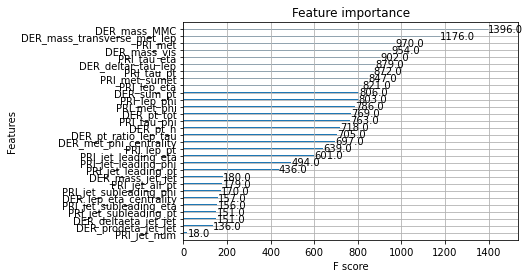

In [20]:
xgb.plot_importance(bst)

In [21]:
#Testing begins here

modelfile = 'higgs.model'
outfile = 'higgs_pred.csv'
# make top 15% as positive
threshold_ratio = 0.15

In [22]:
ncols_test = df_test.shape[1]
print(ncols_test)
data_test   = df_test.iloc[:,1:ncols]
idx_test = df_test.iloc[:,0]
#bst = xgb.train( plst, xgmat, num_round, watchlist );

31


In [23]:
xgmat = xgb.DMatrix( data_test, missing = -999.0 )
bst = xgb.Booster({'nthread':8})
bst.load_model( modelfile )
ypred = bst.predict( xgmat )

/media/Data_linux/anaconda3/envs/pytorch_learning/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [24]:
res  = [ ( int(idx_test[i]), ypred[i] ) for i in range(len(ypred)) ] 

In [25]:
rorder = {}
for k, v in sorted( res, key = lambda x:-x[1] ):
    rorder[ k ] = len(rorder) + 1

In [26]:
# write out predictions
ntop = int( threshold_ratio * len(rorder ) )
fo = open(outfile, 'w')
nhit = 0
ntot = 0
fo.write('EventId,RankOrder,Class\n')
for k, v in res:
    if rorder[k] <= ntop:
        lb = 's'
        nhit += 1
    else:
        lb = 'b'
    # change output rank order to follow Kaggle convention
    fo.write('%s,%d,%s\n' % ( k,  len(rorder)+1-rorder[k], lb ) )
    ntot += 1
fo.close()
print ('finished writing into prediction file')

finished writing into prediction file


In [27]:
node_params = {'shape':'box',
               'style':'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape':'box',
               'style':'filled',
               'fillcolor':'#e48038'}

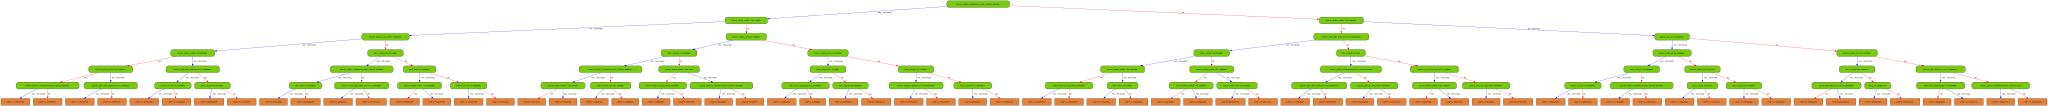

In [28]:
xgb.to_graphviz(bst, num_trees=0, size="0.1,0.1",
                condition_node_params=node_params,
               leaf_node_params=leaf_params)